In [2]:
import pypsa
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from helper_functions import split_list, get_result_array, get_feature_array, plot_generator, plot_feature_array, plot_results

In [3]:
n = pypsa.Network("networks/elec_s_80_ec_lcopt_Co2L-24H_2011_15.nc")

INFO:pypsa.io:Imported network elec_s_80_ec_lcopt_Co2L-24H_2011_15.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores


# Basic Information

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x19326689810>,
 <matplotlib.collections.LineCollection at 0x193251dcc50>)

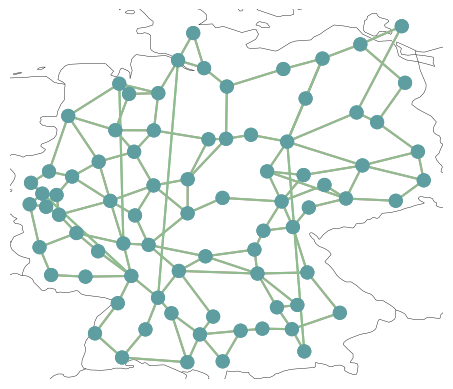

In [47]:
n.plot()

In [76]:
n.buses['x']['DE0 0']

11.965484499999999

In [29]:
n.buses['y']['DE0 0']

51.467240000000004

In [11]:
n.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas      0.000000e+00            0.000000   
            Offshore Wind (AC)      2.321095e+03         2321.095188   
            Offshore Wind (DC)      5.465905e+03         5465.904812   
            Onshore Wind            5.441367e+04        54413.669761   
            Open-Cycle Gas          2.288854e+04        22888.536500   
            Solar                   5.366900e+04        53669.000000   
            biomass                 8.011736e+03         8011.736326   
            coal                    8.158220e+03         8158.220129   
            geothermal              0.000000e+00            0.000000   
            lignite                 2.099917e+04        20999.170197   
            nuclear                 4.066000e+03         4066.000000   
            oil                     8.563000e+02          856.300000   
Line        AC                      5.867786e+05       585398.531942   
Link        DC                      2.004085e-08            0.000000   
            H2 electrolysis         1.714171e-07            0.000000   
            H2 fuel cell            9.910162e-08            0.000000   
            H2 pipeline             1.039851e-05            0.000000   
Load        -                       0.000000e+00            0.000000   
StorageUnit Battery Storage         4.130384e-07            0.000000   
Store       Hydrogen Storage        9.361310e-05            0.000000   

                                Capacity Factor      Dispatch  Transmission  \
Generator   Combined-Cycle Gas              NaN  0.000000e+00  0.000000e+00   
            Offshore Wind (AC)     4.797788e-01  9.755244e+06  0.000000e+00   
            Offshore Wind (DC)     5.859729e-01  2.805716e+07  0.000000e+00   
            Onshore Wind           2.405445e-01  1.146588e+08  0.000000e+00   
            Open-Cycle Gas         1.131398e-01  2.268493e+07  0.000000e+00   
            Solar                  1.168105e-01  5.491733e+07  0.000000e+00   
            biomass                6.931416e-01  4.864663e+07  0.000000e+00   
            coal                   4.771560e-01  3.410044e+07  0.000000e+00   
            geothermal                      NaN  0.000000e+00  0.000000e+00   
            lignite                9.291642e-01  1.709223e+08  0.000000e+00   
            nuclear                7.135704e-01  2.541607e+07  0.000000e+00   
            oil                    9.206992e-13  6.906338e-06  0.000000e+00   
Line        AC                     2.290976e-01 -7.950596e-03 -4.373574e+07   
Link        DC                     3.709810e-01  0.000000e+00  6.839982e-06   
            H2 electrolysis        3.349090e-01 -1.902486e-04  0.000000e+00   
            H2 fuel cell           3.610091e-01 -1.567015e-04  0.000000e+00   
            H2 pipeline            1.138507e-02  0.000000e+00 -4.412383e-04   
Load        -                               NaN -5.091589e+08  0.000000e+00   
StorageUnit Battery Storage        5.721206e-02 -6.806377e-05  0.000000e+00   
Store       Hydrogen Storage       4.999407e-01  0.000000e+00  0.000000e+00   

                                  Withdrawal        Supply    Curtailment  \
Generator   Combined-Cycle Gas  0.000000e+00  0.000000e+00       0.000000   
            Offshore Wind (AC)  0.000000e+00  9.755244e+06    7022.590946   
            Offshore Wind (DC)  0.000000e+00  2.805716e+07       0.005812   
            Onshore Wind        0.000000e+00  1.146588e+08  639451.496400   
            Open-Cycle Gas      0.000000e+00  2.268493e+07       0.000000   
            Solar               0.000000e+00  5.491733e+07       0.017642   
            biomass             0.000000e+00  4.864663e+07       0.000000   
            coal                0.000000e+00  3.410044e+07       0.000000   
            geothermal          0.000000e+00  0.000000e+00       0.000000   
            lignite             0.000000e+00  1.709223e+08       0.000000   
            

In [82]:
n.generators_t.p_max_pu

Generator   DE0 0 onwind  DE0 0 solar  DE0 1 onwind  DE0 1 solar  \
snapshot                                                           
2013-01-01      0.604705     0.017514      0.533223     0.000000   
2013-01-02      0.463679     0.041891      0.244311     0.024079   
2013-01-03      0.779667     0.000000      0.525331     0.000000   
2013-01-04      0.637585     0.000000      0.479619     0.000000   
2013-01-05      0.312535     0.000000      0.312482     0.000000   
...                  ...          ...           ...          ...   
2013-12-27      0.572884     0.080810      0.809197     0.029164   
2013-12-28      0.567273     0.021217      0.426657     0.000000   
2013-12-29      0.363435     0.062247      0.269727     0.018111   
2013-12-30      0.244977     0.092101      0.414293     0.063938   
2013-12-31      0.224643     0.089286      0.425210     0.072611   

Generator   DE0 10 onwind  DE0 10 solar  DE0 11 onwind  DE0 11 solar  \
snapshot                                                               
2013-01-01       0.464262      0.000000       0.413224      0.026714   
2013-01-02       0.164894      0.032059       0.427304      0.045665   
2013-01-03       0.430556      0.000000       0.808093      0.000000   
2013-01-04       0.268284      0.000000       0.820629      0.000000   
2013-01-05       0.223732      0.000000       0.468573      0.000000   
...                   ...           ...            ...           ...   
2013-12-27       0.482384      0.075923       0.368447      0.052241   
2013-12-28       0.528643      0.000000       0.443657      0.022297   
2013-12-29       0.272678      0.043428       0.313425      0.040676   
2013-12-30       0.127234      0.077349       0.157745      0.097155   
2013-12-31       0.143448      0.094292       0.218919      0.049989   

Generator   DE0 12 onwind  DE0 12 solar  ...  DE0 78 onwind  DE0 78 solar  \
snapshot                                 ...                                
2013-01-01       0.641138      0.000000  ...       0.659866      0.012564   
2013-01-02       0.548294      0.045803  ...       0.371021      0.045642   
2013-01-03       0.771924      0.000000  ...       0.604751      0.000000   
2013-01-04       0.703246      0.000000  ...       0.321875      0.000000   
2013-01-05       0.390174      0.000000  ...       0.129116      0.010520   
...                   ...           ...  ...            ...           ...   
2013-12-27       0.731741      0.059857  ...       0.935202      0.025563   
2013-12-28       0.408431      0.000000  ...       0.338125      0.000000   
2013-12-29       0.352562      0.034696  ...       0.371399      0.048866   
2013-12-30       0.376118      0.078385  ...       0.687336      0.072765   
2013-12-31       0.234596      0.085049  ...       0.642213      0.048873   

Generator   DE0 79 onwind  DE0 79 solar  DE0 8 offwind-ac  DE0 8 offwind-dc  \
snapshot                                                                      
2013-01-01       0.472972      0.021949          0.756313          0.759587   
2013-01-02       0.043747      0.077900          0.885447          0.883859   
2013-01-03       0.259567      0.012022          0.875906          0.869817   
2013-01-04       0.123779      0.000000          0.885450          0.884214   
2013-01-05       0.101058      0.000000          0.621941          0.494049   
...                   ...           ...               ...               ...   
2013-12-27       0.381728      0.115816          0.885495          0.852932   
2013-12-28       0.422939      0.045027          0.884167          0.885500   
2013-12-29       0.215075      0.067986          0.882074          0.878936   
2013-12-30       0.043972      0.097573          0.885500          0.885026   
2013-12-31       0.097157      0.118131          0.885499          0.885500   

Generator   DE0 8 onwind  DE0 8 solar  DE0 9 onwind  DE0 9 solar  
snapshot                                                          
2013-01-01    

In [48]:
n.snapshots

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='snapshot', length=1826, freq=None)

# Network Split

In [4]:
snapshots = n.snapshots
snapshot_splits = split_list(list=snapshots, n=30)
netw_splits = []
for snapshot_split in snapshot_splits:
    netw_copy = n.copy()
    netw_copy.set_snapshots(snapshots=snapshot_split)
    netw_copy.optimize(snapshot_split, solver_name="gurobi")
    netw_splits.append(netw_copy)

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.93it/s]
INFO:linopy.io: Writing time: 2.52s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-x9oa0sgl.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-x9oa0sgl.lp


Reading time = 0.69 seconds


INFO:gurobipy:Reading time = 0.69 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x75c5c87c


INFO:gurobipy:Model fingerprint: 0x75c5c87c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37270 columns


INFO:gurobipy:Presolve removed 134700 rows and 37270 columns


Presolve time: 0.78s


INFO:gurobipy:Presolve time: 0.78s


Presolved: 79301 rows, 63685 columns, 302445 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63685 columns, 302445 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.87s


INFO:gurobipy:Ordering time: 1.87s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23556725e+15 -4.63837175e+13  9.02e+10 8.36e+04  2.63e+12     4s


INFO:gurobipy:   0   2.23556725e+15 -4.63837175e+13  9.02e+10 8.36e+04  2.63e+12     4s


   1   3.11765608e+15 -1.64639467e+14  6.00e+10 2.21e+04  1.07e+12     4s


INFO:gurobipy:   1   3.11765608e+15 -1.64639467e+14  6.00e+10 2.21e+04  1.07e+12     4s


   2   3.30710602e+15 -3.01106074e+14  1.97e+10 2.08e+03  2.94e+11     5s


INFO:gurobipy:   2   3.30710602e+15 -3.01106074e+14  1.97e+10 2.08e+03  2.94e+11     5s


   3   6.26716127e+14 -2.99253704e+14  5.42e+08 4.02e+01  1.36e+10     5s


INFO:gurobipy:   3   6.26716127e+14 -2.99253704e+14  5.42e+08 4.02e+01  1.36e+10     5s


   4   2.07750000e+14 -6.24917485e+13  1.25e+08 2.01e+01  3.31e+09     6s


INFO:gurobipy:   4   2.07750000e+14 -6.24917485e+13  1.25e+08 2.01e+01  3.31e+09     6s


   5   5.85846097e+13 -1.43326485e+13  6.50e+06 2.70e+01  6.48e+08     6s


INFO:gurobipy:   5   5.85846097e+13 -1.43326485e+13  6.50e+06 2.70e+01  6.48e+08     6s


   6   2.74279240e+12 -6.76385682e+12  1.58e+03 9.04e+00  7.26e+07     7s


INFO:gurobipy:   6   2.74279240e+12 -6.76385682e+12  1.58e+03 9.04e+00  7.26e+07     7s


   7   8.12837538e+11 -1.48058817e+12  4.09e+02 1.46e+00  1.73e+07     7s


INFO:gurobipy:   7   8.12837538e+11 -1.48058817e+12  4.09e+02 1.46e+00  1.73e+07     7s


   8   2.26074718e+11 -2.29802929e+11  1.75e+02 1.86e-01  3.39e+06     8s


INFO:gurobipy:   8   2.26074718e+11 -2.29802929e+11  1.75e+02 1.86e-01  3.39e+06     8s


   9   1.20740122e+11 -1.28608248e+11  8.02e+01 1.05e-01  1.85e+06     9s


INFO:gurobipy:   9   1.20740122e+11 -1.28608248e+11  8.02e+01 1.05e-01  1.85e+06     9s


  10   7.26129904e+10 -6.23136346e+10  4.38e+01 4.53e-02  9.97e+05     9s


INFO:gurobipy:  10   7.26129904e+10 -6.23136346e+10  4.38e+01 4.53e-02  9.97e+05     9s


  11   4.65334915e+10 -3.64414906e+10  2.81e+01 2.25e-02  6.13e+05    10s


INFO:gurobipy:  11   4.65334915e+10 -3.64414906e+10  2.81e+01 2.25e-02  6.13e+05    10s


  12   3.30066633e+10 -1.94558547e+10  2.03e+01 1.03e-02  3.87e+05    11s


INFO:gurobipy:  12   3.30066633e+10 -1.94558547e+10  2.03e+01 1.03e-02  3.87e+05    11s


  13   2.10516720e+10 -1.14496941e+10  1.27e+01 5.48e-03  2.40e+05    11s


INFO:gurobipy:  13   2.10516720e+10 -1.14496941e+10  1.27e+01 5.48e-03  2.40e+05    11s


  14   1.38568409e+10 -4.41953583e+09  7.77e+00 2.88e-03  1.35e+05    12s


INFO:gurobipy:  14   1.38568409e+10 -4.41953583e+09  7.77e+00 2.88e-03  1.35e+05    12s


  15   9.16871935e+09 -1.92675247e+09  4.95e+00 1.92e-03  8.18e+04    13s


INFO:gurobipy:  15   9.16871935e+09 -1.92675247e+09  4.95e+00 1.92e-03  8.18e+04    13s


  16   4.40457707e+09 -5.46103678e+08  2.04e+00 1.31e-03  3.65e+04    14s


INFO:gurobipy:  16   4.40457707e+09 -5.46103678e+08  2.04e+00 1.31e-03  3.65e+04    14s


  17   2.83733976e+09  5.56660743e+08  9.81e-01 6.08e-04  1.68e+04    15s


INFO:gurobipy:  17   2.83733976e+09  5.56660743e+08  9.81e-01 6.08e-04  1.68e+04    15s


  18   2.26407686e+09  9.78306625e+08  6.37e-01 2.72e-04  9.48e+03    16s


INFO:gurobipy:  18   2.26407686e+09  9.78306625e+08  6.37e-01 2.72e-04  9.48e+03    16s


  19   1.74065478e+09  1.10776831e+09  3.14e-01 1.54e-04  4.66e+03    17s


INFO:gurobipy:  19   1.74065478e+09  1.10776831e+09  3.14e-01 1.54e-04  4.66e+03    17s


  20   1.37510787e+09  1.15775948e+09  9.64e-02 9.01e-05  1.60e+03    18s


INFO:gurobipy:  20   1.37510787e+09  1.15775948e+09  9.64e-02 9.01e-05  1.60e+03    18s


  21   1.33248209e+09  1.18222311e+09  7.05e-02 5.20e-05  1.11e+03    19s


INFO:gurobipy:  21   1.33248209e+09  1.18222311e+09  7.05e-02 5.20e-05  1.11e+03    19s


  22   1.28871820e+09  1.19051646e+09  4.42e-02 3.85e-05  7.24e+02    19s


INFO:gurobipy:  22   1.28871820e+09  1.19051646e+09  4.42e-02 3.85e-05  7.24e+02    19s


  23   1.26119652e+09  1.19934267e+09  2.87e-02 2.29e-05  4.56e+02    20s


INFO:gurobipy:  23   1.26119652e+09  1.19934267e+09  2.87e-02 2.29e-05  4.56e+02    20s


  24   1.22635693e+09  1.20647297e+09  7.72e-03 9.33e-06  1.47e+02    21s


INFO:gurobipy:  24   1.22635693e+09  1.20647297e+09  7.72e-03 9.33e-06  1.47e+02    21s


  25   1.21763172e+09  1.20945946e+09  3.32e-03 2.59e-06  6.02e+01    22s


INFO:gurobipy:  25   1.21763172e+09  1.20945946e+09  3.32e-03 2.59e-06  6.02e+01    22s


  26   1.21117774e+09  1.21039516e+09  2.63e-04 3.89e-07  5.77e+00    23s


INFO:gurobipy:  26   1.21117774e+09  1.21039516e+09  2.63e-04 3.89e-07  5.77e+00    23s


  27   1.21062971e+09  1.21051768e+09  9.56e-05 5.21e-08  8.25e-01    24s


INFO:gurobipy:  27   1.21062971e+09  1.21051768e+09  9.56e-05 5.21e-08  8.25e-01    24s


  28   1.21054380e+09  1.21053171e+09  2.56e-05 1.42e-08  8.90e-02    25s


INFO:gurobipy:  28   1.21054380e+09  1.21053171e+09  2.56e-05 1.42e-08  8.90e-02    25s


  29   1.21054008e+09  1.21053641e+09  7.75e-06 3.58e-09  2.70e-02    25s


INFO:gurobipy:  29   1.21054008e+09  1.21053641e+09  7.75e-06 3.58e-09  2.70e-02    25s


  30   1.21053883e+09  1.21053737e+09  2.58e-06 1.50e-09  1.08e-02    26s


INFO:gurobipy:  30   1.21053883e+09  1.21053737e+09  2.58e-06 1.50e-09  1.08e-02    26s


  31   1.21053815e+09  1.21053797e+09  3.71e-07 2.35e-10  1.34e-03    27s


INFO:gurobipy:  31   1.21053815e+09  1.21053797e+09  3.71e-07 2.35e-10  1.34e-03    27s


  32   1.21053809e+09  1.21053808e+09  2.10e-07 3.55e-10  5.08e-05    28s


INFO:gurobipy:  32   1.21053809e+09  1.21053808e+09  2.10e-07 3.55e-10  5.08e-05    28s


  33   1.21053809e+09  1.21053809e+09  4.40e-09 2.46e-10  3.53e-07    29s


INFO:gurobipy:  33   1.21053809e+09  1.21053809e+09  4.40e-09 2.46e-10  3.53e-07    29s


  34   1.21053809e+09  1.21053809e+09  3.68e-10 2.40e-10  1.83e-09    30s


INFO:gurobipy:  34   1.21053809e+09  1.21053809e+09  3.68e-10 2.40e-10  1.83e-09    30s


INFO:gurobipy:


Barrier solved model in 34 iterations and 30.14 seconds (12.18 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 30.14 seconds (12.18 work units)


Optimal objective 1.21053809e+09


INFO:gurobipy:Optimal objective 1.21053809e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                30s


       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      81 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:      81 PPushes remaining with PInf 0.0000000e+00                31s


       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.3135262e-10     31s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.3135262e-10     31s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27685    1.2105381e+09   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:   27685    1.2105381e+09   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:


Solved in 27685 iterations and 31.35 seconds (12.70 work units)


INFO:gurobipy:Solved in 27685 iterations and 31.35 seconds (12.70 work units)


Optimal objective  1.210538086e+09


INFO:gurobipy:Optimal objective  1.210538086e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.21e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.48it/s]
INFO:linopy.io: Writing time: 2.51s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-o94gw2c5.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-o94gw2c5.lp


Reading time = 0.67 seconds


INFO:gurobipy:Reading time = 0.67 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x9152e29e


INFO:gurobipy:Model fingerprint: 0x9152e29e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36888 columns


INFO:gurobipy:Presolve removed 134700 rows and 36888 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 79301 rows, 64067 columns, 302827 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64067 columns, 302827 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.92s


INFO:gurobipy:Ordering time: 1.92s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22142653e+15 -4.58303703e+13  8.98e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22142653e+15 -4.58303703e+13  8.98e+10 8.36e+04  2.62e+12     4s


   1   3.09442135e+15 -1.63546016e+14  5.99e+10 2.21e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09442135e+15 -1.63546016e+14  5.99e+10 2.21e+04  1.07e+12     4s


   2   3.29195931e+15 -2.98511781e+14  1.95e+10 2.09e+03  2.93e+11     4s


INFO:gurobipy:   2   3.29195931e+15 -2.98511781e+14  1.95e+10 2.09e+03  2.93e+11     4s


   3   5.99507937e+14 -2.96672137e+14  5.36e+08 3.84e+01  1.33e+10     5s


INFO:gurobipy:   3   5.99507937e+14 -2.96672137e+14  5.36e+08 3.84e+01  1.33e+10     5s


   4   2.03424212e+14 -5.79120727e+13  1.27e+08 1.15e+01  3.32e+09     6s


INFO:gurobipy:   4   2.03424212e+14 -5.79120727e+13  1.27e+08 1.15e+01  3.32e+09     6s


   5   5.45356336e+13 -1.46475936e+13  3.93e+06 1.38e+02  6.10e+08     6s


INFO:gurobipy:   5   5.45356336e+13 -1.46475936e+13  3.93e+06 1.38e+02  6.10e+08     6s


   6   7.84496121e+12 -4.49227772e+13  2.56e+03 8.80e+01  3.98e+08     7s


INFO:gurobipy:   6   7.84496121e+12 -4.49227772e+13  2.56e+03 8.80e+01  3.98e+08     7s


   7   2.66172110e+12 -3.59961292e+12  3.98e+03 1.17e+00  4.63e+07     7s


INFO:gurobipy:   7   2.66172110e+12 -3.59961292e+12  3.98e+03 1.17e+00  4.63e+07     7s


   8   4.72159748e+11 -5.43391203e+11  5.46e+02 1.72e-01  7.46e+06     8s


INFO:gurobipy:   8   4.72159748e+11 -5.43391203e+11  5.46e+02 1.72e-01  7.46e+06     8s


   9   1.77984537e+11 -2.01813137e+11  1.58e+02 6.62e-02  2.78e+06     9s


INFO:gurobipy:   9   1.77984537e+11 -2.01813137e+11  1.58e+02 6.62e-02  2.78e+06     9s


  10   1.02279076e+11 -1.10559608e+11  8.73e+01 3.44e-02  1.56e+06     9s


INFO:gurobipy:  10   1.02279076e+11 -1.10559608e+11  8.73e+01 3.44e-02  1.56e+06     9s


  11   7.46093379e+10 -6.41202028e+10  6.34e+01 1.89e-02  1.02e+06    10s


INFO:gurobipy:  11   7.46093379e+10 -6.41202028e+10  6.34e+01 1.89e-02  1.02e+06    10s


  12   5.15059283e+10 -3.07807292e+10  4.34e+01 7.86e-03  6.03e+05    11s


INFO:gurobipy:  12   5.15059283e+10 -3.07807292e+10  4.34e+01 7.86e-03  6.03e+05    11s


  13   3.18634762e+10 -1.04146605e+10  2.71e+01 3.16e-03  3.10e+05    12s


INFO:gurobipy:  13   3.18634762e+10 -1.04146605e+10  2.71e+01 3.16e-03  3.10e+05    12s


  14   1.71804954e+10 -3.15694963e+09  1.38e+01 1.48e-03  1.49e+05    12s


INFO:gurobipy:  14   1.71804954e+10 -3.15694963e+09  1.38e+01 1.48e-03  1.49e+05    12s


  15   9.91444704e+09 -1.35089714e+09  7.62e+00 1.01e-03  8.25e+04    13s


INFO:gurobipy:  15   9.91444704e+09 -1.35089714e+09  7.62e+00 1.01e-03  8.25e+04    13s


  16   5.86747442e+09 -3.00278861e+08  4.25e+00 6.43e-04  4.52e+04    14s


INFO:gurobipy:  16   5.86747442e+09 -3.00278861e+08  4.25e+00 6.43e-04  4.52e+04    14s


  17   2.63265451e+09  5.27311405e+08  1.46e+00 2.52e-04  1.54e+04    16s


INFO:gurobipy:  17   2.63265451e+09  5.27311405e+08  1.46e+00 2.52e-04  1.54e+04    16s


  18   1.80693827e+09  7.32515329e+08  7.64e-01 1.27e-04  7.87e+03    17s


INFO:gurobipy:  18   1.80693827e+09  7.32515329e+08  7.64e-01 1.27e-04  7.87e+03    17s


  19   1.17427766e+09  7.91584348e+08  2.55e-01 8.07e-05  2.80e+03    18s


INFO:gurobipy:  19   1.17427766e+09  7.91584348e+08  2.55e-01 8.07e-05  2.80e+03    18s


  20   1.06059554e+09  8.29930095e+08  1.56e-01 4.39e-05  1.69e+03    19s


INFO:gurobipy:  20   1.06059554e+09  8.29930095e+08  1.56e-01 4.39e-05  1.69e+03    19s


  21   9.70435731e+08  8.47437156e+08  7.99e-02 2.62e-05  9.00e+02    19s


INFO:gurobipy:  21   9.70435731e+08  8.47437156e+08  7.99e-02 2.62e-05  9.00e+02    19s


  22   9.22219995e+08  8.59154550e+08  3.95e-02 1.34e-05  4.62e+02    20s


INFO:gurobipy:  22   9.22219995e+08  8.59154550e+08  3.95e-02 1.34e-05  4.62e+02    20s


  23   8.86792604e+08  8.67053783e+08  1.18e-02 5.10e-06  1.45e+02    21s


INFO:gurobipy:  23   8.86792604e+08  8.67053783e+08  1.18e-02 5.10e-06  1.45e+02    21s


  24   8.78210699e+08  8.70380134e+08  5.03e-03 1.22e-06  5.73e+01    22s


INFO:gurobipy:  24   8.78210699e+08  8.70380134e+08  5.03e-03 1.22e-06  5.73e+01    22s


  25   8.72574981e+08  8.71149017e+08  8.08e-04 2.72e-07  1.04e+01    23s


INFO:gurobipy:  25   8.72574981e+08  8.71149017e+08  8.08e-04 2.72e-07  1.04e+01    23s


  26   8.71490955e+08  8.71278994e+08  1.04e-04 4.87e-08  1.55e+00    23s


INFO:gurobipy:  26   8.71490955e+08  8.71278994e+08  1.04e-04 4.87e-08  1.55e+00    23s


  27   8.71375490e+08  8.71296927e+08  3.52e-05 2.32e-08  5.75e-01    24s


INFO:gurobipy:  27   8.71375490e+08  8.71296927e+08  3.52e-05 2.32e-08  5.75e-01    24s


  28   8.71333981e+08  8.71306402e+08  1.14e-05 7.93e-09  2.02e-01    25s


INFO:gurobipy:  28   8.71333981e+08  8.71306402e+08  1.14e-05 7.93e-09  2.02e-01    25s


  29   8.71318338e+08  8.71311106e+08  2.90e-06 1.66e-09  5.29e-02    26s


INFO:gurobipy:  29   8.71318338e+08  8.71311106e+08  2.90e-06 1.66e-09  5.29e-02    26s


  30   8.71313567e+08  8.71312415e+08  8.33e-07 2.57e-10  8.43e-03    27s


INFO:gurobipy:  30   8.71313567e+08  8.71312415e+08  8.33e-07 2.57e-10  8.43e-03    27s


  31   8.71312701e+08  8.71312528e+08  1.78e-07 2.44e-10  1.27e-03    28s


INFO:gurobipy:  31   8.71312701e+08  8.71312528e+08  1.78e-07 2.44e-10  1.27e-03    28s


  32   8.71312558e+08  8.71312545e+08  2.22e-07 3.70e-10  9.58e-05    29s


INFO:gurobipy:  32   8.71312558e+08  8.71312545e+08  2.22e-07 3.70e-10  9.58e-05    29s


  33   8.71312548e+08  8.71312548e+08  1.45e-08 2.93e-10  1.77e-06    30s


INFO:gurobipy:  33   8.71312548e+08  8.71312548e+08  1.45e-08 2.93e-10  1.77e-06    30s


  34   8.71312548e+08  8.71312548e+08  9.14e-10 8.11e-10  1.77e-09    31s


INFO:gurobipy:  34   8.71312548e+08  8.71312548e+08  9.14e-10 8.11e-10  1.77e-09    31s


INFO:gurobipy:


Barrier solved model in 34 iterations and 30.95 seconds (12.55 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 30.95 seconds (12.55 work units)


Optimal objective 8.71312548e+08


INFO:gurobipy:Optimal objective 8.71312548e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                31s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     107 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:     107 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7923781e-10     32s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7923781e-10     32s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27167    8.7131255e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:   27167    8.7131255e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:


Solved in 27167 iterations and 31.89 seconds (12.89 work units)


INFO:gurobipy:Solved in 27167 iterations and 31.89 seconds (12.89 work units)


Optimal objective  8.713125482e+08


INFO:gurobipy:Optimal objective  8.713125482e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.71e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 31.42it/s]
INFO:linopy.io: Writing time: 3.86s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t1x5no3e.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t1x5no3e.lp


Reading time = 0.88 seconds


INFO:gurobipy:Reading time = 0.88 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x804fbe79


INFO:gurobipy:Model fingerprint: 0x804fbe79


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36914 columns


INFO:gurobipy:Presolve removed 134700 rows and 36914 columns


Presolve time: 1.04s


INFO:gurobipy:Presolve time: 1.04s


Presolved: 79301 rows, 64041 columns, 302801 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64041 columns, 302801 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.10s


INFO:gurobipy:Ordering time: 2.10s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22396741e+15 -4.53801950e+13  8.99e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22396741e+15 -4.53801950e+13  8.99e+10 8.36e+04  2.62e+12     4s


   1   3.08939740e+15 -1.63486861e+14  6.03e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.08939740e+15 -1.63486861e+14  6.03e+10 2.22e+04  1.07e+12     5s


   2   3.29779581e+15 -2.98256281e+14  1.64e+10 2.11e+03  2.57e+11     6s


INFO:gurobipy:   2   3.29779581e+15 -2.98256281e+14  1.64e+10 2.11e+03  2.57e+11     6s


   3   6.27298839e+14 -2.92015833e+14  5.69e+08 3.97e+01  1.38e+10     6s


INFO:gurobipy:   3   6.27298839e+14 -2.92015833e+14  5.69e+08 3.97e+01  1.38e+10     6s


   4   2.01039801e+14 -5.49458400e+13  1.26e+08 1.48e+01  3.26e+09     7s


INFO:gurobipy:   4   2.01039801e+14 -5.49458400e+13  1.26e+08 1.48e+01  3.26e+09     7s


   5   5.45412648e+13 -1.48788503e+13  3.44e+06 2.63e+01  6.15e+08     8s


INFO:gurobipy:   5   5.45412648e+13 -1.48788503e+13  3.44e+06 2.63e+01  6.15e+08     8s


   6   9.52993245e+12 -4.06996079e+13  2.67e+03 1.13e+01  3.83e+08     9s


INFO:gurobipy:   6   9.52993245e+12 -4.06996079e+13  2.67e+03 1.13e+01  3.83e+08     9s


   7   2.84695619e+12 -4.22541693e+12  4.68e+03 1.73e+00  5.19e+07     9s


INFO:gurobipy:   7   2.84695619e+12 -4.22541693e+12  4.68e+03 1.73e+00  5.19e+07     9s


   8   6.34832723e+11 -5.43006987e+11  6.63e+02 1.20e-01  8.63e+06    10s


INFO:gurobipy:   8   6.34832723e+11 -5.43006987e+11  6.63e+02 1.20e-01  8.63e+06    10s


   9   1.80874008e+11 -1.81397848e+11  1.45e+02 3.69e-02  2.65e+06    11s


INFO:gurobipy:   9   1.80874008e+11 -1.81397848e+11  1.45e+02 3.69e-02  2.65e+06    11s


  10   1.08757712e+11 -1.38479831e+11  8.37e+01 2.76e-02  1.81e+06    11s


INFO:gurobipy:  10   1.08757712e+11 -1.38479831e+11  8.37e+01 2.76e-02  1.81e+06    11s


  11   8.51699853e+10 -7.74612063e+10  6.45e+01 1.55e-02  1.19e+06    12s


INFO:gurobipy:  11   8.51699853e+10 -7.74612063e+10  6.45e+01 1.55e-02  1.19e+06    12s


  12   5.90158936e+10 -4.58055498e+10  4.49e+01 7.97e-03  7.68e+05    13s


INFO:gurobipy:  12   5.90158936e+10 -4.58055498e+10  4.49e+01 7.97e-03  7.68e+05    13s


  13   4.57594257e+10 -3.59018950e+10  3.45e+01 6.11e-03  5.98e+05    14s


INFO:gurobipy:  13   4.57594257e+10 -3.59018950e+10  3.45e+01 6.11e-03  5.98e+05    14s


  14   2.91235172e+10 -1.05552207e+10  2.25e+01 1.67e-03  2.91e+05    14s


INFO:gurobipy:  14   2.91235172e+10 -1.05552207e+10  2.25e+01 1.67e-03  2.91e+05    14s


  15   1.67668856e+10 -3.38351317e+09  1.21e+01 8.42e-04  1.48e+05    15s


INFO:gurobipy:  15   1.67668856e+10 -3.38351317e+09  1.21e+01 8.42e-04  1.48e+05    15s


  16   9.20703014e+09 -1.16196863e+09  6.03e+00 4.77e-04  7.59e+04    17s


INFO:gurobipy:  16   9.20703014e+09 -1.16196863e+09  6.03e+00 4.77e-04  7.59e+04    17s


  17   3.23502045e+09  4.49993531e+08  1.48e+00 1.58e-04  2.04e+04    18s


INFO:gurobipy:  17   3.23502045e+09  4.49993531e+08  1.48e+00 1.58e-04  2.04e+04    18s


  18   1.75384173e+09  7.48496984e+08  5.12e-01 5.65e-05  7.36e+03    19s


INFO:gurobipy:  18   1.75384173e+09  7.48496984e+08  5.12e-01 5.65e-05  7.36e+03    19s


  19   1.24182487e+09  8.27577240e+08  2.13e-01 2.34e-05  3.03e+03    21s


INFO:gurobipy:  19   1.24182487e+09  8.27577240e+08  2.13e-01 2.34e-05  3.03e+03    21s


  20   1.06485897e+09  8.47456619e+08  1.10e-01 1.15e-05  1.59e+03    23s


INFO:gurobipy:  20   1.06485897e+09  8.47456619e+08  1.10e-01 1.15e-05  1.59e+03    23s


  21   9.46361948e+08  8.54013276e+08  4.38e-02 7.81e-06  6.76e+02    24s


INFO:gurobipy:  21   9.46361948e+08  8.54013276e+08  4.38e-02 7.81e-06  6.76e+02    24s


  22   9.18570309e+08  8.58618242e+08  2.83e-02 4.67e-06  4.39e+02    25s


INFO:gurobipy:  22   9.18570309e+08  8.58618242e+08  2.83e-02 4.67e-06  4.39e+02    25s


  23   8.80476577e+08  8.62683396e+08  6.75e-03 1.82e-06  1.30e+02    26s


INFO:gurobipy:  23   8.80476577e+08  8.62683396e+08  6.75e-03 1.82e-06  1.30e+02    26s


  24   8.69652955e+08  8.65145552e+08  1.85e-03 2.03e-07  3.30e+01    27s


INFO:gurobipy:  24   8.69652955e+08  8.65145552e+08  1.85e-03 2.03e-07  3.30e+01    27s


  25   8.65466472e+08  8.65244916e+08  6.38e-05 3.21e-08  1.62e+00    28s


INFO:gurobipy:  25   8.65466472e+08  8.65244916e+08  6.38e-05 3.21e-08  1.62e+00    28s


  26   8.65310475e+08  8.65296708e+08  9.52e-07 5.65e-09  1.01e-01    29s


INFO:gurobipy:  26   8.65310475e+08  8.65296708e+08  9.52e-07 5.65e-09  1.01e-01    29s


  27   8.65309612e+08  8.65307606e+08  7.92e-08 7.73e-10  1.47e-02    32s


INFO:gurobipy:  27   8.65309612e+08  8.65307606e+08  7.92e-08 7.73e-10  1.47e-02    32s


  28   8.65309458e+08  8.65309111e+08  5.70e-07 3.09e-10  2.55e-03    33s


INFO:gurobipy:  28   8.65309458e+08  8.65309111e+08  5.70e-07 3.09e-10  2.55e-03    33s


  29   8.65309432e+08  8.65309371e+08  8.21e-07 2.88e-10  4.51e-04    35s


INFO:gurobipy:  29   8.65309432e+08  8.65309371e+08  8.21e-07 2.88e-10  4.51e-04    35s


  30   8.65309420e+08  8.65309418e+08  8.85e-08 2.28e-10  1.40e-05    36s


INFO:gurobipy:  30   8.65309420e+08  8.65309418e+08  8.85e-08 2.28e-10  1.40e-05    36s


  31   8.65309420e+08  8.65309419e+08  1.39e-08 4.67e-10  5.48e-07    37s


INFO:gurobipy:  31   8.65309420e+08  8.65309419e+08  1.39e-08 4.67e-10  5.48e-07    37s


  32   8.65309419e+08  8.65309419e+08  2.77e-10 2.52e-10  2.02e-08    38s


INFO:gurobipy:  32   8.65309419e+08  8.65309419e+08  2.77e-10 2.52e-10  2.02e-08    38s


  33   8.65309419e+08  8.65309419e+08  2.18e-11 3.06e-10  2.02e-14    39s


INFO:gurobipy:  33   8.65309419e+08  8.65309419e+08  2.18e-11 3.06e-10  2.02e-14    39s


INFO:gurobipy:


Barrier solved model in 33 iterations and 39.20 seconds (12.72 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 39.20 seconds (12.72 work units)


Optimal objective 8.65309419e+08


INFO:gurobipy:Optimal objective 8.65309419e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                39s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                39s


       0 DPushes remaining with DInf 0.0000000e+00                40s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                40s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                40s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                40s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1746956e-09     40s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1746956e-09     40s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26532    8.6530942e+08   0.000000e+00   0.000000e+00     40s


INFO:gurobipy:   26532    8.6530942e+08   0.000000e+00   0.000000e+00     40s


INFO:gurobipy:


Solved in 26532 iterations and 40.17 seconds (13.08 work units)


INFO:gurobipy:Solved in 26532 iterations and 40.17 seconds (13.08 work units)


Optimal objective  8.653094195e+08


INFO:gurobipy:Optimal objective  8.653094195e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.65e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.83it/s]
INFO:linopy.io: Writing time: 2.68s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lb82jfd5.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lb82jfd5.lp


Reading time = 0.73 seconds


INFO:gurobipy:Reading time = 0.73 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x2361fdd1


INFO:gurobipy:Model fingerprint: 0x2361fdd1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36953 columns


INFO:gurobipy:Presolve removed 134700 rows and 36953 columns


Presolve time: 0.84s


INFO:gurobipy:Presolve time: 0.84s


Presolved: 79301 rows, 64002 columns, 302762 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64002 columns, 302762 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.19s


INFO:gurobipy:Ordering time: 2.19s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22380077e+15 -4.53263951e+13  8.99e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22380077e+15 -4.53263951e+13  8.99e+10 8.36e+04  2.62e+12     4s


   1   3.08930128e+15 -1.63215951e+14  6.03e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.08930128e+15 -1.63215951e+14  6.03e+10 2.22e+04  1.07e+12     5s


   2   3.29780901e+15 -2.98288124e+14  1.67e+10 2.10e+03  2.60e+11     5s


INFO:gurobipy:   2   3.29780901e+15 -2.98288124e+14  1.67e+10 2.10e+03  2.60e+11     5s


   3   6.35987690e+14 -2.93393916e+14  7.13e+08 1.86e+04  1.56e+10     6s


INFO:gurobipy:   3   6.35987690e+14 -2.93393916e+14  7.13e+08 1.86e+04  1.56e+10     6s


   4   2.05867763e+14 -6.61682646e+13  1.64e+08 1.35e+01  3.70e+09     6s


INFO:gurobipy:   4   2.05867763e+14 -6.61682646e+13  1.64e+08 1.35e+01  3.70e+09     6s


   5   5.51220984e+13 -1.48684522e+13  1.01e+07 1.38e+01  6.59e+08     7s


INFO:gurobipy:   5   5.51220984e+13 -1.48684522e+13  1.01e+07 1.38e+01  6.59e+08     7s


   6   1.63273099e+13 -5.87873802e+13  7.67e+03 8.72e+00  5.82e+08     8s


INFO:gurobipy:   6   1.63273099e+13 -5.87873802e+13  7.67e+03 8.72e+00  5.82e+08     8s


   7   4.63278788e+12 -3.84980506e+12  6.91e+03 8.98e-01  6.25e+07     8s


INFO:gurobipy:   7   4.63278788e+12 -3.84980506e+12  6.91e+03 8.98e-01  6.25e+07     8s


   8   1.44357526e+12 -1.26049747e+12  1.75e+03 2.67e-01  1.99e+07     9s


INFO:gurobipy:   8   1.44357526e+12 -1.26049747e+12  1.75e+03 2.67e-01  1.99e+07     9s


   9   2.69123705e+11 -3.36027930e+11  2.19e+02 6.71e-02  4.44e+06     9s


INFO:gurobipy:   9   2.69123705e+11 -3.36027930e+11  2.19e+02 6.71e-02  4.44e+06     9s


  10   1.77443693e+11 -1.82251937e+11  1.42e+02 3.51e-02  2.64e+06    10s


INFO:gurobipy:  10   1.77443693e+11 -1.82251937e+11  1.42e+02 3.51e-02  2.64e+06    10s


  11   1.15780196e+11 -1.16291011e+11  9.12e+01 2.17e-02  1.70e+06    11s


INFO:gurobipy:  11   1.15780196e+11 -1.16291011e+11  9.12e+01 2.17e-02  1.70e+06    11s


  12   8.00293395e+10 -6.65169030e+10  6.21e+01 1.12e-02  1.07e+06    12s


INFO:gurobipy:  12   8.00293395e+10 -6.65169030e+10  6.21e+01 1.12e-02  1.07e+06    12s


  13   5.81732301e+10 -3.33530779e+10  4.44e+01 5.08e-03  6.71e+05    12s


INFO:gurobipy:  13   5.81732301e+10 -3.33530779e+10  4.44e+01 5.08e-03  6.71e+05    12s


  14   3.72554074e+10 -9.26461548e+09  2.78e+01 2.30e-03  3.41e+05    13s


INFO:gurobipy:  14   3.72554074e+10 -9.26461548e+09  2.78e+01 2.30e-03  3.41e+05    13s


  15   1.64291861e+10 -2.64345842e+09  1.11e+01 1.28e-03  1.40e+05    14s


INFO:gurobipy:  15   1.64291861e+10 -2.64345842e+09  1.11e+01 1.28e-03  1.40e+05    14s


  16   9.23339227e+09 -5.12169128e+08  5.86e+00 6.67e-04  7.14e+04    15s


INFO:gurobipy:  16   9.23339227e+09 -5.12169128e+08  5.86e+00 6.67e-04  7.14e+04    15s


  17   3.61988353e+09  2.94801571e+08  1.81e+00 3.33e-04  2.44e+04    16s


INFO:gurobipy:  17   3.61988353e+09  2.94801571e+08  1.81e+00 3.33e-04  2.44e+04    16s


  18   1.79689503e+09  6.85312297e+08  5.69e-01 1.17e-04  8.14e+03    17s


INFO:gurobipy:  18   1.79689503e+09  6.85312297e+08  5.69e-01 1.17e-04  8.14e+03    17s


  19   1.29693327e+09  7.45180850e+08  2.57e-01 6.83e-05  4.04e+03    18s


INFO:gurobipy:  19   1.29693327e+09  7.45180850e+08  2.57e-01 6.83e-05  4.04e+03    18s


  20   1.06577914e+09  7.91224177e+08  1.26e-01 3.38e-05  2.01e+03    18s


INFO:gurobipy:  20   1.06577914e+09  7.91224177e+08  1.26e-01 3.38e-05  2.01e+03    18s


  21   9.63847317e+08  8.10536965e+08  6.99e-02 1.77e-05  1.12e+03    19s


INFO:gurobipy:  21   9.63847317e+08  8.10536965e+08  6.99e-02 1.77e-05  1.12e+03    19s


  22   8.95648232e+08  8.20645430e+08  3.34e-02 8.34e-06  5.50e+02    20s


INFO:gurobipy:  22   8.95648232e+08  8.20645430e+08  3.34e-02 8.34e-06  5.50e+02    20s


  23   8.54811588e+08  8.27566999e+08  1.18e-02 1.87e-06  2.00e+02    21s


INFO:gurobipy:  23   8.54811588e+08  8.27566999e+08  1.18e-02 1.87e-06  2.00e+02    21s


  24   8.32590041e+08  8.28598051e+08  1.48e-03 5.64e-07  2.92e+01    22s


INFO:gurobipy:  24   8.32590041e+08  8.28598051e+08  1.48e-03 5.64e-07  2.92e+01    22s


  25   8.29267384e+08  8.28893377e+08  5.98e-05 8.50e-08  2.74e+00    23s


INFO:gurobipy:  25   8.29267384e+08  8.28893377e+08  5.98e-05 8.50e-08  2.74e+00    23s


  26   8.29036847e+08  8.28961042e+08  2.15e-05 1.53e-08  5.55e-01    24s


INFO:gurobipy:  26   8.29036847e+08  8.28961042e+08  2.15e-05 1.53e-08  5.55e-01    24s


  27   8.28981079e+08  8.28977460e+08  3.63e-07 2.22e-09  2.65e-02    25s


INFO:gurobipy:  27   8.28981079e+08  8.28977460e+08  3.63e-07 2.22e-09  2.65e-02    25s


  28   8.28980891e+08  8.28980070e+08  8.40e-07 4.64e-10  6.01e-03    26s


INFO:gurobipy:  28   8.28980891e+08  8.28980070e+08  8.40e-07 4.64e-10  6.01e-03    26s


  29   8.28980832e+08  8.28980699e+08  4.43e-07 2.87e-10  9.75e-04    27s


INFO:gurobipy:  29   8.28980832e+08  8.28980699e+08  4.43e-07 2.87e-10  9.75e-04    27s


  30   8.28980819e+08  8.28980814e+08  5.25e-08 2.97e-10  3.62e-05    28s


INFO:gurobipy:  30   8.28980819e+08  8.28980814e+08  5.25e-08 2.97e-10  3.62e-05    28s


  31   8.28980818e+08  8.28980818e+08  1.49e-08 3.42e-10  6.70e-07    30s


INFO:gurobipy:  31   8.28980818e+08  8.28980818e+08  1.49e-08 3.42e-10  6.70e-07    30s


  32   8.28980818e+08  8.28980818e+08  2.37e-10 2.44e-10  5.03e-09    31s


INFO:gurobipy:  32   8.28980818e+08  8.28980818e+08  2.37e-10 2.44e-10  5.03e-09    31s


INFO:gurobipy:


Barrier solved model in 32 iterations and 30.77 seconds (12.12 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 30.77 seconds (12.12 work units)


Optimal objective 8.28980818e+08


INFO:gurobipy:Optimal objective 8.28980818e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                31s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     247 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:     247 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1044798e-10     32s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1044798e-10     32s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28171    8.2898082e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:   28171    8.2898082e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:


Solved in 28171 iterations and 32.14 seconds (12.49 work units)


INFO:gurobipy:Solved in 28171 iterations and 32.14 seconds (12.49 work units)


Optimal objective  8.289808177e+08


INFO:gurobipy:Optimal objective  8.289808177e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.29e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 35.84it/s]
INFO:linopy.io: Writing time: 2.74s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_1b6vkpb.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_1b6vkpb.lp


Reading time = 0.72 seconds


INFO:gurobipy:Reading time = 0.72 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xdaf6c09f


INFO:gurobipy:Model fingerprint: 0xdaf6c09f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37039 columns


INFO:gurobipy:Presolve removed 134700 rows and 37039 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 79301 rows, 63916 columns, 302676 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63916 columns, 302676 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.89s


INFO:gurobipy:Ordering time: 1.89s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22907204e+15 -4.58475586e+13  9.00e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22907204e+15 -4.58475586e+13  9.00e+10 8.36e+04  2.62e+12     4s


   1   3.09965606e+15 -1.63813481e+14  6.02e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09965606e+15 -1.63813481e+14  6.02e+10 2.22e+04  1.07e+12     4s


   2   3.29203530e+15 -2.98973605e+14  2.13e+10 2.11e+03  3.14e+11     5s


INFO:gurobipy:   2   3.29203530e+15 -2.98973605e+14  2.13e+10 2.11e+03  3.14e+11     5s


   3   5.81163465e+14 -2.98429840e+14  6.48e+08 3.71e+01  1.45e+10     5s


INFO:gurobipy:   3   5.81163465e+14 -2.98429840e+14  6.48e+08 3.71e+01  1.45e+10     5s


   4   1.88772357e+14 -6.91282267e+13  1.43e+08 1.24e+01  3.41e+09     6s


INFO:gurobipy:   4   1.88772357e+14 -6.91282267e+13  1.43e+08 1.24e+01  3.41e+09     6s


   5   5.49910127e+13 -1.42286056e+13  8.69e+06 1.29e+01  6.45e+08     6s


INFO:gurobipy:   5   5.49910127e+13 -1.42286056e+13  8.69e+06 1.29e+01  6.45e+08     6s


   6   2.29392718e+13 -4.59458772e+13  1.42e+04 1.11e+01  5.53e+08     7s


INFO:gurobipy:   6   2.29392718e+13 -4.59458772e+13  1.42e+04 1.11e+01  5.53e+08     7s


   7   7.40666375e+12 -4.89331880e+12  5.00e+03 1.91e+00  9.33e+07     8s


INFO:gurobipy:   7   7.40666375e+12 -4.89331880e+12  5.00e+03 1.91e+00  9.33e+07     8s


   8   1.60847535e+12 -1.00233738e+12  9.31e+02 2.81e-01  1.95e+07     8s


INFO:gurobipy:   8   1.60847535e+12 -1.00233738e+12  9.31e+02 2.81e-01  1.95e+07     8s


   9   5.00351095e+11 -3.26928665e+11  2.27e+02 1.09e-01  6.12e+06     9s


INFO:gurobipy:   9   5.00351095e+11 -3.26928665e+11  2.27e+02 1.09e-01  6.12e+06     9s


  10   2.33588143e+11 -1.45519936e+11  1.03e+02 4.60e-02  2.79e+06     9s


INFO:gurobipy:  10   2.33588143e+11 -1.45519936e+11  1.03e+02 4.60e-02  2.79e+06     9s


  11   1.92083143e+11 -9.28824733e+10  8.40e+01 2.54e-02  2.10e+06    10s


INFO:gurobipy:  11   1.92083143e+11 -9.28824733e+10  8.40e+01 2.54e-02  2.10e+06    10s


  12   1.16708363e+11 -6.01558722e+10  5.06e+01 1.37e-02  1.30e+06    10s


INFO:gurobipy:  12   1.16708363e+11 -6.01558722e+10  5.06e+01 1.37e-02  1.30e+06    10s


  13   8.76048266e+10 -3.71973629e+10  3.74e+01 8.23e-03  9.18e+05    11s


INFO:gurobipy:  13   8.76048266e+10 -3.71973629e+10  3.74e+01 8.23e-03  9.18e+05    11s


  14   5.22060220e+10 -1.57268854e+10  2.19e+01 5.21e-03  4.99e+05    12s


INFO:gurobipy:  14   5.22060220e+10 -1.57268854e+10  2.19e+01 5.21e-03  4.99e+05    12s


  15   2.52892639e+10 -5.02622976e+09  1.05e+01 2.94e-03  2.23e+05    13s


INFO:gurobipy:  15   2.52892639e+10 -5.02622976e+09  1.05e+01 2.94e-03  2.23e+05    13s


  16   1.18966575e+10 -1.38249125e+09  4.42e+00 1.35e-03  9.75e+04    14s


INFO:gurobipy:  16   1.18966575e+10 -1.38249125e+09  4.42e+00 1.35e-03  9.75e+04    14s


  17   6.83667694e+09  5.03226365e+07  2.27e+00 5.97e-04  4.98e+04    15s


INFO:gurobipy:  17   6.83667694e+09  5.03226365e+07  2.27e+00 5.97e-04  4.98e+04    15s


  18   2.62630219e+09  5.10010825e+08  6.11e-01 2.87e-04  1.55e+04    16s


INFO:gurobipy:  18   2.62630219e+09  5.10010825e+08  6.11e-01 2.87e-04  1.55e+04    16s


  19   1.74825577e+09  7.29136817e+08  2.97e-01 1.15e-04  7.48e+03    16s


INFO:gurobipy:  19   1.74825577e+09  7.29136817e+08  2.97e-01 1.15e-04  7.48e+03    16s


  20   1.43979611e+09  7.97631218e+08  1.89e-01 5.70e-05  4.71e+03    17s


INFO:gurobipy:  20   1.43979611e+09  7.97631218e+08  1.89e-01 5.70e-05  4.71e+03    17s


  21   1.18787776e+09  8.21347248e+08  1.05e-01 3.56e-05  2.69e+03    18s


INFO:gurobipy:  21   1.18787776e+09  8.21347248e+08  1.05e-01 3.56e-05  2.69e+03    18s


  22   1.03303125e+09  8.32086145e+08  5.52e-02 2.39e-05  1.47e+03    19s


INFO:gurobipy:  22   1.03303125e+09  8.32086145e+08  5.52e-02 2.39e-05  1.47e+03    19s


  23   9.46923296e+08  8.41101513e+08  2.85e-02 1.35e-05  7.77e+02    20s


INFO:gurobipy:  23   9.46923296e+08  8.41101513e+08  2.85e-02 1.35e-05  7.77e+02    20s


  24   8.76163107e+08  8.48285271e+08  6.77e-03 4.73e-06  2.05e+02    20s


INFO:gurobipy:  24   8.76163107e+08  8.48285271e+08  6.77e-03 4.73e-06  2.05e+02    20s


  25   8.56580617e+08  8.50215618e+08  1.32e-03 1.45e-06  4.67e+01    21s


INFO:gurobipy:  25   8.56580617e+08  8.50215618e+08  1.32e-03 1.45e-06  4.67e+01    21s


  26   8.51871428e+08  8.51003112e+08  1.46e-04 2.07e-07  6.37e+00    22s


INFO:gurobipy:  26   8.51871428e+08  8.51003112e+08  1.46e-04 2.07e-07  6.37e+00    22s


  27   8.51162897e+08  8.51087840e+08  4.93e-05 2.65e-08  5.51e-01    23s


INFO:gurobipy:  27   8.51162897e+08  8.51087840e+08  4.93e-05 2.65e-08  5.51e-01    23s


  28   8.51111052e+08  8.51101693e+08  1.92e-05 7.06e-09  6.87e-02    24s


INFO:gurobipy:  28   8.51111052e+08  8.51101693e+08  1.92e-05 7.06e-09  6.87e-02    24s


  29   8.51108412e+08  8.51105009e+08  4.79e-06 2.96e-09  2.50e-02    25s


INFO:gurobipy:  29   8.51108412e+08  8.51105009e+08  4.79e-06 2.96e-09  2.50e-02    25s


  30   8.51108029e+08  8.51106368e+08  2.40e-06 1.32e-09  1.22e-02    26s


INFO:gurobipy:  30   8.51108029e+08  8.51106368e+08  2.40e-06 1.32e-09  1.22e-02    26s


  31   8.51107627e+08  8.51107008e+08  8.48e-07 5.54e-10  4.54e-03    27s


INFO:gurobipy:  31   8.51107627e+08  8.51107008e+08  8.48e-07 5.54e-10  4.54e-03    27s


  32   8.51107506e+08  8.51107368e+08  9.96e-07 3.68e-10  1.01e-03    28s


INFO:gurobipy:  32   8.51107506e+08  8.51107368e+08  9.96e-07 3.68e-10  1.01e-03    28s


  33   8.51107487e+08  8.51107479e+08  2.72e-07 2.43e-10  6.01e-05    30s


INFO:gurobipy:  33   8.51107487e+08  8.51107479e+08  2.72e-07 2.43e-10  6.01e-05    30s


  34   8.51107486e+08  8.51107485e+08  7.82e-08 2.35e-10  5.64e-07    31s


INFO:gurobipy:  34   8.51107486e+08  8.51107485e+08  7.82e-08 2.35e-10  5.64e-07    31s


  35   8.51107485e+08  8.51107485e+08  7.62e-09 2.83e-10  1.30e-09    32s


INFO:gurobipy:  35   8.51107485e+08  8.51107485e+08  7.62e-09 2.83e-10  1.30e-09    32s


INFO:gurobipy:


Barrier solved model in 35 iterations and 31.70 seconds (13.14 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 31.70 seconds (13.14 work units)


Optimal objective 8.51107485e+08


INFO:gurobipy:Optimal objective 8.51107485e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     108 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:     108 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3072598e-10     32s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3072598e-10     32s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28528    8.5110749e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:   28528    8.5110749e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:


Solved in 28528 iterations and 32.65 seconds (13.50 work units)


INFO:gurobipy:Solved in 28528 iterations and 32.65 seconds (13.50 work units)


Optimal objective  8.511074855e+08


INFO:gurobipy:Optimal objective  8.511074855e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.51e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.73it/s]
INFO:linopy.io: Writing time: 2.63s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8i2id9ko.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8i2id9ko.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xb587883d


INFO:gurobipy:Model fingerprint: 0xb587883d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37645 columns


INFO:gurobipy:Presolve removed 134700 rows and 37645 columns


Presolve time: 0.75s


INFO:gurobipy:Presolve time: 0.75s


Presolved: 79301 rows, 63310 columns, 302070 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63310 columns, 302070 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.84s


INFO:gurobipy:Ordering time: 1.84s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.24487969e+15 -4.65093571e+13  9.06e+10 8.37e+04  2.65e+12     4s


INFO:gurobipy:   0   2.24487969e+15 -4.65093571e+13  9.06e+10 8.37e+04  2.65e+12     4s


   1   3.12941151e+15 -1.66170456e+14  6.03e+10 2.18e+04  1.06e+12     4s


INFO:gurobipy:   1   3.12941151e+15 -1.66170456e+14  6.03e+10 2.18e+04  1.06e+12     4s


   2   3.31868458e+15 -3.02598669e+14  1.76e+10 2.06e+03  2.67e+11     5s


INFO:gurobipy:   2   3.31868458e+15 -3.02598669e+14  1.76e+10 2.06e+03  2.67e+11     5s


   3   6.68154738e+14 -2.97525611e+14  5.76e+08 6.02e+01  1.43e+10     5s


INFO:gurobipy:   3   6.68154738e+14 -2.97525611e+14  5.76e+08 6.02e+01  1.43e+10     5s


   4   2.14381975e+14 -6.10540693e+13  1.29e+08 7.82e+01  3.34e+09     6s


INFO:gurobipy:   4   2.14381975e+14 -6.10540693e+13  1.29e+08 7.82e+01  3.34e+09     6s


   5   5.92775899e+13 -1.45051103e+13  8.33e+06 1.83e+01  6.65e+08     6s


INFO:gurobipy:   5   5.92775899e+13 -1.45051103e+13  8.33e+06 1.83e+01  6.65e+08     6s


   6   2.09385623e+13 -4.63762711e+13  6.89e+03 1.38e+01  5.35e+08     7s


INFO:gurobipy:   6   2.09385623e+13 -4.63762711e+13  6.89e+03 1.38e+01  5.35e+08     7s


   7   4.45029778e+12 -4.28338212e+12  4.33e+03 3.38e+00  6.56e+07     8s


INFO:gurobipy:   7   4.45029778e+12 -4.28338212e+12  4.33e+03 3.38e+00  6.56e+07     8s


   8   1.20963963e+12 -1.46729223e+12  9.55e+02 9.82e-01  1.99e+07     8s


INFO:gurobipy:   8   1.20963963e+12 -1.46729223e+12  9.55e+02 9.82e-01  1.99e+07     8s


   9   2.09431517e+11 -2.50870864e+11  1.01e+02 1.14e-01  3.41e+06     9s


INFO:gurobipy:   9   2.09431517e+11 -2.50870864e+11  1.01e+02 1.14e-01  3.41e+06     9s


  10   1.19624032e+11 -1.74365001e+11  5.46e+01 7.70e-02  2.18e+06     9s


INFO:gurobipy:  10   1.19624032e+11 -1.74365001e+11  5.46e+01 7.70e-02  2.18e+06     9s


  11   8.18891233e+10 -1.03777562e+11  3.58e+01 4.55e-02  1.38e+06    10s


INFO:gurobipy:  11   8.18891233e+10 -1.03777562e+11  3.58e+01 4.55e-02  1.38e+06    10s


  12   5.26256662e+10 -5.90888912e+10  2.28e+01 2.32e-02  8.27e+05    11s


INFO:gurobipy:  12   5.26256662e+10 -5.90888912e+10  2.28e+01 2.32e-02  8.27e+05    11s


  13   3.61970454e+10 -2.46827559e+10  1.55e+01 8.43e-03  4.51e+05    11s


INFO:gurobipy:  13   3.61970454e+10 -2.46827559e+10  1.55e+01 8.43e-03  4.51e+05    11s


  14   1.93388120e+10 -7.94632049e+09  7.77e+00 1.97e-03  2.02e+05    12s


INFO:gurobipy:  14   1.93388120e+10 -7.94632049e+09  7.77e+00 1.97e-03  2.02e+05    12s


  15   1.17110562e+10 -3.23969056e+09  4.26e+00 8.19e-04  1.11e+05    13s


INFO:gurobipy:  15   1.17110562e+10 -3.23969056e+09  4.26e+00 8.19e-04  1.11e+05    13s


  16   6.74421846e+09 -1.11879572e+09  2.25e+00 4.79e-04  5.82e+04    14s


INFO:gurobipy:  16   6.74421846e+09 -1.11879572e+09  2.25e+00 4.79e-04  5.82e+04    14s


  17   3.95859507e+09 -6.25791002e+07  1.16e+00 2.79e-04  2.98e+04    15s


INFO:gurobipy:  17   3.95859507e+09 -6.25791002e+07  1.16e+00 2.79e-04  2.98e+04    15s


  18   2.08594296e+09  5.19974587e+08  4.13e-01 1.41e-04  1.16e+04    16s


INFO:gurobipy:  18   2.08594296e+09  5.19974587e+08  4.13e-01 1.41e-04  1.16e+04    16s


  19   1.66520029e+09  7.32637230e+08  2.56e-01 7.87e-05  6.90e+03    17s


INFO:gurobipy:  19   1.66520029e+09  7.32637230e+08  2.56e-01 7.87e-05  6.90e+03    17s


  20   1.27064062e+09  8.56557002e+08  1.11e-01 4.01e-05  3.07e+03    17s


INFO:gurobipy:  20   1.27064062e+09  8.56557002e+08  1.11e-01 4.01e-05  3.07e+03    17s


  21   1.12580914e+09  8.97354199e+08  5.81e-02 2.54e-05  1.69e+03    18s


INFO:gurobipy:  21   1.12580914e+09  8.97354199e+08  5.81e-02 2.54e-05  1.69e+03    18s


  22   1.03579120e+09  9.17443107e+08  2.53e-02 1.79e-05  8.76e+02    19s


INFO:gurobipy:  22   1.03579120e+09  9.17443107e+08  2.53e-02 1.79e-05  8.76e+02    19s


  23   1.00587767e+09  9.41161790e+08  1.49e-02 8.74e-06  4.79e+02    20s


INFO:gurobipy:  23   1.00587767e+09  9.41161790e+08  1.49e-02 8.74e-06  4.79e+02    20s


  24   9.78155246e+08  9.53236087e+08  5.08e-03 3.97e-06  1.84e+02    21s


INFO:gurobipy:  24   9.78155246e+08  9.53236087e+08  5.08e-03 3.97e-06  1.84e+02    21s


  25   9.63568238e+08  9.60244843e+08  1.97e-04 9.51e-07  2.46e+01    21s


INFO:gurobipy:  25   9.63568238e+08  9.60244843e+08  1.97e-04 9.51e-07  2.46e+01    21s


  26   9.62571455e+08  9.62235661e+08  1.34e-05 8.88e-08  2.49e+00    22s


INFO:gurobipy:  26   9.62571455e+08  9.62235661e+08  1.34e-05 8.88e-08  2.49e+00    22s


  27   9.62464094e+08  9.62416480e+08  1.46e-06 1.54e-08  3.52e-01    23s


INFO:gurobipy:  27   9.62464094e+08  9.62416480e+08  1.46e-06 1.54e-08  3.52e-01    23s


  28   9.62458680e+08  9.62445455e+08  4.91e-08 4.53e-09  9.79e-02    25s


INFO:gurobipy:  28   9.62458680e+08  9.62445455e+08  4.91e-08 4.53e-09  9.79e-02    25s


  29   9.62458405e+08  9.62456172e+08  4.35e-07 6.94e-10  1.65e-02    26s


INFO:gurobipy:  29   9.62458405e+08  9.62456172e+08  4.35e-07 6.94e-10  1.65e-02    26s


  30   9.62458258e+08  9.62457924e+08  1.28e-06 2.69e-10  2.48e-03    27s


INFO:gurobipy:  30   9.62458258e+08  9.62457924e+08  1.28e-06 2.69e-10  2.48e-03    27s


  31   9.62458193e+08  9.62458175e+08  2.08e-07 2.25e-10  1.31e-04    28s


INFO:gurobipy:  31   9.62458193e+08  9.62458175e+08  2.08e-07 2.25e-10  1.31e-04    28s


  32   9.62458191e+08  9.62458191e+08  1.31e-08 2.72e-10  2.64e-06    29s


INFO:gurobipy:  32   9.62458191e+08  9.62458191e+08  1.31e-08 2.72e-10  2.64e-06    29s


  33   9.62458191e+08  9.62458191e+08  2.04e-09 8.27e-10  2.64e-09    30s


INFO:gurobipy:  33   9.62458191e+08  9.62458191e+08  2.04e-09 8.27e-10  2.64e-09    30s


INFO:gurobipy:


Barrier solved model in 33 iterations and 30.15 seconds (12.28 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 30.15 seconds (12.28 work units)


Optimal objective 9.62458191e+08


INFO:gurobipy:Optimal objective 9.62458191e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48561 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:   48561 DPushes remaining with DInf 0.0000000e+00                30s


       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      45 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:      45 PPushes remaining with PInf 0.0000000e+00                31s


       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.2021045e-10     31s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.2021045e-10     31s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26144    9.6245819e+08   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:   26144    9.6245819e+08   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:


Solved in 26144 iterations and 31.13 seconds (12.64 work units)


INFO:gurobipy:Solved in 26144 iterations and 31.13 seconds (12.64 work units)


Optimal objective  9.624581907e+08


INFO:gurobipy:Optimal objective  9.624581907e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.62e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.48it/s]
INFO:linopy.io: Writing time: 2.59s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-h6fbfqsv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-h6fbfqsv.lp


Reading time = 0.72 seconds


INFO:gurobipy:Reading time = 0.72 seconds


obj: 214001 rows, 100955 columns, 462213 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 462213 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 462213 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 462213 nonzeros


Model fingerprint: 0x26e44edc


INFO:gurobipy:Model fingerprint: 0x26e44edc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 135516 rows and 37738 columns


INFO:gurobipy:Presolve removed 135516 rows and 37738 columns


Presolve time: 0.83s


INFO:gurobipy:Presolve time: 0.83s


Presolved: 78485 rows, 63217 columns, 298908 nonzeros


INFO:gurobipy:Presolved: 78485 rows, 63217 columns, 298908 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.97s


INFO:gurobipy:Ordering time: 1.97s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 344


INFO:gurobipy: Dense cols : 344


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.039e+06


INFO:gurobipy: AA' NZ     : 1.039e+06


 Factor NZ  : 1.590e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.590e+07 (roughly 200 MB of memory)


 Factor Ops : 2.003e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.003e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17471863e+15 -4.21707709e+13  9.00e+10 7.73e+04  2.47e+12     4s


INFO:gurobipy:   0   2.17471863e+15 -4.21707709e+13  9.00e+10 7.73e+04  2.47e+12     4s


   1   3.09716257e+15 -1.26086384e+14  5.99e+10 2.40e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09716257e+15 -1.26086384e+14  5.99e+10 2.40e+04  1.07e+12     4s


   2   3.42979707e+15 -2.90419266e+14  2.60e+10 1.53e+03  3.61e+11     5s


INFO:gurobipy:   2   3.42979707e+15 -2.90419266e+14  2.60e+10 1.53e+03  3.61e+11     5s


   3   4.95009294e+14 -2.87866585e+14  4.47e+08 2.10e+01  1.12e+10     5s


INFO:gurobipy:   3   4.95009294e+14 -2.87866585e+14  4.47e+08 2.10e+01  1.12e+10     5s


   4   1.80376593e+14 -5.85701455e+13  1.03e+08 1.53e+01  2.92e+09     6s


INFO:gurobipy:   4   1.80376593e+14 -5.85701455e+13  1.03e+08 1.53e+01  2.92e+09     6s


   5   4.78917730e+13 -1.52267966e+13  1.97e+06 1.77e+01  5.41e+08     6s


INFO:gurobipy:   5   4.78917730e+13 -1.52267966e+13  1.97e+06 1.77e+01  5.41e+08     6s


   6   9.21872143e+12 -5.34134225e+13  4.48e+03 1.04e+01  4.76e+08     7s


INFO:gurobipy:   6   9.21872143e+12 -5.34134225e+13  4.48e+03 1.04e+01  4.76e+08     7s


   7   3.53645369e+12 -3.47447581e+12  4.91e+03 8.17e-01  5.22e+07     8s


INFO:gurobipy:   7   3.53645369e+12 -3.47447581e+12  4.91e+03 8.17e-01  5.22e+07     8s


   8   8.26602093e+11 -4.57416280e+11  9.34e+02 1.77e-01  9.54e+06     8s


INFO:gurobipy:   8   8.26602093e+11 -4.57416280e+11  9.34e+02 1.77e-01  9.54e+06     8s


   9   2.67449881e+11 -1.82631664e+11  2.50e+02 6.14e-02  3.34e+06     9s


INFO:gurobipy:   9   2.67449881e+11 -1.82631664e+11  2.50e+02 6.14e-02  3.34e+06     9s


  10   1.67266130e+11 -7.93125436e+10  1.50e+02 2.43e-02  1.83e+06     9s


INFO:gurobipy:  10   1.67266130e+11 -7.93125436e+10  1.50e+02 2.43e-02  1.83e+06     9s


  11   1.30818165e+11 -5.27516487e+10  1.15e+02 1.62e-02  1.36e+06    10s


INFO:gurobipy:  11   1.30818165e+11 -5.27516487e+10  1.15e+02 1.62e-02  1.36e+06    10s


  12   9.34072258e+10 -3.54741647e+10  8.15e+01 1.07e-02  9.56e+05    11s


INFO:gurobipy:  12   9.34072258e+10 -3.54741647e+10  8.15e+01 1.07e-02  9.56e+05    11s


  13   7.22535326e+10 -2.21506615e+10  6.20e+01 6.89e-03  7.01e+05    11s


INFO:gurobipy:  13   7.22535326e+10 -2.21506615e+10  6.20e+01 6.89e-03  7.01e+05    11s


  14   4.39172966e+10 -7.23881758e+09  3.67e+01 2.62e-03  3.80e+05    12s


INFO:gurobipy:  14   4.39172966e+10 -7.23881758e+09  3.67e+01 2.62e-03  3.80e+05    12s


  15   2.10670285e+10 -2.51414512e+09  1.80e+01 1.42e-03  1.75e+05    13s


INFO:gurobipy:  15   2.10670285e+10 -2.51414512e+09  1.80e+01 1.42e-03  1.75e+05    13s


  16   1.02625908e+10 -6.93218924e+08  7.82e+00 7.93e-04  8.13e+04    14s


INFO:gurobipy:  16   1.02625908e+10 -6.93218924e+08  7.82e+00 7.93e-04  8.13e+04    14s


  17   5.24315962e+09  2.10235303e+08  3.46e+00 4.12e-04  3.73e+04    15s


INFO:gurobipy:  17   5.24315962e+09  2.10235303e+08  3.46e+00 4.12e-04  3.73e+04    15s


  18   2.67095737e+09  6.75025707e+08  1.32e+00 1.93e-04  1.48e+04    15s


INFO:gurobipy:  18   2.67095737e+09  6.75025707e+08  1.32e+00 1.93e-04  1.48e+04    15s


  19   1.77215313e+09  8.33381178e+08  5.82e-01 1.04e-04  6.97e+03    16s


INFO:gurobipy:  19   1.77215313e+09  8.33381178e+08  5.82e-01 1.04e-04  6.97e+03    16s


  20   1.45600316e+09  9.07929800e+08  3.52e-01 5.49e-05  4.07e+03    17s


INFO:gurobipy:  20   1.45600316e+09  9.07929800e+08  3.52e-01 5.49e-05  4.07e+03    17s


  21   1.26836335e+09  9.45106798e+08  2.06e-01 3.06e-05  2.40e+03    18s


INFO:gurobipy:  21   1.26836335e+09  9.45106798e+08  2.06e-01 3.06e-05  2.40e+03    18s


  22   1.11075214e+09  9.73248361e+08  8.66e-02 1.35e-05  1.02e+03    19s


INFO:gurobipy:  22   1.11075214e+09  9.73248361e+08  8.66e-02 1.35e-05  1.02e+03    19s


  23   1.04801299e+09  9.83351226e+08  3.97e-02 6.41e-06  4.80e+02    19s


INFO:gurobipy:  23   1.04801299e+09  9.83351226e+08  3.97e-02 6.41e-06  4.80e+02    19s


  24   1.00510913e+09  9.88847864e+08  9.65e-03 1.99e-06  1.21e+02    20s


INFO:gurobipy:  24   1.00510913e+09  9.88847864e+08  9.65e-03 1.99e-06  1.21e+02    20s


  25   9.92986726e+08  9.90503744e+08  1.08e-03 2.78e-07  1.84e+01    21s


INFO:gurobipy:  25   9.92986726e+08  9.90503744e+08  1.08e-03 2.78e-07  1.84e+01    21s


  26   9.91464877e+08  9.90638584e+08  3.53e-04 5.71e-08  6.13e+00    22s


INFO:gurobipy:  26   9.91464877e+08  9.90638584e+08  3.53e-04 5.71e-08  6.13e+00    22s


  27   9.90704707e+08  9.90671774e+08  1.35e-04 1.05e-08  2.44e-01    23s


INFO:gurobipy:  27   9.90704707e+08  9.90671774e+08  1.35e-04 1.05e-08  2.44e-01    23s


  28   9.90692957e+08  9.90686068e+08  2.05e-05 2.18e-09  5.11e-02    23s


INFO:gurobipy:  28   9.90692957e+08  9.90686068e+08  2.05e-05 2.18e-09  5.11e-02    23s


  29   9.90690984e+08  9.90688970e+08  4.46e-06 6.40e-10  1.49e-02    24s


INFO:gurobipy:  29   9.90690984e+08  9.90688970e+08  4.46e-06 6.40e-10  1.49e-02    24s


  30   9.90690516e+08  9.90690097e+08  1.25e-06 2.55e-10  3.12e-03    25s


INFO:gurobipy:  30   9.90690516e+08  9.90690097e+08  1.25e-06 2.55e-10  3.12e-03    25s


  31   9.90690334e+08  9.90690270e+08  1.36e-06 3.52e-10  4.71e-04    26s


INFO:gurobipy:  31   9.90690334e+08  9.90690270e+08  1.36e-06 3.52e-10  4.71e-04    26s


  32   9.90690292e+08  9.90690291e+08  1.02e-07 2.76e-10  1.11e-05    28s


INFO:gurobipy:  32   9.90690292e+08  9.90690291e+08  1.02e-07 2.76e-10  1.11e-05    28s


  33   9.90690291e+08  9.90690291e+08  8.36e-10 2.40e-10  1.29e-08    29s


INFO:gurobipy:  33   9.90690291e+08  9.90690291e+08  8.36e-10 2.40e-10  1.29e-08    29s


  34   9.90690291e+08  9.90690291e+08  2.03e-10 4.35e-10  1.29e-11    30s


INFO:gurobipy:  34   9.90690291e+08  9.90690291e+08  2.03e-10 4.35e-10  1.29e-11    30s


INFO:gurobipy:


Barrier solved model in 34 iterations and 29.69 seconds (12.24 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 29.69 seconds (12.24 work units)


Optimal objective 9.90690291e+08


INFO:gurobipy:Optimal objective 9.90690291e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48185 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:   48185 DPushes remaining with DInf 0.0000000e+00                30s


    5150 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:    5150 DPushes remaining with DInf 0.0000000e+00                30s


       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                30s


       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0601130e-10     30s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0601130e-10     30s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   25264    9.9069029e+08   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:   25264    9.9069029e+08   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:


Solved in 25264 iterations and 30.55 seconds (12.59 work units)


INFO:gurobipy:Solved in 25264 iterations and 30.55 seconds (12.59 work units)


Optimal objective  9.906902913e+08


INFO:gurobipy:Optimal objective  9.906902913e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.91e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 34.39it/s]
INFO:linopy.io: Writing time: 2.7s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t8pgfwg6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t8pgfwg6.lp


Reading time = 0.75 seconds


INFO:gurobipy:Reading time = 0.75 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x266b397d


INFO:gurobipy:Model fingerprint: 0x266b397d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36717 columns


INFO:gurobipy:Presolve removed 134700 rows and 36717 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 79301 rows, 64238 columns, 302998 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64238 columns, 302998 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.06s


INFO:gurobipy:Ordering time: 2.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22131277e+15 -4.59341228e+13  8.97e+10 8.36e+04  2.61e+12     4s


INFO:gurobipy:   0   2.22131277e+15 -4.59341228e+13  8.97e+10 8.36e+04  2.61e+12     4s


   1   3.09770615e+15 -1.63118267e+14  5.97e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09770615e+15 -1.63118267e+14  5.97e+10 2.22e+04  1.07e+12     4s


   2   3.28231653e+15 -2.97689116e+14  2.15e+10 2.11e+03  3.18e+11     5s


INFO:gurobipy:   2   3.28231653e+15 -2.97689116e+14  2.15e+10 2.11e+03  3.18e+11     5s


   3   6.24974097e+14 -2.97459626e+14  5.43e+08 7.71e+01  1.36e+10     5s


INFO:gurobipy:   3   6.24974097e+14 -2.97459626e+14  5.43e+08 7.71e+01  1.36e+10     5s


   4   2.09756894e+14 -7.20795542e+13  1.29e+08 2.89e+01  3.45e+09     6s


INFO:gurobipy:   4   2.09756894e+14 -7.20795542e+13  1.29e+08 2.89e+01  3.45e+09     6s


   5   5.97849425e+13 -1.42634028e+13  8.20e+06 2.22e+01  6.54e+08     6s


INFO:gurobipy:   5   5.97849425e+13 -1.42634028e+13  8.20e+06 2.22e+01  6.54e+08     6s


   6   3.70262315e+13 -3.44910219e+13  2.70e+04 1.95e+01  5.89e+08     7s


INFO:gurobipy:   6   3.70262315e+13 -3.44910219e+13  2.70e+04 1.95e+01  5.89e+08     7s


   7   6.68909799e+12 -3.98196624e+12  3.56e+03 4.64e+00  8.05e+07     8s


INFO:gurobipy:   7   6.68909799e+12 -3.98196624e+12  3.56e+03 4.64e+00  8.05e+07     8s


   8   1.27350099e+12 -1.00162677e+12  5.22e+02 6.17e-01  1.68e+07     8s


INFO:gurobipy:   8   1.27350099e+12 -1.00162677e+12  5.22e+02 6.17e-01  1.68e+07     8s


   9   4.25963454e+11 -2.59212689e+11  1.39e+02 1.38e-01  5.04e+06     9s


INFO:gurobipy:   9   4.25963454e+11 -2.59212689e+11  1.39e+02 1.38e-01  5.04e+06     9s


  10   2.18560732e+11 -1.65939781e+11  6.77e+01 8.45e-02  2.82e+06     9s


INFO:gurobipy:  10   2.18560732e+11 -1.65939781e+11  6.77e+01 8.45e-02  2.82e+06     9s


  11   1.33028962e+11 -1.06914599e+11  3.93e+01 5.15e-02  1.76e+06    10s


INFO:gurobipy:  11   1.33028962e+11 -1.06914599e+11  3.93e+01 5.15e-02  1.76e+06    10s


  12   9.80377891e+10 -7.06289765e+10  2.85e+01 3.16e-02  1.23e+06    11s


INFO:gurobipy:  12   9.80377891e+10 -7.06289765e+10  2.85e+01 3.16e-02  1.23e+06    11s


  13   6.50299412e+10 -4.65860684e+10  1.89e+01 1.85e-02  8.16e+05    12s


INFO:gurobipy:  13   6.50299412e+10 -4.65860684e+10  1.89e+01 1.85e-02  8.16e+05    12s


  14   4.22057323e+10 -2.71594305e+10  1.24e+01 9.85e-03  5.07e+05    13s


INFO:gurobipy:  14   4.22057323e+10 -2.71594305e+10  1.24e+01 9.85e-03  5.07e+05    13s


  15   2.12202130e+10 -8.42743148e+09  5.80e+00 2.93e-03  2.17e+05    13s


INFO:gurobipy:  15   2.12202130e+10 -8.42743148e+09  5.80e+00 2.93e-03  2.17e+05    13s


  16   9.93390189e+09 -2.03997897e+09  2.23e+00 1.13e-03  8.75e+04    14s


INFO:gurobipy:  16   9.93390189e+09 -2.03997897e+09  2.23e+00 1.13e-03  8.75e+04    14s


  17   4.50235563e+09 -1.38018768e+08  8.21e-01 4.74e-04  3.39e+04    15s


INFO:gurobipy:  17   4.50235563e+09 -1.38018768e+08  8.21e-01 4.74e-04  3.39e+04    15s


  18   2.22338801e+09  4.87485803e+08  2.83e-01 1.93e-04  1.27e+04    16s


INFO:gurobipy:  18   2.22338801e+09  4.87485803e+08  2.83e-01 1.93e-04  1.27e+04    16s


  19   1.43695715e+09  6.63788719e+08  1.21e-01 9.39e-05  5.65e+03    17s


INFO:gurobipy:  19   1.43695715e+09  6.63788719e+08  1.21e-01 9.39e-05  5.65e+03    17s


  20   1.18905152e+09  7.32218179e+08  7.23e-02 4.82e-05  3.34e+03    18s


INFO:gurobipy:  20   1.18905152e+09  7.32218179e+08  7.23e-02 4.82e-05  3.34e+03    18s


  21   1.03043363e+09  7.57223661e+08  4.26e-02 3.08e-05  2.00e+03    19s


INFO:gurobipy:  21   1.03043363e+09  7.57223661e+08  4.26e-02 3.08e-05  2.00e+03    19s


  22   9.00043221e+08  7.68779978e+08  1.92e-02 2.13e-05  9.59e+02    20s


INFO:gurobipy:  22   9.00043221e+08  7.68779978e+08  1.92e-02 2.13e-05  9.59e+02    20s


  23   8.38790141e+08  7.84521127e+08  7.91e-03 8.35e-06  3.96e+02    21s


INFO:gurobipy:  23   8.38790141e+08  7.84521127e+08  7.91e-03 8.35e-06  3.96e+02    21s


  24   8.14638257e+08  7.91034299e+08  3.47e-03 2.10e-06  1.72e+02    22s


INFO:gurobipy:  24   8.14638257e+08  7.91034299e+08  3.47e-03 2.10e-06  1.72e+02    22s


  25   7.95287677e+08  7.92603987e+08  2.87e-04 4.56e-07  1.96e+01    23s


INFO:gurobipy:  25   7.95287677e+08  7.92603987e+08  2.87e-04 4.56e-07  1.96e+01    23s


  26   7.93301438e+08  7.92891576e+08  8.21e-05 8.66e-08  2.99e+00    24s


INFO:gurobipy:  26   7.93301438e+08  7.92891576e+08  8.21e-05 8.66e-08  2.99e+00    24s


  27   7.93020642e+08  7.92926592e+08  7.46e-05 1.80e-08  6.87e-01    25s


INFO:gurobipy:  27   7.93020642e+08  7.92926592e+08  7.46e-05 1.80e-08  6.87e-01    25s


  28   7.92969829e+08  7.92933999e+08  2.73e-05 6.90e-09  2.62e-01    26s


INFO:gurobipy:  28   7.92969829e+08  7.92933999e+08  2.73e-05 6.90e-09  2.62e-01    26s


  29   7.92955205e+08  7.92936864e+08  1.40e-05 2.65e-09  1.34e-01    27s


INFO:gurobipy:  29   7.92955205e+08  7.92936864e+08  1.40e-05 2.65e-09  1.34e-01    27s


  30   7.92942883e+08  7.92938338e+08  3.15e-06 9.22e-10  3.32e-02    28s


INFO:gurobipy:  30   7.92942883e+08  7.92938338e+08  3.15e-06 9.22e-10  3.32e-02    28s


  31   7.92939405e+08  7.92939105e+08  1.87e-07 2.38e-10  2.19e-03    29s


INFO:gurobipy:  31   7.92939405e+08  7.92939105e+08  1.87e-07 2.38e-10  2.19e-03    29s


  32   7.92939185e+08  7.92939173e+08  3.92e-07 3.18e-10  8.51e-05    30s


INFO:gurobipy:  32   7.92939185e+08  7.92939173e+08  3.92e-07 3.18e-10  8.51e-05    30s


  33   7.92939177e+08  7.92939177e+08  2.60e-08 2.41e-10  1.07e-06    31s


INFO:gurobipy:  33   7.92939177e+08  7.92939177e+08  2.60e-08 2.41e-10  1.07e-06    31s


  34   7.92939177e+08  7.92939177e+08  3.86e-10 4.83e-10  1.08e-09    32s


INFO:gurobipy:  34   7.92939177e+08  7.92939177e+08  3.86e-10 4.83e-10  1.08e-09    32s


INFO:gurobipy:


Barrier solved model in 34 iterations and 31.65 seconds (12.26 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 31.65 seconds (12.26 work units)


Optimal objective 7.92939177e+08


INFO:gurobipy:Optimal objective 7.92939177e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:


      85 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:      85 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1542859e-09     32s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1542859e-09     32s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28544    7.9293918e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:   28544    7.9293918e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:


Solved in 28544 iterations and 32.70 seconds (12.66 work units)


INFO:gurobipy:Solved in 28544 iterations and 32.70 seconds (12.66 work units)


Optimal objective  7.929391768e+08


INFO:gurobipy:Optimal objective  7.929391768e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.93e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 34.31it/s]
INFO:linopy.io: Writing time: 2.86s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-9djkn2n2.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-9djkn2n2.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xd0c6abd3


INFO:gurobipy:Model fingerprint: 0xd0c6abd3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36743 columns


INFO:gurobipy:Presolve removed 134700 rows and 36743 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 79301 rows, 64212 columns, 302972 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64212 columns, 302972 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.01s


INFO:gurobipy:Ordering time: 2.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22243753e+15 -4.58028679e+13  8.97e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22243753e+15 -4.58028679e+13  8.97e+10 8.36e+04  2.62e+12     4s


   1   3.09200389e+15 -1.62968383e+14  6.00e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09200389e+15 -1.62968383e+14  6.00e+10 2.22e+04  1.07e+12     4s


   2   3.28874478e+15 -2.97550442e+14  2.05e+10 2.10e+03  3.06e+11     5s


INFO:gurobipy:   2   3.28874478e+15 -2.97550442e+14  2.05e+10 2.10e+03  3.06e+11     5s


   3   6.31811877e+14 -2.96627829e+14  5.77e+08 4.11e+01  1.40e+10     5s


INFO:gurobipy:   3   6.31811877e+14 -2.96627829e+14  5.77e+08 4.11e+01  1.40e+10     5s


   4   2.02148404e+14 -6.24815581e+13  1.28e+08 9.76e+00  3.35e+09     6s


INFO:gurobipy:   4   2.02148404e+14 -6.24815581e+13  1.28e+08 9.76e+00  3.35e+09     6s


   5   5.82605785e+13 -1.45752094e+13  9.53e+06 2.34e+01  6.55e+08     6s


INFO:gurobipy:   5   5.82605785e+13 -1.45752094e+13  9.53e+06 2.34e+01  6.55e+08     6s


   6   3.44689872e+13 -3.52776144e+13  1.32e+04 2.16e+01  5.79e+08     7s


INFO:gurobipy:   6   3.44689872e+13 -3.52776144e+13  1.32e+04 2.16e+01  5.79e+08     7s


   7   4.30213773e+12 -4.42363882e+12  3.43e+03 3.92e+00  6.58e+07     8s


INFO:gurobipy:   7   4.30213773e+12 -4.42363882e+12  3.43e+03 3.92e+00  6.58e+07     8s


   8   8.10358058e+11 -5.70633211e+11  3.63e+02 1.96e-01  1.02e+07     9s


INFO:gurobipy:   8   8.10358058e+11 -5.70633211e+11  3.63e+02 1.96e-01  1.02e+07     9s


   9   1.89619624e+11 -1.19742400e+11  1.38e+02 1.49e-01  2.27e+06     9s


INFO:gurobipy:   9   1.89619624e+11 -1.19742400e+11  1.38e+02 1.49e-01  2.27e+06     9s


  10   9.06398203e+10 -5.49965770e+10  6.12e+01 5.17e-02  1.07e+06    10s


INFO:gurobipy:  10   9.06398203e+10 -5.49965770e+10  6.12e+01 5.17e-02  1.07e+06    10s


  11   4.86676219e+10 -2.44968804e+10  3.39e+01 1.49e-02  5.35e+05    11s


INFO:gurobipy:  11   4.86676219e+10 -2.44968804e+10  3.39e+01 1.49e-02  5.35e+05    11s


  12   3.47135193e+10 -8.69580596e+09  2.45e+01 2.91e-03  3.17e+05    11s


INFO:gurobipy:  12   3.47135193e+10 -8.69580596e+09  2.45e+01 2.91e-03  3.17e+05    11s


  13   2.33004103e+10 -5.28289658e+09  1.63e+01 1.35e-03  2.09e+05    12s


INFO:gurobipy:  13   2.33004103e+10 -5.28289658e+09  1.63e+01 1.35e-03  2.09e+05    12s


  14   1.70296195e+10 -3.18982493e+09  1.15e+01 8.80e-04  1.48e+05    13s


INFO:gurobipy:  14   1.70296195e+10 -3.18982493e+09  1.15e+01 8.80e-04  1.48e+05    13s


  15   1.29097600e+10 -1.87551448e+09  8.40e+00 6.55e-04  1.08e+05    14s


INFO:gurobipy:  15   1.29097600e+10 -1.87551448e+09  8.40e+00 6.55e-04  1.08e+05    14s


  16   8.63648030e+09 -8.97212392e+08  5.42e+00 4.68e-04  6.97e+04    15s


INFO:gurobipy:  16   8.63648030e+09 -8.97212392e+08  5.42e+00 4.68e-04  6.97e+04    15s


  17   6.17523400e+09 -2.01014205e+08  3.68e+00 3.19e-04  4.66e+04    15s


INFO:gurobipy:  17   6.17523400e+09 -2.01014205e+08  3.68e+00 3.19e-04  4.66e+04    15s


  18   3.95433237e+09  2.59821344e+08  2.13e+00 2.07e-04  2.70e+04    16s


INFO:gurobipy:  18   3.95433237e+09  2.59821344e+08  2.13e+00 2.07e-04  2.70e+04    16s


  19   2.32967923e+09  5.49173756e+08  1.00e+00 1.15e-04  1.30e+04    17s


INFO:gurobipy:  19   2.32967923e+09  5.49173756e+08  1.00e+00 1.15e-04  1.30e+04    17s


  20   1.56680371e+09  6.95099036e+08  4.97e-01 5.65e-05  6.37e+03    18s


INFO:gurobipy:  20   1.56680371e+09  6.95099036e+08  4.97e-01 5.65e-05  6.37e+03    18s


  21   1.03479853e+09  7.51421243e+08  1.55e-01 2.45e-05  2.07e+03    18s


INFO:gurobipy:  21   1.03479853e+09  7.51421243e+08  1.55e-01 2.45e-05  2.07e+03    18s


  22   8.34494159e+08  7.70603320e+08  2.74e-02 8.33e-06  4.67e+02    19s


INFO:gurobipy:  22   8.34494159e+08  7.70603320e+08  2.74e-02 8.33e-06  4.67e+02    19s


  23   7.93409162e+08  7.80237832e+08  5.91e-03 1.44e-06  9.62e+01    20s


INFO:gurobipy:  23   7.93409162e+08  7.80237832e+08  5.91e-03 1.44e-06  9.62e+01    20s


  24   7.83999345e+08  7.81035442e+08  1.08e-03 4.69e-07  2.17e+01    21s


INFO:gurobipy:  24   7.83999345e+08  7.81035442e+08  1.08e-03 4.69e-07  2.17e+01    21s


  25   7.81671486e+08  7.81370824e+08  4.17e-05 9.73e-08  2.20e+00    22s


INFO:gurobipy:  25   7.81671486e+08  7.81370824e+08  4.17e-05 9.73e-08  2.20e+00    22s


  26   7.81523653e+08  7.81425990e+08  1.69e-05 4.61e-08  7.13e-01    23s


INFO:gurobipy:  26   7.81523653e+08  7.81425990e+08  1.69e-05 4.61e-08  7.13e-01    23s


  27   7.81484466e+08  7.81464488e+08  2.30e-06 1.12e-08  1.46e-01    24s


INFO:gurobipy:  27   7.81484466e+08  7.81464488e+08  2.30e-06 1.12e-08  1.46e-01    24s


  28   7.81480293e+08  7.81473229e+08  7.04e-07 3.59e-09  5.16e-02    25s


INFO:gurobipy:  28   7.81480293e+08  7.81473229e+08  7.04e-07 3.59e-09  5.16e-02    25s


  29   7.81478163e+08  7.81476654e+08  1.94e-07 7.69e-10  1.10e-02    26s


INFO:gurobipy:  29   7.81478163e+08  7.81476654e+08  1.94e-07 7.69e-10  1.10e-02    26s


  30   7.81477831e+08  7.81477432e+08  8.94e-07 2.05e-10  2.92e-03    28s


INFO:gurobipy:  30   7.81477831e+08  7.81477432e+08  8.94e-07 2.05e-10  2.92e-03    28s


  31   7.81477702e+08  7.81477646e+08  5.13e-07 2.55e-10  4.14e-04    29s


INFO:gurobipy:  31   7.81477702e+08  7.81477646e+08  5.13e-07 2.55e-10  4.14e-04    29s


  32   7.81477676e+08  7.81477662e+08  1.32e-07 1.44e-10  1.03e-04    31s


INFO:gurobipy:  32   7.81477676e+08  7.81477662e+08  1.32e-07 1.44e-10  1.03e-04    31s


  33   7.81477668e+08  7.81477666e+08  2.54e-08 2.24e-10  1.51e-05    32s


INFO:gurobipy:  33   7.81477668e+08  7.81477666e+08  2.54e-08 2.24e-10  1.51e-05    32s


  34   7.81477667e+08  7.81477667e+08  1.99e-09 2.37e-10  3.02e-07    33s


INFO:gurobipy:  34   7.81477667e+08  7.81477667e+08  1.99e-09 2.37e-10  3.02e-07    33s


  35   7.81477667e+08  7.81477667e+08  3.23e-09 2.85e-10  1.38e-08    34s


INFO:gurobipy:  35   7.81477667e+08  7.81477667e+08  3.23e-09 2.85e-10  1.38e-08    34s


  36   7.81477667e+08  7.81477667e+08  6.49e-11 2.22e-10  5.41e-10    35s


INFO:gurobipy:  36   7.81477667e+08  7.81477667e+08  6.49e-11 2.22e-10  5.41e-10    35s


INFO:gurobipy:


Barrier solved model in 36 iterations and 35.09 seconds (13.55 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 35.09 seconds (13.55 work units)


Optimal objective 7.81477667e+08


INFO:gurobipy:Optimal objective 7.81477667e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                35s


       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      73 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:      73 PPushes remaining with PInf 0.0000000e+00                36s


       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7195825e-10     36s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7195825e-10     36s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28176    7.8147767e+08   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:   28176    7.8147767e+08   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:


Solved in 28176 iterations and 36.45 seconds (14.15 work units)


INFO:gurobipy:Solved in 28176 iterations and 36.45 seconds (14.15 work units)


Optimal objective  7.814776670e+08


INFO:gurobipy:Optimal objective  7.814776670e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.81e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.59it/s]
INFO:linopy.io: Writing time: 2.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7srs_u7c.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7srs_u7c.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x1fc7b208


INFO:gurobipy:Model fingerprint: 0x1fc7b208


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36893 columns


INFO:gurobipy:Presolve removed 134700 rows and 36893 columns


Presolve time: 0.75s


INFO:gurobipy:Presolve time: 0.75s


Presolved: 79301 rows, 64062 columns, 302822 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64062 columns, 302822 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.88s


INFO:gurobipy:Ordering time: 1.88s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22110767e+15 -4.52567598e+13  8.98e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22110767e+15 -4.52567598e+13  8.98e+10 8.36e+04  2.62e+12     4s


   1   3.08491519e+15 -1.62772514e+14  6.02e+10 2.24e+04  1.08e+12     4s


INFO:gurobipy:   1   3.08491519e+15 -1.62772514e+14  6.02e+10 2.24e+04  1.08e+12     4s


   2   3.28803119e+15 -2.98032610e+14  2.12e+10 2.13e+03  3.14e+11     5s


INFO:gurobipy:   2   3.28803119e+15 -2.98032610e+14  2.12e+10 2.13e+03  3.14e+11     5s


   3   6.19035465e+14 -2.98049138e+14  7.60e+08 3.87e+01  1.61e+10     5s


INFO:gurobipy:   3   6.19035465e+14 -2.98049138e+14  7.60e+08 3.87e+01  1.61e+10     5s


   4   1.99352242e+14 -7.91175785e+13  1.72e+08 1.27e+01  3.86e+09     6s


INFO:gurobipy:   4   1.99352242e+14 -7.91175785e+13  1.72e+08 1.27e+01  3.86e+09     6s


   5   6.01219517e+13 -1.49969467e+13  1.77e+07 4.21e+01  7.55e+08     6s


INFO:gurobipy:   5   6.01219517e+13 -1.49969467e+13  1.77e+07 4.21e+01  7.55e+08     6s


   6   5.26138983e+13 -1.57197370e+13  2.02e+04 3.72e+01  6.56e+08     7s


INFO:gurobipy:   6   5.26138983e+13 -1.57197370e+13  2.02e+04 3.72e+01  6.56e+08     7s


   7   7.71277438e+12 -2.63495351e+12  1.46e+03 4.84e+00  7.87e+07     8s


INFO:gurobipy:   7   7.71277438e+12 -2.63495351e+12  1.46e+03 4.84e+00  7.87e+07     8s


   8   1.14166374e+12 -7.02835197e+11  1.73e+02 4.05e-01  1.37e+07     8s


INFO:gurobipy:   8   1.14166374e+12 -7.02835197e+11  1.73e+02 4.05e-01  1.37e+07     8s


   9   3.16840956e+11 -1.79513478e+11  9.07e+01 1.20e-01  3.65e+06     9s


INFO:gurobipy:   9   3.16840956e+11 -1.79513478e+11  9.07e+01 1.20e-01  3.65e+06     9s


  10   1.86735661e+11 -1.12926191e+11  5.32e+01 7.19e-02  2.20e+06     9s


INFO:gurobipy:  10   1.86735661e+11 -1.12926191e+11  5.32e+01 7.19e-02  2.20e+06     9s


  11   1.27208043e+11 -6.11989549e+10  3.53e+01 4.24e-02  1.38e+06    10s


INFO:gurobipy:  11   1.27208043e+11 -6.11989549e+10  3.53e+01 4.24e-02  1.38e+06    10s


  12   9.17747538e+10 -3.75016217e+10  2.54e+01 2.47e-02  9.48e+05    11s


INFO:gurobipy:  12   9.17747538e+10 -3.75016217e+10  2.54e+01 2.47e-02  9.48e+05    11s


  13   6.19434258e+10 -2.33719520e+10  1.71e+01 1.55e-02  6.26e+05    11s


INFO:gurobipy:  13   6.19434258e+10 -2.33719520e+10  1.71e+01 1.55e-02  6.26e+05    11s


  14   4.45313000e+10 -9.18908908e+09  1.22e+01 6.25e-03  3.94e+05    12s


INFO:gurobipy:  14   4.45313000e+10 -9.18908908e+09  1.22e+01 6.25e-03  3.94e+05    12s


  15   2.51943123e+10 -2.93237981e+09  6.71e+00 2.70e-03  2.06e+05    13s


INFO:gurobipy:  15   2.51943123e+10 -2.93237981e+09  6.71e+00 2.70e-03  2.06e+05    13s


  16   1.21456574e+10 -9.64873800e+08  2.93e+00 1.53e-03  9.60e+04    14s


INFO:gurobipy:  16   1.21456574e+10 -9.64873800e+08  2.93e+00 1.53e-03  9.60e+04    14s


  17   6.21367885e+09 -5.78469448e+07  1.37e+00 9.15e-04  4.59e+04    15s


INFO:gurobipy:  17   6.21367885e+09 -5.78469448e+07  1.37e+00 9.15e-04  4.59e+04    15s


  18   2.25351005e+09  4.44007549e+08  3.21e-01 4.24e-04  1.33e+04    16s


INFO:gurobipy:  18   2.25351005e+09  4.44007549e+08  3.21e-01 4.24e-04  1.33e+04    16s


  19   1.49460948e+09  6.46061376e+08  1.44e-01 2.00e-04  6.21e+03    17s


INFO:gurobipy:  19   1.49460948e+09  6.46061376e+08  1.44e-01 2.00e-04  6.21e+03    17s


  20   1.01777522e+09  7.19731467e+08  3.97e-02 1.10e-04  2.18e+03    17s


INFO:gurobipy:  20   1.01777522e+09  7.19731467e+08  3.97e-02 1.10e-04  2.18e+03    17s


  21   8.93670738e+08  7.62102253e+08  1.67e-02 5.38e-05  9.63e+02    18s


INFO:gurobipy:  21   8.93670738e+08  7.62102253e+08  1.67e-02 5.38e-05  9.63e+02    18s


  22   8.26840403e+08  7.84589131e+08  4.34e-03 2.31e-05  3.09e+02    19s


INFO:gurobipy:  22   8.26840403e+08  7.84589131e+08  4.34e-03 2.31e-05  3.09e+02    19s


  23   8.09995101e+08  7.94070781e+08  1.58e-03 7.84e-06  1.17e+02    20s


INFO:gurobipy:  23   8.09995101e+08  7.94070781e+08  1.58e-03 7.84e-06  1.17e+02    20s


  24   8.00733768e+08  7.98182315e+08  1.81e-04 1.38e-06  1.87e+01    21s


INFO:gurobipy:  24   8.00733768e+08  7.98182315e+08  1.81e-04 1.38e-06  1.87e+01    21s


  25   7.99185298e+08  7.98914978e+08  3.11e-05 1.17e-07  1.98e+00    22s


INFO:gurobipy:  25   7.99185298e+08  7.98914978e+08  3.11e-05 1.17e-07  1.98e+00    22s


  26   7.99001108e+08  7.98976450e+08  3.01e-05 2.01e-08  1.80e-01    23s


INFO:gurobipy:  26   7.99001108e+08  7.98976450e+08  3.01e-05 2.01e-08  1.80e-01    23s


  27   7.98994938e+08  7.98989387e+08  2.73e-06 4.99e-09  4.06e-02    24s


INFO:gurobipy:  27   7.98994938e+08  7.98989387e+08  2.73e-06 4.99e-09  4.06e-02    24s


  28   7.98994133e+08  7.98993000e+08  2.67e-07 9.73e-10  8.29e-03    25s


INFO:gurobipy:  28   7.98994133e+08  7.98993000e+08  2.67e-07 9.73e-10  8.29e-03    25s


  29   7.98994021e+08  7.98993696e+08  8.85e-07 2.35e-10  2.37e-03    26s


INFO:gurobipy:  29   7.98994021e+08  7.98993696e+08  8.85e-07 2.35e-10  2.37e-03    26s


  30   7.98993954e+08  7.98993853e+08  5.22e-07 2.09e-10  7.45e-04    27s


INFO:gurobipy:  30   7.98993954e+08  7.98993853e+08  5.22e-07 2.09e-10  7.45e-04    27s


  31   7.98993941e+08  7.98993934e+08  1.05e-07 3.47e-10  4.72e-05    28s


INFO:gurobipy:  31   7.98993941e+08  7.98993934e+08  1.05e-07 3.47e-10  4.72e-05    28s


  32   7.98993939e+08  7.98993938e+08  3.92e-09 3.00e-10  1.08e-06    30s


INFO:gurobipy:  32   7.98993939e+08  7.98993938e+08  3.92e-09 3.00e-10  1.08e-06    30s


  33   7.98993939e+08  7.98993939e+08  2.90e-10 4.43e-10  4.70e-09    31s


INFO:gurobipy:  33   7.98993939e+08  7.98993939e+08  2.90e-10 4.43e-10  4.70e-09    31s


INFO:gurobipy:


Barrier solved model in 33 iterations and 30.60 seconds (12.37 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 30.60 seconds (12.37 work units)


Optimal objective 7.98993939e+08


INFO:gurobipy:Optimal objective 7.98993939e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                31s


       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     489 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:     489 PPushes remaining with PInf 0.0000000e+00                31s


       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7352706e-10     31s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7352706e-10     31s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28909    7.9899394e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:   28909    7.9899394e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:


Solved in 28909 iterations and 31.53 seconds (12.73 work units)


INFO:gurobipy:Solved in 28909 iterations and 31.53 seconds (12.73 work units)


Optimal objective  7.989939386e+08


INFO:gurobipy:Optimal objective  7.989939386e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.99e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.38it/s]
INFO:linopy.io: Writing time: 2.62s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gwvhx9rk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gwvhx9rk.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x2122b3af


INFO:gurobipy:Model fingerprint: 0x2122b3af


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36949 columns


INFO:gurobipy:Presolve removed 134700 rows and 36949 columns


Presolve time: 0.76s


INFO:gurobipy:Presolve time: 0.76s


Presolved: 79301 rows, 64006 columns, 302766 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64006 columns, 302766 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.97s


INFO:gurobipy:Ordering time: 1.97s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22540321e+15 -4.60705466e+13  8.98e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22540321e+15 -4.60705466e+13  8.98e+10 8.36e+04  2.62e+12     4s


   1   3.10093420e+15 -1.63561464e+14  5.99e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.10093420e+15 -1.63561464e+14  5.99e+10 2.22e+04  1.07e+12     5s


   2   3.29513240e+15 -2.98978351e+14  1.99e+10 2.10e+03  2.98e+11     5s


INFO:gurobipy:   2   3.29513240e+15 -2.98978351e+14  1.99e+10 2.10e+03  2.98e+11     5s


   3   5.95427205e+14 -2.98134202e+14  5.19e+08 3.87e+01  1.30e+10     6s


INFO:gurobipy:   3   5.95427205e+14 -2.98134202e+14  5.19e+08 3.87e+01  1.30e+10     6s


   4   2.06256182e+14 -5.99925987e+13  1.26e+08 8.80e+01  3.35e+09     6s


INFO:gurobipy:   4   2.06256182e+14 -5.99925987e+13  1.26e+08 8.80e+01  3.35e+09     6s


   5   5.82832275e+13 -1.46678739e+13  9.43e+06 2.57e+01  6.57e+08     7s


INFO:gurobipy:   5   5.82832275e+13 -1.46678739e+13  9.43e+06 2.57e+01  6.57e+08     7s


   6   3.54241713e+12 -8.80993073e+12  2.60e+03 1.11e+01  9.47e+07     8s


INFO:gurobipy:   6   3.54241713e+12 -8.80993073e+12  2.60e+03 1.11e+01  9.47e+07     8s


   7   9.65694460e+11 -2.43759395e+12  6.31e+02 2.34e+00  2.55e+07     8s


INFO:gurobipy:   7   9.65694460e+11 -2.43759395e+12  6.31e+02 2.34e+00  2.55e+07     8s


   8   2.80636124e+11 -2.87598122e+11  1.48e+02 2.02e-01  4.21e+06     9s


INFO:gurobipy:   8   2.80636124e+11 -2.87598122e+11  1.48e+02 2.02e-01  4.21e+06     9s


   9   1.66557218e+11 -1.35625262e+11  7.99e+01 8.59e-02  2.23e+06     9s


INFO:gurobipy:   9   1.66557218e+11 -1.35625262e+11  7.99e+01 8.59e-02  2.23e+06     9s


  10   8.19864044e+10 -9.11987449e+10  3.59e+01 5.48e-02  1.27e+06    10s


INFO:gurobipy:  10   8.19864044e+10 -9.11987449e+10  3.59e+01 5.48e-02  1.27e+06    10s


  11   5.23598840e+10 -5.07263171e+10  2.27e+01 2.66e-02  7.58e+05    11s


INFO:gurobipy:  11   5.23598840e+10 -5.07263171e+10  2.27e+01 2.66e-02  7.58e+05    11s


  12   3.75472905e+10 -3.22881117e+10  1.65e+01 1.57e-02  5.13e+05    12s


INFO:gurobipy:  12   3.75472905e+10 -3.22881117e+10  1.65e+01 1.57e-02  5.13e+05    12s


  13   2.62754235e+10 -1.85690482e+10  1.14e+01 8.09e-03  3.29e+05    12s


INFO:gurobipy:  13   2.62754235e+10 -1.85690482e+10  1.14e+01 8.09e-03  3.29e+05    12s


  14   1.77506246e+10 -9.23371999e+09  7.32e+00 4.06e-03  1.98e+05    13s


INFO:gurobipy:  14   1.77506246e+10 -9.23371999e+09  7.32e+00 4.06e-03  1.98e+05    13s


  15   1.08986357e+10 -7.80082311e+09  4.13e+00 3.61e-03  1.37e+05    14s


INFO:gurobipy:  15   1.08986357e+10 -7.80082311e+09  4.13e+00 3.61e-03  1.37e+05    14s


  16   5.96699545e+09 -1.69817393e+09  1.78e+00 1.31e-03  5.62e+04    15s


INFO:gurobipy:  16   5.96699545e+09 -1.69817393e+09  1.78e+00 1.31e-03  5.62e+04    15s


  17   3.80827250e+09 -5.60629631e+08  9.98e-01 8.06e-04  3.20e+04    16s


INFO:gurobipy:  17   3.80827250e+09 -5.60629631e+08  9.98e-01 8.06e-04  3.20e+04    16s


  18   1.32040726e+09  5.29844920e+08  1.22e-01 2.65e-04  5.80e+03    17s


INFO:gurobipy:  18   1.32040726e+09  5.29844920e+08  1.22e-01 2.65e-04  5.80e+03    17s


  19   9.82534623e+08  7.60187109e+08  3.34e-02 7.22e-05  1.63e+03    18s


INFO:gurobipy:  19   9.82534623e+08  7.60187109e+08  3.34e-02 7.22e-05  1.63e+03    18s


  20   8.73662717e+08  8.16832226e+08  8.58e-03 1.96e-05  4.17e+02    19s


INFO:gurobipy:  20   8.73662717e+08  8.16832226e+08  8.58e-03 1.96e-05  4.17e+02    19s


  21   8.46222518e+08  8.30801281e+08  2.56e-03 4.32e-06  1.13e+02    20s


INFO:gurobipy:  21   8.46222518e+08  8.30801281e+08  2.56e-03 4.32e-06  1.13e+02    20s


  22   8.36710819e+08  8.33041358e+08  5.28e-04 1.23e-06  2.69e+01    21s


INFO:gurobipy:  22   8.36710819e+08  8.33041358e+08  5.28e-04 1.23e-06  2.69e+01    21s


  23   8.34614205e+08  8.33364959e+08  1.22e-04 7.58e-07  9.16e+00    22s


INFO:gurobipy:  23   8.34614205e+08  8.33364959e+08  1.22e-04 7.58e-07  9.16e+00    22s


  24   8.34001408e+08  8.33670864e+08  2.32e-05 2.56e-07  2.42e+00    22s


INFO:gurobipy:  24   8.34001408e+08  8.33670864e+08  2.32e-05 2.56e-07  2.42e+00    22s


  25   8.33865210e+08  8.33780832e+08  8.02e-06 8.31e-08  6.18e-01    23s


INFO:gurobipy:  25   8.33865210e+08  8.33780832e+08  8.02e-06 8.31e-08  6.18e-01    23s


  26   8.33839031e+08  8.33818085e+08  4.91e-06 2.40e-08  1.53e-01    24s


INFO:gurobipy:  26   8.33839031e+08  8.33818085e+08  4.91e-06 2.40e-08  1.53e-01    24s


  27   8.33836174e+08  8.33829199e+08  1.93e-06 6.66e-09  5.11e-02    25s


INFO:gurobipy:  27   8.33836174e+08  8.33829199e+08  1.93e-06 6.66e-09  5.11e-02    25s


  28   8.33834778e+08  8.33832363e+08  7.35e-07 1.92e-09  1.77e-02    26s


INFO:gurobipy:  28   8.33834778e+08  8.33832363e+08  7.35e-07 1.92e-09  1.77e-02    26s


  29   8.33834039e+08  8.33833426e+08  1.81e-07 4.40e-10  4.49e-03    28s


INFO:gurobipy:  29   8.33834039e+08  8.33833426e+08  1.81e-07 4.40e-10  4.49e-03    28s


  30   8.33833845e+08  8.33833696e+08  2.08e-07 2.21e-10  1.09e-03    29s


INFO:gurobipy:  30   8.33833845e+08  8.33833696e+08  2.08e-07 2.21e-10  1.09e-03    29s


  31   8.33833783e+08  8.33833748e+08  2.23e-07 2.43e-10  2.54e-04    30s


INFO:gurobipy:  31   8.33833783e+08  8.33833748e+08  2.23e-07 2.43e-10  2.54e-04    30s


  32   8.33833766e+08  8.33833764e+08  4.34e-08 2.63e-10  1.74e-05    32s


INFO:gurobipy:  32   8.33833766e+08  8.33833764e+08  4.34e-08 2.63e-10  1.74e-05    32s


  33   8.33833765e+08  8.33833765e+08  1.51e-08 3.07e-10  4.39e-06    33s


INFO:gurobipy:  33   8.33833765e+08  8.33833765e+08  1.51e-08 3.07e-10  4.39e-06    33s


  34   8.33833765e+08  8.33833765e+08  4.00e-09 2.92e-10  2.69e-07    34s


INFO:gurobipy:  34   8.33833765e+08  8.33833765e+08  4.00e-09 2.92e-10  2.69e-07    34s


  35   8.33833765e+08  8.33833765e+08  5.15e-10 3.05e-10  2.69e-10    35s


INFO:gurobipy:  35   8.33833765e+08  8.33833765e+08  5.15e-10 3.05e-10  2.69e-10    35s


INFO:gurobipy:


Barrier solved model in 35 iterations and 34.53 seconds (13.42 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 34.53 seconds (13.42 work units)


Optimal objective 8.33833765e+08


INFO:gurobipy:Optimal objective 8.33833765e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                35s


    4377 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:    4377 DPushes remaining with DInf 0.0000000e+00                35s


       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      42 PPushes remaining with PInf 3.2159669e-06                36s


INFO:gurobipy:      42 PPushes remaining with PInf 3.2159669e-06                36s


       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7511675e-10     36s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7511675e-10     36s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28082    8.3383376e+08   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:   28082    8.3383376e+08   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:


Solved in 28082 iterations and 36.12 seconds (14.07 work units)


INFO:gurobipy:Solved in 28082 iterations and 36.12 seconds (14.07 work units)


Optimal objective  8.338337649e+08


INFO:gurobipy:Optimal objective  8.338337649e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.34e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.88it/s]
INFO:linopy.io: Writing time: 2.59s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mvo4zhq_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mvo4zhq_.lp


Reading time = 0.69 seconds


INFO:gurobipy:Reading time = 0.69 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x34765a56


INFO:gurobipy:Model fingerprint: 0x34765a56


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134701 rows and 37390 columns


INFO:gurobipy:Presolve removed 134701 rows and 37390 columns


Presolve time: 0.75s


INFO:gurobipy:Presolve time: 0.75s


Presolved: 79300 rows, 63565 columns, 302336 nonzeros


INFO:gurobipy:Presolved: 79300 rows, 63565 columns, 302336 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.85s


INFO:gurobipy:Ordering time: 1.85s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.710e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.710e+07 (roughly 200 MB of memory)


 Factor Ops : 2.353e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.353e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23807120e+15 -4.64331774e+13  9.04e+10 8.36e+04  2.64e+12     4s


INFO:gurobipy:   0   2.23807120e+15 -4.64331774e+13  9.04e+10 8.36e+04  2.64e+12     4s


   1   3.12431256e+15 -1.65167060e+14  6.02e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.12431256e+15 -1.65167060e+14  6.02e+10 2.22e+04  1.07e+12     4s


   2   3.31984723e+15 -3.17702123e+14  2.00e+10 2.12e+03  3.05e+11     5s


INFO:gurobipy:   2   3.31984723e+15 -3.17702123e+14  2.00e+10 2.12e+03  3.05e+11     5s


   3   5.78926872e+14 -3.13377716e+14  4.66e+08 4.00e+01  1.26e+10     5s


INFO:gurobipy:   3   5.78926872e+14 -3.13377716e+14  4.66e+08 4.00e+01  1.26e+10     5s


   4   2.12722985e+14 -5.83408080e+13  1.20e+08 3.68e+01  3.37e+09     6s


INFO:gurobipy:   4   2.12722985e+14 -5.83408080e+13  1.20e+08 3.68e+01  3.37e+09     6s


   5   5.25384422e+13 -1.48552210e+13  2.13e+06 1.75e+01  6.01e+08     7s


INFO:gurobipy:   5   5.25384422e+13 -1.48552210e+13  2.13e+06 1.75e+01  6.01e+08     7s


   6   1.09707142e+13 -4.60507733e+13  4.30e+03 7.64e+00  4.38e+08     7s


INFO:gurobipy:   6   1.09707142e+13 -4.60507733e+13  4.30e+03 7.64e+00  4.38e+08     7s


   7   4.48150846e+12 -9.89509875e+12  4.97e+03 2.03e+00  1.08e+08     8s


INFO:gurobipy:   7   4.48150846e+12 -9.89509875e+12  4.97e+03 2.03e+00  1.08e+08     8s


   8   1.17499454e+12 -2.70361001e+12  1.26e+03 5.30e-01  2.89e+07     9s


INFO:gurobipy:   8   1.17499454e+12 -2.70361001e+12  1.26e+03 5.30e-01  2.89e+07     9s


   9   2.89059788e+11 -4.53045753e+11  2.31e+02 7.89e-02  5.49e+06     9s


INFO:gurobipy:   9   2.89059788e+11 -4.53045753e+11  2.31e+02 7.89e-02  5.49e+06     9s


  10   1.78806189e+11 -3.20342296e+11  1.32e+02 5.48e-02  3.69e+06    10s


INFO:gurobipy:  10   1.78806189e+11 -3.20342296e+11  1.32e+02 5.48e-02  3.69e+06    10s


  11   1.17779763e+11 -1.79134167e+11  7.86e+01 3.04e-02  2.19e+06    11s


INFO:gurobipy:  11   1.17779763e+11 -1.79134167e+11  7.86e+01 3.04e-02  2.19e+06    11s


  12   6.91038913e+10 -5.89683723e+10  4.28e+01 7.83e-03  9.46e+05    12s


INFO:gurobipy:  12   6.91038913e+10 -5.89683723e+10  4.28e+01 7.83e-03  9.46e+05    12s


  13   3.30976741e+10 -1.40280369e+10  1.96e+01 1.90e-03  3.48e+05    13s


INFO:gurobipy:  13   3.30976741e+10 -1.40280369e+10  1.96e+01 1.90e-03  3.48e+05    13s


  14   1.30024060e+10 -2.96196758e+09  6.61e+00 7.36e-04  1.18e+05    14s


INFO:gurobipy:  14   1.30024060e+10 -2.96196758e+09  6.61e+00 7.36e-04  1.18e+05    14s


  15   6.35858121e+09 -1.02906869e+09  2.76e+00 4.42e-04  5.45e+04    15s


INFO:gurobipy:  15   6.35858121e+09 -1.02906869e+09  2.76e+00 4.42e-04  5.45e+04    15s


  16   3.60569198e+09 -3.37942206e+07  1.26e+00 2.55e-04  2.68e+04    16s


INFO:gurobipy:  16   3.60569198e+09 -3.37942206e+07  1.26e+00 2.55e-04  2.68e+04    16s


  17   2.29745293e+09  6.90625069e+08  5.92e-01 1.03e-04  1.19e+04    17s


INFO:gurobipy:  17   2.29745293e+09  6.90625069e+08  5.92e-01 1.03e-04  1.19e+04    17s


  18   1.73437951e+09  8.71820763e+08  3.23e-01 5.87e-05  6.36e+03    18s


INFO:gurobipy:  18   1.73437951e+09  8.71820763e+08  3.23e-01 5.87e-05  6.36e+03    18s


  19   1.50634993e+09  9.32058473e+08  2.13e-01 4.17e-05  4.24e+03    19s


INFO:gurobipy:  19   1.50634993e+09  9.32058473e+08  2.13e-01 4.17e-05  4.24e+03    19s


  20   1.33353330e+09  9.76953758e+08  1.30e-01 2.82e-05  2.63e+03    20s


INFO:gurobipy:  20   1.33353330e+09  9.76953758e+08  1.30e-01 2.82e-05  2.63e+03    20s


  21   1.21974709e+09  1.03084310e+09  7.55e-02 1.08e-05  1.39e+03    21s


INFO:gurobipy:  21   1.21974709e+09  1.03084310e+09  7.55e-02 1.08e-05  1.39e+03    21s


  22   1.12446103e+09  1.04708182e+09  3.13e-02 5.03e-06  5.71e+02    22s


INFO:gurobipy:  22   1.12446103e+09  1.04708182e+09  3.13e-02 5.03e-06  5.71e+02    22s


  23   1.07404015e+09  1.05283889e+09  7.46e-03 2.25e-06  1.56e+02    23s


INFO:gurobipy:  23   1.07404015e+09  1.05283889e+09  7.46e-03 2.25e-06  1.56e+02    23s


  24   1.05988329e+09  1.05586047e+09  1.01e-03 7.41e-07  2.97e+01    24s


INFO:gurobipy:  24   1.05988329e+09  1.05586047e+09  1.01e-03 7.41e-07  2.97e+01    24s


  25   1.05810688e+09  1.05713397e+09  2.55e-04 1.13e-07  7.18e+00    25s


INFO:gurobipy:  25   1.05810688e+09  1.05713397e+09  2.55e-04 1.13e-07  7.18e+00    25s


  26   1.05763676e+09  1.05728321e+09  9.95e-05 3.40e-08  2.61e+00    26s


INFO:gurobipy:  26   1.05763676e+09  1.05728321e+09  9.95e-05 3.40e-08  2.61e+00    26s


  27   1.05748419e+09  1.05731397e+09  4.44e-05 1.72e-08  1.26e+00    27s


INFO:gurobipy:  27   1.05748419e+09  1.05731397e+09  4.44e-05 1.72e-08  1.26e+00    27s


  28   1.05738672e+09  1.05733670e+09  1.62e-05 6.22e-09  3.69e-01    28s


INFO:gurobipy:  28   1.05738672e+09  1.05733670e+09  1.62e-05 6.22e-09  3.69e-01    28s


  29   1.05735327e+09  1.05734714e+09  6.07e-06 9.02e-10  4.52e-02    30s


INFO:gurobipy:  29   1.05735327e+09  1.05734714e+09  6.07e-06 9.02e-10  4.52e-02    30s


  30   1.05735010e+09  1.05734905e+09  5.66e-07 3.57e-10  7.73e-03    31s


INFO:gurobipy:  30   1.05735010e+09  1.05734905e+09  5.66e-07 3.57e-10  7.73e-03    31s


  31   1.05734942e+09  1.05734922e+09  7.84e-07 3.27e-10  1.48e-03    33s


INFO:gurobipy:  31   1.05734942e+09  1.05734922e+09  7.84e-07 3.27e-10  1.48e-03    33s


  32   1.05734926e+09  1.05734925e+09  8.47e-07 2.03e-10  7.90e-05    34s


INFO:gurobipy:  32   1.05734926e+09  1.05734925e+09  8.47e-07 2.03e-10  7.90e-05    34s


  33   1.05734925e+09  1.05734925e+09  1.32e-07 1.18e-09  1.80e-07    35s


INFO:gurobipy:  33   1.05734925e+09  1.05734925e+09  1.32e-07 1.18e-09  1.80e-07    35s


  34   1.05734925e+09  1.05734925e+09  1.99e-10 2.11e-10  1.80e-10    36s


INFO:gurobipy:  34   1.05734925e+09  1.05734925e+09  1.99e-10 2.11e-10  1.80e-10    36s


INFO:gurobipy:


Barrier solved model in 34 iterations and 36.31 seconds (13.66 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 36.31 seconds (13.66 work units)


Optimal objective 1.05734925e+09


INFO:gurobipy:Optimal objective 1.05734925e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                36s


       0 DPushes remaining with DInf 0.0000000e+00                37s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                37s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      18 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:      18 PPushes remaining with PInf 0.0000000e+00                37s


       0 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.5911469e-10     37s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.5911469e-10     37s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27882    1.0573493e+09   0.000000e+00   0.000000e+00     38s


INFO:gurobipy:   27882    1.0573493e+09   0.000000e+00   0.000000e+00     38s


INFO:gurobipy:


Solved in 27882 iterations and 37.60 seconds (14.19 work units)


INFO:gurobipy:Solved in 27882 iterations and 37.60 seconds (14.19 work units)


Optimal objective  1.057349250e+09


INFO:gurobipy:Optimal objective  1.057349250e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.06e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.21it/s]
INFO:linopy.io: Writing time: 2.6s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4ha9rcis.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4ha9rcis.lp


Reading time = 0.69 seconds


INFO:gurobipy:Reading time = 0.69 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xa464f10c


INFO:gurobipy:Model fingerprint: 0xa464f10c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37434 columns


INFO:gurobipy:Presolve removed 134700 rows and 37434 columns


Presolve time: 0.81s


INFO:gurobipy:Presolve time: 0.81s


Presolved: 79301 rows, 63521 columns, 302281 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63521 columns, 302281 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.87s


INFO:gurobipy:Ordering time: 1.87s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.24149411e+15 -4.63321635e+13  9.05e+10 8.36e+04  2.64e+12     4s


INFO:gurobipy:   0   2.24149411e+15 -4.63321635e+13  9.05e+10 8.36e+04  2.64e+12     4s


   1   3.12615240e+15 -1.65089202e+14  6.02e+10 2.21e+04  1.07e+12     4s


INFO:gurobipy:   1   3.12615240e+15 -1.65089202e+14  6.02e+10 2.21e+04  1.07e+12     4s


   2   3.31360055e+15 -3.02196416e+14  1.99e+10 2.08e+03  2.96e+11     5s


INFO:gurobipy:   2   3.31360055e+15 -3.02196416e+14  1.99e+10 2.08e+03  2.96e+11     5s


   3   6.34100030e+14 -3.01180614e+14  5.88e+08 5.98e+01  1.42e+10     5s


INFO:gurobipy:   3   6.34100030e+14 -3.01180614e+14  5.88e+08 5.98e+01  1.42e+10     5s


   4   2.01713602e+14 -6.45086066e+13  1.29e+08 6.57e+01  3.38e+09     6s


INFO:gurobipy:   4   2.01713602e+14 -6.45086066e+13  1.29e+08 6.57e+01  3.38e+09     6s


   5   5.84285623e+13 -1.47081632e+13  9.98e+06 1.72e+01  6.64e+08     6s


INFO:gurobipy:   5   5.84285623e+13 -1.47081632e+13  9.98e+06 1.72e+01  6.64e+08     6s


   6   3.66951350e+13 -3.45468581e+13  1.86e+04 1.57e+01  6.01e+08     7s


INFO:gurobipy:   6   3.66951350e+13 -3.45468581e+13  1.86e+04 1.57e+01  6.01e+08     7s


   7   6.50990660e+12 -4.70667526e+12  3.01e+03 4.21e+00  8.63e+07     8s


INFO:gurobipy:   7   6.50990660e+12 -4.70667526e+12  3.01e+03 4.21e+00  8.63e+07     8s


   8   1.02038195e+12 -9.07791358e+11  2.69e+02 3.22e-01  1.44e+07     8s


INFO:gurobipy:   8   1.02038195e+12 -9.07791358e+11  2.69e+02 3.22e-01  1.44e+07     8s


   9   2.14523598e+11 -1.18809518e+11  1.81e+02 6.44e-02  2.47e+06     9s


INFO:gurobipy:   9   2.14523598e+11 -1.18809518e+11  1.81e+02 6.44e-02  2.47e+06     9s


  10   6.54299624e+10 -3.47618384e+10  3.93e+01 5.33e-02  7.40e+05    10s


INFO:gurobipy:  10   6.54299624e+10 -3.47618384e+10  3.93e+01 5.33e-02  7.40e+05    10s


  11   2.70544245e+10 -1.03876401e+10  1.65e+01 6.21e-03  2.76e+05    11s


INFO:gurobipy:  11   2.70544245e+10 -1.03876401e+10  1.65e+01 6.21e-03  2.76e+05    11s


  12   1.24939715e+10 -3.32874085e+09  6.59e+00 9.92e-04  1.17e+05    12s


INFO:gurobipy:  12   1.24939715e+10 -3.32874085e+09  6.59e+00 9.92e-04  1.17e+05    12s


  13   7.71044858e+09 -9.49938721e+08  3.70e+00 3.62e-04  6.39e+04    13s


INFO:gurobipy:  13   7.71044858e+09 -9.49938721e+08  3.70e+00 3.62e-04  6.39e+04    13s


  14   5.51890115e+09 -1.29872411e+07  2.47e+00 2.49e-04  4.08e+04    13s


INFO:gurobipy:  14   5.51890115e+09 -1.29872411e+07  2.47e+00 2.49e-04  4.08e+04    13s


  15   4.47399306e+09  4.40216596e+08  1.88e+00 1.77e-04  2.98e+04    14s


INFO:gurobipy:  15   4.47399306e+09  4.40216596e+08  1.88e+00 1.77e-04  2.98e+04    14s


  16   3.48210328e+09  6.72032878e+08  1.31e+00 1.38e-04  2.07e+04    15s


INFO:gurobipy:  16   3.48210328e+09  6.72032878e+08  1.31e+00 1.38e-04  2.07e+04    15s


  17   2.79543669e+09  8.37705092e+08  9.04e-01 1.06e-04  1.45e+04    16s


INFO:gurobipy:  17   2.79543669e+09  8.37705092e+08  9.04e-01 1.06e-04  1.45e+04    16s


  18   2.23705510e+09  9.86550529e+08  5.74e-01 7.19e-05  9.23e+03    16s


INFO:gurobipy:  18   2.23705510e+09  9.86550529e+08  5.74e-01 7.19e-05  9.23e+03    16s


  19   1.83278143e+09  1.05160400e+09  3.37e-01 5.48e-05  5.77e+03    17s


INFO:gurobipy:  19   1.83278143e+09  1.05160400e+09  3.37e-01 5.48e-05  5.77e+03    17s


  20   1.66320973e+09  1.11602101e+09  2.41e-01 3.71e-05  4.04e+03    18s


INFO:gurobipy:  20   1.66320973e+09  1.11602101e+09  2.41e-01 3.71e-05  4.04e+03    18s


  21   1.48462917e+09  1.16088717e+09  1.41e-01 2.28e-05  2.39e+03    19s


INFO:gurobipy:  21   1.48462917e+09  1.16088717e+09  1.41e-01 2.28e-05  2.39e+03    19s


  22   1.37855416e+09  1.18986207e+09  8.36e-02 1.35e-05  1.39e+03    19s


INFO:gurobipy:  22   1.37855416e+09  1.18986207e+09  8.36e-02 1.35e-05  1.39e+03    19s


  23   1.32988426e+09  1.20066562e+09  5.63e-02 9.31e-06  9.54e+02    20s


INFO:gurobipy:  23   1.32988426e+09  1.20066562e+09  5.63e-02 9.31e-06  9.54e+02    20s


  24   1.26920154e+09  1.20759674e+09  2.41e-02 6.44e-06  4.55e+02    21s


INFO:gurobipy:  24   1.26920154e+09  1.20759674e+09  2.41e-02 6.44e-06  4.55e+02    21s


  25   1.23714802e+09  1.21825693e+09  7.21e-03 1.50e-06  1.39e+02    22s


INFO:gurobipy:  25   1.23714802e+09  1.21825693e+09  7.21e-03 1.50e-06  1.39e+02    22s


  26   1.22479983e+09  1.22024194e+09  1.69e-03 2.76e-07  3.36e+01    23s


INFO:gurobipy:  26   1.22479983e+09  1.22024194e+09  1.69e-03 2.76e-07  3.36e+01    23s


  27   1.22058006e+09  1.22036689e+09  5.82e-05 5.19e-08  1.57e+00    24s


INFO:gurobipy:  27   1.22058006e+09  1.22036689e+09  5.82e-05 5.19e-08  1.57e+00    24s


  28   1.22044400e+09  1.22042439e+09  4.31e-06 5.82e-09  1.45e-01    25s


INFO:gurobipy:  28   1.22044400e+09  1.22042439e+09  4.31e-06 5.82e-09  1.45e-01    25s


  29   1.22043545e+09  1.22043123e+09  8.90e-07 9.84e-10  3.11e-02    26s


INFO:gurobipy:  29   1.22043545e+09  1.22043123e+09  8.90e-07 9.84e-10  3.11e-02    26s


  30   1.22043342e+09  1.22043245e+09  1.83e-07 2.62e-10  7.14e-03    27s


INFO:gurobipy:  30   1.22043342e+09  1.22043245e+09  1.83e-07 2.62e-10  7.14e-03    27s


  31   1.22043306e+09  1.22043272e+09  3.11e-07 1.92e-10  2.51e-03    28s


INFO:gurobipy:  31   1.22043306e+09  1.22043272e+09  3.11e-07 1.92e-10  2.51e-03    28s


  32   1.22043292e+09  1.22043285e+09  1.27e-07 3.46e-10  4.90e-04    29s


INFO:gurobipy:  32   1.22043292e+09  1.22043285e+09  1.27e-07 3.46e-10  4.90e-04    29s


  33   1.22043288e+09  1.22043287e+09  1.64e-07 3.42e-10  2.99e-05    31s


INFO:gurobipy:  33   1.22043288e+09  1.22043287e+09  1.64e-07 3.42e-10  2.99e-05    31s


  34   1.22043287e+09  1.22043287e+09  5.39e-09 2.22e-10  2.53e-07    32s


INFO:gurobipy:  34   1.22043287e+09  1.22043287e+09  5.39e-09 2.22e-10  2.53e-07    32s


  35   1.22043287e+09  1.22043287e+09  8.35e-10 3.94e-10  2.53e-10    33s


INFO:gurobipy:  35   1.22043287e+09  1.22043287e+09  8.35e-10 3.94e-10  2.53e-10    33s


INFO:gurobipy:


Barrier solved model in 35 iterations and 32.86 seconds (13.06 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 32.86 seconds (13.06 work units)


Optimal objective 1.22043287e+09


INFO:gurobipy:Optimal objective 1.22043287e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                33s


       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      30 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:      30 PPushes remaining with PInf 0.0000000e+00                34s


       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.1181792e-10     34s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.1181792e-10     34s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27932    1.2204329e+09   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:   27932    1.2204329e+09   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:


Solved in 27932 iterations and 33.82 seconds (13.42 work units)


INFO:gurobipy:Solved in 27932 iterations and 33.82 seconds (13.42 work units)


Optimal objective  1.220432872e+09


INFO:gurobipy:Optimal objective  1.220432872e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.22e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.93it/s]
INFO:linopy.io: Writing time: 2.64s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-45jurth9.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-45jurth9.lp


Reading time = 0.75 seconds


INFO:gurobipy:Reading time = 0.75 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x3be67d0c


INFO:gurobipy:Model fingerprint: 0x3be67d0c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36703 columns


INFO:gurobipy:Presolve removed 134700 rows and 36703 columns


Presolve time: 0.84s


INFO:gurobipy:Presolve time: 0.84s


Presolved: 79301 rows, 64252 columns, 303012 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64252 columns, 303012 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.81s


INFO:gurobipy:Ordering time: 1.81s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.21934820e+15 -4.60843081e+13  8.96e+10 8.36e+04  2.61e+12     4s


INFO:gurobipy:   0   2.21934820e+15 -4.60843081e+13  8.96e+10 8.36e+04  2.61e+12     4s


   1   3.09464203e+15 -1.63153689e+14  5.96e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09464203e+15 -1.63153689e+14  5.96e+10 2.22e+04  1.07e+12     4s


   2   3.29524170e+15 -2.97817477e+14  1.83e+10 2.09e+03  2.79e+11     5s


INFO:gurobipy:   2   3.29524170e+15 -2.97817477e+14  1.83e+10 2.09e+03  2.79e+11     5s


   3   5.98538382e+14 -2.93527683e+14  5.14e+08 1.19e+02  1.30e+10     5s


INFO:gurobipy:   3   5.98538382e+14 -2.93527683e+14  5.14e+08 1.19e+02  1.30e+10     5s


   4   2.03811074e+14 -6.19464086e+13  1.23e+08 1.75e+02  3.26e+09     6s


INFO:gurobipy:   4   2.03811074e+14 -6.19464086e+13  1.23e+08 1.75e+02  3.26e+09     6s


   5   5.63567882e+13 -1.41826550e+13  5.66e+06 5.42e+01  6.18e+08     6s


INFO:gurobipy:   5   5.63567882e+13 -1.41826550e+13  5.66e+06 5.42e+01  6.18e+08     6s


   6   2.60666469e+12 -4.28827179e+12  2.23e+03 8.15e+00  5.24e+07     7s


INFO:gurobipy:   6   2.60666469e+12 -4.28827179e+12  2.23e+03 8.15e+00  5.24e+07     7s


   7   7.67638404e+11 -1.08972377e+12  5.45e+02 1.24e+00  1.38e+07     8s


INFO:gurobipy:   7   7.67638404e+11 -1.08972377e+12  5.45e+02 1.24e+00  1.38e+07     8s


   8   2.36022825e+11 -1.48160443e+11  2.06e+02 1.36e-01  2.83e+06     8s


INFO:gurobipy:   8   2.36022825e+11 -1.48160443e+11  2.06e+02 1.36e-01  2.83e+06     8s


   9   1.15596545e+11 -1.01670506e+11  9.17e+01 9.25e-02  1.59e+06     9s


INFO:gurobipy:   9   1.15596545e+11 -1.01670506e+11  9.17e+01 9.25e-02  1.59e+06     9s


  10   7.39521422e+10 -5.74892357e+10  5.59e+01 4.75e-02  9.63e+05    10s


INFO:gurobipy:  10   7.39521422e+10 -5.74892357e+10  5.59e+01 4.75e-02  9.63e+05    10s


  11   4.78078190e+10 -3.32812983e+10  3.65e+01 2.25e-02  5.94e+05    11s


INFO:gurobipy:  11   4.78078190e+10 -3.32812983e+10  3.65e+01 2.25e-02  5.94e+05    11s


  12   3.42486237e+10 -1.80791920e+10  2.64e+01 1.01e-02  3.83e+05    11s


INFO:gurobipy:  12   3.42486237e+10 -1.80791920e+10  2.64e+01 1.01e-02  3.83e+05    11s


  13   2.26907789e+10 -1.09367663e+10  1.73e+01 7.29e-03  2.46e+05    12s


INFO:gurobipy:  13   2.26907789e+10 -1.09367663e+10  1.73e+01 7.29e-03  2.46e+05    12s


  14   1.45613098e+10 -4.39431412e+09  1.03e+01 4.38e-03  1.39e+05    13s


INFO:gurobipy:  14   1.45613098e+10 -4.39431412e+09  1.03e+01 4.38e-03  1.39e+05    13s


  15   7.71234066e+09 -1.55514470e+09  4.80e+00 2.67e-03  6.77e+04    14s


INFO:gurobipy:  15   7.71234066e+09 -1.55514470e+09  4.80e+00 2.67e-03  6.77e+04    14s


  16   4.17167132e+09 -1.17489903e+08  2.27e+00 1.43e-03  3.13e+04    15s


INFO:gurobipy:  16   4.17167132e+09 -1.17489903e+08  2.27e+00 1.43e-03  3.13e+04    15s


  17   2.08191400e+09  5.72529102e+08  7.96e-01 5.68e-04  1.10e+04    16s


INFO:gurobipy:  17   2.08191400e+09  5.72529102e+08  7.96e-01 5.68e-04  1.10e+04    16s


  18   1.28305221e+09  7.17834037e+08  2.82e-01 2.81e-04  4.13e+03    17s


INFO:gurobipy:  18   1.28305221e+09  7.17834037e+08  2.82e-01 2.81e-04  4.13e+03    17s


  19   1.00625000e+09  7.73662288e+08  1.12e-01 1.38e-04  1.70e+03    18s


INFO:gurobipy:  19   1.00625000e+09  7.73662288e+08  1.12e-01 1.38e-04  1.70e+03    18s


  20   9.02286868e+08  7.94649941e+08  5.04e-02 7.00e-05  7.86e+02    19s


INFO:gurobipy:  20   9.02286868e+08  7.94649941e+08  5.04e-02 7.00e-05  7.86e+02    19s


  21   8.70057892e+08  8.03517580e+08  3.17e-02 3.78e-05  4.86e+02    20s


INFO:gurobipy:  21   8.70057892e+08  8.03517580e+08  3.17e-02 3.78e-05  4.86e+02    20s


  22   8.44667243e+08  8.08638508e+08  1.70e-02 1.84e-05  2.63e+02    21s


INFO:gurobipy:  22   8.44667243e+08  8.08638508e+08  1.70e-02 1.84e-05  2.63e+02    21s


  23   8.25855979e+08  8.10818125e+08  6.80e-03 9.05e-06  1.10e+02    22s


INFO:gurobipy:  23   8.25855979e+08  8.10818125e+08  6.80e-03 9.05e-06  1.10e+02    22s


  24   8.13431618e+08  8.12297825e+08  2.48e-04 1.85e-06  8.28e+00    23s


INFO:gurobipy:  24   8.13431618e+08  8.12297825e+08  2.48e-04 1.85e-06  8.28e+00    23s


  25   8.12780573e+08  8.12687090e+08  8.02e-06 1.99e-07  6.82e-01    24s


INFO:gurobipy:  25   8.12780573e+08  8.12687090e+08  8.02e-06 1.99e-07  6.82e-01    24s


  26   8.12741558e+08  8.12726977e+08  1.00e-05 3.39e-08  1.06e-01    25s


INFO:gurobipy:  26   8.12741558e+08  8.12726977e+08  1.00e-05 3.39e-08  1.06e-01    25s


  27   8.12738169e+08  8.12733060e+08  3.65e-06 1.05e-08  3.73e-02    26s


INFO:gurobipy:  27   8.12738169e+08  8.12733060e+08  3.65e-06 1.05e-08  3.73e-02    26s


  28   8.12737218e+08  8.12734328e+08  1.95e-06 5.65e-09  2.11e-02    27s


INFO:gurobipy:  28   8.12737218e+08  8.12734328e+08  1.95e-06 5.65e-09  2.11e-02    27s


  29   8.12736367e+08  8.12735141e+08  6.54e-07 2.62e-09  8.95e-03    29s


INFO:gurobipy:  29   8.12736367e+08  8.12735141e+08  6.54e-07 2.62e-09  8.95e-03    29s


  30   8.12736113e+08  8.12735534e+08  3.18e-07 1.17e-09  4.23e-03    30s


INFO:gurobipy:  30   8.12736113e+08  8.12735534e+08  3.18e-07 1.17e-09  4.23e-03    30s


  31   8.12735892e+08  8.12735788e+08  4.71e-07 2.75e-10  7.57e-04    31s


INFO:gurobipy:  31   8.12735892e+08  8.12735788e+08  4.71e-07 2.75e-10  7.57e-04    31s


  32   8.12735870e+08  8.12735865e+08  1.08e-07 3.53e-10  3.67e-05    32s


INFO:gurobipy:  32   8.12735870e+08  8.12735865e+08  1.08e-07 3.53e-10  3.67e-05    32s


  33   8.12735868e+08  8.12735868e+08  8.10e-09 3.23e-10  1.26e-06    33s


INFO:gurobipy:  33   8.12735868e+08  8.12735868e+08  8.10e-09 3.23e-10  1.26e-06    33s


  34   8.12735868e+08  8.12735868e+08  2.81e-09 2.86e-10  1.53e-08    34s


INFO:gurobipy:  34   8.12735868e+08  8.12735868e+08  2.81e-09 2.86e-10  1.53e-08    34s


  35   8.12735868e+08  8.12735868e+08  5.88e-10 3.70e-10  1.53e-11    35s


INFO:gurobipy:  35   8.12735868e+08  8.12735868e+08  5.88e-10 3.70e-10  1.53e-11    35s


INFO:gurobipy:


Barrier solved model in 35 iterations and 35.15 seconds (13.15 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 35.15 seconds (13.15 work units)


Optimal objective 8.12735868e+08


INFO:gurobipy:Optimal objective 8.12735868e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48559 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:   48559 DPushes remaining with DInf 0.0000000e+00                35s


       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                36s


       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0689270e-10     36s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0689270e-10     36s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28183    8.1273587e+08   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:   28183    8.1273587e+08   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:


Solved in 28183 iterations and 36.21 seconds (13.57 work units)


INFO:gurobipy:Solved in 28183 iterations and 36.21 seconds (13.57 work units)


Optimal objective  8.127358680e+08


INFO:gurobipy:Optimal objective  8.127358680e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.13e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.52it/s]
INFO:linopy.io: Writing time: 2.62s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1te8lvc4.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1te8lvc4.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xb1b27436


INFO:gurobipy:Model fingerprint: 0xb1b27436


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36759 columns


INFO:gurobipy:Presolve removed 134700 rows and 36759 columns


Presolve time: 0.79s


INFO:gurobipy:Presolve time: 0.79s


Presolved: 79301 rows, 64196 columns, 302956 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64196 columns, 302956 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.90s


INFO:gurobipy:Ordering time: 1.90s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22059113e+15 -4.57644342e+13  8.96e+10 8.36e+04  2.61e+12     4s


INFO:gurobipy:   0   2.22059113e+15 -4.57644342e+13  8.96e+10 8.36e+04  2.61e+12     4s


   1   3.09063633e+15 -1.62704608e+14  5.99e+10 2.23e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09063633e+15 -1.62704608e+14  5.99e+10 2.23e+04  1.07e+12     4s


   2   3.28923085e+15 -2.97830240e+14  2.07e+10 2.13e+03  3.09e+11     5s


INFO:gurobipy:   2   3.28923085e+15 -2.97830240e+14  2.07e+10 2.13e+03  3.09e+11     5s


   3   6.14491360e+14 -2.97454768e+14  7.54e+08 3.79e+01  1.60e+10     5s


INFO:gurobipy:   3   6.14491360e+14 -2.97454768e+14  7.54e+08 3.79e+01  1.60e+10     5s


   4   1.85599827e+14 -6.71184489e+13  1.52e+08 1.79e+01  3.47e+09     6s


INFO:gurobipy:   4   1.85599827e+14 -6.71184489e+13  1.52e+08 1.79e+01  3.47e+09     6s


   5   5.88183725e+13 -1.47736844e+13  1.49e+07 3.29e+01  7.26e+08     6s


INFO:gurobipy:   5   5.88183725e+13 -1.47736844e+13  1.49e+07 3.29e+01  7.26e+08     6s


   6   4.49247268e+13 -2.18203811e+13  1.53e+04 3.02e+01  6.17e+08     7s


INFO:gurobipy:   6   4.49247268e+13 -2.18203811e+13  1.53e+04 3.02e+01  6.17e+08     7s


   7   6.22480607e+12 -3.38003142e+12  2.79e+03 6.79e+00  7.09e+07     8s


INFO:gurobipy:   7   6.22480607e+12 -3.38003142e+12  2.79e+03 6.79e+00  7.09e+07     8s


   8   1.03879650e+12 -7.43052843e+11  3.93e+02 7.25e-01  1.31e+07     8s


INFO:gurobipy:   8   1.03879650e+12 -7.43052843e+11  3.93e+02 7.25e-01  1.31e+07     8s


   9   2.69042784e+11 -1.34027805e+11  7.57e+01 1.25e-01  2.95e+06     9s


INFO:gurobipy:   9   2.69042784e+11 -1.34027805e+11  7.57e+01 1.25e-01  2.95e+06     9s


  10   1.43085171e+11 -6.25736985e+10  3.75e+01 4.43e-02  1.50e+06    10s


INFO:gurobipy:  10   1.43085171e+11 -6.25736985e+10  3.75e+01 4.43e-02  1.50e+06    10s


  11   8.10324326e+10 -3.05475444e+10  2.14e+01 1.26e-02  8.16e+05    11s


INFO:gurobipy:  11   8.10324326e+10 -3.05475444e+10  2.14e+01 1.26e-02  8.16e+05    11s


  12   4.47055433e+10 -1.59650568e+10  1.23e+01 4.84e-03  4.43e+05    11s


INFO:gurobipy:  12   4.47055433e+10 -1.59650568e+10  1.23e+01 4.84e-03  4.43e+05    11s


  13   3.12763040e+10 -9.83335545e+09  8.39e+00 3.39e-03  3.00e+05    12s


INFO:gurobipy:  13   3.12763040e+10 -9.83335545e+09  8.39e+00 3.39e-03  3.00e+05    12s


  14   2.07957264e+10 -7.29792106e+09  5.29e+00 2.75e-03  2.05e+05    13s


INFO:gurobipy:  14   2.07957264e+10 -7.29792106e+09  5.29e+00 2.75e-03  2.05e+05    13s


  15   1.34385893e+10 -4.75416736e+09  3.14e+00 1.98e-03  1.33e+05    14s


INFO:gurobipy:  15   1.34385893e+10 -4.75416736e+09  3.14e+00 1.98e-03  1.33e+05    14s


  16   1.08083623e+10 -2.98300599e+09  2.42e+00 1.38e-03  1.01e+05    14s


INFO:gurobipy:  16   1.08083623e+10 -2.98300599e+09  2.42e+00 1.38e-03  1.01e+05    14s


  17   8.07101118e+09 -1.56776776e+09  1.75e+00 9.09e-04  7.04e+04    15s


INFO:gurobipy:  17   8.07101118e+09 -1.56776776e+09  1.75e+00 9.09e-04  7.04e+04    15s


  18   6.08119540e+09 -6.60123177e+08  1.26e+00 6.23e-04  4.93e+04    16s


INFO:gurobipy:  18   6.08119540e+09 -6.60123177e+08  1.26e+00 6.23e-04  4.93e+04    16s


  19   4.20144477e+09 -4.75225339e+05  7.92e-01 3.97e-04  3.07e+04    17s


INFO:gurobipy:  19   4.20144477e+09 -4.75225339e+05  7.92e-01 3.97e-04  3.07e+04    17s


  20   2.63392037e+09  3.06599584e+08  4.26e-01 2.52e-04  1.70e+04    17s


INFO:gurobipy:  20   2.63392037e+09  3.06599584e+08  4.26e-01 2.52e-04  1.70e+04    17s


  21   1.66045223e+09  5.09042843e+08  2.08e-01 1.54e-04  8.41e+03    18s


INFO:gurobipy:  21   1.66045223e+09  5.09042843e+08  2.08e-01 1.54e-04  8.41e+03    18s


  22   1.13055009e+09  6.42094390e+08  9.52e-02 7.12e-05  3.57e+03    19s


INFO:gurobipy:  22   1.13055009e+09  6.42094390e+08  9.52e-02 7.12e-05  3.57e+03    19s


  23   9.34403564e+08  6.82776042e+08  5.04e-02 3.87e-05  1.84e+03    20s


INFO:gurobipy:  23   9.34403564e+08  6.82776042e+08  5.04e-02 3.87e-05  1.84e+03    20s


  24   8.25884028e+08  7.01312056e+08  2.47e-02 2.01e-05  9.10e+02    21s


INFO:gurobipy:  24   8.25884028e+08  7.01312056e+08  2.47e-02 2.01e-05  9.10e+02    21s


  25   7.85871997e+08  7.11403450e+08  1.53e-02 8.24e-06  5.44e+02    22s


INFO:gurobipy:  25   7.85871997e+08  7.11403450e+08  1.53e-02 8.24e-06  5.44e+02    22s


  26   7.42284002e+08  7.15017559e+08  5.08e-03 3.27e-06  1.99e+02    23s


INFO:gurobipy:  26   7.42284002e+08  7.15017559e+08  5.08e-03 3.27e-06  1.99e+02    23s


  27   7.31180110e+08  7.15567934e+08  2.78e-03 2.50e-06  1.14e+02    24s


INFO:gurobipy:  27   7.31180110e+08  7.15567934e+08  2.78e-03 2.50e-06  1.14e+02    24s


  28   7.20099113e+08  7.16469855e+08  5.26e-04 9.98e-07  2.65e+01    24s


INFO:gurobipy:  28   7.20099113e+08  7.16469855e+08  5.26e-04 9.98e-07  2.65e+01    24s


  29   7.17504933e+08  7.16814618e+08  9.17e-05 2.32e-07  5.04e+00    25s


INFO:gurobipy:  29   7.17504933e+08  7.16814618e+08  9.17e-05 2.32e-07  5.04e+00    25s


  30   7.16938668e+08  7.16886317e+08  5.50e-06 4.40e-08  3.82e-01    26s


INFO:gurobipy:  30   7.16938668e+08  7.16886317e+08  5.50e-06 4.40e-08  3.82e-01    26s


  31   7.16904622e+08  7.16899656e+08  3.33e-06 2.55e-09  3.63e-02    28s


INFO:gurobipy:  31   7.16904622e+08  7.16899656e+08  3.33e-06 2.55e-09  3.63e-02    28s


  32   7.16902576e+08  7.16900516e+08  1.19e-06 9.23e-10  1.50e-02    30s


INFO:gurobipy:  32   7.16902576e+08  7.16900516e+08  1.19e-06 9.23e-10  1.50e-02    30s


  33   7.16901278e+08  7.16900962e+08  9.38e-07 2.70e-10  2.30e-03    31s


INFO:gurobipy:  33   7.16901278e+08  7.16900962e+08  9.38e-07 2.70e-10  2.30e-03    31s


  34   7.16901108e+08  7.16901032e+08  5.03e-07 2.39e-10  5.53e-04    33s


INFO:gurobipy:  34   7.16901108e+08  7.16901032e+08  5.03e-07 2.39e-10  5.53e-04    33s


  35   7.16901075e+08  7.16901043e+08  1.65e-07 1.64e-10  2.33e-04    34s


INFO:gurobipy:  35   7.16901075e+08  7.16901043e+08  1.65e-07 1.64e-10  2.33e-04    34s


  36   7.16901061e+08  7.16901057e+08  3.46e-08 3.69e-10  3.15e-05    35s


INFO:gurobipy:  36   7.16901061e+08  7.16901057e+08  3.46e-08 3.69e-10  3.15e-05    35s


  37   7.16901060e+08  7.16901059e+08  7.24e-09 2.90e-10  3.83e-06    36s


INFO:gurobipy:  37   7.16901060e+08  7.16901059e+08  7.24e-09 2.90e-10  3.83e-06    36s


  38   7.16901059e+08  7.16901059e+08  3.70e-09 2.66e-10  2.19e-07    37s


INFO:gurobipy:  38   7.16901059e+08  7.16901059e+08  3.70e-09 2.66e-10  2.19e-07    37s


  39   7.16901059e+08  7.16901059e+08  2.65e-09 3.22e-10  2.27e-10    38s


INFO:gurobipy:  39   7.16901059e+08  7.16901059e+08  2.65e-09 3.22e-10  2.27e-10    38s


INFO:gurobipy:


Barrier solved model in 39 iterations and 38.29 seconds (15.19 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 38.29 seconds (15.19 work units)


Optimal objective 7.16901059e+08


INFO:gurobipy:Optimal objective 7.16901059e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                38s


       0 DPushes remaining with DInf 0.0000000e+00                39s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                39s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      37 PPushes remaining with PInf 0.0000000e+00                39s


INFO:gurobipy:      37 PPushes remaining with PInf 0.0000000e+00                39s


       0 PPushes remaining with PInf 0.0000000e+00                39s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                39s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.2777980e-10     39s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.2777980e-10     39s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28395    7.1690106e+08   0.000000e+00   0.000000e+00     39s


INFO:gurobipy:   28395    7.1690106e+08   0.000000e+00   0.000000e+00     39s


INFO:gurobipy:


Solved in 28395 iterations and 39.45 seconds (15.56 work units)


INFO:gurobipy:Solved in 28395 iterations and 39.45 seconds (15.56 work units)


Optimal objective  7.169010593e+08


INFO:gurobipy:Optimal objective  7.169010593e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.17e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.32it/s]
INFO:linopy.io: Writing time: 2.6s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dseum22p.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dseum22p.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x769c24a1


INFO:gurobipy:Model fingerprint: 0x769c24a1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37040 columns


INFO:gurobipy:Presolve removed 134700 rows and 37040 columns


Presolve time: 0.82s


INFO:gurobipy:Presolve time: 0.82s


Presolved: 79301 rows, 63915 columns, 302675 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63915 columns, 302675 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.98s


INFO:gurobipy:Ordering time: 1.98s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22706428e+15 -4.48739740e+13  9.00e+10 8.36e+04  2.63e+12     4s


INFO:gurobipy:   0   2.22706428e+15 -4.48739740e+13  9.00e+10 8.36e+04  2.63e+12     4s


   1   3.09457052e+15 -1.62878620e+14  6.03e+10 2.25e+04  1.08e+12     4s


INFO:gurobipy:   1   3.09457052e+15 -1.62878620e+14  6.03e+10 2.25e+04  1.08e+12     4s


   2   3.29703114e+15 -2.99178455e+14  2.16e+10 2.13e+03  3.19e+11     5s


INFO:gurobipy:   2   3.29703114e+15 -2.99178455e+14  2.16e+10 2.13e+03  3.19e+11     5s


   3   6.62814041e+14 -3.00449821e+14  9.06e+08 4.21e+01  1.83e+10     5s


INFO:gurobipy:   3   6.62814041e+14 -3.00449821e+14  9.06e+08 4.21e+01  1.83e+10     5s


   4   1.86140391e+14 -7.41178174e+13  1.66e+08 1.56e+01  3.65e+09     6s


INFO:gurobipy:   4   1.86140391e+14 -7.41178174e+13  1.66e+08 1.56e+01  3.65e+09     6s


   5   5.89977899e+13 -1.50233582e+13  1.77e+07 1.41e+01  7.50e+08     7s


INFO:gurobipy:   5   5.89977899e+13 -1.50233582e+13  1.77e+07 1.41e+01  7.50e+08     7s


   6   4.88720542e+13 -2.16255680e+13  1.95e+04 1.19e+01  6.69e+08     7s


INFO:gurobipy:   6   4.88720542e+13 -2.16255680e+13  1.95e+04 1.19e+01  6.69e+08     7s


   7   8.60629037e+12 -6.46765485e+12  1.77e+03 7.04e+00  1.16e+08     8s


INFO:gurobipy:   7   8.60629037e+12 -6.46765485e+12  1.77e+03 7.04e+00  1.16e+08     8s


   8   1.61853832e+12 -1.16892122e+12  2.66e+02 7.21e-01  2.10e+07     8s


INFO:gurobipy:   8   1.61853832e+12 -1.16892122e+12  2.66e+02 7.21e-01  2.10e+07     8s


   9   3.12141727e+11 -1.55835282e+11  1.12e+02 8.25e-02  3.46e+06     9s


INFO:gurobipy:   9   3.12141727e+11 -1.55835282e+11  1.12e+02 8.25e-02  3.46e+06     9s


  10   7.12619580e+10 -4.19163972e+10  5.00e+01 4.63e-02  8.32e+05    10s


INFO:gurobipy:  10   7.12619580e+10 -4.19163972e+10  5.00e+01 4.63e-02  8.32e+05    10s


  11   3.83521222e+10 -1.16855802e+10  2.74e+01 4.67e-03  3.67e+05    11s


INFO:gurobipy:  11   3.83521222e+10 -1.16855802e+10  2.74e+01 4.67e-03  3.67e+05    11s


  12   1.88331635e+10 -3.80796373e+09  1.30e+01 1.57e-03  1.66e+05    12s


INFO:gurobipy:  12   1.88331635e+10 -3.80796373e+09  1.30e+01 1.57e-03  1.66e+05    12s


  13   1.07692904e+10 -1.64522287e+09  6.98e+00 9.70e-04  9.11e+04    13s


INFO:gurobipy:  13   1.07692904e+10 -1.64522287e+09  6.98e+00 9.70e-04  9.11e+04    13s


  14   7.78143393e+09 -5.14191256e+08  4.90e+00 6.24e-04  6.09e+04    13s


INFO:gurobipy:  14   7.78143393e+09 -5.14191256e+08  4.90e+00 6.24e-04  6.09e+04    13s


  15   5.48327443e+09  1.38110172e+08  3.24e+00 3.89e-04  3.92e+04    14s


INFO:gurobipy:  15   5.48327443e+09  1.38110172e+08  3.24e+00 3.89e-04  3.92e+04    14s


  16   3.82673690e+09  4.70954654e+08  2.06e+00 2.51e-04  2.46e+04    15s


INFO:gurobipy:  16   3.82673690e+09  4.70954654e+08  2.06e+00 2.51e-04  2.46e+04    15s


  17   2.56669848e+09  6.34770158e+08  1.16e+00 1.70e-04  1.42e+04    16s


INFO:gurobipy:  17   2.56669848e+09  6.34770158e+08  1.16e+00 1.70e-04  1.42e+04    16s


  18   2.07590675e+09  7.25167925e+08  8.13e-01 1.17e-04  9.91e+03    16s


INFO:gurobipy:  18   2.07590675e+09  7.25167925e+08  8.13e-01 1.17e-04  9.91e+03    16s


  19   1.67867257e+09  7.84153858e+08  5.36e-01 7.94e-05  6.57e+03    17s


INFO:gurobipy:  19   1.67867257e+09  7.84153858e+08  5.36e-01 7.94e-05  6.57e+03    17s


  20   1.33262917e+09  8.24117891e+08  2.98e-01 5.34e-05  3.73e+03    18s


INFO:gurobipy:  20   1.33262917e+09  8.24117891e+08  2.98e-01 5.34e-05  3.73e+03    18s


  21   1.15986210e+09  8.44435007e+08  1.83e-01 3.46e-05  2.31e+03    19s


INFO:gurobipy:  21   1.15986210e+09  8.44435007e+08  1.83e-01 3.46e-05  2.31e+03    19s


  22   1.05772627e+09  8.55709577e+08  1.15e-01 2.41e-05  1.48e+03    19s


INFO:gurobipy:  22   1.05772627e+09  8.55709577e+08  1.15e-01 2.41e-05  1.48e+03    19s


  23   9.79085889e+08  8.65385142e+08  6.48e-02 1.23e-05  8.34e+02    20s


INFO:gurobipy:  23   9.79085889e+08  8.65385142e+08  6.48e-02 1.23e-05  8.34e+02    20s


  24   9.16413263e+08  8.69807206e+08  2.47e-02 5.49e-06  3.42e+02    21s


INFO:gurobipy:  24   9.16413263e+08  8.69807206e+08  2.47e-02 5.49e-06  3.42e+02    21s


  25   8.85095884e+08  8.72949087e+08  5.52e-03 1.39e-06  8.91e+01    22s


INFO:gurobipy:  25   8.85095884e+08  8.72949087e+08  5.52e-03 1.39e-06  8.91e+01    22s


  26   8.74485036e+08  8.74122538e+08  5.39e-05 2.47e-07  2.66e+00    23s


INFO:gurobipy:  26   8.74485036e+08  8.74122538e+08  5.39e-05 2.47e-07  2.66e+00    23s


  27   8.74279531e+08  8.74190587e+08  1.37e-05 4.05e-08  6.52e-01    24s


INFO:gurobipy:  27   8.74279531e+08  8.74190587e+08  1.37e-05 4.05e-08  6.52e-01    24s


  28   8.74222816e+08  8.74203855e+08  3.63e-06 7.79e-09  1.39e-01    25s


INFO:gurobipy:  28   8.74222816e+08  8.74203855e+08  3.63e-06 7.79e-09  1.39e-01    25s


  29   8.74210857e+08  8.74206492e+08  6.34e-07 2.09e-09  3.20e-02    27s


INFO:gurobipy:  29   8.74210857e+08  8.74206492e+08  6.34e-07 2.09e-09  3.20e-02    27s


  30   8.74208952e+08  8.74207227e+08  2.27e-07 8.81e-10  1.27e-02    28s


INFO:gurobipy:  30   8.74208952e+08  8.74207227e+08  2.27e-07 8.81e-10  1.27e-02    28s


  31   8.74208180e+08  8.74207667e+08  2.19e-07 2.32e-10  3.76e-03    30s


INFO:gurobipy:  31   8.74208180e+08  8.74207667e+08  2.19e-07 2.32e-10  3.76e-03    30s


  32   8.74208054e+08  8.74207763e+08  1.49e-07 2.34e-10  2.14e-03    31s


INFO:gurobipy:  32   8.74208054e+08  8.74207763e+08  1.49e-07 2.34e-10  2.14e-03    31s


  33   8.74207854e+08  8.74207823e+08  1.60e-06 2.64e-10  2.35e-04    33s


INFO:gurobipy:  33   8.74207854e+08  8.74207823e+08  1.60e-06 2.64e-10  2.35e-04    33s


  34   8.74207843e+08  8.74207835e+08  4.45e-07 2.94e-10  5.70e-05    34s


INFO:gurobipy:  34   8.74207843e+08  8.74207835e+08  4.45e-07 2.94e-10  5.70e-05    34s


  35   8.74207839e+08  8.74207838e+08  7.86e-08 2.50e-10  6.94e-06    36s


INFO:gurobipy:  35   8.74207839e+08  8.74207838e+08  7.86e-08 2.50e-10  6.94e-06    36s


  36   8.74207839e+08  8.74207839e+08  1.23e-08 2.43e-10  5.06e-07    37s


INFO:gurobipy:  36   8.74207839e+08  8.74207839e+08  1.23e-08 2.43e-10  5.06e-07    37s


  37   8.74207839e+08  8.74207839e+08  3.27e-09 4.91e-10  5.65e-10    38s


INFO:gurobipy:  37   8.74207839e+08  8.74207839e+08  3.27e-09 4.91e-10  5.65e-10    38s


INFO:gurobipy:


Barrier solved model in 37 iterations and 37.89 seconds (14.98 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 37.89 seconds (14.98 work units)


Optimal objective 8.74207839e+08


INFO:gurobipy:Optimal objective 8.74207839e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                38s


       0 DPushes remaining with DInf 0.0000000e+00                39s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                39s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      84 PPushes remaining with PInf 0.0000000e+00                39s


INFO:gurobipy:      84 PPushes remaining with PInf 0.0000000e+00                39s


       0 PPushes remaining with PInf 0.0000000e+00                39s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                39s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4696226e-10     39s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4696226e-10     39s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28162    8.7420784e+08   0.000000e+00   0.000000e+00     39s


INFO:gurobipy:   28162    8.7420784e+08   0.000000e+00   0.000000e+00     39s


INFO:gurobipy:


Solved in 28162 iterations and 38.87 seconds (15.35 work units)


INFO:gurobipy:Solved in 28162 iterations and 38.87 seconds (15.35 work units)


Optimal objective  8.742078387e+08


INFO:gurobipy:Optimal objective  8.742078387e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.74e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.09it/s]
INFO:linopy.io: Writing time: 2.6s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-anfkn47f.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-anfkn47f.lp


Reading time = 0.69 seconds


INFO:gurobipy:Reading time = 0.69 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x268e46f4


INFO:gurobipy:Model fingerprint: 0x268e46f4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36900 columns


INFO:gurobipy:Presolve removed 134700 rows and 36900 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 79301 rows, 64055 columns, 302815 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64055 columns, 302815 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.90s


INFO:gurobipy:Ordering time: 1.90s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22271478e+15 -4.58135011e+13  8.99e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22271478e+15 -4.58135011e+13  8.99e+10 8.36e+04  2.62e+12     4s


   1   3.09745170e+15 -1.62809564e+14  5.99e+10 2.26e+04  1.08e+12     4s


INFO:gurobipy:   1   3.09745170e+15 -1.62809564e+14  5.99e+10 2.26e+04  1.08e+12     4s


   2   3.30630520e+15 -3.14712877e+14  1.95e+10 2.10e+03  3.01e+11     5s


INFO:gurobipy:   2   3.30630520e+15 -3.14712877e+14  1.95e+10 2.10e+03  3.01e+11     5s


   3   5.40979455e+14 -3.09953820e+14  4.25e+08 3.48e+01  1.17e+10     5s


INFO:gurobipy:   3   5.40979455e+14 -3.09953820e+14  4.25e+08 3.48e+01  1.17e+10     5s


   4   2.08430661e+14 -6.04343551e+13  1.13e+08 9.60e+00  3.36e+09     6s


INFO:gurobipy:   4   2.08430661e+14 -6.04343551e+13  1.13e+08 9.60e+00  3.36e+09     6s


   5   5.91174525e+13 -1.54028400e+13  1.14e+07 1.81e+01  6.99e+08     6s


INFO:gurobipy:   5   5.91174525e+13 -1.54028400e+13  1.14e+07 1.81e+01  6.99e+08     6s


   6   4.90630310e+13 -2.00143125e+13  2.21e+04 1.65e+01  6.22e+08     7s


INFO:gurobipy:   6   4.90630310e+13 -2.00143125e+13  2.21e+04 1.65e+01  6.22e+08     7s


   7   4.91120251e+12 -6.21509092e+12  1.82e+03 5.42e+00  8.44e+07     8s


INFO:gurobipy:   7   4.91120251e+12 -6.21509092e+12  1.82e+03 5.42e+00  8.44e+07     8s


   8   8.92782538e+11 -1.64922197e+12  2.57e+02 9.79e-01  1.88e+07     8s


INFO:gurobipy:   8   8.92782538e+11 -1.64922197e+12  2.57e+02 9.79e-01  1.88e+07     8s


   9   3.51117727e+11 -2.39234925e+11  1.46e+02 1.13e-01  4.35e+06     9s


INFO:gurobipy:   9   3.51117727e+11 -2.39234925e+11  1.46e+02 1.13e-01  4.35e+06     9s


  10   1.44035466e+11 -1.22689275e+11  5.31e+01 5.61e-02  1.96e+06     9s


INFO:gurobipy:  10   1.44035466e+11 -1.22689275e+11  5.31e+01 5.61e-02  1.96e+06     9s


  11   9.42450865e+10 -7.98076785e+10  3.28e+01 3.67e-02  1.28e+06    10s


INFO:gurobipy:  11   9.42450865e+10 -7.98076785e+10  3.28e+01 3.67e-02  1.28e+06    10s


  12   6.31257983e+10 -3.09592583e+10  2.17e+01 1.15e-02  6.90e+05    11s


INFO:gurobipy:  12   6.31257983e+10 -3.09592583e+10  2.17e+01 1.15e-02  6.90e+05    11s


  13   3.24565369e+10 -9.59103201e+09  1.12e+01 3.69e-03  3.08e+05    12s


INFO:gurobipy:  13   3.24565369e+10 -9.59103201e+09  1.12e+01 3.69e-03  3.08e+05    12s


  14   1.32386600e+10 -3.07226730e+09  4.12e+00 1.57e-03  1.19e+05    13s


INFO:gurobipy:  14   1.32386600e+10 -3.07226730e+09  4.12e+00 1.57e-03  1.19e+05    13s


  15   5.04885946e+09 -9.25246136e+08  1.25e+00 8.55e-04  4.38e+04    13s


INFO:gurobipy:  15   5.04885946e+09 -9.25246136e+08  1.25e+00 8.55e-04  4.38e+04    13s


  16   2.56826472e+09  1.09714571e+08  4.71e-01 4.18e-04  1.80e+04    14s


INFO:gurobipy:  16   2.56826472e+09  1.09714571e+08  4.71e-01 4.18e-04  1.80e+04    14s


  17   1.69371975e+09  6.76637413e+08  2.12e-01 1.30e-04  7.45e+03    15s


INFO:gurobipy:  17   1.69371975e+09  6.76637413e+08  2.12e-01 1.30e-04  7.45e+03    15s


  18   1.29546052e+09  7.50225295e+08  1.04e-01 8.84e-05  3.99e+03    16s


INFO:gurobipy:  18   1.29546052e+09  7.50225295e+08  1.04e-01 8.84e-05  3.99e+03    16s


  19   1.13143896e+09  8.06467001e+08  6.20e-02 5.33e-05  2.38e+03    17s


INFO:gurobipy:  19   1.13143896e+09  8.06467001e+08  6.20e-02 5.33e-05  2.38e+03    17s


  20   1.01618514e+09  8.48224500e+08  3.18e-02 2.59e-05  1.23e+03    18s


INFO:gurobipy:  20   1.01618514e+09  8.48224500e+08  3.18e-02 2.59e-05  1.23e+03    18s


  21   9.87017686e+08  8.61400420e+08  2.53e-02 1.51e-05  9.20e+02    18s


INFO:gurobipy:  21   9.87017686e+08  8.61400420e+08  2.53e-02 1.51e-05  9.20e+02    18s


  22   9.09973809e+08  8.71592029e+08  6.96e-03 6.89e-06  2.81e+02    19s


INFO:gurobipy:  22   9.09973809e+08  8.71592029e+08  6.96e-03 6.89e-06  2.81e+02    19s


  23   8.91785866e+08  8.77311030e+08  2.72e-03 1.66e-06  1.06e+02    20s


INFO:gurobipy:  23   8.91785866e+08  8.77311030e+08  2.72e-03 1.66e-06  1.06e+02    20s


  24   8.84591138e+08  8.77791606e+08  1.25e-03 1.14e-06  4.98e+01    21s


INFO:gurobipy:  24   8.84591138e+08  8.77791606e+08  1.25e-03 1.14e-06  4.98e+01    21s


  25   8.79743556e+08  8.78580795e+08  1.55e-04 2.48e-07  8.51e+00    22s


INFO:gurobipy:  25   8.79743556e+08  8.78580795e+08  1.55e-04 2.48e-07  8.51e+00    22s


  26   8.79191414e+08  8.78666308e+08  8.65e-05 1.22e-07  3.85e+00    23s


INFO:gurobipy:  26   8.79191414e+08  8.78666308e+08  8.65e-05 1.22e-07  3.85e+00    23s


  27   8.78874232e+08  8.78725881e+08  5.38e-05 2.05e-08  1.09e+00    24s


INFO:gurobipy:  27   8.78874232e+08  8.78725881e+08  5.38e-05 2.05e-08  1.09e+00    24s


  28   8.78776504e+08  8.78738456e+08  1.21e-05 7.64e-09  2.79e-01    25s


INFO:gurobipy:  28   8.78776504e+08  8.78738456e+08  1.21e-05 7.64e-09  2.79e-01    25s


  29   8.78763507e+08  8.78742996e+08  6.53e-06 3.70e-09  1.50e-01    26s


INFO:gurobipy:  29   8.78763507e+08  8.78742996e+08  6.53e-06 3.70e-09  1.50e-01    26s


  30   8.78753583e+08  8.78744863e+08  2.48e-06 2.06e-09  6.38e-02    27s


INFO:gurobipy:  30   8.78753583e+08  8.78744863e+08  2.48e-06 2.06e-09  6.38e-02    27s


  31   8.78748745e+08  8.78746777e+08  3.45e-07 4.92e-10  1.44e-02    28s


INFO:gurobipy:  31   8.78748745e+08  8.78746777e+08  3.45e-07 4.92e-10  1.44e-02    28s


  32   8.78748067e+08  8.78747274e+08  2.13e-07 1.77e-10  5.80e-03    29s


INFO:gurobipy:  32   8.78748067e+08  8.78747274e+08  2.13e-07 1.77e-10  5.80e-03    29s


  33   8.78747658e+08  8.78747374e+08  5.50e-08 2.49e-10  2.08e-03    31s


INFO:gurobipy:  33   8.78747658e+08  8.78747374e+08  5.50e-08 2.49e-10  2.08e-03    31s


  34   8.78747494e+08  8.78747412e+08  3.87e-07 3.56e-10  5.95e-04    32s


INFO:gurobipy:  34   8.78747494e+08  8.78747412e+08  3.87e-07 3.56e-10  5.95e-04    32s


  35   8.78747487e+08  8.78747471e+08  3.21e-07 1.83e-10  1.16e-04    33s


INFO:gurobipy:  35   8.78747487e+08  8.78747471e+08  3.21e-07 1.83e-10  1.16e-04    33s


  36   8.78747484e+08  8.78747482e+08  1.50e-08 2.21e-10  1.38e-05    34s


INFO:gurobipy:  36   8.78747484e+08  8.78747482e+08  1.50e-08 2.21e-10  1.38e-05    34s


  37   8.78747484e+08  8.78747484e+08  1.32e-09 2.26e-10  3.86e-08    35s


INFO:gurobipy:  37   8.78747484e+08  8.78747484e+08  1.32e-09 2.26e-10  3.86e-08    35s


  38   8.78747484e+08  8.78747484e+08  6.92e-10 2.05e-10  3.86e-11    36s


INFO:gurobipy:  38   8.78747484e+08  8.78747484e+08  6.92e-10 2.05e-10  3.86e-11    36s


INFO:gurobipy:


Barrier solved model in 38 iterations and 35.89 seconds (14.26 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 35.89 seconds (14.26 work units)


Optimal objective 8.78747484e+08


INFO:gurobipy:Optimal objective 8.78747484e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48560 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:   48560 DPushes remaining with DInf 0.0000000e+00                36s


       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                36s


       0 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0849763e-10     37s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0849763e-10     37s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27997    8.7874748e+08   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:   27997    8.7874748e+08   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:


Solved in 27997 iterations and 36.85 seconds (14.61 work units)


INFO:gurobipy:Solved in 27997 iterations and 36.85 seconds (14.61 work units)


Optimal objective  8.787474837e+08


INFO:gurobipy:Optimal objective  8.787474837e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.42it/s]
INFO:linopy.io: Writing time: 2.62s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1md_7pcl.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1md_7pcl.lp


Reading time = 0.71 seconds


INFO:gurobipy:Reading time = 0.71 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xfffa729c


INFO:gurobipy:Model fingerprint: 0xfffa729c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37545 columns


INFO:gurobipy:Presolve removed 134700 rows and 37545 columns


Presolve time: 0.83s


INFO:gurobipy:Presolve time: 0.83s


Presolved: 79301 rows, 63410 columns, 302170 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63410 columns, 302170 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.88s


INFO:gurobipy:Ordering time: 1.88s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.24486387e+15 -4.61482563e+13  9.06e+10 8.37e+04  2.64e+12     4s


INFO:gurobipy:   0   2.24486387e+15 -4.61482563e+13  9.06e+10 8.37e+04  2.64e+12     4s


   1   3.13002485e+15 -1.65478200e+14  6.03e+10 2.21e+04  1.07e+12     4s


INFO:gurobipy:   1   3.13002485e+15 -1.65478200e+14  6.03e+10 2.21e+04  1.07e+12     4s


   2   3.32055730e+15 -3.02946723e+14  1.94e+10 2.08e+03  2.89e+11     5s


INFO:gurobipy:   2   3.32055730e+15 -3.02946723e+14  1.94e+10 2.08e+03  2.89e+11     5s


   3   6.42600892e+14 -3.01542170e+14  6.28e+08 4.26e+01  1.47e+10     5s


INFO:gurobipy:   3   6.42600892e+14 -3.01542170e+14  6.28e+08 4.26e+01  1.47e+10     5s


   4   1.96824151e+14 -6.21527784e+13  1.31e+08 2.36e+01  3.29e+09     6s


INFO:gurobipy:   4   1.96824151e+14 -6.21527784e+13  1.31e+08 2.36e+01  3.29e+09     6s


   5   5.50292936e+13 -1.44153614e+13  7.35e+06 1.85e+01  6.16e+08     7s


INFO:gurobipy:   5   5.50292936e+13 -1.44153614e+13  7.35e+06 1.85e+01  6.16e+08     7s


   6   2.79423968e+12 -7.55202061e+12  2.04e+03 8.30e+00  7.91e+07     7s


INFO:gurobipy:   6   2.79423968e+12 -7.55202061e+12  2.04e+03 8.30e+00  7.91e+07     7s


   7   6.56646820e+11 -1.27262042e+12  5.41e+02 7.91e-01  1.45e+07     8s


INFO:gurobipy:   7   6.56646820e+11 -1.27262042e+12  5.41e+02 7.91e-01  1.45e+07     8s


   8   2.33504421e+11 -1.79105031e+11  2.15e+02 1.19e-01  3.08e+06     9s


INFO:gurobipy:   8   2.33504421e+11 -1.79105031e+11  2.15e+02 1.19e-01  3.08e+06     9s


   9   1.05402645e+11 -1.19114720e+11  9.52e+01 7.78e-02  1.67e+06     9s


INFO:gurobipy:   9   1.05402645e+11 -1.19114720e+11  9.52e+01 7.78e-02  1.67e+06     9s


  10   6.49718202e+10 -5.88874917e+10  5.71e+01 3.50e-02  9.19e+05    10s


INFO:gurobipy:  10   6.49718202e+10 -5.88874917e+10  5.71e+01 3.50e-02  9.19e+05    10s


  11   4.36563366e+10 -3.77784674e+10  3.86e+01 1.97e-02  6.04e+05    11s


INFO:gurobipy:  11   4.36563366e+10 -3.77784674e+10  3.86e+01 1.97e-02  6.04e+05    11s


  12   3.13315865e+10 -1.95159726e+10  2.77e+01 9.23e-03  3.77e+05    11s


INFO:gurobipy:  12   3.13315865e+10 -1.95159726e+10  2.77e+01 9.23e-03  3.77e+05    11s


  13   2.01063340e+10 -1.17638213e+10  1.72e+01 6.26e-03  2.36e+05    12s


INFO:gurobipy:  13   2.01063340e+10 -1.17638213e+10  1.72e+01 6.26e-03  2.36e+05    12s


  14   1.20866263e+10 -4.53983743e+09  9.22e+00 3.39e-03  1.23e+05    13s


INFO:gurobipy:  14   1.20866263e+10 -4.53983743e+09  9.22e+00 3.39e-03  1.23e+05    13s


  15   6.35788782e+09 -1.31232567e+09  4.18e+00 1.80e-03  5.67e+04    14s


INFO:gurobipy:  15   6.35788782e+09 -1.31232567e+09  4.18e+00 1.80e-03  5.67e+04    14s


  16   3.82048257e+09  3.31830832e+06  2.15e+00 9.43e-04  2.82e+04    15s


INFO:gurobipy:  16   3.82048257e+09  3.31830832e+06  2.15e+00 9.43e-04  2.82e+04    15s


  17   1.90351734e+09  6.75602675e+08  6.65e-01 3.99e-04  9.08e+03    16s


INFO:gurobipy:  17   1.90351734e+09  6.75602675e+08  6.65e-01 3.99e-04  9.08e+03    16s


  18   1.25484009e+09  8.78465410e+08  2.05e-01 1.37e-04  2.78e+03    17s


INFO:gurobipy:  18   1.25484009e+09  8.78465410e+08  2.05e-01 1.37e-04  2.78e+03    17s


  19   1.02506707e+09  9.12401197e+08  5.17e-02 7.04e-05  8.33e+02    17s


INFO:gurobipy:  19   1.02506707e+09  9.12401197e+08  5.17e-02 7.04e-05  8.33e+02    17s


  20   9.88773484e+08  9.24104526e+08  2.85e-02 4.36e-05  4.78e+02    18s


INFO:gurobipy:  20   9.88773484e+08  9.24104526e+08  2.85e-02 4.36e-05  4.78e+02    18s


  21   9.68561768e+08  9.31424002e+08  1.58e-02 2.60e-05  2.75e+02    19s


INFO:gurobipy:  21   9.68561768e+08  9.31424002e+08  1.58e-02 2.60e-05  2.75e+02    19s


  22   9.54251827e+08  9.35188296e+08  7.08e-03 1.67e-05  1.41e+02    20s


INFO:gurobipy:  22   9.54251827e+08  9.35188296e+08  7.08e-03 1.67e-05  1.41e+02    20s


  23   9.46487715e+08  9.38289101e+08  2.36e-03 9.06e-06  6.06e+01    21s


INFO:gurobipy:  23   9.46487715e+08  9.38289101e+08  2.36e-03 9.06e-06  6.06e+01    21s


  24   9.43976154e+08  9.40482031e+08  1.10e-03 3.32e-06  2.58e+01    21s


INFO:gurobipy:  24   9.43976154e+08  9.40482031e+08  1.10e-03 3.32e-06  2.58e+01    21s


  25   9.41971389e+08  9.41501027e+08  1.28e-04 5.40e-07  3.48e+00    22s


INFO:gurobipy:  25   9.41971389e+08  9.41501027e+08  1.28e-04 5.40e-07  3.48e+00    22s


  26   9.41777005e+08  9.41584355e+08  4.71e-05 2.62e-07  1.42e+00    23s


INFO:gurobipy:  26   9.41777005e+08  9.41584355e+08  4.71e-05 2.62e-07  1.42e+00    23s


  27   9.41675900e+08  9.41654505e+08  5.63e-05 2.71e-08  1.58e-01    24s


INFO:gurobipy:  27   9.41675900e+08  9.41654505e+08  5.63e-05 2.71e-08  1.58e-01    24s


  28   9.41664456e+08  9.41662741e+08  3.48e-06 1.33e-09  1.27e-02    25s


INFO:gurobipy:  28   9.41664456e+08  9.41662741e+08  3.48e-06 1.33e-09  1.27e-02    25s


  29   9.41663721e+08  9.41663117e+08  9.61e-07 5.41e-10  4.47e-03    27s


INFO:gurobipy:  29   9.41663721e+08  9.41663117e+08  9.61e-07 5.41e-10  4.47e-03    27s


  30   9.41663581e+08  9.41663312e+08  5.26e-07 2.02e-10  1.99e-03    29s


INFO:gurobipy:  30   9.41663581e+08  9.41663312e+08  5.26e-07 2.02e-10  1.99e-03    29s


  31   9.41663535e+08  9.41663371e+08  3.88e-06 1.66e-10  1.21e-03    30s


INFO:gurobipy:  31   9.41663535e+08  9.41663371e+08  3.88e-06 1.66e-10  1.21e-03    30s


  32   9.41663474e+08  9.41663393e+08  1.73e-06 2.11e-10  6.06e-04    31s


INFO:gurobipy:  32   9.41663474e+08  9.41663393e+08  1.73e-06 2.11e-10  6.06e-04    31s


INFO:gurobipy:


Barrier solved model in 32 iterations and 30.71 seconds (12.08 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 30.71 seconds (12.08 work units)


Optimal objective 9.41663474e+08


INFO:gurobipy:Optimal objective 9.41663474e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48562 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:   48562 DPushes remaining with DInf 0.0000000e+00                31s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   24993 PPushes remaining with PInf 5.3293492e-04                32s


INFO:gurobipy:   24993 PPushes remaining with PInf 5.3293492e-04                32s


       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4849716e+02     34s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4849716e+02     34s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   54596    9.4166341e+08   0.000000e+00   1.484972e+02     34s


INFO:gurobipy:   54596    9.4166341e+08   0.000000e+00   1.484972e+02     34s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   54611    9.4166341e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:   54611    9.4166341e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:


Solved in 54611 iterations and 33.87 seconds (13.47 work units)


INFO:gurobipy:Solved in 54611 iterations and 33.87 seconds (13.47 work units)


Optimal objective  9.416634138e+08


INFO:gurobipy:Optimal objective  9.416634138e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.42e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.99it/s]
INFO:linopy.io: Writing time: 2.58s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gmpbq3r_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gmpbq3r_.lp


Reading time = 0.71 seconds


INFO:gurobipy:Reading time = 0.71 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x4769b395


INFO:gurobipy:Model fingerprint: 0x4769b395


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36967 columns


INFO:gurobipy:Presolve removed 134700 rows and 36967 columns


Presolve time: 0.78s


INFO:gurobipy:Presolve time: 0.78s


Presolved: 79301 rows, 63988 columns, 302748 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63988 columns, 302748 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.88s


INFO:gurobipy:Ordering time: 1.88s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22821323e+15 -4.61782688e+13  8.99e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22821323e+15 -4.61782688e+13  8.99e+10 8.36e+04  2.62e+12     4s


   1   3.10761710e+15 -1.64462973e+14  5.98e+10 2.19e+04  1.06e+12     4s


INFO:gurobipy:   1   3.10761710e+15 -1.64462973e+14  5.98e+10 2.19e+04  1.06e+12     4s


   2   3.29468815e+15 -2.98972126e+14  1.91e+10 2.09e+03  2.87e+11     5s


INFO:gurobipy:   2   3.29468815e+15 -2.98972126e+14  1.91e+10 2.09e+03  2.87e+11     5s


   3   6.33627670e+14 -2.97570683e+14  5.80e+08 4.21e+01  1.41e+10     5s


INFO:gurobipy:   3   6.33627670e+14 -2.97570683e+14  5.80e+08 4.21e+01  1.41e+10     5s


   4   1.97288102e+14 -6.03651047e+13  1.22e+08 1.71e+01  3.22e+09     6s


INFO:gurobipy:   4   1.97288102e+14 -6.03651047e+13  1.22e+08 1.71e+01  3.22e+09     6s


   5   5.74320869e+13 -1.45412168e+13  6.92e+06 3.41e+01  6.47e+08     7s


INFO:gurobipy:   5   5.74320869e+13 -1.45412168e+13  6.92e+06 3.41e+01  6.47e+08     7s


   6   3.60418009e+13 -3.15036735e+13  1.19e+04 2.96e+01  5.67e+08     7s


INFO:gurobipy:   6   3.60418009e+13 -3.15036735e+13  1.19e+04 2.96e+01  5.67e+08     7s


   7   7.02265814e+12 -4.96206445e+12  3.52e+03 6.51e+00  8.99e+07     8s


INFO:gurobipy:   7   7.02265814e+12 -4.96206445e+12  3.52e+03 6.51e+00  8.99e+07     8s


   8   1.18049931e+12 -1.15150515e+12  4.93e+02 8.44e-01  1.73e+07     8s


INFO:gurobipy:   8   1.18049931e+12 -1.15150515e+12  4.93e+02 8.44e-01  1.73e+07     8s


   9   2.07650749e+11 -1.58530824e+11  1.85e+02 1.00e-01  2.69e+06     9s


INFO:gurobipy:   9   2.07650749e+11 -1.58530824e+11  1.85e+02 1.00e-01  2.69e+06     9s


  10   8.19867317e+10 -8.40699970e+10  6.95e+01 5.59e-02  1.22e+06    10s


INFO:gurobipy:  10   8.19867317e+10 -8.40699970e+10  6.95e+01 5.59e-02  1.22e+06    10s


  11   4.99825100e+10 -4.80265912e+10  4.24e+01 3.10e-02  7.19e+05    11s


INFO:gurobipy:  11   4.99825100e+10 -4.80265912e+10  4.24e+01 3.10e-02  7.19e+05    11s


  12   3.60049699e+10 -2.34814718e+10  3.08e+01 1.36e-02  4.36e+05    11s


INFO:gurobipy:  12   3.60049699e+10 -2.34814718e+10  3.08e+01 1.36e-02  4.36e+05    11s


  13   2.40010690e+10 -1.23153249e+10  2.01e+01 5.95e-03  2.66e+05    12s


INFO:gurobipy:  13   2.40010690e+10 -1.23153249e+10  2.01e+01 5.95e-03  2.66e+05    12s


  14   1.71071274e+10 -7.98394539e+09  1.36e+01 3.67e-03  1.84e+05    13s


INFO:gurobipy:  14   1.71071274e+10 -7.98394539e+09  1.36e+01 3.67e-03  1.84e+05    13s


  15   1.29834789e+10 -5.28009834e+09  9.76e+00 2.31e-03  1.34e+05    14s


INFO:gurobipy:  15   1.29834789e+10 -5.28009834e+09  9.76e+00 2.31e-03  1.34e+05    14s


  16   8.97696229e+09 -3.19115068e+09  6.14e+00 1.35e-03  8.92e+04    14s


INFO:gurobipy:  16   8.97696229e+09 -3.19115068e+09  6.14e+00 1.35e-03  8.92e+04    14s


  17   6.19537764e+09 -9.26192096e+08  4.04e+00 6.15e-04  5.22e+04    15s


INFO:gurobipy:  17   6.19537764e+09 -9.26192096e+08  4.04e+00 6.15e-04  5.22e+04    15s


  18   3.42276450e+09  1.58672416e+08  1.80e+00 2.94e-04  2.39e+04    16s


INFO:gurobipy:  18   3.42276450e+09  1.58672416e+08  1.80e+00 2.94e-04  2.39e+04    16s


  19   2.17314233e+09  6.40510113e+08  8.51e-01 1.43e-04  1.12e+04    17s


INFO:gurobipy:  19   2.17314233e+09  6.40510113e+08  8.51e-01 1.43e-04  1.12e+04    17s


  20   1.35668438e+09  8.34379287e+08  2.76e-01 6.66e-05  3.83e+03    18s


INFO:gurobipy:  20   1.35668438e+09  8.34379287e+08  2.76e-01 6.66e-05  3.83e+03    18s


  21   1.12966423e+09  8.91978911e+08  1.21e-01 3.69e-05  1.74e+03    19s


INFO:gurobipy:  21   1.12966423e+09  8.91978911e+08  1.21e-01 3.69e-05  1.74e+03    19s


  22   1.05785926e+09  9.23513002e+08  7.29e-02 1.83e-05  9.85e+02    20s


INFO:gurobipy:  22   1.05785926e+09  9.23513002e+08  7.29e-02 1.83e-05  9.85e+02    20s


  23   1.02331560e+09  9.34547922e+08  4.89e-02 1.14e-05  6.51e+02    20s


INFO:gurobipy:  23   1.02331560e+09  9.34547922e+08  4.89e-02 1.14e-05  6.51e+02    20s


  24   9.96950006e+08  9.38435866e+08  3.07e-02 8.76e-06  4.29e+02    21s


INFO:gurobipy:  24   9.96950006e+08  9.38435866e+08  3.07e-02 8.76e-06  4.29e+02    21s


  25   9.75207260e+08  9.44535261e+08  1.53e-02 4.45e-06  2.25e+02    22s


INFO:gurobipy:  25   9.75207260e+08  9.44535261e+08  1.53e-02 4.45e-06  2.25e+02    22s


  26   9.58147145e+08  9.48860948e+08  4.31e-03 1.31e-06  6.81e+01    23s


INFO:gurobipy:  26   9.58147145e+08  9.48860948e+08  4.31e-03 1.31e-06  6.81e+01    23s


  27   9.51285133e+08  9.50191791e+08  4.24e-04 2.20e-07  8.01e+00    24s


INFO:gurobipy:  27   9.51285133e+08  9.50191791e+08  4.24e-04 2.20e-07  8.01e+00    24s


  28   9.50451612e+08  9.50313005e+08  1.32e-04 5.29e-08  1.02e+00    25s


INFO:gurobipy:  28   9.50451612e+08  9.50313005e+08  1.32e-04 5.29e-08  1.02e+00    25s


  29   9.50392579e+08  9.50345199e+08  4.24e-05 1.80e-08  3.47e-01    26s


INFO:gurobipy:  29   9.50392579e+08  9.50345199e+08  4.24e-05 1.80e-08  3.47e-01    26s


  30   9.50370599e+08  9.50356820e+08  9.33e-06 6.13e-09  1.01e-01    26s


INFO:gurobipy:  30   9.50370599e+08  9.50356820e+08  9.33e-06 6.13e-09  1.01e-01    26s


  31   9.50363520e+08  9.50362254e+08  1.87e-07 9.77e-10  9.28e-03    28s


INFO:gurobipy:  31   9.50363520e+08  9.50362254e+08  1.87e-07 9.77e-10  9.28e-03    28s


  32   9.50363386e+08  9.50363329e+08  5.91e-07 2.64e-10  4.16e-04    29s


INFO:gurobipy:  32   9.50363386e+08  9.50363329e+08  5.91e-07 2.64e-10  4.16e-04    29s


  33   9.50363362e+08  9.50363361e+08  2.56e-08 2.69e-10  1.04e-05    31s


INFO:gurobipy:  33   9.50363362e+08  9.50363361e+08  2.56e-08 2.69e-10  1.04e-05    31s


  34   9.50363362e+08  9.50363362e+08  1.43e-09 2.22e-10  8.79e-08    32s


INFO:gurobipy:  34   9.50363362e+08  9.50363362e+08  1.43e-09 2.22e-10  8.79e-08    32s


  35   9.50363362e+08  9.50363362e+08  1.74e-09 2.28e-10  9.05e-10    32s


INFO:gurobipy:  35   9.50363362e+08  9.50363362e+08  1.74e-09 2.28e-10  9.05e-10    32s


INFO:gurobipy:


Barrier solved model in 35 iterations and 32.49 seconds (12.92 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 32.49 seconds (12.92 work units)


Optimal objective 9.50363362e+08


INFO:gurobipy:Optimal objective 9.50363362e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48560 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:   48560 DPushes remaining with DInf 0.0000000e+00                33s


       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      33 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:      33 PPushes remaining with PInf 0.0000000e+00                34s


       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.8917585e-10     34s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.8917585e-10     34s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28161    9.5036336e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:   28161    9.5036336e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:


Solved in 28161 iterations and 33.81 seconds (13.34 work units)


INFO:gurobipy:Solved in 28161 iterations and 33.81 seconds (13.34 work units)


Optimal objective  9.503633621e+08


INFO:gurobipy:Optimal objective  9.503633621e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.50e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.67it/s]
INFO:linopy.io: Writing time: 2.61s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bdp1x68g.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bdp1x68g.lp


Reading time = 0.73 seconds


INFO:gurobipy:Reading time = 0.73 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xbe2578bb


INFO:gurobipy:Model fingerprint: 0xbe2578bb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36975 columns


INFO:gurobipy:Presolve removed 134700 rows and 36975 columns


Presolve time: 0.81s


INFO:gurobipy:Presolve time: 0.81s


Presolved: 79301 rows, 63980 columns, 302740 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63980 columns, 302740 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.01s


INFO:gurobipy:Ordering time: 2.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22497601e+15 -4.57133639e+13  9.00e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22497601e+15 -4.57133639e+13  9.00e+10 8.36e+04  2.62e+12     4s


   1   3.09654633e+15 -1.63638442e+14  6.01e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09654633e+15 -1.63638442e+14  6.01e+10 2.22e+04  1.07e+12     4s


   2   3.28616384e+15 -2.98872605e+14  2.17e+10 2.11e+03  3.20e+11     5s


INFO:gurobipy:   2   3.28616384e+15 -2.98872605e+14  2.17e+10 2.11e+03  3.20e+11     5s


   3   6.29160319e+14 -2.98658370e+14  5.65e+08 4.12e+01  1.39e+10     5s


INFO:gurobipy:   3   6.29160319e+14 -2.98658370e+14  5.65e+08 4.12e+01  1.39e+10     5s


   4   2.05993504e+14 -7.13657204e+13  1.30e+08 1.59e+01  3.41e+09     6s


INFO:gurobipy:   4   2.05993504e+14 -7.13657204e+13  1.30e+08 1.59e+01  3.41e+09     6s


   5   5.92566226e+13 -1.42260824e+13  7.93e+06 2.08e+01  6.50e+08     7s


INFO:gurobipy:   5   5.92566226e+13 -1.42260824e+13  7.93e+06 2.08e+01  6.50e+08     7s


   6   3.32863589e+13 -3.56444611e+13  1.47e+04 1.68e+01  5.61e+08     7s


INFO:gurobipy:   6   3.32863589e+13 -3.56444611e+13  1.47e+04 1.68e+01  5.61e+08     7s


   7   6.25057587e+12 -3.96868878e+12  5.11e+03 3.62e+00  7.73e+07     8s


INFO:gurobipy:   7   6.25057587e+12 -3.96868878e+12  5.11e+03 3.62e+00  7.73e+07     8s


   8   1.12966826e+12 -1.02063856e+12  7.15e+02 5.30e-01  1.60e+07     9s


INFO:gurobipy:   8   1.12966826e+12 -1.02063856e+12  7.15e+02 5.30e-01  1.60e+07     9s


   9   3.63768265e+11 -2.75786486e+11  1.73e+02 1.31e-01  4.71e+06     9s


INFO:gurobipy:   9   3.63768265e+11 -2.75786486e+11  1.73e+02 1.31e-01  4.71e+06     9s


  10   1.74320902e+11 -1.56779540e+11  7.13e+01 7.15e-02  2.44e+06    10s


INFO:gurobipy:  10   1.74320902e+11 -1.56779540e+11  7.13e+01 7.15e-02  2.44e+06    10s


  11   1.09547270e+11 -9.35442799e+10  4.29e+01 4.01e-02  1.49e+06    10s


INFO:gurobipy:  11   1.09547270e+11 -9.35442799e+10  4.29e+01 4.01e-02  1.49e+06    10s


  12   7.48716071e+10 -6.15407356e+10  2.91e+01 2.53e-02  1.00e+06    11s


INFO:gurobipy:  12   7.48716071e+10 -6.15407356e+10  2.91e+01 2.53e-02  1.00e+06    11s


  13   5.30879609e+10 -3.79092768e+10  2.06e+01 1.37e-02  6.68e+05    12s


INFO:gurobipy:  13   5.30879609e+10 -3.79092768e+10  2.06e+01 1.37e-02  6.68e+05    12s


  14   2.93971391e+10 -1.36888298e+10  1.13e+01 3.68e-03  3.16e+05    13s


INFO:gurobipy:  14   2.93971391e+10 -1.36888298e+10  1.13e+01 3.68e-03  3.16e+05    13s


  15   1.72636735e+10 -3.44088025e+09  6.29e+00 1.11e-03  1.52e+05    14s


INFO:gurobipy:  15   1.72636735e+10 -3.44088025e+09  6.29e+00 1.11e-03  1.52e+05    14s


  16   9.09039056e+09 -1.56414845e+09  3.02e+00 7.59e-04  7.81e+04    15s


INFO:gurobipy:  16   9.09039056e+09 -1.56414845e+09  3.02e+00 7.59e-04  7.81e+04    15s


  17   4.88736409e+09 -2.07128030e+07  1.38e+00 3.80e-04  3.60e+04    16s


INFO:gurobipy:  17   4.88736409e+09 -2.07128030e+07  1.38e+00 3.80e-04  3.60e+04    16s


  18   2.37717142e+09  5.66642050e+08  4.66e-01 1.71e-04  1.33e+04    17s


INFO:gurobipy:  18   2.37717142e+09  5.66642050e+08  4.66e-01 1.71e-04  1.33e+04    17s


  19   1.44498385e+09  7.74242088e+08  1.64e-01 7.34e-05  4.92e+03    17s


INFO:gurobipy:  19   1.44498385e+09  7.74242088e+08  1.64e-01 7.34e-05  4.92e+03    17s


  20   1.14848954e+09  8.29439511e+08  7.40e-02 4.07e-05  2.34e+03    18s


INFO:gurobipy:  20   1.14848954e+09  8.29439511e+08  7.40e-02 4.07e-05  2.34e+03    18s


  21   1.06392468e+09  8.41604949e+08  5.03e-02 3.08e-05  1.63e+03    19s


INFO:gurobipy:  21   1.06392468e+09  8.41604949e+08  5.03e-02 3.08e-05  1.63e+03    19s


  22   9.78020036e+08  8.63965143e+08  2.65e-02 1.18e-05  8.36e+02    20s


INFO:gurobipy:  22   9.78020036e+08  8.63965143e+08  2.65e-02 1.18e-05  8.36e+02    20s


  23   8.97875064e+08  8.71455749e+08  5.13e-03 5.18e-06  1.94e+02    21s


INFO:gurobipy:  23   8.97875064e+08  8.71455749e+08  5.13e-03 5.18e-06  1.94e+02    21s


  24   8.78678412e+08  8.75337176e+08  4.80e-04 9.03e-07  2.45e+01    22s


INFO:gurobipy:  24   8.78678412e+08  8.75337176e+08  4.80e-04 9.03e-07  2.45e+01    22s


  25   8.76415594e+08  8.76239583e+08  2.93e-06 7.83e-08  1.29e+00    23s


INFO:gurobipy:  25   8.76415594e+08  8.76239583e+08  2.93e-06 7.83e-08  1.29e+00    23s


  26   8.76337830e+08  8.76307642e+08  4.06e-07 1.74e-08  2.21e-01    24s


INFO:gurobipy:  26   8.76337830e+08  8.76307642e+08  4.06e-07 1.74e-08  2.21e-01    24s


  27   8.76330535e+08  8.76324610e+08  4.86e-08 3.30e-09  4.34e-02    25s


INFO:gurobipy:  27   8.76330535e+08  8.76324610e+08  4.86e-08 3.30e-09  4.34e-02    25s


  28   8.76329473e+08  8.76327370e+08  1.29e-08 1.21e-09  1.54e-02    27s


INFO:gurobipy:  28   8.76329473e+08  8.76327370e+08  1.29e-08 1.21e-09  1.54e-02    27s


  29   8.76329261e+08  8.76328531e+08  4.61e-07 4.01e-10  5.35e-03    28s


INFO:gurobipy:  29   8.76329261e+08  8.76328531e+08  4.61e-07 4.01e-10  5.35e-03    28s


  30   8.76329189e+08  8.76329030e+08  2.05e-07 3.54e-10  1.17e-03    29s


INFO:gurobipy:  30   8.76329189e+08  8.76329030e+08  2.05e-07 3.54e-10  1.17e-03    29s


  31   8.76329129e+08  8.76329119e+08  2.18e-07 2.90e-10  7.79e-05    31s


INFO:gurobipy:  31   8.76329129e+08  8.76329119e+08  2.18e-07 2.90e-10  7.79e-05    31s


  32   8.76329125e+08  8.76329125e+08  2.50e-08 3.44e-10  7.05e-07    32s


INFO:gurobipy:  32   8.76329125e+08  8.76329125e+08  2.50e-08 3.44e-10  7.05e-07    32s


  33   8.76329125e+08  8.76329125e+08  3.21e-10 2.79e-10  5.66e-09    33s


INFO:gurobipy:  33   8.76329125e+08  8.76329125e+08  3.21e-10 2.79e-10  5.66e-09    33s


INFO:gurobipy:


Barrier solved model in 33 iterations and 32.65 seconds (12.81 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 32.65 seconds (12.81 work units)


Optimal objective 8.76329125e+08


INFO:gurobipy:Optimal objective 8.76329125e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                33s


       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     443 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:     443 PPushes remaining with PInf 0.0000000e+00                33s


       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1732589e-10     33s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1732589e-10     33s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28352    8.7632913e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:   28352    8.7632913e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:


Solved in 28352 iterations and 33.63 seconds (13.19 work units)


INFO:gurobipy:Solved in 28352 iterations and 33.63 seconds (13.19 work units)


Optimal objective  8.763291253e+08


INFO:gurobipy:Optimal objective  8.763291253e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.76e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.76it/s]
INFO:linopy.io: Writing time: 2.6s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_kuycpfh.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_kuycpfh.lp


Reading time = 0.73 seconds


INFO:gurobipy:Reading time = 0.73 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xd33758df


INFO:gurobipy:Model fingerprint: 0xd33758df


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36839 columns


INFO:gurobipy:Presolve removed 134700 rows and 36839 columns


Presolve time: 0.87s


INFO:gurobipy:Presolve time: 0.87s


Presolved: 79301 rows, 64116 columns, 302876 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64116 columns, 302876 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.21s


INFO:gurobipy:Ordering time: 2.21s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22143066e+15 -4.51177447e+13  8.98e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22143066e+15 -4.51177447e+13  8.98e+10 8.36e+04  2.62e+12     4s


   1   3.08920127e+15 -1.62510899e+14  6.01e+10 2.24e+04  1.08e+12     5s


INFO:gurobipy:   1   3.08920127e+15 -1.62510899e+14  6.01e+10 2.24e+04  1.08e+12     5s


   2   3.29745313e+15 -2.98119428e+14  2.00e+10 2.13e+03  3.01e+11     5s


INFO:gurobipy:   2   3.29745313e+15 -2.98119428e+14  2.00e+10 2.13e+03  3.01e+11     5s


   3   6.42059683e+14 -2.97152398e+14  5.88e+08 4.30e+01  1.43e+10     6s


INFO:gurobipy:   3   6.42059683e+14 -2.97152398e+14  5.88e+08 4.30e+01  1.43e+10     6s


   4   2.09483827e+14 -7.50293015e+13  1.36e+08 9.09e+00  3.53e+09     6s


INFO:gurobipy:   4   2.09483827e+14 -7.50293015e+13  1.36e+08 9.09e+00  3.53e+09     6s


   5   6.14433673e+13 -1.44587129e+13  1.18e+07 1.25e+01  6.97e+08     7s


INFO:gurobipy:   5   6.14433673e+13 -1.44587129e+13  1.18e+07 1.25e+01  6.97e+08     7s


   6   5.36210163e+13 -1.67826683e+13  2.99e+04 1.04e+01  6.25e+08     8s


INFO:gurobipy:   6   5.36210163e+13 -1.67826683e+13  2.99e+04 1.04e+01  6.25e+08     8s


   7   4.82386719e+12 -8.94595731e+12  9.92e+02 7.67e+00  1.04e+08     8s


INFO:gurobipy:   7   4.82386719e+12 -8.94595731e+12  9.92e+02 7.67e+00  1.04e+08     8s


   8   1.46019507e+12 -2.70628340e+12  6.74e+02 1.91e+00  3.10e+07     9s


INFO:gurobipy:   8   1.46019507e+12 -2.70628340e+12  6.74e+02 1.91e+00  3.10e+07     9s


   9   3.28708249e+11 -3.46950621e+11  9.58e+01 1.87e-01  4.98e+06    10s


INFO:gurobipy:   9   3.28708249e+11 -3.46950621e+11  9.58e+01 1.87e-01  4.98e+06    10s


  10   1.86321695e+11 -2.27102809e+11  4.72e+01 1.23e-01  3.04e+06    10s


INFO:gurobipy:  10   1.86321695e+11 -2.27102809e+11  4.72e+01 1.23e-01  3.04e+06    10s


  11   1.07868537e+11 -1.18229448e+11  2.46e+01 6.02e-02  1.66e+06    11s


INFO:gurobipy:  11   1.07868537e+11 -1.18229448e+11  2.46e+01 6.02e-02  1.66e+06    11s


  12   7.07211887e+10 -6.45796970e+10  1.60e+01 2.87e-02  9.92e+05    11s


INFO:gurobipy:  12   7.07211887e+10 -6.45796970e+10  1.60e+01 2.87e-02  9.92e+05    11s


  13   4.58919043e+10 -2.73960071e+10  1.03e+01 1.04e-02  5.37e+05    12s


INFO:gurobipy:  13   4.58919043e+10 -2.73960071e+10  1.03e+01 1.04e-02  5.37e+05    12s


  14   2.68680995e+10 -6.64215519e+09  5.74e+00 2.42e-03  2.45e+05    13s


INFO:gurobipy:  14   2.68680995e+10 -6.64215519e+09  5.74e+00 2.42e-03  2.45e+05    13s


  15   1.40808775e+10 -2.59460746e+09  2.87e+00 1.46e-03  1.22e+05    14s


INFO:gurobipy:  15   1.40808775e+10 -2.59460746e+09  2.87e+00 1.46e-03  1.22e+05    14s


  16   7.46525561e+09 -6.89344655e+08  1.41e+00 8.31e-04  5.97e+04    15s


INFO:gurobipy:  16   7.46525561e+09 -6.89344655e+08  1.41e+00 8.31e-04  5.97e+04    15s


  17   2.22505315e+09  3.60829877e+08  2.68e-01 3.68e-04  1.36e+04    16s


INFO:gurobipy:  17   2.22505315e+09  3.60829877e+08  2.68e-01 3.68e-04  1.36e+04    16s


  18   1.26440618e+09  7.82513209e+08  7.00e-02 6.83e-05  3.53e+03    17s


INFO:gurobipy:  18   1.26440618e+09  7.82513209e+08  7.00e-02 6.83e-05  3.53e+03    17s


  19   8.92288349e+08  8.23973713e+08  7.84e-03 2.37e-05  5.00e+02    18s


INFO:gurobipy:  19   8.92288349e+08  8.23973713e+08  7.84e-03 2.37e-05  5.00e+02    18s


  20   8.59989788e+08  8.33989003e+08  2.93e-03 7.51e-06  1.90e+02    18s


INFO:gurobipy:  20   8.59989788e+08  8.33989003e+08  2.93e-03 7.51e-06  1.90e+02    18s


  21   8.42729993e+08  8.36294360e+08  4.52e-04 3.66e-06  4.71e+01    19s


INFO:gurobipy:  21   8.42729993e+08  8.36294360e+08  4.52e-04 3.66e-06  4.71e+01    19s


  22   8.39075524e+08  8.37945206e+08  5.89e-05 9.28e-07  8.27e+00    20s


INFO:gurobipy:  22   8.39075524e+08  8.37945206e+08  5.89e-05 9.28e-07  8.27e+00    20s


  23   8.38476370e+08  8.38343953e+08  1.27e-05 2.21e-07  9.68e-01    21s


INFO:gurobipy:  23   8.38476370e+08  8.38343953e+08  1.27e-05 2.21e-07  9.68e-01    21s


  24   8.38473909e+08  8.38431496e+08  1.02e-06 6.76e-08  3.10e-01    22s


INFO:gurobipy:  24   8.38473909e+08  8.38431496e+08  1.02e-06 6.76e-08  3.10e-01    22s


  25   8.38473160e+08  8.38453371e+08  3.34e-07 3.12e-08  1.45e-01    24s


INFO:gurobipy:  25   8.38473160e+08  8.38453371e+08  3.34e-07 3.12e-08  1.45e-01    24s


  26   8.38472982e+08  8.38464847e+08  1.20e-07 1.21e-08  5.95e-02    25s


INFO:gurobipy:  26   8.38472982e+08  8.38464847e+08  1.20e-07 1.21e-08  5.95e-02    25s


  27   8.38472727e+08  8.38470680e+08  5.24e-08 2.63e-09  1.50e-02    26s


INFO:gurobipy:  27   8.38472727e+08  8.38470680e+08  5.24e-08 2.63e-09  1.50e-02    26s


  28   8.38472452e+08  8.38471956e+08  9.89e-09 5.93e-10  3.63e-03    27s


INFO:gurobipy:  28   8.38472452e+08  8.38471956e+08  9.89e-09 5.93e-10  3.63e-03    27s


  29   8.38472403e+08  8.38472345e+08  4.27e-08 2.79e-10  4.30e-04    29s


INFO:gurobipy:  29   8.38472403e+08  8.38472345e+08  4.27e-08 2.79e-10  4.30e-04    29s


  30   8.38472378e+08  8.38472369e+08  6.89e-09 2.02e-10  6.70e-05    30s


INFO:gurobipy:  30   8.38472378e+08  8.38472369e+08  6.89e-09 2.02e-10  6.70e-05    30s


  31   8.38472376e+08  8.38472375e+08  1.49e-09 2.20e-10  3.87e-06    32s


INFO:gurobipy:  31   8.38472376e+08  8.38472375e+08  1.49e-09 2.20e-10  3.87e-06    32s


  32   8.38472376e+08  8.38472376e+08  2.25e-09 2.98e-10  1.54e-08    33s


INFO:gurobipy:  32   8.38472376e+08  8.38472376e+08  2.25e-09 2.98e-10  1.54e-08    33s


  33   8.38472376e+08  8.38472376e+08  2.91e-11 3.38e-10  1.54e-11    34s


INFO:gurobipy:  33   8.38472376e+08  8.38472376e+08  2.91e-11 3.38e-10  1.54e-11    34s


INFO:gurobipy:


Barrier solved model in 33 iterations and 33.53 seconds (12.85 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 33.53 seconds (12.85 work units)


Optimal objective 8.38472376e+08


INFO:gurobipy:Optimal objective 8.38472376e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                34s


       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                34s


       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7679917e-10     34s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7679917e-10     34s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   24358    8.3847238e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:   24358    8.3847238e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:


Solved in 24358 iterations and 34.45 seconds (13.16 work units)


INFO:gurobipy:Solved in 24358 iterations and 34.45 seconds (13.16 work units)


Optimal objective  8.384723758e+08


INFO:gurobipy:Optimal objective  8.384723758e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.38e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.99it/s]
INFO:linopy.io: Writing time: 2.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wcakam4t.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wcakam4t.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x1e5832cb


INFO:gurobipy:Model fingerprint: 0x1e5832cb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36907 columns


INFO:gurobipy:Presolve removed 134700 rows and 36907 columns


Presolve time: 0.79s


INFO:gurobipy:Presolve time: 0.79s


Presolved: 79301 rows, 64048 columns, 302808 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64048 columns, 302808 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.21s


INFO:gurobipy:Ordering time: 2.21s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22102285e+15 -4.51921899e+13  8.98e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22102285e+15 -4.51921899e+13  8.98e+10 8.36e+04  2.62e+12     4s


   1   3.08943787e+15 -1.63178423e+14  6.01e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.08943787e+15 -1.63178423e+14  6.01e+10 2.22e+04  1.07e+12     5s


   2   3.27925967e+15 -2.98031899e+14  2.19e+10 2.11e+03  3.23e+11     5s


INFO:gurobipy:   2   3.27925967e+15 -2.98031899e+14  2.19e+10 2.11e+03  3.23e+11     5s


   3   6.60640031e+14 -2.98246756e+14  6.97e+08 4.32e+01  1.57e+10     6s


INFO:gurobipy:   3   6.60640031e+14 -2.98246756e+14  6.97e+08 4.32e+01  1.57e+10     6s


   4   2.09770660e+14 -8.63832619e+13  1.61e+08 6.08e+01  3.87e+09     6s


INFO:gurobipy:   4   2.09770660e+14 -8.63832619e+13  1.61e+08 6.08e+01  3.87e+09     6s


   5   5.80277864e+13 -1.45499547e+13  1.14e+07 2.44e+01  6.75e+08     7s


INFO:gurobipy:   5   5.80277864e+13 -1.45499547e+13  1.14e+07 2.44e+01  6.75e+08     7s


   6   3.14485429e+13 -4.28498401e+13  1.25e+04 2.08e+01  6.15e+08     8s


INFO:gurobipy:   6   3.14485429e+13 -4.28498401e+13  1.25e+04 2.08e+01  6.15e+08     8s


   7   7.98130393e+12 -4.93011526e+12  3.43e+03 6.98e+00  9.99e+07     8s


INFO:gurobipy:   7   7.98130393e+12 -4.93011526e+12  3.43e+03 6.98e+00  9.99e+07     8s


   8   1.51595936e+12 -1.18719951e+12  5.26e+02 9.47e-01  2.03e+07     9s


INFO:gurobipy:   8   1.51595936e+12 -1.18719951e+12  5.26e+02 9.47e-01  2.03e+07     9s


   9   3.34489998e+11 -3.78848777e+11  9.62e+01 2.86e-01  5.27e+06    10s


INFO:gurobipy:   9   3.34489998e+11 -3.78848777e+11  9.62e+01 2.86e-01  5.27e+06    10s


  10   1.81553754e+11 -1.18590898e+11  4.62e+01 8.80e-02  2.21e+06    10s


INFO:gurobipy:  10   1.81553754e+11 -1.18590898e+11  4.62e+01 8.80e-02  2.21e+06    10s


  11   1.48064439e+11 -6.98798377e+10  3.71e+01 4.56e-02  1.60e+06    11s


INFO:gurobipy:  11   1.48064439e+11 -6.98798377e+10  3.71e+01 4.56e-02  1.60e+06    11s


  12   8.48747534e+10 -4.30504468e+10  2.12e+01 1.95e-02  9.39e+05    12s


INFO:gurobipy:  12   8.48747534e+10 -4.30504468e+10  2.12e+01 1.95e-02  9.39e+05    12s


  13   4.62358883e+10 -1.95456431e+10  1.16e+01 5.26e-03  4.83e+05    13s


INFO:gurobipy:  13   4.62358883e+10 -1.95456431e+10  1.16e+01 5.26e-03  4.83e+05    13s


  14   2.05708459e+10 -6.65387619e+09  4.78e+00 2.08e-03  2.00e+05    14s


INFO:gurobipy:  14   2.05708459e+10 -6.65387619e+09  4.78e+00 2.08e-03  2.00e+05    14s


  15   9.21605651e+09 -1.74841479e+09  1.84e+00 9.86e-04  8.04e+04    15s


INFO:gurobipy:  15   9.21605651e+09 -1.74841479e+09  1.84e+00 9.86e-04  8.04e+04    15s


  16   3.96706919e+09 -5.14370173e+08  6.41e-01 6.20e-04  3.28e+04    16s


INFO:gurobipy:  16   3.96706919e+09 -5.14370173e+08  6.41e-01 6.20e-04  3.28e+04    16s


  17   1.99900591e+09  5.58975114e+08  2.05e-01 1.87e-04  1.06e+04    17s


INFO:gurobipy:  17   1.99900591e+09  5.58975114e+08  2.05e-01 1.87e-04  1.06e+04    17s


  18   1.56282939e+09  6.84685348e+08  1.22e-01 1.18e-04  6.43e+03    19s


INFO:gurobipy:  18   1.56282939e+09  6.84685348e+08  1.22e-01 1.18e-04  6.43e+03    19s


  19   1.35608250e+09  7.51030671e+08  8.33e-02 8.27e-05  4.43e+03    20s


INFO:gurobipy:  19   1.35608250e+09  7.51030671e+08  8.33e-02 8.27e-05  4.43e+03    20s


  20   1.05395834e+09  7.94541452e+08  2.82e-02 5.66e-05  1.90e+03    21s


INFO:gurobipy:  20   1.05395834e+09  7.94541452e+08  2.82e-02 5.66e-05  1.90e+03    21s


  21   9.53459702e+08  8.61605726e+08  1.03e-02 1.65e-05  6.73e+02    22s


INFO:gurobipy:  21   9.53459702e+08  8.61605726e+08  1.03e-02 1.65e-05  6.73e+02    22s


  22   9.02749982e+08  8.74981300e+08  2.46e-03 7.14e-06  2.03e+02    24s


INFO:gurobipy:  22   9.02749982e+08  8.74981300e+08  2.46e-03 7.14e-06  2.03e+02    24s


  23   8.88423309e+08  8.83239944e+08  4.42e-04 1.24e-06  3.80e+01    25s


INFO:gurobipy:  23   8.88423309e+08  8.83239944e+08  4.42e-04 1.24e-06  3.80e+01    25s


  24   8.85706136e+08  8.84387252e+08  8.34e-05 4.13e-07  9.66e+00    26s


INFO:gurobipy:  24   8.85706136e+08  8.84387252e+08  8.34e-05 4.13e-07  9.66e+00    26s


  25   8.84996462e+08  8.84848677e+08  3.94e-06 7.09e-08  1.08e+00    27s


INFO:gurobipy:  25   8.84996462e+08  8.84848677e+08  3.94e-06 7.09e-08  1.08e+00    27s


  26   8.84971361e+08  8.84917145e+08  1.66e-06 2.22e-08  3.97e-01    28s


INFO:gurobipy:  26   8.84971361e+08  8.84917145e+08  1.66e-06 2.22e-08  3.97e-01    28s


  27   8.84951955e+08  8.84939577e+08  5.97e-07 6.43e-09  9.06e-02    29s


INFO:gurobipy:  27   8.84951955e+08  8.84939577e+08  5.97e-07 6.43e-09  9.06e-02    29s


  28   8.84949784e+08  8.84946015e+08  1.52e-07 2.09e-09  2.76e-02    31s


INFO:gurobipy:  28   8.84949784e+08  8.84946015e+08  1.52e-07 2.09e-09  2.76e-02    31s


  29   8.84949388e+08  8.84948648e+08  7.17e-08 3.84e-10  5.41e-03    32s


INFO:gurobipy:  29   8.84949388e+08  8.84948648e+08  7.17e-08 3.84e-10  5.41e-03    32s


  30   8.84949311e+08  8.84949268e+08  4.87e-07 3.55e-10  3.14e-04    34s


INFO:gurobipy:  30   8.84949311e+08  8.84949268e+08  4.87e-07 3.55e-10  3.14e-04    34s


  31   8.84949298e+08  8.84949290e+08  1.54e-07 2.66e-10  5.62e-05    35s


INFO:gurobipy:  31   8.84949298e+08  8.84949290e+08  1.54e-07 2.66e-10  5.62e-05    35s


  32   8.84949292e+08  8.84949292e+08  3.44e-08 2.28e-10  3.94e-06    37s


INFO:gurobipy:  32   8.84949292e+08  8.84949292e+08  3.44e-08 2.28e-10  3.94e-06    37s


  33   8.84949292e+08  8.84949292e+08  3.61e-10 2.92e-10  4.03e-09    38s


INFO:gurobipy:  33   8.84949292e+08  8.84949292e+08  3.61e-10 2.92e-10  4.03e-09    38s


INFO:gurobipy:


Barrier solved model in 33 iterations and 37.53 seconds (12.68 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 37.53 seconds (12.68 work units)


Optimal objective 8.84949292e+08


INFO:gurobipy:Optimal objective 8.84949292e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                38s


       0 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     509 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:     509 PPushes remaining with PInf 0.0000000e+00                38s


       0 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.3477395e-04     38s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.3477395e-04     38s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28679    8.8494929e+08   0.000000e+00   4.347734e-04     38s


INFO:gurobipy:   28679    8.8494929e+08   0.000000e+00   4.347734e-04     38s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   28680    8.8494929e+08   0.000000e+00   0.000000e+00     39s


INFO:gurobipy:   28680    8.8494929e+08   0.000000e+00   0.000000e+00     39s


INFO:gurobipy:


Solved in 28680 iterations and 38.70 seconds (13.09 work units)


INFO:gurobipy:Solved in 28680 iterations and 38.70 seconds (13.09 work units)


Optimal objective  8.849492918e+08


INFO:gurobipy:Optimal objective  8.849492918e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.85e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.09it/s]
INFO:linopy.io: Writing time: 2.7s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-arr37xz8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-arr37xz8.lp


Reading time = 0.71 seconds


INFO:gurobipy:Reading time = 0.71 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x6e59552d


INFO:gurobipy:Model fingerprint: 0x6e59552d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37052 columns


INFO:gurobipy:Presolve removed 134700 rows and 37052 columns


Presolve time: 0.84s


INFO:gurobipy:Presolve time: 0.84s


Presolved: 79301 rows, 63903 columns, 302663 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63903 columns, 302663 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.24s


INFO:gurobipy:Ordering time: 2.24s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22490037e+15 -4.56805433e+13  9.00e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22490037e+15 -4.56805433e+13  9.00e+10 8.36e+04  2.62e+12     4s


   1   3.09401499e+15 -1.63626198e+14  6.02e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.09401499e+15 -1.63626198e+14  6.02e+10 2.22e+04  1.07e+12     5s


   2   3.28797627e+15 -2.98846307e+14  2.13e+10 2.12e+03  3.14e+11     5s


INFO:gurobipy:   2   3.28797627e+15 -2.98846307e+14  2.13e+10 2.12e+03  3.14e+11     5s


   3   6.40098043e+14 -2.98433649e+14  6.25e+08 4.23e+01  1.47e+10     6s


INFO:gurobipy:   3   6.40098043e+14 -2.98433649e+14  6.25e+08 4.23e+01  1.47e+10     6s


   4   1.95878116e+14 -6.14351541e+13  1.31e+08 1.11e+02  3.29e+09     6s


INFO:gurobipy:   4   1.95878116e+14 -6.14351541e+13  1.31e+08 1.11e+02  3.29e+09     6s


   5   5.79633614e+13 -1.44709867e+13  7.73e+06 2.84e+01  6.58e+08     7s


INFO:gurobipy:   5   5.79633614e+13 -1.44709867e+13  7.73e+06 2.84e+01  6.58e+08     7s


   6   3.88049444e+13 -3.01386982e+13  2.46e+04 2.50e+01  5.85e+08     8s


INFO:gurobipy:   6   3.88049444e+13 -3.01386982e+13  2.46e+04 2.50e+01  5.85e+08     8s


   7   1.15379272e+13 -5.11270023e+12  3.98e+03 9.20e+00  1.28e+08     8s


INFO:gurobipy:   7   1.15379272e+13 -5.11270023e+12  3.98e+03 9.20e+00  1.28e+08     8s


   8   2.99567868e+12 -2.01756156e+12  9.28e+02 3.19e+00  3.78e+07     9s


INFO:gurobipy:   8   2.99567868e+12 -2.01756156e+12  9.28e+02 3.19e+00  3.78e+07     9s


   9   1.08222923e+12 -4.82775893e+11  2.77e+02 5.04e-01  1.17e+07    10s


INFO:gurobipy:   9   1.08222923e+12 -4.82775893e+11  2.77e+02 5.04e-01  1.17e+07    10s


  10   2.85861610e+11 -1.41438701e+11  1.05e+02 1.45e-01  3.16e+06    10s


INFO:gurobipy:  10   2.85861610e+11 -1.41438701e+11  1.05e+02 1.45e-01  3.16e+06    10s


  11   1.64050569e+11 -1.07947152e+11  5.83e+01 1.11e-01  2.01e+06    11s


INFO:gurobipy:  11   1.64050569e+11 -1.07947152e+11  5.83e+01 1.11e-01  2.01e+06    11s


  12   9.01243212e+10 -5.21200448e+10  3.14e+01 4.93e-02  1.05e+06    12s


INFO:gurobipy:  12   9.01243212e+10 -5.21200448e+10  3.14e+01 4.93e-02  1.05e+06    12s


  13   5.23163125e+10 -2.01281585e+10  1.79e+01 1.31e-02  5.33e+05    12s


INFO:gurobipy:  13   5.23163125e+10 -2.01281585e+10  1.79e+01 1.31e-02  5.33e+05    12s


  14   2.38569932e+10 -4.33175008e+09  7.36e+00 1.15e-03  2.07e+05    13s


INFO:gurobipy:  14   2.38569932e+10 -4.33175008e+09  7.36e+00 1.15e-03  2.07e+05    13s


  15   1.10963754e+10 -1.65685979e+09  3.04e+00 6.41e-04  9.37e+04    14s


INFO:gurobipy:  15   1.10963754e+10 -1.65685979e+09  3.04e+00 6.41e-04  9.37e+04    14s


  16   6.61038657e+09 -2.30133416e+08  1.60e+00 3.34e-04  5.02e+04    15s


INFO:gurobipy:  16   6.61038657e+09 -2.30133416e+08  1.60e+00 3.34e-04  5.02e+04    15s


  17   2.95387000e+09  5.55173502e+08  4.98e-01 1.55e-04  1.76e+04    16s


INFO:gurobipy:  17   2.95387000e+09  5.55173502e+08  4.98e-01 1.55e-04  1.76e+04    16s


  18   1.73158134e+09  8.32918129e+08  1.74e-01 5.94e-05  6.60e+03    17s


INFO:gurobipy:  18   1.73158134e+09  8.32918129e+08  1.74e-01 5.94e-05  6.60e+03    17s


  19   1.22107470e+09  9.22305085e+08  5.26e-02 2.73e-05  2.19e+03    18s


INFO:gurobipy:  19   1.22107470e+09  9.22305085e+08  5.26e-02 2.73e-05  2.19e+03    18s


  20   1.09167112e+09  9.52974748e+08  2.36e-02 1.32e-05  1.02e+03    19s


INFO:gurobipy:  20   1.09167112e+09  9.52974748e+08  2.36e-02 1.32e-05  1.02e+03    19s


  21   1.01840077e+09  9.66686005e+08  7.47e-03 6.29e-06  3.80e+02    19s


INFO:gurobipy:  21   1.01840077e+09  9.66686005e+08  7.47e-03 6.29e-06  3.80e+02    19s


  22   9.85091422e+08  9.76529725e+08  1.17e-03 1.13e-06  6.28e+01    20s


INFO:gurobipy:  22   9.85091422e+08  9.76529725e+08  1.17e-03 1.13e-06  6.28e+01    20s


  23   9.79152921e+08  9.78120811e+08  1.03e-04 1.19e-07  7.57e+00    21s


INFO:gurobipy:  23   9.79152921e+08  9.78120811e+08  1.03e-04 1.19e-07  7.57e+00    21s


  24   9.78597522e+08  9.78267350e+08  3.38e-05 3.35e-08  2.42e+00    22s


INFO:gurobipy:  24   9.78597522e+08  9.78267350e+08  3.38e-05 3.35e-08  2.42e+00    22s


  25   9.78444193e+08  9.78296841e+08  3.83e-05 1.55e-08  1.08e+00    23s


INFO:gurobipy:  25   9.78444193e+08  9.78296841e+08  3.83e-05 1.55e-08  1.08e+00    23s


  26   9.78332238e+08  9.78314215e+08  2.60e-05 5.38e-09  1.32e-01    24s


INFO:gurobipy:  26   9.78332238e+08  9.78314215e+08  2.60e-05 5.38e-09  1.32e-01    24s


  27   9.78323412e+08  9.78321524e+08  4.70e-07 8.54e-10  1.38e-02    25s


INFO:gurobipy:  27   9.78323412e+08  9.78321524e+08  4.70e-07 8.54e-10  1.38e-02    25s


  28   9.78323094e+08  9.78322859e+08  2.13e-07 2.44e-10  1.72e-03    27s


INFO:gurobipy:  28   9.78323094e+08  9.78322859e+08  2.13e-07 2.44e-10  1.72e-03    27s


  29   9.78323060e+08  9.78323037e+08  3.39e-07 2.87e-10  1.70e-04    28s


INFO:gurobipy:  29   9.78323060e+08  9.78323037e+08  3.39e-07 2.87e-10  1.70e-04    28s


  30   9.78323057e+08  9.78323054e+08  1.13e-07 2.45e-10  1.91e-05    29s


INFO:gurobipy:  30   9.78323057e+08  9.78323054e+08  1.13e-07 2.45e-10  1.91e-05    29s


  31   9.78323055e+08  9.78323055e+08  1.32e-08 2.26e-10  4.76e-07    31s


INFO:gurobipy:  31   9.78323055e+08  9.78323055e+08  1.32e-08 2.26e-10  4.76e-07    31s


  32   9.78323055e+08  9.78323055e+08  2.36e-10 2.23e-10  4.89e-10    31s


INFO:gurobipy:  32   9.78323055e+08  9.78323055e+08  2.36e-10 2.23e-10  4.89e-10    31s


INFO:gurobipy:


Barrier solved model in 32 iterations and 31.45 seconds (12.18 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 31.45 seconds (12.18 work units)


Optimal objective 9.78323055e+08


INFO:gurobipy:Optimal objective 9.78323055e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     144 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:     144 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.7433621e-10     32s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.7433621e-10     32s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28276    9.7832306e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:   28276    9.7832306e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:


Solved in 28276 iterations and 32.47 seconds (12.54 work units)


INFO:gurobipy:Solved in 28276 iterations and 32.47 seconds (12.54 work units)


Optimal objective  9.783230552e+08


INFO:gurobipy:Optimal objective  9.783230552e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.78e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.40it/s]
INFO:linopy.io: Writing time: 2.58s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-muabyy5h.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-muabyy5h.lp


Reading time = 0.74 seconds


INFO:gurobipy:Reading time = 0.74 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x0da7209f


INFO:gurobipy:Model fingerprint: 0x0da7209f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37776 columns


INFO:gurobipy:Presolve removed 134700 rows and 37776 columns


Presolve time: 0.76s


INFO:gurobipy:Presolve time: 0.76s


Presolved: 79301 rows, 63179 columns, 301939 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63179 columns, 301939 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.91s


INFO:gurobipy:Ordering time: 1.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25377530e+15 -4.63542975e+13  9.10e+10 8.37e+04  2.66e+12     4s


INFO:gurobipy:   0   2.25377530e+15 -4.63542975e+13  9.10e+10 8.37e+04  2.66e+12     4s


   1   3.14276717e+15 -1.66695120e+14  6.05e+10 2.18e+04  1.07e+12     4s


INFO:gurobipy:   1   3.14276717e+15 -1.66695120e+14  6.05e+10 2.18e+04  1.07e+12     4s


   2   3.33969915e+15 -3.03840053e+14  1.54e+10 2.05e+03  2.40e+11     5s


INFO:gurobipy:   2   3.33969915e+15 -3.03840053e+14  1.54e+10 2.05e+03  2.40e+11     5s


   3   6.34958149e+14 -3.01811932e+14  6.70e+08 4.22e+01  1.51e+10     5s


INFO:gurobipy:   3   6.34958149e+14 -3.01811932e+14  6.70e+08 4.22e+01  1.51e+10     5s


   4   2.02583876e+14 -6.21596867e+13  1.40e+08 1.50e+01  3.46e+09     6s


INFO:gurobipy:   4   2.02583876e+14 -6.21596867e+13  1.40e+08 1.50e+01  3.46e+09     6s


   5   5.71700850e+13 -1.51708267e+13  1.06e+07 1.21e+01  6.78e+08     6s


INFO:gurobipy:   5   5.71700850e+13 -1.51708267e+13  1.06e+07 1.21e+01  6.78e+08     6s


   6   2.74119389e+12 -5.45758843e+12  2.58e+03 6.81e+00  6.47e+07     7s


INFO:gurobipy:   6   2.74119389e+12 -5.45758843e+12  2.58e+03 6.81e+00  6.47e+07     7s


   7   9.47380295e+11 -2.18452885e+12  6.57e+02 2.20e+00  2.40e+07     7s


INFO:gurobipy:   7   9.47380295e+11 -2.18452885e+12  6.57e+02 2.20e+00  2.40e+07     7s


   8   3.04242430e+11 -2.95280022e+11  1.95e+02 1.73e-01  4.55e+06     8s


INFO:gurobipy:   8   3.04242430e+11 -2.95280022e+11  1.95e+02 1.73e-01  4.55e+06     8s


   9   1.34000302e+11 -1.14669033e+11  2.62e+02 6.50e-02  1.87e+06     9s


INFO:gurobipy:   9   1.34000302e+11 -1.14669033e+11  2.62e+02 6.50e-02  1.87e+06     9s


  10   7.99565266e+10 -4.90254851e+10  1.46e+02 2.36e-02  9.64e+05     9s


INFO:gurobipy:  10   7.99565266e+10 -4.90254851e+10  1.46e+02 2.36e-02  9.64e+05     9s


  11   5.33957875e+10 -2.78980040e+10  9.90e+01 1.15e-02  6.06e+05    10s


INFO:gurobipy:  11   5.33957875e+10 -2.78980040e+10  9.90e+01 1.15e-02  6.06e+05    10s


  12   3.42641165e+10 -2.04612279e+10  6.50e+01 8.38e-03  4.08e+05    11s


INFO:gurobipy:  12   3.42641165e+10 -2.04612279e+10  6.50e+01 8.38e-03  4.08e+05    11s


  13   2.26962999e+10 -1.27089653e+10  4.22e+01 5.50e-03  2.63e+05    11s


INFO:gurobipy:  13   2.26962999e+10 -1.27089653e+10  4.22e+01 5.50e-03  2.63e+05    11s


  14   1.58277524e+10 -5.13001951e+09  2.77e+01 2.79e-03  1.56e+05    12s


INFO:gurobipy:  14   1.58277524e+10 -5.13001951e+09  2.77e+01 2.79e-03  1.56e+05    12s


  15   1.01443621e+10 -1.62878924e+09  1.71e+01 1.52e-03  8.75e+04    13s


INFO:gurobipy:  15   1.01443621e+10 -1.62878924e+09  1.71e+01 1.52e-03  8.75e+04    13s


  16   6.34801931e+09 -4.96389955e+08  1.02e+01 1.06e-03  5.09e+04    14s


INFO:gurobipy:  16   6.34801931e+09 -4.96389955e+08  1.02e+01 1.06e-03  5.09e+04    14s


  17   3.36617361e+09  1.66632245e+08  4.46e+00 7.16e-04  2.38e+04    15s


INFO:gurobipy:  17   3.36617361e+09  1.66632245e+08  4.46e+00 7.16e-04  2.38e+04    15s


  18   2.30283413e+09  5.42377551e+08  2.45e+00 4.56e-04  1.31e+04    16s


INFO:gurobipy:  18   2.30283413e+09  5.42377551e+08  2.45e+00 4.56e-04  1.31e+04    16s


  19   1.95795991e+09  7.24314459e+08  1.79e+00 3.15e-04  9.17e+03    17s


INFO:gurobipy:  19   1.95795991e+09  7.24314459e+08  1.79e+00 3.15e-04  9.17e+03    17s


  20   1.59324447e+09  8.60924782e+08  1.07e+00 1.96e-04  5.44e+03    17s


INFO:gurobipy:  20   1.59324447e+09  8.60924782e+08  1.07e+00 1.96e-04  5.44e+03    17s


  21   1.51313323e+09  9.26218225e+08  9.03e-01 1.36e-04  4.36e+03    18s


INFO:gurobipy:  21   1.51313323e+09  9.26218225e+08  9.03e-01 1.36e-04  4.36e+03    18s


  22   1.38715455e+09  9.73909155e+08  6.55e-01 9.21e-05  3.07e+03    19s


INFO:gurobipy:  22   1.38715455e+09  9.73909155e+08  6.55e-01 9.21e-05  3.07e+03    19s


  23   1.19679914e+09  1.00076747e+09  2.90e-01 6.41e-05  1.46e+03    20s


INFO:gurobipy:  23   1.19679914e+09  1.00076747e+09  2.90e-01 6.41e-05  1.46e+03    20s


  24   1.18962588e+09  1.02338420e+09  2.76e-01 3.77e-05  1.24e+03    21s


INFO:gurobipy:  24   1.18962588e+09  1.02338420e+09  2.76e-01 3.77e-05  1.24e+03    21s


  25   1.10688491e+09  1.03764079e+09  1.12e-01 2.01e-05  5.15e+02    22s


INFO:gurobipy:  25   1.10688491e+09  1.03764079e+09  1.12e-01 2.01e-05  5.15e+02    22s


  26   1.06153566e+09  1.04791288e+09  2.19e-02 5.08e-06  1.01e+02    23s


INFO:gurobipy:  26   1.06153566e+09  1.04791288e+09  2.19e-02 5.08e-06  1.01e+02    23s


  27   1.05107320e+09  1.04934850e+09  2.01e-03 1.32e-06  1.28e+01    24s


INFO:gurobipy:  27   1.05107320e+09  1.04934850e+09  2.01e-03 1.32e-06  1.28e+01    24s


  28   1.05000601e+09  1.04969334e+09  2.37e-04 4.12e-07  2.32e+00    25s


INFO:gurobipy:  28   1.05000601e+09  1.04969334e+09  2.37e-04 4.12e-07  2.32e+00    25s


  29   1.04986450e+09  1.04980014e+09  1.35e-04 9.75e-08  4.78e-01    25s


INFO:gurobipy:  29   1.04986450e+09  1.04980014e+09  1.35e-04 9.75e-08  4.78e-01    25s


  30   1.04985073e+09  1.04982054e+09  7.54e-05 3.52e-08  2.24e-01    26s


INFO:gurobipy:  30   1.04985073e+09  1.04982054e+09  7.54e-05 3.52e-08  2.24e-01    26s


  31   1.04983545e+09  1.04982660e+09  9.44e-06 1.81e-08  6.57e-02    27s


INFO:gurobipy:  31   1.04983545e+09  1.04982660e+09  9.44e-06 1.81e-08  6.57e-02    27s


  32   1.04983391e+09  1.04983112e+09  1.99e-06 5.44e-09  2.07e-02    28s


INFO:gurobipy:  32   1.04983391e+09  1.04983112e+09  1.99e-06 5.44e-09  2.07e-02    28s


  33   1.04983319e+09  1.04983294e+09  1.02e-07 4.68e-10  1.87e-03    30s


INFO:gurobipy:  33   1.04983319e+09  1.04983294e+09  1.02e-07 4.68e-10  1.87e-03    30s


  34   1.04983314e+09  1.04983309e+09  4.98e-07 1.86e-10  3.70e-04    31s


INFO:gurobipy:  34   1.04983314e+09  1.04983309e+09  4.98e-07 1.86e-10  3.70e-04    31s


  35   1.04983313e+09  1.04983312e+09  1.03e-07 3.05e-10  4.14e-05    32s


INFO:gurobipy:  35   1.04983313e+09  1.04983312e+09  1.03e-07 3.05e-10  4.14e-05    32s


  36   1.04983313e+09  1.04983313e+09  3.53e-08 2.69e-10  1.66e-06    34s


INFO:gurobipy:  36   1.04983313e+09  1.04983313e+09  3.53e-08 2.69e-10  1.66e-06    34s


  37   1.04983313e+09  1.04983313e+09  4.53e-09 2.91e-10  1.75e-08    35s


INFO:gurobipy:  37   1.04983313e+09  1.04983313e+09  4.53e-09 2.91e-10  1.75e-08    35s


  38   1.04983313e+09  1.04983313e+09  1.11e-09 2.55e-10  1.75e-11    36s


INFO:gurobipy:  38   1.04983313e+09  1.04983313e+09  1.11e-09 2.55e-10  1.75e-11    36s


INFO:gurobipy:


Barrier solved model in 38 iterations and 35.90 seconds (13.79 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 35.90 seconds (13.79 work units)


Optimal objective 1.04983313e+09


INFO:gurobipy:Optimal objective 1.04983313e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                36s


       0 DPushes remaining with DInf 0.0000000e+00                37s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                37s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                37s


       0 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4017663e-10     37s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4017663e-10     37s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26430    1.0498331e+09   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:   26430    1.0498331e+09   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:


Solved in 26430 iterations and 37.06 seconds (14.16 work units)


INFO:gurobipy:Solved in 26430 iterations and 37.06 seconds (14.16 work units)


Optimal objective  1.049833127e+09


INFO:gurobipy:Optimal objective  1.049833127e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.05e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.77it/s]
INFO:linopy.io: Writing time: 2.64s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1ahoq7zf.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1ahoq7zf.lp


Reading time = 0.81 seconds


INFO:gurobipy:Reading time = 0.81 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x8f6dad03


INFO:gurobipy:Model fingerprint: 0x8f6dad03


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37129 columns


INFO:gurobipy:Presolve removed 134700 rows and 37129 columns


Presolve time: 0.94s


INFO:gurobipy:Presolve time: 0.94s


Presolved: 79301 rows, 63826 columns, 302586 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63826 columns, 302586 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.44s


INFO:gurobipy:Ordering time: 2.44s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23156403e+15 -4.64065403e+13  9.01e+10 8.36e+04  2.63e+12     5s


INFO:gurobipy:   0   2.23156403e+15 -4.64065403e+13  9.01e+10 8.36e+04  2.63e+12     5s


   1   3.11190947e+15 -1.64410556e+14  5.99e+10 2.21e+04  1.07e+12     5s


INFO:gurobipy:   1   3.11190947e+15 -1.64410556e+14  5.99e+10 2.21e+04  1.07e+12     5s


   2   3.30275156e+15 -3.00462160e+14  1.98e+10 2.08e+03  2.96e+11     6s


INFO:gurobipy:   2   3.30275156e+15 -3.00462160e+14  1.98e+10 2.08e+03  2.96e+11     6s


   3   6.25655381e+14 -2.98745305e+14  5.38e+08 4.06e+01  1.35e+10     7s


INFO:gurobipy:   3   6.25655381e+14 -2.98745305e+14  5.38e+08 4.06e+01  1.35e+10     7s


   4   2.06838666e+14 -6.05304668e+13  1.24e+08 5.80e+01  3.28e+09     7s


INFO:gurobipy:   4   2.06838666e+14 -6.05304668e+13  1.24e+08 5.80e+01  3.28e+09     7s


   5   5.81004210e+13 -1.43920188e+13  7.28e+06 2.47e+01  6.42e+08     8s


INFO:gurobipy:   5   5.81004210e+13 -1.43920188e+13  7.28e+06 2.47e+01  6.42e+08     8s


   6   2.54723312e+12 -5.06247077e+12  2.57e+03 5.82e+00  5.79e+07     9s


INFO:gurobipy:   6   2.54723312e+12 -5.06247077e+12  2.57e+03 5.82e+00  5.79e+07     9s


   7   6.35879921e+11 -1.27048404e+12  5.14e+02 1.06e+00  1.42e+07    10s


INFO:gurobipy:   7   6.35879921e+11 -1.27048404e+12  5.14e+02 1.06e+00  1.42e+07    10s


   8   2.50664816e+11 -1.77005204e+11  1.91e+02 1.28e-01  3.17e+06    11s


INFO:gurobipy:   8   2.50664816e+11 -1.77005204e+11  1.91e+02 1.28e-01  3.17e+06    11s


   9   1.17465751e+11 -1.14353739e+11  7.51e+01 8.01e-02  1.71e+06    12s


INFO:gurobipy:   9   1.17465751e+11 -1.14353739e+11  7.51e+01 8.01e-02  1.71e+06    12s


  10   6.59988103e+10 -5.84984299e+10  3.87e+01 3.58e-02  9.17e+05    13s


INFO:gurobipy:  10   6.59988103e+10 -5.84984299e+10  3.87e+01 3.58e-02  9.17e+05    13s


  11   4.21392744e+10 -3.49428944e+10  2.51e+01 1.78e-02  5.68e+05    14s


INFO:gurobipy:  11   4.21392744e+10 -3.49428944e+10  2.51e+01 1.78e-02  5.68e+05    14s


  12   2.93330242e+10 -2.00790009e+10  1.77e+01 8.71e-03  3.64e+05    15s


INFO:gurobipy:  12   2.93330242e+10 -2.00790009e+10  1.77e+01 8.71e-03  3.64e+05    15s


  13   1.97740861e+10 -1.27525203e+10  1.18e+01 6.02e-03  2.39e+05    16s


INFO:gurobipy:  13   1.97740861e+10 -1.27525203e+10  1.18e+01 6.02e-03  2.39e+05    16s


  14   1.32648175e+10 -4.90206420e+09  7.42e+00 3.09e-03  1.34e+05    17s


INFO:gurobipy:  14   1.32648175e+10 -4.90206420e+09  7.42e+00 3.09e-03  1.34e+05    17s


  15   7.13354024e+09 -1.90952846e+09  3.55e+00 1.84e-03  6.65e+04    18s


INFO:gurobipy:  15   7.13354024e+09 -1.90952846e+09  3.55e+00 1.84e-03  6.65e+04    18s


  16   3.84348696e+09 -4.59351388e+08  1.70e+00 1.05e-03  3.16e+04    19s


INFO:gurobipy:  16   3.84348696e+09 -4.59351388e+08  1.70e+00 1.05e-03  3.16e+04    19s


  17   1.63138286e+09  3.88495171e+08  4.45e-01 4.37e-04  9.14e+03    20s


INFO:gurobipy:  17   1.63138286e+09  3.88495171e+08  4.45e-01 4.37e-04  9.14e+03    20s


  18   8.76962312e+08  6.36714050e+08  5.93e-02 1.56e-04  1.77e+03    21s


INFO:gurobipy:  18   8.76962312e+08  6.36714050e+08  5.93e-02 1.56e-04  1.77e+03    21s


  19   7.95254083e+08  6.87074538e+08  2.46e-02 7.34e-05  7.95e+02    22s


INFO:gurobipy:  19   7.95254083e+08  6.87074538e+08  2.46e-02 7.34e-05  7.95e+02    22s


  20   7.61280730e+08  7.05343976e+08  1.08e-02 4.41e-05  4.11e+02    22s


INFO:gurobipy:  20   7.61280730e+08  7.05343976e+08  1.08e-02 4.41e-05  4.11e+02    22s


  21   7.47807220e+08  7.15628514e+08  5.71e-03 2.75e-05  2.36e+02    23s


INFO:gurobipy:  21   7.47807220e+08  7.15628514e+08  5.71e-03 2.75e-05  2.36e+02    23s


  22   7.43183538e+08  7.25858940e+08  3.97e-03 9.84e-06  1.27e+02    24s


INFO:gurobipy:  22   7.43183538e+08  7.25858940e+08  3.97e-03 9.84e-06  1.27e+02    24s


  23   7.35400381e+08  7.29691661e+08  1.21e-03 3.25e-06  4.20e+01    25s


INFO:gurobipy:  23   7.35400381e+08  7.29691661e+08  1.21e-03 3.25e-06  4.20e+01    25s


  24   7.32569744e+08  7.31201857e+08  2.68e-04 7.94e-07  1.01e+01    26s


INFO:gurobipy:  24   7.32569744e+08  7.31201857e+08  2.68e-04 7.94e-07  1.01e+01    26s


  25   7.31737754e+08  7.31527910e+08  3.23e-05 1.67e-07  1.54e+00    27s


INFO:gurobipy:  25   7.31737754e+08  7.31527910e+08  3.23e-05 1.67e-07  1.54e+00    27s


  26   7.31638912e+08  7.31579030e+08  1.28e-05 4.98e-08  4.40e-01    29s


INFO:gurobipy:  26   7.31638912e+08  7.31579030e+08  1.28e-05 4.98e-08  4.40e-01    29s


  27   7.31604075e+08  7.31596789e+08  6.17e-07 9.99e-09  5.35e-02    31s


INFO:gurobipy:  27   7.31604075e+08  7.31596789e+08  6.17e-07 9.99e-09  5.35e-02    31s


  28   7.31602751e+08  7.31600871e+08  3.42e-07 2.00e-09  1.38e-02    32s


INFO:gurobipy:  28   7.31602751e+08  7.31600871e+08  3.42e-07 2.00e-09  1.38e-02    32s


  29   7.31602449e+08  7.31601501e+08  2.12e-07 8.08e-10  6.96e-03    35s


INFO:gurobipy:  29   7.31602449e+08  7.31601501e+08  2.12e-07 8.08e-10  6.96e-03    35s


  30   7.31602214e+08  7.31601745e+08  6.60e-07 3.73e-10  3.44e-03    36s


INFO:gurobipy:  30   7.31602214e+08  7.31601745e+08  6.60e-07 3.73e-10  3.44e-03    36s


  31   7.31602151e+08  7.31601798e+08  3.62e-07 2.84e-10  2.59e-03    38s


INFO:gurobipy:  31   7.31602151e+08  7.31601798e+08  3.62e-07 2.84e-10  2.59e-03    38s


  32   7.31602013e+08  7.31601880e+08  1.63e-06 2.44e-10  9.73e-04    39s


INFO:gurobipy:  32   7.31602013e+08  7.31601880e+08  1.63e-06 2.44e-10  9.73e-04    39s


  33   7.31601966e+08  7.31601959e+08  3.14e-07 2.74e-10  5.24e-05    40s


INFO:gurobipy:  33   7.31601966e+08  7.31601959e+08  3.14e-07 2.74e-10  5.24e-05    40s


  34   7.31601963e+08  7.31601963e+08  8.54e-08 2.16e-10  2.56e-06    42s


INFO:gurobipy:  34   7.31601963e+08  7.31601963e+08  8.54e-08 2.16e-10  2.56e-06    42s


  35   7.31601963e+08  7.31601963e+08  8.79e-10 3.36e-10  9.39e-08    43s


INFO:gurobipy:  35   7.31601963e+08  7.31601963e+08  8.79e-10 3.36e-10  9.39e-08    43s


  36   7.31601963e+08  7.31601963e+08  1.76e-10 2.65e-10  3.22e-10    44s


INFO:gurobipy:  36   7.31601963e+08  7.31601963e+08  1.76e-10 2.65e-10  3.22e-10    44s


INFO:gurobipy:


Barrier solved model in 36 iterations and 44.43 seconds (13.98 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 44.43 seconds (13.98 work units)


Optimal objective 7.31601963e+08


INFO:gurobipy:Optimal objective 7.31601963e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                45s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                45s


    4965 DPushes remaining with DInf 0.0000000e+00                45s


INFO:gurobipy:    4965 DPushes remaining with DInf 0.0000000e+00                45s


       0 DPushes remaining with DInf 0.0000000e+00                46s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                46s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      34 PPushes remaining with PInf 0.0000000e+00                46s


INFO:gurobipy:      34 PPushes remaining with PInf 0.0000000e+00                46s


       0 PPushes remaining with PInf 0.0000000e+00                46s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                46s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4209781e-10     46s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4209781e-10     46s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27345    7.3160196e+08   0.000000e+00   0.000000e+00     46s


INFO:gurobipy:   27345    7.3160196e+08   0.000000e+00   0.000000e+00     46s


INFO:gurobipy:


Solved in 27345 iterations and 45.92 seconds (14.38 work units)


INFO:gurobipy:Solved in 27345 iterations and 45.92 seconds (14.38 work units)


Optimal objective  7.316019630e+08


INFO:gurobipy:Optimal objective  7.316019630e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.32e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.32it/s]
INFO:linopy.io: Writing time: 2.6s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1v0hn13g.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1v0hn13g.lp


Reading time = 0.69 seconds


INFO:gurobipy:Reading time = 0.69 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xafb35c02


INFO:gurobipy:Model fingerprint: 0xafb35c02


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36783 columns


INFO:gurobipy:Presolve removed 134700 rows and 36783 columns


Presolve time: 0.94s


INFO:gurobipy:Presolve time: 0.94s


Presolved: 79301 rows, 64172 columns, 302932 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64172 columns, 302932 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.04s


INFO:gurobipy:Ordering time: 2.04s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.21865834e+15 -4.58176187e+13  8.97e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.21865834e+15 -4.58176187e+13  8.97e+10 8.36e+04  2.62e+12     4s


   1   3.09324567e+15 -1.63255069e+14  5.97e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.09324567e+15 -1.63255069e+14  5.97e+10 2.22e+04  1.07e+12     5s


   2   3.28505587e+15 -2.98271507e+14  2.08e+10 2.10e+03  3.09e+11     5s


INFO:gurobipy:   2   3.28505587e+15 -2.98271507e+14  2.08e+10 2.10e+03  3.09e+11     5s


   3   6.75793420e+14 -2.98634350e+14  6.48e+08 4.33e+01  1.52e+10     6s


INFO:gurobipy:   3   6.75793420e+14 -2.98634350e+14  6.48e+08 4.33e+01  1.52e+10     6s


   4   2.11416281e+14 -7.23060749e+13  1.37e+08 4.02e+01  3.55e+09     6s


INFO:gurobipy:   4   2.11416281e+14 -7.23060749e+13  1.37e+08 4.02e+01  3.55e+09     6s


   5   6.16274192e+13 -1.47433137e+13  1.41e+07 5.39e+01  7.22e+08     7s


INFO:gurobipy:   5   6.16274192e+13 -1.47433137e+13  1.41e+07 5.39e+01  7.22e+08     7s


   6   3.17859377e+13 -4.03102345e+13  7.71e+03 2.96e+01  5.79e+08     8s


INFO:gurobipy:   6   3.17859377e+13 -4.03102345e+13  7.71e+03 2.96e+01  5.79e+08     8s


   7   7.63843861e+12 -5.52823428e+12  3.68e+03 4.55e+00  9.78e+07     8s


INFO:gurobipy:   7   7.63843861e+12 -5.52823428e+12  3.68e+03 4.55e+00  9.78e+07     8s


   8   1.34809821e+12 -1.19629256e+12  5.75e+02 6.00e-01  1.87e+07     9s


INFO:gurobipy:   8   1.34809821e+12 -1.19629256e+12  5.75e+02 6.00e-01  1.87e+07     9s


   9   4.62284462e+11 -2.78925359e+11  1.57e+02 1.27e-01  5.43e+06     9s


INFO:gurobipy:   9   4.62284462e+11 -2.78925359e+11  1.57e+02 1.27e-01  5.43e+06     9s


  10   2.27802275e+11 -1.97783418e+11  7.19e+01 8.81e-02  3.12e+06    10s


INFO:gurobipy:  10   2.27802275e+11 -1.97783418e+11  7.19e+01 8.81e-02  3.12e+06    10s


  11   1.54478134e+11 -1.09451525e+11  4.71e+01 4.53e-02  1.93e+06    11s


INFO:gurobipy:  11   1.54478134e+11 -1.09451525e+11  4.71e+01 4.53e-02  1.93e+06    11s


  12   9.58149050e+10 -7.07678358e+10  2.89e+01 2.62e-02  1.22e+06    11s


INFO:gurobipy:  12   9.58149050e+10 -7.07678358e+10  2.89e+01 2.62e-02  1.22e+06    11s


  13   6.21752414e+10 -4.63486366e+10  1.85e+01 1.53e-02  7.94e+05    12s


INFO:gurobipy:  13   6.21752414e+10 -4.63486366e+10  1.85e+01 1.53e-02  7.94e+05    12s


  14   3.97160909e+10 -1.82319689e+10  1.15e+01 6.53e-03  4.24e+05    13s


INFO:gurobipy:  14   3.97160909e+10 -1.82319689e+10  1.15e+01 6.53e-03  4.24e+05    13s


  15   2.35592423e+10 -5.62266391e+09  6.85e+00 3.01e-03  2.13e+05    14s


INFO:gurobipy:  15   2.35592423e+10 -5.62266391e+09  6.85e+00 3.01e-03  2.13e+05    14s


  16   9.67158425e+09 -1.60333299e+09  2.43e+00 1.40e-03  8.24e+04    15s


INFO:gurobipy:  16   9.67158425e+09 -1.60333299e+09  2.43e+00 1.40e-03  8.24e+04    15s


  17   4.31327539e+09 -1.99539463e+08  9.17e-01 6.43e-04  3.30e+04    15s


INFO:gurobipy:  17   4.31327539e+09 -1.99539463e+08  9.17e-01 6.43e-04  3.30e+04    15s


  18   1.68295873e+09  3.15906704e+08  2.38e-01 2.70e-04  9.99e+03    16s


INFO:gurobipy:  18   1.68295873e+09  3.15906704e+08  2.38e-01 2.70e-04  9.99e+03    16s


  19   1.12974836e+09  4.72243963e+08  1.14e-01 1.23e-04  4.81e+03    17s


INFO:gurobipy:  19   1.12974836e+09  4.72243963e+08  1.14e-01 1.23e-04  4.81e+03    17s


  20   7.43452848e+08  5.33139966e+08  3.01e-02 5.98e-05  1.54e+03    18s


INFO:gurobipy:  20   7.43452848e+08  5.33139966e+08  3.01e-02 5.98e-05  1.54e+03    18s


  21   6.75183848e+08  5.59022251e+08  1.66e-02 3.36e-05  8.49e+02    19s


INFO:gurobipy:  21   6.75183848e+08  5.59022251e+08  1.66e-02 3.36e-05  8.49e+02    19s


  22   6.12545433e+08  5.70061912e+08  4.14e-03 2.15e-05  3.11e+02    19s


INFO:gurobipy:  22   6.12545433e+08  5.70061912e+08  4.14e-03 2.15e-05  3.11e+02    19s


  23   5.93780795e+08  5.86093279e+08  6.84e-04 3.58e-06  5.62e+01    20s


INFO:gurobipy:  23   5.93780795e+08  5.86093279e+08  6.84e-04 3.58e-06  5.62e+01    20s


  24   5.89436185e+08  5.89115535e+08  1.67e-05 2.60e-07  2.34e+00    21s


INFO:gurobipy:  24   5.89436185e+08  5.89115535e+08  1.67e-05 2.60e-07  2.34e+00    21s


  25   5.89363400e+08  5.89317449e+08  1.29e-07 4.21e-08  3.36e-01    22s


INFO:gurobipy:  25   5.89363400e+08  5.89317449e+08  1.29e-07 4.21e-08  3.36e-01    22s


  26   5.89360941e+08  5.89354027e+08  1.78e-08 5.61e-09  5.05e-02    24s


INFO:gurobipy:  26   5.89360941e+08  5.89354027e+08  1.78e-08 5.61e-09  5.05e-02    24s


  27   5.89360275e+08  5.89358753e+08  1.55e-07 1.10e-09  1.11e-02    26s


INFO:gurobipy:  27   5.89360275e+08  5.89358753e+08  1.55e-07 1.10e-09  1.11e-02    26s


  28   5.89360103e+08  5.89359893e+08  1.59e-07 2.31e-10  1.53e-03    28s


INFO:gurobipy:  28   5.89360103e+08  5.89359893e+08  1.59e-07 2.31e-10  1.53e-03    28s


  29   5.89360075e+08  5.89360051e+08  2.38e-07 2.44e-10  1.76e-04    29s


INFO:gurobipy:  29   5.89360075e+08  5.89360051e+08  2.38e-07 2.44e-10  1.76e-04    29s


  30   5.89360071e+08  5.89360068e+08  4.33e-08 3.14e-10  2.10e-05    30s


INFO:gurobipy:  30   5.89360071e+08  5.89360068e+08  4.33e-08 3.14e-10  2.10e-05    30s


  31   5.89360071e+08  5.89360070e+08  1.58e-08 2.98e-10  5.03e-06    31s


INFO:gurobipy:  31   5.89360071e+08  5.89360070e+08  1.58e-08 2.98e-10  5.03e-06    31s


  32   5.89360070e+08  5.89360070e+08  1.56e-09 2.96e-10  6.57e-07    33s


INFO:gurobipy:  32   5.89360070e+08  5.89360070e+08  1.56e-09 2.96e-10  6.57e-07    33s


  33   5.89360070e+08  5.89360070e+08  1.26e-09 3.95e-10  1.39e-09    34s


INFO:gurobipy:  33   5.89360070e+08  5.89360070e+08  1.26e-09 3.95e-10  1.39e-09    34s


INFO:gurobipy:


Barrier solved model in 33 iterations and 33.59 seconds (13.42 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 33.59 seconds (13.42 work units)


Optimal objective 5.89360070e+08


INFO:gurobipy:Optimal objective 5.89360070e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                34s


       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     634 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:     634 PPushes remaining with PInf 0.0000000e+00                34s


       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4543099e-10     34s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4543099e-10     34s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28642    5.8936007e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:   28642    5.8936007e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:


Solved in 28642 iterations and 34.72 seconds (13.81 work units)


INFO:gurobipy:Solved in 28642 iterations and 34.72 seconds (13.81 work units)


Optimal objective  5.893600704e+08


INFO:gurobipy:Optimal objective  5.893600704e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 5.89e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.39it/s]
INFO:linopy.io: Writing time: 2.56s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ax_rsdmv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ax_rsdmv.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0xfea64d23


INFO:gurobipy:Model fingerprint: 0xfea64d23


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36151 columns


INFO:gurobipy:Presolve removed 132505 rows and 36151 columns


Presolve time: 0.90s


INFO:gurobipy:Presolve time: 0.90s


Presolved: 78001 rows, 63160 columns, 297995 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 63160 columns, 297995 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.01s


INFO:gurobipy:Ordering time: 2.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23634169e+15 -4.49240409e+13  8.89e+10 8.43e+04  2.66e+12     4s


INFO:gurobipy:   0   2.23634169e+15 -4.49240409e+13  8.89e+10 8.43e+04  2.66e+12     4s


   1   3.11115705e+15 -1.62841525e+14  5.94e+10 2.28e+04  1.10e+12     4s


INFO:gurobipy:   1   3.11115705e+15 -1.62841525e+14  5.94e+10 2.28e+04  1.10e+12     4s


   2   3.31782326e+15 -3.15452776e+14  1.98e+10 2.09e+03  3.12e+11     5s


INFO:gurobipy:   2   3.31782326e+15 -3.15452776e+14  1.98e+10 2.09e+03  3.12e+11     5s


   3   5.34577624e+14 -3.10481955e+14  4.28e+08 3.43e+01  1.20e+10     5s


INFO:gurobipy:   3   5.34577624e+14 -3.10481955e+14  4.28e+08 3.43e+01  1.20e+10     5s


   4   2.09317513e+14 -5.84948788e+13  1.19e+08 6.76e+00  3.44e+09     6s


INFO:gurobipy:   4   2.09317513e+14 -5.84948788e+13  1.19e+08 6.76e+00  3.44e+09     6s


   5   6.29655031e+13 -1.52409208e+13  1.35e+07 1.61e+01  7.63e+08     6s


INFO:gurobipy:   5   6.29655031e+13 -1.52409208e+13  1.35e+07 1.61e+01  7.63e+08     6s


   6   5.17874141e+13 -2.01336700e+13  2.22e+04 1.47e+01  6.72e+08     7s


INFO:gurobipy:   6   5.17874141e+13 -2.01336700e+13  2.22e+04 1.47e+01  6.72e+08     7s


   7   5.93569546e+12 -6.31858998e+12  2.76e+03 9.81e+00  9.54e+07     7s


INFO:gurobipy:   7   5.93569546e+12 -6.31858998e+12  2.76e+03 9.81e+00  9.54e+07     7s


   8   1.49474065e+12 -1.81875117e+12  5.93e+02 2.49e+00  2.52e+07     8s


INFO:gurobipy:   8   1.49474065e+12 -1.81875117e+12  5.93e+02 2.49e+00  2.52e+07     8s


   9   5.16613107e+11 -2.67943986e+11  1.64e+02 1.56e-01  5.90e+06     8s


INFO:gurobipy:   9   5.16613107e+11 -2.67943986e+11  1.64e+02 1.56e-01  5.90e+06     8s


  10   2.42742549e+11 -1.05911032e+11  2.34e+02 5.83e-02  2.61e+06     9s


INFO:gurobipy:  10   2.42742549e+11 -1.05911032e+11  2.34e+02 5.83e-02  2.61e+06     9s


  11   1.81500653e+11 -6.53727382e+10  1.74e+02 3.09e-02  1.84e+06     9s


INFO:gurobipy:  11   1.81500653e+11 -6.53727382e+10  1.74e+02 3.09e-02  1.84e+06     9s


  12   1.02057539e+11 -3.90565924e+10  9.82e+01 1.62e-02  1.05e+06    10s


INFO:gurobipy:  12   1.02057539e+11 -3.90565924e+10  9.82e+01 1.62e-02  1.05e+06    10s


  13   6.59297205e+10 -1.69442609e+10  6.34e+01 7.16e-03  6.17e+05    11s


INFO:gurobipy:  13   6.59297205e+10 -1.69442609e+10  6.34e+01 7.16e-03  6.17e+05    11s


  14   3.10522301e+10 -5.73435670e+09  2.82e+01 2.98e-03  2.74e+05    11s


INFO:gurobipy:  14   3.10522301e+10 -5.73435670e+09  2.82e+01 2.98e-03  2.74e+05    11s


  15   1.33421866e+10 -1.63130750e+09  1.05e+01 1.37e-03  1.11e+05    12s


INFO:gurobipy:  15   1.33421866e+10 -1.63130750e+09  1.05e+01 1.37e-03  1.11e+05    12s


  16   8.36568407e+09 -5.35531319e+08  6.52e+00 7.75e-04  6.62e+04    13s


INFO:gurobipy:  16   8.36568407e+09 -5.35531319e+08  6.52e+00 7.75e-04  6.62e+04    13s


  17   2.64106779e+09  1.52396504e+08  1.59e+00 3.81e-04  1.85e+04    14s


INFO:gurobipy:  17   2.64106779e+09  1.52396504e+08  1.59e+00 3.81e-04  1.85e+04    14s


  18   1.60790463e+09  4.26996033e+08  7.74e-01 1.56e-04  8.78e+03    15s


INFO:gurobipy:  18   1.60790463e+09  4.26996033e+08  7.74e-01 1.56e-04  8.78e+03    15s


  19   1.13861555e+09  4.73381764e+08  4.15e-01 1.03e-04  4.94e+03    15s


INFO:gurobipy:  19   1.13861555e+09  4.73381764e+08  4.15e-01 1.03e-04  4.94e+03    15s


  20   9.10365681e+08  5.19245783e+08  2.43e-01 5.47e-05  2.91e+03    16s


INFO:gurobipy:  20   9.10365681e+08  5.19245783e+08  2.43e-01 5.47e-05  2.91e+03    16s


  21   6.37778645e+08  5.43100022e+08  4.95e-02 2.42e-05  7.04e+02    17s


INFO:gurobipy:  21   6.37778645e+08  5.43100022e+08  4.95e-02 2.42e-05  7.04e+02    17s


  22   5.71450218e+08  5.57495055e+08  5.83e-03 5.43e-06  1.04e+02    17s


INFO:gurobipy:  22   5.71450218e+08  5.57495055e+08  5.83e-03 5.43e-06  1.04e+02    17s


  23   5.62190787e+08  5.60131105e+08  5.65e-04 1.09e-06  1.53e+01    18s


INFO:gurobipy:  23   5.62190787e+08  5.60131105e+08  5.65e-04 1.09e-06  1.53e+01    18s


  24   5.60756169e+08  5.60598789e+08  9.64e-05 1.33e-07  1.17e+00    19s


INFO:gurobipy:  24   5.60756169e+08  5.60598789e+08  9.64e-05 1.33e-07  1.17e+00    19s


  25   5.60713063e+08  5.60658849e+08  2.14e-05 4.73e-08  4.03e-01    20s


INFO:gurobipy:  25   5.60713063e+08  5.60658849e+08  2.14e-05 4.73e-08  4.03e-01    20s


  26   5.60695751e+08  5.60690175e+08  7.28e-07 4.64e-09  4.14e-02    20s


INFO:gurobipy:  26   5.60695751e+08  5.60690175e+08  7.28e-07 4.64e-09  4.14e-02    20s


  27   5.60694611e+08  5.60692949e+08  1.38e-07 1.50e-09  1.23e-02    22s


INFO:gurobipy:  27   5.60694611e+08  5.60692949e+08  1.38e-07 1.50e-09  1.23e-02    22s


  28   5.60694476e+08  5.60693952e+08  8.38e-07 3.49e-10  3.89e-03    24s


INFO:gurobipy:  28   5.60694476e+08  5.60693952e+08  8.38e-07 3.49e-10  3.89e-03    24s


  29   5.60694345e+08  5.60694147e+08  6.27e-07 1.96e-10  1.47e-03    25s


INFO:gurobipy:  29   5.60694345e+08  5.60694147e+08  6.27e-07 1.96e-10  1.47e-03    25s


  30   5.60694303e+08  5.60694241e+08  6.84e-07 2.31e-10  4.65e-04    26s


INFO:gurobipy:  30   5.60694303e+08  5.60694241e+08  6.84e-07 2.31e-10  4.65e-04    26s


  31   5.60694294e+08  5.60694263e+08  1.61e-07 2.12e-10  2.29e-04    26s


INFO:gurobipy:  31   5.60694294e+08  5.60694263e+08  1.61e-07 2.12e-10  2.29e-04    26s


  32   5.60694293e+08  5.60694289e+08  5.01e-08 3.86e-10  2.88e-05    27s


INFO:gurobipy:  32   5.60694293e+08  5.60694289e+08  5.01e-08 3.86e-10  2.88e-05    27s


  33   5.60694292e+08  5.60694292e+08  3.39e-09 2.44e-10  4.52e-07    28s


INFO:gurobipy:  33   5.60694292e+08  5.60694292e+08  3.39e-09 2.44e-10  4.52e-07    28s


  34   5.60694292e+08  5.60694292e+08  2.00e-10 3.99e-10  1.02e-12    29s


INFO:gurobipy:  34   5.60694292e+08  5.60694292e+08  2.00e-10 3.99e-10  1.02e-12    29s


INFO:gurobipy:


Barrier solved model in 34 iterations and 28.81 seconds (12.04 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 28.81 seconds (12.04 work units)


Optimal objective 5.60694292e+08


INFO:gurobipy:Optimal objective 5.60694292e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47761 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:   47761 DPushes remaining with DInf 0.0000000e+00                29s


       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 9.8505593e-10     30s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 9.8505593e-10     30s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27086    5.6069429e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:   27086    5.6069429e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:


Solved in 27086 iterations and 29.85 seconds (12.38 work units)


INFO:gurobipy:Solved in 27086 iterations and 29.85 seconds (12.38 work units)


Optimal objective  5.606942919e+08


INFO:gurobipy:Optimal objective  5.606942919e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 5.61e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.03it/s]
INFO:linopy.io: Writing time: 2.52s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jltwlk82.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jltwlk82.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0x111c911e


INFO:gurobipy:Model fingerprint: 0x111c911e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36244 columns


INFO:gurobipy:Presolve removed 132505 rows and 36244 columns


Presolve time: 0.81s


INFO:gurobipy:Presolve time: 0.81s


Presolved: 78001 rows, 63067 columns, 297902 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 63067 columns, 297902 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.24s


INFO:gurobipy:Ordering time: 2.24s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23733334e+15 -4.43646008e+13  8.91e+10 8.43e+04  2.66e+12     4s


INFO:gurobipy:   0   2.23733334e+15 -4.43646008e+13  8.91e+10 8.43e+04  2.66e+12     4s


   1   3.10766729e+15 -1.63706098e+14  5.98e+10 2.24e+04  1.09e+12     5s


INFO:gurobipy:   1   3.10766729e+15 -1.63706098e+14  5.98e+10 2.24e+04  1.09e+12     5s


   2   3.30820763e+15 -2.99228617e+14  1.71e+10 2.12e+03  2.71e+11     5s


INFO:gurobipy:   2   3.30820763e+15 -2.99228617e+14  1.71e+10 2.12e+03  2.71e+11     5s


   3   6.18658721e+14 -2.93341501e+14  5.74e+08 3.80e+01  1.41e+10     6s


INFO:gurobipy:   3   6.18658721e+14 -2.93341501e+14  5.74e+08 3.80e+01  1.41e+10     6s


   4   2.03152420e+14 -5.15273962e+13  1.32e+08 1.99e+02  3.38e+09     6s


INFO:gurobipy:   4   2.03152420e+14 -5.15273962e+13  1.32e+08 1.99e+02  3.38e+09     6s


   5   5.23565068e+13 -1.50598449e+13  1.25e+06 1.03e+02  5.96e+08     7s


INFO:gurobipy:   5   5.23565068e+13 -1.50598449e+13  1.25e+06 1.03e+02  5.96e+08     7s


   6   9.78127387e+12 -5.02622902e+13  3.29e+03 6.05e+01  4.60e+08     7s


INFO:gurobipy:   6   9.78127387e+12 -5.02622902e+13  3.29e+03 6.05e+01  4.60e+08     7s


   7   4.73963157e+12 -2.14044523e+13  4.81e+03 2.94e+01  1.96e+08     8s


INFO:gurobipy:   7   4.73963157e+12 -2.14044523e+13  4.81e+03 2.94e+01  1.96e+08     8s


   8   1.52988201e+12 -6.76522815e+12  2.36e+03 8.66e+00  6.19e+07     8s


INFO:gurobipy:   8   1.52988201e+12 -6.76522815e+12  2.36e+03 8.66e+00  6.19e+07     8s


   9   3.81901161e+11 -6.68519173e+11  3.33e+02 7.18e-01  7.82e+06     9s


INFO:gurobipy:   9   3.81901161e+11 -6.68519173e+11  3.33e+02 7.18e-01  7.82e+06     9s


  10   1.60930400e+11 -2.42225183e+11  1.15e+02 1.85e-01  3.00e+06     9s


INFO:gurobipy:  10   1.60930400e+11 -2.42225183e+11  1.15e+02 1.85e-01  3.00e+06     9s


  11   5.97520624e+10 -6.88299167e+10  2.95e+01 4.13e-02  9.57e+05    10s


INFO:gurobipy:  11   5.97520624e+10 -6.88299167e+10  2.95e+01 4.13e-02  9.57e+05    10s


  12   3.95744953e+10 -2.01597844e+10  1.93e+01 8.44e-03  4.44e+05    10s


INFO:gurobipy:  12   3.95744953e+10 -2.01597844e+10  1.93e+01 8.44e-03  4.44e+05    10s


  13   2.61052882e+10 -1.03973514e+10  1.27e+01 3.44e-03  2.72e+05    11s


INFO:gurobipy:  13   2.61052882e+10 -1.03973514e+10  1.27e+01 3.44e-03  2.72e+05    11s


  14   1.55986092e+10 -3.96457459e+09  7.28e+00 1.03e-03  1.46e+05    12s


INFO:gurobipy:  14   1.55986092e+10 -3.96457459e+09  7.28e+00 1.03e-03  1.46e+05    12s


  15   8.43501414e+09 -1.93824226e+09  3.82e+00 7.64e-04  7.72e+04    13s


INFO:gurobipy:  15   8.43501414e+09 -1.93824226e+09  3.82e+00 7.64e-04  7.72e+04    13s


  16   5.40391443e+09 -5.87329430e+08  2.35e+00 4.91e-04  4.46e+04    13s


INFO:gurobipy:  16   5.40391443e+09 -5.87329430e+08  2.35e+00 4.91e-04  4.46e+04    13s


  17   2.18481495e+09  3.20247903e+08  7.37e-01 2.10e-04  1.39e+04    14s


INFO:gurobipy:  17   2.18481495e+09  3.20247903e+08  7.37e-01 2.10e-04  1.39e+04    14s


  18   1.12932017e+09  5.05647510e+08  2.23e-01 9.56e-05  4.64e+03    15s


INFO:gurobipy:  18   1.12932017e+09  5.05647510e+08  2.23e-01 9.56e-05  4.64e+03    15s


  19   7.70869566e+08  5.81192539e+08  6.10e-02 4.21e-05  1.41e+03    16s


INFO:gurobipy:  19   7.70869566e+08  5.81192539e+08  6.10e-02 4.21e-05  1.41e+03    16s


  20   6.93257078e+08  5.94579878e+08  2.81e-02 2.99e-05  7.34e+02    16s


INFO:gurobipy:  20   6.93257078e+08  5.94579878e+08  2.81e-02 2.99e-05  7.34e+02    16s


  21   6.68715262e+08  6.09796868e+08  1.81e-02 1.45e-05  4.38e+02    17s


INFO:gurobipy:  21   6.68715262e+08  6.09796868e+08  1.81e-02 1.45e-05  4.38e+02    17s


  22   6.44519942e+08  6.16669256e+08  8.08e-03 7.71e-06  2.07e+02    18s


INFO:gurobipy:  22   6.44519942e+08  6.16669256e+08  8.08e-03 7.71e-06  2.07e+02    18s


  23   6.31327715e+08  6.22269138e+08  2.76e-03 1.77e-06  6.74e+01    18s


INFO:gurobipy:  23   6.31327715e+08  6.22269138e+08  2.76e-03 1.77e-06  6.74e+01    18s


  24   6.24289566e+08  6.23589932e+08  1.24e-04 2.70e-07  5.20e+00    19s


INFO:gurobipy:  24   6.24289566e+08  6.23589932e+08  1.24e-04 2.70e-07  5.20e+00    19s


  25   6.23817429e+08  6.23748476e+08  1.67e-05 5.11e-08  5.13e-01    20s


INFO:gurobipy:  25   6.23817429e+08  6.23748476e+08  1.67e-05 5.11e-08  5.13e-01    20s


  26   6.23787675e+08  6.23778081e+08  1.82e-06 8.40e-09  7.13e-02    21s


INFO:gurobipy:  26   6.23787675e+08  6.23778081e+08  1.82e-06 8.40e-09  7.13e-02    21s


  27   6.23785105e+08  6.23782864e+08  2.87e-07 1.93e-09  1.67e-02    22s


INFO:gurobipy:  27   6.23785105e+08  6.23782864e+08  2.87e-07 1.93e-09  1.67e-02    22s


  28   6.23784581e+08  6.23784108e+08  7.06e-07 3.44e-10  3.52e-03    23s


INFO:gurobipy:  28   6.23784581e+08  6.23784108e+08  7.06e-07 3.44e-10  3.52e-03    23s


  29   6.23784448e+08  6.23784377e+08  5.65e-07 2.84e-10  5.30e-04    24s


INFO:gurobipy:  29   6.23784448e+08  6.23784377e+08  5.65e-07 2.84e-10  5.30e-04    24s


  30   6.23784421e+08  6.23784411e+08  1.78e-07 2.42e-10  7.27e-05    25s


INFO:gurobipy:  30   6.23784421e+08  6.23784411e+08  1.78e-07 2.42e-10  7.27e-05    25s


  31   6.23784416e+08  6.23784414e+08  4.45e-08 2.86e-10  1.04e-05    25s


INFO:gurobipy:  31   6.23784416e+08  6.23784414e+08  4.45e-08 2.86e-10  1.04e-05    25s


  32   6.23784415e+08  6.23784415e+08  2.21e-09 2.08e-10  1.43e-07    26s


INFO:gurobipy:  32   6.23784415e+08  6.23784415e+08  2.21e-09 2.08e-10  1.43e-07    26s


  33   6.23784415e+08  6.23784415e+08  5.31e-10 2.62e-10  9.67e-10    27s


INFO:gurobipy:  33   6.23784415e+08  6.23784415e+08  5.31e-10 2.62e-10  9.67e-10    27s


INFO:gurobipy:


Barrier solved model in 33 iterations and 26.94 seconds (11.15 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 26.94 seconds (11.15 work units)


Optimal objective 6.23784415e+08


INFO:gurobipy:Optimal objective 6.23784415e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47760 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:   47760 DPushes remaining with DInf 0.0000000e+00                27s


       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     196 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:     196 PPushes remaining with PInf 0.0000000e+00                28s


       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8938977e-10     28s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8938977e-10     28s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27299    6.2378441e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:   27299    6.2378441e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:


Solved in 27299 iterations and 28.10 seconds (11.55 work units)


INFO:gurobipy:Solved in 27299 iterations and 28.10 seconds (11.55 work units)


Optimal objective  6.237844149e+08


INFO:gurobipy:Optimal objective  6.237844149e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 6.24e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.75it/s]
INFO:linopy.io: Writing time: 2.62s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-f39tnliw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-f39tnliw.lp


Reading time = 0.67 seconds


INFO:gurobipy:Reading time = 0.67 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0xb96b1c92


INFO:gurobipy:Model fingerprint: 0xb96b1c92


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36552 columns


INFO:gurobipy:Presolve removed 132505 rows and 36552 columns


Presolve time: 0.82s


INFO:gurobipy:Presolve time: 0.82s


Presolved: 78001 rows, 62759 columns, 297594 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 62759 columns, 297594 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.06s


INFO:gurobipy:Ordering time: 2.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25167363e+15 -4.54455383e+13  8.95e+10 8.43e+04  2.68e+12     4s


INFO:gurobipy:   0   2.25167363e+15 -4.54455383e+13  8.95e+10 8.43e+04  2.68e+12     4s


   1   3.13885617e+15 -1.65180603e+14  5.96e+10 2.23e+04  1.09e+12     4s


INFO:gurobipy:   1   3.13885617e+15 -1.65180603e+14  5.96e+10 2.23e+04  1.09e+12     4s


   2   3.32697002e+15 -3.02245146e+14  1.95e+10 2.11e+03  2.99e+11     5s


INFO:gurobipy:   2   3.32697002e+15 -3.02245146e+14  1.95e+10 2.11e+03  2.99e+11     5s


   3   6.46939938e+14 -3.00883897e+14  6.52e+08 6.75e+01  1.54e+10     5s


INFO:gurobipy:   3   6.46939938e+14 -3.00883897e+14  6.52e+08 6.75e+01  1.54e+10     5s


   4   2.15078991e+14 -7.47790570e+13  1.57e+08 2.61e+01  3.86e+09     6s


INFO:gurobipy:   4   2.15078991e+14 -7.47790570e+13  1.57e+08 2.61e+01  3.86e+09     6s


   5   6.03875686e+13 -1.47005050e+13  1.20e+07 3.80e+01  7.16e+08     6s


INFO:gurobipy:   5   6.03875686e+13 -1.47005050e+13  1.20e+07 3.80e+01  7.16e+08     6s


   6   4.19351658e+13 -3.07474907e+13  2.45e+04 3.31e+01  6.38e+08     7s


INFO:gurobipy:   6   4.19351658e+13 -3.07474907e+13  2.45e+04 3.31e+01  6.38e+08     7s


   7   5.91606098e+12 -4.43268429e+12  3.93e+03 7.67e+00  7.96e+07     7s


INFO:gurobipy:   7   5.91606098e+12 -4.43268429e+12  3.93e+03 7.67e+00  7.96e+07     7s


   8   9.30274775e+11 -1.18189135e+12  5.44e+02 1.34e+00  1.59e+07     8s


INFO:gurobipy:   8   9.30274775e+11 -1.18189135e+12  5.44e+02 1.34e+00  1.59e+07     8s


   9   2.11061017e+11 -1.74433366e+11  7.61e+01 1.72e-01  2.89e+06     9s


INFO:gurobipy:   9   2.11061017e+11 -1.74433366e+11  7.61e+01 1.72e-01  2.89e+06     9s


  10   8.05320632e+10 -8.40684424e+10  2.34e+01 6.77e-02  1.23e+06     9s


INFO:gurobipy:  10   8.05320632e+10 -8.40684424e+10  2.34e+01 6.77e-02  1.23e+06     9s


  11   4.44630287e+10 -2.93966338e+10  1.31e+01 1.65e-02  5.52e+05    10s


INFO:gurobipy:  11   4.44630287e+10 -2.93966338e+10  1.31e+01 1.65e-02  5.52e+05    10s


  12   2.71796187e+10 -1.02720006e+10  7.97e+00 3.25e-03  2.80e+05    11s


INFO:gurobipy:  12   2.71796187e+10 -1.02720006e+10  7.97e+00 3.25e-03  2.80e+05    11s


  13   1.96193508e+10 -5.87666504e+09  5.63e+00 1.56e-03  1.91e+05    11s


INFO:gurobipy:  13   1.96193508e+10 -5.87666504e+09  5.63e+00 1.56e-03  1.91e+05    11s


  14   1.38968636e+10 -3.36458408e+09  3.82e+00 1.01e-03  1.29e+05    12s


INFO:gurobipy:  14   1.38968636e+10 -3.36458408e+09  3.82e+00 1.01e-03  1.29e+05    12s


  15   9.16742662e+09 -1.78962665e+09  2.43e+00 6.99e-04  8.19e+04    12s


INFO:gurobipy:  15   9.16742662e+09 -1.78962665e+09  2.43e+00 6.99e-04  8.19e+04    12s


  16   7.13986484e+09 -7.04094075e+08  1.83e+00 4.70e-04  5.86e+04    13s


INFO:gurobipy:  16   7.13986484e+09 -7.04094075e+08  1.83e+00 4.70e-04  5.86e+04    13s


  17   5.12823090e+09 -7.60371652e+07  1.25e+00 3.26e-04  3.89e+04    14s


INFO:gurobipy:  17   5.12823090e+09 -7.60371652e+07  1.25e+00 3.26e-04  3.89e+04    14s


  18   3.88873905e+09  3.30721134e+08  8.79e-01 2.22e-04  2.66e+04    14s


INFO:gurobipy:  18   3.88873905e+09  3.30721134e+08  8.79e-01 2.22e-04  2.66e+04    14s


  19   2.80588977e+09  5.86251411e+08  5.58e-01 1.44e-04  1.66e+04    15s


INFO:gurobipy:  19   2.80588977e+09  5.86251411e+08  5.58e-01 1.44e-04  1.66e+04    15s


  20   1.85130345e+09  7.14573275e+08  2.87e-01 9.59e-05  8.50e+03    16s


INFO:gurobipy:  20   1.85130345e+09  7.14573275e+08  2.87e-01 9.59e-05  8.50e+03    16s


  21   1.32405881e+09  7.96357546e+08  1.30e-01 5.07e-05  3.94e+03    16s


INFO:gurobipy:  21   1.32405881e+09  7.96357546e+08  1.30e-01 5.07e-05  3.94e+03    16s


  22   1.02551796e+09  8.46134787e+08  4.43e-02 2.01e-05  1.34e+03    17s


INFO:gurobipy:  22   1.02551796e+09  8.46134787e+08  4.43e-02 2.01e-05  1.34e+03    17s


  23   9.05432521e+08  8.59071555e+08  9.56e-03 5.81e-06  3.46e+02    18s


INFO:gurobipy:  23   9.05432521e+08  8.59071555e+08  9.56e-03 5.81e-06  3.46e+02    18s


  24   8.68801915e+08  8.62983869e+08  9.11e-04 1.28e-06  4.35e+01    19s


INFO:gurobipy:  24   8.68801915e+08  8.62983869e+08  9.11e-04 1.28e-06  4.35e+01    19s


  25   8.64948512e+08  8.63885023e+08  1.40e-04 2.61e-07  7.95e+00    20s


INFO:gurobipy:  25   8.64948512e+08  8.63885023e+08  1.40e-04 2.61e-07  7.95e+00    20s


  26   8.64229466e+08  8.64048964e+08  1.66e-05 7.02e-08  1.35e+00    20s


INFO:gurobipy:  26   8.64229466e+08  8.64048964e+08  1.66e-05 7.02e-08  1.35e+00    20s


  27   8.64187485e+08  8.64087107e+08  1.02e-05 2.73e-08  7.50e-01    21s


INFO:gurobipy:  27   8.64187485e+08  8.64087107e+08  1.02e-05 2.73e-08  7.50e-01    21s


  28   8.64139310e+08  8.64104553e+08  1.18e-05 9.88e-09  2.60e-01    22s


INFO:gurobipy:  28   8.64139310e+08  8.64104553e+08  1.18e-05 9.88e-09  2.60e-01    22s


  29   8.64117374e+08  8.64109560e+08  1.35e-06 4.59e-09  5.84e-02    22s


INFO:gurobipy:  29   8.64117374e+08  8.64109560e+08  1.35e-06 4.59e-09  5.84e-02    22s


  30   8.64114781e+08  8.64113139e+08  1.61e-07 1.06e-09  1.23e-02    23s


INFO:gurobipy:  30   8.64114781e+08  8.64113139e+08  1.61e-07 1.06e-09  1.23e-02    23s


  31   8.64114459e+08  8.64114080e+08  6.62e-07 2.81e-10  2.83e-03    24s


INFO:gurobipy:  31   8.64114459e+08  8.64114080e+08  6.62e-07 2.81e-10  2.83e-03    24s


  32   8.64114332e+08  8.64114295e+08  8.93e-07 2.36e-10  2.79e-04    26s


INFO:gurobipy:  32   8.64114332e+08  8.64114295e+08  8.93e-07 2.36e-10  2.79e-04    26s


  33   8.64114312e+08  8.64114309e+08  2.41e-07 9.26e-10  2.27e-05    26s


INFO:gurobipy:  33   8.64114312e+08  8.64114309e+08  2.41e-07 9.26e-10  2.27e-05    26s


  34   8.64114310e+08  8.64114310e+08  2.50e-08 2.82e-10  1.45e-06    27s


INFO:gurobipy:  34   8.64114310e+08  8.64114310e+08  2.50e-08 2.82e-10  1.45e-06    27s


  35   8.64114310e+08  8.64114310e+08  3.59e-10 2.55e-10  1.52e-08    28s


INFO:gurobipy:  35   8.64114310e+08  8.64114310e+08  3.59e-10 2.55e-10  1.52e-08    28s


  36   8.64114310e+08  8.64114310e+08  3.64e-11 2.76e-10  1.52e-11    29s


INFO:gurobipy:  36   8.64114310e+08  8.64114310e+08  3.64e-11 2.76e-10  1.52e-11    29s


INFO:gurobipy:


Barrier solved model in 36 iterations and 29.17 seconds (11.61 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 29.17 seconds (11.61 work units)


Optimal objective 8.64114310e+08


INFO:gurobipy:Optimal objective 8.64114310e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47760 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:   47760 DPushes remaining with DInf 0.0000000e+00                29s


       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      11 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:      11 PPushes remaining with PInf 0.0000000e+00                30s


       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0000808e-10     30s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0000808e-10     30s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27134    8.6411431e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:   27134    8.6411431e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:


Solved in 27134 iterations and 30.33 seconds (11.99 work units)


INFO:gurobipy:Solved in 27134 iterations and 30.33 seconds (11.99 work units)


Optimal objective  8.641143100e+08


INFO:gurobipy:Optimal objective  8.641143100e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 8.64e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.44it/s]
INFO:linopy.io: Writing time: 2.57s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-59oojoq7.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-59oojoq7.lp


Reading time = 0.69 seconds


INFO:gurobipy:Reading time = 0.69 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0xd4925785


INFO:gurobipy:Model fingerprint: 0xd4925785


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36657 columns


INFO:gurobipy:Presolve removed 132505 rows and 36657 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 78001 rows, 62654 columns, 297489 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 62654 columns, 297489 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.97s


INFO:gurobipy:Ordering time: 1.97s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25113814e+15 -4.60025951e+13  8.95e+10 8.43e+04  2.68e+12     4s


INFO:gurobipy:   0   2.25113814e+15 -4.60025951e+13  8.95e+10 8.43e+04  2.68e+12     4s


   1   3.14213609e+15 -1.65399700e+14  5.95e+10 2.23e+04  1.09e+12     4s


INFO:gurobipy:   1   3.14213609e+15 -1.65399700e+14  5.95e+10 2.23e+04  1.09e+12     4s


   2   3.32519316e+15 -3.02691292e+14  1.96e+10 2.10e+03  3.00e+11     5s


INFO:gurobipy:   2   3.32519316e+15 -3.02691292e+14  1.96e+10 2.10e+03  3.00e+11     5s


   3   6.44290179e+14 -3.00984240e+14  7.12e+08 4.17e+01  1.60e+10     5s


INFO:gurobipy:   3   6.44290179e+14 -3.00984240e+14  7.12e+08 4.17e+01  1.60e+10     5s


   4   1.96500938e+14 -5.97604215e+13  1.45e+08 1.31e+01  3.47e+09     6s


INFO:gurobipy:   4   1.96500938e+14 -5.97604215e+13  1.45e+08 1.31e+01  3.47e+09     6s


   5   5.74765291e+13 -1.49116536e+13  1.03e+07 1.74e+01  6.93e+08     6s


INFO:gurobipy:   5   5.74765291e+13 -1.49116536e+13  1.03e+07 1.74e+01  6.93e+08     6s


   6   1.80340259e+13 -6.30627315e+13  9.04e+03 1.26e+01  6.42e+08     7s


INFO:gurobipy:   6   1.80340259e+13 -6.30627315e+13  9.04e+03 1.26e+01  6.42e+08     7s


   7   1.50427853e+13 -2.79631502e+13  6.89e+03 6.54e+00  3.44e+08     7s


INFO:gurobipy:   7   1.50427853e+13 -2.79631502e+13  6.89e+03 6.54e+00  3.44e+08     7s


   8   4.67835503e+12 -7.37977580e+12  3.36e+03 1.55e+00  9.26e+07     8s


INFO:gurobipy:   8   4.67835503e+12 -7.37977580e+12  3.36e+03 1.55e+00  9.26e+07     8s


   9   1.39043107e+12 -2.13528687e+12  9.52e+02 4.10e-01  2.68e+07     8s


INFO:gurobipy:   9   1.39043107e+12 -2.13528687e+12  9.52e+02 4.10e-01  2.68e+07     8s


  10   4.00690031e+11 -5.41767284e+11  2.62e+02 1.01e-01  7.10e+06     9s


INFO:gurobipy:  10   4.00690031e+11 -5.41767284e+11  2.62e+02 1.01e-01  7.10e+06     9s


  11   1.59209586e+11 -2.94947686e+11  1.71e+02 5.12e-02  3.41e+06     9s


INFO:gurobipy:  11   1.59209586e+11 -2.94947686e+11  1.71e+02 5.12e-02  3.41e+06     9s


  12   8.47196569e+10 -1.55879406e+11  8.51e+01 2.71e-02  1.80e+06    10s


INFO:gurobipy:  12   8.47196569e+10 -1.55879406e+11  8.51e+01 2.71e-02  1.80e+06    10s


  13   6.03444234e+10 -8.10102734e+10  5.84e+01 1.36e-02  1.06e+06    11s


INFO:gurobipy:  13   6.03444234e+10 -8.10102734e+10  5.84e+01 1.36e-02  1.06e+06    11s


  14   3.21185613e+10 -3.51028757e+10  3.14e+01 5.83e-03  5.04e+05    11s


INFO:gurobipy:  14   3.21185613e+10 -3.51028757e+10  3.14e+01 5.83e-03  5.04e+05    11s


  15   1.51891574e+10 -6.90763690e+09  1.32e+01 1.73e-03  1.65e+05    12s


INFO:gurobipy:  15   1.51891574e+10 -6.90763690e+09  1.32e+01 1.73e-03  1.65e+05    12s


  16   6.20863534e+09 -2.34759184e+09  4.55e+00 8.51e-04  6.41e+04    13s


INFO:gurobipy:  16   6.20863534e+09 -2.34759184e+09  4.55e+00 8.51e-04  6.41e+04    13s


  17   2.21501034e+09 -1.34384112e+08  1.03e+00 2.80e-04  1.76e+04    14s


INFO:gurobipy:  17   2.21501034e+09 -1.34384112e+08  1.03e+00 2.80e-04  1.76e+04    14s


  18   1.26848834e+09  4.13222027e+08  4.03e-01 7.29e-05  6.40e+03    15s


INFO:gurobipy:  18   1.26848834e+09  4.13222027e+08  4.03e-01 7.29e-05  6.40e+03    15s


  19   8.58386133e+08  4.88747587e+08  1.69e-01 3.63e-05  2.77e+03    15s


INFO:gurobipy:  19   8.58386133e+08  4.88747587e+08  1.69e-01 3.63e-05  2.77e+03    15s


  20   7.45146140e+08  5.19746246e+08  1.06e-01 1.88e-05  1.69e+03    16s


INFO:gurobipy:  20   7.45146140e+08  5.19746246e+08  1.06e-01 1.88e-05  1.69e+03    16s


  21   6.17601094e+08  5.34562573e+08  3.79e-02 9.69e-06  6.22e+02    17s


INFO:gurobipy:  21   6.17601094e+08  5.34562573e+08  3.79e-02 9.69e-06  6.22e+02    17s


  22   5.95666413e+08  5.40702369e+08  2.59e-02 4.87e-06  4.11e+02    17s


INFO:gurobipy:  22   5.95666413e+08  5.40702369e+08  2.59e-02 4.87e-06  4.11e+02    17s


  23   5.72753027e+08  5.42885816e+08  1.41e-02 3.10e-06  2.24e+02    18s


INFO:gurobipy:  23   5.72753027e+08  5.42885816e+08  1.41e-02 3.10e-06  2.24e+02    18s


  24   5.52946535e+08  5.45189305e+08  3.58e-03 1.02e-06  5.81e+01    19s


INFO:gurobipy:  24   5.52946535e+08  5.45189305e+08  3.58e-03 1.02e-06  5.81e+01    19s


  25   5.46539777e+08  5.45760023e+08  1.93e-04 4.06e-07  5.84e+00    20s


INFO:gurobipy:  25   5.46539777e+08  5.45760023e+08  1.93e-04 4.06e-07  5.84e+00    20s


  26   5.46181707e+08  5.46034896e+08  4.96e-05 5.49e-08  1.10e+00    20s


INFO:gurobipy:  26   5.46181707e+08  5.46034896e+08  4.96e-05 5.49e-08  1.10e+00    20s


  27   5.46077812e+08  5.46065078e+08  1.93e-05 1.42e-08  9.53e-02    21s


INFO:gurobipy:  27   5.46077812e+08  5.46065078e+08  1.93e-05 1.42e-08  9.53e-02    21s


  28   5.46077341e+08  5.46071697e+08  7.43e-06 5.98e-09  4.22e-02    22s


INFO:gurobipy:  28   5.46077341e+08  5.46071697e+08  7.43e-06 5.98e-09  4.22e-02    22s


  29   5.46077056e+08  5.46075080e+08  2.58e-06 1.89e-09  1.48e-02    23s


INFO:gurobipy:  29   5.46077056e+08  5.46075080e+08  2.58e-06 1.89e-09  1.48e-02    23s


  30   5.46076885e+08  5.46076024e+08  1.09e-06 8.01e-10  6.44e-03    24s


INFO:gurobipy:  30   5.46076885e+08  5.46076024e+08  1.09e-06 8.01e-10  6.44e-03    24s


  31   5.46076810e+08  5.46076676e+08  9.81e-07 4.45e-10  1.01e-03    25s


INFO:gurobipy:  31   5.46076810e+08  5.46076676e+08  9.81e-07 4.45e-10  1.01e-03    25s


  32   5.46076756e+08  5.46076750e+08  2.05e-07 5.37e-10  4.19e-05    26s


INFO:gurobipy:  32   5.46076756e+08  5.46076750e+08  2.05e-07 5.37e-10  4.19e-05    26s


  33   5.46076753e+08  5.46076753e+08  2.44e-08 3.88e-10  3.09e-07    26s


INFO:gurobipy:  33   5.46076753e+08  5.46076753e+08  2.44e-08 3.88e-10  3.09e-07    26s


  34   5.46076753e+08  5.46076753e+08  4.46e-10 2.45e-10  3.09e-10    27s


INFO:gurobipy:  34   5.46076753e+08  5.46076753e+08  4.46e-10 2.45e-10  3.09e-10    27s


INFO:gurobipy:


Barrier solved model in 34 iterations and 27.01 seconds (11.00 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 27.01 seconds (11.00 work units)


Optimal objective 5.46076753e+08


INFO:gurobipy:Optimal objective 5.46076753e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47760 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:   47760 DPushes remaining with DInf 0.0000000e+00                27s


       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      26 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:      26 PPushes remaining with PInf 0.0000000e+00                28s


       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3395958e-10     28s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3395958e-10     28s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26791    5.4607675e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:   26791    5.4607675e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:


Solved in 26791 iterations and 28.12 seconds (11.35 work units)


INFO:gurobipy:Solved in 26791 iterations and 28.12 seconds (11.35 work units)


Optimal objective  5.460767531e+08


INFO:gurobipy:Optimal objective  5.460767531e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 5.46e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

# Optimize Result Array

In [ ]:
results = [[np.mean(column) for column in netw.statistics()] for netw in netw_splits]

In [ ]:
result_keys = [column for column in n.statistics()]

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


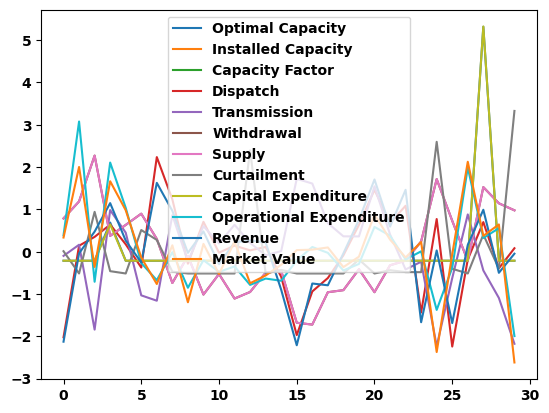

In [ ]:
result_features = np.array(results).T
for i, y in enumerate(result_features):
    plt.plot(np.arange(len(y)), stats.zscore(y), label=result_keys[i])
plt.legend()
plt.show()

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


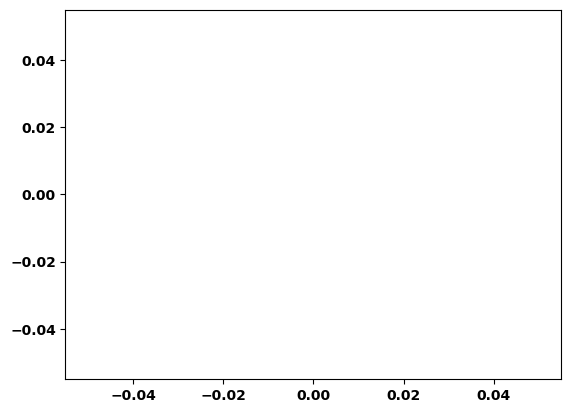

In [64]:
def plot_result(i):
    plt.plot(np.arange(len(result_features[i])), stats.zscore(result_features[i]), label=result_keys[i])
plot_result(2)

In [31]:
def MAD(x):
    return np.median(np.absolute(x - np.mean(x)))

var = [MAD(stats.zscore(result)) for result in result_features]
print(var)
sorted_var = np.argsort(var)
for i in sorted_var:
    print(f"{i}: {result_keys[i]}")

[0.214372327084487, nan, nan, 0.628185258661611, 0.6139032961506723, 0.8417548855656144, 0.8417548855653507, 0.5153426822632483, 0.2130458647938491, 0.4608466029944054, 0.5457121589147484, 0.3624605903165027]
8: Capital Expenditure
0: Optimal Capacity
11: Market Value
9: Operational Expenditure
7: Curtailment
10: Revenue
4: Transmission
3: Dispatch
6: Supply
5: Withdrawal
1: Installed Capacity
2: Capacity Factor


c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


# first optimization (only generators)

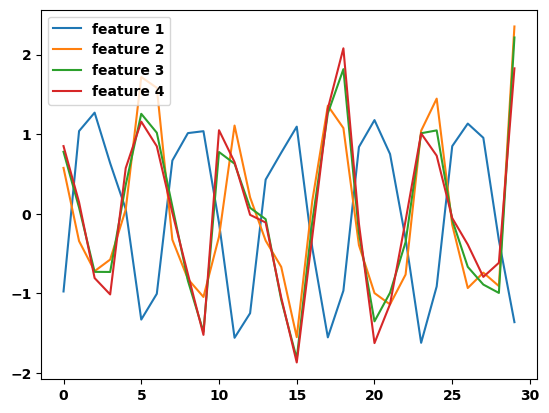

In [5]:
feature_key_words = ['solar', 'onwind', 'offwind-ac', 'offwind-dc']

feature_array = get_feature_array(netw_splits, feature_key_words)
plot_feature_array(feature_array)

In [6]:
result_keys = [column for column in n.statistics()]

coefficients = dict()

for result_key in result_keys:
    result_array = get_result_array(netw_splits, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    regr = LassoCV()
    with warnings.catch_warnings(action="ignore"):
        regr.fit(feature_array, result_array)
    
    coefficients[result_key] = regr.coef_

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


In [7]:
coefficients

{'Optimal Capacity': array([-0.        ,  0.38172834,  0.        ,  0.        ]),
 'Dispatch': array([-0.00000000e+00,  0.00000000e+00,  5.92118946e-17,  0.00000000e+00]),
 'Transmission': array([-0.        , -0.44800605, -0.22530143, -0.29923131]),
 'Withdrawal': array([-0.20923432,  0.        ,  0.73597906,  0.        ]),
 'Supply': array([-0.20923432,  0.        ,  0.73597906,  0.        ]),
 'Curtailment': array([-0.        ,  1.12666565, -0.        , -0.42678115]),
 'Capital Expenditure': array([-0.        ,  0.38338785,  0.        ,  0.        ]),
 'Operational Expenditure': array([-1.17404444, -0.73877362, -0.        , -0.04810928]),
 'Revenue': array([-0.13014536,  0.03059915,  0.        ,  0.        ]),
 'Market Value': array([-0.50158109, -0.        ,  0.        ,  0.        ])}

In [8]:
result_keys = [column for column in n.statistics()]

weights = dict()

for result_key in result_keys:
    result_array = get_result_array(netw_splits, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    regr = RandomForestRegressor()
    regr.fit(feature_array, result_array)
    weight_features = [0 for _ in range(4)]
    #with warnings.catch_warnings(action="ignore"):
    for estimator in regr.estimators_:
        weight_features[estimator.tree_.feature[0]] += 1
    
    weights[result_key] = weight_features

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


In [9]:
weights

{'Optimal Capacity': [10, 73, 10, 7],
 'Dispatch': [33, 18, 21, 28],
 'Transmission': [3, 18, 39, 40],
 'Withdrawal': [19, 41, 22, 18],
 'Supply': [16, 35, 30, 19],
 'Curtailment': [50, 35, 10, 5],
 'Capital Expenditure': [7, 78, 8, 7],
 'Operational Expenditure': [76, 17, 6, 1],
 'Revenue': [63, 13, 7, 17],
 'Market Value': [58, 5, 5, 32]}

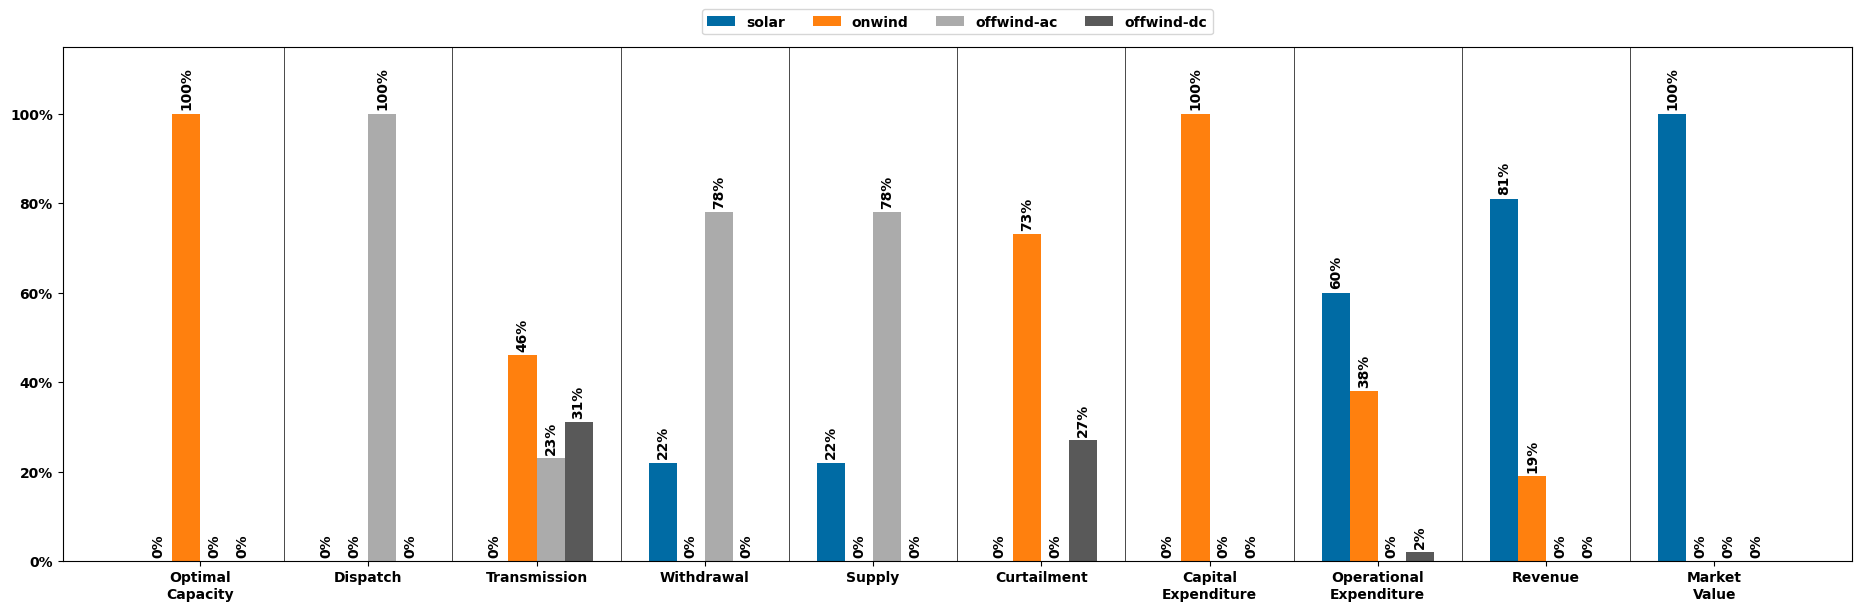

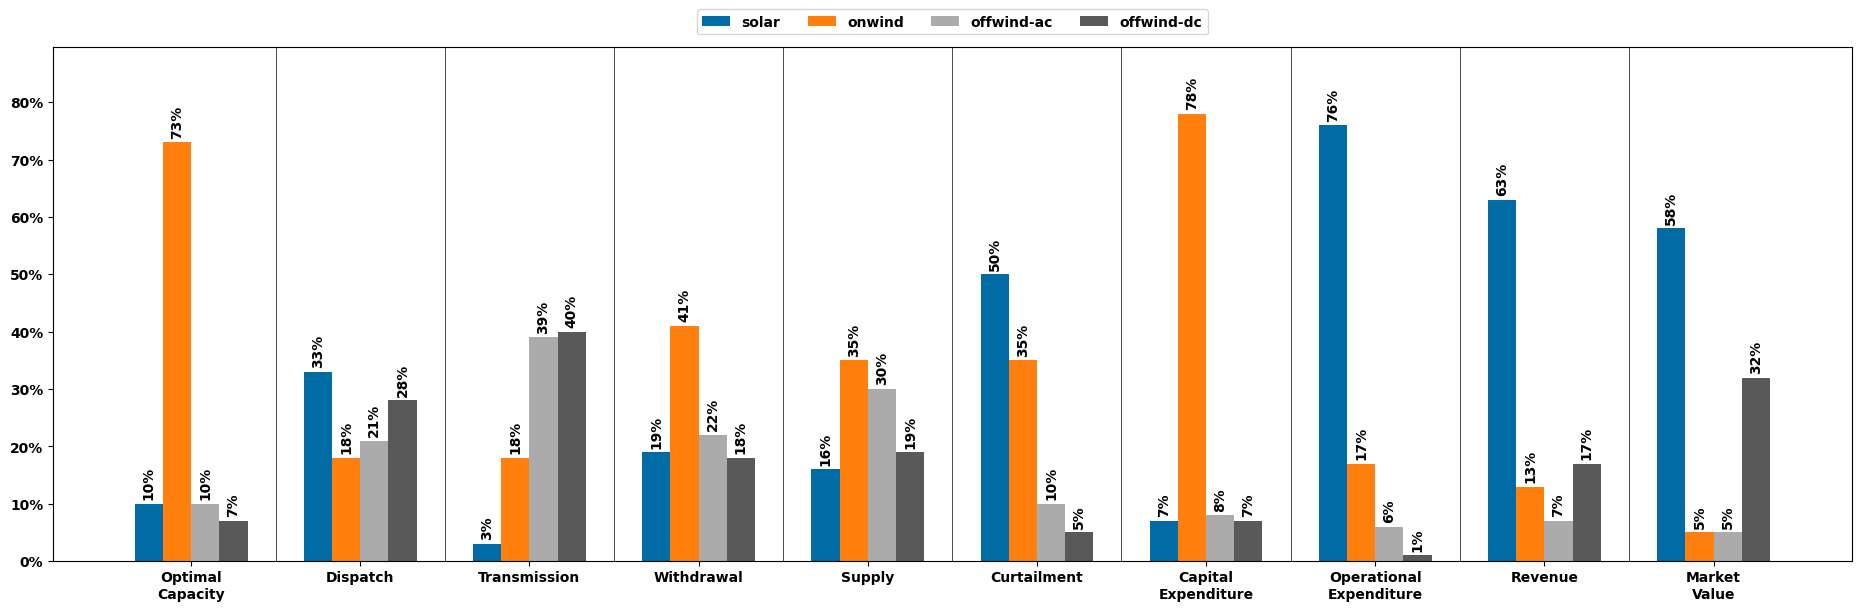

In [10]:
plot_results(coefficients, feature_names=feature_key_words)
plot_results(weights, feature_names=feature_key_words)

# Optimization by generators and location

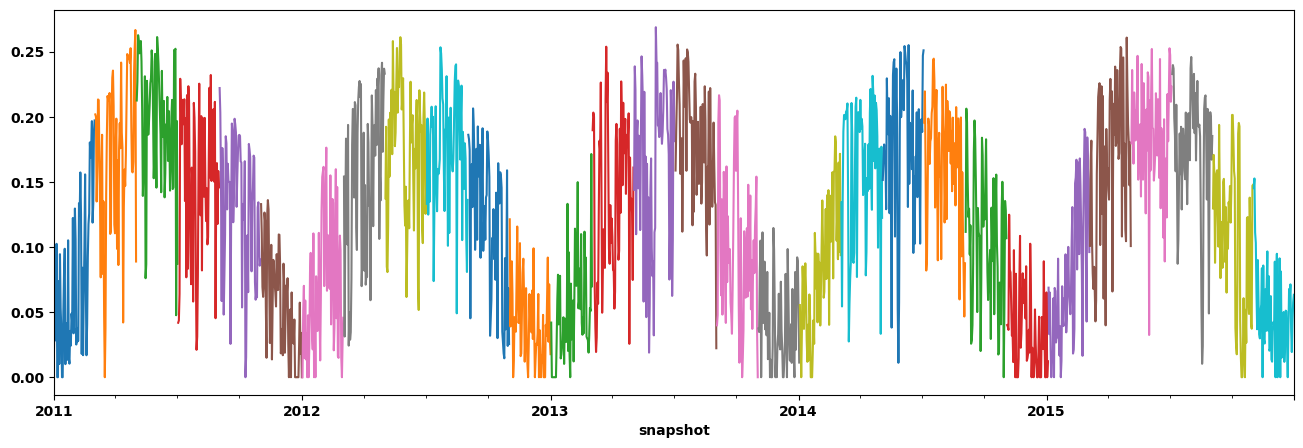

In [51]:
for netw in netw_splits:
    netw.generators_t.p_max_pu['DE0 0 solar'].plot(figsize=(16,5))

In [4]:
generators = ['solar', 'wind']
location_split_x = 10
location_split_y = 51

def get_features(netw: pypsa.Network):
    feature_data = netw.generators_t.p_max_pu
    feature_array = []
    for generator in generators:
        df_generator = feature_data.filter(like=generator, axis=1)
        location_array = [[], [], [], []]
        for column in df_generator:
            bus = column.rpartition(' ')[0]
            if netw.buses['y'][bus] > location_split_y:
                if netw.buses['x'][bus] <= location_split_x:
                    location_array[0].append(np.mean(df_generator[column]))
                else:
                    location_array[1].append(np.mean(df_generator[column]))
            else: 
                if netw.buses['x'][bus] <= location_split_x:
                    location_array[2].append(np.mean(df_generator[column]))
                else:
                    location_array[3].append(np.mean(df_generator[column]))
        for a in location_array:
            if len(a) == 0:
                feature_array.append(0)
            else: 
                feature_array.append(np.mean(a))
    return feature_array

[[0.06058115379269549, 0.06780423755324425, 0.07819838647286027, 0.08896404186371742, 0.411903634503459, 0.36542078195450217, 0.20950770543509792, 0.1897383547580137], [0.16949998030274474, 0.1675118391693176, 0.18469833581003045, 0.1818808674031601, 0.3125510490159276, 0.3276611690042127, 0.13132478925583205, 0.1383532296429141], [0.18078021283881604, 0.19275117404396325, 0.18735344923325387, 0.19075274022103228, 0.2900576411288773, 0.26091614409987, 0.1195210993992685, 0.10614755376253156], [0.14644612149749237, 0.1456389883510691, 0.16475733300848117, 0.16474106449255355, 0.2979437428262593, 0.29147063161180653, 0.10934662530350309, 0.10635051497421391], [0.11627783653167355, 0.12354498710570427, 0.13259075263895118, 0.1326503374130649, 0.38704968915637106, 0.3315955857156228, 0.16531237729895804, 0.13703599078648426], [0.046483093857197295, 0.048481676953013156, 0.061188694758558745, 0.06789488872899914, 0.4959385488731531, 0.45098953870775593, 0.27912502297506414, 0.25571222820338

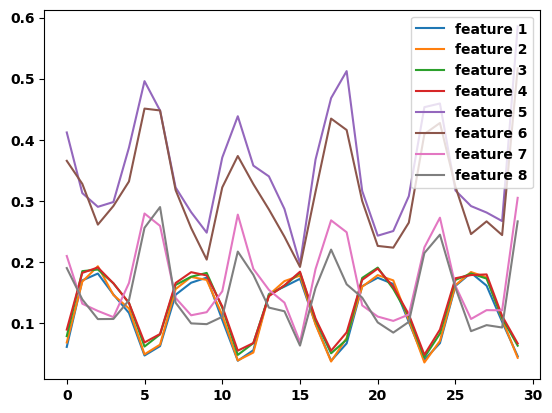

In [5]:
feature_array = []
for netw in netw_splits:
    feature_array.append(get_features(netw))

print(feature_array)
plot_feature_array(feature_array)

In [6]:
result_keys = [column for column in n.statistics()]

coefficients = dict()

for result_key in result_keys:
    result_array = get_result_array(netw_splits, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    regr = LassoCV()
    with warnings.catch_warnings(action="ignore"):
        regr.fit(feature_array, result_array)
    
    coefficients[result_key] = regr.coef_

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


In [7]:
result_keys = [column for column in n.statistics()]

weights = dict()

for result_key in result_keys:
    result_array = get_result_array(netw_splits, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    regr = RandomForestRegressor()
    regr.fit(feature_array, result_array)
    weight_features = [0 for _ in range(8)]
    #with warnings.catch_warnings(action="ignore"):
    for estimator in regr.estimators_:
        weight_features[estimator.tree_.feature[0]] += 1
    
    weights[result_key] = weight_features

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


In [113]:
def plot_coefficients(coef_dict: dict, feature_names, title, padding=2):
    plt.style.use('tableau-colorblind10')
    n_features = len(list(coefficients.values())[0])
    
    multiplier = -(n_features-1)/2
    width = 1/(n_features+padding)

    coefs_scaled = np.array([np.abs(x)/np.sum(np.abs(x)) for x in list(coef_dict.values())]).T
    coefs = [[round(y*100) for y in x] for x in coefs_scaled]

    x = np.arange(len(coef_dict))
    fig, ax = plt.subplots(layout='constrained')
    fig.set_size_inches(18.5, 6)
    ax.set_xticks(x, [s.replace(' ', '\n') for s in coef_dict.keys()])

    for i, coef in enumerate(coefs):
        offset = width * multiplier
        rects = ax.bar(x + offset, tuple(coef), width, label=feature_names[i])
        ax.bar_label(rects, padding=3, rotation=90, fmt='%.0f%%')
        multiplier += 1

    ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
    ax.margins(y=0.15)

    for i in range(len(coef_dict)-1):
        plt.axvline(x=i+0.5, color='black', lw = 0.5)

    ax.legend(loc='lower center', ncols=10, bbox_to_anchor=(0.5, 1.01))


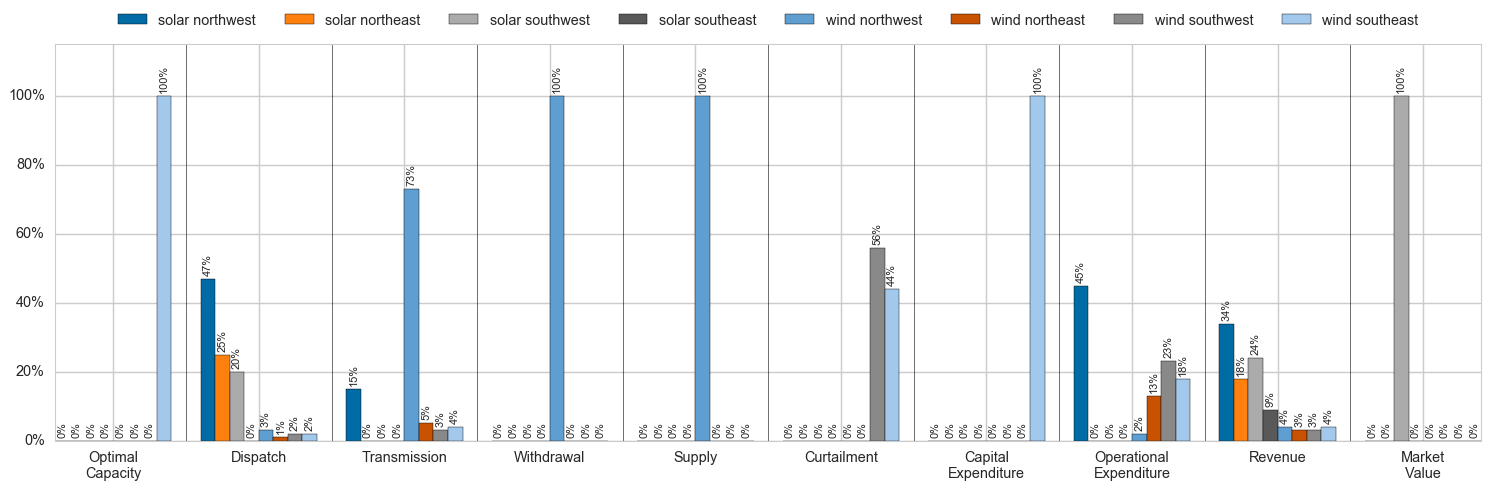

In [114]:
feature_names = [g+' ' + y+x for g in ['solar', 'wind'] for y in ['north', 'south'] for x in ['west', 'east']]
plot_coefficients(coefficients, feature_names, title='Lasso', padding=2)
# plot_coefficients(weights, [g+' ' + d for g in ['solar', 'wind'] for d in ['northwest', 'northeast', 'southwest', 'southeast']], width=0.1)

In [90]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# Delete buses

In [4]:
buses = []
longitude = [] # x
latitude = [] # y
for i, bus in n.buses.iterrows():
    if 'H2' in bus.name:
        continue
    buses.append(bus.name)
    longitude.append(bus['x'])
    latitude.append(bus['y'])

print(buses)
print(longitude)
print(latitude)

['DE0 0', 'DE0 1', 'DE0 10', 'DE0 11', 'DE0 12', 'DE0 13', 'DE0 14', 'DE0 15', 'DE0 16', 'DE0 17', 'DE0 18', 'DE0 19', 'DE0 2', 'DE0 20', 'DE0 21', 'DE0 22', 'DE0 23', 'DE0 24', 'DE0 25', 'DE0 26', 'DE0 27', 'DE0 28', 'DE0 29', 'DE0 3', 'DE0 30', 'DE0 31', 'DE0 32', 'DE0 33', 'DE0 34', 'DE0 35', 'DE0 36', 'DE0 37', 'DE0 38', 'DE0 39', 'DE0 4', 'DE0 40', 'DE0 41', 'DE0 42', 'DE0 43', 'DE0 44', 'DE0 45', 'DE0 46', 'DE0 47', 'DE0 48', 'DE0 49', 'DE0 5', 'DE0 50', 'DE0 51', 'DE0 52', 'DE0 53', 'DE0 54', 'DE0 55', 'DE0 56', 'DE0 57', 'DE0 58', 'DE0 59', 'DE0 6', 'DE0 60', 'DE0 61', 'DE0 62', 'DE0 63', 'DE0 64', 'DE0 65', 'DE0 66', 'DE0 67', 'DE0 68', 'DE0 69', 'DE0 7', 'DE0 70', 'DE0 71', 'DE0 72', 'DE0 73', 'DE0 74', 'DE0 75', 'DE0 76', 'DE0 77', 'DE0 78', 'DE0 79', 'DE0 8', 'DE0 9']
[11.965484499999999, 8.100384092987298, 8.866877984159865, 13.808441, 10.415522232506499, 6.918288301302811, 7.869491806268549, 8.251075499999999, 10.98256873725535, 13.099823, 9.892501750000001, 8.33566678846

In [5]:
longitude_sorted = np.argsort(longitude)
latitude_sorted = np.argsort(latitude)

In [6]:
def find_connections(links: pd.DataFrame, key):
    res = []
    for _, link in links.iterrows():
        if (key + ' ' in link['bus0']) or (key == link['bus0']) or (key + ' ' in link['bus1']) or (key == link['bus1']):
            res.append(link.name)
    return res

def find_components(components: pd.DataFrame, key, colum='bus'):
    res = []
    for _, component in components.iterrows():
        if (key + ' ' in component[colum]) or (key == component[colum]):
            res.append(component.name)
    return res

def flatten(list):
    flat_list = []
    for row in list:
        flat_list.extend(row)
    return flat_list

In [7]:
data_split = []

for latitude_split in split_list(latitude_sorted, 3) :
    for longitude_split in split_list(longitude_sorted, 2):
        keyword_split = [buses[i] for i in longitude_split if i in latitude_split]

        buses_split = keyword_split + [key + ' H2' for key in keyword_split]
        generators_split = flatten([find_components(n.generators, key) for key in keyword_split])
        links_split = flatten([find_connections(n.links, key) for key in keyword_split])
        lines_split = flatten([find_connections(n.lines, key) for key in keyword_split])
        stores_split = flatten([find_components(n.stores, key) for key in keyword_split])
        storage_unit_split = flatten([find_components(n.storage_units, key) for key in keyword_split])
        load_split = flatten([find_components(n.loads, key) for key in keyword_split])
        shapes_split = flatten([find_components(n.shapes, key, 'idx') for key in keyword_split])

        classes = [('Bus', buses_split), 
                   ('Generator', generators_split), 
                   ('Link', links_split), 
                   ('Store', stores_split), 
                   ('StorageUnit', storage_unit_split), 
                   ('Load', load_split), 
                   ('Shape', shapes_split),
                   ('Line', lines_split)]
        
        netw_copy = n.copy()
        for c, split in classes:
            netw_copy.mremove(c, split)
        data_split.append(netw_copy)

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x2a99fc66650>,
 <matplotlib.collections.LineCollection at 0x2a99fc2fdd0>)

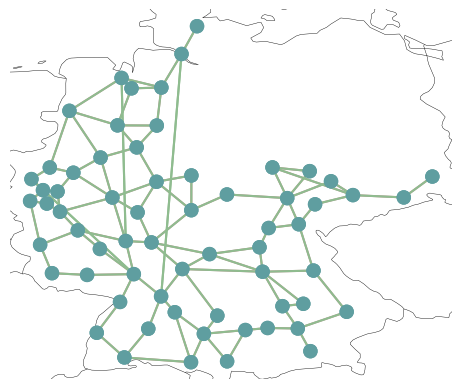

In [7]:
data_split[5].plot()

In [9]:
snapshot_splits = split_list(list=n.snapshots, n=30)
netw_delete_split = []

for netw in data_split:
    netw_splits = []
    for snapshot_split in snapshot_splits:
        netw_copy = netw.copy()
        netw_copy.set_snapshots(snapshots=snapshot_split)
        netw_copy.optimize(snapshot_split, solver_name="gurobi")
        netw_splits.append(netw_copy)
    netw_delete_split.append(netw_splits)

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.80it/s]
INFO:linopy.io: Writing time: 2.0s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-l9xtgxoc.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-l9xtgxoc.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x0dac2bf7


INFO:gurobipy:Model fingerprint: 0x0dac2bf7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30962 columns


INFO:gurobipy:Presolve removed 111424 rows and 30962 columns


Presolve time: 0.46s


INFO:gurobipy:Presolve time: 0.46s


Presolved: 63990 rows, 51809 columns, 240492 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 51809 columns, 240492 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.19s


INFO:gurobipy:Ordering time: 1.19s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17905318e+15 -3.38442946e+13  8.81e+10 8.39e+04  2.98e+12     2s


INFO:gurobipy:   0   2.17905318e+15 -3.38442946e+13  8.81e+10 8.39e+04  2.98e+12     2s


   1   3.06365404e+15 -1.44337039e+14  5.90e+10 2.06e+04  1.17e+12     3s


INFO:gurobipy:   1   3.06365404e+15 -1.44337039e+14  5.90e+10 2.06e+04  1.17e+12     3s


   2   3.21095416e+15 -2.67558873e+14  1.69e+10 2.17e+03  3.02e+11     3s


INFO:gurobipy:   2   3.21095416e+15 -2.67558873e+14  1.69e+10 2.17e+03  3.02e+11     3s


   3   6.18370890e+14 -2.65854600e+14  6.55e+08 7.53e+01  1.77e+10     3s


INFO:gurobipy:   3   6.18370890e+14 -2.65854600e+14  6.55e+08 7.53e+01  1.77e+10     3s


   4   1.91919561e+14 -6.57763365e+13  1.24e+08 1.02e+01  3.84e+09     4s


INFO:gurobipy:   4   1.91919561e+14 -6.57763365e+13  1.24e+08 1.02e+01  3.84e+09     4s


   5   4.99275867e+13 -1.20516900e+13  3.34e+06 8.60e+00  6.44e+08     4s


INFO:gurobipy:   5   4.99275867e+13 -1.20516900e+13  3.34e+06 8.60e+00  6.44e+08     4s


   6   3.26355998e+12 -4.55257188e+12  4.40e+03 1.24e+01  7.35e+07     4s


INFO:gurobipy:   6   3.26355998e+12 -4.55257188e+12  4.40e+03 1.24e+01  7.35e+07     4s


   7   1.20170466e+12 -1.35889923e+12  1.45e+03 3.44e+00  2.38e+07     5s


INFO:gurobipy:   7   1.20170466e+12 -1.35889923e+12  1.45e+03 3.44e+00  2.38e+07     5s


   8   3.61396790e+11 -1.85171587e+11  4.53e+02 2.97e-01  5.02e+06     5s


INFO:gurobipy:   8   3.61396790e+11 -1.85171587e+11  4.53e+02 2.97e-01  5.02e+06     5s


   9   1.80861456e+11 -7.89141974e+10  3.12e+02 1.07e-01  2.37e+06     5s


INFO:gurobipy:   9   1.80861456e+11 -7.89141974e+10  3.12e+02 1.07e-01  2.37e+06     5s


  10   9.50805476e+10 -3.34988279e+10  1.63e+02 2.13e-02  1.17e+06     6s


INFO:gurobipy:  10   9.50805476e+10 -3.34988279e+10  1.63e+02 2.13e-02  1.17e+06     6s


  11   7.48049931e+10 -1.89210062e+10  1.28e+02 1.02e-02  8.49e+05     6s


INFO:gurobipy:  11   7.48049931e+10 -1.89210062e+10  1.28e+02 1.02e-02  8.49e+05     6s


  12   4.70829694e+10 -1.09973789e+10  8.12e+01 6.81e-03  5.25e+05     7s


INFO:gurobipy:  12   4.70829694e+10 -1.09973789e+10  8.12e+01 6.81e-03  5.25e+05     7s


  13   3.14383010e+10 -6.76181224e+09  5.32e+01 4.79e-03  3.45e+05     7s


INFO:gurobipy:  13   3.14383010e+10 -6.76181224e+09  5.32e+01 4.79e-03  3.45e+05     7s


  14   2.02326948e+10 -3.70012720e+09  3.27e+01 3.28e-03  2.16e+05     7s


INFO:gurobipy:  14   2.02326948e+10 -3.70012720e+09  3.27e+01 3.28e-03  2.16e+05     7s


  15   1.44856843e+10 -1.28501723e+09  2.23e+01 1.88e-03  1.42e+05     8s


INFO:gurobipy:  15   1.44856843e+10 -1.28501723e+09  2.23e+01 1.88e-03  1.42e+05     8s


  16   7.77527131e+09 -3.22844586e+08  1.14e+01 1.30e-03  7.31e+04     9s


INFO:gurobipy:  16   7.77527131e+09 -3.22844586e+08  1.14e+01 1.30e-03  7.31e+04     9s


  17   3.73967582e+09  3.35017708e+08  4.43e+00 7.45e-04  3.07e+04     9s


INFO:gurobipy:  17   3.73967582e+09  3.35017708e+08  4.43e+00 7.45e-04  3.07e+04     9s


  18   1.90397330e+09  8.34072425e+08  1.37e+00 2.03e-04  9.65e+03    10s


INFO:gurobipy:  18   1.90397330e+09  8.34072425e+08  1.37e+00 2.03e-04  9.65e+03    10s


  19   1.24405117e+09  8.91024246e+08  4.15e-01 9.01e-05  3.18e+03    10s


INFO:gurobipy:  19   1.24405117e+09  8.91024246e+08  4.15e-01 9.01e-05  3.18e+03    10s


  20   1.08877847e+09  9.11877972e+08  1.96e-01 4.99e-05  1.59e+03    11s


INFO:gurobipy:  20   1.08877847e+09  9.11877972e+08  1.96e-01 4.99e-05  1.59e+03    11s


  21   1.03128360e+09  9.23226649e+08  1.21e-01 2.43e-05  9.74e+02    11s


INFO:gurobipy:  21   1.03128360e+09  9.23226649e+08  1.21e-01 2.43e-05  9.74e+02    11s


  22   9.91666433e+08  9.27219817e+08  7.10e-02 1.54e-05  5.81e+02    11s


INFO:gurobipy:  22   9.91666433e+08  9.27219817e+08  7.10e-02 1.54e-05  5.81e+02    11s


  23   9.67388929e+08  9.29809937e+08  4.00e-02 9.26e-06  3.39e+02    12s


INFO:gurobipy:  23   9.67388929e+08  9.29809937e+08  4.00e-02 9.26e-06  3.39e+02    12s


  24   9.56794098e+08  9.32329197e+08  2.69e-02 2.87e-06  2.21e+02    12s


INFO:gurobipy:  24   9.56794098e+08  9.32329197e+08  2.69e-02 2.87e-06  2.21e+02    12s


  25   9.33773443e+08  9.33049475e+08  1.79e-04 1.20e-06  6.52e+00    13s


INFO:gurobipy:  25   9.33773443e+08  9.33049475e+08  1.79e-04 1.20e-06  6.52e+00    13s


  26   9.33387889e+08  9.33306500e+08  1.20e-05 2.11e-07  7.32e-01    13s


INFO:gurobipy:  26   9.33387889e+08  9.33306500e+08  1.20e-05 2.11e-07  7.32e-01    13s


  27   9.33368537e+08  9.33355886e+08  5.10e-07 3.47e-08  1.14e-01    14s


INFO:gurobipy:  27   9.33368537e+08  9.33355886e+08  5.10e-07 3.47e-08  1.14e-01    14s


  28   9.33367288e+08  9.33363909e+08  1.42e-07 7.64e-09  3.04e-02    15s


INFO:gurobipy:  28   9.33367288e+08  9.33363909e+08  1.42e-07 7.64e-09  3.04e-02    15s


  29   9.33366864e+08  9.33365767e+08  1.53e-07 2.02e-09  9.87e-03    16s


INFO:gurobipy:  29   9.33366864e+08  9.33365767e+08  1.53e-07 2.02e-09  9.87e-03    16s


  30   9.33366665e+08  9.33366286e+08  3.97e-07 4.63e-10  3.41e-03    16s


INFO:gurobipy:  30   9.33366665e+08  9.33366286e+08  3.97e-07 4.63e-10  3.41e-03    16s


  31   9.33366512e+08  9.33366424e+08  2.19e-07 3.74e-10  7.99e-04    17s


INFO:gurobipy:  31   9.33366512e+08  9.33366424e+08  2.19e-07 3.74e-10  7.99e-04    17s


  32   9.33366471e+08  9.33366453e+08  6.60e-08 2.18e-10  1.66e-04    17s


INFO:gurobipy:  32   9.33366471e+08  9.33366453e+08  6.60e-08 2.18e-10  1.66e-04    17s


  33   9.33366459e+08  9.33366459e+08  6.35e-09 2.14e-10  5.41e-06    18s


INFO:gurobipy:  33   9.33366459e+08  9.33366459e+08  6.35e-09 2.14e-10  5.41e-06    18s


  34   9.33366459e+08  9.33366459e+08  9.00e-11 2.83e-10  5.85e-09    18s


INFO:gurobipy:  34   9.33366459e+08  9.33366459e+08  9.00e-11 2.83e-10  5.85e-09    18s


INFO:gurobipy:


Barrier solved model in 34 iterations and 18.36 seconds (9.38 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 18.36 seconds (9.38 work units)


Optimal objective 9.33366459e+08


INFO:gurobipy:Optimal objective 9.33366459e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39410 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   39410 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     457 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:     457 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9764019e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9764019e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21108    9.3336646e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21108    9.3336646e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21108 iterations and 18.98 seconds (9.58 work units)


INFO:gurobipy:Solved in 21108 iterations and 18.98 seconds (9.58 work units)


Optimal objective  9.333664589e+08


INFO:gurobipy:Optimal objective  9.333664589e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 9.33e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.61it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dl28c91j.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dl28c91j.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x4adcdbd0


INFO:gurobipy:Model fingerprint: 0x4adcdbd0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30660 columns


INFO:gurobipy:Presolve removed 111424 rows and 30660 columns


Presolve time: 0.48s


INFO:gurobipy:Presolve time: 0.48s


Presolved: 63990 rows, 52111 columns, 240794 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52111 columns, 240794 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.20s


INFO:gurobipy:Ordering time: 1.20s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16997918e+15 -3.34973099e+13  8.77e+10 8.38e+04  2.97e+12     2s


INFO:gurobipy:   0   2.16997918e+15 -3.34973099e+13  8.77e+10 8.38e+04  2.97e+12     2s


   1   3.04714422e+15 -1.43674187e+14  5.89e+10 2.03e+04  1.17e+12     3s


INFO:gurobipy:   1   3.04714422e+15 -1.43674187e+14  5.89e+10 2.03e+04  1.17e+12     3s


   2   3.17952879e+15 -2.64179617e+14  2.14e+10 2.22e+03  3.65e+11     3s


INFO:gurobipy:   2   3.17952879e+15 -2.64179617e+14  2.14e+10 2.22e+03  3.65e+11     3s


   3   7.36997008e+14 -2.65302511e+14  9.35e+08 9.64e+01  2.28e+10     3s


INFO:gurobipy:   3   7.36997008e+14 -2.65302511e+14  9.35e+08 9.64e+01  2.28e+10     3s


   4   1.93063287e+14 -6.95400116e+13  1.49e+08 7.60e+00  4.14e+09     4s


INFO:gurobipy:   4   1.93063287e+14 -6.95400116e+13  1.49e+08 7.60e+00  4.14e+09     4s


   5   4.88653076e+13 -1.26529827e+13  4.30e+06 2.00e+02  6.38e+08     4s


INFO:gurobipy:   5   4.88653076e+13 -1.26529827e+13  4.30e+06 2.00e+02  6.38e+08     4s


   6   1.98435386e+12 -6.68195671e+12  4.40e+03 3.49e+01  7.91e+07     4s


INFO:gurobipy:   6   1.98435386e+12 -6.68195671e+12  4.40e+03 3.49e+01  7.91e+07     4s


   7   8.73067685e+11 -2.38273272e+12  1.66e+03 1.10e+01  2.95e+07     5s


INFO:gurobipy:   7   8.73067685e+11 -2.38273272e+12  1.66e+03 1.10e+01  2.95e+07     5s


   8   2.52020634e+11 -3.03680899e+11  3.03e+02 1.02e+00  5.01e+06     5s


INFO:gurobipy:   8   2.52020634e+11 -3.03680899e+11  3.03e+02 1.02e+00  5.01e+06     5s


   9   1.05039997e+11 -8.15544555e+10  9.99e+01 2.61e-01  1.68e+06     5s


INFO:gurobipy:   9   1.05039997e+11 -8.15544555e+10  9.99e+01 2.61e-01  1.68e+06     5s


  10   6.75190270e+10 -3.53685002e+10  6.43e+01 9.08e-02  9.24e+05     6s


INFO:gurobipy:  10   6.75190270e+10 -3.53685002e+10  6.43e+01 9.08e-02  9.24e+05     6s


  11   5.22887243e+10 -2.19137838e+10  5.05e+01 4.80e-02  6.66e+05     6s


INFO:gurobipy:  11   5.22887243e+10 -2.19137838e+10  5.05e+01 4.80e-02  6.66e+05     6s


  12   3.69194729e+10 -1.53042644e+10  3.60e+01 2.63e-02  4.68e+05     7s


INFO:gurobipy:  12   3.69194729e+10 -1.53042644e+10  3.60e+01 2.63e-02  4.68e+05     7s


  13   2.39169943e+10 -9.39421386e+09  2.32e+01 1.32e-02  2.99e+05     7s


INFO:gurobipy:  13   2.39169943e+10 -9.39421386e+09  2.32e+01 1.32e-02  2.99e+05     7s


  14   1.66220094e+10 -5.63265272e+09  1.55e+01 7.08e-03  1.99e+05     7s


INFO:gurobipy:  14   1.66220094e+10 -5.63265272e+09  1.55e+01 7.08e-03  1.99e+05     7s


  15   1.08420876e+10 -2.62234033e+09  9.42e+00 3.25e-03  1.21e+05     8s


INFO:gurobipy:  15   1.08420876e+10 -2.62234033e+09  9.42e+00 3.25e-03  1.21e+05     8s


  16   7.19000976e+09 -1.15430004e+09  5.98e+00 1.63e-03  7.48e+04     8s


INFO:gurobipy:  16   7.19000976e+09 -1.15430004e+09  5.98e+00 1.63e-03  7.48e+04     8s


  17   3.96191260e+09 -4.04794214e+08  2.98e+00 9.22e-04  3.91e+04     9s


INFO:gurobipy:  17   3.96191260e+09 -4.04794214e+08  2.98e+00 9.22e-04  3.91e+04     9s


  18   1.82231822e+09  4.32863758e+08  9.40e-01 1.44e-04  1.24e+04     9s


INFO:gurobipy:  18   1.82231822e+09  4.32863758e+08  9.40e-01 1.44e-04  1.24e+04     9s


  19   9.34732113e+08  5.99452851e+08  1.87e-01 5.79e-05  3.00e+03    10s


INFO:gurobipy:  19   9.34732113e+08  5.99452851e+08  1.87e-01 5.79e-05  3.00e+03    10s


  20   7.88559004e+08  6.48615093e+08  7.28e-02 2.59e-05  1.25e+03    10s


INFO:gurobipy:  20   7.88559004e+08  6.48615093e+08  7.28e-02 2.59e-05  1.25e+03    10s


  21   7.26163475e+08  6.68439504e+08  2.88e-02 1.08e-05  5.17e+02    11s


INFO:gurobipy:  21   7.26163475e+08  6.68439504e+08  2.88e-02 1.08e-05  5.17e+02    11s


  22   7.08955690e+08  6.71885634e+08  1.66e-02 8.00e-06  3.32e+02    11s


INFO:gurobipy:  22   7.08955690e+08  6.71885634e+08  1.66e-02 8.00e-06  3.32e+02    11s


  23   6.93934302e+08  6.77105121e+08  6.76e-03 3.98e-06  1.51e+02    12s


INFO:gurobipy:  23   6.93934302e+08  6.77105121e+08  6.76e-03 3.98e-06  1.51e+02    12s


  24   6.83901749e+08  6.81257288e+08  8.52e-04 8.87e-07  2.37e+01    12s


INFO:gurobipy:  24   6.83901749e+08  6.81257288e+08  8.52e-04 8.87e-07  2.37e+01    12s


  25   6.82325990e+08  6.82170715e+08  4.77e-06 1.13e-07  1.39e+00    13s


INFO:gurobipy:  25   6.82325990e+08  6.82170715e+08  4.77e-06 1.13e-07  1.39e+00    13s


  26   6.82308740e+08  6.82275696e+08  1.55e-06 2.49e-08  2.96e-01    13s


INFO:gurobipy:  26   6.82308740e+08  6.82275696e+08  1.55e-06 2.49e-08  2.96e-01    13s


  27   6.82307690e+08  6.82300654e+08  1.64e-07 4.80e-09  6.30e-02    14s


INFO:gurobipy:  27   6.82307690e+08  6.82300654e+08  1.64e-07 4.80e-09  6.30e-02    14s


  28   6.82307399e+08  6.82305105e+08  3.02e-08 1.52e-09  2.05e-02    14s


INFO:gurobipy:  28   6.82307399e+08  6.82305105e+08  3.02e-08 1.52e-09  2.05e-02    14s


  29   6.82307352e+08  6.82307155e+08  7.38e-08 2.62e-10  1.76e-03    15s


INFO:gurobipy:  29   6.82307352e+08  6.82307155e+08  7.38e-08 2.62e-10  1.76e-03    15s


  30   6.82307326e+08  6.82307254e+08  5.63e-08 2.36e-10  6.44e-04    16s


INFO:gurobipy:  30   6.82307326e+08  6.82307254e+08  5.63e-08 2.36e-10  6.44e-04    16s


  31   6.82307318e+08  6.82307280e+08  3.80e-08 2.20e-10  3.36e-04    16s


INFO:gurobipy:  31   6.82307318e+08  6.82307280e+08  3.80e-08 2.20e-10  3.36e-04    16s


INFO:gurobipy:


Barrier solved model in 31 iterations and 16.20 seconds (8.50 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 16.20 seconds (8.50 work units)


Optimal objective 6.82307318e+08


INFO:gurobipy:Optimal objective 6.82307318e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39410 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   39410 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   15562 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:   15562 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8360226e-02     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8360226e-02     17s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   36038    6.8230730e+08   0.000000e+00   1.836023e-02     17s


INFO:gurobipy:   36038    6.8230730e+08   0.000000e+00   1.836023e-02     17s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   36042    6.8230730e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   36042    6.8230730e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 36042 iterations and 17.04 seconds (9.29 work units)


INFO:gurobipy:Solved in 36042 iterations and 17.04 seconds (9.29 work units)


Optimal objective  6.823072980e+08


INFO:gurobipy:Optimal objective  6.823072980e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.82e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.46it/s]
INFO:linopy.io: Writing time: 2.01s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fdxq5sms.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fdxq5sms.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x3a4b0d3a


INFO:gurobipy:Model fingerprint: 0x3a4b0d3a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30597 columns


INFO:gurobipy:Presolve removed 111424 rows and 30597 columns


Presolve time: 0.51s


INFO:gurobipy:Presolve time: 0.51s


Presolved: 63990 rows, 52174 columns, 240857 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52174 columns, 240857 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.11s


INFO:gurobipy:Ordering time: 1.11s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16779257e+15 -3.30925237e+13  8.76e+10 8.38e+04  2.96e+12     2s


INFO:gurobipy:   0   2.16779257e+15 -3.30925237e+13  8.76e+10 8.38e+04  2.96e+12     2s


   1   3.04439286e+15 -1.43077384e+14  5.88e+10 2.04e+04  1.17e+12     3s


INFO:gurobipy:   1   3.04439286e+15 -1.43077384e+14  5.88e+10 2.04e+04  1.17e+12     3s


   2   3.17683325e+15 -2.63556372e+14  2.28e+10 2.29e+03  3.87e+11     3s


INFO:gurobipy:   2   3.17683325e+15 -2.63556372e+14  2.28e+10 2.29e+03  3.87e+11     3s


   3   7.54265835e+14 -2.65893917e+14  9.26e+08 1.00e+02  2.29e+10     3s


INFO:gurobipy:   3   7.54265835e+14 -2.65893917e+14  9.26e+08 1.00e+02  2.29e+10     3s


   4   2.01202091e+14 -7.16651404e+13  1.52e+08 1.33e+01  4.27e+09     3s


INFO:gurobipy:   4   2.01202091e+14 -7.16651404e+13  1.52e+08 1.33e+01  4.27e+09     3s


   5   5.09782477e+13 -1.26971726e+13  5.84e+06 6.00e+01  6.70e+08     4s


INFO:gurobipy:   5   5.09782477e+13 -1.26971726e+13  5.84e+06 6.00e+01  6.70e+08     4s


   6   1.93059358e+12 -7.42309714e+12  4.99e+03 3.02e+01  8.53e+07     4s


INFO:gurobipy:   6   1.93059358e+12 -7.42309714e+12  4.99e+03 3.02e+01  8.53e+07     4s


   7   6.37452506e+11 -1.52118673e+12  1.27e+03 5.27e+00  1.96e+07     5s


INFO:gurobipy:   7   6.37452506e+11 -1.52118673e+12  1.27e+03 5.27e+00  1.96e+07     5s


   8   1.74377209e+11 -1.64258794e+11  3.29e+02 4.51e-01  3.04e+06     5s


INFO:gurobipy:   8   1.74377209e+11 -1.64258794e+11  3.29e+02 4.51e-01  3.04e+06     5s


   9   8.39307506e+10 -7.85073239e+10  1.47e+02 2.08e-01  1.46e+06     5s


INFO:gurobipy:   9   8.39307506e+10 -7.85073239e+10  1.47e+02 2.08e-01  1.46e+06     5s


  10   6.00737559e+10 -3.41860886e+10  1.04e+02 7.05e-02  8.45e+05     6s


INFO:gurobipy:  10   6.00737559e+10 -3.41860886e+10  1.04e+02 7.05e-02  8.45e+05     6s


  11   3.88594152e+10 -2.08104926e+10  6.85e+01 3.32e-02  5.35e+05     6s


INFO:gurobipy:  11   3.88594152e+10 -2.08104926e+10  6.85e+01 3.32e-02  5.35e+05     6s


  12   2.82283409e+10 -1.38018798e+10  5.04e+01 1.93e-02  3.76e+05     6s


INFO:gurobipy:  12   2.82283409e+10 -1.38018798e+10  5.04e+01 1.93e-02  3.76e+05     6s


  13   1.97162868e+10 -8.50940904e+09  3.46e+01 1.07e-02  2.53e+05     7s


INFO:gurobipy:  13   1.97162868e+10 -8.50940904e+09  3.46e+01 1.07e-02  2.53e+05     7s


  14   1.33729596e+10 -5.01234925e+09  2.23e+01 5.94e-03  1.65e+05     7s


INFO:gurobipy:  14   1.33729596e+10 -5.01234925e+09  2.23e+01 5.94e-03  1.65e+05     7s


  15   9.71930208e+09 -2.30766381e+09  1.53e+01 2.82e-03  1.08e+05     8s


INFO:gurobipy:  15   9.71930208e+09 -2.30766381e+09  1.53e+01 2.82e-03  1.08e+05     8s


  16   5.35318184e+09 -7.65994519e+08  7.74e+00 1.23e-03  5.48e+04     8s


INFO:gurobipy:  16   5.35318184e+09 -7.65994519e+08  7.74e+00 1.23e-03  5.48e+04     8s


  17   3.18829220e+09  1.38578101e+08  4.15e+00 4.08e-04  2.73e+04     9s


INFO:gurobipy:  17   3.18829220e+09  1.38578101e+08  4.15e+00 4.08e-04  2.73e+04     9s


  18   1.59115235e+09  5.50618914e+08  1.42e+00 1.37e-04  9.31e+03     9s


INFO:gurobipy:  18   1.59115235e+09  5.50618914e+08  1.42e+00 1.37e-04  9.31e+03     9s


  19   9.59623896e+08  6.48869093e+08  4.02e-01 5.63e-05  2.78e+03    10s


INFO:gurobipy:  19   9.59623896e+08  6.48869093e+08  4.02e-01 5.63e-05  2.78e+03    10s


  20   7.87462800e+08  6.72459492e+08  1.39e-01 2.93e-05  1.03e+03    10s


INFO:gurobipy:  20   7.87462800e+08  6.72459492e+08  1.39e-01 2.93e-05  1.03e+03    10s


  21   7.40213174e+08  6.89601380e+08  6.60e-02 6.23e-06  4.53e+02    10s


INFO:gurobipy:  21   7.40213174e+08  6.89601380e+08  6.60e-02 6.23e-06  4.53e+02    10s


  22   7.13485832e+08  6.91068359e+08  2.76e-02 4.05e-06  2.01e+02    11s


INFO:gurobipy:  22   7.13485832e+08  6.91068359e+08  2.76e-02 4.05e-06  2.01e+02    11s


  23   7.03306524e+08  6.92360605e+08  1.32e-02 1.79e-06  9.79e+01    11s


INFO:gurobipy:  23   7.03306524e+08  6.92360605e+08  1.32e-02 1.79e-06  9.79e+01    11s


  24   6.94927576e+08  6.93210923e+08  1.80e-03 3.59e-07  1.54e+01    12s


INFO:gurobipy:  24   6.94927576e+08  6.93210923e+08  1.80e-03 3.59e-07  1.54e+01    12s


  25   6.93399220e+08  6.93347306e+08  3.57e-06 5.89e-08  4.64e-01    12s


INFO:gurobipy:  25   6.93399220e+08  6.93347306e+08  3.57e-06 5.89e-08  4.64e-01    12s


  26   6.93380611e+08  6.93373304e+08  1.91e-07 1.06e-08  6.53e-02    13s


INFO:gurobipy:  26   6.93380611e+08  6.93373304e+08  1.91e-07 1.06e-08  6.53e-02    13s


  27   6.93379726e+08  6.93378350e+08  1.36e-07 1.86e-09  1.23e-02    14s


INFO:gurobipy:  27   6.93379726e+08  6.93378350e+08  1.36e-07 1.86e-09  1.23e-02    14s


  28   6.93379582e+08  6.93379334e+08  4.17e-07 3.05e-10  2.22e-03    14s


INFO:gurobipy:  28   6.93379582e+08  6.93379334e+08  4.17e-07 3.05e-10  2.22e-03    14s


  29   6.93379560e+08  6.93379506e+08  9.63e-08 3.74e-10  4.84e-04    15s


INFO:gurobipy:  29   6.93379560e+08  6.93379506e+08  9.63e-08 3.74e-10  4.84e-04    15s


  30   6.93379556e+08  6.93379550e+08  1.44e-08 3.54e-10  6.12e-05    16s


INFO:gurobipy:  30   6.93379556e+08  6.93379550e+08  1.44e-08 3.54e-10  6.12e-05    16s


  31   6.93379556e+08  6.93379553e+08  5.12e-09 3.24e-10  2.07e-05    16s


INFO:gurobipy:  31   6.93379556e+08  6.93379553e+08  5.12e-09 3.24e-10  2.07e-05    16s


  32   6.93379556e+08  6.93379555e+08  1.69e-09 2.91e-10  6.37e-07    17s


INFO:gurobipy:  32   6.93379556e+08  6.93379555e+08  1.69e-09 2.91e-10  6.37e-07    17s


  33   6.93379556e+08  6.93379556e+08  8.29e-10 4.20e-10  3.89e-10    17s


INFO:gurobipy:  33   6.93379556e+08  6.93379556e+08  8.29e-10 4.20e-10  3.89e-10    17s


INFO:gurobipy:


Barrier solved model in 33 iterations and 17.28 seconds (9.18 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 17.28 seconds (9.18 work units)


Optimal objective 6.93379556e+08


INFO:gurobipy:Optimal objective 6.93379556e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39406 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   39406 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      76 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      76 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2260082e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2260082e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20078    6.9337956e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   20078    6.9337956e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 20078 iterations and 17.85 seconds (9.38 work units)


INFO:gurobipy:Solved in 20078 iterations and 17.85 seconds (9.38 work units)


Optimal objective  6.933795555e+08


INFO:gurobipy:Optimal objective  6.933795555e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.93e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.19it/s]
INFO:linopy.io: Writing time: 2.18s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-busmy48l.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-busmy48l.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x74a20bec


INFO:gurobipy:Model fingerprint: 0x74a20bec


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30661 columns


INFO:gurobipy:Presolve removed 111424 rows and 30661 columns


Presolve time: 0.50s


INFO:gurobipy:Presolve time: 0.50s


Presolved: 63990 rows, 52110 columns, 240793 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52110 columns, 240793 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.19s


INFO:gurobipy:Ordering time: 1.19s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16934114e+15 -3.29289372e+13  8.76e+10 8.38e+04  2.97e+12     2s


INFO:gurobipy:   0   2.16934114e+15 -3.29289372e+13  8.76e+10 8.38e+04  2.97e+12     2s


   1   3.04628264e+15 -1.43373681e+14  5.89e+10 2.03e+04  1.17e+12     3s


INFO:gurobipy:   1   3.04628264e+15 -1.43373681e+14  5.89e+10 2.03e+04  1.17e+12     3s


   2   3.17798843e+15 -2.63750434e+14  2.24e+10 2.29e+03  3.82e+11     3s


INFO:gurobipy:   2   3.17798843e+15 -2.63750434e+14  2.24e+10 2.29e+03  3.82e+11     3s


   3   7.40381547e+14 -2.65777263e+14  9.34e+08 9.53e+01  2.28e+10     3s


INFO:gurobipy:   3   7.40381547e+14 -2.65777263e+14  9.34e+08 9.53e+01  2.28e+10     3s


   4   1.98076739e+14 -6.31360133e+13  1.52e+08 9.18e+00  4.17e+09     4s


INFO:gurobipy:   4   1.98076739e+14 -6.31360133e+13  1.52e+08 9.18e+00  4.17e+09     4s


   5   5.02793178e+13 -1.28746232e+13  6.00e+06 4.73e+01  6.73e+08     4s


INFO:gurobipy:   5   5.02793178e+13 -1.28746232e+13  6.00e+06 4.73e+01  6.73e+08     4s


   6   3.42958674e+13 -3.12269486e+13  1.48e+04 4.39e+01  6.56e+08     4s


INFO:gurobipy:   6   3.42958674e+13 -3.12269486e+13  1.48e+04 4.39e+01  6.56e+08     4s


   7   5.12210668e+12 -5.29808864e+12  8.04e+03 3.77e+01  9.74e+07     5s


INFO:gurobipy:   7   5.12210668e+12 -5.29808864e+12  8.04e+03 3.77e+01  9.74e+07     5s


   8   7.35531410e+11 -9.29497258e+11  8.14e+02 3.92e+00  1.52e+07     5s


INFO:gurobipy:   8   7.35531410e+11 -9.29497258e+11  8.14e+02 3.92e+00  1.52e+07     5s


   9   1.95172191e+11 -9.49500287e+10  1.69e+02 3.02e-01  2.62e+06     6s


INFO:gurobipy:   9   1.95172191e+11 -9.49500287e+10  1.69e+02 3.02e-01  2.62e+06     6s


  10   7.85774305e+10 -2.88721266e+10  6.15e+01 2.85e-02  9.65e+05     6s


INFO:gurobipy:  10   7.85774305e+10 -2.88721266e+10  6.15e+01 2.85e-02  9.65e+05     6s


  11   3.67008371e+10 -9.75612795e+09  2.90e+01 4.07e-03  4.17e+05     6s


INFO:gurobipy:  11   3.67008371e+10 -9.75612795e+09  2.90e+01 4.07e-03  4.17e+05     6s


  12   1.68718123e+10 -2.97199025e+09  1.23e+01 1.32e-03  1.78e+05     7s


INFO:gurobipy:  12   1.68718123e+10 -2.97199025e+09  1.23e+01 1.32e-03  1.78e+05     7s


  13   8.80249771e+09 -1.22352131e+09  6.09e+00 8.24e-04  8.99e+04     7s


INFO:gurobipy:  13   8.80249771e+09 -1.22352131e+09  6.09e+00 8.24e-04  8.99e+04     7s


  14   5.96876085e+09 -4.47010912e+08  4.01e+00 5.43e-04  5.75e+04     8s


INFO:gurobipy:  14   5.96876085e+09 -4.47010912e+08  4.01e+00 5.43e-04  5.75e+04     8s


  15   4.69111466e+09 -8.52525996e+07  3.02e+00 3.87e-04  4.28e+04     8s


INFO:gurobipy:  15   4.69111466e+09 -8.52525996e+07  3.02e+00 3.87e-04  4.28e+04     8s


  16   3.31345127e+09  2.60342924e+08  1.96e+00 2.41e-04  2.74e+04     9s


INFO:gurobipy:  16   3.31345127e+09  2.60342924e+08  1.96e+00 2.41e-04  2.74e+04     9s


  17   2.07501652e+09  4.20450959e+08  1.03e+00 1.51e-04  1.48e+04     9s


INFO:gurobipy:  17   2.07501652e+09  4.20450959e+08  1.03e+00 1.51e-04  1.48e+04     9s


  18   1.59028745e+09  5.14140551e+08  6.73e-01 9.67e-05  9.64e+03     9s


INFO:gurobipy:  18   1.59028745e+09  5.14140551e+08  6.73e-01 9.67e-05  9.64e+03     9s


  19   1.28861071e+09  5.54028797e+08  4.42e-01 7.25e-05  6.58e+03    10s


INFO:gurobipy:  19   1.28861071e+09  5.54028797e+08  4.42e-01 7.25e-05  6.58e+03    10s


  20   1.08200053e+09  5.91667795e+08  2.94e-01 4.74e-05  4.39e+03    10s


INFO:gurobipy:  20   1.08200053e+09  5.91667795e+08  2.94e-01 4.74e-05  4.39e+03    10s


  21   9.25774198e+08  6.13503647e+08  1.84e-01 3.17e-05  2.80e+03    11s


INFO:gurobipy:  21   9.25774198e+08  6.13503647e+08  1.84e-01 3.17e-05  2.80e+03    11s


  22   8.31640017e+08  6.28302595e+08  1.19e-01 1.99e-05  1.82e+03    11s


INFO:gurobipy:  22   8.31640017e+08  6.28302595e+08  1.19e-01 1.99e-05  1.82e+03    11s


  23   7.31596464e+08  6.34815142e+08  5.17e-02 1.34e-05  8.67e+02    11s


INFO:gurobipy:  23   7.31596464e+08  6.34815142e+08  5.17e-02 1.34e-05  8.67e+02    11s


  24   6.81957239e+08  6.39902429e+08  1.91e-02 8.73e-06  3.77e+02    12s


INFO:gurobipy:  24   6.81957239e+08  6.39902429e+08  1.91e-02 8.73e-06  3.77e+02    12s


  25   6.61590159e+08  6.46973260e+08  6.96e-03 2.61e-06  1.31e+02    12s


INFO:gurobipy:  25   6.61590159e+08  6.46973260e+08  6.96e-03 2.61e-06  1.31e+02    12s


  26   6.49955802e+08  6.49170844e+08  2.83e-04 3.93e-07  7.03e+00    13s


INFO:gurobipy:  26   6.49955802e+08  6.49170844e+08  2.83e-04 3.93e-07  7.03e+00    13s


  27   6.49429378e+08  6.49364567e+08  1.27e-05 5.17e-08  5.80e-01    13s


INFO:gurobipy:  27   6.49429378e+08  6.49364567e+08  1.27e-05 5.17e-08  5.80e-01    13s


  28   6.49395845e+08  6.49387843e+08  5.82e-06 1.02e-08  7.16e-02    14s


INFO:gurobipy:  28   6.49395845e+08  6.49387843e+08  5.82e-06 1.02e-08  7.16e-02    14s


  29   6.49394615e+08  6.49392649e+08  1.45e-06 2.17e-09  1.76e-02    14s


INFO:gurobipy:  29   6.49394615e+08  6.49392649e+08  1.45e-06 2.17e-09  1.76e-02    14s


  30   6.49394278e+08  6.49393732e+08  4.15e-07 5.25e-10  4.89e-03    15s


INFO:gurobipy:  30   6.49394278e+08  6.49393732e+08  4.15e-07 5.25e-10  4.89e-03    15s


  31   6.49394173e+08  6.49393956e+08  1.52e-07 2.25e-10  1.94e-03    16s


INFO:gurobipy:  31   6.49394173e+08  6.49393956e+08  1.52e-07 2.25e-10  1.94e-03    16s


  32   6.49394143e+08  6.49394043e+08  2.04e-07 4.01e-10  8.94e-04    16s


INFO:gurobipy:  32   6.49394143e+08  6.49394043e+08  2.04e-07 4.01e-10  8.94e-04    16s


  33   6.49394123e+08  6.49394095e+08  1.14e-07 2.51e-10  2.52e-04    17s


INFO:gurobipy:  33   6.49394123e+08  6.49394095e+08  1.14e-07 2.51e-10  2.52e-04    17s


  34   6.49394111e+08  6.49394110e+08  1.68e-08 3.94e-10  8.08e-06    17s


INFO:gurobipy:  34   6.49394111e+08  6.49394110e+08  1.68e-08 3.94e-10  8.08e-06    17s


  35   6.49394110e+08  6.49394110e+08  9.71e-10 4.33e-10  1.34e-07    18s


INFO:gurobipy:  35   6.49394110e+08  6.49394110e+08  9.71e-10 4.33e-10  1.34e-07    18s


  36   6.49394110e+08  6.49394110e+08  3.73e-09 3.17e-10  6.88e-10    18s


INFO:gurobipy:  36   6.49394110e+08  6.49394110e+08  3.73e-09 3.17e-10  6.88e-10    18s


INFO:gurobipy:


Barrier solved model in 36 iterations and 18.28 seconds (9.79 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 18.28 seconds (9.79 work units)


Optimal objective 6.49394110e+08


INFO:gurobipy:Optimal objective 6.49394110e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39406 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   39406 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      65 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      65 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3822001e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3822001e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22807    6.4939411e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22807    6.4939411e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22807 iterations and 18.80 seconds (10.01 work units)


INFO:gurobipy:Solved in 22807 iterations and 18.80 seconds (10.01 work units)


Optimal objective  6.493941101e+08


INFO:gurobipy:Optimal objective  6.493941101e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.49e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.81it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ge0ns2jr.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ge0ns2jr.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x5cea6ff6


INFO:gurobipy:Model fingerprint: 0x5cea6ff6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30725 columns


INFO:gurobipy:Presolve removed 111424 rows and 30725 columns


Presolve time: 0.45s


INFO:gurobipy:Presolve time: 0.45s


Presolved: 63990 rows, 52046 columns, 240729 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52046 columns, 240729 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.19s


INFO:gurobipy:Ordering time: 1.19s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17043369e+15 -3.34059152e+13  8.77e+10 8.38e+04  2.97e+12     2s


INFO:gurobipy:   0   2.17043369e+15 -3.34059152e+13  8.77e+10 8.38e+04  2.97e+12     2s


   1   3.04866451e+15 -1.44038620e+14  5.89e+10 2.01e+04  1.16e+12     3s


INFO:gurobipy:   1   3.04866451e+15 -1.44038620e+14  5.89e+10 2.01e+04  1.16e+12     3s


   2   3.17560452e+15 -2.63597338e+14  2.06e+10 2.23e+03  3.53e+11     3s


INFO:gurobipy:   2   3.17560452e+15 -2.63597338e+14  2.06e+10 2.23e+03  3.53e+11     3s


   3   7.18314167e+14 -2.63666615e+14  8.60e+08 9.62e+01  2.15e+10     3s


INFO:gurobipy:   3   7.18314167e+14 -2.63666615e+14  8.60e+08 9.62e+01  2.15e+10     3s


   4   1.99098127e+14 -6.48931676e+13  1.47e+08 2.03e+01  4.12e+09     3s


INFO:gurobipy:   4   1.99098127e+14 -6.48931676e+13  1.47e+08 2.03e+01  4.12e+09     3s


   5   5.04395037e+13 -1.26723395e+13  5.77e+06 1.45e+01  6.72e+08     4s


INFO:gurobipy:   5   5.04395037e+13 -1.26723395e+13  5.77e+06 1.45e+01  6.72e+08     4s


   6   2.92378592e+13 -3.56731059e+13  1.28e+04 1.20e+01  6.40e+08     4s


INFO:gurobipy:   6   2.92378592e+13 -3.56731059e+13  1.28e+04 1.20e+01  6.40e+08     4s


   7   7.23387047e+12 -5.13649756e+12  7.77e+03 1.69e+01  1.14e+08     5s


INFO:gurobipy:   7   7.23387047e+12 -5.13649756e+12  7.77e+03 1.69e+01  1.14e+08     5s


   8   1.74101719e+12 -1.48418757e+12  1.54e+03 3.38e+00  2.93e+07     5s


INFO:gurobipy:   8   1.74101719e+12 -1.48418757e+12  1.54e+03 3.38e+00  2.93e+07     5s


   9   4.34686646e+11 -2.53824323e+11  2.98e+02 4.87e-01  6.21e+06     5s


INFO:gurobipy:   9   4.34686646e+11 -2.53824323e+11  2.98e+02 4.87e-01  6.21e+06     5s


  10   2.26615259e+11 -1.04329231e+11  1.42e+02 1.67e-01  2.98e+06     6s


INFO:gurobipy:  10   2.26615259e+11 -1.04329231e+11  1.42e+02 1.67e-01  2.98e+06     6s


  11   1.46946489e+11 -7.68163062e+10  9.08e+01 1.18e-01  2.01e+06     6s


INFO:gurobipy:  11   1.46946489e+11 -7.68163062e+10  9.08e+01 1.18e-01  2.01e+06     6s


  12   1.05664686e+11 -5.49166544e+10  6.41e+01 8.00e-02  1.44e+06     6s


INFO:gurobipy:  12   1.05664686e+11 -5.49166544e+10  6.41e+01 8.00e-02  1.44e+06     6s


  13   7.88016348e+10 -2.61878667e+10  4.77e+01 3.33e-02  9.43e+05     7s


INFO:gurobipy:  13   7.88016348e+10 -2.61878667e+10  4.77e+01 3.33e-02  9.43e+05     7s


  14   5.01668342e+10 -1.58732750e+10  2.95e+01 1.79e-02  5.93e+05     7s


INFO:gurobipy:  14   5.01668342e+10 -1.58732750e+10  2.95e+01 1.79e-02  5.93e+05     7s


  15   2.96510843e+10 -4.72527398e+09  1.72e+01 3.58e-03  3.08e+05     7s


INFO:gurobipy:  15   2.96510843e+10 -4.72527398e+09  1.72e+01 3.58e-03  3.08e+05     7s


  16   1.60630401e+10 -1.55636100e+09  8.83e+00 1.67e-03  1.58e+05     8s


INFO:gurobipy:  16   1.60630401e+10 -1.55636100e+09  8.83e+00 1.67e-03  1.58e+05     8s


  17   9.10221943e+09 -6.50921914e+08  4.84e+00 1.14e-03  8.75e+04     8s


INFO:gurobipy:  17   9.10221943e+09 -6.50921914e+08  4.84e+00 1.14e-03  8.75e+04     8s


  18   4.37526793e+09  2.49955308e+08  1.99e+00 4.60e-04  3.70e+04     9s


INFO:gurobipy:  18   4.37526793e+09  2.49955308e+08  1.99e+00 4.60e-04  3.70e+04     9s


  19   2.02343911e+09  5.04458152e+08  6.49e-01 2.03e-04  1.36e+04     9s


INFO:gurobipy:  19   2.02343911e+09  5.04458152e+08  6.49e-01 2.03e-04  1.36e+04     9s


  20   1.41654541e+09  6.21602776e+08  3.42e-01 8.97e-05  7.13e+03    10s


INFO:gurobipy:  20   1.41654541e+09  6.21602776e+08  3.42e-01 8.97e-05  7.13e+03    10s


  21   1.16495674e+09  6.66070377e+08  2.22e-01 4.04e-05  4.47e+03    10s


INFO:gurobipy:  21   1.16495674e+09  6.66070377e+08  2.22e-01 4.04e-05  4.47e+03    10s


  22   9.48278584e+08  6.76745795e+08  1.18e-01 2.75e-05  2.43e+03    11s


INFO:gurobipy:  22   9.48278584e+08  6.76745795e+08  1.18e-01 2.75e-05  2.43e+03    11s


  23   8.61456631e+08  6.83430802e+08  7.65e-02 1.75e-05  1.60e+03    11s


INFO:gurobipy:  23   8.61456631e+08  6.83430802e+08  7.65e-02 1.75e-05  1.60e+03    11s


  24   7.76560478e+08  6.88265381e+08  3.78e-02 8.56e-06  7.92e+02    11s


INFO:gurobipy:  24   7.76560478e+08  6.88265381e+08  3.78e-02 8.56e-06  7.92e+02    11s


  25   7.14975293e+08  6.91617627e+08  8.92e-03 2.66e-06  2.09e+02    12s


INFO:gurobipy:  25   7.14975293e+08  6.91617627e+08  8.92e-03 2.66e-06  2.09e+02    12s


  26   6.97707672e+08  6.93389549e+08  1.28e-03 4.73e-07  3.87e+01    12s


INFO:gurobipy:  26   6.97707672e+08  6.93389549e+08  1.28e-03 4.73e-07  3.87e+01    12s


  27   6.93947581e+08  6.93690614e+08  1.27e-05 6.25e-08  2.30e+00    13s


INFO:gurobipy:  27   6.93947581e+08  6.93690614e+08  1.27e-05 6.25e-08  2.30e+00    13s


  28   6.93742115e+08  6.93734292e+08  1.11e-06 4.26e-09  7.01e-02    13s


INFO:gurobipy:  28   6.93742115e+08  6.93734292e+08  1.11e-06 4.26e-09  7.01e-02    13s


  29   6.93739098e+08  6.93737841e+08  7.37e-08 8.23e-10  1.13e-02    14s


INFO:gurobipy:  29   6.93739098e+08  6.93737841e+08  7.37e-08 8.23e-10  1.13e-02    14s


  30   6.93738925e+08  6.93738525e+08  3.36e-07 2.47e-10  3.59e-03    15s


INFO:gurobipy:  30   6.93738925e+08  6.93738525e+08  3.36e-07 2.47e-10  3.59e-03    15s


  31   6.93738881e+08  6.93738728e+08  2.90e-07 2.91e-10  1.37e-03    15s


INFO:gurobipy:  31   6.93738881e+08  6.93738728e+08  2.90e-07 2.91e-10  1.37e-03    15s


  32   6.93738852e+08  6.93738822e+08  1.73e-07 2.29e-10  2.72e-04    16s


INFO:gurobipy:  32   6.93738852e+08  6.93738822e+08  1.73e-07 2.29e-10  2.72e-04    16s


  33   6.93738841e+08  6.93738839e+08  6.59e-08 3.12e-10  1.80e-05    16s


INFO:gurobipy:  33   6.93738841e+08  6.93738839e+08  6.59e-08 3.12e-10  1.80e-05    16s


  34   6.93738840e+08  6.93738840e+08  4.84e-09 3.06e-10  5.04e-07    17s


INFO:gurobipy:  34   6.93738840e+08  6.93738840e+08  4.84e-09 3.06e-10  5.04e-07    17s


  35   6.93738840e+08  6.93738840e+08  1.44e-09 3.64e-10  1.91e-09    18s


INFO:gurobipy:  35   6.93738840e+08  6.93738840e+08  1.44e-09 3.64e-10  1.91e-09    18s


INFO:gurobipy:


Barrier solved model in 35 iterations and 17.57 seconds (9.56 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 17.57 seconds (9.56 work units)


Optimal objective 6.93738840e+08


INFO:gurobipy:Optimal objective 6.93738840e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39407 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   39407 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     112 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:     112 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1491479e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1491479e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22592    6.9373884e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   22592    6.9373884e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 22592 iterations and 18.04 seconds (9.78 work units)


INFO:gurobipy:Solved in 22592 iterations and 18.04 seconds (9.78 work units)


Optimal objective  6.937388400e+08


INFO:gurobipy:Optimal objective  6.937388400e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.94e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.81it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-o5ndjplv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-o5ndjplv.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x1aa90d9c


INFO:gurobipy:Model fingerprint: 0x1aa90d9c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 31229 columns


INFO:gurobipy:Presolve removed 111424 rows and 31229 columns


Presolve time: 0.45s


INFO:gurobipy:Presolve time: 0.45s


Presolved: 63990 rows, 51542 columns, 240225 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 51542 columns, 240225 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.04s


INFO:gurobipy:Ordering time: 1.04s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17926304e+15 -3.39780713e+13  8.81e+10 8.40e+04  2.99e+12     2s


INFO:gurobipy:   0   2.17926304e+15 -3.39780713e+13  8.81e+10 8.40e+04  2.99e+12     2s


   1   3.06451000e+15 -1.46370064e+14  5.90e+10 1.98e+04  1.15e+12     2s


INFO:gurobipy:   1   3.06451000e+15 -1.46370064e+14  5.90e+10 1.98e+04  1.15e+12     2s


   2   3.18450566e+15 -2.66416211e+14  1.60e+10 2.10e+03  2.85e+11     3s


INFO:gurobipy:   2   3.18450566e+15 -2.66416211e+14  1.60e+10 2.10e+03  2.85e+11     3s


   3   7.57034362e+14 -2.63483736e+14  7.90e+08 8.93e+01  2.08e+10     3s


INFO:gurobipy:   3   7.57034362e+14 -2.63483736e+14  7.90e+08 8.93e+01  2.08e+10     3s


   4   2.05726929e+14 -6.02897846e+13  1.34e+08 4.40e+01  3.98e+09     3s


INFO:gurobipy:   4   2.05726929e+14 -6.02897846e+13  1.34e+08 4.40e+01  3.98e+09     3s


   5   5.20152084e+13 -1.25133164e+13  7.97e+06 2.55e+01  7.11e+08     4s


INFO:gurobipy:   5   5.20152084e+13 -1.25133164e+13  7.97e+06 2.55e+01  7.11e+08     4s


   6   3.18599065e+12 -6.38760611e+12  3.27e+03 6.41e+00  9.15e+07     4s


INFO:gurobipy:   6   3.18599065e+12 -6.38760611e+12  3.27e+03 6.41e+00  9.15e+07     4s


   7   7.94811240e+11 -1.67514966e+12  6.64e+02 1.77e+00  2.29e+07     4s


INFO:gurobipy:   7   7.94811240e+11 -1.67514966e+12  6.64e+02 1.77e+00  2.29e+07     4s


   8   3.10678130e+11 -2.29453012e+11  2.47e+02 1.79e-01  4.99e+06     5s


INFO:gurobipy:   8   3.10678130e+11 -2.29453012e+11  2.47e+02 1.79e-01  4.99e+06     5s


   9   1.60006079e+11 -1.02564438e+11  2.20e+02 4.59e-02  2.41e+06     5s


INFO:gurobipy:   9   1.60006079e+11 -1.02564438e+11  2.20e+02 4.59e-02  2.41e+06     5s


  10   9.52776965e+10 -4.75644913e+10  1.38e+02 2.09e-02  1.30e+06     5s


INFO:gurobipy:  10   9.52776965e+10 -4.75644913e+10  1.38e+02 2.09e-02  1.30e+06     5s


  11   6.40123735e+10 -2.47453777e+10  9.28e+01 9.23e-03  8.09e+05     6s


INFO:gurobipy:  11   6.40123735e+10 -2.47453777e+10  9.28e+01 9.23e-03  8.09e+05     6s


  12   4.34532444e+10 -1.28781787e+10  6.18e+01 4.32e-03  5.12e+05     6s


INFO:gurobipy:  12   4.34532444e+10 -1.28781787e+10  6.18e+01 4.32e-03  5.12e+05     6s


  13   2.77463409e+10 -7.04532760e+09  3.83e+01 2.93e-03  3.16e+05     6s


INFO:gurobipy:  13   2.77463409e+10 -7.04532760e+09  3.83e+01 2.93e-03  3.16e+05     6s


  14   1.63342147e+10 -2.28204802e+09  2.10e+01 1.56e-03  1.69e+05     7s


INFO:gurobipy:  14   1.63342147e+10 -2.28204802e+09  2.10e+01 1.56e-03  1.69e+05     7s


  15   9.00583034e+09 -9.17548806e+08  1.08e+01 1.04e-03  9.00e+04     7s


INFO:gurobipy:  15   9.00583034e+09 -9.17548806e+08  1.08e+01 1.04e-03  9.00e+04     7s


  16   4.26974127e+09 -1.60050129e+08  4.41e+00 6.96e-04  4.02e+04     8s


INFO:gurobipy:  16   4.26974127e+09 -1.60050129e+08  4.41e+00 6.96e-04  4.02e+04     8s


  17   2.29781842e+09  3.91929506e+08  1.86e+00 3.24e-04  1.73e+04     8s


INFO:gurobipy:  17   2.29781842e+09  3.91929506e+08  1.86e+00 3.24e-04  1.73e+04     8s


  18   1.22496810e+09  6.53691689e+08  4.63e-01 1.23e-04  5.18e+03     9s


INFO:gurobipy:  18   1.22496810e+09  6.53691689e+08  4.63e-01 1.23e-04  5.18e+03     9s


  19   9.01379265e+08  7.18587745e+08  1.32e-01 5.81e-05  1.66e+03     9s


INFO:gurobipy:  19   9.01379265e+08  7.18587745e+08  1.32e-01 5.81e-05  1.66e+03     9s


  20   8.42110510e+08  7.45764415e+08  7.26e-02 2.56e-05  8.73e+02    10s


INFO:gurobipy:  20   8.42110510e+08  7.45764415e+08  7.26e-02 2.56e-05  8.73e+02    10s


  21   8.16275656e+08  7.56257436e+08  4.75e-02 1.24e-05  5.44e+02    10s


INFO:gurobipy:  21   8.16275656e+08  7.56257436e+08  4.75e-02 1.24e-05  5.44e+02    10s


  22   7.95302645e+08  7.60153286e+08  2.76e-02 7.29e-06  3.18e+02    11s


INFO:gurobipy:  22   7.95302645e+08  7.60153286e+08  2.76e-02 7.29e-06  3.18e+02    11s


  23   7.76540487e+08  7.63256920e+08  9.98e-03 2.56e-06  1.20e+02    11s


INFO:gurobipy:  23   7.76540487e+08  7.63256920e+08  9.98e-03 2.56e-06  1.20e+02    11s


  24   7.65873936e+08  7.64518591e+08  5.18e-04 7.43e-07  1.23e+01    12s


INFO:gurobipy:  24   7.65873936e+08  7.64518591e+08  5.18e-04 7.43e-07  1.23e+01    12s


  25   7.65124972e+08  7.65011213e+08  2.80e-05 6.97e-08  1.03e+00    12s


INFO:gurobipy:  25   7.65124972e+08  7.65011213e+08  2.80e-05 6.97e-08  1.03e+00    12s


  26   7.65069850e+08  7.65055027e+08  1.09e-05 1.44e-08  1.34e-01    13s


INFO:gurobipy:  26   7.65069850e+08  7.65055027e+08  1.09e-05 1.44e-08  1.34e-01    13s


  27   7.65067749e+08  7.65064825e+08  1.32e-06 2.73e-09  2.64e-02    13s


INFO:gurobipy:  27   7.65067749e+08  7.65064825e+08  1.32e-06 2.73e-09  2.64e-02    13s


  28   7.65067491e+08  7.65066618e+08  3.96e-07 7.70e-10  7.89e-03    14s


INFO:gurobipy:  28   7.65067491e+08  7.65066618e+08  3.96e-07 7.70e-10  7.89e-03    14s


  29   7.65067409e+08  7.65067179e+08  7.94e-07 2.07e-10  2.07e-03    15s


INFO:gurobipy:  29   7.65067409e+08  7.65067179e+08  7.94e-07 2.07e-10  2.07e-03    15s


  30   7.65067387e+08  7.65067282e+08  4.11e-07 2.32e-10  9.50e-04    15s


INFO:gurobipy:  30   7.65067387e+08  7.65067282e+08  4.11e-07 2.32e-10  9.50e-04    15s


  31   7.65067373e+08  7.65067338e+08  1.79e-07 2.74e-10  3.20e-04    16s


INFO:gurobipy:  31   7.65067373e+08  7.65067338e+08  1.79e-07 2.74e-10  3.20e-04    16s


  32   7.65067367e+08  7.65067363e+08  4.17e-08 3.68e-10  3.30e-05    16s


INFO:gurobipy:  32   7.65067367e+08  7.65067363e+08  4.17e-08 3.68e-10  3.30e-05    16s


  33   7.65067365e+08  7.65067365e+08  9.26e-09 3.53e-10  1.10e-06    17s


INFO:gurobipy:  33   7.65067365e+08  7.65067365e+08  9.26e-09 3.53e-10  1.10e-06    17s


  34   7.65067365e+08  7.65067365e+08  1.80e-09 3.31e-10  1.10e-09    17s


INFO:gurobipy:  34   7.65067365e+08  7.65067365e+08  1.80e-09 3.31e-10  1.10e-09    17s


INFO:gurobipy:


Barrier solved model in 34 iterations and 17.24 seconds (9.07 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 17.24 seconds (9.07 work units)


Optimal objective 7.65067365e+08


INFO:gurobipy:Optimal objective 7.65067365e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39409 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   39409 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      55 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      55 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1692389e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1692389e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20135    7.6506737e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   20135    7.6506737e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 20135 iterations and 17.71 seconds (9.28 work units)


INFO:gurobipy:Solved in 20135 iterations and 17.71 seconds (9.28 work units)


Optimal objective  7.650673653e+08


INFO:gurobipy:Optimal objective  7.650673653e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 7.65e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.61it/s]
INFO:linopy.io: Writing time: 2.0s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-u6ml1y1n.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-u6ml1y1n.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 175414 rows, 82771 columns, 371647 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 371647 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 371647 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 371647 nonzeros


Model fingerprint: 0xea41431a


INFO:gurobipy:Model fingerprint: 0xea41431a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 112075 rows and 31339 columns


INFO:gurobipy:Presolve removed 112075 rows and 31339 columns


Presolve time: 0.49s


INFO:gurobipy:Presolve time: 0.49s


Presolved: 63339 rows, 51432 columns, 237701 nonzeros


INFO:gurobipy:Presolved: 63339 rows, 51432 columns, 237701 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.09s


INFO:gurobipy:Ordering time: 1.09s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4020


INFO:gurobipy: Free vars  : 4020


 AA' NZ     : 8.257e+05


INFO:gurobipy: AA' NZ     : 8.257e+05


 Factor NZ  : 1.204e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.204e+07 (roughly 140 MB of memory)


 Factor Ops : 1.484e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.484e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.08468154e+15 -3.27519248e+13  8.75e+10 8.21e+04  2.95e+12     2s


INFO:gurobipy:   0   2.08468154e+15 -3.27519248e+13  8.75e+10 8.21e+04  2.95e+12     2s


   1   3.01036011e+15 -1.12960418e+14  5.87e+10 2.99e+04  1.39e+12     2s


INFO:gurobipy:   1   3.01036011e+15 -1.12960418e+14  5.87e+10 2.99e+04  1.39e+12     2s


   2   3.38516216e+15 -2.64228440e+14  2.55e+10 3.04e+03  4.82e+11     3s


INFO:gurobipy:   2   3.38516216e+15 -2.64228440e+14  2.55e+10 3.04e+03  4.82e+11     3s


   3   1.03999438e+15 -2.75404945e+14  1.33e+09 1.48e+02  3.41e+10     3s


INFO:gurobipy:   3   1.03999438e+15 -2.75404945e+14  1.33e+09 1.48e+02  3.41e+10     3s


   4   1.97432256e+14 -8.63570992e+13  1.42e+08 9.04e+00  4.49e+09     3s


INFO:gurobipy:   4   1.97432256e+14 -8.63570992e+13  1.42e+08 9.04e+00  4.49e+09     3s


   5   5.25606123e+13 -1.83676237e+13  7.23e+06 1.50e+01  7.60e+08     4s


INFO:gurobipy:   5   5.25606123e+13 -1.83676237e+13  7.23e+06 1.50e+01  7.60e+08     4s


   6   3.60136654e+13 -4.20207503e+13  7.03e+04 1.32e+01  7.81e+08     4s


INFO:gurobipy:   6   3.60136654e+13 -4.20207503e+13  7.03e+04 1.32e+01  7.81e+08     4s


   7   8.96825775e+12 -3.02106055e+12  1.58e+04 6.60e-01  1.10e+08     4s


INFO:gurobipy:   7   8.96825775e+12 -3.02106055e+12  1.58e+04 6.60e-01  1.10e+08     4s


   8   1.37028620e+12 -8.66711200e+11  2.16e+03 3.24e-01  2.04e+07     5s


INFO:gurobipy:   8   1.37028620e+12 -8.66711200e+11  2.16e+03 3.24e-01  2.04e+07     5s


   9   2.38966600e+11 -9.12117887e+10  2.21e+02 8.65e-02  3.00e+06     5s


INFO:gurobipy:   9   2.38966600e+11 -9.12117887e+10  2.21e+02 8.65e-02  3.00e+06     5s


  10   1.22382448e+11 -2.76841384e+10  1.12e+02 2.62e-02  1.36e+06     6s


INFO:gurobipy:  10   1.22382448e+11 -2.76841384e+10  1.12e+02 2.62e-02  1.36e+06     6s


  11   6.50764718e+10 -1.27757558e+10  6.37e+01 6.85e-03  7.07e+05     6s


INFO:gurobipy:  11   6.50764718e+10 -1.27757558e+10  6.37e+01 6.85e-03  7.07e+05     6s


  12   3.74760317e+10 -6.04613606e+09  3.51e+01 3.80e-03  3.95e+05     6s


INFO:gurobipy:  12   3.74760317e+10 -6.04613606e+09  3.51e+01 3.80e-03  3.95e+05     6s


  13   2.35450027e+10 -4.12171030e+09  2.13e+01 2.84e-03  2.51e+05     7s


INFO:gurobipy:  13   2.35450027e+10 -4.12171030e+09  2.13e+01 2.84e-03  2.51e+05     7s


  14   1.67900885e+10 -2.83507282e+09  1.44e+01 2.15e-03  1.78e+05     7s


INFO:gurobipy:  14   1.67900885e+10 -2.83507282e+09  1.44e+01 2.15e-03  1.78e+05     7s


  15   1.23332561e+10 -1.79519839e+09  1.01e+01 1.53e-03  1.28e+05     8s


INFO:gurobipy:  15   1.23332561e+10 -1.79519839e+09  1.01e+01 1.53e-03  1.28e+05     8s


  16   9.52343103e+09 -9.20263459e+08  7.57e+00 1.11e-03  9.48e+04     8s


INFO:gurobipy:  16   9.52343103e+09 -9.20263459e+08  7.57e+00 1.11e-03  9.48e+04     8s


  17   7.57720099e+09 -3.53683695e+08  5.85e+00 7.94e-04  7.20e+04     9s


INFO:gurobipy:  17   7.57720099e+09 -3.53683695e+08  5.85e+00 7.94e-04  7.20e+04     9s


  18   5.52118155e+09 -3.06409588e+06  4.05e+00 5.89e-04  5.01e+04     9s


INFO:gurobipy:  18   5.52118155e+09 -3.06409588e+06  4.05e+00 5.89e-04  5.01e+04     9s


  19   3.75194092e+09  3.16597056e+08  2.50e+00 4.03e-04  3.12e+04     9s


INFO:gurobipy:  19   3.75194092e+09  3.16597056e+08  2.50e+00 4.03e-04  3.12e+04     9s


  20   2.27983989e+09  5.47501882e+08  1.26e+00 2.41e-04  1.57e+04    10s


INFO:gurobipy:  20   2.27983989e+09  5.47501882e+08  1.26e+00 2.41e-04  1.57e+04    10s


  21   1.74201971e+09  6.89865059e+08  7.98e-01 1.12e-04  9.55e+03    10s


INFO:gurobipy:  21   1.74201971e+09  6.89865059e+08  7.98e-01 1.12e-04  9.55e+03    10s


  22   1.30795823e+09  7.49231377e+08  4.37e-01 5.14e-05  5.07e+03    11s


INFO:gurobipy:  22   1.30795823e+09  7.49231377e+08  4.37e-01 5.14e-05  5.07e+03    11s


  23   1.00719467e+09  7.69471591e+08  1.84e-01 2.37e-05  2.16e+03    11s


INFO:gurobipy:  23   1.00719467e+09  7.69471591e+08  1.84e-01 2.37e-05  2.16e+03    11s


  24   8.81327675e+08  7.74468834e+08  8.21e-02 1.39e-05  9.70e+02    12s


INFO:gurobipy:  24   8.81327675e+08  7.74468834e+08  8.21e-02 1.39e-05  9.70e+02    12s


  25   8.22890474e+08  7.79782099e+08  3.00e-02 5.49e-06  3.91e+02    12s


INFO:gurobipy:  25   8.22890474e+08  7.79782099e+08  3.00e-02 5.49e-06  3.91e+02    12s


  26   8.08255847e+08  7.81168349e+08  1.82e-02 3.27e-06  2.46e+02    13s


INFO:gurobipy:  26   8.08255847e+08  7.81168349e+08  1.82e-02 3.27e-06  2.46e+02    13s


  27   7.90078530e+08  7.82507390e+08  4.50e-03 1.26e-06  6.87e+01    13s


INFO:gurobipy:  27   7.90078530e+08  7.82507390e+08  4.50e-03 1.26e-06  6.87e+01    13s


  28   7.87614329e+08  7.82963553e+08  2.90e-03 4.88e-07  4.22e+01    14s


INFO:gurobipy:  28   7.87614329e+08  7.82963553e+08  2.90e-03 4.88e-07  4.22e+01    14s


  29   7.83986979e+08  7.83168260e+08  4.57e-04 1.19e-07  7.43e+00    14s


INFO:gurobipy:  29   7.83986979e+08  7.83168260e+08  4.57e-04 1.19e-07  7.43e+00    14s


  30   7.83287133e+08  7.83216369e+08  8.48e-05 3.66e-08  6.42e-01    15s


INFO:gurobipy:  30   7.83287133e+08  7.83216369e+08  8.48e-05 3.66e-08  6.42e-01    15s


  31   7.83244603e+08  7.83230404e+08  6.57e-06 1.14e-08  1.29e-01    15s


INFO:gurobipy:  31   7.83244603e+08  7.83230404e+08  6.57e-06 1.14e-08  1.29e-01    15s


  32   7.83239674e+08  7.83234381e+08  1.52e-06 5.35e-09  4.80e-02    16s


INFO:gurobipy:  32   7.83239674e+08  7.83234381e+08  1.52e-06 5.35e-09  4.80e-02    16s


  33   7.83238654e+08  7.83236870e+08  5.53e-07 1.61e-09  1.62e-02    17s


INFO:gurobipy:  33   7.83238654e+08  7.83236870e+08  5.53e-07 1.61e-09  1.62e-02    17s


  34   7.83238427e+08  7.83237436e+08  3.66e-07 7.59e-10  8.99e-03    17s


INFO:gurobipy:  34   7.83238427e+08  7.83237436e+08  3.66e-07 7.59e-10  8.99e-03    17s


  35   7.83238108e+08  7.83237848e+08  1.74e-07 2.89e-10  2.36e-03    18s


INFO:gurobipy:  35   7.83238108e+08  7.83237848e+08  1.74e-07 2.89e-10  2.36e-03    18s


  36   7.83237992e+08  7.83237960e+08  7.60e-08 2.70e-10  2.91e-04    18s


INFO:gurobipy:  36   7.83237992e+08  7.83237960e+08  7.60e-08 2.70e-10  2.91e-04    18s


  37   7.83237980e+08  7.83237976e+08  1.73e-08 3.97e-10  3.10e-05    19s


INFO:gurobipy:  37   7.83237980e+08  7.83237976e+08  1.73e-08 3.97e-10  3.10e-05    19s


  38   7.83237977e+08  7.83237977e+08  2.68e-09 2.54e-10  3.78e-08    19s


INFO:gurobipy:  38   7.83237977e+08  7.83237977e+08  2.68e-09 2.54e-10  3.78e-08    19s


  39   7.83237977e+08  7.83237977e+08  9.60e-10 3.27e-10  3.78e-11    20s


INFO:gurobipy:  39   7.83237977e+08  7.83237977e+08  9.60e-10 3.27e-10  3.78e-11    20s


INFO:gurobipy:


Barrier solved model in 39 iterations and 19.84 seconds (10.69 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 19.84 seconds (10.69 work units)


Optimal objective 7.83237977e+08


INFO:gurobipy:Optimal objective 7.83237977e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39106 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   39106 DPushes remaining with DInf 0.0000000e+00                20s


    9045 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    9045 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      10 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      10 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6891929e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6891929e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22200    7.8323798e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   22200    7.8323798e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 22200 iterations and 20.40 seconds (10.90 work units)


INFO:gurobipy:Solved in 22200 iterations and 20.40 seconds (10.90 work units)


Optimal objective  7.832379774e+08


INFO:gurobipy:Optimal objective  7.832379774e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 7.83e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 1.97s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nzmn_sy4.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nzmn_sy4.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x5aa325ea


INFO:gurobipy:Model fingerprint: 0x5aa325ea


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30501 columns


INFO:gurobipy:Presolve removed 111424 rows and 30501 columns


Presolve time: 0.47s


INFO:gurobipy:Presolve time: 0.47s


Presolved: 63990 rows, 52270 columns, 240953 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52270 columns, 240953 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.08s


INFO:gurobipy:Ordering time: 1.08s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16417274e+15 -3.33063206e+13  8.74e+10 8.37e+04  2.96e+12     2s


INFO:gurobipy:   0   2.16417274e+15 -3.33063206e+13  8.74e+10 8.37e+04  2.96e+12     2s


   1   3.03988123e+15 -1.43200640e+14  5.87e+10 2.04e+04  1.17e+12     2s


INFO:gurobipy:   1   3.03988123e+15 -1.43200640e+14  5.87e+10 2.04e+04  1.17e+12     2s


   2   3.17997257e+15 -2.63282277e+14  1.96e+10 2.25e+03  3.42e+11     3s


INFO:gurobipy:   2   3.17997257e+15 -2.63282277e+14  1.96e+10 2.25e+03  3.42e+11     3s


   3   7.16754364e+14 -2.63736884e+14  7.47e+08 9.72e+01  2.00e+10     3s


INFO:gurobipy:   3   7.16754364e+14 -2.63736884e+14  7.47e+08 9.72e+01  2.00e+10     3s


   4   2.08126286e+14 -7.06154415e+13  1.38e+08 1.91e+01  4.17e+09     3s


INFO:gurobipy:   4   2.08126286e+14 -7.06154415e+13  1.38e+08 1.91e+01  4.17e+09     3s


   5   5.26558192e+13 -1.25021847e+13  5.17e+06 1.58e+01  6.78e+08     4s


INFO:gurobipy:   5   5.26558192e+13 -1.25021847e+13  5.17e+06 1.58e+01  6.78e+08     4s


   6   2.35530684e+12 -7.27641576e+12  5.19e+03 4.19e+00  8.80e+07     4s


INFO:gurobipy:   6   2.35530684e+12 -7.27641576e+12  5.19e+03 4.19e+00  8.80e+07     4s


   7   7.64357351e+11 -1.61070781e+12  1.42e+03 8.18e-01  2.15e+07     4s


INFO:gurobipy:   7   7.64357351e+11 -1.61070781e+12  1.42e+03 8.18e-01  2.15e+07     4s


   8   2.57875563e+11 -1.69725101e+11  3.53e+02 5.47e-02  3.85e+06     5s


INFO:gurobipy:   8   2.57875563e+11 -1.69725101e+11  3.53e+02 5.47e-02  3.85e+06     5s


   9   1.10805417e+11 -8.90543646e+10  1.32e+02 2.48e-02  1.79e+06     5s


INFO:gurobipy:   9   1.10805417e+11 -8.90543646e+10  1.32e+02 2.48e-02  1.79e+06     5s


  10   7.61808516e+10 -2.88805338e+10  8.86e+01 8.69e-03  9.42e+05     6s


INFO:gurobipy:  10   7.61808516e+10 -2.88805338e+10  8.86e+01 8.69e-03  9.42e+05     6s


  11   5.04850628e+10 -1.51547097e+10  5.96e+01 5.14e-03  5.88e+05     6s


INFO:gurobipy:  11   5.04850628e+10 -1.51547097e+10  5.96e+01 5.14e-03  5.88e+05     6s


  12   3.49441260e+10 -1.00774307e+10  4.10e+01 3.68e-03  4.03e+05     6s


INFO:gurobipy:  12   3.49441260e+10 -1.00774307e+10  4.10e+01 3.68e-03  4.03e+05     6s


  13   2.17010015e+10 -5.17331958e+09  2.46e+01 2.33e-03  2.40e+05     7s


INFO:gurobipy:  13   2.17010015e+10 -5.17331958e+09  2.46e+01 2.33e-03  2.40e+05     7s


  14   1.52489252e+10 -3.29705168e+09  1.66e+01 1.73e-03  1.66e+05     7s


INFO:gurobipy:  14   1.52489252e+10 -3.29705168e+09  1.66e+01 1.73e-03  1.66e+05     7s


  15   8.97765659e+09 -1.43763281e+09  9.34e+00 1.09e-03  9.31e+04     8s


INFO:gurobipy:  15   8.97765659e+09 -1.43763281e+09  9.34e+00 1.09e-03  9.31e+04     8s


  16   5.21061283e+09 -4.68312147e+08  5.05e+00 7.04e-04  5.08e+04     8s


INFO:gurobipy:  16   5.21061283e+09 -4.68312147e+08  5.05e+00 7.04e-04  5.08e+04     8s


  17   2.65978064e+09  2.29122990e+08  2.12e+00 3.20e-04  2.17e+04     9s


INFO:gurobipy:  17   2.65978064e+09  2.29122990e+08  2.12e+00 3.20e-04  2.17e+04     9s


  18   1.06874244e+09  5.62945006e+08  3.58e-01 1.06e-04  4.52e+03     9s


INFO:gurobipy:  18   1.06874244e+09  5.62945006e+08  3.58e-01 1.06e-04  4.52e+03     9s


  19   7.30800295e+08  6.21560050e+08  6.32e-02 3.85e-05  9.76e+02    10s


INFO:gurobipy:  19   7.30800295e+08  6.21560050e+08  6.32e-02 3.85e-05  9.76e+02    10s


  20   6.78113120e+08  6.41981296e+08  2.25e-02 8.96e-06  3.23e+02    10s


INFO:gurobipy:  20   6.78113120e+08  6.41981296e+08  2.25e-02 8.96e-06  3.23e+02    10s


  21   6.56259219e+08  6.44613291e+08  5.68e-03 5.07e-06  1.04e+02    11s


INFO:gurobipy:  21   6.56259219e+08  6.44613291e+08  5.68e-03 5.07e-06  1.04e+02    11s


  22   6.51158472e+08  6.46978413e+08  2.07e-03 1.55e-06  3.73e+01    11s


INFO:gurobipy:  22   6.51158472e+08  6.46978413e+08  2.07e-03 1.55e-06  3.73e+01    11s


  23   6.48620017e+08  6.47730850e+08  3.75e-04 4.24e-07  7.94e+00    11s


INFO:gurobipy:  23   6.48620017e+08  6.47730850e+08  3.75e-04 4.24e-07  7.94e+00    11s


  24   6.48021199e+08  6.47946844e+08  1.09e-05 8.68e-08  6.64e-01    12s


INFO:gurobipy:  24   6.48021199e+08  6.47946844e+08  1.09e-05 8.68e-08  6.64e-01    12s


  25   6.48000732e+08  6.47984715e+08  5.21e-06 2.15e-08  1.43e-01    13s


INFO:gurobipy:  25   6.48000732e+08  6.47984715e+08  5.21e-06 2.15e-08  1.43e-01    13s


  26   6.47998212e+08  6.47993832e+08  4.24e-07 6.09e-09  3.91e-02    13s


INFO:gurobipy:  26   6.47998212e+08  6.47993832e+08  4.24e-07 6.09e-09  3.91e-02    13s


  27   6.47997787e+08  6.47997093e+08  1.91e-07 9.07e-10  6.19e-03    14s


INFO:gurobipy:  27   6.47997787e+08  6.47997093e+08  1.91e-07 9.07e-10  6.19e-03    14s


  28   6.47997729e+08  6.47997652e+08  7.83e-07 2.75e-10  6.85e-04    15s


INFO:gurobipy:  28   6.47997729e+08  6.47997652e+08  7.83e-07 2.75e-10  6.85e-04    15s


  29   6.47997714e+08  6.47997709e+08  6.60e-08 3.25e-10  4.62e-05    15s


INFO:gurobipy:  29   6.47997714e+08  6.47997709e+08  6.60e-08 3.25e-10  4.62e-05    15s


  30   6.47997712e+08  6.47997712e+08  2.77e-08 2.21e-10  2.91e-06    16s


INFO:gurobipy:  30   6.47997712e+08  6.47997712e+08  2.77e-08 2.21e-10  2.91e-06    16s


  31   6.47997712e+08  6.47997712e+08  2.82e-10 3.73e-10  6.91e-08    16s


INFO:gurobipy:  31   6.47997712e+08  6.47997712e+08  2.82e-10 3.73e-10  6.91e-08    16s


  32   6.47997712e+08  6.47997712e+08  1.54e-09 4.58e-10  6.91e-11    17s


INFO:gurobipy:  32   6.47997712e+08  6.47997712e+08  1.54e-09 4.58e-10  6.91e-11    17s


INFO:gurobipy:


Barrier solved model in 32 iterations and 16.88 seconds (8.79 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 16.88 seconds (8.79 work units)


Optimal objective 6.47997712e+08


INFO:gurobipy:Optimal objective 6.47997712e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39407 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   39407 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:


      21 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:      21 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8496011e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8496011e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22225    6.4799771e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   22225    6.4799771e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 22225 iterations and 17.33 seconds (9.00 work units)


INFO:gurobipy:Solved in 22225 iterations and 17.33 seconds (9.00 work units)


Optimal objective  6.479977119e+08


INFO:gurobipy:Optimal objective  6.479977119e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.48e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.77it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mdiv3jy0.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mdiv3jy0.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0xd3eb44f1


INFO:gurobipy:Model fingerprint: 0xd3eb44f1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30499 columns


INFO:gurobipy:Presolve removed 111424 rows and 30499 columns


Presolve time: 0.50s


INFO:gurobipy:Presolve time: 0.50s


Presolved: 63990 rows, 52272 columns, 240955 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52272 columns, 240955 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.22s


INFO:gurobipy:Ordering time: 1.22s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16496411e+15 -3.32313108e+13  8.75e+10 8.37e+04  2.96e+12     2s


INFO:gurobipy:   0   2.16496411e+15 -3.32313108e+13  8.75e+10 8.37e+04  2.96e+12     2s


   1   3.04211460e+15 -1.42533457e+14  5.87e+10 2.06e+04  1.17e+12     3s


INFO:gurobipy:   1   3.04211460e+15 -1.42533457e+14  5.87e+10 2.06e+04  1.17e+12     3s


   2   3.18109599e+15 -2.64164474e+14  2.25e+10 2.23e+03  3.82e+11     3s


INFO:gurobipy:   2   3.18109599e+15 -2.64164474e+14  2.25e+10 2.23e+03  3.82e+11     3s


   3   7.30687622e+14 -2.65958301e+14  8.40e+08 1.13e+02  2.16e+10     3s


INFO:gurobipy:   3   7.30687622e+14 -2.65958301e+14  8.40e+08 1.13e+02  2.16e+10     3s


   4   2.02659327e+14 -6.98766068e+13  1.44e+08 6.50e+01  4.18e+09     3s


INFO:gurobipy:   4   2.02659327e+14 -6.98766068e+13  1.44e+08 6.50e+01  4.18e+09     3s


   5   6.10600146e+13 -1.30173798e+13  1.40e+07 9.76e+01  8.44e+08     4s


INFO:gurobipy:   5   6.10600146e+13 -1.30173798e+13  1.40e+07 9.76e+01  8.44e+08     4s


   6   2.71932389e+13 -1.57719626e+13  1.85e+04 8.64e+00  4.02e+08     4s


INFO:gurobipy:   6   2.71932389e+13 -1.57719626e+13  1.85e+04 8.64e+00  4.02e+08     4s


   7   9.11590766e+12 -6.62355047e+12  9.72e+03 3.38e+00  1.43e+08     5s


INFO:gurobipy:   7   9.11590766e+12 -6.62355047e+12  9.72e+03 3.38e+00  1.43e+08     5s


   8   2.06775331e+12 -2.83951231e+12  2.02e+03 1.14e+00  4.42e+07     5s


INFO:gurobipy:   8   2.06775331e+12 -2.83951231e+12  2.02e+03 1.14e+00  4.42e+07     5s


   9   8.04076494e+11 -5.78221201e+11  6.45e+02 2.04e-01  1.24e+07     5s


INFO:gurobipy:   9   8.04076494e+11 -5.78221201e+11  6.45e+02 2.04e-01  1.24e+07     5s


  10   3.00010640e+11 -1.63474005e+11  2.07e+02 9.52e-02  4.15e+06     5s


INFO:gurobipy:  10   3.00010640e+11 -1.63474005e+11  2.07e+02 9.52e-02  4.15e+06     5s


  11   1.72115941e+11 -1.23170436e+11  1.16e+02 6.74e-02  2.64e+06     6s


INFO:gurobipy:  11   1.72115941e+11 -1.23170436e+11  1.16e+02 6.74e-02  2.64e+06     6s


  12   1.24478349e+11 -6.24186665e+10  8.22e+01 3.17e-02  1.67e+06     6s


INFO:gurobipy:  12   1.24478349e+11 -6.24186665e+10  8.22e+01 3.17e-02  1.67e+06     6s


  13   8.57298268e+10 -3.59685503e+10  5.56e+01 1.92e-02  1.09e+06     7s


INFO:gurobipy:  13   8.57298268e+10 -3.59685503e+10  5.56e+01 1.92e-02  1.09e+06     7s


  14   4.98253922e+10 -1.36301701e+10  3.14e+01 8.88e-03  5.67e+05     7s


INFO:gurobipy:  14   4.98253922e+10 -1.36301701e+10  3.14e+01 8.88e-03  5.67e+05     7s


  15   2.39016477e+10 -3.61373821e+09  1.34e+01 3.56e-03  2.46e+05     8s


INFO:gurobipy:  15   2.39016477e+10 -3.61373821e+09  1.34e+01 3.56e-03  2.46e+05     8s


  16   1.00628627e+10 -1.13338854e+09  4.92e+00 1.72e-03  1.00e+05     8s


INFO:gurobipy:  16   1.00628627e+10 -1.13338854e+09  4.92e+00 1.72e-03  1.00e+05     8s


  17   6.26861901e+09 -1.66121051e+08  2.98e+00 9.30e-04  5.75e+04     9s


INFO:gurobipy:  17   6.26861901e+09 -1.66121051e+08  2.98e+00 9.30e-04  5.75e+04     9s


  18   3.66521052e+09  2.44385700e+08  1.51e+00 4.81e-04  3.05e+04     9s


INFO:gurobipy:  18   3.66521052e+09  2.44385700e+08  1.51e+00 4.81e-04  3.05e+04     9s


  19   2.02330919e+09  4.37612464e+08  6.81e-01 2.62e-04  1.42e+04    10s


INFO:gurobipy:  19   2.02330919e+09  4.37612464e+08  6.81e-01 2.62e-04  1.42e+04    10s


  20   1.48863244e+09  5.06870545e+08  4.19e-01 1.77e-04  8.77e+03    10s


INFO:gurobipy:  20   1.48863244e+09  5.06870545e+08  4.19e-01 1.77e-04  8.77e+03    10s


  21   1.20407440e+09  5.55218761e+08  2.79e-01 1.14e-04  5.79e+03    11s


INFO:gurobipy:  21   1.20407440e+09  5.55218761e+08  2.79e-01 1.14e-04  5.79e+03    11s


  22   9.18125423e+08  5.86745664e+08  1.39e-01 7.00e-05  2.96e+03    11s


INFO:gurobipy:  22   9.18125423e+08  5.86745664e+08  1.39e-01 7.00e-05  2.96e+03    11s


  23   7.65927287e+08  6.03583184e+08  6.44e-02 4.30e-05  1.45e+03    12s


INFO:gurobipy:  23   7.65927287e+08  6.03583184e+08  6.44e-02 4.30e-05  1.45e+03    12s


  24   7.34086264e+08  6.14276053e+08  4.91e-02 2.53e-05  1.07e+03    12s


INFO:gurobipy:  24   7.34086264e+08  6.14276053e+08  4.91e-02 2.53e-05  1.07e+03    12s


  25   7.11250485e+08  6.17706313e+08  3.83e-02 1.82e-05  8.35e+02    12s


INFO:gurobipy:  25   7.11250485e+08  6.17706313e+08  3.83e-02 1.82e-05  8.35e+02    12s


  26   6.61036825e+08  6.21524142e+08  1.52e-02 1.10e-05  3.53e+02    13s


INFO:gurobipy:  26   6.61036825e+08  6.21524142e+08  1.52e-02 1.10e-05  3.53e+02    13s


  27   6.35266267e+08  6.24860892e+08  3.55e-03 3.46e-06  9.29e+01    13s


INFO:gurobipy:  27   6.35266267e+08  6.24860892e+08  3.55e-03 3.46e-06  9.29e+01    13s


  28   6.26769263e+08  6.26462686e+08  2.04e-05 4.54e-07  2.74e+00    14s


INFO:gurobipy:  28   6.26769263e+08  6.26462686e+08  2.04e-05 4.54e-07  2.74e+00    14s


  29   6.26694864e+08  6.26660771e+08  2.19e-06 5.38e-08  3.04e-01    14s


INFO:gurobipy:  29   6.26694864e+08  6.26660771e+08  2.19e-06 5.38e-08  3.04e-01    14s


  30   6.26689796e+08  6.26685779e+08  1.66e-07 5.44e-09  3.58e-02    15s


INFO:gurobipy:  30   6.26689796e+08  6.26685779e+08  1.66e-07 5.44e-09  3.58e-02    15s


  31   6.26689258e+08  6.26688523e+08  1.97e-07 8.16e-10  6.56e-03    16s


INFO:gurobipy:  31   6.26689258e+08  6.26688523e+08  1.97e-07 8.16e-10  6.56e-03    16s


  32   6.26689114e+08  6.26688897e+08  7.53e-08 3.14e-10  1.93e-03    17s


INFO:gurobipy:  32   6.26689114e+08  6.26688897e+08  7.53e-08 3.14e-10  1.93e-03    17s


  33   6.26689100e+08  6.26689046e+08  6.09e-08 3.14e-10  4.87e-04    18s


INFO:gurobipy:  33   6.26689100e+08  6.26689046e+08  6.09e-08 3.14e-10  4.87e-04    18s


  34   6.26689093e+08  6.26689068e+08  4.35e-08 4.04e-10  2.21e-04    18s


INFO:gurobipy:  34   6.26689093e+08  6.26689068e+08  4.35e-08 4.04e-10  2.21e-04    18s


  35   6.26689078e+08  6.26689074e+08  1.70e-08 2.86e-10  3.46e-05    19s


INFO:gurobipy:  35   6.26689078e+08  6.26689074e+08  1.70e-08 2.86e-10  3.46e-05    19s


  36   6.26689076e+08  6.26689074e+08  7.43e-09 2.93e-10  1.76e-05    19s


INFO:gurobipy:  36   6.26689076e+08  6.26689074e+08  7.43e-09 2.93e-10  1.76e-05    19s


INFO:gurobipy:


Barrier solved model in 36 iterations and 19.43 seconds (9.95 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 19.43 seconds (9.95 work units)


Optimal objective 6.26689076e+08


INFO:gurobipy:Optimal objective 6.26689076e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39860 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   39860 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


    1269 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:    1269 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7136031e-04     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7136031e-04     20s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   24138    6.2668907e+08   0.000000e+00   4.713600e-04     20s


INFO:gurobipy:   24138    6.2668907e+08   0.000000e+00   4.713600e-04     20s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   24139    6.2668907e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   24139    6.2668907e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 24139 iterations and 20.13 seconds (10.24 work units)


INFO:gurobipy:Solved in 24139 iterations and 20.13 seconds (10.24 work units)


Optimal objective  6.266890749e+08


INFO:gurobipy:Optimal objective  6.266890749e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.27e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.81it/s]
INFO:linopy.io: Writing time: 2.0s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-joppq5yc.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-joppq5yc.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0xf1db0c54


INFO:gurobipy:Model fingerprint: 0xf1db0c54


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30607 columns


INFO:gurobipy:Presolve removed 111424 rows and 30607 columns


Presolve time: 0.48s


INFO:gurobipy:Presolve time: 0.48s


Presolved: 63990 rows, 52164 columns, 240847 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52164 columns, 240847 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.20s


INFO:gurobipy:Ordering time: 1.20s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16811101e+15 -3.28759722e+13  8.76e+10 8.38e+04  2.96e+12     2s


INFO:gurobipy:   0   2.16811101e+15 -3.28759722e+13  8.76e+10 8.38e+04  2.96e+12     2s


   1   3.04292889e+15 -1.43618837e+14  5.89e+10 2.00e+04  1.16e+12     3s


INFO:gurobipy:   1   3.04292889e+15 -1.43618837e+14  5.89e+10 2.00e+04  1.16e+12     3s


   2   3.16761090e+15 -2.62522976e+14  2.19e+10 2.22e+03  3.73e+11     3s


INFO:gurobipy:   2   3.16761090e+15 -2.62522976e+14  2.19e+10 2.22e+03  3.73e+11     3s


   3   7.24873357e+14 -2.63683117e+14  9.44e+08 9.39e+01  2.27e+10     3s


INFO:gurobipy:   3   7.24873357e+14 -2.63683117e+14  9.44e+08 9.39e+01  2.27e+10     3s


   4   1.94080335e+14 -6.86743378e+13  1.55e+08 6.48e+01  4.23e+09     4s


INFO:gurobipy:   4   1.94080335e+14 -6.86743378e+13  1.55e+08 6.48e+01  4.23e+09     4s


   5   4.91202987e+13 -1.27295089e+13  5.19e+06 1.20e+01  6.47e+08     4s


INFO:gurobipy:   5   4.91202987e+13 -1.27295089e+13  5.19e+06 1.20e+01  6.47e+08     4s


   6   1.36512709e+13 -5.21169718e+13  1.00e+04 9.77e+00  6.10e+08     4s


INFO:gurobipy:   6   1.36512709e+13 -5.21169718e+13  1.00e+04 9.77e+00  6.10e+08     4s


   7   3.25172977e+12 -6.50968280e+12  1.20e+04 9.26e-01  8.86e+07     5s


INFO:gurobipy:   7   3.25172977e+12 -6.50968280e+12  1.20e+04 9.26e-01  8.86e+07     5s


   8   8.72963833e+11 -1.19733637e+12  1.96e+03 1.70e-01  1.87e+07     5s


INFO:gurobipy:   8   8.72963833e+11 -1.19733637e+12  1.96e+03 1.70e-01  1.87e+07     5s


   9   2.10927750e+11 -2.20292637e+11  3.66e+02 5.72e-02  3.87e+06     5s


INFO:gurobipy:   9   2.10927750e+11 -2.20292637e+11  3.66e+02 5.72e-02  3.87e+06     5s


  10   1.19130482e+11 -1.24577171e+11  1.96e+02 3.12e-02  2.18e+06     6s


INFO:gurobipy:  10   1.19130482e+11 -1.24577171e+11  1.96e+02 3.12e-02  2.18e+06     6s


  11   9.44480670e+10 -6.85565745e+10  1.55e+02 1.61e-02  1.46e+06     6s


INFO:gurobipy:  11   9.44480670e+10 -6.85565745e+10  1.55e+02 1.61e-02  1.46e+06     6s


  12   6.07781579e+10 -3.63205481e+10  9.93e+01 7.35e-03  8.70e+05     7s


INFO:gurobipy:  12   6.07781579e+10 -3.63205481e+10  9.93e+01 7.35e-03  8.70e+05     7s


  13   4.29280240e+10 -1.90015072e+10  6.90e+01 4.38e-03  5.55e+05     7s


INFO:gurobipy:  13   4.29280240e+10 -1.90015072e+10  6.90e+01 4.38e-03  5.55e+05     7s


  14   2.81170597e+10 -9.70280117e+09  4.41e+01 2.71e-03  3.39e+05     7s


INFO:gurobipy:  14   2.81170597e+10 -9.70280117e+09  4.41e+01 2.71e-03  3.39e+05     7s


  15   1.60239118e+10 -3.07858166e+09  2.38e+01 1.38e-03  1.71e+05     8s


INFO:gurobipy:  15   1.60239118e+10 -3.07858166e+09  2.38e+01 1.38e-03  1.71e+05     8s


  16   8.66561893e+09 -9.15653838e+08  1.20e+01 7.99e-04  8.57e+04     8s


INFO:gurobipy:  16   8.66561893e+09 -9.15653838e+08  1.20e+01 7.99e-04  8.57e+04     8s


  17   3.68934992e+09 -1.40336952e+07  4.32e+00 3.93e-04  3.31e+04     9s


INFO:gurobipy:  17   3.68934992e+09 -1.40336952e+07  4.32e+00 3.93e-04  3.31e+04     9s


  18   1.66083541e+09  5.02539311e+08  1.28e+00 1.13e-04  1.04e+04     9s


INFO:gurobipy:  18   1.66083541e+09  5.02539311e+08  1.28e+00 1.13e-04  1.04e+04     9s


  19   9.59480656e+08  6.00198140e+08  3.31e-01 3.64e-05  3.21e+03    10s


INFO:gurobipy:  19   9.59480656e+08  6.00198140e+08  3.31e-01 3.64e-05  3.21e+03    10s


  20   7.02809398e+08  6.21557971e+08  5.54e-02 1.69e-05  7.27e+02    10s


INFO:gurobipy:  20   7.02809398e+08  6.21557971e+08  5.54e-02 1.69e-05  7.27e+02    10s


  21   6.56247114e+08  6.36253374e+08  9.56e-03 5.42e-06  1.79e+02    11s


INFO:gurobipy:  21   6.56247114e+08  6.36253374e+08  9.56e-03 5.42e-06  1.79e+02    11s


  22   6.48983543e+08  6.39466404e+08  3.96e-03 2.71e-06  8.51e+01    11s


INFO:gurobipy:  22   6.48983543e+08  6.39466404e+08  3.96e-03 2.71e-06  8.51e+01    11s


  23   6.45362580e+08  6.42458258e+08  1.50e-03 3.40e-07  2.60e+01    11s


INFO:gurobipy:  23   6.45362580e+08  6.42458258e+08  1.50e-03 3.40e-07  2.60e+01    11s


  24   6.42940738e+08  6.42842779e+08  1.53e-06 6.57e-08  8.76e-01    12s


INFO:gurobipy:  24   6.42940738e+08  6.42842779e+08  1.53e-06 6.57e-08  8.76e-01    12s


  25   6.42914965e+08  6.42896817e+08  8.29e-08 1.43e-08  1.62e-01    13s


INFO:gurobipy:  25   6.42914965e+08  6.42896817e+08  8.29e-08 1.43e-08  1.62e-01    13s


  26   6.42913991e+08  6.42910881e+08  2.30e-07 1.27e-09  2.78e-02    13s


INFO:gurobipy:  26   6.42913991e+08  6.42910881e+08  2.30e-07 1.27e-09  2.78e-02    13s


  27   6.42912741e+08  6.42912405e+08  1.20e-07 6.53e-10  3.01e-03    14s


INFO:gurobipy:  27   6.42912741e+08  6.42912405e+08  1.20e-07 6.53e-10  3.01e-03    14s


  28   6.42912593e+08  6.42912570e+08  1.31e-07 2.15e-10  2.01e-04    15s


INFO:gurobipy:  28   6.42912593e+08  6.42912570e+08  1.31e-07 2.15e-10  2.01e-04    15s


  29   6.42912582e+08  6.42912581e+08  1.82e-08 3.32e-10  9.77e-06    15s


INFO:gurobipy:  29   6.42912582e+08  6.42912581e+08  1.82e-08 3.32e-10  9.77e-06    15s


  30   6.42912582e+08  6.42912582e+08  2.39e-09 3.76e-10  4.51e-07    16s


INFO:gurobipy:  30   6.42912582e+08  6.42912582e+08  2.39e-09 3.76e-10  4.51e-07    16s


  31   6.42912582e+08  6.42912582e+08  1.78e-09 2.42e-10  1.96e-09    16s


INFO:gurobipy:  31   6.42912582e+08  6.42912582e+08  1.78e-09 2.42e-10  1.96e-09    16s


INFO:gurobipy:


Barrier solved model in 31 iterations and 16.30 seconds (8.73 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 16.30 seconds (8.73 work units)


Optimal objective 6.42912582e+08


INFO:gurobipy:Optimal objective 6.42912582e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39406 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   39406 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     145 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:     145 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8402353e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8402353e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22479    6.4291258e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   22479    6.4291258e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 22479 iterations and 16.96 seconds (8.94 work units)


INFO:gurobipy:Solved in 22479 iterations and 16.96 seconds (8.94 work units)


Optimal objective  6.429125816e+08


INFO:gurobipy:Optimal objective  6.429125816e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.43e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.46it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-teq2h2s8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-teq2h2s8.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0xd25a0b61


INFO:gurobipy:Model fingerprint: 0xd25a0b61


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111425 rows and 30668 columns


INFO:gurobipy:Presolve removed 111425 rows and 30668 columns


Presolve time: 0.55s


INFO:gurobipy:Presolve time: 0.55s


Presolved: 63989 rows, 52103 columns, 240797 nonzeros


INFO:gurobipy:Presolved: 63989 rows, 52103 columns, 240797 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.15s


INFO:gurobipy:Ordering time: 1.15s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.421e+07 (roughly 160 MB of memory)


INFO:gurobipy: Factor NZ  : 1.421e+07 (roughly 160 MB of memory)


 Factor Ops : 1.543e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.543e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16376074e+15 -3.35269791e+13  8.74e+10 8.38e+04  2.96e+12     2s


INFO:gurobipy:   0   2.16376074e+15 -3.35269791e+13  8.74e+10 8.38e+04  2.96e+12     2s


   1   3.03804349e+15 -1.44445891e+14  5.88e+10 1.98e+04  1.15e+12     3s


INFO:gurobipy:   1   3.03804349e+15 -1.44445891e+14  5.88e+10 1.98e+04  1.15e+12     3s


   2   3.15860429e+15 -2.62059106e+14  1.82e+10 2.16e+03  3.17e+11     3s


INFO:gurobipy:   2   3.15860429e+15 -2.62059106e+14  1.82e+10 2.16e+03  3.17e+11     3s


   3   5.64164787e+14 -2.58770356e+14  6.17e+08 8.36e+01  1.65e+10     3s


INFO:gurobipy:   3   5.64164787e+14 -2.58770356e+14  6.17e+08 8.36e+01  1.65e+10     3s


   4   1.88050846e+14 -6.80237297e+13  1.28e+08 3.39e+01  3.90e+09     4s


INFO:gurobipy:   4   1.88050846e+14 -6.80237297e+13  1.28e+08 3.39e+01  3.90e+09     4s


   5   5.18163093e+13 -1.17937882e+13  4.17e+06 1.03e+02  6.77e+08     4s


INFO:gurobipy:   5   5.18163093e+13 -1.17937882e+13  4.17e+06 1.03e+02  6.77e+08     4s


   6   2.93188800e+12 -3.33017977e+12  5.36e+03 2.88e+01  5.92e+07     5s


INFO:gurobipy:   6   2.93188800e+12 -3.33017977e+12  5.36e+03 2.88e+01  5.92e+07     5s


   7   6.65174784e+11 -1.10401611e+12  1.00e+03 7.04e+00  1.62e+07     5s


INFO:gurobipy:   7   6.65174784e+11 -1.10401611e+12  1.00e+03 7.04e+00  1.62e+07     5s


   8   3.03878164e+11 -1.41601561e+11  4.15e+02 6.25e-01  4.05e+06     5s


INFO:gurobipy:   8   3.03878164e+11 -1.41601561e+11  4.15e+02 6.25e-01  4.05e+06     5s


   9   1.76459779e+11 -6.76184867e+10  2.89e+02 2.74e-01  2.21e+06     6s


INFO:gurobipy:   9   1.76459779e+11 -6.76184867e+10  2.89e+02 2.74e-01  2.21e+06     6s


  10   1.02672665e+11 -3.68999027e+10  1.67e+02 1.12e-01  1.26e+06     6s


INFO:gurobipy:  10   1.02672665e+11 -3.68999027e+10  1.67e+02 1.12e-01  1.26e+06     6s


  11   5.75333111e+10 -1.19285356e+10  9.39e+01 1.86e-02  6.25e+05     7s


INFO:gurobipy:  11   5.75333111e+10 -1.19285356e+10  9.39e+01 1.86e-02  6.25e+05     7s


  12   2.43607743e+10 -4.18301316e+09  3.73e+01 9.72e-03  2.56e+05     7s


INFO:gurobipy:  12   2.43607743e+10 -4.18301316e+09  3.73e+01 9.72e-03  2.56e+05     7s


  13   1.01260849e+10 -1.54558016e+09  1.37e+01 5.49e-03  1.05e+05     8s


INFO:gurobipy:  13   1.01260849e+10 -1.54558016e+09  1.37e+01 5.49e-03  1.05e+05     8s


  14   5.92264833e+09 -2.71865285e+08  7.42e+00 2.68e-03  5.56e+04     9s


INFO:gurobipy:  14   5.92264833e+09 -2.71865285e+08  7.42e+00 2.68e-03  5.56e+04     9s


  15   2.60019386e+09  2.81141568e+08  2.60e+00 1.30e-03  2.08e+04     9s


INFO:gurobipy:  15   2.60019386e+09  2.81141568e+08  2.60e+00 1.30e-03  2.08e+04     9s


  16   1.82918437e+09  5.69068461e+08  1.49e+00 4.41e-04  1.13e+04    10s


INFO:gurobipy:  16   1.82918437e+09  5.69068461e+08  1.49e+00 4.41e-04  1.13e+04    10s


  17   1.31750950e+09  6.12271233e+08  8.04e-01 2.95e-04  6.32e+03    10s


INFO:gurobipy:  17   1.31750950e+09  6.12271233e+08  8.04e-01 2.95e-04  6.32e+03    10s


  18   1.15121504e+09  6.38154896e+08  5.94e-01 1.97e-04  4.60e+03    11s


INFO:gurobipy:  18   1.15121504e+09  6.38154896e+08  5.94e-01 1.97e-04  4.60e+03    11s


  19   9.35932904e+08  6.55150492e+08  3.26e-01 1.33e-04  2.52e+03    11s


INFO:gurobipy:  19   9.35932904e+08  6.55150492e+08  3.26e-01 1.33e-04  2.52e+03    11s


  20   7.62374664e+08  6.69810345e+08  1.03e-01 6.02e-05  8.30e+02    12s


INFO:gurobipy:  20   7.62374664e+08  6.69810345e+08  1.03e-01 6.02e-05  8.30e+02    12s


  21   7.15521643e+08  6.75600704e+08  4.32e-02 2.47e-05  3.58e+02    13s


INFO:gurobipy:  21   7.15521643e+08  6.75600704e+08  4.32e-02 2.47e-05  3.58e+02    13s


  22   6.87588037e+08  6.78111337e+08  8.36e-03 4.82e-06  8.50e+01    13s


INFO:gurobipy:  22   6.87588037e+08  6.78111337e+08  8.36e-03 4.82e-06  8.50e+01    13s


  23   6.79133375e+08  6.78420821e+08  3.94e-04 5.79e-07  6.38e+00    14s


INFO:gurobipy:  23   6.79133375e+08  6.78420821e+08  3.94e-04 5.79e-07  6.38e+00    14s


  24   6.78647150e+08  6.78529473e+08  5.37e-05 7.56e-08  1.05e+00    14s


INFO:gurobipy:  24   6.78647150e+08  6.78529473e+08  5.37e-05 7.56e-08  1.05e+00    14s


  25   6.78557754e+08  6.78549602e+08  8.81e-06 2.00e-08  7.30e-02    15s


INFO:gurobipy:  25   6.78557754e+08  6.78549602e+08  8.81e-06 2.00e-08  7.30e-02    15s


  26   6.78557419e+08  6.78552746e+08  3.19e-06 1.14e-08  4.18e-02    16s


INFO:gurobipy:  26   6.78557419e+08  6.78552746e+08  3.19e-06 1.14e-08  4.18e-02    16s


  27   6.78557345e+08  6.78555575e+08  1.41e-06 3.97e-09  1.58e-02    16s


INFO:gurobipy:  27   6.78557345e+08  6.78555575e+08  1.41e-06 3.97e-09  1.58e-02    16s


  28   6.78557209e+08  6.78556664e+08  4.98e-07 1.18e-09  4.87e-03    17s


INFO:gurobipy:  28   6.78557209e+08  6.78556664e+08  4.98e-07 1.18e-09  4.87e-03    17s


  29   6.78557140e+08  6.78557095e+08  6.14e-08 1.74e-10  3.99e-04    18s


INFO:gurobipy:  29   6.78557140e+08  6.78557095e+08  6.14e-08 1.74e-10  3.99e-04    18s


  30   6.78557136e+08  6.78557126e+08  3.21e-08 3.40e-10  8.80e-05    19s


INFO:gurobipy:  30   6.78557136e+08  6.78557126e+08  3.21e-08 3.40e-10  8.80e-05    19s


  31   6.78557135e+08  6.78557132e+08  1.45e-08 3.86e-10  2.27e-05    19s


INFO:gurobipy:  31   6.78557135e+08  6.78557132e+08  1.45e-08 3.86e-10  2.27e-05    19s


  32   6.78557134e+08  6.78557134e+08  2.12e-09 2.89e-10  7.52e-07    20s


INFO:gurobipy:  32   6.78557134e+08  6.78557134e+08  2.12e-09 2.89e-10  7.52e-07    20s


  33   6.78557134e+08  6.78557134e+08  1.75e-09 2.47e-10  4.11e-09    21s


INFO:gurobipy:  33   6.78557134e+08  6.78557134e+08  1.75e-09 2.47e-10  4.11e-09    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.68 seconds (10.36 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.68 seconds (10.36 work units)


Optimal objective 6.78557134e+08


INFO:gurobipy:Optimal objective 6.78557134e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39410 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   39410 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     289 PPushes remaining with PInf 2.7746094e-05                21s


INFO:gurobipy:     289 PPushes remaining with PInf 2.7746094e-05                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9789645e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9789645e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21646    6.7855713e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21646    6.7855713e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21646 iterations and 21.35 seconds (10.59 work units)


INFO:gurobipy:Solved in 21646 iterations and 21.35 seconds (10.59 work units)


Optimal objective  6.785571338e+08


INFO:gurobipy:Optimal objective  6.785571338e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.75it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-st4x6sf0.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-st4x6sf0.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x4222358b


INFO:gurobipy:Model fingerprint: 0x4222358b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111427 rows and 31088 columns


INFO:gurobipy:Presolve removed 111427 rows and 31088 columns


Presolve time: 0.52s


INFO:gurobipy:Presolve time: 0.52s


Presolved: 63987 rows, 51683 columns, 240399 nonzeros


INFO:gurobipy:Presolved: 63987 rows, 51683 columns, 240399 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.19s


INFO:gurobipy:Ordering time: 1.19s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.350e+05


INFO:gurobipy: AA' NZ     : 8.350e+05


 Factor NZ  : 1.430e+07 (roughly 160 MB of memory)


INFO:gurobipy: Factor NZ  : 1.430e+07 (roughly 160 MB of memory)


 Factor Ops : 1.575e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.575e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17435346e+15 -3.37919338e+13  8.79e+10 8.39e+04  2.98e+12     2s


INFO:gurobipy:   0   2.17435346e+15 -3.37919338e+13  8.79e+10 8.39e+04  2.98e+12     2s


   1   3.05637138e+15 -1.45569738e+14  5.90e+10 2.00e+04  1.16e+12     3s


INFO:gurobipy:   1   3.05637138e+15 -1.45569738e+14  5.90e+10 2.00e+04  1.16e+12     3s


   2   3.19585391e+15 -2.66514436e+14  1.59e+10 2.14e+03  2.86e+11     3s


INFO:gurobipy:   2   3.19585391e+15 -2.66514436e+14  1.59e+10 2.14e+03  2.86e+11     3s


   3   6.70702155e+14 -2.62521756e+14  7.33e+08 8.28e+01  1.92e+10     3s


INFO:gurobipy:   3   6.70702155e+14 -2.62521756e+14  7.33e+08 8.28e+01  1.92e+10     3s


   4   1.93685689e+14 -6.29928909e+13  1.32e+08 2.09e+01  3.89e+09     4s


INFO:gurobipy:   4   1.93685689e+14 -6.29928909e+13  1.32e+08 2.09e+01  3.89e+09     4s


   5   5.03554629e+13 -1.24127295e+13  4.41e+06 2.90e+01  6.70e+08     4s


INFO:gurobipy:   5   5.03554629e+13 -1.24127295e+13  4.41e+06 2.90e+01  6.70e+08     4s


   6   2.27668175e+13 -4.81835997e+13  1.05e+04 2.61e+01  6.81e+08     4s


INFO:gurobipy:   6   2.27668175e+13 -4.81835997e+13  1.05e+04 2.61e+01  6.81e+08     4s


   7   7.14151220e+12 -7.29121535e+12  8.30e+03 8.71e+00  1.32e+08     5s


INFO:gurobipy:   7   7.14151220e+12 -7.29121535e+12  8.30e+03 8.71e+00  1.32e+08     5s


   8   9.47095611e+11 -8.75742984e+11  1.15e+03 5.13e-01  1.65e+07     5s


INFO:gurobipy:   8   9.47095611e+11 -8.75742984e+11  1.15e+03 5.13e-01  1.65e+07     5s


   9   1.97702453e+11 -1.30222433e+11  1.46e+02 6.48e-02  2.96e+06     6s


INFO:gurobipy:   9   1.97702453e+11 -1.30222433e+11  1.46e+02 6.48e-02  2.96e+06     6s


  10   1.00822702e+11 -5.45284893e+10  7.35e+01 1.52e-02  1.40e+06     6s


INFO:gurobipy:  10   1.00822702e+11 -5.45284893e+10  7.35e+01 1.52e-02  1.40e+06     6s


  11   6.65654879e+10 -2.74714428e+10  4.88e+01 7.04e-03  8.49e+05     7s


INFO:gurobipy:  11   6.65654879e+10 -2.74714428e+10  4.88e+01 7.04e-03  8.49e+05     7s


  12   4.59389046e+10 -1.03971865e+10  3.38e+01 4.08e-03  5.08e+05     7s


INFO:gurobipy:  12   4.59389046e+10 -1.03971865e+10  3.38e+01 4.08e-03  5.08e+05     7s


  13   3.37583941e+10 -6.09566807e+09  2.44e+01 2.93e-03  3.60e+05     8s


INFO:gurobipy:  13   3.37583941e+10 -6.09566807e+09  2.44e+01 2.93e-03  3.60e+05     8s


  14   2.31942162e+10 -3.43117330e+09  1.64e+01 2.12e-03  2.40e+05     8s


INFO:gurobipy:  14   2.31942162e+10 -3.43117330e+09  1.64e+01 2.12e-03  2.40e+05     8s


  15   1.59484106e+10 -2.14814776e+09  1.09e+01 1.62e-03  1.63e+05     9s


INFO:gurobipy:  15   1.59484106e+10 -2.14814776e+09  1.09e+01 1.62e-03  1.63e+05     9s


  16   1.17896569e+10 -1.34079067e+09  7.66e+00 1.28e-03  1.18e+05    10s


INFO:gurobipy:  16   1.17896569e+10 -1.34079067e+09  7.66e+00 1.28e-03  1.18e+05    10s


  17   8.64347257e+09 -5.39185159e+08  5.41e+00 9.09e-04  8.28e+04    10s


INFO:gurobipy:  17   8.64347257e+09 -5.39185159e+08  5.41e+00 9.09e-04  8.28e+04    10s


  18   6.78633473e+09 -1.32826404e+08  4.10e+00 6.94e-04  6.24e+04    11s


INFO:gurobipy:  18   6.78633473e+09 -1.32826404e+08  4.10e+00 6.94e-04  6.24e+04    11s


  19   4.29780481e+09  2.42173221e+08  2.42e+00 4.98e-04  3.66e+04    11s


INFO:gurobipy:  19   4.29780481e+09  2.42173221e+08  2.42e+00 4.98e-04  3.66e+04    11s


  20   2.99376494e+09  5.95467925e+08  1.52e+00 2.67e-04  2.16e+04    12s


INFO:gurobipy:  20   2.99376494e+09  5.95467925e+08  1.52e+00 2.67e-04  2.16e+04    12s


  21   1.66627549e+09  7.40731402e+08  5.56e-01 1.27e-04  8.35e+03    13s


INFO:gurobipy:  21   1.66627549e+09  7.40731402e+08  5.56e-01 1.27e-04  8.35e+03    13s


  22   1.15825959e+09  8.05588305e+08  2.00e-01 5.66e-05  3.18e+03    13s


INFO:gurobipy:  22   1.15825959e+09  8.05588305e+08  2.00e-01 5.66e-05  3.18e+03    13s


  23   1.02103497e+09  8.35410433e+08  1.09e-01 1.72e-05  1.67e+03    14s


INFO:gurobipy:  23   1.02103497e+09  8.35410433e+08  1.09e-01 1.72e-05  1.67e+03    14s


  24   8.93268929e+08  8.39302425e+08  2.91e-02 9.92e-06  4.87e+02    15s


INFO:gurobipy:  24   8.93268929e+08  8.39302425e+08  2.91e-02 9.92e-06  4.87e+02    15s


  25   8.61929754e+08  8.41670378e+08  1.01e-02 4.39e-06  1.83e+02    15s


INFO:gurobipy:  25   8.61929754e+08  8.41670378e+08  1.01e-02 4.39e-06  1.83e+02    15s


  26   8.53060811e+08  8.42405668e+08  5.09e-03 2.53e-06  9.61e+01    16s


INFO:gurobipy:  26   8.53060811e+08  8.42405668e+08  5.09e-03 2.53e-06  9.61e+01    16s


  27   8.44916073e+08  8.43108597e+08  6.74e-04 8.59e-07  1.63e+01    16s


INFO:gurobipy:  27   8.44916073e+08  8.43108597e+08  6.74e-04 8.59e-07  1.63e+01    16s


  28   8.43607284e+08  8.43404485e+08  5.71e-05 1.48e-07  1.83e+00    17s


INFO:gurobipy:  28   8.43607284e+08  8.43404485e+08  5.71e-05 1.48e-07  1.83e+00    17s


  29   8.43496469e+08  8.43446761e+08  1.14e-05 4.95e-08  4.48e-01    18s


INFO:gurobipy:  29   8.43496469e+08  8.43446761e+08  1.14e-05 4.95e-08  4.48e-01    18s


  30   8.43472538e+08  8.43461285e+08  1.71e-06 1.46e-08  1.02e-01    18s


INFO:gurobipy:  30   8.43472538e+08  8.43461285e+08  1.71e-06 1.46e-08  1.02e-01    18s


  31   8.43468517e+08  8.43466601e+08  2.39e-07 2.39e-09  1.73e-02    19s


INFO:gurobipy:  31   8.43468517e+08  8.43466601e+08  2.39e-07 2.39e-09  1.73e-02    19s


  32   8.43468074e+08  8.43467658e+08  2.05e-07 2.91e-10  3.75e-03    20s


INFO:gurobipy:  32   8.43468074e+08  8.43467658e+08  2.05e-07 2.91e-10  3.75e-03    20s


  33   8.43467840e+08  8.43467791e+08  3.87e-07 9.07e-10  4.49e-04    21s


INFO:gurobipy:  33   8.43467840e+08  8.43467791e+08  3.87e-07 9.07e-10  4.49e-04    21s


  34   8.43467823e+08  8.43467818e+08  1.41e-07 3.70e-10  4.73e-05    21s


INFO:gurobipy:  34   8.43467823e+08  8.43467818e+08  1.41e-07 3.70e-10  4.73e-05    21s


  35   8.43467820e+08  8.43467819e+08  1.12e-08 3.69e-10  4.72e-06    22s


INFO:gurobipy:  35   8.43467820e+08  8.43467819e+08  1.12e-08 3.69e-10  4.72e-06    22s


  36   8.43467820e+08  8.43467820e+08  3.46e-10 2.66e-10  4.10e-08    22s


INFO:gurobipy:  36   8.43467820e+08  8.43467820e+08  3.46e-10 2.66e-10  4.10e-08    22s


  37   8.43467820e+08  8.43467820e+08  5.82e-11 2.02e-10  4.10e-11    23s


INFO:gurobipy:  37   8.43467820e+08  8.43467820e+08  5.82e-11 2.02e-10  4.10e-11    23s


INFO:gurobipy:


Barrier solved model in 37 iterations and 22.91 seconds (11.16 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 22.91 seconds (11.16 work units)


Optimal objective 8.43467820e+08


INFO:gurobipy:Optimal objective 8.43467820e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39407 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   39407 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       7 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       7 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7687451e-10     24s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7687451e-10     24s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22515    8.4346782e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   22515    8.4346782e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 22515 iterations and 23.66 seconds (11.48 work units)


INFO:gurobipy:Solved in 22515 iterations and 23.66 seconds (11.48 work units)


Optimal objective  8.434678198e+08


INFO:gurobipy:Optimal objective  8.434678198e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 8.43e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.11it/s]
INFO:linopy.io: Writing time: 2.09s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sobedpmg.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sobedpmg.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0xd11e2211


INFO:gurobipy:Model fingerprint: 0xd11e2211


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 31115 columns


INFO:gurobipy:Presolve removed 111424 rows and 31115 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 63990 rows, 51656 columns, 240339 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 51656 columns, 240339 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.40s


INFO:gurobipy:Ordering time: 1.40s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.18369213e+15 -3.37441379e+13  8.82e+10 8.39e+04  2.99e+12     3s


INFO:gurobipy:   0   2.18369213e+15 -3.37441379e+13  8.82e+10 8.39e+04  2.99e+12     3s


   1   3.07160451e+15 -1.44431575e+14  5.91e+10 2.07e+04  1.18e+12     3s


INFO:gurobipy:   1   3.07160451e+15 -1.44431575e+14  5.91e+10 2.07e+04  1.18e+12     3s


   2   3.22499201e+15 -2.68866144e+14  1.70e+10 2.23e+03  3.05e+11     4s


INFO:gurobipy:   2   3.22499201e+15 -2.68866144e+14  1.70e+10 2.23e+03  3.05e+11     4s


   3   6.32665821e+14 -2.67811554e+14  6.56e+08 8.03e+01  1.79e+10     4s


INFO:gurobipy:   3   6.32665821e+14 -2.67811554e+14  6.56e+08 8.03e+01  1.79e+10     4s


   4   1.96377660e+14 -6.44913291e+13  1.25e+08 3.19e+01  3.87e+09     4s


INFO:gurobipy:   4   1.96377660e+14 -6.44913291e+13  1.25e+08 3.19e+01  3.87e+09     4s


   5   4.88474496e+13 -1.20922038e+13  1.98e+06 1.31e+02  6.22e+08     5s


INFO:gurobipy:   5   4.88474496e+13 -1.20922038e+13  1.98e+06 1.31e+02  6.22e+08     5s


   6   3.00429511e+12 -3.80609897e+12  3.82e+03 4.51e+00  6.38e+07     5s


INFO:gurobipy:   6   3.00429511e+12 -3.80609897e+12  3.82e+03 4.51e+00  6.38e+07     5s


   7   1.25980030e+12 -1.91391967e+12  1.46e+03 2.39e+00  2.93e+07     5s


INFO:gurobipy:   7   1.25980030e+12 -1.91391967e+12  1.46e+03 2.39e+00  2.93e+07     5s


   8   2.37039990e+11 -2.47389520e+11  1.79e+02 1.91e-01  4.42e+06     6s


INFO:gurobipy:   8   2.37039990e+11 -2.47389520e+11  1.79e+02 1.91e-01  4.42e+06     6s


   9   1.04667575e+11 -6.78858831e+10  7.18e+01 4.33e-02  1.57e+06     6s


INFO:gurobipy:   9   1.04667575e+11 -6.78858831e+10  7.18e+01 4.33e-02  1.57e+06     6s


  10   6.73286559e+10 -3.37231582e+10  4.53e+01 1.96e-02  9.15e+05     7s


INFO:gurobipy:  10   6.73286559e+10 -3.37231582e+10  4.53e+01 1.96e-02  9.15e+05     7s


  11   5.45031333e+10 -1.83816462e+10  3.67e+01 8.81e-03  6.60e+05     7s


INFO:gurobipy:  11   5.45031333e+10 -1.83816462e+10  3.67e+01 8.81e-03  6.60e+05     7s


  12   3.49179557e+10 -1.18357570e+10  2.36e+01 4.82e-03  4.23e+05     7s


INFO:gurobipy:  12   3.49179557e+10 -1.18357570e+10  2.36e+01 4.82e-03  4.23e+05     7s


  13   2.37565203e+10 -7.01301930e+09  1.57e+01 3.01e-03  2.78e+05     8s


INFO:gurobipy:  13   2.37565203e+10 -7.01301930e+09  1.57e+01 3.01e-03  2.78e+05     8s


  14   1.73004832e+10 -4.01671891e+09  1.10e+01 1.99e-03  1.93e+05     8s


INFO:gurobipy:  14   1.73004832e+10 -4.01671891e+09  1.10e+01 1.99e-03  1.93e+05     8s


  15   9.97115513e+09 -1.30982526e+09  5.70e+00 1.11e-03  1.02e+05     9s


INFO:gurobipy:  15   9.97115513e+09 -1.30982526e+09  5.70e+00 1.11e-03  1.02e+05     9s


  16   7.01890753e+09 -2.31121811e+08  3.78e+00 7.18e-04  6.55e+04     9s


INFO:gurobipy:  16   7.01890753e+09 -2.31121811e+08  3.78e+00 7.18e-04  6.55e+04     9s


  17   3.55258767e+09  5.05296252e+08  1.59e+00 3.68e-04  2.75e+04    10s


INFO:gurobipy:  17   3.55258767e+09  5.05296252e+08  1.59e+00 3.68e-04  2.75e+04    10s


  18   2.00171272e+09  8.59096012e+08  6.05e-01 1.24e-04  1.03e+04    10s


INFO:gurobipy:  18   2.00171272e+09  8.59096012e+08  6.05e-01 1.24e-04  1.03e+04    10s


  19   1.44873856e+09  9.24533616e+08  2.76e-01 5.62e-05  4.74e+03    11s


INFO:gurobipy:  19   1.44873856e+09  9.24533616e+08  2.76e-01 5.62e-05  4.74e+03    11s


  20   1.20709971e+09  9.47622263e+08  1.39e-01 2.78e-05  2.34e+03    11s


INFO:gurobipy:  20   1.20709971e+09  9.47622263e+08  1.39e-01 2.78e-05  2.34e+03    11s


  21   1.09449330e+09  9.54194978e+08  7.42e-02 1.59e-05  1.27e+03    12s


INFO:gurobipy:  21   1.09449330e+09  9.54194978e+08  7.42e-02 1.59e-05  1.27e+03    12s


  22   1.04249586e+09  9.56652388e+08  4.39e-02 1.04e-05  7.75e+02    12s


INFO:gurobipy:  22   1.04249586e+09  9.56652388e+08  4.39e-02 1.04e-05  7.75e+02    12s


  23   1.00379957e+09  9.58259297e+08  2.24e-02 6.39e-06  4.11e+02    13s


INFO:gurobipy:  23   1.00379957e+09  9.58259297e+08  2.24e-02 6.39e-06  4.11e+02    13s


  24   9.71883667e+08  9.59586706e+08  5.46e-03 3.40e-06  1.11e+02    13s


INFO:gurobipy:  24   9.71883667e+08  9.59586706e+08  5.46e-03 3.40e-06  1.11e+02    13s


  25   9.64174354e+08  9.60426998e+08  1.40e-03 1.23e-06  3.38e+01    14s


INFO:gurobipy:  25   9.64174354e+08  9.60426998e+08  1.40e-03 1.23e-06  3.38e+01    14s


  26   9.61154089e+08  9.60922007e+08  7.86e-06 1.48e-07  2.09e+00    14s


INFO:gurobipy:  26   9.61154089e+08  9.60922007e+08  7.86e-06 1.48e-07  2.09e+00    14s


  27   9.61017683e+08  9.61001247e+08  6.48e-06 1.52e-08  1.48e-01    15s


INFO:gurobipy:  27   9.61017683e+08  9.61001247e+08  6.48e-06 1.52e-08  1.48e-01    15s


  28   9.61013269e+08  9.61010139e+08  1.52e-06 1.50e-09  2.82e-02    15s


INFO:gurobipy:  28   9.61013269e+08  9.61010139e+08  1.52e-06 1.50e-09  2.82e-02    15s


  29   9.61011507e+08  9.61011152e+08  2.27e-07 2.77e-10  3.20e-03    16s


INFO:gurobipy:  29   9.61011507e+08  9.61011152e+08  2.27e-07 2.77e-10  3.20e-03    16s


  30   9.61011367e+08  9.61011334e+08  1.97e-07 2.99e-10  2.97e-04    17s


INFO:gurobipy:  30   9.61011367e+08  9.61011334e+08  1.97e-07 2.99e-10  2.97e-04    17s


  31   9.61011358e+08  9.61011357e+08  1.51e-08 2.46e-10  5.38e-06    17s


INFO:gurobipy:  31   9.61011358e+08  9.61011357e+08  1.51e-08 2.46e-10  5.38e-06    17s


  32   9.61011357e+08  9.61011357e+08  1.60e-09 5.25e-10  5.38e-09    18s


INFO:gurobipy:  32   9.61011357e+08  9.61011357e+08  1.60e-09 5.25e-10  5.38e-09    18s


INFO:gurobipy:


Barrier solved model in 32 iterations and 17.58 seconds (8.58 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 17.58 seconds (8.58 work units)


Optimal objective 9.61011357e+08


INFO:gurobipy:Optimal objective 9.61011357e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39407 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   39407 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      76 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      76 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0652721e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0652721e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21311    9.6101136e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   21311    9.6101136e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 21311 iterations and 18.12 seconds (8.79 work units)


INFO:gurobipy:Solved in 21311 iterations and 18.12 seconds (8.79 work units)


Optimal objective  9.610113573e+08


INFO:gurobipy:Optimal objective  9.610113573e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 9.61e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.81it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-m7lg8g7a.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-m7lg8g7a.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x772a6a4e


INFO:gurobipy:Model fingerprint: 0x772a6a4e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30472 columns


INFO:gurobipy:Presolve removed 111424 rows and 30472 columns


Presolve time: 0.49s


INFO:gurobipy:Presolve time: 0.49s


Presolved: 63990 rows, 52299 columns, 240982 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52299 columns, 240982 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.07s


INFO:gurobipy:Ordering time: 1.07s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16362865e+15 -3.35628293e+13  8.74e+10 8.37e+04  2.96e+12     2s


INFO:gurobipy:   0   2.16362865e+15 -3.35628293e+13  8.74e+10 8.37e+04  2.96e+12     2s


   1   3.04017907e+15 -1.43054508e+14  5.87e+10 2.03e+04  1.16e+12     2s


INFO:gurobipy:   1   3.04017907e+15 -1.43054508e+14  5.87e+10 2.03e+04  1.16e+12     2s


   2   3.18285777e+15 -2.63111630e+14  1.75e+10 2.19e+03  3.11e+11     3s


INFO:gurobipy:   2   3.18285777e+15 -2.63111630e+14  1.75e+10 2.19e+03  3.11e+11     3s


   3   5.78166543e+14 -2.59787045e+14  6.30e+08 8.01e+01  1.69e+10     3s


INFO:gurobipy:   3   5.78166543e+14 -2.59787045e+14  6.30e+08 8.01e+01  1.69e+10     3s


   4   1.82570745e+14 -6.55509504e+13  1.22e+08 2.69e+01  3.75e+09     3s


INFO:gurobipy:   4   1.82570745e+14 -6.55509504e+13  1.22e+08 2.69e+01  3.75e+09     3s


   5   4.66841131e+13 -1.18927767e+13  9.57e+05 1.09e+01  6.04e+08     4s


INFO:gurobipy:   5   4.66841131e+13 -1.18927767e+13  9.57e+05 1.09e+01  6.04e+08     4s


   6   2.72353723e+13 -2.87018410e+13  1.36e+04 8.75e+00  5.44e+08     4s


INFO:gurobipy:   6   2.72353723e+13 -2.87018410e+13  1.36e+04 8.75e+00  5.44e+08     4s


   7   4.20119970e+12 -2.97971456e+12  5.64e+03 5.03e+00  6.54e+07     5s


INFO:gurobipy:   7   4.20119970e+12 -2.97971456e+12  5.64e+03 5.03e+00  6.54e+07     5s


   8   7.95167663e+11 -5.17214864e+11  7.08e+02 3.93e-01  1.18e+07     5s


INFO:gurobipy:   8   7.95167663e+11 -5.17214864e+11  7.08e+02 3.93e-01  1.18e+07     5s


   9   2.48719008e+11 -1.16371372e+11  1.76e+02 1.42e-01  3.27e+06     5s


INFO:gurobipy:   9   2.48719008e+11 -1.16371372e+11  1.76e+02 1.42e-01  3.27e+06     5s


  10   1.47409204e+11 -5.78370675e+10  1.05e+02 5.38e-02  1.84e+06     6s


INFO:gurobipy:  10   1.47409204e+11 -5.78370675e+10  1.05e+02 5.38e-02  1.84e+06     6s


  11   1.20649081e+11 -3.68490036e+10  8.57e+01 3.12e-02  1.41e+06     6s


INFO:gurobipy:  11   1.20649081e+11 -3.68490036e+10  8.57e+01 3.12e-02  1.41e+06     6s


  12   9.26651900e+10 -2.12594839e+10  6.61e+01 1.49e-02  1.02e+06     6s


INFO:gurobipy:  12   9.26651900e+10 -2.12594839e+10  6.61e+01 1.49e-02  1.02e+06     6s


  13   6.57488857e+10 -1.39048004e+10  4.62e+01 8.92e-03  7.12e+05     7s


INFO:gurobipy:  13   6.57488857e+10 -1.39048004e+10  4.62e+01 8.92e-03  7.12e+05     7s


  14   4.13625052e+10 -5.66673342e+09  2.85e+01 4.95e-03  4.20e+05     7s


INFO:gurobipy:  14   4.13625052e+10 -5.66673342e+09  2.85e+01 4.95e-03  4.20e+05     7s


  15   1.95312866e+10 -2.06500363e+09  1.25e+01 2.71e-03  1.93e+05     8s


INFO:gurobipy:  15   1.95312866e+10 -2.06500363e+09  1.25e+01 2.71e-03  1.93e+05     8s


  16   1.01460248e+10 -5.84296812e+08  6.22e+00 1.49e-03  9.58e+04     8s


INFO:gurobipy:  16   1.01460248e+10 -5.84296812e+08  6.22e+00 1.49e-03  9.58e+04     8s


  17   5.60036288e+09 -9.11542004e+07  3.23e+00 9.20e-04  5.08e+04     9s


INFO:gurobipy:  17   5.60036288e+09 -9.11542004e+07  3.23e+00 9.20e-04  5.08e+04     9s


  18   2.75286728e+09  3.15828919e+08  1.24e+00 4.67e-04  2.18e+04     9s


INFO:gurobipy:  18   2.75286728e+09  3.15828919e+08  1.24e+00 4.67e-04  2.18e+04     9s


  19   1.59124185e+09  5.01567180e+08  5.24e-01 2.37e-04  9.73e+03    10s


INFO:gurobipy:  19   1.59124185e+09  5.01567180e+08  5.24e-01 2.37e-04  9.73e+03    10s


  20   1.12449464e+09  6.24171344e+08  2.51e-01 6.88e-05  4.47e+03    10s


INFO:gurobipy:  20   1.12449464e+09  6.24171344e+08  2.51e-01 6.88e-05  4.47e+03    10s


  21   8.36721270e+08  6.37078847e+08  9.04e-02 4.88e-05  1.78e+03    11s


INFO:gurobipy:  21   8.36721270e+08  6.37078847e+08  9.04e-02 4.88e-05  1.78e+03    11s


  22   7.63916763e+08  6.48899424e+08  5.20e-02 2.59e-05  1.03e+03    11s


INFO:gurobipy:  22   7.63916763e+08  6.48899424e+08  5.20e-02 2.59e-05  1.03e+03    11s


  23   7.22619249e+08  6.52883731e+08  3.07e-02 1.57e-05  6.22e+02    12s


INFO:gurobipy:  23   7.22619249e+08  6.52883731e+08  3.07e-02 1.57e-05  6.22e+02    12s


  24   6.85766636e+08  6.56013777e+08  1.23e-02 8.35e-06  2.66e+02    12s


INFO:gurobipy:  24   6.85766636e+08  6.56013777e+08  1.23e-02 8.35e-06  2.66e+02    12s


  25   6.71347358e+08  6.58109496e+08  5.73e-03 1.68e-06  1.18e+02    12s


INFO:gurobipy:  25   6.71347358e+08  6.58109496e+08  5.73e-03 1.68e-06  1.18e+02    12s


  26   6.59299187e+08  6.58471095e+08  2.16e-05 3.64e-07  7.39e+00    13s


INFO:gurobipy:  26   6.59299187e+08  6.58471095e+08  2.16e-05 3.64e-07  7.39e+00    13s


  27   6.58778065e+08  6.58705879e+08  1.32e-06 2.60e-08  6.44e-01    14s


INFO:gurobipy:  27   6.58778065e+08  6.58705879e+08  1.32e-06 2.60e-08  6.44e-01    14s


  28   6.58737902e+08  6.58725235e+08  2.01e-07 6.22e-09  1.13e-01    14s


INFO:gurobipy:  28   6.58737902e+08  6.58725235e+08  2.01e-07 6.22e-09  1.13e-01    14s


  29   6.58733184e+08  6.58728273e+08  5.44e-08 3.15e-09  4.38e-02    15s


INFO:gurobipy:  29   6.58733184e+08  6.58728273e+08  5.44e-08 3.15e-09  4.38e-02    15s


  30   6.58732314e+08  6.58730378e+08  6.21e-08 1.07e-09  1.73e-02    15s


INFO:gurobipy:  30   6.58732314e+08  6.58730378e+08  6.21e-08 1.07e-09  1.73e-02    15s


  31   6.58732065e+08  6.58730998e+08  3.57e-07 5.06e-10  9.52e-03    16s


INFO:gurobipy:  31   6.58732065e+08  6.58730998e+08  3.57e-07 5.06e-10  9.52e-03    16s


  32   6.58731658e+08  6.58731193e+08  2.69e-07 3.26e-10  4.15e-03    17s


INFO:gurobipy:  32   6.58731658e+08  6.58731193e+08  2.69e-07 3.26e-10  4.15e-03    17s


  33   6.58731583e+08  6.58731520e+08  1.58e-07 3.15e-10  5.61e-04    17s


INFO:gurobipy:  33   6.58731583e+08  6.58731520e+08  1.58e-07 3.15e-10  5.61e-04    17s


  34   6.58731565e+08  6.58731561e+08  6.10e-08 3.12e-10  3.22e-05    18s


INFO:gurobipy:  34   6.58731565e+08  6.58731561e+08  6.10e-08 3.12e-10  3.22e-05    18s


  35   6.58731563e+08  6.58731563e+08  2.03e-08 1.17e-09  1.85e-07    18s


INFO:gurobipy:  35   6.58731563e+08  6.58731563e+08  2.03e-08 1.17e-09  1.85e-07    18s


  36   6.58731563e+08  6.58731563e+08  2.91e-11 4.17e-10  1.95e-10    19s


INFO:gurobipy:  36   6.58731563e+08  6.58731563e+08  2.91e-11 4.17e-10  1.95e-10    19s


INFO:gurobipy:


Barrier solved model in 36 iterations and 18.77 seconds (9.79 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 18.77 seconds (9.79 work units)


Optimal objective 6.58731563e+08


INFO:gurobipy:Optimal objective 6.58731563e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39408 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   39408 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      23 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      23 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 8.8219764e-05     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 8.8219764e-05     19s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22778    6.5873156e+08   0.000000e+00   8.821945e-05     19s


INFO:gurobipy:   22778    6.5873156e+08   0.000000e+00   8.821945e-05     19s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   22779    6.5873156e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22779    6.5873156e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22779 iterations and 19.36 seconds (10.03 work units)


INFO:gurobipy:Solved in 22779 iterations and 19.36 seconds (10.03 work units)


Optimal objective  6.587315630e+08


INFO:gurobipy:Optimal objective  6.587315630e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.59e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 1.98s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-quwdo2cz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-quwdo2cz.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x16522240


INFO:gurobipy:Model fingerprint: 0x16522240


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30506 columns


INFO:gurobipy:Presolve removed 111424 rows and 30506 columns


Presolve time: 0.51s


INFO:gurobipy:Presolve time: 0.51s


Presolved: 63990 rows, 52265 columns, 240948 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52265 columns, 240948 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.04s


INFO:gurobipy:Ordering time: 1.04s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16518926e+15 -3.31961342e+13  8.75e+10 8.37e+04  2.96e+12     2s


INFO:gurobipy:   0   2.16518926e+15 -3.31961342e+13  8.75e+10 8.37e+04  2.96e+12     2s


   1   3.04303619e+15 -1.42134065e+14  5.87e+10 2.08e+04  1.18e+12     2s


INFO:gurobipy:   1   3.04303619e+15 -1.42134065e+14  5.87e+10 2.08e+04  1.18e+12     2s


   2   3.18678289e+15 -2.64841238e+14  2.19e+10 2.25e+03  3.76e+11     3s


INFO:gurobipy:   2   3.18678289e+15 -2.64841238e+14  2.19e+10 2.25e+03  3.76e+11     3s


   3   7.32865125e+14 -2.65517702e+14  8.92e+08 1.10e+02  2.24e+10     3s


INFO:gurobipy:   3   7.32865125e+14 -2.65517702e+14  8.92e+08 1.10e+02  2.24e+10     3s


   4   1.95887530e+14 -6.68314214e+13  1.44e+08 1.88e+01  4.13e+09     3s


INFO:gurobipy:   4   1.95887530e+14 -6.68314214e+13  1.44e+08 1.88e+01  4.13e+09     3s


   5   5.09027142e+13 -1.29303844e+13  5.73e+06 1.37e+02  6.86e+08     4s


INFO:gurobipy:   5   5.09027142e+13 -1.29303844e+13  5.73e+06 1.37e+02  6.86e+08     4s


   6   2.91192467e+13 -3.26617895e+13  1.80e+04 1.23e+02  6.14e+08     4s


INFO:gurobipy:   6   2.91192467e+13 -3.26617895e+13  1.80e+04 1.23e+02  6.14e+08     4s


   7   3.86665868e+12 -4.03640807e+12  5.93e+03 3.27e+01  7.34e+07     4s


INFO:gurobipy:   7   3.86665868e+12 -4.03640807e+12  5.93e+03 3.27e+01  7.34e+07     4s


   8   9.65608633e+11 -7.17196667e+11  1.07e+03 3.45e+00  1.54e+07     5s


INFO:gurobipy:   8   9.65608633e+11 -7.17196667e+11  1.07e+03 3.45e+00  1.54e+07     5s


   9   2.65975453e+11 -1.35492094e+11  2.24e+02 5.67e-01  3.62e+06     5s


INFO:gurobipy:   9   2.65975453e+11 -1.35492094e+11  2.24e+02 5.67e-01  3.62e+06     5s


  10   1.35099637e+11 -8.66018002e+10  1.09e+02 3.14e-01  1.99e+06     5s


INFO:gurobipy:  10   1.35099637e+11 -8.66018002e+10  1.09e+02 3.14e-01  1.99e+06     5s


  11   9.18313569e+10 -4.93782916e+10  7.18e+01 1.57e-01  1.27e+06     6s


INFO:gurobipy:  11   9.18313569e+10 -4.93782916e+10  7.18e+01 1.57e-01  1.27e+06     6s


  12   6.61313157e+10 -2.78599066e+10  5.11e+01 7.83e-02  8.42e+05     6s


INFO:gurobipy:  12   6.61313157e+10 -2.78599066e+10  5.11e+01 7.83e-02  8.42e+05     6s


  13   5.17203602e+10 -1.41361843e+10  3.94e+01 3.32e-02  5.90e+05     7s


INFO:gurobipy:  13   5.17203602e+10 -1.41361843e+10  3.94e+01 3.32e-02  5.90e+05     7s


  14   3.18890132e+10 -7.91556008e+09  2.37e+01 1.54e-02  3.56e+05     7s


INFO:gurobipy:  14   3.18890132e+10 -7.91556008e+09  2.37e+01 1.54e-02  3.56e+05     7s


  15   2.15858609e+10 -2.54110745e+09  1.56e+01 3.15e-03  2.16e+05     7s


INFO:gurobipy:  15   2.15858609e+10 -2.54110745e+09  1.56e+01 3.15e-03  2.16e+05     7s


  16   1.14461302e+10 -1.12839158e+09  7.90e+00 1.24e-03  1.12e+05     8s


INFO:gurobipy:  16   1.14461302e+10 -1.12839158e+09  7.90e+00 1.24e-03  1.12e+05     8s


  17   6.15173591e+09 -2.30169969e+08  4.03e+00 5.55e-04  5.70e+04     8s


INFO:gurobipy:  17   6.15173591e+09 -2.30169969e+08  4.03e+00 5.55e-04  5.70e+04     8s


  18   2.35298864e+09  3.24383066e+08  1.10e+00 2.05e-04  1.81e+04     9s


INFO:gurobipy:  18   2.35298864e+09  3.24383066e+08  1.10e+00 2.05e-04  1.81e+04     9s


  19   1.35666212e+09  5.15347205e+08  4.59e-01 6.03e-05  7.52e+03     9s


INFO:gurobipy:  19   1.35666212e+09  5.15347205e+08  4.59e-01 6.03e-05  7.52e+03     9s


  20   9.23618709e+08  5.48701532e+08  1.94e-01 3.43e-05  3.35e+03    10s


INFO:gurobipy:  20   9.23618709e+08  5.48701532e+08  1.94e-01 3.43e-05  3.35e+03    10s


  21   6.82545456e+08  5.69792086e+08  5.73e-02 1.36e-05  1.01e+03    10s


INFO:gurobipy:  21   6.82545456e+08  5.69792086e+08  5.73e-02 1.36e-05  1.01e+03    10s


  22   6.28657267e+08  5.74826727e+08  2.64e-02 6.30e-06  4.81e+02    11s


INFO:gurobipy:  22   6.28657267e+08  5.74826727e+08  2.64e-02 6.30e-06  4.81e+02    11s


  23   6.07010420e+08  5.77581013e+08  1.45e-02 3.23e-06  2.63e+02    11s


INFO:gurobipy:  23   6.07010420e+08  5.77581013e+08  1.45e-02 3.23e-06  2.63e+02    11s


  24   5.85015667e+08  5.79522121e+08  2.27e-03 8.13e-07  4.91e+01    12s


INFO:gurobipy:  24   5.85015667e+08  5.79522121e+08  2.27e-03 8.13e-07  4.91e+01    12s


  25   5.80311513e+08  5.80148091e+08  2.37e-05 1.19e-07  1.46e+00    12s


INFO:gurobipy:  25   5.80311513e+08  5.80148091e+08  2.37e-05 1.19e-07  1.46e+00    12s


  26   5.80226864e+08  5.80205827e+08  9.54e-06 1.50e-08  1.88e-01    13s


INFO:gurobipy:  26   5.80226864e+08  5.80205827e+08  9.54e-06 1.50e-08  1.88e-01    13s


  27   5.80217097e+08  5.80214342e+08  3.53e-06 1.23e-09  2.46e-02    13s


INFO:gurobipy:  27   5.80217097e+08  5.80214342e+08  3.53e-06 1.23e-09  2.46e-02    13s


  28   5.80215410e+08  5.80215071e+08  4.57e-07 2.59e-10  3.03e-03    14s


INFO:gurobipy:  28   5.80215410e+08  5.80215071e+08  4.57e-07 2.59e-10  3.03e-03    14s


  29   5.80215234e+08  5.80215189e+08  5.28e-07 3.87e-10  3.93e-04    14s


INFO:gurobipy:  29   5.80215234e+08  5.80215189e+08  5.28e-07 3.87e-10  3.93e-04    14s


  30   5.80215211e+08  5.80215205e+08  8.90e-08 4.14e-10  5.39e-05    15s


INFO:gurobipy:  30   5.80215211e+08  5.80215205e+08  8.90e-08 4.14e-10  5.39e-05    15s


  31   5.80215206e+08  5.80215206e+08  6.09e-09 2.99e-10  2.11e-06    16s


INFO:gurobipy:  31   5.80215206e+08  5.80215206e+08  6.09e-09 2.99e-10  2.11e-06    16s


  32   5.80215206e+08  5.80215206e+08  6.16e-09 6.30e-10  2.11e-09    16s


INFO:gurobipy:  32   5.80215206e+08  5.80215206e+08  6.16e-09 6.30e-10  2.11e-09    16s


INFO:gurobipy:


Barrier solved model in 32 iterations and 16.01 seconds (8.68 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 16.01 seconds (8.68 work units)


Optimal objective 5.80215206e+08


INFO:gurobipy:Optimal objective 5.80215206e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39408 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   39408 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     320 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:     320 PPushes remaining with PInf 0.0000000e+00                16s


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9679452e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9679452e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22825    5.8021521e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   22825    5.8021521e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 22825 iterations and 16.55 seconds (8.92 work units)


INFO:gurobipy:Solved in 22825 iterations and 16.55 seconds (8.92 work units)


Optimal objective  5.802152062e+08


INFO:gurobipy:Optimal objective  5.802152062e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 5.80e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.68it/s]
INFO:linopy.io: Writing time: 1.98s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-egt55xo8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-egt55xo8.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0xf530cb8d


INFO:gurobipy:Model fingerprint: 0xf530cb8d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30720 columns


INFO:gurobipy:Presolve removed 111424 rows and 30720 columns


Presolve time: 0.49s


INFO:gurobipy:Presolve time: 0.49s


Presolved: 63990 rows, 52051 columns, 240734 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52051 columns, 240734 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.14s


INFO:gurobipy:Ordering time: 1.14s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17208974e+15 -3.25618940e+13  8.77e+10 8.38e+04  2.97e+12     2s


INFO:gurobipy:   0   2.17208974e+15 -3.25618940e+13  8.77e+10 8.38e+04  2.97e+12     2s


   1   3.04801979e+15 -1.43435501e+14  5.90e+10 2.04e+04  1.17e+12     2s


INFO:gurobipy:   1   3.04801979e+15 -1.43435501e+14  5.90e+10 2.04e+04  1.17e+12     2s


   2   3.17848921e+15 -2.64293924e+14  2.39e+10 2.32e+03  4.03e+11     3s


INFO:gurobipy:   2   3.17848921e+15 -2.64293924e+14  2.39e+10 2.32e+03  4.03e+11     3s


   3   7.59973052e+14 -2.67054729e+14  1.00e+09 9.87e+01  2.40e+10     3s


INFO:gurobipy:   3   7.59973052e+14 -2.67054729e+14  1.00e+09 9.87e+01  2.40e+10     3s


   4   1.94524587e+14 -7.11595966e+13  1.56e+08 8.16e+00  4.28e+09     3s


INFO:gurobipy:   4   1.94524587e+14 -7.11595966e+13  1.56e+08 8.16e+00  4.28e+09     3s


   5   5.05948711e+13 -1.29388872e+13  5.52e+06 1.10e+01  6.74e+08     4s


INFO:gurobipy:   5   5.05948711e+13 -1.29388872e+13  5.52e+06 1.10e+01  6.74e+08     4s


   6   3.26501792e+13 -3.03891419e+13  2.55e+04 9.69e+00  6.28e+08     4s


INFO:gurobipy:   6   3.26501792e+13 -3.03891419e+13  2.55e+04 9.69e+00  6.28e+08     4s


   7   9.47445887e+12 -4.01469248e+12  7.77e+03 2.59e+00  1.26e+08     4s


INFO:gurobipy:   7   9.47445887e+12 -4.01469248e+12  7.77e+03 2.59e+00  1.26e+08     4s


   8   1.15495851e+12 -8.20654155e+11  8.05e+02 3.22e-01  1.81e+07     5s


INFO:gurobipy:   8   1.15495851e+12 -8.20654155e+11  8.05e+02 3.22e-01  1.81e+07     5s


   9   3.73938695e+11 -1.56293638e+11  2.23e+02 8.47e-02  4.81e+06     5s


INFO:gurobipy:   9   3.73938695e+11 -1.56293638e+11  2.23e+02 8.47e-02  4.81e+06     5s


  10   9.73376364e+10 -4.24092159e+10  9.94e+01 1.13e-01  1.26e+06     5s


INFO:gurobipy:  10   9.73376364e+10 -4.24092159e+10  9.94e+01 1.13e-01  1.26e+06     5s


  11   4.44213106e+10 -1.62614258e+10  4.82e+01 2.62e-02  5.45e+05     6s


INFO:gurobipy:  11   4.44213106e+10 -1.62614258e+10  4.82e+01 2.62e-02  5.45e+05     6s


  12   2.28947848e+10 -4.94907387e+09  2.37e+01 3.17e-03  2.50e+05     6s


INFO:gurobipy:  12   2.28947848e+10 -4.94907387e+09  2.37e+01 3.17e-03  2.50e+05     6s


  13   1.21125910e+10 -2.08783949e+09  1.14e+01 1.12e-03  1.27e+05     7s


INFO:gurobipy:  13   1.21125910e+10 -2.08783949e+09  1.14e+01 1.12e-03  1.27e+05     7s


  14   8.49481464e+09 -9.03539483e+08  7.74e+00 6.91e-04  8.43e+04     7s


INFO:gurobipy:  14   8.49481464e+09 -9.03539483e+08  7.74e+00 6.91e-04  8.43e+04     7s


  15   6.17919184e+09 -3.15129506e+08  5.40e+00 4.74e-04  5.83e+04     8s


INFO:gurobipy:  15   6.17919184e+09 -3.15129506e+08  5.40e+00 4.74e-04  5.83e+04     8s


  16   4.14711965e+09  1.19654277e+08  3.34e+00 3.10e-04  3.61e+04     8s


INFO:gurobipy:  16   4.14711965e+09  1.19654277e+08  3.34e+00 3.10e-04  3.61e+04     8s


  17   2.77769641e+09  3.38538790e+08  1.98e+00 2.13e-04  2.19e+04     9s


INFO:gurobipy:  17   2.77769641e+09  3.38538790e+08  1.98e+00 2.13e-04  2.19e+04     9s


  18   2.22621680e+09  4.30288369e+08  1.43e+00 1.70e-04  1.61e+04     9s


INFO:gurobipy:  18   2.22621680e+09  4.30288369e+08  1.43e+00 1.70e-04  1.61e+04     9s


  19   1.67289138e+09  5.45029392e+08  8.81e-01 1.10e-04  1.01e+04     9s


INFO:gurobipy:  19   1.67289138e+09  5.45029392e+08  8.81e-01 1.10e-04  1.01e+04     9s


  20   1.32517859e+09  6.10671968e+08  5.53e-01 7.13e-05  6.41e+03    10s


INFO:gurobipy:  20   1.32517859e+09  6.10671968e+08  5.53e-01 7.13e-05  6.41e+03    10s


  21   1.07692293e+09  6.36917531e+08  3.20e-01 5.40e-05  3.95e+03    10s


INFO:gurobipy:  21   1.07692293e+09  6.36917531e+08  3.20e-01 5.40e-05  3.95e+03    10s


  22   9.82337554e+08  6.61810757e+08  2.37e-01 3.39e-05  2.87e+03    11s


INFO:gurobipy:  22   9.82337554e+08  6.61810757e+08  2.37e-01 3.39e-05  2.87e+03    11s


  23   8.97258414e+08  6.80504002e+08  1.64e-01 1.83e-05  1.94e+03    11s


INFO:gurobipy:  23   8.97258414e+08  6.80504002e+08  1.64e-01 1.83e-05  1.94e+03    11s


  24   8.10992818e+08  6.88408117e+08  8.98e-02 1.11e-05  1.10e+03    12s


INFO:gurobipy:  24   8.10992818e+08  6.88408117e+08  8.98e-02 1.11e-05  1.10e+03    12s


  25   7.36457071e+08  6.97019300e+08  2.94e-02 3.56e-06  3.54e+02    12s


INFO:gurobipy:  25   7.36457071e+08  6.97019300e+08  2.94e-02 3.56e-06  3.54e+02    12s


  26   7.04241489e+08  6.98591328e+08  3.20e-03 5.99e-07  5.07e+01    13s


INFO:gurobipy:  26   7.04241489e+08  6.98591328e+08  3.20e-03 5.99e-07  5.07e+01    13s


  27   6.99305972e+08  6.99087467e+08  9.50e-06 6.81e-08  1.96e+00    13s


INFO:gurobipy:  27   6.99305972e+08  6.99087467e+08  9.50e-06 6.81e-08  1.96e+00    13s


  28   6.99152782e+08  6.99140664e+08  3.93e-07 8.48e-09  1.09e-01    14s


INFO:gurobipy:  28   6.99152782e+08  6.99140664e+08  3.93e-07 8.48e-09  1.09e-01    14s


  29   6.99150835e+08  6.99146664e+08  6.87e-08 3.16e-09  3.74e-02    14s


INFO:gurobipy:  29   6.99150835e+08  6.99146664e+08  6.87e-08 3.16e-09  3.74e-02    14s


  30   6.99150556e+08  6.99149347e+08  1.90e-07 8.40e-10  1.08e-02    15s


INFO:gurobipy:  30   6.99150556e+08  6.99149347e+08  1.90e-07 8.40e-10  1.08e-02    15s


  31   6.99150448e+08  6.99150088e+08  1.59e-07 3.46e-10  3.22e-03    16s


INFO:gurobipy:  31   6.99150448e+08  6.99150088e+08  1.59e-07 3.46e-10  3.22e-03    16s


  32   6.99150410e+08  6.99150329e+08  2.71e-07 3.14e-10  7.25e-04    16s


INFO:gurobipy:  32   6.99150410e+08  6.99150329e+08  2.71e-07 3.14e-10  7.25e-04    16s


  33   6.99150396e+08  6.99150383e+08  1.38e-07 3.47e-10  1.15e-04    17s


INFO:gurobipy:  33   6.99150396e+08  6.99150383e+08  1.38e-07 3.47e-10  1.15e-04    17s


  34   6.99150390e+08  6.99150390e+08  3.42e-08 3.67e-10  5.75e-06    18s


INFO:gurobipy:  34   6.99150390e+08  6.99150390e+08  3.42e-08 3.67e-10  5.75e-06    18s


  35   6.99150390e+08  6.99150390e+08  6.98e-10 4.39e-10  5.13e-08    18s


INFO:gurobipy:  35   6.99150390e+08  6.99150390e+08  6.98e-10 4.39e-10  5.13e-08    18s


  36   6.99150390e+08  6.99150390e+08  6.28e-10 3.35e-10  1.84e-10    19s


INFO:gurobipy:  36   6.99150390e+08  6.99150390e+08  6.28e-10 3.35e-10  1.84e-10    19s


INFO:gurobipy:


Barrier solved model in 36 iterations and 18.85 seconds (9.80 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 18.85 seconds (9.80 work units)


Optimal objective 6.99150390e+08


INFO:gurobipy:Optimal objective 6.99150390e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39406 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   39406 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      23 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      23 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3519558e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3519558e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22584    6.9915039e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22584    6.9915039e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22584 iterations and 19.33 seconds (10.03 work units)


INFO:gurobipy:Solved in 22584 iterations and 19.33 seconds (10.03 work units)


Optimal objective  6.991503899e+08


INFO:gurobipy:Optimal objective  6.991503899e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.99e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.81it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b72xpm01.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b72xpm01.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x1339ee71


INFO:gurobipy:Model fingerprint: 0x1339ee71


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30647 columns


INFO:gurobipy:Presolve removed 111424 rows and 30647 columns


Presolve time: 0.49s


INFO:gurobipy:Presolve time: 0.49s


Presolved: 63990 rows, 52124 columns, 240807 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52124 columns, 240807 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.23s


INFO:gurobipy:Ordering time: 1.23s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16976612e+15 -3.34554728e+13  8.77e+10 8.38e+04  2.97e+12     2s


INFO:gurobipy:   0   2.16976612e+15 -3.34554728e+13  8.77e+10 8.38e+04  2.97e+12     2s


   1   3.04818339e+15 -1.44253444e+14  5.89e+10 1.99e+04  1.16e+12     3s


INFO:gurobipy:   1   3.04818339e+15 -1.44253444e+14  5.89e+10 1.99e+04  1.16e+12     3s


   2   3.17659338e+15 -2.63262612e+14  1.77e+10 2.13e+03  3.11e+11     3s


INFO:gurobipy:   2   3.17659338e+15 -2.63262612e+14  1.77e+10 2.13e+03  3.11e+11     3s


   3   5.54190009e+14 -2.59287799e+14  5.78e+08 7.92e+01  1.59e+10     3s


INFO:gurobipy:   3   5.54190009e+14 -2.59287799e+14  5.78e+08 7.92e+01  1.59e+10     3s


   4   1.88457308e+14 -6.75740208e+13  1.22e+08 2.78e+01  3.84e+09     4s


INFO:gurobipy:   4   1.88457308e+14 -6.75740208e+13  1.22e+08 2.78e+01  3.84e+09     4s


   5   4.98677078e+13 -1.18079782e+13  1.62e+06 4.46e+01  6.36e+08     4s


INFO:gurobipy:   5   4.98677078e+13 -1.18079782e+13  1.62e+06 4.46e+01  6.36e+08     4s


   6   2.91721473e+13 -2.99894679e+13  1.44e+04 4.34e+01  5.75e+08     4s


INFO:gurobipy:   6   2.91721473e+13 -2.99894679e+13  1.44e+04 4.34e+01  5.75e+08     4s


   7   4.59446839e+12 -8.99759766e+12  3.90e+03 2.07e+00  1.26e+08     5s


INFO:gurobipy:   7   4.59446839e+12 -8.99759766e+12  3.90e+03 2.07e+00  1.26e+08     5s


   8   1.22103625e+12 -1.18792314e+12  8.22e+02 2.73e-01  2.21e+07     5s


INFO:gurobipy:   8   1.22103625e+12 -1.18792314e+12  8.22e+02 2.73e-01  2.21e+07     5s


   9   2.92239097e+11 -1.88425661e+11  1.33e+02 5.82e-02  4.35e+06     6s


INFO:gurobipy:   9   2.92239097e+11 -1.88425661e+11  1.33e+02 5.82e-02  4.35e+06     6s


  10   1.59894467e+11 -1.04807719e+11  6.81e+01 3.08e-02  2.39e+06     6s


INFO:gurobipy:  10   1.59894467e+11 -1.04807719e+11  6.81e+01 3.08e-02  2.39e+06     6s


  11   1.29083536e+11 -8.11063611e+10  5.52e+01 2.34e-02  1.89e+06     6s


INFO:gurobipy:  11   1.29083536e+11 -8.11063611e+10  5.52e+01 2.34e-02  1.89e+06     6s


  12   8.94017236e+10 -5.45934630e+10  3.71e+01 1.63e-02  1.29e+06     7s


INFO:gurobipy:  12   8.94017236e+10 -5.45934630e+10  3.71e+01 1.63e-02  1.29e+06     7s


  13   6.19895268e+10 -1.87430251e+10  2.53e+01 6.58e-03  7.25e+05     7s


INFO:gurobipy:  13   6.19895268e+10 -1.87430251e+10  2.53e+01 6.58e-03  7.25e+05     7s


  14   3.01651983e+10 -4.44975163e+09  1.16e+01 2.33e-03  3.10e+05     8s


INFO:gurobipy:  14   3.01651983e+10 -4.44975163e+09  1.16e+01 2.33e-03  3.10e+05     8s


  15   1.32728701e+10 -1.12860467e+09  4.53e+00 1.00e-03  1.29e+05     8s


INFO:gurobipy:  15   1.32728701e+10 -1.12860467e+09  4.53e+00 1.00e-03  1.29e+05     8s


  16   7.19678798e+09 -2.98636446e+08  2.30e+00 6.29e-04  6.72e+04     9s


INFO:gurobipy:  16   7.19678798e+09 -2.98636446e+08  2.30e+00 6.29e-04  6.72e+04     9s


  17   4.08778371e+09  2.72891983e+08  1.16e+00 3.29e-04  3.42e+04     9s


INFO:gurobipy:  17   4.08778371e+09  2.72891983e+08  1.16e+00 3.29e-04  3.42e+04     9s


  18   2.23466112e+09  5.78633118e+08  4.91e-01 1.29e-04  1.48e+04    10s


INFO:gurobipy:  18   2.23466112e+09  5.78633118e+08  4.91e-01 1.29e-04  1.48e+04    10s


  19   1.60881356e+09  6.44668758e+08  2.88e-01 7.42e-05  8.64e+03    10s


INFO:gurobipy:  19   1.60881356e+09  6.44668758e+08  2.88e-01 7.42e-05  8.64e+03    10s


  20   1.04697683e+09  6.84754711e+08  1.04e-01 3.18e-05  3.24e+03    10s


INFO:gurobipy:  20   1.04697683e+09  6.84754711e+08  1.04e-01 3.18e-05  3.24e+03    10s


  21   7.57704555e+08  6.98627801e+08  1.48e-02 1.49e-05  5.29e+02    11s


INFO:gurobipy:  21   7.57704555e+08  6.98627801e+08  1.48e-02 1.49e-05  5.29e+02    11s


  22   7.22009662e+08  7.03813776e+08  3.76e-03 5.00e-06  1.63e+02    11s


INFO:gurobipy:  22   7.22009662e+08  7.03813776e+08  3.76e-03 5.00e-06  1.63e+02    11s


  23   7.09760291e+08  7.06493528e+08  6.14e-04 1.08e-06  2.93e+01    12s


INFO:gurobipy:  23   7.09760291e+08  7.06493528e+08  6.14e-04 1.08e-06  2.93e+01    12s


  24   7.07573073e+08  7.06832641e+08  7.95e-05 5.54e-07  6.63e+00    12s


INFO:gurobipy:  24   7.07573073e+08  7.06832641e+08  7.95e-05 5.54e-07  6.63e+00    12s


  25   7.07276262e+08  7.07111455e+08  1.52e-05 1.32e-07  1.48e+00    13s


INFO:gurobipy:  25   7.07276262e+08  7.07111455e+08  1.52e-05 1.32e-07  1.48e+00    13s


  26   7.07210892e+08  7.07185009e+08  4.62e-05 2.37e-08  2.32e-01    13s


INFO:gurobipy:  26   7.07210892e+08  7.07185009e+08  4.62e-05 2.37e-08  2.32e-01    13s


  27   7.07203869e+08  7.07197266e+08  8.25e-06 6.55e-09  5.91e-02    14s


INFO:gurobipy:  27   7.07203869e+08  7.07197266e+08  8.25e-06 6.55e-09  5.91e-02    14s


  28   7.07202820e+08  7.07201082e+08  2.38e-06 1.42e-09  1.56e-02    15s


INFO:gurobipy:  28   7.07202820e+08  7.07201082e+08  2.38e-06 1.42e-09  1.56e-02    15s


  29   7.07202429e+08  7.07202209e+08  6.96e-07 3.03e-10  1.97e-03    15s


INFO:gurobipy:  29   7.07202429e+08  7.07202209e+08  6.96e-07 3.03e-10  1.97e-03    15s


  30   7.07202305e+08  7.07202282e+08  2.29e-07 2.66e-10  2.08e-04    16s


INFO:gurobipy:  30   7.07202305e+08  7.07202282e+08  2.29e-07 2.66e-10  2.08e-04    16s


  31   7.07202296e+08  7.07202295e+08  2.62e-08 3.15e-10  1.97e-06    17s


INFO:gurobipy:  31   7.07202296e+08  7.07202295e+08  2.62e-08 3.15e-10  1.97e-06    17s


  32   7.07202296e+08  7.07202296e+08  2.91e-11 2.98e-10  2.17e-09    17s


INFO:gurobipy:  32   7.07202296e+08  7.07202296e+08  2.91e-11 2.98e-10  2.17e-09    17s


INFO:gurobipy:


Barrier solved model in 32 iterations and 17.38 seconds (8.90 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 17.38 seconds (8.90 work units)


Optimal objective 7.07202296e+08


INFO:gurobipy:Optimal objective 7.07202296e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39408 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   39408 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:


     114 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:     114 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4968319e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4968319e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22758    7.0720230e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   22758    7.0720230e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 22758 iterations and 18.02 seconds (9.16 work units)


INFO:gurobipy:Solved in 22758 iterations and 18.02 seconds (9.16 work units)


Optimal objective  7.072022955e+08


INFO:gurobipy:Optimal objective  7.072022955e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 7.07e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.63it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jpkrn0yh.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jpkrn0yh.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x7987a623


INFO:gurobipy:Model fingerprint: 0x7987a623


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 31205 columns


INFO:gurobipy:Presolve removed 111424 rows and 31205 columns


Presolve time: 0.47s


INFO:gurobipy:Presolve time: 0.47s


Presolved: 63990 rows, 51566 columns, 240249 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 51566 columns, 240249 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.11s


INFO:gurobipy:Ordering time: 1.11s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.18446272e+15 -3.38531544e+13  8.83e+10 8.40e+04  3.00e+12     2s


INFO:gurobipy:   0   2.18446272e+15 -3.38531544e+13  8.83e+10 8.40e+04  3.00e+12     2s


   1   3.07102293e+15 -1.46131063e+14  5.92e+10 2.00e+04  1.16e+12     3s


INFO:gurobipy:   1   3.07102293e+15 -1.46131063e+14  5.92e+10 2.00e+04  1.16e+12     3s


   2   3.19773680e+15 -2.66288074e+14  1.63e+10 2.19e+03  2.91e+11     3s


INFO:gurobipy:   2   3.19773680e+15 -2.66288074e+14  1.63e+10 2.19e+03  2.91e+11     3s


   3   6.25908047e+14 -2.63938737e+14  6.63e+08 8.12e+01  1.78e+10     3s


INFO:gurobipy:   3   6.25908047e+14 -2.63938737e+14  6.63e+08 8.12e+01  1.78e+10     3s


   4   1.93993033e+14 -6.17437601e+13  1.26e+08 1.02e+01  3.83e+09     3s


INFO:gurobipy:   4   1.93993033e+14 -6.17437601e+13  1.26e+08 1.02e+01  3.83e+09     3s


   5   4.87918009e+13 -1.21116651e+13  1.87e+06 5.31e+01  6.27e+08     4s


INFO:gurobipy:   5   4.87918009e+13 -1.21116651e+13  1.87e+06 5.31e+01  6.27e+08     4s


   6   3.31233249e+13 -3.01104275e+13  1.58e+04 4.58e+01  6.20e+08     4s


INFO:gurobipy:   6   3.31233249e+13 -3.01104275e+13  1.58e+04 4.58e+01  6.20e+08     4s


   7   1.04627253e+13 -6.54007425e+12  7.33e+03 1.18e+01  1.57e+08     5s


INFO:gurobipy:   7   1.04627253e+13 -6.54007425e+12  7.33e+03 1.18e+01  1.57e+08     5s


   8   2.83036761e+12 -1.68564419e+12  1.84e+03 2.20e+00  4.14e+07     5s


INFO:gurobipy:   8   2.83036761e+12 -1.68564419e+12  1.84e+03 2.20e+00  4.14e+07     5s


   9   5.21102478e+11 -2.74705176e+11  2.25e+02 2.56e-01  7.23e+06     5s


INFO:gurobipy:   9   5.21102478e+11 -2.74705176e+11  2.25e+02 2.56e-01  7.23e+06     5s


  10   2.27419268e+11 -1.23967981e+11  8.68e+01 1.03e-01  3.19e+06     6s


INFO:gurobipy:  10   2.27419268e+11 -1.23967981e+11  8.68e+01 1.03e-01  3.19e+06     6s


  11   1.53015722e+11 -6.60670452e+10  5.72e+01 5.15e-02  1.99e+06     6s


INFO:gurobipy:  11   1.53015722e+11 -6.60670452e+10  5.72e+01 5.15e-02  1.99e+06     6s


  12   1.12026720e+11 -4.91440225e+10  4.12e+01 3.63e-02  1.46e+06     6s


INFO:gurobipy:  12   1.12026720e+11 -4.91440225e+10  4.12e+01 3.63e-02  1.46e+06     6s


  13   8.11964734e+10 -2.10561265e+10  2.94e+01 1.23e-02  9.26e+05     7s


INFO:gurobipy:  13   8.11964734e+10 -2.10561265e+10  2.94e+01 1.23e-02  9.26e+05     7s


  14   5.06456798e+10 -1.11245194e+10  1.79e+01 6.52e-03  5.59e+05     7s


INFO:gurobipy:  14   5.06456798e+10 -1.11245194e+10  1.79e+01 6.52e-03  5.59e+05     7s


  15   2.36269551e+10 -3.84076743e+09  7.74e+00 3.14e-03  2.48e+05     8s


INFO:gurobipy:  15   2.36269551e+10 -3.84076743e+09  7.74e+00 3.14e-03  2.48e+05     8s


  16   1.03938963e+10 -9.54894127e+08  2.95e+00 1.33e-03  1.03e+05     8s


INFO:gurobipy:  16   1.03938963e+10 -9.54894127e+08  2.95e+00 1.33e-03  1.03e+05     8s


  17   6.12001623e+09 -2.31848434e+08  1.64e+00 8.29e-04  5.74e+04     9s


INFO:gurobipy:  17   6.12001623e+09 -2.31848434e+08  1.64e+00 8.29e-04  5.74e+04     9s


  18   4.03772226e+09  3.63497089e+08  9.88e-01 3.91e-04  3.32e+04     9s


INFO:gurobipy:  18   4.03772226e+09  3.63497089e+08  9.88e-01 3.91e-04  3.32e+04     9s


  19   2.58978958e+09  5.75601905e+08  5.39e-01 2.08e-04  1.82e+04    10s


INFO:gurobipy:  19   2.58978958e+09  5.75601905e+08  5.39e-01 2.08e-04  1.82e+04    10s


  20   1.92812791e+09  6.47909135e+08  3.43e-01 1.33e-04  1.16e+04    10s


INFO:gurobipy:  20   1.92812791e+09  6.47909135e+08  3.43e-01 1.33e-04  1.16e+04    10s


  21   1.66198225e+09  6.82710475e+08  2.63e-01 9.02e-05  8.86e+03    11s


INFO:gurobipy:  21   1.66198225e+09  6.82710475e+08  2.63e-01 9.02e-05  8.86e+03    11s


  22   1.42586874e+09  7.03367712e+08  1.94e-01 6.86e-05  6.53e+03    11s


INFO:gurobipy:  22   1.42586874e+09  7.03367712e+08  1.94e-01 6.86e-05  6.53e+03    11s


  23   1.10407891e+09  7.19939640e+08  1.01e-01 5.05e-05  3.47e+03    12s


INFO:gurobipy:  23   1.10407891e+09  7.19939640e+08  1.01e-01 5.05e-05  3.47e+03    12s


  24   9.59782563e+08  7.45209574e+08  5.84e-02 1.94e-05  1.94e+03    12s


INFO:gurobipy:  24   9.59782563e+08  7.45209574e+08  5.84e-02 1.94e-05  1.94e+03    12s


  25   8.70971615e+08  7.48490802e+08  3.26e-02 1.31e-05  1.11e+03    13s


INFO:gurobipy:  25   8.70971615e+08  7.48490802e+08  3.26e-02 1.31e-05  1.11e+03    13s


  26   8.06310669e+08  7.53277238e+08  1.39e-02 5.63e-06  4.80e+02    13s


INFO:gurobipy:  26   8.06310669e+08  7.53277238e+08  1.39e-02 5.63e-06  4.80e+02    13s


  27   7.66078796e+08  7.55759717e+08  2.55e-03 1.34e-06  9.33e+01    14s


INFO:gurobipy:  27   7.66078796e+08  7.55759717e+08  2.55e-03 1.34e-06  9.33e+01    14s


  28   7.59146242e+08  7.56291019e+08  5.88e-04 5.93e-07  2.58e+01    14s


INFO:gurobipy:  28   7.59146242e+08  7.56291019e+08  5.88e-04 5.93e-07  2.58e+01    14s


  29   7.57170300e+08  7.56655314e+08  9.49e-05 1.54e-07  4.66e+00    15s


INFO:gurobipy:  29   7.57170300e+08  7.56655314e+08  9.49e-05 1.54e-07  4.66e+00    15s


  30   7.56914960e+08  7.56730669e+08  3.29e-05 5.86e-08  1.67e+00    15s


INFO:gurobipy:  30   7.56914960e+08  7.56730669e+08  3.29e-05 5.86e-08  1.67e+00    15s


  31   7.56829596e+08  7.56757680e+08  1.27e-05 2.35e-08  6.50e-01    16s


INFO:gurobipy:  31   7.56829596e+08  7.56757680e+08  1.27e-05 2.35e-08  6.50e-01    16s


  32   7.56791515e+08  7.56768393e+08  1.11e-05 9.25e-09  2.09e-01    16s


INFO:gurobipy:  32   7.56791515e+08  7.56768393e+08  1.11e-05 9.25e-09  2.09e-01    16s


  33   7.56776470e+08  7.56773685e+08  1.00e-06 1.79e-09  2.52e-02    17s


INFO:gurobipy:  33   7.56776470e+08  7.56773685e+08  1.00e-06 1.79e-09  2.52e-02    17s


  34   7.56775276e+08  7.56774980e+08  1.92e-07 3.52e-10  2.67e-03    17s


INFO:gurobipy:  34   7.56775276e+08  7.56774980e+08  1.92e-07 3.52e-10  2.67e-03    17s


  35   7.56775077e+08  7.56775065e+08  3.16e-07 2.73e-10  1.08e-04    18s


INFO:gurobipy:  35   7.56775077e+08  7.56775065e+08  3.16e-07 2.73e-10  1.08e-04    18s


  36   7.56775069e+08  7.56775069e+08  1.72e-08 2.26e-10  9.13e-07    19s


INFO:gurobipy:  36   7.56775069e+08  7.56775069e+08  1.72e-08 2.26e-10  9.13e-07    19s


  37   7.56775069e+08  7.56775069e+08  8.19e-09 2.41e-10  9.47e-10    19s


INFO:gurobipy:  37   7.56775069e+08  7.56775069e+08  8.19e-09 2.41e-10  9.47e-10    19s


INFO:gurobipy:


Barrier solved model in 37 iterations and 19.36 seconds (9.46 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 19.36 seconds (9.46 work units)


Optimal objective 7.56775069e+08


INFO:gurobipy:Optimal objective 7.56775069e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39407 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   39407 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      67 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      67 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6948909e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6948909e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22264    7.5677507e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   22264    7.5677507e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 22264 iterations and 19.97 seconds (9.68 work units)


INFO:gurobipy:Solved in 22264 iterations and 19.97 seconds (9.68 work units)


Optimal objective  7.567750691e+08


INFO:gurobipy:Optimal objective  7.567750691e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 7.57e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.43it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-v1daluqb.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-v1daluqb.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x5ae41117


INFO:gurobipy:Model fingerprint: 0x5ae41117


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30739 columns


INFO:gurobipy:Presolve removed 111424 rows and 30739 columns


Presolve time: 0.49s


INFO:gurobipy:Presolve time: 0.49s


Presolved: 63990 rows, 52032 columns, 240715 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52032 columns, 240715 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.07s


INFO:gurobipy:Ordering time: 1.07s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17198203e+15 -3.38528197e+13  8.78e+10 8.38e+04  2.97e+12     2s


INFO:gurobipy:   0   2.17198203e+15 -3.38528197e+13  8.78e+10 8.38e+04  2.97e+12     2s


   1   3.05379802e+15 -1.44166306e+14  5.89e+10 2.02e+04  1.16e+12     2s


INFO:gurobipy:   1   3.05379802e+15 -1.44166306e+14  5.89e+10 2.02e+04  1.16e+12     2s


   2   3.18969194e+15 -2.64800580e+14  1.73e+10 2.16e+03  3.06e+11     3s


INFO:gurobipy:   2   3.18969194e+15 -2.64800580e+14  1.73e+10 2.16e+03  3.06e+11     3s


   3   5.86603504e+14 -2.61419443e+14  6.48e+08 8.12e+01  1.72e+10     3s


INFO:gurobipy:   3   5.86603504e+14 -2.61419443e+14  6.48e+08 8.12e+01  1.72e+10     3s


   4   1.84176437e+14 -6.49424665e+13  1.24e+08 8.32e+00  3.77e+09     3s


INFO:gurobipy:   4   1.84176437e+14 -6.49424665e+13  1.24e+08 8.32e+00  3.77e+09     3s


   5   4.96754809e+13 -1.19709470e+13  2.57e+06 1.62e+01  6.46e+08     4s


INFO:gurobipy:   5   4.96754809e+13 -1.19709470e+13  2.57e+06 1.62e+01  6.46e+08     4s


   6   3.04871018e+12 -2.58948500e+12  2.93e+03 3.78e+00  5.35e+07     4s


INFO:gurobipy:   6   3.04871018e+12 -2.58948500e+12  2.93e+03 3.78e+00  5.35e+07     4s


   7   1.03661079e+12 -9.56370641e+11  9.08e+02 1.19e+00  1.85e+07     5s


INFO:gurobipy:   7   1.03661079e+12 -9.56370641e+11  9.08e+02 1.19e+00  1.85e+07     5s


   8   2.80182498e+11 -1.22541437e+11  3.31e+02 1.08e-01  3.67e+06     5s


INFO:gurobipy:   8   2.80182498e+11 -1.22541437e+11  3.31e+02 1.08e-01  3.67e+06     5s


   9   1.30519322e+11 -6.14625147e+10  1.53e+02 4.63e-02  1.74e+06     5s


INFO:gurobipy:   9   1.30519322e+11 -6.14625147e+10  1.53e+02 4.63e-02  1.74e+06     5s


  10   7.41578401e+10 -3.03080144e+10  8.53e+01 2.23e-02  9.43e+05     6s


INFO:gurobipy:  10   7.41578401e+10 -3.03080144e+10  8.53e+01 2.23e-02  9.43e+05     6s


  11   5.83507111e+10 -1.50158072e+10  6.75e+01 1.14e-02  6.61e+05     6s


INFO:gurobipy:  11   5.83507111e+10 -1.50158072e+10  6.75e+01 1.14e-02  6.61e+05     6s


  12   3.87900867e+10 -1.01813849e+10  4.47e+01 8.04e-03  4.41e+05     7s


INFO:gurobipy:  12   3.87900867e+10 -1.01813849e+10  4.47e+01 8.04e-03  4.41e+05     7s


  13   2.85637204e+10 -6.26513244e+09  3.25e+01 5.57e-03  3.13e+05     7s


INFO:gurobipy:  13   2.85637204e+10 -6.26513244e+09  3.25e+01 5.57e-03  3.13e+05     7s


  14   1.84907669e+10 -3.53662675e+09  2.03e+01 3.93e-03  1.98e+05     7s


INFO:gurobipy:  14   1.84907669e+10 -3.53662675e+09  2.03e+01 3.93e-03  1.98e+05     7s


  15   1.09310573e+10 -1.95862525e+09  1.16e+01 2.79e-03  1.16e+05     8s


INFO:gurobipy:  15   1.09310573e+10 -1.95862525e+09  1.16e+01 2.79e-03  1.16e+05     8s


  16   6.57345708e+09 -4.54192470e+08  6.35e+00 1.53e-03  6.31e+04     8s


INFO:gurobipy:  16   6.57345708e+09 -4.54192470e+08  6.35e+00 1.53e-03  6.31e+04     8s


  17   3.27465556e+09  2.10703536e+08  2.66e+00 8.40e-04  2.75e+04     9s


INFO:gurobipy:  17   3.27465556e+09  2.10703536e+08  2.66e+00 8.40e-04  2.75e+04     9s


  18   1.85228232e+09  5.96161940e+08  1.10e+00 3.12e-04  1.13e+04     9s


INFO:gurobipy:  18   1.85228232e+09  5.96161940e+08  1.10e+00 3.12e-04  1.13e+04     9s


  19   1.17187392e+09  6.87200060e+08  4.03e-01 1.63e-04  4.35e+03    10s


INFO:gurobipy:  19   1.17187392e+09  6.87200060e+08  4.03e-01 1.63e-04  4.35e+03    10s


  20   9.98339303e+08  7.17712342e+08  2.35e-01 9.47e-05  2.52e+03    10s


INFO:gurobipy:  20   9.98339303e+08  7.17712342e+08  2.35e-01 9.47e-05  2.52e+03    10s


  21   8.95637739e+08  7.34287276e+08  1.34e-01 5.13e-05  1.45e+03    11s


INFO:gurobipy:  21   8.95637739e+08  7.34287276e+08  1.34e-01 5.13e-05  1.45e+03    11s


  22   8.43823820e+08  7.39955742e+08  8.44e-02 3.50e-05  9.33e+02    11s


INFO:gurobipy:  22   8.43823820e+08  7.39955742e+08  8.44e-02 3.50e-05  9.33e+02    11s


  23   8.08513126e+08  7.43812522e+08  5.12e-02 2.27e-05  5.81e+02    12s


INFO:gurobipy:  23   8.08513126e+08  7.43812522e+08  5.12e-02 2.27e-05  5.81e+02    12s


  24   7.65486079e+08  7.47665871e+08  1.19e-02 1.16e-05  1.60e+02    12s


INFO:gurobipy:  24   7.65486079e+08  7.47665871e+08  1.19e-02 1.16e-05  1.60e+02    12s


  25   7.55161860e+08  7.50539822e+08  2.83e-03 3.07e-06  4.15e+01    13s


INFO:gurobipy:  25   7.55161860e+08  7.50539822e+08  2.83e-03 3.07e-06  4.15e+01    13s


  26   7.52129859e+08  7.51331451e+08  4.59e-04 5.46e-07  7.16e+00    13s


INFO:gurobipy:  26   7.52129859e+08  7.51331451e+08  4.59e-04 5.46e-07  7.16e+00    13s


  27   7.51549579e+08  7.51464790e+08  3.87e-05 7.00e-08  7.61e-01    14s


INFO:gurobipy:  27   7.51549579e+08  7.51464790e+08  3.87e-05 7.00e-08  7.61e-01    14s


  28   7.51491431e+08  7.51482808e+08  9.29e-06 1.25e-08  7.73e-02    14s


INFO:gurobipy:  28   7.51491431e+08  7.51482808e+08  9.29e-06 1.25e-08  7.73e-02    14s


  29   7.51489293e+08  7.51485674e+08  2.70e-06 5.92e-09  3.24e-02    15s


INFO:gurobipy:  29   7.51489293e+08  7.51485674e+08  2.70e-06 5.92e-09  3.24e-02    15s


  30   7.51488544e+08  7.51487108e+08  6.45e-07 2.57e-09  1.29e-02    16s


INFO:gurobipy:  30   7.51488544e+08  7.51487108e+08  6.45e-07 2.57e-09  1.29e-02    16s


  31   7.51488411e+08  7.51487764e+08  2.82e-07 1.13e-09  5.80e-03    16s


INFO:gurobipy:  31   7.51488411e+08  7.51487764e+08  2.82e-07 1.13e-09  5.80e-03    16s


  32   7.51488320e+08  7.51488173e+08  8.06e-08 2.44e-10  1.33e-03    17s


INFO:gurobipy:  32   7.51488320e+08  7.51488173e+08  8.06e-08 2.44e-10  1.33e-03    17s


  33   7.51488307e+08  7.51488231e+08  1.15e-07 3.21e-10  6.80e-04    18s


INFO:gurobipy:  33   7.51488307e+08  7.51488231e+08  1.15e-07 3.21e-10  6.80e-04    18s


INFO:gurobipy:


Barrier solved model in 33 iterations and 17.53 seconds (8.90 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 17.53 seconds (8.90 work units)


Optimal objective 7.51488307e+08


INFO:gurobipy:Optimal objective 7.51488307e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39543 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   39543 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:


    9726 PPushes remaining with PInf 6.8910448e-04                18s


INFO:gurobipy:    9726 PPushes remaining with PInf 6.8910448e-04                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.5985635e-03     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.5985635e-03     18s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   31361    7.5148830e+08   0.000000e+00   6.598563e-03     18s


INFO:gurobipy:   31361    7.5148830e+08   0.000000e+00   6.598563e-03     18s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   31372    7.5148830e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   31372    7.5148830e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 31372 iterations and 18.50 seconds (9.69 work units)


INFO:gurobipy:Solved in 31372 iterations and 18.50 seconds (9.69 work units)


Optimal objective  7.514882972e+08


INFO:gurobipy:Optimal objective  7.514882972e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 7.51e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.28it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-__i98l6l.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-__i98l6l.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0xa6a28602


INFO:gurobipy:Model fingerprint: 0xa6a28602


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30676 columns


INFO:gurobipy:Presolve removed 111424 rows and 30676 columns


Presolve time: 0.53s


INFO:gurobipy:Presolve time: 0.53s


Presolved: 63990 rows, 52095 columns, 240778 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52095 columns, 240778 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.12s


INFO:gurobipy:Ordering time: 1.12s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17095879e+15 -3.31271393e+13  8.77e+10 8.38e+04  2.97e+12     2s


INFO:gurobipy:   0   2.17095879e+15 -3.31271393e+13  8.77e+10 8.38e+04  2.97e+12     2s


   1   3.04886082e+15 -1.43510155e+14  5.89e+10 2.04e+04  1.17e+12     3s


INFO:gurobipy:   1   3.04886082e+15 -1.43510155e+14  5.89e+10 2.04e+04  1.17e+12     3s


   2   3.18371859e+15 -2.64502053e+14  2.23e+10 2.30e+03  3.80e+11     3s


INFO:gurobipy:   2   3.18371859e+15 -2.64502053e+14  2.23e+10 2.30e+03  3.80e+11     3s


   3   7.53234440e+14 -2.66612829e+14  9.39e+08 1.05e+02  2.31e+10     3s


INFO:gurobipy:   3   7.53234440e+14 -2.66612829e+14  9.39e+08 1.05e+02  2.31e+10     3s


   4   1.95730437e+14 -6.45409444e+13  1.46e+08 6.82e+01  4.13e+09     4s


INFO:gurobipy:   4   1.95730437e+14 -6.45409444e+13  1.46e+08 6.82e+01  4.13e+09     4s


   5   5.21013238e+13 -1.29663270e+13  6.99e+06 1.72e+01  7.15e+08     4s


INFO:gurobipy:   5   5.21013238e+13 -1.29663270e+13  6.99e+06 1.72e+01  7.15e+08     4s


   6   3.00085051e+13 -2.65762164e+13  1.47e+04 1.51e+01  5.79e+08     4s


INFO:gurobipy:   6   3.00085051e+13 -2.65762164e+13  1.47e+04 1.51e+01  5.79e+08     4s


   7   2.88041795e+12 -5.98022978e+12  5.24e+03 5.63e+00  8.24e+07     5s


INFO:gurobipy:   7   2.88041795e+12 -5.98022978e+12  5.24e+03 5.63e+00  8.24e+07     5s


   8   1.02284517e+12 -8.88495092e+11  1.38e+03 5.19e-01  1.76e+07     5s


INFO:gurobipy:   8   1.02284517e+12 -8.88495092e+11  1.38e+03 5.19e-01  1.76e+07     5s


   9   2.69709516e+11 -1.71345251e+11  2.56e+02 8.38e-02  4.00e+06     6s


INFO:gurobipy:   9   2.69709516e+11 -1.71345251e+11  2.56e+02 8.38e-02  4.00e+06     6s


  10   1.30186076e+11 -1.15916367e+11  1.21e+02 5.76e-02  2.22e+06     6s


INFO:gurobipy:  10   1.30186076e+11 -1.15916367e+11  1.21e+02 5.76e-02  2.22e+06     6s


  11   9.57574929e+10 -1.00943027e+11  8.63e+01 4.98e-02  1.77e+06     6s


INFO:gurobipy:  11   9.57574929e+10 -1.00943027e+11  8.63e+01 4.98e-02  1.77e+06     6s


  12   7.28178891e+10 -8.63622992e+10  6.35e+01 4.20e-02  1.43e+06     7s


INFO:gurobipy:  12   7.28178891e+10 -8.63622992e+10  6.35e+01 4.20e-02  1.43e+06     7s


  13   5.30758664e+10 -4.16815798e+10  4.42e+01 1.88e-02  8.52e+05     7s


INFO:gurobipy:  13   5.30758664e+10 -4.16815798e+10  4.42e+01 1.88e-02  8.52e+05     7s


  14   3.38362118e+10 -1.26657467e+10  2.69e+01 4.59e-03  4.18e+05     8s


INFO:gurobipy:  14   3.38362118e+10 -1.26657467e+10  2.69e+01 4.59e-03  4.18e+05     8s


  15   1.79113946e+10 -2.30151675e+09  1.30e+01 7.76e-04  1.81e+05     8s


INFO:gurobipy:  15   1.79113946e+10 -2.30151675e+09  1.30e+01 7.76e-04  1.81e+05     8s


  16   9.94719840e+09 -9.34592753e+08  6.64e+00 4.69e-04  9.76e+04     9s


INFO:gurobipy:  16   9.94719840e+09 -9.34592753e+08  6.64e+00 4.69e-04  9.76e+04     9s


  17   5.17237822e+09 -1.24688980e+08  3.16e+00 2.77e-04  4.75e+04     9s


INFO:gurobipy:  17   5.17237822e+09 -1.24688980e+08  3.16e+00 2.77e-04  4.75e+04     9s


  18   3.49412940e+09  4.13374168e+08  1.93e+00 1.11e-04  2.76e+04    10s


INFO:gurobipy:  18   3.49412940e+09  4.13374168e+08  1.93e+00 1.11e-04  2.76e+04    10s


  19   2.35195406e+09  5.67868799e+08  1.13e+00 6.47e-05  1.60e+04    10s


INFO:gurobipy:  19   2.35195406e+09  5.67868799e+08  1.13e+00 6.47e-05  1.60e+04    10s


  20   1.74410290e+09  6.62169123e+08  7.00e-01 2.92e-05  9.70e+03    11s


INFO:gurobipy:  20   1.74410290e+09  6.62169123e+08  7.00e-01 2.92e-05  9.70e+03    11s


  21   9.95026304e+08  6.94439549e+08  1.83e-01 1.47e-05  2.70e+03    11s


INFO:gurobipy:  21   9.95026304e+08  6.94439549e+08  1.83e-01 1.47e-05  2.70e+03    11s


  22   7.95060433e+08  7.06946015e+08  5.15e-02 4.72e-06  7.90e+02    12s


INFO:gurobipy:  22   7.95060433e+08  7.06946015e+08  5.15e-02 4.72e-06  7.90e+02    12s


  23   7.20439339e+08  7.09130622e+08  6.28e-03 1.03e-06  1.01e+02    12s


INFO:gurobipy:  23   7.20439339e+08  7.09130622e+08  6.28e-03 1.03e-06  1.01e+02    12s


  24   7.13080656e+08  7.09552847e+08  1.96e-03 2.51e-07  3.16e+01    13s


INFO:gurobipy:  24   7.13080656e+08  7.09552847e+08  1.96e-03 2.51e-07  3.16e+01    13s


  25   7.09750476e+08  7.09670027e+08  3.71e-05 3.48e-08  7.20e-01    13s


INFO:gurobipy:  25   7.09750476e+08  7.09670027e+08  3.71e-05 3.48e-08  7.20e-01    13s


  26   7.09719016e+08  7.09692290e+08  1.03e-05 1.21e-08  2.39e-01    14s


INFO:gurobipy:  26   7.09719016e+08  7.09692290e+08  1.03e-05 1.21e-08  2.39e-01    14s


  27   7.09711800e+08  7.09699568e+08  4.79e-06 4.97e-09  1.10e-01    14s


INFO:gurobipy:  27   7.09711800e+08  7.09699568e+08  4.79e-06 4.97e-09  1.10e-01    14s


  28   7.09705363e+08  7.09703342e+08  2.74e-07 1.43e-09  1.81e-02    15s


INFO:gurobipy:  28   7.09705363e+08  7.09703342e+08  2.74e-07 1.43e-09  1.81e-02    15s


  29   7.09704982e+08  7.09704666e+08  7.75e-08 3.47e-10  2.83e-03    16s


INFO:gurobipy:  29   7.09704982e+08  7.09704666e+08  7.75e-08 3.47e-10  2.83e-03    16s


  30   7.09704974e+08  7.09704891e+08  2.44e-07 1.94e-10  7.38e-04    16s


INFO:gurobipy:  30   7.09704974e+08  7.09704891e+08  2.44e-07 1.94e-10  7.38e-04    16s


  31   7.09704967e+08  7.09704947e+08  1.39e-07 3.47e-10  1.78e-04    17s


INFO:gurobipy:  31   7.09704967e+08  7.09704947e+08  1.39e-07 3.47e-10  1.78e-04    17s


  32   7.09704962e+08  7.09704958e+08  2.25e-08 2.17e-10  3.06e-05    18s


INFO:gurobipy:  32   7.09704962e+08  7.09704958e+08  2.25e-08 2.17e-10  3.06e-05    18s


  33   7.09704961e+08  7.09704961e+08  2.68e-09 4.31e-10  7.85e-07    18s


INFO:gurobipy:  33   7.09704961e+08  7.09704961e+08  2.68e-09 4.31e-10  7.85e-07    18s


INFO:gurobipy:


Barrier performed 33 iterations in 18.06 seconds (9.14 work units)


INFO:gurobipy:Barrier performed 33 iterations in 18.06 seconds (9.14 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   32607    7.0970496e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   32607    7.0970496e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 32607 iterations and 18.21 seconds (7.72 work units)


INFO:gurobipy:Solved in 32607 iterations and 18.21 seconds (7.72 work units)


Optimal objective  7.097049613e+08


INFO:gurobipy:Optimal objective  7.097049613e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 7.10e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.28it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6urpt2jz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6urpt2jz.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0xa90ff47e


INFO:gurobipy:Model fingerprint: 0xa90ff47e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30594 columns


INFO:gurobipy:Presolve removed 111424 rows and 30594 columns


Presolve time: 0.58s


INFO:gurobipy:Presolve time: 0.58s


Presolved: 63990 rows, 52177 columns, 240860 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52177 columns, 240860 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.17s


INFO:gurobipy:Ordering time: 1.17s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16750061e+15 -3.28032674e+13  8.76e+10 8.38e+04  2.96e+12     2s


INFO:gurobipy:   0   2.16750061e+15 -3.28032674e+13  8.76e+10 8.38e+04  2.96e+12     2s


   1   3.04097309e+15 -1.42800628e+14  5.89e+10 2.06e+04  1.17e+12     3s


INFO:gurobipy:   1   3.04097309e+15 -1.42800628e+14  5.89e+10 2.06e+04  1.17e+12     3s


   2   3.18250389e+15 -2.64177514e+14  2.31e+10 2.34e+03  3.93e+11     3s


INFO:gurobipy:   2   3.18250389e+15 -2.64177514e+14  2.31e+10 2.34e+03  3.93e+11     3s


   3   7.63269181e+14 -2.66937480e+14  9.73e+08 9.86e+01  2.37e+10     3s


INFO:gurobipy:   3   7.63269181e+14 -2.66937480e+14  9.73e+08 9.86e+01  2.37e+10     3s


   4   1.95715187e+14 -6.95771812e+13  1.52e+08 8.81e+00  4.22e+09     4s


INFO:gurobipy:   4   1.95715187e+14 -6.95771812e+13  1.52e+08 8.81e+00  4.22e+09     4s


   5   4.88464074e+13 -1.29368711e+13  4.24e+06 4.69e+01  6.40e+08     4s


INFO:gurobipy:   5   4.88464074e+13 -1.29368711e+13  4.24e+06 4.69e+01  6.40e+08     4s


   6   3.04289885e+13 -3.52715661e+13  1.99e+04 4.36e+01  6.38e+08     4s


INFO:gurobipy:   6   3.04289885e+13 -3.52715661e+13  1.99e+04 4.36e+01  6.38e+08     4s


   7   9.53039775e+12 -3.39113016e+12  1.13e+04 8.59e+00  1.20e+08     5s


INFO:gurobipy:   7   9.53039775e+12 -3.39113016e+12  1.13e+04 8.59e+00  1.20e+08     5s


   8   2.62804356e+12 -1.44181246e+12  2.94e+03 3.14e+00  3.73e+07     5s


INFO:gurobipy:   8   2.62804356e+12 -1.44181246e+12  2.94e+03 3.14e+00  3.73e+07     5s


   9   5.73491177e+11 -2.90695531e+11  4.19e+02 4.23e-01  7.81e+06     5s


INFO:gurobipy:   9   5.73491177e+11 -2.90695531e+11  4.19e+02 4.23e-01  7.81e+06     5s


  10   2.29083668e+11 -8.50590966e+10  1.81e+02 1.15e-01  2.82e+06     6s


INFO:gurobipy:  10   2.29083668e+11 -8.50590966e+10  1.81e+02 1.15e-01  2.82e+06     6s


  11   1.95624087e+11 -5.39415916e+10  1.54e+02 6.62e-02  2.24e+06     6s


INFO:gurobipy:  11   1.95624087e+11 -5.39415916e+10  1.54e+02 6.62e-02  2.24e+06     6s


  12   1.06984722e+11 -2.96259205e+10  8.64e+01 1.97e-02  1.23e+06     6s


INFO:gurobipy:  12   1.06984722e+11 -2.96259205e+10  8.64e+01 1.97e-02  1.23e+06     6s


  13   5.38584968e+10 -1.22742844e+10  4.38e+01 7.54e-03  5.93e+05     7s


INFO:gurobipy:  13   5.38584968e+10 -1.22742844e+10  4.38e+01 7.54e-03  5.93e+05     7s


  14   2.03411152e+10 -5.29417755e+09  1.46e+01 3.69e-03  2.30e+05     7s


INFO:gurobipy:  14   2.03411152e+10 -5.29417755e+09  1.46e+01 3.69e-03  2.30e+05     7s


  15   1.09669421e+10 -1.39527394e+09  7.17e+00 1.38e-03  1.11e+05     8s


INFO:gurobipy:  15   1.09669421e+10 -1.39527394e+09  7.17e+00 1.38e-03  1.11e+05     8s


  16   6.83838119e+09 -2.65529008e+08  4.25e+00 7.33e-04  6.36e+04     8s


INFO:gurobipy:  16   6.83838119e+09 -2.65529008e+08  4.25e+00 7.33e-04  6.36e+04     8s


  17   3.29857670e+09  2.30324407e+08  1.72e+00 4.05e-04  2.75e+04     9s


INFO:gurobipy:  17   3.29857670e+09  2.30324407e+08  1.72e+00 4.05e-04  2.75e+04     9s


  18   2.23567493e+09  4.61138552e+08  9.93e-01 2.16e-04  1.59e+04     9s


INFO:gurobipy:  18   2.23567493e+09  4.61138552e+08  9.93e-01 2.16e-04  1.59e+04     9s


  19   1.63111081e+09  5.76268265e+08  6.11e-01 1.03e-04  9.44e+03    10s


INFO:gurobipy:  19   1.63111081e+09  5.76268265e+08  6.11e-01 1.03e-04  9.44e+03    10s


  20   1.05296424e+09  6.22117408e+08  2.41e-01 5.14e-05  3.85e+03    10s


INFO:gurobipy:  20   1.05296424e+09  6.22117408e+08  2.41e-01 5.14e-05  3.85e+03    10s


  21   8.35722748e+08  6.50640945e+08  1.03e-01 2.03e-05  1.66e+03    11s


INFO:gurobipy:  21   8.35722748e+08  6.50640945e+08  1.03e-01 2.03e-05  1.66e+03    11s


  22   7.43722502e+08  6.56193189e+08  4.59e-02 1.23e-05  7.83e+02    11s


INFO:gurobipy:  22   7.43722502e+08  6.56193189e+08  4.59e-02 1.23e-05  7.83e+02    11s


  23   7.29134426e+08  6.57887875e+08  3.72e-02 1.01e-05  6.37e+02    11s


INFO:gurobipy:  23   7.29134426e+08  6.57887875e+08  3.72e-02 1.01e-05  6.37e+02    11s


  24   6.77541872e+08  6.63141720e+08  6.61e-03 2.14e-06  1.29e+02    12s


INFO:gurobipy:  24   6.77541872e+08  6.63141720e+08  6.61e-03 2.14e-06  1.29e+02    12s


  25   6.70781489e+08  6.63910634e+08  3.37e-03 4.55e-07  6.15e+01    12s


INFO:gurobipy:  25   6.70781489e+08  6.63910634e+08  3.37e-03 4.55e-07  6.15e+01    12s


  26   6.64234378e+08  6.64145998e+08  3.84e-06 1.32e-07  7.90e-01    13s


INFO:gurobipy:  26   6.64234378e+08  6.64145998e+08  3.84e-06 1.32e-07  7.90e-01    13s


  27   6.64187382e+08  6.64177412e+08  3.28e-07 2.45e-08  8.91e-02    13s


INFO:gurobipy:  27   6.64187382e+08  6.64177412e+08  3.28e-07 2.45e-08  8.91e-02    13s


  28   6.64185661e+08  6.64184303e+08  8.37e-08 2.80e-09  1.21e-02    14s


INFO:gurobipy:  28   6.64185661e+08  6.64184303e+08  8.37e-08 2.80e-09  1.21e-02    14s


  29   6.64185409e+08  6.64185156e+08  2.03e-07 4.27e-10  2.27e-03    15s


INFO:gurobipy:  29   6.64185409e+08  6.64185156e+08  2.03e-07 4.27e-10  2.27e-03    15s


  30   6.64185333e+08  6.64185284e+08  3.03e-07 2.09e-10  4.41e-04    15s


INFO:gurobipy:  30   6.64185333e+08  6.64185284e+08  3.03e-07 2.09e-10  4.41e-04    15s


  31   6.64185323e+08  6.64185314e+08  5.77e-08 3.61e-10  8.09e-05    16s


INFO:gurobipy:  31   6.64185323e+08  6.64185314e+08  5.77e-08 3.61e-10  8.09e-05    16s


  32   6.64185321e+08  6.64185320e+08  3.35e-09 3.15e-10  1.76e-06    17s


INFO:gurobipy:  32   6.64185321e+08  6.64185320e+08  3.35e-09 3.15e-10  1.76e-06    17s


  33   6.64185321e+08  6.64185321e+08  7.19e-10 5.56e-10  8.13e-09    17s


INFO:gurobipy:  33   6.64185321e+08  6.64185321e+08  7.19e-10 5.56e-10  8.13e-09    17s


INFO:gurobipy:


Barrier solved model in 33 iterations and 17.13 seconds (9.01 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 17.13 seconds (9.01 work units)


Optimal objective 6.64185321e+08


INFO:gurobipy:Optimal objective 6.64185321e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39408 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   39408 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


    1227 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:    1227 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1560421e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1560421e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23528    6.6418532e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   23528    6.6418532e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 23528 iterations and 17.75 seconds (9.25 work units)


INFO:gurobipy:Solved in 23528 iterations and 17.75 seconds (9.25 work units)


Optimal objective  6.641853206e+08


INFO:gurobipy:Optimal objective  6.641853206e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.64e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.46it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qodtwnd7.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qodtwnd7.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x513e645a


INFO:gurobipy:Model fingerprint: 0x513e645a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30630 columns


INFO:gurobipy:Presolve removed 111424 rows and 30630 columns


Presolve time: 0.60s


INFO:gurobipy:Presolve time: 0.60s


Presolved: 63990 rows, 52141 columns, 240824 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52141 columns, 240824 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.18s


INFO:gurobipy:Ordering time: 1.18s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16931093e+15 -3.28686159e+13  8.76e+10 8.38e+04  2.97e+12     2s


INFO:gurobipy:   0   2.16931093e+15 -3.28686159e+13  8.76e+10 8.38e+04  2.97e+12     2s


   1   3.04513840e+15 -1.43062607e+14  5.89e+10 2.05e+04  1.17e+12     3s


INFO:gurobipy:   1   3.04513840e+15 -1.43062607e+14  5.89e+10 2.05e+04  1.17e+12     3s


   2   3.18366062e+15 -2.63943989e+14  2.23e+10 2.31e+03  3.80e+11     3s


INFO:gurobipy:   2   3.18366062e+15 -2.63943989e+14  2.23e+10 2.31e+03  3.80e+11     3s


   3   7.54501455e+14 -2.66144152e+14  9.48e+08 1.01e+02  2.32e+10     3s


INFO:gurobipy:   3   7.54501455e+14 -2.66144152e+14  9.48e+08 1.01e+02  2.32e+10     3s


   4   1.96724375e+14 -7.21032842e+13  1.50e+08 1.90e+01  4.25e+09     4s


INFO:gurobipy:   4   1.96724375e+14 -7.21032842e+13  1.50e+08 1.90e+01  4.25e+09     4s


   5   4.91082505e+13 -1.27002475e+13  5.52e+06 2.10e+01  6.53e+08     4s


INFO:gurobipy:   5   4.91082505e+13 -1.27002475e+13  5.52e+06 2.10e+01  6.53e+08     4s


   6   1.94103679e+12 -6.89497351e+12  4.91e+03 7.72e+00  8.09e+07     5s


INFO:gurobipy:   6   1.94103679e+12 -6.89497351e+12  4.91e+03 7.72e+00  8.09e+07     5s


   7   7.03760739e+11 -1.53963374e+12  1.46e+03 1.32e+00  2.04e+07     5s


INFO:gurobipy:   7   7.03760739e+11 -1.53963374e+12  1.46e+03 1.32e+00  2.04e+07     5s


   8   2.56677880e+11 -1.81651668e+11  4.59e+02 1.25e-01  3.96e+06     5s


INFO:gurobipy:   8   2.56677880e+11 -1.81651668e+11  4.59e+02 1.25e-01  3.96e+06     5s


   9   9.36276687e+10 -8.93594833e+10  1.82e+02 5.16e-02  1.65e+06     6s


INFO:gurobipy:   9   9.36276687e+10 -8.93594833e+10  1.82e+02 5.16e-02  1.65e+06     6s


  10   6.85976625e+10 -2.48749061e+10  1.32e+02 8.62e-03  8.40e+05     6s


INFO:gurobipy:  10   6.85976625e+10 -2.48749061e+10  1.32e+02 8.62e-03  8.40e+05     6s


  11   4.55342733e+10 -1.38561235e+10  8.83e+01 3.74e-03  5.33e+05     7s


INFO:gurobipy:  11   4.55342733e+10 -1.38561235e+10  8.83e+01 3.74e-03  5.33e+05     7s


  12   3.21121559e+10 -9.09590835e+09  6.14e+01 2.73e-03  3.70e+05     7s


INFO:gurobipy:  12   3.21121559e+10 -9.09590835e+09  6.14e+01 2.73e-03  3.70e+05     7s


  13   2.18627578e+10 -5.81813622e+09  4.08e+01 1.99e-03  2.48e+05     7s


INFO:gurobipy:  13   2.18627578e+10 -5.81813622e+09  4.08e+01 1.99e-03  2.48e+05     7s


  14   1.51273349e+10 -3.74274126e+09  2.67e+01 1.51e-03  1.69e+05     8s


INFO:gurobipy:  14   1.51273349e+10 -3.74274126e+09  2.67e+01 1.51e-03  1.69e+05     8s


  15   9.48222783e+09 -1.75349734e+09  1.62e+01 1.01e-03  1.01e+05     8s


INFO:gurobipy:  15   9.48222783e+09 -1.75349734e+09  1.62e+01 1.01e-03  1.01e+05     8s


  16   5.66355643e+09 -4.97315830e+08  9.26e+00 6.14e-04  5.52e+04     9s


INFO:gurobipy:  16   5.66355643e+09 -4.97315830e+08  9.26e+00 6.14e-04  5.52e+04     9s


  17   2.95834286e+09  2.86942221e+08  3.88e+00 2.56e-04  2.39e+04     9s


INFO:gurobipy:  17   2.95834286e+09  2.86942221e+08  3.88e+00 2.56e-04  2.39e+04     9s


  18   1.48172126e+09  6.01795557e+08  1.27e+00 9.67e-05  7.88e+03    10s


INFO:gurobipy:  18   1.48172126e+09  6.01795557e+08  1.27e+00 9.67e-05  7.88e+03    10s


  19   8.07946825e+08  6.61819810e+08  1.68e-01 4.24e-05  1.31e+03    10s


INFO:gurobipy:  19   8.07946825e+08  6.61819810e+08  1.68e-01 4.24e-05  1.31e+03    10s


  20   7.20666493e+08  6.81317213e+08  3.19e-02 1.94e-05  3.52e+02    11s


INFO:gurobipy:  20   7.20666493e+08  6.81317213e+08  3.19e-02 1.94e-05  3.52e+02    11s


  21   7.08659198e+08  6.92105936e+08  1.55e-02 5.55e-06  1.48e+02    11s


INFO:gurobipy:  21   7.08659198e+08  6.92105936e+08  1.55e-02 5.55e-06  1.48e+02    11s


  22   7.06035374e+08  6.93754716e+08  1.22e-02 3.30e-06  1.10e+02    12s


INFO:gurobipy:  22   7.06035374e+08  6.93754716e+08  1.22e-02 3.30e-06  1.10e+02    12s


  23   6.98788045e+08  6.95312750e+08  2.82e-03 1.39e-06  3.11e+01    12s


INFO:gurobipy:  23   6.98788045e+08  6.95312750e+08  2.82e-03 1.39e-06  3.11e+01    12s


  24   6.96474482e+08  6.96184391e+08  8.65e-05 2.42e-07  2.60e+00    13s


INFO:gurobipy:  24   6.96474482e+08  6.96184391e+08  8.65e-05 2.42e-07  2.60e+00    13s


  25   6.96363369e+08  6.96314434e+08  3.09e-05 5.35e-08  4.38e-01    13s


INFO:gurobipy:  25   6.96363369e+08  6.96314434e+08  3.09e-05 5.35e-08  4.38e-01    13s


  26   6.96356510e+08  6.96349254e+08  4.04e-06 6.77e-09  6.49e-02    14s


INFO:gurobipy:  26   6.96356510e+08  6.96349254e+08  4.04e-06 6.77e-09  6.49e-02    14s


  27   6.96355607e+08  6.96352830e+08  1.68e-06 2.37e-09  2.48e-02    15s


INFO:gurobipy:  27   6.96355607e+08  6.96352830e+08  1.68e-06 2.37e-09  2.48e-02    15s


  28   6.96354917e+08  6.96354234e+08  1.76e-07 6.46e-10  6.11e-03    15s


INFO:gurobipy:  28   6.96354917e+08  6.96354234e+08  1.76e-07 6.46e-10  6.11e-03    15s


  29   6.96354860e+08  6.96354626e+08  1.04e-07 3.05e-10  2.09e-03    16s


INFO:gurobipy:  29   6.96354860e+08  6.96354626e+08  1.04e-07 3.05e-10  2.09e-03    16s


  30   6.96354839e+08  6.96354747e+08  2.84e-07 2.18e-10  8.17e-04    17s


INFO:gurobipy:  30   6.96354839e+08  6.96354747e+08  2.84e-07 2.18e-10  8.17e-04    17s


  31   6.96354815e+08  6.96354801e+08  1.67e-07 4.33e-10  1.23e-04    17s


INFO:gurobipy:  31   6.96354815e+08  6.96354801e+08  1.67e-07 4.33e-10  1.23e-04    17s


  32   6.96354811e+08  6.96354811e+08  1.58e-08 2.11e-10  5.09e-06    18s


INFO:gurobipy:  32   6.96354811e+08  6.96354811e+08  1.58e-08 2.11e-10  5.09e-06    18s


  33   6.96354811e+08  6.96354811e+08  1.78e-09 2.29e-10  5.58e-08    18s


INFO:gurobipy:  33   6.96354811e+08  6.96354811e+08  1.78e-09 2.29e-10  5.58e-08    18s


  34   6.96354811e+08  6.96354811e+08  6.73e-11 3.21e-10  5.58e-11    19s


INFO:gurobipy:  34   6.96354811e+08  6.96354811e+08  6.73e-11 3.21e-10  5.58e-11    19s


INFO:gurobipy:


Barrier solved model in 34 iterations and 18.95 seconds (9.40 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 18.95 seconds (9.40 work units)


Optimal objective 6.96354811e+08


INFO:gurobipy:Optimal objective 6.96354811e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39407 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   39407 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       8 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       8 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0751237e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0751237e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20606    6.9635481e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   20606    6.9635481e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 20606 iterations and 19.48 seconds (9.61 work units)


INFO:gurobipy:Solved in 20606 iterations and 19.48 seconds (9.61 work units)


Optimal objective  6.963548109e+08


INFO:gurobipy:Optimal objective  6.963548109e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.96e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.71it/s]
INFO:linopy.io: Writing time: 2.05s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-h61u0k3k.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-h61u0k3k.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x618f20bf


INFO:gurobipy:Model fingerprint: 0x618f20bf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30730 columns


INFO:gurobipy:Presolve removed 111424 rows and 30730 columns


Presolve time: 0.57s


INFO:gurobipy:Presolve time: 0.57s


Presolved: 63990 rows, 52041 columns, 240724 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52041 columns, 240724 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.15s


INFO:gurobipy:Ordering time: 1.15s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17085045e+15 -3.32306836e+13  8.77e+10 8.38e+04  2.97e+12     2s


INFO:gurobipy:   0   2.17085045e+15 -3.32306836e+13  8.77e+10 8.38e+04  2.97e+12     2s


   1   3.04962581e+15 -1.43983388e+14  5.89e+10 2.01e+04  1.16e+12     3s


INFO:gurobipy:   1   3.04962581e+15 -1.43983388e+14  5.89e+10 2.01e+04  1.16e+12     3s


   2   3.17455458e+15 -2.63781590e+14  2.14e+10 2.20e+03  3.64e+11     3s


INFO:gurobipy:   2   3.17455458e+15 -2.63781590e+14  2.14e+10 2.20e+03  3.64e+11     3s


   3   7.12057274e+14 -2.64602160e+14  8.11e+08 9.58e+01  2.08e+10     3s


INFO:gurobipy:   3   7.12057274e+14 -2.64602160e+14  8.11e+08 9.58e+01  2.08e+10     3s


   4   2.04291562e+14 -7.02889104e+13  1.46e+08 8.39e+01  4.21e+09     4s


INFO:gurobipy:   4   2.04291562e+14 -7.02889104e+13  1.46e+08 8.39e+01  4.21e+09     4s


   5   5.22829518e+13 -1.24813744e+13  6.22e+06 1.92e+01  6.89e+08     4s


INFO:gurobipy:   5   5.22829518e+13 -1.24813744e+13  6.22e+06 1.92e+01  6.89e+08     4s


   6   2.15155242e+12 -6.79690375e+12  8.92e+03 1.08e+01  8.23e+07     4s


INFO:gurobipy:   6   2.15155242e+12 -6.79690375e+12  8.92e+03 1.08e+01  8.23e+07     4s


   7   7.28683763e+11 -1.57322071e+12  2.40e+03 2.01e+00  2.10e+07     5s


INFO:gurobipy:   7   7.28683763e+11 -1.57322071e+12  2.40e+03 2.01e+00  2.10e+07     5s


   8   2.28083308e+11 -1.55874200e+11  5.26e+02 1.36e-01  3.48e+06     5s


INFO:gurobipy:   8   2.28083308e+11 -1.55874200e+11  5.26e+02 1.36e-01  3.48e+06     5s


   9   8.96288458e+10 -8.14987686e+10  1.74e+02 6.00e-02  1.54e+06     5s


INFO:gurobipy:   9   8.96288458e+10 -8.14987686e+10  1.74e+02 6.00e-02  1.54e+06     5s


  10   4.87398291e+10 -3.51489857e+10  9.20e+01 2.25e-02  7.55e+05     6s


INFO:gurobipy:  10   4.87398291e+10 -3.51489857e+10  9.20e+01 2.25e-02  7.55e+05     6s


  11   3.43005224e+10 -2.10707780e+10  6.54e+01 1.17e-02  4.98e+05     6s


INFO:gurobipy:  11   3.43005224e+10 -2.10707780e+10  6.54e+01 1.17e-02  4.98e+05     6s


  12   2.52965429e+10 -1.27533900e+10  4.76e+01 6.14e-03  3.42e+05     7s


INFO:gurobipy:  12   2.52965429e+10 -1.27533900e+10  4.76e+01 6.14e-03  3.42e+05     7s


  13   1.80161676e+10 -8.14473255e+09  3.33e+01 3.44e-03  2.35e+05     7s


INFO:gurobipy:  13   1.80161676e+10 -8.14473255e+09  3.33e+01 3.44e-03  2.35e+05     7s


  14   1.26847413e+10 -4.15924490e+09  2.18e+01 1.68e-03  1.51e+05     8s


INFO:gurobipy:  14   1.26847413e+10 -4.15924490e+09  2.18e+01 1.68e-03  1.51e+05     8s


  15   8.35182710e+09 -1.71154334e+09  1.32e+01 7.29e-04  9.03e+04     8s


INFO:gurobipy:  15   8.35182710e+09 -1.71154334e+09  1.32e+01 7.29e-04  9.03e+04     8s


  16   5.60640094e+09 -5.65880860e+08  8.27e+00 4.50e-04  5.54e+04     9s


INFO:gurobipy:  16   5.60640094e+09 -5.65880860e+08  8.27e+00 4.50e-04  5.54e+04     9s


  17   2.46189636e+09  1.35333868e+08  2.83e+00 2.61e-04  2.09e+04     9s


INFO:gurobipy:  17   2.46189636e+09  1.35333868e+08  2.83e+00 2.61e-04  2.09e+04     9s


  18   1.21598412e+09  6.42280016e+08  5.57e-01 7.27e-05  5.15e+03    10s


INFO:gurobipy:  18   1.21598412e+09  6.42280016e+08  5.57e-01 7.27e-05  5.15e+03    10s


  19   8.82429666e+08  7.33015956e+08  1.18e-01 2.57e-05  1.34e+03    10s


INFO:gurobipy:  19   8.82429666e+08  7.33015956e+08  1.18e-01 2.57e-05  1.34e+03    10s


  20   8.05199671e+08  7.56159216e+08  2.47e-02 1.33e-05  4.40e+02    11s


INFO:gurobipy:  20   8.05199671e+08  7.56159216e+08  2.47e-02 1.33e-05  4.40e+02    11s


  21   7.88309863e+08  7.73158423e+08  6.17e-03 4.42e-06  1.36e+02    11s


INFO:gurobipy:  21   7.88309863e+08  7.73158423e+08  6.17e-03 4.42e-06  1.36e+02    11s


  22   7.83466351e+08  7.78101887e+08  1.60e-03 1.83e-06  4.81e+01    11s


INFO:gurobipy:  22   7.83466351e+08  7.78101887e+08  1.60e-03 1.83e-06  4.81e+01    11s


  23   7.82114794e+08  7.80371712e+08  3.62e-04 6.24e-07  1.56e+01    12s


INFO:gurobipy:  23   7.82114794e+08  7.80371712e+08  3.62e-04 6.24e-07  1.56e+01    12s


  24   7.81733487e+08  7.81298846e+08  8.83e-05 1.37e-07  3.90e+00    12s


INFO:gurobipy:  24   7.81733487e+08  7.81298846e+08  8.83e-05 1.37e-07  3.90e+00    12s


  25   7.81593509e+08  7.81514730e+08  5.89e-06 2.91e-08  7.06e-01    13s


INFO:gurobipy:  25   7.81593509e+08  7.81514730e+08  5.89e-06 2.91e-08  7.06e-01    13s


  26   7.81580720e+08  7.81568270e+08  1.66e-07 4.55e-09  1.12e-01    13s


INFO:gurobipy:  26   7.81580720e+08  7.81568270e+08  1.66e-07 4.55e-09  1.12e-01    13s


  27   7.81579345e+08  7.81577426e+08  1.14e-07 6.29e-10  1.72e-02    14s


INFO:gurobipy:  27   7.81579345e+08  7.81577426e+08  1.14e-07 6.29e-10  1.72e-02    14s


  28   7.81579066e+08  7.81578735e+08  2.36e-07 2.61e-10  2.96e-03    15s


INFO:gurobipy:  28   7.81579066e+08  7.81578735e+08  2.36e-07 2.61e-10  2.96e-03    15s


  29   7.81579035e+08  7.81578967e+08  5.45e-07 5.27e-10  6.14e-04    16s


INFO:gurobipy:  29   7.81579035e+08  7.81578967e+08  5.45e-07 5.27e-10  6.14e-04    16s


  30   7.81579019e+08  7.81579008e+08  4.47e-08 2.83e-10  1.01e-04    16s


INFO:gurobipy:  30   7.81579019e+08  7.81579008e+08  4.47e-08 2.83e-10  1.01e-04    16s


  31   7.81579017e+08  7.81579016e+08  8.27e-09 2.82e-10  6.91e-06    17s


INFO:gurobipy:  31   7.81579017e+08  7.81579016e+08  8.27e-09 2.82e-10  6.91e-06    17s


  32   7.81579017e+08  7.81579017e+08  1.15e-10 5.59e-10  7.01e-09    17s


INFO:gurobipy:  32   7.81579017e+08  7.81579017e+08  1.15e-10 5.59e-10  7.01e-09    17s


INFO:gurobipy:


Barrier solved model in 32 iterations and 17.13 seconds (8.90 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 17.13 seconds (8.90 work units)


Optimal objective 7.81579017e+08


INFO:gurobipy:Optimal objective 7.81579017e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39409 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   39409 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     587 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:     587 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3767529e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3767529e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21300    7.8157902e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   21300    7.8157902e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 21300 iterations and 17.68 seconds (9.11 work units)


INFO:gurobipy:Solved in 21300 iterations and 17.68 seconds (9.11 work units)


Optimal objective  7.815790169e+08


INFO:gurobipy:Optimal objective  7.815790169e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 7.82e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.17it/s]
INFO:linopy.io: Writing time: 2.0s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-k0l8l0o2.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-k0l8l0o2.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0x9fc6c80e


INFO:gurobipy:Model fingerprint: 0x9fc6c80e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 31400 columns


INFO:gurobipy:Presolve removed 111424 rows and 31400 columns


Presolve time: 0.53s


INFO:gurobipy:Presolve time: 0.53s


Presolved: 63990 rows, 51371 columns, 240054 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 51371 columns, 240054 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.09s


INFO:gurobipy:Ordering time: 1.09s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.19396878e+15 -3.38817817e+13  8.87e+10 8.41e+04  3.01e+12     2s


INFO:gurobipy:   0   2.19396878e+15 -3.38817817e+13  8.87e+10 8.41e+04  3.01e+12     2s


   1   3.08521458e+15 -1.46379339e+14  5.94e+10 2.03e+04  1.17e+12     3s


INFO:gurobipy:   1   3.08521458e+15 -1.46379339e+14  5.94e+10 2.03e+04  1.17e+12     3s


   2   3.21639969e+15 -2.69271248e+14  1.75e+10 2.17e+03  3.08e+11     3s


INFO:gurobipy:   2   3.21639969e+15 -2.69271248e+14  1.75e+10 2.17e+03  3.08e+11     3s


   3   5.82874689e+14 -2.64120300e+14  6.11e+08 8.85e+01  1.68e+10     3s


INFO:gurobipy:   3   5.82874689e+14 -2.64120300e+14  6.11e+08 8.85e+01  1.68e+10     3s


   4   1.90921080e+14 -6.55209720e+13  1.23e+08 1.47e+01  3.84e+09     3s


INFO:gurobipy:   4   1.90921080e+14 -6.55209720e+13  1.23e+08 1.47e+01  3.84e+09     3s


   5   4.91455278e+13 -1.19273279e+13  1.11e+06 3.88e+01  6.32e+08     4s


INFO:gurobipy:   5   4.91455278e+13 -1.19273279e+13  1.11e+06 3.88e+01  6.32e+08     4s


   6   3.83687081e+12 -6.51072753e+12  1.20e+03 1.24e+01  9.75e+07     4s


INFO:gurobipy:   6   3.83687081e+12 -6.51072753e+12  1.20e+03 1.24e+01  9.75e+07     4s


   7   8.90264283e+11 -1.11532843e+12  1.51e+03 1.06e+00  1.86e+07     5s


INFO:gurobipy:   7   8.90264283e+11 -1.11532843e+12  1.51e+03 1.06e+00  1.86e+07     5s


   8   2.48573141e+11 -1.37184971e+11  2.83e+02 9.59e-02  3.54e+06     5s


INFO:gurobipy:   8   2.48573141e+11 -1.37184971e+11  2.83e+02 9.59e-02  3.54e+06     5s


   9   1.05971167e+11 -8.24281797e+10  1.05e+02 4.99e-02  1.72e+06     5s


INFO:gurobipy:   9   1.05971167e+11 -8.24281797e+10  1.05e+02 4.99e-02  1.72e+06     5s


  10   8.63687679e+10 -3.40438505e+10  8.63e+01 2.14e-02  1.10e+06     6s


INFO:gurobipy:  10   8.63687679e+10 -3.40438505e+10  8.63e+01 2.14e-02  1.10e+06     6s


  11   5.82020702e+10 -1.82260543e+10  5.87e+01 1.21e-02  6.96e+05     6s


INFO:gurobipy:  11   5.82020702e+10 -1.82260543e+10  5.87e+01 1.21e-02  6.96e+05     6s


  12   4.02994437e+10 -1.02464378e+10  3.96e+01 8.32e-03  4.60e+05     7s


INFO:gurobipy:  12   4.02994437e+10 -1.02464378e+10  3.96e+01 8.32e-03  4.60e+05     7s


  13   2.60314940e+10 -6.02698032e+09  2.45e+01 5.90e-03  2.92e+05     7s


INFO:gurobipy:  13   2.60314940e+10 -6.02698032e+09  2.45e+01 5.90e-03  2.92e+05     7s


  14   1.71088026e+10 -3.42702180e+09  1.53e+01 4.04e-03  1.87e+05     8s


INFO:gurobipy:  14   1.71088026e+10 -3.42702180e+09  1.53e+01 4.04e-03  1.87e+05     8s


  15   1.22018432e+10 -1.13968571e+09  1.03e+01 2.22e-03  1.21e+05     8s


INFO:gurobipy:  15   1.22018432e+10 -1.13968571e+09  1.03e+01 2.22e-03  1.21e+05     8s


  16   6.71884340e+09 -2.32647177e+08  5.31e+00 1.44e-03  6.32e+04     9s


INFO:gurobipy:  16   6.71884340e+09 -2.32647177e+08  5.31e+00 1.44e-03  6.32e+04     9s


  17   2.53979260e+09  5.17375089e+08  1.40e+00 6.16e-04  1.84e+04     9s


INFO:gurobipy:  17   2.53979260e+09  5.17375089e+08  1.40e+00 6.16e-04  1.84e+04     9s


  18   1.56906029e+09  7.68692060e+08  5.48e-01 1.88e-04  7.27e+03    10s


INFO:gurobipy:  18   1.56906029e+09  7.68692060e+08  5.48e-01 1.88e-04  7.27e+03    10s


  19   1.15553312e+09  8.21390033e+08  2.29e-01 6.70e-05  3.03e+03    10s


INFO:gurobipy:  19   1.15553312e+09  8.21390033e+08  2.29e-01 6.70e-05  3.03e+03    10s


  20   9.43307129e+08  8.29994994e+08  7.04e-02 3.55e-05  1.03e+03    11s


INFO:gurobipy:  20   9.43307129e+08  8.29994994e+08  7.04e-02 3.55e-05  1.03e+03    11s


  21   8.76683192e+08  8.36801085e+08  2.26e-02 1.68e-05  3.62e+02    11s


INFO:gurobipy:  21   8.76683192e+08  8.36801085e+08  2.26e-02 1.68e-05  3.62e+02    11s


  22   8.63592404e+08  8.40061239e+08  1.38e-02 8.39e-06  2.14e+02    12s


INFO:gurobipy:  22   8.63592404e+08  8.40061239e+08  1.38e-02 8.39e-06  2.14e+02    12s


  23   8.53605938e+08  8.41583034e+08  6.96e-03 3.96e-06  1.09e+02    12s


INFO:gurobipy:  23   8.53605938e+08  8.41583034e+08  6.96e-03 3.96e-06  1.09e+02    12s


  24   8.44032491e+08  8.42430429e+08  5.99e-04 1.72e-06  1.45e+01    12s


INFO:gurobipy:  24   8.44032491e+08  8.42430429e+08  5.99e-04 1.72e-06  1.45e+01    12s


  25   8.43229172e+08  8.42821166e+08  1.22e-04 4.56e-07  3.70e+00    13s


INFO:gurobipy:  25   8.43229172e+08  8.42821166e+08  1.22e-04 4.56e-07  3.70e+00    13s


  26   8.42975124e+08  8.42951402e+08  2.78e-05 5.98e-08  2.15e-01    14s


INFO:gurobipy:  26   8.42975124e+08  8.42951402e+08  2.78e-05 5.98e-08  2.15e-01    14s


  27   8.42972661e+08  8.42966647e+08  3.73e-06 1.43e-08  5.46e-02    14s


INFO:gurobipy:  27   8.42972661e+08  8.42966647e+08  3.73e-06 1.43e-08  5.46e-02    14s


  28   8.42972216e+08  8.42970065e+08  1.38e-06 4.74e-09  1.95e-02    15s


INFO:gurobipy:  28   8.42972216e+08  8.42970065e+08  1.38e-06 4.74e-09  1.95e-02    15s


  29   8.42971973e+08  8.42971048e+08  4.65e-07 2.08e-09  8.38e-03    16s


INFO:gurobipy:  29   8.42971973e+08  8.42971048e+08  4.65e-07 2.08e-09  8.38e-03    16s


  30   8.42971900e+08  8.42971482e+08  2.22e-07 9.43e-10  3.79e-03    16s


INFO:gurobipy:  30   8.42971900e+08  8.42971482e+08  2.22e-07 9.43e-10  3.79e-03    16s


  31   8.42971877e+08  8.42971763e+08  2.92e-07 3.07e-10  1.04e-03    17s


INFO:gurobipy:  31   8.42971877e+08  8.42971763e+08  2.92e-07 3.07e-10  1.04e-03    17s


  32   8.42971849e+08  8.42971836e+08  6.80e-08 3.92e-10  1.19e-04    18s


INFO:gurobipy:  32   8.42971849e+08  8.42971836e+08  6.80e-08 3.92e-10  1.19e-04    18s


  33   8.42971846e+08  8.42971845e+08  1.44e-08 2.96e-10  2.81e-06    18s


INFO:gurobipy:  33   8.42971846e+08  8.42971845e+08  1.44e-08 2.96e-10  2.81e-06    18s


  34   8.42971846e+08  8.42971846e+08  5.51e-10 3.29e-10  3.68e-08    19s


INFO:gurobipy:  34   8.42971846e+08  8.42971846e+08  5.51e-10 3.29e-10  3.68e-08    19s


  35   8.42971846e+08  8.42971846e+08  1.00e-10 3.06e-10  3.68e-11    19s


INFO:gurobipy:  35   8.42971846e+08  8.42971846e+08  1.00e-10 3.06e-10  3.68e-11    19s


INFO:gurobipy:


Barrier solved model in 35 iterations and 19.23 seconds (9.55 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 19.23 seconds (9.55 work units)


Optimal objective 8.42971846e+08


INFO:gurobipy:Optimal objective 8.42971846e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39411 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   39411 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       6 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       6 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4383759e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4383759e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21044    8.4297185e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21044    8.4297185e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21044 iterations and 19.76 seconds (9.76 work units)


INFO:gurobipy:Solved in 21044 iterations and 19.76 seconds (9.76 work units)


Optimal objective  8.429718455e+08


INFO:gurobipy:Optimal objective  8.429718455e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 8.43e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.60it/s]
INFO:linopy.io: Writing time: 2.05s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0ctv9re7.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0ctv9re7.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0xfb69236b


INFO:gurobipy:Model fingerprint: 0xfb69236b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30834 columns


INFO:gurobipy:Presolve removed 111424 rows and 30834 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 63990 rows, 51937 columns, 240620 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 51937 columns, 240620 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.14s


INFO:gurobipy:Ordering time: 1.14s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17330650e+15 -3.38312245e+13  8.78e+10 8.39e+04  2.97e+12     2s


INFO:gurobipy:   0   2.17330650e+15 -3.38312245e+13  8.78e+10 8.39e+04  2.97e+12     2s


   1   3.05510543e+15 -1.44308750e+14  5.89e+10 2.03e+04  1.16e+12     3s


INFO:gurobipy:   1   3.05510543e+15 -1.44308750e+14  5.89e+10 2.03e+04  1.16e+12     3s


   2   3.19682162e+15 -2.65459726e+14  1.66e+10 2.18e+03  2.98e+11     3s


INFO:gurobipy:   2   3.19682162e+15 -2.65459726e+14  1.66e+10 2.18e+03  2.98e+11     3s


   3   6.38244645e+14 -2.63937591e+14  7.53e+08 7.73e+01  1.92e+10     3s


INFO:gurobipy:   3   6.38244645e+14 -2.63937591e+14  7.53e+08 7.73e+01  1.92e+10     3s


   4   1.85098410e+14 -6.61404684e+13  1.32e+08 1.06e+01  3.85e+09     4s


INFO:gurobipy:   4   1.85098410e+14 -6.61404684e+13  1.32e+08 1.06e+01  3.85e+09     4s


   5   4.72879247e+13 -1.21790621e+13  3.61e+06 4.83e+01  6.25e+08     4s


INFO:gurobipy:   5   4.72879247e+13 -1.21790621e+13  3.61e+06 4.83e+01  6.25e+08     4s


   6   2.82630582e+13 -3.54173229e+13  1.39e+04 4.25e+01  6.23e+08     5s


INFO:gurobipy:   6   2.82630582e+13 -3.54173229e+13  1.39e+04 4.25e+01  6.23e+08     5s


   7   6.45308925e+12 -3.72059816e+12  5.64e+03 1.10e+01  9.45e+07     5s


INFO:gurobipy:   7   6.45308925e+12 -3.72059816e+12  5.64e+03 1.10e+01  9.45e+07     5s


   8   1.24378902e+12 -7.28793239e+11  7.43e+02 9.79e-01  1.80e+07     5s


INFO:gurobipy:   8   1.24378902e+12 -7.28793239e+11  7.43e+02 9.79e-01  1.80e+07     5s


   9   2.52645938e+11 -1.32674629e+11  9.56e+01 1.22e-01  3.48e+06     6s


INFO:gurobipy:   9   2.52645938e+11 -1.32674629e+11  9.56e+01 1.22e-01  3.48e+06     6s


  10   1.44257469e+11 -8.75335810e+10  6.11e+01 7.35e-02  2.09e+06     6s


INFO:gurobipy:  10   1.44257469e+11 -8.75335810e+10  6.11e+01 7.35e-02  2.09e+06     6s


  11   1.07321910e+11 -4.67960423e+10  4.44e+01 3.58e-02  1.39e+06     6s


INFO:gurobipy:  11   1.07321910e+11 -4.67960423e+10  4.44e+01 3.58e-02  1.39e+06     6s


  12   8.22399507e+10 -2.82456513e+10  3.41e+01 1.92e-02  9.95e+05     7s


INFO:gurobipy:  12   8.22399507e+10 -2.82456513e+10  3.41e+01 1.92e-02  9.95e+05     7s


  13   5.67496895e+10 -1.66174779e+10  2.35e+01 9.82e-03  6.60e+05     7s


INFO:gurobipy:  13   5.67496895e+10 -1.66174779e+10  2.35e+01 9.82e-03  6.60e+05     7s


  14   3.37042404e+10 -6.21061074e+09  1.33e+01 4.30e-03  3.59e+05     8s


INFO:gurobipy:  14   3.37042404e+10 -6.21061074e+09  1.33e+01 4.30e-03  3.59e+05     8s


  15   1.62947947e+10 -1.77801858e+09  5.96e+00 1.82e-03  1.62e+05     8s


INFO:gurobipy:  15   1.62947947e+10 -1.77801858e+09  5.96e+00 1.82e-03  1.62e+05     8s


  16   7.97165140e+09 -3.50361886e+08  2.78e+00 1.02e-03  7.48e+04     9s


INFO:gurobipy:  16   7.97165140e+09 -3.50361886e+08  2.78e+00 1.02e-03  7.48e+04     9s


  17   3.59988041e+09  2.37917348e+08  1.08e+00 4.33e-04  3.02e+04     9s


INFO:gurobipy:  17   3.59988041e+09  2.37917348e+08  1.08e+00 4.33e-04  3.02e+04     9s


  18   1.65387301e+09  5.15556019e+08  3.59e-01 1.55e-04  1.02e+04    10s


INFO:gurobipy:  18   1.65387301e+09  5.15556019e+08  3.59e-01 1.55e-04  1.02e+04    10s


  19   1.17430996e+09  5.65620060e+08  1.94e-01 8.49e-05  5.47e+03    10s


INFO:gurobipy:  19   1.17430996e+09  5.65620060e+08  1.94e-01 8.49e-05  5.47e+03    10s


  20   8.17736034e+08  5.82505005e+08  7.27e-02 5.32e-05  2.11e+03    11s


INFO:gurobipy:  20   8.17736034e+08  5.82505005e+08  7.27e-02 5.32e-05  2.11e+03    11s


  21   7.51719685e+08  5.88939715e+08  4.88e-02 3.98e-05  1.46e+03    11s


INFO:gurobipy:  21   7.51719685e+08  5.88939715e+08  4.88e-02 3.98e-05  1.46e+03    11s


  22   6.81551910e+08  5.95464282e+08  2.41e-02 2.62e-05  7.73e+02    12s


INFO:gurobipy:  22   6.81551910e+08  5.95464282e+08  2.41e-02 2.62e-05  7.73e+02    12s


  23   6.45270192e+08  6.03555473e+08  1.17e-02 1.09e-05  3.75e+02    12s


INFO:gurobipy:  23   6.45270192e+08  6.03555473e+08  1.17e-02 1.09e-05  3.75e+02    12s


  24   6.23523705e+08  6.06431197e+08  4.53e-03 4.15e-06  1.54e+02    13s


INFO:gurobipy:  24   6.23523705e+08  6.06431197e+08  4.53e-03 4.15e-06  1.54e+02    13s


  25   6.12313370e+08  6.07502288e+08  1.16e-03 1.73e-06  4.32e+01    13s


INFO:gurobipy:  25   6.12313370e+08  6.07502288e+08  1.16e-03 1.73e-06  4.32e+01    13s


  26   6.08860952e+08  6.07952938e+08  1.44e-04 5.78e-07  8.16e+00    14s


INFO:gurobipy:  26   6.08860952e+08  6.07952938e+08  1.44e-04 5.78e-07  8.16e+00    14s


  27   6.08453420e+08  6.08201925e+08  4.91e-05 5.26e-08  2.26e+00    14s


INFO:gurobipy:  27   6.08453420e+08  6.08201925e+08  4.91e-05 5.26e-08  2.26e+00    14s


  28   6.08271737e+08  6.08221333e+08  2.98e-05 1.57e-08  4.53e-01    15s


INFO:gurobipy:  28   6.08271737e+08  6.08221333e+08  2.98e-05 1.57e-08  4.53e-01    15s


  29   6.08241357e+08  6.08226650e+08  7.67e-06 7.00e-09  1.32e-01    15s


INFO:gurobipy:  29   6.08241357e+08  6.08226650e+08  7.67e-06 7.00e-09  1.32e-01    15s


  30   6.08238454e+08  6.08229216e+08  5.20e-06 3.15e-09  8.30e-02    16s


INFO:gurobipy:  30   6.08238454e+08  6.08229216e+08  5.20e-06 3.15e-09  8.30e-02    16s


  31   6.08233016e+08  6.08230794e+08  1.02e-06 1.02e-09  2.00e-02    16s


INFO:gurobipy:  31   6.08233016e+08  6.08230794e+08  1.02e-06 1.02e-09  2.00e-02    16s


  32   6.08231700e+08  6.08231529e+08  2.92e-07 2.93e-10  1.54e-03    17s


INFO:gurobipy:  32   6.08231700e+08  6.08231529e+08  2.92e-07 2.93e-10  1.54e-03    17s


  33   6.08231624e+08  6.08231620e+08  5.45e-08 2.88e-10  3.81e-05    18s


INFO:gurobipy:  33   6.08231624e+08  6.08231620e+08  5.45e-08 2.88e-10  3.81e-05    18s


  34   6.08231622e+08  6.08231622e+08  2.81e-09 3.69e-10  2.89e-07    18s


INFO:gurobipy:  34   6.08231622e+08  6.08231622e+08  2.81e-09 3.69e-10  2.89e-07    18s


  35   6.08231622e+08  6.08231622e+08  1.07e-09 2.88e-10  5.10e-10    19s


INFO:gurobipy:  35   6.08231622e+08  6.08231622e+08  1.07e-09 2.88e-10  5.10e-10    19s


INFO:gurobipy:


Barrier solved model in 35 iterations and 18.87 seconds (9.31 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 18.87 seconds (9.31 work units)


Optimal objective 6.08231622e+08


INFO:gurobipy:Optimal objective 6.08231622e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39407 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   39407 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      42 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      42 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8794343e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8794343e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22250    6.0823162e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22250    6.0823162e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22250 iterations and 19.42 seconds (9.53 work units)


INFO:gurobipy:Solved in 22250 iterations and 19.42 seconds (9.53 work units)


Optimal objective  6.082316224e+08


INFO:gurobipy:Optimal objective  6.082316224e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 6.08e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.27it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ihg2h8a9.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ihg2h8a9.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 175414 rows, 82771 columns, 372443 nonzeros


INFO:gurobipy:obj: 175414 rows, 82771 columns, 372443 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


INFO:gurobipy:Optimize a model with 175414 rows, 82771 columns and 372443 nonzeros


Model fingerprint: 0xa92b2f7a


INFO:gurobipy:Model fingerprint: 0xa92b2f7a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111424 rows and 30531 columns


INFO:gurobipy:Presolve removed 111424 rows and 30531 columns


Presolve time: 0.57s


INFO:gurobipy:Presolve time: 0.57s


Presolved: 63990 rows, 52240 columns, 240923 nonzeros


INFO:gurobipy:Presolved: 63990 rows, 52240 columns, 240923 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.14s


INFO:gurobipy:Ordering time: 1.14s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4087


INFO:gurobipy: Free vars  : 4087


 AA' NZ     : 8.349e+05


INFO:gurobipy: AA' NZ     : 8.349e+05


 Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.200e+07 (roughly 140 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16551725e+15 -3.34501178e+13  8.75e+10 8.38e+04  2.96e+12     2s


INFO:gurobipy:   0   2.16551725e+15 -3.34501178e+13  8.75e+10 8.38e+04  2.96e+12     2s


   1   3.04289130e+15 -1.43609135e+14  5.87e+10 2.01e+04  1.16e+12     3s


INFO:gurobipy:   1   3.04289130e+15 -1.43609135e+14  5.87e+10 2.01e+04  1.16e+12     3s


   2   3.17317280e+15 -2.62804865e+14  1.91e+10 2.18e+03  3.33e+11     3s


INFO:gurobipy:   2   3.17317280e+15 -2.62804865e+14  1.91e+10 2.18e+03  3.33e+11     3s


   3   5.67806384e+14 -2.60362744e+14  6.24e+08 8.49e+01  1.67e+10     3s


INFO:gurobipy:   3   5.67806384e+14 -2.60362744e+14  6.24e+08 8.49e+01  1.67e+10     3s


   4   1.87602090e+14 -6.72497401e+13  1.27e+08 3.12e+01  3.88e+09     4s


INFO:gurobipy:   4   1.87602090e+14 -6.72497401e+13  1.27e+08 3.12e+01  3.88e+09     4s


   5   5.29781002e+13 -1.20062555e+13  4.67e+06 7.41e+01  7.01e+08     4s


INFO:gurobipy:   5   5.29781002e+13 -1.20062555e+13  4.67e+06 7.41e+01  7.01e+08     4s


   6   3.31021574e+13 -2.96567365e+13  1.39e+04 6.61e+01  6.28e+08     5s


INFO:gurobipy:   6   3.31021574e+13 -2.96567365e+13  1.39e+04 6.61e+01  6.28e+08     5s


   7   5.14258357e+12 -5.62751497e+12  4.78e+03 3.95e+00  9.98e+07     5s


INFO:gurobipy:   7   5.14258357e+12 -5.62751497e+12  4.78e+03 3.95e+00  9.98e+07     5s


   8   1.11917294e+12 -1.24495423e+12  9.02e+02 5.63e-01  2.15e+07     5s


INFO:gurobipy:   8   1.11917294e+12 -1.24495423e+12  9.02e+02 5.63e-01  2.15e+07     5s


   9   4.00232748e+11 -1.63923872e+11  2.86e+02 8.94e-02  5.09e+06     6s


INFO:gurobipy:   9   4.00232748e+11 -1.63923872e+11  2.86e+02 8.94e-02  5.09e+06     6s


  10   1.69616413e+11 -1.07381929e+11  1.79e+02 4.58e-02  2.49e+06     6s


INFO:gurobipy:  10   1.69616413e+11 -1.07381929e+11  1.79e+02 4.58e-02  2.49e+06     6s


  11   1.35132977e+11 -7.26833881e+10  1.40e+02 2.97e-02  1.87e+06     6s


INFO:gurobipy:  11   1.35132977e+11 -7.26833881e+10  1.40e+02 2.97e-02  1.87e+06     6s


  12   9.10114465e+10 -3.69812315e+10  9.33e+01 1.67e-02  1.15e+06     7s


INFO:gurobipy:  12   9.10114465e+10 -3.69812315e+10  9.33e+01 1.67e-02  1.15e+06     7s


  13   6.58412632e+10 -2.11494454e+10  6.63e+01 1.03e-02  7.79e+05     7s


INFO:gurobipy:  13   6.58412632e+10 -2.11494454e+10  6.63e+01 1.03e-02  7.79e+05     7s


  14   3.80883445e+10 -9.62833664e+09  3.68e+01 5.42e-03  4.27e+05     8s


INFO:gurobipy:  14   3.80883445e+10 -9.62833664e+09  3.68e+01 5.42e-03  4.27e+05     8s


  15   1.65629551e+10 -2.71748257e+09  1.49e+01 2.44e-03  1.72e+05     8s


INFO:gurobipy:  15   1.65629551e+10 -2.71748257e+09  1.49e+01 2.44e-03  1.72e+05     8s


  16   8.09653001e+09 -6.09081699e+08  6.51e+00 9.71e-04  7.78e+04     9s


INFO:gurobipy:  16   8.09653001e+09 -6.09081699e+08  6.51e+00 9.71e-04  7.78e+04     9s


  17   4.18720267e+09 -5.78680274e+07  3.13e+00 5.30e-04  3.80e+04     9s


INFO:gurobipy:  17   4.18720267e+09 -5.78680274e+07  3.13e+00 5.30e-04  3.80e+04     9s


  18   2.00610768e+09  2.18714321e+08  1.18e+00 2.94e-04  1.60e+04    10s


INFO:gurobipy:  18   2.00610768e+09  2.18714321e+08  1.18e+00 2.94e-04  1.60e+04    10s


  19   1.30179425e+09  3.82802161e+08  5.91e-01 1.15e-04  8.21e+03    10s


INFO:gurobipy:  19   1.30179425e+09  3.82802161e+08  5.91e-01 1.15e-04  8.21e+03    10s


  20   7.02388122e+08  4.63855491e+08  1.40e-01 3.90e-05  2.13e+03    11s


INFO:gurobipy:  20   7.02388122e+08  4.63855491e+08  1.40e-01 3.90e-05  2.13e+03    11s


  21   5.44473516e+08  4.81733428e+08  3.24e-02 1.62e-05  5.61e+02    11s


INFO:gurobipy:  21   5.44473516e+08  4.81733428e+08  3.24e-02 1.62e-05  5.61e+02    11s


  22   5.08463937e+08  4.87828984e+08  8.90e-03 6.79e-06  1.84e+02    12s


INFO:gurobipy:  22   5.08463937e+08  4.87828984e+08  8.90e-03 6.79e-06  1.84e+02    12s


  23   4.98231630e+08  4.90594503e+08  3.01e-03 2.80e-06  6.82e+01    12s


INFO:gurobipy:  23   4.98231630e+08  4.90594503e+08  3.01e-03 2.80e-06  6.82e+01    12s


  24   4.93256584e+08  4.92382741e+08  2.65e-04 4.06e-07  7.81e+00    13s


INFO:gurobipy:  24   4.93256584e+08  4.92382741e+08  2.65e-04 4.06e-07  7.81e+00    13s


  25   4.92653667e+08  4.92600523e+08  1.52e-05 4.95e-08  4.75e-01    13s


INFO:gurobipy:  25   4.92653667e+08  4.92600523e+08  1.52e-05 4.95e-08  4.75e-01    13s


  26   4.92640013e+08  4.92628172e+08  3.85e-06 1.00e-08  1.06e-01    14s


INFO:gurobipy:  26   4.92640013e+08  4.92628172e+08  3.85e-06 1.00e-08  1.06e-01    14s


  27   4.92636744e+08  4.92634494e+08  4.65e-07 1.87e-09  2.01e-02    14s


INFO:gurobipy:  27   4.92636744e+08  4.92634494e+08  4.65e-07 1.87e-09  2.01e-02    14s


  28   4.92636148e+08  4.92635929e+08  8.46e-08 3.79e-10  1.96e-03    15s


INFO:gurobipy:  28   4.92636148e+08  4.92635929e+08  8.46e-08 3.79e-10  1.96e-03    15s


  29   4.92636119e+08  4.92636087e+08  1.35e-07 2.32e-10  2.88e-04    16s


INFO:gurobipy:  29   4.92636119e+08  4.92636087e+08  1.35e-07 2.32e-10  2.88e-04    16s


  30   4.92636113e+08  4.92636111e+08  9.41e-08 3.79e-10  2.07e-05    17s


INFO:gurobipy:  30   4.92636113e+08  4.92636111e+08  9.41e-08 3.79e-10  2.07e-05    17s


  31   4.92636113e+08  4.92636113e+08  3.03e-08 8.30e-10  2.40e-07    17s


INFO:gurobipy:  31   4.92636113e+08  4.92636113e+08  3.03e-08 8.30e-10  2.40e-07    17s


  32   4.92636113e+08  4.92636113e+08  8.21e-10 4.74e-10  2.40e-10    18s


INFO:gurobipy:  32   4.92636113e+08  4.92636113e+08  8.21e-10 4.74e-10  2.40e-10    18s


INFO:gurobipy:


Barrier solved model in 32 iterations and 17.90 seconds (9.07 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 17.90 seconds (9.07 work units)


Optimal objective 4.92636113e+08


INFO:gurobipy:Optimal objective 4.92636113e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39406 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   39406 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:


      38 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      38 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3429750e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3429750e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   34087    4.9263611e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   34087    4.9263611e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 34087 iterations and 18.89 seconds (8.21 work units)


INFO:gurobipy:Solved in 34087 iterations and 18.89 seconds (8.21 work units)


Optimal objective  4.926361126e+08


INFO:gurobipy:Optimal objective  4.926361126e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 82771 primals, 175414 duals
Objective: 4.93e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.17it/s]
INFO:linopy.io: Writing time: 1.98s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-q0f29_5k.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-q0f29_5k.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 172549 rows, 81423 columns, 366348 nonzeros


INFO:gurobipy:obj: 172549 rows, 81423 columns, 366348 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 172549 rows, 81423 columns and 366348 nonzeros


INFO:gurobipy:Optimize a model with 172549 rows, 81423 columns and 366348 nonzeros


Model fingerprint: 0x62633a7d


INFO:gurobipy:Model fingerprint: 0x62633a7d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 109608 rows and 30030 columns


INFO:gurobipy:Presolve removed 109608 rows and 30030 columns


Presolve time: 0.57s


INFO:gurobipy:Presolve time: 0.57s


Presolved: 62941 rows, 51393 columns, 236974 nonzeros


INFO:gurobipy:Presolved: 62941 rows, 51393 columns, 236974 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.14s


INFO:gurobipy:Ordering time: 1.14s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4020


INFO:gurobipy: Free vars  : 4020


 AA' NZ     : 8.133e+05


INFO:gurobipy: AA' NZ     : 8.133e+05


 Factor NZ  : 1.348e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.348e+07 (roughly 150 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.18129673e+15 -3.26744989e+13  8.68e+10 8.42e+04  3.00e+12     2s


INFO:gurobipy:   0   2.18129673e+15 -3.26744989e+13  8.68e+10 8.42e+04  3.00e+12     2s


   1   3.06656022e+15 -1.43036409e+14  5.82e+10 2.06e+04  1.19e+12     3s


INFO:gurobipy:   1   3.06656022e+15 -1.43036409e+14  5.82e+10 2.06e+04  1.19e+12     3s


   2   3.19826917e+15 -2.64950093e+14  2.15e+10 2.24e+03  3.77e+11     3s


INFO:gurobipy:   2   3.19826917e+15 -2.64950093e+14  2.15e+10 2.24e+03  3.77e+11     3s


   3   7.11720497e+14 -2.65522222e+14  7.91e+08 1.06e+02  2.11e+10     3s


INFO:gurobipy:   3   7.11720497e+14 -2.65522222e+14  7.91e+08 1.06e+02  2.11e+10     3s


   4   2.09036872e+14 -6.84515466e+13  1.46e+08 1.54e+01  4.34e+09     4s


INFO:gurobipy:   4   2.09036872e+14 -6.84515466e+13  1.46e+08 1.54e+01  4.34e+09     4s


   5   5.13707557e+13 -1.26662924e+13  4.91e+06 1.27e+01  6.82e+08     4s


INFO:gurobipy:   5   5.13707557e+13 -1.26662924e+13  4.91e+06 1.27e+01  6.82e+08     4s


   6   2.35080474e+12 -6.23660584e+12  3.56e+03 7.37e+00  8.06e+07     5s


INFO:gurobipy:   6   2.35080474e+12 -6.23660584e+12  3.56e+03 7.37e+00  8.06e+07     5s


   7   1.13825328e+12 -3.33964860e+12  1.64e+03 3.65e+00  4.15e+07     5s


INFO:gurobipy:   7   1.13825328e+12 -3.33964860e+12  1.64e+03 3.65e+00  4.15e+07     5s


   8   6.42195948e+11 -9.13940819e+11  8.50e+02 8.39e-01  1.44e+07     5s


INFO:gurobipy:   8   6.42195948e+11 -9.13940819e+11  8.50e+02 8.39e-01  1.44e+07     5s


   9   2.94120825e+11 -2.57724373e+11  3.27e+02 2.33e-01  5.08e+06     5s


INFO:gurobipy:   9   2.94120825e+11 -2.57724373e+11  3.27e+02 2.33e-01  5.08e+06     5s


  10   1.73465222e+11 -1.04993979e+11  1.68e+02 7.62e-02  2.55e+06     6s


INFO:gurobipy:  10   1.73465222e+11 -1.04993979e+11  1.68e+02 7.62e-02  2.55e+06     6s


  11   8.70150478e+10 -5.04001945e+10  8.04e+01 2.68e-02  1.26e+06     6s


INFO:gurobipy:  11   8.70150478e+10 -5.04001945e+10  8.04e+01 2.68e-02  1.26e+06     6s


  12   3.37558464e+10 -1.75668279e+10  3.08e+01 4.42e-03  4.68e+05     7s


INFO:gurobipy:  12   3.37558464e+10 -1.75668279e+10  3.08e+01 4.42e-03  4.68e+05     7s


  13   1.36010915e+10 -4.61033357e+09  1.10e+01 1.06e-03  1.66e+05     7s


INFO:gurobipy:  13   1.36010915e+10 -4.61033357e+09  1.10e+01 1.06e-03  1.66e+05     7s


  14   6.94280962e+09 -1.27389476e+09  5.27e+00 4.90e-04  7.48e+04     8s


INFO:gurobipy:  14   6.94280962e+09 -1.27389476e+09  5.27e+00 4.90e-04  7.48e+04     8s


  15   3.53237375e+09 -3.87557430e+08  2.53e+00 3.12e-04  3.57e+04     8s


INFO:gurobipy:  15   3.53237375e+09 -3.87557430e+08  2.53e+00 3.12e-04  3.57e+04     8s


  16   2.12467366e+09  8.10984381e+07  1.34e+00 1.59e-04  1.86e+04     9s


INFO:gurobipy:  16   2.12467366e+09  8.10984381e+07  1.34e+00 1.59e-04  1.86e+04     9s


  17   1.39159942e+09  2.69684827e+08  7.23e-01 8.92e-05  1.02e+04     9s


INFO:gurobipy:  17   1.39159942e+09  2.69684827e+08  7.23e-01 8.92e-05  1.02e+04     9s


  18   1.04190946e+09  3.65451429e+08  4.44e-01 5.22e-05  6.15e+03    10s


INFO:gurobipy:  18   1.04190946e+09  3.65451429e+08  4.44e-01 5.22e-05  6.15e+03    10s


  19   6.19128333e+08  4.12904246e+08  1.10e-01 3.34e-05  1.87e+03    10s


INFO:gurobipy:  19   6.19128333e+08  4.12904246e+08  1.10e-01 3.34e-05  1.87e+03    10s


  20   5.17222016e+08  4.52038482e+08  3.10e-02 1.26e-05  5.93e+02    11s


INFO:gurobipy:  20   5.17222016e+08  4.52038482e+08  3.10e-02 1.26e-05  5.93e+02    11s


  21   4.80142429e+08  4.70373151e+08  4.07e-03 2.12e-06  8.88e+01    11s


INFO:gurobipy:  21   4.80142429e+08  4.70373151e+08  4.07e-03 2.12e-06  8.88e+01    11s


  22   4.74026234e+08  4.73217775e+08  2.13e-04 2.48e-07  7.34e+00    12s


INFO:gurobipy:  22   4.74026234e+08  4.73217775e+08  2.13e-04 2.48e-07  7.34e+00    12s


  23   4.73535473e+08  4.73442685e+08  2.20e-06 6.59e-08  8.42e-01    12s


INFO:gurobipy:  23   4.73535473e+08  4.73442685e+08  2.20e-06 6.59e-08  8.42e-01    12s


  24   4.73527610e+08  4.73501988e+08  2.95e-07 1.78e-08  2.33e-01    13s


INFO:gurobipy:  24   4.73527610e+08  4.73501988e+08  2.95e-07 1.78e-08  2.33e-01    13s


  25   4.73525600e+08  4.73517606e+08  1.36e-07 5.55e-09  7.26e-02    14s


INFO:gurobipy:  25   4.73525600e+08  4.73517606e+08  1.36e-07 5.55e-09  7.26e-02    14s


  26   4.73525337e+08  4.73523140e+08  4.99e-07 1.36e-09  1.99e-02    14s


INFO:gurobipy:  26   4.73525337e+08  4.73523140e+08  4.99e-07 1.36e-09  1.99e-02    14s


  27   4.73525069e+08  4.73524449e+08  1.15e-07 3.79e-10  5.63e-03    15s


INFO:gurobipy:  27   4.73525069e+08  4.73524449e+08  1.15e-07 3.79e-10  5.63e-03    15s


  28   4.73525041e+08  4.73524846e+08  1.79e-07 2.81e-10  1.77e-03    16s


INFO:gurobipy:  28   4.73525041e+08  4.73524846e+08  1.79e-07 2.81e-10  1.77e-03    16s


  29   4.73525014e+08  4.73524936e+08  1.40e-07 2.26e-10  7.08e-04    16s


INFO:gurobipy:  29   4.73525014e+08  4.73524936e+08  1.40e-07 2.26e-10  7.08e-04    16s


  30   4.73524997e+08  4.73524988e+08  9.09e-08 2.17e-10  7.81e-05    17s


INFO:gurobipy:  30   4.73524997e+08  4.73524988e+08  9.09e-08 2.17e-10  7.81e-05    17s


  31   4.73524993e+08  4.73524990e+08  3.90e-08 3.49e-10  2.79e-05    18s


INFO:gurobipy:  31   4.73524993e+08  4.73524990e+08  3.90e-08 3.49e-10  2.79e-05    18s


  32   4.73524992e+08  4.73524991e+08  1.96e-08 3.80e-10  1.35e-05    19s


INFO:gurobipy:  32   4.73524992e+08  4.73524991e+08  1.96e-08 3.80e-10  1.35e-05    19s


  33   4.73524991e+08  4.73524991e+08  7.16e-09 3.80e-10  7.91e-07    19s


INFO:gurobipy:  33   4.73524991e+08  4.73524991e+08  7.16e-09 3.80e-10  7.91e-07    19s


  34   4.73524991e+08  4.73524991e+08  2.66e-09 2.30e-10  2.95e-07    20s


INFO:gurobipy:  34   4.73524991e+08  4.73524991e+08  2.66e-09 2.30e-10  2.95e-07    20s


  35   4.73524991e+08  4.73524991e+08  7.74e-11 1.84e-10  2.95e-10    20s


INFO:gurobipy:  35   4.73524991e+08  4.73524991e+08  7.74e-11 1.84e-10  2.95e-10    20s


INFO:gurobipy:


Barrier solved model in 35 iterations and 20.40 seconds (10.94 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 20.40 seconds (10.94 work units)


Optimal objective 4.73524991e+08


INFO:gurobipy:Optimal objective 4.73524991e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38762 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38762 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:


      92 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      92 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3910309e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3910309e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20126    4.7352499e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   20126    4.7352499e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 20126 iterations and 20.91 seconds (11.15 work units)


INFO:gurobipy:Solved in 20126 iterations and 20.91 seconds (11.15 work units)


Optimal objective  4.735249906e+08


INFO:gurobipy:Optimal objective  4.735249906e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 81423 primals, 172549 duals
Objective: 4.74e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.27it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n689qqnr.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n689qqnr.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 172549 rows, 81423 columns, 366348 nonzeros


INFO:gurobipy:obj: 172549 rows, 81423 columns, 366348 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 172549 rows, 81423 columns and 366348 nonzeros


INFO:gurobipy:Optimize a model with 172549 rows, 81423 columns and 366348 nonzeros


Model fingerprint: 0xcb010ccd


INFO:gurobipy:Model fingerprint: 0xcb010ccd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 109608 rows and 30081 columns


INFO:gurobipy:Presolve removed 109608 rows and 30081 columns


Presolve time: 0.50s


INFO:gurobipy:Presolve time: 0.50s


Presolved: 62941 rows, 51342 columns, 236923 nonzeros


INFO:gurobipy:Presolved: 62941 rows, 51342 columns, 236923 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.08s


INFO:gurobipy:Ordering time: 1.08s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4020


INFO:gurobipy: Free vars  : 4020


 AA' NZ     : 8.133e+05


INFO:gurobipy: AA' NZ     : 8.133e+05


 Factor NZ  : 1.348e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.348e+07 (roughly 150 MB of memory)


 Factor Ops : 1.407e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.18380522e+15 -3.20930612e+13  8.68e+10 8.43e+04  3.01e+12     2s


INFO:gurobipy:   0   2.18380522e+15 -3.20930612e+13  8.68e+10 8.43e+04  3.01e+12     2s


   1   3.06711458e+15 -1.43820173e+14  5.84e+10 2.03e+04  1.18e+12     3s


INFO:gurobipy:   1   3.06711458e+15 -1.43820173e+14  5.84e+10 2.03e+04  1.18e+12     3s


   2   3.18924624e+15 -2.64060545e+14  2.26e+10 2.28e+03  3.92e+11     3s


INFO:gurobipy:   2   3.18924624e+15 -2.64060545e+14  2.26e+10 2.28e+03  3.92e+11     3s


   3   7.25527134e+14 -2.65722308e+14  8.75e+08 9.68e+01  2.23e+10     3s


INFO:gurobipy:   3   7.25527134e+14 -2.65722308e+14  8.75e+08 9.68e+01  2.23e+10     3s


   4   2.01659998e+14 -6.99945390e+13  1.51e+08 5.64e+01  4.36e+09     4s


INFO:gurobipy:   4   2.01659998e+14 -6.99945390e+13  1.51e+08 5.64e+01  4.36e+09     4s


   5   5.19239912e+13 -1.27696877e+13  6.57e+06 8.44e+01  6.97e+08     4s


INFO:gurobipy:   5   5.19239912e+13 -1.27696877e+13  6.57e+06 8.44e+01  6.97e+08     4s


   6   3.45346000e+13 -2.82734610e+13  2.56e+04 8.31e+01  6.38e+08     4s


INFO:gurobipy:   6   3.45346000e+13 -2.82734610e+13  2.56e+04 8.31e+01  6.38e+08     4s


   7   4.94268404e+12 -7.37550109e+12  8.51e+03 3.17e+01  1.15e+08     5s


INFO:gurobipy:   7   4.94268404e+12 -7.37550109e+12  8.51e+03 3.17e+01  1.15e+08     5s


   8   1.92154169e+12 -3.78330261e+12  2.79e+03 1.55e+01  5.26e+07     5s


INFO:gurobipy:   8   1.92154169e+12 -3.78330261e+12  2.79e+03 1.55e+01  5.26e+07     5s


   9   4.74980632e+11 -7.37787175e+11  6.75e+02 2.29e+00  1.11e+07     5s


INFO:gurobipy:   9   4.74980632e+11 -7.37787175e+11  6.75e+02 2.29e+00  1.11e+07     5s


  10   2.66437983e+11 -2.16024481e+11  3.45e+02 6.77e-01  4.41e+06     6s


INFO:gurobipy:  10   2.66437983e+11 -2.16024481e+11  3.45e+02 6.77e-01  4.41e+06     6s


  11   1.16025931e+11 -1.27621233e+11  1.26e+02 3.73e-01  2.22e+06     6s


INFO:gurobipy:  11   1.16025931e+11 -1.27621233e+11  1.26e+02 3.73e-01  2.22e+06     6s


  12   6.41384121e+10 -2.75921444e+10  6.95e+01 5.28e-02  8.36e+05     7s


INFO:gurobipy:  12   6.41384121e+10 -2.75921444e+10  6.95e+01 5.28e-02  8.36e+05     7s


  13   2.81043812e+10 -9.79400540e+09  3.03e+01 1.16e-02  3.45e+05     7s


INFO:gurobipy:  13   2.81043812e+10 -9.79400540e+09  3.03e+01 1.16e-02  3.45e+05     7s


  14   1.63288606e+10 -3.22386502e+09  1.61e+01 2.68e-03  1.78e+05     7s


INFO:gurobipy:  14   1.63288606e+10 -3.22386502e+09  1.61e+01 2.68e-03  1.78e+05     7s


  15   1.18725855e+10 -1.75402899e+09  1.13e+01 1.42e-03  1.24e+05     8s


INFO:gurobipy:  15   1.18725855e+10 -1.75402899e+09  1.13e+01 1.42e-03  1.24e+05     8s


  16   7.84540511e+09 -5.76103120e+08  7.28e+00 5.50e-04  7.66e+04     8s


INFO:gurobipy:  16   7.84540511e+09 -5.76103120e+08  7.28e+00 5.50e-04  7.66e+04     8s


  17   3.97354204e+09  9.91654617e+06  3.35e+00 2.65e-04  3.60e+04     9s


INFO:gurobipy:  17   3.97354204e+09  9.91654617e+06  3.35e+00 2.65e-04  3.60e+04     9s


  18   1.80502156e+09  3.00862196e+08  1.16e+00 1.31e-04  1.37e+04     9s


INFO:gurobipy:  18   1.80502156e+09  3.00862196e+08  1.16e+00 1.31e-04  1.37e+04     9s


  19   1.10983832e+09  4.75106756e+08  4.91e-01 3.48e-05  5.77e+03    10s


INFO:gurobipy:  19   1.10983832e+09  4.75106756e+08  4.91e-01 3.48e-05  5.77e+03    10s


  20   7.03088059e+08  4.99576325e+08  1.46e-01 1.54e-05  1.85e+03    11s


INFO:gurobipy:  20   7.03088059e+08  4.99576325e+08  1.46e-01 1.54e-05  1.85e+03    11s


  21   5.30045109e+08  5.10653683e+08  1.08e-02 4.58e-06  1.76e+02    11s


INFO:gurobipy:  21   5.30045109e+08  5.10653683e+08  1.08e-02 4.58e-06  1.76e+02    11s


  22   5.19400216e+08  5.12637140e+08  3.42e-03 1.97e-06  6.15e+01    12s


INFO:gurobipy:  22   5.19400216e+08  5.12637140e+08  3.42e-03 1.97e-06  6.15e+01    12s


  23   5.15661243e+08  5.13390655e+08  9.16e-04 8.89e-07  2.06e+01    12s


INFO:gurobipy:  23   5.15661243e+08  5.13390655e+08  9.16e-04 8.89e-07  2.06e+01    12s


  24   5.14657732e+08  5.13900483e+08  3.31e-04 1.58e-07  6.88e+00    12s


INFO:gurobipy:  24   5.14657732e+08  5.13900483e+08  3.31e-04 1.58e-07  6.88e+00    12s


  25   5.14140685e+08  5.13996502e+08  4.25e-05 3.41e-08  1.31e+00    13s


INFO:gurobipy:  25   5.14140685e+08  5.13996502e+08  4.25e-05 3.41e-08  1.31e+00    13s


  26   5.14034036e+08  5.14018135e+08  3.23e-06 8.17e-09  1.45e-01    13s


INFO:gurobipy:  26   5.14034036e+08  5.14018135e+08  3.23e-06 8.17e-09  1.45e-01    13s


  27   5.14027225e+08  5.14024920e+08  4.49e-07 1.64e-09  2.09e-02    14s


INFO:gurobipy:  27   5.14027225e+08  5.14024920e+08  4.49e-07 1.64e-09  2.09e-02    14s


  28   5.14026818e+08  5.14026549e+08  1.89e-07 3.79e-10  2.44e-03    15s


INFO:gurobipy:  28   5.14026818e+08  5.14026549e+08  1.89e-07 3.79e-10  2.44e-03    15s


  29   5.14026797e+08  5.14026747e+08  3.20e-07 3.27e-10  4.49e-04    16s


INFO:gurobipy:  29   5.14026797e+08  5.14026747e+08  3.20e-07 3.27e-10  4.49e-04    16s


  30   5.14026789e+08  5.14026774e+08  9.95e-08 2.60e-10  1.42e-04    16s


INFO:gurobipy:  30   5.14026789e+08  5.14026774e+08  9.95e-08 2.60e-10  1.42e-04    16s


  31   5.14026786e+08  5.14026785e+08  3.77e-08 2.18e-10  1.47e-05    17s


INFO:gurobipy:  31   5.14026786e+08  5.14026785e+08  3.77e-08 2.18e-10  1.47e-05    17s


  32   5.14026786e+08  5.14026786e+08  8.14e-09 1.67e-09  1.11e-06    17s


INFO:gurobipy:  32   5.14026786e+08  5.14026786e+08  8.14e-09 1.67e-09  1.11e-06    17s


  33   5.14026786e+08  5.14026786e+08  1.33e-09 4.32e-10  1.04e-08    18s


INFO:gurobipy:  33   5.14026786e+08  5.14026786e+08  1.33e-09 4.32e-10  1.04e-08    18s


  34   5.14026786e+08  5.14026786e+08  2.91e-11 2.52e-10  1.04e-14    18s


INFO:gurobipy:  34   5.14026786e+08  5.14026786e+08  2.91e-11 2.52e-10  1.04e-14    18s


INFO:gurobipy:


Barrier solved model in 34 iterations and 18.22 seconds (9.50 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 18.22 seconds (9.50 work units)


Optimal objective 5.14026786e+08


INFO:gurobipy:Optimal objective 5.14026786e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38762 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38762 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1782986e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1782986e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22135    5.1402679e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22135    5.1402679e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22135 iterations and 18.88 seconds (9.75 work units)


INFO:gurobipy:Solved in 22135 iterations and 18.88 seconds (9.75 work units)


Optimal objective  5.140267858e+08


INFO:gurobipy:Optimal objective  5.140267858e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 81423 primals, 172549 duals
Objective: 5.14e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.17it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-f_3_acmb.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-f_3_acmb.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 172549 rows, 81423 columns, 366348 nonzeros


INFO:gurobipy:obj: 172549 rows, 81423 columns, 366348 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 172549 rows, 81423 columns and 366348 nonzeros


INFO:gurobipy:Optimize a model with 172549 rows, 81423 columns and 366348 nonzeros


Model fingerprint: 0x53224858


INFO:gurobipy:Model fingerprint: 0x53224858


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 109608 rows and 30339 columns


INFO:gurobipy:Presolve removed 109608 rows and 30339 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 62941 rows, 51084 columns, 236665 nonzeros


INFO:gurobipy:Presolved: 62941 rows, 51084 columns, 236665 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.13s


INFO:gurobipy:Ordering time: 1.13s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4020


INFO:gurobipy: Free vars  : 4020


 AA' NZ     : 8.133e+05


INFO:gurobipy: AA' NZ     : 8.133e+05


 Factor NZ  : 1.348e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.348e+07 (roughly 150 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.19191768e+15 -3.28815999e+13  8.72e+10 8.44e+04  3.02e+12     2s


INFO:gurobipy:   0   2.19191768e+15 -3.28815999e+13  8.72e+10 8.44e+04  3.02e+12     2s


   1   3.08174657e+15 -1.45024829e+14  5.85e+10 2.03e+04  1.18e+12     3s


INFO:gurobipy:   1   3.08174657e+15 -1.45024829e+14  5.85e+10 2.03e+04  1.18e+12     3s


   2   3.19840616e+15 -2.66075459e+14  2.16e+10 2.20e+03  3.74e+11     3s


INFO:gurobipy:   2   3.19840616e+15 -2.66075459e+14  2.16e+10 2.20e+03  3.74e+11     3s


   3   7.16279258e+14 -2.65646882e+14  8.95e+08 1.04e+02  2.25e+10     3s


INFO:gurobipy:   3   7.16279258e+14 -2.65646882e+14  8.95e+08 1.04e+02  2.25e+10     3s


   4   1.94683372e+14 -6.08225289e+13  1.53e+08 1.11e+01  4.19e+09     4s


INFO:gurobipy:   4   1.94683372e+14 -6.08225289e+13  1.53e+08 1.11e+01  4.19e+09     4s


   5   5.05624630e+13 -1.27439615e+13  8.20e+06 1.84e+01  7.08e+08     4s


INFO:gurobipy:   5   5.05624630e+13 -1.27439615e+13  8.20e+06 1.84e+01  7.08e+08     4s


   6   3.01545569e+13 -3.43476066e+13  1.71e+04 1.67e+01  6.63e+08     5s


INFO:gurobipy:   6   3.01545569e+13 -3.43476066e+13  1.71e+04 1.67e+01  6.63e+08     5s


   7   7.38919308e+12 -3.07805250e+12  8.51e+03 3.45e+00  9.90e+07     5s


INFO:gurobipy:   7   7.38919308e+12 -3.07805250e+12  8.51e+03 3.45e+00  9.90e+07     5s


   8   1.37771727e+12 -6.44927219e+11  1.17e+03 2.99e-01  1.88e+07     5s


INFO:gurobipy:   8   1.37771727e+12 -6.44927219e+11  1.17e+03 2.99e-01  1.88e+07     5s


   9   3.04944429e+11 -1.40731411e+11  1.96e+02 9.23e-02  4.10e+06     6s


INFO:gurobipy:   9   3.04944429e+11 -1.40731411e+11  1.96e+02 9.23e-02  4.10e+06     6s


  10   1.91611752e+11 -7.39086554e+10  1.19e+02 4.63e-02  2.44e+06     6s


INFO:gurobipy:  10   1.91611752e+11 -7.39086554e+10  1.19e+02 4.63e-02  2.44e+06     6s


  11   1.33850250e+11 -5.48535185e+10  8.31e+01 3.15e-02  1.73e+06     6s


INFO:gurobipy:  11   1.33850250e+11 -5.48535185e+10  8.31e+01 3.15e-02  1.73e+06     6s


  12   9.55114159e+10 -3.43990840e+10  5.81e+01 1.94e-02  1.19e+06     7s


INFO:gurobipy:  12   9.55114159e+10 -3.43990840e+10  5.81e+01 1.94e-02  1.19e+06     7s


  13   6.79430167e+10 -2.00386928e+10  4.14e+01 1.11e-02  8.05e+05     7s


INFO:gurobipy:  13   6.79430167e+10 -2.00386928e+10  4.14e+01 1.11e-02  8.05e+05     7s


  14   5.04357535e+10 -1.22997616e+10  3.06e+01 6.98e-03  5.74e+05     8s


INFO:gurobipy:  14   5.04357535e+10 -1.22997616e+10  3.06e+01 6.98e-03  5.74e+05     8s


  15   3.09888922e+10 -4.86619546e+09  1.82e+01 3.12e-03  3.28e+05     8s


INFO:gurobipy:  15   3.09888922e+10 -4.86619546e+09  1.82e+01 3.12e-03  3.28e+05     8s


  16   1.57125393e+10 -2.06187650e+09  8.59e+00 1.63e-03  1.62e+05     9s


INFO:gurobipy:  16   1.57125393e+10 -2.06187650e+09  8.59e+00 1.63e-03  1.62e+05     9s


  17   8.63443286e+09 -2.49677235e+08  4.30e+00 7.09e-04  8.12e+04     9s


INFO:gurobipy:  17   8.63443286e+09 -2.49677235e+08  4.30e+00 7.09e-04  8.12e+04     9s


  18   4.32292409e+09  2.45040824e+08  1.93e+00 3.76e-04  3.73e+04    10s


INFO:gurobipy:  18   4.32292409e+09  2.45040824e+08  1.93e+00 3.76e-04  3.73e+04    10s


  19   2.89477824e+09  5.32263702e+08  1.12e+00 1.59e-04  2.16e+04    10s


INFO:gurobipy:  19   2.89477824e+09  5.32263702e+08  1.12e+00 1.59e-04  2.16e+04    10s


  20   1.68780620e+09  6.20109015e+08  4.83e-01 8.75e-05  9.75e+03    11s


INFO:gurobipy:  20   1.68780620e+09  6.20109015e+08  4.83e-01 8.75e-05  9.75e+03    11s


  21   1.25964703e+09  6.85477447e+08  2.60e-01 3.01e-05  5.25e+03    11s


INFO:gurobipy:  21   1.25964703e+09  6.85477447e+08  2.60e-01 3.01e-05  5.25e+03    11s


  22   8.26714087e+08  6.92867918e+08  5.41e-02 1.76e-05  1.22e+03    12s


INFO:gurobipy:  22   8.26714087e+08  6.92867918e+08  5.41e-02 1.76e-05  1.22e+03    12s


  23   7.81765160e+08  6.99178660e+08  3.50e-02 7.52e-06  7.54e+02    12s


INFO:gurobipy:  23   7.81765160e+08  6.99178660e+08  3.50e-02 7.52e-06  7.54e+02    12s


  24   7.34057844e+08  7.00672581e+08  1.31e-02 3.54e-06  3.05e+02    13s


INFO:gurobipy:  24   7.34057844e+08  7.00672581e+08  1.31e-02 3.54e-06  3.05e+02    13s


  25   7.07120620e+08  7.02451780e+08  1.18e-03 1.54e-06  4.26e+01    13s


INFO:gurobipy:  25   7.07120620e+08  7.02451780e+08  1.18e-03 1.54e-06  4.26e+01    13s


  26   7.04181535e+08  7.03281445e+08  2.40e-04 1.26e-07  8.22e+00    14s


INFO:gurobipy:  26   7.04181535e+08  7.03281445e+08  2.40e-04 1.26e-07  8.22e+00    14s


  27   7.03379521e+08  7.03338663e+08  8.02e-05 3.06e-08  3.73e-01    14s


INFO:gurobipy:  27   7.03379521e+08  7.03338663e+08  8.02e-05 3.06e-08  3.73e-01    14s


  28   7.03364823e+08  7.03359448e+08  5.71e-06 4.33e-09  4.91e-02    15s


INFO:gurobipy:  28   7.03364823e+08  7.03359448e+08  5.71e-06 4.33e-09  4.91e-02    15s


  29   7.03363475e+08  7.03362398e+08  6.40e-07 9.01e-10  9.84e-03    15s


INFO:gurobipy:  29   7.03363475e+08  7.03362398e+08  6.40e-07 9.01e-10  9.84e-03    15s


  30   7.03363306e+08  7.03363116e+08  1.53e-07 1.94e-10  1.74e-03    16s


INFO:gurobipy:  30   7.03363306e+08  7.03363116e+08  1.53e-07 1.94e-10  1.74e-03    16s


  31   7.03363276e+08  7.03363240e+08  1.99e-07 2.29e-10  3.28e-04    17s


INFO:gurobipy:  31   7.03363276e+08  7.03363240e+08  1.99e-07 2.29e-10  3.28e-04    17s


  32   7.03363269e+08  7.03363261e+08  6.35e-08 2.36e-10  6.95e-05    17s


INFO:gurobipy:  32   7.03363269e+08  7.03363261e+08  6.35e-08 2.36e-10  6.95e-05    17s


  33   7.03363266e+08  7.03363264e+08  1.94e-08 2.51e-10  1.70e-05    18s


INFO:gurobipy:  33   7.03363266e+08  7.03363264e+08  1.94e-08 2.51e-10  1.70e-05    18s


  34   7.03363265e+08  7.03363265e+08  2.89e-09 3.10e-10  4.25e-07    19s


INFO:gurobipy:  34   7.03363265e+08  7.03363265e+08  2.89e-09 3.10e-10  4.25e-07    19s


  35   7.03363265e+08  7.03363265e+08  5.82e-11 3.88e-10  4.37e-10    19s


INFO:gurobipy:  35   7.03363265e+08  7.03363265e+08  5.82e-11 3.88e-10  4.37e-10    19s


INFO:gurobipy:


Barrier solved model in 35 iterations and 19.24 seconds (10.05 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 19.24 seconds (10.05 work units)


Optimal objective 7.03363265e+08


INFO:gurobipy:Optimal objective 7.03363265e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38761 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38761 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      61 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      61 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2800423e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2800423e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22225    7.0336327e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   22225    7.0336327e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 22225 iterations and 19.82 seconds (10.29 work units)


INFO:gurobipy:Solved in 22225 iterations and 19.82 seconds (10.29 work units)


Optimal objective  7.033632651e+08


INFO:gurobipy:Optimal objective  7.033632651e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 81423 primals, 172549 duals
Objective: 7.03e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-tczw1rhu.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-tczw1rhu.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 172549 rows, 81423 columns, 366348 nonzeros


INFO:gurobipy:obj: 172549 rows, 81423 columns, 366348 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 172549 rows, 81423 columns and 366348 nonzeros


INFO:gurobipy:Optimize a model with 172549 rows, 81423 columns and 366348 nonzeros


Model fingerprint: 0x2d85aba4


INFO:gurobipy:Model fingerprint: 0x2d85aba4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 109608 rows and 30462 columns


INFO:gurobipy:Presolve removed 109608 rows and 30462 columns


Presolve time: 0.56s


INFO:gurobipy:Presolve time: 0.56s


Presolved: 62941 rows, 50961 columns, 236542 nonzeros


INFO:gurobipy:Presolved: 62941 rows, 50961 columns, 236542 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.17s


INFO:gurobipy:Ordering time: 1.17s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 275


INFO:gurobipy: Dense cols : 275


 Free vars  : 4020


INFO:gurobipy: Free vars  : 4020


 AA' NZ     : 8.133e+05


INFO:gurobipy: AA' NZ     : 8.133e+05


 Factor NZ  : 1.348e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.348e+07 (roughly 150 MB of memory)


 Factor Ops : 1.407e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.407e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.18724956e+15 -3.34332752e+13  8.70e+10 8.44e+04  3.02e+12     2s


INFO:gurobipy:   0   2.18724956e+15 -3.34332752e+13  8.70e+10 8.44e+04  3.02e+12     2s


   1   3.07602911e+15 -1.45662942e+14  5.83e+10 2.00e+04  1.17e+12     3s


INFO:gurobipy:   1   3.07602911e+15 -1.45662942e+14  5.83e+10 2.00e+04  1.17e+12     3s


   2   3.19406841e+15 -2.65622274e+14  1.57e+10 2.12e+03  2.88e+11     3s


INFO:gurobipy:   2   3.19406841e+15 -2.65622274e+14  1.57e+10 2.12e+03  2.88e+11     3s


   3   5.98244302e+14 -2.60191351e+14  6.14e+08 8.09e+01  1.71e+10     3s


INFO:gurobipy:   3   5.98244302e+14 -2.60191351e+14  6.14e+08 8.09e+01  1.71e+10     3s


   4   1.93449389e+14 -6.02156604e+13  1.21e+08 1.10e+01  3.83e+09     4s


INFO:gurobipy:   4   1.93449389e+14 -6.02156604e+13  1.21e+08 1.10e+01  3.83e+09     4s


   5   4.71247138e+13 -1.19607216e+13  2.27e+04 1.35e+01  6.02e+08     4s


INFO:gurobipy:   5   4.71247138e+13 -1.19607216e+13  2.27e+04 1.35e+01  6.02e+08     4s


   6   4.33899687e+12 -7.23179484e+12  2.15e+03 6.91e+00  1.10e+08     5s


INFO:gurobipy:   6   4.33899687e+12 -7.23179484e+12  2.15e+03 6.91e+00  1.10e+08     5s


   7   2.08783269e+12 -3.39862759e+12  1.07e+03 3.14e+00  5.16e+07     5s


INFO:gurobipy:   7   2.08783269e+12 -3.39862759e+12  1.07e+03 3.14e+00  5.16e+07     5s


   8   6.44292488e+11 -5.99389088e+11  3.21e+02 3.52e-01  1.16e+07     5s


INFO:gurobipy:   8   6.44292488e+11 -5.99389088e+11  3.21e+02 3.52e-01  1.16e+07     5s


   9   2.58093250e+11 -2.27040370e+11  1.86e+02 1.33e-01  4.50e+06     6s


INFO:gurobipy:   9   2.58093250e+11 -2.27040370e+11  1.86e+02 1.33e-01  4.50e+06     6s


  10   1.47253339e+11 -1.11570182e+11  1.07e+02 6.20e-02  2.39e+06     6s


INFO:gurobipy:  10   1.47253339e+11 -1.11570182e+11  1.07e+02 6.20e-02  2.39e+06     6s


  11   8.25144503e+10 -4.45144264e+10  5.83e+01 2.06e-02  1.17e+06     6s


INFO:gurobipy:  11   8.25144503e+10 -4.45144264e+10  5.83e+01 2.06e-02  1.17e+06     6s


  12   5.29147505e+10 -1.13753226e+10  3.75e+01 7.87e-03  5.91e+05     7s


INFO:gurobipy:  12   5.29147505e+10 -1.13753226e+10  3.75e+01 7.87e-03  5.91e+05     7s


  13   1.85454069e+10 -3.25957322e+09  1.20e+01 4.42e-03  2.00e+05     8s


INFO:gurobipy:  13   1.85454069e+10 -3.25957322e+09  1.20e+01 4.42e-03  2.00e+05     8s


  14   7.15469816e+09 -1.06442550e+09  4.14e+00 2.28e-03  7.54e+04     8s


INFO:gurobipy:  14   7.15469816e+09 -1.06442550e+09  4.14e+00 2.28e-03  7.54e+04     8s


  15   3.59513956e+09 -3.79702872e+08  1.89e+00 1.37e-03  3.64e+04     9s


INFO:gurobipy:  15   3.59513956e+09 -3.79702872e+08  1.89e+00 1.37e-03  3.64e+04     9s


  16   1.95677547e+09  1.10050147e+08  8.63e-01 6.50e-04  1.69e+04     9s


INFO:gurobipy:  16   1.95677547e+09  1.10050147e+08  8.63e-01 6.50e-04  1.69e+04     9s


  17   1.52669260e+09  2.87599801e+08  5.97e-01 3.61e-04  1.14e+04     9s


INFO:gurobipy:  17   1.52669260e+09  2.87599801e+08  5.97e-01 3.61e-04  1.14e+04     9s


  18   1.08560161e+09  3.54126271e+08  3.40e-01 2.27e-04  6.70e+03    10s


INFO:gurobipy:  18   1.08560161e+09  3.54126271e+08  3.40e-01 2.27e-04  6.70e+03    10s


  19   7.36997296e+08  4.09983411e+08  1.44e-01 1.25e-04  3.00e+03    10s


INFO:gurobipy:  19   7.36997296e+08  4.09983411e+08  1.44e-01 1.25e-04  3.00e+03    10s


  20   6.02414192e+08  4.47919811e+08  7.08e-02 4.57e-05  1.42e+03    11s


INFO:gurobipy:  20   6.02414192e+08  4.47919811e+08  7.08e-02 4.57e-05  1.42e+03    11s


  21   4.94961038e+08  4.61151012e+08  1.39e-02 1.22e-05  3.10e+02    11s


INFO:gurobipy:  21   4.94961038e+08  4.61151012e+08  1.39e-02 1.22e-05  3.10e+02    11s


  22   4.74496306e+08  4.63339278e+08  4.25e-03 4.44e-06  1.02e+02    12s


INFO:gurobipy:  22   4.74496306e+08  4.63339278e+08  4.25e-03 4.44e-06  1.02e+02    12s


  23   4.68430797e+08  4.64091464e+08  1.62e-03 1.39e-06  3.98e+01    12s


INFO:gurobipy:  23   4.68430797e+08  4.64091464e+08  1.62e-03 1.39e-06  3.98e+01    12s


  24   4.65160199e+08  4.64362746e+08  2.75e-04 3.50e-07  7.30e+00    13s


INFO:gurobipy:  24   4.65160199e+08  4.64362746e+08  2.75e-04 3.50e-07  7.30e+00    13s


  25   4.64594305e+08  4.64396835e+08  5.54e-05 1.91e-07  1.81e+00    13s


INFO:gurobipy:  25   4.64594305e+08  4.64396835e+08  5.54e-05 1.91e-07  1.81e+00    13s


  26   4.64466972e+08  4.64423541e+08  9.28e-05 6.06e-08  3.98e-01    14s


INFO:gurobipy:  26   4.64466972e+08  4.64423541e+08  9.28e-05 6.06e-08  3.98e-01    14s


  27   4.64445560e+08  4.64435603e+08  1.98e-05 6.49e-09  9.12e-02    14s


INFO:gurobipy:  27   4.64445560e+08  4.64435603e+08  1.98e-05 6.49e-09  9.12e-02    14s


  28   4.64439610e+08  4.64436833e+08  6.31e-06 1.66e-09  2.54e-02    15s


INFO:gurobipy:  28   4.64439610e+08  4.64436833e+08  6.31e-06 1.66e-09  2.54e-02    15s


  29   4.64437674e+08  4.64437239e+08  1.01e-06 3.08e-10  3.99e-03    15s


INFO:gurobipy:  29   4.64437674e+08  4.64437239e+08  1.01e-06 3.08e-10  3.99e-03    15s


  30   4.64437521e+08  4.64437300e+08  4.85e-07 2.13e-10  2.03e-03    16s


INFO:gurobipy:  30   4.64437521e+08  4.64437300e+08  4.85e-07 2.13e-10  2.03e-03    16s


  31   4.64437428e+08  4.64437351e+08  2.07e-07 2.76e-10  7.06e-04    17s


INFO:gurobipy:  31   4.64437428e+08  4.64437351e+08  2.07e-07 2.76e-10  7.06e-04    17s


  32   4.64437371e+08  4.64437360e+08  3.13e-07 2.31e-10  1.03e-04    17s


INFO:gurobipy:  32   4.64437371e+08  4.64437360e+08  3.13e-07 2.31e-10  1.03e-04    17s


  33   4.64437362e+08  4.64437362e+08  1.19e-08 3.00e-10  1.45e-06    18s


INFO:gurobipy:  33   4.64437362e+08  4.64437362e+08  1.19e-08 3.00e-10  1.45e-06    18s


  34   4.64437362e+08  4.64437362e+08  4.70e-10 3.55e-10  1.34e-08    19s


INFO:gurobipy:  34   4.64437362e+08  4.64437362e+08  4.70e-10 3.55e-10  1.34e-08    19s


  35   4.64437362e+08  4.64437362e+08  8.08e-11 3.63e-10  1.35e-11    19s


INFO:gurobipy:  35   4.64437362e+08  4.64437362e+08  8.08e-11 3.63e-10  1.35e-11    19s


INFO:gurobipy:


Barrier solved model in 35 iterations and 19.02 seconds (9.73 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 19.02 seconds (9.73 work units)


Optimal objective 4.64437362e+08


INFO:gurobipy:Optimal objective 4.64437362e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38761 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38761 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6979958e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6979958e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19792    4.6443736e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   19792    4.6443736e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 19792 iterations and 19.53 seconds (9.94 work units)


INFO:gurobipy:Solved in 19792 iterations and 19.53 seconds (9.94 work units)


Optimal objective  4.644373621e+08


INFO:gurobipy:Optimal objective  4.644373621e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 81423 primals, 172549 duals
Objective: 4.64e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.94it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sep_im65.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sep_im65.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x32deffab


INFO:gurobipy:Model fingerprint: 0x32deffab


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 31191 columns


INFO:gurobipy:Presolve removed 113274 rows and 31191 columns


Presolve time: 0.54s


INFO:gurobipy:Presolve time: 0.54s


Presolved: 65576 rows, 53242 columns, 251489 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53242 columns, 251489 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.28s


INFO:gurobipy:Ordering time: 1.28s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.05541372e+15 -3.79583030e+13  8.43e+10 8.38e+04  2.76e+12     3s


INFO:gurobipy:   0   2.05541372e+15 -3.79583030e+13  8.43e+10 8.38e+04  2.76e+12     3s


   1   2.87355074e+15 -1.41913973e+14  5.62e+10 1.93e+04  1.05e+12     3s


INFO:gurobipy:   1   2.87355074e+15 -1.41913973e+14  5.62e+10 1.93e+04  1.05e+12     3s


   2   2.96525825e+15 -2.73330460e+14  1.55e+10 1.32e+03  2.54e+11     3s


INFO:gurobipy:   2   2.96525825e+15 -2.73330460e+14  1.55e+10 1.32e+03  2.54e+11     3s


   3   3.63556847e+14 -2.53233254e+14  4.05e+08 2.81e+01  1.09e+10     3s


INFO:gurobipy:   3   3.63556847e+14 -2.53233254e+14  4.05e+08 2.81e+01  1.09e+10     3s


   4   1.36755176e+14 -4.54927187e+13  7.81e+07 3.54e+01  2.78e+09     4s


INFO:gurobipy:   4   1.36755176e+14 -4.54927187e+13  7.81e+07 3.54e+01  2.78e+09     4s


   5   3.84516436e+13 -1.27041161e+13  1.69e+04 5.26e+00  5.21e+08     4s


INFO:gurobipy:   5   3.84516436e+13 -1.27041161e+13  1.69e+04 5.26e+00  5.21e+08     4s


   6   2.75184610e+12 -2.62404064e+13  9.34e+02 2.16e+00  2.58e+08     5s


INFO:gurobipy:   6   2.75184610e+12 -2.62404064e+13  9.34e+02 2.16e+00  2.58e+08     5s


   7   1.37553137e+12 -2.43804646e+12  1.88e+03 2.17e-01  3.39e+07     5s


INFO:gurobipy:   7   1.37553137e+12 -2.43804646e+12  1.88e+03 2.17e-01  3.39e+07     5s


   8   4.38106095e+11 -4.45410459e+11  5.20e+02 6.84e-02  7.82e+06     5s


INFO:gurobipy:   8   4.38106095e+11 -4.45410459e+11  5.20e+02 6.84e-02  7.82e+06     5s


   9   2.28705955e+11 -2.43327895e+11  2.58e+02 3.51e-02  4.17e+06     6s


INFO:gurobipy:   9   2.28705955e+11 -2.43327895e+11  2.58e+02 3.51e-02  4.17e+06     6s


  10   1.63838150e+11 -7.49278781e+10  1.85e+02 8.58e-03  2.11e+06     6s


INFO:gurobipy:  10   1.63838150e+11 -7.49278781e+10  1.85e+02 8.58e-03  2.11e+06     6s


  11   8.48920764e+10 -3.80406503e+10  9.59e+01 6.41e-03  1.08e+06     7s


INFO:gurobipy:  11   8.48920764e+10 -3.80406503e+10  9.59e+01 6.41e-03  1.08e+06     7s


  12   3.53323333e+10 -1.00572233e+10  3.57e+01 3.20e-03  4.00e+05     7s


INFO:gurobipy:  12   3.53323333e+10 -1.00572233e+10  3.57e+01 3.20e-03  4.00e+05     7s


  13   1.43648905e+10 -1.61359158e+09  1.22e+01 1.42e-03  1.41e+05     8s


INFO:gurobipy:  13   1.43648905e+10 -1.61359158e+09  1.22e+01 1.42e-03  1.41e+05     8s


  14   5.75002641e+09 -2.19535524e+08  4.27e+00 7.30e-04  5.25e+04     8s


INFO:gurobipy:  14   5.75002641e+09 -2.19535524e+08  4.27e+00 7.30e-04  5.25e+04     8s


  15   2.70740675e+09  4.41410624e+08  1.49e+00 2.83e-04  1.99e+04     9s


INFO:gurobipy:  15   2.70740675e+09  4.41410624e+08  1.49e+00 2.83e-04  1.99e+04     9s


  16   1.87753834e+09  5.76673971e+08  8.64e-01 1.30e-04  1.14e+04     9s


INFO:gurobipy:  16   1.87753834e+09  5.76673971e+08  8.64e-01 1.30e-04  1.14e+04     9s


  17   1.44679652e+09  6.18386511e+08  5.36e-01 8.24e-05  7.29e+03    10s


INFO:gurobipy:  17   1.44679652e+09  6.18386511e+08  5.36e-01 8.24e-05  7.29e+03    10s


  18   1.21438343e+09  6.43171750e+08  3.71e-01 5.18e-05  5.02e+03    10s


INFO:gurobipy:  18   1.21438343e+09  6.43171750e+08  3.71e-01 5.18e-05  5.02e+03    10s


  19   8.71433571e+08  6.59524150e+08  1.34e-01 2.89e-05  1.86e+03    11s


INFO:gurobipy:  19   8.71433571e+08  6.59524150e+08  1.34e-01 2.89e-05  1.86e+03    11s


  20   7.23355006e+08  6.68272086e+08  3.27e-02 9.73e-06  4.85e+02    11s


INFO:gurobipy:  20   7.23355006e+08  6.68272086e+08  3.27e-02 9.73e-06  4.85e+02    11s


  21   6.81021993e+08  6.70682670e+08  5.25e-03 2.80e-06  9.09e+01    12s


INFO:gurobipy:  21   6.81021993e+08  6.70682670e+08  5.25e-03 2.80e-06  9.09e+01    12s


  22   6.71847632e+08  6.71201786e+08  1.33e-04 4.90e-07  5.68e+00    12s


INFO:gurobipy:  22   6.71847632e+08  6.71201786e+08  1.33e-04 4.90e-07  5.68e+00    12s


  23   6.71472972e+08  6.71387808e+08  4.21e-06 1.15e-07  7.49e-01    13s


INFO:gurobipy:  23   6.71472972e+08  6.71387808e+08  4.21e-06 1.15e-07  7.49e-01    13s


  24   6.71450581e+08  6.71436158e+08  1.88e-07 2.34e-08  1.27e-01    13s


INFO:gurobipy:  24   6.71450581e+08  6.71436158e+08  1.88e-07 2.34e-08  1.27e-01    13s


  25   6.71449823e+08  6.71446779e+08  5.83e-08 4.30e-09  2.68e-02    14s


INFO:gurobipy:  25   6.71449823e+08  6.71446779e+08  5.83e-08 4.30e-09  2.68e-02    14s


  26   6.71449544e+08  6.71448659e+08  3.89e-08 1.16e-09  7.78e-03    15s


INFO:gurobipy:  26   6.71449544e+08  6.71448659e+08  3.89e-08 1.16e-09  7.78e-03    15s


  27   6.71449461e+08  6.71449192e+08  1.30e-07 3.43e-10  2.37e-03    15s


INFO:gurobipy:  27   6.71449461e+08  6.71449192e+08  1.30e-07 3.43e-10  2.37e-03    15s


  28   6.71449424e+08  6.71449305e+08  7.06e-08 2.62e-10  1.05e-03    16s


INFO:gurobipy:  28   6.71449424e+08  6.71449305e+08  7.06e-08 2.62e-10  1.05e-03    16s


  29   6.71449396e+08  6.71449389e+08  4.49e-08 2.90e-10  6.39e-05    17s


INFO:gurobipy:  29   6.71449396e+08  6.71449389e+08  4.49e-08 2.90e-10  6.39e-05    17s


  30   6.71449394e+08  6.71449394e+08  1.06e-09 3.40e-10  4.47e-07    17s


INFO:gurobipy:  30   6.71449394e+08  6.71449394e+08  1.06e-09 3.40e-10  4.47e-07    17s


  31   6.71449394e+08  6.71449394e+08  3.15e-10 2.92e-10  4.47e-10    18s


INFO:gurobipy:  31   6.71449394e+08  6.71449394e+08  3.15e-10 2.92e-10  4.47e-10    18s


INFO:gurobipy:


Barrier solved model in 31 iterations and 17.87 seconds (9.11 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 17.87 seconds (9.11 work units)


Optimal objective 6.71449394e+08


INFO:gurobipy:Optimal objective 6.71449394e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      29 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      29 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5661823e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5661823e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20184    6.7144939e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   20184    6.7144939e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 20184 iterations and 18.52 seconds (9.35 work units)


INFO:gurobipy:Solved in 20184 iterations and 18.52 seconds (9.35 work units)


Optimal objective  6.714493942e+08


INFO:gurobipy:Optimal objective  6.714493942e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 6.71e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.08it/s]
INFO:linopy.io: Writing time: 2.09s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zscmb2kk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zscmb2kk.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xf3cc7f78


INFO:gurobipy:Model fingerprint: 0xf3cc7f78


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30851 columns


INFO:gurobipy:Presolve removed 113274 rows and 30851 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 65576 rows, 53582 columns, 251829 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53582 columns, 251829 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.32s


INFO:gurobipy:Ordering time: 1.32s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03760177e+15 -3.75235653e+13  8.39e+10 8.37e+04  2.75e+12     3s


INFO:gurobipy:   0   2.03760177e+15 -3.75235653e+13  8.39e+10 8.37e+04  2.75e+12     3s


   1   2.85221887e+15 -1.41255407e+14  5.59e+10 1.91e+04  1.05e+12     3s


INFO:gurobipy:   1   2.85221887e+15 -1.41255407e+14  5.59e+10 1.91e+04  1.05e+12     3s


   2   2.92796324e+15 -2.59750748e+14  2.32e+10 1.31e+03  3.50e+11     3s


INFO:gurobipy:   2   2.92796324e+15 -2.59750748e+14  2.32e+10 1.31e+03  3.50e+11     3s


   3   4.49524818e+14 -2.50258526e+14  5.01e+08 9.46e+01  1.28e+10     4s


INFO:gurobipy:   3   4.49524818e+14 -2.50258526e+14  5.01e+08 9.46e+01  1.28e+10     4s


   4   1.66664177e+14 -4.63827282e+13  1.15e+08 6.70e+01  3.42e+09     4s


INFO:gurobipy:   4   1.66664177e+14 -4.63827282e+13  1.15e+08 6.70e+01  3.42e+09     4s


   5   4.20831124e+13 -1.28992391e+13  1.59e+04 4.30e+01  5.54e+08     4s


INFO:gurobipy:   5   4.20831124e+13 -1.28992391e+13  1.59e+04 4.30e+01  5.54e+08     4s


   6   5.79593559e+12 -2.32589686e+13  1.98e+03 1.99e+01  2.61e+08     5s


INFO:gurobipy:   6   5.79593559e+12 -2.32589686e+13  1.98e+03 1.99e+01  2.61e+08     5s


   7   1.74450388e+12 -2.93438399e+12  1.65e+03 8.87e-01  4.15e+07     5s


INFO:gurobipy:   7   1.74450388e+12 -2.93438399e+12  1.65e+03 8.87e-01  4.15e+07     5s


   8   5.20561108e+11 -6.12863008e+11  4.75e+02 1.36e-01  9.99e+06     5s


INFO:gurobipy:   8   5.20561108e+11 -6.12863008e+11  4.75e+02 1.36e-01  9.99e+06     5s


   9   2.89826484e+11 -3.22088839e+11  2.57e+02 6.30e-02  5.38e+06     6s


INFO:gurobipy:   9   2.89826484e+11 -3.22088839e+11  2.57e+02 6.30e-02  5.38e+06     6s


  10   1.61003759e+11 -2.12023821e+11  1.33e+02 3.96e-02  3.27e+06     6s


INFO:gurobipy:  10   1.61003759e+11 -2.12023821e+11  1.33e+02 3.96e-02  3.27e+06     6s


  11   9.21770246e+10 -5.53596872e+10  6.82e+01 7.50e-03  1.29e+06     6s


INFO:gurobipy:  11   9.21770246e+10 -5.53596872e+10  6.82e+01 7.50e-03  1.29e+06     6s


  12   4.95707577e+10 -1.53226178e+10  3.49e+01 3.65e-03  5.68e+05     7s


INFO:gurobipy:  12   4.95707577e+10 -1.53226178e+10  3.49e+01 3.65e-03  5.68e+05     7s


  13   1.60758171e+10 -3.07653892e+09  9.97e+00 1.82e-03  1.68e+05     8s


INFO:gurobipy:  13   1.60758171e+10 -3.07653892e+09  9.97e+00 1.82e-03  1.68e+05     8s


  14   8.15157479e+09 -7.84163519e+08  4.72e+00 7.92e-04  7.82e+04     8s


INFO:gurobipy:  14   8.15157479e+09 -7.84163519e+08  4.72e+00 7.92e-04  7.82e+04     8s


  15   4.33637258e+09 -1.39102261e+08  2.28e+00 4.19e-04  3.92e+04     9s


INFO:gurobipy:  15   4.33637258e+09 -1.39102261e+08  2.28e+00 4.19e-04  3.92e+04     9s


  16   2.47747948e+09  3.11780792e+08  1.11e+00 1.67e-04  1.89e+04     9s


INFO:gurobipy:  16   2.47747948e+09  3.11780792e+08  1.11e+00 1.67e-04  1.89e+04     9s


  17   1.74408221e+09  4.07890894e+08  6.84e-01 9.71e-05  1.17e+04    10s


INFO:gurobipy:  17   1.74408221e+09  4.07890894e+08  6.84e-01 9.71e-05  1.17e+04    10s


  18   1.31157576e+09  4.56181664e+08  4.27e-01 5.82e-05  7.48e+03    10s


INFO:gurobipy:  18   1.31157576e+09  4.56181664e+08  4.27e-01 5.82e-05  7.48e+03    10s


  19   8.28392658e+08  4.95773303e+08  1.61e-01 2.42e-05  2.91e+03    11s


INFO:gurobipy:  19   8.28392658e+08  4.95773303e+08  1.61e-01 2.42e-05  2.91e+03    11s


  20   5.86056791e+08  5.07790124e+08  3.62e-02 1.14e-05  6.85e+02    11s


INFO:gurobipy:  20   5.86056791e+08  5.07790124e+08  3.62e-02 1.14e-05  6.85e+02    11s


  21   5.25946640e+08  5.12096062e+08  5.49e-03 3.40e-06  1.21e+02    12s


INFO:gurobipy:  21   5.25946640e+08  5.12096062e+08  5.49e-03 3.40e-06  1.21e+02    12s


  22   5.14527749e+08  5.14034165e+08  6.25e-05 4.75e-07  4.32e+00    12s


INFO:gurobipy:  22   5.14527749e+08  5.14034165e+08  6.25e-05 4.75e-07  4.32e+00    12s


  23   5.14306741e+08  5.14243066e+08  8.97e-06 8.90e-08  5.57e-01    13s


INFO:gurobipy:  23   5.14306741e+08  5.14243066e+08  8.97e-06 8.90e-08  5.57e-01    13s


  24   5.14297217e+08  5.14280228e+08  1.13e-06 2.46e-08  1.49e-01    13s


INFO:gurobipy:  24   5.14297217e+08  5.14280228e+08  1.13e-06 2.46e-08  1.49e-01    13s


  25   5.14296033e+08  5.14288932e+08  3.20e-07 1.03e-08  6.21e-02    14s


INFO:gurobipy:  25   5.14296033e+08  5.14288932e+08  3.20e-07 1.03e-08  6.21e-02    14s


  26   5.14295622e+08  5.14294008e+08  8.64e-08 2.20e-09  1.41e-02    15s


INFO:gurobipy:  26   5.14295622e+08  5.14294008e+08  8.64e-08 2.20e-09  1.41e-02    15s


  27   5.14295472e+08  5.14295034e+08  7.54e-08 5.75e-10  3.83e-03    16s


INFO:gurobipy:  27   5.14295472e+08  5.14295034e+08  7.54e-08 5.75e-10  3.83e-03    16s


  28   5.14295428e+08  5.14295310e+08  1.93e-07 2.77e-10  1.03e-03    16s


INFO:gurobipy:  28   5.14295428e+08  5.14295310e+08  1.93e-07 2.77e-10  1.03e-03    16s


  29   5.14295419e+08  5.14295407e+08  1.13e-07 2.63e-10  1.10e-04    17s


INFO:gurobipy:  29   5.14295419e+08  5.14295407e+08  1.13e-07 2.63e-10  1.10e-04    17s


  30   5.14295417e+08  5.14295416e+08  1.26e-08 2.93e-10  5.07e-06    18s


INFO:gurobipy:  30   5.14295417e+08  5.14295416e+08  1.26e-08 2.93e-10  5.07e-06    18s


  31   5.14295416e+08  5.14295416e+08  8.68e-10 2.45e-10  1.87e-07    18s


INFO:gurobipy:  31   5.14295416e+08  5.14295416e+08  8.68e-10 2.45e-10  1.87e-07    18s


  32   5.14295416e+08  5.14295416e+08  4.79e-09 2.16e-10  3.69e-12    19s


INFO:gurobipy:  32   5.14295416e+08  5.14295416e+08  4.79e-09 2.16e-10  3.69e-12    19s


INFO:gurobipy:


Barrier solved model in 32 iterations and 18.86 seconds (9.83 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 18.86 seconds (9.83 work units)


Optimal objective 5.14295416e+08


INFO:gurobipy:Optimal objective 5.14295416e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40566 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   40566 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.6666752e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.6666752e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21081    5.1429542e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21081    5.1429542e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21081 iterations and 19.42 seconds (10.04 work units)


INFO:gurobipy:Solved in 21081 iterations and 19.42 seconds (10.04 work units)


Optimal objective  5.142954162e+08


INFO:gurobipy:Optimal objective  5.142954162e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.14e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.13it/s]
INFO:linopy.io: Writing time: 2.11s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jpibkgqd.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jpibkgqd.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x6b490f6c


INFO:gurobipy:Model fingerprint: 0x6b490f6c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30846 columns


INFO:gurobipy:Presolve removed 113274 rows and 30846 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 65576 rows, 53587 columns, 251834 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53587 columns, 251834 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.38s


INFO:gurobipy:Ordering time: 1.38s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03852002e+15 -3.70286264e+13  8.39e+10 8.37e+04  2.75e+12     3s


INFO:gurobipy:   0   2.03852002e+15 -3.70286264e+13  8.39e+10 8.37e+04  2.75e+12     3s


   1   2.84646693e+15 -1.40623786e+14  5.62e+10 1.94e+04  1.06e+12     3s


INFO:gurobipy:   1   2.84646693e+15 -1.40623786e+14  5.62e+10 1.94e+04  1.06e+12     3s


   2   2.93737078e+15 -2.71043423e+14  2.23e+10 1.36e+03  3.49e+11     3s


INFO:gurobipy:   2   2.93737078e+15 -2.71043423e+14  2.23e+10 1.36e+03  3.49e+11     3s


   3   4.24887317e+14 -2.63641972e+14  4.66e+08 4.73e+01  1.26e+10     4s


INFO:gurobipy:   3   4.24887317e+14 -2.63641972e+14  4.66e+08 4.73e+01  1.26e+10     4s


   4   1.73790228e+14 -5.97922881e+13  1.15e+08 1.07e+01  3.67e+09     4s


INFO:gurobipy:   4   1.73790228e+14 -5.97922881e+13  1.15e+08 1.07e+01  3.67e+09     4s


   5   4.92827357e+13 -1.30023250e+13  3.11e+06 8.70e+01  6.42e+08     4s


INFO:gurobipy:   5   4.92827357e+13 -1.30023250e+13  3.11e+06 8.70e+01  6.42e+08     4s


   6   2.90587624e+13 -3.39283502e+13  1.51e+04 7.42e+01  6.05e+08     5s


INFO:gurobipy:   6   2.90587624e+13 -3.39283502e+13  1.51e+04 7.42e+01  6.05e+08     5s


   7   6.37311279e+12 -4.17529186e+12  8.93e+03 2.82e+00  9.41e+07     5s


INFO:gurobipy:   7   6.37311279e+12 -4.17529186e+12  8.93e+03 2.82e+00  9.41e+07     5s


   8   1.40826257e+12 -1.20433483e+12  1.69e+03 5.86e-01  2.31e+07     6s


INFO:gurobipy:   8   1.40826257e+12 -1.20433483e+12  1.69e+03 5.86e-01  2.31e+07     6s


   9   3.98280693e+11 -2.11838615e+11  3.80e+02 1.48e-01  5.35e+06     6s


INFO:gurobipy:   9   3.98280693e+11 -2.11838615e+11  3.80e+02 1.48e-01  5.35e+06     6s


  10   2.04230762e+11 -1.49825864e+11  1.81e+02 9.69e-02  3.10e+06     6s


INFO:gurobipy:  10   2.04230762e+11 -1.49825864e+11  1.81e+02 9.69e-02  3.10e+06     6s


  11   1.35915578e+11 -9.05120771e+10  1.17e+02 5.28e-02  1.98e+06     7s


INFO:gurobipy:  11   1.35915578e+11 -9.05120771e+10  1.17e+02 5.28e-02  1.98e+06     7s


  12   9.74522451e+10 -5.63294146e+10  8.41e+01 3.07e-02  1.35e+06     7s


INFO:gurobipy:  12   9.74522451e+10 -5.63294146e+10  8.41e+01 3.07e-02  1.35e+06     7s


  13   6.54258338e+10 -3.32897780e+10  5.51e+01 1.69e-02  8.64e+05     8s


INFO:gurobipy:  13   6.54258338e+10 -3.32897780e+10  5.51e+01 1.69e-02  8.64e+05     8s


  14   4.40317225e+10 -1.45830926e+10  3.74e+01 8.67e-03  5.13e+05     8s


INFO:gurobipy:  14   4.40317225e+10 -1.45830926e+10  3.74e+01 8.67e-03  5.13e+05     8s


  15   2.06432577e+10 -6.13458283e+09  1.78e+01 4.50e-03  2.34e+05     9s


INFO:gurobipy:  15   2.06432577e+10 -6.13458283e+09  1.78e+01 4.50e-03  2.34e+05     9s


  16   1.05652528e+10 -1.21147890e+09  8.01e+00 1.36e-03  1.03e+05     9s


INFO:gurobipy:  16   1.05652528e+10 -1.21147890e+09  8.01e+00 1.36e-03  1.03e+05     9s


  17   4.38107219e+09 -4.75947234e+07  2.83e+00 5.76e-04  3.87e+04    10s


INFO:gurobipy:  17   4.38107219e+09 -4.75947234e+07  2.83e+00 5.76e-04  3.87e+04    10s


  18   2.61215688e+09  2.45027915e+08  1.46e+00 2.70e-04  2.07e+04    10s


INFO:gurobipy:  18   2.61215688e+09  2.45027915e+08  1.46e+00 2.70e-04  2.07e+04    10s


  19   1.48557692e+09  4.09943639e+08  6.51e-01 1.38e-04  9.41e+03    11s


INFO:gurobipy:  19   1.48557692e+09  4.09943639e+08  6.51e-01 1.38e-04  9.41e+03    11s


  20   1.01841065e+09  4.70563185e+08  3.24e-01 6.83e-05  4.79e+03    11s


INFO:gurobipy:  20   1.01841065e+09  4.70563185e+08  3.24e-01 6.83e-05  4.79e+03    11s


  21   8.48228291e+08  4.83679895e+08  2.08e-01 5.34e-05  3.19e+03    12s


INFO:gurobipy:  21   8.48228291e+08  4.83679895e+08  2.08e-01 5.34e-05  3.19e+03    12s


  22   7.00775050e+08  4.96467543e+08  1.11e-01 3.54e-05  1.79e+03    12s


INFO:gurobipy:  22   7.00775050e+08  4.96467543e+08  1.11e-01 3.54e-05  1.79e+03    12s


  23   6.19640540e+08  5.04754082e+08  6.00e-02 2.25e-05  1.00e+03    13s


INFO:gurobipy:  23   6.19640540e+08  5.04754082e+08  6.00e-02 2.25e-05  1.00e+03    13s


  24   5.57942753e+08  5.13539076e+08  2.27e-02 8.42e-06  3.88e+02    13s


INFO:gurobipy:  24   5.57942753e+08  5.13539076e+08  2.27e-02 8.42e-06  3.88e+02    13s


  25   5.29894569e+08  5.17050586e+08  6.37e-03 2.88e-06  1.12e+02    14s


INFO:gurobipy:  25   5.29894569e+08  5.17050586e+08  6.37e-03 2.88e-06  1.12e+02    14s


  26   5.21409006e+08  5.18148565e+08  1.44e-03 7.01e-07  2.85e+01    14s


INFO:gurobipy:  26   5.21409006e+08  5.18148565e+08  1.44e-03 7.01e-07  2.85e+01    14s


  27   5.19151173e+08  5.18374159e+08  3.12e-04 2.21e-07  6.79e+00    15s


INFO:gurobipy:  27   5.19151173e+08  5.18374159e+08  3.12e-04 2.21e-07  6.79e+00    15s


  28   5.18515393e+08  5.18448778e+08  4.46e-05 5.37e-08  5.82e-01    15s


INFO:gurobipy:  28   5.18515393e+08  5.18448778e+08  4.46e-05 5.37e-08  5.82e-01    15s


  29   5.18475676e+08  5.18468535e+08  4.19e-06 6.69e-09  6.24e-02    16s


INFO:gurobipy:  29   5.18475676e+08  5.18468535e+08  4.19e-06 6.69e-09  6.24e-02    16s


  30   5.18472407e+08  5.18470767e+08  3.47e-07 2.20e-09  1.43e-02    16s


INFO:gurobipy:  30   5.18472407e+08  5.18470767e+08  3.47e-07 2.20e-09  1.43e-02    16s


  31   5.18472122e+08  5.18471750e+08  5.43e-07 3.94e-10  3.26e-03    17s


INFO:gurobipy:  31   5.18472122e+08  5.18471750e+08  5.43e-07 3.94e-10  3.26e-03    17s


  32   5.18472059e+08  5.18471911e+08  3.48e-07 2.26e-10  1.30e-03    18s


INFO:gurobipy:  32   5.18472059e+08  5.18471911e+08  3.48e-07 2.26e-10  1.30e-03    18s


  33   5.18472002e+08  5.18471964e+08  1.42e-07 3.13e-10  3.34e-04    18s


INFO:gurobipy:  33   5.18472002e+08  5.18471964e+08  1.42e-07 3.13e-10  3.34e-04    18s


  34   5.18471979e+08  5.18471976e+08  1.46e-07 3.58e-10  2.67e-05    19s


INFO:gurobipy:  34   5.18471979e+08  5.18471976e+08  1.46e-07 3.58e-10  2.67e-05    19s


  35   5.18471977e+08  5.18471977e+08  6.08e-09 2.24e-10  4.03e-07    19s


INFO:gurobipy:  35   5.18471977e+08  5.18471977e+08  6.08e-09 2.24e-10  4.03e-07    19s


  36   5.18471977e+08  5.18471977e+08  1.02e-10 2.61e-10  8.44e-10    20s


INFO:gurobipy:  36   5.18471977e+08  5.18471977e+08  1.02e-10 2.61e-10  8.44e-10    20s


INFO:gurobipy:


Barrier solved model in 36 iterations and 19.87 seconds (10.16 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 19.87 seconds (10.16 work units)


Optimal objective 5.18471977e+08


INFO:gurobipy:Optimal objective 5.18471977e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                20s


    9908 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    9908 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:


      58 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      58 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7449298e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7449298e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23498    5.1847198e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   23498    5.1847198e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 23498 iterations and 20.61 seconds (10.47 work units)


INFO:gurobipy:Solved in 23498 iterations and 20.61 seconds (10.47 work units)


Optimal objective  5.184719774e+08


INFO:gurobipy:Optimal objective  5.184719774e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.18e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.77it/s]
INFO:linopy.io: Writing time: 2.06s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rqeyz_z1.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rqeyz_z1.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x32867b87


INFO:gurobipy:Model fingerprint: 0x32867b87


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30857 columns


INFO:gurobipy:Presolve removed 113274 rows and 30857 columns


Presolve time: 0.57s


INFO:gurobipy:Presolve time: 0.57s


Presolved: 65576 rows, 53576 columns, 251823 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53576 columns, 251823 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.24s


INFO:gurobipy:Ordering time: 1.24s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03829292e+15 -3.69552508e+13  8.39e+10 8.37e+04  2.75e+12     3s


INFO:gurobipy:   0   2.03829292e+15 -3.69552508e+13  8.39e+10 8.37e+04  2.75e+12     3s


   1   2.84571823e+15 -1.40700234e+14  5.62e+10 1.93e+04  1.06e+12     3s


INFO:gurobipy:   1   2.84571823e+15 -1.40700234e+14  5.62e+10 1.93e+04  1.06e+12     3s


   2   2.93478546e+15 -2.70367820e+14  2.23e+10 1.43e+03  3.49e+11     3s


INFO:gurobipy:   2   2.93478546e+15 -2.70367820e+14  2.23e+10 1.43e+03  3.49e+11     3s


   3   3.55663860e+14 -2.61658303e+14  4.81e+08 3.67e+01  1.20e+10     3s


INFO:gurobipy:   3   3.55663860e+14 -2.61658303e+14  4.81e+08 3.67e+01  1.20e+10     3s


   4   1.52863568e+14 -5.71558215e+13  1.22e+08 7.89e+00  3.53e+09     4s


INFO:gurobipy:   4   1.52863568e+14 -5.71558215e+13  1.22e+08 7.89e+00  3.53e+09     4s


   5   4.63851903e+13 -1.27337735e+13  2.47e+04 1.61e+01  6.31e+08     4s


INFO:gurobipy:   5   4.63851903e+13 -1.27337735e+13  2.47e+04 1.61e+01  6.31e+08     4s


   6   8.07414884e+12 -3.77675728e+13  4.65e+03 1.09e+01  4.15e+08     5s


INFO:gurobipy:   6   8.07414884e+12 -3.77675728e+13  4.65e+03 1.09e+01  4.15e+08     5s


   7   2.68860090e+12 -6.43794045e+12  5.00e+03 2.10e+00  8.03e+07     5s


INFO:gurobipy:   7   2.68860090e+12 -6.43794045e+12  5.00e+03 2.10e+00  8.03e+07     5s


   8   9.59179290e+11 -1.37504760e+12  1.51e+03 3.97e-01  2.05e+07     5s


INFO:gurobipy:   8   9.59179290e+11 -1.37504760e+12  1.51e+03 3.97e-01  2.05e+07     5s


   9   4.12757704e+11 -3.87342334e+11  5.63e+02 1.08e-01  7.01e+06     6s


INFO:gurobipy:   9   4.12757704e+11 -3.87342334e+11  5.63e+02 1.08e-01  7.01e+06     6s


  10   2.39202513e+11 -2.72996190e+11  3.11e+02 7.31e-02  4.49e+06     6s


INFO:gurobipy:  10   2.39202513e+11 -2.72996190e+11  3.11e+02 7.31e-02  4.49e+06     6s


  11   1.20573762e+11 -9.38579527e+10  1.34e+02 1.96e-02  1.88e+06     6s


INFO:gurobipy:  11   1.20573762e+11 -9.38579527e+10  1.34e+02 1.96e-02  1.88e+06     6s


  12   5.59826914e+10 -3.00464349e+10  5.92e+01 1.07e-02  7.53e+05     7s


INFO:gurobipy:  12   5.59826914e+10 -3.00464349e+10  5.92e+01 1.07e-02  7.53e+05     7s


  13   1.87539598e+10 -6.34738473e+09  1.62e+01 4.56e-03  2.20e+05     7s


INFO:gurobipy:  13   1.87539598e+10 -6.34738473e+09  1.62e+01 4.56e-03  2.20e+05     7s


  14   9.95233329e+09 -1.06043793e+09  7.63e+00 1.30e-03  9.63e+04     8s


INFO:gurobipy:  14   9.95233329e+09 -1.06043793e+09  7.63e+00 1.30e-03  9.63e+04     8s


  15   4.54966093e+09  6.85680960e+06  3.05e+00 6.20e-04  3.97e+04     8s


INFO:gurobipy:  15   4.54966093e+09  6.85680960e+06  3.05e+00 6.20e-04  3.97e+04     8s


  16   2.73056404e+09  3.11670132e+08  1.61e+00 3.07e-04  2.12e+04     9s


INFO:gurobipy:  16   2.73056404e+09  3.11670132e+08  1.61e+00 3.07e-04  2.12e+04     9s


  17   1.68193048e+09  3.98185993e+08  8.25e-01 1.96e-04  1.12e+04     9s


INFO:gurobipy:  17   1.68193048e+09  3.98185993e+08  8.25e-01 1.96e-04  1.12e+04     9s


  18   1.27332266e+09  4.30797134e+08  5.19e-01 1.48e-04  7.37e+03    10s


INFO:gurobipy:  18   1.27332266e+09  4.30797134e+08  5.19e-01 1.48e-04  7.37e+03    10s


  19   7.92215193e+08  4.72506062e+08  1.66e-01 6.84e-05  2.80e+03    10s


INFO:gurobipy:  19   7.92215193e+08  4.72506062e+08  1.66e-01 6.84e-05  2.80e+03    10s


  20   5.97371719e+08  4.83784090e+08  5.47e-02 2.55e-05  9.93e+02    11s


INFO:gurobipy:  20   5.97371719e+08  4.83784090e+08  5.47e-02 2.55e-05  9.93e+02    11s


  21   5.47594054e+08  4.88268696e+08  2.85e-02 1.09e-05  5.19e+02    11s


INFO:gurobipy:  21   5.47594054e+08  4.88268696e+08  2.85e-02 1.09e-05  5.19e+02    11s


  22   4.92138736e+08  4.91101209e+08  1.13e-05 2.90e-06  9.07e+00    12s


INFO:gurobipy:  22   4.92138736e+08  4.91101209e+08  1.13e-05 2.90e-06  9.07e+00    12s


  23   4.91852544e+08  4.91703542e+08  2.04e-06 2.24e-07  1.30e+00    12s


INFO:gurobipy:  23   4.91852544e+08  4.91703542e+08  2.04e-06 2.24e-07  1.30e+00    12s


  24   4.91768471e+08  4.91747442e+08  3.82e-08 5.93e-08  1.84e-01    13s


INFO:gurobipy:  24   4.91768471e+08  4.91747442e+08  3.82e-08 5.93e-08  1.84e-01    13s


  25   4.91766879e+08  4.91761226e+08  1.01e-07 1.28e-08  4.94e-02    14s


INFO:gurobipy:  25   4.91766879e+08  4.91761226e+08  1.01e-07 1.28e-08  4.94e-02    14s


  26   4.91766250e+08  4.91764128e+08  5.50e-08 3.49e-09  1.86e-02    14s


INFO:gurobipy:  26   4.91766250e+08  4.91764128e+08  5.50e-08 3.49e-09  1.86e-02    14s


  27   4.91765688e+08  4.91764527e+08  3.13e-08 2.32e-09  1.01e-02    15s


INFO:gurobipy:  27   4.91765688e+08  4.91764527e+08  3.13e-08 2.32e-09  1.01e-02    15s


  28   4.91765487e+08  4.91765183e+08  8.14e-08 4.09e-10  2.65e-03    16s


INFO:gurobipy:  28   4.91765487e+08  4.91765183e+08  8.14e-08 4.09e-10  2.65e-03    16s


  29   4.91765367e+08  4.91765295e+08  4.04e-07 3.55e-10  6.28e-04    16s


INFO:gurobipy:  29   4.91765367e+08  4.91765295e+08  4.04e-07 3.55e-10  6.28e-04    16s


  30   4.91765334e+08  4.91765307e+08  5.54e-08 2.08e-10  2.41e-04    17s


INFO:gurobipy:  30   4.91765334e+08  4.91765307e+08  5.54e-08 2.08e-10  2.41e-04    17s


  31   4.91765332e+08  4.91765329e+08  2.92e-08 2.31e-10  2.96e-05    18s


INFO:gurobipy:  31   4.91765332e+08  4.91765329e+08  2.92e-08 2.31e-10  2.96e-05    18s


  32   4.91765330e+08  4.91765330e+08  3.17e-09 3.27e-10  9.27e-07    18s


INFO:gurobipy:  32   4.91765330e+08  4.91765330e+08  3.17e-09 3.27e-10  9.27e-07    18s


  33   4.91765330e+08  4.91765330e+08  6.59e-11 3.31e-10  4.14e-09    19s


INFO:gurobipy:  33   4.91765330e+08  4.91765330e+08  6.59e-11 3.31e-10  4.14e-09    19s


INFO:gurobipy:


Barrier solved model in 33 iterations and 19.02 seconds (10.29 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 19.02 seconds (10.29 work units)


Optimal objective 4.91765330e+08


INFO:gurobipy:Optimal objective 4.91765330e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40566 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   40566 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     362 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:     362 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5433477e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5433477e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20863    4.9176533e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   20863    4.9176533e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 20863 iterations and 19.62 seconds (10.51 work units)


INFO:gurobipy:Solved in 20863 iterations and 19.62 seconds (10.51 work units)


Optimal objective  4.917653296e+08


INFO:gurobipy:Optimal objective  4.917653296e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 4.92e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.93it/s]
INFO:linopy.io: Writing time: 2.1s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zp8_kdsw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zp8_kdsw.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xfc9b46a3


INFO:gurobipy:Model fingerprint: 0xfc9b46a3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30914 columns


INFO:gurobipy:Presolve removed 113274 rows and 30914 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 65576 rows, 53519 columns, 251766 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53519 columns, 251766 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.26s


INFO:gurobipy:Ordering time: 1.26s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03979152e+15 -3.74384393e+13  8.40e+10 8.38e+04  2.75e+12     3s


INFO:gurobipy:   0   2.03979152e+15 -3.74384393e+13  8.40e+10 8.38e+04  2.75e+12     3s


   1   2.85125488e+15 -1.41497214e+14  5.61e+10 1.91e+04  1.05e+12     3s


INFO:gurobipy:   1   2.85125488e+15 -1.41497214e+14  5.61e+10 1.91e+04  1.05e+12     3s


   2   2.93344931e+15 -2.59513375e+14  2.12e+10 1.34e+03  3.24e+11     3s


INFO:gurobipy:   2   2.93344931e+15 -2.59513375e+14  2.12e+10 1.34e+03  3.24e+11     3s


   3   3.81571840e+14 -2.50504763e+14  5.59e+08 2.93e+02  1.29e+10     4s


INFO:gurobipy:   3   3.81571840e+14 -2.50504763e+14  5.59e+08 2.93e+02  1.29e+10     4s


   4   1.47084809e+14 -4.61381273e+13  1.27e+08 5.77e+01  3.32e+09     4s


INFO:gurobipy:   4   1.47084809e+14 -4.61381273e+13  1.27e+08 5.77e+01  3.32e+09     4s


   5   4.00010210e+13 -1.24735943e+13  1.95e+04 1.13e+02  5.19e+08     4s


INFO:gurobipy:   5   4.00010210e+13 -1.24735943e+13  1.95e+04 1.13e+02  5.19e+08     4s


   6   6.65518277e+12 -2.89362557e+13  2.94e+03 5.61e+01  3.19e+08     5s


INFO:gurobipy:   6   6.65518277e+12 -2.89362557e+13  2.94e+03 5.61e+01  3.19e+08     5s


   7   2.36224894e+12 -5.59948143e+12  2.35e+03 1.02e+01  7.02e+07     5s


INFO:gurobipy:   7   2.36224894e+12 -5.59948143e+12  2.35e+03 1.02e+01  7.02e+07     5s


   8   6.98585817e+11 -2.31774116e+12  7.26e+02 4.18e+00  2.65e+07     5s


INFO:gurobipy:   8   6.98585817e+11 -2.31774116e+12  7.26e+02 4.18e+00  2.65e+07     5s


   9   3.26121534e+11 -6.11477333e+11  2.71e+02 1.08e+00  8.22e+06     6s


INFO:gurobipy:   9   3.26121534e+11 -6.11477333e+11  2.71e+02 1.08e+00  8.22e+06     6s


  10   1.85903277e+11 -3.56300140e+11  1.30e+02 6.06e-01  4.75e+06     6s


INFO:gurobipy:  10   1.85903277e+11 -3.56300140e+11  1.30e+02 6.06e-01  4.75e+06     6s


  11   9.15267042e+10 -9.66633470e+10  5.78e+01 1.33e-01  1.65e+06     7s


INFO:gurobipy:  11   9.15267042e+10 -9.66633470e+10  5.78e+01 1.33e-01  1.65e+06     7s


  12   4.60507073e+10 -2.16704841e+10  2.77e+01 1.94e-02  5.93e+05     7s


INFO:gurobipy:  12   4.60507073e+10 -2.16704841e+10  2.77e+01 1.94e-02  5.93e+05     7s


  13   1.52798598e+10 -3.92058925e+09  7.98e+00 1.60e-03  1.68e+05     8s


INFO:gurobipy:  13   1.52798598e+10 -3.92058925e+09  7.98e+00 1.60e-03  1.68e+05     8s


  14   8.05405669e+09 -1.39955914e+09  3.98e+00 8.10e-04  8.28e+04     8s


INFO:gurobipy:  14   8.05405669e+09 -1.39955914e+09  3.98e+00 8.10e-04  8.28e+04     8s


  15   4.38467654e+09 -2.10266422e+08  2.01e+00 3.53e-04  4.02e+04     9s


INFO:gurobipy:  15   4.38467654e+09 -2.10266422e+08  2.01e+00 3.53e-04  4.02e+04     9s


  16   2.35834946e+09  1.96134179e+08  9.13e-01 1.63e-04  1.89e+04     9s


INFO:gurobipy:  16   2.35834946e+09  1.96134179e+08  9.13e-01 1.63e-04  1.89e+04     9s


  17   1.66984183e+09  3.23962762e+08  5.69e-01 1.00e-04  1.18e+04    10s


INFO:gurobipy:  17   1.66984183e+09  3.23962762e+08  5.69e-01 1.00e-04  1.18e+04    10s


  18   1.17018121e+09  3.95016206e+08  3.12e-01 6.20e-05  6.78e+03    10s


INFO:gurobipy:  18   1.17018121e+09  3.95016206e+08  3.12e-01 6.20e-05  6.78e+03    10s


  19   7.15841685e+08  4.55662373e+08  9.96e-02 2.57e-05  2.28e+03    11s


INFO:gurobipy:  19   7.15841685e+08  4.55662373e+08  9.96e-02 2.57e-05  2.28e+03    11s


  20   5.45405819e+08  4.73462362e+08  2.44e-02 1.09e-05  6.30e+02    11s


INFO:gurobipy:  20   5.45405819e+08  4.73462362e+08  2.44e-02 1.09e-05  6.30e+02    11s


  21   4.93447491e+08  4.81447806e+08  2.76e-03 3.93e-06  1.05e+02    12s


INFO:gurobipy:  21   4.93447491e+08  4.81447806e+08  2.76e-03 3.93e-06  1.05e+02    12s


  22   4.88917686e+08  4.84503495e+08  1.18e-03 9.33e-07  3.86e+01    13s


INFO:gurobipy:  22   4.88917686e+08  4.84503495e+08  1.18e-03 9.33e-07  3.86e+01    13s


  23   4.85751377e+08  4.85407447e+08  9.92e-06 1.06e-07  3.01e+00    13s


INFO:gurobipy:  23   4.85751377e+08  4.85407447e+08  9.92e-06 1.06e-07  3.01e+00    13s


  24   4.85507465e+08  4.85481840e+08  2.01e-07 2.34e-08  2.24e-01    14s


INFO:gurobipy:  24   4.85507465e+08  4.85481840e+08  2.01e-07 2.34e-08  2.24e-01    14s


  25   4.85506796e+08  4.85500370e+08  2.29e-07 5.21e-09  5.62e-02    14s


INFO:gurobipy:  25   4.85506796e+08  4.85500370e+08  2.29e-07 5.21e-09  5.62e-02    14s


  26   4.85506430e+08  4.85503483e+08  1.29e-07 2.28e-09  2.58e-02    15s


INFO:gurobipy:  26   4.85506430e+08  4.85503483e+08  1.29e-07 2.28e-09  2.58e-02    15s


  27   4.85506214e+08  4.85505168e+08  1.94e-07 7.59e-10  9.15e-03    15s


INFO:gurobipy:  27   4.85506214e+08  4.85505168e+08  1.94e-07 7.59e-10  9.15e-03    15s


  28   4.85506080e+08  4.85505905e+08  1.58e-07 2.67e-10  1.53e-03    16s


INFO:gurobipy:  28   4.85506080e+08  4.85505905e+08  1.58e-07 2.67e-10  1.53e-03    16s


  29   4.85506038e+08  4.85506007e+08  2.08e-07 2.23e-10  2.71e-04    17s


INFO:gurobipy:  29   4.85506038e+08  4.85506007e+08  2.08e-07 2.23e-10  2.71e-04    17s


  30   4.85506030e+08  4.85506030e+08  1.13e-08 3.82e-10  8.19e-06    17s


INFO:gurobipy:  30   4.85506030e+08  4.85506030e+08  1.13e-08 3.82e-10  8.19e-06    17s


  31   4.85506030e+08  4.85506030e+08  4.07e-10 3.45e-10  8.82e-08    18s


INFO:gurobipy:  31   4.85506030e+08  4.85506030e+08  4.07e-10 3.45e-10  8.82e-08    18s


  32   4.85506030e+08  4.85506030e+08  5.82e-11 2.61e-10  8.82e-11    18s


INFO:gurobipy:  32   4.85506030e+08  4.85506030e+08  5.82e-11 2.61e-10  8.82e-11    18s


INFO:gurobipy:


Barrier solved model in 32 iterations and 18.31 seconds (9.15 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 18.31 seconds (9.15 work units)


Optimal objective 4.85506030e+08


INFO:gurobipy:Optimal objective 4.85506030e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40566 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   40566 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       9 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       9 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8386444e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8386444e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20759    4.8550603e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   20759    4.8550603e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 20759 iterations and 18.91 seconds (9.37 work units)


INFO:gurobipy:Solved in 20759 iterations and 18.91 seconds (9.37 work units)


Optimal objective  4.855060302e+08


INFO:gurobipy:Optimal objective  4.855060302e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 4.86e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.86it/s]
INFO:linopy.io: Writing time: 2.06s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2_jjd8vk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2_jjd8vk.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x02fb1cfd


INFO:gurobipy:Model fingerprint: 0x02fb1cfd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 31503 columns


INFO:gurobipy:Presolve removed 113274 rows and 31503 columns


Presolve time: 0.58s


INFO:gurobipy:Presolve time: 0.58s


Presolved: 65576 rows, 52930 columns, 251177 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 52930 columns, 251177 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.29s


INFO:gurobipy:Ordering time: 1.29s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.06428449e+15 -3.80008268e+13  8.47e+10 8.38e+04  2.78e+12     3s


INFO:gurobipy:   0   2.06428449e+15 -3.80008268e+13  8.47e+10 8.38e+04  2.78e+12     3s


   1   2.88732316e+15 -1.43236033e+14  5.64e+10 1.90e+04  1.05e+12     3s


INFO:gurobipy:   1   2.88732316e+15 -1.43236033e+14  5.64e+10 1.90e+04  1.05e+12     3s


   2   2.96106564e+15 -2.74358043e+14  1.77e+10 1.31e+03  2.81e+11     3s


INFO:gurobipy:   2   2.96106564e+15 -2.74358043e+14  1.77e+10 1.31e+03  2.81e+11     3s


   3   3.85748648e+14 -2.57043333e+14  4.24e+08 3.13e+01  1.14e+10     4s


INFO:gurobipy:   3   3.85748648e+14 -2.57043333e+14  4.24e+08 3.13e+01  1.14e+10     4s


   4   1.35523741e+14 -3.61481614e+13  7.56e+07 6.41e+00  2.65e+09     4s


INFO:gurobipy:   4   1.35523741e+14 -3.61481614e+13  7.56e+07 6.41e+00  2.65e+09     4s


   5   4.55403880e+13 -1.45088501e+13  5.00e+06 7.98e+00  6.61e+08     4s


INFO:gurobipy:   5   4.55403880e+13 -1.45088501e+13  5.00e+06 7.98e+00  6.61e+08     4s


   6   2.43913185e+12 -4.10675113e+12  3.00e+03 1.30e+00  6.15e+07     5s


INFO:gurobipy:   6   2.43913185e+12 -4.10675113e+12  3.00e+03 1.30e+00  6.15e+07     5s


   7   7.79087578e+11 -6.10455288e+11  6.94e+02 4.41e-01  1.28e+07     5s


INFO:gurobipy:   7   7.79087578e+11 -6.10455288e+11  6.94e+02 4.41e-01  1.28e+07     5s


   8   1.78848697e+11 -1.30966585e+11  2.54e+02 1.43e-01  2.78e+06     6s


INFO:gurobipy:   8   1.78848697e+11 -1.30966585e+11  2.54e+02 1.43e-01  2.78e+06     6s


   9   1.05436114e+11 -5.02279843e+10  1.44e+02 4.16e-02  1.39e+06     6s


INFO:gurobipy:   9   1.05436114e+11 -5.02279843e+10  1.44e+02 4.16e-02  1.39e+06     6s


  10   5.92545609e+10 -3.16086216e+10  8.42e+01 2.08e-02  8.08e+05     7s


INFO:gurobipy:  10   5.92545609e+10 -3.16086216e+10  8.42e+01 2.08e-02  8.08e+05     7s


  11   4.17760328e+10 -1.71951598e+10  5.92e+01 9.56e-03  5.24e+05     7s


INFO:gurobipy:  11   4.17760328e+10 -1.71951598e+10  5.92e+01 9.56e-03  5.24e+05     7s


  12   2.94767626e+10 -9.58579543e+09  4.09e+01 4.49e-03  3.47e+05     7s


INFO:gurobipy:  12   2.94767626e+10 -9.58579543e+09  4.09e+01 4.49e-03  3.47e+05     7s


  13   2.11352722e+10 -5.32666931e+09  2.86e+01 2.84e-03  2.35e+05     8s


INFO:gurobipy:  13   2.11352722e+10 -5.32666931e+09  2.86e+01 2.84e-03  2.35e+05     8s


  14   1.21389883e+10 -1.69208637e+09  1.51e+01 1.42e-03  1.23e+05     8s


INFO:gurobipy:  14   1.21389883e+10 -1.69208637e+09  1.51e+01 1.42e-03  1.23e+05     8s


  15   6.65016399e+09 -4.59943055e+08  7.80e+00 8.17e-04  6.30e+04     9s


INFO:gurobipy:  15   6.65016399e+09 -4.59943055e+08  7.80e+00 8.17e-04  6.30e+04     9s


  16   2.50189292e+09  3.08063696e+08  2.20e+00 3.45e-04  1.94e+04    10s


INFO:gurobipy:  16   2.50189292e+09  3.08063696e+08  2.20e+00 3.45e-04  1.94e+04    10s


  17   1.19894185e+09  4.71941617e+08  6.81e-01 1.08e-04  6.44e+03    10s


INFO:gurobipy:  17   1.19894185e+09  4.71941617e+08  6.81e-01 1.08e-04  6.44e+03    10s


  18   6.69228229e+08  5.20723708e+08  1.31e-01 3.58e-05  1.31e+03    11s


INFO:gurobipy:  18   6.69228229e+08  5.20723708e+08  1.31e-01 3.58e-05  1.31e+03    11s


  19   5.77108846e+08  5.25577495e+08  4.16e-02 1.43e-05  4.56e+02    11s


INFO:gurobipy:  19   5.77108846e+08  5.25577495e+08  4.16e-02 1.43e-05  4.56e+02    11s


  20   5.56074551e+08  5.29895796e+08  2.18e-02 4.76e-06  2.32e+02    12s


INFO:gurobipy:  20   5.56074551e+08  5.29895796e+08  2.18e-02 4.76e-06  2.32e+02    12s


  21   5.40871852e+08  5.30622386e+08  8.22e-03 2.56e-06  9.07e+01    12s


INFO:gurobipy:  21   5.40871852e+08  5.30622386e+08  8.22e-03 2.56e-06  9.07e+01    12s


  22   5.33623793e+08  5.31157607e+08  1.94e-03 7.56e-07  2.18e+01    13s


INFO:gurobipy:  22   5.33623793e+08  5.31157607e+08  1.94e-03 7.56e-07  2.18e+01    13s


  23   5.32342531e+08  5.31284858e+08  8.12e-04 1.52e-07  9.36e+00    13s


INFO:gurobipy:  23   5.32342531e+08  5.31284858e+08  8.12e-04 1.52e-07  9.36e+00    13s


  24   5.31439529e+08  5.31326901e+08  3.86e-04 6.11e-08  9.97e-01    14s


INFO:gurobipy:  24   5.31439529e+08  5.31326901e+08  3.86e-04 6.11e-08  9.97e-01    14s


  25   5.31351783e+08  5.31340604e+08  1.54e-04 1.10e-08  9.89e-02    14s


INFO:gurobipy:  25   5.31351783e+08  5.31340604e+08  1.54e-04 1.10e-08  9.89e-02    14s


  26   5.31346022e+08  5.31342834e+08  3.54e-05 3.49e-09  2.82e-02    15s


INFO:gurobipy:  26   5.31346022e+08  5.31342834e+08  3.54e-05 3.49e-09  2.82e-02    15s


  27   5.31344465e+08  5.31343628e+08  6.05e-06 1.14e-09  7.40e-03    15s


INFO:gurobipy:  27   5.31344465e+08  5.31343628e+08  6.05e-06 1.14e-09  7.40e-03    15s


  28   5.31344140e+08  5.31344016e+08  9.86e-07 1.94e-10  1.10e-03    16s


INFO:gurobipy:  28   5.31344140e+08  5.31344016e+08  9.86e-07 1.94e-10  1.10e-03    16s


  29   5.31344074e+08  5.31344071e+08  5.58e-08 2.65e-10  2.19e-05    16s


INFO:gurobipy:  29   5.31344074e+08  5.31344071e+08  5.58e-08 2.65e-10  2.19e-05    16s


  30   5.31344072e+08  5.31344072e+08  6.98e-10 2.85e-10  7.96e-08    17s


INFO:gurobipy:  30   5.31344072e+08  5.31344072e+08  6.98e-10 2.85e-10  7.96e-08    17s


  31   5.31344072e+08  5.31344072e+08  1.88e-09 3.20e-10  7.96e-11    17s


INFO:gurobipy:  31   5.31344072e+08  5.31344072e+08  1.88e-09 3.20e-10  7.96e-11    17s


INFO:gurobipy:


Barrier solved model in 31 iterations and 17.48 seconds (8.62 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 17.48 seconds (8.62 work units)


Optimal objective 5.31344072e+08


INFO:gurobipy:Optimal objective 5.31344072e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40568 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   40568 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      17 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      17 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0501948e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0501948e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22836    5.3134407e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   22836    5.3134407e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 22836 iterations and 18.14 seconds (8.86 work units)


INFO:gurobipy:Solved in 22836 iterations and 18.14 seconds (8.86 work units)


Optimal objective  5.313440724e+08


INFO:gurobipy:Optimal objective  5.313440724e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.31e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.30it/s]
INFO:linopy.io: Writing time: 2.12s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7_kub9mo.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7_kub9mo.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 178850 rows, 84433 columns, 383610 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 383610 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 383610 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 383610 nonzeros


Model fingerprint: 0xdda68e1c


INFO:gurobipy:Model fingerprint: 0xdda68e1c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113944 rows and 31563 columns


INFO:gurobipy:Presolve removed 113944 rows and 31563 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 64906 rows, 52870 columns, 248570 nonzeros


INFO:gurobipy:Presolved: 64906 rows, 52870 columns, 248570 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.27s


INFO:gurobipy:Ordering time: 1.27s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4140


INFO:gurobipy: Free vars  : 4140


 AA' NZ     : 8.585e+05


INFO:gurobipy: AA' NZ     : 8.585e+05


 Factor NZ  : 1.390e+07 (roughly 160 MB of memory)


INFO:gurobipy: Factor NZ  : 1.390e+07 (roughly 160 MB of memory)


 Factor Ops : 1.891e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.891e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.96446817e+15 -3.56947494e+13  8.40e+10 7.98e+04  2.67e+12     3s


INFO:gurobipy:   0   1.96446817e+15 -3.56947494e+13  8.40e+10 7.98e+04  2.67e+12     3s


   1   2.81490353e+15 -1.14866501e+14  5.60e+10 2.41e+04  1.15e+12     3s


INFO:gurobipy:   1   2.81490353e+15 -1.14866501e+14  5.60e+10 2.41e+04  1.15e+12     3s


   2   3.07660533e+15 -2.72013407e+14  2.15e+10 1.51e+03  3.53e+11     3s


INFO:gurobipy:   2   3.07660533e+15 -2.72013407e+14  2.15e+10 1.51e+03  3.53e+11     3s


   3   4.29215308e+14 -2.62935708e+14  3.87e+08 2.88e+01  1.17e+10     4s


INFO:gurobipy:   3   4.29215308e+14 -2.62935708e+14  3.87e+08 2.88e+01  1.17e+10     4s


   4   1.34087630e+14 -4.46804236e+13  5.20e+07 2.95e+01  2.41e+09     4s


INFO:gurobipy:   4   1.34087630e+14 -4.46804236e+13  5.20e+07 2.95e+01  2.41e+09     4s


   5   3.96584794e+13 -1.41392613e+13  1.51e+04 1.32e+01  5.39e+08     5s


INFO:gurobipy:   5   3.96584794e+13 -1.41392613e+13  1.51e+04 1.32e+01  5.39e+08     5s


   6   2.58677013e+12 -1.11068611e+13  6.51e+02 1.11e+00  1.23e+08     5s


INFO:gurobipy:   6   2.58677013e+12 -1.11068611e+13  6.51e+02 1.11e+00  1.23e+08     5s


   7   8.74534475e+11 -1.33962155e+12  6.83e+02 1.85e-01  1.99e+07     6s


INFO:gurobipy:   7   8.74534475e+11 -1.33962155e+12  6.83e+02 1.85e-01  1.99e+07     6s


   8   2.99147266e+11 -2.10689618e+11  1.98e+02 2.94e-02  4.55e+06     6s


INFO:gurobipy:   8   2.99147266e+11 -2.10689618e+11  1.98e+02 2.94e-02  4.55e+06     6s


   9   1.57556837e+11 -1.10098162e+11  1.02e+02 1.29e-02  2.38e+06     7s


INFO:gurobipy:   9   1.57556837e+11 -1.10098162e+11  1.02e+02 1.29e-02  2.38e+06     7s


  10   1.14463855e+11 -4.74668573e+10  7.39e+01 6.71e-03  1.44e+06     7s


INFO:gurobipy:  10   1.14463855e+11 -4.74668573e+10  7.39e+01 6.71e-03  1.44e+06     7s


  11   8.31678584e+10 -3.09451420e+10  5.40e+01 5.04e-03  1.01e+06     8s


INFO:gurobipy:  11   8.31678584e+10 -3.09451420e+10  5.40e+01 5.04e-03  1.01e+06     8s


  12   5.85246932e+10 -1.96874205e+10  3.76e+01 3.65e-03  6.94e+05     8s


INFO:gurobipy:  12   5.85246932e+10 -1.96874205e+10  3.76e+01 3.65e-03  6.94e+05     8s


  13   4.25203785e+10 -1.11042383e+10  2.74e+01 2.43e-03  4.76e+05     9s


INFO:gurobipy:  13   4.25203785e+10 -1.11042383e+10  2.74e+01 2.43e-03  4.76e+05     9s


  14   2.60088613e+10 -3.93313670e+09  1.59e+01 1.34e-03  2.66e+05     9s


INFO:gurobipy:  14   2.60088613e+10 -3.93313670e+09  1.59e+01 1.34e-03  2.66e+05     9s


  15   1.31777243e+10 -1.12705392e+09  7.49e+00 7.05e-04  1.27e+05    10s


INFO:gurobipy:  15   1.31777243e+10 -1.12705392e+09  7.49e+00 7.05e-04  1.27e+05    10s


  16   5.31312386e+09  2.18920424e+07  2.50e+00 3.16e-04  4.69e+04    11s


INFO:gurobipy:  16   5.31312386e+09  2.18920424e+07  2.50e+00 3.16e-04  4.69e+04    11s


  17   2.25456435e+09  3.95923214e+08  8.12e-01 1.17e-04  1.65e+04    11s


INFO:gurobipy:  17   2.25456435e+09  3.95923214e+08  8.12e-01 1.17e-04  1.65e+04    11s


  18   1.32974416e+09  5.10070514e+08  3.49e-01 4.03e-05  7.27e+03    12s


INFO:gurobipy:  18   1.32974416e+09  5.10070514e+08  3.49e-01 4.03e-05  7.27e+03    12s


  19   7.82463401e+08  5.32181173e+08  9.78e-02 2.24e-05  2.22e+03    13s


INFO:gurobipy:  19   7.82463401e+08  5.32181173e+08  9.78e-02 2.24e-05  2.22e+03    13s


  20   6.67532357e+08  5.39389053e+08  4.81e-02 1.35e-05  1.14e+03    13s


INFO:gurobipy:  20   6.67532357e+08  5.39389053e+08  4.81e-02 1.35e-05  1.14e+03    13s


  21   6.21864837e+08  5.42566448e+08  2.86e-02 9.74e-06  7.03e+02    14s


INFO:gurobipy:  21   6.21864837e+08  5.42566448e+08  2.86e-02 9.74e-06  7.03e+02    14s


  22   5.82294279e+08  5.47528074e+08  1.22e-02 4.10e-06  3.08e+02    14s


INFO:gurobipy:  22   5.82294279e+08  5.47528074e+08  1.22e-02 4.10e-06  3.08e+02    14s


  23   5.63806796e+08  5.49513731e+08  4.81e-03 1.67e-06  1.27e+02    15s


INFO:gurobipy:  23   5.63806796e+08  5.49513731e+08  4.81e-03 1.67e-06  1.27e+02    15s


  24   5.56492417e+08  5.50246752e+08  2.01e-03 8.37e-07  5.54e+01    16s


INFO:gurobipy:  24   5.56492417e+08  5.50246752e+08  2.01e-03 8.37e-07  5.54e+01    16s


  25   5.51637129e+08  5.50845908e+08  2.34e-04 9.77e-08  7.01e+00    16s


INFO:gurobipy:  25   5.51637129e+08  5.50845908e+08  2.34e-04 9.77e-08  7.01e+00    16s


  26   5.50950609e+08  5.50902878e+08  4.45e-05 1.30e-08  4.23e-01    17s


INFO:gurobipy:  26   5.50950609e+08  5.50902878e+08  4.45e-05 1.30e-08  4.23e-01    17s


  27   5.50920728e+08  5.50913184e+08  8.05e-06 2.30e-09  6.69e-02    18s


INFO:gurobipy:  27   5.50920728e+08  5.50913184e+08  8.05e-06 2.30e-09  6.69e-02    18s


  28   5.50916266e+08  5.50915384e+08  7.16e-07 3.49e-10  7.81e-03    18s


INFO:gurobipy:  28   5.50916266e+08  5.50915384e+08  7.16e-07 3.49e-10  7.81e-03    18s


  29   5.50915764e+08  5.50915701e+08  1.85e-07 1.91e-10  5.58e-04    19s


INFO:gurobipy:  29   5.50915764e+08  5.50915701e+08  1.85e-07 1.91e-10  5.58e-04    19s


  30   5.50915751e+08  5.50915740e+08  2.13e-07 2.25e-10  9.89e-05    20s


INFO:gurobipy:  30   5.50915751e+08  5.50915740e+08  2.13e-07 2.25e-10  9.89e-05    20s


  31   5.50915747e+08  5.50915746e+08  2.84e-08 2.44e-10  1.40e-05    21s


INFO:gurobipy:  31   5.50915747e+08  5.50915746e+08  2.84e-08 2.44e-10  1.40e-05    21s


  32   5.50915747e+08  5.50915747e+08  6.58e-09 2.57e-10  4.16e-07    21s


INFO:gurobipy:  32   5.50915747e+08  5.50915747e+08  6.58e-09 2.57e-10  4.16e-07    21s


  33   5.50915747e+08  5.50915747e+08  5.60e-10 3.61e-10  4.16e-10    22s


INFO:gurobipy:  33   5.50915747e+08  5.50915747e+08  5.60e-10 3.61e-10  4.16e-10    22s


INFO:gurobipy:


Barrier solved model in 33 iterations and 21.90 seconds (10.97 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 21.90 seconds (10.97 work units)


Optimal objective 5.50915747e+08


INFO:gurobipy:Optimal objective 5.50915747e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40254 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   40254 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      19 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:      19 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1986029e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1986029e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22667    5.5091575e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   22667    5.5091575e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 22667 iterations and 22.93 seconds (11.43 work units)


INFO:gurobipy:Solved in 22667 iterations and 22.93 seconds (11.43 work units)


Optimal objective  5.509157467e+08


INFO:gurobipy:Optimal objective  5.509157467e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.51e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.28it/s]
INFO:linopy.io: Writing time: 2.06s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-x_hctwkg.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-x_hctwkg.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xb3105f3e


INFO:gurobipy:Model fingerprint: 0xb3105f3e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30682 columns


INFO:gurobipy:Presolve removed 113274 rows and 30682 columns


Presolve time: 0.57s


INFO:gurobipy:Presolve time: 0.57s


Presolved: 65576 rows, 53751 columns, 251998 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53751 columns, 251998 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.34s


INFO:gurobipy:Ordering time: 1.34s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.04149102e+15 -3.75028920e+13  8.37e+10 8.38e+04  2.74e+12     3s


INFO:gurobipy:   0   2.04149102e+15 -3.75028920e+13  8.37e+10 8.38e+04  2.74e+12     3s


   1   2.85564763e+15 -1.40972140e+14  5.57e+10 1.91e+04  1.05e+12     3s


INFO:gurobipy:   1   2.85564763e+15 -1.40972140e+14  5.57e+10 1.91e+04  1.05e+12     3s


   2   2.93081964e+15 -2.69619568e+14  2.13e+10 1.33e+03  3.32e+11     3s


INFO:gurobipy:   2   2.93081964e+15 -2.69619568e+14  2.13e+10 1.33e+03  3.32e+11     3s


   3   3.42605509e+14 -2.56582895e+14  4.65e+08 6.13e+01  1.16e+10     4s


INFO:gurobipy:   3   3.42605509e+14 -2.56582895e+14  4.65e+08 6.13e+01  1.16e+10     4s


   4   1.29587782e+14 -3.36936291e+13  8.94e+07 6.53e+00  2.79e+09     4s


INFO:gurobipy:   4   1.29587782e+14 -3.36936291e+13  8.94e+07 6.53e+00  2.79e+09     4s


   5   4.21981332e+13 -1.46241386e+13  1.74e+04 1.22e+01  6.45e+08     5s


INFO:gurobipy:   5   4.21981332e+13 -1.46241386e+13  1.74e+04 1.22e+01  6.45e+08     5s


   6   2.72264018e+12 -1.06768863e+13  7.85e+02 5.25e+00  1.22e+08     5s


INFO:gurobipy:   6   2.72264018e+12 -1.06768863e+13  7.85e+02 5.25e+00  1.22e+08     5s


   7   6.11368676e+11 -6.48233177e+11  7.08e+02 2.21e-01  1.13e+07     6s


INFO:gurobipy:   7   6.11368676e+11 -6.48233177e+11  7.08e+02 2.21e-01  1.13e+07     6s


   8   1.55874052e+11 -1.44141850e+11  2.28e+02 7.66e-02  2.64e+06     6s


INFO:gurobipy:   8   1.55874052e+11 -1.44141850e+11  2.28e+02 7.66e-02  2.64e+06     6s


   9   6.42215109e+10 -3.87426582e+10  9.22e+01 1.38e-02  9.01e+05     7s


INFO:gurobipy:   9   6.42215109e+10 -3.87426582e+10  9.22e+01 1.38e-02  9.01e+05     7s


  10   3.19377851e+10 -1.36817302e+10  4.46e+01 3.67e-03  3.99e+05     7s


INFO:gurobipy:  10   3.19377851e+10 -1.36817302e+10  4.46e+01 3.67e-03  3.99e+05     7s


  11   1.83088675e+10 -4.77628074e+09  2.48e+01 1.57e-03  2.02e+05     8s


INFO:gurobipy:  11   1.83088675e+10 -4.77628074e+09  2.48e+01 1.57e-03  2.02e+05     8s


  12   9.80918364e+09 -2.12410054e+09  1.20e+01 9.22e-04  1.04e+05     8s


INFO:gurobipy:  12   9.80918364e+09 -2.12410054e+09  1.20e+01 9.22e-04  1.04e+05     8s


  13   6.18921761e+09 -8.80310959e+08  7.04e+00 5.48e-04  6.17e+04     9s


INFO:gurobipy:  13   6.18921761e+09 -8.80310959e+08  7.04e+00 5.48e-04  6.17e+04     9s


  14   4.35238293e+09 -2.75667928e+08  4.62e+00 3.44e-04  4.04e+04     9s


INFO:gurobipy:  14   4.35238293e+09 -2.75667928e+08  4.62e+00 3.44e-04  4.04e+04     9s


  15   2.85816877e+09  1.31456309e+08  2.73e+00 1.91e-04  2.38e+04     9s


INFO:gurobipy:  15   2.85816877e+09  1.31456309e+08  2.73e+00 1.91e-04  2.38e+04     9s


  16   1.81963860e+09  2.93484419e+08  1.49e+00 1.16e-04  1.33e+04    10s


INFO:gurobipy:  16   1.81963860e+09  2.93484419e+08  1.49e+00 1.16e-04  1.33e+04    10s


  17   1.39169603e+09  3.67869223e+08  9.96e-01 7.23e-05  8.93e+03    10s


INFO:gurobipy:  17   1.39169603e+09  3.67869223e+08  9.96e-01 7.23e-05  8.93e+03    10s


  18   1.06106655e+09  4.05665064e+08  6.26e-01 5.20e-05  5.72e+03    11s


INFO:gurobipy:  18   1.06106655e+09  4.05665064e+08  6.26e-01 5.20e-05  5.72e+03    11s


  19   8.14665753e+08  4.32222691e+08  3.59e-01 3.22e-05  3.34e+03    11s


INFO:gurobipy:  19   8.14665753e+08  4.32222691e+08  3.59e-01 3.22e-05  3.34e+03    11s


  20   6.99762378e+08  4.47084396e+08  2.37e-01 1.93e-05  2.20e+03    12s


INFO:gurobipy:  20   6.99762378e+08  4.47084396e+08  2.37e-01 1.93e-05  2.20e+03    12s


  21   5.56112016e+08  4.57262294e+08  8.79e-02 9.39e-06  8.62e+02    12s


INFO:gurobipy:  21   5.56112016e+08  4.57262294e+08  8.79e-02 9.39e-06  8.62e+02    12s


  22   4.82725254e+08  4.63471820e+08  1.57e-02 3.08e-06  1.68e+02    13s


INFO:gurobipy:  22   4.82725254e+08  4.63471820e+08  1.57e-02 3.08e-06  1.68e+02    13s


  23   4.65609341e+08  4.64751612e+08  3.43e-04 6.11e-07  7.48e+00    13s


INFO:gurobipy:  23   4.65609341e+08  4.64751612e+08  3.43e-04 6.11e-07  7.48e+00    13s


  24   4.65106429e+08  4.65050004e+08  2.02e-05 4.15e-08  4.92e-01    14s


INFO:gurobipy:  24   4.65106429e+08  4.65050004e+08  2.02e-05 4.15e-08  4.92e-01    14s


  25   4.65084780e+08  4.65075393e+08  8.52e-07 9.49e-09  8.18e-02    14s


INFO:gurobipy:  25   4.65084780e+08  4.65075393e+08  8.52e-07 9.49e-09  8.18e-02    14s


  26   4.65084203e+08  4.65078127e+08  6.81e-08 6.36e-09  5.30e-02    15s


INFO:gurobipy:  26   4.65084203e+08  4.65078127e+08  6.81e-08 6.36e-09  5.30e-02    15s


  27   4.65084137e+08  4.65082247e+08  5.94e-07 1.77e-09  1.65e-02    16s


INFO:gurobipy:  27   4.65084137e+08  4.65082247e+08  5.94e-07 1.77e-09  1.65e-02    16s


  28   4.65084060e+08  4.65083472e+08  3.90e-07 4.39e-10  5.12e-03    16s


INFO:gurobipy:  28   4.65084060e+08  4.65083472e+08  3.90e-07 4.39e-10  5.12e-03    16s


  29   4.65083962e+08  4.65083802e+08  1.32e-07 2.32e-10  1.40e-03    17s


INFO:gurobipy:  29   4.65083962e+08  4.65083802e+08  1.32e-07 2.32e-10  1.40e-03    17s


  30   4.65083928e+08  4.65083895e+08  5.41e-08 1.79e-10  2.82e-04    18s


INFO:gurobipy:  30   4.65083928e+08  4.65083895e+08  5.41e-08 1.79e-10  2.82e-04    18s


  31   4.65083915e+08  4.65083912e+08  1.60e-08 2.30e-10  2.57e-05    19s


INFO:gurobipy:  31   4.65083915e+08  4.65083912e+08  1.60e-08 2.30e-10  2.57e-05    19s


  32   4.65083912e+08  4.65083912e+08  1.79e-09 3.16e-10  5.84e-07    19s


INFO:gurobipy:  32   4.65083912e+08  4.65083912e+08  1.79e-09 3.16e-10  5.84e-07    19s


  33   4.65083912e+08  4.65083912e+08  8.73e-11 2.07e-10  5.87e-10    20s


INFO:gurobipy:  33   4.65083912e+08  4.65083912e+08  8.73e-11 2.07e-10  5.87e-10    20s


INFO:gurobipy:


Barrier solved model in 33 iterations and 19.77 seconds (10.01 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 19.77 seconds (10.01 work units)


Optimal objective 4.65083912e+08


INFO:gurobipy:Optimal objective 4.65083912e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40567 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40567 DPushes remaining with DInf 0.0000000e+00                20s


    4566 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    4566 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      76 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      76 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5716914e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5716914e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23157    4.6508391e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   23157    4.6508391e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 23157 iterations and 20.50 seconds (10.26 work units)


INFO:gurobipy:Solved in 23157 iterations and 20.50 seconds (10.26 work units)


Optimal objective  4.650839120e+08


INFO:gurobipy:Optimal objective  4.650839120e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 4.65e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.60it/s]
INFO:linopy.io: Writing time: 2.05s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_2v7ubil.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_2v7ubil.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x9e07c505


INFO:gurobipy:Model fingerprint: 0x9e07c505


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30721 columns


INFO:gurobipy:Presolve removed 113274 rows and 30721 columns


Presolve time: 0.60s


INFO:gurobipy:Presolve time: 0.60s


Presolved: 65576 rows, 53712 columns, 251959 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53712 columns, 251959 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.27s


INFO:gurobipy:Ordering time: 1.27s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03434109e+15 -3.71275758e+13  8.38e+10 8.37e+04  2.74e+12     3s


INFO:gurobipy:   0   2.03434109e+15 -3.71275758e+13  8.38e+10 8.37e+04  2.74e+12     3s


   1   2.84594253e+15 -1.40333100e+14  5.59e+10 1.94e+04  1.06e+12     3s


INFO:gurobipy:   1   2.84594253e+15 -1.40333100e+14  5.59e+10 1.94e+04  1.06e+12     3s


   2   2.93268176e+15 -2.59552993e+14  2.28e+10 1.31e+03  3.47e+11     3s


INFO:gurobipy:   2   2.93268176e+15 -2.59552993e+14  2.28e+10 1.31e+03  3.47e+11     3s


   3   4.15942107e+14 -2.49854252e+14  6.06e+08 2.89e+01  1.39e+10     4s


INFO:gurobipy:   3   4.15942107e+14 -2.49854252e+14  6.06e+08 2.89e+01  1.39e+10     4s


   4   1.51789324e+14 -5.36777211e+13  1.34e+08 5.57e+00  3.51e+09     4s


INFO:gurobipy:   4   1.51789324e+14 -5.36777211e+13  1.34e+08 5.57e+00  3.51e+09     4s


   5   4.52548381e+13 -1.24237655e+13  2.23e+04 2.90e+01  6.27e+08     4s


INFO:gurobipy:   5   4.52548381e+13 -1.24237655e+13  2.23e+04 2.90e+01  6.27e+08     4s


   6   8.30039512e+12 -4.56927255e+13  3.18e+03 9.83e+00  4.87e+08     5s


INFO:gurobipy:   6   8.30039512e+12 -4.56927255e+13  3.18e+03 9.83e+00  4.87e+08     5s


   7   3.17629646e+12 -3.42295420e+12  5.24e+03 5.30e-01  5.80e+07     5s


INFO:gurobipy:   7   3.17629646e+12 -3.42295420e+12  5.24e+03 5.30e-01  5.80e+07     5s


   8   1.44188183e+12 -1.87211062e+12  2.30e+03 2.90e-01  2.90e+07     5s


INFO:gurobipy:   8   1.44188183e+12 -1.87211062e+12  2.30e+03 2.90e-01  2.90e+07     5s


   9   4.35646316e+11 -5.11713810e+11  5.73e+02 1.09e-01  8.28e+06     6s


INFO:gurobipy:   9   4.35646316e+11 -5.11713810e+11  5.73e+02 1.09e-01  8.28e+06     6s


  10   1.89267551e+11 -3.57676358e+11  2.16e+02 7.52e-02  4.78e+06     6s


INFO:gurobipy:  10   1.89267551e+11 -3.57676358e+11  2.16e+02 7.52e-02  4.78e+06     6s


  11   1.30853188e+11 -2.00055435e+11  1.38e+02 4.15e-02  2.89e+06     6s


INFO:gurobipy:  11   1.30853188e+11 -2.00055435e+11  1.38e+02 4.15e-02  2.89e+06     6s


  12   7.38343970e+10 -3.64960312e+10  7.14e+01 1.31e-02  9.63e+05     7s


INFO:gurobipy:  12   7.38343970e+10 -3.64960312e+10  7.14e+01 1.31e-02  9.63e+05     7s


  13   4.10153838e+10 -2.85338799e+10  3.79e+01 1.10e-02  6.07e+05     7s


INFO:gurobipy:  13   4.10153838e+10 -2.85338799e+10  3.79e+01 1.10e-02  6.07e+05     7s


  14   1.64883958e+10 -4.96911193e+09  1.26e+01 3.33e-03  1.87e+05     8s


INFO:gurobipy:  14   1.64883958e+10 -4.96911193e+09  1.26e+01 3.33e-03  1.87e+05     8s


  15   8.76756556e+09 -9.57393861e+08  5.92e+00 1.26e-03  8.48e+04     8s


INFO:gurobipy:  15   8.76756556e+09 -9.57393861e+08  5.92e+00 1.26e-03  8.48e+04     8s


  16   5.91451495e+09 -5.26934396e+07  3.77e+00 5.71e-04  5.20e+04     9s


INFO:gurobipy:  16   5.91451495e+09 -5.26934396e+07  3.77e+00 5.71e-04  5.20e+04     9s


  17   3.82694010e+09  1.80504715e+08  2.29e+00 3.81e-04  3.18e+04     9s


INFO:gurobipy:  17   3.82694010e+09  1.80504715e+08  2.29e+00 3.81e-04  3.18e+04     9s


  18   2.60597603e+09  3.10727051e+08  1.43e+00 2.49e-04  2.00e+04    10s


INFO:gurobipy:  18   2.60597603e+09  3.10727051e+08  1.43e+00 2.49e-04  2.00e+04    10s


  19   1.67474213e+09  4.03850874e+08  7.79e-01 1.31e-04  1.11e+04    10s


INFO:gurobipy:  19   1.67474213e+09  4.03850874e+08  7.79e-01 1.31e-04  1.11e+04    10s


  20   1.05858742e+09  4.52974458e+08  3.60e-01 6.07e-05  5.28e+03    11s


INFO:gurobipy:  20   1.05858742e+09  4.52974458e+08  3.60e-01 6.07e-05  5.28e+03    11s


  21   5.22162412e+08  4.60135319e+08  2.62e-02 3.62e-05  5.41e+02    11s


INFO:gurobipy:  21   5.22162412e+08  4.60135319e+08  2.62e-02 3.62e-05  5.41e+02    11s


  22   4.91880067e+08  4.67970263e+08  9.82e-03 1.13e-05  2.09e+02    12s


INFO:gurobipy:  22   4.91880067e+08  4.67970263e+08  9.82e-03 1.13e-05  2.09e+02    12s


  23   4.77665769e+08  4.70228819e+08  2.58e-03 4.64e-06  6.49e+01    12s


INFO:gurobipy:  23   4.77665769e+08  4.70228819e+08  2.58e-03 4.64e-06  6.49e+01    12s


  24   4.72740378e+08  4.71492030e+08  3.24e-04 1.00e-06  1.09e+01    13s


INFO:gurobipy:  24   4.72740378e+08  4.71492030e+08  3.24e-04 1.00e-06  1.09e+01    13s


  25   4.72017121e+08  4.71841071e+08  3.88e-05 1.12e-07  1.54e+00    13s


INFO:gurobipy:  25   4.72017121e+08  4.71841071e+08  3.88e-05 1.12e-07  1.54e+00    13s


  26   4.71918793e+08  4.71882309e+08  5.26e-06 2.17e-08  3.18e-01    14s


INFO:gurobipy:  26   4.71918793e+08  4.71882309e+08  5.26e-06 2.17e-08  3.18e-01    14s


  27   4.71899356e+08  4.71891351e+08  9.59e-07 6.67e-09  6.98e-02    14s


INFO:gurobipy:  27   4.71899356e+08  4.71891351e+08  9.59e-07 6.67e-09  6.98e-02    14s


  28   4.71896941e+08  4.71894130e+08  3.76e-07 2.12e-09  2.45e-02    15s


INFO:gurobipy:  28   4.71896941e+08  4.71894130e+08  3.76e-07 2.12e-09  2.45e-02    15s


  29   4.71895953e+08  4.71895037e+08  4.00e-07 7.29e-10  7.98e-03    16s


INFO:gurobipy:  29   4.71895953e+08  4.71895037e+08  4.00e-07 7.29e-10  7.98e-03    16s


  30   4.71895557e+08  4.71895468e+08  1.17e-07 2.77e-10  7.77e-04    16s


INFO:gurobipy:  30   4.71895557e+08  4.71895468e+08  1.17e-07 2.77e-10  7.77e-04    16s


  31   4.71895546e+08  4.71895540e+08  7.09e-08 3.98e-10  5.74e-05    17s


INFO:gurobipy:  31   4.71895546e+08  4.71895540e+08  7.09e-08 3.98e-10  5.74e-05    17s


  32   4.71895545e+08  4.71895545e+08  1.67e-08 3.31e-10  8.97e-07    18s


INFO:gurobipy:  32   4.71895545e+08  4.71895545e+08  1.67e-08 3.31e-10  8.97e-07    18s


  33   4.71895545e+08  4.71895545e+08  1.60e-10 2.72e-10  1.99e-09    19s


INFO:gurobipy:  33   4.71895545e+08  4.71895545e+08  1.60e-10 2.72e-10  1.99e-09    19s


INFO:gurobipy:


Barrier solved model in 33 iterations and 18.52 seconds (9.53 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 18.52 seconds (9.53 work units)


Optimal objective 4.71895545e+08


INFO:gurobipy:Optimal objective 4.71895545e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40566 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   40566 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:


     173 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:     173 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.0356937e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.0356937e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20650    4.7189555e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   20650    4.7189555e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 20650 iterations and 19.17 seconds (9.75 work units)


INFO:gurobipy:Solved in 20650 iterations and 19.17 seconds (9.75 work units)


Optimal objective  4.718955452e+08


INFO:gurobipy:Optimal objective  4.718955452e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 4.72e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.94it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-28plv2vc.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-28plv2vc.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xd990f30e


INFO:gurobipy:Model fingerprint: 0xd990f30e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30817 columns


INFO:gurobipy:Presolve removed 113274 rows and 30817 columns


Presolve time: 0.54s


INFO:gurobipy:Presolve time: 0.54s


Presolved: 65576 rows, 53616 columns, 251863 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53616 columns, 251863 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.24s


INFO:gurobipy:Ordering time: 1.24s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03787293e+15 -3.67783051e+13  8.39e+10 8.37e+04  2.75e+12     2s


INFO:gurobipy:   0   2.03787293e+15 -3.67783051e+13  8.39e+10 8.37e+04  2.75e+12     2s


   1   2.84539258e+15 -1.40774402e+14  5.62e+10 1.91e+04  1.05e+12     3s


INFO:gurobipy:   1   2.84539258e+15 -1.40774402e+14  5.62e+10 1.91e+04  1.05e+12     3s


   2   3.09948905e+15 -2.63065671e+14  1.32e+10 1.42e+03  2.25e+11     3s


INFO:gurobipy:   2   3.09948905e+15 -2.63065671e+14  1.32e+10 1.42e+03  2.25e+11     3s


   3   4.35489736e+14 -2.48796781e+14  4.75e+08 3.15e+01  1.24e+10     3s


INFO:gurobipy:   3   4.35489736e+14 -2.48796781e+14  4.75e+08 3.15e+01  1.24e+10     3s


   4   1.50277137e+14 -2.95766724e+13  9.21e+07 7.27e+00  2.83e+09     4s


INFO:gurobipy:   4   1.50277137e+14 -2.95766724e+13  9.21e+07 7.27e+00  2.83e+09     4s


   5   4.24289120e+13 -1.51974730e+13  1.76e+04 6.31e+00  6.11e+08     4s


INFO:gurobipy:   5   4.24289120e+13 -1.51974730e+13  1.76e+04 6.31e+00  6.11e+08     4s


   6   4.45632163e+12 -8.69519553e+12  1.43e+03 3.30e+00  1.22e+08     5s


INFO:gurobipy:   6   4.45632163e+12 -8.69519553e+12  1.43e+03 3.30e+00  1.22e+08     5s


   7   1.62855125e+12 -2.17531172e+12  5.36e+02 6.27e-01  3.48e+07     5s


INFO:gurobipy:   7   1.62855125e+12 -2.17531172e+12  5.36e+02 6.27e-01  3.48e+07     5s


   8   3.37857880e+11 -4.63930443e+11  7.57e+01 1.25e-01  7.14e+06     5s


INFO:gurobipy:   8   3.37857880e+11 -4.63930443e+11  7.57e+01 1.25e-01  7.14e+06     5s


   9   2.07436214e+11 -2.09389909e+11  1.36e+02 5.80e-02  3.69e+06     6s


INFO:gurobipy:   9   2.07436214e+11 -2.09389909e+11  1.36e+02 5.80e-02  3.69e+06     6s


  10   1.26788529e+11 -1.18660172e+11  7.85e+01 3.15e-02  2.17e+06     6s


INFO:gurobipy:  10   1.26788529e+11 -1.18660172e+11  7.85e+01 3.15e-02  2.17e+06     6s


  11   7.83266712e+10 -3.28100883e+10  4.78e+01 9.26e-03  9.78e+05     7s


INFO:gurobipy:  11   7.83266712e+10 -3.28100883e+10  4.78e+01 9.26e-03  9.78e+05     7s


  12   3.20128266e+10 -1.04160135e+10  1.92e+01 3.60e-03  3.72e+05     7s


INFO:gurobipy:  12   3.20128266e+10 -1.04160135e+10  1.92e+01 3.60e-03  3.72e+05     7s


  13   1.04409479e+10 -2.27797889e+09  5.01e+00 1.23e-03  1.11e+05     8s


INFO:gurobipy:  13   1.04409479e+10 -2.27797889e+09  5.01e+00 1.23e-03  1.11e+05     8s


  14   4.46441059e+09 -1.25868592e+08  1.83e+00 3.70e-04  4.02e+04     9s


INFO:gurobipy:  14   4.46441059e+09 -1.25868592e+08  1.83e+00 3.70e-04  4.02e+04     9s


  15   2.08510827e+09  2.00900506e+08  6.91e-01 1.97e-04  1.65e+04     9s


INFO:gurobipy:  15   2.08510827e+09  2.00900506e+08  6.91e-01 1.97e-04  1.65e+04     9s


  16   1.50622008e+09  3.63791193e+08  4.35e-01 9.80e-05  1.00e+04    10s


INFO:gurobipy:  16   1.50622008e+09  3.63791193e+08  4.35e-01 9.80e-05  1.00e+04    10s


  17   1.09897142e+09  4.18350190e+08  2.55e-01 6.07e-05  5.96e+03    11s


INFO:gurobipy:  17   1.09897142e+09  4.18350190e+08  2.55e-01 6.07e-05  5.96e+03    11s


  18   8.26092243e+08  4.46845256e+08  1.34e-01 3.92e-05  3.32e+03    11s


INFO:gurobipy:  18   8.26092243e+08  4.46845256e+08  1.34e-01 3.92e-05  3.32e+03    11s


  19   6.43409832e+08  4.72859515e+08  5.90e-02 1.70e-05  1.49e+03    12s


INFO:gurobipy:  19   6.43409832e+08  4.72859515e+08  5.90e-02 1.70e-05  1.49e+03    12s


  20   5.31663621e+08  4.85515672e+08  1.57e-02 5.69e-06  4.04e+02    13s


INFO:gurobipy:  20   5.31663621e+08  4.85515672e+08  1.57e-02 5.69e-06  4.04e+02    13s


  21   5.02893573e+08  4.88243528e+08  4.86e-03 1.93e-06  1.28e+02    14s


INFO:gurobipy:  21   5.02893573e+08  4.88243528e+08  4.86e-03 1.93e-06  1.28e+02    14s


  22   4.91589319e+08  4.89071538e+08  7.13e-04 5.72e-07  2.20e+01    15s


INFO:gurobipy:  22   4.91589319e+08  4.89071538e+08  7.13e-04 5.72e-07  2.20e+01    15s


  23   4.89611215e+08  4.89307283e+08  1.90e-04 1.56e-07  2.66e+00    15s


INFO:gurobipy:  23   4.89611215e+08  4.89307283e+08  1.90e-04 1.56e-07  2.66e+00    15s


  24   4.89421208e+08  4.89399931e+08  9.52e-05 2.27e-08  1.86e-01    16s


INFO:gurobipy:  24   4.89421208e+08  4.89399931e+08  9.52e-05 2.27e-08  1.86e-01    16s


  25   4.89418193e+08  4.89413941e+08  6.60e-06 4.43e-09  3.71e-02    17s


INFO:gurobipy:  25   4.89418193e+08  4.89413941e+08  6.60e-06 4.43e-09  3.71e-02    17s


  26   4.89417981e+08  4.89416451e+08  2.53e-06 1.36e-09  1.34e-02    18s


INFO:gurobipy:  26   4.89417981e+08  4.89416451e+08  2.53e-06 1.36e-09  1.34e-02    18s


  27   4.89417723e+08  4.89417091e+08  6.43e-07 6.02e-10  5.51e-03    19s


INFO:gurobipy:  27   4.89417723e+08  4.89417091e+08  6.43e-07 6.02e-10  5.51e-03    19s


  28   4.89417671e+08  4.89417417e+08  2.49e-07 3.67e-10  2.22e-03    20s


INFO:gurobipy:  28   4.89417671e+08  4.89417417e+08  2.49e-07 3.67e-10  2.22e-03    20s


  29   4.89417632e+08  4.89417565e+08  3.47e-07 2.03e-10  5.83e-04    20s


INFO:gurobipy:  29   4.89417632e+08  4.89417565e+08  3.47e-07 2.03e-10  5.83e-04    20s


  30   4.89417623e+08  4.89417617e+08  7.36e-08 1.92e-10  5.59e-05    21s


INFO:gurobipy:  30   4.89417623e+08  4.89417617e+08  7.36e-08 1.92e-10  5.59e-05    21s


  31   4.89417622e+08  4.89417622e+08  4.17e-09 2.79e-10  2.20e-06    22s


INFO:gurobipy:  31   4.89417622e+08  4.89417622e+08  4.17e-09 2.79e-10  2.20e-06    22s


  32   4.89417622e+08  4.89417622e+08  5.74e-10 2.99e-10  1.64e-08    23s


INFO:gurobipy:  32   4.89417622e+08  4.89417622e+08  5.74e-10 2.99e-10  1.64e-08    23s


  33   4.89417622e+08  4.89417622e+08  2.91e-11 2.91e-10  1.64e-11    23s


INFO:gurobipy:  33   4.89417622e+08  4.89417622e+08  2.91e-11 2.91e-10  1.64e-11    23s


INFO:gurobipy:


Barrier solved model in 33 iterations and 23.21 seconds (9.55 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 23.21 seconds (9.55 work units)


Optimal objective 4.89417622e+08


INFO:gurobipy:Optimal objective 4.89417622e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                24s


       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4447981e-10     24s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4447981e-10     24s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20892    4.8941762e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   20892    4.8941762e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 20892 iterations and 24.00 seconds (9.78 work units)


INFO:gurobipy:Solved in 20892 iterations and 24.00 seconds (9.78 work units)


Optimal objective  4.894176223e+08


INFO:gurobipy:Optimal objective  4.894176223e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 4.89e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.97it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nsoqpnw_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nsoqpnw_.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xfa9049c7


INFO:gurobipy:Model fingerprint: 0xfa9049c7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30847 columns


INFO:gurobipy:Presolve removed 113274 rows and 30847 columns


Presolve time: 0.87s


INFO:gurobipy:Presolve time: 0.87s


Presolved: 65576 rows, 53586 columns, 251833 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53586 columns, 251833 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.48s


INFO:gurobipy:Ordering time: 2.48s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.04679247e+15 -3.75835336e+13  8.39e+10 8.38e+04  2.75e+12     4s


INFO:gurobipy:   0   2.04679247e+15 -3.75835336e+13  8.39e+10 8.38e+04  2.75e+12     4s


   1   2.86216674e+15 -1.41008134e+14  5.59e+10 1.93e+04  1.05e+12     5s


INFO:gurobipy:   1   2.86216674e+15 -1.41008134e+14  5.59e+10 1.93e+04  1.05e+12     5s


   2   2.94464782e+15 -2.60237678e+14  1.99e+10 1.30e+03  3.06e+11     5s


INFO:gurobipy:   2   2.94464782e+15 -2.60237678e+14  1.99e+10 1.30e+03  3.06e+11     5s


   3   3.72342373e+14 -2.46805283e+14  4.26e+08 2.88e+01  1.11e+10     6s


INFO:gurobipy:   3   3.72342373e+14 -2.46805283e+14  4.26e+08 2.88e+01  1.11e+10     6s


   4   1.36938638e+14 -2.99459829e+13  8.02e+07 1.80e+02  2.62e+09     6s


INFO:gurobipy:   4   1.36938638e+14 -2.99459829e+13  8.02e+07 1.80e+02  2.62e+09     6s


   5   3.32943366e+13 -1.34972826e+13  1.72e+04 1.16e+02  4.83e+08     7s


INFO:gurobipy:   5   3.32943366e+13 -1.34972826e+13  1.72e+04 1.16e+02  4.83e+08     7s


   6   2.57788979e+12 -2.16288043e+12  9.16e+02 6.19e+00  4.45e+07     7s


INFO:gurobipy:   6   2.57788979e+12 -2.16288043e+12  9.16e+02 6.19e+00  4.45e+07     7s


   7   7.81234837e+11 -4.43798685e+11  2.41e+02 7.32e-01  1.12e+07     7s


INFO:gurobipy:   7   7.81234837e+11 -4.43798685e+11  2.41e+02 7.32e-01  1.12e+07     7s


   8   3.34808854e+11 -1.48404225e+11  1.21e+02 2.22e-01  4.33e+06     8s


INFO:gurobipy:   8   3.34808854e+11 -1.48404225e+11  1.21e+02 2.22e-01  4.33e+06     8s


   9   2.22464877e+11 -1.00901620e+11  1.57e+02 1.37e-01  2.88e+06     8s


INFO:gurobipy:   9   2.22464877e+11 -1.00901620e+11  1.57e+02 1.37e-01  2.88e+06     8s


  10   1.33351478e+11 -7.38311455e+10  1.04e+02 8.86e-02  1.84e+06     9s


INFO:gurobipy:  10   1.33351478e+11 -7.38311455e+10  1.04e+02 8.86e-02  1.84e+06     9s


  11   7.45915931e+10 -2.62397602e+10  5.79e+01 2.06e-02  8.89e+05     9s


INFO:gurobipy:  11   7.45915931e+10 -2.62397602e+10  5.79e+01 2.06e-02  8.89e+05     9s


  12   3.54428136e+10 -8.88491305e+09  2.65e+01 3.85e-03  3.89e+05    10s


INFO:gurobipy:  12   3.54428136e+10 -8.88491305e+09  2.65e+01 3.85e-03  3.89e+05    10s


  13   1.33808840e+10 -1.93698502e+09  8.31e+00 1.16e-03  1.34e+05    11s


INFO:gurobipy:  13   1.33808840e+10 -1.93698502e+09  8.31e+00 1.16e-03  1.34e+05    11s


  14   5.25792681e+09 -2.19185267e+08  2.68e+00 3.78e-04  4.80e+04    12s


INFO:gurobipy:  14   5.25792681e+09 -2.19185267e+08  2.68e+00 3.78e-04  4.80e+04    12s


  15   2.50606753e+09  3.04798558e+08  1.05e+00 1.35e-04  1.93e+04    12s


INFO:gurobipy:  15   2.50606753e+09  3.04798558e+08  1.05e+00 1.35e-04  1.93e+04    12s


  16   1.66848981e+09  4.10656371e+08  5.96e-01 5.99e-05  1.10e+04    13s


INFO:gurobipy:  16   1.66848981e+09  4.10656371e+08  5.96e-01 5.99e-05  1.10e+04    13s


  17   1.28173602e+09  4.31553736e+08  3.92e-01 3.87e-05  7.44e+03    13s


INFO:gurobipy:  17   1.28173602e+09  4.31553736e+08  3.92e-01 3.87e-05  7.44e+03    13s


  18   8.53611895e+08  4.52424498e+08  1.74e-01 2.75e-05  3.51e+03    14s


INFO:gurobipy:  18   8.53611895e+08  4.52424498e+08  1.74e-01 2.75e-05  3.51e+03    14s


  19   5.58946670e+08  4.66718424e+08  3.38e-02 1.26e-05  8.07e+02    14s


INFO:gurobipy:  19   5.58946670e+08  4.66718424e+08  3.38e-02 1.26e-05  8.07e+02    14s


  20   4.87376267e+08  4.75944778e+08  3.63e-03 2.45e-06  1.00e+02    15s


INFO:gurobipy:  20   4.87376267e+08  4.75944778e+08  3.63e-03 2.45e-06  1.00e+02    15s


  21   4.78381615e+08  4.77147766e+08  2.76e-04 4.04e-07  1.08e+01    16s


INFO:gurobipy:  21   4.78381615e+08  4.77147766e+08  2.76e-04 4.04e-07  1.08e+01    16s


  22   4.77416617e+08  4.77331768e+08  5.35e-05 5.24e-08  7.42e-01    16s


INFO:gurobipy:  22   4.77416617e+08  4.77331768e+08  5.35e-05 5.24e-08  7.42e-01    16s


  23   4.77373626e+08  4.77362361e+08  5.11e-06 6.65e-09  9.85e-02    17s


INFO:gurobipy:  23   4.77373626e+08  4.77362361e+08  5.11e-06 6.65e-09  9.85e-02    17s


  24   4.77369680e+08  4.77366942e+08  1.26e-06 1.07e-09  2.39e-02    18s


INFO:gurobipy:  24   4.77369680e+08  4.77366942e+08  1.26e-06 1.07e-09  2.39e-02    18s


  25   4.77368542e+08  4.77367771e+08  3.83e-07 2.67e-10  6.74e-03    18s


INFO:gurobipy:  25   4.77368542e+08  4.77367771e+08  3.83e-07 2.67e-10  6.74e-03    18s


  26   4.77368337e+08  4.77367868e+08  2.40e-07 2.02e-10  4.09e-03    19s


INFO:gurobipy:  26   4.77368337e+08  4.77367868e+08  2.40e-07 2.02e-10  4.09e-03    19s


  27   4.77368084e+08  4.77367950e+08  6.47e-08 2.84e-10  1.17e-03    20s


INFO:gurobipy:  27   4.77368084e+08  4.77367950e+08  6.47e-08 2.84e-10  1.17e-03    20s


  28   4.77368017e+08  4.77367986e+08  3.73e-07 2.46e-10  2.70e-04    20s


INFO:gurobipy:  28   4.77368017e+08  4.77367986e+08  3.73e-07 2.46e-10  2.70e-04    20s


  29   4.77367991e+08  4.77367989e+08  9.15e-08 3.11e-10  2.09e-05    21s


INFO:gurobipy:  29   4.77367991e+08  4.77367989e+08  9.15e-08 3.11e-10  2.09e-05    21s


  30   4.77367989e+08  4.77367989e+08  2.10e-09 2.14e-10  3.31e-07    22s


INFO:gurobipy:  30   4.77367989e+08  4.77367989e+08  2.10e-09 2.14e-10  3.31e-07    22s


  31   4.77367989e+08  4.77367989e+08  1.24e-09 2.49e-10  3.31e-10    23s


INFO:gurobipy:  31   4.77367989e+08  4.77367989e+08  1.24e-09 2.49e-10  3.31e-10    23s


INFO:gurobipy:


Barrier solved model in 31 iterations and 22.63 seconds (9.15 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 22.63 seconds (9.15 work units)


Optimal objective 4.77367989e+08


INFO:gurobipy:Optimal objective 4.77367989e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40566 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   40566 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      33 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:      33 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4338302e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4338302e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21653    4.7736799e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   21653    4.7736799e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 21653 iterations and 23.61 seconds (9.37 work units)


INFO:gurobipy:Solved in 21653 iterations and 23.61 seconds (9.37 work units)


Optimal objective  4.773679888e+08


INFO:gurobipy:Optimal objective  4.773679888e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 4.77e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.08it/s]
INFO:linopy.io: Writing time: 2.15s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-f1cyxt30.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-f1cyxt30.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xad9f8121


INFO:gurobipy:Model fingerprint: 0xad9f8121


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 31274 columns


INFO:gurobipy:Presolve removed 113274 rows and 31274 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 65576 rows, 53159 columns, 251406 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53159 columns, 251406 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.47s


INFO:gurobipy:Ordering time: 1.47s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.05948514e+15 -3.80086432e+13  8.44e+10 8.38e+04  2.77e+12     3s


INFO:gurobipy:   0   2.05948514e+15 -3.80086432e+13  8.44e+10 8.38e+04  2.77e+12     3s


   1   2.88039559e+15 -1.42804767e+14  5.62e+10 1.90e+04  1.05e+12     3s


INFO:gurobipy:   1   2.88039559e+15 -1.42804767e+14  5.62e+10 1.90e+04  1.05e+12     3s


   2   2.95466875e+15 -2.62117465e+14  1.78e+10 1.31e+03  2.77e+11     4s


INFO:gurobipy:   2   2.95466875e+15 -2.62117465e+14  1.78e+10 1.31e+03  2.77e+11     4s


   3   3.79701179e+14 -2.46323155e+14  4.19e+08 2.45e+01  1.10e+10     4s


INFO:gurobipy:   3   3.79701179e+14 -2.46323155e+14  4.19e+08 2.45e+01  1.10e+10     4s


   4   1.36030384e+14 -3.29880113e+13  7.86e+07 4.79e+00  2.63e+09     4s


INFO:gurobipy:   4   1.36030384e+14 -3.29880113e+13  7.86e+07 4.79e+00  2.63e+09     4s


   5   4.37391500e+13 -1.43634668e+13  1.70e+04 2.45e+01  6.38e+08     5s


INFO:gurobipy:   5   4.37391500e+13 -1.43634668e+13  1.70e+04 2.45e+01  6.38e+08     5s


   6   2.71436295e+12 -9.58528957e+12  7.66e+02 1.40e+00  1.13e+08     5s


INFO:gurobipy:   6   2.71436295e+12 -9.58528957e+12  7.66e+02 1.40e+00  1.13e+08     5s


   7   6.26380943e+11 -8.90086401e+11  6.23e+02 1.91e-01  1.37e+07     6s


INFO:gurobipy:   7   6.26380943e+11 -8.90086401e+11  6.23e+02 1.91e-01  1.37e+07     6s


   8   1.88635458e+11 -1.88943566e+11  2.19e+02 5.48e-02  3.37e+06     6s


INFO:gurobipy:   8   1.88635458e+11 -1.88943566e+11  2.19e+02 5.48e-02  3.37e+06     6s


   9   1.07793886e+11 -1.02188461e+11  1.62e+02 2.64e-02  1.86e+06     6s


INFO:gurobipy:   9   1.07793886e+11 -1.02188461e+11  1.62e+02 2.64e-02  1.86e+06     6s


  10   6.94022451e+10 -4.19125567e+10  1.05e+02 1.21e-02  9.86e+05     7s


INFO:gurobipy:  10   6.94022451e+10 -4.19125567e+10  1.05e+02 1.21e-02  9.86e+05     7s


  11   4.82364937e+10 -2.54410905e+10  7.21e+01 8.02e-03  6.52e+05     7s


INFO:gurobipy:  11   4.82364937e+10 -2.54410905e+10  7.21e+01 8.02e-03  6.52e+05     7s


  12   3.48684780e+10 -1.39987453e+10  5.08e+01 5.02e-03  4.32e+05     8s


INFO:gurobipy:  12   3.48684780e+10 -1.39987453e+10  5.08e+01 5.02e-03  4.32e+05     8s


  13   2.21407319e+10 -6.20061105e+09  3.09e+01 2.82e-03  2.50e+05     8s


INFO:gurobipy:  13   2.21407319e+10 -6.20061105e+09  3.09e+01 2.82e-03  2.50e+05     8s


  14   1.04485179e+10 -1.68231120e+09  1.29e+01 1.35e-03  1.07e+05     9s


INFO:gurobipy:  14   1.04485179e+10 -1.68231120e+09  1.29e+01 1.35e-03  1.07e+05     9s


  15   4.95792803e+09  4.11574757e+07  5.24e+00 5.01e-04  4.34e+04    10s


INFO:gurobipy:  15   4.95792803e+09  4.11574757e+07  5.24e+00 5.01e-04  4.34e+04    10s


  16   2.60180506e+09  3.77215207e+08  2.29e+00 2.66e-04  1.96e+04    10s


INFO:gurobipy:  16   2.60180506e+09  3.77215207e+08  2.29e+00 2.66e-04  1.96e+04    10s


  17   1.72099507e+09  5.16106250e+08  1.27e+00 1.21e-04  1.06e+04    11s


INFO:gurobipy:  17   1.72099507e+09  5.16106250e+08  1.27e+00 1.21e-04  1.06e+04    11s


  18   9.86104330e+08  5.64020779e+08  4.03e-01 6.07e-05  3.72e+03    11s


INFO:gurobipy:  18   9.86104330e+08  5.64020779e+08  4.03e-01 6.07e-05  3.72e+03    11s


  19   7.95225827e+08  5.77073416e+08  2.01e-01 3.57e-05  1.92e+03    12s


INFO:gurobipy:  19   7.95225827e+08  5.77073416e+08  2.01e-01 3.57e-05  1.92e+03    12s


  20   6.89028299e+08  5.87860709e+08  9.07e-02 1.40e-05  8.92e+02    12s


INFO:gurobipy:  20   6.89028299e+08  5.87860709e+08  9.07e-02 1.40e-05  8.92e+02    12s


  21   6.12375969e+08  5.91345838e+08  1.69e-02 6.08e-06  1.85e+02    13s


INFO:gurobipy:  21   6.12375969e+08  5.91345838e+08  1.69e-02 6.08e-06  1.85e+02    13s


  22   5.95734054e+08  5.92857358e+08  1.83e-03 1.42e-06  2.54e+01    13s


INFO:gurobipy:  22   5.95734054e+08  5.92857358e+08  1.83e-03 1.42e-06  2.54e+01    13s


  23   5.93503480e+08  5.93336143e+08  1.01e-05 2.11e-07  1.47e+00    14s


INFO:gurobipy:  23   5.93503480e+08  5.93336143e+08  1.01e-05 2.11e-07  1.47e+00    14s


  24   5.93471141e+08  5.93406070e+08  4.56e-06 6.41e-08  5.73e-01    14s


INFO:gurobipy:  24   5.93471141e+08  5.93406070e+08  4.56e-06 6.41e-08  5.73e-01    14s


  25   5.93447713e+08  5.93427469e+08  1.10e-06 2.29e-08  1.78e-01    15s


INFO:gurobipy:  25   5.93447713e+08  5.93427469e+08  1.10e-06 2.29e-08  1.78e-01    15s


  26   5.93441875e+08  5.93435645e+08  4.75e-07 7.35e-09  5.49e-02    16s


INFO:gurobipy:  26   5.93441875e+08  5.93435645e+08  4.75e-07 7.35e-09  5.49e-02    16s


  27   5.93440360e+08  5.93438720e+08  1.04e-07 1.64e-09  1.44e-02    16s


INFO:gurobipy:  27   5.93440360e+08  5.93438720e+08  1.04e-07 1.64e-09  1.44e-02    16s


  28   5.93439872e+08  5.93439540e+08  3.28e-08 2.40e-10  2.92e-03    17s


INFO:gurobipy:  28   5.93439872e+08  5.93439540e+08  3.28e-08 2.40e-10  2.92e-03    17s


  29   5.93439744e+08  5.93439662e+08  1.79e-07 3.24e-10  7.19e-04    18s


INFO:gurobipy:  29   5.93439744e+08  5.93439662e+08  1.79e-07 3.24e-10  7.19e-04    18s


  30   5.93439713e+08  5.93439687e+08  7.50e-08 2.36e-10  2.36e-04    18s


INFO:gurobipy:  30   5.93439713e+08  5.93439687e+08  7.50e-08 2.36e-10  2.36e-04    18s


  31   5.93439703e+08  5.93439691e+08  3.38e-08 2.86e-10  1.03e-04    19s


INFO:gurobipy:  31   5.93439703e+08  5.93439691e+08  3.38e-08 2.86e-10  1.03e-04    19s


  32   5.93439693e+08  5.93439693e+08  6.90e-09 2.53e-10  2.08e-06    20s


INFO:gurobipy:  32   5.93439693e+08  5.93439693e+08  6.90e-09 2.53e-10  2.08e-06    20s


  33   5.93439693e+08  5.93439693e+08  1.44e-09 2.65e-10  2.53e-09    20s


INFO:gurobipy:  33   5.93439693e+08  5.93439693e+08  1.44e-09 2.65e-10  2.53e-09    20s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.44 seconds (9.49 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.44 seconds (9.49 work units)


Optimal objective 5.93439693e+08


INFO:gurobipy:Optimal objective 5.93439693e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     442 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:     442 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7691978e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7691978e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23240    5.9343969e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   23240    5.9343969e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 23240 iterations and 21.17 seconds (9.74 work units)


INFO:gurobipy:Solved in 23240 iterations and 21.17 seconds (9.74 work units)


Optimal objective  5.934396927e+08


INFO:gurobipy:Optimal objective  5.934396927e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.93e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.44it/s]
INFO:linopy.io: Writing time: 2.14s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dad_o7vr.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dad_o7vr.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x5602ebcc


INFO:gurobipy:Model fingerprint: 0x5602ebcc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 31298 columns


INFO:gurobipy:Presolve removed 113274 rows and 31298 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 65576 rows, 53135 columns, 251382 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53135 columns, 251382 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.38s


INFO:gurobipy:Ordering time: 1.38s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.06084575e+15 -3.78641054e+13  8.45e+10 8.38e+04  2.77e+12     3s


INFO:gurobipy:   0   2.06084575e+15 -3.78641054e+13  8.45e+10 8.38e+04  2.77e+12     3s


   1   2.88079910e+15 -1.42221056e+14  5.63e+10 1.93e+04  1.06e+12     3s


INFO:gurobipy:   1   2.88079910e+15 -1.42221056e+14  5.63e+10 1.93e+04  1.06e+12     3s


   2   2.95902696e+15 -2.63077611e+14  2.09e+10 1.29e+03  3.18e+11     4s


INFO:gurobipy:   2   2.95902696e+15 -2.63077611e+14  2.09e+10 1.29e+03  3.18e+11     4s


   3   3.56054001e+14 -2.50056801e+14  4.69e+08 2.64e+01  1.15e+10     4s


INFO:gurobipy:   3   3.56054001e+14 -2.50056801e+14  4.69e+08 2.64e+01  1.15e+10     4s


   4   1.29431430e+14 -2.89385204e+13  8.44e+07 8.58e+00  2.60e+09     4s


INFO:gurobipy:   4   1.29431430e+14 -2.89385204e+13  8.44e+07 8.58e+00  2.60e+09     4s


   5   3.16478253e+13 -1.36277405e+13  2.06e+04 4.99e+00  4.76e+08     5s


INFO:gurobipy:   5   3.16478253e+13 -1.36277405e+13  2.06e+04 4.99e+00  4.76e+08     5s


   6   2.49827111e+12 -2.11603506e+12  1.28e+03 1.23e+00  4.43e+07     5s


INFO:gurobipy:   6   2.49827111e+12 -2.11603506e+12  1.28e+03 1.23e+00  4.43e+07     5s


   7   8.72848506e+11 -3.97317214e+11  3.58e+02 1.33e-01  1.18e+07     5s


INFO:gurobipy:   7   8.72848506e+11 -3.97317214e+11  3.58e+02 1.33e-01  1.18e+07     5s


   8   4.52904993e+11 -1.34026427e+11  1.85e+02 5.67e-02  5.37e+06     6s


INFO:gurobipy:   8   4.52904993e+11 -1.34026427e+11  1.85e+02 5.67e-02  5.37e+06     6s


   9   2.47992919e+11 -9.05891492e+10  1.40e+02 4.08e-02  3.07e+06     6s


INFO:gurobipy:   9   2.47992919e+11 -9.05891492e+10  1.40e+02 4.08e-02  3.07e+06     6s


  10   1.55609384e+11 -5.50048574e+10  9.44e+01 1.95e-02  1.89e+06     7s


INFO:gurobipy:  10   1.55609384e+11 -5.50048574e+10  9.44e+01 1.95e-02  1.89e+06     7s


  11   7.51159926e+10 -2.27071832e+10  4.52e+01 8.57e-03  8.72e+05     7s


INFO:gurobipy:  11   7.51159926e+10 -2.27071832e+10  4.52e+01 8.57e-03  8.72e+05     7s


  12   3.76135480e+10 -8.86024254e+09  2.11e+01 3.54e-03  4.12e+05     8s


INFO:gurobipy:  12   3.76135480e+10 -8.86024254e+09  2.11e+01 3.54e-03  4.12e+05     8s


  13   1.41195608e+10 -2.08777548e+09  6.62e+00 1.20e-03  1.43e+05     8s


INFO:gurobipy:  13   1.41195608e+10 -2.08777548e+09  6.62e+00 1.20e-03  1.43e+05     8s


  14   6.47040610e+09 -1.63704962e+08  2.60e+00 4.51e-04  5.86e+04     9s


INFO:gurobipy:  14   6.47040610e+09 -1.63704962e+08  2.60e+00 4.51e-04  5.86e+04     9s


  15   4.12209316e+09  3.78665794e+08  1.51e+00 2.07e-04  3.31e+04     9s


INFO:gurobipy:  15   4.12209316e+09  3.78665794e+08  1.51e+00 2.07e-04  3.31e+04     9s


  16   2.67645379e+09  5.64802041e+08  8.55e-01 1.13e-04  1.87e+04    10s


INFO:gurobipy:  16   2.67645379e+09  5.64802041e+08  8.55e-01 1.13e-04  1.87e+04    10s


  17   1.91627417e+09  6.20164338e+08  5.25e-01 7.83e-05  1.14e+04    10s


INFO:gurobipy:  17   1.91627417e+09  6.20164338e+08  5.25e-01 7.83e-05  1.14e+04    10s


  18   1.46564507e+09  6.37844999e+08  3.24e-01 6.03e-05  7.31e+03    11s


INFO:gurobipy:  18   1.46564507e+09  6.37844999e+08  3.24e-01 6.03e-05  7.31e+03    11s


  19   1.16442938e+09  6.68508369e+08  1.91e-01 3.72e-05  4.38e+03    11s


INFO:gurobipy:  19   1.16442938e+09  6.68508369e+08  1.91e-01 3.72e-05  4.38e+03    11s


  20   8.78352097e+08  6.84273125e+08  6.97e-02 2.22e-05  1.71e+03    12s


INFO:gurobipy:  20   8.78352097e+08  6.84273125e+08  6.97e-02 2.22e-05  1.71e+03    12s


  21   7.39023480e+08  6.98340550e+08  1.09e-02 7.20e-06  3.59e+02    13s


INFO:gurobipy:  21   7.39023480e+08  6.98340550e+08  1.09e-02 7.20e-06  3.59e+02    13s


  22   7.15096631e+08  7.03764438e+08  2.93e-03 8.80e-07  1.00e+02    13s


INFO:gurobipy:  22   7.15096631e+08  7.03764438e+08  2.93e-03 8.80e-07  1.00e+02    13s


  23   7.05618957e+08  7.04407587e+08  2.20e-04 2.67e-07  1.07e+01    14s


INFO:gurobipy:  23   7.05618957e+08  7.04407587e+08  2.20e-04 2.67e-07  1.07e+01    14s


  24   7.04691112e+08  7.04581427e+08  2.29e-04 5.83e-08  9.67e-01    14s


INFO:gurobipy:  24   7.04691112e+08  7.04581427e+08  2.29e-04 5.83e-08  9.67e-01    14s


  25   7.04646202e+08  7.04623058e+08  2.15e-05 1.75e-08  2.04e-01    15s


INFO:gurobipy:  25   7.04646202e+08  7.04623058e+08  2.15e-05 1.75e-08  2.04e-01    15s


  26   7.04643899e+08  7.04633904e+08  7.62e-06 7.20e-09  8.81e-02    15s


INFO:gurobipy:  26   7.04643899e+08  7.04633904e+08  7.62e-06 7.20e-09  8.81e-02    15s


  27   7.04642943e+08  7.04639649e+08  2.99e-06 1.84e-09  2.90e-02    16s


INFO:gurobipy:  27   7.04642943e+08  7.04639649e+08  2.99e-06 1.84e-09  2.90e-02    16s


  28   7.04641986e+08  7.04640862e+08  3.84e-07 7.96e-10  9.90e-03    17s


INFO:gurobipy:  28   7.04641986e+08  7.04640862e+08  3.84e-07 7.96e-10  9.90e-03    17s


  29   7.04641909e+08  7.04641765e+08  3.16e-07 4.23e-10  1.27e-03    18s


INFO:gurobipy:  29   7.04641909e+08  7.04641765e+08  3.16e-07 4.23e-10  1.27e-03    18s


  30   7.04641859e+08  7.04641823e+08  1.33e-07 2.93e-10  3.14e-04    18s


INFO:gurobipy:  30   7.04641859e+08  7.04641823e+08  1.33e-07 2.93e-10  3.14e-04    18s


  31   7.04641828e+08  7.04641825e+08  1.00e-07 2.80e-10  2.44e-05    19s


INFO:gurobipy:  31   7.04641828e+08  7.04641825e+08  1.00e-07 2.80e-10  2.44e-05    19s


  32   7.04641826e+08  7.04641826e+08  3.77e-09 2.56e-10  3.88e-07    20s


INFO:gurobipy:  32   7.04641826e+08  7.04641826e+08  3.77e-09 2.56e-10  3.88e-07    20s


  33   7.04641826e+08  7.04641826e+08  3.42e-10 2.17e-10  1.11e-09    21s


INFO:gurobipy:  33   7.04641826e+08  7.04641826e+08  3.42e-10 2.17e-10  1.11e-09    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.69 seconds (9.83 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.69 seconds (9.83 work units)


Optimal objective 7.04641826e+08


INFO:gurobipy:Optimal objective 7.04641826e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40566 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   40566 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      35 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      35 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6901975e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6901975e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21103    7.0464183e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21103    7.0464183e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21103 iterations and 21.32 seconds (10.06 work units)


INFO:gurobipy:Solved in 21103 iterations and 21.32 seconds (10.06 work units)


Optimal objective  7.046418257e+08


INFO:gurobipy:Optimal objective  7.046418257e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 7.05e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.82it/s]
INFO:linopy.io: Writing time: 2.16s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4z5bepvo.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4z5bepvo.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x84bf42c5


INFO:gurobipy:Model fingerprint: 0x84bf42c5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30679 columns


INFO:gurobipy:Presolve removed 113274 rows and 30679 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 65576 rows, 53754 columns, 252001 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53754 columns, 252001 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.31s


INFO:gurobipy:Ordering time: 1.31s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03244842e+15 -3.76906016e+13  8.37e+10 8.37e+04  2.74e+12     3s


INFO:gurobipy:   0   2.03244842e+15 -3.76906016e+13  8.37e+10 8.37e+04  2.74e+12     3s


   1   2.84766656e+15 -1.41126754e+14  5.57e+10 1.90e+04  1.05e+12     3s


INFO:gurobipy:   1   2.84766656e+15 -1.41126754e+14  5.57e+10 1.90e+04  1.05e+12     3s


   2   2.93956022e+15 -2.58936340e+14  1.52e+10 1.27e+03  2.46e+11     3s


INFO:gurobipy:   2   2.93956022e+15 -2.58936340e+14  1.52e+10 1.27e+03  2.46e+11     3s


   3   3.50119402e+14 -2.39747946e+14  3.96e+08 2.41e+01  1.04e+10     4s


INFO:gurobipy:   3   3.50119402e+14 -2.39747946e+14  3.96e+08 2.41e+01  1.04e+10     4s


   4   1.29409034e+14 -3.00583378e+13  7.05e+07 8.51e+00  2.41e+09     4s


INFO:gurobipy:   4   1.29409034e+14 -3.00583378e+13  7.05e+07 8.51e+00  2.41e+09     4s


   5   3.74387099e+13 -1.39362539e+13  1.90e+04 4.19e+01  5.13e+08     5s


INFO:gurobipy:   5   3.74387099e+13 -1.39362539e+13  1.90e+04 4.19e+01  5.13e+08     5s


   6   2.34813662e+12 -2.87891319e+12  9.04e+02 6.58e+00  4.80e+07     5s


INFO:gurobipy:   6   2.34813662e+12 -2.87891319e+12  9.04e+02 6.58e+00  4.80e+07     5s


   7   8.27301667e+11 -4.95908254e+11  2.95e+02 5.80e-01  1.20e+07     6s


INFO:gurobipy:   7   8.27301667e+11 -4.95908254e+11  2.95e+02 5.80e-01  1.20e+07     6s


   8   2.44915127e+11 -1.34188405e+11  1.44e+02 1.17e-01  3.36e+06     6s


INFO:gurobipy:   8   2.44915127e+11 -1.34188405e+11  1.44e+02 1.17e-01  3.36e+06     6s


   9   1.83624472e+11 -7.62473016e+10  1.09e+02 5.53e-02  2.29e+06     6s


INFO:gurobipy:   9   1.83624472e+11 -7.62473016e+10  1.09e+02 5.53e-02  2.29e+06     6s


  10   1.04156015e+11 -4.28373153e+10  6.48e+01 2.58e-02  1.29e+06     7s


INFO:gurobipy:  10   1.04156015e+11 -4.28373153e+10  6.48e+01 2.58e-02  1.29e+06     7s


  11   5.84951479e+10 -1.70913956e+10  3.60e+01 9.85e-03  6.62e+05     7s


INFO:gurobipy:  11   5.84951479e+10 -1.70913956e+10  3.60e+01 9.85e-03  6.62e+05     7s


  12   2.58583971e+10 -6.91276747e+09  1.54e+01 5.10e-03  2.87e+05     8s


INFO:gurobipy:  12   2.58583971e+10 -6.91276747e+09  1.54e+01 5.10e-03  2.87e+05     8s


  13   1.04016346e+10 -1.61938392e+09  5.22e+00 1.93e-03  1.05e+05     9s


INFO:gurobipy:  13   1.04016346e+10 -1.61938392e+09  5.22e+00 1.93e-03  1.05e+05     9s


  14   4.26022599e+09 -4.93837843e+07  1.81e+00 6.64e-04  3.76e+04     9s


INFO:gurobipy:  14   4.26022599e+09 -4.93837843e+07  1.81e+00 6.64e-04  3.76e+04     9s


  15   1.72276052e+09  3.18257374e+08  5.08e-01 2.55e-04  1.23e+04    10s


INFO:gurobipy:  15   1.72276052e+09  3.18257374e+08  5.08e-01 2.55e-04  1.23e+04    10s


  16   1.31914118e+09  4.08219753e+08  3.31e-01 1.14e-04  7.95e+03    10s


INFO:gurobipy:  16   1.31914118e+09  4.08219753e+08  3.31e-01 1.14e-04  7.95e+03    10s


  17   9.94272288e+08  4.28741278e+08  2.00e-01 8.10e-05  4.94e+03    11s


INFO:gurobipy:  17   9.94272288e+08  4.28741278e+08  2.00e-01 8.10e-05  4.94e+03    11s


  18   8.42047588e+08  4.49888219e+08  1.40e-01 4.19e-05  3.42e+03    11s


INFO:gurobipy:  18   8.42047588e+08  4.49888219e+08  1.40e-01 4.19e-05  3.42e+03    11s


  19   6.25517789e+08  4.60272429e+08  5.61e-02 2.56e-05  1.44e+03    12s


INFO:gurobipy:  19   6.25517789e+08  4.60272429e+08  5.61e-02 2.56e-05  1.44e+03    12s


  20   5.03403923e+08  4.68392835e+08  1.05e-02 9.46e-06  3.05e+02    12s


INFO:gurobipy:  20   5.03403923e+08  4.68392835e+08  1.05e-02 9.46e-06  3.05e+02    12s


  21   4.74224899e+08  4.71881915e+08  2.48e-04 1.94e-06  2.04e+01    13s


INFO:gurobipy:  21   4.74224899e+08  4.71881915e+08  2.48e-04 1.94e-06  2.04e+01    13s


  22   4.72767192e+08  4.72504732e+08  2.11e-05 2.18e-07  2.29e+00    13s


INFO:gurobipy:  22   4.72767192e+08  4.72504732e+08  2.11e-05 2.18e-07  2.29e+00    13s


  23   4.72636666e+08  4.72582984e+08  2.36e-05 4.41e-08  4.68e-01    14s


INFO:gurobipy:  23   4.72636666e+08  4.72582984e+08  2.36e-05 4.41e-08  4.68e-01    14s


  24   4.72612613e+08  4.72591892e+08  5.49e-06 2.52e-08  1.81e-01    15s


INFO:gurobipy:  24   4.72612613e+08  4.72591892e+08  5.49e-06 2.52e-08  1.81e-01    15s


  25   4.72608048e+08  4.72600998e+08  2.12e-06 5.54e-09  6.15e-02    15s


INFO:gurobipy:  25   4.72608048e+08  4.72600998e+08  2.12e-06 5.54e-09  6.15e-02    15s


  26   4.72605173e+08  4.72602712e+08  6.19e-07 2.33e-09  2.14e-02    16s


INFO:gurobipy:  26   4.72605173e+08  4.72602712e+08  6.19e-07 2.33e-09  2.14e-02    16s


  27   4.72604606e+08  4.72603306e+08  3.03e-07 1.23e-09  1.13e-02    16s


INFO:gurobipy:  27   4.72604606e+08  4.72603306e+08  3.03e-07 1.23e-09  1.13e-02    16s


  28   4.72604115e+08  4.72603851e+08  6.86e-08 2.17e-10  2.30e-03    17s


INFO:gurobipy:  28   4.72604115e+08  4.72603851e+08  6.86e-08 2.17e-10  2.30e-03    17s


  29   4.72604004e+08  4.72603970e+08  2.30e-07 2.29e-10  2.93e-04    18s


INFO:gurobipy:  29   4.72604004e+08  4.72603970e+08  2.30e-07 2.29e-10  2.93e-04    18s


  30   4.72603993e+08  4.72603991e+08  6.44e-08 3.30e-10  1.57e-05    19s


INFO:gurobipy:  30   4.72603993e+08  4.72603991e+08  6.44e-08 3.30e-10  1.57e-05    19s


  31   4.72603992e+08  4.72603992e+08  6.43e-09 2.28e-10  1.33e-07    19s


INFO:gurobipy:  31   4.72603992e+08  4.72603992e+08  6.43e-09 2.28e-10  1.33e-07    19s


  32   4.72603992e+08  4.72603992e+08  5.60e-09 2.71e-10  1.33e-10    20s


INFO:gurobipy:  32   4.72603992e+08  4.72603992e+08  5.60e-09 2.71e-10  1.33e-10    20s


INFO:gurobipy:


Barrier solved model in 32 iterations and 19.80 seconds (9.21 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 19.80 seconds (9.21 work units)


Optimal objective 4.72603992e+08


INFO:gurobipy:Optimal objective 4.72603992e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                20s


    5414 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    5414 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:


      15 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      15 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.4286193e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.4286193e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23332    4.7260399e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   23332    4.7260399e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 23332 iterations and 20.82 seconds (9.58 work units)


INFO:gurobipy:Solved in 23332 iterations and 20.82 seconds (9.58 work units)


Optimal objective  4.726039917e+08


INFO:gurobipy:Optimal objective  4.726039917e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 4.73e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 42.41it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-z2ywk750.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-z2ywk750.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x9576f3d3


INFO:gurobipy:Model fingerprint: 0x9576f3d3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30724 columns


INFO:gurobipy:Presolve removed 113274 rows and 30724 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 65576 rows, 53709 columns, 251956 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53709 columns, 251956 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.53s


INFO:gurobipy:Ordering time: 1.53s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03341348e+15 -3.73117722e+13  8.37e+10 8.37e+04  2.74e+12     3s


INFO:gurobipy:   0   2.03341348e+15 -3.73117722e+13  8.37e+10 8.37e+04  2.74e+12     3s


   1   2.84536910e+15 -1.40334550e+14  5.59e+10 1.94e+04  1.06e+12     3s


INFO:gurobipy:   1   2.84536910e+15 -1.40334550e+14  5.59e+10 1.94e+04  1.06e+12     3s


   2   2.93240472e+15 -2.70511490e+14  2.28e+10 1.39e+03  3.57e+11     4s


INFO:gurobipy:   2   2.93240472e+15 -2.70511490e+14  2.28e+10 1.39e+03  3.57e+11     4s


   3   4.32103688e+14 -2.63760169e+14  4.70e+08 4.69e+01  1.27e+10     4s


INFO:gurobipy:   3   4.32103688e+14 -2.63760169e+14  4.70e+08 4.69e+01  1.27e+10     4s


   4   1.77346473e+14 -6.06435224e+13  1.19e+08 1.13e+01  3.74e+09     5s


INFO:gurobipy:   4   1.77346473e+14 -6.06435224e+13  1.19e+08 1.13e+01  3.74e+09     5s


   5   4.67505731e+13 -1.28694165e+13  2.74e+04 2.00e+01  6.12e+08     5s


INFO:gurobipy:   5   4.67505731e+13 -1.28694165e+13  2.74e+04 2.00e+01  6.12e+08     5s


   6   5.88602090e+12 -4.56788011e+13  3.95e+03 5.63e+00  4.58e+08     5s


INFO:gurobipy:   6   5.88602090e+12 -4.56788011e+13  3.95e+03 5.63e+00  4.58e+08     5s


   7   2.10273740e+12 -3.38661698e+12  4.67e+03 8.35e-01  4.80e+07     6s


INFO:gurobipy:   7   2.10273740e+12 -3.38661698e+12  4.67e+03 8.35e-01  4.80e+07     6s


   8   4.10708348e+11 -5.37172415e+11  5.67e+02 1.14e-01  8.27e+06     6s


INFO:gurobipy:   8   4.10708348e+11 -5.37172415e+11  5.67e+02 1.14e-01  8.27e+06     6s


   9   1.50009096e+11 -2.52328797e+11  1.62e+02 3.85e-02  3.51e+06     7s


INFO:gurobipy:   9   1.50009096e+11 -2.52328797e+11  1.62e+02 3.85e-02  3.51e+06     7s


  10   9.92614388e+10 -1.06281105e+11  1.04e+02 1.87e-02  1.79e+06     7s


INFO:gurobipy:  10   9.92614388e+10 -1.06281105e+11  1.04e+02 1.87e-02  1.79e+06     7s


  11   7.50227082e+10 -5.08906451e+10  7.84e+01 1.00e-02  1.10e+06     8s


INFO:gurobipy:  11   7.50227082e+10 -5.08906451e+10  7.84e+01 1.00e-02  1.10e+06     8s


  12   4.81139696e+10 -3.17127142e+10  5.01e+01 6.63e-03  6.96e+05     8s


INFO:gurobipy:  12   4.81139696e+10 -3.17127142e+10  5.01e+01 6.63e-03  6.96e+05     8s


  13   3.28523516e+10 -1.81359638e+10  3.32e+01 4.22e-03  4.45e+05     9s


INFO:gurobipy:  13   3.28523516e+10 -1.81359638e+10  3.32e+01 4.22e-03  4.45e+05     9s


  14   2.18618372e+10 -1.02572665e+10  2.12e+01 2.70e-03  2.80e+05     9s


INFO:gurobipy:  14   2.18618372e+10 -1.02572665e+10  2.12e+01 2.70e-03  2.80e+05     9s


  15   1.43018232e+10 -3.00500575e+09  1.29e+01 1.22e-03  1.51e+05    10s


INFO:gurobipy:  15   1.43018232e+10 -3.00500575e+09  1.29e+01 1.22e-03  1.51e+05    10s


  16   5.80250482e+09 -4.51267100e+08  4.58e+00 5.53e-04  5.45e+04    10s


INFO:gurobipy:  16   5.80250482e+09 -4.51267100e+08  4.58e+00 5.53e-04  5.45e+04    10s


  17   2.33857234e+09  1.84231447e+08  1.38e+00 2.18e-04  1.88e+04    11s


INFO:gurobipy:  17   2.33857234e+09  1.84231447e+08  1.38e+00 2.18e-04  1.88e+04    11s


  18   8.79955456e+08  3.65745188e+08  2.73e-01 6.92e-05  4.48e+03    11s


INFO:gurobipy:  18   8.79955456e+08  3.65745188e+08  2.73e-01 6.92e-05  4.48e+03    11s


  19   4.94287521e+08  4.20309741e+08  3.26e-02 1.83e-05  6.45e+02    12s


INFO:gurobipy:  19   4.94287521e+08  4.20309741e+08  3.26e-02 1.83e-05  6.45e+02    12s


  20   4.45874314e+08  4.29857691e+08  5.76e-03 4.34e-06  1.40e+02    13s


INFO:gurobipy:  20   4.45874314e+08  4.29857691e+08  5.76e-03 4.34e-06  1.40e+02    13s


  21   4.36423747e+08  4.31791334e+08  1.61e-03 1.27e-06  4.04e+01    13s


INFO:gurobipy:  21   4.36423747e+08  4.31791334e+08  1.61e-03 1.27e-06  4.04e+01    13s


  22   4.34422966e+08  4.32242120e+08  7.50e-04 5.46e-07  1.90e+01    14s


INFO:gurobipy:  22   4.34422966e+08  4.32242120e+08  7.50e-04 5.46e-07  1.90e+01    14s


  23   4.33144385e+08  4.32404597e+08  2.09e-04 2.98e-07  6.45e+00    14s


INFO:gurobipy:  23   4.33144385e+08  4.32404597e+08  2.09e-04 2.98e-07  6.45e+00    14s


  24   4.32842491e+08  4.32561342e+08  8.36e-05 5.92e-08  2.45e+00    15s


INFO:gurobipy:  24   4.32842491e+08  4.32561342e+08  8.36e-05 5.92e-08  2.45e+00    15s


  25   4.32666330e+08  4.32593170e+08  1.85e-05 8.97e-09  6.38e-01    15s


INFO:gurobipy:  25   4.32666330e+08  4.32593170e+08  1.85e-05 8.97e-09  6.38e-01    15s


  26   4.32617781e+08  4.32601304e+08  3.72e-06 1.88e-09  1.44e-01    16s


INFO:gurobipy:  26   4.32617781e+08  4.32601304e+08  3.72e-06 1.88e-09  1.44e-01    16s


  27   4.32604735e+08  4.32603751e+08  6.88e-07 2.09e-10  8.59e-03    17s


INFO:gurobipy:  27   4.32604735e+08  4.32603751e+08  6.88e-07 2.09e-10  8.59e-03    17s


  28   4.32604114e+08  4.32604069e+08  2.21e-07 3.13e-10  3.93e-04    17s


INFO:gurobipy:  28   4.32604114e+08  4.32604069e+08  2.21e-07 3.13e-10  3.93e-04    17s


  29   4.32604096e+08  4.32604096e+08  3.63e-08 2.65e-10  5.09e-06    18s


INFO:gurobipy:  29   4.32604096e+08  4.32604096e+08  3.63e-08 2.65e-10  5.09e-06    18s


  30   4.32604096e+08  4.32604096e+08  3.01e-10 2.25e-10  9.30e-09    19s


INFO:gurobipy:  30   4.32604096e+08  4.32604096e+08  3.01e-10 2.25e-10  9.30e-09    19s


INFO:gurobipy:


Barrier solved model in 30 iterations and 18.54 seconds (8.56 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 18.54 seconds (8.56 work units)


Optimal objective 4.32604096e+08


INFO:gurobipy:Optimal objective 4.32604096e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:


     506 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:     506 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.3134693e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.3134693e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23117    4.3260410e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   23117    4.3260410e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 23117 iterations and 19.28 seconds (8.78 work units)


INFO:gurobipy:Solved in 23117 iterations and 19.28 seconds (8.78 work units)


Optimal objective  4.326040961e+08


INFO:gurobipy:Optimal objective  4.326040961e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 4.33e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.93it/s]
INFO:linopy.io: Writing time: 2.15s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bjvvw_ve.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bjvvw_ve.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x6f3e64dc


INFO:gurobipy:Model fingerprint: 0x6f3e64dc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30957 columns


INFO:gurobipy:Presolve removed 113274 rows and 30957 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 65576 rows, 53476 columns, 251723 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53476 columns, 251723 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.40s


INFO:gurobipy:Ordering time: 1.40s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.04528461e+15 -3.66055363e+13  8.41e+10 8.38e+04  2.76e+12     3s


INFO:gurobipy:   0   2.04528461e+15 -3.66055363e+13  8.41e+10 8.38e+04  2.76e+12     3s


   1   2.85574091e+15 -1.40664760e+14  5.63e+10 1.95e+04  1.06e+12     3s


INFO:gurobipy:   1   2.85574091e+15 -1.40664760e+14  5.63e+10 1.95e+04  1.06e+12     3s


   2   2.94826863e+15 -2.60260579e+14  2.23e+10 1.47e+03  3.43e+11     4s


INFO:gurobipy:   2   2.94826863e+15 -2.60260579e+14  2.23e+10 1.47e+03  3.43e+11     4s


   3   4.27679342e+14 -2.51107129e+14  5.95e+08 3.69e+01  1.39e+10     4s


INFO:gurobipy:   3   4.27679342e+14 -2.51107129e+14  5.95e+08 3.69e+01  1.39e+10     4s


   4   1.59481904e+14 -5.30010701e+13  1.35e+08 6.28e+00  3.63e+09     4s


INFO:gurobipy:   4   1.59481904e+14 -5.30010701e+13  1.35e+08 6.28e+00  3.63e+09     4s


   5   4.54140802e+13 -1.26310336e+13  3.11e+04 8.50e+00  6.24e+08     5s


INFO:gurobipy:   5   4.54140802e+13 -1.26310336e+13  3.11e+04 8.50e+00  6.24e+08     5s


   6   2.68184810e+13 -2.86744384e+13  1.77e+04 6.44e+00  5.49e+08     5s


INFO:gurobipy:   6   2.68184810e+13 -2.86744384e+13  1.77e+04 6.44e+00  5.49e+08     5s


   7   5.90391746e+12 -7.57128334e+12  4.79e+03 2.90e+00  1.22e+08     5s


INFO:gurobipy:   7   5.90391746e+12 -7.57128334e+12  4.79e+03 2.90e+00  1.22e+08     5s


   8   2.21752899e+12 -4.87594287e+12  1.71e+03 1.89e+00  6.33e+07     6s


INFO:gurobipy:   8   2.21752899e+12 -4.87594287e+12  1.71e+03 1.89e+00  6.33e+07     6s


   9   6.95023144e+11 -1.74001156e+12  4.94e+02 6.96e-01  2.15e+07     6s


INFO:gurobipy:   9   6.95023144e+11 -1.74001156e+12  4.94e+02 6.96e-01  2.15e+07     6s


  10   2.60415721e+11 -4.27909985e+11  1.44e+02 1.60e-01  6.06e+06     7s


INFO:gurobipy:  10   2.60415721e+11 -4.27909985e+11  1.44e+02 1.60e-01  6.06e+06     7s


  11   1.63490368e+11 -1.98568968e+11  7.57e+01 6.00e-02  3.18e+06     7s


INFO:gurobipy:  11   1.63490368e+11 -1.98568968e+11  7.57e+01 6.00e-02  3.18e+06     7s


  12   6.49662332e+10 -6.36935904e+10  2.51e+01 1.51e-02  1.13e+06     8s


INFO:gurobipy:  12   6.49662332e+10 -6.36935904e+10  2.51e+01 1.51e-02  1.13e+06     8s


  13   3.40113476e+10 -1.69661239e+10  1.32e+01 3.50e-03  4.47e+05     8s


INFO:gurobipy:  13   3.40113476e+10 -1.69661239e+10  1.32e+01 3.50e-03  4.47e+05     8s


  14   1.86568410e+10 -5.61395880e+09  7.09e+00 1.53e-03  2.13e+05     9s


INFO:gurobipy:  14   1.86568410e+10 -5.61395880e+09  7.09e+00 1.53e-03  2.13e+05     9s


  15   1.07013157e+10 -1.42783723e+09  3.69e+00 7.24e-04  1.06e+05     9s


INFO:gurobipy:  15   1.07013157e+10 -1.42783723e+09  3.69e+00 7.24e-04  1.06e+05     9s


  16   6.33215159e+09 -5.04137043e+08  2.09e+00 4.58e-04  5.99e+04    10s


INFO:gurobipy:  16   6.33215159e+09 -5.04137043e+08  2.09e+00 4.58e-04  5.99e+04    10s


  17   3.36835849e+09  2.13891104e+08  9.81e-01 2.09e-04  2.76e+04    10s


INFO:gurobipy:  17   3.36835849e+09  2.13891104e+08  9.81e-01 2.09e-04  2.76e+04    10s


  18   1.42983056e+09  4.16031824e+08  2.90e-01 9.62e-05  8.88e+03    11s


INFO:gurobipy:  18   1.42983056e+09  4.16031824e+08  2.90e-01 9.62e-05  8.88e+03    11s


  19   9.70518183e+08  5.13607360e+08  1.30e-01 3.22e-05  4.00e+03    11s


INFO:gurobipy:  19   9.70518183e+08  5.13607360e+08  1.30e-01 3.22e-05  4.00e+03    11s


  20   6.85892827e+08  5.32807478e+08  4.21e-02 1.37e-05  1.34e+03    12s


INFO:gurobipy:  20   6.85892827e+08  5.32807478e+08  4.21e-02 1.37e-05  1.34e+03    12s


  21   5.97694380e+08  5.37422207e+08  1.55e-02 7.36e-06  5.28e+02    12s


INFO:gurobipy:  21   5.97694380e+08  5.37422207e+08  1.55e-02 7.36e-06  5.28e+02    12s


  22   5.53413078e+08  5.40375475e+08  2.78e-03 2.90e-06  1.14e+02    13s


INFO:gurobipy:  22   5.53413078e+08  5.40375475e+08  2.78e-03 2.90e-06  1.14e+02    13s


  23   5.42826835e+08  5.42226709e+08  2.10e-05 5.02e-07  5.26e+00    14s


INFO:gurobipy:  23   5.42826835e+08  5.42226709e+08  2.10e-05 5.02e-07  5.26e+00    14s


  24   5.42704339e+08  5.42618341e+08  6.05e-06 7.13e-08  7.53e-01    14s


INFO:gurobipy:  24   5.42704339e+08  5.42618341e+08  6.05e-06 7.13e-08  7.53e-01    14s


  25   5.42693244e+08  5.42682660e+08  1.10e-07 7.34e-09  9.27e-02    15s


INFO:gurobipy:  25   5.42693244e+08  5.42682660e+08  1.10e-07 7.34e-09  9.27e-02    15s


  26   5.42691690e+08  5.42689659e+08  2.98e-07 1.35e-09  1.78e-02    16s


INFO:gurobipy:  26   5.42691690e+08  5.42689659e+08  2.98e-07 1.35e-09  1.78e-02    16s


  27   5.42691468e+08  5.42690798e+08  1.37e-07 4.57e-10  5.87e-03    17s


INFO:gurobipy:  27   5.42691468e+08  5.42690798e+08  1.37e-07 4.57e-10  5.87e-03    17s


  28   5.42691426e+08  5.42691204e+08  7.63e-08 4.07e-10  1.95e-03    17s


INFO:gurobipy:  28   5.42691426e+08  5.42691204e+08  7.63e-08 4.07e-10  1.95e-03    17s


  29   5.42691410e+08  5.42691358e+08  8.11e-08 1.91e-10  4.54e-04    18s


INFO:gurobipy:  29   5.42691410e+08  5.42691358e+08  8.11e-08 1.91e-10  4.54e-04    18s


  30   5.42691407e+08  5.42691400e+08  3.39e-08 3.31e-10  6.37e-05    19s


INFO:gurobipy:  30   5.42691407e+08  5.42691400e+08  3.39e-08 3.31e-10  6.37e-05    19s


  31   5.42691406e+08  5.42691406e+08  3.88e-08 1.97e-10  3.86e-07    19s


INFO:gurobipy:  31   5.42691406e+08  5.42691406e+08  3.88e-08 1.97e-10  3.86e-07    19s


  32   5.42691406e+08  5.42691406e+08  1.45e-09 3.37e-10  6.31e-09    20s


INFO:gurobipy:  32   5.42691406e+08  5.42691406e+08  1.45e-09 3.37e-10  6.31e-09    20s


INFO:gurobipy:


Barrier solved model in 32 iterations and 19.82 seconds (9.43 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 19.82 seconds (9.43 work units)


Optimal objective 5.42691406e+08


INFO:gurobipy:Optimal objective 5.42691406e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40566 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40566 DPushes remaining with DInf 0.0000000e+00                20s


    4478 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    4478 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:


     707 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     707 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.9128574e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.9128574e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21332    5.4269141e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21332    5.4269141e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21332 iterations and 20.55 seconds (9.65 work units)


INFO:gurobipy:Solved in 21332 iterations and 20.55 seconds (9.65 work units)


Optimal objective  5.426914058e+08


INFO:gurobipy:Optimal objective  5.426914058e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.43e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.13it/s]
INFO:linopy.io: Writing time: 2.19s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jr5z1oql.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jr5z1oql.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x22202f97


INFO:gurobipy:Model fingerprint: 0x22202f97


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30874 columns


INFO:gurobipy:Presolve removed 113274 rows and 30874 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 65576 rows, 53559 columns, 251806 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53559 columns, 251806 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.40s


INFO:gurobipy:Ordering time: 1.40s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03878821e+15 -3.75104729e+13  8.39e+10 8.37e+04  2.75e+12     3s


INFO:gurobipy:   0   2.03878821e+15 -3.75104729e+13  8.39e+10 8.37e+04  2.75e+12     3s


   1   2.85408653e+15 -1.41177278e+14  5.59e+10 1.92e+04  1.05e+12     3s


INFO:gurobipy:   1   2.85408653e+15 -1.41177278e+14  5.59e+10 1.92e+04  1.05e+12     3s


   2   2.93442394e+15 -2.59647756e+14  2.27e+10 1.40e+03  3.44e+11     4s


INFO:gurobipy:   2   2.93442394e+15 -2.59647756e+14  2.27e+10 1.40e+03  3.44e+11     4s


   3   3.77688500e+14 -2.49578700e+14  4.46e+08 5.56e+01  1.15e+10     4s


INFO:gurobipy:   3   3.77688500e+14 -2.49578700e+14  4.46e+08 5.56e+01  1.15e+10     4s


   4   1.39305913e+14 -4.48249694e+13  8.50e+07 6.94e+01  2.88e+09     4s


INFO:gurobipy:   4   1.39305913e+14 -4.48249694e+13  8.50e+07 6.94e+01  2.88e+09     4s


   5   3.91238447e+13 -1.25588352e+13  2.18e+04 1.14e+01  5.30e+08     5s


INFO:gurobipy:   5   3.91238447e+13 -1.25588352e+13  2.18e+04 1.14e+01  5.30e+08     5s


   6   3.04098530e+12 -1.89461238e+13  1.10e+03 1.66e+00  1.95e+08     5s


INFO:gurobipy:   6   3.04098530e+12 -1.89461238e+13  1.10e+03 1.66e+00  1.95e+08     5s


   7   1.05366061e+12 -3.83723434e+12  1.79e+03 2.92e-01  4.31e+07     6s


INFO:gurobipy:   7   1.05366061e+12 -3.83723434e+12  1.79e+03 2.92e-01  4.31e+07     6s


   8   4.26535530e+11 -7.08393644e+11  5.63e+02 9.77e-02  9.97e+06     6s


INFO:gurobipy:   8   4.26535530e+11 -7.08393644e+11  5.63e+02 9.77e-02  9.97e+06     6s


   9   2.55597840e+11 -3.91618554e+11  3.18e+02 5.28e-02  5.68e+06     6s


INFO:gurobipy:   9   2.55597840e+11 -3.91618554e+11  3.18e+02 5.28e-02  5.68e+06     6s


  10   1.52030782e+11 -2.47347532e+11  1.85e+02 3.84e-02  3.50e+06     7s


INFO:gurobipy:  10   1.52030782e+11 -2.47347532e+11  1.85e+02 3.84e-02  3.50e+06     7s


  11   9.63947282e+10 -7.91393255e+10  1.11e+02 1.60e-02  1.54e+06     7s


INFO:gurobipy:  11   9.63947282e+10 -7.91393255e+10  1.11e+02 1.60e-02  1.54e+06     7s


  12   4.58698916e+10 -2.51988813e+10  5.04e+01 6.96e-03  6.22e+05     8s


INFO:gurobipy:  12   4.58698916e+10 -2.51988813e+10  5.04e+01 6.96e-03  6.22e+05     8s


  13   1.59778746e+10 -4.94784512e+09  1.61e+01 2.07e-03  1.83e+05     9s


INFO:gurobipy:  13   1.59778746e+10 -4.94784512e+09  1.61e+01 2.07e-03  1.83e+05     9s


  14   7.07860955e+09 -8.36259864e+08  5.91e+00 7.77e-04  6.92e+04     9s


INFO:gurobipy:  14   7.07860955e+09 -8.36259864e+08  5.91e+00 7.77e-04  6.92e+04     9s


  15   4.10364075e+09  7.95510182e+07  3.07e+00 3.00e-04  3.52e+04    10s


INFO:gurobipy:  15   4.10364075e+09  7.95510182e+07  3.07e+00 3.00e-04  3.52e+04    10s


  16   2.45432912e+09  3.30045811e+08  1.63e+00 1.63e-04  1.86e+04    10s


INFO:gurobipy:  16   2.45432912e+09  3.30045811e+08  1.63e+00 1.63e-04  1.86e+04    10s


  17   1.77806986e+09  3.98309480e+08  1.05e+00 1.01e-04  1.21e+04    11s


INFO:gurobipy:  17   1.77806986e+09  3.98309480e+08  1.05e+00 1.01e-04  1.21e+04    11s


  18   1.34981729e+09  4.42991273e+08  6.90e-01 6.59e-05  7.93e+03    11s


INFO:gurobipy:  18   1.34981729e+09  4.42991273e+08  6.90e-01 6.59e-05  7.93e+03    11s


  19   8.97717857e+08  4.67539839e+08  3.07e-01 4.48e-05  3.76e+03    12s


INFO:gurobipy:  19   8.97717857e+08  4.67539839e+08  3.07e-01 4.48e-05  3.76e+03    12s


  20   6.99079103e+08  4.93287244e+08  1.44e-01 1.95e-05  1.80e+03    12s


INFO:gurobipy:  20   6.99079103e+08  4.93287244e+08  1.44e-01 1.95e-05  1.80e+03    12s


  21   5.30824831e+08  5.01480857e+08  1.60e-02 7.95e-06  2.57e+02    13s


INFO:gurobipy:  21   5.30824831e+08  5.01480857e+08  1.60e-02 7.95e-06  2.57e+02    13s


  22   5.08760958e+08  5.05306595e+08  1.48e-03 1.40e-06  3.02e+01    13s


INFO:gurobipy:  22   5.08760958e+08  5.05306595e+08  1.48e-03 1.40e-06  3.02e+01    13s


  23   5.06241488e+08  5.06038650e+08  1.05e-05 1.74e-07  1.77e+00    14s


INFO:gurobipy:  23   5.06241488e+08  5.06038650e+08  1.05e-05 1.74e-07  1.77e+00    14s


  24   5.06198435e+08  5.06155824e+08  5.75e-07 3.92e-08  3.73e-01    15s


INFO:gurobipy:  24   5.06198435e+08  5.06155824e+08  5.75e-07 3.92e-08  3.73e-01    15s


  25   5.06195343e+08  5.06182977e+08  2.00e-07 9.83e-09  1.08e-01    16s


INFO:gurobipy:  25   5.06195343e+08  5.06182977e+08  2.00e-07 9.83e-09  1.08e-01    16s


  26   5.06194122e+08  5.06188825e+08  8.22e-08 3.77e-09  4.63e-02    16s


INFO:gurobipy:  26   5.06194122e+08  5.06188825e+08  8.22e-08 3.77e-09  4.63e-02    16s


  27   5.06193269e+08  5.06191190e+08  2.88e-07 1.36e-09  1.82e-02    17s


INFO:gurobipy:  27   5.06193269e+08  5.06191190e+08  2.88e-07 1.36e-09  1.82e-02    17s


  28   5.06192789e+08  5.06192442e+08  1.23e-07 4.70e-10  3.04e-03    18s


INFO:gurobipy:  28   5.06192789e+08  5.06192442e+08  1.23e-07 4.70e-10  3.04e-03    18s


  29   5.06192656e+08  5.06192622e+08  1.41e-07 2.35e-10  2.97e-04    19s


INFO:gurobipy:  29   5.06192656e+08  5.06192622e+08  1.41e-07 2.35e-10  2.97e-04    19s


  30   5.06192649e+08  5.06192648e+08  2.02e-08 2.72e-10  1.26e-05    19s


INFO:gurobipy:  30   5.06192649e+08  5.06192648e+08  2.02e-08 2.72e-10  1.26e-05    19s


  31   5.06192649e+08  5.06192649e+08  1.87e-09 4.87e-10  4.18e-07    20s


INFO:gurobipy:  31   5.06192649e+08  5.06192649e+08  1.87e-09 4.87e-10  4.18e-07    20s


  32   5.06192649e+08  5.06192649e+08  1.81e-09 3.69e-10  3.16e-09    20s


INFO:gurobipy:  32   5.06192649e+08  5.06192649e+08  1.81e-09 3.69e-10  3.16e-09    20s


INFO:gurobipy:


Barrier solved model in 32 iterations and 20.46 seconds (9.52 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 20.46 seconds (9.52 work units)


Optimal objective 5.06192649e+08


INFO:gurobipy:Optimal objective 5.06192649e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     251 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:     251 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6122311e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6122311e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21447    5.0619265e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21447    5.0619265e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21447 iterations and 21.14 seconds (9.74 work units)


INFO:gurobipy:Solved in 21447 iterations and 21.14 seconds (9.74 work units)


Optimal objective  5.061926486e+08


INFO:gurobipy:Optimal objective  5.061926486e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.06e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.81it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5sizuxj1.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5sizuxj1.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xa68300a2


INFO:gurobipy:Model fingerprint: 0xa68300a2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 31451 columns


INFO:gurobipy:Presolve removed 113274 rows and 31451 columns


Presolve time: 0.72s


INFO:gurobipy:Presolve time: 0.72s


Presolved: 65576 rows, 52982 columns, 251229 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 52982 columns, 251229 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.75s


INFO:gurobipy:Ordering time: 1.75s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.06416732e+15 -3.80127453e+13  8.46e+10 8.38e+04  2.78e+12     3s


INFO:gurobipy:   0   2.06416732e+15 -3.80127453e+13  8.46e+10 8.38e+04  2.78e+12     3s


   1   2.88510180e+15 -1.42820785e+14  5.64e+10 1.92e+04  1.05e+12     4s


INFO:gurobipy:   1   2.88510180e+15 -1.42820785e+14  5.64e+10 1.92e+04  1.05e+12     4s


   2   2.96091347e+15 -2.63632736e+14  2.04e+10 1.31e+03  3.09e+11     4s


INFO:gurobipy:   2   2.96091347e+15 -2.63632736e+14  2.04e+10 1.31e+03  3.09e+11     4s


   3   4.05251357e+14 -2.50878451e+14  4.22e+08 3.16e+01  1.14e+10     4s


INFO:gurobipy:   3   4.05251357e+14 -2.50878451e+14  4.22e+08 3.16e+01  1.14e+10     4s


   4   1.48057091e+14 -3.49663078e+13  9.01e+07 9.12e+00  2.91e+09     5s


INFO:gurobipy:   4   1.48057091e+14 -3.49663078e+13  9.01e+07 9.12e+00  2.91e+09     5s


   5   4.15735310e+13 -1.39217388e+13  2.17e+04 5.50e+00  5.96e+08     5s


INFO:gurobipy:   5   4.15735310e+13 -1.39217388e+13  2.17e+04 5.50e+00  5.96e+08     5s


   6   2.05289204e+12 -4.74581533e+12  6.80e+02 2.01e+00  6.28e+07     6s


INFO:gurobipy:   6   2.05289204e+12 -4.74581533e+12  6.80e+02 2.01e+00  6.28e+07     6s


   7   7.11462868e+11 -8.34213241e+11  1.79e+02 2.47e-01  1.41e+07     6s


INFO:gurobipy:   7   7.11462868e+11 -8.34213241e+11  1.79e+02 2.47e-01  1.41e+07     6s


   8   2.21265997e+11 -1.72247375e+11  2.35e+02 7.40e-02  3.53e+06     6s


INFO:gurobipy:   8   2.21265997e+11 -1.72247375e+11  2.35e+02 7.40e-02  3.53e+06     6s


   9   1.50151045e+11 -1.09270918e+11  1.50e+02 4.50e-02  2.32e+06     7s


INFO:gurobipy:   9   1.50151045e+11 -1.09270918e+11  1.50e+02 4.50e-02  2.32e+06     7s


  10   8.66074805e+10 -5.91938533e+10  8.46e+01 2.67e-02  1.30e+06     7s


INFO:gurobipy:  10   8.66074805e+10 -5.91938533e+10  8.46e+01 2.67e-02  1.30e+06     7s


  11   4.31622296e+10 -1.72246465e+10  4.24e+01 9.52e-03  5.36e+05     8s


INFO:gurobipy:  11   4.31622296e+10 -1.72246465e+10  4.24e+01 9.52e-03  5.36e+05     8s


  12   2.10986058e+10 -4.38142176e+09  1.86e+01 3.42e-03  2.26e+05     8s


INFO:gurobipy:  12   2.10986058e+10 -4.38142176e+09  1.86e+01 3.42e-03  2.26e+05     8s


  13   9.37276698e+09 -1.27834504e+09  7.08e+00 1.68e-03  9.43e+04     9s


INFO:gurobipy:  13   9.37276698e+09 -1.27834504e+09  7.08e+00 1.68e-03  9.43e+04     9s


  14   4.25809779e+09 -2.96472929e+07  2.75e+00 6.59e-04  3.79e+04    10s


INFO:gurobipy:  14   4.25809779e+09 -2.96472929e+07  2.75e+00 6.59e-04  3.79e+04    10s


  15   1.85187776e+09  3.39220698e+08  8.81e-01 2.71e-04  1.34e+04    10s


INFO:gurobipy:  15   1.85187776e+09  3.39220698e+08  8.81e-01 2.71e-04  1.34e+04    10s


  16   1.37343429e+09  4.43210617e+08  5.44e-01 1.20e-04  8.23e+03    11s


INFO:gurobipy:  16   1.37343429e+09  4.43210617e+08  5.44e-01 1.20e-04  8.23e+03    11s


  17   9.05413465e+08  4.71902085e+08  2.39e-01 7.39e-05  3.83e+03    11s


INFO:gurobipy:  17   9.05413465e+08  4.71902085e+08  2.39e-01 7.39e-05  3.83e+03    11s


  18   6.60873361e+08  4.85942908e+08  8.73e-02 5.05e-05  1.55e+03    12s


INFO:gurobipy:  18   6.60873361e+08  4.85942908e+08  8.73e-02 5.05e-05  1.55e+03    12s


  19   5.44380938e+08  4.99393363e+08  1.91e-02 2.30e-05  3.98e+02    12s


INFO:gurobipy:  19   5.44380938e+08  4.99393363e+08  1.91e-02 2.30e-05  3.98e+02    12s


  20   5.12985313e+08  5.07994517e+08  9.63e-04 5.32e-06  4.41e+01    13s


INFO:gurobipy:  20   5.12985313e+08  5.07994517e+08  9.63e-04 5.32e-06  4.41e+01    13s


  21   5.11183323e+08  5.10175718e+08  2.32e-04 7.04e-07  8.91e+00    13s


INFO:gurobipy:  21   5.11183323e+08  5.10175718e+08  2.32e-04 7.04e-07  8.91e+00    13s


  22   5.10621984e+08  5.10500222e+08  2.16e-05 1.04e-07  1.08e+00    14s


INFO:gurobipy:  22   5.10621984e+08  5.10500222e+08  2.16e-05 1.04e-07  1.08e+00    14s


  23   5.10560040e+08  5.10540993e+08  9.07e-06 2.23e-08  1.68e-01    15s


INFO:gurobipy:  23   5.10560040e+08  5.10540993e+08  9.07e-06 2.23e-08  1.68e-01    15s


  24   5.10553825e+08  5.10549574e+08  1.07e-06 5.76e-09  3.76e-02    15s


INFO:gurobipy:  24   5.10553825e+08  5.10549574e+08  1.07e-06 5.76e-09  3.76e-02    15s


  25   5.10553180e+08  5.10551680e+08  2.78e-07 1.93e-09  1.32e-02    16s


INFO:gurobipy:  25   5.10553180e+08  5.10551680e+08  2.78e-07 1.93e-09  1.32e-02    16s


  26   5.10553001e+08  5.10552465e+08  1.96e-07 6.08e-10  4.73e-03    17s


INFO:gurobipy:  26   5.10553001e+08  5.10552465e+08  1.96e-07 6.08e-10  4.73e-03    17s


  27   5.10552871e+08  5.10552744e+08  1.50e-07 3.33e-10  1.12e-03    17s


INFO:gurobipy:  27   5.10552871e+08  5.10552744e+08  1.50e-07 3.33e-10  1.12e-03    17s


  28   5.10552836e+08  5.10552822e+08  7.99e-08 3.27e-10  1.19e-04    18s


INFO:gurobipy:  28   5.10552836e+08  5.10552822e+08  7.99e-08 3.27e-10  1.19e-04    18s


  29   5.10552834e+08  5.10552834e+08  5.90e-09 2.96e-10  9.40e-07    19s


INFO:gurobipy:  29   5.10552834e+08  5.10552834e+08  5.90e-09 2.96e-10  9.40e-07    19s


  30   5.10552834e+08  5.10552834e+08  8.67e-10 3.98e-10  9.48e-10    19s


INFO:gurobipy:  30   5.10552834e+08  5.10552834e+08  8.67e-10 3.98e-10  9.48e-10    19s


INFO:gurobipy:


Barrier solved model in 30 iterations and 19.48 seconds (8.76 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 19.48 seconds (8.76 work units)


Optimal objective 5.10552834e+08


INFO:gurobipy:Optimal objective 5.10552834e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40566 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40566 DPushes remaining with DInf 0.0000000e+00                20s


    1071 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    1071 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:


      84 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      84 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.9129791e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.9129791e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23339    5.1055283e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   23339    5.1055283e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 23339 iterations and 20.43 seconds (9.09 work units)


INFO:gurobipy:Solved in 23339 iterations and 20.43 seconds (9.09 work units)


Optimal objective  5.105528343e+08


INFO:gurobipy:Optimal objective  5.105528343e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.11e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.72it/s]
INFO:linopy.io: Writing time: 2.16s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-967u49x8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-967u49x8.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xfa8d09d1


INFO:gurobipy:Model fingerprint: 0xfa8d09d1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30914 columns


INFO:gurobipy:Presolve removed 113274 rows and 30914 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 65576 rows, 53519 columns, 251766 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53519 columns, 251766 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.45s


INFO:gurobipy:Ordering time: 1.45s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03996190e+15 -3.80082054e+13  8.40e+10 8.38e+04  2.75e+12     3s


INFO:gurobipy:   0   2.03996190e+15 -3.80082054e+13  8.40e+10 8.38e+04  2.75e+12     3s


   1   2.85414311e+15 -1.41621415e+14  5.60e+10 1.91e+04  1.05e+12     3s


INFO:gurobipy:   1   2.85414311e+15 -1.41621415e+14  5.60e+10 1.91e+04  1.05e+12     3s


   2   2.94754805e+15 -2.60227183e+14  1.52e+10 1.27e+03  2.45e+11     4s


INFO:gurobipy:   2   2.94754805e+15 -2.60227183e+14  1.52e+10 1.27e+03  2.45e+11     4s


   3   3.51788602e+14 -2.40815974e+14  4.02e+08 2.07e+01  1.05e+10     4s


INFO:gurobipy:   3   3.51788602e+14 -2.40815974e+14  4.02e+08 2.07e+01  1.05e+10     4s


   4   1.29081674e+14 -3.00036721e+13  7.05e+07 6.19e+01  2.40e+09     4s


INFO:gurobipy:   4   1.29081674e+14 -3.00036721e+13  7.05e+07 6.19e+01  2.40e+09     4s


   5   3.68366323e+13 -1.39395178e+13  1.71e+04 2.51e+01  5.17e+08     5s


INFO:gurobipy:   5   3.68366323e+13 -1.39395178e+13  1.71e+04 2.51e+01  5.17e+08     5s


   6   2.70240059e+12 -3.02358452e+12  1.12e+03 4.23e+00  5.35e+07     5s


INFO:gurobipy:   6   2.70240059e+12 -3.02358452e+12  1.12e+03 4.23e+00  5.35e+07     5s


   7   9.60947266e+11 -4.88804295e+11  3.24e+02 4.28e-01  1.33e+07     6s


INFO:gurobipy:   7   9.60947266e+11 -4.88804295e+11  3.24e+02 4.28e-01  1.33e+07     6s


   8   2.78863617e+11 -1.19710370e+11  1.39e+02 6.90e-02  3.57e+06     6s


INFO:gurobipy:   8   2.78863617e+11 -1.19710370e+11  1.39e+02 6.90e-02  3.57e+06     6s


   9   1.37653463e+11 -6.35448598e+10  1.17e+02 2.89e-02  1.79e+06     6s


INFO:gurobipy:   9   1.37653463e+11 -6.35448598e+10  1.17e+02 2.89e-02  1.79e+06     6s


  10   7.22932658e+10 -2.42141082e+10  5.92e+01 1.15e-02  8.52e+05     7s


INFO:gurobipy:  10   7.22932658e+10 -2.42141082e+10  5.92e+01 1.15e-02  8.52e+05     7s


  11   4.31197010e+10 -9.94422569e+09  3.44e+01 5.13e-03  4.67e+05     7s


INFO:gurobipy:  11   4.31197010e+10 -9.94422569e+09  3.44e+01 5.13e-03  4.67e+05     7s


  12   2.55097831e+10 -3.96504148e+09  1.94e+01 2.59e-03  2.59e+05     8s


INFO:gurobipy:  12   2.55097831e+10 -3.96504148e+09  1.94e+01 2.59e-03  2.59e+05     8s


  13   1.47248951e+10 -1.94393172e+09  1.07e+01 1.63e-03  1.46e+05     8s


INFO:gurobipy:  13   1.47248951e+10 -1.94393172e+09  1.07e+01 1.63e-03  1.46e+05     8s


  14   9.88881026e+09 -5.19004715e+08  6.75e+00 8.30e-04  9.13e+04     9s


INFO:gurobipy:  14   9.88881026e+09 -5.19004715e+08  6.75e+00 8.30e-04  9.13e+04     9s


  15   4.69475763e+09  9.88216243e+07  2.81e+00 4.15e-04  4.03e+04    10s


INFO:gurobipy:  15   4.69475763e+09  9.88216243e+07  2.81e+00 4.15e-04  4.03e+04    10s


  16   1.76220356e+09  3.67036794e+08  7.09e-01 1.82e-04  1.22e+04    10s


INFO:gurobipy:  16   1.76220356e+09  3.67036794e+08  7.09e-01 1.82e-04  1.22e+04    10s


  17   7.74911396e+08  4.74916868e+08  1.20e-01 4.96e-05  2.63e+03    11s


INFO:gurobipy:  17   7.74911396e+08  4.74916868e+08  1.20e-01 4.96e-05  2.63e+03    11s


  18   5.80032390e+08  4.94037692e+08  3.20e-02 1.66e-05  7.53e+02    11s


INFO:gurobipy:  18   5.80032390e+08  4.94037692e+08  3.20e-02 1.66e-05  7.53e+02    11s


  19   5.25339963e+08  4.99825089e+08  8.48e-03 4.24e-06  2.24e+02    12s


INFO:gurobipy:  19   5.25339963e+08  4.99825089e+08  8.48e-03 4.24e-06  2.24e+02    12s


  20   5.12838560e+08  5.00942060e+08  3.61e-03 2.68e-06  1.04e+02    12s


INFO:gurobipy:  20   5.12838560e+08  5.00942060e+08  3.61e-03 2.68e-06  1.04e+02    12s


  21   5.05406066e+08  5.02470250e+08  8.86e-04 6.42e-07  2.57e+01    13s


INFO:gurobipy:  21   5.05406066e+08  5.02470250e+08  8.86e-04 6.42e-07  2.57e+01    13s


  22   5.03199578e+08  5.02712693e+08  6.96e-05 2.94e-07  4.26e+00    13s


INFO:gurobipy:  22   5.03199578e+08  5.02712693e+08  6.96e-05 2.94e-07  4.26e+00    13s


  23   5.02962791e+08  5.02840330e+08  2.51e-05 7.98e-08  1.07e+00    14s


INFO:gurobipy:  23   5.02962791e+08  5.02840330e+08  2.51e-05 7.98e-08  1.07e+00    14s


  24   5.02908577e+08  5.02882647e+08  2.78e-05 1.39e-08  2.27e-01    14s


INFO:gurobipy:  24   5.02908577e+08  5.02882647e+08  2.78e-05 1.39e-08  2.27e-01    14s


  25   5.02895304e+08  5.02890423e+08  3.60e-06 2.72e-09  4.27e-02    15s


INFO:gurobipy:  25   5.02895304e+08  5.02890423e+08  3.60e-06 2.72e-09  4.27e-02    15s


  26   5.02892863e+08  5.02892338e+08  4.94e-07 2.86e-10  4.60e-03    16s


INFO:gurobipy:  26   5.02892863e+08  5.02892338e+08  4.94e-07 2.86e-10  4.60e-03    16s


  27   5.02892655e+08  5.02892591e+08  2.59e-07 2.28e-10  5.62e-04    17s


INFO:gurobipy:  27   5.02892655e+08  5.02892591e+08  2.59e-07 2.28e-10  5.62e-04    17s


  28   5.02892606e+08  5.02892605e+08  4.06e-08 2.93e-10  1.00e-05    17s


INFO:gurobipy:  28   5.02892606e+08  5.02892605e+08  4.06e-08 2.93e-10  1.00e-05    17s


  29   5.02892606e+08  5.02892606e+08  8.11e-10 2.58e-10  5.34e-08    18s


INFO:gurobipy:  29   5.02892606e+08  5.02892606e+08  8.11e-10 2.58e-10  5.34e-08    18s


  30   5.02892606e+08  5.02892606e+08  7.86e-11 3.73e-10  9.71e-14    19s


INFO:gurobipy:  30   5.02892606e+08  5.02892606e+08  7.86e-11 3.73e-10  9.71e-14    19s


INFO:gurobipy:


Barrier solved model in 30 iterations and 18.55 seconds (8.51 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 18.55 seconds (8.51 work units)


Optimal objective 5.02892606e+08


INFO:gurobipy:Optimal objective 5.02892606e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40567 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   40567 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.6914631e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.6914631e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22744    5.0289261e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22744    5.0289261e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22744 iterations and 19.30 seconds (8.75 work units)


INFO:gurobipy:Solved in 22744 iterations and 19.30 seconds (8.75 work units)


Optimal objective  5.028926056e+08


INFO:gurobipy:Optimal objective  5.028926056e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.03e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.50it/s]
INFO:linopy.io: Writing time: 2.14s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sx6cl3u7.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sx6cl3u7.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x1360d82a


INFO:gurobipy:Model fingerprint: 0x1360d82a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30919 columns


INFO:gurobipy:Presolve removed 113274 rows and 30919 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 65576 rows, 53514 columns, 251761 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53514 columns, 251761 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.51s


INFO:gurobipy:Ordering time: 1.51s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.04042375e+15 -3.72830059e+13  8.40e+10 8.38e+04  2.75e+12     3s


INFO:gurobipy:   0   2.04042375e+15 -3.72830059e+13  8.40e+10 8.38e+04  2.75e+12     3s


   1   2.85386355e+15 -1.40912858e+14  5.61e+10 1.94e+04  1.06e+12     3s


INFO:gurobipy:   1   2.85386355e+15 -1.40912858e+14  5.61e+10 1.94e+04  1.06e+12     3s


   2   2.94237384e+15 -2.71715448e+14  2.21e+10 1.40e+03  3.45e+11     4s


INFO:gurobipy:   2   2.94237384e+15 -2.71715448e+14  2.21e+10 1.40e+03  3.45e+11     4s


   3   3.90794303e+14 -2.61991653e+14  4.36e+08 3.62e+01  1.18e+10     4s


INFO:gurobipy:   3   3.90794303e+14 -2.61991653e+14  4.36e+08 3.62e+01  1.18e+10     4s


   4   1.64895438e+14 -5.00023746e+13  1.10e+08 8.21e+00  3.51e+09     4s


INFO:gurobipy:   4   1.64895438e+14 -5.00023746e+13  1.10e+08 8.21e+00  3.51e+09     4s


   5   4.24180242e+13 -1.35741361e+13  1.96e+04 6.15e+00  5.94e+08     5s


INFO:gurobipy:   5   4.24180242e+13 -1.35741361e+13  1.96e+04 6.15e+00  5.94e+08     5s


   6   4.87387695e+12 -2.43976882e+13  1.71e+03 8.40e+00  2.65e+08     5s


INFO:gurobipy:   6   4.87387695e+12 -2.43976882e+13  1.71e+03 8.40e+00  2.65e+08     5s


   7   1.42432953e+12 -2.94038972e+12  2.01e+03 7.48e-01  3.87e+07     6s


INFO:gurobipy:   7   1.42432953e+12 -2.94038972e+12  2.01e+03 7.48e-01  3.87e+07     6s


   8   3.95034855e+11 -4.60710157e+11  4.56e+02 1.27e-01  7.54e+06     6s


INFO:gurobipy:   8   3.95034855e+11 -4.60710157e+11  4.56e+02 1.27e-01  7.54e+06     6s


   9   2.43404852e+11 -2.59290761e+11  2.66e+02 6.88e-02  4.42e+06     6s


INFO:gurobipy:   9   2.43404852e+11 -2.59290761e+11  2.66e+02 6.88e-02  4.42e+06     6s


  10   1.43508237e+11 -1.44726399e+11  1.58e+02 3.56e-02  2.53e+06     7s


INFO:gurobipy:  10   1.43508237e+11 -1.44726399e+11  1.58e+02 3.56e-02  2.53e+06     7s


  11   8.40672914e+10 -4.55786991e+10  8.97e+01 1.12e-02  1.14e+06     7s


INFO:gurobipy:  11   8.40672914e+10 -4.55786991e+10  8.97e+01 1.12e-02  1.14e+06     7s


  12   3.49915119e+10 -1.37271298e+10  3.55e+01 4.71e-03  4.27e+05     8s


INFO:gurobipy:  12   3.49915119e+10 -1.37271298e+10  3.55e+01 4.71e-03  4.27e+05     8s


  13   1.40796895e+10 -2.59940273e+09  1.24e+01 1.70e-03  1.46e+05     9s


INFO:gurobipy:  13   1.40796895e+10 -2.59940273e+09  1.24e+01 1.70e-03  1.46e+05     9s


  14   6.77751929e+09 -9.91416295e+08  5.42e+00 9.36e-04  6.80e+04     9s


INFO:gurobipy:  14   6.77751929e+09 -9.91416295e+08  5.42e+00 9.36e-04  6.80e+04     9s


  15   3.52542054e+09  1.81770208e+08  2.45e+00 2.85e-04  2.93e+04    10s


INFO:gurobipy:  15   3.52542054e+09  1.81770208e+08  2.45e+00 2.85e-04  2.93e+04    10s


  16   1.93594582e+09  3.79751970e+08  1.11e+00 1.40e-04  1.36e+04    10s


INFO:gurobipy:  16   1.93594582e+09  3.79751970e+08  1.11e+00 1.40e-04  1.36e+04    10s


  17   1.50650571e+09  4.45898284e+08  7.54e-01 8.23e-05  9.29e+03    11s


INFO:gurobipy:  17   1.50650571e+09  4.45898284e+08  7.54e-01 8.23e-05  9.29e+03    11s


  18   1.07081167e+09  4.83111846e+08  4.08e-01 4.90e-05  5.15e+03    11s


INFO:gurobipy:  18   1.07081167e+09  4.83111846e+08  4.08e-01 4.90e-05  5.15e+03    11s


  19   7.83599681e+08  5.11572056e+08  1.89e-01 2.33e-05  2.38e+03    12s


INFO:gurobipy:  19   7.83599681e+08  5.11572056e+08  1.89e-01 2.33e-05  2.38e+03    12s


  20   6.16675594e+08  5.18830413e+08  6.48e-02 1.24e-05  8.57e+02    12s


INFO:gurobipy:  20   6.16675594e+08  5.18830413e+08  6.48e-02 1.24e-05  8.57e+02    12s


  21   5.34020442e+08  5.24439713e+08  4.55e-03 2.52e-06  8.39e+01    13s


INFO:gurobipy:  21   5.34020442e+08  5.24439713e+08  4.55e-03 2.52e-06  8.39e+01    13s


  22   5.26864312e+08  5.25365797e+08  7.20e-04 2.77e-07  1.31e+01    13s


INFO:gurobipy:  22   5.26864312e+08  5.25365797e+08  7.20e-04 2.77e-07  1.31e+01    13s


  23   5.25651301e+08  5.25451434e+08  7.71e-05 6.54e-08  1.75e+00    14s


INFO:gurobipy:  23   5.25651301e+08  5.25451434e+08  7.71e-05 6.54e-08  1.75e+00    14s


  24   5.25504257e+08  5.25472868e+08  5.59e-05 1.51e-08  2.75e-01    15s


INFO:gurobipy:  24   5.25504257e+08  5.25472868e+08  5.59e-05 1.51e-08  2.75e-01    15s


  25   5.25489606e+08  5.25477211e+08  1.87e-05 7.08e-09  1.09e-01    15s


INFO:gurobipy:  25   5.25489606e+08  5.25477211e+08  1.87e-05 7.08e-09  1.09e-01    15s


  26   5.25486197e+08  5.25479591e+08  1.07e-05 2.82e-09  5.78e-02    16s


INFO:gurobipy:  26   5.25486197e+08  5.25479591e+08  1.07e-05 2.82e-09  5.78e-02    16s


  27   5.25483560e+08  5.25480683e+08  4.77e-06 9.53e-10  2.52e-02    16s


INFO:gurobipy:  27   5.25483560e+08  5.25480683e+08  4.77e-06 9.53e-10  2.52e-02    16s


  28   5.25481933e+08  5.25481163e+08  1.36e-06 2.51e-10  6.74e-03    17s


INFO:gurobipy:  28   5.25481933e+08  5.25481163e+08  1.36e-06 2.51e-10  6.74e-03    17s


  29   5.25481363e+08  5.25481317e+08  1.94e-07 2.25e-10  4.08e-04    18s


INFO:gurobipy:  29   5.25481363e+08  5.25481317e+08  1.94e-07 2.25e-10  4.08e-04    18s


  30   5.25481345e+08  5.25481342e+08  4.81e-08 2.53e-10  2.84e-05    18s


INFO:gurobipy:  30   5.25481345e+08  5.25481342e+08  4.81e-08 2.53e-10  2.84e-05    18s


  31   5.25481344e+08  5.25481344e+08  8.41e-09 2.44e-10  1.15e-06    19s


INFO:gurobipy:  31   5.25481344e+08  5.25481344e+08  8.41e-09 2.44e-10  1.15e-06    19s


  32   5.25481344e+08  5.25481344e+08  1.01e-09 6.27e-10  1.46e-09    20s


INFO:gurobipy:  32   5.25481344e+08  5.25481344e+08  1.01e-09 6.27e-10  1.46e-09    20s


INFO:gurobipy:


Barrier solved model in 32 iterations and 19.77 seconds (9.25 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 19.77 seconds (9.25 work units)


Optimal objective 5.25481344e+08


INFO:gurobipy:Optimal objective 5.25481344e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                20s


    4271 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    4271 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     192 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     192 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8524199e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8524199e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21956    5.2548134e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21956    5.2548134e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21956 iterations and 20.47 seconds (9.47 work units)


INFO:gurobipy:Solved in 21956 iterations and 20.47 seconds (9.47 work units)


Optimal objective  5.254813444e+08


INFO:gurobipy:Optimal objective  5.254813444e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.25e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.13it/s]
INFO:linopy.io: Writing time: 2.15s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8nwyl9f6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8nwyl9f6.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x3f503bb4


INFO:gurobipy:Model fingerprint: 0x3f503bb4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30794 columns


INFO:gurobipy:Presolve removed 113274 rows and 30794 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 65576 rows, 53639 columns, 251886 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53639 columns, 251886 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.64s


INFO:gurobipy:Ordering time: 1.64s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03676717e+15 -3.68834925e+13  8.38e+10 8.37e+04  2.75e+12     3s


INFO:gurobipy:   0   2.03676717e+15 -3.68834925e+13  8.38e+10 8.37e+04  2.75e+12     3s


   1   2.84637726e+15 -1.40647527e+14  5.60e+10 1.92e+04  1.05e+12     4s


INFO:gurobipy:   1   2.84637726e+15 -1.40647527e+14  5.60e+10 1.92e+04  1.05e+12     4s


   2   3.10288053e+15 -2.79163211e+14  1.27e+10 1.41e+03  2.24e+11     4s


INFO:gurobipy:   2   3.10288053e+15 -2.79163211e+14  1.27e+10 1.41e+03  2.24e+11     4s


   3   4.43007763e+14 -2.59861731e+14  4.68e+08 3.07e+01  1.27e+10     4s


INFO:gurobipy:   3   4.43007763e+14 -2.59861731e+14  4.68e+08 3.07e+01  1.27e+10     4s


   4   1.63060618e+14 -5.62866073e+13  1.05e+08 2.51e+01  3.29e+09     5s


INFO:gurobipy:   4   1.63060618e+14 -5.62866073e+13  1.05e+08 2.51e+01  3.29e+09     5s


   5   4.19590926e+13 -1.24062029e+13  1.24e+06 3.38e+01  5.57e+08     5s


INFO:gurobipy:   5   4.19590926e+13 -1.24062029e+13  1.24e+06 3.38e+01  5.57e+08     5s


   6   1.26938702e+13 -4.53974884e+13  6.11e+03 2.68e+01  5.30e+08     5s


INFO:gurobipy:   6   1.26938702e+13 -4.53974884e+13  6.11e+03 2.68e+01  5.30e+08     5s


   7   3.99454137e+12 -8.72395472e+12  4.27e+03 4.72e+00  1.12e+08     6s


INFO:gurobipy:   7   3.99454137e+12 -8.72395472e+12  4.27e+03 4.72e+00  1.12e+08     6s


   8   1.22837765e+12 -3.52498551e+12  1.44e+03 1.81e+00  4.17e+07     6s


INFO:gurobipy:   8   1.22837765e+12 -3.52498551e+12  1.44e+03 1.81e+00  4.17e+07     6s


   9   3.89066179e+11 -4.64448760e+11  3.51e+02 2.00e-01  7.47e+06     7s


INFO:gurobipy:   9   3.89066179e+11 -4.64448760e+11  3.51e+02 2.00e-01  7.47e+06     7s


  10   1.82342133e+11 -1.87437011e+11  1.45e+02 7.79e-02  3.23e+06     7s


INFO:gurobipy:  10   1.82342133e+11 -1.87437011e+11  1.45e+02 7.79e-02  3.23e+06     7s


  11   1.11697052e+11 -7.38228432e+10  8.60e+01 2.55e-02  1.62e+06     7s


INFO:gurobipy:  11   1.11697052e+11 -7.38228432e+10  8.60e+01 2.55e-02  1.62e+06     7s


  12   6.97977831e+10 -2.63584625e+10  5.45e+01 6.80e-03  8.40e+05     8s


INFO:gurobipy:  12   6.97977831e+10 -2.63584625e+10  5.45e+01 6.80e-03  8.40e+05     8s


  13   3.46476075e+10 -8.11024486e+09  2.70e+01 2.05e-03  3.74e+05     8s


INFO:gurobipy:  13   3.46476075e+10 -8.11024486e+09  2.70e+01 2.05e-03  3.74e+05     8s


  14   1.28360749e+10 -2.06179801e+09  8.48e+00 9.49e-04  1.30e+05     9s


INFO:gurobipy:  14   1.28360749e+10 -2.06179801e+09  8.48e+00 9.49e-04  1.30e+05     9s


  15   6.95694494e+09 -3.83025470e+08  4.24e+00 3.81e-04  6.41e+04    10s


INFO:gurobipy:  15   6.95694494e+09 -3.83025470e+08  4.24e+00 3.81e-04  6.41e+04    10s


  16   4.35111462e+09  1.05726064e+08  2.50e+00 2.07e-04  3.71e+04    10s


INFO:gurobipy:  16   4.35111462e+09  1.05726064e+08  2.50e+00 2.07e-04  3.71e+04    10s


  17   2.88163177e+09  2.57940001e+08  1.52e+00 1.35e-04  2.29e+04    11s


INFO:gurobipy:  17   2.88163177e+09  2.57940001e+08  1.52e+00 1.35e-04  2.29e+04    11s


  18   1.69222686e+09  3.96913594e+08  7.55e-01 7.45e-05  1.13e+04    11s


INFO:gurobipy:  18   1.69222686e+09  3.96913594e+08  7.55e-01 7.45e-05  1.13e+04    11s


  19   1.14684175e+09  4.77703175e+08  3.83e-01 3.09e-05  5.84e+03    12s


INFO:gurobipy:  19   1.14684175e+09  4.77703175e+08  3.83e-01 3.09e-05  5.84e+03    12s


  20   6.70067097e+08  5.00561408e+08  8.94e-02 1.33e-05  1.48e+03    12s


INFO:gurobipy:  20   6.70067097e+08  5.00561408e+08  8.94e-02 1.33e-05  1.48e+03    12s


  21   5.37864927e+08  5.11348285e+08  1.17e-02 3.34e-06  2.32e+02    13s


INFO:gurobipy:  21   5.37864927e+08  5.11348285e+08  1.17e-02 3.34e-06  2.32e+02    13s


  22   5.16195003e+08  5.13404885e+08  8.63e-04 6.11e-07  2.44e+01    14s


INFO:gurobipy:  22   5.16195003e+08  5.13404885e+08  8.63e-04 6.11e-07  2.44e+01    14s


  23   5.14157224e+08  5.14012636e+08  2.20e-05 9.63e-08  1.26e+00    14s


INFO:gurobipy:  23   5.14157224e+08  5.14012636e+08  2.20e-05 9.63e-08  1.26e+00    14s


  24   5.14136416e+08  5.14078896e+08  4.69e-06 4.07e-08  5.02e-01    15s


INFO:gurobipy:  24   5.14136416e+08  5.14078896e+08  4.69e-06 4.07e-08  5.02e-01    15s


  25   5.14133260e+08  5.14112439e+08  1.93e-06 1.32e-08  1.82e-01    16s


INFO:gurobipy:  25   5.14133260e+08  5.14112439e+08  1.93e-06 1.32e-08  1.82e-01    16s


  26   5.14131024e+08  5.14122903e+08  6.06e-07 4.88e-09  7.09e-02    16s


INFO:gurobipy:  26   5.14131024e+08  5.14122903e+08  6.06e-07 4.88e-09  7.09e-02    16s


  27   5.14129835e+08  5.14128136e+08  1.12e-07 9.19e-10  1.48e-02    17s


INFO:gurobipy:  27   5.14129835e+08  5.14128136e+08  1.12e-07 9.19e-10  1.48e-02    17s


  28   5.14129473e+08  5.14129052e+08  1.30e-07 3.15e-10  3.67e-03    18s


INFO:gurobipy:  28   5.14129473e+08  5.14129052e+08  1.30e-07 3.15e-10  3.67e-03    18s


  29   5.14129438e+08  5.14129373e+08  1.59e-07 3.11e-10  5.69e-04    19s


INFO:gurobipy:  29   5.14129438e+08  5.14129373e+08  1.59e-07 3.11e-10  5.69e-04    19s


  30   5.14129425e+08  5.14129402e+08  7.52e-08 2.60e-10  2.06e-04    19s


INFO:gurobipy:  30   5.14129425e+08  5.14129402e+08  7.52e-08 2.60e-10  2.06e-04    19s


  31   5.14129423e+08  5.14129420e+08  1.21e-08 2.61e-10  2.65e-05    20s


INFO:gurobipy:  31   5.14129423e+08  5.14129420e+08  1.21e-08 2.61e-10  2.65e-05    20s


  32   5.14129423e+08  5.14129422e+08  2.84e-09 3.37e-10  5.85e-07    20s


INFO:gurobipy:  32   5.14129423e+08  5.14129422e+08  2.84e-09 3.37e-10  5.85e-07    20s


  33   5.14129423e+08  5.14129423e+08  1.26e-09 2.75e-10  1.80e-09    21s


INFO:gurobipy:  33   5.14129423e+08  5.14129423e+08  1.26e-09 2.75e-10  1.80e-09    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 21.02 seconds (9.87 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 21.02 seconds (9.87 work units)


Optimal objective 5.14129423e+08


INFO:gurobipy:Optimal objective 5.14129423e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:


     220 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:     220 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.8705424e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.8705424e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20539    5.1412942e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   20539    5.1412942e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 20539 iterations and 21.71 seconds (10.10 work units)


INFO:gurobipy:Solved in 20539 iterations and 21.71 seconds (10.10 work units)


Optimal objective  5.141294225e+08


INFO:gurobipy:Optimal objective  5.141294225e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.14e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.04it/s]
INFO:linopy.io: Writing time: 2.18s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-axo1duvl.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-axo1duvl.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x79023359


INFO:gurobipy:Model fingerprint: 0x79023359


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30850 columns


INFO:gurobipy:Presolve removed 113274 rows and 30850 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 65576 rows, 53583 columns, 251830 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53583 columns, 251830 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.46s


INFO:gurobipy:Ordering time: 1.46s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03758429e+15 -3.70107354e+13  8.39e+10 8.37e+04  2.75e+12     3s


INFO:gurobipy:   0   2.03758429e+15 -3.70107354e+13  8.39e+10 8.37e+04  2.75e+12     3s


   1   2.84815759e+15 -1.40441631e+14  5.61e+10 1.94e+04  1.06e+12     3s


INFO:gurobipy:   1   2.84815759e+15 -1.40441631e+14  5.61e+10 1.94e+04  1.06e+12     3s


   2   3.10168864e+15 -2.80294038e+14  1.41e+10 1.41e+03  2.44e+11     4s


INFO:gurobipy:   2   3.10168864e+15 -2.80294038e+14  1.41e+10 1.41e+03  2.44e+11     4s


   3   4.33384100e+14 -2.62858212e+14  4.78e+08 3.16e+01  1.27e+10     4s


INFO:gurobipy:   3   4.33384100e+14 -2.62858212e+14  4.78e+08 3.16e+01  1.27e+10     4s


   4   1.65436144e+14 -5.34154435e+13  1.14e+08 1.08e+01  3.46e+09     4s


INFO:gurobipy:   4   1.65436144e+14 -5.34154435e+13  1.14e+08 1.08e+01  3.46e+09     4s


   5   3.92721894e+13 -1.26978092e+13  2.07e+04 1.41e+01  5.24e+08     5s


INFO:gurobipy:   5   3.92721894e+13 -1.26978092e+13  2.07e+04 1.41e+01  5.24e+08     5s


   6   2.30947433e+13 -2.75153065e+13  1.20e+04 1.11e+01  4.81e+08     5s


INFO:gurobipy:   6   2.30947433e+13 -2.75153065e+13  1.20e+04 1.11e+01  4.81e+08     5s


   7   5.08085238e+12 -7.88841891e+12  4.26e+03 3.60e+00  1.16e+08     6s


INFO:gurobipy:   7   5.08085238e+12 -7.88841891e+12  4.26e+03 3.60e+00  1.16e+08     6s


   8   1.68937327e+12 -2.30511952e+12  1.26e+03 1.01e+00  3.54e+07     6s


INFO:gurobipy:   8   1.68937327e+12 -2.30511952e+12  1.26e+03 1.01e+00  3.54e+07     6s


   9   7.28698497e+11 -1.52811854e+12  5.52e+02 6.81e-01  1.99e+07     6s


INFO:gurobipy:   9   7.28698497e+11 -1.52811854e+12  5.52e+02 6.81e-01  1.99e+07     6s


  10   3.28395246e+11 -4.10025879e+11  1.74e+02 1.80e-01  6.49e+06     7s


INFO:gurobipy:  10   3.28395246e+11 -4.10025879e+11  1.74e+02 1.80e-01  6.49e+06     7s


  11   1.32727050e+11 -1.41827126e+11  6.29e+01 5.31e-02  2.41e+06     7s


INFO:gurobipy:  11   1.32727050e+11 -1.41827126e+11  6.29e+01 5.31e-02  2.41e+06     7s


  12   6.52665771e+10 -3.95348954e+10  2.80e+01 8.65e-03  9.18e+05     8s


INFO:gurobipy:  12   6.52665771e+10 -3.95348954e+10  2.80e+01 8.65e-03  9.18e+05     8s


  13   2.30076138e+10 -1.05874038e+10  9.05e+00 2.06e-03  2.94e+05     8s


INFO:gurobipy:  13   2.30076138e+10 -1.05874038e+10  9.05e+00 2.06e-03  2.94e+05     8s


  14   8.94027174e+09 -1.36572285e+09  2.91e+00 5.84e-04  9.01e+04     9s


INFO:gurobipy:  14   8.94027174e+09 -1.36572285e+09  2.91e+00 5.84e-04  9.01e+04     9s


  15   5.04291966e+09 -9.00734514e+07  1.50e+00 2.37e-04  4.49e+04     9s


INFO:gurobipy:  15   5.04291966e+09 -9.00734514e+07  1.50e+00 2.37e-04  4.49e+04     9s


  16   2.94597008e+09  3.21269336e+08  7.86e-01 1.02e-04  2.30e+04    10s


INFO:gurobipy:  16   2.94597008e+09  3.21269336e+08  7.86e-01 1.02e-04  2.30e+04    10s


  17   2.10803649e+09  4.03078271e+08  5.13e-01 6.31e-05  1.49e+04    10s


INFO:gurobipy:  17   2.10803649e+09  4.03078271e+08  5.13e-01 6.31e-05  1.49e+04    10s


  18   1.57841194e+09  4.62056124e+08  3.37e-01 3.81e-05  9.76e+03    11s


INFO:gurobipy:  18   1.57841194e+09  4.62056124e+08  3.37e-01 3.81e-05  9.76e+03    11s


  19   9.64522089e+08  5.05439267e+08  1.33e-01 1.83e-05  4.01e+03    11s


INFO:gurobipy:  19   9.64522089e+08  5.05439267e+08  1.33e-01 1.83e-05  4.01e+03    11s


  20   5.86629339e+08  5.22853742e+08  1.54e-02 7.44e-06  5.58e+02    12s


INFO:gurobipy:  20   5.86629339e+08  5.22853742e+08  1.54e-02 7.44e-06  5.58e+02    12s


  21   5.41097337e+08  5.29957818e+08  2.15e-03 1.08e-06  9.74e+01    13s


INFO:gurobipy:  21   5.41097337e+08  5.29957818e+08  2.15e-03 1.08e-06  9.74e+01    13s


  22   5.31385943e+08  5.30880524e+08  4.78e-05 1.23e-07  4.42e+00    13s


INFO:gurobipy:  22   5.31385943e+08  5.30880524e+08  4.78e-05 1.23e-07  4.42e+00    13s


  23   5.30971350e+08  5.30947973e+08  7.64e-06 1.80e-08  2.04e-01    14s


INFO:gurobipy:  23   5.30971350e+08  5.30947973e+08  7.64e-06 1.80e-08  2.04e-01    14s


  24   5.30968745e+08  5.30953399e+08  3.23e-06 1.27e-08  1.34e-01    15s


INFO:gurobipy:  24   5.30968745e+08  5.30953399e+08  3.23e-06 1.27e-08  1.34e-01    15s


  25   5.30967701e+08  5.30958258e+08  1.79e-06 8.52e-09  8.25e-02    15s


INFO:gurobipy:  25   5.30967701e+08  5.30958258e+08  1.79e-06 8.52e-09  8.25e-02    15s


  26   5.30966751e+08  5.30963246e+08  3.93e-07 3.18e-09  3.06e-02    16s


INFO:gurobipy:  26   5.30966751e+08  5.30963246e+08  3.93e-07 3.18e-09  3.06e-02    16s


  27   5.30966469e+08  5.30965189e+08  1.28e-07 1.10e-09  1.12e-02    17s


INFO:gurobipy:  27   5.30966469e+08  5.30965189e+08  1.28e-07 1.10e-09  1.12e-02    17s


  28   5.30966380e+08  5.30966055e+08  1.16e-07 3.10e-10  2.84e-03    18s


INFO:gurobipy:  28   5.30966380e+08  5.30966055e+08  1.16e-07 3.10e-10  2.84e-03    18s


  29   5.30966301e+08  5.30966207e+08  3.37e-08 1.97e-10  8.18e-04    18s


INFO:gurobipy:  29   5.30966301e+08  5.30966207e+08  3.37e-08 1.97e-10  8.18e-04    18s


  30   5.30966287e+08  5.30966239e+08  1.52e-07 2.82e-10  4.21e-04    19s


INFO:gurobipy:  30   5.30966287e+08  5.30966239e+08  1.52e-07 2.82e-10  4.21e-04    19s


INFO:gurobipy:


Barrier solved model in 30 iterations and 19.10 seconds (9.10 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 19.10 seconds (9.10 work units)


Optimal objective 5.30966287e+08


INFO:gurobipy:Optimal objective 5.30966287e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40612 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   40612 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:


    9084 PPushes remaining with PInf 3.1955322e-03                20s


INFO:gurobipy:    9084 PPushes remaining with PInf 3.1955322e-03                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5012599e+01     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5012599e+01     20s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   30904    5.3096628e+08   0.000000e+00   2.501260e+01     20s


INFO:gurobipy:   30904    5.3096628e+08   0.000000e+00   2.501260e+01     20s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   30908    5.3096628e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   30908    5.3096628e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 30908 iterations and 20.18 seconds (9.93 work units)


INFO:gurobipy:Solved in 30908 iterations and 20.18 seconds (9.93 work units)


Optimal objective  5.309662791e+08


INFO:gurobipy:Optimal objective  5.309662791e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.31e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.93it/s]
INFO:linopy.io: Writing time: 2.14s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bkxpcmhz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bkxpcmhz.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x50214ff0


INFO:gurobipy:Model fingerprint: 0x50214ff0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30921 columns


INFO:gurobipy:Presolve removed 113274 rows and 30921 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 65576 rows, 53512 columns, 251759 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53512 columns, 251759 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.53s


INFO:gurobipy:Ordering time: 1.53s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.04023558e+15 -3.72629732e+13  8.40e+10 8.38e+04  2.75e+12     3s


INFO:gurobipy:   0   2.04023558e+15 -3.72629732e+13  8.40e+10 8.38e+04  2.75e+12     3s


   1   2.85131798e+15 -1.40634601e+14  5.61e+10 1.95e+04  1.06e+12     4s


INFO:gurobipy:   1   2.85131798e+15 -1.40634601e+14  5.61e+10 1.95e+04  1.06e+12     4s


   2   2.94435064e+15 -2.60658634e+14  2.19e+10 1.37e+03  3.34e+11     4s


INFO:gurobipy:   2   2.94435064e+15 -2.60658634e+14  2.19e+10 1.37e+03  3.34e+11     4s


   3   3.78616834e+14 -2.49591215e+14  4.40e+08 2.95e+01  1.14e+10     5s


INFO:gurobipy:   3   3.78616834e+14 -2.49591215e+14  4.40e+08 2.95e+01  1.14e+10     5s


   4   1.37803380e+14 -4.45036953e+13  8.16e+07 6.96e+00  2.81e+09     5s


INFO:gurobipy:   4   1.37803380e+14 -4.45036953e+13  8.16e+07 6.96e+00  2.81e+09     5s


   5   4.03391681e+13 -1.25700518e+13  2.05e+04 4.76e+00  5.50e+08     5s


INFO:gurobipy:   5   4.03391681e+13 -1.25700518e+13  2.05e+04 4.76e+00  5.50e+08     5s


   6   2.56628289e+12 -2.02268973e+13  9.52e+02 1.58e+00  2.03e+08     6s


INFO:gurobipy:   6   2.56628289e+12 -2.02268973e+13  9.52e+02 1.58e+00  2.03e+08     6s


   7   1.18021754e+12 -5.13826868e+12  1.12e+03 3.63e-01  5.59e+07     6s


INFO:gurobipy:   7   1.18021754e+12 -5.13826868e+12  1.12e+03 3.63e-01  5.59e+07     6s


   8   4.25228780e+11 -7.40461558e+11  3.89e+02 1.22e-01  1.03e+07     7s


INFO:gurobipy:   8   4.25228780e+11 -7.40461558e+11  3.89e+02 1.22e-01  1.03e+07     7s


   9   2.52853622e+11 -4.70591497e+11  2.17e+02 7.58e-02  6.37e+06     7s


INFO:gurobipy:   9   2.52853622e+11 -4.70591497e+11  2.17e+02 7.58e-02  6.37e+06     7s


  10   1.48300532e+11 -2.45412253e+11  1.14e+02 3.82e-02  3.46e+06     7s


INFO:gurobipy:  10   1.48300532e+11 -2.45412253e+11  1.14e+02 3.82e-02  3.46e+06     7s


  11   8.89313705e+10 -6.51353679e+10  6.93e+01 8.78e-03  1.35e+06     8s


INFO:gurobipy:  11   8.89313705e+10 -6.51353679e+10  6.93e+01 8.78e-03  1.35e+06     8s


  12   3.87631890e+10 -2.22670400e+10  2.85e+01 3.71e-03  5.35e+05     9s


INFO:gurobipy:  12   3.87631890e+10 -2.22670400e+10  2.85e+01 3.71e-03  5.35e+05     9s


  13   1.65187658e+10 -3.71817543e+09  1.07e+01 1.18e-03  1.77e+05     9s


INFO:gurobipy:  13   1.65187658e+10 -3.71817543e+09  1.07e+01 1.18e-03  1.77e+05     9s


  14   7.62913028e+09 -6.92408257e+08  4.19e+00 4.95e-04  7.29e+04    10s


INFO:gurobipy:  14   7.62913028e+09 -6.92408257e+08  4.19e+00 4.95e-04  7.29e+04    10s


  15   4.91492885e+09  9.91790493e+07  2.48e+00 2.36e-04  4.22e+04    11s


INFO:gurobipy:  15   4.91492885e+09  9.91790493e+07  2.48e+00 2.36e-04  4.22e+04    11s


  16   3.12754413e+09  3.64096340e+08  1.43e+00 1.32e-04  2.42e+04    11s


INFO:gurobipy:  16   3.12754413e+09  3.64096340e+08  1.43e+00 1.32e-04  2.42e+04    11s


  17   2.23097427e+09  4.46555449e+08  9.21e-01 9.03e-05  1.56e+04    12s


INFO:gurobipy:  17   2.23097427e+09  4.46555449e+08  9.21e-01 9.03e-05  1.56e+04    12s


  18   1.76131282e+09  4.93503038e+08  6.56e-01 6.16e-05  1.11e+04    12s


INFO:gurobipy:  18   1.76131282e+09  4.93503038e+08  6.56e-01 6.16e-05  1.11e+04    12s


  19   1.41193694e+09  5.33562557e+08  4.51e-01 3.57e-05  7.69e+03    13s


INFO:gurobipy:  19   1.41193694e+09  5.33562557e+08  4.51e-01 3.57e-05  7.69e+03    13s


  20   7.26301847e+08  5.52477957e+08  7.52e-02 2.27e-05  1.52e+03    13s


INFO:gurobipy:  20   7.26301847e+08  5.52477957e+08  7.52e-02 2.27e-05  1.52e+03    13s


  21   6.20218750e+08  5.63263630e+08  2.32e-02 9.32e-06  4.99e+02    14s


INFO:gurobipy:  21   6.20218750e+08  5.63263630e+08  2.32e-02 9.32e-06  4.99e+02    14s


  22   5.77880666e+08  5.69451641e+08  2.76e-03 8.06e-07  7.38e+01    15s


INFO:gurobipy:  22   5.77880666e+08  5.69451641e+08  2.76e-03 8.06e-07  7.38e+01    15s


  23   5.70634839e+08  5.70178407e+08  1.31e-04 1.41e-07  4.00e+00    15s


INFO:gurobipy:  23   5.70634839e+08  5.70178407e+08  1.31e-04 1.41e-07  4.00e+00    15s


  24   5.70277072e+08  5.70231131e+08  1.59e-05 4.00e-08  4.02e-01    16s


INFO:gurobipy:  24   5.70277072e+08  5.70231131e+08  1.59e-05 4.00e-08  4.02e-01    16s


  25   5.70264606e+08  5.70248791e+08  6.92e-06 8.44e-09  1.38e-01    16s


INFO:gurobipy:  25   5.70264606e+08  5.70248791e+08  6.92e-06 8.44e-09  1.38e-01    16s


  26   5.70260759e+08  5.70251549e+08  4.30e-06 3.78e-09  8.06e-02    17s


INFO:gurobipy:  26   5.70260759e+08  5.70251549e+08  4.30e-06 3.78e-09  8.06e-02    17s


  27   5.70257488e+08  5.70252551e+08  2.14e-06 2.20e-09  4.32e-02    17s


INFO:gurobipy:  27   5.70257488e+08  5.70252551e+08  2.14e-06 2.20e-09  4.32e-02    17s


  28   5.70255074e+08  5.70253403e+08  9.05e-07 9.49e-10  1.46e-02    18s


INFO:gurobipy:  28   5.70255074e+08  5.70253403e+08  9.05e-07 9.49e-10  1.46e-02    18s


  29   5.70254294e+08  5.70253919e+08  1.82e-07 2.39e-10  3.28e-03    19s


INFO:gurobipy:  29   5.70254294e+08  5.70253919e+08  1.82e-07 2.39e-10  3.28e-03    19s


  30   5.70254099e+08  5.70254059e+08  3.55e-07 2.27e-10  3.50e-04    19s


INFO:gurobipy:  30   5.70254099e+08  5.70254059e+08  3.55e-07 2.27e-10  3.50e-04    19s


  31   5.70254079e+08  5.70254077e+08  1.38e-07 2.66e-10  1.55e-05    20s


INFO:gurobipy:  31   5.70254079e+08  5.70254077e+08  1.38e-07 2.66e-10  1.55e-05    20s


  32   5.70254078e+08  5.70254078e+08  1.05e-09 3.68e-10  6.72e-08    21s


INFO:gurobipy:  32   5.70254078e+08  5.70254078e+08  1.05e-09 3.68e-10  6.72e-08    21s


  33   5.70254078e+08  5.70254078e+08  6.09e-11 3.87e-10  6.72e-11    21s


INFO:gurobipy:  33   5.70254078e+08  5.70254078e+08  6.09e-11 3.87e-10  6.72e-11    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 21.29 seconds (9.34 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 21.29 seconds (9.34 work units)


Optimal objective 5.70254078e+08


INFO:gurobipy:Optimal objective 5.70254078e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40565 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   40565 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       9 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       9 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8397482e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8397482e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20297    5.7025408e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   20297    5.7025408e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 20297 iterations and 21.94 seconds (9.56 work units)


INFO:gurobipy:Solved in 20297 iterations and 21.94 seconds (9.56 work units)


Optimal objective  5.702540781e+08


INFO:gurobipy:Optimal objective  5.702540781e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.70e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.10it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-retpw4uw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-retpw4uw.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xd336a74c


INFO:gurobipy:Model fingerprint: 0xd336a74c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 31645 columns


INFO:gurobipy:Presolve removed 113274 rows and 31645 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 65576 rows, 52788 columns, 251035 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 52788 columns, 251035 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.47s


INFO:gurobipy:Ordering time: 1.47s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.06280992e+15 -3.79099322e+13  8.50e+10 8.38e+04  2.79e+12     3s


INFO:gurobipy:   0   2.06280992e+15 -3.79099322e+13  8.50e+10 8.38e+04  2.79e+12     3s


   1   2.88710781e+15 -1.43667176e+14  5.66e+10 1.90e+04  1.05e+12     3s


INFO:gurobipy:   1   2.88710781e+15 -1.43667176e+14  5.66e+10 1.90e+04  1.05e+12     3s


   2   2.96235416e+15 -2.75292735e+14  1.96e+10 1.30e+03  3.05e+11     4s


INFO:gurobipy:   2   2.96235416e+15 -2.75292735e+14  1.96e+10 1.30e+03  3.05e+11     4s


   3   3.77763161e+14 -2.60010634e+14  4.38e+08 3.02e+01  1.15e+10     4s


INFO:gurobipy:   3   3.77763161e+14 -2.60010634e+14  4.38e+08 3.02e+01  1.15e+10     4s


   4   1.36095395e+14 -3.84443315e+13  8.02e+07 7.34e+00  2.77e+09     4s


INFO:gurobipy:   4   1.36095395e+14 -3.84443315e+13  8.02e+07 7.34e+00  2.77e+09     4s


   5   4.31304356e+13 -1.45188720e+13  1.52e+04 3.35e+01  6.36e+08     5s


INFO:gurobipy:   5   4.31304356e+13 -1.45188720e+13  1.52e+04 3.35e+01  6.36e+08     5s


   6   2.90896180e+12 -2.59728867e+13  6.77e+02 3.76e+00  2.60e+08     5s


INFO:gurobipy:   6   2.90896180e+12 -2.59728867e+13  6.77e+02 3.76e+00  2.60e+08     5s


   7   1.26630907e+12 -8.15937040e+11  1.75e+03 2.23e-01  1.87e+07     6s


INFO:gurobipy:   7   1.26630907e+12 -8.15937040e+11  1.75e+03 2.23e-01  1.87e+07     6s


   8   2.56248600e+11 -1.83410154e+11  2.78e+02 5.07e-02  3.91e+06     6s


INFO:gurobipy:   8   2.56248600e+11 -1.83410154e+11  2.78e+02 5.07e-02  3.91e+06     6s


   9   1.38777809e+11 -1.05197994e+11  1.39e+02 2.70e-02  2.17e+06     7s


INFO:gurobipy:   9   1.38777809e+11 -1.05197994e+11  1.39e+02 2.70e-02  2.17e+06     7s


  10   1.00247991e+11 -5.06816220e+10  9.94e+01 1.16e-02  1.34e+06     7s


INFO:gurobipy:  10   1.00247991e+11 -5.06816220e+10  9.94e+01 1.16e-02  1.34e+06     7s


  11   6.94443223e+10 -3.12951465e+10  6.92e+01 6.94e-03  8.94e+05     8s


INFO:gurobipy:  11   6.94443223e+10 -3.12951465e+10  6.92e+01 6.94e-03  8.94e+05     8s


  12   4.67770842e+10 -1.94491352e+10  4.66e+01 4.53e-03  5.88e+05     8s


INFO:gurobipy:  12   4.67770842e+10 -1.94491352e+10  4.66e+01 4.53e-03  5.88e+05     8s


  13   3.07367382e+10 -1.07316815e+10  3.04e+01 2.84e-03  3.68e+05     9s


INFO:gurobipy:  13   3.07367382e+10 -1.07316815e+10  3.04e+01 2.84e-03  3.68e+05     9s


  14   1.93732578e+10 -5.59823020e+09  1.81e+01 1.77e-03  2.21e+05     9s


INFO:gurobipy:  14   1.93732578e+10 -5.59823020e+09  1.81e+01 1.77e-03  2.21e+05     9s


  15   1.08824364e+10 -1.53658216e+09  9.38e+00 7.85e-04  1.10e+05    10s


INFO:gurobipy:  15   1.08824364e+10 -1.53658216e+09  9.38e+00 7.85e-04  1.10e+05    10s


  16   5.60128460e+09 -1.52680500e+08  4.25e+00 3.44e-04  5.10e+04    10s


INFO:gurobipy:  16   5.60128460e+09 -1.52680500e+08  4.25e+00 3.44e-04  5.10e+04    10s


  17   2.45310339e+09  4.33974078e+08  1.33e+00 1.21e-04  1.79e+04    11s


INFO:gurobipy:  17   2.45310339e+09  4.33974078e+08  1.33e+00 1.21e-04  1.79e+04    11s


  18   1.07524024e+09  5.45409241e+08  3.08e-01 4.28e-05  4.70e+03    11s


INFO:gurobipy:  18   1.07524024e+09  5.45409241e+08  3.08e-01 4.28e-05  4.70e+03    11s


  19   6.98900905e+08  5.80680913e+08  5.76e-02 1.54e-05  1.05e+03    12s


INFO:gurobipy:  19   6.98900905e+08  5.80680913e+08  5.76e-02 1.54e-05  1.05e+03    12s


  20   6.34031559e+08  5.89984918e+08  1.94e-02 5.68e-06  3.91e+02    13s


INFO:gurobipy:  20   6.34031559e+08  5.89984918e+08  1.94e-02 5.68e-06  3.91e+02    13s


  21   6.04808874e+08  5.92324313e+08  4.35e-03 3.63e-06  1.11e+02    13s


INFO:gurobipy:  21   6.04808874e+08  5.92324313e+08  4.35e-03 3.63e-06  1.11e+02    13s


  22   6.00618367e+08  5.94451063e+08  2.20e-03 1.61e-06  5.47e+01    14s


INFO:gurobipy:  22   6.00618367e+08  5.94451063e+08  2.20e-03 1.61e-06  5.47e+01    14s


  23   5.98414704e+08  5.95610183e+08  1.09e-03 4.62e-07  2.49e+01    14s


INFO:gurobipy:  23   5.98414704e+08  5.95610183e+08  1.09e-03 4.62e-07  2.49e+01    14s


  24   5.96402431e+08  5.96010614e+08  1.20e-04 1.12e-07  3.47e+00    15s


INFO:gurobipy:  24   5.96402431e+08  5.96010614e+08  1.20e-04 1.12e-07  3.47e+00    15s


  25   5.96159103e+08  5.96100591e+08  2.99e-05 1.90e-08  5.19e-01    15s


INFO:gurobipy:  25   5.96159103e+08  5.96100591e+08  2.99e-05 1.90e-08  5.19e-01    15s


  26   5.96130480e+08  5.96112768e+08  7.76e-06 6.84e-09  1.57e-01    16s


INFO:gurobipy:  26   5.96130480e+08  5.96112768e+08  7.76e-06 6.84e-09  1.57e-01    16s


  27   5.96121792e+08  5.96118270e+08  1.10e-06 1.45e-09  3.12e-02    17s


INFO:gurobipy:  27   5.96121792e+08  5.96118270e+08  1.10e-06 1.45e-09  3.12e-02    17s


  28   5.96120367e+08  5.96119695e+08  1.72e-07 2.48e-10  5.96e-03    18s


INFO:gurobipy:  28   5.96120367e+08  5.96119695e+08  1.72e-07 2.48e-10  5.96e-03    18s


  29   5.96120074e+08  5.96119993e+08  2.48e-07 2.06e-10  7.25e-04    18s


INFO:gurobipy:  29   5.96120074e+08  5.96119993e+08  2.48e-07 2.06e-10  7.25e-04    18s


  30   5.96120040e+08  5.96120027e+08  6.20e-08 2.58e-10  1.18e-04    19s


INFO:gurobipy:  30   5.96120040e+08  5.96120027e+08  6.20e-08 2.58e-10  1.18e-04    19s


  31   5.96120035e+08  5.96120034e+08  2.09e-08 4.07e-10  1.17e-05    20s


INFO:gurobipy:  31   5.96120035e+08  5.96120034e+08  2.09e-08 4.07e-10  1.17e-05    20s


  32   5.96120035e+08  5.96120035e+08  9.22e-09 3.80e-10  1.55e-06    20s


INFO:gurobipy:  32   5.96120035e+08  5.96120035e+08  9.22e-09 3.80e-10  1.55e-06    20s


  33   5.96120035e+08  5.96120035e+08  2.95e-10 2.87e-10  2.57e-08    21s


INFO:gurobipy:  33   5.96120035e+08  5.96120035e+08  2.95e-10 2.87e-10  2.57e-08    21s


  34   5.96120035e+08  5.96120035e+08  1.71e-10 3.87e-10  2.57e-11    22s


INFO:gurobipy:  34   5.96120035e+08  5.96120035e+08  1.71e-10 3.87e-10  2.57e-11    22s


INFO:gurobipy:


Barrier solved model in 34 iterations and 21.51 seconds (9.83 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 21.51 seconds (9.83 work units)


Optimal objective 5.96120035e+08


INFO:gurobipy:Optimal objective 5.96120035e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40567 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   40567 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7662198e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7662198e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20624    5.9612003e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   20624    5.9612003e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 20624 iterations and 22.18 seconds (10.05 work units)


INFO:gurobipy:Solved in 20624 iterations and 22.18 seconds (10.05 work units)


Optimal objective  5.961200349e+08


INFO:gurobipy:Optimal objective  5.961200349e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 5.96e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.00it/s]
INFO:linopy.io: Writing time: 2.15s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qsxq7rr7.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qsxq7rr7.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0xb274d915


INFO:gurobipy:Model fingerprint: 0xb274d915


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 31057 columns


INFO:gurobipy:Presolve removed 113274 rows and 31057 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 65576 rows, 53376 columns, 251623 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53376 columns, 251623 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.42s


INFO:gurobipy:Ordering time: 1.42s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.05178786e+15 -3.80038323e+13  8.41e+10 8.38e+04  2.76e+12     3s


INFO:gurobipy:   0   2.05178786e+15 -3.80038323e+13  8.41e+10 8.38e+04  2.76e+12     3s


   1   2.86844269e+15 -1.42034739e+14  5.61e+10 1.91e+04  1.05e+12     3s


INFO:gurobipy:   1   2.86844269e+15 -1.42034739e+14  5.61e+10 1.91e+04  1.05e+12     3s


   2   2.95379625e+15 -2.60788755e+14  1.52e+10 1.31e+03  2.45e+11     4s


INFO:gurobipy:   2   2.95379625e+15 -2.60788755e+14  1.52e+10 1.31e+03  2.45e+11     4s


   3   3.42330432e+14 -2.42420811e+14  4.36e+08 2.94e+01  1.09e+10     4s


INFO:gurobipy:   3   3.42330432e+14 -2.42420811e+14  4.36e+08 2.94e+01  1.09e+10     4s


   4   1.25671889e+14 -2.86599492e+13  7.74e+07 3.34e+01  2.43e+09     4s


INFO:gurobipy:   4   1.25671889e+14 -2.86599492e+13  7.74e+07 3.34e+01  2.43e+09     4s


   5   3.92179450e+13 -1.46121941e+13  1.60e+04 1.93e+01  5.65e+08     5s


INFO:gurobipy:   5   3.92179450e+13 -1.46121941e+13  1.60e+04 1.93e+01  5.65e+08     5s


   6   2.59259406e+12 -3.83435064e+12  7.59e+02 2.24e+00  6.00e+07     5s


INFO:gurobipy:   6   2.59259406e+12 -3.83435064e+12  7.59e+02 2.24e+00  6.00e+07     5s


   7   6.87739059e+11 -7.49242186e+11  1.96e+02 2.71e-01  1.30e+07     6s


INFO:gurobipy:   7   6.87739059e+11 -7.49242186e+11  1.96e+02 2.71e-01  1.30e+07     6s


   8   1.77595906e+11 -1.11317970e+11  1.71e+02 6.01e-02  2.57e+06     6s


INFO:gurobipy:   8   1.77595906e+11 -1.11317970e+11  1.71e+02 6.01e-02  2.57e+06     6s


   9   9.86471578e+10 -6.20591552e+10  9.65e+01 2.63e-02  1.42e+06     7s


INFO:gurobipy:   9   9.86471578e+10 -6.20591552e+10  9.65e+01 2.63e-02  1.42e+06     7s


  10   5.74612974e+10 -2.91144088e+10  5.76e+01 1.11e-02  7.64e+05     7s


INFO:gurobipy:  10   5.74612974e+10 -2.91144088e+10  5.76e+01 1.11e-02  7.64e+05     7s


  11   4.24369643e+10 -1.57816782e+10  4.30e+01 6.31e-03  5.13e+05     8s


INFO:gurobipy:  11   4.24369643e+10 -1.57816782e+10  4.30e+01 6.31e-03  5.13e+05     8s


  12   2.72365119e+10 -9.50279219e+09  2.74e+01 4.00e-03  3.23e+05     8s


INFO:gurobipy:  12   2.72365119e+10 -9.50279219e+09  2.74e+01 4.00e-03  3.23e+05     8s


  13   1.74116450e+10 -4.94519772e+09  1.67e+01 2.46e-03  1.97e+05     9s


INFO:gurobipy:  13   1.74116450e+10 -4.94519772e+09  1.67e+01 2.46e-03  1.97e+05     9s


  14   1.16672295e+10 -2.37817470e+09  1.07e+01 1.48e-03  1.24e+05     9s


INFO:gurobipy:  14   1.16672295e+10 -2.37817470e+09  1.07e+01 1.48e-03  1.24e+05     9s


  15   6.70244642e+09 -5.68152821e+08  5.72e+00 6.94e-04  6.39e+04    10s


INFO:gurobipy:  15   6.70244642e+09 -5.68152821e+08  5.72e+00 6.94e-04  6.39e+04    10s


  16   3.37197567e+09  6.89516052e+07  2.54e+00 3.25e-04  2.90e+04    10s


INFO:gurobipy:  16   3.37197567e+09  6.89516052e+07  2.54e+00 3.25e-04  2.90e+04    10s


  17   1.42228808e+09  2.99216890e+08  8.06e-01 1.47e-04  9.87e+03    11s


INFO:gurobipy:  17   1.42228808e+09  2.99216890e+08  8.06e-01 1.47e-04  9.87e+03    11s


  18   5.70597147e+08  3.85038601e+08  8.37e-02 4.64e-05  1.63e+03    11s


INFO:gurobipy:  18   5.70597147e+08  3.85038601e+08  8.37e-02 4.64e-05  1.63e+03    11s


  19   4.41584172e+08  4.10835414e+08  1.13e-02 1.24e-05  2.70e+02    12s


INFO:gurobipy:  19   4.41584172e+08  4.10835414e+08  1.13e-02 1.24e-05  2.70e+02    12s


  20   4.26235958e+08  4.17511770e+08  3.56e-03 2.05e-06  7.66e+01    13s


INFO:gurobipy:  20   4.26235958e+08  4.17511770e+08  3.56e-03 2.05e-06  7.66e+01    13s


  21   4.22112266e+08  4.18356820e+08  1.49e-03 7.15e-07  3.30e+01    13s


INFO:gurobipy:  21   4.22112266e+08  4.18356820e+08  1.49e-03 7.15e-07  3.30e+01    13s


  22   4.19453421e+08  4.18611872e+08  2.32e-04 3.00e-07  7.39e+00    14s


INFO:gurobipy:  22   4.19453421e+08  4.18611872e+08  2.32e-04 3.00e-07  7.39e+00    14s


  23   4.18902315e+08  4.18734517e+08  3.34e-05 1.02e-07  1.47e+00    14s


INFO:gurobipy:  23   4.18902315e+08  4.18734517e+08  3.34e-05 1.02e-07  1.47e+00    14s


  24   4.18802924e+08  4.18777728e+08  4.31e-06 3.21e-08  2.21e-01    15s


INFO:gurobipy:  24   4.18802924e+08  4.18777728e+08  4.31e-06 3.21e-08  2.21e-01    15s


  25   4.18800234e+08  4.18791769e+08  1.44e-06 9.93e-09  7.43e-02    15s


INFO:gurobipy:  25   4.18800234e+08  4.18791769e+08  1.44e-06 9.93e-09  7.43e-02    15s


  26   4.18799122e+08  4.18796268e+08  6.01e-07 3.02e-09  2.50e-02    16s


INFO:gurobipy:  26   4.18799122e+08  4.18796268e+08  6.01e-07 3.02e-09  2.50e-02    16s


  27   4.18798496e+08  4.18798072e+08  1.94e-07 3.56e-10  3.72e-03    17s


INFO:gurobipy:  27   4.18798496e+08  4.18798072e+08  1.94e-07 3.56e-10  3.72e-03    17s


  28   4.18798366e+08  4.18798331e+08  2.11e-07 2.73e-10  3.05e-04    18s


INFO:gurobipy:  28   4.18798366e+08  4.18798331e+08  2.11e-07 2.73e-10  3.05e-04    18s


  29   4.18798347e+08  4.18798346e+08  8.68e-09 2.61e-10  7.34e-06    18s


INFO:gurobipy:  29   4.18798347e+08  4.18798346e+08  8.68e-09 2.61e-10  7.34e-06    18s


  30   4.18798347e+08  4.18798347e+08  5.66e-10 2.54e-10  1.38e-07    19s


INFO:gurobipy:  30   4.18798347e+08  4.18798347e+08  5.66e-10 2.54e-10  1.38e-07    19s


  31   4.18798347e+08  4.18798347e+08  2.28e-10 2.90e-10  3.70e-09    20s


INFO:gurobipy:  31   4.18798347e+08  4.18798347e+08  2.28e-10 2.90e-10  3.70e-09    20s


INFO:gurobipy:


Barrier solved model in 31 iterations and 19.57 seconds (9.04 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 19.57 seconds (9.04 work units)


Optimal objective 4.18798347e+08


INFO:gurobipy:Optimal objective 4.18798347e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40566 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40566 DPushes remaining with DInf 0.0000000e+00                20s


     405 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:     405 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     530 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     530 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4939742e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4939742e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23657    4.1879835e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   23657    4.1879835e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 23657 iterations and 20.31 seconds (9.28 work units)


INFO:gurobipy:Solved in 23657 iterations and 20.31 seconds (9.28 work units)


Optimal objective  4.187983467e+08


INFO:gurobipy:Optimal objective  4.187983467e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 4.19e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.66it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zgw9cb0n.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zgw9cb0n.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 178850 rows, 84433 columns, 384419 nonzeros


INFO:gurobipy:obj: 178850 rows, 84433 columns, 384419 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


INFO:gurobipy:Optimize a model with 178850 rows, 84433 columns and 384419 nonzeros


Model fingerprint: 0x2a2c03de


INFO:gurobipy:Model fingerprint: 0x2a2c03de


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 113274 rows and 30754 columns


INFO:gurobipy:Presolve removed 113274 rows and 30754 columns


Presolve time: 0.71s


INFO:gurobipy:Presolve time: 0.71s


Presolved: 65576 rows, 53679 columns, 251926 nonzeros


INFO:gurobipy:Presolved: 65576 rows, 53679 columns, 251926 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.50s


INFO:gurobipy:Ordering time: 1.50s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4209


INFO:gurobipy: Free vars  : 4209


 AA' NZ     : 8.682e+05


INFO:gurobipy: AA' NZ     : 8.682e+05


 Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.305e+07 (roughly 150 MB of memory)


 Factor Ops : 1.461e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.461e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03534541e+15 -3.75195397e+13  8.38e+10 8.37e+04  2.74e+12     3s


INFO:gurobipy:   0   2.03534541e+15 -3.75195397e+13  8.38e+10 8.37e+04  2.74e+12     3s


   1   2.84925368e+15 -1.40699168e+14  5.58e+10 1.93e+04  1.05e+12     3s


INFO:gurobipy:   1   2.84925368e+15 -1.40699168e+14  5.58e+10 1.93e+04  1.05e+12     3s


   2   2.93213205e+15 -2.59995931e+14  2.31e+10 1.31e+03  3.50e+11     4s


INFO:gurobipy:   2   2.93213205e+15 -2.59995931e+14  2.31e+10 1.31e+03  3.50e+11     4s


   3   4.64738544e+14 -2.50056618e+14  5.22e+08 3.79e+01  1.33e+10     4s


INFO:gurobipy:   3   4.64738544e+14 -2.50056618e+14  5.22e+08 3.79e+01  1.33e+10     4s


   4   1.55750019e+14 -3.84278784e+13  1.03e+08 6.02e+01  3.13e+09     5s


INFO:gurobipy:   4   1.55750019e+14 -3.84278784e+13  1.03e+08 6.02e+01  3.13e+09     5s


   5   4.71384579e+13 -1.38095182e+13  5.83e+06 5.11e+01  6.91e+08     5s


INFO:gurobipy:   5   4.71384579e+13 -1.38095182e+13  5.83e+06 5.11e+01  6.91e+08     5s


   6   2.59009394e+12 -3.55190019e+12  6.16e+02 2.83e+00  5.85e+07     5s


INFO:gurobipy:   6   2.59009394e+12 -3.55190019e+12  6.16e+02 2.83e+00  5.85e+07     5s


   7   6.76417574e+11 -6.59640195e+11  1.29e+02 3.26e-01  1.23e+07     6s


INFO:gurobipy:   7   6.76417574e+11 -6.59640195e+11  1.29e+02 3.26e-01  1.23e+07     6s


   8   2.06404499e+11 -1.16370753e+11  1.50e+02 8.85e-02  2.88e+06     6s


INFO:gurobipy:   8   2.06404499e+11 -1.16370753e+11  1.50e+02 8.85e-02  2.88e+06     6s


   9   1.03696766e+11 -7.20761172e+10  1.11e+02 4.93e-02  1.55e+06     7s


INFO:gurobipy:   9   1.03696766e+11 -7.20761172e+10  1.11e+02 4.93e-02  1.55e+06     7s


  10   6.16250304e+10 -3.51519151e+10  6.64e+01 2.10e-02  8.52e+05     7s


INFO:gurobipy:  10   6.16250304e+10 -3.51519151e+10  6.64e+01 2.10e-02  8.52e+05     7s


  11   4.33766161e+10 -1.93944622e+10  4.74e+01 1.19e-02  5.51e+05     8s


INFO:gurobipy:  11   4.33766161e+10 -1.93944622e+10  4.74e+01 1.19e-02  5.51e+05     8s


  12   2.96999916e+10 -1.12983288e+10  3.23e+01 7.13e-03  3.60e+05     8s


INFO:gurobipy:  12   2.96999916e+10 -1.12983288e+10  3.23e+01 7.13e-03  3.60e+05     8s


  13   1.94610605e+10 -6.51504323e+09  2.05e+01 4.49e-03  2.28e+05     9s


INFO:gurobipy:  13   1.94610605e+10 -6.51504323e+09  2.05e+01 4.49e-03  2.28e+05     9s


  14   1.06422633e+10 -2.44353400e+09  1.01e+01 2.17e-03  1.15e+05     9s


INFO:gurobipy:  14   1.06422633e+10 -2.44353400e+09  1.01e+01 2.17e-03  1.15e+05     9s


  15   5.52208130e+09 -5.37810525e+08  4.68e+00 9.15e-04  5.30e+04    10s


INFO:gurobipy:  15   5.52208130e+09 -5.37810525e+08  4.68e+00 9.15e-04  5.30e+04    10s


  16   1.87285320e+09  1.56726277e+08  1.13e+00 3.33e-04  1.50e+04    10s


INFO:gurobipy:  16   1.87285320e+09  1.56726277e+08  1.13e+00 3.33e-04  1.50e+04    10s


  17   9.17425137e+08  3.06269339e+08  3.83e-01 1.12e-04  5.34e+03    11s


INFO:gurobipy:  17   9.17425137e+08  3.06269339e+08  3.83e-01 1.12e-04  5.34e+03    11s


  18   4.45812154e+08  3.49859686e+08  5.24e-02 3.56e-05  8.39e+02    12s


INFO:gurobipy:  18   4.45812154e+08  3.49859686e+08  5.24e-02 3.56e-05  8.39e+02    12s


  19   3.90306240e+08  3.59034498e+08  1.71e-02 1.07e-05  2.73e+02    12s


INFO:gurobipy:  19   3.90306240e+08  3.59034498e+08  1.71e-02 1.07e-05  2.73e+02    12s


  20   3.71345679e+08  3.61507260e+08  5.25e-03 3.82e-06  8.60e+01    13s


INFO:gurobipy:  20   3.71345679e+08  3.61507260e+08  5.25e-03 3.82e-06  8.60e+01    13s


  21   3.67108916e+08  3.62295757e+08  2.57e-03 1.62e-06  4.21e+01    13s


INFO:gurobipy:  21   3.67108916e+08  3.62295757e+08  2.57e-03 1.62e-06  4.21e+01    13s


  22   3.64218715e+08  3.62530904e+08  7.95e-04 9.59e-07  1.47e+01    14s


INFO:gurobipy:  22   3.64218715e+08  3.62530904e+08  7.95e-04 9.59e-07  1.47e+01    14s


  23   3.62871877e+08  3.62744997e+08  7.38e-06 2.37e-07  1.11e+00    14s


INFO:gurobipy:  23   3.62871877e+08  3.62744997e+08  7.38e-06 2.37e-07  1.11e+00    14s


  24   3.62833593e+08  3.62811448e+08  7.29e-06 4.36e-08  1.93e-01    15s


INFO:gurobipy:  24   3.62833593e+08  3.62811448e+08  7.29e-06 4.36e-08  1.93e-01    15s


  25   3.62828565e+08  3.62823047e+08  8.07e-07 1.19e-08  4.82e-02    15s


INFO:gurobipy:  25   3.62828565e+08  3.62823047e+08  8.07e-07 1.19e-08  4.82e-02    15s


  26   3.62828192e+08  3.62826257e+08  2.52e-07 3.74e-09  1.69e-02    16s


INFO:gurobipy:  26   3.62828192e+08  3.62826257e+08  2.52e-07 3.74e-09  1.69e-02    16s


  27   3.62827825e+08  3.62827598e+08  9.36e-08 4.05e-10  1.99e-03    17s


INFO:gurobipy:  27   3.62827825e+08  3.62827598e+08  9.36e-08 4.05e-10  1.99e-03    17s


  28   3.62827799e+08  3.62827741e+08  1.71e-07 2.63e-10  5.12e-04    18s


INFO:gurobipy:  28   3.62827799e+08  3.62827741e+08  1.71e-07 2.63e-10  5.12e-04    18s


  29   3.62827793e+08  3.62827771e+08  9.23e-08 2.49e-10  1.91e-04    19s


INFO:gurobipy:  29   3.62827793e+08  3.62827771e+08  9.23e-08 2.49e-10  1.91e-04    19s


  30   3.62827787e+08  3.62827785e+08  5.20e-08 3.83e-10  1.60e-05    19s


INFO:gurobipy:  30   3.62827787e+08  3.62827785e+08  5.20e-08 3.83e-10  1.60e-05    19s


  31   3.62827786e+08  3.62827786e+08  1.59e-08 9.27e-10  2.95e-07    20s


INFO:gurobipy:  31   3.62827786e+08  3.62827786e+08  1.59e-08 9.27e-10  2.95e-07    20s


  32   3.62827786e+08  3.62827786e+08  8.73e-11 2.83e-10  1.33e-11    20s


INFO:gurobipy:  32   3.62827786e+08  3.62827786e+08  8.73e-11 2.83e-10  1.33e-11    20s


INFO:gurobipy:


Barrier solved model in 32 iterations and 20.39 seconds (9.36 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 20.39 seconds (9.36 work units)


Optimal objective 3.62827786e+08


INFO:gurobipy:Optimal objective 3.62827786e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40569 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40569 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:


      15 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      15 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6382788e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6382788e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23138    3.6282779e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   23138    3.6282779e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 23138 iterations and 21.10 seconds (9.59 work units)


INFO:gurobipy:Solved in 23138 iterations and 21.10 seconds (9.59 work units)


Optimal objective  3.628277857e+08


INFO:gurobipy:Optimal objective  3.628277857e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 84433 primals, 178850 duals
Objective: 3.63e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.66it/s]
INFO:linopy.io: Writing time: 2.23s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-g2vjvmyw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-g2vjvmyw.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 175929 rows, 83058 columns, 378128 nonzeros


INFO:gurobipy:obj: 175929 rows, 83058 columns, 378128 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175929 rows, 83058 columns and 378128 nonzeros


INFO:gurobipy:Optimize a model with 175929 rows, 83058 columns and 378128 nonzeros


Model fingerprint: 0x357e15ab


INFO:gurobipy:Model fingerprint: 0x357e15ab


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111428 rows and 30198 columns


INFO:gurobipy:Presolve removed 111428 rows and 30198 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 64501 rows, 52860 columns, 247848 nonzeros


INFO:gurobipy:Presolved: 64501 rows, 52860 columns, 247848 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.28s


INFO:gurobipy:Ordering time: 1.28s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4140


INFO:gurobipy: Free vars  : 4140


 AA' NZ     : 8.459e+05


INFO:gurobipy: AA' NZ     : 8.459e+05


 Factor NZ  : 1.382e+07 (roughly 160 MB of memory)


INFO:gurobipy: Factor NZ  : 1.382e+07 (roughly 160 MB of memory)


 Factor Ops : 1.847e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.847e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.04754898e+15 -3.67972334e+13  8.30e+10 8.44e+04  2.79e+12     3s


INFO:gurobipy:   0   2.04754898e+15 -3.67972334e+13  8.30e+10 8.44e+04  2.79e+12     3s


   1   2.86296083e+15 -1.41029527e+14  5.55e+10 1.95e+04  1.07e+12     3s


INFO:gurobipy:   1   2.86296083e+15 -1.41029527e+14  5.55e+10 1.95e+04  1.07e+12     3s


   2   2.94698913e+15 -2.71629258e+14  2.23e+10 1.41e+03  3.57e+11     4s


INFO:gurobipy:   2   2.94698913e+15 -2.71629258e+14  2.23e+10 1.41e+03  3.57e+11     4s


   3   3.68446700e+14 -2.60044850e+14  4.53e+08 3.52e+01  1.20e+10     4s


INFO:gurobipy:   3   3.68446700e+14 -2.60044850e+14  4.53e+08 3.52e+01  1.20e+10     4s


   4   1.66136896e+14 -5.47805551e+13  1.30e+08 8.82e+00  3.88e+09     4s


INFO:gurobipy:   4   1.66136896e+14 -5.47805551e+13  1.30e+08 8.82e+00  3.88e+09     4s


   5   4.34522554e+13 -1.32099933e+13  1.90e+04 2.52e+01  6.31e+08     5s


INFO:gurobipy:   5   4.34522554e+13 -1.32099933e+13  1.90e+04 2.52e+01  6.31e+08     5s


   6   4.67467952e+12 -2.43227966e+13  1.69e+03 2.52e+00  2.67e+08     6s


INFO:gurobipy:   6   4.67467952e+12 -2.43227966e+13  1.69e+03 2.52e+00  2.67e+08     6s


   7   1.53086260e+12 -1.85500750e+12  1.92e+03 2.73e-01  3.06e+07     6s


INFO:gurobipy:   7   1.53086260e+12 -1.85500750e+12  1.92e+03 2.73e-01  3.06e+07     6s


   8   4.67172377e+11 -4.22634189e+11  4.90e+02 9.94e-02  7.96e+06     6s


INFO:gurobipy:   8   4.67172377e+11 -4.22634189e+11  4.90e+02 9.94e-02  7.96e+06     6s


   9   2.38178641e+11 -2.35405780e+11  2.22e+02 6.51e-02  4.22e+06     7s


INFO:gurobipy:   9   2.38178641e+11 -2.35405780e+11  2.22e+02 6.51e-02  4.22e+06     7s


  10   1.38744417e+11 -1.34760491e+11  1.26e+02 3.43e-02  2.43e+06     7s


INFO:gurobipy:  10   1.38744417e+11 -1.34760491e+11  1.26e+02 3.43e-02  2.43e+06     7s


  11   1.00642080e+11 -7.97164548e+10  9.04e+01 2.24e-02  1.60e+06     8s


INFO:gurobipy:  11   1.00642080e+11 -7.97164548e+10  9.04e+01 2.24e-02  1.60e+06     8s


  12   7.06389887e+10 -3.95437109e+10  6.37e+01 1.27e-02  9.79e+05     8s


INFO:gurobipy:  12   7.06389887e+10 -3.95437109e+10  6.37e+01 1.27e-02  9.79e+05     8s


  13   4.73562630e+10 -2.48666695e+10  4.15e+01 8.78e-03  6.41e+05     9s


INFO:gurobipy:  13   4.73562630e+10 -2.48666695e+10  4.15e+01 8.78e-03  6.41e+05     9s


  14   2.79914956e+10 -1.05661347e+10  2.43e+01 4.55e-03  3.42e+05    10s


INFO:gurobipy:  14   2.79914956e+10 -1.05661347e+10  2.43e+01 4.55e-03  3.42e+05    10s


  15   1.42306661e+10 -3.25128066e+09  1.17e+01 1.99e-03  1.55e+05    10s


INFO:gurobipy:  15   1.42306661e+10 -3.25128066e+09  1.17e+01 1.99e-03  1.55e+05    10s


  16   6.07858741e+09 -5.67524639e+08  4.39e+00 7.75e-04  5.89e+04    11s


INFO:gurobipy:  16   6.07858741e+09 -5.67524639e+08  4.39e+00 7.75e-04  5.89e+04    11s


  17   2.05620644e+09  8.85784773e+07  1.06e+00 3.00e-04  1.74e+04    12s


INFO:gurobipy:  17   2.05620644e+09  8.85784773e+07  1.06e+00 3.00e-04  1.74e+04    12s


  18   1.14137384e+09  2.95590754e+08  4.65e-01 7.67e-05  7.50e+03    12s


INFO:gurobipy:  18   1.14137384e+09  2.95590754e+08  4.65e-01 7.67e-05  7.50e+03    12s


  19   5.97125860e+08  3.25748311e+08  1.34e-01 2.84e-05  2.41e+03    13s


INFO:gurobipy:  19   5.97125860e+08  3.25748311e+08  1.34e-01 2.84e-05  2.41e+03    13s


  20   4.26180882e+08  3.37981550e+08  4.13e-02 1.26e-05  7.82e+02    14s


INFO:gurobipy:  20   4.26180882e+08  3.37981550e+08  4.13e-02 1.26e-05  7.82e+02    14s


  21   3.74183427e+08  3.42824628e+08  1.46e-02 3.79e-06  2.78e+02    14s


INFO:gurobipy:  21   3.74183427e+08  3.42824628e+08  1.46e-02 3.79e-06  2.78e+02    14s


  22   3.47595361e+08  3.44128630e+08  1.15e-03 1.24e-06  3.07e+01    15s


INFO:gurobipy:  22   3.47595361e+08  3.44128630e+08  1.15e-03 1.24e-06  3.07e+01    15s


  23   3.45077749e+08  3.44636969e+08  9.43e-05 3.54e-07  3.91e+00    15s


INFO:gurobipy:  23   3.45077749e+08  3.44636969e+08  9.43e-05 3.54e-07  3.91e+00    15s


  24   3.44862332e+08  3.44811847e+08  1.60e-04 4.33e-08  4.47e-01    16s


INFO:gurobipy:  24   3.44862332e+08  3.44811847e+08  1.60e-04 4.33e-08  4.47e-01    16s


  25   3.44845276e+08  3.44834248e+08  3.79e-05 7.22e-09  9.77e-02    17s


INFO:gurobipy:  25   3.44845276e+08  3.44834248e+08  3.79e-05 7.22e-09  9.77e-02    17s


  26   3.44841272e+08  3.44838101e+08  1.26e-05 1.30e-09  2.81e-02    18s


INFO:gurobipy:  26   3.44841272e+08  3.44838101e+08  1.26e-05 1.30e-09  2.81e-02    18s


  27   3.44839417e+08  3.44838870e+08  1.76e-06 2.80e-10  4.85e-03    18s


INFO:gurobipy:  27   3.44839417e+08  3.44838870e+08  1.76e-06 2.80e-10  4.85e-03    18s


  28   3.44839149e+08  3.44839002e+08  3.69e-07 2.57e-10  1.30e-03    19s


INFO:gurobipy:  28   3.44839149e+08  3.44839002e+08  3.69e-07 2.57e-10  1.30e-03    19s


  29   3.44839093e+08  3.44839070e+08  2.09e-07 3.42e-10  2.06e-04    20s


INFO:gurobipy:  29   3.44839093e+08  3.44839070e+08  2.09e-07 3.42e-10  2.06e-04    20s


  30   3.44839077e+08  3.44839076e+08  3.41e-08 2.77e-10  9.36e-06    21s


INFO:gurobipy:  30   3.44839077e+08  3.44839076e+08  3.41e-08 2.77e-10  9.36e-06    21s


  31   3.44839076e+08  3.44839076e+08  7.90e-10 4.80e-10  6.68e-08    22s


INFO:gurobipy:  31   3.44839076e+08  3.44839076e+08  7.90e-10 4.80e-10  6.68e-08    22s


  32   3.44839076e+08  3.44839076e+08  4.37e-11 3.05e-10  6.68e-11    22s


INFO:gurobipy:  32   3.44839076e+08  3.44839076e+08  4.37e-11 3.05e-10  6.68e-11    22s


INFO:gurobipy:


Barrier solved model in 32 iterations and 22.24 seconds (10.33 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 22.24 seconds (10.33 work units)


Optimal objective 3.44839076e+08


INFO:gurobipy:Optimal objective 3.44839076e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39900 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   39900 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:


       8 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       8 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8308189e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8308189e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22862    3.4483908e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   22862    3.4483908e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 22862 iterations and 22.98 seconds (10.57 work units)


INFO:gurobipy:Solved in 22862 iterations and 22.98 seconds (10.57 work units)


Optimal objective  3.448390760e+08


INFO:gurobipy:Optimal objective  3.448390760e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 83058 primals, 175929 duals
Objective: 3.45e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.97it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-772sewxp.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-772sewxp.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 175929 rows, 83058 columns, 378128 nonzeros


INFO:gurobipy:obj: 175929 rows, 83058 columns, 378128 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175929 rows, 83058 columns and 378128 nonzeros


INFO:gurobipy:Optimize a model with 175929 rows, 83058 columns and 378128 nonzeros


Model fingerprint: 0xaf425ba8


INFO:gurobipy:Model fingerprint: 0xaf425ba8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111428 rows and 30293 columns


INFO:gurobipy:Presolve removed 111428 rows and 30293 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 64501 rows, 52765 columns, 247753 nonzeros


INFO:gurobipy:Presolved: 64501 rows, 52765 columns, 247753 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.30s


INFO:gurobipy:Ordering time: 1.30s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4140


INFO:gurobipy: Free vars  : 4140


 AA' NZ     : 8.459e+05


INFO:gurobipy: AA' NZ     : 8.459e+05


 Factor NZ  : 1.382e+07 (roughly 160 MB of memory)


INFO:gurobipy: Factor NZ  : 1.382e+07 (roughly 160 MB of memory)


 Factor Ops : 1.847e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.847e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.05190433e+15 -3.62764599e+13  8.32e+10 8.44e+04  2.79e+12     3s


INFO:gurobipy:   0   2.05190433e+15 -3.62764599e+13  8.32e+10 8.44e+04  2.79e+12     3s


   1   2.86418800e+15 -1.41198931e+14  5.57e+10 1.95e+04  1.08e+12     3s


INFO:gurobipy:   1   2.86418800e+15 -1.41198931e+14  5.57e+10 1.95e+04  1.08e+12     3s


   2   2.95008298e+15 -2.61011657e+14  2.24e+10 1.37e+03  3.50e+11     4s


INFO:gurobipy:   2   2.95008298e+15 -2.61011657e+14  2.24e+10 1.37e+03  3.50e+11     4s


   3   3.96011800e+14 -2.50328618e+14  4.10e+08 1.94e+02  1.15e+10     4s


INFO:gurobipy:   3   3.96011800e+14 -2.50328618e+14  4.10e+08 1.94e+02  1.15e+10     4s


   4   1.46060280e+14 -4.20171750e+13  8.06e+07 1.13e+01  2.91e+09     4s


INFO:gurobipy:   4   1.46060280e+14 -4.20171750e+13  8.06e+07 1.13e+01  2.91e+09     4s


   5   4.06996970e+13 -1.30111874e+13  1.84e+04 4.35e+02  5.63e+08     5s


INFO:gurobipy:   5   4.06996970e+13 -1.30111874e+13  1.84e+04 4.35e+02  5.63e+08     5s


   6   2.62868110e+12 -1.68758876e+13  7.76e+02 6.57e+01  1.76e+08     5s


INFO:gurobipy:   6   2.62868110e+12 -1.68758876e+13  7.76e+02 6.57e+01  1.76e+08     5s


   7   1.00105225e+12 -1.10773029e+12  1.13e+03 2.99e+00  1.91e+07     6s


INFO:gurobipy:   7   1.00105225e+12 -1.10773029e+12  1.13e+03 2.99e+00  1.91e+07     6s


   8   2.30138699e+11 -2.55226659e+11  1.88e+02 5.78e-01  4.33e+06     6s


INFO:gurobipy:   8   2.30138699e+11 -2.55226659e+11  1.88e+02 5.78e-01  4.33e+06     6s


   9   1.27349315e+11 -1.37195875e+11  1.09e+02 2.78e-01  2.36e+06     7s


INFO:gurobipy:   9   1.27349315e+11 -1.37195875e+11  1.09e+02 2.78e-01  2.36e+06     7s


  10   7.82894054e+10 -4.37671227e+10  6.71e+01 6.77e-02  1.09e+06     7s


INFO:gurobipy:  10   7.82894054e+10 -4.37671227e+10  6.71e+01 6.77e-02  1.09e+06     7s


  11   5.30842330e+10 -3.05136874e+10  4.58e+01 4.36e-02  7.43e+05     8s


INFO:gurobipy:  11   5.30842330e+10 -3.05136874e+10  4.58e+01 4.36e-02  7.43e+05     8s


  12   3.77583022e+10 -1.85506399e+10  3.17e+01 2.42e-02  5.01e+05     9s


INFO:gurobipy:  12   3.77583022e+10 -1.85506399e+10  3.17e+01 2.42e-02  5.01e+05     9s


  13   2.64537209e+10 -1.04351620e+10  2.23e+01 1.20e-02  3.28e+05     9s


INFO:gurobipy:  13   2.64537209e+10 -1.04351620e+10  2.23e+01 1.20e-02  3.28e+05     9s


  14   1.59139079e+10 -5.55853778e+09  1.24e+01 6.00e-03  1.91e+05    10s


INFO:gurobipy:  14   1.59139079e+10 -5.55853778e+09  1.24e+01 6.00e-03  1.91e+05    10s


  15   8.19541108e+09 -1.02827551e+09  5.53e+00 8.74e-04  8.19e+04    10s


INFO:gurobipy:  15   8.19541108e+09 -1.02827551e+09  5.53e+00 8.74e-04  8.19e+04    10s


  16   3.53034737e+09  1.03851763e+08  2.02e+00 1.57e-04  3.04e+04    11s


INFO:gurobipy:  16   3.53034737e+09  1.03851763e+08  2.02e+00 1.57e-04  3.04e+04    11s


  17   1.51068999e+09  2.78134261e+08  6.95e-01 7.33e-05  1.09e+04    12s


INFO:gurobipy:  17   1.51068999e+09  2.78134261e+08  6.95e-01 7.33e-05  1.09e+04    12s


  18   7.93457381e+08  3.55234720e+08  2.21e-01 2.34e-05  3.89e+03    12s


INFO:gurobipy:  18   7.93457381e+08  3.55234720e+08  2.21e-01 2.34e-05  3.89e+03    12s


  19   4.31438958e+08  3.75256560e+08  2.31e-02 9.03e-06  4.99e+02    13s


INFO:gurobipy:  19   4.31438958e+08  3.75256560e+08  2.31e-02 9.03e-06  4.99e+02    13s


  20   3.94893257e+08  3.81748563e+08  4.73e-03 2.23e-06  1.17e+02    14s


INFO:gurobipy:  20   3.94893257e+08  3.81748563e+08  4.73e-03 2.23e-06  1.17e+02    14s


  21   3.89185029e+08  3.83329785e+08  2.13e-03 8.25e-07  5.20e+01    14s


INFO:gurobipy:  21   3.89185029e+08  3.83329785e+08  2.13e-03 8.25e-07  5.20e+01    14s


  22   3.84728884e+08  3.84182131e+08  1.27e-04 1.08e-07  4.85e+00    15s


INFO:gurobipy:  22   3.84728884e+08  3.84182131e+08  1.27e-04 1.08e-07  4.85e+00    15s


  23   3.84317747e+08  3.84285801e+08  1.02e-05 1.91e-08  2.84e-01    15s


INFO:gurobipy:  23   3.84317747e+08  3.84285801e+08  1.02e-05 1.91e-08  2.84e-01    15s


  24   3.84312351e+08  3.84305751e+08  9.72e-07 3.83e-09  5.86e-02    16s


INFO:gurobipy:  24   3.84312351e+08  3.84305751e+08  9.72e-07 3.83e-09  5.86e-02    16s


  25   3.84311600e+08  3.84310103e+08  1.45e-07 7.13e-10  1.33e-02    17s


INFO:gurobipy:  25   3.84311600e+08  3.84310103e+08  1.45e-07 7.13e-10  1.33e-02    17s


  26   3.84311298e+08  3.84311042e+08  4.34e-08 2.50e-10  2.27e-03    18s


INFO:gurobipy:  26   3.84311298e+08  3.84311042e+08  4.34e-08 2.50e-10  2.27e-03    18s


  27   3.84311233e+08  3.84311178e+08  2.25e-07 2.91e-10  4.92e-04    19s


INFO:gurobipy:  27   3.84311233e+08  3.84311178e+08  2.25e-07 2.91e-10  4.92e-04    19s


  28   3.84311215e+08  3.84311208e+08  4.29e-08 3.43e-10  6.53e-05    20s


INFO:gurobipy:  28   3.84311215e+08  3.84311208e+08  4.29e-08 3.43e-10  6.53e-05    20s


  29   3.84311212e+08  3.84311210e+08  9.72e-09 2.95e-10  1.66e-05    21s


INFO:gurobipy:  29   3.84311212e+08  3.84311210e+08  9.72e-09 2.95e-10  1.66e-05    21s


  30   3.84311211e+08  3.84311211e+08  1.95e-09 2.40e-10  8.86e-07    22s


INFO:gurobipy:  30   3.84311211e+08  3.84311211e+08  1.95e-09 2.40e-10  8.86e-07    22s


  31   3.84311211e+08  3.84311211e+08  1.70e-09 4.16e-10  9.31e-10    22s


INFO:gurobipy:  31   3.84311211e+08  3.84311211e+08  1.70e-09 4.16e-10  9.31e-10    22s


INFO:gurobipy:


Barrier solved model in 31 iterations and 22.19 seconds (10.51 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 22.19 seconds (10.51 work units)


Optimal objective 3.84311211e+08


INFO:gurobipy:Optimal objective 3.84311211e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39900 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   39900 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:


     176 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:     176 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3702453e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3702453e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21207    3.8431121e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   21207    3.8431121e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 21207 iterations and 22.99 seconds (10.75 work units)


INFO:gurobipy:Solved in 21207 iterations and 22.99 seconds (10.75 work units)


Optimal objective  3.843112109e+08


INFO:gurobipy:Optimal objective  3.843112109e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 83058 primals, 175929 duals
Objective: 3.84e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.50it/s]
INFO:linopy.io: Writing time: 2.14s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-so81wl4j.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-so81wl4j.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 175929 rows, 83058 columns, 378128 nonzeros


INFO:gurobipy:obj: 175929 rows, 83058 columns, 378128 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175929 rows, 83058 columns and 378128 nonzeros


INFO:gurobipy:Optimize a model with 175929 rows, 83058 columns and 378128 nonzeros


Model fingerprint: 0x5f83627b


INFO:gurobipy:Model fingerprint: 0x5f83627b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111428 rows and 30546 columns


INFO:gurobipy:Presolve removed 111428 rows and 30546 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 64501 rows, 52512 columns, 247500 nonzeros


INFO:gurobipy:Presolved: 64501 rows, 52512 columns, 247500 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.45s


INFO:gurobipy:Ordering time: 1.45s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4140


INFO:gurobipy: Free vars  : 4140


 AA' NZ     : 8.459e+05


INFO:gurobipy: AA' NZ     : 8.459e+05


 Factor NZ  : 1.382e+07 (roughly 160 MB of memory)


INFO:gurobipy: Factor NZ  : 1.382e+07 (roughly 160 MB of memory)


 Factor Ops : 1.847e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.847e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.06025367e+15 -3.70494529e+13  8.35e+10 8.44e+04  2.80e+12     3s


INFO:gurobipy:   0   2.06025367e+15 -3.70494529e+13  8.35e+10 8.44e+04  2.80e+12     3s


   1   2.88644333e+15 -1.41902599e+14  5.56e+10 1.97e+04  1.08e+12     3s


INFO:gurobipy:   1   2.88644333e+15 -1.41902599e+14  5.56e+10 1.97e+04  1.08e+12     3s


   2   2.97704934e+15 -2.64100939e+14  1.87e+10 1.27e+03  2.98e+11     4s


INFO:gurobipy:   2   2.97704934e+15 -2.64100939e+14  1.87e+10 1.27e+03  2.98e+11     4s


   3   3.43883373e+14 -2.48446924e+14  4.45e+08 2.49e+01  1.13e+10     4s


INFO:gurobipy:   3   3.43883373e+14 -2.48446924e+14  4.45e+08 2.49e+01  1.13e+10     4s


   4   1.30763509e+14 -2.87960356e+13  8.20e+07 1.08e+01  2.64e+09     5s


INFO:gurobipy:   4   1.30763509e+14 -2.87960356e+13  8.20e+07 1.08e+01  2.64e+09     5s


   5   3.51555605e+13 -1.40568904e+13  2.00e+04 1.92e+01  5.08e+08     5s


INFO:gurobipy:   5   3.51555605e+13 -1.40568904e+13  2.00e+04 1.92e+01  5.08e+08     5s


   6   2.32464902e+12 -2.11626878e+12  8.74e+02 9.92e+00  4.21e+07     6s


INFO:gurobipy:   6   2.32464902e+12 -2.11626878e+12  8.74e+02 9.92e+00  4.21e+07     6s


   7   4.85881695e+11 -2.95994778e+11  1.32e+02 5.93e-01  7.18e+06     6s


INFO:gurobipy:   7   4.85881695e+11 -2.95994778e+11  1.32e+02 5.93e-01  7.18e+06     6s


   8   1.55860234e+11 -1.00852082e+11  3.10e+02 1.19e-01  2.32e+06     7s


INFO:gurobipy:   8   1.55860234e+11 -1.00852082e+11  3.10e+02 1.19e-01  2.32e+06     7s


   9   8.09629071e+10 -5.43560547e+10  1.71e+02 4.12e-02  1.22e+06     7s


INFO:gurobipy:   9   8.09629071e+10 -5.43560547e+10  1.71e+02 4.12e-02  1.22e+06     7s


  10   5.11817272e+10 -2.38864378e+10  1.11e+02 1.44e-02  6.73e+05     8s


INFO:gurobipy:  10   5.11817272e+10 -2.38864378e+10  1.11e+02 1.44e-02  6.73e+05     8s


  11   3.62268693e+10 -1.46079512e+10  7.74e+01 7.64e-03  4.55e+05     8s


INFO:gurobipy:  11   3.62268693e+10 -1.46079512e+10  7.74e+01 7.64e-03  4.55e+05     8s


  12   2.63642281e+10 -8.59788352e+09  5.50e+01 3.92e-03  3.13e+05     9s


INFO:gurobipy:  12   2.63642281e+10 -8.59788352e+09  5.50e+01 3.92e-03  3.13e+05     9s


  13   1.84898347e+10 -4.48232148e+09  3.66e+01 1.93e-03  2.05e+05     9s


INFO:gurobipy:  13   1.84898347e+10 -4.48232148e+09  3.66e+01 1.93e-03  2.05e+05     9s


  14   1.12559606e+10 -1.17110669e+09  2.09e+01 7.89e-04  1.11e+05    10s


INFO:gurobipy:  14   1.12559606e+10 -1.17110669e+09  2.09e+01 7.89e-04  1.11e+05    10s


  15   5.16715180e+09 -3.93592911e+07  8.51e+00 3.73e-04  4.65e+04    11s


INFO:gurobipy:  15   5.16715180e+09 -3.93592911e+07  8.51e+00 3.73e-04  4.65e+04    11s


  16   2.10112979e+09  3.78894555e+08  2.49e+00 1.49e-04  1.54e+04    11s


INFO:gurobipy:  16   2.10112979e+09  3.78894555e+08  2.49e+00 1.49e-04  1.54e+04    11s


  17   1.18536699e+09  4.76612793e+08  9.81e-01 4.85e-05  6.33e+03    12s


INFO:gurobipy:  17   1.18536699e+09  4.76612793e+08  9.81e-01 4.85e-05  6.33e+03    12s


  18   7.23444686e+08  4.99340058e+08  2.84e-01 1.94e-05  2.00e+03    13s


INFO:gurobipy:  18   7.23444686e+08  4.99340058e+08  2.84e-01 1.94e-05  2.00e+03    13s


  19   5.59642846e+08  5.10141105e+08  5.24e-02 9.11e-06  4.42e+02    13s


INFO:gurobipy:  19   5.59642846e+08  5.10141105e+08  5.24e-02 9.11e-06  4.42e+02    13s


  20   5.35863926e+08  5.15433985e+08  2.16e-02 3.21e-06  1.82e+02    14s


INFO:gurobipy:  20   5.35863926e+08  5.15433985e+08  2.16e-02 3.21e-06  1.82e+02    14s


  21   5.25424057e+08  5.16397135e+08  8.93e-03 1.82e-06  8.06e+01    14s


INFO:gurobipy:  21   5.25424057e+08  5.16397135e+08  8.93e-03 1.82e-06  8.06e+01    14s


  22   5.19879323e+08  5.17346658e+08  2.32e-03 4.43e-07  2.26e+01    15s


INFO:gurobipy:  22   5.19879323e+08  5.17346658e+08  2.32e-03 4.43e-07  2.26e+01    15s


  23   5.17775239e+08  5.17589290e+08  9.26e-05 8.18e-08  1.66e+00    16s


INFO:gurobipy:  23   5.17775239e+08  5.17589290e+08  9.26e-05 8.18e-08  1.66e+00    16s


  24   5.17655854e+08  5.17634402e+08  1.62e-05 1.11e-08  1.91e-01    16s


INFO:gurobipy:  24   5.17655854e+08  5.17634402e+08  1.62e-05 1.11e-08  1.91e-01    16s


  25   5.17644420e+08  5.17641392e+08  1.27e-06 1.84e-09  2.70e-02    17s


INFO:gurobipy:  25   5.17644420e+08  5.17641392e+08  1.27e-06 1.84e-09  2.70e-02    17s


  26   5.17643540e+08  5.17642914e+08  3.48e-07 2.83e-10  5.59e-03    18s


INFO:gurobipy:  26   5.17643540e+08  5.17642914e+08  3.48e-07 2.83e-10  5.59e-03    18s


  27   5.17643348e+08  5.17643066e+08  1.77e-07 3.03e-10  2.51e-03    19s


INFO:gurobipy:  27   5.17643348e+08  5.17643066e+08  1.77e-07 3.03e-10  2.51e-03    19s


  28   5.17643235e+08  5.17643088e+08  2.57e-07 2.33e-10  1.31e-03    19s


INFO:gurobipy:  28   5.17643235e+08  5.17643088e+08  2.57e-07 2.33e-10  1.31e-03    19s


  29   5.17643205e+08  5.17643113e+08  2.22e-07 1.87e-10  8.21e-04    20s


INFO:gurobipy:  29   5.17643205e+08  5.17643113e+08  2.22e-07 1.87e-10  8.21e-04    20s


INFO:gurobipy:


Barrier solved model in 29 iterations and 20.35 seconds (9.45 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 20.35 seconds (9.45 work units)


Optimal objective 5.17643205e+08


INFO:gurobipy:Optimal objective 5.17643205e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39905 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   39905 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   22669 PPushes remaining with PInf 1.7217660e-03                21s


INFO:gurobipy:   22669 PPushes remaining with PInf 1.7217660e-03                21s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6724892e-03     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6724892e-03     23s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   46286    5.1764315e+08   0.000000e+00   3.672488e-03     23s


INFO:gurobipy:   46286    5.1764315e+08   0.000000e+00   3.672488e-03     23s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   46292    5.1764315e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   46292    5.1764315e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 46292 iterations and 22.74 seconds (10.55 work units)


INFO:gurobipy:Solved in 46292 iterations and 22.74 seconds (10.55 work units)


Optimal objective  5.176431481e+08


INFO:gurobipy:Optimal objective  5.176431481e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 83058 primals, 175929 duals
Objective: 5.18e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.81it/s]
INFO:linopy.io: Writing time: 2.14s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_wkptniw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_wkptniw.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 175929 rows, 83058 columns, 378128 nonzeros


INFO:gurobipy:obj: 175929 rows, 83058 columns, 378128 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 175929 rows, 83058 columns and 378128 nonzeros


INFO:gurobipy:Optimize a model with 175929 rows, 83058 columns and 378128 nonzeros


Model fingerprint: 0xdaa5ca20


INFO:gurobipy:Model fingerprint: 0xdaa5ca20


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 111428 rows and 30662 columns


INFO:gurobipy:Presolve removed 111428 rows and 30662 columns


Presolve time: 0.69s


INFO:gurobipy:Presolve time: 0.69s


Presolved: 64501 rows, 52396 columns, 247384 nonzeros


INFO:gurobipy:Presolved: 64501 rows, 52396 columns, 247384 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.40s


INFO:gurobipy:Ordering time: 1.40s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 284


INFO:gurobipy: Dense cols : 284


 Free vars  : 4140


INFO:gurobipy: Free vars  : 4140


 AA' NZ     : 8.459e+05


INFO:gurobipy: AA' NZ     : 8.459e+05


 Factor NZ  : 1.382e+07 (roughly 160 MB of memory)


INFO:gurobipy: Factor NZ  : 1.382e+07 (roughly 160 MB of memory)


 Factor Ops : 1.847e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.847e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.06980762e+15 -3.76668200e+13  8.36e+10 8.44e+04  2.81e+12     3s


INFO:gurobipy:   0   2.06980762e+15 -3.76668200e+13  8.36e+10 8.44e+04  2.81e+12     3s


   1   2.89614971e+15 -1.43126327e+14  5.56e+10 1.91e+04  1.06e+12     3s


INFO:gurobipy:   1   2.89614971e+15 -1.43126327e+14  5.56e+10 1.91e+04  1.06e+12     3s


   2   2.96930431e+15 -2.73724972e+14  1.48e+10 1.32e+03  2.50e+11     4s


INFO:gurobipy:   2   2.96930431e+15 -2.73724972e+14  1.48e+10 1.32e+03  2.50e+11     4s


   3   3.48392026e+14 -2.53413126e+14  4.40e+08 2.81e+01  1.14e+10     4s


INFO:gurobipy:   3   3.48392026e+14 -2.53413126e+14  4.40e+08 2.81e+01  1.14e+10     4s


   4   1.24525419e+14 -3.12102190e+13  7.75e+07 9.33e+01  2.56e+09     5s


INFO:gurobipy:   4   1.24525419e+14 -3.12102190e+13  7.75e+07 9.33e+01  2.56e+09     5s


   5   3.78296094e+13 -1.45642125e+13  1.61e+04 1.40e+02  5.51e+08     5s


INFO:gurobipy:   5   3.78296094e+13 -1.45642125e+13  1.61e+04 1.40e+02  5.51e+08     5s


   6   2.46564936e+12 -2.79361635e+12  7.31e+02 1.25e+01  4.98e+07     6s


INFO:gurobipy:   6   2.46564936e+12 -2.79361635e+12  7.31e+02 1.25e+01  4.98e+07     6s


   7   5.84275443e+11 -4.22817192e+11  1.35e+02 8.21e-01  9.27e+06     6s


INFO:gurobipy:   7   5.84275443e+11 -4.22817192e+11  1.35e+02 8.21e-01  9.27e+06     6s


   8   1.83286706e+11 -1.38022419e+11  1.66e+02 2.18e-01  2.91e+06     7s


INFO:gurobipy:   8   1.83286706e+11 -1.38022419e+11  1.66e+02 2.18e-01  2.91e+06     7s


   9   1.05763074e+11 -5.84481367e+10  9.47e+01 7.30e-02  1.48e+06     7s


INFO:gurobipy:   9   1.05763074e+11 -5.84481367e+10  9.47e+01 7.30e-02  1.48e+06     7s


  10   6.92386023e+10 -2.67572040e+10  6.30e+01 2.41e-02  8.62e+05     8s


INFO:gurobipy:  10   6.92386023e+10 -2.67572040e+10  6.30e+01 2.41e-02  8.62e+05     8s


  11   4.84707240e+10 -1.67636774e+10  4.37e+01 1.20e-02  5.85e+05     8s


INFO:gurobipy:  11   4.84707240e+10 -1.67636774e+10  4.37e+01 1.20e-02  5.85e+05     8s


  12   3.52960002e+10 -9.74555697e+09  3.21e+01 5.46e-03  4.04e+05     9s


INFO:gurobipy:  12   3.52960002e+10 -9.74555697e+09  3.21e+01 5.46e-03  4.04e+05     9s


  13   2.56562652e+10 -5.43288710e+09  2.34e+01 2.49e-03  2.79e+05     9s


INFO:gurobipy:  13   2.56562652e+10 -5.43288710e+09  2.34e+01 2.49e-03  2.79e+05     9s


  14   1.25115233e+10 -2.49889561e+09  1.06e+01 1.19e-03  1.34e+05    10s


INFO:gurobipy:  14   1.25115233e+10 -2.49889561e+09  1.06e+01 1.19e-03  1.34e+05    10s


  15   5.55741132e+09 -5.04273464e+08  4.08e+00 4.73e-04  5.43e+04    11s


INFO:gurobipy:  15   5.55741132e+09 -5.04273464e+08  4.08e+00 4.73e-04  5.43e+04    11s


  16   1.83033041e+09  6.22678256e+07  1.02e+00 1.85e-04  1.58e+04    11s


INFO:gurobipy:  16   1.83033041e+09  6.22678256e+07  1.02e+00 1.85e-04  1.58e+04    11s


  17   9.88774852e+08  2.33407477e+08  4.33e-01 5.06e-05  6.76e+03    12s


INFO:gurobipy:  17   9.88774852e+08  2.33407477e+08  4.33e-01 5.06e-05  6.76e+03    12s


  18   5.17388869e+08  2.60941550e+08  1.39e-01 2.57e-05  2.29e+03    13s


INFO:gurobipy:  18   5.17388869e+08  2.60941550e+08  1.39e-01 2.57e-05  2.29e+03    13s


  19   3.68238657e+08  2.73948260e+08  4.77e-02 1.05e-05  8.44e+02    13s


INFO:gurobipy:  19   3.68238657e+08  2.73948260e+08  4.77e-02 1.05e-05  8.44e+02    13s


  20   3.11434378e+08  2.77768733e+08  1.57e-02 5.42e-06  3.01e+02    14s


INFO:gurobipy:  20   3.11434378e+08  2.77768733e+08  1.57e-02 5.42e-06  3.01e+02    14s


  21   3.05027124e+08  2.79072811e+08  1.22e-02 3.75e-06  2.32e+02    15s


INFO:gurobipy:  21   3.05027124e+08  2.79072811e+08  1.22e-02 3.75e-06  2.32e+02    15s


  22   2.87108176e+08  2.81291763e+08  2.65e-03 7.27e-07  5.20e+01    15s


INFO:gurobipy:  22   2.87108176e+08  2.81291763e+08  2.65e-03 7.27e-07  5.20e+01    15s


  23   2.83226166e+08  2.81518369e+08  7.62e-04 1.60e-07  1.53e+01    16s


INFO:gurobipy:  23   2.83226166e+08  2.81518369e+08  7.62e-04 1.60e-07  1.53e+01    16s


  24   2.81656145e+08  2.81589579e+08  1.10e-03 4.19e-08  5.95e-01    17s


INFO:gurobipy:  24   2.81656145e+08  2.81589579e+08  1.10e-03 4.19e-08  5.95e-01    17s


  25   2.81620882e+08  2.81605599e+08  2.46e-04 8.51e-09  1.37e-01    17s


INFO:gurobipy:  25   2.81620882e+08  2.81605599e+08  2.46e-04 8.51e-09  1.37e-01    17s


  26   2.81612142e+08  2.81608887e+08  3.96e-05 2.34e-09  2.91e-02    18s


INFO:gurobipy:  26   2.81612142e+08  2.81608887e+08  3.96e-05 2.34e-09  2.91e-02    18s


  27   2.81611070e+08  2.81609936e+08  1.57e-05 5.65e-10  1.01e-02    19s


INFO:gurobipy:  27   2.81611070e+08  2.81609936e+08  1.57e-05 5.65e-10  1.01e-02    19s


  28   2.81610900e+08  2.81610189e+08  1.20e-05 2.34e-10  6.36e-03    20s


INFO:gurobipy:  28   2.81610900e+08  2.81610189e+08  1.20e-05 2.34e-10  6.36e-03    20s


  29   2.81610572e+08  2.81610277e+08  5.14e-06 2.47e-10  2.64e-03    20s


INFO:gurobipy:  29   2.81610572e+08  2.81610277e+08  5.14e-06 2.47e-10  2.64e-03    20s


  30   2.81610330e+08  2.81610301e+08  3.79e-07 2.38e-10  2.59e-04    21s


INFO:gurobipy:  30   2.81610330e+08  2.81610301e+08  3.79e-07 2.38e-10  2.59e-04    21s


  31   2.81610306e+08  2.81610306e+08  9.06e-09 3.93e-10  2.40e-06    22s


INFO:gurobipy:  31   2.81610306e+08  2.81610306e+08  9.06e-09 3.93e-10  2.40e-06    22s


  32   2.81610306e+08  2.81610306e+08  1.34e-09 6.29e-10  2.41e-09    23s


INFO:gurobipy:  32   2.81610306e+08  2.81610306e+08  1.34e-09 6.29e-10  2.41e-09    23s


INFO:gurobipy:


Barrier solved model in 32 iterations and 22.61 seconds (10.26 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 22.61 seconds (10.26 work units)


Optimal objective 2.81610306e+08


INFO:gurobipy:Optimal objective 2.81610306e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   39902 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   39902 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     286 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:     286 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0163169e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0163169e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22986    2.8161031e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   22986    2.8161031e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 22986 iterations and 23.38 seconds (10.53 work units)


INFO:gurobipy:Solved in 22986 iterations and 23.38 seconds (10.53 work units)


Optimal objective  2.816103063e+08


INFO:gurobipy:Optimal objective  2.816103063e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 83058 primals, 175929 duals
Objective: 2.82e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.53it/s]
INFO:linopy.io: Writing time: 2.02s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-h91kindt.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-h91kindt.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x4384b4b4


INFO:gurobipy:Model fingerprint: 0x4384b4b4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108177 rows and 30033 columns


INFO:gurobipy:Presolve removed 108177 rows and 30033 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 59877 rows, 49414 columns, 223467 nonzeros


INFO:gurobipy:Presolved: 59877 rows, 49414 columns, 223467 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.40s


INFO:gurobipy:Ordering time: 1.40s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.716e+05


INFO:gurobipy: AA' NZ     : 7.716e+05


 Factor NZ  : 1.116e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+07 (roughly 130 MB of memory)


 Factor Ops : 9.579e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.579e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.90110358e+15 -2.78510652e+13  7.82e+10 9.03e+04  2.96e+12     3s


INFO:gurobipy:   0   1.90110358e+15 -2.78510652e+13  7.82e+10 9.03e+04  2.96e+12     3s


   1   2.66299422e+15 -1.37744429e+14  5.19e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.66299422e+15 -1.37744429e+14  5.19e+10 2.12e+04  1.14e+12     3s


   2   2.90593515e+15 -2.65110721e+14  1.67e+10 1.86e+03  3.10e+11     4s


INFO:gurobipy:   2   2.90593515e+15 -2.65110721e+14  1.67e+10 1.86e+03  3.10e+11     4s


   3   5.72615199e+14 -2.58804054e+14  7.26e+08 4.89e+01  1.90e+10     4s


INFO:gurobipy:   3   5.72615199e+14 -2.58804054e+14  7.26e+08 4.89e+01  1.90e+10     4s


   4   1.82487892e+14 -6.29438535e+13  1.49e+08 6.68e+00  4.27e+09     5s


INFO:gurobipy:   4   1.82487892e+14 -6.29438535e+13  1.49e+08 6.68e+00  4.27e+09     5s


   5   4.94750449e+13 -1.06409840e+13  4.57e+06 1.98e+00  6.90e+08     5s


INFO:gurobipy:   5   4.94750449e+13 -1.06409840e+13  4.57e+06 1.98e+00  6.90e+08     5s


   6   3.08881164e+13 -4.28506094e+13  7.84e+03 1.55e+00  7.67e+08     6s


INFO:gurobipy:   6   3.08881164e+13 -4.28506094e+13  7.84e+03 1.55e+00  7.67e+08     6s


   7   7.29607674e+12 -5.41545439e+12  5.79e+02 6.26e-01  1.24e+08     6s


INFO:gurobipy:   7   7.29607674e+12 -5.41545439e+12  5.79e+02 6.26e-01  1.24e+08     6s


   8   2.26972105e+12 -1.95183114e+12  1.67e+02 2.96e-01  4.08e+07     6s


INFO:gurobipy:   8   2.26972105e+12 -1.95183114e+12  1.67e+02 2.96e-01  4.08e+07     6s


   9   9.22337480e+11 -1.32697358e+12  6.03e+01 2.27e-01  2.15e+07     7s


INFO:gurobipy:   9   9.22337480e+11 -1.32697358e+12  6.03e+01 2.27e-01  2.15e+07     7s


  10   3.84596297e+11 -6.95091873e+11  2.02e+01 1.35e-01  1.02e+07     7s


INFO:gurobipy:  10   3.84596297e+11 -6.95091873e+11  2.02e+01 1.35e-01  1.02e+07     7s


  11   2.53690512e+11 -2.84090041e+11  1.25e+01 6.64e-02  5.09e+06     8s


INFO:gurobipy:  11   2.53690512e+11 -2.84090041e+11  1.25e+01 6.64e-02  5.09e+06     8s


  12   1.39672949e+11 -1.01317234e+11  6.51e+00 3.47e-02  2.28e+06     8s


INFO:gurobipy:  12   1.39672949e+11 -1.01317234e+11  6.51e+00 3.47e-02  2.28e+06     8s


  13   5.21140224e+10 -3.01133359e+10  2.23e+00 1.56e-02  7.76e+05     9s


INFO:gurobipy:  13   5.21140224e+10 -3.01133359e+10  2.23e+00 1.56e-02  7.76e+05     9s


  14   2.60336151e+10 -6.85013394e+09  1.10e+00 5.71e-03  3.10e+05     9s


INFO:gurobipy:  14   2.60336151e+10 -6.85013394e+09  1.10e+00 5.71e-03  3.10e+05     9s


  15   1.46149707e+10 -2.42447111e+09  5.64e-01 2.98e-03  1.61e+05    10s


INFO:gurobipy:  15   1.46149707e+10 -2.42447111e+09  5.64e-01 2.98e-03  1.61e+05    10s


  16   1.07455804e+10 -1.33606810e+09  3.93e-01 2.19e-03  1.14e+05    10s


INFO:gurobipy:  16   1.07455804e+10 -1.33606810e+09  3.93e-01 2.19e-03  1.14e+05    10s


  17   7.73759264e+09 -2.79614680e+07  2.65e-01 1.24e-03  7.32e+04    10s


INFO:gurobipy:  17   7.73759264e+09 -2.79614680e+07  2.65e-01 1.24e-03  7.32e+04    10s


  18   5.18094132e+09  4.26731291e+08  1.60e-01 9.32e-04  4.48e+04    11s


INFO:gurobipy:  18   5.18094132e+09  4.26731291e+08  1.60e-01 9.32e-04  4.48e+04    11s


  19   3.81780239e+09  8.03790288e+08  1.02e-01 6.71e-04  2.84e+04    11s


INFO:gurobipy:  19   3.81780239e+09  8.03790288e+08  1.02e-01 6.71e-04  2.84e+04    11s


  20   2.93875299e+09  1.08018414e+09  5.99e-02 4.96e-04  1.75e+04    12s


INFO:gurobipy:  20   2.93875299e+09  1.08018414e+09  5.99e-02 4.96e-04  1.75e+04    12s


  21   2.80851801e+09  1.18451814e+09  5.41e-02 4.11e-04  1.53e+04    12s


INFO:gurobipy:  21   2.80851801e+09  1.18451814e+09  5.41e-02 4.11e-04  1.53e+04    12s


  22   2.67619336e+09  1.23715075e+09  4.82e-02 3.58e-04  1.36e+04    13s


INFO:gurobipy:  22   2.67619336e+09  1.23715075e+09  4.82e-02 3.58e-04  1.36e+04    13s


  23   2.35371770e+09  1.29394445e+09  3.47e-02 3.04e-04  9.99e+03    13s


INFO:gurobipy:  23   2.35371770e+09  1.29394445e+09  3.47e-02 3.04e-04  9.99e+03    13s


  24   2.26363631e+09  1.32780702e+09  3.06e-02 2.69e-04  8.83e+03    13s


INFO:gurobipy:  24   2.26363631e+09  1.32780702e+09  3.06e-02 2.69e-04  8.83e+03    13s


  25   2.13928425e+09  1.38656768e+09  2.54e-02 2.13e-04  7.10e+03    14s


INFO:gurobipy:  25   2.13928425e+09  1.38656768e+09  2.54e-02 2.13e-04  7.10e+03    14s


  26   1.99900270e+09  1.40502369e+09  2.01e-02 1.89e-04  5.60e+03    14s


INFO:gurobipy:  26   1.99900270e+09  1.40502369e+09  2.01e-02 1.89e-04  5.60e+03    14s


  27   1.80852329e+09  1.44559904e+09  1.16e-02 1.37e-04  3.42e+03    15s


INFO:gurobipy:  27   1.80852329e+09  1.44559904e+09  1.16e-02 1.37e-04  3.42e+03    15s


  28   1.71467931e+09  1.47881523e+09  7.61e-03 8.20e-05  2.22e+03    15s


INFO:gurobipy:  28   1.71467931e+09  1.47881523e+09  7.61e-03 8.20e-05  2.22e+03    15s


  29   1.67408981e+09  1.49687398e+09  5.93e-03 5.30e-05  1.67e+03    16s


INFO:gurobipy:  29   1.67408981e+09  1.49687398e+09  5.93e-03 5.30e-05  1.67e+03    16s


  30   1.63782141e+09  1.50179003e+09  4.47e-03 4.36e-05  1.28e+03    16s


INFO:gurobipy:  30   1.63782141e+09  1.50179003e+09  4.47e-03 4.36e-05  1.28e+03    16s


  31   1.59234737e+09  1.50845018e+09  2.56e-03 3.09e-05  7.91e+02    17s


INFO:gurobipy:  31   1.59234737e+09  1.50845018e+09  2.56e-03 3.09e-05  7.91e+02    17s


  32   1.56554280e+09  1.51299477e+09  1.59e-03 2.17e-05  4.96e+02    17s


INFO:gurobipy:  32   1.56554280e+09  1.51299477e+09  1.59e-03 2.17e-05  4.96e+02    17s


  33   1.56090419e+09  1.51531535e+09  1.43e-03 1.67e-05  4.30e+02    17s


INFO:gurobipy:  33   1.56090419e+09  1.51531535e+09  1.43e-03 1.67e-05  4.30e+02    17s


  34   1.54605317e+09  1.51741453e+09  8.39e-04 1.20e-05  2.70e+02    18s


INFO:gurobipy:  34   1.54605317e+09  1.51741453e+09  8.39e-04 1.20e-05  2.70e+02    18s


  35   1.53102005e+09  1.51917148e+09  2.69e-04 8.59e-06  1.12e+02    18s


INFO:gurobipy:  35   1.53102005e+09  1.51917148e+09  2.69e-04 8.59e-06  1.12e+02    18s


  36   1.52670564e+09  1.52168900e+09  1.12e-04 3.25e-06  4.73e+01    19s


INFO:gurobipy:  36   1.52670564e+09  1.52168900e+09  1.12e-04 3.25e-06  4.73e+01    19s


  37   1.52345071e+09  1.52301870e+09  3.12e-05 4.56e-07  4.07e+00    19s


INFO:gurobipy:  37   1.52345071e+09  1.52301870e+09  3.12e-05 4.56e-07  4.07e+00    19s


  38   1.52328088e+09  1.52317541e+09  1.03e-04 1.32e-07  9.94e-01    20s


INFO:gurobipy:  38   1.52328088e+09  1.52317541e+09  1.03e-04 1.32e-07  9.94e-01    20s


  39   1.52324747e+09  1.52323286e+09  1.88e-05 1.93e-08  1.38e-01    20s


INFO:gurobipy:  39   1.52324747e+09  1.52323286e+09  1.88e-05 1.93e-08  1.38e-01    20s


  40   1.52324433e+09  1.52324034e+09  3.68e-06 4.89e-09  3.76e-02    21s


INFO:gurobipy:  40   1.52324433e+09  1.52324034e+09  3.68e-06 4.89e-09  3.76e-02    21s


  41   1.52324320e+09  1.52324287e+09  1.60e-07 4.22e-10  3.07e-03    21s


INFO:gurobipy:  41   1.52324320e+09  1.52324287e+09  1.60e-07 4.22e-10  3.07e-03    21s


  42   1.52324312e+09  1.52324311e+09  5.46e-08 2.98e-10  9.86e-05    22s


INFO:gurobipy:  42   1.52324312e+09  1.52324311e+09  5.46e-08 2.98e-10  9.86e-05    22s


  43   1.52324312e+09  1.52324312e+09  2.60e-08 3.07e-10  5.78e-06    23s


INFO:gurobipy:  43   1.52324312e+09  1.52324312e+09  2.60e-08 3.07e-10  5.78e-06    23s


  44   1.52324312e+09  1.52324312e+09  1.45e-09 4.77e-10  1.40e-07    23s


INFO:gurobipy:  44   1.52324312e+09  1.52324312e+09  1.45e-09 4.77e-10  1.40e-07    23s


  45   1.52324312e+09  1.52324312e+09  1.90e-10 5.60e-10  5.79e-13    24s


INFO:gurobipy:  45   1.52324312e+09  1.52324312e+09  1.90e-10 5.60e-10  5.79e-13    24s


INFO:gurobipy:


Barrier solved model in 45 iterations and 23.69 seconds (9.25 work units)


INFO:gurobipy:Barrier solved model in 45 iterations and 23.69 seconds (9.25 work units)


Optimal objective 1.52324312e+09


INFO:gurobipy:Optimal objective 1.52324312e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38130 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:   38130 DPushes remaining with DInf 0.0000000e+00                24s


       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                24s


       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8690637e-09     24s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8690637e-09     24s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18503    1.5232431e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   18503    1.5232431e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 18503 iterations and 24.35 seconds (9.54 work units)


INFO:gurobipy:Solved in 18503 iterations and 24.35 seconds (9.54 work units)


Optimal objective  1.523243119e+09


INFO:gurobipy:Optimal objective  1.523243119e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 1.52e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.90it/s]
INFO:linopy.io: Writing time: 2.02s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4tipd9ph.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4tipd9ph.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x28a65476


INFO:gurobipy:Model fingerprint: 0x28a65476


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108163 rows and 29736 columns


INFO:gurobipy:Presolve removed 108163 rows and 29736 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 59891 rows, 49711 columns, 223610 nonzeros


INFO:gurobipy:Presolved: 59891 rows, 49711 columns, 223610 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.27s


INFO:gurobipy:Ordering time: 1.27s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.714e+05


INFO:gurobipy: AA' NZ     : 7.714e+05


 Factor NZ  : 1.106e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.106e+07 (roughly 130 MB of memory)


 Factor Ops : 9.425e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.425e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88605587e+15 -2.76369689e+13  7.79e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88605587e+15 -2.76369689e+13  7.79e+10 9.02e+04  2.95e+12     3s


   1   2.64772410e+15 -1.58279571e+14  5.16e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64772410e+15 -1.58279571e+14  5.16e+10 2.12e+04  1.14e+12     3s


   2   2.78137985e+15 -2.80208589e+14  1.59e+10 1.89e+03  3.04e+11     4s


INFO:gurobipy:   2   2.78137985e+15 -2.80208589e+14  1.59e+10 1.89e+03  3.04e+11     4s


   3   6.33135489e+14 -2.77652522e+14  6.33e+08 5.62e+01  1.87e+10     4s


INFO:gurobipy:   3   6.33135489e+14 -2.77652522e+14  6.33e+08 5.62e+01  1.87e+10     4s


   4   2.17527815e+14 -8.90088611e+13  1.56e+08 1.10e+01  5.11e+09     5s


INFO:gurobipy:   4   2.17527815e+14 -8.90088611e+13  1.56e+08 1.10e+01  5.11e+09     5s


   5   6.35506547e+13 -1.15117549e+13  1.10e+07 2.70e+00  8.88e+08     5s


INFO:gurobipy:   5   6.35506547e+13 -1.15117549e+13  1.10e+07 2.70e+00  8.88e+08     5s


   6   4.17712901e+13 -3.58681839e+13  1.04e+04 2.43e+00  8.35e+08     6s


INFO:gurobipy:   6   4.17712901e+13 -3.58681839e+13  1.04e+04 2.43e+00  8.35e+08     6s


   7   1.05870117e+13 -5.69194398e+12  6.29e+02 6.41e-01  1.58e+08     6s


INFO:gurobipy:   7   1.05870117e+13 -5.69194398e+12  6.29e+02 6.41e-01  1.58e+08     6s


   8   3.69680549e+12 -2.47297950e+12  2.04e+02 3.73e-01  5.91e+07     7s


INFO:gurobipy:   8   3.69680549e+12 -2.47297950e+12  2.04e+02 3.73e-01  5.91e+07     7s


   9   1.27187492e+12 -1.21942337e+12  6.75e+01 2.39e-01  2.37e+07     7s


INFO:gurobipy:   9   1.27187492e+12 -1.21942337e+12  6.75e+01 2.39e-01  2.37e+07     7s


  10   4.20441927e+11 -4.08625049e+11  1.64e+01 1.10e-01  7.82e+06     7s


INFO:gurobipy:  10   4.20441927e+11 -4.08625049e+11  1.64e+01 1.10e-01  7.82e+06     7s


  11   2.75415201e+11 -2.10856347e+11  1.00e+01 6.91e-02  4.58e+06     8s


INFO:gurobipy:  11   2.75415201e+11 -2.10856347e+11  1.00e+01 6.91e-02  4.58e+06     8s


  12   1.36521028e+11 -1.24840976e+11  4.71e+00 4.56e-02  2.46e+06     8s


INFO:gurobipy:  12   1.36521028e+11 -1.24840976e+11  4.71e+00 4.56e-02  2.46e+06     8s


  13   7.40875393e+10 -4.57174552e+10  2.50e+00 2.30e-02  1.12e+06     9s


INFO:gurobipy:  13   7.40875393e+10 -4.57174552e+10  2.50e+00 2.30e-02  1.12e+06     9s


  14   3.19627899e+10 -1.14150192e+10  9.95e-01 8.35e-03  4.07e+05     9s


INFO:gurobipy:  14   3.19627899e+10 -1.14150192e+10  9.95e-01 8.35e-03  4.07e+05     9s


  15   1.45149326e+10 -2.87906182e+09  4.04e-01 2.97e-03  1.63e+05    10s


INFO:gurobipy:  15   1.45149326e+10 -2.87906182e+09  4.04e-01 2.97e-03  1.63e+05    10s


  16   9.35191984e+09 -1.19774893e+09  2.52e-01 1.79e-03  9.89e+04    10s


INFO:gurobipy:  16   9.35191984e+09 -1.19774893e+09  2.52e-01 1.79e-03  9.89e+04    10s


  17   6.41900286e+09 -4.92328510e+08  1.64e-01 1.26e-03  6.48e+04    10s


INFO:gurobipy:  17   6.41900286e+09 -4.92328510e+08  1.64e-01 1.26e-03  6.48e+04    10s


  18   5.02765720e+09 -2.23107297e+07  1.24e-01 9.15e-04  4.74e+04    11s


INFO:gurobipy:  18   5.02765720e+09 -2.23107297e+07  1.24e-01 9.15e-04  4.74e+04    11s


  19   3.23092268e+09  4.48574397e+08  7.18e-02 4.93e-04  2.61e+04    11s


INFO:gurobipy:  19   3.23092268e+09  4.48574397e+08  7.18e-02 4.93e-04  2.61e+04    11s


  20   1.58726867e+09  6.45745428e+08  2.26e-02 2.41e-04  8.83e+03    12s


INFO:gurobipy:  20   1.58726867e+09  6.45745428e+08  2.26e-02 2.41e-04  8.83e+03    12s


  21   1.18973270e+09  7.12301674e+08  1.11e-02 1.33e-04  4.48e+03    12s


INFO:gurobipy:  21   1.18973270e+09  7.12301674e+08  1.11e-02 1.33e-04  4.48e+03    12s


  22   1.00056145e+09  7.35638048e+08  5.85e-03 9.15e-05  2.48e+03    13s


INFO:gurobipy:  22   1.00056145e+09  7.35638048e+08  5.85e-03 9.15e-05  2.48e+03    13s


  23   9.41090656e+08  7.54491885e+08  4.23e-03 5.45e-05  1.75e+03    13s


INFO:gurobipy:  23   9.41090656e+08  7.54491885e+08  4.23e-03 5.45e-05  1.75e+03    13s


  24   8.50680874e+08  7.67680846e+08  1.82e-03 2.79e-05  7.78e+02    14s


INFO:gurobipy:  24   8.50680874e+08  7.67680846e+08  1.82e-03 2.79e-05  7.78e+02    14s


  25   7.97928513e+08  7.75339078e+08  4.53e-04 1.07e-05  2.12e+02    14s


INFO:gurobipy:  25   7.97928513e+08  7.75339078e+08  4.53e-04 1.07e-05  2.12e+02    14s


  26   7.86641570e+08  7.77628810e+08  1.66e-04 4.76e-06  8.45e+01    14s


INFO:gurobipy:  26   7.86641570e+08  7.77628810e+08  1.66e-04 4.76e-06  8.45e+01    14s


  27   7.80417369e+08  7.78911061e+08  1.64e-05 1.14e-06  1.41e+01    15s


INFO:gurobipy:  27   7.80417369e+08  7.78911061e+08  1.64e-05 1.14e-06  1.41e+01    15s


  28   7.79490046e+08  7.79202846e+08  7.67e-06 4.44e-07  2.69e+00    15s


INFO:gurobipy:  28   7.79490046e+08  7.79202846e+08  7.67e-06 4.44e-07  2.69e+00    15s


  29   7.79398648e+08  7.79343510e+08  2.03e-06 1.07e-07  5.17e-01    16s


INFO:gurobipy:  29   7.79398648e+08  7.79343510e+08  2.03e-06 1.07e-07  5.17e-01    16s


  30   7.79390904e+08  7.79369550e+08  1.81e-07 4.60e-08  2.00e-01    16s


INFO:gurobipy:  30   7.79390904e+08  7.79369550e+08  1.81e-07 4.60e-08  2.00e-01    16s


  31   7.79390601e+08  7.79385552e+08  1.56e-07 9.05e-09  4.73e-02    17s


INFO:gurobipy:  31   7.79390601e+08  7.79385552e+08  1.56e-07 9.05e-09  4.73e-02    17s


  32   7.79389831e+08  7.79389075e+08  1.60e-07 1.26e-09  7.08e-03    18s


INFO:gurobipy:  32   7.79389831e+08  7.79389075e+08  1.60e-07 1.26e-09  7.08e-03    18s


  33   7.79389751e+08  7.79389493e+08  1.27e-07 4.12e-10  2.42e-03    18s


INFO:gurobipy:  33   7.79389751e+08  7.79389493e+08  1.27e-07 4.12e-10  2.42e-03    18s


  34   7.79389706e+08  7.79389690e+08  9.24e-07 2.16e-10  1.42e-04    19s


INFO:gurobipy:  34   7.79389706e+08  7.79389690e+08  9.24e-07 2.16e-10  1.42e-04    19s


  35   7.79389696e+08  7.79389695e+08  4.80e-08 2.23e-10  4.05e-06    20s


INFO:gurobipy:  35   7.79389696e+08  7.79389695e+08  4.80e-08 2.23e-10  4.05e-06    20s


  36   7.79389696e+08  7.79389696e+08  7.65e-10 2.17e-10  2.48e-08    20s


INFO:gurobipy:  36   7.79389696e+08  7.79389696e+08  7.65e-10 2.17e-10  2.48e-08    20s


  37   7.79389696e+08  7.79389696e+08  5.83e-11 3.57e-10  2.48e-11    20s


INFO:gurobipy:  37   7.79389696e+08  7.79389696e+08  5.83e-11 3.57e-10  2.48e-11    20s


INFO:gurobipy:


Barrier solved model in 37 iterations and 20.36 seconds (8.00 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 20.36 seconds (8.00 work units)


Optimal objective 7.79389696e+08


INFO:gurobipy:Optimal objective 7.79389696e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38131 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38131 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1116096e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1116096e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21454    7.7938970e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21454    7.7938970e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21454 iterations and 21.41 seconds (8.40 work units)


INFO:gurobipy:Solved in 21454 iterations and 21.41 seconds (8.40 work units)


Optimal objective  7.793896955e+08


INFO:gurobipy:Optimal objective  7.793896955e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 2.02s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ebrv3ymq.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ebrv3ymq.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x518712ed


INFO:gurobipy:Model fingerprint: 0x518712ed


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108164 rows and 29809 columns


INFO:gurobipy:Presolve removed 108164 rows and 29809 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 59890 rows, 49638 columns, 223548 nonzeros


INFO:gurobipy:Presolved: 59890 rows, 49638 columns, 223548 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.37s


INFO:gurobipy:Ordering time: 1.37s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.714e+05


INFO:gurobipy: AA' NZ     : 7.714e+05


 Factor NZ  : 8.739e+06 (roughly 110 MB of memory)


INFO:gurobipy: Factor NZ  : 8.739e+06 (roughly 110 MB of memory)


 Factor Ops : 6.238e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.238e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88773998e+15 -2.74800739e+13  7.80e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88773998e+15 -2.74800739e+13  7.80e+10 9.02e+04  2.95e+12     3s


   1   2.64481669e+15 -1.58183062e+14  5.18e+10 2.12e+04  1.15e+12     3s


INFO:gurobipy:   1   2.64481669e+15 -1.58183062e+14  5.18e+10 2.12e+04  1.15e+12     3s


   2   2.86981526e+15 -2.84018760e+14  1.25e+10 2.02e+03  2.55e+11     3s


INFO:gurobipy:   2   2.86981526e+15 -2.84018760e+14  1.25e+10 2.02e+03  2.55e+11     3s


   3   5.41501215e+14 -2.78634673e+14  4.71e+08 5.42e+01  1.54e+10     4s


INFO:gurobipy:   3   5.41501215e+14 -2.78634673e+14  4.71e+08 5.42e+01  1.54e+10     4s


   4   1.91465032e+14 -6.68896922e+13  1.12e+08 9.91e+00  4.13e+09     4s


INFO:gurobipy:   4   1.91465032e+14 -6.68896922e+13  1.12e+08 9.91e+00  4.13e+09     4s


   5   5.48641370e+13 -1.10056481e+13  6.39e+06 3.31e+00  7.41e+08     5s


INFO:gurobipy:   5   5.48641370e+13 -1.10056481e+13  6.39e+06 3.31e+00  7.41e+08     5s


   6   3.15281542e+12 -4.94678720e+12  4.67e+02 8.18e-01  8.03e+07     5s


INFO:gurobipy:   6   3.15281542e+12 -4.94678720e+12  4.67e+02 8.18e-01  8.03e+07     5s


   7   1.09630581e+12 -2.06363410e+12  1.09e+02 3.27e-01  3.04e+07     5s


INFO:gurobipy:   7   1.09630581e+12 -2.06363410e+12  1.09e+02 3.27e-01  3.04e+07     5s


   8   4.06132635e+11 -1.06282148e+12  3.93e+01 1.81e-01  1.40e+07     6s


INFO:gurobipy:   8   4.06132635e+11 -1.06282148e+12  3.93e+01 1.81e-01  1.40e+07     6s


   9   2.33255115e+11 -4.33219439e+11  1.82e+01 9.57e-02  6.30e+06     6s


INFO:gurobipy:   9   2.33255115e+11 -4.33219439e+11  1.82e+01 9.57e-02  6.30e+06     6s


  10   1.23618699e+11 -1.87350677e+11  7.67e+00 5.80e-02  2.93e+06     6s


INFO:gurobipy:  10   1.23618699e+11 -1.87350677e+11  7.67e+00 5.80e-02  2.93e+06     6s


  11   9.03696187e+10 -1.14543947e+11  4.66e+00 3.87e-02  1.93e+06     6s


INFO:gurobipy:  11   9.03696187e+10 -1.14543947e+11  4.66e+00 3.87e-02  1.93e+06     6s


  12   5.86904516e+10 -7.17587314e+10  2.74e+00 2.50e-02  1.23e+06     7s


INFO:gurobipy:  12   5.86904516e+10 -7.17587314e+10  2.74e+00 2.50e-02  1.23e+06     7s


  13   3.55813255e+10 -4.11991698e+10  1.62e+00 1.28e-02  7.22e+05     7s


INFO:gurobipy:  13   3.55813255e+10 -4.11991698e+10  1.62e+00 1.28e-02  7.22e+05     7s


  14   1.83755273e+10 -1.53480620e+10  8.11e-01 4.67e-03  3.17e+05     7s


INFO:gurobipy:  14   1.83755273e+10 -1.53480620e+10  8.11e-01 4.67e-03  3.17e+05     7s


  15   7.39765263e+09 -5.25762290e+09  2.79e-01 2.31e-03  1.19e+05     8s


INFO:gurobipy:  15   7.39765263e+09 -5.25762290e+09  2.79e-01 2.31e-03  1.19e+05     8s


  16   4.67469670e+09 -1.80387138e+09  1.48e-01 1.18e-03  6.08e+04     8s


INFO:gurobipy:  16   4.67469670e+09 -1.80387138e+09  1.48e-01 1.18e-03  6.08e+04     8s


  17   3.26485439e+09 -7.69556244e+08  9.29e-02 7.81e-04  3.79e+04     8s


INFO:gurobipy:  17   3.26485439e+09 -7.69556244e+08  9.29e-02 7.81e-04  3.79e+04     8s


  18   2.72208099e+09 -3.91451337e+08  7.32e-02 6.17e-04  2.92e+04     9s


INFO:gurobipy:  18   2.72208099e+09 -3.91451337e+08  7.32e-02 6.17e-04  2.92e+04     9s


  19   2.26738849e+09 -1.12933346e+08  5.64e-02 4.87e-04  2.23e+04     9s


INFO:gurobipy:  19   2.26738849e+09 -1.12933346e+08  5.64e-02 4.87e-04  2.23e+04     9s


  20   1.59533133e+09  1.28281144e+08  3.14e-02 3.72e-04  1.38e+04     9s


INFO:gurobipy:  20   1.59533133e+09  1.28281144e+08  3.14e-02 3.72e-04  1.38e+04     9s


  21   1.28868960e+09  3.72175244e+08  1.97e-02 2.44e-04  8.60e+03     9s


INFO:gurobipy:  21   1.28868960e+09  3.72175244e+08  1.97e-02 2.44e-04  8.60e+03     9s


  22   1.00099825e+09  5.35271824e+08  8.78e-03 1.51e-04  4.37e+03    10s


INFO:gurobipy:  22   1.00099825e+09  5.35271824e+08  8.78e-03 1.51e-04  4.37e+03    10s


  23   8.75500877e+08  6.22356095e+08  4.32e-03 9.50e-05  2.38e+03    10s


INFO:gurobipy:  23   8.75500877e+08  6.22356095e+08  4.32e-03 9.50e-05  2.38e+03    10s


  24   8.26585555e+08  6.68032981e+08  2.60e-03 6.32e-05  1.49e+03    10s


INFO:gurobipy:  24   8.26585555e+08  6.68032981e+08  2.60e-03 6.32e-05  1.49e+03    10s


  25   8.01004259e+08  7.05662124e+08  1.66e-03 3.53e-05  8.95e+02    11s


INFO:gurobipy:  25   8.01004259e+08  7.05662124e+08  1.66e-03 3.53e-05  8.95e+02    11s


  26   7.86831421e+08  7.21988216e+08  1.16e-03 2.32e-05  6.09e+02    11s


INFO:gurobipy:  26   7.86831421e+08  7.21988216e+08  1.16e-03 2.32e-05  6.09e+02    11s


  27   7.60115788e+08  7.36048049e+08  2.70e-04 1.27e-05  2.26e+02    11s


INFO:gurobipy:  27   7.60115788e+08  7.36048049e+08  2.70e-04 1.27e-05  2.26e+02    11s


  28   7.54206542e+08  7.45953018e+08  7.18e-05 4.78e-06  7.75e+01    12s


INFO:gurobipy:  28   7.54206542e+08  7.45953018e+08  7.18e-05 4.78e-06  7.75e+01    12s


  29   7.52112406e+08  7.50684359e+08  1.07e-05 8.77e-07  1.34e+01    12s


INFO:gurobipy:  29   7.52112406e+08  7.50684359e+08  1.07e-05 8.77e-07  1.34e+01    12s


  30   7.51762257e+08  7.51308844e+08  2.83e-06 3.27e-07  4.25e+00    12s


INFO:gurobipy:  30   7.51762257e+08  7.51308844e+08  2.83e-06 3.27e-07  4.25e+00    12s


  31   7.51720339e+08  7.51589933e+08  3.47e-06 8.29e-08  1.22e+00    13s


INFO:gurobipy:  31   7.51720339e+08  7.51589933e+08  3.47e-06 8.29e-08  1.22e+00    13s


  32   7.51704380e+08  7.51641960e+08  1.48e-06 3.99e-08  5.86e-01    13s


INFO:gurobipy:  32   7.51704380e+08  7.51641960e+08  1.48e-06 3.99e-08  5.86e-01    13s


  33   7.51694063e+08  7.51672152e+08  2.55e-07 1.50e-08  2.06e-01    14s


INFO:gurobipy:  33   7.51694063e+08  7.51672152e+08  2.55e-07 1.50e-08  2.06e-01    14s


  34   7.51693069e+08  7.51685695e+08  1.43e-07 4.43e-09  6.92e-02    14s


INFO:gurobipy:  34   7.51693069e+08  7.51685695e+08  1.43e-07 4.43e-09  6.92e-02    14s


  35   7.51692281e+08  7.51690032e+08  1.01e-07 1.13e-09  2.11e-02    15s


INFO:gurobipy:  35   7.51692281e+08  7.51690032e+08  1.01e-07 1.13e-09  2.11e-02    15s


  36   7.51691855e+08  7.51691169e+08  8.66e-08 3.23e-10  6.44e-03    15s


INFO:gurobipy:  36   7.51691855e+08  7.51691169e+08  8.66e-08 3.23e-10  6.44e-03    15s


  37   7.51691685e+08  7.51691603e+08  1.79e-07 2.15e-10  7.74e-04    16s


INFO:gurobipy:  37   7.51691685e+08  7.51691603e+08  1.79e-07 2.15e-10  7.74e-04    16s


  38   7.51691669e+08  7.51691665e+08  4.15e-07 3.37e-10  3.75e-05    16s


INFO:gurobipy:  38   7.51691669e+08  7.51691665e+08  4.15e-07 3.37e-10  3.75e-05    16s


  39   7.51691666e+08  7.51691666e+08  5.90e-10 2.14e-10  3.75e-08    16s


INFO:gurobipy:  39   7.51691666e+08  7.51691666e+08  5.90e-10 2.14e-10  3.75e-08    16s


  40   7.51691666e+08  7.51691666e+08  3.77e-10 1.89e-10  3.75e-11    17s


INFO:gurobipy:  40   7.51691666e+08  7.51691666e+08  3.77e-10 1.89e-10  3.75e-11    17s


INFO:gurobipy:


Barrier solved model in 40 iterations and 16.59 seconds (6.64 work units)


INFO:gurobipy:Barrier solved model in 40 iterations and 16.59 seconds (6.64 work units)


Optimal objective 7.51691666e+08


INFO:gurobipy:Optimal objective 7.51691666e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38133 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   38133 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4708993e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4708993e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18654    7.5169167e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   18654    7.5169167e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 18654 iterations and 17.23 seconds (6.83 work units)


INFO:gurobipy:Solved in 18654 iterations and 17.23 seconds (6.83 work units)


Optimal objective  7.516916664e+08


INFO:gurobipy:Optimal objective  7.516916664e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.52e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7chcu07z.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7chcu07z.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x1adc7b84


INFO:gurobipy:Model fingerprint: 0x1adc7b84


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108170 rows and 29813 columns


INFO:gurobipy:Presolve removed 108170 rows and 29813 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 59884 rows, 49634 columns, 223610 nonzeros


INFO:gurobipy:Presolved: 59884 rows, 49634 columns, 223610 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.39s


INFO:gurobipy:Ordering time: 1.39s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.715e+05


INFO:gurobipy: AA' NZ     : 7.715e+05


 Factor NZ  : 1.104e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.104e+07 (roughly 130 MB of memory)


 Factor Ops : 9.377e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.377e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88627341e+15 -2.71606212e+13  7.79e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88627341e+15 -2.71606212e+13  7.79e+10 9.02e+04  2.95e+12     3s


   1   2.63272865e+15 -1.58216189e+14  5.21e+10 2.12e+04  1.15e+12     3s


INFO:gurobipy:   1   2.63272865e+15 -1.58216189e+14  5.21e+10 2.12e+04  1.15e+12     3s


   2   2.77348772e+15 -2.79162397e+14  1.37e+10 1.93e+03  2.69e+11     4s


INFO:gurobipy:   2   2.77348772e+15 -2.79162397e+14  1.37e+10 1.93e+03  2.69e+11     4s


   3   6.09801434e+14 -2.73038200e+14  6.40e+08 5.12e+01  1.85e+10     4s


INFO:gurobipy:   3   6.09801434e+14 -2.73038200e+14  6.40e+08 5.12e+01  1.85e+10     4s


   4   2.37434611e+14 -9.69289629e+13  1.94e+08 1.08e+01  5.85e+09     5s


INFO:gurobipy:   4   2.37434611e+14 -9.69289629e+13  1.94e+08 1.08e+01  5.85e+09     5s


   5   7.06413204e+13 -1.22552639e+13  1.96e+07 2.43e+00  1.08e+09     5s


INFO:gurobipy:   5   7.06413204e+13 -1.22552639e+13  1.96e+07 2.43e+00  1.08e+09     5s


   6   2.38809369e+13 -5.47185037e+13  8.04e+03 2.14e+00  8.19e+08     5s


INFO:gurobipy:   6   2.38809369e+13 -5.47185037e+13  8.04e+03 2.14e+00  8.19e+08     5s


   7   5.69842492e+12 -9.29629810e+12  7.29e+02 4.56e-01  1.47e+08     6s


INFO:gurobipy:   7   5.69842492e+12 -9.29629810e+12  7.29e+02 4.56e-01  1.47e+08     6s


   8   2.32317923e+12 -2.95387390e+12  2.75e+02 2.24e-01  5.12e+07     6s


INFO:gurobipy:   8   2.32317923e+12 -2.95387390e+12  2.75e+02 2.24e-01  5.12e+07     6s


   9   8.68640980e+11 -1.47120495e+12  9.59e+01 1.54e-01  2.24e+07     7s


INFO:gurobipy:   9   8.68640980e+11 -1.47120495e+12  9.59e+01 1.54e-01  2.24e+07     7s


  10   2.85378516e+11 -3.25868653e+11  2.40e+01 8.11e-02  5.79e+06     7s


INFO:gurobipy:  10   2.85378516e+11 -3.25868653e+11  2.40e+01 8.11e-02  5.79e+06     7s


  11   9.40665868e+10 -1.36454075e+11  6.24e+00 4.02e-02  2.17e+06     8s


INFO:gurobipy:  11   9.40665868e+10 -1.36454075e+11  6.24e+00 4.02e-02  2.17e+06     8s


  12   3.32766732e+10 -3.70819211e+10  1.89e+00 1.23e-02  6.62e+05     8s


INFO:gurobipy:  12   3.32766732e+10 -3.70819211e+10  1.89e+00 1.23e-02  6.62e+05     8s


  13   1.72236120e+10 -7.41682096e+09  9.35e-01 3.23e-03  2.32e+05     8s


INFO:gurobipy:  13   1.72236120e+10 -7.41682096e+09  9.35e-01 3.23e-03  2.32e+05     8s


  14   1.02694692e+10 -3.21967270e+09  5.30e-01 1.75e-03  1.27e+05     9s


INFO:gurobipy:  14   1.02694692e+10 -3.21967270e+09  5.30e-01 1.75e-03  1.27e+05     9s


  15   6.73951442e+09 -1.80111568e+09  3.33e-01 1.22e-03  8.02e+04     9s


INFO:gurobipy:  15   6.73951442e+09 -1.80111568e+09  3.33e-01 1.22e-03  8.02e+04     9s


  16   4.67093329e+09 -6.32973318e+08  2.15e-01 7.78e-04  4.98e+04    10s


INFO:gurobipy:  16   4.67093329e+09 -6.32973318e+08  2.15e-01 7.78e-04  4.98e+04    10s


  17   2.61539467e+09  8.90316477e+07  1.01e-01 4.53e-04  2.37e+04    10s


INFO:gurobipy:  17   2.61539467e+09  8.90316477e+07  1.01e-01 4.53e-04  2.37e+04    10s


  18   1.70570085e+09  4.71476948e+08  5.02e-02 2.18e-04  1.16e+04    11s


INFO:gurobipy:  18   1.70570085e+09  4.71476948e+08  5.02e-02 2.18e-04  1.16e+04    11s


  19   1.24266065e+09  6.21493013e+08  2.60e-02 1.14e-04  5.83e+03    11s


INFO:gurobipy:  19   1.24266065e+09  6.21493013e+08  2.60e-02 1.14e-04  5.83e+03    11s


  20   1.03411823e+09  6.75150505e+08  1.51e-02 6.16e-05  3.37e+03    12s


INFO:gurobipy:  20   1.03411823e+09  6.75150505e+08  1.51e-02 6.16e-05  3.37e+03    12s


  21   8.05611780e+08  7.01890304e+08  3.73e-03 3.43e-05  9.74e+02    12s


INFO:gurobipy:  21   8.05611780e+08  7.01890304e+08  3.73e-03 3.43e-05  9.74e+02    12s


  22   7.66788610e+08  7.16153808e+08  1.81e-03 1.67e-05  4.76e+02    12s


INFO:gurobipy:  22   7.66788610e+08  7.16153808e+08  1.81e-03 1.67e-05  4.76e+02    12s


  23   7.39140168e+08  7.22579344e+08  5.01e-04 7.65e-06  1.56e+02    13s


INFO:gurobipy:  23   7.39140168e+08  7.22579344e+08  5.01e-04 7.65e-06  1.56e+02    13s


  24   7.32387707e+08  7.25793500e+08  1.87e-04 3.04e-06  6.19e+01    13s


INFO:gurobipy:  24   7.32387707e+08  7.25793500e+08  1.87e-04 3.04e-06  6.19e+01    13s


  25   7.28934212e+08  7.27179231e+08  3.66e-05 1.00e-06  1.65e+01    14s


INFO:gurobipy:  25   7.28934212e+08  7.27179231e+08  3.66e-05 1.00e-06  1.65e+01    14s


  26   7.28130682e+08  7.27675370e+08  1.41e-05 2.71e-07  4.27e+00    14s


INFO:gurobipy:  26   7.28130682e+08  7.27675370e+08  1.41e-05 2.71e-07  4.27e+00    14s


  27   7.27908765e+08  7.27804842e+08  2.38e-05 6.69e-08  9.75e-01    15s


INFO:gurobipy:  27   7.27908765e+08  7.27804842e+08  2.38e-05 6.69e-08  9.75e-01    15s


  28   7.27864373e+08  7.27832625e+08  1.41e-05 2.47e-08  2.98e-01    15s


INFO:gurobipy:  28   7.27864373e+08  7.27832625e+08  1.41e-05 2.47e-08  2.98e-01    15s


  29   7.27850118e+08  7.27844708e+08  6.89e-06 6.17e-09  5.08e-02    15s


INFO:gurobipy:  29   7.27850118e+08  7.27844708e+08  6.89e-06 6.17e-09  5.08e-02    15s


  30   7.27849489e+08  7.27848319e+08  6.33e-07 1.06e-09  1.10e-02    16s


INFO:gurobipy:  30   7.27849489e+08  7.27848319e+08  6.33e-07 1.06e-09  1.10e-02    16s


  31   7.27849193e+08  7.27849082e+08  5.42e-07 2.56e-10  1.04e-03    17s


INFO:gurobipy:  31   7.27849193e+08  7.27849082e+08  5.42e-07 2.56e-10  1.04e-03    17s


  32   7.27849176e+08  7.27849170e+08  3.65e-07 2.62e-10  5.46e-05    17s


INFO:gurobipy:  32   7.27849176e+08  7.27849170e+08  3.65e-07 2.62e-10  5.46e-05    17s


  33   7.27849172e+08  7.27849172e+08  1.93e-08 2.00e-10  1.18e-06    18s


INFO:gurobipy:  33   7.27849172e+08  7.27849172e+08  1.93e-08 2.00e-10  1.18e-06    18s


  34   7.27849172e+08  7.27849172e+08  3.51e-09 2.86e-10  1.18e-09    18s


INFO:gurobipy:  34   7.27849172e+08  7.27849172e+08  3.51e-09 2.86e-10  1.18e-09    18s


INFO:gurobipy:


Barrier solved model in 34 iterations and 18.19 seconds (7.09 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 18.19 seconds (7.09 work units)


Optimal objective 7.27849172e+08


INFO:gurobipy:Optimal objective 7.27849172e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38133 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38133 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      23 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      23 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0444505e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0444505e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21204    7.2784917e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21204    7.2784917e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21204 iterations and 18.91 seconds (7.36 work units)


INFO:gurobipy:Solved in 21204 iterations and 18.91 seconds (7.36 work units)


Optimal objective  7.278491721e+08


INFO:gurobipy:Optimal objective  7.278491721e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.28e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.60it/s]
INFO:linopy.io: Writing time: 2.08s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-r1e1w_9o.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-r1e1w_9o.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x5b6d83a0


INFO:gurobipy:Model fingerprint: 0x5b6d83a0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108168 rows and 29899 columns


INFO:gurobipy:Presolve removed 108168 rows and 29899 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 59886 rows, 49548 columns, 223502 nonzeros


INFO:gurobipy:Presolved: 59886 rows, 49548 columns, 223502 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.25s


INFO:gurobipy:Ordering time: 1.25s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.715e+05


INFO:gurobipy: AA' NZ     : 7.715e+05


 Factor NZ  : 9.782e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.782e+06 (roughly 120 MB of memory)


 Factor Ops : 9.043e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.043e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88871294e+15 -2.75118956e+13  7.80e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88871294e+15 -2.75118956e+13  7.80e+10 9.02e+04  2.95e+12     3s


   1   2.64850642e+15 -1.47924276e+14  5.18e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64850642e+15 -1.47924276e+14  5.18e+10 2.12e+04  1.14e+12     3s


   2   2.83661117e+15 -2.85449705e+14  1.74e+10 1.88e+03  3.29e+11     3s


INFO:gurobipy:   2   2.83661117e+15 -2.85449705e+14  1.74e+10 1.88e+03  3.29e+11     3s


   3   5.11548212e+14 -2.79180331e+14  5.25e+08 5.61e+01  1.60e+10     4s


INFO:gurobipy:   3   5.11548212e+14 -2.79180331e+14  5.25e+08 5.61e+01  1.60e+10     4s


   4   1.94185182e+14 -7.61050674e+13  1.37e+08 1.44e+01  4.63e+09     4s


INFO:gurobipy:   4   1.94185182e+14 -7.61050674e+13  1.37e+08 1.44e+01  4.63e+09     4s


   5   5.67584744e+13 -1.12128647e+13  7.64e+06 4.20e+00  7.80e+08     5s


INFO:gurobipy:   5   5.67584744e+13 -1.12128647e+13  7.64e+06 4.20e+00  7.80e+08     5s


   6   3.97833979e+13 -2.73318032e+13  8.24e+03 3.96e+00  7.21e+08     5s


INFO:gurobipy:   6   3.97833979e+13 -2.73318032e+13  8.24e+03 3.96e+00  7.21e+08     5s


   7   9.46821193e+12 -5.97547206e+12  4.89e+02 1.51e+00  1.50e+08     5s


INFO:gurobipy:   7   9.46821193e+12 -5.97547206e+12  4.89e+02 1.51e+00  1.50e+08     5s


   8   3.76781459e+12 -2.70675153e+12  1.77e+02 6.73e-01  6.22e+07     6s


INFO:gurobipy:   8   3.76781459e+12 -2.70675153e+12  1.77e+02 6.73e-01  6.22e+07     6s


   9   1.95400019e+12 -1.37982085e+12  8.94e+01 3.26e-01  3.18e+07     6s


INFO:gurobipy:   9   1.95400019e+12 -1.37982085e+12  8.94e+01 3.26e-01  3.18e+07     6s


  10   6.48731346e+11 -6.27559079e+11  2.94e+01 1.52e-01  1.21e+07     6s


INFO:gurobipy:  10   6.48731346e+11 -6.27559079e+11  2.94e+01 1.52e-01  1.21e+07     6s


  11   3.15699423e+11 -2.14603192e+11  1.26e+01 7.01e-02  5.01e+06     7s


INFO:gurobipy:  11   3.15699423e+11 -2.14603192e+11  1.26e+01 7.01e-02  5.01e+06     7s


  12   1.44187381e+11 -1.16137140e+11  4.76e+00 4.31e-02  2.45e+06     7s


INFO:gurobipy:  12   1.44187381e+11 -1.16137140e+11  4.76e+00 4.31e-02  2.45e+06     7s


  13   6.39421886e+10 -3.89523032e+10  1.89e+00 1.39e-02  9.69e+05     8s


INFO:gurobipy:  13   6.39421886e+10 -3.89523032e+10  1.89e+00 1.39e-02  9.69e+05     8s


  14   3.73611268e+10 -1.73655086e+10  1.09e+00 7.26e-03  5.15e+05     8s


INFO:gurobipy:  14   3.73611268e+10 -1.73655086e+10  1.09e+00 7.26e-03  5.15e+05     8s


  15   2.23415583e+10 -5.64088532e+09  6.39e-01 2.93e-03  2.63e+05     8s


INFO:gurobipy:  15   2.23415583e+10 -5.64088532e+09  6.39e-01 2.93e-03  2.63e+05     8s


  16   1.30111791e+10 -3.19181165e+09  3.52e-01 1.98e-03  1.52e+05     9s


INFO:gurobipy:  16   1.30111791e+10 -3.19181165e+09  3.52e-01 1.98e-03  1.52e+05     9s


  17   8.56030976e+09 -1.09317922e+09  2.15e-01 1.05e-03  9.08e+04     9s


INFO:gurobipy:  17   8.56030976e+09 -1.09317922e+09  2.15e-01 1.05e-03  9.08e+04     9s


  18   5.02471322e+09 -1.57297230e+08  1.15e-01 6.53e-04  4.87e+04     9s


INFO:gurobipy:  18   5.02471322e+09 -1.57297230e+08  1.15e-01 6.53e-04  4.87e+04     9s


  19   2.71479347e+09  3.85281442e+08  5.05e-02 3.64e-04  2.19e+04    10s


INFO:gurobipy:  19   2.71479347e+09  3.85281442e+08  5.05e-02 3.64e-04  2.19e+04    10s


  20   1.61635651e+09  6.50211153e+08  1.97e-02 1.58e-04  9.08e+03    10s


INFO:gurobipy:  20   1.61635651e+09  6.50211153e+08  1.97e-02 1.58e-04  9.08e+03    10s


  21   1.12271019e+09  7.78591337e+08  6.50e-03 4.65e-05  3.24e+03    11s


INFO:gurobipy:  21   1.12271019e+09  7.78591337e+08  6.50e-03 4.65e-05  3.24e+03    11s


  22   9.51966682e+08  7.97253850e+08  2.75e-03 2.51e-05  1.45e+03    11s


INFO:gurobipy:  22   9.51966682e+08  7.97253850e+08  2.75e-03 2.51e-05  1.45e+03    11s


  23   8.75787254e+08  8.01866986e+08  1.19e-03 1.97e-05  6.95e+02    12s


INFO:gurobipy:  23   8.75787254e+08  8.01866986e+08  1.19e-03 1.97e-05  6.95e+02    12s


  24   8.48547792e+08  8.09712740e+08  6.27e-04 9.27e-06  3.65e+02    12s


INFO:gurobipy:  24   8.48547792e+08  8.09712740e+08  6.27e-04 9.27e-06  3.65e+02    12s


  25   8.31005039e+08  8.13068275e+08  2.81e-04 4.69e-06  1.69e+02    12s


INFO:gurobipy:  25   8.31005039e+08  8.13068275e+08  2.81e-04 4.69e-06  1.69e+02    12s


  26   8.23211477e+08  8.14571353e+08  1.29e-04 2.48e-06  8.12e+01    13s


INFO:gurobipy:  26   8.23211477e+08  8.14571353e+08  1.29e-04 2.48e-06  8.12e+01    13s


  27   8.17938636e+08  8.15309749e+08  2.79e-05 1.38e-06  2.47e+01    13s


INFO:gurobipy:  27   8.17938636e+08  8.15309749e+08  2.79e-05 1.38e-06  2.47e+01    13s


  28   8.16653757e+08  8.16021726e+08  1.31e-05 3.66e-07  5.94e+00    13s


INFO:gurobipy:  28   8.16653757e+08  8.16021726e+08  1.31e-05 3.66e-07  5.94e+00    13s


  29   8.16337752e+08  8.16191379e+08  1.80e-05 1.23e-07  1.38e+00    14s


INFO:gurobipy:  29   8.16337752e+08  8.16191379e+08  1.80e-05 1.23e-07  1.38e+00    14s


  30   8.16294741e+08  8.16263777e+08  1.14e-05 2.25e-08  2.91e-01    14s


INFO:gurobipy:  30   8.16294741e+08  8.16263777e+08  1.14e-05 2.25e-08  2.91e-01    14s


  31   8.16286642e+08  8.16275216e+08  4.17e-06 7.71e-09  1.07e-01    15s


INFO:gurobipy:  31   8.16286642e+08  8.16275216e+08  4.17e-06 7.71e-09  1.07e-01    15s


  32   8.16283655e+08  8.16279025e+08  1.60e-06 2.99e-09  4.35e-02    15s


INFO:gurobipy:  32   8.16283655e+08  8.16279025e+08  1.60e-06 2.99e-09  4.35e-02    15s


  33   8.16282275e+08  8.16281037e+08  5.79e-07 5.31e-10  1.16e-02    16s


INFO:gurobipy:  33   8.16282275e+08  8.16281037e+08  5.79e-07 5.31e-10  1.16e-02    16s


  34   8.16281592e+08  8.16281469e+08  3.32e-07 2.40e-10  1.16e-03    16s


INFO:gurobipy:  34   8.16281592e+08  8.16281469e+08  3.32e-07 2.40e-10  1.16e-03    16s


  35   8.16281521e+08  8.16281516e+08  2.05e-07 2.41e-10  4.61e-05    17s


INFO:gurobipy:  35   8.16281521e+08  8.16281516e+08  2.05e-07 2.41e-10  4.61e-05    17s


  36   8.16281519e+08  8.16281519e+08  3.12e-08 3.25e-10  9.95e-07    17s


INFO:gurobipy:  36   8.16281519e+08  8.16281519e+08  3.12e-08 3.25e-10  9.95e-07    17s


  37   8.16281519e+08  8.16281519e+08  5.35e-10 2.89e-10  1.93e-08    18s


INFO:gurobipy:  37   8.16281519e+08  8.16281519e+08  5.35e-10 2.89e-10  1.93e-08    18s


  38   8.16281519e+08  8.16281519e+08  4.83e-10 2.29e-10  1.93e-11    18s


INFO:gurobipy:  38   8.16281519e+08  8.16281519e+08  4.83e-10 2.29e-10  1.93e-11    18s


INFO:gurobipy:


Barrier solved model in 38 iterations and 18.13 seconds (7.62 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 18.13 seconds (7.62 work units)


Optimal objective 8.16281519e+08


INFO:gurobipy:Optimal objective 8.16281519e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38134 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38134 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0461219e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0461219e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21532    8.1628152e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21532    8.1628152e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21532 iterations and 18.99 seconds (7.95 work units)


INFO:gurobipy:Solved in 21532 iterations and 18.99 seconds (7.95 work units)


Optimal objective  8.162815191e+08


INFO:gurobipy:Optimal objective  8.162815191e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 8.16e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.28it/s]
INFO:linopy.io: Writing time: 2.1s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qs8jvqy3.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qs8jvqy3.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x53dc9e23


INFO:gurobipy:Model fingerprint: 0x53dc9e23


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108196 rows and 30397 columns


INFO:gurobipy:Presolve removed 108196 rows and 30397 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 59858 rows, 49050 columns, 223312 nonzeros


INFO:gurobipy:Presolved: 59858 rows, 49050 columns, 223312 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.33s


INFO:gurobipy:Ordering time: 1.33s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.719e+05


INFO:gurobipy: AA' NZ     : 7.719e+05


 Factor NZ  : 9.308e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.308e+06 (roughly 120 MB of memory)


 Factor Ops : 7.632e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.632e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.91176199e+15 -2.77511025e+13  7.87e+10 9.03e+04  2.98e+12     3s


INFO:gurobipy:   0   1.91176199e+15 -2.77511025e+13  7.87e+10 9.03e+04  2.98e+12     3s


   1   2.67740957e+15 -1.49418307e+14  5.22e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.67740957e+15 -1.49418307e+14  5.22e+10 2.12e+04  1.14e+12     3s


   2   2.86239378e+15 -2.75739033e+14  1.64e+10 1.84e+03  3.05e+11     3s


INFO:gurobipy:   2   2.86239378e+15 -2.75739033e+14  1.64e+10 1.84e+03  3.05e+11     3s


   3   6.08106827e+14 -2.69063037e+14  6.16e+08 5.30e+01  1.79e+10     4s


INFO:gurobipy:   3   6.08106827e+14 -2.69063037e+14  6.16e+08 5.30e+01  1.79e+10     4s


   4   2.15156438e+14 -6.83029267e+13  1.57e+08 5.88e+00  4.77e+09     4s


INFO:gurobipy:   4   2.15156438e+14 -6.83029267e+13  1.57e+08 5.88e+00  4.77e+09     4s


   5   5.90897873e+13 -1.09872745e+13  1.17e+07 1.79e+00  8.51e+08     5s


INFO:gurobipy:   5   5.90897873e+13 -1.09872745e+13  1.17e+07 1.79e+00  8.51e+08     5s


   6   5.80185223e+12 -8.28433970e+12  1.67e+03 8.28e-01  1.47e+08     5s


INFO:gurobipy:   6   5.80185223e+12 -8.28433970e+12  1.67e+03 8.28e-01  1.47e+08     5s


   7   1.48674378e+12 -2.24687945e+12  3.44e+02 3.02e-01  3.75e+07     5s


INFO:gurobipy:   7   1.48674378e+12 -2.24687945e+12  3.44e+02 3.02e-01  3.75e+07     5s


   8   5.27374600e+11 -1.56920213e+12  9.84e+01 2.33e-01  2.04e+07     6s


INFO:gurobipy:   8   5.27374600e+11 -1.56920213e+12  9.84e+01 2.33e-01  2.04e+07     6s


   9   2.72882887e+11 -3.81729583e+11  4.54e+01 7.47e-02  6.32e+06     6s


INFO:gurobipy:   9   2.72882887e+11 -3.81729583e+11  4.54e+01 7.47e-02  6.32e+06     6s


  10   1.51778124e+11 -2.00824414e+11  2.07e+01 4.74e-02  3.38e+06     6s


INFO:gurobipy:  10   1.51778124e+11 -2.00824414e+11  2.07e+01 4.74e-02  3.38e+06     6s


  11   1.09343461e+11 -1.19033022e+11  1.43e+01 3.05e-02  2.19e+06     7s


INFO:gurobipy:  11   1.09343461e+11 -1.19033022e+11  1.43e+01 3.05e-02  2.19e+06     7s


  12   5.79278763e+10 -4.65806213e+10  7.22e+00 1.44e-02  9.97e+05     7s


INFO:gurobipy:  12   5.79278763e+10 -4.65806213e+10  7.22e+00 1.44e-02  9.97e+05     7s


  13   3.06569000e+10 -8.80935779e+09  3.85e+00 4.40e-03  3.76e+05     8s


INFO:gurobipy:  13   3.06569000e+10 -8.80935779e+09  3.85e+00 4.40e-03  3.76e+05     8s


  14   1.65333737e+10 -3.72702901e+09  2.01e+00 2.59e-03  1.93e+05     8s


INFO:gurobipy:  14   1.65333737e+10 -3.72702901e+09  2.01e+00 2.59e-03  1.93e+05     8s


  15   8.72542658e+09 -1.64509835e+09  9.93e-01 1.76e-03  9.87e+04     8s


INFO:gurobipy:  15   8.72542658e+09 -1.64509835e+09  9.93e-01 1.76e-03  9.87e+04     8s


  16   5.69915777e+09 -7.10677382e+08  5.97e-01 1.27e-03  6.10e+04     9s


INFO:gurobipy:  16   5.69915777e+09 -7.10677382e+08  5.97e-01 1.27e-03  6.10e+04     9s


  17   4.97040335e+09 -2.71612639e+07  5.01e-01 8.68e-04  4.75e+04     9s


INFO:gurobipy:  17   4.97040335e+09 -2.71612639e+07  5.01e-01 8.68e-04  4.75e+04     9s


  18   3.69220568e+09  2.73899714e+08  3.33e-01 6.84e-04  3.25e+04     9s


INFO:gurobipy:  18   3.69220568e+09  2.73899714e+08  3.33e-01 6.84e-04  3.25e+04     9s


  19   2.75426502e+09  5.15283586e+08  2.12e-01 5.19e-04  2.13e+04    10s


INFO:gurobipy:  19   2.75426502e+09  5.15283586e+08  2.12e-01 5.19e-04  2.13e+04    10s


  20   2.38724183e+09  7.23890736e+08  1.63e-01 3.81e-04  1.58e+04    10s


INFO:gurobipy:  20   2.38724183e+09  7.23890736e+08  1.63e-01 3.81e-04  1.58e+04    10s


  21   2.05832519e+09  9.20124969e+08  1.19e-01 2.43e-04  1.08e+04    11s


INFO:gurobipy:  21   2.05832519e+09  9.20124969e+08  1.19e-01 2.43e-04  1.08e+04    11s


  22   1.75339071e+09  9.51003437e+08  7.78e-02 2.19e-04  7.63e+03    11s


INFO:gurobipy:  22   1.75339071e+09  9.51003437e+08  7.78e-02 2.19e-04  7.63e+03    11s


  23   1.73510503e+09  9.77183492e+08  7.52e-02 1.99e-04  7.21e+03    11s


INFO:gurobipy:  23   1.73510503e+09  9.77183492e+08  7.52e-02 1.99e-04  7.21e+03    11s


  24   1.60577803e+09  1.04645106e+09  5.72e-02 1.37e-04  5.32e+03    12s


INFO:gurobipy:  24   1.60577803e+09  1.04645106e+09  5.72e-02 1.37e-04  5.32e+03    12s


  25   1.39938621e+09  1.08685316e+09  2.97e-02 9.79e-05  2.97e+03    12s


INFO:gurobipy:  25   1.39938621e+09  1.08685316e+09  2.97e-02 9.79e-05  2.97e+03    12s


  26   1.32891548e+09  1.10614549e+09  2.08e-02 7.45e-05  2.12e+03    13s


INFO:gurobipy:  26   1.32891548e+09  1.10614549e+09  2.08e-02 7.45e-05  2.12e+03    13s


  27   1.25531844e+09  1.13108133e+09  1.13e-02 4.53e-05  1.18e+03    13s


INFO:gurobipy:  27   1.25531844e+09  1.13108133e+09  1.13e-02 4.53e-05  1.18e+03    13s


  28   1.20479660e+09  1.14272873e+09  4.92e-03 3.06e-05  5.90e+02    13s


INFO:gurobipy:  28   1.20479660e+09  1.14272873e+09  4.92e-03 3.06e-05  5.90e+02    13s


  29   1.18304290e+09  1.15346263e+09  2.41e-03 1.44e-05  2.81e+02    14s


INFO:gurobipy:  29   1.18304290e+09  1.15346263e+09  2.41e-03 1.44e-05  2.81e+02    14s


  30   1.17023805e+09  1.15815813e+09  8.72e-04 6.91e-06  1.15e+02    14s


INFO:gurobipy:  30   1.17023805e+09  1.15815813e+09  8.72e-04 6.91e-06  1.15e+02    14s


  31   1.16625608e+09  1.15994700e+09  4.28e-04 3.92e-06  6.00e+01    14s


INFO:gurobipy:  31   1.16625608e+09  1.15994700e+09  4.28e-04 3.92e-06  6.00e+01    14s


  32   1.16397551e+09  1.16159090e+09  1.75e-04 1.09e-06  2.27e+01    15s


INFO:gurobipy:  32   1.16397551e+09  1.16159090e+09  1.75e-04 1.09e-06  2.27e+01    15s


  33   1.16223134e+09  1.16204323e+09  7.09e-05 2.46e-07  1.78e+00    15s


INFO:gurobipy:  33   1.16223134e+09  1.16204323e+09  7.09e-05 2.46e-07  1.78e+00    15s


  34   1.16217765e+09  1.16212826e+09  7.57e-05 7.89e-08  4.69e-01    15s


INFO:gurobipy:  34   1.16217765e+09  1.16212826e+09  7.57e-05 7.89e-08  4.69e-01    15s


  35   1.16217069e+09  1.16216162e+09  4.62e-06 1.38e-08  8.60e-02    16s


INFO:gurobipy:  35   1.16217069e+09  1.16216162e+09  4.62e-06 1.38e-08  8.60e-02    16s


  36   1.16216978e+09  1.16216862e+09  5.43e-07 1.26e-09  1.10e-02    16s


INFO:gurobipy:  36   1.16216978e+09  1.16216862e+09  5.43e-07 1.26e-09  1.10e-02    16s


  37   1.16216949e+09  1.16216937e+09  2.85e-07 1.96e-10  1.11e-03    17s


INFO:gurobipy:  37   1.16216949e+09  1.16216937e+09  2.85e-07 1.96e-10  1.11e-03    17s


  38   1.16216947e+09  1.16216945e+09  2.54e-07 2.76e-10  1.51e-04    17s


INFO:gurobipy:  38   1.16216947e+09  1.16216945e+09  2.54e-07 2.76e-10  1.51e-04    17s


  39   1.16216946e+09  1.16216946e+09  5.17e-08 2.76e-10  2.70e-05    18s


INFO:gurobipy:  39   1.16216946e+09  1.16216946e+09  5.17e-08 2.76e-10  2.70e-05    18s


  40   1.16216946e+09  1.16216946e+09  6.20e-09 1.85e-10  1.94e-06    19s


INFO:gurobipy:  40   1.16216946e+09  1.16216946e+09  6.20e-09 1.85e-10  1.94e-06    19s


  41   1.16216946e+09  1.16216946e+09  3.12e-10 2.58e-10  3.13e-08    19s


INFO:gurobipy:  41   1.16216946e+09  1.16216946e+09  3.12e-10 2.58e-10  3.13e-08    19s


  42   1.16216946e+09  1.16216946e+09  2.18e-11 3.02e-10  8.47e-11    19s


INFO:gurobipy:  42   1.16216946e+09  1.16216946e+09  2.18e-11 3.02e-10  8.47e-11    19s


INFO:gurobipy:


Barrier solved model in 42 iterations and 19.50 seconds (7.43 work units)


INFO:gurobipy:Barrier solved model in 42 iterations and 19.50 seconds (7.43 work units)


Optimal objective 1.16216946e+09


INFO:gurobipy:Optimal objective 1.16216946e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38133 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38133 DPushes remaining with DInf 0.0000000e+00                20s


     271 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:     271 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      12 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      12 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9334161e-09     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9334161e-09     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19461    1.1621695e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   19461    1.1621695e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 19461 iterations and 20.30 seconds (7.74 work units)


INFO:gurobipy:Solved in 19461 iterations and 20.30 seconds (7.74 work units)


Optimal objective  1.162169462e+09


INFO:gurobipy:Optimal objective  1.162169462e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 1.16e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.54it/s]
INFO:linopy.io: Writing time: 2.2s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-j9dwy4nv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-j9dwy4nv.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 168054 rows, 79447 columns, 350354 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 350354 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 350354 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 350354 nonzeros


Model fingerprint: 0x12390bfc


INFO:gurobipy:Model fingerprint: 0x12390bfc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108768 rows and 30435 columns


INFO:gurobipy:Presolve removed 108768 rows and 30435 columns


Presolve time: 0.73s


INFO:gurobipy:Presolve time: 0.73s


Presolved: 59286 rows, 49012 columns, 220821 nonzeros


INFO:gurobipy:Presolved: 59286 rows, 49012 columns, 220821 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.39s


INFO:gurobipy:Ordering time: 1.39s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3120


INFO:gurobipy: Free vars  : 3120


 AA' NZ     : 7.632e+05


INFO:gurobipy: AA' NZ     : 7.632e+05


 Factor NZ  : 1.061e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.061e+07 (roughly 130 MB of memory)


 Factor Ops : 8.438e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.438e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83425720e+15 -2.38978161e+13  7.82e+10 7.96e+04  2.66e+12     3s


INFO:gurobipy:   0   1.83425720e+15 -2.38978161e+13  7.82e+10 7.96e+04  2.66e+12     3s


   1   2.62932479e+15 -1.19561600e+14  5.19e+10 2.02e+04  1.05e+12     3s


INFO:gurobipy:   1   2.62932479e+15 -1.19561600e+14  5.19e+10 2.02e+04  1.05e+12     3s


   2   2.86163356e+15 -2.48131540e+14  1.75e+10 1.65e+03  3.00e+11     4s


INFO:gurobipy:   2   2.86163356e+15 -2.48131540e+14  1.75e+10 1.65e+03  3.00e+11     4s


   3   4.66449072e+14 -2.39970266e+14  5.07e+08 4.57e+01  1.40e+10     4s


INFO:gurobipy:   3   4.66449072e+14 -2.39970266e+14  5.07e+08 4.57e+01  1.40e+10     4s


   4   1.62758195e+14 -3.81167672e+13  1.12e+08 7.07e+00  3.44e+09     5s


INFO:gurobipy:   4   1.62758195e+14 -3.81167672e+13  1.12e+08 7.07e+00  3.44e+09     5s


   5   4.11975761e+13 -1.06944566e+13  1.08e+04 3.62e+00  5.94e+08     5s


INFO:gurobipy:   5   4.11975761e+13 -1.06944566e+13  1.08e+04 3.62e+00  5.94e+08     5s


   6   3.58171872e+12 -1.80095178e+13  7.38e+02 1.00e+00  2.11e+08     6s


INFO:gurobipy:   6   3.58171872e+12 -1.80095178e+13  7.38e+02 1.00e+00  2.11e+08     6s


   7   1.07264496e+12 -2.23396073e+12  7.35e+01 2.42e-01  3.19e+07     6s


INFO:gurobipy:   7   1.07264496e+12 -2.23396073e+12  7.35e+01 2.42e-01  3.19e+07     6s


   8   3.34786951e+11 -3.99512425e+11  1.90e+01 1.05e-01  7.03e+06     6s


INFO:gurobipy:   8   3.34786951e+11 -3.99512425e+11  1.90e+01 1.05e-01  7.03e+06     6s


   9   2.05803483e+11 -2.36678695e+11  1.11e+01 7.01e-02  4.23e+06     7s


INFO:gurobipy:   9   2.05803483e+11 -2.36678695e+11  1.11e+01 7.01e-02  4.23e+06     7s


  10   1.39457552e+11 -1.30548720e+11  7.37e+00 4.21e-02  2.58e+06     7s


INFO:gurobipy:  10   1.39457552e+11 -1.30548720e+11  7.37e+00 4.21e-02  2.58e+06     7s


  11   9.37758316e+10 -5.59657869e+10  4.84e+00 2.16e-02  1.43e+06     8s


INFO:gurobipy:  11   9.37758316e+10 -5.59657869e+10  4.84e+00 2.16e-02  1.43e+06     8s


  12   5.49176556e+10 -1.75073351e+10  2.73e+00 9.20e-03  6.90e+05     8s


INFO:gurobipy:  12   5.49176556e+10 -1.75073351e+10  2.73e+00 9.20e-03  6.90e+05     8s


  13   2.69786722e+10 -6.81746869e+09  1.27e+00 5.38e-03  3.22e+05     8s


INFO:gurobipy:  13   2.69786722e+10 -6.81746869e+09  1.27e+00 5.38e-03  3.22e+05     8s


  14   1.13962901e+10 -2.40610275e+09  4.90e-01 3.00e-03  1.31e+05     9s


INFO:gurobipy:  14   1.13962901e+10 -2.40610275e+09  4.90e-01 3.00e-03  1.31e+05     9s


  15   5.47565032e+09 -3.63826845e+08  1.95e-01 1.46e-03  5.56e+04     9s


INFO:gurobipy:  15   5.47565032e+09 -3.63826845e+08  1.95e-01 1.46e-03  5.56e+04     9s


  16   4.28425778e+09  1.92666264e+08  1.41e-01 9.91e-04  3.89e+04    10s


INFO:gurobipy:  16   4.28425778e+09  1.92666264e+08  1.41e-01 9.91e-04  3.89e+04    10s


  17   3.17476888e+09  4.95590214e+08  9.15e-02 7.40e-04  2.55e+04    10s


INFO:gurobipy:  17   3.17476888e+09  4.95590214e+08  9.15e-02 7.40e-04  2.55e+04    10s


  18   2.61875941e+09  6.71035111e+08  6.25e-02 6.31e-04  1.85e+04    11s


INFO:gurobipy:  18   2.61875941e+09  6.71035111e+08  6.25e-02 6.31e-04  1.85e+04    11s


  19   2.44490913e+09  8.69307661e+08  5.39e-02 4.90e-04  1.50e+04    11s


INFO:gurobipy:  19   2.44490913e+09  8.69307661e+08  5.39e-02 4.90e-04  1.50e+04    11s


  20   1.91664839e+09  1.09570311e+09  2.92e-02 2.56e-04  7.81e+03    11s


INFO:gurobipy:  20   1.91664839e+09  1.09570311e+09  2.92e-02 2.56e-04  7.81e+03    11s


  21   1.54334766e+09  1.19664889e+09  1.09e-02 1.35e-04  3.30e+03    12s


INFO:gurobipy:  21   1.54334766e+09  1.19664889e+09  1.09e-02 1.35e-04  3.30e+03    12s


  22   1.45667578e+09  1.23410989e+09  6.76e-03 9.10e-05  2.12e+03    12s


INFO:gurobipy:  22   1.45667578e+09  1.23410989e+09  6.76e-03 9.10e-05  2.12e+03    12s


  23   1.41462572e+09  1.24744099e+09  4.91e-03 7.21e-05  1.59e+03    13s


INFO:gurobipy:  23   1.41462572e+09  1.24744099e+09  4.91e-03 7.21e-05  1.59e+03    13s


  24   1.36920767e+09  1.25478173e+09  2.97e-03 6.09e-05  1.09e+03    13s


INFO:gurobipy:  24   1.36920767e+09  1.25478173e+09  2.97e-03 6.09e-05  1.09e+03    13s


  25   1.33574554e+09  1.26480734e+09  1.57e-03 4.67e-05  6.75e+02    14s


INFO:gurobipy:  25   1.33574554e+09  1.26480734e+09  1.57e-03 4.67e-05  6.75e+02    14s


  26   1.31544802e+09  1.27441216e+09  7.31e-04 3.39e-05  3.90e+02    14s


INFO:gurobipy:  26   1.31544802e+09  1.27441216e+09  7.31e-04 3.39e-05  3.90e+02    14s


  27   1.31056089e+09  1.27839824e+09  5.33e-04 2.79e-05  3.06e+02    14s


INFO:gurobipy:  27   1.31056089e+09  1.27839824e+09  5.33e-04 2.79e-05  3.06e+02    14s


  28   1.30797322e+09  1.28304296e+09  4.29e-04 2.10e-05  2.37e+02    15s


INFO:gurobipy:  28   1.30797322e+09  1.28304296e+09  4.29e-04 2.10e-05  2.37e+02    15s


  29   1.30623195e+09  1.28538174e+09  3.59e-04 1.74e-05  1.98e+02    15s


INFO:gurobipy:  29   1.30623195e+09  1.28538174e+09  3.59e-04 1.74e-05  1.98e+02    15s


  30   1.30218941e+09  1.28819547e+09  2.35e-04 1.32e-05  1.33e+02    16s


INFO:gurobipy:  30   1.30218941e+09  1.28819547e+09  2.35e-04 1.32e-05  1.33e+02    16s


  31   1.30068540e+09  1.29250660e+09  1.55e-04 6.29e-06  7.78e+01    16s


INFO:gurobipy:  31   1.30068540e+09  1.29250660e+09  1.55e-04 6.29e-06  7.78e+01    16s


  32   1.29974716e+09  1.29368878e+09  1.15e-04 4.50e-06  5.76e+01    17s


INFO:gurobipy:  32   1.29974716e+09  1.29368878e+09  1.15e-04 4.50e-06  5.76e+01    17s


  33   1.29889790e+09  1.29453604e+09  1.09e-04 3.13e-06  4.15e+01    17s


INFO:gurobipy:  33   1.29889790e+09  1.29453604e+09  1.09e-04 3.13e-06  4.15e+01    17s


  34   1.29846145e+09  1.29516754e+09  8.48e-05 2.07e-06  3.13e+01    17s


INFO:gurobipy:  34   1.29846145e+09  1.29516754e+09  8.48e-05 2.07e-06  3.13e+01    17s


  35   1.29708190e+09  1.29594626e+09  9.17e-05 7.92e-07  1.08e+01    18s


INFO:gurobipy:  35   1.29708190e+09  1.29594626e+09  9.17e-05 7.92e-07  1.08e+01    18s


  36   1.29701872e+09  1.29610142e+09  8.74e-05 5.39e-07  8.73e+00    18s


INFO:gurobipy:  36   1.29701872e+09  1.29610142e+09  8.74e-05 5.39e-07  8.73e+00    18s


  37   1.29660499e+09  1.29637553e+09  6.46e-04 8.46e-08  2.19e+00    19s


INFO:gurobipy:  37   1.29660499e+09  1.29637553e+09  6.46e-04 8.46e-08  2.19e+00    19s


  38   1.29647024e+09  1.29641388e+09  1.49e-04 1.99e-08  5.37e-01    19s


INFO:gurobipy:  38   1.29647024e+09  1.29641388e+09  1.49e-04 1.99e-08  5.37e-01    19s


  39   1.29643472e+09  1.29642273e+09  2.89e-05 3.41e-09  1.14e-01    20s


INFO:gurobipy:  39   1.29643472e+09  1.29642273e+09  2.89e-05 3.41e-09  1.14e-01    20s


  40   1.29642589e+09  1.29642443e+09  3.79e-06 6.12e-10  1.38e-02    20s


INFO:gurobipy:  40   1.29642589e+09  1.29642443e+09  3.79e-06 6.12e-10  1.38e-02    20s


  41   1.29642494e+09  1.29642476e+09  5.75e-07 3.12e-10  1.70e-03    21s


INFO:gurobipy:  41   1.29642494e+09  1.29642476e+09  5.75e-07 3.12e-10  1.70e-03    21s


  42   1.29642487e+09  1.29642486e+09  1.39e-07 2.75e-10  9.11e-05    21s


INFO:gurobipy:  42   1.29642487e+09  1.29642486e+09  1.39e-07 2.75e-10  9.11e-05    21s


  43   1.29642487e+09  1.29642487e+09  2.01e-08 1.77e-10  4.17e-06    22s


INFO:gurobipy:  43   1.29642487e+09  1.29642487e+09  2.01e-08 1.77e-10  4.17e-06    22s


  44   1.29642487e+09  1.29642487e+09  6.24e-10 2.52e-10  4.08e-08    23s


INFO:gurobipy:  44   1.29642487e+09  1.29642487e+09  6.24e-10 2.52e-10  4.08e-08    23s


  45   1.29642487e+09  1.29642487e+09  9.97e-11 3.47e-10  4.08e-11    23s


INFO:gurobipy:  45   1.29642487e+09  1.29642487e+09  9.97e-11 3.47e-10  4.08e-11    23s


INFO:gurobipy:


Barrier solved model in 45 iterations and 22.91 seconds (8.51 work units)


INFO:gurobipy:Barrier solved model in 45 iterations and 22.91 seconds (8.51 work units)


Optimal objective 1.29642487e+09


INFO:gurobipy:Optimal objective 1.29642487e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37843 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   37843 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       6 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       6 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1993924e-09     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1993924e-09     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20509    1.2964249e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   20509    1.2964249e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 20509 iterations and 23.65 seconds (8.80 work units)


INFO:gurobipy:Solved in 20509 iterations and 23.65 seconds (8.80 work units)


Optimal objective  1.296424866e+09


INFO:gurobipy:Optimal objective  1.296424866e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 1.30e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.26it/s]
INFO:linopy.io: Writing time: 2.11s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2ji5acgf.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2ji5acgf.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x5f15c8ab


INFO:gurobipy:Model fingerprint: 0x5f15c8ab


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108159 rows and 29617 columns


INFO:gurobipy:Presolve removed 108159 rows and 29617 columns


Presolve time: 0.75s


INFO:gurobipy:Presolve time: 0.75s


Presolved: 59895 rows, 49830 columns, 223685 nonzeros


INFO:gurobipy:Presolved: 59895 rows, 49830 columns, 223685 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.32s


INFO:gurobipy:Ordering time: 1.32s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.713e+05


INFO:gurobipy: AA' NZ     : 7.713e+05


 Factor NZ  : 1.101e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.101e+07 (roughly 130 MB of memory)


 Factor Ops : 9.353e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.353e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89045517e+15 -2.76716657e+13  7.77e+10 9.02e+04  2.94e+12     3s


INFO:gurobipy:   0   1.89045517e+15 -2.76716657e+13  7.77e+10 9.02e+04  2.94e+12     3s


   1   2.64773599e+15 -1.58002788e+14  5.16e+10 2.11e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64773599e+15 -1.58002788e+14  5.16e+10 2.11e+04  1.14e+12     3s


   2   2.76666089e+15 -2.79165551e+14  1.47e+10 1.89e+03  2.85e+11     4s


INFO:gurobipy:   2   2.76666089e+15 -2.79165551e+14  1.47e+10 1.89e+03  2.85e+11     4s


   3   5.73595729e+14 -2.70809343e+14  6.50e+08 4.85e+01  1.82e+10     4s


INFO:gurobipy:   3   5.73595729e+14 -2.70809343e+14  6.50e+08 4.85e+01  1.82e+10     4s


   4   2.03387693e+14 -7.50098557e+13  1.64e+08 7.48e+00  4.93e+09     5s


INFO:gurobipy:   4   2.03387693e+14 -7.50098557e+13  1.64e+08 7.48e+00  4.93e+09     5s


   5   5.48777841e+13 -1.12319699e+13  1.02e+07 2.10e+00  7.98e+08     5s


INFO:gurobipy:   5   5.48777841e+13 -1.12319699e+13  1.02e+07 2.10e+00  7.98e+08     5s


   6   3.22175837e+12 -4.58743086e+12  8.48e+02 7.50e-01  8.02e+07     6s


INFO:gurobipy:   6   3.22175837e+12 -4.58743086e+12  8.48e+02 7.50e-01  8.02e+07     6s


   7   9.40466389e+11 -2.01322487e+12  1.74e+02 3.26e-01  2.88e+07     6s


INFO:gurobipy:   7   9.40466389e+11 -2.01322487e+12  1.74e+02 3.26e-01  2.88e+07     6s


   8   4.03443124e+11 -4.49100082e+11  6.36e+01 1.03e-01  8.19e+06     7s


INFO:gurobipy:   8   4.03443124e+11 -4.49100082e+11  6.36e+01 1.03e-01  8.19e+06     7s


   9   1.76199148e+11 -2.33080089e+11  2.40e+01 7.44e-02  3.88e+06     7s


INFO:gurobipy:   9   1.76199148e+11 -2.33080089e+11  2.40e+01 7.44e-02  3.88e+06     7s


  10   1.05337782e+11 -1.27734071e+11  1.12e+01 4.87e-02  2.20e+06     8s


INFO:gurobipy:  10   1.05337782e+11 -1.27734071e+11  1.12e+01 4.87e-02  2.20e+06     8s


  11   7.70622915e+10 -7.98322200e+10  7.78e+00 3.24e-02  1.48e+06     8s


INFO:gurobipy:  11   7.70622915e+10 -7.98322200e+10  7.78e+00 3.24e-02  1.48e+06     8s


  12   4.26726398e+10 -3.90515438e+10  4.15e+00 1.59e-02  7.67e+05     9s


INFO:gurobipy:  12   4.26726398e+10 -3.90515438e+10  4.15e+00 1.59e-02  7.67e+05     9s


  13   2.08887074e+10 -9.71964844e+09  2.04e+00 4.45e-03  2.87e+05     9s


INFO:gurobipy:  13   2.08887074e+10 -9.71964844e+09  2.04e+00 4.45e-03  2.87e+05     9s


  14   9.92305954e+09 -4.30516029e+09  9.07e-01 2.32e-03  1.33e+05    10s


INFO:gurobipy:  14   9.92305954e+09 -4.30516029e+09  9.07e-01 2.32e-03  1.33e+05    10s


  15   6.29179182e+09 -1.91547361e+09  5.44e-01 1.47e-03  7.69e+04    10s


INFO:gurobipy:  15   6.29179182e+09 -1.91547361e+09  5.44e-01 1.47e-03  7.69e+04    10s


  16   4.32090481e+09 -1.04582282e+09  3.56e-01 1.08e-03  5.03e+04    10s


INFO:gurobipy:  16   4.32090481e+09 -1.04582282e+09  3.56e-01 1.08e-03  5.03e+04    10s


  17   3.79258885e+09 -4.77193406e+08  3.02e-01 7.87e-04  4.00e+04    11s


INFO:gurobipy:  17   3.79258885e+09 -4.77193406e+08  3.02e-01 7.87e-04  4.00e+04    11s


  18   2.34645712e+09 -1.04650593e+08  1.60e-01 5.94e-04  2.30e+04    11s


INFO:gurobipy:  18   2.34645712e+09 -1.04650593e+08  1.60e-01 5.94e-04  2.30e+04    11s


  19   1.72274139e+09  2.18905251e+08  9.99e-02 3.99e-04  1.41e+04    12s


INFO:gurobipy:  19   1.72274139e+09  2.18905251e+08  9.99e-02 3.99e-04  1.41e+04    12s


  20   1.25717908e+09  4.76498030e+08  5.25e-02 2.15e-04  7.31e+03    12s


INFO:gurobipy:  20   1.25717908e+09  4.76498030e+08  5.25e-02 2.15e-04  7.31e+03    12s


  21   9.58278282e+08  6.03162658e+08  2.32e-02 1.12e-04  3.33e+03    13s


INFO:gurobipy:  21   9.58278282e+08  6.03162658e+08  2.32e-02 1.12e-04  3.33e+03    13s


  22   8.30287708e+08  6.44775493e+08  1.12e-02 7.12e-05  1.74e+03    13s


INFO:gurobipy:  22   8.30287708e+08  6.44775493e+08  1.12e-02 7.12e-05  1.74e+03    13s


  23   7.87422883e+08  6.67442054e+08  7.16e-03 4.75e-05  1.12e+03    14s


INFO:gurobipy:  23   7.87422883e+08  6.67442054e+08  7.16e-03 4.75e-05  1.12e+03    14s


  24   7.53190687e+08  6.85089628e+08  4.08e-03 2.82e-05  6.38e+02    14s


INFO:gurobipy:  24   7.53190687e+08  6.85089628e+08  4.08e-03 2.82e-05  6.38e+02    14s


  25   7.31580721e+08  6.97381671e+08  2.07e-03 1.35e-05  3.20e+02    15s


INFO:gurobipy:  25   7.31580721e+08  6.97381671e+08  2.07e-03 1.35e-05  3.20e+02    15s


  26   7.14569062e+08  7.04447003e+08  5.50e-04 4.42e-06  9.48e+01    15s


INFO:gurobipy:  26   7.14569062e+08  7.04447003e+08  5.50e-04 4.42e-06  9.48e+01    15s


  27   7.09487406e+08  7.06371015e+08  1.45e-04 1.58e-06  2.92e+01    16s


INFO:gurobipy:  27   7.09487406e+08  7.06371015e+08  1.45e-04 1.58e-06  2.92e+01    16s


  28   7.07651617e+08  7.07034752e+08  2.20e-05 4.96e-07  5.77e+00    16s


INFO:gurobipy:  28   7.07651617e+08  7.07034752e+08  2.20e-05 4.96e-07  5.77e+00    16s


  29   7.07512912e+08  7.07204334e+08  1.27e-05 1.86e-07  2.89e+00    17s


INFO:gurobipy:  29   7.07512912e+08  7.07204334e+08  1.27e-05 1.86e-07  2.89e+00    17s


  30   7.07371375e+08  7.07263703e+08  1.58e-04 8.27e-08  1.01e+00    17s


INFO:gurobipy:  30   7.07371375e+08  7.07263703e+08  1.58e-04 8.27e-08  1.01e+00    17s


  31   7.07322973e+08  7.07293939e+08  4.53e-05 2.63e-08  2.72e-01    18s


INFO:gurobipy:  31   7.07322973e+08  7.07293939e+08  4.53e-05 2.63e-08  2.72e-01    18s


  32   7.07310805e+08  7.07305624e+08  1.87e-05 5.69e-09  4.85e-02    18s


INFO:gurobipy:  32   7.07310805e+08  7.07305624e+08  1.87e-05 5.69e-09  4.85e-02    18s


  33   7.07309339e+08  7.07308480e+08  2.78e-06 9.75e-10  8.03e-03    19s


INFO:gurobipy:  33   7.07309339e+08  7.07308480e+08  2.78e-06 9.75e-10  8.03e-03    19s


  34   7.07309182e+08  7.07309105e+08  2.59e-07 2.73e-10  7.18e-04    19s


INFO:gurobipy:  34   7.07309182e+08  7.07309105e+08  2.59e-07 2.73e-10  7.18e-04    19s


  35   7.07309157e+08  7.07309154e+08  4.38e-08 2.42e-10  2.42e-05    20s


INFO:gurobipy:  35   7.07309157e+08  7.07309154e+08  4.38e-08 2.42e-10  2.42e-05    20s


  36   7.07309157e+08  7.07309157e+08  1.52e-09 3.14e-10  1.21e-07    21s


INFO:gurobipy:  36   7.07309157e+08  7.07309157e+08  1.52e-09 3.14e-10  1.21e-07    21s


  37   7.07309157e+08  7.07309157e+08  3.31e-10 2.88e-10  1.21e-10    21s


INFO:gurobipy:  37   7.07309157e+08  7.07309157e+08  3.31e-10 2.88e-10  1.21e-10    21s


INFO:gurobipy:


Barrier solved model in 37 iterations and 21.12 seconds (7.63 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 21.12 seconds (7.63 work units)


Optimal objective 7.07309157e+08


INFO:gurobipy:Optimal objective 7.07309157e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38130 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   38130 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2857244e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2857244e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21261    7.0730916e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   21261    7.0730916e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 21261 iterations and 21.87 seconds (7.88 work units)


INFO:gurobipy:Solved in 21261 iterations and 21.87 seconds (7.88 work units)


Optimal objective  7.073091566e+08


INFO:gurobipy:Optimal objective  7.073091566e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.07e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.92it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-csys33b3.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-csys33b3.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x23b8adf9


INFO:gurobipy:Model fingerprint: 0x23b8adf9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108160 rows and 29647 columns


INFO:gurobipy:Presolve removed 108160 rows and 29647 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 59894 rows, 49800 columns, 223666 nonzeros


INFO:gurobipy:Presolved: 59894 rows, 49800 columns, 223666 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.28s


INFO:gurobipy:Ordering time: 1.28s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.714e+05


INFO:gurobipy: AA' NZ     : 7.714e+05


 Factor NZ  : 9.261e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.261e+06 (roughly 120 MB of memory)


 Factor Ops : 7.377e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.377e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88294505e+15 -2.75152827e+13  7.78e+10 9.02e+04  2.94e+12     3s


INFO:gurobipy:   0   1.88294505e+15 -2.75152827e+13  7.78e+10 9.02e+04  2.94e+12     3s


   1   2.63390015e+15 -1.58014393e+14  5.19e+10 2.11e+04  1.15e+12     3s


INFO:gurobipy:   1   2.63390015e+15 -1.58014393e+14  5.19e+10 2.11e+04  1.15e+12     3s


   2   2.85931431e+15 -3.00426259e+14  1.26e+10 1.84e+03  2.61e+11     3s


INFO:gurobipy:   2   2.85931431e+15 -3.00426259e+14  1.26e+10 1.84e+03  2.61e+11     3s


   3   5.14948214e+14 -2.90823491e+14  5.33e+08 4.95e+01  1.64e+10     4s


INFO:gurobipy:   3   5.14948214e+14 -2.90823491e+14  5.33e+08 4.95e+01  1.64e+10     4s


   4   1.74258714e+14 -5.68419574e+13  1.16e+08 1.17e+01  4.02e+09     4s


INFO:gurobipy:   4   1.74258714e+14 -5.68419574e+13  1.16e+08 1.17e+01  4.02e+09     4s


   5   4.71890366e+13 -1.18160448e+13  4.88e+06 4.46e+00  7.03e+08     5s


INFO:gurobipy:   5   4.71890366e+13 -1.18160448e+13  4.88e+06 4.46e+00  7.03e+08     5s


   6   2.74311237e+13 -2.39892804e+13  7.69e+03 4.16e+00  5.65e+08     5s


INFO:gurobipy:   6   2.74311237e+13 -2.39892804e+13  7.69e+03 4.16e+00  5.65e+08     5s


   7   4.66534653e+12 -5.65423761e+12  2.99e+02 7.69e-01  9.92e+07     6s


INFO:gurobipy:   7   4.66534653e+12 -5.65423761e+12  2.99e+02 7.69e-01  9.92e+07     6s


   8   1.42104606e+12 -1.74904554e+12  7.78e+01 2.68e-01  3.01e+07     6s


INFO:gurobipy:   8   1.42104606e+12 -1.74904554e+12  7.78e+01 2.68e-01  3.01e+07     6s


   9   6.03833223e+11 -5.52893415e+11  3.14e+01 1.33e-01  1.09e+07     7s


INFO:gurobipy:   9   6.03833223e+11 -5.52893415e+11  3.14e+01 1.33e-01  1.09e+07     7s


  10   3.61463728e+11 -3.10851348e+11  1.76e+01 8.69e-02  6.33e+06     7s


INFO:gurobipy:  10   3.61463728e+11 -3.10851348e+11  1.76e+01 8.69e-02  6.33e+06     7s


  11   2.33860062e+11 -1.78831404e+11  1.07e+01 5.56e-02  3.88e+06     7s


INFO:gurobipy:  11   2.33860062e+11 -1.78831404e+11  1.07e+01 5.56e-02  3.88e+06     7s


  12   1.09509894e+11 -1.18098551e+11  4.80e+00 3.70e-02  2.14e+06     8s


INFO:gurobipy:  12   1.09509894e+11 -1.18098551e+11  4.80e+00 3.70e-02  2.14e+06     8s


  13   5.67638173e+10 -4.75950839e+10  2.43e+00 1.62e-02  9.78e+05     8s


INFO:gurobipy:  13   5.67638173e+10 -4.75950839e+10  2.43e+00 1.62e-02  9.78e+05     8s


  14   2.75221311e+10 -8.78916084e+09  1.07e+00 3.85e-03  3.40e+05     8s


INFO:gurobipy:  14   2.75221311e+10 -8.78916084e+09  1.07e+00 3.85e-03  3.40e+05     8s


  15   1.20881559e+10 -3.08320603e+09  4.28e-01 1.62e-03  1.42e+05     9s


INFO:gurobipy:  15   1.20881559e+10 -3.08320603e+09  4.28e-01 1.62e-03  1.42e+05     9s


  16   7.56038466e+09 -1.64218829e+09  2.55e-01 1.10e-03  8.62e+04     9s


INFO:gurobipy:  16   7.56038466e+09 -1.64218829e+09  2.55e-01 1.10e-03  8.62e+04     9s


  17   5.32376839e+09 -7.01532646e+08  1.70e-01 7.18e-04  5.64e+04     9s


INFO:gurobipy:  17   5.32376839e+09 -7.01532646e+08  1.70e-01 7.18e-04  5.64e+04     9s


  18   4.17560688e+09 -2.14767153e+08  1.26e-01 5.09e-04  4.11e+04    10s


INFO:gurobipy:  18   4.17560688e+09 -2.14767153e+08  1.26e-01 5.09e-04  4.11e+04    10s


  19   2.31797203e+09  1.65330043e+08  5.86e-02 3.36e-04  2.02e+04    10s


INFO:gurobipy:  19   2.31797203e+09  1.65330043e+08  5.86e-02 3.36e-04  2.02e+04    10s


  20   1.40294368e+09  4.53963962e+08  2.45e-02 1.65e-04  8.88e+03    11s


INFO:gurobipy:  20   1.40294368e+09  4.53963962e+08  2.45e-02 1.65e-04  8.88e+03    11s


  21   8.39526815e+08  6.11796172e+08  4.85e-03 6.08e-05  2.13e+03    11s


INFO:gurobipy:  21   8.39526815e+08  6.11796172e+08  4.85e-03 6.08e-05  2.13e+03    11s


  22   7.41815080e+08  6.51874112e+08  1.87e-03 2.39e-05  8.42e+02    11s


INFO:gurobipy:  22   7.41815080e+08  6.51874112e+08  1.87e-03 2.39e-05  8.42e+02    11s


  23   6.95112584e+08  6.62276310e+08  5.27e-04 1.42e-05  3.07e+02    12s


INFO:gurobipy:  23   6.95112584e+08  6.62276310e+08  5.27e-04 1.42e-05  3.07e+02    12s


  24   6.86119614e+08  6.69041789e+08  2.62e-04 7.27e-06  1.60e+02    12s


INFO:gurobipy:  24   6.86119614e+08  6.69041789e+08  2.62e-04 7.27e-06  1.60e+02    12s


  25   6.80469081e+08  6.73898303e+08  1.11e-04 2.18e-06  6.15e+01    13s


INFO:gurobipy:  25   6.80469081e+08  6.73898303e+08  1.11e-04 2.18e-06  6.15e+01    13s


  26   6.78104928e+08  6.75083996e+08  5.14e-05 9.09e-07  2.83e+01    13s


INFO:gurobipy:  26   6.78104928e+08  6.75083996e+08  5.14e-05 9.09e-07  2.83e+01    13s


  27   6.76061143e+08  6.75751918e+08  1.00e-05 1.78e-07  2.89e+00    13s


INFO:gurobipy:  27   6.76061143e+08  6.75751918e+08  1.00e-05 1.78e-07  2.89e+00    13s


  28   6.75910165e+08  6.75860195e+08  1.60e-05 4.76e-08  4.68e-01    14s


INFO:gurobipy:  28   6.75910165e+08  6.75860195e+08  1.60e-05 4.76e-08  4.68e-01    14s


  29   6.75904316e+08  6.75888343e+08  4.33e-06 1.44e-08  1.49e-01    14s


INFO:gurobipy:  29   6.75904316e+08  6.75888343e+08  4.33e-06 1.44e-08  1.49e-01    14s


  30   6.75902220e+08  6.75897825e+08  1.06e-06 3.67e-09  4.11e-02    15s


INFO:gurobipy:  30   6.75902220e+08  6.75897825e+08  1.06e-06 3.67e-09  4.11e-02    15s


  31   6.75901456e+08  6.75900040e+08  2.67e-07 1.21e-09  1.32e-02    15s


INFO:gurobipy:  31   6.75901456e+08  6.75900040e+08  2.67e-07 1.21e-09  1.32e-02    15s


  32   6.75901263e+08  6.75900625e+08  1.76e-07 5.82e-10  5.97e-03    16s


INFO:gurobipy:  32   6.75901263e+08  6.75900625e+08  1.76e-07 5.82e-10  5.97e-03    16s


  33   6.75901187e+08  6.75901100e+08  3.68e-07 2.66e-10  8.12e-04    16s


INFO:gurobipy:  33   6.75901187e+08  6.75901100e+08  3.68e-07 2.66e-10  8.12e-04    16s


  34   6.75901173e+08  6.75901171e+08  3.34e-07 3.05e-10  2.53e-05    17s


INFO:gurobipy:  34   6.75901173e+08  6.75901171e+08  3.34e-07 3.05e-10  2.53e-05    17s


  35   6.75901171e+08  6.75901171e+08  1.33e-09 2.14e-10  2.62e-08    17s


INFO:gurobipy:  35   6.75901171e+08  6.75901171e+08  1.33e-09 2.14e-10  2.62e-08    17s


  36   6.75901171e+08  6.75901171e+08  2.88e-10 1.81e-10  2.62e-11    18s


INFO:gurobipy:  36   6.75901171e+08  6.75901171e+08  2.88e-10 1.81e-10  2.62e-11    18s


INFO:gurobipy:


Barrier solved model in 36 iterations and 17.75 seconds (6.56 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 17.75 seconds (6.56 work units)


Optimal objective 6.75901171e+08


INFO:gurobipy:Optimal objective 6.75901171e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38128 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38128 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9088603e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9088603e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21444    6.7590117e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21444    6.7590117e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21444 iterations and 18.78 seconds (6.90 work units)


INFO:gurobipy:Solved in 21444 iterations and 18.78 seconds (6.90 work units)


Optimal objective  6.759011713e+08


INFO:gurobipy:Optimal objective  6.759011713e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 6.76e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.77it/s]
INFO:linopy.io: Writing time: 2.1s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2dw3mqxq.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2dw3mqxq.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0xd618d63f


INFO:gurobipy:Model fingerprint: 0xd618d63f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108168 rows and 29779 columns


INFO:gurobipy:Presolve removed 108168 rows and 29779 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 59886 rows, 49668 columns, 223622 nonzeros


INFO:gurobipy:Presolved: 59886 rows, 49668 columns, 223622 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.39s


INFO:gurobipy:Ordering time: 1.39s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.715e+05


INFO:gurobipy: AA' NZ     : 7.715e+05


 Factor NZ  : 9.384e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.384e+06 (roughly 120 MB of memory)


 Factor Ops : 7.778e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.778e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88603369e+15 -2.70848600e+13  7.79e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88603369e+15 -2.70848600e+13  7.79e+10 9.02e+04  2.95e+12     3s


   1   2.64200857e+15 -1.58125688e+14  5.18e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64200857e+15 -1.58125688e+14  5.18e+10 2.12e+04  1.14e+12     3s


   2   2.77185131e+15 -2.79379750e+14  1.43e+10 1.96e+03  2.80e+11     4s


INFO:gurobipy:   2   2.77185131e+15 -2.79379750e+14  1.43e+10 1.96e+03  2.80e+11     4s


   3   5.95035439e+14 -2.69393523e+14  7.77e+08 5.13e+01  2.04e+10     4s


INFO:gurobipy:   3   5.95035439e+14 -2.69393523e+14  7.77e+08 5.13e+01  2.04e+10     4s


   4   1.91951559e+14 -5.90358459e+13  1.74e+08 6.60e+00  4.70e+09     4s


INFO:gurobipy:   4   1.91951559e+14 -5.90358459e+13  1.74e+08 6.60e+00  4.70e+09     4s


   5   5.48462252e+13 -1.11725876e+13  1.12e+07 2.12e+00  8.34e+08     5s


INFO:gurobipy:   5   5.48462252e+13 -1.11725876e+13  1.12e+07 2.12e+00  8.34e+08     5s


   6   2.59214645e+12 -3.29439514e+12  7.78e+02 7.35e-01  6.17e+07     5s


INFO:gurobipy:   6   2.59214645e+12 -3.29439514e+12  7.78e+02 7.35e-01  6.17e+07     5s


   7   9.44831545e+11 -1.33037240e+12  2.48e+02 2.77e-01  2.29e+07     6s


INFO:gurobipy:   7   9.44831545e+11 -1.33037240e+12  2.48e+02 2.77e-01  2.29e+07     6s


   8   3.11358549e+11 -3.13414052e+11  6.74e+01 1.01e-01  6.08e+06     6s


INFO:gurobipy:   8   3.11358549e+11 -3.13414052e+11  6.74e+01 1.01e-01  6.08e+06     6s


   9   1.68123453e+11 -1.58303535e+11  3.11e+01 6.54e-02  3.14e+06     6s


INFO:gurobipy:   9   1.68123453e+11 -1.58303535e+11  3.11e+01 6.54e-02  3.14e+06     6s


  10   9.80363596e+10 -8.73638151e+10  1.55e+01 4.07e-02  1.77e+06     7s


INFO:gurobipy:  10   9.80363596e+10 -8.73638151e+10  1.55e+01 4.07e-02  1.77e+06     7s


  11   7.02636512e+10 -7.26749154e+10  1.07e+01 3.31e-02  1.36e+06     7s


INFO:gurobipy:  11   7.02636512e+10 -7.26749154e+10  1.07e+01 3.31e-02  1.36e+06     7s


  12   3.94998744e+10 -4.21275105e+10  5.65e+00 1.90e-02  7.71e+05     7s


INFO:gurobipy:  12   3.94998744e+10 -4.21275105e+10  5.65e+00 1.90e-02  7.71e+05     7s


  13   2.58163391e+10 -1.34704177e+10  3.67e+00 5.49e-03  3.70e+05     8s


INFO:gurobipy:  13   2.58163391e+10 -1.34704177e+10  3.67e+00 5.49e-03  3.70e+05     8s


  14   1.01017300e+10 -4.27443079e+09  1.35e+00 2.10e-03  1.35e+05     8s


INFO:gurobipy:  14   1.01017300e+10 -4.27443079e+09  1.35e+00 2.10e-03  1.35e+05     8s


  15   6.07252418e+09 -1.90952094e+09  7.55e-01 1.24e-03  7.51e+04     9s


INFO:gurobipy:  15   6.07252418e+09 -1.90952094e+09  7.55e-01 1.24e-03  7.51e+04     9s


  16   4.06284241e+09 -9.29268924e+08  4.69e-01 8.54e-04  4.69e+04     9s


INFO:gurobipy:  16   4.06284241e+09 -9.29268924e+08  4.69e-01 8.54e-04  4.69e+04     9s


  17   3.34039505e+09 -4.56353763e+08  3.65e-01 6.47e-04  3.57e+04     9s


INFO:gurobipy:  17   3.34039505e+09 -4.56353763e+08  3.65e-01 6.47e-04  3.57e+04     9s


  18   1.96905583e+09 -1.22900684e+08  1.77e-01 4.92e-04  1.97e+04    10s


INFO:gurobipy:  18   1.96905583e+09 -1.22900684e+08  1.77e-01 4.92e-04  1.97e+04    10s


  19   1.53659562e+09  2.22530563e+08  1.15e-01 3.09e-04  1.23e+04    10s


INFO:gurobipy:  19   1.53659562e+09  2.22530563e+08  1.15e-01 3.09e-04  1.23e+04    10s


  20   1.24420108e+09  4.54256867e+08  7.30e-02 1.74e-04  7.42e+03    10s


INFO:gurobipy:  20   1.24420108e+09  4.54256867e+08  7.30e-02 1.74e-04  7.42e+03    10s


  21   9.58436472e+08  5.63276263e+08  3.53e-02 1.02e-04  3.71e+03    11s


INFO:gurobipy:  21   9.58436472e+08  5.63276263e+08  3.53e-02 1.02e-04  3.71e+03    11s


  22   8.33462952e+08  6.18542255e+08  1.90e-02 5.66e-05  2.02e+03    11s


INFO:gurobipy:  22   8.33462952e+08  6.18542255e+08  1.90e-02 5.66e-05  2.02e+03    11s


  23   7.77291745e+08  6.41814346e+08  1.19e-02 3.70e-05  1.27e+03    11s


INFO:gurobipy:  23   7.77291745e+08  6.41814346e+08  1.19e-02 3.70e-05  1.27e+03    11s


  24   7.34183546e+08  6.57480034e+08  6.54e-03 2.27e-05  7.21e+02    12s


INFO:gurobipy:  24   7.34183546e+08  6.57480034e+08  6.54e-03 2.27e-05  7.21e+02    12s


  25   7.11326268e+08  6.66157120e+08  3.74e-03 1.40e-05  4.24e+02    12s


INFO:gurobipy:  25   7.11326268e+08  6.66157120e+08  3.74e-03 1.40e-05  4.24e+02    12s


  26   6.93956907e+08  6.72603615e+08  1.69e-03 7.12e-06  2.01e+02    13s


INFO:gurobipy:  26   6.93956907e+08  6.72603615e+08  1.69e-03 7.12e-06  2.01e+02    13s


  27   6.83792201e+08  6.76345397e+08  5.64e-04 2.85e-06  7.00e+01    13s


INFO:gurobipy:  27   6.83792201e+08  6.76345397e+08  5.64e-04 2.85e-06  7.00e+01    13s


  28   6.80110526e+08  6.77841278e+08  1.66e-04 9.08e-07  2.13e+01    14s


INFO:gurobipy:  28   6.80110526e+08  6.77841278e+08  1.66e-04 9.08e-07  2.13e+01    14s


  29   6.79126713e+08  6.78162684e+08  6.63e-05 4.34e-07  9.05e+00    14s


INFO:gurobipy:  29   6.79126713e+08  6.78162684e+08  6.63e-05 4.34e-07  9.05e+00    14s


  30   6.78798798e+08  6.78319761e+08  3.49e-05 1.87e-07  4.50e+00    14s


INFO:gurobipy:  30   6.78798798e+08  6.78319761e+08  3.49e-05 1.87e-07  4.50e+00    14s


  31   6.78560921e+08  6.78369328e+08  2.15e-05 1.06e-07  1.80e+00    15s


INFO:gurobipy:  31   6.78560921e+08  6.78369328e+08  2.15e-05 1.06e-07  1.80e+00    15s


  32   6.78492756e+08  6.78406710e+08  1.77e-05 4.32e-08  8.08e-01    15s


INFO:gurobipy:  32   6.78492756e+08  6.78406710e+08  1.77e-05 4.32e-08  8.08e-01    15s


  33   6.78438805e+08  6.78422803e+08  1.65e-05 1.41e-08  1.50e-01    15s


INFO:gurobipy:  33   6.78438805e+08  6.78422803e+08  1.65e-05 1.41e-08  1.50e-01    15s


  34   6.78431458e+08  6.78429616e+08  1.41e-05 1.65e-09  1.73e-02    16s


INFO:gurobipy:  34   6.78431458e+08  6.78429616e+08  1.41e-05 1.65e-09  1.73e-02    16s


  35   6.78430788e+08  6.78430557e+08  2.16e-06 2.40e-10  2.17e-03    16s


INFO:gurobipy:  35   6.78430788e+08  6.78430557e+08  2.16e-06 2.40e-10  2.17e-03    16s


  36   6.78430664e+08  6.78430643e+08  3.04e-07 3.20e-10  1.96e-04    17s


INFO:gurobipy:  36   6.78430664e+08  6.78430643e+08  3.04e-07 3.20e-10  1.96e-04    17s


  37   6.78430657e+08  6.78430657e+08  1.13e-08 3.49e-10  1.22e-06    17s


INFO:gurobipy:  37   6.78430657e+08  6.78430657e+08  1.13e-08 3.49e-10  1.22e-06    17s


  38   6.78430657e+08  6.78430657e+08  1.46e-11 3.29e-10  4.79e-10    18s


INFO:gurobipy:  38   6.78430657e+08  6.78430657e+08  1.46e-11 3.29e-10  4.79e-10    18s


INFO:gurobipy:


Barrier solved model in 38 iterations and 17.84 seconds (6.62 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 17.84 seconds (6.62 work units)


Optimal objective 6.78430657e+08


INFO:gurobipy:Optimal objective 6.78430657e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38133 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38133 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      21 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      21 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9872835e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9872835e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21640    6.7843066e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21640    6.7843066e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21640 iterations and 18.68 seconds (6.85 work units)


INFO:gurobipy:Solved in 21640 iterations and 18.68 seconds (6.85 work units)


Optimal objective  6.784306566e+08


INFO:gurobipy:Optimal objective  6.784306566e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 6.78e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.53it/s]
INFO:linopy.io: Writing time: 2.11s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ti8lkuhg.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ti8lkuhg.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x56ed24dc


INFO:gurobipy:Model fingerprint: 0x56ed24dc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108166 rows and 29820 columns


INFO:gurobipy:Presolve removed 108166 rows and 29820 columns


Presolve time: 0.75s


INFO:gurobipy:Presolve time: 0.75s


Presolved: 59888 rows, 49627 columns, 223559 nonzeros


INFO:gurobipy:Presolved: 59888 rows, 49627 columns, 223559 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.35s


INFO:gurobipy:Ordering time: 1.35s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.714e+05


INFO:gurobipy: AA' NZ     : 7.714e+05


 Factor NZ  : 9.808e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.808e+06 (roughly 120 MB of memory)


 Factor Ops : 8.975e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.975e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89514861e+15 -2.77094145e+13  7.80e+10 9.03e+04  2.95e+12     3s


INFO:gurobipy:   0   1.89514861e+15 -2.77094145e+13  7.80e+10 9.03e+04  2.95e+12     3s


   1   2.64989975e+15 -1.47876760e+14  5.19e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64989975e+15 -1.47876760e+14  5.19e+10 2.12e+04  1.14e+12     3s


   2   2.85206336e+15 -2.71795746e+14  1.46e+10 1.89e+03  2.81e+11     4s


INFO:gurobipy:   2   2.85206336e+15 -2.71795746e+14  1.46e+10 1.89e+03  2.81e+11     4s


   3   5.98491184e+14 -2.64835611e+14  6.77e+08 5.25e+01  1.87e+10     4s


INFO:gurobipy:   3   5.98491184e+14 -2.64835611e+14  6.77e+08 5.25e+01  1.87e+10     4s


   4   1.93961422e+14 -5.70991587e+13  1.49e+08 6.11e+00  4.42e+09     5s


INFO:gurobipy:   4   1.93961422e+14 -5.70991587e+13  1.49e+08 6.11e+00  4.42e+09     5s


   5   5.23146845e+13 -1.11300107e+13  8.73e+06 2.08e+00  7.60e+08     5s


INFO:gurobipy:   5   5.23146845e+13 -1.11300107e+13  8.73e+06 2.08e+00  7.60e+08     5s


   6   1.98827957e+12 -5.04247776e+12  4.67e+02 7.14e-01  6.98e+07     6s


INFO:gurobipy:   6   1.98827957e+12 -5.04247776e+12  4.67e+02 7.14e-01  6.98e+07     6s


   7   8.33913704e+11 -2.63440588e+12  1.64e+02 3.58e-01  3.36e+07     6s


INFO:gurobipy:   7   8.33913704e+11 -2.63440588e+12  1.64e+02 3.58e-01  3.36e+07     6s


   8   3.28356047e+11 -6.02412867e+11  4.61e+01 1.22e-01  8.91e+06     6s


INFO:gurobipy:   8   3.28356047e+11 -6.02412867e+11  4.61e+01 1.22e-01  8.91e+06     6s


   9   1.90684765e+11 -2.93568847e+11  2.33e+01 7.03e-02  4.60e+06     7s


INFO:gurobipy:   9   1.90684765e+11 -2.93568847e+11  2.33e+01 7.03e-02  4.60e+06     7s


  10   1.17073391e+11 -1.68539119e+11  1.18e+01 4.57e-02  2.70e+06     7s


INFO:gurobipy:  10   1.17073391e+11 -1.68539119e+11  1.18e+01 4.57e-02  2.70e+06     7s


  11   6.19610502e+10 -6.82855124e+10  5.26e+00 2.20e-02  1.23e+06     8s


INFO:gurobipy:  11   6.19610502e+10 -6.82855124e+10  5.26e+00 2.20e-02  1.23e+06     8s


  12   3.94352164e+10 -1.93737022e+10  3.33e+00 8.44e-03  5.54e+05     8s


INFO:gurobipy:  12   3.94352164e+10 -1.93737022e+10  3.33e+00 8.44e-03  5.54e+05     8s


  13   1.57293984e+10 -6.01232486e+09  1.23e+00 4.27e-03  2.04e+05     8s


INFO:gurobipy:  13   1.57293984e+10 -6.01232486e+09  1.23e+00 4.27e-03  2.04e+05     8s


  14   8.16994058e+09 -2.87538063e+09  5.83e-01 2.77e-03  1.04e+05     9s


INFO:gurobipy:  14   8.16994058e+09 -2.87538063e+09  5.83e-01 2.77e-03  1.04e+05     9s


  15   5.62033246e+09 -1.01034670e+09  3.69e-01 1.66e-03  6.23e+04     9s


INFO:gurobipy:  15   5.62033246e+09 -1.01034670e+09  3.69e-01 1.66e-03  6.23e+04     9s


  16   4.69439127e+09 -2.65662064e+08  2.94e-01 1.24e-03  4.66e+04    10s


INFO:gurobipy:  16   4.69439127e+09 -2.65662064e+08  2.94e-01 1.24e-03  4.66e+04    10s


  17   3.03376200e+09  2.24125515e+08  1.48e-01 9.47e-04  2.64e+04    10s


INFO:gurobipy:  17   3.03376200e+09  2.24125515e+08  1.48e-01 9.47e-04  2.64e+04    10s


  18   2.30724194e+09  7.27980677e+08  8.72e-02 5.35e-04  1.48e+04    11s


INFO:gurobipy:  18   2.30724194e+09  7.27980677e+08  8.72e-02 5.35e-04  1.48e+04    11s


  19   1.58097208e+09  9.79073943e+08  2.57e-02 2.96e-04  5.66e+03    11s


INFO:gurobipy:  19   1.58097208e+09  9.79073943e+08  2.57e-02 2.96e-04  5.66e+03    11s


  20   1.39693984e+09  1.10113094e+09  1.16e-02 1.64e-04  2.78e+03    12s


INFO:gurobipy:  20   1.39693984e+09  1.10113094e+09  1.16e-02 1.64e-04  2.78e+03    12s


  21   1.36009012e+09  1.11903530e+09  9.01e-03 1.42e-04  2.27e+03    12s


INFO:gurobipy:  21   1.36009012e+09  1.11903530e+09  9.01e-03 1.42e-04  2.27e+03    12s


  22   1.32644699e+09  1.14855884e+09  6.63e-03 1.07e-04  1.67e+03    12s


INFO:gurobipy:  22   1.32644699e+09  1.14855884e+09  6.63e-03 1.07e-04  1.67e+03    12s


  23   1.30682323e+09  1.16331416e+09  5.33e-03 8.72e-05  1.35e+03    13s


INFO:gurobipy:  23   1.30682323e+09  1.16331416e+09  5.33e-03 8.72e-05  1.35e+03    13s


  24   1.28543158e+09  1.18104944e+09  3.85e-03 6.49e-05  9.81e+02    13s


INFO:gurobipy:  24   1.28543158e+09  1.18104944e+09  3.85e-03 6.49e-05  9.81e+02    13s


  25   1.26996888e+09  1.19803250e+09  2.80e-03 4.23e-05  6.76e+02    14s


INFO:gurobipy:  25   1.26996888e+09  1.19803250e+09  2.80e-03 4.23e-05  6.76e+02    14s


  26   1.25647714e+09  1.20484766e+09  1.89e-03 3.29e-05  4.85e+02    14s


INFO:gurobipy:  26   1.25647714e+09  1.20484766e+09  1.89e-03 3.29e-05  4.85e+02    14s


  27   1.24809081e+09  1.20862409e+09  1.36e-03 2.78e-05  3.71e+02    15s


INFO:gurobipy:  27   1.24809081e+09  1.20862409e+09  1.36e-03 2.78e-05  3.71e+02    15s


  28   1.24627064e+09  1.21325585e+09  1.24e-03 2.12e-05  3.10e+02    15s


INFO:gurobipy:  28   1.24627064e+09  1.21325585e+09  1.24e-03 2.12e-05  3.10e+02    15s


  29   1.24061513e+09  1.21434834e+09  8.77e-04 1.95e-05  2.47e+02    15s


INFO:gurobipy:  29   1.24061513e+09  1.21434834e+09  8.77e-04 1.95e-05  2.47e+02    15s


  30   1.23517346e+09  1.21946935e+09  5.22e-04 1.17e-05  1.48e+02    16s


INFO:gurobipy:  30   1.23517346e+09  1.21946935e+09  5.22e-04 1.17e-05  1.48e+02    16s


  31   1.23118831e+09  1.22289609e+09  2.54e-04 6.27e-06  7.79e+01    16s


INFO:gurobipy:  31   1.23118831e+09  1.22289609e+09  2.54e-04 6.27e-06  7.79e+01    16s


  32   1.22990215e+09  1.22527500e+09  1.79e-04 2.43e-06  4.35e+01    17s


INFO:gurobipy:  32   1.22990215e+09  1.22527500e+09  1.79e-04 2.43e-06  4.35e+01    17s


  33   1.22954649e+09  1.22536573e+09  1.59e-04 2.29e-06  3.93e+01    17s


INFO:gurobipy:  33   1.22954649e+09  1.22536573e+09  1.59e-04 2.29e-06  3.93e+01    17s


  34   1.22835130e+09  1.22611880e+09  9.09e-05 1.08e-06  2.10e+01    18s


INFO:gurobipy:  34   1.22835130e+09  1.22611880e+09  9.09e-05 1.08e-06  2.10e+01    18s


  35   1.22766022e+09  1.22633635e+09  7.35e-05 6.85e-07  1.24e+01    18s


INFO:gurobipy:  35   1.22766022e+09  1.22633635e+09  7.35e-05 6.85e-07  1.24e+01    18s


  36   1.22678725e+09  1.22661405e+09  5.29e-05 1.58e-07  1.63e+00    19s


INFO:gurobipy:  36   1.22678725e+09  1.22661405e+09  5.29e-05 1.58e-07  1.63e+00    19s


  37   1.22670585e+09  1.22666281e+09  4.85e-05 4.98e-08  4.04e-01    19s


INFO:gurobipy:  37   1.22670585e+09  1.22666281e+09  4.85e-05 4.98e-08  4.04e-01    19s


  38   1.22669512e+09  1.22667500e+09  2.21e-05 2.26e-08  1.89e-01    19s


INFO:gurobipy:  38   1.22669512e+09  1.22667500e+09  2.21e-05 2.26e-08  1.89e-01    19s


  39   1.22668794e+09  1.22668131e+09  6.29e-06 8.67e-09  6.21e-02    20s


INFO:gurobipy:  39   1.22668794e+09  1.22668131e+09  6.29e-06 8.67e-09  6.21e-02    20s


  40   1.22668577e+09  1.22668512e+09  4.66e-07 4.50e-10  6.07e-03    21s


INFO:gurobipy:  40   1.22668577e+09  1.22668512e+09  4.66e-07 4.50e-10  6.07e-03    21s


  41   1.22668541e+09  1.22668536e+09  1.92e-07 2.83e-10  3.96e-04    21s


INFO:gurobipy:  41   1.22668541e+09  1.22668536e+09  1.92e-07 2.83e-10  3.96e-04    21s


  42   1.22668538e+09  1.22668538e+09  1.38e-08 2.31e-10  1.30e-05    22s


INFO:gurobipy:  42   1.22668538e+09  1.22668538e+09  1.38e-08 2.31e-10  1.30e-05    22s


  43   1.22668538e+09  1.22668538e+09  2.79e-09 5.30e-10  4.25e-07    22s


INFO:gurobipy:  43   1.22668538e+09  1.22668538e+09  2.79e-09 5.30e-10  4.25e-07    22s


  44   1.22668538e+09  1.22668538e+09  1.95e-09 5.82e-10  4.46e-11    23s


INFO:gurobipy:  44   1.22668538e+09  1.22668538e+09  1.95e-09 5.82e-10  4.46e-11    23s


INFO:gurobipy:


Barrier solved model in 44 iterations and 22.75 seconds (8.37 work units)


INFO:gurobipy:Barrier solved model in 44 iterations and 22.75 seconds (8.37 work units)


Optimal objective 1.22668538e+09


INFO:gurobipy:Optimal objective 1.22668538e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38130 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   38130 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5731628e-09     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5731628e-09     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19535    1.2266854e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   19535    1.2266854e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 19535 iterations and 23.41 seconds (8.61 work units)


INFO:gurobipy:Solved in 19535 iterations and 23.41 seconds (8.61 work units)


Optimal objective  1.226685378e+09


INFO:gurobipy:Optimal objective  1.226685378e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 1.23e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.46it/s]
INFO:linopy.io: Writing time: 2.09s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-me6twxbz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-me6twxbz.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x48f6f4cb


INFO:gurobipy:Model fingerprint: 0x48f6f4cb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [6e-01, 1e+10]


INFO:gurobipy:  RHS range        [6e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108180 rows and 30181 columns


INFO:gurobipy:Presolve removed 108180 rows and 30181 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 59874 rows, 49266 columns, 223352 nonzeros


INFO:gurobipy:Presolved: 59874 rows, 49266 columns, 223352 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.35s


INFO:gurobipy:Ordering time: 1.35s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.717e+05


INFO:gurobipy: AA' NZ     : 7.717e+05


 Factor NZ  : 9.780e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.780e+06 (roughly 120 MB of memory)


 Factor Ops : 9.295e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.295e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.90354501e+15 -2.50713681e+13  7.85e+10 8.28e+04  2.72e+12     3s


INFO:gurobipy:   0   1.90354501e+15 -2.50713681e+13  7.85e+10 8.28e+04  2.72e+12     3s


   1   2.65481725e+15 -1.46050297e+14  5.20e+10 1.93e+04  1.05e+12     3s


INFO:gurobipy:   1   2.65481725e+15 -1.46050297e+14  5.20e+10 1.93e+04  1.05e+12     3s


   2   2.71842782e+15 -2.58424093e+14  1.04e+10 1.68e+03  1.99e+11     4s


INFO:gurobipy:   2   2.71842782e+15 -2.58424093e+14  1.04e+10 1.68e+03  1.99e+11     4s


   3   4.96429638e+14 -2.47006399e+14  4.57e+08 4.54e+01  1.37e+10     4s


INFO:gurobipy:   3   4.96429638e+14 -2.47006399e+14  4.57e+08 4.54e+01  1.37e+10     4s


   4   1.80930272e+14 -4.75426046e+13  1.08e+08 7.19e+00  3.64e+09     5s


INFO:gurobipy:   4   1.80930272e+14 -4.75426046e+13  1.08e+08 7.19e+00  3.64e+09     5s


   5   4.50963836e+13 -1.03343516e+13  9.24e+03 3.04e+00  6.13e+08     5s


INFO:gurobipy:   5   4.50963836e+13 -1.03343516e+13  9.24e+03 3.04e+00  6.13e+08     5s


   6   2.69019146e+13 -2.49850396e+13  5.43e+03 2.59e+00  5.41e+08     6s


INFO:gurobipy:   6   2.69019146e+13 -2.49850396e+13  5.43e+03 2.59e+00  5.41e+08     6s


   7   5.30864712e+12 -4.03949703e+12  2.98e+02 5.18e-01  9.05e+07     6s


INFO:gurobipy:   7   5.30864712e+12 -4.03949703e+12  2.98e+02 5.18e-01  9.05e+07     6s


   8   2.08547242e+12 -1.78665457e+12  1.08e+02 2.70e-01  3.72e+07     6s


INFO:gurobipy:   8   2.08547242e+12 -1.78665457e+12  1.08e+02 2.70e-01  3.72e+07     6s


   9   6.17975821e+11 -1.02147388e+12  2.99e+01 1.79e-01  1.56e+07     7s


INFO:gurobipy:   9   6.17975821e+11 -1.02147388e+12  2.99e+01 1.79e-01  1.56e+07     7s


  10   3.27687877e+11 -3.56568726e+11  1.43e+01 8.08e-02  6.50e+06     7s


INFO:gurobipy:  10   3.27687877e+11 -3.56568726e+11  1.43e+01 8.08e-02  6.50e+06     7s


  11   1.79757545e+11 -2.32971288e+11  7.07e+00 5.78e-02  3.91e+06     8s


INFO:gurobipy:  11   1.79757545e+11 -2.32971288e+11  7.07e+00 5.78e-02  3.91e+06     8s


  12   8.96645050e+10 -1.41986266e+11  3.07e+00 3.73e-02  2.19e+06     8s


INFO:gurobipy:  12   8.96645050e+10 -1.41986266e+11  3.07e+00 3.73e-02  2.19e+06     8s


  13   4.46064298e+10 -2.35796915e+10  1.37e+00 9.98e-03  6.45e+05     8s


INFO:gurobipy:  13   4.46064298e+10 -2.35796915e+10  1.37e+00 9.98e-03  6.45e+05     8s


  14   2.05616844e+10 -6.03147148e+09  5.66e-01 4.11e-03  2.51e+05     9s


INFO:gurobipy:  14   2.05616844e+10 -6.03147148e+09  5.66e-01 4.11e-03  2.51e+05     9s


  15   9.79499647e+09 -1.99380462e+09  2.36e-01 2.12e-03  1.11e+05     9s


INFO:gurobipy:  15   9.79499647e+09 -1.99380462e+09  2.36e-01 2.12e-03  1.11e+05     9s


  16   6.93201394e+09 -9.76921080e+08  1.51e-01 1.51e-03  7.48e+04    10s


INFO:gurobipy:  16   6.93201394e+09 -9.76921080e+08  1.51e-01 1.51e-03  7.48e+04    10s


  17   4.82086515e+09 -1.61735599e+08  9.18e-02 1.01e-03  4.71e+04    10s


INFO:gurobipy:  17   4.82086515e+09 -1.61735599e+08  9.18e-02 1.01e-03  4.71e+04    10s


  18   3.75435995e+09  4.85036530e+08  5.94e-02 7.08e-04  3.09e+04    11s


INFO:gurobipy:  18   3.75435995e+09  4.85036530e+08  5.94e-02 7.08e-04  3.09e+04    11s


  19   3.20550352e+09  8.02722088e+08  4.45e-02 5.60e-04  2.27e+04    11s


INFO:gurobipy:  19   3.20550352e+09  8.02722088e+08  4.45e-02 5.60e-04  2.27e+04    11s


  20   3.04681819e+09  1.07391173e+09  4.00e-02 4.24e-04  1.86e+04    11s


INFO:gurobipy:  20   3.04681819e+09  1.07391173e+09  4.00e-02 4.24e-04  1.86e+04    11s


  21   2.90706328e+09  1.13166498e+09  3.61e-02 3.90e-04  1.68e+04    12s


INFO:gurobipy:  21   2.90706328e+09  1.13166498e+09  3.61e-02 3.90e-04  1.68e+04    12s


  22   2.81817010e+09  1.24414939e+09  3.36e-02 3.13e-04  1.49e+04    12s


INFO:gurobipy:  22   2.81817010e+09  1.24414939e+09  3.36e-02 3.13e-04  1.49e+04    12s


  23   2.13940409e+09  1.33584877e+09  1.45e-02 2.49e-04  7.60e+03    13s


INFO:gurobipy:  23   2.13940409e+09  1.33584877e+09  1.45e-02 2.49e-04  7.60e+03    13s


  24   2.00435039e+09  1.37683223e+09  1.09e-02 2.11e-04  5.93e+03    13s


INFO:gurobipy:  24   2.00435039e+09  1.37683223e+09  1.09e-02 2.11e-04  5.93e+03    13s


  25   1.92210068e+09  1.40621531e+09  8.72e-03 1.84e-04  4.88e+03    14s


INFO:gurobipy:  25   1.92210068e+09  1.40621531e+09  8.72e-03 1.84e-04  4.88e+03    14s


  26   1.88844468e+09  1.43650923e+09  7.87e-03 1.55e-04  4.27e+03    14s


INFO:gurobipy:  26   1.88844468e+09  1.43650923e+09  7.87e-03 1.55e-04  4.27e+03    14s


  27   1.82619130e+09  1.46507622e+09  6.23e-03 1.22e-04  3.41e+03    14s


INFO:gurobipy:  27   1.82619130e+09  1.46507622e+09  6.23e-03 1.22e-04  3.41e+03    14s


  28   1.76027578e+09  1.50322404e+09  4.55e-03 8.38e-05  2.43e+03    15s


INFO:gurobipy:  28   1.76027578e+09  1.50322404e+09  4.55e-03 8.38e-05  2.43e+03    15s


  29   1.67684823e+09  1.52276999e+09  2.40e-03 6.37e-05  1.46e+03    15s


INFO:gurobipy:  29   1.67684823e+09  1.52276999e+09  2.40e-03 6.37e-05  1.46e+03    15s


  30   1.65148354e+09  1.54399486e+09  1.77e-03 4.06e-05  1.02e+03    16s


INFO:gurobipy:  30   1.65148354e+09  1.54399486e+09  1.77e-03 4.06e-05  1.02e+03    16s


  31   1.61971259e+09  1.55561753e+09  1.01e-03 2.67e-05  6.06e+02    16s


INFO:gurobipy:  31   1.61971259e+09  1.55561753e+09  1.01e-03 2.67e-05  6.06e+02    16s


  32   1.60523602e+09  1.56222653e+09  6.50e-04 1.87e-05  4.06e+02    17s


INFO:gurobipy:  32   1.60523602e+09  1.56222653e+09  6.50e-04 1.87e-05  4.06e+02    17s


  33   1.59444663e+09  1.56700169e+09  3.77e-04 1.28e-05  2.59e+02    17s


INFO:gurobipy:  33   1.59444663e+09  1.56700169e+09  3.77e-04 1.28e-05  2.59e+02    17s


  34   1.58542986e+09  1.57293751e+09  1.75e-04 5.66e-06  1.18e+02    18s


INFO:gurobipy:  34   1.58542986e+09  1.57293751e+09  1.75e-04 5.66e-06  1.18e+02    18s


  35   1.58044982e+09  1.57576581e+09  6.45e-05 1.81e-06  4.43e+01    18s


INFO:gurobipy:  35   1.58044982e+09  1.57576581e+09  6.45e-05 1.81e-06  4.43e+01    18s


  36   1.57799300e+09  1.57672048e+09  1.96e-05 5.90e-07  1.20e+01    19s


INFO:gurobipy:  36   1.57799300e+09  1.57672048e+09  1.96e-05 5.90e-07  1.20e+01    19s


  37   1.57739587e+09  1.57705207e+09  1.66e-05 1.45e-07  3.25e+00    19s


INFO:gurobipy:  37   1.57739587e+09  1.57705207e+09  1.66e-05 1.45e-07  3.25e+00    19s


  38   1.57724337e+09  1.57710699e+09  3.08e-05 6.00e-08  1.29e+00    19s


INFO:gurobipy:  38   1.57724337e+09  1.57710699e+09  3.08e-05 6.00e-08  1.29e+00    19s


  39   1.57716175e+09  1.57713791e+09  2.70e-05 1.51e-08  2.25e-01    20s


INFO:gurobipy:  39   1.57716175e+09  1.57713791e+09  2.70e-05 1.51e-08  2.25e-01    20s


  40   1.57714917e+09  1.57714762e+09  2.37e-06 1.22e-09  1.46e-02    20s


INFO:gurobipy:  40   1.57714917e+09  1.57714762e+09  2.37e-06 1.22e-09  1.46e-02    20s


  41   1.57714875e+09  1.57714868e+09  3.26e-07 1.96e-10  7.35e-04    21s


INFO:gurobipy:  41   1.57714875e+09  1.57714868e+09  3.26e-07 1.96e-10  7.35e-04    21s


  42   1.57714872e+09  1.57714872e+09  1.72e-07 3.09e-10  3.22e-05    21s


INFO:gurobipy:  42   1.57714872e+09  1.57714872e+09  1.72e-07 3.09e-10  3.22e-05    21s


  43   1.57714872e+09  1.57714872e+09  2.26e-08 2.66e-10  2.20e-06    22s


INFO:gurobipy:  43   1.57714872e+09  1.57714872e+09  2.26e-08 2.66e-10  2.20e-06    22s


  44   1.57714872e+09  1.57714872e+09  5.78e-09 5.69e-10  1.44e-07    23s


INFO:gurobipy:  44   1.57714872e+09  1.57714872e+09  5.78e-09 5.69e-10  1.44e-07    23s


  45   1.57714872e+09  1.57714872e+09  4.69e-10 4.57e-10  3.50e-09    23s


INFO:gurobipy:  45   1.57714872e+09  1.57714872e+09  4.69e-10 4.57e-10  3.50e-09    23s


INFO:gurobipy:


Barrier solved model in 45 iterations and 23.04 seconds (8.60 work units)


INFO:gurobipy:Barrier solved model in 45 iterations and 23.04 seconds (8.60 work units)


Optimal objective 1.57714872e+09


INFO:gurobipy:Optimal objective 1.57714872e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38142 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   38142 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     137 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:     137 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6466452e-09     24s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6466452e-09     24s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18684    1.5771487e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   18684    1.5771487e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 18684 iterations and 23.69 seconds (8.82 work units)


INFO:gurobipy:Solved in 18684 iterations and 23.69 seconds (8.82 work units)


Optimal objective  1.577148721e+09


INFO:gurobipy:Optimal objective  1.577148721e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 1.58e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.77it/s]
INFO:linopy.io: Writing time: 2.16s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-df9u7umm.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-df9u7umm.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x14440df7


INFO:gurobipy:Model fingerprint: 0x14440df7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108178 rows and 30216 columns


INFO:gurobipy:Presolve removed 108178 rows and 30216 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 59876 rows, 49231 columns, 223295 nonzeros


INFO:gurobipy:Presolved: 59876 rows, 49231 columns, 223295 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.34s


INFO:gurobipy:Ordering time: 1.34s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.716e+05


INFO:gurobipy: AA' NZ     : 7.716e+05


 Factor NZ  : 9.405e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.405e+06 (roughly 120 MB of memory)


 Factor Ops : 8.185e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.185e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.90827922e+15 -2.78426543e+13  7.85e+10 9.03e+04  2.97e+12     3s


INFO:gurobipy:   0   1.90827922e+15 -2.78426543e+13  7.85e+10 9.03e+04  2.97e+12     3s


   1   2.67729349e+15 -1.60046850e+14  5.20e+10 2.11e+04  1.14e+12     3s


INFO:gurobipy:   1   2.67729349e+15 -1.60046850e+14  5.20e+10 2.11e+04  1.14e+12     3s


   2   2.80992776e+15 -2.83434388e+14  1.16e+10 1.87e+03  2.35e+11     3s


INFO:gurobipy:   2   2.80992776e+15 -2.83434388e+14  1.16e+10 1.87e+03  2.35e+11     3s


   3   5.78884460e+14 -2.73555381e+14  6.99e+08 5.38e+01  1.91e+10     4s


INFO:gurobipy:   3   5.78884460e+14 -2.73555381e+14  6.99e+08 5.38e+01  1.91e+10     4s


   4   1.79426063e+14 -6.22615478e+13  1.43e+08 6.68e+00  4.17e+09     4s


INFO:gurobipy:   4   1.79426063e+14 -6.22615478e+13  1.43e+08 6.68e+00  4.17e+09     4s


   5   5.36388338e+13 -1.05756906e+13  8.03e+06 1.93e+00  7.59e+08     5s


INFO:gurobipy:   5   5.36388338e+13 -1.05756906e+13  8.03e+06 1.93e+00  7.59e+08     5s


   6   3.46505565e+12 -8.27273089e+12  8.02e+02 8.68e-01  1.17e+08     5s


INFO:gurobipy:   6   3.46505565e+12 -8.27273089e+12  8.02e+02 8.68e-01  1.17e+08     5s


   7   1.75299990e+12 -3.92272435e+12  3.57e+02 4.86e-01  5.60e+07     6s


INFO:gurobipy:   7   1.75299990e+12 -3.92272435e+12  3.57e+02 4.86e-01  5.60e+07     6s


   8   5.54013814e+11 -2.52750984e+12  8.09e+01 3.36e-01  2.96e+07     6s


INFO:gurobipy:   8   5.54013814e+11 -2.52750984e+12  8.09e+01 3.36e-01  2.96e+07     6s


   9   2.86026744e+11 -7.75027922e+11  2.92e+01 1.30e-01  1.01e+07     6s


INFO:gurobipy:   9   2.86026744e+11 -7.75027922e+11  2.92e+01 1.30e-01  1.01e+07     6s


  10   1.55607532e+11 -3.31851327e+11  1.27e+01 6.44e-02  4.64e+06     7s


INFO:gurobipy:  10   1.55607532e+11 -3.31851327e+11  1.27e+01 6.44e-02  4.64e+06     7s


  11   9.55584594e+10 -2.27246446e+11  6.75e+00 4.57e-02  3.06e+06     7s


INFO:gurobipy:  11   9.55584594e+10 -2.27246446e+11  6.75e+00 4.57e-02  3.06e+06     7s


  12   5.08047201e+10 -1.10020026e+11  3.15e+00 2.27e-02  1.52e+06     7s


INFO:gurobipy:  12   5.08047201e+10 -1.10020026e+11  3.15e+00 2.27e-02  1.52e+06     7s


  13   2.18213970e+10 -4.19059685e+10  1.22e+00 8.85e-03  6.03e+05     8s


INFO:gurobipy:  13   2.18213970e+10 -4.19059685e+10  1.22e+00 8.85e-03  6.03e+05     8s


  14   1.15235062e+10 -1.06299541e+10  5.40e-01 2.34e-03  2.10e+05     8s


INFO:gurobipy:  14   1.15235062e+10 -1.06299541e+10  5.40e-01 2.34e-03  2.10e+05     8s


  15   6.64546445e+09 -4.75091015e+09  2.58e-01 1.24e-03  1.08e+05     9s


INFO:gurobipy:  15   6.64546445e+09 -4.75091015e+09  2.58e-01 1.24e-03  1.08e+05     9s


  16   5.08899869e+09 -2.04821424e+09  1.76e-01 7.38e-04  6.75e+04     9s


INFO:gurobipy:  16   5.08899869e+09 -2.04821424e+09  1.76e-01 7.38e-04  6.75e+04     9s


  17   4.06118375e+09 -1.07709615e+09  1.24e-01 5.60e-04  4.86e+04     9s


INFO:gurobipy:  17   4.06118375e+09 -1.07709615e+09  1.24e-01 5.60e-04  4.86e+04     9s


  18   3.14076274e+09 -3.73320683e+07  7.31e-02 3.65e-04  3.01e+04    10s


INFO:gurobipy:  18   3.14076274e+09 -3.73320683e+07  7.31e-02 3.65e-04  3.01e+04    10s


  19   2.64538522e+09  6.94251710e+08  4.77e-02 2.10e-04  1.85e+04    10s


INFO:gurobipy:  19   2.64538522e+09  6.94251710e+08  4.77e-02 2.10e-04  1.85e+04    10s


  20   2.48122363e+09  1.02191338e+09  3.96e-02 1.40e-04  1.38e+04    11s


INFO:gurobipy:  20   2.48122363e+09  1.02191338e+09  3.96e-02 1.40e-04  1.38e+04    11s


  21   2.03971768e+09  1.22285013e+09  1.87e-02 9.86e-05  7.73e+03    11s


INFO:gurobipy:  21   2.03971768e+09  1.22285013e+09  1.87e-02 9.86e-05  7.73e+03    11s


  22   1.87942899e+09  1.34736253e+09  1.15e-02 6.97e-05  5.03e+03    11s


INFO:gurobipy:  22   1.87942899e+09  1.34736253e+09  1.15e-02 6.97e-05  5.03e+03    11s


  23   1.76015542e+09  1.42291573e+09  6.26e-03 5.14e-05  3.19e+03    12s


INFO:gurobipy:  23   1.76015542e+09  1.42291573e+09  6.26e-03 5.14e-05  3.19e+03    12s


  24   1.71337411e+09  1.50363287e+09  4.16e-03 3.02e-05  1.98e+03    12s


INFO:gurobipy:  24   1.71337411e+09  1.50363287e+09  4.16e-03 3.02e-05  1.98e+03    12s


  25   1.69747924e+09  1.52322835e+09  3.52e-03 2.48e-05  1.65e+03    13s


INFO:gurobipy:  25   1.69747924e+09  1.52322835e+09  3.52e-03 2.48e-05  1.65e+03    13s


  26   1.67719382e+09  1.54863525e+09  2.70e-03 1.79e-05  1.22e+03    13s


INFO:gurobipy:  26   1.67719382e+09  1.54863525e+09  2.70e-03 1.79e-05  1.22e+03    13s


  27   1.64842898e+09  1.57001785e+09  1.50e-03 1.20e-05  7.42e+02    13s


INFO:gurobipy:  27   1.64842898e+09  1.57001785e+09  1.50e-03 1.20e-05  7.42e+02    13s


  28   1.63098797e+09  1.59225408e+09  7.68e-04 5.53e-06  3.66e+02    14s


INFO:gurobipy:  28   1.63098797e+09  1.59225408e+09  7.68e-04 5.53e-06  3.66e+02    14s


  29   1.61626569e+09  1.60363575e+09  2.36e-04 2.02e-06  1.19e+02    14s


INFO:gurobipy:  29   1.61626569e+09  1.60363575e+09  2.36e-04 2.02e-06  1.19e+02    14s


  30   1.61142302e+09  1.60698271e+09  7.37e-05 8.45e-07  4.20e+01    15s


INFO:gurobipy:  30   1.61142302e+09  1.60698271e+09  7.37e-05 8.45e-07  4.20e+01    15s


  31   1.60984283e+09  1.60826641e+09  1.99e-05 3.48e-07  1.49e+01    15s


INFO:gurobipy:  31   1.60984283e+09  1.60826641e+09  1.99e-05 3.48e-07  1.49e+01    15s


  32   1.60950757e+09  1.60866534e+09  1.43e-05 1.86e-07  7.97e+00    15s


INFO:gurobipy:  32   1.60950757e+09  1.60866534e+09  1.43e-05 1.86e-07  7.97e+00    15s


  33   1.60923502e+09  1.60886826e+09  3.85e-05 1.01e-07  3.47e+00    16s


INFO:gurobipy:  33   1.60923502e+09  1.60886826e+09  3.85e-05 1.01e-07  3.47e+00    16s


  34   1.60914526e+09  1.60908852e+09  2.62e-05 9.33e-09  5.36e-01    16s


INFO:gurobipy:  34   1.60914526e+09  1.60908852e+09  2.62e-05 9.33e-09  5.36e-01    16s


  35   1.60911531e+09  1.60910685e+09  3.09e-06 1.63e-09  8.00e-02    17s


INFO:gurobipy:  35   1.60911531e+09  1.60910685e+09  3.09e-06 1.63e-09  8.00e-02    17s


  36   1.60911258e+09  1.60911096e+09  8.57e-07 2.42e-10  1.54e-02    17s


INFO:gurobipy:  36   1.60911258e+09  1.60911096e+09  8.57e-07 2.42e-10  1.54e-02    17s


  37   1.60911189e+09  1.60911139e+09  2.74e-07 2.94e-10  4.79e-03    18s


INFO:gurobipy:  37   1.60911189e+09  1.60911139e+09  2.74e-07 2.94e-10  4.79e-03    18s


  38   1.60911153e+09  1.60911144e+09  5.33e-08 3.03e-10  8.66e-04    18s


INFO:gurobipy:  38   1.60911153e+09  1.60911144e+09  5.33e-08 3.03e-10  8.66e-04    18s


  39   1.60911151e+09  1.60911145e+09  4.29e-08 2.07e-10  5.60e-04    19s


INFO:gurobipy:  39   1.60911151e+09  1.60911145e+09  4.29e-08 2.07e-10  5.60e-04    19s


INFO:gurobipy:


Barrier solved model in 39 iterations and 18.92 seconds (7.04 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 18.92 seconds (7.04 work units)


Optimal objective 1.60911151e+09


INFO:gurobipy:Optimal objective 1.60911151e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38134 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38134 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   23717 PPushes remaining with PInf 7.1270413e-04                20s


INFO:gurobipy:   23717 PPushes remaining with PInf 7.1270413e-04                20s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5661153e+05     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5661153e+05     21s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   44341    1.6091114e+09   0.000000e+00   3.566115e+05     21s


INFO:gurobipy:   44341    1.6091114e+09   0.000000e+00   3.566115e+05     21s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   45023    1.6091114e+09   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   45023    1.6091114e+09   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 45023 iterations and 21.41 seconds (8.21 work units)


INFO:gurobipy:Solved in 45023 iterations and 21.41 seconds (8.21 work units)


Optimal objective  1.609111448e+09


INFO:gurobipy:Optimal objective  1.609111448e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 1.61e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.84it/s]
INFO:linopy.io: Writing time: 2.08s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3djlwkoj.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3djlwkoj.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x69ee8e64


INFO:gurobipy:Model fingerprint: 0x69ee8e64


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108152 rows and 29614 columns


INFO:gurobipy:Presolve removed 108152 rows and 29614 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 59902 rows, 49833 columns, 223611 nonzeros


INFO:gurobipy:Presolved: 59902 rows, 49833 columns, 223611 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.42s


INFO:gurobipy:Ordering time: 1.42s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.712e+05


INFO:gurobipy: AA' NZ     : 7.712e+05


 Factor NZ  : 8.902e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 8.902e+06 (roughly 120 MB of memory)


 Factor Ops : 6.743e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.743e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89046707e+15 -2.78757079e+13  7.77e+10 9.02e+04  2.94e+12     3s


INFO:gurobipy:   0   1.89046707e+15 -2.78757079e+13  7.77e+10 9.02e+04  2.94e+12     3s


   1   2.65015597e+15 -1.57946206e+14  5.15e+10 2.11e+04  1.14e+12     3s


INFO:gurobipy:   1   2.65015597e+15 -1.57946206e+14  5.15e+10 2.11e+04  1.14e+12     3s


   2   2.77556208e+15 -2.79631035e+14  1.59e+10 1.88e+03  3.03e+11     4s


INFO:gurobipy:   2   2.77556208e+15 -2.79631035e+14  1.59e+10 1.88e+03  3.03e+11     4s


   3   6.32197002e+14 -2.77248818e+14  6.33e+08 6.47e+01  1.88e+10     4s


INFO:gurobipy:   3   6.32197002e+14 -2.77248818e+14  6.33e+08 6.47e+01  1.88e+10     4s


   4   2.13747207e+14 -7.86527730e+13  1.51e+08 1.01e+01  4.90e+09     5s


INFO:gurobipy:   4   2.13747207e+14 -7.86527730e+13  1.51e+08 1.01e+01  4.90e+09     5s


   5   5.76501332e+13 -1.10599075e+13  9.40e+06 2.75e+00  8.06e+08     5s


INFO:gurobipy:   5   5.76501332e+13 -1.10599075e+13  9.40e+06 2.75e+00  8.06e+08     5s


   6   2.71946818e+13 -4.06580463e+13  6.95e+03 2.49e+00  7.05e+08     5s


INFO:gurobipy:   6   2.71946818e+13 -4.06580463e+13  6.95e+03 2.49e+00  7.05e+08     5s


   7   5.28054998e+12 -5.59000040e+12  4.17e+02 4.94e-01  1.05e+08     6s


INFO:gurobipy:   7   5.28054998e+12 -5.59000040e+12  4.17e+02 4.94e-01  1.05e+08     6s


   8   1.70888643e+12 -2.10761686e+12  1.21e+02 3.06e-01  3.64e+07     6s


INFO:gurobipy:   8   1.70888643e+12 -2.10761686e+12  1.21e+02 3.06e-01  3.64e+07     6s


   9   7.04285953e+11 -1.01360877e+12  4.52e+01 1.69e-01  1.62e+07     6s


INFO:gurobipy:   9   7.04285953e+11 -1.01360877e+12  4.52e+01 1.69e-01  1.62e+07     6s


  10   3.30042166e+11 -3.82369321e+11  1.84e+01 8.07e-02  6.71e+06     7s


INFO:gurobipy:  10   3.30042166e+11 -3.82369321e+11  1.84e+01 8.07e-02  6.71e+06     7s


  11   1.78591366e+11 -2.17785606e+11  8.64e+00 5.80e-02  3.72e+06     7s


INFO:gurobipy:  11   1.78591366e+11 -2.17785606e+11  8.64e+00 5.80e-02  3.72e+06     7s


  12   1.17627904e+11 -1.41554748e+11  5.36e+00 3.99e-02  2.43e+06     7s


INFO:gurobipy:  12   1.17627904e+11 -1.41554748e+11  5.36e+00 3.99e-02  2.43e+06     7s


  13   7.67512859e+10 -5.12952459e+10  3.34e+00 1.74e-02  1.20e+06     8s


INFO:gurobipy:  13   7.67512859e+10 -5.12952459e+10  3.34e+00 1.74e-02  1.20e+06     8s


  14   3.81039204e+10 -1.04354859e+10  1.54e+00 6.01e-03  4.55e+05     8s


INFO:gurobipy:  14   3.81039204e+10 -1.04354859e+10  1.54e+00 6.01e-03  4.55e+05     8s


  15   1.52585974e+10 -2.23352770e+09  5.41e-01 2.68e-03  1.64e+05     9s


INFO:gurobipy:  15   1.52585974e+10 -2.23352770e+09  5.41e-01 2.68e-03  1.64e+05     9s


  16   9.93275884e+09 -7.05757402e+08  3.41e-01 1.53e-03  9.96e+04     9s


INFO:gurobipy:  16   9.93275884e+09 -7.05757402e+08  3.41e-01 1.53e-03  9.96e+04     9s


  17   5.57307570e+09 -2.29078058e+08  1.83e-01 1.13e-03  5.43e+04     9s


INFO:gurobipy:  17   5.57307570e+09 -2.29078058e+08  1.83e-01 1.13e-03  5.43e+04     9s


  18   4.43810796e+09  3.92360080e+07  1.38e-01 8.47e-04  4.12e+04    10s


INFO:gurobipy:  18   4.43810796e+09  3.92360080e+07  1.38e-01 8.47e-04  4.12e+04    10s


  19   2.93282429e+09  4.02182473e+08  8.03e-02 4.78e-04  2.37e+04    10s


INFO:gurobipy:  19   2.93282429e+09  4.02182473e+08  8.03e-02 4.78e-04  2.37e+04    10s


  20   1.55945908e+09  5.87023182e+08  2.84e-02 2.33e-04  9.10e+03    10s


INFO:gurobipy:  20   1.55945908e+09  5.87023182e+08  2.84e-02 2.33e-04  9.10e+03    10s


  21   1.16072480e+09  6.99828913e+08  1.36e-02 7.71e-05  4.31e+03    11s


INFO:gurobipy:  21   1.16072480e+09  6.99828913e+08  1.36e-02 7.71e-05  4.31e+03    11s


  22   8.96530800e+08  7.27342750e+08  4.78e-03 3.31e-05  1.58e+03    11s


INFO:gurobipy:  22   8.96530800e+08  7.27342750e+08  4.78e-03 3.31e-05  1.58e+03    11s


  23   8.05064905e+08  7.35385061e+08  1.86e-03 1.89e-05  6.52e+02    12s


INFO:gurobipy:  23   8.05064905e+08  7.35385061e+08  1.86e-03 1.89e-05  6.52e+02    12s


  24   7.74878461e+08  7.39332235e+08  9.01e-04 1.04e-05  3.33e+02    12s


INFO:gurobipy:  24   7.74878461e+08  7.39332235e+08  9.01e-04 1.04e-05  3.33e+02    12s


  25   7.61769693e+08  7.41479389e+08  5.07e-04 5.81e-06  1.90e+02    12s


INFO:gurobipy:  25   7.61769693e+08  7.41479389e+08  5.07e-04 5.81e-06  1.90e+02    12s


  26   7.48795284e+08  7.43267195e+08  1.16e-04 2.21e-06  5.17e+01    13s


INFO:gurobipy:  26   7.48795284e+08  7.43267195e+08  1.16e-04 2.21e-06  5.17e+01    13s


  27   7.44876677e+08  7.44039274e+08  1.42e-05 4.55e-07  7.83e+00    13s


INFO:gurobipy:  27   7.44876677e+08  7.44039274e+08  1.42e-05 4.55e-07  7.83e+00    13s


  28   7.44348400e+08  7.44221689e+08  1.33e-05 8.96e-08  1.19e+00    13s


INFO:gurobipy:  28   7.44348400e+08  7.44221689e+08  1.33e-05 8.96e-08  1.19e+00    13s


  29   7.44300377e+08  7.44251213e+08  2.48e-05 2.63e-08  4.60e-01    14s


INFO:gurobipy:  29   7.44300377e+08  7.44251213e+08  2.48e-05 2.63e-08  4.60e-01    14s


  30   7.44268908e+08  7.44257526e+08  1.50e-05 1.24e-08  1.06e-01    14s


INFO:gurobipy:  30   7.44268908e+08  7.44257526e+08  1.50e-05 1.24e-08  1.06e-01    14s


  31   7.44265785e+08  7.44261587e+08  5.55e-06 4.14e-09  3.93e-02    15s


INFO:gurobipy:  31   7.44265785e+08  7.44261587e+08  5.55e-06 4.14e-09  3.93e-02    15s


  32   7.44263868e+08  7.44263584e+08  9.46e-07 3.26e-10  2.66e-03    15s


INFO:gurobipy:  32   7.44263868e+08  7.44263584e+08  9.46e-07 3.26e-10  2.66e-03    15s


  33   7.44263761e+08  7.44263739e+08  2.75e-07 2.45e-10  2.03e-04    16s


INFO:gurobipy:  33   7.44263761e+08  7.44263739e+08  2.75e-07 2.45e-10  2.03e-04    16s


  34   7.44263758e+08  7.44263758e+08  4.83e-08 2.46e-10  2.51e-06    16s


INFO:gurobipy:  34   7.44263758e+08  7.44263758e+08  4.83e-08 2.46e-10  2.51e-06    16s


  35   7.44263758e+08  7.44263758e+08  1.24e-09 2.51e-10  5.08e-08    17s


INFO:gurobipy:  35   7.44263758e+08  7.44263758e+08  1.24e-09 2.51e-10  5.08e-08    17s


  36   7.44263758e+08  7.44263758e+08  2.53e-09 3.53e-10  5.08e-11    17s


INFO:gurobipy:  36   7.44263758e+08  7.44263758e+08  2.53e-09 3.53e-10  5.08e-11    17s


INFO:gurobipy:


Barrier solved model in 36 iterations and 16.95 seconds (6.12 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 16.95 seconds (6.12 work units)


Optimal objective 7.44263758e+08


INFO:gurobipy:Optimal objective 7.44263758e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38133 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   38133 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      10 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      10 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2977774e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2977774e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21436    7.4426376e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   21436    7.4426376e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 21436 iterations and 17.70 seconds (6.40 work units)


INFO:gurobipy:Solved in 21436 iterations and 17.70 seconds (6.40 work units)


Optimal objective  7.442637579e+08


INFO:gurobipy:Optimal objective  7.442637579e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.44e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.06it/s]
INFO:linopy.io: Writing time: 2.08s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bv5659mz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bv5659mz.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0xd01b00b8


INFO:gurobipy:Model fingerprint: 0xd01b00b8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108158 rows and 29661 columns


INFO:gurobipy:Presolve removed 108158 rows and 29661 columns


Presolve time: 0.75s


INFO:gurobipy:Presolve time: 0.75s


Presolved: 59896 rows, 49786 columns, 223630 nonzeros


INFO:gurobipy:Presolved: 59896 rows, 49786 columns, 223630 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.37s


INFO:gurobipy:Ordering time: 1.37s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.713e+05


INFO:gurobipy: AA' NZ     : 7.713e+05


 Factor NZ  : 1.099e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.099e+07 (roughly 130 MB of memory)


 Factor Ops : 9.300e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.300e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88243125e+15 -2.74915559e+13  7.78e+10 9.02e+04  2.94e+12     3s


INFO:gurobipy:   0   1.88243125e+15 -2.74915559e+13  7.78e+10 9.02e+04  2.94e+12     3s


   1   2.64229388e+15 -1.57994529e+14  5.15e+10 2.11e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64229388e+15 -1.57994529e+14  5.15e+10 2.11e+04  1.14e+12     3s


   2   2.77876534e+15 -2.79585531e+14  1.55e+10 1.90e+03  2.98e+11     4s


INFO:gurobipy:   2   2.77876534e+15 -2.79585531e+14  1.55e+10 1.90e+03  2.98e+11     4s


   3   6.64955543e+14 -2.76051939e+14  7.10e+08 6.87e+01  2.03e+10     4s


INFO:gurobipy:   3   6.64955543e+14 -2.76051939e+14  7.10e+08 6.87e+01  2.03e+10     4s


   4   2.08760861e+14 -6.40747115e+13  1.57e+08 7.26e+00  4.72e+09     5s


INFO:gurobipy:   4   2.08760861e+14 -6.40747115e+13  1.57e+08 7.26e+00  4.72e+09     5s


   5   5.70948246e+13 -1.10658375e+13  1.09e+07 2.23e+00  8.30e+08     5s


INFO:gurobipy:   5   5.70948246e+13 -1.10658375e+13  1.09e+07 2.23e+00  8.30e+08     5s


   6   4.99780147e+12 -4.72150564e+12  1.50e+03 7.33e-01  1.04e+08     6s


INFO:gurobipy:   6   4.99780147e+12 -4.72150564e+12  1.50e+03 7.33e-01  1.04e+08     6s


   7   1.59935492e+12 -1.45866352e+12  4.20e+02 2.77e-01  3.14e+07     6s


INFO:gurobipy:   7   1.59935492e+12 -1.45866352e+12  4.20e+02 2.77e-01  3.14e+07     6s


   8   5.52702641e+11 -3.49106037e+11  1.22e+02 1.25e-01  8.95e+06     7s


INFO:gurobipy:   8   5.52702641e+11 -3.49106037e+11  1.22e+02 1.25e-01  8.95e+06     7s


   9   2.71922350e+11 -1.90067876e+11  5.55e+01 8.62e-02  4.49e+06     7s


INFO:gurobipy:   9   2.71922350e+11 -1.90067876e+11  5.55e+01 8.62e-02  4.49e+06     7s


  10   1.60622144e+11 -1.28698334e+11  3.04e+01 6.31e-02  2.78e+06     8s


INFO:gurobipy:  10   1.60622144e+11 -1.28698334e+11  3.04e+01 6.31e-02  2.78e+06     8s


  11   9.43530539e+10 -8.71610482e+10  1.68e+01 4.58e-02  1.73e+06     8s


INFO:gurobipy:  11   9.43530539e+10 -8.71610482e+10  1.68e+01 4.58e-02  1.73e+06     8s


  12   5.53273762e+10 -5.27236523e+10  9.58e+00 2.83e-02  1.02e+06     8s


INFO:gurobipy:  12   5.53273762e+10 -5.27236523e+10  9.58e+00 2.83e-02  1.02e+06     8s


  13   2.91385593e+10 -9.84749819e+09  4.69e+00 6.14e-03  3.67e+05     9s


INFO:gurobipy:  13   2.91385593e+10 -9.84749819e+09  4.69e+00 6.14e-03  3.67e+05     9s


  14   1.47242167e+10 -3.72411931e+09  2.21e+00 3.12e-03  1.73e+05     9s


INFO:gurobipy:  14   1.47242167e+10 -3.72411931e+09  2.21e+00 3.12e-03  1.73e+05     9s


  15   9.48434316e+09 -1.51852988e+09  1.36e+00 1.93e-03  1.03e+05    10s


INFO:gurobipy:  15   9.48434316e+09 -1.51852988e+09  1.36e+00 1.93e-03  1.03e+05    10s


  16   7.48498523e+09 -1.11721993e+09  1.06e+00 1.66e-03  8.08e+04    10s


INFO:gurobipy:  16   7.48498523e+09 -1.11721993e+09  1.06e+00 1.66e-03  8.08e+04    10s


  17   5.17724513e+09 -4.48388392e+08  6.94e-01 1.16e-03  5.28e+04    11s


INFO:gurobipy:  17   5.17724513e+09 -4.48388392e+08  6.94e-01 1.16e-03  5.28e+04    11s


  18   3.53407348e+09 -1.34972116e+07  4.38e-01 7.80e-04  3.33e+04    11s


INFO:gurobipy:  18   3.53407348e+09 -1.34972116e+07  4.38e-01 7.80e-04  3.33e+04    11s


  19   1.91191463e+09  2.88127212e+08  1.92e-01 4.71e-04  1.52e+04    12s


INFO:gurobipy:  19   1.91191463e+09  2.88127212e+08  1.92e-01 4.71e-04  1.52e+04    12s


  20   1.10092970e+09  5.18400952e+08  6.42e-02 1.79e-04  5.47e+03    12s


INFO:gurobipy:  20   1.10092970e+09  5.18400952e+08  6.42e-02 1.79e-04  5.47e+03    12s


  21   8.16847954e+08  5.94778541e+08  2.54e-02 6.33e-05  2.08e+03    13s


INFO:gurobipy:  21   8.16847954e+08  5.94778541e+08  2.54e-02 6.33e-05  2.08e+03    13s


  22   6.67864615e+08  6.07160293e+08  5.84e-03 3.93e-05  5.69e+02    13s


INFO:gurobipy:  22   6.67864615e+08  6.07160293e+08  5.84e-03 3.93e-05  5.69e+02    13s


  23   6.43226501e+08  6.13383420e+08  2.57e-03 2.36e-05  2.80e+02    14s


INFO:gurobipy:  23   6.43226501e+08  6.13383420e+08  2.57e-03 2.36e-05  2.80e+02    14s


  24   6.33581641e+08  6.16882578e+08  1.38e-03 1.42e-05  1.57e+02    14s


INFO:gurobipy:  24   6.33581641e+08  6.16882578e+08  1.38e-03 1.42e-05  1.57e+02    14s


  25   6.25594128e+08  6.19383361e+08  4.03e-04 7.78e-06  5.82e+01    15s


INFO:gurobipy:  25   6.25594128e+08  6.19383361e+08  4.03e-04 7.78e-06  5.82e+01    15s


  26   6.22832094e+08  6.21528493e+08  5.63e-05 1.91e-06  1.22e+01    15s


INFO:gurobipy:  26   6.22832094e+08  6.21528493e+08  5.63e-05 1.91e-06  1.22e+01    15s


  27   6.22434833e+08  6.22017931e+08  2.05e-05 5.38e-07  3.90e+00    16s


INFO:gurobipy:  27   6.22434833e+08  6.22017931e+08  2.05e-05 5.38e-07  3.90e+00    16s


  28   6.22341848e+08  6.22121429e+08  1.33e-05 2.55e-07  2.06e+00    16s


INFO:gurobipy:  28   6.22341848e+08  6.22121429e+08  1.33e-05 2.55e-07  2.06e+00    16s


  29   6.22262904e+08  6.22180748e+08  2.27e-05 9.48e-08  7.69e-01    17s


INFO:gurobipy:  29   6.22262904e+08  6.22180748e+08  2.27e-05 9.48e-08  7.69e-01    17s


  30   6.22224808e+08  6.22202936e+08  8.35e-06 3.72e-08  2.05e-01    17s


INFO:gurobipy:  30   6.22224808e+08  6.22202936e+08  8.35e-06 3.72e-08  2.05e-01    17s


  31   6.22218955e+08  6.22215250e+08  1.40e-06 5.77e-09  3.47e-02    17s


INFO:gurobipy:  31   6.22218955e+08  6.22215250e+08  1.40e-06 5.77e-09  3.47e-02    17s


  32   6.22217824e+08  6.22217178e+08  1.33e-06 1.24e-09  6.05e-03    18s


INFO:gurobipy:  32   6.22217824e+08  6.22217178e+08  1.33e-06 1.24e-09  6.05e-03    18s


  33   6.22217775e+08  6.22217726e+08  2.79e-07 2.05e-10  4.62e-04    19s


INFO:gurobipy:  33   6.22217775e+08  6.22217726e+08  2.79e-07 2.05e-10  4.62e-04    19s


  34   6.22217760e+08  6.22217755e+08  9.10e-08 1.98e-10  4.52e-05    19s


INFO:gurobipy:  34   6.22217760e+08  6.22217755e+08  9.10e-08 1.98e-10  4.52e-05    19s


  35   6.22217758e+08  6.22217758e+08  2.55e-08 3.78e-10  6.19e-06    20s


INFO:gurobipy:  35   6.22217758e+08  6.22217758e+08  2.55e-08 3.78e-10  6.19e-06    20s


  36   6.22217758e+08  6.22217758e+08  2.96e-09 2.76e-10  4.00e-07    21s


INFO:gurobipy:  36   6.22217758e+08  6.22217758e+08  2.96e-09 2.76e-10  4.00e-07    21s


  37   6.22217758e+08  6.22217758e+08  4.19e-11 2.53e-10  7.20e-10    21s


INFO:gurobipy:  37   6.22217758e+08  6.22217758e+08  4.19e-11 2.53e-10  7.20e-10    21s


INFO:gurobipy:


Barrier solved model in 37 iterations and 21.11 seconds (7.68 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 21.11 seconds (7.68 work units)


Optimal objective 6.22217758e+08


INFO:gurobipy:Optimal objective 6.22217758e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38132 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   38132 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      77 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      77 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8481069e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8481069e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21128    6.2221776e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   21128    6.2221776e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 21128 iterations and 21.86 seconds (7.96 work units)


INFO:gurobipy:Solved in 21128 iterations and 21.86 seconds (7.96 work units)


Optimal objective  6.222177579e+08


INFO:gurobipy:Optimal objective  6.222177579e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 6.22e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.60it/s]
INFO:linopy.io: Writing time: 2.09s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nq8d3vio.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nq8d3vio.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x1a200622


INFO:gurobipy:Model fingerprint: 0x1a200622


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108179 rows and 29881 columns


INFO:gurobipy:Presolve removed 108179 rows and 29881 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 59875 rows, 49566 columns, 223641 nonzeros


INFO:gurobipy:Presolved: 59875 rows, 49566 columns, 223641 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.37s


INFO:gurobipy:Ordering time: 1.37s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.716e+05


INFO:gurobipy: AA' NZ     : 7.716e+05


 Factor NZ  : 1.002e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.002e+07 (roughly 130 MB of memory)


 Factor Ops : 9.325e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.325e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88866555e+15 -2.69980543e+13  7.80e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88866555e+15 -2.69980543e+13  7.80e+10 9.02e+04  2.95e+12     3s


   1   2.64638887e+15 -1.47729636e+14  5.19e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64638887e+15 -1.47729636e+14  5.19e+10 2.12e+04  1.14e+12     3s


   2   2.83595324e+15 -2.85275611e+14  1.74e+10 1.86e+03  3.30e+11     4s


INFO:gurobipy:   2   2.83595324e+15 -2.85275611e+14  1.74e+10 1.86e+03  3.30e+11     4s


   3   5.88100031e+14 -2.79382019e+14  6.50e+08 5.89e+01  1.87e+10     4s


INFO:gurobipy:   3   5.88100031e+14 -2.79382019e+14  6.50e+08 5.89e+01  1.87e+10     4s


   4   2.09228220e+14 -7.79460353e+13  1.67e+08 8.75e+00  5.04e+09     5s


INFO:gurobipy:   4   2.09228220e+14 -7.79460353e+13  1.67e+08 8.75e+00  5.04e+09     5s


   5   6.22039304e+13 -1.17611400e+13  1.59e+07 2.40e+00  9.45e+08     5s


INFO:gurobipy:   5   6.22039304e+13 -1.17611400e+13  1.59e+07 2.40e+00  9.45e+08     5s


   6   3.86159550e+13 -4.05426992e+13  1.44e+04 2.16e+00  8.86e+08     6s


INFO:gurobipy:   6   3.86159550e+13 -4.05426992e+13  1.44e+04 2.16e+00  8.86e+08     6s


   7   1.12413125e+13 -8.42904004e+12  1.18e+03 6.00e-01  1.95e+08     6s


INFO:gurobipy:   7   1.12413125e+13 -8.42904004e+12  1.18e+03 6.00e-01  1.95e+08     6s


   8   3.26810620e+12 -3.96503366e+12  2.44e+02 3.63e-01  6.96e+07     7s


INFO:gurobipy:   8   3.26810620e+12 -3.96503366e+12  2.44e+02 3.63e-01  6.96e+07     7s


   9   1.18806850e+12 -1.38019156e+12  8.36e+01 1.92e-01  2.45e+07     7s


INFO:gurobipy:   9   1.18806850e+12 -1.38019156e+12  8.36e+01 1.92e-01  2.45e+07     7s


  10   3.03678071e+11 -3.54430089e+11  1.44e+01 9.95e-02  6.22e+06     7s


INFO:gurobipy:  10   3.03678071e+11 -3.54430089e+11  1.44e+01 9.95e-02  6.22e+06     7s


  11   1.30086262e+11 -1.73711706e+11  5.31e+00 5.26e-02  2.86e+06     8s


INFO:gurobipy:  11   1.30086262e+11 -1.73711706e+11  5.31e+00 5.26e-02  2.86e+06     8s


  12   5.46103505e+10 -4.32133925e+10  1.91e+00 1.62e-02  9.21e+05     8s


INFO:gurobipy:  12   5.46103505e+10 -4.32133925e+10  1.91e+00 1.62e-02  9.21e+05     8s


  13   2.77102050e+10 -7.45157463e+09  9.06e-01 5.04e-03  3.31e+05     9s


INFO:gurobipy:  13   2.77102050e+10 -7.45157463e+09  9.06e-01 5.04e-03  3.31e+05     9s


  14   1.46548594e+10 -2.97120418e+09  4.63e-01 2.79e-03  1.66e+05     9s


INFO:gurobipy:  14   1.46548594e+10 -2.97120418e+09  4.63e-01 2.79e-03  1.66e+05     9s


  15   1.02974632e+10 -1.71746888e+09  3.10e-01 2.00e-03  1.13e+05    10s


INFO:gurobipy:  15   1.02974632e+10 -1.71746888e+09  3.10e-01 2.00e-03  1.13e+05    10s


  16   7.99070150e+09 -8.30482032e+08  2.35e-01 1.42e-03  8.29e+04    10s


INFO:gurobipy:  16   7.99070150e+09 -8.30482032e+08  2.35e-01 1.42e-03  8.29e+04    10s


  17   4.45857883e+09 -7.86807513e+07  1.22e-01 9.07e-04  4.27e+04    11s


INFO:gurobipy:  17   4.45857883e+09 -7.86807513e+07  1.22e-01 9.07e-04  4.27e+04    11s


  18   2.38000553e+09  2.38935826e+08  5.39e-02 6.28e-04  2.01e+04    11s


INFO:gurobipy:  18   2.38000553e+09  2.38935826e+08  5.39e-02 6.28e-04  2.01e+04    11s


  19   1.60703645e+09  5.49154547e+08  2.71e-02 2.71e-04  9.94e+03    12s


INFO:gurobipy:  19   1.60703645e+09  5.49154547e+08  2.71e-02 2.71e-04  9.94e+03    12s


  20   1.26219305e+09  6.21551800e+08  1.56e-02 1.74e-04  6.02e+03    12s


INFO:gurobipy:  20   1.26219305e+09  6.21551800e+08  1.56e-02 1.74e-04  6.02e+03    12s


  21   1.04139754e+09  6.58378207e+08  8.81e-03 1.25e-04  3.60e+03    12s


INFO:gurobipy:  21   1.04139754e+09  6.58378207e+08  8.81e-03 1.25e-04  3.60e+03    12s


  22   9.18811151e+08  7.00324390e+08  5.06e-03 6.33e-05  2.05e+03    13s


INFO:gurobipy:  22   9.18811151e+08  7.00324390e+08  5.06e-03 6.33e-05  2.05e+03    13s


  23   8.10519362e+08  7.21519553e+08  1.99e-03 2.82e-05  8.36e+02    13s


INFO:gurobipy:  23   8.10519362e+08  7.21519553e+08  1.99e-03 2.82e-05  8.36e+02    13s


  24   7.49292215e+08  7.31441519e+08  3.25e-04 1.13e-05  1.68e+02    14s


INFO:gurobipy:  24   7.49292215e+08  7.31441519e+08  3.25e-04 1.13e-05  1.68e+02    14s


  25   7.40594676e+08  7.34445645e+08  9.07e-05 4.87e-06  5.78e+01    14s


INFO:gurobipy:  25   7.40594676e+08  7.34445645e+08  9.07e-05 4.87e-06  5.78e+01    14s


  26   7.38505938e+08  7.36409296e+08  3.88e-05 6.71e-07  1.97e+01    15s


INFO:gurobipy:  26   7.38505938e+08  7.36409296e+08  3.88e-05 6.71e-07  1.97e+01    15s


  27   7.36759849e+08  7.36621571e+08  1.36e-05 2.24e-07  1.30e+00    15s


INFO:gurobipy:  27   7.36759849e+08  7.36621571e+08  1.36e-05 2.24e-07  1.30e+00    15s


  28   7.36728578e+08  7.36675510e+08  5.43e-06 9.02e-08  4.99e-01    16s


INFO:gurobipy:  28   7.36728578e+08  7.36675510e+08  5.43e-06 9.02e-08  4.99e-01    16s


  29   7.36718141e+08  7.36705469e+08  2.97e-06 1.77e-08  1.19e-01    16s


INFO:gurobipy:  29   7.36718141e+08  7.36705469e+08  2.97e-06 1.77e-08  1.19e-01    16s


  30   7.36713857e+08  7.36712233e+08  2.82e-07 2.64e-09  1.53e-02    17s


INFO:gurobipy:  30   7.36713857e+08  7.36712233e+08  2.82e-07 2.64e-09  1.53e-02    17s


  31   7.36713652e+08  7.36713501e+08  1.39e-06 3.05e-10  1.42e-03    17s


INFO:gurobipy:  31   7.36713652e+08  7.36713501e+08  1.39e-06 3.05e-10  1.42e-03    17s


  32   7.36713608e+08  7.36713599e+08  3.48e-07 2.06e-10  8.52e-05    18s


INFO:gurobipy:  32   7.36713608e+08  7.36713599e+08  3.48e-07 2.06e-10  8.52e-05    18s


  33   7.36713605e+08  7.36713604e+08  2.58e-08 1.61e-10  8.68e-06    18s


INFO:gurobipy:  33   7.36713605e+08  7.36713604e+08  2.58e-08 1.61e-10  8.68e-06    18s


  34   7.36713605e+08  7.36713605e+08  8.35e-10 1.88e-10  4.84e-08    19s


INFO:gurobipy:  34   7.36713605e+08  7.36713605e+08  8.35e-10 1.88e-10  4.84e-08    19s


  35   7.36713605e+08  7.36713605e+08  1.51e-09 1.81e-10  6.12e-11    19s


INFO:gurobipy:  35   7.36713605e+08  7.36713605e+08  1.51e-09 1.81e-10  6.12e-11    19s


INFO:gurobipy:


Barrier solved model in 35 iterations and 19.23 seconds (6.94 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 19.23 seconds (6.94 work units)


Optimal objective 7.36713605e+08


INFO:gurobipy:Optimal objective 7.36713605e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38126 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38126 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3158321e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3158321e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21194    7.3671360e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21194    7.3671360e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21194 iterations and 20.04 seconds (7.22 work units)


INFO:gurobipy:Solved in 21194 iterations and 20.04 seconds (7.22 work units)


Optimal objective  7.367136048e+08


INFO:gurobipy:Optimal objective  7.367136048e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.37e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.26it/s]
INFO:linopy.io: Writing time: 2.12s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-98k9u36m.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-98k9u36m.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0xeba99347


INFO:gurobipy:Model fingerprint: 0xeba99347


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108168 rows and 29763 columns


INFO:gurobipy:Presolve removed 108168 rows and 29763 columns


Presolve time: 0.71s


INFO:gurobipy:Presolve time: 0.71s


Presolved: 59886 rows, 49684 columns, 223636 nonzeros


INFO:gurobipy:Presolved: 59886 rows, 49684 columns, 223636 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.56s


INFO:gurobipy:Ordering time: 1.56s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.715e+05


INFO:gurobipy: AA' NZ     : 7.715e+05


 Factor NZ  : 9.717e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.717e+06 (roughly 120 MB of memory)


 Factor Ops : 8.784e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.784e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89574760e+15 -2.76988163e+13  7.80e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.89574760e+15 -2.76988163e+13  7.80e+10 9.02e+04  2.95e+12     3s


   1   2.65740586e+15 -1.47831471e+14  5.17e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.65740586e+15 -1.47831471e+14  5.17e+10 2.12e+04  1.14e+12     3s


   2   2.82761189e+15 -2.72386716e+14  2.03e+10 1.88e+03  3.68e+11     4s


INFO:gurobipy:   2   2.82761189e+15 -2.72386716e+14  2.03e+10 1.88e+03  3.68e+11     4s


   3   5.71431624e+14 -2.68244980e+14  5.97e+08 5.29e+01  1.73e+10     4s


INFO:gurobipy:   3   5.71431624e+14 -2.68244980e+14  5.97e+08 5.29e+01  1.73e+10     4s


   4   1.89588585e+14 -6.38381202e+13  1.36e+08 8.29e+00  4.29e+09     5s


INFO:gurobipy:   4   1.89588585e+14 -6.38381202e+13  1.36e+08 8.29e+00  4.29e+09     5s


   5   5.15006273e+13 -1.07170467e+13  5.16e+06 2.77e+00  6.95e+08     5s


INFO:gurobipy:   5   5.15006273e+13 -1.07170467e+13  5.16e+06 2.77e+00  6.95e+08     5s


   6   3.73370717e+12 -3.60148029e+12  5.99e+02 7.50e-01  7.39e+07     6s


INFO:gurobipy:   6   3.73370717e+12 -3.60148029e+12  5.99e+02 7.50e-01  7.39e+07     6s


   7   1.78606410e+12 -1.96145423e+12  2.67e+02 3.98e-01  3.69e+07     6s


INFO:gurobipy:   7   1.78606410e+12 -1.96145423e+12  2.67e+02 3.98e-01  3.69e+07     6s


   8   5.63019004e+11 -6.95089492e+11  7.88e+01 1.76e-01  1.21e+07     7s


INFO:gurobipy:   8   5.63019004e+11 -6.95089492e+11  7.88e+01 1.76e-01  1.21e+07     7s


   9   2.43662101e+11 -1.76269522e+11  3.02e+01 8.20e-02  4.00e+06     7s


INFO:gurobipy:   9   2.43662101e+11 -1.76269522e+11  3.02e+01 8.20e-02  4.00e+06     7s


  10   1.55357711e+11 -1.17527059e+11  1.69e+01 6.46e-02  2.59e+06     7s


INFO:gurobipy:  10   1.55357711e+11 -1.17527059e+11  1.69e+01 6.46e-02  2.59e+06     7s


  11   9.15922683e+10 -8.13227401e+10  8.99e+00 4.82e-02  1.63e+06     8s


INFO:gurobipy:  11   9.15922683e+10 -8.13227401e+10  8.99e+00 4.82e-02  1.63e+06     8s


  12   5.87117045e+10 -4.12832655e+10  5.47e+00 2.58e-02  9.43e+05     8s


INFO:gurobipy:  12   5.87117045e+10 -4.12832655e+10  5.47e+00 2.58e-02  9.43e+05     8s


  13   3.28337473e+10 -1.05635813e+10  3.01e+00 7.66e-03  4.08e+05     9s


INFO:gurobipy:  13   3.28337473e+10 -1.05635813e+10  3.01e+00 7.66e-03  4.08e+05     9s


  14   1.31952237e+10 -3.85886455e+09  1.13e+00 4.01e-03  1.60e+05     9s


INFO:gurobipy:  14   1.31952237e+10 -3.85886455e+09  1.13e+00 4.01e-03  1.60e+05     9s


  15   7.80226102e+09 -1.73340864e+09  6.23e-01 2.51e-03  8.96e+04     9s


INFO:gurobipy:  15   7.80226102e+09 -1.73340864e+09  6.23e-01 2.51e-03  8.96e+04     9s


  16   5.10258307e+09 -4.94593665e+08  3.77e-01 1.53e-03  5.26e+04    10s


INFO:gurobipy:  16   5.10258307e+09 -4.94593665e+08  3.77e-01 1.53e-03  5.26e+04    10s


  17   3.55546674e+09  1.19069122e+08  2.41e-01 9.69e-04  3.23e+04    10s


INFO:gurobipy:  17   3.55546674e+09  1.19069122e+08  2.41e-01 9.69e-04  3.23e+04    10s


  18   2.20479132e+09  3.38926588e+08  1.23e-01 7.29e-04  1.75e+04    11s


INFO:gurobipy:  18   2.20479132e+09  3.38926588e+08  1.23e-01 7.29e-04  1.75e+04    11s


  19   1.81229931e+09  5.84000210e+08  8.81e-02 4.13e-04  1.15e+04    11s


INFO:gurobipy:  19   1.81229931e+09  5.84000210e+08  8.81e-02 4.13e-04  1.15e+04    11s


  20   1.46233245e+09  6.77212114e+08  5.58e-02 2.81e-04  7.37e+03    11s


INFO:gurobipy:  20   1.46233245e+09  6.77212114e+08  5.58e-02 2.81e-04  7.37e+03    11s


  21   1.06939042e+09  7.50060559e+08  2.03e-02 1.63e-04  3.00e+03    12s


INFO:gurobipy:  21   1.06939042e+09  7.50060559e+08  2.03e-02 1.63e-04  3.00e+03    12s


  22   9.48822637e+08  7.68705283e+08  9.84e-03 1.27e-04  1.69e+03    12s


INFO:gurobipy:  22   9.48822637e+08  7.68705283e+08  9.84e-03 1.27e-04  1.69e+03    12s


  23   8.76636421e+08  8.00751700e+08  3.77e-03 5.82e-05  7.12e+02    13s


INFO:gurobipy:  23   8.76636421e+08  8.00751700e+08  3.77e-03 5.82e-05  7.12e+02    13s


  24   8.36551484e+08  8.12460742e+08  5.51e-04 3.35e-05  2.26e+02    13s


INFO:gurobipy:  24   8.36551484e+08  8.12460742e+08  5.51e-04 3.35e-05  2.26e+02    13s


  25   8.30997571e+08  8.23082227e+08  1.77e-04 1.00e-05  7.42e+01    14s


INFO:gurobipy:  25   8.30997571e+08  8.23082227e+08  1.77e-04 1.00e-05  7.42e+01    14s


  26   8.28504321e+08  8.26124095e+08  3.50e-05 3.48e-06  2.23e+01    14s


INFO:gurobipy:  26   8.28504321e+08  8.26124095e+08  3.50e-05 3.48e-06  2.23e+01    14s


  27   8.27894598e+08  8.27562575e+08  6.27e-06 3.88e-07  3.11e+00    14s


INFO:gurobipy:  27   8.27894598e+08  8.27562575e+08  6.27e-06 3.88e-07  3.11e+00    14s


  28   8.27781149e+08  8.27708453e+08  1.30e-05 9.36e-08  6.82e-01    15s


INFO:gurobipy:  28   8.27781149e+08  8.27708453e+08  1.30e-05 9.36e-08  6.82e-01    15s


  29   8.27767031e+08  8.27740443e+08  4.76e-06 3.32e-08  2.49e-01    15s


INFO:gurobipy:  29   8.27767031e+08  8.27740443e+08  4.76e-06 3.32e-08  2.49e-01    15s


  30   8.27761660e+08  8.27751620e+08  1.32e-06 1.23e-08  9.41e-02    16s


INFO:gurobipy:  30   8.27761660e+08  8.27751620e+08  1.32e-06 1.23e-08  9.41e-02    16s


  31   8.27759615e+08  8.27756241e+08  4.73e-07 3.87e-09  3.16e-02    16s


INFO:gurobipy:  31   8.27759615e+08  8.27756241e+08  4.73e-07 3.87e-09  3.16e-02    16s


  32   8.27758632e+08  8.27758153e+08  7.82e-08 4.40e-10  4.50e-03    17s


INFO:gurobipy:  32   8.27758632e+08  8.27758153e+08  7.82e-08 4.40e-10  4.50e-03    17s


  33   8.27758426e+08  8.27758412e+08  4.64e-07 1.89e-10  1.30e-04    17s


INFO:gurobipy:  33   8.27758426e+08  8.27758412e+08  4.64e-07 1.89e-10  1.30e-04    17s


  34   8.27758417e+08  8.27758417e+08  1.01e-08 3.23e-10  1.58e-07    18s


INFO:gurobipy:  34   8.27758417e+08  8.27758417e+08  1.01e-08 3.23e-10  1.58e-07    18s


  35   8.27758417e+08  8.27758417e+08  1.75e-10 2.32e-10  2.16e-13    18s


INFO:gurobipy:  35   8.27758417e+08  8.27758417e+08  1.75e-10 2.32e-10  2.16e-13    18s


INFO:gurobipy:


Barrier solved model in 35 iterations and 18.29 seconds (6.66 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 18.29 seconds (6.66 work units)


Optimal objective 8.27758417e+08


INFO:gurobipy:Optimal objective 8.27758417e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38139 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38139 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6559252e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6559252e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20506    8.2775842e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   20506    8.2775842e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 20506 iterations and 18.97 seconds (6.88 work units)


INFO:gurobipy:Solved in 20506 iterations and 18.97 seconds (6.88 work units)


Optimal objective  8.277584169e+08


INFO:gurobipy:Optimal objective  8.277584169e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 8.28e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.24it/s]
INFO:linopy.io: Writing time: 2.1s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ffu9izc4.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ffu9izc4.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x559000a6


INFO:gurobipy:Model fingerprint: 0x559000a6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108182 rows and 30300 columns


INFO:gurobipy:Presolve removed 108182 rows and 30300 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 59872 rows, 49147 columns, 223253 nonzeros


INFO:gurobipy:Presolved: 59872 rows, 49147 columns, 223253 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.44s


INFO:gurobipy:Ordering time: 1.44s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.717e+05


INFO:gurobipy: AA' NZ     : 7.717e+05


 Factor NZ  : 9.476e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.476e+06 (roughly 120 MB of memory)


 Factor Ops : 7.839e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.839e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.91110007e+15 -2.79050710e+13  7.87e+10 9.03e+04  2.98e+12     3s


INFO:gurobipy:   0   1.91110007e+15 -2.79050710e+13  7.87e+10 9.03e+04  2.98e+12     3s


   1   2.68036180e+15 -1.49315382e+14  5.21e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.68036180e+15 -1.49315382e+14  5.21e+10 2.12e+04  1.14e+12     3s


   2   2.89073908e+15 -2.75714662e+14  1.10e+10 1.84e+03  2.25e+11     4s


INFO:gurobipy:   2   2.89073908e+15 -2.75714662e+14  1.10e+10 1.84e+03  2.25e+11     4s


   3   5.49092693e+14 -2.65242300e+14  4.62e+08 6.03e+01  1.51e+10     4s


INFO:gurobipy:   3   5.49092693e+14 -2.65242300e+14  4.62e+08 6.03e+01  1.51e+10     4s


   4   1.91711349e+14 -5.70616459e+13  1.06e+08 9.68e+00  3.87e+09     5s


INFO:gurobipy:   4   1.91711349e+14 -5.70616459e+13  1.06e+08 9.68e+00  3.87e+09     5s


   5   5.38843354e+13 -1.06309040e+13  6.73e+06 3.69e+00  7.27e+08     5s


INFO:gurobipy:   5   5.38843354e+13 -1.06309040e+13  6.73e+06 3.69e+00  7.27e+08     5s


   6   2.78567246e+12 -6.01718464e+12  4.34e+02 7.33e-01  8.71e+07     6s


INFO:gurobipy:   6   2.78567246e+12 -6.01718464e+12  4.34e+02 7.33e-01  8.71e+07     6s


   7   7.67539602e+11 -1.91158298e+12  8.70e+01 2.84e-01  2.59e+07     6s


INFO:gurobipy:   7   7.67539602e+11 -1.91158298e+12  8.70e+01 2.84e-01  2.59e+07     6s


   8   2.65772943e+11 -3.73580177e+11  2.57e+01 1.01e-01  6.13e+06     6s


INFO:gurobipy:   8   2.65772943e+11 -3.73580177e+11  2.57e+01 1.01e-01  6.13e+06     6s


   9   1.48945537e+11 -1.54424176e+11  1.23e+01 5.80e-02  2.89e+06     7s


INFO:gurobipy:   9   1.48945537e+11 -1.54424176e+11  1.23e+01 5.80e-02  2.89e+06     7s


  10   8.06980831e+10 -1.05213002e+11  5.96e+00 4.17e-02  1.77e+06     7s


INFO:gurobipy:  10   8.06980831e+10 -1.05213002e+11  5.96e+00 4.17e-02  1.77e+06     7s


  11   6.07251004e+10 -6.00859697e+10  4.32e+00 2.49e-02  1.15e+06     8s


INFO:gurobipy:  11   6.07251004e+10 -6.00859697e+10  4.32e+00 2.49e-02  1.15e+06     8s


  12   3.61143724e+10 -9.74060153e+09  2.44e+00 8.17e-03  4.35e+05     8s


INFO:gurobipy:  12   3.61143724e+10 -9.74060153e+09  2.44e+00 8.17e-03  4.35e+05     8s


  13   1.67836945e+10 -4.07161183e+09  1.04e+00 5.30e-03  1.98e+05     8s


INFO:gurobipy:  13   1.67836945e+10 -4.07161183e+09  1.04e+00 5.30e-03  1.98e+05     8s


  14   8.39501446e+09 -1.47438144e+09  4.60e-01 2.96e-03  9.36e+04     9s


INFO:gurobipy:  14   8.39501446e+09 -1.47438144e+09  4.60e-01 2.96e-03  9.36e+04     9s


  15   6.89647500e+09 -4.63658742e+08  3.66e-01 1.95e-03  6.98e+04     9s


INFO:gurobipy:  15   6.89647500e+09 -4.63658742e+08  3.66e-01 1.95e-03  6.98e+04     9s


  16   5.33614887e+09 -1.44425590e+08  2.72e-01 1.61e-03  5.20e+04     9s


INFO:gurobipy:  16   5.33614887e+09 -1.44425590e+08  2.72e-01 1.61e-03  5.20e+04     9s


  17   4.58407418e+09  6.36453830e+07  2.24e-01 1.37e-03  4.29e+04    10s


INFO:gurobipy:  17   4.58407418e+09  6.36453830e+07  2.24e-01 1.37e-03  4.29e+04    10s


  18   3.66071434e+09  2.81235654e+08  1.66e-01 1.11e-03  3.20e+04    10s


INFO:gurobipy:  18   3.66071434e+09  2.81235654e+08  1.66e-01 1.11e-03  3.20e+04    10s


  19   2.97930309e+09  5.33809576e+08  1.24e-01 7.78e-04  2.32e+04    11s


INFO:gurobipy:  19   2.97930309e+09  5.33809576e+08  1.24e-01 7.78e-04  2.32e+04    11s


  20   2.45586820e+09  7.07881623e+08  9.16e-02 5.16e-04  1.66e+04    11s


INFO:gurobipy:  20   2.45586820e+09  7.07881623e+08  9.16e-02 5.16e-04  1.66e+04    11s


  21   1.63947844e+09  7.91505114e+08  4.19e-02 3.77e-04  8.04e+03    11s


INFO:gurobipy:  21   1.63947844e+09  7.91505114e+08  4.19e-02 3.77e-04  8.04e+03    11s


  22   1.37344446e+09  8.38562825e+08  2.51e-02 2.74e-04  5.07e+03    12s


INFO:gurobipy:  22   1.37344446e+09  8.38562825e+08  2.51e-02 2.74e-04  5.07e+03    12s


  23   1.29022674e+09  8.62557145e+08  2.00e-02 2.26e-04  4.05e+03    12s


INFO:gurobipy:  23   1.29022674e+09  8.62557145e+08  2.00e-02 2.26e-04  4.05e+03    12s


  24   1.18833098e+09  9.06984761e+08  1.38e-02 1.24e-04  2.67e+03    13s


INFO:gurobipy:  24   1.18833098e+09  9.06984761e+08  1.38e-02 1.24e-04  2.67e+03    13s


  25   1.03667225e+09  9.33006592e+08  4.87e-03 6.38e-05  9.83e+02    13s


INFO:gurobipy:  25   1.03667225e+09  9.33006592e+08  4.87e-03 6.38e-05  9.83e+02    13s


  26   9.71333403e+08  9.46623618e+08  9.81e-04 2.18e-05  2.34e+02    13s


INFO:gurobipy:  26   9.71333403e+08  9.46623618e+08  9.81e-04 2.18e-05  2.34e+02    13s


  27   9.59071687e+08  9.50813728e+08  3.15e-04 7.43e-06  7.83e+01    14s


INFO:gurobipy:  27   9.59071687e+08  9.50813728e+08  3.15e-04 7.43e-06  7.83e+01    14s


  28   9.53770147e+08  9.51685251e+08  4.56e-05 4.38e-06  1.97e+01    14s


INFO:gurobipy:  28   9.53770147e+08  9.51685251e+08  4.56e-05 4.38e-06  1.97e+01    14s


  29   9.53328761e+08  9.52300454e+08  2.32e-05 2.05e-06  9.74e+00    15s


INFO:gurobipy:  29   9.53328761e+08  9.52300454e+08  2.32e-05 2.05e-06  9.74e+00    15s


  30   9.52903766e+08  9.52687168e+08  8.04e-06 5.63e-07  2.05e+00    15s


INFO:gurobipy:  30   9.52903766e+08  9.52687168e+08  8.04e-06 5.63e-07  2.05e+00    15s


  31   9.52840623e+08  9.52800978e+08  2.78e-05 1.19e-07  3.75e-01    15s


INFO:gurobipy:  31   9.52840623e+08  9.52800978e+08  2.78e-05 1.19e-07  3.75e-01    15s


  32   9.52835271e+08  9.52829590e+08  6.55e-06 1.28e-08  5.38e-02    16s


INFO:gurobipy:  32   9.52835271e+08  9.52829590e+08  6.55e-06 1.28e-08  5.38e-02    16s


  33   9.52833987e+08  9.52832765e+08  1.80e-06 2.65e-09  1.16e-02    17s


INFO:gurobipy:  33   9.52833987e+08  9.52832765e+08  1.80e-06 2.65e-09  1.16e-02    17s


  34   9.52833658e+08  9.52833469e+08  6.26e-07 3.97e-10  1.79e-03    17s


INFO:gurobipy:  34   9.52833658e+08  9.52833469e+08  6.26e-07 3.97e-10  1.79e-03    17s


  35   9.52833620e+08  9.52833587e+08  2.87e-07 3.18e-10  3.17e-04    18s


INFO:gurobipy:  35   9.52833620e+08  9.52833587e+08  2.87e-07 3.18e-10  3.17e-04    18s


  36   9.52833608e+08  9.52833605e+08  4.38e-08 2.01e-10  2.81e-05    18s


INFO:gurobipy:  36   9.52833608e+08  9.52833605e+08  4.38e-08 2.01e-10  2.81e-05    18s


  37   9.52833607e+08  9.52833607e+08  9.84e-09 2.81e-10  9.52e-07    19s


INFO:gurobipy:  37   9.52833607e+08  9.52833607e+08  9.84e-09 2.81e-10  9.52e-07    19s


  38   9.52833607e+08  9.52833607e+08  1.23e-09 4.08e-10  9.52e-10    19s


INFO:gurobipy:  38   9.52833607e+08  9.52833607e+08  1.23e-09 4.08e-10  9.52e-10    19s


INFO:gurobipy:


Barrier solved model in 38 iterations and 19.16 seconds (6.95 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 19.16 seconds (6.95 work units)


Optimal objective 9.52833607e+08


INFO:gurobipy:Optimal objective 9.52833607e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38130 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38130 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      32 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      32 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0998545e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0998545e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18704    9.5283361e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   18704    9.5283361e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 18704 iterations and 19.88 seconds (7.20 work units)


INFO:gurobipy:Solved in 18704 iterations and 19.88 seconds (7.20 work units)


Optimal objective  9.528336068e+08


INFO:gurobipy:Optimal objective  9.528336068e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 9.53e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.11it/s]
INFO:linopy.io: Writing time: 2.1s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-snx_7vqh.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-snx_7vqh.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x387a0f23


INFO:gurobipy:Model fingerprint: 0x387a0f23


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108161 rows and 29841 columns


INFO:gurobipy:Presolve removed 108161 rows and 29841 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 59893 rows, 49606 columns, 223481 nonzeros


INFO:gurobipy:Presolved: 59893 rows, 49606 columns, 223481 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.37s


INFO:gurobipy:Ordering time: 1.37s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.714e+05


INFO:gurobipy: AA' NZ     : 7.714e+05


 Factor NZ  : 9.620e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.620e+06 (roughly 120 MB of memory)


 Factor Ops : 8.196e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.196e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89729345e+15 -2.81080165e+13  7.81e+10 9.03e+04  2.95e+12     3s


INFO:gurobipy:   0   1.89729345e+15 -2.81080165e+13  7.81e+10 9.03e+04  2.95e+12     3s


   1   2.66046913e+15 -1.58863799e+14  5.17e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.66046913e+15 -1.58863799e+14  5.17e+10 2.12e+04  1.14e+12     3s


   2   2.80003392e+15 -2.81815430e+14  1.32e+10 1.86e+03  2.61e+11     4s


INFO:gurobipy:   2   2.80003392e+15 -2.81815430e+14  1.32e+10 1.86e+03  2.61e+11     4s


   3   5.93561746e+14 -2.73730316e+14  6.56e+08 4.93e+01  1.85e+10     4s


INFO:gurobipy:   3   5.93561746e+14 -2.73730316e+14  6.56e+08 4.93e+01  1.85e+10     4s


   4   1.83305404e+14 -5.93656784e+13  1.33e+08 6.00e+00  4.11e+09     5s


INFO:gurobipy:   4   1.83305404e+14 -5.93656784e+13  1.33e+08 6.00e+00  4.11e+09     5s


   5   5.47849224e+13 -1.08644455e+13  1.02e+07 1.88e+00  7.95e+08     5s


INFO:gurobipy:   5   5.47849224e+13 -1.08644455e+13  1.02e+07 1.88e+00  7.95e+08     5s


   6   3.15277269e+12 -4.14610608e+12  8.61e+02 7.39e-01  7.56e+07     6s


INFO:gurobipy:   6   3.15277269e+12 -4.14610608e+12  8.61e+02 7.39e-01  7.56e+07     6s


   7   1.52513233e+12 -2.00130613e+12  3.68e+02 3.44e-01  3.55e+07     6s


INFO:gurobipy:   7   1.52513233e+12 -2.00130613e+12  3.68e+02 3.44e-01  3.55e+07     6s


   8   5.35515829e+11 -1.21221413e+12  9.46e+01 2.33e-01  1.69e+07     6s


INFO:gurobipy:   8   5.35515829e+11 -1.21221413e+12  9.46e+01 2.33e-01  1.69e+07     6s


   9   2.57744056e+11 -2.26341404e+11  3.99e+01 7.13e-02  4.64e+06     7s


INFO:gurobipy:   9   2.57744056e+11 -2.26341404e+11  3.99e+01 7.13e-02  4.64e+06     7s


  10   1.45836276e+11 -1.18088957e+11  1.91e+01 4.80e-02  2.51e+06     7s


INFO:gurobipy:  10   1.45836276e+11 -1.18088957e+11  1.91e+01 4.80e-02  2.51e+06     7s


  11   1.01302436e+11 -8.53841266e+10  1.27e+01 3.65e-02  1.77e+06     7s


INFO:gurobipy:  11   1.01302436e+11 -8.53841266e+10  1.27e+01 3.65e-02  1.77e+06     7s


  12   6.22507918e+10 -4.06347974e+10  7.46e+00 1.82e-02  9.73e+05     8s


INFO:gurobipy:  12   6.22507918e+10 -4.06347974e+10  7.46e+00 1.82e-02  9.73e+05     8s


  13   2.88395522e+10 -1.33332593e+10  3.37e+00 6.90e-03  3.98e+05     8s


INFO:gurobipy:  13   2.88395522e+10 -1.33332593e+10  3.37e+00 6.90e-03  3.98e+05     8s


  14   1.20346754e+10 -3.35458291e+09  1.19e+00 2.86e-03  1.45e+05     9s


INFO:gurobipy:  14   1.20346754e+10 -3.35458291e+09  1.19e+00 2.86e-03  1.45e+05     9s


  15   8.03769170e+09 -1.56491270e+09  7.50e-01 1.94e-03  9.04e+04     9s


INFO:gurobipy:  15   8.03769170e+09 -1.56491270e+09  7.50e-01 1.94e-03  9.04e+04     9s


  16   6.67045785e+09 -6.49817909e+08  5.84e-01 1.50e-03  6.89e+04    10s


INFO:gurobipy:  16   6.67045785e+09 -6.49817909e+08  5.84e-01 1.50e-03  6.89e+04    10s


  17   5.80051012e+09  1.21395882e+08  4.82e-01 1.12e-03  5.35e+04    10s


INFO:gurobipy:  17   5.80051012e+09  1.21395882e+08  4.82e-01 1.12e-03  5.35e+04    10s


  18   4.25034216e+09  4.94166402e+08  2.96e-01 9.02e-04  3.54e+04    10s


INFO:gurobipy:  18   4.25034216e+09  4.94166402e+08  2.96e-01 9.02e-04  3.54e+04    10s


  19   3.54401648e+09  8.37967355e+08  2.11e-01 7.00e-04  2.55e+04    11s


INFO:gurobipy:  19   3.54401648e+09  8.37967355e+08  2.11e-01 7.00e-04  2.55e+04    11s


  20   2.87843954e+09  1.19305143e+09  1.33e-01 4.66e-04  1.59e+04    11s


INFO:gurobipy:  20   2.87843954e+09  1.19305143e+09  1.33e-01 4.66e-04  1.59e+04    11s


  21   2.31111263e+09  1.35704657e+09  6.90e-02 3.22e-04  8.98e+03    12s


INFO:gurobipy:  21   2.31111263e+09  1.35704657e+09  6.90e-02 3.22e-04  8.98e+03    12s


  22   2.19851573e+09  1.47960437e+09  5.68e-02 2.02e-04  6.77e+03    12s


INFO:gurobipy:  22   2.19851573e+09  1.47960437e+09  5.68e-02 2.02e-04  6.77e+03    12s


  23   2.12134401e+09  1.53665985e+09  4.85e-02 1.45e-04  5.51e+03    12s


INFO:gurobipy:  23   2.12134401e+09  1.53665985e+09  4.85e-02 1.45e-04  5.51e+03    12s


  24   1.89740237e+09  1.57009707e+09  2.49e-02 1.11e-04  3.08e+03    13s


INFO:gurobipy:  24   1.89740237e+09  1.57009707e+09  2.49e-02 1.11e-04  3.08e+03    13s


  25   1.79796701e+09  1.59408784e+09  1.42e-02 8.34e-05  1.92e+03    13s


INFO:gurobipy:  25   1.79796701e+09  1.59408784e+09  1.42e-02 8.34e-05  1.92e+03    13s


  26   1.79013846e+09  1.60618315e+09  1.33e-02 6.99e-05  1.73e+03    14s


INFO:gurobipy:  26   1.79013846e+09  1.60618315e+09  1.33e-02 6.99e-05  1.73e+03    14s


  27   1.74887898e+09  1.62317086e+09  9.08e-03 4.90e-05  1.18e+03    14s


INFO:gurobipy:  27   1.74887898e+09  1.62317086e+09  9.08e-03 4.90e-05  1.18e+03    14s


  28   1.72340455e+09  1.63814797e+09  6.32e-03 3.06e-05  8.03e+02    14s


INFO:gurobipy:  28   1.72340455e+09  1.63814797e+09  6.32e-03 3.06e-05  8.03e+02    14s


  29   1.69537065e+09  1.64488433e+09  3.47e-03 2.22e-05  4.75e+02    15s


INFO:gurobipy:  29   1.69537065e+09  1.64488433e+09  3.47e-03 2.22e-05  4.75e+02    15s


  30   1.68240611e+09  1.65302695e+09  2.08e-03 1.14e-05  2.77e+02    15s


INFO:gurobipy:  30   1.68240611e+09  1.65302695e+09  2.08e-03 1.14e-05  2.77e+02    15s


  31   1.67237807e+09  1.65456310e+09  1.08e-03 9.25e-06  1.68e+02    16s


INFO:gurobipy:  31   1.67237807e+09  1.65456310e+09  1.08e-03 9.25e-06  1.68e+02    16s


  32   1.66922403e+09  1.65794446e+09  7.77e-04 4.51e-06  1.06e+02    16s


INFO:gurobipy:  32   1.66922403e+09  1.65794446e+09  7.77e-04 4.51e-06  1.06e+02    16s


  33   1.66327848e+09  1.65970239e+09  2.10e-04 1.78e-06  3.36e+01    16s


INFO:gurobipy:  33   1.66327848e+09  1.65970239e+09  2.10e-04 1.78e-06  3.36e+01    16s


  34   1.66143495e+09  1.66044044e+09  5.34e-05 5.52e-07  9.35e+00    17s


INFO:gurobipy:  34   1.66143495e+09  1.66044044e+09  5.34e-05 5.52e-07  9.35e+00    17s


  35   1.66095731e+09  1.66065546e+09  9.05e-05 1.51e-07  2.84e+00    17s


INFO:gurobipy:  35   1.66095731e+09  1.66065546e+09  9.05e-05 1.51e-07  2.84e+00    17s


  36   1.66083663e+09  1.66069955e+09  4.18e-05 4.63e-08  1.29e+00    18s


INFO:gurobipy:  36   1.66083663e+09  1.66069955e+09  4.18e-05 4.63e-08  1.29e+00    18s


  37   1.66076626e+09  1.66071056e+09  1.55e-05 2.16e-08  5.24e-01    18s


INFO:gurobipy:  37   1.66076626e+09  1.66071056e+09  1.55e-05 2.16e-08  5.24e-01    18s


  38   1.66073279e+09  1.66071854e+09  4.35e-05 6.90e-09  1.34e-01    19s


INFO:gurobipy:  38   1.66073279e+09  1.66071854e+09  4.35e-05 6.90e-09  1.34e-01    19s


  39   1.66072296e+09  1.66072176e+09  1.17e-06 1.01e-09  1.13e-02    19s


INFO:gurobipy:  39   1.66072296e+09  1.66072176e+09  1.17e-06 1.01e-09  1.13e-02    19s


  40   1.66072254e+09  1.66072247e+09  1.16e-07 3.02e-10  6.67e-04    20s


INFO:gurobipy:  40   1.66072254e+09  1.66072247e+09  1.16e-07 3.02e-10  6.67e-04    20s


  41   1.66072250e+09  1.66072249e+09  7.05e-08 1.98e-10  3.77e-05    20s


INFO:gurobipy:  41   1.66072250e+09  1.66072249e+09  7.05e-08 1.98e-10  3.77e-05    20s


  42   1.66072250e+09  1.66072250e+09  6.41e-09 3.37e-10  6.25e-07    21s


INFO:gurobipy:  42   1.66072250e+09  1.66072250e+09  6.41e-09 3.37e-10  6.25e-07    21s


  43   1.66072250e+09  1.66072250e+09  3.77e-09 4.35e-10  6.19e-11    21s


INFO:gurobipy:  43   1.66072250e+09  1.66072250e+09  3.77e-09 4.35e-10  6.19e-11    21s


INFO:gurobipy:


Barrier solved model in 43 iterations and 21.22 seconds (7.83 work units)


INFO:gurobipy:Barrier solved model in 43 iterations and 21.22 seconds (7.83 work units)


Optimal objective 1.66072250e+09


INFO:gurobipy:Optimal objective 1.66072250e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38133 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   38133 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       9 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       9 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4555148e-09     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4555148e-09     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18507    1.6607225e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   18507    1.6607225e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 18507 iterations and 21.86 seconds (8.08 work units)


INFO:gurobipy:Solved in 18507 iterations and 21.86 seconds (8.08 work units)


Optimal objective  1.660722497e+09


INFO:gurobipy:Optimal objective  1.660722497e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 1.66e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.58it/s]
INFO:linopy.io: Writing time: 2.18s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6r63m82h.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6r63m82h.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0xe15f943f


INFO:gurobipy:Model fingerprint: 0xe15f943f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108176 rows and 29828 columns


INFO:gurobipy:Presolve removed 108176 rows and 29828 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 59878 rows, 49619 columns, 223661 nonzeros


INFO:gurobipy:Presolved: 59878 rows, 49619 columns, 223661 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.41s


INFO:gurobipy:Ordering time: 1.41s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.716e+05


INFO:gurobipy: AA' NZ     : 7.716e+05


 Factor NZ  : 1.106e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.106e+07 (roughly 130 MB of memory)


 Factor Ops : 9.398e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.398e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88684186e+15 -2.73322801e+13  7.80e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88684186e+15 -2.73322801e+13  7.80e+10 9.02e+04  2.95e+12     3s


   1   2.63836774e+15 -1.58385876e+14  5.20e+10 2.12e+04  1.15e+12     3s


INFO:gurobipy:   1   2.63836774e+15 -1.58385876e+14  5.20e+10 2.12e+04  1.15e+12     3s


   2   2.78027772e+15 -2.79807484e+14  1.24e+10 1.91e+03  2.49e+11     4s


INFO:gurobipy:   2   2.78027772e+15 -2.79807484e+14  1.24e+10 1.91e+03  2.49e+11     4s


   3   5.32364877e+14 -2.70911546e+14  5.60e+08 5.15e+01  1.65e+10     4s


INFO:gurobipy:   3   5.32364877e+14 -2.70911546e+14  5.60e+08 5.15e+01  1.65e+10     4s


   4   1.84550707e+14 -5.63514804e+13  1.27e+08 8.23e+00  4.17e+09     5s


INFO:gurobipy:   4   1.84550707e+14 -5.63514804e+13  1.27e+08 8.23e+00  4.17e+09     5s


   5   5.35034433e+13 -1.12795501e+13  5.31e+06 3.14e+00  7.53e+08     5s


INFO:gurobipy:   5   5.35034433e+13 -1.12795501e+13  5.31e+06 3.14e+00  7.53e+08     5s


   6   3.02473281e+12 -4.43604021e+12  4.99e+02 7.25e-01  7.46e+07     6s


INFO:gurobipy:   6   3.02473281e+12 -4.43604021e+12  4.99e+02 7.25e-01  7.46e+07     6s


   7   1.26584919e+12 -2.22636354e+12  1.63e+02 3.58e-01  3.39e+07     6s


INFO:gurobipy:   7   1.26584919e+12 -2.22636354e+12  1.63e+02 3.58e-01  3.39e+07     6s


   8   3.41453896e+11 -1.09322166e+12  3.55e+01 1.84e-01  1.36e+07     7s


INFO:gurobipy:   8   3.41453896e+11 -1.09322166e+12  3.55e+01 1.84e-01  1.36e+07     7s


   9   2.12957271e+11 -4.29917623e+11  1.97e+01 8.25e-02  6.08e+06     7s


INFO:gurobipy:   9   2.12957271e+11 -4.29917623e+11  1.97e+01 8.25e-02  6.08e+06     7s


  10   1.18002476e+11 -1.69898759e+11  8.66e+00 4.80e-02  2.71e+06     8s


INFO:gurobipy:  10   1.18002476e+11 -1.69898759e+11  8.66e+00 4.80e-02  2.71e+06     8s


  11   7.91510627e+10 -8.76454432e+10  4.99e+00 2.99e-02  1.57e+06     8s


INFO:gurobipy:  11   7.91510627e+10 -8.76454432e+10  4.99e+00 2.99e-02  1.57e+06     8s


  12   3.76364241e+10 -4.42678735e+10  2.07e+00 1.57e-02  7.70e+05     9s


INFO:gurobipy:  12   3.76364241e+10 -4.42678735e+10  2.07e+00 1.57e-02  7.70e+05     9s


  13   1.77602323e+10 -1.50500171e+10  9.70e-01 4.79e-03  3.08e+05     9s


INFO:gurobipy:  13   1.77602323e+10 -1.50500171e+10  9.70e-01 4.79e-03  3.08e+05     9s


  14   1.04484715e+10 -6.09890542e+09  5.27e-01 2.36e-03  1.55e+05    10s


INFO:gurobipy:  14   1.04484715e+10 -6.09890542e+09  5.27e-01 2.36e-03  1.55e+05    10s


  15   5.43727779e+09 -3.97158118e+09  2.41e-01 1.84e-03  8.84e+04    10s


INFO:gurobipy:  15   5.43727779e+09 -3.97158118e+09  2.41e-01 1.84e-03  8.84e+04    10s


  16   3.93751447e+09 -1.26529433e+09  1.52e-01 9.03e-04  4.89e+04    11s


INFO:gurobipy:  16   3.93751447e+09 -1.26529433e+09  1.52e-01 9.03e-04  4.89e+04    11s


  17   3.19971407e+09 -5.48854230e+08  1.15e-01 6.38e-04  3.52e+04    11s


INFO:gurobipy:  17   3.19971407e+09 -5.48854230e+08  1.15e-01 6.38e-04  3.52e+04    11s


  18   2.36327576e+09 -1.42831955e+08  7.64e-02 4.74e-04  2.35e+04    12s


INFO:gurobipy:  18   2.36327576e+09 -1.42831955e+08  7.64e-02 4.74e-04  2.35e+04    12s


  19   1.57866841e+09  1.48407993e+08  3.78e-02 3.52e-04  1.34e+04    12s


INFO:gurobipy:  19   1.57866841e+09  1.48407993e+08  3.78e-02 3.52e-04  1.34e+04    12s


  20   1.18139085e+09  4.70254738e+08  1.81e-02 1.93e-04  6.68e+03    13s


INFO:gurobipy:  20   1.18139085e+09  4.70254738e+08  1.81e-02 1.93e-04  6.68e+03    13s


  21   9.84054282e+08  6.00072978e+08  8.98e-03 1.20e-04  3.61e+03    13s


INFO:gurobipy:  21   9.84054282e+08  6.00072978e+08  8.98e-03 1.20e-04  3.61e+03    13s


  22   8.42069575e+08  6.73696774e+08  2.70e-03 7.29e-05  1.58e+03    14s


INFO:gurobipy:  22   8.42069575e+08  6.73696774e+08  2.70e-03 7.29e-05  1.58e+03    14s


  23   8.25059771e+08  7.16456340e+08  1.97e-03 4.38e-05  1.02e+03    14s


INFO:gurobipy:  23   8.25059771e+08  7.16456340e+08  1.97e-03 4.38e-05  1.02e+03    14s


  24   7.94104906e+08  7.41954075e+08  6.66e-04 2.63e-05  4.90e+02    15s


INFO:gurobipy:  24   7.94104906e+08  7.41954075e+08  6.66e-04 2.63e-05  4.90e+02    15s


  25   7.83465638e+08  7.67578064e+08  2.07e-04 7.62e-06  1.49e+02    15s


INFO:gurobipy:  25   7.83465638e+08  7.67578064e+08  2.07e-04 7.62e-06  1.49e+02    15s


  26   7.78622749e+08  7.74565313e+08  2.88e-05 2.43e-06  3.81e+01    16s


INFO:gurobipy:  26   7.78622749e+08  7.74565313e+08  2.88e-05 2.43e-06  3.81e+01    16s


  27   7.77864731e+08  7.76724786e+08  3.73e-06 7.62e-07  1.07e+01    16s


INFO:gurobipy:  27   7.77864731e+08  7.76724786e+08  3.73e-06 7.62e-07  1.07e+01    16s


  28   7.77775132e+08  7.77324318e+08  3.40e-06 3.04e-07  4.23e+00    17s


INFO:gurobipy:  28   7.77775132e+08  7.77324318e+08  3.40e-06 3.04e-07  4.23e+00    17s


  29   7.77750181e+08  7.77608349e+08  5.29e-06 8.91e-08  1.33e+00    17s


INFO:gurobipy:  29   7.77750181e+08  7.77608349e+08  5.29e-06 8.91e-08  1.33e+00    17s


  30   7.77738191e+08  7.77675595e+08  1.81e-06 3.92e-08  5.87e-01    18s


INFO:gurobipy:  30   7.77738191e+08  7.77675595e+08  1.81e-06 3.92e-08  5.87e-01    18s


  31   7.77734027e+08  7.77718739e+08  5.17e-07 8.10e-09  1.43e-01    18s


INFO:gurobipy:  31   7.77734027e+08  7.77718739e+08  5.17e-07 8.10e-09  1.43e-01    18s


  32   7.77731699e+08  7.77729906e+08  4.10e-08 6.06e-10  1.68e-02    19s


INFO:gurobipy:  32   7.77731699e+08  7.77729906e+08  4.10e-08 6.06e-10  1.68e-02    19s


  33   7.77731115e+08  7.77730993e+08  4.39e-08 3.45e-10  1.14e-03    20s


INFO:gurobipy:  33   7.77731115e+08  7.77730993e+08  4.39e-08 3.45e-10  1.14e-03    20s


  34   7.77731080e+08  7.77731078e+08  2.88e-07 1.32e-10  2.06e-05    21s


INFO:gurobipy:  34   7.77731080e+08  7.77731078e+08  2.88e-07 1.32e-10  2.06e-05    21s


  35   7.77731079e+08  7.77731079e+08  1.51e-09 3.37e-10  2.12e-08    21s


INFO:gurobipy:  35   7.77731079e+08  7.77731079e+08  1.51e-09 3.37e-10  2.12e-08    21s


  36   7.77731079e+08  7.77731079e+08  1.43e-09 2.35e-10  2.12e-11    22s


INFO:gurobipy:  36   7.77731079e+08  7.77731079e+08  1.43e-09 2.35e-10  2.12e-11    22s


INFO:gurobipy:


Barrier solved model in 36 iterations and 21.65 seconds (7.87 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 21.65 seconds (7.87 work units)


Optimal objective 7.77731079e+08


INFO:gurobipy:Optimal objective 7.77731079e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38129 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   38129 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5222174e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5222174e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18185    7.7773108e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   18185    7.7773108e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 18185 iterations and 22.31 seconds (8.11 work units)


INFO:gurobipy:Solved in 18185 iterations and 22.31 seconds (8.11 work units)


Optimal objective  7.777310785e+08


INFO:gurobipy:Optimal objective  7.777310785e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.78e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.60it/s]
INFO:linopy.io: Writing time: 2.14s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ejyglsfo.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ejyglsfo.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0xd90f0161


INFO:gurobipy:Model fingerprint: 0xd90f0161


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108167 rows and 29729 columns


INFO:gurobipy:Presolve removed 108167 rows and 29729 columns


Presolve time: 0.72s


INFO:gurobipy:Presolve time: 0.72s


Presolved: 59887 rows, 49718 columns, 223661 nonzeros


INFO:gurobipy:Presolved: 59887 rows, 49718 columns, 223661 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.38s


INFO:gurobipy:Ordering time: 1.38s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.715e+05


INFO:gurobipy: AA' NZ     : 7.715e+05


 Factor NZ  : 9.032e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.032e+06 (roughly 120 MB of memory)


 Factor Ops : 6.801e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.801e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88492515e+15 -2.72466607e+13  7.79e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88492515e+15 -2.72466607e+13  7.79e+10 9.02e+04  2.95e+12     3s


   1   2.64121726e+15 -1.58065862e+14  5.18e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64121726e+15 -1.58065862e+14  5.18e+10 2.12e+04  1.14e+12     3s


   2   2.86347616e+15 -2.83326259e+14  1.26e+10 2.00e+03  2.56e+11     4s


INFO:gurobipy:   2   2.86347616e+15 -2.83326259e+14  1.26e+10 2.00e+03  2.56e+11     4s


   3   6.26614228e+14 -2.77563673e+14  5.98e+08 5.62e+01  1.82e+10     4s


INFO:gurobipy:   3   6.26614228e+14 -2.77563673e+14  5.98e+08 5.62e+01  1.82e+10     4s


   4   2.12706134e+14 -8.63518407e+13  1.45e+08 7.27e+00  4.81e+09     4s


INFO:gurobipy:   4   2.12706134e+14 -8.63518407e+13  1.45e+08 7.27e+00  4.81e+09     4s


   5   6.35093802e+13 -1.18217134e+13  1.35e+07 2.65e+00  9.09e+08     5s


INFO:gurobipy:   5   6.35093802e+13 -1.18217134e+13  1.35e+07 2.65e+00  9.09e+08     5s


   6   4.20788297e+13 -2.65149806e+13  1.19e+04 2.39e+00  7.61e+08     5s


INFO:gurobipy:   6   4.20788297e+13 -2.65149806e+13  1.19e+04 2.39e+00  7.61e+08     5s


   7   8.96780017e+12 -4.11144442e+12  5.82e+02 6.49e-01  1.27e+08     6s


INFO:gurobipy:   7   8.96780017e+12 -4.11144442e+12  5.82e+02 6.49e-01  1.27e+08     6s


   8   2.58837297e+12 -1.82811104e+12  1.52e+02 3.29e-01  4.23e+07     6s


INFO:gurobipy:   8   2.58837297e+12 -1.82811104e+12  1.52e+02 3.29e-01  4.23e+07     6s


   9   1.09980990e+12 -9.69253097e+11  6.47e+01 1.97e-01  1.97e+07     6s


INFO:gurobipy:   9   1.09980990e+12 -9.69253097e+11  6.47e+01 1.97e-01  1.97e+07     6s


  10   4.67768060e+11 -3.05429847e+11  2.58e+01 1.13e-01  7.31e+06     6s


INFO:gurobipy:  10   4.67768060e+11 -3.05429847e+11  2.58e+01 1.13e-01  7.31e+06     6s


  11   2.26199506e+11 -1.35794314e+11  1.09e+01 6.52e-02  3.41e+06     7s


INFO:gurobipy:  11   2.26199506e+11 -1.35794314e+11  1.09e+01 6.52e-02  3.41e+06     7s


  12   9.10046460e+10 -8.15879820e+10  3.89e+00 4.04e-02  1.62e+06     7s


INFO:gurobipy:  12   9.10046460e+10 -8.15879820e+10  3.89e+00 4.04e-02  1.62e+06     7s


  13   4.24239290e+10 -2.83013430e+10  1.65e+00 1.21e-02  6.64e+05     8s


INFO:gurobipy:  13   4.24239290e+10 -2.83013430e+10  1.65e+00 1.21e-02  6.64e+05     8s


  14   2.30046307e+10 -7.31461339e+09  8.76e-01 4.02e-03  2.84e+05     8s


INFO:gurobipy:  14   2.30046307e+10 -7.31461339e+09  8.76e-01 4.02e-03  2.84e+05     8s


  15   1.31935482e+10 -3.24046487e+09  4.75e-01 2.27e-03  1.54e+05     8s


INFO:gurobipy:  15   1.31935482e+10 -3.24046487e+09  4.75e-01 2.27e-03  1.54e+05     8s


  16   8.16990159e+09 -2.06307667e+09  2.83e-01 1.73e-03  9.60e+04     9s


INFO:gurobipy:  16   8.16990159e+09 -2.06307667e+09  2.83e-01 1.73e-03  9.60e+04     9s


  17   5.93829928e+09 -9.52967362e+08  1.95e-01 1.17e-03  6.46e+04     9s


INFO:gurobipy:  17   5.93829928e+09 -9.52967362e+08  1.95e-01 1.17e-03  6.46e+04     9s


  18   3.26267938e+09 -2.51533084e+08  9.18e-02 7.77e-04  3.29e+04     9s


INFO:gurobipy:  18   3.26267938e+09 -2.51533084e+08  9.18e-02 7.77e-04  3.29e+04     9s


  19   1.71486769e+09  4.02561233e+08  3.40e-02 3.12e-04  1.23e+04    10s


INFO:gurobipy:  19   1.71486769e+09  4.02561233e+08  3.40e-02 3.12e-04  1.23e+04    10s


  20   1.22013527e+09  5.77150656e+08  1.58e-02 1.62e-04  6.03e+03    10s


INFO:gurobipy:  20   1.22013527e+09  5.77150656e+08  1.58e-02 1.62e-04  6.03e+03    10s


  21   9.44121797e+08  6.44808992e+08  6.94e-03 9.38e-05  2.81e+03    11s


INFO:gurobipy:  21   9.44121797e+08  6.44808992e+08  6.94e-03 9.38e-05  2.81e+03    11s


  22   7.96513675e+08  6.80567670e+08  2.60e-03 5.11e-05  1.09e+03    11s


INFO:gurobipy:  22   7.96513675e+08  6.80567670e+08  2.60e-03 5.11e-05  1.09e+03    11s


  23   7.58417122e+08  6.96319666e+08  1.33e-03 2.91e-05  5.82e+02    11s


INFO:gurobipy:  23   7.58417122e+08  6.96319666e+08  1.33e-03 2.91e-05  5.82e+02    11s


  24   7.31312825e+08  7.07621023e+08  4.58e-04 1.24e-05  2.22e+02    12s


INFO:gurobipy:  24   7.31312825e+08  7.07621023e+08  4.58e-04 1.24e-05  2.22e+02    12s


  25   7.18782139e+08  7.13542116e+08  6.76e-05 3.47e-06  4.91e+01    12s


INFO:gurobipy:  25   7.18782139e+08  7.13542116e+08  6.76e-05 3.47e-06  4.91e+01    12s


  26   7.16449879e+08  7.15570855e+08  9.71e-06 3.67e-07  8.24e+00    12s


INFO:gurobipy:  26   7.16449879e+08  7.15570855e+08  9.71e-06 3.67e-07  8.24e+00    12s


  27   7.15972919e+08  7.15792899e+08  1.51e-05 6.23e-08  1.69e+00    13s


INFO:gurobipy:  27   7.15972919e+08  7.15792899e+08  1.51e-05 6.23e-08  1.69e+00    13s


  28   7.15891629e+08  7.15820033e+08  1.22e-05 2.28e-08  6.71e-01    13s


INFO:gurobipy:  28   7.15891629e+08  7.15820033e+08  1.22e-05 2.28e-08  6.71e-01    13s


  29   7.15861664e+08  7.15828784e+08  5.35e-06 9.66e-09  3.08e-01    14s


INFO:gurobipy:  29   7.15861664e+08  7.15828784e+08  5.35e-06 9.66e-09  3.08e-01    14s


  30   7.15847949e+08  7.15832918e+08  3.39e-06 4.35e-09  1.41e-01    14s


INFO:gurobipy:  30   7.15847949e+08  7.15832918e+08  3.39e-06 4.35e-09  1.41e-01    14s


  31   7.15840151e+08  7.15835053e+08  2.27e-06 1.66e-09  4.78e-02    14s


INFO:gurobipy:  31   7.15840151e+08  7.15835053e+08  2.27e-06 1.66e-09  4.78e-02    14s


  32   7.15836969e+08  7.15836302e+08  1.09e-06 2.22e-10  6.25e-03    15s


INFO:gurobipy:  32   7.15836969e+08  7.15836302e+08  1.09e-06 2.22e-10  6.25e-03    15s


  33   7.15836535e+08  7.15836516e+08  2.12e-07 2.64e-10  1.84e-04    15s


INFO:gurobipy:  33   7.15836535e+08  7.15836516e+08  2.12e-07 2.64e-10  1.84e-04    15s


  34   7.15836523e+08  7.15836523e+08  1.25e-08 2.33e-10  1.15e-06    16s


INFO:gurobipy:  34   7.15836523e+08  7.15836523e+08  1.25e-08 2.33e-10  1.15e-06    16s


  35   7.15836523e+08  7.15836523e+08  1.50e-10 3.06e-10  1.99e-09    16s


INFO:gurobipy:  35   7.15836523e+08  7.15836523e+08  1.50e-10 3.06e-10  1.99e-09    16s


INFO:gurobipy:


Barrier solved model in 35 iterations and 16.28 seconds (5.79 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 16.28 seconds (5.79 work units)


Optimal objective 7.15836523e+08


INFO:gurobipy:Optimal objective 7.15836523e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38130 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   38130 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      77 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:      77 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0950430e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0950430e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21163    7.1583652e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   21163    7.1583652e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 21163 iterations and 17.14 seconds (6.06 work units)


INFO:gurobipy:Solved in 21163 iterations and 17.14 seconds (6.06 work units)


Optimal objective  7.158365231e+08


INFO:gurobipy:Optimal objective  7.158365231e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.16e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.13it/s]
INFO:linopy.io: Writing time: 2.15s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3e35guzn.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3e35guzn.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0xb780945c


INFO:gurobipy:Model fingerprint: 0xb780945c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108167 rows and 29769 columns


INFO:gurobipy:Presolve removed 108167 rows and 29769 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 59887 rows, 49678 columns, 223621 nonzeros


INFO:gurobipy:Presolved: 59887 rows, 49678 columns, 223621 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.44s


INFO:gurobipy:Ordering time: 1.44s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.715e+05


INFO:gurobipy: AA' NZ     : 7.715e+05


 Factor NZ  : 9.373e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.373e+06 (roughly 120 MB of memory)


 Factor Ops : 7.972e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.972e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88580244e+15 -2.71010990e+13  7.79e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88580244e+15 -2.71010990e+13  7.79e+10 9.02e+04  2.95e+12     3s


   1   2.64550901e+15 -1.57994073e+14  5.17e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64550901e+15 -1.57994073e+14  5.17e+10 2.12e+04  1.14e+12     3s


   2   2.86304885e+15 -2.83564925e+14  1.32e+10 2.00e+03  2.65e+11     4s


INFO:gurobipy:   2   2.86304885e+15 -2.83564925e+14  1.32e+10 2.00e+03  2.65e+11     4s


   3   6.01681996e+14 -2.81702847e+14  5.44e+08 6.06e+01  1.73e+10     4s


INFO:gurobipy:   3   6.01681996e+14 -2.81702847e+14  5.44e+08 6.06e+01  1.73e+10     4s


   4   1.98290914e+14 -9.19942171e+13  1.26e+08 1.23e+01  4.52e+09     4s


INFO:gurobipy:   4   1.98290914e+14 -9.19942171e+13  1.26e+08 1.23e+01  4.52e+09     4s


   5   5.73125024e+13 -1.10772766e+13  8.86e+06 2.85e+00  7.85e+08     5s


INFO:gurobipy:   5   5.73125024e+13 -1.10772766e+13  8.86e+06 2.85e+00  7.85e+08     5s


   6   3.58855914e+13 -2.62722059e+13  8.34e+03 2.72e+00  6.66e+08     5s


INFO:gurobipy:   6   3.58855914e+13 -2.62722059e+13  8.34e+03 2.72e+00  6.66e+08     5s


   7   5.35042735e+12 -3.96035628e+12  4.46e+02 6.28e-01  9.09e+07     6s


INFO:gurobipy:   7   5.35042735e+12 -3.96035628e+12  4.46e+02 6.28e-01  9.09e+07     6s


   8   1.36949282e+12 -1.76000217e+12  9.93e+01 2.73e-01  2.99e+07     6s


INFO:gurobipy:   8   1.36949282e+12 -1.76000217e+12  9.93e+01 2.73e-01  2.99e+07     6s


   9   6.30621465e+11 -6.39842504e+11  3.85e+01 1.26e-01  1.21e+07     6s


INFO:gurobipy:   9   6.30621465e+11 -6.39842504e+11  3.85e+01 1.26e-01  1.21e+07     6s


  10   2.57157027e+11 -2.91499638e+11  1.37e+01 8.01e-02  5.18e+06     7s


INFO:gurobipy:  10   2.57157027e+11 -2.91499638e+11  1.37e+01 8.01e-02  5.18e+06     7s


  11   1.62018358e+11 -1.74786136e+11  7.45e+00 5.19e-02  3.17e+06     7s


INFO:gurobipy:  11   1.62018358e+11 -1.74786136e+11  7.45e+00 5.19e-02  3.17e+06     7s


  12   8.47587881e+10 -9.77069007e+10  3.59e+00 2.74e-02  1.72e+06     7s


INFO:gurobipy:  12   8.47587881e+10 -9.77069007e+10  3.59e+00 2.74e-02  1.72e+06     7s


  13   4.20496922e+10 -4.83597153e+10  1.72e+00 1.33e-02  8.49e+05     8s


INFO:gurobipy:  13   4.20496922e+10 -4.83597153e+10  1.72e+00 1.33e-02  8.49e+05     8s


  14   2.03407934e+10 -8.25376009e+09  7.56e-01 2.91e-03  2.68e+05     8s


INFO:gurobipy:  14   2.03407934e+10 -8.25376009e+09  7.56e-01 2.91e-03  2.68e+05     8s


  15   1.14573066e+10 -3.48499351e+09  3.88e-01 1.53e-03  1.40e+05     9s


INFO:gurobipy:  15   1.14573066e+10 -3.48499351e+09  3.88e-01 1.53e-03  1.40e+05     9s


  16   7.56847583e+09 -1.64581707e+09  2.35e-01 9.86e-04  8.65e+04     9s


INFO:gurobipy:  16   7.56847583e+09 -1.64581707e+09  2.35e-01 9.86e-04  8.65e+04     9s


  17   5.44007596e+09 -7.42699805e+08  1.60e-01 6.90e-04  5.80e+04     9s


INFO:gurobipy:  17   5.44007596e+09 -7.42699805e+08  1.60e-01 6.90e-04  5.80e+04     9s


  18   3.37490580e+09 -1.47442262e+08  8.81e-02 4.70e-04  3.30e+04    10s


INFO:gurobipy:  18   3.37490580e+09 -1.47442262e+08  8.81e-02 4.70e-04  3.30e+04    10s


  19   2.10071851e+09  1.94866223e+08  4.41e-02 3.18e-04  1.79e+04    10s


INFO:gurobipy:  19   2.10071851e+09  1.94866223e+08  4.41e-02 3.18e-04  1.79e+04    10s


  20   1.21532836e+09  5.30720162e+08  1.30e-02 1.47e-04  6.42e+03    11s


INFO:gurobipy:  20   1.21532836e+09  5.30720162e+08  1.30e-02 1.47e-04  6.42e+03    11s


  21   9.11447695e+08  6.83816888e+08  3.88e-03 5.98e-05  2.14e+03    11s


INFO:gurobipy:  21   9.11447695e+08  6.83816888e+08  3.88e-03 5.98e-05  2.14e+03    11s


  22   7.99201190e+08  7.26513241e+08  8.04e-04 3.03e-05  6.82e+02    12s


INFO:gurobipy:  22   7.99201190e+08  7.26513241e+08  8.04e-04 3.03e-05  6.82e+02    12s


  23   7.82684208e+08  7.45131100e+08  3.60e-04 1.64e-05  3.52e+02    12s


INFO:gurobipy:  23   7.82684208e+08  7.45131100e+08  3.60e-04 1.64e-05  3.52e+02    12s


  24   7.71206810e+08  7.57047403e+08  8.66e-05 7.68e-06  1.33e+02    13s


INFO:gurobipy:  24   7.71206810e+08  7.57047403e+08  8.66e-05 7.68e-06  1.33e+02    13s


  25   7.68604500e+08  7.63939606e+08  2.17e-05 2.44e-06  4.37e+01    13s


INFO:gurobipy:  25   7.68604500e+08  7.63939606e+08  2.17e-05 2.44e-06  4.37e+01    13s


  26   7.67458632e+08  7.66838390e+08  7.17e-06 3.17e-07  5.82e+00    14s


INFO:gurobipy:  26   7.67458632e+08  7.66838390e+08  7.17e-06 3.17e-07  5.82e+00    14s


  27   7.67294994e+08  7.67171898e+08  4.46e-05 8.01e-08  1.15e+00    14s


INFO:gurobipy:  27   7.67294994e+08  7.67171898e+08  4.46e-05 8.01e-08  1.15e+00    14s


  28   7.67289027e+08  7.67239777e+08  5.50e-06 3.20e-08  4.62e-01    14s


INFO:gurobipy:  28   7.67289027e+08  7.67239777e+08  5.50e-06 3.20e-08  4.62e-01    14s


  29   7.67288790e+08  7.67268400e+08  2.39e-06 1.23e-08  1.91e-01    15s


INFO:gurobipy:  29   7.67288790e+08  7.67268400e+08  2.39e-06 1.23e-08  1.91e-01    15s


  30   7.67287815e+08  7.67280055e+08  6.23e-07 4.72e-09  7.28e-02    15s


INFO:gurobipy:  30   7.67287815e+08  7.67280055e+08  6.23e-07 4.72e-09  7.28e-02    15s


  31   7.67287539e+08  7.67286869e+08  8.38e-08 2.68e-10  6.28e-03    16s


INFO:gurobipy:  31   7.67287539e+08  7.67286869e+08  8.38e-08 2.68e-10  6.28e-03    16s


  32   7.67287340e+08  7.67287308e+08  3.67e-08 2.02e-10  2.95e-04    17s


INFO:gurobipy:  32   7.67287340e+08  7.67287308e+08  3.67e-08 2.02e-10  2.95e-04    17s


  33   7.67287326e+08  7.67287326e+08  1.31e-09 2.88e-10  9.27e-07    17s


INFO:gurobipy:  33   7.67287326e+08  7.67287326e+08  1.31e-09 2.88e-10  9.27e-07    17s


  34   7.67287326e+08  7.67287326e+08  2.34e-09 5.57e-10  9.27e-10    18s


INFO:gurobipy:  34   7.67287326e+08  7.67287326e+08  2.34e-09 5.57e-10  9.27e-10    18s


INFO:gurobipy:


Barrier solved model in 34 iterations and 17.58 seconds (6.48 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 17.58 seconds (6.48 work units)


Optimal objective 7.67287326e+08


INFO:gurobipy:Optimal objective 7.67287326e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38129 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38129 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:


      29 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      29 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1563958e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1563958e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18145    7.6728733e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   18145    7.6728733e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 18145 iterations and 18.23 seconds (6.69 work units)


INFO:gurobipy:Solved in 18145 iterations and 18.23 seconds (6.69 work units)


Optimal objective  7.672873258e+08


INFO:gurobipy:Optimal objective  7.672873258e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.67e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.04it/s]
INFO:linopy.io: Writing time: 2.14s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-egc54rf3.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-egc54rf3.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x4a09d3c6


INFO:gurobipy:Model fingerprint: 0x4a09d3c6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108167 rows and 29916 columns


INFO:gurobipy:Presolve removed 108167 rows and 29916 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 59887 rows, 49531 columns, 223474 nonzeros


INFO:gurobipy:Presolved: 59887 rows, 49531 columns, 223474 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.50s


INFO:gurobipy:Ordering time: 1.50s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.715e+05


INFO:gurobipy: AA' NZ     : 7.715e+05


 Factor NZ  : 9.700e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.700e+06 (roughly 120 MB of memory)


 Factor Ops : 8.954e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.954e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88997260e+15 -2.74645267e+13  7.81e+10 9.02e+04  2.95e+12     3s


INFO:gurobipy:   0   1.88997260e+15 -2.74645267e+13  7.81e+10 9.02e+04  2.95e+12     3s


   1   2.64724214e+15 -1.58677129e+14  5.19e+10 2.11e+04  1.15e+12     4s


INFO:gurobipy:   1   2.64724214e+15 -1.58677129e+14  5.19e+10 2.11e+04  1.15e+12     4s


   2   2.77224416e+15 -2.80849577e+14  1.62e+10 1.90e+03  3.07e+11     4s


INFO:gurobipy:   2   2.77224416e+15 -2.80849577e+14  1.62e+10 1.90e+03  3.07e+11     4s


   3   5.91221546e+14 -2.75166561e+14  6.43e+08 5.39e+01  1.84e+10     4s


INFO:gurobipy:   3   5.91221546e+14 -2.75166561e+14  6.43e+08 5.39e+01  1.84e+10     4s


   4   2.09312034e+14 -6.70533747e+13  1.62e+08 7.14e+00  4.88e+09     5s


INFO:gurobipy:   4   2.09312034e+14 -6.70533747e+13  1.62e+08 7.14e+00  4.88e+09     5s


   5   5.81413984e+13 -1.11890190e+13  1.27e+07 2.23e+00  8.69e+08     5s


INFO:gurobipy:   5   5.81413984e+13 -1.11890190e+13  1.27e+07 2.23e+00  8.69e+08     5s


   6   3.41493319e+13 -3.17142030e+13  1.24e+04 2.08e+00  7.43e+08     6s


INFO:gurobipy:   6   3.41493319e+13 -3.17142030e+13  1.24e+04 2.08e+00  7.43e+08     6s


   7   7.41925833e+12 -5.41898682e+12  8.58e+02 5.77e-01  1.28e+08     6s


INFO:gurobipy:   7   7.41925833e+12 -5.41898682e+12  8.58e+02 5.77e-01  1.28e+08     6s


   8   1.89574054e+12 -2.22921766e+12  1.93e+02 3.08e-01  4.00e+07     7s


INFO:gurobipy:   8   1.89574054e+12 -2.22921766e+12  1.93e+02 3.08e-01  4.00e+07     7s


   9   7.40376324e+11 -1.09413966e+12  6.47e+01 1.83e-01  1.76e+07     7s


INFO:gurobipy:   9   7.40376324e+11 -1.09413966e+12  6.47e+01 1.83e-01  1.76e+07     7s


  10   2.89637341e+11 -2.71039398e+11  2.07e+01 6.85e-02  5.32e+06     8s


INFO:gurobipy:  10   2.89637341e+11 -2.71039398e+11  2.07e+01 6.85e-02  5.32e+06     8s


  11   1.37193110e+11 -1.49300391e+11  8.51e+00 4.54e-02  2.71e+06     8s


INFO:gurobipy:  11   1.37193110e+11 -1.49300391e+11  8.51e+00 4.54e-02  2.71e+06     8s


  12   5.05931746e+10 -4.62350327e+10  2.67e+00 1.73e-02  9.13e+05     9s


INFO:gurobipy:  12   5.05931746e+10 -4.62350327e+10  2.67e+00 1.73e-02  9.13e+05     9s


  13   2.45784528e+10 -1.32223923e+10  1.31e+00 5.63e-03  3.56e+05     9s


INFO:gurobipy:  13   2.45784528e+10 -1.32223923e+10  1.31e+00 5.63e-03  3.56e+05     9s


  14   1.26738781e+10 -3.74259514e+09  6.50e-01 1.93e-03  1.55e+05     9s


INFO:gurobipy:  14   1.26738781e+10 -3.74259514e+09  6.50e-01 1.93e-03  1.55e+05     9s


  15   9.09688675e+09 -2.10562036e+09  4.37e-01 1.39e-03  1.05e+05    10s


INFO:gurobipy:  15   9.09688675e+09 -2.10562036e+09  4.37e-01 1.39e-03  1.05e+05    10s


  16   6.23872068e+09 -5.34930198e+08  2.75e-01 8.26e-04  6.38e+04    10s


INFO:gurobipy:  16   6.23872068e+09 -5.34930198e+08  2.75e-01 8.26e-04  6.38e+04    10s


  17   3.49484766e+09  5.56085522e+07  1.34e-01 5.86e-04  3.24e+04    11s


INFO:gurobipy:  17   3.49484766e+09  5.56085522e+07  1.34e-01 5.86e-04  3.24e+04    11s


  18   2.33611015e+09  4.62515135e+08  7.39e-02 3.51e-04  1.76e+04    11s


INFO:gurobipy:  18   2.33611015e+09  4.62515135e+08  7.39e-02 3.51e-04  1.76e+04    11s


  19   1.71492567e+09  6.68462845e+08  4.15e-02 2.08e-04  9.85e+03    12s


INFO:gurobipy:  19   1.71492567e+09  6.68462845e+08  4.15e-02 2.08e-04  9.85e+03    12s


  20   1.34151928e+09  7.68363727e+08  2.26e-02 1.27e-04  5.39e+03    12s


INFO:gurobipy:  20   1.34151928e+09  7.68363727e+08  2.26e-02 1.27e-04  5.39e+03    12s


  21   1.24644580e+09  8.13167440e+08  1.77e-02 8.45e-05  4.08e+03    13s


INFO:gurobipy:  21   1.24644580e+09  8.13167440e+08  1.77e-02 8.45e-05  4.08e+03    13s


  22   1.03815356e+09  8.45668121e+08  7.44e-03 5.27e-05  1.81e+03    13s


INFO:gurobipy:  22   1.03815356e+09  8.45668121e+08  7.44e-03 5.27e-05  1.81e+03    13s


  23   9.57060915e+08  8.61997893e+08  3.38e-03 3.30e-05  8.95e+02    13s


INFO:gurobipy:  23   9.57060915e+08  8.61997893e+08  3.38e-03 3.30e-05  8.95e+02    13s


  24   9.04410365e+08  8.77210061e+08  8.48e-04 1.26e-05  2.56e+02    14s


INFO:gurobipy:  24   9.04410365e+08  8.77210061e+08  8.48e-04 1.26e-05  2.56e+02    14s


  25   8.88793578e+08  8.81960030e+08  1.49e-04 5.26e-06  6.43e+01    14s


INFO:gurobipy:  25   8.88793578e+08  8.81960030e+08  1.49e-04 5.26e-06  6.43e+01    14s


  26   8.86810545e+08  8.83685984e+08  6.05e-05 2.50e-06  2.94e+01    15s


INFO:gurobipy:  26   8.86810545e+08  8.83685984e+08  6.05e-05 2.50e-06  2.94e+01    15s


  27   8.86061926e+08  8.84528940e+08  2.94e-05 1.20e-06  1.44e+01    15s


INFO:gurobipy:  27   8.86061926e+08  8.84528940e+08  2.94e-05 1.20e-06  1.44e+01    15s


  28   8.85563675e+08  8.84956912e+08  1.16e-05 5.22e-07  5.71e+00    16s


INFO:gurobipy:  28   8.85563675e+08  8.84956912e+08  1.16e-05 5.22e-07  5.71e+00    16s


  29   8.85388632e+08  8.85219419e+08  6.35e-06 1.21e-07  1.59e+00    16s


INFO:gurobipy:  29   8.85388632e+08  8.85219419e+08  6.35e-06 1.21e-07  1.59e+00    16s


  30   8.85310939e+08  8.85277068e+08  1.46e-05 3.08e-08  3.19e-01    17s


INFO:gurobipy:  30   8.85310939e+08  8.85277068e+08  1.46e-05 3.08e-08  3.19e-01    17s


  31   8.85300124e+08  8.85285069e+08  9.02e-06 1.83e-08  1.42e-01    17s


INFO:gurobipy:  31   8.85300124e+08  8.85285069e+08  9.02e-06 1.83e-08  1.42e-01    17s


  32   8.85298504e+08  8.85291871e+08  4.47e-06 7.33e-09  6.24e-02    18s


INFO:gurobipy:  32   8.85298504e+08  8.85291871e+08  4.47e-06 7.33e-09  6.24e-02    18s


  33   8.85297310e+08  8.85295423e+08  1.45e-06 1.80e-09  1.77e-02    18s


INFO:gurobipy:  33   8.85297310e+08  8.85295423e+08  1.45e-06 1.80e-09  1.77e-02    18s


  34   8.85296786e+08  8.85296519e+08  3.94e-07 2.30e-10  2.51e-03    19s


INFO:gurobipy:  34   8.85296786e+08  8.85296519e+08  3.94e-07 2.30e-10  2.51e-03    19s


  35   8.85296709e+08  8.85296594e+08  2.15e-07 2.41e-10  1.08e-03    20s


INFO:gurobipy:  35   8.85296709e+08  8.85296594e+08  2.15e-07 2.41e-10  1.08e-03    20s


  36   8.85296696e+08  8.85296596e+08  1.76e-07 2.59e-10  9.43e-04    20s


INFO:gurobipy:  36   8.85296696e+08  8.85296596e+08  1.76e-07 2.59e-10  9.43e-04    20s


INFO:gurobipy:


Barrier solved model in 36 iterations and 20.22 seconds (7.21 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 20.22 seconds (7.21 work units)


Optimal objective 8.85296696e+08


INFO:gurobipy:Optimal objective 8.85296696e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38255 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38255 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   19464 PPushes remaining with PInf 2.7721486e-02                22s


INFO:gurobipy:   19464 PPushes remaining with PInf 2.7721486e-02                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0102729e+04     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0102729e+04     23s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   41948    8.8529664e+08   0.000000e+00   4.010273e+04     23s


INFO:gurobipy:   41948    8.8529664e+08   0.000000e+00   4.010273e+04     23s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   43193    8.8529664e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   43193    8.8529664e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 43193 iterations and 23.61 seconds (8.76 work units)


INFO:gurobipy:Solved in 43193 iterations and 23.61 seconds (8.76 work units)


Optimal objective  8.852966372e+08


INFO:gurobipy:Optimal objective  8.852966372e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 8.85e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.60it/s]
INFO:linopy.io: Writing time: 2.13s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0x1tkshz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0x1tkshz.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x572141dd


INFO:gurobipy:Model fingerprint: 0x572141dd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108206 rows and 30497 columns


INFO:gurobipy:Presolve removed 108206 rows and 30497 columns


Presolve time: 0.72s


INFO:gurobipy:Presolve time: 0.72s


Presolved: 59848 rows, 48950 columns, 223320 nonzeros


INFO:gurobipy:Presolved: 59848 rows, 48950 columns, 223320 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.42s


INFO:gurobipy:Ordering time: 1.42s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.720e+05


INFO:gurobipy: AA' NZ     : 7.720e+05


 Factor NZ  : 1.096e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.096e+07 (roughly 130 MB of memory)


 Factor Ops : 8.537e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.537e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.91715799e+15 -2.75570700e+13  7.90e+10 9.03e+04  2.99e+12     3s


INFO:gurobipy:   0   1.91715799e+15 -2.75570700e+13  7.90e+10 9.03e+04  2.99e+12     3s


   1   2.68449300e+15 -1.38896325e+14  5.24e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.68449300e+15 -1.38896325e+14  5.24e+10 2.12e+04  1.14e+12     3s


   2   2.92166894e+15 -2.67648341e+14  1.74e+10 1.89e+03  3.17e+11     4s


INFO:gurobipy:   2   2.92166894e+15 -2.67648341e+14  1.74e+10 1.89e+03  3.17e+11     4s


   3   6.93387535e+14 -2.62566552e+14  8.53e+08 5.92e+01  2.21e+10     4s


INFO:gurobipy:   3   6.93387535e+14 -2.62566552e+14  8.53e+08 5.92e+01  2.21e+10     4s


   4   2.07909218e+14 -6.56225919e+13  1.71e+08 7.11e+00  4.84e+09     5s


INFO:gurobipy:   4   2.07909218e+14 -6.56225919e+13  1.71e+08 7.11e+00  4.84e+09     5s


   5   5.51988590e+13 -1.13182722e+13  1.11e+07 2.18e+00  8.07e+08     5s


INFO:gurobipy:   5   5.51988590e+13 -1.13182722e+13  1.11e+07 2.18e+00  8.07e+08     5s


   6   3.10707423e+12 -6.05777666e+12  9.08e+02 7.90e-01  9.43e+07     6s


INFO:gurobipy:   6   3.10707423e+12 -6.05777666e+12  9.08e+02 7.90e-01  9.43e+07     6s


   7   1.25884248e+12 -2.82307234e+12  3.24e+02 3.88e-01  4.09e+07     6s


INFO:gurobipy:   7   1.25884248e+12 -2.82307234e+12  3.24e+02 3.88e-01  4.09e+07     6s


   8   4.36644798e+11 -6.67269355e+11  8.20e+01 1.11e-01  1.08e+07     6s


INFO:gurobipy:   8   4.36644798e+11 -6.67269355e+11  8.20e+01 1.11e-01  1.08e+07     6s


   9   2.68514504e+11 -2.09774617e+11  4.65e+01 5.95e-02  4.66e+06     7s


INFO:gurobipy:   9   2.68514504e+11 -2.09774617e+11  4.65e+01 5.95e-02  4.66e+06     7s


  10   1.80329383e+11 -1.54825953e+11  2.98e+01 4.88e-02  3.25e+06     7s


INFO:gurobipy:  10   1.80329383e+11 -1.54825953e+11  2.98e+01 4.88e-02  3.25e+06     7s


  11   1.26369298e+11 -8.66158105e+10  2.01e+01 3.10e-02  2.05e+06     8s


INFO:gurobipy:  11   1.26369298e+11 -8.66158105e+10  2.01e+01 3.10e-02  2.05e+06     8s


  12   6.73877290e+10 -3.89675302e+10  1.05e+01 1.53e-02  1.02e+06     8s


INFO:gurobipy:  12   6.73877290e+10 -3.89675302e+10  1.05e+01 1.53e-02  1.02e+06     8s


  13   3.62927982e+10 -7.84182417e+09  5.46e+00 5.07e-03  4.22e+05     9s


INFO:gurobipy:  13   3.62927982e+10 -7.84182417e+09  5.46e+00 5.07e-03  4.22e+05     9s


  14   1.42636200e+10 -3.26309548e+09  1.85e+00 3.37e-03  1.67e+05     9s


INFO:gurobipy:  14   1.42636200e+10 -3.26309548e+09  1.85e+00 3.37e-03  1.67e+05     9s


  15   7.47703512e+09 -4.21533397e+08  7.78e-01 1.55e-03  7.53e+04     9s


INFO:gurobipy:  15   7.47703512e+09 -4.21533397e+08  7.78e-01 1.55e-03  7.53e+04     9s


  16   6.25163693e+09  2.59536572e+08  6.04e-01 1.19e-03  5.71e+04    10s


INFO:gurobipy:  16   6.25163693e+09  2.59536572e+08  6.04e-01 1.19e-03  5.71e+04    10s


  17   5.65964736e+09  5.89662400e+08  5.18e-01 9.95e-04  4.83e+04    10s


INFO:gurobipy:  17   5.65964736e+09  5.89662400e+08  5.18e-01 9.95e-04  4.83e+04    10s


  18   4.96103958e+09  8.06952117e+08  4.25e-01 8.64e-04  3.96e+04    11s


INFO:gurobipy:  18   4.96103958e+09  8.06952117e+08  4.25e-01 8.64e-04  3.96e+04    11s


  19   4.31494159e+09  1.18545156e+09  3.33e-01 6.52e-04  2.98e+04    11s


INFO:gurobipy:  19   4.31494159e+09  1.18545156e+09  3.33e-01 6.52e-04  2.98e+04    11s


  20   3.37369882e+09  1.45553482e+09  2.10e-01 4.82e-04  1.83e+04    12s


INFO:gurobipy:  20   3.37369882e+09  1.45553482e+09  2.10e-01 4.82e-04  1.83e+04    12s


  21   3.23071716e+09  1.52749104e+09  1.90e-01 4.25e-04  1.62e+04    12s


INFO:gurobipy:  21   3.23071716e+09  1.52749104e+09  1.90e-01 4.25e-04  1.62e+04    12s


  22   2.81483707e+09  1.57087849e+09  1.34e-01 3.56e-04  1.19e+04    13s


INFO:gurobipy:  22   2.81483707e+09  1.57087849e+09  1.34e-01 3.56e-04  1.19e+04    13s


  23   2.70611295e+09  1.63060393e+09  1.19e-01 2.83e-04  1.03e+04    13s


INFO:gurobipy:  23   2.70611295e+09  1.63060393e+09  1.19e-01 2.83e-04  1.03e+04    13s


  24   2.38481101e+09  1.64622085e+09  7.53e-02 2.63e-04  7.04e+03    13s


INFO:gurobipy:  24   2.38481101e+09  1.64622085e+09  7.53e-02 2.63e-04  7.04e+03    13s


  25   2.33418898e+09  1.67349016e+09  6.85e-02 2.29e-04  6.30e+03    14s


INFO:gurobipy:  25   2.33418898e+09  1.67349016e+09  6.85e-02 2.29e-04  6.30e+03    14s


  26   2.26280190e+09  1.68162680e+09  5.91e-02 2.19e-04  5.54e+03    14s


INFO:gurobipy:  26   2.26280190e+09  1.68162680e+09  5.91e-02 2.19e-04  5.54e+03    14s


  27   2.24237898e+09  1.71778026e+09  5.63e-02 1.71e-04  5.00e+03    15s


INFO:gurobipy:  27   2.24237898e+09  1.71778026e+09  5.63e-02 1.71e-04  5.00e+03    15s


  28   2.09042461e+09  1.74464131e+09  3.61e-02 1.30e-04  3.30e+03    15s


INFO:gurobipy:  28   2.09042461e+09  1.74464131e+09  3.61e-02 1.30e-04  3.30e+03    15s


  29   2.03886307e+09  1.75311563e+09  2.91e-02 1.15e-04  2.72e+03    16s


INFO:gurobipy:  29   2.03886307e+09  1.75311563e+09  2.91e-02 1.15e-04  2.72e+03    16s


  30   1.95456716e+09  1.77716348e+09  1.77e-02 7.61e-05  1.69e+03    16s


INFO:gurobipy:  30   1.95456716e+09  1.77716348e+09  1.77e-02 7.61e-05  1.69e+03    16s


  31   1.90332477e+09  1.79260844e+09  1.08e-02 4.99e-05  1.06e+03    16s


INFO:gurobipy:  31   1.90332477e+09  1.79260844e+09  1.08e-02 4.99e-05  1.06e+03    16s


  32   1.87797560e+09  1.80562282e+09  7.33e-03 2.82e-05  6.90e+02    17s


INFO:gurobipy:  32   1.87797560e+09  1.80562282e+09  7.33e-03 2.82e-05  6.90e+02    17s


  33   1.85281871e+09  1.80985837e+09  4.08e-03 2.04e-05  4.09e+02    17s


INFO:gurobipy:  33   1.85281871e+09  1.80985837e+09  4.08e-03 2.04e-05  4.09e+02    17s


  34   1.84042218e+09  1.81604781e+09  2.40e-03 8.31e-06  2.32e+02    18s


INFO:gurobipy:  34   1.84042218e+09  1.81604781e+09  2.40e-03 8.31e-06  2.32e+02    18s


  35   1.82937572e+09  1.81890083e+09  1.06e-03 2.92e-06  9.98e+01    18s


INFO:gurobipy:  35   1.82937572e+09  1.81890083e+09  1.06e-03 2.92e-06  9.98e+01    18s


  36   1.82497950e+09  1.81980659e+09  5.26e-04 1.13e-06  4.93e+01    19s


INFO:gurobipy:  36   1.82497950e+09  1.81980659e+09  5.26e-04 1.13e-06  4.93e+01    19s


  37   1.82284291e+09  1.82001954e+09  2.81e-04 5.81e-07  2.69e+01    19s


INFO:gurobipy:  37   1.82284291e+09  1.82001954e+09  2.81e-04 5.81e-07  2.69e+01    19s


  38   1.82059349e+09  1.82012804e+09  9.22e-05 2.59e-07  4.43e+00    19s


INFO:gurobipy:  38   1.82059349e+09  1.82012804e+09  9.22e-05 2.59e-07  4.43e+00    19s


  39   1.82025906e+09  1.82020734e+09  3.27e-05 2.87e-08  4.92e-01    20s


INFO:gurobipy:  39   1.82025906e+09  1.82020734e+09  3.27e-05 2.87e-08  4.92e-01    20s


  40   1.82022150e+09  1.82021788e+09  2.70e-06 1.01e-09  3.44e-02    20s


INFO:gurobipy:  40   1.82022150e+09  1.82021788e+09  2.70e-06 1.01e-09  3.44e-02    20s


  41   1.82021916e+09  1.82021867e+09  7.90e-07 2.40e-10  4.64e-03    21s


INFO:gurobipy:  41   1.82021916e+09  1.82021867e+09  7.90e-07 2.40e-10  4.64e-03    21s


  42   1.82021878e+09  1.82021875e+09  5.03e-07 2.60e-10  3.22e-04    21s


INFO:gurobipy:  42   1.82021878e+09  1.82021875e+09  5.03e-07 2.60e-10  3.22e-04    21s


  43   1.82021875e+09  1.82021875e+09  9.45e-08 2.05e-10  1.86e-05    22s


INFO:gurobipy:  43   1.82021875e+09  1.82021875e+09  9.45e-08 2.05e-10  1.86e-05    22s


  44   1.82021875e+09  1.82021875e+09  2.92e-09 5.17e-10  1.55e-07    22s


INFO:gurobipy:  44   1.82021875e+09  1.82021875e+09  2.92e-09 5.17e-10  1.55e-07    22s


  45   1.82021875e+09  1.82021875e+09  3.59e-10 5.05e-10  1.66e-10    23s


INFO:gurobipy:  45   1.82021875e+09  1.82021875e+09  3.59e-10 5.05e-10  1.66e-10    23s


INFO:gurobipy:


Barrier solved model in 45 iterations and 22.94 seconds (8.49 work units)


INFO:gurobipy:Barrier solved model in 45 iterations and 22.94 seconds (8.49 work units)


Optimal objective 1.82021875e+09


INFO:gurobipy:Optimal objective 1.82021875e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38129 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   38129 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4935663e-09     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4935663e-09     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19360    1.8202188e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   19360    1.8202188e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 19360 iterations and 23.53 seconds (8.70 work units)


INFO:gurobipy:Solved in 19360 iterations and 23.53 seconds (8.70 work units)


Optimal objective  1.820218752e+09


INFO:gurobipy:Optimal objective  1.820218752e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 1.82e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.54it/s]
INFO:linopy.io: Writing time: 2.14s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xqupdkvx.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xqupdkvx.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0x3fac71e2


INFO:gurobipy:Model fingerprint: 0x3fac71e2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108173 rows and 29962 columns


INFO:gurobipy:Presolve removed 108173 rows and 29962 columns


Presolve time: 0.76s


INFO:gurobipy:Presolve time: 0.76s


Presolved: 59881 rows, 49485 columns, 223494 nonzeros


INFO:gurobipy:Presolved: 59881 rows, 49485 columns, 223494 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.47s


INFO:gurobipy:Ordering time: 1.47s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.716e+05


INFO:gurobipy: AA' NZ     : 7.716e+05


 Factor NZ  : 1.130e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.130e+07 (roughly 140 MB of memory)


 Factor Ops : 9.938e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.938e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89896670e+15 -2.78783162e+13  7.81e+10 9.03e+04  2.96e+12     3s


INFO:gurobipy:   0   1.89896670e+15 -2.78783162e+13  7.81e+10 9.03e+04  2.96e+12     3s


   1   2.66180287e+15 -1.59080645e+14  5.18e+10 2.12e+04  1.14e+12     3s


INFO:gurobipy:   1   2.66180287e+15 -1.59080645e+14  5.18e+10 2.12e+04  1.14e+12     3s


   2   2.79208231e+15 -2.81352621e+14  1.38e+10 1.89e+03  2.70e+11     4s


INFO:gurobipy:   2   2.79208231e+15 -2.81352621e+14  1.38e+10 1.89e+03  2.70e+11     4s


   3   5.17762352e+14 -2.73442168e+14  5.88e+08 4.85e+01  1.68e+10     4s


INFO:gurobipy:   3   5.17762352e+14 -2.73442168e+14  5.88e+08 4.85e+01  1.68e+10     4s


   4   1.84932205e+14 -5.60564158e+13  1.42e+08 8.24e+00  4.40e+09     5s


INFO:gurobipy:   4   1.84932205e+14 -5.60564158e+13  1.42e+08 8.24e+00  4.40e+09     5s


   5   5.28325295e+13 -1.15562929e+13  9.38e+06 3.17e+00  7.86e+08     6s


INFO:gurobipy:   5   5.28325295e+13 -1.15562929e+13  9.38e+06 3.17e+00  7.86e+08     6s


   6   2.42419368e+12 -5.69963335e+12  5.18e+02 7.27e-01  8.12e+07     6s


INFO:gurobipy:   6   2.42419368e+12 -5.69963335e+12  5.18e+02 7.27e-01  8.12e+07     6s


   7   8.26367195e+11 -1.45737251e+12  1.24e+02 2.12e-01  2.22e+07     6s


INFO:gurobipy:   7   8.26367195e+11 -1.45737251e+12  1.24e+02 2.12e-01  2.22e+07     6s


   8   2.79784696e+11 -3.72540050e+11  3.14e+01 1.08e-01  6.23e+06     7s


INFO:gurobipy:   8   2.79784696e+11 -3.72540050e+11  3.14e+01 1.08e-01  6.23e+06     7s


   9   1.53391130e+11 -1.81495278e+11  1.46e+01 7.31e-02  3.18e+06     7s


INFO:gurobipy:   9   1.53391130e+11 -1.81495278e+11  1.46e+01 7.31e-02  3.18e+06     7s


  10   9.04246496e+10 -9.93655859e+10  7.07e+00 4.47e-02  1.80e+06     8s


INFO:gurobipy:  10   9.04246496e+10 -9.93655859e+10  7.07e+00 4.47e-02  1.80e+06     8s


  11   5.54841891e+10 -4.77264395e+10  4.06e+00 2.03e-02  9.75e+05     8s


INFO:gurobipy:  11   5.54841891e+10 -4.77264395e+10  4.06e+00 2.03e-02  9.75e+05     8s


  12   2.88288824e+10 -1.55174667e+10  2.10e+00 6.67e-03  4.18e+05     9s


INFO:gurobipy:  12   2.88288824e+10 -1.55174667e+10  2.10e+00 6.67e-03  4.18e+05     9s


  13   1.24182152e+10 -3.97358832e+09  8.38e-01 2.91e-03  1.54e+05     9s


INFO:gurobipy:  13   1.24182152e+10 -3.97358832e+09  8.38e-01 2.91e-03  1.54e+05     9s


  14   6.95610587e+09 -1.57655635e+09  4.46e-01 1.85e-03  8.04e+04    10s


INFO:gurobipy:  14   6.95610587e+09 -1.57655635e+09  4.46e-01 1.85e-03  8.04e+04    10s


  15   4.87707829e+09 -7.97409649e+08  2.97e-01 1.37e-03  5.35e+04    10s


INFO:gurobipy:  15   4.87707829e+09 -7.97409649e+08  2.97e-01 1.37e-03  5.35e+04    10s


  16   3.85657322e+09 -3.42119050e+08  2.22e-01 1.05e-03  3.96e+04    10s


INFO:gurobipy:  16   3.85657322e+09 -3.42119050e+08  2.22e-01 1.05e-03  3.96e+04    10s


  17   2.49261994e+09  1.45913937e+07  1.27e-01 7.71e-04  2.33e+04    11s


INFO:gurobipy:  17   2.49261994e+09  1.45913937e+07  1.27e-01 7.71e-04  2.33e+04    11s


  18   1.83849287e+09  3.40351213e+08  7.78e-02 4.67e-04  1.41e+04    11s


INFO:gurobipy:  18   1.83849287e+09  3.40351213e+08  7.78e-02 4.67e-04  1.41e+04    11s


  19   1.44442076e+09  5.59419583e+08  4.93e-02 2.39e-04  8.34e+03    12s


INFO:gurobipy:  19   1.44442076e+09  5.59419583e+08  4.93e-02 2.39e-04  8.34e+03    12s


  20   1.10582804e+09  6.44114965e+08  2.55e-02 1.43e-04  4.35e+03    12s


INFO:gurobipy:  20   1.10582804e+09  6.44114965e+08  2.55e-02 1.43e-04  4.35e+03    12s


  21   8.15765502e+08  6.93855885e+08  5.72e-03 7.08e-05  1.15e+03    13s


INFO:gurobipy:  21   8.15765502e+08  6.93855885e+08  5.72e-03 7.08e-05  1.15e+03    13s


  22   7.59689744e+08  7.14439383e+08  2.02e-03 3.12e-05  4.26e+02    13s


INFO:gurobipy:  22   7.59689744e+08  7.14439383e+08  2.02e-03 3.12e-05  4.26e+02    13s


  23   7.40267805e+08  7.20378538e+08  7.58e-04 1.82e-05  1.87e+02    14s


INFO:gurobipy:  23   7.40267805e+08  7.20378538e+08  7.58e-04 1.82e-05  1.87e+02    14s


  24   7.36571076e+08  7.23870017e+08  5.10e-04 1.04e-05  1.20e+02    14s


INFO:gurobipy:  24   7.36571076e+08  7.23870017e+08  5.10e-04 1.04e-05  1.20e+02    14s


  25   7.34473988e+08  7.25556066e+08  3.80e-04 6.58e-06  8.40e+01    15s


INFO:gurobipy:  25   7.34473988e+08  7.25556066e+08  3.80e-04 6.58e-06  8.40e+01    15s


  26   7.30566733e+08  7.26736648e+08  1.32e-04 3.88e-06  3.61e+01    15s


INFO:gurobipy:  26   7.30566733e+08  7.26736648e+08  1.32e-04 3.88e-06  3.61e+01    15s


  27   7.29434136e+08  7.27793349e+08  6.17e-05 1.37e-06  1.55e+01    16s


INFO:gurobipy:  27   7.29434136e+08  7.27793349e+08  6.17e-05 1.37e-06  1.55e+01    16s


  28   7.28615313e+08  7.28232495e+08  1.44e-05 3.01e-07  3.61e+00    16s


INFO:gurobipy:  28   7.28615313e+08  7.28232495e+08  1.44e-05 3.01e-07  3.61e+00    16s


  29   7.28367453e+08  7.28333099e+08  1.93e-05 4.60e-08  3.23e-01    17s


INFO:gurobipy:  29   7.28367453e+08  7.28333099e+08  1.93e-05 4.60e-08  3.23e-01    17s


  30   7.28354496e+08  7.28343665e+08  5.80e-06 1.39e-08  1.02e-01    17s


INFO:gurobipy:  30   7.28354496e+08  7.28343665e+08  5.80e-06 1.39e-08  1.02e-01    17s


  31   7.28350488e+08  7.28348015e+08  1.77e-06 1.45e-09  2.33e-02    18s


INFO:gurobipy:  31   7.28350488e+08  7.28348015e+08  1.77e-06 1.45e-09  2.33e-02    18s


  32   7.28349328e+08  7.28348372e+08  5.90e-07 6.18e-10  9.00e-03    18s


INFO:gurobipy:  32   7.28349328e+08  7.28348372e+08  5.90e-07 6.18e-10  9.00e-03    18s


  33   7.28348847e+08  7.28348529e+08  1.73e-07 2.45e-10  2.99e-03    19s


INFO:gurobipy:  33   7.28348847e+08  7.28348529e+08  1.73e-07 2.45e-10  2.99e-03    19s


  34   7.28348687e+08  7.28348633e+08  2.20e-07 3.25e-10  5.10e-04    19s


INFO:gurobipy:  34   7.28348687e+08  7.28348633e+08  2.20e-07 3.25e-10  5.10e-04    19s


  35   7.28348639e+08  7.28348638e+08  6.94e-08 2.44e-10  1.10e-05    20s


INFO:gurobipy:  35   7.28348639e+08  7.28348638e+08  6.94e-08 2.44e-10  1.10e-05    20s


  36   7.28348638e+08  7.28348638e+08  1.15e-10 2.13e-10  1.28e-08    21s


INFO:gurobipy:  36   7.28348638e+08  7.28348638e+08  1.15e-10 2.13e-10  1.28e-08    21s


  37   7.28348638e+08  7.28348638e+08  2.91e-11 3.48e-10  1.28e-11    21s


INFO:gurobipy:  37   7.28348638e+08  7.28348638e+08  2.91e-11 3.48e-10  1.28e-11    21s


INFO:gurobipy:


Barrier solved model in 37 iterations and 21.09 seconds (7.99 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 21.09 seconds (7.99 work units)


Optimal objective 7.28348638e+08


INFO:gurobipy:Optimal objective 7.28348638e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38133 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   38133 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6227811e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6227811e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19469    7.2834864e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   19469    7.2834864e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 19469 iterations and 21.80 seconds (8.28 work units)


INFO:gurobipy:Solved in 19469 iterations and 21.80 seconds (8.28 work units)


Optimal objective  7.283486379e+08


INFO:gurobipy:Optimal objective  7.283486379e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 7.28e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.93it/s]
INFO:linopy.io: Writing time: 2.19s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-e639jm9s.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-e639jm9s.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 168054 rows, 79447 columns, 351114 nonzeros


INFO:gurobipy:obj: 168054 rows, 79447 columns, 351114 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


INFO:gurobipy:Optimize a model with 168054 rows, 79447 columns and 351114 nonzeros


Model fingerprint: 0xf1801a49


INFO:gurobipy:Model fingerprint: 0xf1801a49


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 108163 rows and 29669 columns


INFO:gurobipy:Presolve removed 108163 rows and 29669 columns


Presolve time: 0.72s


INFO:gurobipy:Presolve time: 0.72s


Presolved: 59891 rows, 49778 columns, 223677 nonzeros


INFO:gurobipy:Presolved: 59891 rows, 49778 columns, 223677 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.45s


INFO:gurobipy:Ordering time: 1.45s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3172


INFO:gurobipy: Free vars  : 3172


 AA' NZ     : 7.714e+05


INFO:gurobipy: AA' NZ     : 7.714e+05


 Factor NZ  : 9.680e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.680e+06 (roughly 120 MB of memory)


 Factor Ops : 8.777e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.777e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89131789e+15 -2.77567546e+13  7.78e+10 9.02e+04  2.94e+12     3s


INFO:gurobipy:   0   1.89131789e+15 -2.77567546e+13  7.78e+10 9.02e+04  2.94e+12     3s


   1   2.64770675e+15 -1.58157681e+14  5.17e+10 2.11e+04  1.14e+12     3s


INFO:gurobipy:   1   2.64770675e+15 -1.58157681e+14  5.17e+10 2.11e+04  1.14e+12     3s


   2   2.76858510e+15 -2.79520783e+14  1.54e+10 1.91e+03  2.96e+11     4s


INFO:gurobipy:   2   2.76858510e+15 -2.79520783e+14  1.54e+10 1.91e+03  2.96e+11     4s


   3   5.68626005e+14 -2.71690793e+14  6.36e+08 5.03e+01  1.80e+10     4s


INFO:gurobipy:   3   5.68626005e+14 -2.71690793e+14  6.36e+08 5.03e+01  1.80e+10     4s


   4   1.90463875e+14 -7.17317419e+13  1.44e+08 6.98e+00  4.48e+09     5s


INFO:gurobipy:   4   1.90463875e+14 -7.17317419e+13  1.44e+08 6.98e+00  4.48e+09     5s


   5   5.30020557e+13 -1.09893387e+13  8.02e+06 2.06e+00  7.46e+08     5s


INFO:gurobipy:   5   5.30020557e+13 -1.09893387e+13  8.02e+06 2.06e+00  7.46e+08     5s


   6   4.08264021e+12 -1.68902596e+13  6.75e+02 8.68e-01  2.02e+08     6s


INFO:gurobipy:   6   4.08264021e+12 -1.68902596e+13  6.75e+02 8.68e-01  2.02e+08     6s


   7   1.21706627e+12 -2.91979004e+12  8.24e+01 2.35e-01  3.92e+07     6s


INFO:gurobipy:   7   1.21706627e+12 -2.91979004e+12  8.24e+01 2.35e-01  3.92e+07     6s


   8   3.15143765e+11 -6.08303751e+11  1.20e+01 1.12e-01  8.69e+06     7s


INFO:gurobipy:   8   3.15143765e+11 -6.08303751e+11  1.20e+01 1.12e-01  8.69e+06     7s


   9   2.04569334e+11 -3.78313102e+11  6.56e+00 8.11e-02  5.47e+06     7s


INFO:gurobipy:   9   2.04569334e+11 -3.78313102e+11  6.56e+00 8.11e-02  5.47e+06     7s


  10   1.16060722e+11 -2.36737493e+11  3.10e+00 5.52e-02  3.31e+06     7s


INFO:gurobipy:  10   1.16060722e+11 -2.36737493e+11  3.10e+00 5.52e-02  3.31e+06     7s


  11   8.25137595e+10 -1.47818431e+11  2.05e+00 3.52e-02  2.16e+06     8s


INFO:gurobipy:  11   8.25137595e+10 -1.47818431e+11  2.05e+00 3.52e-02  2.16e+06     8s


  12   5.96673178e+10 -6.20357322e+10  1.42e+00 1.47e-02  1.14e+06     8s


INFO:gurobipy:  12   5.96673178e+10 -6.20357322e+10  1.42e+00 1.47e-02  1.14e+06     8s


  13   2.44735667e+10 -1.41260826e+10  5.47e-01 4.14e-03  3.62e+05     9s


INFO:gurobipy:  13   2.44735667e+10 -1.41260826e+10  5.47e-01 4.14e-03  3.62e+05     9s


  14   1.12785622e+10 -3.48858525e+09  2.18e-01 1.68e-03  1.38e+05     9s


INFO:gurobipy:  14   1.12785622e+10 -3.48858525e+09  2.18e-01 1.68e-03  1.38e+05     9s


  15   6.04282123e+09 -1.43642557e+09  1.10e-01 9.78e-04  7.00e+04    10s


INFO:gurobipy:  15   6.04282123e+09 -1.43642557e+09  1.10e-01 9.78e-04  7.00e+04    10s


  16   4.59082086e+09 -8.72998655e+08  8.01e-02 7.44e-04  5.12e+04    10s


INFO:gurobipy:  16   4.59082086e+09 -8.72998655e+08  8.01e-02 7.44e-04  5.12e+04    10s


  17   2.60364040e+09 -2.28480194e+08  4.01e-02 4.33e-04  2.65e+04    10s


INFO:gurobipy:  17   2.60364040e+09 -2.28480194e+08  4.01e-02 4.33e-04  2.65e+04    10s


  18   1.84643472e+09  2.05801489e+08  2.50e-02 2.07e-04  1.54e+04    11s


INFO:gurobipy:  18   1.84643472e+09  2.05801489e+08  2.50e-02 2.07e-04  1.54e+04    11s


  19   9.86272169e+08  3.72239714e+08  8.03e-03 1.04e-04  5.75e+03    11s


INFO:gurobipy:  19   9.86272169e+08  3.72239714e+08  8.03e-03 1.04e-04  5.75e+03    11s


  20   6.83202126e+08  4.53767548e+08  2.73e-03 5.23e-05  2.15e+03    12s


INFO:gurobipy:  20   6.83202126e+08  4.53767548e+08  2.73e-03 5.23e-05  2.15e+03    12s


  21   5.71292424e+08  4.93029469e+08  7.80e-04 2.24e-05  7.33e+02    12s


INFO:gurobipy:  21   5.71292424e+08  4.93029469e+08  7.80e-04 2.24e-05  7.33e+02    12s


  22   5.42125382e+08  5.07361783e+08  3.11e-04 1.09e-05  3.25e+02    13s


INFO:gurobipy:  22   5.42125382e+08  5.07361783e+08  3.11e-04 1.09e-05  3.25e+02    13s


  23   5.26774433e+08  5.15188487e+08  7.83e-05 4.75e-06  1.08e+02    13s


INFO:gurobipy:  23   5.26774433e+08  5.15188487e+08  7.83e-05 4.75e-06  1.08e+02    13s


  24   5.23513853e+08  5.19397901e+08  3.17e-05 1.30e-06  3.85e+01    13s


INFO:gurobipy:  24   5.23513853e+08  5.19397901e+08  3.17e-05 1.30e-06  3.85e+01    13s


  25   5.21677733e+08  5.20555209e+08  7.57e-06 3.92e-07  1.05e+01    14s


INFO:gurobipy:  25   5.21677733e+08  5.20555209e+08  7.57e-06 3.92e-07  1.05e+01    14s


  26   5.21272743e+08  5.20851899e+08  1.21e-05 1.59e-07  3.94e+00    14s


INFO:gurobipy:  26   5.21272743e+08  5.20851899e+08  1.21e-05 1.59e-07  3.94e+00    14s


  27   5.21117965e+08  5.21007641e+08  1.72e-05 3.38e-08  1.03e+00    15s


INFO:gurobipy:  27   5.21117965e+08  5.21007641e+08  1.72e-05 3.38e-08  1.03e+00    15s


  28   5.21064668e+08  5.21040581e+08  8.94e-06 7.65e-09  2.25e-01    15s


INFO:gurobipy:  28   5.21064668e+08  5.21040581e+08  8.94e-06 7.65e-09  2.25e-01    15s


  29   5.21052846e+08  5.21049739e+08  2.72e-06 1.16e-09  2.91e-02    16s


INFO:gurobipy:  29   5.21052846e+08  5.21049739e+08  2.72e-06 1.16e-09  2.91e-02    16s


  30   5.21051856e+08  5.21050930e+08  4.78e-07 4.03e-10  8.67e-03    16s


INFO:gurobipy:  30   5.21051856e+08  5.21050930e+08  4.78e-07 4.03e-10  8.67e-03    16s


  31   5.21051648e+08  5.21051420e+08  1.69e-07 2.53e-10  2.13e-03    17s


INFO:gurobipy:  31   5.21051648e+08  5.21051420e+08  1.69e-07 2.53e-10  2.13e-03    17s


  32   5.21051614e+08  5.21051570e+08  4.85e-07 2.46e-10  4.10e-04    17s


INFO:gurobipy:  32   5.21051614e+08  5.21051570e+08  4.85e-07 2.46e-10  4.10e-04    17s


  33   5.21051599e+08  5.21051596e+08  1.47e-07 2.52e-10  2.63e-05    18s


INFO:gurobipy:  33   5.21051599e+08  5.21051596e+08  1.47e-07 2.52e-10  2.63e-05    18s


  34   5.21051597e+08  5.21051597e+08  9.78e-09 3.93e-10  1.24e-07    18s


INFO:gurobipy:  34   5.21051597e+08  5.21051597e+08  9.78e-09 3.93e-10  1.24e-07    18s


  35   5.21051597e+08  5.21051597e+08  4.60e-10 2.05e-10  1.24e-10    19s


INFO:gurobipy:  35   5.21051597e+08  5.21051597e+08  4.60e-10 2.05e-10  1.24e-10    19s


INFO:gurobipy:


Barrier solved model in 35 iterations and 18.72 seconds (6.74 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 18.72 seconds (6.74 work units)


Optimal objective 5.21051597e+08


INFO:gurobipy:Optimal objective 5.21051597e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38138 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38138 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      13 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      13 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4596778e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4596778e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21521    5.2105160e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21521    5.2105160e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21521 iterations and 19.66 seconds (7.09 work units)


INFO:gurobipy:Solved in 21521 iterations and 19.66 seconds (7.09 work units)


Optimal objective  5.210515971e+08


INFO:gurobipy:Optimal objective  5.210515971e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79447 primals, 168054 duals
Objective: 5.21e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.42it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dz_e275z.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dz_e275z.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 165309 rows, 78153 columns, 345368 nonzeros


INFO:gurobipy:obj: 165309 rows, 78153 columns, 345368 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 165309 rows, 78153 columns and 345368 nonzeros


INFO:gurobipy:Optimize a model with 165309 rows, 78153 columns and 345368 nonzeros


Model fingerprint: 0xc0f7ea12


INFO:gurobipy:Model fingerprint: 0xc0f7ea12


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106395 rows and 29164 columns


INFO:gurobipy:Presolve removed 106395 rows and 29164 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 58914 rows, 48989 columns, 219976 nonzeros


INFO:gurobipy:Presolved: 58914 rows, 48989 columns, 219976 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.31s


INFO:gurobipy:Ordering time: 1.31s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3120


INFO:gurobipy: Free vars  : 3120


 AA' NZ     : 7.510e+05


INFO:gurobipy: AA' NZ     : 7.510e+05


 Factor NZ  : 9.423e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.423e+06 (roughly 120 MB of memory)


 Factor Ops : 8.066e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.066e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89572801e+15 -2.71777298e+13  7.71e+10 9.09e+04  2.99e+12     3s


INFO:gurobipy:   0   1.89572801e+15 -2.71777298e+13  7.71e+10 9.09e+04  2.99e+12     3s


   1   2.65937170e+15 -1.58701616e+14  5.12e+10 2.13e+04  1.16e+12     3s


INFO:gurobipy:   1   2.65937170e+15 -1.58701616e+14  5.12e+10 2.13e+04  1.16e+12     3s


   2   2.87307656e+15 -2.84705895e+14  1.30e+10 2.01e+03  2.68e+11     3s


INFO:gurobipy:   2   2.87307656e+15 -2.84705895e+14  1.30e+10 2.01e+03  2.68e+11     3s


   3   7.14349740e+14 -2.81644181e+14  6.71e+08 7.90e+01  2.09e+10     4s


INFO:gurobipy:   3   7.14349740e+14 -2.81644181e+14  6.71e+08 7.90e+01  2.09e+10     4s


   4   2.19354821e+14 -7.55353071e+13  1.46e+08 7.47e+00  4.85e+09     4s


INFO:gurobipy:   4   2.19354821e+14 -7.55353071e+13  1.46e+08 7.47e+00  4.85e+09     4s


   5   6.33711269e+13 -1.17419598e+13  1.42e+07 2.41e+00  9.29e+08     5s


INFO:gurobipy:   5   6.33711269e+13 -1.17419598e+13  1.42e+07 2.41e+00  9.29e+08     5s


   6   4.22375387e+13 -2.40599069e+13  1.36e+04 2.26e+00  7.62e+08     5s


INFO:gurobipy:   6   4.22375387e+13 -2.40599069e+13  1.36e+04 2.26e+00  7.62e+08     5s


   7   7.33797883e+12 -3.39192446e+12  5.88e+02 7.31e-01  1.07e+08     5s


INFO:gurobipy:   7   7.33797883e+12 -3.39192446e+12  5.88e+02 7.31e-01  1.07e+08     5s


   8   2.32766427e+12 -1.50004361e+12  1.78e+02 3.65e-01  3.74e+07     6s


INFO:gurobipy:   8   2.32766427e+12 -1.50004361e+12  1.78e+02 3.65e-01  3.74e+07     6s


   9   8.27452088e+11 -7.75699046e+11  5.84e+01 2.07e-01  1.55e+07     6s


INFO:gurobipy:   9   8.27452088e+11 -7.75699046e+11  5.84e+01 2.07e-01  1.55e+07     6s


  10   2.51832479e+11 -2.37111024e+11  1.35e+01 1.01e-01  4.68e+06     6s


INFO:gurobipy:  10   2.51832479e+11 -2.37111024e+11  1.35e+01 1.01e-01  4.68e+06     6s


  11   1.04993668e+11 -1.07497333e+11  4.08e+00 5.39e-02  2.03e+06     7s


INFO:gurobipy:  11   1.04993668e+11 -1.07497333e+11  4.08e+00 5.39e-02  2.03e+06     7s


  12   4.76202936e+10 -4.03889399e+10  1.67e+00 1.92e-02  8.38e+05     7s


INFO:gurobipy:  12   4.76202936e+10 -4.03889399e+10  1.67e+00 1.92e-02  8.38e+05     7s


  13   3.05404911e+10 -1.18810623e+10  1.06e+00 5.78e-03  4.04e+05     8s


INFO:gurobipy:  13   3.05404911e+10 -1.18810623e+10  1.06e+00 5.78e-03  4.04e+05     8s


  14   1.57993932e+10 -4.34332077e+09  5.34e-01 2.43e-03  1.92e+05     8s


INFO:gurobipy:  14   1.57993932e+10 -4.34332077e+09  5.34e-01 2.43e-03  1.92e+05     8s


  15   1.06935667e+10 -2.42486594e+09  3.47e-01 1.58e-03  1.25e+05     8s


INFO:gurobipy:  15   1.06935667e+10 -2.42486594e+09  3.47e-01 1.58e-03  1.25e+05     8s


  16   7.20804914e+09 -1.36352529e+09  2.27e-01 1.11e-03  8.16e+04     9s


INFO:gurobipy:  16   7.20804914e+09 -1.36352529e+09  2.27e-01 1.11e-03  8.16e+04     9s


  17   4.38465031e+09 -7.59555540e+08  1.30e-01 8.39e-04  4.90e+04     9s


INFO:gurobipy:  17   4.38465031e+09 -7.59555540e+08  1.30e-01 8.39e-04  4.90e+04     9s


  18   2.46800526e+09 -3.70603053e+07  6.47e-02 4.42e-04  2.38e+04     9s


INFO:gurobipy:  18   2.46800526e+09 -3.70603053e+07  6.47e-02 4.42e-04  2.38e+04     9s


  19   1.27180896e+09  3.26055145e+08  2.43e-02 1.80e-04  9.00e+03    10s


INFO:gurobipy:  19   1.27180896e+09  3.26055145e+08  2.43e-02 1.80e-04  9.00e+03    10s


  20   8.17575562e+08  4.12293519e+08  9.60e-03 1.01e-04  3.86e+03    10s


INFO:gurobipy:  20   8.17575562e+08  4.12293519e+08  9.60e-03 1.01e-04  3.86e+03    10s


  21   6.50747059e+08  4.53640784e+08  4.50e-03 5.51e-05  1.88e+03    11s


INFO:gurobipy:  21   6.50747059e+08  4.53640784e+08  4.50e-03 5.51e-05  1.88e+03    11s


  22   6.14546441e+08  4.71757717e+08  3.45e-03 3.19e-05  1.36e+03    11s


INFO:gurobipy:  22   6.14546441e+08  4.71757717e+08  3.45e-03 3.19e-05  1.36e+03    11s


  23   5.36545970e+08  4.82621854e+08  1.18e-03 1.62e-05  5.13e+02    11s


INFO:gurobipy:  23   5.36545970e+08  4.82621854e+08  1.18e-03 1.62e-05  5.13e+02    11s


  24   5.03448033e+08  4.87642167e+08  2.57e-04 8.76e-06  1.50e+02    12s


INFO:gurobipy:  24   5.03448033e+08  4.87642167e+08  2.57e-04 8.76e-06  1.50e+02    12s


  25   4.95287530e+08  4.92055561e+08  4.21e-05 1.75e-06  3.08e+01    12s


INFO:gurobipy:  25   4.95287530e+08  4.92055561e+08  4.21e-05 1.75e-06  3.08e+01    12s


  26   4.93472641e+08  4.92948118e+08  5.32e-06 3.59e-07  4.99e+00    12s


INFO:gurobipy:  26   4.93472641e+08  4.92948118e+08  5.32e-06 3.59e-07  4.99e+00    12s


  27   4.93276887e+08  4.93130600e+08  1.38e-05 1.08e-07  1.39e+00    13s


INFO:gurobipy:  27   4.93276887e+08  4.93130600e+08  1.38e-05 1.08e-07  1.39e+00    13s


  28   4.93252297e+08  4.93176398e+08  1.56e-05 4.43e-08  7.22e-01    13s


INFO:gurobipy:  28   4.93252297e+08  4.93176398e+08  1.56e-05 4.43e-08  7.22e-01    13s


  29   4.93225053e+08  4.93197527e+08  5.35e-06 1.40e-08  2.62e-01    14s


INFO:gurobipy:  29   4.93225053e+08  4.93197527e+08  5.35e-06 1.40e-08  2.62e-01    14s


  30   4.93211679e+08  4.93205145e+08  2.10e-06 4.04e-09  6.22e-02    14s


INFO:gurobipy:  30   4.93211679e+08  4.93205145e+08  2.10e-06 4.04e-09  6.22e-02    14s


  31   4.93209050e+08  4.93208002e+08  3.18e-07 5.23e-10  9.97e-03    15s


INFO:gurobipy:  31   4.93209050e+08  4.93208002e+08  3.18e-07 5.23e-10  9.97e-03    15s


  32   4.93208649e+08  4.93208326e+08  2.57e-07 2.06e-10  3.07e-03    15s


INFO:gurobipy:  32   4.93208649e+08  4.93208326e+08  2.57e-07 2.06e-10  3.07e-03    15s


  33   4.93208592e+08  4.93208492e+08  5.77e-07 2.89e-10  9.47e-04    16s


INFO:gurobipy:  33   4.93208592e+08  4.93208492e+08  5.77e-07 2.89e-10  9.47e-04    16s


  34   4.93208573e+08  4.93208517e+08  3.41e-07 3.38e-10  5.28e-04    17s


INFO:gurobipy:  34   4.93208573e+08  4.93208517e+08  3.41e-07 3.38e-10  5.28e-04    17s


INFO:gurobipy:


Barrier solved model in 34 iterations and 16.55 seconds (6.55 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 16.55 seconds (6.55 work units)


Optimal objective 4.93208573e+08


INFO:gurobipy:Optimal objective 4.93208573e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37542 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   37542 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:


   17626 PPushes remaining with PInf 5.6858176e-04                18s


INFO:gurobipy:   17626 PPushes remaining with PInf 5.6858176e-04                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3944103e-01     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3944103e-01     18s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   39592    4.9320854e+08   0.000000e+00   5.394410e-01     18s


INFO:gurobipy:   39592    4.9320854e+08   0.000000e+00   5.394410e-01     18s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   39602    4.9320854e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   39602    4.9320854e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 39602 iterations and 18.23 seconds (7.29 work units)


INFO:gurobipy:Solved in 39602 iterations and 18.23 seconds (7.29 work units)


Optimal objective  4.932085381e+08


INFO:gurobipy:Optimal objective  4.932085381e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 78153 primals, 165309 duals
Objective: 4.93e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.81it/s]
INFO:linopy.io: Writing time: 2.09s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7fjo313o.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7fjo313o.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 165309 rows, 78153 columns, 345368 nonzeros


INFO:gurobipy:obj: 165309 rows, 78153 columns, 345368 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 165309 rows, 78153 columns and 345368 nonzeros


INFO:gurobipy:Optimize a model with 165309 rows, 78153 columns and 345368 nonzeros


Model fingerprint: 0x789545c1


INFO:gurobipy:Model fingerprint: 0x789545c1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106402 rows and 29245 columns


INFO:gurobipy:Presolve removed 106402 rows and 29245 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 58907 rows, 48908 columns, 219972 nonzeros


INFO:gurobipy:Presolved: 58907 rows, 48908 columns, 219972 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.42s


INFO:gurobipy:Ordering time: 1.42s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3120


INFO:gurobipy: Free vars  : 3120


 AA' NZ     : 7.511e+05


INFO:gurobipy: AA' NZ     : 7.511e+05


 Factor NZ  : 1.076e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.076e+07 (roughly 130 MB of memory)


 Factor Ops : 9.132e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.132e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89852150e+15 -2.65836539e+13  7.72e+10 9.09e+04  2.99e+12     3s


INFO:gurobipy:   0   1.89852150e+15 -2.65836539e+13  7.72e+10 9.09e+04  2.99e+12     3s


   1   2.65949773e+15 -1.48156358e+14  5.14e+10 2.14e+04  1.16e+12     3s


INFO:gurobipy:   1   2.65949773e+15 -1.48156358e+14  5.14e+10 2.14e+04  1.16e+12     3s


   2   2.84990566e+15 -2.86819567e+14  1.49e+10 1.75e+03  2.97e+11     4s


INFO:gurobipy:   2   2.84990566e+15 -2.86819567e+14  1.49e+10 1.75e+03  2.97e+11     4s


   3   5.82114818e+14 -2.73917614e+14  6.21e+08 5.28e+01  1.85e+10     4s


INFO:gurobipy:   3   5.82114818e+14 -2.73917614e+14  6.21e+08 5.28e+01  1.85e+10     4s


   4   2.09576293e+14 -9.33115774e+13  1.58e+08 1.21e+01  5.22e+09     5s


INFO:gurobipy:   4   2.09576293e+14 -9.33115774e+13  1.58e+08 1.21e+01  5.22e+09     5s


   5   6.24749316e+13 -1.17905089e+13  1.19e+07 2.89e+00  9.09e+08     5s


INFO:gurobipy:   5   6.24749316e+13 -1.17905089e+13  1.19e+07 2.89e+00  9.09e+08     5s


   6   3.39903449e+13 -5.14871627e+13  9.20e+03 2.51e+00  9.09e+08     5s


INFO:gurobipy:   6   3.39903449e+13 -5.14871627e+13  9.20e+03 2.51e+00  9.09e+08     5s


   7   9.22944884e+12 -1.16291460e+13  6.79e+02 5.69e-01  2.05e+08     6s


INFO:gurobipy:   7   9.22944884e+12 -1.16291460e+13  6.79e+02 5.69e-01  2.05e+08     6s


   8   3.10372889e+12 -4.78148613e+12  1.74e+02 3.21e-01  7.63e+07     6s


INFO:gurobipy:   8   3.10372889e+12 -4.78148613e+12  1.74e+02 3.21e-01  7.63e+07     6s


   9   1.07123855e+12 -1.92338924e+12  5.38e+01 1.92e-01  2.88e+07     7s


INFO:gurobipy:   9   1.07123855e+12 -1.92338924e+12  5.38e+01 1.92e-01  2.88e+07     7s


  10   2.93793018e+11 -5.65873527e+11  9.28e+00 9.79e-02  8.21e+06     7s


INFO:gurobipy:  10   2.93793018e+11 -5.65873527e+11  9.28e+00 9.79e-02  8.21e+06     7s


  11   1.30910104e+11 -3.07864026e+11  3.36e+00 5.94e-02  4.19e+06     8s


INFO:gurobipy:  11   1.30910104e+11 -3.07864026e+11  3.36e+00 5.94e-02  4.19e+06     8s


  12   6.36992695e+10 -1.34463060e+11  1.30e+00 2.54e-02  1.89e+06     8s


INFO:gurobipy:  12   6.36992695e+10 -1.34463060e+11  1.30e+00 2.54e-02  1.89e+06     8s


  13   4.35020353e+10 -3.10850786e+10  8.79e-01 6.63e-03  7.11e+05     9s


INFO:gurobipy:  13   4.35020353e+10 -3.10850786e+10  8.79e-01 6.63e-03  7.11e+05     9s


  14   2.35285178e+10 -1.33337944e+10  4.62e-01 3.30e-03  3.51e+05     9s


INFO:gurobipy:  14   2.35285178e+10 -1.33337944e+10  4.62e-01 3.30e-03  3.51e+05     9s


  15   1.61794259e+10 -6.52150843e+09  3.08e-01 1.91e-03  2.16e+05     9s


INFO:gurobipy:  15   1.61794259e+10 -6.52150843e+09  3.08e-01 1.91e-03  2.16e+05     9s


  16   9.60819032e+09 -1.95051439e+09  1.70e-01 9.30e-04  1.10e+05    10s


INFO:gurobipy:  16   9.60819032e+09 -1.95051439e+09  1.70e-01 9.30e-04  1.10e+05    10s


  17   5.15374915e+09 -7.13958946e+08  8.58e-02 6.19e-04  5.59e+04    10s


INFO:gurobipy:  17   5.15374915e+09 -7.13958946e+08  8.58e-02 6.19e-04  5.59e+04    10s


  18   2.52567014e+09  2.88182222e+07  3.57e-02 3.35e-04  2.38e+04    11s


INFO:gurobipy:  18   2.52567014e+09  2.88182222e+07  3.57e-02 3.35e-04  2.38e+04    11s


  19   1.58268503e+09  3.52011584e+08  1.79e-02 1.53e-04  1.17e+04    11s


INFO:gurobipy:  19   1.58268503e+09  3.52011584e+08  1.79e-02 1.53e-04  1.17e+04    11s


  20   1.20935724e+09  4.46192835e+08  1.13e-02 9.28e-05  7.27e+03    12s


INFO:gurobipy:  20   1.20935724e+09  4.46192835e+08  1.13e-02 9.28e-05  7.27e+03    12s


  21   9.10553624e+08  4.88182976e+08  5.99e-03 5.90e-05  4.02e+03    12s


INFO:gurobipy:  21   9.10553624e+08  4.88182976e+08  5.99e-03 5.90e-05  4.02e+03    12s


  22   7.14416978e+08  5.17371106e+08  2.70e-03 3.56e-05  1.88e+03    12s


INFO:gurobipy:  22   7.14416978e+08  5.17371106e+08  2.70e-03 3.56e-05  1.88e+03    12s


  23   5.95790357e+08  5.37612296e+08  6.82e-04 1.67e-05  5.54e+02    13s


INFO:gurobipy:  23   5.95790357e+08  5.37612296e+08  6.82e-04 1.67e-05  5.54e+02    13s


  24   5.68776391e+08  5.47337770e+08  2.51e-04 6.14e-06  2.04e+02    13s


INFO:gurobipy:  24   5.68776391e+08  5.47337770e+08  2.51e-04 6.14e-06  2.04e+02    13s


  25   5.54738884e+08  5.50522595e+08  3.52e-05 2.31e-06  4.02e+01    14s


INFO:gurobipy:  25   5.54738884e+08  5.50522595e+08  3.52e-05 2.31e-06  4.02e+01    14s


  26   5.53410212e+08  5.51383414e+08  2.45e-05 1.22e-06  1.93e+01    14s


INFO:gurobipy:  26   5.53410212e+08  5.51383414e+08  2.45e-05 1.22e-06  1.93e+01    14s


  27   5.52859097e+08  5.51613883e+08  2.40e-05 9.18e-07  1.19e+01    15s


INFO:gurobipy:  27   5.52859097e+08  5.51613883e+08  2.40e-05 9.18e-07  1.19e+01    15s


  28   5.52572383e+08  5.52086510e+08  1.89e-05 3.12e-07  4.63e+00    15s


INFO:gurobipy:  28   5.52572383e+08  5.52086510e+08  1.89e-05 3.12e-07  4.63e+00    15s


  29   5.52416181e+08  5.52252716e+08  1.35e-05 1.04e-07  1.56e+00    15s


INFO:gurobipy:  29   5.52416181e+08  5.52252716e+08  1.35e-05 1.04e-07  1.56e+00    15s


  30   5.52353316e+08  5.52322910e+08  2.77e-06 1.80e-08  2.90e-01    16s


INFO:gurobipy:  30   5.52353316e+08  5.52322910e+08  2.77e-06 1.80e-08  2.90e-01    16s


  31   5.52340823e+08  5.52334795e+08  2.78e-06 3.74e-09  5.74e-02    16s


INFO:gurobipy:  31   5.52340823e+08  5.52334795e+08  2.78e-06 3.74e-09  5.74e-02    16s


  32   5.52339400e+08  5.52337102e+08  1.13e-06 1.22e-09  2.19e-02    17s


INFO:gurobipy:  32   5.52339400e+08  5.52337102e+08  1.13e-06 1.22e-09  2.19e-02    17s


  33   5.52338463e+08  5.52338044e+08  1.66e-07 2.69e-10  3.99e-03    18s


INFO:gurobipy:  33   5.52338463e+08  5.52338044e+08  1.66e-07 2.69e-10  3.99e-03    18s


  34   5.52338312e+08  5.52338260e+08  8.03e-07 1.96e-10  4.96e-04    18s


INFO:gurobipy:  34   5.52338312e+08  5.52338260e+08  8.03e-07 1.96e-10  4.96e-04    18s


  35   5.52338279e+08  5.52338273e+08  2.37e-07 3.24e-10  5.52e-05    19s


INFO:gurobipy:  35   5.52338279e+08  5.52338273e+08  2.37e-07 3.24e-10  5.52e-05    19s


  36   5.52338274e+08  5.52338274e+08  1.22e-08 2.22e-10  1.10e-06    19s


INFO:gurobipy:  36   5.52338274e+08  5.52338274e+08  1.22e-08 2.22e-10  1.10e-06    19s


  37   5.52338274e+08  5.52338274e+08  1.55e-09 2.83e-10  1.18e-07    20s


INFO:gurobipy:  37   5.52338274e+08  5.52338274e+08  1.55e-09 2.83e-10  1.18e-07    20s


  38   5.52338274e+08  5.52338274e+08  3.47e-10 3.40e-10  2.33e-10    20s


INFO:gurobipy:  38   5.52338274e+08  5.52338274e+08  3.47e-10 3.40e-10  2.33e-10    20s


INFO:gurobipy:


Barrier solved model in 38 iterations and 20.35 seconds (7.86 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 20.35 seconds (7.86 work units)


Optimal objective 5.52338274e+08


INFO:gurobipy:Optimal objective 5.52338274e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37511 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   37511 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      13 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      13 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5512542e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5512542e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21082    5.5233827e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21082    5.5233827e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21082 iterations and 20.99 seconds (8.06 work units)


INFO:gurobipy:Solved in 21082 iterations and 20.99 seconds (8.06 work units)


Optimal objective  5.523382740e+08


INFO:gurobipy:Optimal objective  5.523382740e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 78153 primals, 165309 duals
Objective: 5.52e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.94it/s]
INFO:linopy.io: Writing time: 2.13s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pzmh60y_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pzmh60y_.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 165309 rows, 78153 columns, 345368 nonzeros


INFO:gurobipy:obj: 165309 rows, 78153 columns, 345368 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 165309 rows, 78153 columns and 345368 nonzeros


INFO:gurobipy:Optimize a model with 165309 rows, 78153 columns and 345368 nonzeros


Model fingerprint: 0xd7ef551d


INFO:gurobipy:Model fingerprint: 0xd7ef551d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106408 rows and 29518 columns


INFO:gurobipy:Presolve removed 106408 rows and 29518 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 58901 rows, 48635 columns, 219763 nonzeros


INFO:gurobipy:Presolved: 58901 rows, 48635 columns, 219763 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.41s


INFO:gurobipy:Ordering time: 1.41s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3120


INFO:gurobipy: Free vars  : 3120


 AA' NZ     : 7.512e+05


INFO:gurobipy: AA' NZ     : 7.512e+05


 Factor NZ  : 1.080e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.080e+07 (roughly 130 MB of memory)


 Factor Ops : 8.680e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.680e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.90791694e+15 -2.71556202e+13  7.77e+10 9.10e+04  3.01e+12     3s


INFO:gurobipy:   0   1.90791694e+15 -2.71556202e+13  7.77e+10 9.10e+04  3.01e+12     3s


   1   2.67310219e+15 -1.60080141e+14  5.16e+10 2.13e+04  1.17e+12     3s


INFO:gurobipy:   1   2.67310219e+15 -1.60080141e+14  5.16e+10 2.13e+04  1.17e+12     3s


   2   2.80410124e+15 -2.83487703e+14  1.22e+10 1.90e+03  2.52e+11     4s


INFO:gurobipy:   2   2.80410124e+15 -2.83487703e+14  1.22e+10 1.90e+03  2.52e+11     4s


   3   6.12678449e+14 -2.75659316e+14  5.94e+08 5.25e+01  1.82e+10     4s


INFO:gurobipy:   3   6.12678449e+14 -2.75659316e+14  5.94e+08 5.25e+01  1.82e+10     4s


   4   2.19593169e+14 -6.83920100e+13  1.54e+08 7.58e+00  4.99e+09     5s


INFO:gurobipy:   4   2.19593169e+14 -6.83920100e+13  1.54e+08 7.58e+00  4.99e+09     5s


   5   5.52636026e+13 -1.11816653e+13  8.30e+06 2.37e+00  7.93e+08     5s


INFO:gurobipy:   5   5.52636026e+13 -1.11816653e+13  8.30e+06 2.37e+00  7.93e+08     5s


   6   3.13643332e+12 -4.56292563e+12  7.34e+02 7.49e-01  8.00e+07     5s


INFO:gurobipy:   6   3.13643332e+12 -4.56292563e+12  7.34e+02 7.49e-01  8.00e+07     5s


   7   8.48349121e+11 -1.73467595e+12  1.42e+02 2.61e-01  2.56e+07     6s


INFO:gurobipy:   7   8.48349121e+11 -1.73467595e+12  1.42e+02 2.61e-01  2.56e+07     6s


   8   2.59534266e+11 -4.11607090e+11  3.24e+01 1.01e-01  6.53e+06     6s


INFO:gurobipy:   8   2.59534266e+11 -4.11607090e+11  3.24e+01 1.01e-01  6.53e+06     6s


   9   1.37062032e+11 -2.01778351e+11  1.37e+01 6.72e-02  3.27e+06     7s


INFO:gurobipy:   9   1.37062032e+11 -2.01778351e+11  1.37e+01 6.72e-02  3.27e+06     7s


  10   8.18401545e+10 -1.04695408e+11  6.38e+00 4.19e-02  1.80e+06     7s


INFO:gurobipy:  10   8.18401545e+10 -1.04695408e+11  6.38e+00 4.19e-02  1.80e+06     7s


  11   4.17178219e+10 -4.81010513e+10  2.84e+00 1.84e-02  8.63e+05     7s


INFO:gurobipy:  11   4.17178219e+10 -4.81010513e+10  2.84e+00 1.84e-02  8.63e+05     7s


  12   2.27207792e+10 -2.05397138e+10  1.52e+00 6.71e-03  4.15e+05     8s


INFO:gurobipy:  12   2.27207792e+10 -2.05397138e+10  1.52e+00 6.71e-03  4.15e+05     8s


  13   1.15070112e+10 -5.54062169e+09  7.40e-01 1.95e-03  1.63e+05     8s


INFO:gurobipy:  13   1.15070112e+10 -5.54062169e+09  7.40e-01 1.95e-03  1.63e+05     8s


  14   7.54869889e+09 -1.99516329e+09  4.66e-01 1.11e-03  9.15e+04     9s


INFO:gurobipy:  14   7.54869889e+09 -1.99516329e+09  4.66e-01 1.11e-03  9.15e+04     9s


  15   4.05527298e+09 -1.06851245e+09  2.37e-01 8.59e-04  4.91e+04     9s


INFO:gurobipy:  15   4.05527298e+09 -1.06851245e+09  2.37e-01 8.59e-04  4.91e+04     9s


  16   3.35791269e+09 -4.38329953e+08  1.85e-01 6.22e-04  3.64e+04     9s


INFO:gurobipy:  16   3.35791269e+09 -4.38329953e+08  1.85e-01 6.22e-04  3.64e+04     9s


  17   2.77304320e+09 -9.41782617e+07  1.42e-01 4.83e-04  2.75e+04    10s


INFO:gurobipy:  17   2.77304320e+09 -9.41782617e+07  1.42e-01 4.83e-04  2.75e+04    10s


  18   1.90652695e+09  1.95762690e+08  7.95e-02 3.52e-04  1.64e+04    10s


INFO:gurobipy:  18   1.90652695e+09  1.95762690e+08  7.95e-02 3.52e-04  1.64e+04    10s


  19   1.45238409e+09  4.26335570e+08  4.70e-02 2.35e-04  9.83e+03    11s


INFO:gurobipy:  19   1.45238409e+09  4.26335570e+08  4.70e-02 2.35e-04  9.83e+03    11s


  20   1.12693538e+09  5.88558859e+08  2.39e-02 1.40e-04  5.16e+03    11s


INFO:gurobipy:  20   1.12693538e+09  5.88558859e+08  2.39e-02 1.40e-04  5.16e+03    11s


  21   9.81128473e+08  6.83172953e+08  1.35e-02 7.75e-05  2.86e+03    11s


INFO:gurobipy:  21   9.81128473e+08  6.83172953e+08  1.35e-02 7.75e-05  2.86e+03    11s


  22   9.15550667e+08  7.15885402e+08  9.16e-03 5.25e-05  1.91e+03    12s


INFO:gurobipy:  22   9.15550667e+08  7.15885402e+08  9.16e-03 5.25e-05  1.91e+03    12s


  23   8.47990516e+08  7.43872710e+08  4.68e-03 3.11e-05  9.98e+02    12s


INFO:gurobipy:  23   8.47990516e+08  7.43872710e+08  4.68e-03 3.11e-05  9.98e+02    12s


  24   8.08748634e+08  7.56622157e+08  2.11e-03 1.96e-05  5.00e+02    13s


INFO:gurobipy:  24   8.08748634e+08  7.56622157e+08  2.11e-03 1.96e-05  5.00e+02    13s


  25   7.88784931e+08  7.64565836e+08  8.01e-04 1.23e-05  2.32e+02    13s


INFO:gurobipy:  25   7.88784931e+08  7.64565836e+08  8.01e-04 1.23e-05  2.32e+02    13s


  26   7.79245751e+08  7.72688988e+08  1.72e-04 4.12e-06  6.28e+01    13s


INFO:gurobipy:  26   7.79245751e+08  7.72688988e+08  1.72e-04 4.12e-06  6.28e+01    13s


  27   7.77250110e+08  7.75168630e+08  5.01e-05 1.36e-06  1.99e+01    14s


INFO:gurobipy:  27   7.77250110e+08  7.75168630e+08  5.01e-05 1.36e-06  1.99e+01    14s


  28   7.76548235e+08  7.75936953e+08  1.64e-05 4.47e-07  5.85e+00    14s


INFO:gurobipy:  28   7.76548235e+08  7.75936953e+08  1.64e-05 4.47e-07  5.85e+00    14s


  29   7.76412055e+08  7.76113710e+08  1.04e-05 2.41e-07  2.86e+00    15s


INFO:gurobipy:  29   7.76412055e+08  7.76113710e+08  1.04e-05 2.41e-07  2.86e+00    15s


  30   7.76351754e+08  7.76231857e+08  1.37e-05 1.02e-07  1.15e+00    15s


INFO:gurobipy:  30   7.76351754e+08  7.76231857e+08  1.37e-05 1.02e-07  1.15e+00    15s


  31   7.76330556e+08  7.76287051e+08  1.93e-05 3.55e-08  4.17e-01    15s


INFO:gurobipy:  31   7.76330556e+08  7.76287051e+08  1.93e-05 3.55e-08  4.17e-01    15s


  32   7.76321545e+08  7.76311888e+08  3.79e-06 6.75e-09  9.25e-02    16s


INFO:gurobipy:  32   7.76321545e+08  7.76311888e+08  3.79e-06 6.75e-09  9.25e-02    16s


  33   7.76318862e+08  7.76317117e+08  1.44e-06 1.19e-09  1.67e-02    16s


INFO:gurobipy:  33   7.76318862e+08  7.76317117e+08  1.44e-06 1.19e-09  1.67e-02    16s


  34   7.76318390e+08  7.76318195e+08  1.22e-07 2.97e-10  1.86e-03    17s


INFO:gurobipy:  34   7.76318390e+08  7.76318195e+08  1.22e-07 2.97e-10  1.86e-03    17s


  35   7.76318352e+08  7.76318333e+08  1.59e-06 2.93e-10  1.88e-04    18s


INFO:gurobipy:  35   7.76318352e+08  7.76318333e+08  1.59e-06 2.93e-10  1.88e-04    18s


  36   7.76318346e+08  7.76318345e+08  1.67e-07 2.43e-10  1.60e-05    18s


INFO:gurobipy:  36   7.76318346e+08  7.76318345e+08  1.67e-07 2.43e-10  1.60e-05    18s


  37   7.76318346e+08  7.76318346e+08  9.28e-09 2.50e-10  3.89e-07    19s


INFO:gurobipy:  37   7.76318346e+08  7.76318346e+08  9.28e-09 2.50e-10  3.89e-07    19s


  38   7.76318346e+08  7.76318346e+08  4.37e-11 2.50e-10  6.59e-13    19s


INFO:gurobipy:  38   7.76318346e+08  7.76318346e+08  4.37e-11 2.50e-10  6.59e-13    19s


INFO:gurobipy:


Barrier solved model in 38 iterations and 18.94 seconds (7.57 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 18.94 seconds (7.57 work units)


Optimal objective 7.76318346e+08


INFO:gurobipy:Optimal objective 7.76318346e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37506 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37506 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7581156e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7581156e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18855    7.7631835e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   18855    7.7631835e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 18855 iterations and 19.50 seconds (7.77 work units)


INFO:gurobipy:Solved in 18855 iterations and 19.50 seconds (7.77 work units)


Optimal objective  7.763183457e+08


INFO:gurobipy:Optimal objective  7.763183457e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 78153 primals, 165309 duals
Objective: 7.76e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.28it/s]
INFO:linopy.io: Writing time: 2.06s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-tcm3ekjo.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-tcm3ekjo.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 165309 rows, 78153 columns, 345368 nonzeros


INFO:gurobipy:obj: 165309 rows, 78153 columns, 345368 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 165309 rows, 78153 columns and 345368 nonzeros


INFO:gurobipy:Optimize a model with 165309 rows, 78153 columns and 345368 nonzeros


Model fingerprint: 0x1c79baef


INFO:gurobipy:Model fingerprint: 0x1c79baef


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106411 rows and 29605 columns


INFO:gurobipy:Presolve removed 106411 rows and 29605 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 58898 rows, 48548 columns, 219711 nonzeros


INFO:gurobipy:Presolved: 58898 rows, 48548 columns, 219711 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.49s


INFO:gurobipy:Ordering time: 1.49s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 254


INFO:gurobipy: Dense cols : 254


 Free vars  : 3120


INFO:gurobipy: Free vars  : 3120


 AA' NZ     : 7.512e+05


INFO:gurobipy: AA' NZ     : 7.512e+05


 Factor NZ  : 1.061e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.061e+07 (roughly 130 MB of memory)


 Factor Ops : 8.661e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.661e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.91689141e+15 -2.75398981e+13  7.77e+10 9.10e+04  3.01e+12     3s


INFO:gurobipy:   0   1.91689141e+15 -2.75398981e+13  7.77e+10 9.10e+04  3.01e+12     3s


   1   2.68799980e+15 -1.49443116e+14  5.15e+10 2.14e+04  1.16e+12     4s


INFO:gurobipy:   1   2.68799980e+15 -1.49443116e+14  5.15e+10 2.14e+04  1.16e+12     4s


   2   2.87258935e+15 -2.75957499e+14  1.59e+10 1.86e+03  3.05e+11     4s


INFO:gurobipy:   2   2.87258935e+15 -2.75957499e+14  1.59e+10 1.86e+03  3.05e+11     4s


   3   5.60742349e+14 -2.68205101e+14  6.44e+08 5.00e+01  1.82e+10     4s


INFO:gurobipy:   3   5.60742349e+14 -2.68205101e+14  6.44e+08 5.00e+01  1.82e+10     4s


   4   1.79533378e+14 -5.68553268e+13  1.34e+08 5.66e+00  4.16e+09     5s


INFO:gurobipy:   4   1.79533378e+14 -5.68553268e+13  1.34e+08 5.66e+00  4.16e+09     5s


   5   5.08619112e+13 -1.09901900e+13  6.72e+06 1.92e+00  7.37e+08     5s


INFO:gurobipy:   5   5.08619112e+13 -1.09901900e+13  6.72e+06 1.92e+00  7.37e+08     5s


   6   2.25583855e+12 -4.19752392e+12  4.50e+02 6.78e-01  6.56e+07     6s


INFO:gurobipy:   6   2.25583855e+12 -4.19752392e+12  4.50e+02 6.78e-01  6.56e+07     6s


   7   8.64632282e+11 -1.80348200e+12  1.45e+02 2.92e-01  2.65e+07     6s


INFO:gurobipy:   7   8.64632282e+11 -1.80348200e+12  1.45e+02 2.92e-01  2.65e+07     6s


   8   2.68497059e+11 -4.63683397e+11  3.68e+01 1.34e-01  7.14e+06     7s


INFO:gurobipy:   8   2.68497059e+11 -4.63683397e+11  3.68e+01 1.34e-01  7.14e+06     7s


   9   1.44602488e+11 -1.99832290e+11  1.64e+01 7.12e-02  3.34e+06     7s


INFO:gurobipy:   9   1.44602488e+11 -1.99832290e+11  1.64e+01 7.12e-02  3.34e+06     7s


  10   8.51960427e+10 -1.13166426e+11  7.74e+00 4.64e-02  1.91e+06     7s


INFO:gurobipy:  10   8.51960427e+10 -1.13166426e+11  7.74e+00 4.64e-02  1.91e+06     7s


  11   5.59459264e+10 -7.17685821e+10  4.70e+00 3.03e-02  1.23e+06     8s


INFO:gurobipy:  11   5.59459264e+10 -7.17685821e+10  4.70e+00 3.03e-02  1.23e+06     8s


  12   3.32671645e+10 -3.47764253e+10  2.72e+00 1.41e-02  6.54e+05     8s


INFO:gurobipy:  12   3.32671645e+10 -3.47764253e+10  2.72e+00 1.41e-02  6.54e+05     8s


  13   1.48388739e+10 -1.43468702e+10  1.19e+00 6.42e-03  2.80e+05     9s


INFO:gurobipy:  13   1.48388739e+10 -1.43468702e+10  1.19e+00 6.42e-03  2.80e+05     9s


  14   6.76215243e+09 -4.31816573e+09  4.22e-01 2.73e-03  1.06e+05     9s


INFO:gurobipy:  14   6.76215243e+09 -4.31816573e+09  4.22e-01 2.73e-03  1.06e+05     9s


  15   3.93297219e+09 -1.51438156e+09  2.11e-01 1.38e-03  5.23e+04    10s


INFO:gurobipy:  15   3.93297219e+09 -1.51438156e+09  2.11e-01 1.38e-03  5.23e+04    10s


  16   2.63601042e+09 -4.72176061e+08  1.25e-01 7.96e-04  2.98e+04    10s


INFO:gurobipy:  16   2.63601042e+09 -4.72176061e+08  1.25e-01 7.96e-04  2.98e+04    10s


  17   2.06899521e+09 -1.08771623e+08  8.87e-02 5.62e-04  2.09e+04    10s


INFO:gurobipy:  17   2.06899521e+09 -1.08771623e+08  8.87e-02 5.62e-04  2.09e+04    10s


  18   1.51287131e+09  1.74703269e+08  5.32e-02 3.77e-04  1.28e+04    11s


INFO:gurobipy:  18   1.51287131e+09  1.74703269e+08  5.32e-02 3.77e-04  1.28e+04    11s


  19   1.04830631e+09  3.98764187e+08  2.53e-02 2.15e-04  6.23e+03    11s


INFO:gurobipy:  19   1.04830631e+09  3.98764187e+08  2.53e-02 2.15e-04  6.23e+03    11s


  20   7.50382636e+08  5.30844129e+08  6.67e-03 1.03e-04  2.11e+03    12s


INFO:gurobipy:  20   7.50382636e+08  5.30844129e+08  6.67e-03 1.03e-04  2.11e+03    12s


  21   6.86142650e+08  5.95733149e+08  3.06e-03 3.65e-05  8.68e+02    12s


INFO:gurobipy:  21   6.86142650e+08  5.95733149e+08  3.06e-03 3.65e-05  8.68e+02    12s


  22   6.44556787e+08  6.10202512e+08  8.82e-04 2.09e-05  3.30e+02    13s


INFO:gurobipy:  22   6.44556787e+08  6.10202512e+08  8.82e-04 2.09e-05  3.30e+02    13s


  23   6.35846266e+08  6.19173491e+08  4.18e-04 1.01e-05  1.60e+02    13s


INFO:gurobipy:  23   6.35846266e+08  6.19173491e+08  4.18e-04 1.01e-05  1.60e+02    13s


  24   6.30364546e+08  6.23946638e+08  1.39e-04 4.35e-06  6.16e+01    14s


INFO:gurobipy:  24   6.30364546e+08  6.23946638e+08  1.39e-04 4.35e-06  6.16e+01    14s


  25   6.27959025e+08  6.26572972e+08  2.31e-05 9.73e-07  1.33e+01    14s


INFO:gurobipy:  25   6.27959025e+08  6.26572972e+08  2.31e-05 9.73e-07  1.33e+01    14s


  26   6.27426170e+08  6.27136075e+08  7.08e-06 2.29e-07  2.78e+00    15s


INFO:gurobipy:  26   6.27426170e+08  6.27136075e+08  7.08e-06 2.29e-07  2.78e+00    15s


  27   6.27341623e+08  6.27277550e+08  2.99e-05 4.65e-08  6.14e-01    15s


INFO:gurobipy:  27   6.27341623e+08  6.27277550e+08  2.99e-05 4.65e-08  6.14e-01    15s


  28   6.27322394e+08  6.27308145e+08  5.55e-06 9.46e-09  1.37e-01    16s


INFO:gurobipy:  28   6.27322394e+08  6.27308145e+08  5.55e-06 9.46e-09  1.37e-01    16s


  29   6.27319753e+08  6.27310434e+08  3.38e-06 6.63e-09  8.94e-02    16s


INFO:gurobipy:  29   6.27319753e+08  6.27310434e+08  3.38e-06 6.63e-09  8.94e-02    16s


  30   6.27316215e+08  6.27315267e+08  2.09e-07 7.17e-10  9.09e-03    17s


INFO:gurobipy:  30   6.27316215e+08  6.27315267e+08  2.09e-07 7.17e-10  9.09e-03    17s


  31   6.27315970e+08  6.27315871e+08  1.47e-07 2.71e-10  9.49e-04    18s


INFO:gurobipy:  31   6.27315970e+08  6.27315871e+08  1.47e-07 2.71e-10  9.49e-04    18s


  32   6.27315919e+08  6.27315905e+08  2.34e-07 1.78e-10  1.34e-04    18s


INFO:gurobipy:  32   6.27315919e+08  6.27315905e+08  2.34e-07 1.78e-10  1.34e-04    18s


  33   6.27315912e+08  6.27315911e+08  1.46e-08 2.16e-10  7.69e-06    19s


INFO:gurobipy:  33   6.27315912e+08  6.27315911e+08  1.46e-08 2.16e-10  7.69e-06    19s


  34   6.27315911e+08  6.27315911e+08  5.54e-10 3.92e-10  7.77e-09    20s


INFO:gurobipy:  34   6.27315911e+08  6.27315911e+08  5.54e-10 3.92e-10  7.77e-09    20s


INFO:gurobipy:


Barrier solved model in 34 iterations and 19.52 seconds (6.98 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 19.52 seconds (6.98 work units)


Optimal objective 6.27315911e+08


INFO:gurobipy:Optimal objective 6.27315911e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37513 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   37513 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     610 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     610 PPushes remaining with PInf 0.0000000e+00                20s


       5 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2027932e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2027932e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20028    6.2731591e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   20028    6.2731591e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 20028 iterations and 20.30 seconds (7.23 work units)


INFO:gurobipy:Solved in 20028 iterations and 20.30 seconds (7.23 work units)


Optimal objective  6.273159113e+08


INFO:gurobipy:Optimal objective  6.273159113e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 78153 primals, 165309 duals
Objective: 6.27e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.72it/s]
INFO:linopy.io: Writing time: 2.31s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-x0c7zrsv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-x0c7zrsv.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xc010bd42


INFO:gurobipy:Model fingerprint: 0xc010bd42


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 32081 columns


INFO:gurobipy:Presolve removed 116279 rows and 32081 columns


Presolve time: 0.83s


INFO:gurobipy:Presolve time: 0.83s


Presolved: 67406 rows, 54684 columns, 254869 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54684 columns, 254869 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.58s


INFO:gurobipy:Ordering time: 1.58s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.08186968e+15 -5.02331990e+13  6.32e+10 9.58e+04  3.50e+12     3s


INFO:gurobipy:   0   2.08186968e+15 -5.02331990e+13  6.32e+10 9.58e+04  3.50e+12     3s


   1   2.95012448e+15 -3.42849347e+14  4.23e+10 1.69e+04  1.24e+12     4s


INFO:gurobipy:   1   2.95012448e+15 -3.42849347e+14  4.23e+10 1.69e+04  1.24e+12     4s


   2   2.94645900e+15 -4.91654466e+14  1.02e+10 1.47e+03  2.82e+11     4s


INFO:gurobipy:   2   2.94645900e+15 -4.91654466e+14  1.02e+10 1.47e+03  2.82e+11     4s


   3   4.32363051e+14 -4.29693299e+14  3.55e+08 5.44e+01  1.52e+10     4s


INFO:gurobipy:   3   4.32363051e+14 -4.29693299e+14  3.55e+08 5.44e+01  1.52e+10     4s


   4   1.84255869e+14 -7.86236160e+13  1.01e+08 1.05e+02  4.74e+09     5s


INFO:gurobipy:   4   1.84255869e+14 -7.86236160e+13  1.01e+08 1.05e+02  4.74e+09     5s


   5   5.21831289e+13 -1.67047741e+13  3.22e+06 7.45e+01  8.29e+08     5s


INFO:gurobipy:   5   5.21831289e+13 -1.67047741e+13  3.22e+06 7.45e+01  8.29e+08     5s


   6   2.81423020e+13 -3.15148644e+13  9.78e+03 6.08e+01  6.34e+08     5s


INFO:gurobipy:   6   2.81423020e+13 -3.15148644e+13  9.78e+03 6.08e+01  6.34e+08     5s


   7   3.51888860e+12 -3.77944534e+12  1.97e+03 1.31e+01  6.48e+07     6s


INFO:gurobipy:   7   3.51888860e+12 -3.77944534e+12  1.97e+03 1.31e+01  6.48e+07     6s


   8   7.78437713e+11 -1.54916037e+12  4.17e+02 4.80e+00  2.02e+07     6s


INFO:gurobipy:   8   7.78437713e+11 -1.54916037e+12  4.17e+02 4.80e+00  2.02e+07     6s


   9   2.61944369e+11 -3.21752689e+11  1.28e+02 9.28e-01  5.04e+06     7s


INFO:gurobipy:   9   2.61944369e+11 -3.21752689e+11  1.28e+02 9.28e-01  5.04e+06     7s


  10   1.36419532e+11 -1.75847110e+11  5.79e+01 4.91e-01  2.69e+06     7s


INFO:gurobipy:  10   1.36419532e+11 -1.75847110e+11  5.79e+01 4.91e-01  2.69e+06     7s


  11   9.54643056e+10 -9.19822374e+10  3.89e+01 2.40e-01  1.62e+06     7s


INFO:gurobipy:  11   9.54643056e+10 -9.19822374e+10  3.89e+01 2.40e-01  1.62e+06     7s


  12   6.17693530e+10 -4.59243330e+10  2.47e+01 1.04e-01  9.28e+05     8s


INFO:gurobipy:  12   6.17693530e+10 -4.59243330e+10  2.47e+01 1.04e-01  9.28e+05     8s


  13   4.03022518e+10 -2.09961879e+10  1.58e+01 4.30e-02  5.28e+05     8s


INFO:gurobipy:  13   4.03022518e+10 -2.09961879e+10  1.58e+01 4.30e-02  5.28e+05     8s


  14   2.76346898e+10 -9.17076584e+09  1.04e+01 1.72e-02  3.17e+05     9s


INFO:gurobipy:  14   2.76346898e+10 -9.17076584e+09  1.04e+01 1.72e-02  3.17e+05     9s


  15   1.43922980e+10 -3.34705498e+09  4.89e+00 6.20e-03  1.53e+05     9s


INFO:gurobipy:  15   1.43922980e+10 -3.34705498e+09  4.89e+00 6.20e-03  1.53e+05     9s


  16   7.04690947e+09 -1.32059630e+09  1.89e+00 3.54e-03  7.20e+04    10s


INFO:gurobipy:  16   7.04690947e+09 -1.32059630e+09  1.89e+00 3.54e-03  7.20e+04    10s


  17   4.96707714e+09 -5.70124082e+07  9.90e-01 2.34e-03  4.32e+04    10s


INFO:gurobipy:  17   4.96707714e+09 -5.70124082e+07  9.90e-01 2.34e-03  4.32e+04    10s


  18   3.74149693e+09  8.28744375e+08  5.11e-01 1.47e-03  2.51e+04    11s


INFO:gurobipy:  18   3.74149693e+09  8.28744375e+08  5.11e-01 1.47e-03  2.51e+04    11s


  19   3.34607888e+09  1.05350704e+09  3.76e-01 1.23e-03  1.97e+04    11s


INFO:gurobipy:  19   3.34607888e+09  1.05350704e+09  3.76e-01 1.23e-03  1.97e+04    11s


  20   2.83720007e+09  1.53951483e+09  2.02e-01 6.96e-04  1.12e+04    12s


INFO:gurobipy:  20   2.83720007e+09  1.53951483e+09  2.02e-01 6.96e-04  1.12e+04    12s


  21   2.66993722e+09  1.64080216e+09  1.49e-01 5.89e-04  8.86e+03    13s


INFO:gurobipy:  21   2.66993722e+09  1.64080216e+09  1.49e-01 5.89e-04  8.86e+03    13s


  22   2.50550617e+09  1.84223254e+09  9.55e-02 3.78e-04  5.71e+03    13s


INFO:gurobipy:  22   2.50550617e+09  1.84223254e+09  9.55e-02 3.78e-04  5.71e+03    13s


  23   2.47543546e+09  1.85834577e+09  8.81e-02 3.53e-04  5.31e+03    14s


INFO:gurobipy:  23   2.47543546e+09  1.85834577e+09  8.81e-02 3.53e-04  5.31e+03    14s


  24   2.40509237e+09  1.96276878e+09  6.73e-02 2.31e-04  3.81e+03    14s


INFO:gurobipy:  24   2.40509237e+09  1.96276878e+09  6.73e-02 2.31e-04  3.81e+03    14s


  25   2.33843785e+09  2.01312857e+09  4.79e-02 1.70e-04  2.80e+03    15s


INFO:gurobipy:  25   2.33843785e+09  2.01312857e+09  4.79e-02 1.70e-04  2.80e+03    15s


  26   2.27544102e+09  2.05014405e+09  3.04e-02 1.26e-04  1.94e+03    15s


INFO:gurobipy:  26   2.27544102e+09  2.05014405e+09  3.04e-02 1.26e-04  1.94e+03    15s


  27   2.24802462e+09  2.08303681e+09  2.34e-02 8.55e-05  1.42e+03    16s


INFO:gurobipy:  27   2.24802462e+09  2.08303681e+09  2.34e-02 8.55e-05  1.42e+03    16s


  28   2.22264752e+09  2.10163530e+09  1.72e-02 6.27e-05  1.04e+03    16s


INFO:gurobipy:  28   2.22264752e+09  2.10163530e+09  1.72e-02 6.27e-05  1.04e+03    16s


  29   2.20206873e+09  2.10965810e+09  1.20e-02 5.34e-05  7.95e+02    17s


INFO:gurobipy:  29   2.20206873e+09  2.10965810e+09  1.20e-02 5.34e-05  7.95e+02    17s


  30   2.17427891e+09  2.12405739e+09  4.57e-03 3.64e-05  4.32e+02    17s


INFO:gurobipy:  30   2.17427891e+09  2.12405739e+09  4.57e-03 3.64e-05  4.32e+02    17s


  31   2.16744267e+09  2.13531429e+09  2.98e-03 2.27e-05  2.76e+02    18s


INFO:gurobipy:  31   2.16744267e+09  2.13531429e+09  2.98e-03 2.27e-05  2.76e+02    18s


  32   2.16431836e+09  2.13727143e+09  2.27e-03 2.02e-05  2.33e+02    18s


INFO:gurobipy:  32   2.16431836e+09  2.13727143e+09  2.27e-03 2.02e-05  2.33e+02    18s


  33   2.16239059e+09  2.14134081e+09  1.84e-03 1.50e-05  1.81e+02    19s


INFO:gurobipy:  33   2.16239059e+09  2.14134081e+09  1.84e-03 1.50e-05  1.81e+02    19s


  34   2.15941746e+09  2.14419560e+09  1.14e-03 1.15e-05  1.31e+02    19s


INFO:gurobipy:  34   2.15941746e+09  2.14419560e+09  1.14e-03 1.15e-05  1.31e+02    19s


  35   2.15714322e+09  2.14664357e+09  6.74e-04 8.39e-06  9.04e+01    20s


INFO:gurobipy:  35   2.15714322e+09  2.14664357e+09  6.74e-04 8.39e-06  9.04e+01    20s


  36   2.15569847e+09  2.14937736e+09  3.84e-04 5.15e-06  5.44e+01    20s


INFO:gurobipy:  36   2.15569847e+09  2.14937736e+09  3.84e-04 5.15e-06  5.44e+01    20s


  37   2.15440618e+09  2.15155640e+09  1.52e-04 2.33e-06  2.45e+01    21s


INFO:gurobipy:  37   2.15440618e+09  2.15155640e+09  1.52e-04 2.33e-06  2.45e+01    21s


  38   2.15362968e+09  2.15207990e+09  2.20e-05 1.67e-06  1.33e+01    21s


INFO:gurobipy:  38   2.15362968e+09  2.15207990e+09  2.20e-05 1.67e-06  1.33e+01    21s


  39   2.15349860e+09  2.15309746e+09  2.37e-05 3.96e-07  3.45e+00    22s


INFO:gurobipy:  39   2.15349860e+09  2.15309746e+09  2.37e-05 3.96e-07  3.45e+00    22s


  40   2.15346718e+09  2.15334734e+09  6.64e-06 1.13e-07  1.03e+00    22s


INFO:gurobipy:  40   2.15346718e+09  2.15334734e+09  6.64e-06 1.13e-07  1.03e+00    22s


  41   2.15345882e+09  2.15340536e+09  2.11e-06 4.88e-08  4.60e-01    23s


INFO:gurobipy:  41   2.15345882e+09  2.15340536e+09  2.11e-06 4.88e-08  4.60e-01    23s


  42   2.15345391e+09  2.15344285e+09  3.62e-07 8.47e-09  9.51e-02    23s


INFO:gurobipy:  42   2.15345391e+09  2.15344285e+09  3.62e-07 8.47e-09  9.51e-02    23s


  43   2.15345234e+09  2.15345068e+09  1.35e-07 1.05e-09  1.43e-02    24s


INFO:gurobipy:  43   2.15345234e+09  2.15345068e+09  1.35e-07 1.05e-09  1.43e-02    24s


  44   2.15345189e+09  2.15345184e+09  1.38e-07 2.56e-10  4.41e-04    25s


INFO:gurobipy:  44   2.15345189e+09  2.15345184e+09  1.38e-07 2.56e-10  4.41e-04    25s


  45   2.15345187e+09  2.15345187e+09  2.26e-08 3.22e-10  2.29e-06    26s


INFO:gurobipy:  45   2.15345187e+09  2.15345187e+09  2.26e-08 3.22e-10  2.29e-06    26s


  46   2.15345187e+09  2.15345187e+09  3.40e-09 5.51e-10  2.32e-09    26s


INFO:gurobipy:  46   2.15345187e+09  2.15345187e+09  3.40e-09 5.51e-10  2.32e-09    26s


INFO:gurobipy:


Barrier solved model in 46 iterations and 26.03 seconds (11.11 work units)


INFO:gurobipy:Barrier solved model in 46 iterations and 26.03 seconds (11.11 work units)


Optimal objective 2.15345187e+09


INFO:gurobipy:Optimal objective 2.15345187e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      37 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:      37 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9946235e-09     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9946235e-09     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22844    2.1534519e+09   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   22844    2.1534519e+09   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 22844 iterations and 26.85 seconds (11.45 work units)


INFO:gurobipy:Solved in 22844 iterations and 26.85 seconds (11.45 work units)


Optimal objective  2.153451872e+09


INFO:gurobipy:Optimal objective  2.153451872e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 2.15e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.12it/s]
INFO:linopy.io: Writing time: 2.37s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xd61wug7.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xd61wug7.lp


Reading time = 0.61 seconds


INFO:gurobipy:Reading time = 0.61 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x66c95ae3


INFO:gurobipy:Model fingerprint: 0x66c95ae3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31698 columns


INFO:gurobipy:Presolve removed 116279 rows and 31698 columns


Presolve time: 0.78s


INFO:gurobipy:Presolve time: 0.78s


Presolved: 67406 rows, 55067 columns, 255252 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55067 columns, 255252 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.94s


INFO:gurobipy:Ordering time: 1.94s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07185660e+15 -4.96644001e+13  6.29e+10 9.55e+04  3.47e+12     4s


INFO:gurobipy:   0   2.07185660e+15 -4.96644001e+13  6.29e+10 9.55e+04  3.47e+12     4s


   1   2.93114793e+15 -2.88587840e+14  4.22e+10 1.83e+04  1.26e+12     4s


INFO:gurobipy:   1   2.93114793e+15 -2.88587840e+14  4.22e+10 1.83e+04  1.26e+12     4s


   2   3.12697251e+15 -4.46839723e+14  1.50e+10 1.54e+03  3.84e+11     4s


INFO:gurobipy:   2   3.12697251e+15 -4.46839723e+14  1.50e+10 1.54e+03  3.84e+11     4s


   3   4.50331542e+14 -4.12725224e+14  3.85e+08 4.35e+02  1.58e+10     5s


INFO:gurobipy:   3   4.50331542e+14 -4.12725224e+14  3.85e+08 4.35e+02  1.58e+10     5s


   4   1.88848244e+14 -8.23803929e+13  1.04e+08 9.82e+00  4.67e+09     5s


INFO:gurobipy:   4   1.88848244e+14 -8.23803929e+13  1.04e+08 9.82e+00  4.67e+09     5s


   5   4.67839962e+13 -1.51847010e+13  1.51e+04 1.95e+01  6.56e+08     6s


INFO:gurobipy:   5   4.67839962e+13 -1.51847010e+13  1.51e+04 1.95e+01  6.56e+08     6s


   6   2.95038004e+12 -3.22109239e+13  7.67e+02 5.20e+00  3.05e+08     6s


INFO:gurobipy:   6   2.95038004e+12 -3.22109239e+13  7.67e+02 5.20e+00  3.05e+08     6s


   7   1.27804504e+12 -3.50860121e+12  2.23e+03 3.88e-01  4.11e+07     6s


INFO:gurobipy:   7   1.27804504e+12 -3.50860121e+12  2.23e+03 3.88e-01  4.11e+07     6s


   8   3.09554715e+11 -9.79173931e+11  3.97e+02 1.02e-01  1.10e+07     7s


INFO:gurobipy:   8   3.09554715e+11 -9.79173931e+11  3.97e+02 1.02e-01  1.10e+07     7s


   9   2.19271126e+11 -7.27188662e+11  2.45e+02 7.56e-02  8.10e+06     7s


INFO:gurobipy:   9   2.19271126e+11 -7.27188662e+11  2.45e+02 7.56e-02  8.10e+06     7s


  10   1.56211224e+11 -3.57871442e+11  1.52e+02 3.59e-02  4.40e+06     8s


INFO:gurobipy:  10   1.56211224e+11 -3.57871442e+11  1.52e+02 3.59e-02  4.40e+06     8s


  11   1.07841898e+11 -1.58706566e+11  1.02e+02 1.53e-02  2.28e+06     8s


INFO:gurobipy:  11   1.07841898e+11 -1.58706566e+11  1.02e+02 1.53e-02  2.28e+06     8s


  12   5.14951190e+10 -5.69342345e+10  4.81e+01 7.19e-03  9.27e+05     9s


INFO:gurobipy:  12   5.14951190e+10 -5.69342345e+10  4.81e+01 7.19e-03  9.27e+05     9s


  13   2.58370858e+10 -1.19387127e+10  2.12e+01 2.60e-03  3.23e+05    10s


INFO:gurobipy:  13   2.58370858e+10 -1.19387127e+10  2.12e+01 2.60e-03  3.23e+05    10s


  14   1.33124663e+10 -3.34947349e+09  9.76e+00 1.16e-03  1.42e+05    10s


INFO:gurobipy:  14   1.33124663e+10 -3.34947349e+09  9.76e+00 1.16e-03  1.42e+05    10s


  15   9.35298354e+09 -1.67694384e+09  6.58e+00 8.10e-04  9.43e+04    10s


INFO:gurobipy:  15   9.35298354e+09 -1.67694384e+09  6.58e+00 8.10e-04  9.43e+04    10s


  16   5.62954737e+09 -4.78174499e+08  3.62e+00 5.24e-04  5.22e+04    11s


INFO:gurobipy:  16   5.62954737e+09 -4.78174499e+08  3.62e+00 5.24e-04  5.22e+04    11s


  17   4.38023783e+09  2.28362782e+08  2.63e+00 3.08e-04  3.55e+04    12s


INFO:gurobipy:  17   4.38023783e+09  2.28362782e+08  2.63e+00 3.08e-04  3.55e+04    12s


  18   2.60605867e+09  6.00301695e+08  1.27e+00 1.76e-04  1.71e+04    12s


INFO:gurobipy:  18   2.60605867e+09  6.00301695e+08  1.27e+00 1.76e-04  1.71e+04    12s


  19   2.01510269e+09  7.17682746e+08  7.99e-01 1.20e-04  1.11e+04    13s


INFO:gurobipy:  19   2.01510269e+09  7.17682746e+08  7.99e-01 1.20e-04  1.11e+04    13s


  20   1.52836825e+09  8.82767156e+08  4.16e-01 4.75e-05  5.52e+03    13s


INFO:gurobipy:  20   1.52836825e+09  8.82767156e+08  4.16e-01 4.75e-05  5.52e+03    13s


  21   1.09398501e+09  9.35353915e+08  8.99e-02 2.02e-05  1.36e+03    14s


INFO:gurobipy:  21   1.09398501e+09  9.35353915e+08  8.99e-02 2.02e-05  1.36e+03    14s


  22   1.00148026e+09  9.53821766e+08  2.38e-02 8.17e-06  4.07e+02    14s


INFO:gurobipy:  22   1.00148026e+09  9.53821766e+08  2.38e-02 8.17e-06  4.07e+02    14s


  23   9.77792593e+08  9.59252927e+08  8.25e-03 4.32e-06  1.58e+02    15s


INFO:gurobipy:  23   9.77792593e+08  9.59252927e+08  8.25e-03 4.32e-06  1.58e+02    15s


  24   9.73736823e+08  9.61713363e+08  5.55e-03 2.48e-06  1.03e+02    15s


INFO:gurobipy:  24   9.73736823e+08  9.61713363e+08  5.55e-03 2.48e-06  1.03e+02    15s


  25   9.68708880e+08  9.63635064e+08  2.20e-03 9.92e-07  4.34e+01    16s


INFO:gurobipy:  25   9.68708880e+08  9.63635064e+08  2.20e-03 9.92e-07  4.34e+01    16s


  26   9.65124429e+08  9.64547165e+08  4.15e-05 2.96e-07  4.93e+00    16s


INFO:gurobipy:  26   9.65124429e+08  9.64547165e+08  4.15e-05 2.96e-07  4.93e+00    16s


  27   9.64986259e+08  9.64892463e+08  2.76e-06 5.64e-08  8.02e-01    17s


INFO:gurobipy:  27   9.64986259e+08  9.64892463e+08  2.76e-06 5.64e-08  8.02e-01    17s


  28   9.64982483e+08  9.64960836e+08  5.38e-07 9.67e-09  1.85e-01    17s


INFO:gurobipy:  28   9.64982483e+08  9.64960836e+08  5.38e-07 9.67e-09  1.85e-01    17s


  29   9.64979078e+08  9.64974232e+08  3.39e-07 1.61e-09  4.14e-02    18s


INFO:gurobipy:  29   9.64979078e+08  9.64974232e+08  3.39e-07 1.61e-09  4.14e-02    18s


  30   9.64977262e+08  9.64976976e+08  2.78e-07 3.13e-10  2.44e-03    19s


INFO:gurobipy:  30   9.64977262e+08  9.64976976e+08  2.78e-07 3.13e-10  2.44e-03    19s


  31   9.64977121e+08  9.64977111e+08  2.71e-08 2.86e-10  8.61e-05    19s


INFO:gurobipy:  31   9.64977121e+08  9.64977111e+08  2.71e-08 2.86e-10  8.61e-05    19s


  32   9.64977119e+08  9.64977119e+08  4.76e-09 3.24e-10  9.10e-07    20s


INFO:gurobipy:  32   9.64977119e+08  9.64977119e+08  4.76e-09 3.24e-10  9.10e-07    20s


  33   9.64977119e+08  9.64977119e+08  3.64e-11 2.93e-10  5.91e-09    21s


INFO:gurobipy:  33   9.64977119e+08  9.64977119e+08  3.64e-11 2.93e-10  5.91e-09    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.59 seconds (8.30 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.59 seconds (8.30 work units)


Optimal objective 9.64977119e+08


INFO:gurobipy:Optimal objective 9.64977119e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     190 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:     190 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0735986e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0735986e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20976    9.6497712e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   20976    9.6497712e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 20976 iterations and 21.37 seconds (8.54 work units)


INFO:gurobipy:Solved in 20976 iterations and 21.37 seconds (8.54 work units)


Optimal objective  9.649771186e+08


INFO:gurobipy:Optimal objective  9.649771186e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 9.65e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.50it/s]
INFO:linopy.io: Writing time: 2.34s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-g4kchj4h.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-g4kchj4h.lp


Reading time = 0.60 seconds


INFO:gurobipy:Reading time = 0.60 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xf6dac84f


INFO:gurobipy:Model fingerprint: 0xf6dac84f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31751 columns


INFO:gurobipy:Presolve removed 116279 rows and 31751 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 67406 rows, 55014 columns, 255199 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55014 columns, 255199 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.52s


INFO:gurobipy:Ordering time: 1.52s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07577520e+15 -4.91593710e+13  6.30e+10 9.56e+04  3.48e+12     3s


INFO:gurobipy:   0   2.07577520e+15 -4.91593710e+13  6.30e+10 9.56e+04  3.48e+12     3s


   1   2.93573223e+15 -2.89214069e+14  4.23e+10 1.83e+04  1.26e+12     3s


INFO:gurobipy:   1   2.93573223e+15 -2.89214069e+14  4.23e+10 1.83e+04  1.26e+12     3s


   2   3.13463283e+15 -4.58293271e+14  1.45e+10 1.60e+03  3.79e+11     4s


INFO:gurobipy:   2   3.13463283e+15 -4.58293271e+14  1.45e+10 1.60e+03  3.79e+11     4s


   3   4.65417206e+14 -4.22115972e+14  3.86e+08 2.29e+02  1.62e+10     4s


INFO:gurobipy:   3   4.65417206e+14 -4.22115972e+14  3.86e+08 2.29e+02  1.62e+10     4s


   4   1.99156894e+14 -1.02543597e+14  1.10e+08 1.32e+01  5.02e+09     4s


INFO:gurobipy:   4   1.99156894e+14 -1.02543597e+14  1.10e+08 1.32e+01  5.02e+09     4s


   5   5.12978709e+13 -1.50451218e+13  2.59e+04 4.57e+01  6.76e+08     5s


INFO:gurobipy:   5   5.12978709e+13 -1.50451218e+13  2.59e+04 4.57e+01  6.76e+08     5s


   6   3.01270951e+13 -3.52877812e+13  1.42e+04 3.27e+01  6.18e+08     5s


INFO:gurobipy:   6   3.01270951e+13 -3.52877812e+13  1.42e+04 3.27e+01  6.18e+08     5s


   7   5.98710304e+12 -6.54749974e+12  2.90e+03 5.89e+00  1.11e+08     6s


INFO:gurobipy:   7   5.98710304e+12 -6.54749974e+12  2.90e+03 5.89e+00  1.11e+08     6s


   8   2.31531245e+12 -3.29537406e+12  1.03e+03 2.98e+00  4.90e+07     6s


INFO:gurobipy:   8   2.31531245e+12 -3.29537406e+12  1.03e+03 2.98e+00  4.90e+07     6s


   9   9.43889053e+11 -1.01473399e+12  4.08e+02 8.85e-01  1.70e+07     6s


INFO:gurobipy:   9   9.43889053e+11 -1.01473399e+12  4.08e+02 8.85e-01  1.70e+07     6s


  10   4.16379488e+11 -3.91414772e+11  1.54e+02 3.35e-01  6.96e+06     7s


INFO:gurobipy:  10   4.16379488e+11 -3.91414772e+11  1.54e+02 3.35e-01  6.96e+06     7s


  11   2.46769157e+11 -2.23442725e+11  8.32e+01 1.79e-01  4.04e+06     7s


INFO:gurobipy:  11   2.46769157e+11 -2.23442725e+11  8.32e+01 1.79e-01  4.04e+06     7s


  12   1.43252962e+11 -7.78835521e+10  6.30e+01 4.97e-02  1.90e+06     7s


INFO:gurobipy:  12   1.43252962e+11 -7.78835521e+10  6.30e+01 4.97e-02  1.90e+06     7s


  13   7.47156238e+10 -3.03424649e+10  3.15e+01 1.59e-02  9.01e+05     8s


INFO:gurobipy:  13   7.47156238e+10 -3.03424649e+10  3.15e+01 1.59e-02  9.01e+05     8s


  14   4.21262727e+10 -1.38077530e+10  1.72e+01 6.03e-03  4.79e+05     8s


INFO:gurobipy:  14   4.21262727e+10 -1.38077530e+10  1.72e+01 6.03e-03  4.79e+05     8s


  15   2.79287348e+10 -4.99873962e+09  1.13e+01 3.01e-03  2.82e+05     9s


INFO:gurobipy:  15   2.79287348e+10 -4.99873962e+09  1.13e+01 3.01e-03  2.82e+05     9s


  16   1.33949682e+10 -1.31435264e+09  5.02e+00 1.63e-03  1.26e+05     9s


INFO:gurobipy:  16   1.33949682e+10 -1.31435264e+09  5.02e+00 1.63e-03  1.26e+05     9s


  17   9.13683980e+09 -2.93833796e+08  3.21e+00 1.01e-03  8.08e+04    10s


INFO:gurobipy:  17   9.13683980e+09 -2.93833796e+08  3.21e+00 1.01e-03  8.08e+04    10s


  18   5.00359871e+09  4.06780671e+08  1.54e+00 5.42e-04  3.94e+04    10s


INFO:gurobipy:  18   5.00359871e+09  4.06780671e+08  1.54e+00 5.42e-04  3.94e+04    10s


  19   3.25631037e+09  6.49948009e+08  8.57e-01 3.39e-04  2.23e+04    11s


INFO:gurobipy:  19   3.25631037e+09  6.49948009e+08  8.57e-01 3.39e-04  2.23e+04    11s


  20   1.96575920e+09  8.53034312e+08  3.56e-01 1.32e-04  9.53e+03    11s


INFO:gurobipy:  20   1.96575920e+09  8.53034312e+08  3.56e-01 1.32e-04  9.53e+03    11s


  21   1.51552684e+09  9.23156117e+08  1.87e-01 5.57e-05  5.07e+03    12s


INFO:gurobipy:  21   1.51552684e+09  9.23156117e+08  1.87e-01 5.57e-05  5.07e+03    12s


  22   1.10788972e+09  9.41983441e+08  4.65e-02 2.59e-05  1.42e+03    12s


INFO:gurobipy:  22   1.10788972e+09  9.41983441e+08  4.65e-02 2.59e-05  1.42e+03    12s


  23   1.04230179e+09  9.47261309e+08  2.58e-02 1.29e-05  8.14e+02    13s


INFO:gurobipy:  23   1.04230179e+09  9.47261309e+08  2.58e-02 1.29e-05  8.14e+02    13s


  24   9.89470520e+08  9.49723290e+08  1.04e-02 6.26e-06  3.40e+02    13s


INFO:gurobipy:  24   9.89470520e+08  9.49723290e+08  1.04e-02 6.26e-06  3.40e+02    13s


  25   9.65378397e+08  9.51447077e+08  3.47e-03 2.10e-06  1.19e+02    14s


INFO:gurobipy:  25   9.65378397e+08  9.51447077e+08  3.47e-03 2.10e-06  1.19e+02    14s


  26   9.52637115e+08  9.52248128e+08  6.18e-05 6.48e-07  3.33e+00    14s


INFO:gurobipy:  26   9.52637115e+08  9.52248128e+08  6.18e-05 6.48e-07  3.33e+00    14s


  27   9.52522284e+08  9.52472773e+08  2.53e-06 1.09e-07  4.24e-01    15s


INFO:gurobipy:  27   9.52522284e+08  9.52472773e+08  2.53e-06 1.09e-07  4.24e-01    15s


  28   9.52521772e+08  9.52504684e+08  6.04e-07 3.47e-08  1.46e-01    16s


INFO:gurobipy:  28   9.52521772e+08  9.52504684e+08  6.04e-07 3.47e-08  1.46e-01    16s


  29   9.52520636e+08  9.52516476e+08  1.49e-07 7.60e-09  3.56e-02    16s


INFO:gurobipy:  29   9.52520636e+08  9.52516476e+08  1.49e-07 7.60e-09  3.56e-02    16s


  30   9.52520105e+08  9.52519366e+08  1.50e-07 1.20e-09  6.32e-03    17s


INFO:gurobipy:  30   9.52520105e+08  9.52519366e+08  1.50e-07 1.20e-09  6.32e-03    17s


  31   9.52519980e+08  9.52519855e+08  9.94e-08 2.97e-10  1.07e-03    18s


INFO:gurobipy:  31   9.52519980e+08  9.52519855e+08  9.94e-08 2.97e-10  1.07e-03    18s


  32   9.52519967e+08  9.52519950e+08  2.23e-07 2.56e-10  1.48e-04    19s


INFO:gurobipy:  32   9.52519967e+08  9.52519950e+08  2.23e-07 2.56e-10  1.48e-04    19s


  33   9.52519963e+08  9.52519961e+08  2.54e-08 5.29e-10  1.35e-05    19s


INFO:gurobipy:  33   9.52519963e+08  9.52519961e+08  2.54e-08 5.29e-10  1.35e-05    19s


  34   9.52519962e+08  9.52519962e+08  1.31e-09 2.24e-10  4.35e-07    20s


INFO:gurobipy:  34   9.52519962e+08  9.52519962e+08  1.31e-09 2.24e-10  4.35e-07    20s


  35   9.52519962e+08  9.52519962e+08  1.71e-10 2.36e-10  4.35e-10    20s


INFO:gurobipy:  35   9.52519962e+08  9.52519962e+08  1.71e-10 2.36e-10  4.35e-10    20s


INFO:gurobipy:


Barrier solved model in 35 iterations and 20.30 seconds (9.02 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 20.30 seconds (9.02 work units)


Optimal objective 9.52519962e+08


INFO:gurobipy:Optimal objective 9.52519962e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      61 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      61 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9449042e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9449042e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21329    9.5251996e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21329    9.5251996e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21329 iterations and 21.00 seconds (9.24 work units)


INFO:gurobipy:Solved in 21329 iterations and 21.00 seconds (9.24 work units)


Optimal objective  9.525199619e+08


INFO:gurobipy:Optimal objective  9.525199619e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 9.53e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.38it/s]
INFO:linopy.io: Writing time: 2.35s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-akcwjyo6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-akcwjyo6.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x420b7dc4


INFO:gurobipy:Model fingerprint: 0x420b7dc4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31790 columns


INFO:gurobipy:Presolve removed 116279 rows and 31790 columns


Presolve time: 0.79s


INFO:gurobipy:Presolve time: 0.79s


Presolved: 67406 rows, 54975 columns, 255160 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54975 columns, 255160 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.62s


INFO:gurobipy:Ordering time: 1.62s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07707992e+15 -4.88229809e+13  6.30e+10 9.56e+04  3.48e+12     3s


INFO:gurobipy:   0   2.07707992e+15 -4.88229809e+13  6.30e+10 9.56e+04  3.48e+12     3s


   1   2.93907815e+15 -2.88952119e+14  4.23e+10 1.84e+04  1.26e+12     3s


INFO:gurobipy:   1   2.93907815e+15 -2.88952119e+14  4.23e+10 1.84e+04  1.26e+12     3s


   2   3.13966550e+15 -4.59444322e+14  1.48e+10 1.59e+03  3.86e+11     4s


INFO:gurobipy:   2   3.13966550e+15 -4.59444322e+14  1.48e+10 1.59e+03  3.86e+11     4s


   3   4.94553316e+14 -4.23860765e+14  3.94e+08 2.14e+01  1.66e+10     4s


INFO:gurobipy:   3   4.94553316e+14 -4.23860765e+14  3.94e+08 2.14e+01  1.66e+10     4s


   4   2.04277087e+14 -1.13480175e+14  1.06e+08 1.55e+02  5.17e+09     5s


INFO:gurobipy:   4   2.04277087e+14 -1.13480175e+14  1.06e+08 1.55e+02  5.17e+09     5s


   5   5.03732649e+13 -1.53584166e+13  2.51e+04 5.89e+01  6.64e+08     5s


INFO:gurobipy:   5   5.03732649e+13 -1.53584166e+13  2.51e+04 5.89e+01  6.64e+08     5s


   6   2.65890262e+13 -3.69295637e+13  1.19e+04 4.11e+01  5.91e+08     5s


INFO:gurobipy:   6   2.65890262e+13 -3.69295637e+13  1.19e+04 4.11e+01  5.91e+08     5s


   7   5.46689480e+12 -5.96572944e+12  2.63e+03 5.53e+00  1.01e+08     6s


INFO:gurobipy:   7   5.46689480e+12 -5.96572944e+12  2.63e+03 5.53e+00  1.01e+08     6s


   8   1.36880114e+12 -1.96025887e+12  6.45e+02 1.58e+00  2.90e+07     6s


INFO:gurobipy:   8   1.36880114e+12 -1.96025887e+12  6.45e+02 1.58e+00  2.90e+07     6s


   9   4.93701738e+11 -5.88193740e+11  2.10e+02 4.80e-01  9.34e+06     6s


INFO:gurobipy:   9   4.93701738e+11 -5.88193740e+11  2.10e+02 4.80e-01  9.34e+06     6s


  10   3.03233981e+11 -3.65856947e+11  1.17e+02 2.98e-01  5.76e+06     7s


INFO:gurobipy:  10   3.03233981e+11 -3.65856947e+11  1.17e+02 2.98e-01  5.76e+06     7s


  11   1.83735799e+11 -1.95840396e+11  6.85e+01 1.51e-01  3.26e+06     7s


INFO:gurobipy:  11   1.83735799e+11 -1.95840396e+11  6.85e+01 1.51e-01  3.26e+06     7s


  12   1.09306746e+11 -6.80656958e+10  3.95e+01 4.10e-02  1.52e+06     8s


INFO:gurobipy:  12   1.09306746e+11 -6.80656958e+10  3.95e+01 4.10e-02  1.52e+06     8s


  13   5.43480432e+10 -2.20568017e+10  1.89e+01 9.77e-03  6.55e+05     8s


INFO:gurobipy:  13   5.43480432e+10 -2.20568017e+10  1.89e+01 9.77e-03  6.55e+05     8s


  14   2.85458014e+10 -5.53501662e+09  9.47e+00 2.92e-03  2.92e+05     9s


INFO:gurobipy:  14   2.85458014e+10 -5.53501662e+09  9.47e+00 2.92e-03  2.92e+05     9s


  15   1.76321562e+10 -1.76779842e+09  5.61e+00 1.47e-03  1.66e+05     9s


INFO:gurobipy:  15   1.76321562e+10 -1.76779842e+09  5.61e+00 1.47e-03  1.66e+05     9s


  16   1.21073838e+10 -1.01030087e+09  3.76e+00 1.10e-03  1.12e+05    10s


INFO:gurobipy:  16   1.21073838e+10 -1.01030087e+09  3.76e+00 1.10e-03  1.12e+05    10s


  17   7.60698813e+09 -3.83831320e+08  2.24e+00 7.85e-04  6.85e+04    10s


INFO:gurobipy:  17   7.60698813e+09 -3.83831320e+08  2.24e+00 7.85e-04  6.85e+04    10s


  18   4.22706027e+09  4.34915251e+08  1.08e+00 3.52e-04  3.25e+04    11s


INFO:gurobipy:  18   4.22706027e+09  4.34915251e+08  1.08e+00 3.52e-04  3.25e+04    11s


  19   2.12203301e+09  7.98646393e+08  3.59e-01 1.19e-04  1.13e+04    11s


INFO:gurobipy:  19   2.12203301e+09  7.98646393e+08  3.59e-01 1.19e-04  1.13e+04    11s


  20   1.31463327e+09  8.84847928e+08  1.01e-01 3.75e-05  3.68e+03    12s


INFO:gurobipy:  20   1.31463327e+09  8.84847928e+08  1.01e-01 3.75e-05  3.68e+03    12s


  21   9.91253018e+08  9.07547212e+08  1.81e-02 1.41e-05  7.17e+02    12s


INFO:gurobipy:  21   9.91253018e+08  9.07547212e+08  1.81e-02 1.41e-05  7.17e+02    12s


  22   9.53955600e+08  9.11637595e+08  8.91e-03 6.41e-06  3.63e+02    13s


INFO:gurobipy:  22   9.53955600e+08  9.11637595e+08  8.91e-03 6.41e-06  3.63e+02    13s


  23   9.36717181e+08  9.13682821e+08  4.88e-03 2.31e-06  1.97e+02    13s


INFO:gurobipy:  23   9.36717181e+08  9.13682821e+08  4.88e-03 2.31e-06  1.97e+02    13s


  24   9.25940316e+08  9.14227815e+08  2.44e-03 1.22e-06  1.00e+02    14s


INFO:gurobipy:  24   9.25940316e+08  9.14227815e+08  2.44e-03 1.22e-06  1.00e+02    14s


  25   9.21446103e+08  9.14375594e+08  1.38e-03 9.93e-07  6.06e+01    14s


INFO:gurobipy:  25   9.21446103e+08  9.14375594e+08  1.38e-03 9.93e-07  6.06e+01    14s


  26   9.16877371e+08  9.14712685e+08  3.76e-04 3.29e-07  1.85e+01    15s


INFO:gurobipy:  26   9.16877371e+08  9.14712685e+08  3.76e-04 3.29e-07  1.85e+01    15s


  27   9.15055101e+08  9.14849410e+08  2.60e-05 7.41e-08  1.76e+00    15s


INFO:gurobipy:  27   9.15055101e+08  9.14849410e+08  2.60e-05 7.41e-08  1.76e+00    15s


  28   9.14936425e+08  9.14882777e+08  8.45e-06 1.54e-08  4.59e-01    16s


INFO:gurobipy:  28   9.14936425e+08  9.14882777e+08  8.45e-06 1.54e-08  4.59e-01    16s


  29   9.14894607e+08  9.14889836e+08  4.41e-06 3.57e-09  4.09e-02    16s


INFO:gurobipy:  29   9.14894607e+08  9.14889836e+08  4.41e-06 3.57e-09  4.09e-02    16s


  30   9.14893487e+08  9.14890931e+08  2.41e-06 1.79e-09  2.19e-02    17s


INFO:gurobipy:  30   9.14893487e+08  9.14890931e+08  2.41e-06 1.79e-09  2.19e-02    17s


  31   9.14892588e+08  9.14891718e+08  9.90e-07 5.27e-10  7.45e-03    17s


INFO:gurobipy:  31   9.14892588e+08  9.14891718e+08  9.90e-07 5.27e-10  7.45e-03    17s


  32   9.14892115e+08  9.14892032e+08  3.17e-07 1.86e-10  7.12e-04    18s


INFO:gurobipy:  32   9.14892115e+08  9.14892032e+08  3.17e-07 1.86e-10  7.12e-04    18s


  33   9.14892076e+08  9.14892059e+08  9.06e-08 1.60e-10  1.47e-04    19s


INFO:gurobipy:  33   9.14892076e+08  9.14892059e+08  9.06e-08 1.60e-10  1.47e-04    19s


  34   9.14892063e+08  9.14892062e+08  1.06e-08 2.64e-10  1.00e-05    20s


INFO:gurobipy:  34   9.14892063e+08  9.14892062e+08  1.06e-08 2.64e-10  1.00e-05    20s


  35   9.14892062e+08  9.14892062e+08  5.60e-09 2.31e-10  3.80e-07    20s


INFO:gurobipy:  35   9.14892062e+08  9.14892062e+08  5.60e-09 2.31e-10  3.80e-07    20s


  36   9.14892062e+08  9.14892062e+08  1.69e-09 2.87e-10  4.05e-10    21s


INFO:gurobipy:  36   9.14892062e+08  9.14892062e+08  1.69e-09 2.87e-10  4.05e-10    21s


INFO:gurobipy:


Barrier solved model in 36 iterations and 20.63 seconds (9.10 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 20.63 seconds (9.10 work units)


Optimal objective 9.14892062e+08


INFO:gurobipy:Optimal objective 9.14892062e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      30 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      30 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7575869e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7575869e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21978    9.1489206e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21978    9.1489206e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21978 iterations and 21.32 seconds (9.33 work units)


INFO:gurobipy:Solved in 21978 iterations and 21.32 seconds (9.33 work units)


Optimal objective  9.148920623e+08


INFO:gurobipy:Optimal objective  9.148920623e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 9.15e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.30it/s]
INFO:linopy.io: Writing time: 2.34s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-msn_b1_0.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-msn_b1_0.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xb9bc97f3


INFO:gurobipy:Model fingerprint: 0xb9bc97f3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31868 columns


INFO:gurobipy:Presolve removed 116279 rows and 31868 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 67406 rows, 54897 columns, 255082 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54897 columns, 255082 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.64s


INFO:gurobipy:Ordering time: 1.64s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07888855e+15 -4.95468016e+13  6.31e+10 9.56e+04  3.49e+12     3s


INFO:gurobipy:   0   2.07888855e+15 -4.95468016e+13  6.31e+10 9.56e+04  3.49e+12     3s


   1   2.94169786e+15 -2.90137599e+14  4.23e+10 1.83e+04  1.26e+12     3s


INFO:gurobipy:   1   2.94169786e+15 -2.90137599e+14  4.23e+10 1.83e+04  1.26e+12     3s


   2   3.13768676e+15 -4.48236999e+14  1.46e+10 1.58e+03  3.74e+11     4s


INFO:gurobipy:   2   3.13768676e+15 -4.48236999e+14  1.46e+10 1.58e+03  3.74e+11     4s


   3   4.66294862e+14 -4.12648160e+14  3.92e+08 1.45e+02  1.60e+10     4s


INFO:gurobipy:   3   4.66294862e+14 -4.12648160e+14  3.92e+08 1.45e+02  1.60e+10     4s


   4   1.93983143e+14 -9.82669412e+13  1.10e+08 4.40e+01  4.88e+09     4s


INFO:gurobipy:   4   1.93983143e+14 -9.82669412e+13  1.10e+08 4.40e+01  4.88e+09     4s


   5   5.19871457e+13 -1.45718948e+13  2.16e+04 3.10e+02  6.84e+08     5s


INFO:gurobipy:   5   5.19871457e+13 -1.45718948e+13  2.16e+04 3.10e+02  6.84e+08     5s


   6   2.61646120e+13 -3.15704175e+13  1.07e+04 2.01e+02  5.47e+08     5s


INFO:gurobipy:   6   2.61646120e+13 -3.15704175e+13  1.07e+04 2.01e+02  5.47e+08     5s


   7   4.53115077e+12 -5.63458989e+12  2.42e+03 2.95e+01  9.08e+07     6s


INFO:gurobipy:   7   4.53115077e+12 -5.63458989e+12  2.42e+03 2.95e+01  9.08e+07     6s


   8   1.38603328e+12 -1.88999863e+12  7.95e+02 8.52e+00  2.87e+07     6s


INFO:gurobipy:   8   1.38603328e+12 -1.88999863e+12  7.95e+02 8.52e+00  2.87e+07     6s


   9   5.06502380e+11 -5.17849194e+11  2.47e+02 2.30e+00  8.89e+06     6s


INFO:gurobipy:   9   5.06502380e+11 -5.17849194e+11  2.47e+02 2.30e+00  8.89e+06     6s


  10   3.18834455e+11 -2.84368145e+11  1.49e+02 1.22e+00  5.22e+06     6s


INFO:gurobipy:  10   3.18834455e+11 -2.84368145e+11  1.49e+02 1.22e+00  5.22e+06     6s


  11   1.61476192e+11 -1.72709091e+11  6.74e+01 6.73e-01  2.88e+06     7s


INFO:gurobipy:  11   1.61476192e+11 -1.72709091e+11  6.74e+01 6.73e-01  2.88e+06     7s


  12   1.00493294e+11 -5.52969575e+10  4.14e+01 1.71e-01  1.34e+06     7s


INFO:gurobipy:  12   1.00493294e+11 -5.52969575e+10  4.14e+01 1.71e-01  1.34e+06     7s


  13   5.87027914e+10 -2.11388349e+10  2.34e+01 4.92e-02  6.87e+05     8s


INFO:gurobipy:  13   5.87027914e+10 -2.11388349e+10  2.34e+01 4.92e-02  6.87e+05     8s


  14   2.37243524e+10 -4.35032095e+09  8.62e+00 4.25e-03  2.41e+05     9s


INFO:gurobipy:  14   2.37243524e+10 -4.35032095e+09  8.62e+00 4.25e-03  2.41e+05     9s


  15   1.22297423e+10 -1.55555477e+09  3.96e+00 1.30e-03  1.18e+05     9s


INFO:gurobipy:  15   1.22297423e+10 -1.55555477e+09  3.96e+00 1.30e-03  1.18e+05     9s


  16   7.45261611e+09 -3.70904201e+08  2.29e+00 7.72e-04  6.72e+04    10s


INFO:gurobipy:  16   7.45261611e+09 -3.70904201e+08  2.29e+00 7.72e-04  6.72e+04    10s


  17   4.79027367e+09  2.28480665e+08  1.34e+00 4.59e-04  3.92e+04    11s


INFO:gurobipy:  17   4.79027367e+09  2.28480665e+08  1.34e+00 4.59e-04  3.92e+04    11s


  18   3.48011046e+09  5.07992984e+08  8.72e-01 2.95e-04  2.55e+04    11s


INFO:gurobipy:  18   3.48011046e+09  5.07992984e+08  8.72e-01 2.95e-04  2.55e+04    11s


  19   2.35066500e+09  6.63996785e+08  4.72e-01 1.97e-04  1.45e+04    12s


INFO:gurobipy:  19   2.35066500e+09  6.63996785e+08  4.72e-01 1.97e-04  1.45e+04    12s


  20   2.00364671e+09  7.33561987e+08  3.51e-01 1.51e-04  1.09e+04    12s


INFO:gurobipy:  20   2.00364671e+09  7.33561987e+08  3.51e-01 1.51e-04  1.09e+04    12s


  21   1.42756899e+09  8.41610410e+08  1.54e-01 7.59e-05  5.03e+03    13s


INFO:gurobipy:  21   1.42756899e+09  8.41610410e+08  1.54e-01 7.59e-05  5.03e+03    13s


  22   1.14829723e+09  8.98527806e+08  6.41e-02 3.10e-05  2.14e+03    13s


INFO:gurobipy:  22   1.14829723e+09  8.98527806e+08  6.41e-02 3.10e-05  2.14e+03    13s


  23   9.90226785e+08  9.23428296e+08  1.58e-02 1.16e-05  5.73e+02    14s


INFO:gurobipy:  23   9.90226785e+08  9.23428296e+08  1.58e-02 1.16e-05  5.73e+02    14s


  24   9.50717185e+08  9.31458316e+08  4.05e-03 3.98e-06  1.65e+02    14s


INFO:gurobipy:  24   9.50717185e+08  9.31458316e+08  4.05e-03 3.98e-06  1.65e+02    14s


  25   9.41159439e+08  9.34348774e+08  1.39e-03 1.32e-06  5.84e+01    15s


INFO:gurobipy:  25   9.41159439e+08  9.34348774e+08  1.39e-03 1.32e-06  5.84e+01    15s


  26   9.36280625e+08  9.35587209e+08  1.05e-04 1.36e-07  5.95e+00    16s


INFO:gurobipy:  26   9.36280625e+08  9.35587209e+08  1.05e-04 1.36e-07  5.95e+00    16s


  27   9.35801519e+08  9.35663776e+08  6.02e-05 5.52e-08  1.18e+00    16s


INFO:gurobipy:  27   9.35801519e+08  9.35663776e+08  6.02e-05 5.52e-08  1.18e+00    16s


  28   9.35731952e+08  9.35699133e+08  7.89e-06 1.58e-08  2.81e-01    17s


INFO:gurobipy:  28   9.35731952e+08  9.35699133e+08  7.89e-06 1.58e-08  2.81e-01    17s


  29   9.35718782e+08  9.35714880e+08  3.96e-06 5.02e-10  3.35e-02    18s


INFO:gurobipy:  29   9.35718782e+08  9.35714880e+08  3.96e-06 5.02e-10  3.35e-02    18s


  30   9.35715996e+08  9.35715457e+08  2.26e-07 4.28e-10  4.62e-03    18s


INFO:gurobipy:  30   9.35715996e+08  9.35715457e+08  2.26e-07 4.28e-10  4.62e-03    18s


  31   9.35715829e+08  9.35715778e+08  1.91e-07 2.02e-10  4.39e-04    19s


INFO:gurobipy:  31   9.35715829e+08  9.35715778e+08  1.91e-07 2.02e-10  4.39e-04    19s


  32   9.35715807e+08  9.35715795e+08  8.92e-08 1.71e-10  9.65e-05    20s


INFO:gurobipy:  32   9.35715807e+08  9.35715795e+08  8.92e-08 1.71e-10  9.65e-05    20s


  33   9.35715803e+08  9.35715803e+08  7.98e-09 2.04e-10  1.54e-06    21s


INFO:gurobipy:  33   9.35715803e+08  9.35715803e+08  7.98e-09 2.04e-10  1.54e-06    21s


  34   9.35715803e+08  9.35715803e+08  2.37e-10 2.16e-10  3.98e-09    21s


INFO:gurobipy:  34   9.35715803e+08  9.35715803e+08  2.37e-10 2.16e-10  3.98e-09    21s


INFO:gurobipy:


Barrier solved model in 34 iterations and 21.13 seconds (8.35 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 21.13 seconds (8.35 work units)


Optimal objective 9.35715803e+08


INFO:gurobipy:Optimal objective 9.35715803e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     218 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:     218 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8952471e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8952471e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21231    9.3571580e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   21231    9.3571580e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 21231 iterations and 22.03 seconds (8.59 work units)


INFO:gurobipy:Solved in 21231 iterations and 22.03 seconds (8.59 work units)


Optimal objective  9.357158033e+08


INFO:gurobipy:Optimal objective  9.357158033e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 9.36e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.02it/s]
INFO:linopy.io: Writing time: 2.34s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gbssfmb4.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gbssfmb4.lp


Reading time = 0.62 seconds


INFO:gurobipy:Reading time = 0.62 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xb45edc2b


INFO:gurobipy:Model fingerprint: 0xb45edc2b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 32409 columns


INFO:gurobipy:Presolve removed 116279 rows and 32409 columns


Presolve time: 0.79s


INFO:gurobipy:Presolve time: 0.79s


Presolved: 67406 rows, 54356 columns, 254541 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54356 columns, 254541 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.58s


INFO:gurobipy:Ordering time: 1.58s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09240972e+15 -5.03923299e+13  6.36e+10 9.60e+04  3.53e+12     3s


INFO:gurobipy:   0   2.09240972e+15 -5.03923299e+13  6.36e+10 9.60e+04  3.53e+12     3s


   1   2.96573229e+15 -3.46056111e+14  4.25e+10 1.70e+04  1.24e+12     4s


INFO:gurobipy:   1   2.96573229e+15 -3.46056111e+14  4.25e+10 1.70e+04  1.24e+12     4s


   2   2.94148680e+15 -4.95746917e+14  7.43e+09 1.49e+03  2.20e+11     4s


INFO:gurobipy:   2   2.94148680e+15 -4.95746917e+14  7.43e+09 1.49e+03  2.20e+11     4s


   3   5.10186879e+14 -4.10660980e+14  4.50e+08 2.96e+01  1.77e+10     4s


INFO:gurobipy:   3   5.10186879e+14 -4.10660980e+14  4.50e+08 2.96e+01  1.77e+10     4s


   4   2.04376171e+14 -1.02004607e+14  1.23e+08 2.92e+01  5.23e+09     5s


INFO:gurobipy:   4   2.04376171e+14 -1.02004607e+14  1.23e+08 2.92e+01  5.23e+09     5s


   5   5.63845642e+13 -1.58361020e+13  2.91e+06 8.07e+01  8.31e+08     5s


INFO:gurobipy:   5   5.63845642e+13 -1.58361020e+13  2.91e+06 8.07e+01  8.31e+08     5s


   6   3.26692624e+13 -3.26732011e+13  1.46e+04 6.93e+01  6.78e+08     5s


INFO:gurobipy:   6   3.26692624e+13 -3.26732011e+13  1.46e+04 6.93e+01  6.78e+08     5s


   7   4.25456715e+12 -4.14627822e+12  2.65e+03 5.24e+00  7.51e+07     6s


INFO:gurobipy:   7   4.25456715e+12 -4.14627822e+12  2.65e+03 5.24e+00  7.51e+07     6s


   8   1.68481961e+12 -1.85148606e+12  9.77e+02 2.15e+00  3.12e+07     6s


INFO:gurobipy:   8   1.68481961e+12 -1.85148606e+12  9.77e+02 2.15e+00  3.12e+07     6s


   9   7.41949731e+11 -1.24529342e+12  4.06e+02 1.43e+00  1.74e+07     7s


INFO:gurobipy:   9   7.41949731e+11 -1.24529342e+12  4.06e+02 1.43e+00  1.74e+07     7s


  10   2.63169708e+11 -3.86894746e+11  1.58e+02 4.40e-01  5.65e+06     7s


INFO:gurobipy:  10   2.63169708e+11 -3.86894746e+11  1.58e+02 4.40e-01  5.65e+06     7s


  11   1.26168390e+11 -2.04421077e+11  5.72e+01 2.28e-01  2.87e+06     7s


INFO:gurobipy:  11   1.26168390e+11 -2.04421077e+11  5.72e+01 2.28e-01  2.87e+06     7s


  12   5.33836520e+10 -4.69480436e+10  1.96e+01 4.02e-02  8.69e+05     8s


INFO:gurobipy:  12   5.33836520e+10 -4.69480436e+10  1.96e+01 4.02e-02  8.69e+05     8s


  13   3.39906809e+10 -7.11157124e+09  1.22e+01 2.77e-03  3.56e+05     9s


INFO:gurobipy:  13   3.39906809e+10 -7.11157124e+09  1.22e+01 2.77e-03  3.56e+05     9s


  14   2.04330176e+10 -2.98971750e+09  7.12e+00 1.11e-03  2.03e+05     9s


INFO:gurobipy:  14   2.04330176e+10 -2.98971750e+09  7.12e+00 1.11e-03  2.03e+05     9s


  15   1.28023663e+10 -1.98638088e+09  4.43e+00 9.08e-04  1.28e+05    10s


INFO:gurobipy:  15   1.28023663e+10 -1.98638088e+09  4.43e+00 9.08e-04  1.28e+05    10s


  16   9.45140657e+09 -7.68697021e+08  3.18e+00 6.59e-04  8.85e+04    10s


INFO:gurobipy:  16   9.45140657e+09 -7.68697021e+08  3.18e+00 6.59e-04  8.85e+04    10s


  17   6.30739706e+09 -1.26861336e+08  1.96e+00 5.10e-04  5.57e+04    11s


INFO:gurobipy:  17   6.30739706e+09 -1.26861336e+08  1.96e+00 5.10e-04  5.57e+04    11s


  18   4.84728265e+09  6.15146182e+08  1.34e+00 3.67e-04  3.66e+04    11s


INFO:gurobipy:  18   4.84728265e+09  6.15146182e+08  1.34e+00 3.67e-04  3.66e+04    11s


  19   3.81004418e+09  8.84476321e+08  9.00e-01 3.06e-04  2.53e+04    12s


INFO:gurobipy:  19   3.81004418e+09  8.84476321e+08  9.00e-01 3.06e-04  2.53e+04    12s


  20   3.73442468e+09  9.69162771e+08  8.67e-01 2.80e-04  2.39e+04    12s


INFO:gurobipy:  20   3.73442468e+09  9.69162771e+08  8.67e-01 2.80e-04  2.39e+04    12s


  21   2.89401732e+09  1.25573867e+09  4.90e-01 1.86e-04  1.42e+04    13s


INFO:gurobipy:  21   2.89401732e+09  1.25573867e+09  4.90e-01 1.86e-04  1.42e+04    13s


  22   2.61029138e+09  1.35232831e+09  3.68e-01 1.50e-04  1.09e+04    13s


INFO:gurobipy:  22   2.61029138e+09  1.35232831e+09  3.68e-01 1.50e-04  1.09e+04    13s


  23   2.22348556e+09  1.52346790e+09  2.00e-01 8.91e-05  6.06e+03    14s


INFO:gurobipy:  23   2.22348556e+09  1.52346790e+09  2.00e-01 8.91e-05  6.06e+03    14s


  24   1.92993531e+09  1.57875189e+09  7.82e-02 6.61e-05  3.04e+03    14s


INFO:gurobipy:  24   1.92993531e+09  1.57875189e+09  7.82e-02 6.61e-05  3.04e+03    14s


  25   1.82144095e+09  1.63339503e+09  3.55e-02 4.22e-05  1.63e+03    15s


INFO:gurobipy:  25   1.82144095e+09  1.63339503e+09  3.55e-02 4.22e-05  1.63e+03    15s


  26   1.78459603e+09  1.66936028e+09  2.26e-02 2.57e-05  9.98e+02    15s


INFO:gurobipy:  26   1.78459603e+09  1.66936028e+09  2.26e-02 2.57e-05  9.98e+02    15s


  27   1.76547816e+09  1.67923233e+09  1.62e-02 2.04e-05  7.47e+02    16s


INFO:gurobipy:  27   1.76547816e+09  1.67923233e+09  1.62e-02 2.04e-05  7.47e+02    16s


  28   1.75197503e+09  1.69508694e+09  1.13e-02 1.24e-05  4.92e+02    16s


INFO:gurobipy:  28   1.75197503e+09  1.69508694e+09  1.13e-02 1.24e-05  4.92e+02    16s


  29   1.74462172e+09  1.70191005e+09  8.67e-03 8.67e-06  3.70e+02    17s


INFO:gurobipy:  29   1.74462172e+09  1.70191005e+09  8.67e-03 8.67e-06  3.70e+02    17s


  30   1.73485267e+09  1.70751640e+09  5.33e-03 5.76e-06  2.37e+02    17s


INFO:gurobipy:  30   1.73485267e+09  1.70751640e+09  5.33e-03 5.76e-06  2.37e+02    17s


  31   1.72793918e+09  1.71004016e+09  3.08e-03 4.43e-06  1.55e+02    18s


INFO:gurobipy:  31   1.72793918e+09  1.71004016e+09  3.08e-03 4.43e-06  1.55e+02    18s


  32   1.72322299e+09  1.71271882e+09  1.64e-03 2.95e-06  9.09e+01    18s


INFO:gurobipy:  32   1.72322299e+09  1.71271882e+09  1.64e-03 2.95e-06  9.09e+01    18s


  33   1.72123344e+09  1.71542232e+09  1.00e-03 1.44e-06  5.03e+01    19s


INFO:gurobipy:  33   1.72123344e+09  1.71542232e+09  1.00e-03 1.44e-06  5.03e+01    19s


  34   1.71902679e+09  1.71618620e+09  3.08e-04 1.00e-06  2.46e+01    19s


INFO:gurobipy:  34   1.71902679e+09  1.71618620e+09  3.08e-04 1.00e-06  2.46e+01    19s


  35   1.71867465e+09  1.71663943e+09  2.07e-04 7.38e-07  1.76e+01    20s


INFO:gurobipy:  35   1.71867465e+09  1.71663943e+09  2.07e-04 7.38e-07  1.76e+01    20s


  36   1.71832359e+09  1.71738193e+09  1.15e-04 2.93e-07  8.15e+00    20s


INFO:gurobipy:  36   1.71832359e+09  1.71738193e+09  1.15e-04 2.93e-07  8.15e+00    20s


  37   1.71800909e+09  1.71767792e+09  3.19e-05 1.18e-07  2.87e+00    21s


INFO:gurobipy:  37   1.71800909e+09  1.71767792e+09  3.19e-05 1.18e-07  2.87e+00    21s


  38   1.71790634e+09  1.71785502e+09  1.25e-05 1.19e-08  4.44e-01    21s


INFO:gurobipy:  38   1.71790634e+09  1.71785502e+09  1.25e-05 1.19e-08  4.44e-01    21s


  39   1.71788174e+09  1.71787029e+09  2.54e-06 3.37e-09  9.91e-02    22s


INFO:gurobipy:  39   1.71788174e+09  1.71787029e+09  2.54e-06 3.37e-09  9.91e-02    22s


  40   1.71787712e+09  1.71787629e+09  4.59e-07 2.27e-10  7.14e-03    23s


INFO:gurobipy:  40   1.71787712e+09  1.71787629e+09  4.59e-07 2.27e-10  7.14e-03    23s


  41   1.71787665e+09  1.71787655e+09  1.28e-07 2.51e-10  8.88e-04    24s


INFO:gurobipy:  41   1.71787665e+09  1.71787655e+09  1.28e-07 2.51e-10  8.88e-04    24s


  42   1.71787656e+09  1.71787656e+09  3.86e-07 2.86e-10  4.50e-05    24s


INFO:gurobipy:  42   1.71787656e+09  1.71787656e+09  3.86e-07 2.86e-10  4.50e-05    24s


  43   1.71787656e+09  1.71787656e+09  2.27e-08 2.05e-10  1.24e-06    25s


INFO:gurobipy:  43   1.71787656e+09  1.71787656e+09  2.27e-08 2.05e-10  1.24e-06    25s


  44   1.71787656e+09  1.71787656e+09  5.32e-09 4.01e-10  1.28e-09    25s


INFO:gurobipy:  44   1.71787656e+09  1.71787656e+09  5.32e-09 4.01e-10  1.28e-09    25s


INFO:gurobipy:


Barrier solved model in 44 iterations and 25.27 seconds (10.21 work units)


INFO:gurobipy:Barrier solved model in 44 iterations and 25.27 seconds (10.21 work units)


Optimal objective 1.71787656e+09


INFO:gurobipy:Optimal objective 1.71787656e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                25s


       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      49 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:      49 PPushes remaining with PInf 0.0000000e+00                26s


       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7488944e-09     26s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7488944e-09     26s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22454    1.7178766e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:   22454    1.7178766e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:


Solved in 22454 iterations and 26.10 seconds (10.53 work units)


INFO:gurobipy:Solved in 22454 iterations and 26.10 seconds (10.53 work units)


Optimal objective  1.717876556e+09


INFO:gurobipy:Optimal objective  1.717876556e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 1.72e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 42.03it/s]
INFO:linopy.io: Writing time: 2.32s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uv05sdnu.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uv05sdnu.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394159 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394159 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394159 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394159 nonzeros


Model fingerprint: 0xbd45de2b


INFO:gurobipy:Model fingerprint: 0xbd45de2b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116966 rows and 32451 columns


INFO:gurobipy:Presolve removed 116966 rows and 32451 columns


Presolve time: 0.85s


INFO:gurobipy:Presolve time: 0.85s


Presolved: 66719 rows, 54314 columns, 251954 nonzeros


INFO:gurobipy:Presolved: 66719 rows, 54314 columns, 251954 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.58s


INFO:gurobipy:Ordering time: 1.58s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4260


INFO:gurobipy: Free vars  : 4260


 AA' NZ     : 8.612e+05


INFO:gurobipy: AA' NZ     : 8.612e+05


 Factor NZ  : 1.126e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.126e+07 (roughly 140 MB of memory)


 Factor Ops : 9.720e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.720e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.06932891e+15 -4.92316137e+13  6.30e+10 9.52e+04  3.52e+12     3s


INFO:gurobipy:   0   2.06932891e+15 -4.92316137e+13  6.30e+10 9.52e+04  3.52e+12     3s


   1   2.95750401e+15 -3.16443536e+14  4.21e+10 1.72e+04  1.24e+12     4s


INFO:gurobipy:   1   2.95750401e+15 -3.16443536e+14  4.21e+10 1.72e+04  1.24e+12     4s


   2   3.08875320e+15 -4.72281466e+14  1.00e+10 1.45e+03  2.79e+11     4s


INFO:gurobipy:   2   3.08875320e+15 -4.72281466e+14  1.00e+10 1.45e+03  2.79e+11     4s


   3   4.41735648e+14 -4.12278304e+14  3.38e+08 7.13e+00  1.48e+10     5s


INFO:gurobipy:   3   4.41735648e+14 -4.12278304e+14  3.38e+08 7.13e+00  1.48e+10     5s


   4   1.76368561e+14 -7.60397555e+13  8.31e+07 2.94e+00  4.23e+09     5s


INFO:gurobipy:   4   1.76368561e+14 -7.60397555e+13  8.31e+07 2.94e+00  4.23e+09     5s


   5   4.80814687e+13 -1.57543227e+13  1.31e+04 1.32e+00  7.18e+08     6s


INFO:gurobipy:   5   4.80814687e+13 -1.57543227e+13  1.31e+04 1.32e+00  7.18e+08     6s


   6   3.65866308e+12 -3.28316913e+13  7.87e+02 1.09e+00  3.25e+08     6s


INFO:gurobipy:   6   3.65866308e+12 -3.28316913e+13  7.87e+02 1.09e+00  3.25e+08     6s


   7   1.68045362e+12 -9.95617408e+12  1.46e+02 3.72e-01  1.02e+08     7s


INFO:gurobipy:   7   1.68045362e+12 -9.95617408e+12  1.46e+02 3.72e-01  1.02e+08     7s


   8   5.77392727e+11 -1.91765777e+12  2.98e+01 1.14e-01  2.18e+07     7s


INFO:gurobipy:   8   5.77392727e+11 -1.91765777e+12  2.98e+01 1.14e-01  2.18e+07     7s


   9   2.48207955e+11 -6.86269067e+11  1.04e+01 6.86e-02  8.13e+06     8s


INFO:gurobipy:   9   2.48207955e+11 -6.86269067e+11  1.04e+01 6.86e-02  8.13e+06     8s


  10   1.58344985e+11 -4.31502419e+11  6.10e+00 4.47e-02  5.13e+06     8s


INFO:gurobipy:  10   1.58344985e+11 -4.31502419e+11  6.10e+00 4.47e-02  5.13e+06     8s


  11   1.00671303e+11 -2.42647051e+11  3.60e+00 2.63e-02  2.98e+06     9s


INFO:gurobipy:  11   1.00671303e+11 -2.42647051e+11  3.60e+00 2.63e-02  2.98e+06     9s


  12   5.72930233e+10 -1.10306863e+11  1.96e+00 1.20e-02  1.45e+06     9s


INFO:gurobipy:  12   5.72930233e+10 -1.10306863e+11  1.96e+00 1.20e-02  1.45e+06     9s


  13   3.55490664e+10 -2.94523765e+10  1.14e+00 3.85e-03  5.64e+05    10s


INFO:gurobipy:  13   3.55490664e+10 -2.94523765e+10  1.14e+00 3.85e-03  5.64e+05    10s


  14   1.56421560e+10 -5.67951913e+09  4.30e-01 1.41e-03  1.85e+05    10s


INFO:gurobipy:  14   1.56421560e+10 -5.67951913e+09  4.30e-01 1.41e-03  1.85e+05    10s


  15   8.60773568e+09 -2.20813371e+09  2.08e-01 7.95e-04  9.38e+04    11s


INFO:gurobipy:  15   8.60773568e+09 -2.20813371e+09  2.08e-01 7.95e-04  9.38e+04    11s


  16   5.45085929e+09 -9.34510540e+08  1.11e-01 5.62e-04  5.54e+04    11s


INFO:gurobipy:  16   5.45085929e+09 -9.34510540e+08  1.11e-01 5.62e-04  5.54e+04    11s


  17   5.10371906e+09 -5.40044588e+08  9.85e-02 4.98e-04  4.89e+04    12s


INFO:gurobipy:  17   5.10371906e+09 -5.40044588e+08  9.85e-02 4.98e-04  4.89e+04    12s


  18   4.35765861e+09  3.42850307e+08  7.39e-02 3.49e-04  3.48e+04    12s


INFO:gurobipy:  18   4.35765861e+09  3.42850307e+08  7.39e-02 3.49e-04  3.48e+04    12s


  19   3.95607191e+09  1.03716390e+09  6.15e-02 2.03e-04  2.53e+04    12s


INFO:gurobipy:  19   3.95607191e+09  1.03716390e+09  6.15e-02 2.03e-04  2.53e+04    12s


  20   2.72232800e+09  1.47118013e+09  2.46e-02 1.12e-04  1.09e+04    13s


INFO:gurobipy:  20   2.72232800e+09  1.47118013e+09  2.46e-02 1.12e-04  1.09e+04    13s


  21   2.08148464e+09  1.68262295e+09  6.59e-03 5.25e-05  3.46e+03    14s


INFO:gurobipy:  21   2.08148464e+09  1.68262295e+09  6.59e-03 5.25e-05  3.46e+03    14s


  22   1.97760626e+09  1.71520564e+09  4.14e-03 3.92e-05  2.28e+03    14s


INFO:gurobipy:  22   1.97760626e+09  1.71520564e+09  4.14e-03 3.92e-05  2.28e+03    14s


  23   1.90240394e+09  1.75534439e+09  2.32e-03 2.16e-05  1.28e+03    15s


INFO:gurobipy:  23   1.90240394e+09  1.75534439e+09  2.32e-03 2.16e-05  1.28e+03    15s


  24   1.87370368e+09  1.75940149e+09  1.63e-03 1.98e-05  9.91e+02    15s


INFO:gurobipy:  24   1.87370368e+09  1.75940149e+09  1.63e-03 1.98e-05  9.91e+02    15s


  25   1.85375623e+09  1.76671585e+09  1.16e-03 1.65e-05  7.55e+02    15s


INFO:gurobipy:  25   1.85375623e+09  1.76671585e+09  1.16e-03 1.65e-05  7.55e+02    15s


  26   1.84562088e+09  1.77019678e+09  9.73e-04 1.49e-05  6.54e+02    16s


INFO:gurobipy:  26   1.84562088e+09  1.77019678e+09  9.73e-04 1.49e-05  6.54e+02    16s


  27   1.83835014e+09  1.77750223e+09  8.06e-04 1.16e-05  5.28e+02    16s


INFO:gurobipy:  27   1.83835014e+09  1.77750223e+09  8.06e-04 1.16e-05  5.28e+02    16s


  28   1.82258341e+09  1.78887200e+09  4.48e-04 6.27e-06  2.92e+02    17s


INFO:gurobipy:  28   1.82258341e+09  1.78887200e+09  4.48e-04 6.27e-06  2.92e+02    17s


  29   1.81693302e+09  1.79125121e+09  3.27e-04 5.11e-06  2.23e+02    17s


INFO:gurobipy:  29   1.81693302e+09  1.79125121e+09  3.27e-04 5.11e-06  2.23e+02    17s


  30   1.80898257e+09  1.79709130e+09  1.57e-04 2.23e-06  1.03e+02    18s


INFO:gurobipy:  30   1.80898257e+09  1.79709130e+09  1.57e-04 2.23e-06  1.03e+02    18s


  31   1.80411033e+09  1.79950400e+09  6.34e-05 9.39e-07  3.99e+01    18s


INFO:gurobipy:  31   1.80411033e+09  1.79950400e+09  6.34e-05 9.39e-07  3.99e+01    18s


  32   1.80258248e+09  1.80034050e+09  3.03e-05 4.63e-07  1.94e+01    19s


INFO:gurobipy:  32   1.80258248e+09  1.80034050e+09  3.03e-05 4.63e-07  1.94e+01    19s


  33   1.80132609e+09  1.80083954e+09  2.47e-05 1.77e-07  4.22e+00    19s


INFO:gurobipy:  33   1.80132609e+09  1.80083954e+09  2.47e-05 1.77e-07  4.22e+00    19s


  34   1.80115311e+09  1.80111388e+09  4.51e-05 1.03e-08  3.40e-01    20s


INFO:gurobipy:  34   1.80115311e+09  1.80111388e+09  4.51e-05 1.03e-08  3.40e-01    20s


  35   1.80113528e+09  1.80113274e+09  1.81e-06 6.02e-10  2.21e-02    20s


INFO:gurobipy:  35   1.80113528e+09  1.80113274e+09  1.81e-06 6.02e-10  2.21e-02    20s


  36   1.80113428e+09  1.80113413e+09  2.89e-07 2.49e-10  1.30e-03    21s


INFO:gurobipy:  36   1.80113428e+09  1.80113413e+09  2.89e-07 2.49e-10  1.30e-03    21s


  37   1.80113423e+09  1.80113423e+09  2.11e-07 3.11e-10  2.26e-05    22s


INFO:gurobipy:  37   1.80113423e+09  1.80113423e+09  2.11e-07 3.11e-10  2.26e-05    22s


  38   1.80113423e+09  1.80113423e+09  2.43e-09 3.89e-10  5.67e-08    22s


INFO:gurobipy:  38   1.80113423e+09  1.80113423e+09  2.43e-09 3.89e-10  5.67e-08    22s


  39   1.80113423e+09  1.80113423e+09  6.47e-11 3.55e-10  5.67e-11    23s


INFO:gurobipy:  39   1.80113423e+09  1.80113423e+09  6.47e-11 3.55e-10  5.67e-11    23s


INFO:gurobipy:


Barrier solved model in 39 iterations and 22.76 seconds (8.24 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 22.76 seconds (8.24 work units)


Optimal objective 1.80113423e+09


INFO:gurobipy:Optimal objective 1.80113423e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41343 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   41343 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7126976e-09     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7126976e-09     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23527    1.8011342e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   23527    1.8011342e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 23527 iterations and 23.58 seconds (8.56 work units)


INFO:gurobipy:Solved in 23527 iterations and 23.58 seconds (8.56 work units)


Optimal objective  1.801134226e+09


INFO:gurobipy:Optimal objective  1.801134226e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 1.80e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 43.88it/s]
INFO:linopy.io: Writing time: 2.43s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wbhb97pw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wbhb97pw.lp


Reading time = 0.60 seconds


INFO:gurobipy:Reading time = 0.60 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xcd5b3662


INFO:gurobipy:Model fingerprint: 0xcd5b3662


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31581 columns


INFO:gurobipy:Presolve removed 116279 rows and 31581 columns


Presolve time: 0.81s


INFO:gurobipy:Presolve time: 0.81s


Presolved: 67406 rows, 55184 columns, 255369 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55184 columns, 255369 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.65s


INFO:gurobipy:Ordering time: 1.65s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.06884450e+15 -4.96215905e+13  6.28e+10 9.55e+04  3.46e+12     3s


INFO:gurobipy:   0   2.06884450e+15 -4.96215905e+13  6.28e+10 9.55e+04  3.46e+12     3s


   1   2.92903505e+15 -3.37024913e+14  4.21e+10 1.70e+04  1.24e+12     4s


INFO:gurobipy:   1   2.92903505e+15 -3.37024913e+14  4.21e+10 1.70e+04  1.24e+12     4s


   2   2.93319217e+15 -4.86054755e+14  1.19e+10 1.40e+03  3.21e+11     4s


INFO:gurobipy:   2   2.93319217e+15 -4.86054755e+14  1.19e+10 1.40e+03  3.21e+11     4s


   3   4.08531455e+14 -4.32260365e+14  3.92e+08 6.00e+01  1.59e+10     4s


INFO:gurobipy:   3   4.08531455e+14 -4.32260365e+14  3.92e+08 6.00e+01  1.59e+10     4s


   4   1.80951706e+14 -7.82602834e+13  1.19e+08 1.83e+01  4.93e+09     5s


INFO:gurobipy:   4   1.80951706e+14 -7.82602834e+13  1.19e+08 1.83e+01  4.93e+09     5s


   5   5.36466248e+13 -1.57588583e+13  2.48e+04 6.15e+01  8.95e+08     5s


INFO:gurobipy:   5   5.36466248e+13 -1.57588583e+13  2.48e+04 6.15e+01  8.95e+08     5s


   6   2.88454703e+13 -2.94919068e+13  1.30e+04 5.54e+01  6.47e+08     6s


INFO:gurobipy:   6   2.88454703e+13 -2.94919068e+13  1.30e+04 5.54e+01  6.47e+08     6s


   7   4.57619705e+12 -4.16496853e+12  2.00e+03 4.23e+00  7.88e+07     6s


INFO:gurobipy:   7   4.57619705e+12 -4.16496853e+12  2.00e+03 4.23e+00  7.88e+07     6s


   8   1.27349829e+12 -2.05147084e+12  5.02e+02 1.92e+00  2.91e+07     6s


INFO:gurobipy:   8   1.27349829e+12 -2.05147084e+12  5.02e+02 1.92e+00  2.91e+07     6s


   9   4.67646452e+11 -7.48627636e+11  1.76e+02 6.88e-01  1.05e+07     7s


INFO:gurobipy:   9   4.67646452e+11 -7.48627636e+11  1.76e+02 6.88e-01  1.05e+07     7s


  10   2.64541782e+11 -4.20931300e+11  1.67e+02 3.78e-01  5.89e+06     7s


INFO:gurobipy:  10   2.64541782e+11 -4.20931300e+11  1.67e+02 3.78e-01  5.89e+06     7s


  11   1.67066643e+11 -2.26300539e+11  9.81e+01 2.00e-01  3.37e+06     7s


INFO:gurobipy:  11   1.67066643e+11 -2.26300539e+11  9.81e+01 2.00e-01  3.37e+06     7s


  12   8.84128229e+10 -8.41398254e+10  5.05e+01 6.59e-02  1.48e+06     8s


INFO:gurobipy:  12   8.84128229e+10 -8.41398254e+10  5.05e+01 6.59e-02  1.48e+06     8s


  13   4.20428216e+10 -2.97974011e+10  2.32e+01 1.71e-02  6.14e+05     8s


INFO:gurobipy:  13   4.20428216e+10 -2.97974011e+10  2.32e+01 1.71e-02  6.14e+05     8s


  14   1.89363616e+10 -6.76887197e+09  9.52e+00 2.61e-03  2.20e+05     9s


INFO:gurobipy:  14   1.89363616e+10 -6.76887197e+09  9.52e+00 2.61e-03  2.20e+05     9s


  15   1.11523813e+10 -2.51733706e+09  5.25e+00 1.34e-03  1.17e+05     9s


INFO:gurobipy:  15   1.11523813e+10 -2.51733706e+09  5.25e+00 1.34e-03  1.17e+05     9s


  16   5.91626218e+09 -1.08028420e+09  2.55e+00 9.00e-04  5.98e+04    10s


INFO:gurobipy:  16   5.91626218e+09 -1.08028420e+09  2.55e+00 9.00e-04  5.98e+04    10s


  17   4.22956490e+09 -3.60666769e+08  1.68e+00 6.11e-04  3.92e+04    10s


INFO:gurobipy:  17   4.22956490e+09 -3.60666769e+08  1.68e+00 6.11e-04  3.92e+04    10s


  18   2.43972435e+09  2.15294524e+08  7.49e-01 3.61e-04  1.90e+04    11s


INFO:gurobipy:  18   2.43972435e+09  2.15294524e+08  7.49e-01 3.61e-04  1.90e+04    11s


  19   1.73024627e+09  6.14040223e+08  3.90e-01 1.54e-04  9.53e+03    11s


INFO:gurobipy:  19   1.73024627e+09  6.14040223e+08  3.90e-01 1.54e-04  9.53e+03    11s


  20   1.07453352e+09  8.10009165e+08  7.68e-02 4.83e-05  2.26e+03    12s


INFO:gurobipy:  20   1.07453352e+09  8.10009165e+08  7.68e-02 4.83e-05  2.26e+03    12s


  21   9.05190885e+08  8.47193052e+08  1.14e-02 1.89e-05  4.95e+02    12s


INFO:gurobipy:  21   9.05190885e+08  8.47193052e+08  1.14e-02 1.89e-05  4.95e+02    12s


  22   8.83425268e+08  8.62822862e+08  3.94e-03 6.24e-06  1.76e+02    13s


INFO:gurobipy:  22   8.83425268e+08  8.62822862e+08  3.94e-03 6.24e-06  1.76e+02    13s


  23   8.75392509e+08  8.67306075e+08  1.51e-03 2.19e-06  6.90e+01    13s


INFO:gurobipy:  23   8.75392509e+08  8.67306075e+08  1.51e-03 2.19e-06  6.90e+01    13s


  24   8.71866881e+08  8.68603118e+08  5.35e-04 1.01e-06  2.79e+01    14s


INFO:gurobipy:  24   8.71866881e+08  8.68603118e+08  5.35e-04 1.01e-06  2.79e+01    14s


  25   8.71179897e+08  8.69436334e+08  3.51e-04 2.80e-07  1.49e+01    14s


INFO:gurobipy:  25   8.71179897e+08  8.69436334e+08  3.51e-04 2.80e-07  1.49e+01    14s


  26   8.70248550e+08  8.69688403e+08  1.07e-04 4.99e-08  4.78e+00    15s


INFO:gurobipy:  26   8.70248550e+08  8.69688403e+08  1.07e-04 4.99e-08  4.78e+00    15s


  27   8.69821219e+08  8.69745366e+08  6.11e-05 1.43e-08  6.47e-01    15s


INFO:gurobipy:  27   8.69821219e+08  8.69745366e+08  6.11e-05 1.43e-08  6.47e-01    15s


  28   8.69780695e+08  8.69762658e+08  1.41e-05 2.08e-09  1.54e-01    16s


INFO:gurobipy:  28   8.69780695e+08  8.69762658e+08  1.41e-05 2.08e-09  1.54e-01    16s


  29   8.69768704e+08  8.69765551e+08  1.81e-06 5.43e-10  2.69e-02    17s


INFO:gurobipy:  29   8.69768704e+08  8.69765551e+08  1.81e-06 5.43e-10  2.69e-02    17s


  30   8.69767260e+08  8.69766451e+08  4.39e-07 1.97e-10  6.90e-03    17s


INFO:gurobipy:  30   8.69767260e+08  8.69766451e+08  4.39e-07 1.97e-10  6.90e-03    17s


  31   8.69766856e+08  8.69766669e+08  1.32e-07 1.93e-10  1.60e-03    18s


INFO:gurobipy:  31   8.69766856e+08  8.69766669e+08  1.32e-07 1.93e-10  1.60e-03    18s


  32   8.69766747e+08  8.69766727e+08  1.23e-07 2.05e-10  1.69e-04    19s


INFO:gurobipy:  32   8.69766747e+08  8.69766727e+08  1.23e-07 2.05e-10  1.69e-04    19s


  33   8.69766729e+08  8.69766729e+08  5.42e-08 1.93e-10  3.44e-06    19s


INFO:gurobipy:  33   8.69766729e+08  8.69766729e+08  5.42e-08 1.93e-10  3.44e-06    19s


  34   8.69766729e+08  8.69766729e+08  1.61e-08 6.48e-10  4.67e-09    20s


INFO:gurobipy:  34   8.69766729e+08  8.69766729e+08  1.61e-08 6.48e-10  4.67e-09    20s


INFO:gurobipy:


Barrier solved model in 34 iterations and 19.75 seconds (8.31 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 19.75 seconds (8.31 work units)


Optimal objective 8.69766729e+08


INFO:gurobipy:Optimal objective 8.69766729e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                20s


    4764 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    4764 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     312 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     312 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8615949e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8615949e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22137    8.6976673e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   22137    8.6976673e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 22137 iterations and 20.54 seconds (8.54 work units)


INFO:gurobipy:Solved in 22137 iterations and 20.54 seconds (8.54 work units)


Optimal objective  8.697667289e+08


INFO:gurobipy:Optimal objective  8.697667289e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 8.70e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.30it/s]
INFO:linopy.io: Writing time: 2.41s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ft0tu5ux.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ft0tu5ux.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xba266a87


INFO:gurobipy:Model fingerprint: 0xba266a87


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31596 columns


INFO:gurobipy:Presolve removed 116279 rows and 31596 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 67406 rows, 55169 columns, 255354 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55169 columns, 255354 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.63s


INFO:gurobipy:Ordering time: 1.63s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07047073e+15 -4.92602070e+13  6.28e+10 9.55e+04  3.47e+12     3s


INFO:gurobipy:   0   2.07047073e+15 -4.92602070e+13  6.28e+10 9.55e+04  3.47e+12     3s


   1   2.92954398e+15 -2.87512697e+14  4.22e+10 1.84e+04  1.26e+12     3s


INFO:gurobipy:   1   2.92954398e+15 -2.87512697e+14  4.22e+10 1.84e+04  1.26e+12     3s


   2   3.12681436e+15 -4.57444390e+14  1.50e+10 1.54e+03  3.89e+11     4s


INFO:gurobipy:   2   3.12681436e+15 -4.57444390e+14  1.50e+10 1.54e+03  3.89e+11     4s


   3   4.51298522e+14 -4.21994161e+14  3.90e+08 2.68e+01  1.61e+10     4s


INFO:gurobipy:   3   4.51298522e+14 -4.21994161e+14  3.90e+08 2.68e+01  1.61e+10     4s


   4   1.96020875e+14 -9.76872686e+13  1.12e+08 2.59e+01  4.98e+09     5s


INFO:gurobipy:   4   1.96020875e+14 -9.76872686e+13  1.12e+08 2.59e+01  4.98e+09     5s


   5   4.80306881e+13 -1.49637563e+13  2.11e+04 3.24e+02  6.18e+08     5s


INFO:gurobipy:   5   4.80306881e+13 -1.49637563e+13  2.11e+04 3.24e+02  6.18e+08     5s


   6   1.21748659e+13 -4.39066851e+13  4.70e+03 1.74e+02  4.96e+08     6s


INFO:gurobipy:   6   1.21748659e+13 -4.39066851e+13  4.70e+03 1.74e+02  4.96e+08     6s


   7   4.09123222e+12 -8.95747932e+12  3.45e+03 3.48e+01  1.14e+08     6s


INFO:gurobipy:   7   4.09123222e+12 -8.95747932e+12  3.45e+03 3.48e+01  1.14e+08     6s


   8   2.24678817e+12 -4.29865490e+12  1.66e+03 1.68e+01  5.67e+07     6s


INFO:gurobipy:   8   2.24678817e+12 -4.29865490e+12  1.66e+03 1.68e+01  5.67e+07     6s


   9   8.26621340e+11 -1.25068726e+12  5.79e+02 4.61e+00  1.79e+07     6s


INFO:gurobipy:   9   8.26621340e+11 -1.25068726e+12  5.79e+02 4.61e+00  1.79e+07     6s


  10   4.45490600e+11 -5.05202311e+11  2.79e+02 1.81e+00  8.17e+06     7s


INFO:gurobipy:  10   4.45490600e+11 -5.05202311e+11  2.79e+02 1.81e+00  8.17e+06     7s


  11   2.41616094e+11 -2.52231617e+11  1.47e+02 8.33e-01  4.24e+06     7s


INFO:gurobipy:  11   2.41616094e+11 -2.52231617e+11  1.47e+02 8.33e-01  4.24e+06     7s


  12   1.24039666e+11 -8.59784191e+10  7.03e+01 2.30e-01  1.80e+06     8s


INFO:gurobipy:  12   1.24039666e+11 -8.59784191e+10  7.03e+01 2.30e-01  1.80e+06     8s


  13   6.77189733e+10 -2.92334526e+10  3.72e+01 6.41e-02  8.29e+05     8s


INFO:gurobipy:  13   6.77189733e+10 -2.92334526e+10  3.72e+01 6.41e-02  8.29e+05     8s


  14   2.92183714e+10 -1.05345752e+10  1.50e+01 1.81e-02  3.40e+05     9s


INFO:gurobipy:  14   2.92183714e+10 -1.05345752e+10  1.50e+01 1.81e-02  3.40e+05     9s


  15   1.32467095e+10 -2.18494944e+09  5.96e+00 2.83e-03  1.32e+05     9s


INFO:gurobipy:  15   1.32467095e+10 -2.18494944e+09  5.96e+00 2.83e-03  1.32e+05     9s


  16   7.73293438e+09 -5.32589914e+08  3.18e+00 1.03e-03  7.06e+04    10s


INFO:gurobipy:  16   7.73293438e+09 -5.32589914e+08  3.18e+00 1.03e-03  7.06e+04    10s


  17   4.58733865e+09  2.19316469e+08  1.67e+00 4.93e-04  3.73e+04    10s


INFO:gurobipy:  17   4.58733865e+09  2.19316469e+08  1.67e+00 4.93e-04  3.73e+04    10s


  18   3.10360780e+09  5.00395010e+08  9.62e-01 3.00e-04  2.22e+04    11s


INFO:gurobipy:  18   3.10360780e+09  5.00395010e+08  9.62e-01 3.00e-04  2.22e+04    11s


  19   2.16432678e+09  6.54717815e+08  5.48e-01 1.79e-04  1.29e+04    11s


INFO:gurobipy:  19   2.16432678e+09  6.54717815e+08  5.48e-01 1.79e-04  1.29e+04    11s


  20   1.73619566e+09  7.40038709e+08  3.59e-01 1.06e-04  8.51e+03    12s


INFO:gurobipy:  20   1.73619566e+09  7.40038709e+08  3.59e-01 1.06e-04  8.51e+03    12s


  21   1.51181720e+09  7.79880780e+08  2.66e-01 7.31e-05  6.25e+03    12s


INFO:gurobipy:  21   1.51181720e+09  7.79880780e+08  2.66e-01 7.31e-05  6.25e+03    12s


  22   1.18511958e+09  8.21223845e+08  1.35e-01 3.83e-05  3.11e+03    13s


INFO:gurobipy:  22   1.18511958e+09  8.21223845e+08  1.35e-01 3.83e-05  3.11e+03    13s


  23   9.73264240e+08  8.41210544e+08  4.79e-02 1.57e-05  1.13e+03    13s


INFO:gurobipy:  23   9.73264240e+08  8.41210544e+08  4.79e-02 1.57e-05  1.13e+03    13s


  24   9.11442728e+08  8.45221360e+08  2.25e-02 8.64e-06  5.65e+02    14s


INFO:gurobipy:  24   9.11442728e+08  8.45221360e+08  2.25e-02 8.64e-06  5.65e+02    14s


  25   8.86488810e+08  8.48440686e+08  1.28e-02 3.56e-06  3.25e+02    14s


INFO:gurobipy:  25   8.86488810e+08  8.48440686e+08  1.28e-02 3.56e-06  3.25e+02    14s


  26   8.70525631e+08  8.49514317e+08  6.84e-03 1.88e-06  1.79e+02    15s


INFO:gurobipy:  26   8.70525631e+08  8.49514317e+08  6.84e-03 1.88e-06  1.79e+02    15s


  27   8.64290784e+08  8.49688283e+08  4.62e-03 1.65e-06  1.25e+02    15s


INFO:gurobipy:  27   8.64290784e+08  8.49688283e+08  4.62e-03 1.65e-06  1.25e+02    15s


  28   8.54440675e+08  8.50362350e+08  1.20e-03 6.58e-07  3.48e+01    16s


INFO:gurobipy:  28   8.54440675e+08  8.50362350e+08  1.20e-03 6.58e-07  3.48e+01    16s


  29   8.51189260e+08  8.50618285e+08  1.35e-04 1.13e-07  4.87e+00    16s


INFO:gurobipy:  29   8.51189260e+08  8.50618285e+08  1.35e-04 1.13e-07  4.87e+00    16s


  30   8.50776392e+08  8.50652497e+08  3.57e-05 2.79e-08  1.06e+00    17s


INFO:gurobipy:  30   8.50776392e+08  8.50652497e+08  3.57e-05 2.79e-08  1.06e+00    17s


  31   8.50706471e+08  8.50661007e+08  1.86e-05 6.28e-09  3.88e-01    18s


INFO:gurobipy:  31   8.50706471e+08  8.50661007e+08  1.86e-05 6.28e-09  3.88e-01    18s


  32   8.50672715e+08  8.50662712e+08  2.41e-06 2.27e-09  8.54e-02    18s


INFO:gurobipy:  32   8.50672715e+08  8.50662712e+08  2.41e-06 2.27e-09  8.54e-02    18s


  33   8.50666525e+08  8.50664071e+08  6.05e-07 2.72e-10  2.09e-02    19s


INFO:gurobipy:  33   8.50666525e+08  8.50664071e+08  6.05e-07 2.72e-10  2.09e-02    19s


  34   8.50665910e+08  8.50664210e+08  4.37e-07 2.20e-10  1.45e-02    20s


INFO:gurobipy:  34   8.50665910e+08  8.50664210e+08  4.37e-07 2.20e-10  1.45e-02    20s


  35   8.50664808e+08  8.50664257e+08  5.99e-07 2.36e-10  4.70e-03    20s


INFO:gurobipy:  35   8.50664808e+08  8.50664257e+08  5.99e-07 2.36e-10  4.70e-03    20s


  36   8.50664342e+08  8.50664310e+08  7.82e-08 2.31e-10  2.74e-04    21s


INFO:gurobipy:  36   8.50664342e+08  8.50664310e+08  7.82e-08 2.31e-10  2.74e-04    21s


  37   8.50664314e+08  8.50664313e+08  8.47e-09 3.82e-10  5.03e-06    21s


INFO:gurobipy:  37   8.50664314e+08  8.50664313e+08  8.47e-09 3.82e-10  5.03e-06    21s


  38   8.50664313e+08  8.50664313e+08  1.50e-10 2.72e-10  5.34e-09    22s


INFO:gurobipy:  38   8.50664313e+08  8.50664313e+08  1.50e-10 2.72e-10  5.34e-09    22s


INFO:gurobipy:


Barrier solved model in 38 iterations and 21.93 seconds (9.17 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 21.93 seconds (9.17 work units)


Optimal objective 8.50664313e+08


INFO:gurobipy:Optimal objective 8.50664313e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     309 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:     309 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7984221e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7984221e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21370    8.5066431e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   21370    8.5066431e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 21370 iterations and 22.69 seconds (9.39 work units)


INFO:gurobipy:Solved in 21370 iterations and 22.69 seconds (9.39 work units)


Optimal objective  8.506643132e+08


INFO:gurobipy:Optimal objective  8.506643132e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 8.51e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 43.79it/s]
INFO:linopy.io: Writing time: 2.39s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nvc68jha.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nvc68jha.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xb08fd4a7


INFO:gurobipy:Model fingerprint: 0xb08fd4a7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31731 columns


INFO:gurobipy:Presolve removed 116279 rows and 31731 columns


Presolve time: 0.80s


INFO:gurobipy:Presolve time: 0.80s


Presolved: 67406 rows, 55034 columns, 255219 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55034 columns, 255219 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.68s


INFO:gurobipy:Ordering time: 1.68s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07511463e+15 -4.87509960e+13  6.30e+10 9.56e+04  3.48e+12     3s


INFO:gurobipy:   0   2.07511463e+15 -4.87509960e+13  6.30e+10 9.56e+04  3.48e+12     3s


   1   2.93291967e+15 -2.89077161e+14  4.23e+10 1.82e+04  1.26e+12     4s


INFO:gurobipy:   1   2.93291967e+15 -2.89077161e+14  4.23e+10 1.82e+04  1.26e+12     4s


   2   3.13016763e+15 -4.46507699e+14  1.49e+10 1.56e+03  3.81e+11     4s


INFO:gurobipy:   2   3.13016763e+15 -4.46507699e+14  1.49e+10 1.56e+03  3.81e+11     4s


   3   4.60655289e+14 -4.12100037e+14  4.17e+08 2.16e+01  1.65e+10     4s


INFO:gurobipy:   3   4.60655289e+14 -4.12100037e+14  4.17e+08 2.16e+01  1.65e+10     4s


   4   1.92056970e+14 -9.45698435e+13  1.14e+08 1.34e+02  4.90e+09     5s


INFO:gurobipy:   4   1.92056970e+14 -9.45698435e+13  1.14e+08 1.34e+02  4.90e+09     5s


   5   4.98391005e+13 -1.46078118e+13  2.17e+04 3.17e+02  6.41e+08     5s


INFO:gurobipy:   5   4.98391005e+13 -1.46078118e+13  2.17e+04 3.17e+02  6.41e+08     5s


   6   5.91145791e+12 -4.56042211e+13  2.23e+03 1.41e+02  4.49e+08     6s


INFO:gurobipy:   6   5.91145791e+12 -4.56042211e+13  2.23e+03 1.41e+02  4.49e+08     6s


   7   3.28118120e+12 -1.51657393e+13  2.18e+03 4.58e+01  1.60e+08     6s


INFO:gurobipy:   7   3.28118120e+12 -1.51657393e+13  2.18e+03 4.58e+01  1.60e+08     6s


   8   1.24555363e+12 -2.99079322e+12  1.12e+03 8.70e+00  3.66e+07     6s


INFO:gurobipy:   8   1.24555363e+12 -2.99079322e+12  1.12e+03 8.70e+00  3.66e+07     6s


   9   4.45701129e+11 -8.28375999e+11  3.42e+02 2.34e+00  1.10e+07     7s


INFO:gurobipy:   9   4.45701129e+11 -8.28375999e+11  3.42e+02 2.34e+00  1.10e+07     7s


  10   2.95357608e+11 -5.55135569e+11  2.07e+02 1.54e+00  7.30e+06     7s


INFO:gurobipy:  10   2.95357608e+11 -5.55135569e+11  2.07e+02 1.54e+00  7.30e+06     7s


  11   1.79701865e+11 -2.69000852e+11  1.17e+02 7.25e-01  3.85e+06     7s


INFO:gurobipy:  11   1.79701865e+11 -2.69000852e+11  1.17e+02 7.25e-01  3.85e+06     7s


  12   9.51881388e+10 -7.91245570e+10  5.76e+01 1.72e-01  1.49e+06     8s


INFO:gurobipy:  12   9.51881388e+10 -7.91245570e+10  5.76e+01 1.72e-01  1.49e+06     8s


  13   4.63548277e+10 -1.97727605e+10  2.59e+01 3.08e-02  5.66e+05     8s


INFO:gurobipy:  13   4.63548277e+10 -1.97727605e+10  2.59e+01 3.08e-02  5.66e+05     8s


  14   1.75243282e+10 -2.58875271e+09  8.13e+00 1.54e-03  1.72e+05     9s


INFO:gurobipy:  14   1.75243282e+10 -2.58875271e+09  8.13e+00 1.54e-03  1.72e+05     9s


  15   7.97028533e+09 -7.40073986e+08  3.29e+00 7.68e-04  7.45e+04    10s


INFO:gurobipy:  15   7.97028533e+09 -7.40073986e+08  3.29e+00 7.68e-04  7.45e+04    10s


  16   4.73841330e+09 -1.31241977e+08  1.69e+00 4.97e-04  4.17e+04    10s


INFO:gurobipy:  16   4.73841330e+09 -1.31241977e+08  1.69e+00 4.97e-04  4.17e+04    10s


  17   3.03060668e+09  5.85863387e+08  9.24e-01 1.73e-04  2.09e+04    11s


INFO:gurobipy:  17   3.03060668e+09  5.85863387e+08  9.24e-01 1.73e-04  2.09e+04    11s


  18   2.24232599e+09  7.22545828e+08  5.73e-01 1.02e-04  1.30e+04    11s


INFO:gurobipy:  18   2.24232599e+09  7.22545828e+08  5.73e-01 1.02e-04  1.30e+04    11s


  19   1.78789293e+09  7.90992711e+08  3.71e-01 6.32e-05  8.53e+03    12s


INFO:gurobipy:  19   1.78789293e+09  7.90992711e+08  3.71e-01 6.32e-05  8.53e+03    12s


  20   1.35681282e+09  8.20621004e+08  1.92e-01 4.29e-05  4.59e+03    12s


INFO:gurobipy:  20   1.35681282e+09  8.20621004e+08  1.92e-01 4.29e-05  4.59e+03    12s


  21   1.08713661e+09  8.55558231e+08  7.96e-02 1.71e-05  1.98e+03    13s


INFO:gurobipy:  21   1.08713661e+09  8.55558231e+08  7.96e-02 1.71e-05  1.98e+03    13s


  22   9.16810100e+08  8.67089610e+08  1.56e-02 6.42e-06  4.25e+02    13s


INFO:gurobipy:  22   9.16810100e+08  8.67089610e+08  1.56e-02 6.42e-06  4.25e+02    13s


  23   8.77439525e+08  8.71221718e+08  1.63e-03 1.63e-06  5.32e+01    14s


INFO:gurobipy:  23   8.77439525e+08  8.71221718e+08  1.63e-03 1.63e-06  5.32e+01    14s


  24   8.73042583e+08  8.72228677e+08  1.94e-04 1.87e-07  6.96e+00    14s


INFO:gurobipy:  24   8.73042583e+08  8.72228677e+08  1.94e-04 1.87e-07  6.96e+00    14s


  25   8.72359189e+08  8.72320704e+08  5.29e-05 3.32e-08  3.29e-01    15s


INFO:gurobipy:  25   8.72359189e+08  8.72320704e+08  5.29e-05 3.32e-08  3.29e-01    15s


  26   8.72352446e+08  8.72340036e+08  1.00e-05 1.04e-08  1.06e-01    16s


INFO:gurobipy:  26   8.72352446e+08  8.72340036e+08  1.00e-05 1.04e-08  1.06e-01    16s


  27   8.72350340e+08  8.72346160e+08  1.80e-06 3.71e-09  3.57e-02    16s


INFO:gurobipy:  27   8.72350340e+08  8.72346160e+08  1.80e-06 3.71e-09  3.57e-02    16s


  28   8.72349824e+08  8.72348532e+08  3.24e-07 1.14e-09  1.10e-02    17s


INFO:gurobipy:  28   8.72349824e+08  8.72348532e+08  3.24e-07 1.14e-09  1.10e-02    17s


  29   8.72349674e+08  8.72349505e+08  1.66e-07 3.72e-10  1.45e-03    17s


INFO:gurobipy:  29   8.72349674e+08  8.72349505e+08  1.66e-07 3.72e-10  1.45e-03    17s


  30   8.72349636e+08  8.72349631e+08  7.62e-08 3.42e-10  3.99e-05    18s


INFO:gurobipy:  30   8.72349636e+08  8.72349631e+08  7.62e-08 3.42e-10  3.99e-05    18s


  31   8.72349635e+08  8.72349635e+08  2.25e-09 2.00e-10  2.59e-07    19s


INFO:gurobipy:  31   8.72349635e+08  8.72349635e+08  2.25e-09 2.00e-10  2.59e-07    19s


  32   8.72349635e+08  8.72349635e+08  8.43e-10 2.48e-10  2.59e-10    19s


INFO:gurobipy:  32   8.72349635e+08  8.72349635e+08  8.43e-10 2.48e-10  2.59e-10    19s


INFO:gurobipy:


Barrier solved model in 32 iterations and 19.32 seconds (8.21 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 19.32 seconds (8.21 work units)


Optimal objective 8.72349635e+08


INFO:gurobipy:Optimal objective 8.72349635e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      24 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      24 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 8.8708223e-05     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 8.8708223e-05     20s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20999    8.7234963e+08   0.000000e+00   8.870794e-05     20s


INFO:gurobipy:   20999    8.7234963e+08   0.000000e+00   8.870794e-05     20s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   21001    8.7234963e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21001    8.7234963e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21001 iterations and 20.07 seconds (8.45 work units)


INFO:gurobipy:Solved in 21001 iterations and 20.07 seconds (8.45 work units)


Optimal objective  8.723496346e+08


INFO:gurobipy:Optimal objective  8.723496346e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 8.72e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.91it/s]
INFO:linopy.io: Writing time: 2.34s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_prizu2a.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_prizu2a.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xd9e37b72


INFO:gurobipy:Model fingerprint: 0xd9e37b72


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31780 columns


INFO:gurobipy:Presolve removed 116279 rows and 31780 columns


Presolve time: 0.80s


INFO:gurobipy:Presolve time: 0.80s


Presolved: 67406 rows, 54985 columns, 255170 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54985 columns, 255170 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.71s


INFO:gurobipy:Ordering time: 1.71s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07572586e+15 -4.96970601e+13  6.30e+10 9.56e+04  3.48e+12     3s


INFO:gurobipy:   0   2.07572586e+15 -4.96970601e+13  6.30e+10 9.56e+04  3.48e+12     3s


   1   2.94091747e+15 -3.14168676e+14  4.22e+10 1.76e+04  1.24e+12     4s


INFO:gurobipy:   1   2.94091747e+15 -3.14168676e+14  4.22e+10 1.76e+04  1.24e+12     4s


   2   3.05412568e+15 -4.73976434e+14  1.23e+10 1.43e+03  3.28e+11     4s


INFO:gurobipy:   2   3.05412568e+15 -4.73976434e+14  1.23e+10 1.43e+03  3.28e+11     4s


   3   4.69561203e+14 -4.25116972e+14  4.70e+08 2.54e+01  1.80e+10     4s


INFO:gurobipy:   3   4.69561203e+14 -4.25116972e+14  4.70e+08 2.54e+01  1.80e+10     4s


   4   1.81352601e+14 -1.00556116e+14  1.21e+08 6.01e+01  5.07e+09     5s


INFO:gurobipy:   4   1.81352601e+14 -1.00556116e+14  1.21e+08 6.01e+01  5.07e+09     5s


   5   5.22741284e+13 -1.54276111e+13  1.70e+04 1.16e+02  7.38e+08     5s


INFO:gurobipy:   5   5.22741284e+13 -1.54276111e+13  1.70e+04 1.16e+02  7.38e+08     5s


   6   2.51003174e+13 -3.78022584e+13  8.12e+03 9.25e+01  6.09e+08     5s


INFO:gurobipy:   6   2.51003174e+13 -3.78022584e+13  8.12e+03 9.25e+01  6.09e+08     5s


   7   5.10435662e+12 -7.00087247e+12  2.87e+03 1.32e+01  1.08e+08     6s


INFO:gurobipy:   7   5.10435662e+12 -7.00087247e+12  2.87e+03 1.32e+01  1.08e+08     6s


   8   2.55945128e+12 -2.76534303e+12  1.37e+03 5.49e+00  4.72e+07     6s


INFO:gurobipy:   8   2.55945128e+12 -2.76534303e+12  1.37e+03 5.49e+00  4.72e+07     6s


   9   9.80478825e+11 -1.27101250e+12  5.08e+02 2.42e+00  1.97e+07     6s


INFO:gurobipy:   9   9.80478825e+11 -1.27101250e+12  5.08e+02 2.42e+00  1.97e+07     6s


  10   3.83986947e+11 -4.60198602e+11  1.68e+02 8.78e-01  7.31e+06     7s


INFO:gurobipy:  10   3.83986947e+11 -4.60198602e+11  1.68e+02 8.78e-01  7.31e+06     7s


  11   2.48636645e+11 -2.64561908e+11  1.03e+02 4.85e-01  4.43e+06     7s


INFO:gurobipy:  11   2.48636645e+11 -2.64561908e+11  1.03e+02 4.85e-01  4.43e+06     7s


  12   8.46592338e+10 -8.66392690e+10  3.01e+01 1.25e-01  1.47e+06     8s


INFO:gurobipy:  12   8.46592338e+10 -8.66392690e+10  3.01e+01 1.25e-01  1.47e+06     8s


  13   4.20472610e+10 -2.99245071e+10  1.40e+01 3.52e-02  6.18e+05     8s


INFO:gurobipy:  13   4.20472610e+10 -2.99245071e+10  1.40e+01 3.52e-02  6.18e+05     8s


  14   2.08678353e+10 -5.56700109e+09  6.48e+00 4.24e-03  2.27e+05     9s


INFO:gurobipy:  14   2.08678353e+10 -5.56700109e+09  6.48e+00 4.24e-03  2.27e+05     9s


  15   1.34953963e+10 -2.37703308e+09  3.94e+00 1.73e-03  1.36e+05     9s


INFO:gurobipy:  15   1.34953963e+10 -2.37703308e+09  3.94e+00 1.73e-03  1.36e+05     9s


  16   7.85854085e+09 -9.11074975e+08  2.16e+00 9.24e-04  7.52e+04    10s


INFO:gurobipy:  16   7.85854085e+09 -9.11074975e+08  2.16e+00 9.24e-04  7.52e+04    10s


  17   4.73148992e+09 -3.09663510e+08  1.11e+00 6.78e-04  4.32e+04    10s


INFO:gurobipy:  17   4.73148992e+09 -3.09663510e+08  1.11e+00 6.78e-04  4.32e+04    10s


  18   3.88568351e+09  6.35097511e+08  8.04e-01 3.98e-04  2.79e+04    11s


INFO:gurobipy:  18   3.88568351e+09  6.35097511e+08  8.04e-01 3.98e-04  2.79e+04    11s


  19   2.63612104e+09  9.96315400e+08  3.65e-01 2.62e-04  1.41e+04    11s


INFO:gurobipy:  19   2.63612104e+09  9.96315400e+08  3.65e-01 2.62e-04  1.41e+04    11s


  20   1.85602430e+09  1.29539832e+09  1.03e-01 1.16e-04  4.80e+03    12s


INFO:gurobipy:  20   1.85602430e+09  1.29539832e+09  1.03e-01 1.16e-04  4.80e+03    12s


  21   1.60522185e+09  1.39418318e+09  2.93e-02 5.90e-05  1.81e+03    12s


INFO:gurobipy:  21   1.60522185e+09  1.39418318e+09  2.93e-02 5.90e-05  1.81e+03    12s


  22   1.52529665e+09  1.44787732e+09  8.04e-03 2.53e-05  6.63e+02    13s


INFO:gurobipy:  22   1.52529665e+09  1.44787732e+09  8.04e-03 2.53e-05  6.63e+02    13s


  23   1.51166693e+09  1.46016010e+09  5.02e-03 1.76e-05  4.41e+02    13s


INFO:gurobipy:  23   1.51166693e+09  1.46016010e+09  5.02e-03 1.76e-05  4.41e+02    13s


  24   1.50866525e+09  1.46283455e+09  4.41e-03 1.59e-05  3.93e+02    14s


INFO:gurobipy:  24   1.50866525e+09  1.46283455e+09  4.41e-03 1.59e-05  3.93e+02    14s


  25   1.50674570e+09  1.46913859e+09  4.00e-03 1.19e-05  3.22e+02    14s


INFO:gurobipy:  25   1.50674570e+09  1.46913859e+09  4.00e-03 1.19e-05  3.22e+02    14s


  26   1.50244889e+09  1.47175479e+09  3.16e-03 1.02e-05  2.63e+02    15s


INFO:gurobipy:  26   1.50244889e+09  1.47175479e+09  3.16e-03 1.02e-05  2.63e+02    15s


  27   1.49737711e+09  1.47444826e+09  2.14e-03 8.41e-06  1.96e+02    15s


INFO:gurobipy:  27   1.49737711e+09  1.47444826e+09  2.14e-03 8.41e-06  1.96e+02    15s


  28   1.49313981e+09  1.48127625e+09  1.29e-03 3.76e-06  1.02e+02    16s


INFO:gurobipy:  28   1.49313981e+09  1.48127625e+09  1.29e-03 3.76e-06  1.02e+02    16s


  29   1.49010285e+09  1.48316451e+09  6.83e-04 2.45e-06  5.94e+01    16s


INFO:gurobipy:  29   1.49010285e+09  1.48316451e+09  6.83e-04 2.45e-06  5.94e+01    16s


  30   1.48898890e+09  1.48369349e+09  4.71e-04 2.05e-06  4.54e+01    17s


INFO:gurobipy:  30   1.48898890e+09  1.48369349e+09  4.71e-04 2.05e-06  4.54e+01    17s


  31   1.48804516e+09  1.48467478e+09  2.96e-04 1.29e-06  2.89e+01    17s


INFO:gurobipy:  31   1.48804516e+09  1.48467478e+09  2.96e-04 1.29e-06  2.89e+01    17s


  32   1.48744296e+09  1.48532188e+09  1.84e-04 7.82e-07  1.82e+01    18s


INFO:gurobipy:  32   1.48744296e+09  1.48532188e+09  1.84e-04 7.82e-07  1.82e+01    18s


  33   1.48697439e+09  1.48579743e+09  1.03e-04 4.09e-07  1.01e+01    19s


INFO:gurobipy:  33   1.48697439e+09  1.48579743e+09  1.03e-04 4.09e-07  1.01e+01    19s


  34   1.48636959e+09  1.48624584e+09  1.49e-05 4.95e-08  1.06e+00    19s


INFO:gurobipy:  34   1.48636959e+09  1.48624584e+09  1.49e-05 4.95e-08  1.06e+00    19s


  35   1.48631055e+09  1.48629575e+09  7.30e-06 8.10e-09  1.27e-01    20s


INFO:gurobipy:  35   1.48631055e+09  1.48629575e+09  7.30e-06 8.10e-09  1.27e-01    20s


  36   1.48630779e+09  1.48630578e+09  1.02e-06 1.05e-09  1.72e-02    20s


INFO:gurobipy:  36   1.48630779e+09  1.48630578e+09  1.02e-06 1.05e-09  1.72e-02    20s


  37   1.48630755e+09  1.48630722e+09  3.26e-07 2.90e-10  2.83e-03    21s


INFO:gurobipy:  37   1.48630755e+09  1.48630722e+09  3.26e-07 2.90e-10  2.83e-03    21s


  38   1.48630748e+09  1.48630744e+09  3.25e-07 3.48e-10  3.79e-04    22s


INFO:gurobipy:  38   1.48630748e+09  1.48630744e+09  3.25e-07 3.48e-10  3.79e-04    22s


  39   1.48630747e+09  1.48630746e+09  6.79e-08 2.63e-10  9.88e-06    22s


INFO:gurobipy:  39   1.48630747e+09  1.48630746e+09  6.79e-08 2.63e-10  9.88e-06    22s


  40   1.48630747e+09  1.48630747e+09  1.87e-09 5.48e-10  1.05e-08    23s


INFO:gurobipy:  40   1.48630747e+09  1.48630747e+09  1.87e-09 5.48e-10  1.05e-08    23s


  41   1.48630747e+09  1.48630747e+09  3.01e-10 3.38e-10  1.05e-11    23s


INFO:gurobipy:  41   1.48630747e+09  1.48630747e+09  3.01e-10 3.38e-10  1.05e-11    23s


INFO:gurobipy:


Barrier solved model in 41 iterations and 23.43 seconds (9.68 work units)


INFO:gurobipy:Barrier solved model in 41 iterations and 23.43 seconds (9.68 work units)


Optimal objective 1.48630747e+09


INFO:gurobipy:Optimal objective 1.48630747e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                24s


       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       6 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       6 PPushes remaining with PInf 0.0000000e+00                24s


       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9621024e-09     24s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9621024e-09     24s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22860    1.4863075e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   22860    1.4863075e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 22860 iterations and 24.28 seconds (9.99 work units)


INFO:gurobipy:Solved in 22860 iterations and 24.28 seconds (9.99 work units)


Optimal objective  1.486307465e+09


INFO:gurobipy:Optimal objective  1.486307465e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 1.49e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.58it/s]
INFO:linopy.io: Writing time: 2.37s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n81_wghf.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n81_wghf.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xaf06edde


INFO:gurobipy:Model fingerprint: 0xaf06edde


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116280 rows and 32154 columns


INFO:gurobipy:Presolve removed 116280 rows and 32154 columns


Presolve time: 0.88s


INFO:gurobipy:Presolve time: 0.88s


Presolved: 67405 rows, 54611 columns, 254807 nonzeros


INFO:gurobipy:Presolved: 67405 rows, 54611 columns, 254807 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.61s


INFO:gurobipy:Ordering time: 1.61s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.709e+05


INFO:gurobipy: AA' NZ     : 8.709e+05


 Factor NZ  : 1.245e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.245e+07 (roughly 150 MB of memory)


 Factor Ops : 1.282e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.282e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.08417805e+15 -5.02851328e+13  6.33e+10 9.58e+04  3.51e+12     3s


INFO:gurobipy:   0   2.08417805e+15 -5.02851328e+13  6.33e+10 9.58e+04  3.51e+12     3s


   1   2.95400892e+15 -3.43436578e+14  4.24e+10 1.70e+04  1.24e+12     4s


INFO:gurobipy:   1   2.95400892e+15 -3.43436578e+14  4.24e+10 1.70e+04  1.24e+12     4s


   2   2.93700306e+15 -4.93000321e+14  1.01e+10 1.48e+03  2.79e+11     4s


INFO:gurobipy:   2   2.93700306e+15 -4.93000321e+14  1.01e+10 1.48e+03  2.79e+11     4s


   3   4.37665924e+14 -4.32223640e+14  3.61e+08 1.71e+03  1.54e+10     4s


INFO:gurobipy:   3   4.37665924e+14 -4.32223640e+14  3.61e+08 1.71e+03  1.54e+10     4s


   4   1.79672710e+14 -7.90614692e+13  9.39e+07 2.29e+03  4.47e+09     5s


INFO:gurobipy:   4   1.79672710e+14 -7.90614692e+13  9.39e+07 2.29e+03  4.47e+09     5s


   5   5.49539516e+13 -1.62070688e+13  2.47e+04 1.81e+03  8.77e+08     5s


INFO:gurobipy:   5   5.49539516e+13 -1.62070688e+13  2.47e+04 1.81e+03  8.77e+08     5s


   6   2.96088104e+13 -2.87374726e+13  1.29e+04 1.07e+03  6.30e+08     6s


INFO:gurobipy:   6   2.96088104e+13 -2.87374726e+13  1.29e+04 1.07e+03  6.30e+08     6s


   7   2.97501624e+12 -3.89317433e+12  1.79e+03 6.90e+01  6.20e+07     6s


INFO:gurobipy:   7   2.97501624e+12 -3.89317433e+12  1.79e+03 6.90e+01  6.20e+07     6s


   8   1.06739469e+12 -1.06457777e+12  5.88e+02 1.54e+01  1.89e+07     7s


INFO:gurobipy:   8   1.06739469e+12 -1.06457777e+12  5.88e+02 1.54e+01  1.89e+07     7s


   9   2.84876578e+11 -3.27867030e+11  1.41e+02 4.45e+00  5.34e+06     7s


INFO:gurobipy:   9   2.84876578e+11 -3.27867030e+11  1.41e+02 4.45e+00  5.34e+06     7s


  10   1.65036572e+11 -2.23443937e+11  7.69e+01 2.97e+00  3.37e+06     7s


INFO:gurobipy:  10   1.65036572e+11 -2.23443937e+11  7.69e+01 2.97e+00  3.37e+06     7s


  11   1.11074582e+11 -1.08514433e+11  5.45e+01 1.36e+00  1.90e+06     8s


INFO:gurobipy:  11   1.11074582e+11 -1.08514433e+11  5.45e+01 1.36e+00  1.90e+06     8s


  12   7.06302838e+10 -6.86783789e+10  3.42e+01 7.98e-01  1.20e+06     8s


INFO:gurobipy:  12   7.06302838e+10 -6.86783789e+10  3.42e+01 7.98e-01  1.20e+06     8s


  13   4.75245215e+10 -3.90937546e+10  2.20e+01 4.36e-01  7.48e+05     9s


INFO:gurobipy:  13   4.75245215e+10 -3.90937546e+10  2.20e+01 4.36e-01  7.48e+05     9s


  14   3.11502448e+10 -2.44485925e+10  1.36e+01 2.67e-01  4.80e+05     9s


INFO:gurobipy:  14   3.11502448e+10 -2.44485925e+10  1.36e+01 2.67e-01  4.80e+05     9s


  15   1.74241880e+10 -7.37273856e+09  6.69e+00 7.55e-02  2.14e+05    10s


INFO:gurobipy:  15   1.74241880e+10 -7.37273856e+09  6.69e+00 7.55e-02  2.14e+05    10s


  16   9.21836412e+09 -1.80246549e+09  2.94e+00 2.35e-02  9.50e+04    10s


INFO:gurobipy:  16   9.21836412e+09 -1.80246549e+09  2.94e+00 2.35e-02  9.50e+04    10s


  17   6.32783418e+09 -1.21067782e+08  1.68e+00 1.37e-02  5.56e+04    11s


INFO:gurobipy:  17   6.32783418e+09 -1.21067782e+08  1.68e+00 1.37e-02  5.56e+04    11s


  18   3.97874867e+09  7.61120034e+08  6.51e-01 8.50e-03  2.77e+04    12s


INFO:gurobipy:  18   3.97874867e+09  7.61120034e+08  6.51e-01 8.50e-03  2.77e+04    12s


  19   2.72130676e+09  1.45798994e+09  1.70e-01 4.08e-03  1.09e+04    12s


INFO:gurobipy:  19   2.72130676e+09  1.45798994e+09  1.70e-01 4.08e-03  1.09e+04    12s


  20   2.46907398e+09  1.83249730e+09  9.13e-02 1.73e-03  5.49e+03    13s


INFO:gurobipy:  20   2.46907398e+09  1.83249730e+09  9.13e-02 1.73e-03  5.49e+03    13s


  21   2.29831338e+09  1.92305326e+09  4.44e-02 1.19e-03  3.23e+03    14s


INFO:gurobipy:  21   2.29831338e+09  1.92305326e+09  4.44e-02 1.19e-03  3.23e+03    14s


  22   2.27866747e+09  1.94335586e+09  3.93e-02 1.07e-03  2.89e+03    14s


INFO:gurobipy:  22   2.27866747e+09  1.94335586e+09  3.93e-02 1.07e-03  2.89e+03    14s


  23   2.24765849e+09  1.97273343e+09  3.13e-02 8.88e-04  2.37e+03    15s


INFO:gurobipy:  23   2.24765849e+09  1.97273343e+09  3.13e-02 8.88e-04  2.37e+03    15s


  24   2.21902133e+09  2.00314242e+09  2.43e-02 7.07e-04  1.86e+03    15s


INFO:gurobipy:  24   2.21902133e+09  2.00314242e+09  2.43e-02 7.07e-04  1.86e+03    15s


  25   2.20678761e+09  2.02402748e+09  2.15e-02 5.77e-04  1.58e+03    16s


INFO:gurobipy:  25   2.20678761e+09  2.02402748e+09  2.15e-02 5.77e-04  1.58e+03    16s


  26   2.19401114e+09  2.03921309e+09  1.85e-02 4.80e-04  1.33e+03    16s


INFO:gurobipy:  26   2.19401114e+09  2.03921309e+09  1.85e-02 4.80e-04  1.33e+03    16s


  27   2.14497169e+09  2.07880681e+09  7.08e-03 2.16e-04  5.70e+02    17s


INFO:gurobipy:  27   2.14497169e+09  2.07880681e+09  7.08e-03 2.16e-04  5.70e+02    17s


  28   2.13035604e+09  2.09729090e+09  3.70e-03 9.55e-05  2.85e+02    18s


INFO:gurobipy:  28   2.13035604e+09  2.09729090e+09  3.70e-03 9.55e-05  2.85e+02    18s


  29   2.12087861e+09  2.10433295e+09  1.69e-03 5.03e-05  1.43e+02    18s


INFO:gurobipy:  29   2.12087861e+09  2.10433295e+09  1.69e-03 5.03e-05  1.43e+02    18s


  30   2.11496668e+09  2.10846228e+09  4.68e-04 2.41e-05  5.60e+01    19s


INFO:gurobipy:  30   2.11496668e+09  2.10846228e+09  4.68e-04 2.41e-05  5.60e+01    19s


  31   2.11347412e+09  2.11037503e+09  1.87e-04 1.22e-05  2.67e+01    19s


INFO:gurobipy:  31   2.11347412e+09  2.11037503e+09  1.87e-04 1.22e-05  2.67e+01    19s


  32   2.11289273e+09  2.11179840e+09  8.32e-05 3.30e-06  9.43e+00    20s


INFO:gurobipy:  32   2.11289273e+09  2.11179840e+09  8.32e-05 3.30e-06  9.43e+00    20s


  33   2.11259094e+09  2.11221822e+09  3.22e-05 8.23e-07  3.21e+00    20s


INFO:gurobipy:  33   2.11259094e+09  2.11221822e+09  3.22e-05 8.23e-07  3.21e+00    20s


  34   2.11238529e+09  2.11233817e+09  6.77e-06 1.57e-07  4.06e-01    21s


INFO:gurobipy:  34   2.11238529e+09  2.11233817e+09  6.77e-06 1.57e-07  4.06e-01    21s


  35   2.11237026e+09  2.11236474e+09  3.20e-07 2.31e-08  4.76e-02    22s


INFO:gurobipy:  35   2.11237026e+09  2.11236474e+09  3.20e-07 2.31e-08  4.76e-02    22s


  36   2.11237009e+09  2.11236944e+09  1.31e-06 1.61e-09  5.60e-03    23s


INFO:gurobipy:  36   2.11237009e+09  2.11236944e+09  1.31e-06 1.61e-09  5.60e-03    23s


  37   2.11236987e+09  2.11236981e+09  3.15e-07 2.37e-10  5.82e-04    23s


INFO:gurobipy:  37   2.11236987e+09  2.11236981e+09  3.15e-07 2.37e-10  5.82e-04    23s


  38   2.11236984e+09  2.11236984e+09  1.57e-07 2.79e-10  3.23e-05    24s


INFO:gurobipy:  38   2.11236984e+09  2.11236984e+09  1.57e-07 2.79e-10  3.23e-05    24s


  39   2.11236984e+09  2.11236984e+09  2.40e-08 2.82e-10  3.06e-07    25s


INFO:gurobipy:  39   2.11236984e+09  2.11236984e+09  2.40e-08 2.82e-10  3.06e-07    25s


  40   2.11236984e+09  2.11236984e+09  2.91e-11 2.34e-10  3.09e-10    25s


INFO:gurobipy:  40   2.11236984e+09  2.11236984e+09  2.91e-11 2.34e-10  3.09e-10    25s


INFO:gurobipy:


Barrier solved model in 40 iterations and 25.17 seconds (10.08 work units)


INFO:gurobipy:Barrier solved model in 40 iterations and 25.17 seconds (10.08 work units)


Optimal objective 2.11236984e+09


INFO:gurobipy:Optimal objective 2.11236984e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                25s


       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      15 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:      15 PPushes remaining with PInf 0.0000000e+00                26s


       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6877036e-09     26s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6877036e-09     26s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21736    2.1123698e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:   21736    2.1123698e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:


Solved in 21736 iterations and 26.01 seconds (10.35 work units)


INFO:gurobipy:Solved in 21736 iterations and 26.01 seconds (10.35 work units)


Optimal objective  2.112369840e+09


INFO:gurobipy:Optimal objective  2.112369840e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 2.11e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 42.67it/s]
INFO:linopy.io: Writing time: 2.36s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4n467qxj.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4n467qxj.lp


Reading time = 0.60 seconds


INFO:gurobipy:Reading time = 0.60 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x9b93712a


INFO:gurobipy:Model fingerprint: 0x9b93712a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 32185 columns


INFO:gurobipy:Presolve removed 116279 rows and 32185 columns


Presolve time: 0.82s


INFO:gurobipy:Presolve time: 0.82s


Presolved: 67406 rows, 54580 columns, 254765 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54580 columns, 254765 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.00s


INFO:gurobipy:Ordering time: 2.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.08557829e+15 -5.01974901e+13  6.34e+10 9.58e+04  3.51e+12     4s


INFO:gurobipy:   0   2.08557829e+15 -5.01974901e+13  6.34e+10 9.58e+04  3.51e+12     4s


   1   2.95526025e+15 -3.43949363e+14  4.24e+10 1.69e+04  1.24e+12     4s


INFO:gurobipy:   1   2.95526025e+15 -3.43949363e+14  4.24e+10 1.69e+04  1.24e+12     4s


   2   2.95185879e+15 -4.92874434e+14  1.21e+10 1.51e+03  3.25e+11     4s


INFO:gurobipy:   2   2.95185879e+15 -4.92874434e+14  1.21e+10 1.51e+03  3.25e+11     4s


   3   4.36898561e+14 -4.44078681e+14  3.93e+08 1.02e+02  1.63e+10     5s


INFO:gurobipy:   3   4.36898561e+14 -4.44078681e+14  3.93e+08 1.02e+02  1.63e+10     5s


   4   1.89689331e+14 -9.14226281e+13  1.16e+08 4.92e+01  5.04e+09     5s


INFO:gurobipy:   4   1.89689331e+14 -9.14226281e+13  1.16e+08 4.92e+01  5.04e+09     5s


   5   5.26254456e+13 -1.54936915e+13  1.97e+04 9.80e+01  8.25e+08     6s


INFO:gurobipy:   5   5.26254456e+13 -1.54936915e+13  1.97e+04 9.80e+01  8.25e+08     6s


   6   9.71348136e+12 -3.82711316e+13  3.04e+03 5.67e+01  4.47e+08     6s


INFO:gurobipy:   6   9.71348136e+12 -3.82711316e+13  3.04e+03 5.67e+01  4.47e+08     6s


   7   2.95526351e+12 -6.93021544e+12  2.65e+03 1.15e+01  8.94e+07     6s


INFO:gurobipy:   7   2.95526351e+12 -6.93021544e+12  2.65e+03 1.15e+01  8.94e+07     6s


   8   7.16476970e+11 -3.24928687e+12  6.70e+02 5.10e+00  3.47e+07     7s


INFO:gurobipy:   8   7.16476970e+11 -3.24928687e+12  6.70e+02 5.10e+00  3.47e+07     7s


   9   3.35247410e+11 -7.83877242e+11  1.95e+02 1.16e+00  9.73e+06     7s


INFO:gurobipy:   9   3.35247410e+11 -7.83877242e+11  1.95e+02 1.16e+00  9.73e+06     7s


  10   2.20839979e+11 -4.18797680e+11  1.17e+02 6.07e-01  5.55e+06     8s


INFO:gurobipy:  10   2.20839979e+11 -4.18797680e+11  1.17e+02 6.07e-01  5.55e+06     8s


  11   1.17858747e+11 -2.18391975e+11  5.20e+01 3.03e-01  2.91e+06     8s


INFO:gurobipy:  11   1.17858747e+11 -2.18391975e+11  5.20e+01 3.03e-01  2.91e+06     8s


  12   6.23490002e+10 -6.92309076e+10  2.50e+01 7.82e-02  1.14e+06     9s


INFO:gurobipy:  12   6.23490002e+10 -6.92309076e+10  2.50e+01 7.82e-02  1.14e+06     9s


  13   2.70927303e+10 -1.01208865e+10  9.96e+00 6.84e-03  3.21e+05     9s


INFO:gurobipy:  13   2.70927303e+10 -1.01208865e+10  9.96e+00 6.84e-03  3.21e+05     9s


  14   1.08493818e+10 -2.09752608e+09  3.05e+00 1.24e-03  1.12e+05    10s


INFO:gurobipy:  14   1.08493818e+10 -2.09752608e+09  3.05e+00 1.24e-03  1.12e+05    10s


  15   6.45624189e+09 -5.46687554e+08  1.54e+00 7.56e-04  6.04e+04    10s


INFO:gurobipy:  15   6.45624189e+09 -5.46687554e+08  1.54e+00 7.56e-04  6.04e+04    10s


  16   4.90843186e+09  2.20811365e+08  1.01e+00 5.44e-04  4.04e+04    11s


INFO:gurobipy:  16   4.90843186e+09  2.20811365e+08  1.01e+00 5.44e-04  4.04e+04    11s


  17   4.04375700e+09  4.35058337e+08  6.92e-01 4.87e-04  3.11e+04    11s


INFO:gurobipy:  17   4.04375700e+09  4.35058337e+08  6.92e-01 4.87e-04  3.11e+04    11s


  18   3.63883207e+09  1.03517658e+09  5.38e-01 3.16e-04  2.25e+04    12s


INFO:gurobipy:  18   3.63883207e+09  1.03517658e+09  5.38e-01 3.16e-04  2.25e+04    12s


  19   3.36132005e+09  1.34887800e+09  4.38e-01 2.27e-04  1.74e+04    12s


INFO:gurobipy:  19   3.36132005e+09  1.34887800e+09  4.38e-01 2.27e-04  1.74e+04    12s


  20   3.03316002e+09  1.57627461e+09  3.26e-01 1.62e-04  1.26e+04    13s


INFO:gurobipy:  20   3.03316002e+09  1.57627461e+09  3.26e-01 1.62e-04  1.26e+04    13s


  21   2.84863677e+09  1.71640400e+09  2.63e-01 1.15e-04  9.77e+03    13s


INFO:gurobipy:  21   2.84863677e+09  1.71640400e+09  2.63e-01 1.15e-04  9.77e+03    13s


  22   2.51729930e+09  1.80890886e+09  1.53e-01 8.05e-05  6.11e+03    14s


INFO:gurobipy:  22   2.51729930e+09  1.80890886e+09  1.53e-01 8.05e-05  6.11e+03    14s


  23   2.30592106e+09  1.87997619e+09  8.80e-02 5.64e-05  3.67e+03    14s


INFO:gurobipy:  23   2.30592106e+09  1.87997619e+09  8.80e-02 5.64e-05  3.67e+03    14s


  24   2.17504435e+09  1.94636974e+09  4.73e-02 2.95e-05  1.97e+03    15s


INFO:gurobipy:  24   2.17504435e+09  1.94636974e+09  4.73e-02 2.95e-05  1.97e+03    15s


  25   2.10739063e+09  1.97911302e+09  2.68e-02 1.58e-05  1.11e+03    16s


INFO:gurobipy:  25   2.10739063e+09  1.97911302e+09  2.68e-02 1.58e-05  1.11e+03    16s


  26   2.06720906e+09  1.99629789e+09  1.48e-02 8.45e-06  6.12e+02    16s


INFO:gurobipy:  26   2.06720906e+09  1.99629789e+09  1.48e-02 8.45e-06  6.12e+02    16s


  27   2.05045041e+09  2.00269489e+09  9.89e-03 5.60e-06  4.12e+02    16s


INFO:gurobipy:  27   2.05045041e+09  2.00269489e+09  9.89e-03 5.60e-06  4.12e+02    16s


  28   2.03421899e+09  2.00778110e+09  5.25e-03 3.28e-06  2.28e+02    17s


INFO:gurobipy:  28   2.03421899e+09  2.00778110e+09  5.25e-03 3.28e-06  2.28e+02    17s


  29   2.01975037e+09  2.01194101e+09  1.29e-03 1.39e-06  6.74e+01    18s


INFO:gurobipy:  29   2.01975037e+09  2.01194101e+09  1.29e-03 1.39e-06  6.74e+01    18s


  30   2.01577966e+09  2.01375281e+09  2.65e-04 4.21e-07  1.75e+01    18s


INFO:gurobipy:  30   2.01577966e+09  2.01375281e+09  2.65e-04 4.21e-07  1.75e+01    18s


  31   2.01473490e+09  2.01446028e+09  3.50e-05 5.98e-08  2.37e+00    19s


INFO:gurobipy:  31   2.01473490e+09  2.01446028e+09  3.50e-05 5.98e-08  2.37e+00    19s


  32   2.01460436e+09  2.01452692e+09  5.10e-05 2.14e-08  6.68e-01    19s


INFO:gurobipy:  32   2.01460436e+09  2.01452692e+09  5.10e-05 2.14e-08  6.68e-01    19s


  33   2.01457679e+09  2.01455445e+09  1.45e-05 5.90e-09  1.93e-01    20s


INFO:gurobipy:  33   2.01457679e+09  2.01455445e+09  1.45e-05 5.90e-09  1.93e-01    20s


  34   2.01456637e+09  2.01456328e+09  1.03e-06 1.03e-09  2.67e-02    20s


INFO:gurobipy:  34   2.01456637e+09  2.01456328e+09  1.03e-06 1.03e-09  2.67e-02    20s


  35   2.01456551e+09  2.01456533e+09  1.36e-07 2.32e-10  1.60e-03    21s


INFO:gurobipy:  35   2.01456551e+09  2.01456533e+09  1.36e-07 2.32e-10  1.60e-03    21s


  36   2.01456547e+09  2.01456546e+09  2.41e-07 2.84e-10  7.21e-05    21s


INFO:gurobipy:  36   2.01456547e+09  2.01456546e+09  2.41e-07 2.84e-10  7.21e-05    21s


  37   2.01456547e+09  2.01456547e+09  3.04e-09 2.76e-10  1.68e-07    22s


INFO:gurobipy:  37   2.01456547e+09  2.01456547e+09  3.04e-09 2.76e-10  1.68e-07    22s


  38   2.01456547e+09  2.01456547e+09  1.99e-10 2.87e-10  1.68e-10    22s


INFO:gurobipy:  38   2.01456547e+09  2.01456547e+09  1.99e-10 2.87e-10  1.68e-10    22s


INFO:gurobipy:


Barrier solved model in 38 iterations and 22.26 seconds (8.86 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 22.26 seconds (8.86 work units)


Optimal objective 2.01456547e+09


INFO:gurobipy:Optimal objective 2.01456547e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41665 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   41665 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9015695e-09     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9015695e-09     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21926    2.0145655e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   21926    2.0145655e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 21926 iterations and 22.99 seconds (9.15 work units)


INFO:gurobipy:Solved in 21926 iterations and 22.99 seconds (9.15 work units)


Optimal objective  2.014565471e+09


INFO:gurobipy:Optimal objective  2.014565471e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 2.01e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 43.74it/s]
INFO:linopy.io: Writing time: 2.36s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nn_gbrbl.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nn_gbrbl.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x458062b3


INFO:gurobipy:Model fingerprint: 0x458062b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31574 columns


INFO:gurobipy:Presolve removed 116279 rows and 31574 columns


Presolve time: 0.81s


INFO:gurobipy:Presolve time: 0.81s


Presolved: 67406 rows, 55191 columns, 255376 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55191 columns, 255376 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.59s


INFO:gurobipy:Ordering time: 1.59s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09768897e+15 -4.97876746e+13  6.37e+10 9.55e+04  3.51e+12     3s


INFO:gurobipy:   0   2.09768897e+15 -4.97876746e+13  6.37e+10 9.55e+04  3.51e+12     3s


   1   2.97135210e+15 -3.36683036e+14  4.27e+10 1.71e+04  1.26e+12     3s


INFO:gurobipy:   1   2.97135210e+15 -3.36683036e+14  4.27e+10 1.71e+04  1.26e+12     3s


   2   2.97924146e+15 -4.87079808e+14  9.69e+09 1.38e+03  2.71e+11     4s


INFO:gurobipy:   2   2.97924146e+15 -4.87079808e+14  9.69e+09 1.38e+03  2.71e+11     4s


   3   4.14942088e+14 -4.21008936e+14  3.54e+08 3.18e+01  1.49e+10     4s


INFO:gurobipy:   3   4.14942088e+14 -4.21008936e+14  3.54e+08 3.18e+01  1.49e+10     4s


   4   1.78224953e+14 -7.30084855e+13  1.01e+08 1.96e+01  4.52e+09     5s


INFO:gurobipy:   4   1.78224953e+14 -7.30084855e+13  1.01e+08 1.96e+01  4.52e+09     5s


   5   5.08199459e+13 -1.59775118e+13  1.87e+04 2.83e+01  8.01e+08     5s


INFO:gurobipy:   5   5.08199459e+13 -1.59775118e+13  1.87e+04 2.83e+01  8.01e+08     5s


   6   3.09529978e+12 -3.51147135e+13  9.79e+02 7.73e+00  3.34e+08     6s


INFO:gurobipy:   6   3.09529978e+12 -3.51147135e+13  9.79e+02 7.73e+00  3.34e+08     6s


   7   1.26019997e+12 -8.16939376e+12  2.94e+03 1.89e+00  8.09e+07     6s


INFO:gurobipy:   7   1.26019997e+12 -8.16939376e+12  2.94e+03 1.89e+00  8.09e+07     6s


   8   3.59067189e+11 -2.11553948e+12  3.50e+02 4.57e-01  2.11e+07     6s


INFO:gurobipy:   8   3.59067189e+11 -2.11553948e+12  3.50e+02 4.57e-01  2.11e+07     6s


   9   2.28372675e+11 -8.88879959e+11  1.93e+02 1.91e-01  9.54e+06     7s


INFO:gurobipy:   9   2.28372675e+11 -8.88879959e+11  1.93e+02 1.91e-01  9.54e+06     7s


  10   1.47670243e+11 -4.35761570e+11  1.09e+02 9.21e-02  4.98e+06     7s


INFO:gurobipy:  10   1.47670243e+11 -4.35761570e+11  1.09e+02 9.21e-02  4.98e+06     7s


  11   6.88549075e+10 -2.09375814e+11  4.10e+01 4.23e-02  2.37e+06     8s


INFO:gurobipy:  11   6.88549075e+10 -2.09375814e+11  4.10e+01 4.23e-02  2.37e+06     8s


  12   4.09164702e+10 -3.76410852e+10  2.32e+01 5.90e-03  6.70e+05     8s


INFO:gurobipy:  12   4.09164702e+10 -3.76410852e+10  2.32e+01 5.90e-03  6.70e+05     8s


  13   1.86410830e+10 -7.52440879e+09  9.71e+00 1.24e-03  2.23e+05     9s


INFO:gurobipy:  13   1.86410830e+10 -7.52440879e+09  9.71e+00 1.24e-03  2.23e+05     9s


  14   1.04014646e+10 -3.29354740e+09  5.17e+00 8.03e-04  1.17e+05     9s


INFO:gurobipy:  14   1.04014646e+10 -3.29354740e+09  5.17e+00 8.03e-04  1.17e+05     9s


  15   5.69475623e+09 -1.63465492e+09  2.62e+00 5.71e-04  6.25e+04    10s


INFO:gurobipy:  15   5.69475623e+09 -1.63465492e+09  2.62e+00 5.71e-04  6.25e+04    10s


  16   3.98235879e+09 -5.46087425e+08  1.68e+00 3.60e-04  3.86e+04    10s


INFO:gurobipy:  16   3.98235879e+09 -5.46087425e+08  1.68e+00 3.60e-04  3.86e+04    10s


  17   2.69503515e+09 -2.30214977e+05  9.79e-01 2.36e-04  2.30e+04    11s


INFO:gurobipy:  17   2.69503515e+09 -2.30214977e+05  9.79e-01 2.36e-04  2.30e+04    11s


  18   2.13325276e+09  3.79658790e+08  6.60e-01 1.47e-04  1.50e+04    11s


INFO:gurobipy:  18   2.13325276e+09  3.79658790e+08  6.60e-01 1.47e-04  1.50e+04    11s


  19   1.76750995e+09  6.04318567e+08  4.58e-01 9.10e-05  9.92e+03    12s


INFO:gurobipy:  19   1.76750995e+09  6.04318567e+08  4.58e-01 9.10e-05  9.92e+03    12s


  20   1.39447012e+09  7.22395772e+08  2.55e-01 5.82e-05  5.73e+03    12s


INFO:gurobipy:  20   1.39447012e+09  7.22395772e+08  2.55e-01 5.82e-05  5.73e+03    12s


  21   1.10174269e+09  8.25308218e+08  1.04e-01 2.75e-05  2.36e+03    13s


INFO:gurobipy:  21   1.10174269e+09  8.25308218e+08  1.04e-01 2.75e-05  2.36e+03    13s


  22   9.68473047e+08  8.69076954e+08  3.52e-02 1.22e-05  8.48e+02    13s


INFO:gurobipy:  22   9.68473047e+08  8.69076954e+08  3.52e-02 1.22e-05  8.48e+02    13s


  23   9.02792766e+08  8.83094172e+08  2.58e-03 6.09e-06  1.68e+02    14s


INFO:gurobipy:  23   9.02792766e+08  8.83094172e+08  2.58e-03 6.09e-06  1.68e+02    14s


  24   9.00013238e+08  8.89802567e+08  1.55e-03 2.86e-06  8.71e+01    14s


INFO:gurobipy:  24   9.00013238e+08  8.89802567e+08  1.55e-03 2.86e-06  8.71e+01    14s


  25   8.98719430e+08  8.91948325e+08  1.08e-03 1.82e-06  5.78e+01    15s


INFO:gurobipy:  25   8.98719430e+08  8.91948325e+08  1.08e-03 1.82e-06  5.78e+01    15s


  26   8.96540528e+08  8.94584073e+08  2.58e-04 5.26e-07  1.67e+01    15s


INFO:gurobipy:  26   8.96540528e+08  8.94584073e+08  2.58e-04 5.26e-07  1.67e+01    15s


  27   8.96035254e+08  8.95466079e+08  8.57e-05 1.14e-07  4.85e+00    16s


INFO:gurobipy:  27   8.96035254e+08  8.95466079e+08  8.57e-05 1.14e-07  4.85e+00    16s


  28   8.95841402e+08  8.95597765e+08  3.49e-05 5.10e-08  2.08e+00    16s


INFO:gurobipy:  28   8.95841402e+08  8.95597765e+08  3.49e-05 5.10e-08  2.08e+00    16s


  29   8.95707370e+08  8.95688513e+08  1.81e-05 6.50e-09  1.61e-01    17s


INFO:gurobipy:  29   8.95707370e+08  8.95688513e+08  1.81e-05 6.50e-09  1.61e-01    17s


  30   8.95701627e+08  8.95699928e+08  6.75e-07 5.75e-10  1.45e-02    18s


INFO:gurobipy:  30   8.95701627e+08  8.95699928e+08  6.75e-07 5.75e-10  1.45e-02    18s


  31   8.95701221e+08  8.95701092e+08  8.27e-07 2.71e-10  1.10e-03    19s


INFO:gurobipy:  31   8.95701221e+08  8.95701092e+08  8.27e-07 2.71e-10  1.10e-03    19s


  32   8.95701194e+08  8.95701187e+08  1.59e-07 1.95e-10  5.42e-05    19s


INFO:gurobipy:  32   8.95701194e+08  8.95701187e+08  1.59e-07 1.95e-10  5.42e-05    19s


  33   8.95701189e+08  8.95701188e+08  2.51e-08 2.06e-10  3.13e-06    20s


INFO:gurobipy:  33   8.95701189e+08  8.95701188e+08  2.51e-08 2.06e-10  3.13e-06    20s


  34   8.95701188e+08  8.95701188e+08  4.37e-11 2.42e-10  2.96e-11    20s


INFO:gurobipy:  34   8.95701188e+08  8.95701188e+08  4.37e-11 2.42e-10  2.96e-11    20s


INFO:gurobipy:


Barrier solved model in 34 iterations and 20.23 seconds (8.39 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 20.23 seconds (8.39 work units)


Optimal objective 8.95701188e+08


INFO:gurobipy:Optimal objective 8.95701188e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:


       6 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       6 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5108579e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5108579e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21029    8.9570119e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21029    8.9570119e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21029 iterations and 21.00 seconds (8.60 work units)


INFO:gurobipy:Solved in 21029 iterations and 21.00 seconds (8.60 work units)


Optimal objective  8.957011882e+08


INFO:gurobipy:Optimal objective  8.957011882e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 8.96e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.72it/s]
INFO:linopy.io: Writing time: 2.33s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jeyf9tyc.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jeyf9tyc.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xc92a4e62


INFO:gurobipy:Model fingerprint: 0xc92a4e62


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31615 columns


INFO:gurobipy:Presolve removed 116279 rows and 31615 columns


Presolve time: 0.80s


INFO:gurobipy:Presolve time: 0.80s


Presolved: 67406 rows, 55150 columns, 255335 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55150 columns, 255335 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.69s


INFO:gurobipy:Ordering time: 1.69s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07000248e+15 -4.93495076e+13  6.28e+10 9.55e+04  3.47e+12     3s


INFO:gurobipy:   0   2.07000248e+15 -4.93495076e+13  6.28e+10 9.55e+04  3.47e+12     3s


   1   2.93046223e+15 -2.87761802e+14  4.21e+10 1.83e+04  1.25e+12     4s


INFO:gurobipy:   1   2.93046223e+15 -2.87761802e+14  4.21e+10 1.83e+04  1.25e+12     4s


   2   3.12563886e+15 -4.57557206e+14  1.49e+10 1.54e+03  3.88e+11     4s


INFO:gurobipy:   2   3.12563886e+15 -4.57557206e+14  1.49e+10 1.54e+03  3.88e+11     4s


   3   4.81293911e+14 -4.21062248e+14  4.05e+08 3.13e+01  1.67e+10     4s


INFO:gurobipy:   3   4.81293911e+14 -4.21062248e+14  4.05e+08 3.13e+01  1.67e+10     4s


   4   1.93773354e+14 -8.46516298e+13  1.03e+08 2.16e+02  4.75e+09     5s


INFO:gurobipy:   4   1.93773354e+14 -8.46516298e+13  1.03e+08 2.16e+02  4.75e+09     5s


   5   5.80072109e+13 -1.55947861e+13  2.23e+04 8.44e+01  9.02e+08     5s


INFO:gurobipy:   5   5.80072109e+13 -1.55947861e+13  2.23e+04 8.44e+01  9.02e+08     5s


   6   8.06654252e+12 -3.22786685e+13  2.92e+03 1.84e+01  3.53e+08     6s


INFO:gurobipy:   6   8.06654252e+12 -3.22786685e+13  2.92e+03 1.84e+01  3.53e+08     6s


   7   2.49322165e+12 -3.89916220e+12  2.30e+03 1.77e+00  5.51e+07     6s


INFO:gurobipy:   7   2.49322165e+12 -3.89916220e+12  2.30e+03 1.77e+00  5.51e+07     6s


   8   8.44581495e+11 -1.69902977e+12  6.49e+02 7.39e-01  2.18e+07     6s


INFO:gurobipy:   8   8.44581495e+11 -1.69902977e+12  6.49e+02 7.39e-01  2.18e+07     6s


   9   4.30384219e+11 -6.17732333e+11  2.80e+02 2.57e-01  8.97e+06     7s


INFO:gurobipy:   9   4.30384219e+11 -6.17732333e+11  2.80e+02 2.57e-01  8.97e+06     7s


  10   3.79048416e+11 -3.99455645e+11  2.44e+02 1.64e-01  6.66e+06     7s


INFO:gurobipy:  10   3.79048416e+11 -3.99455645e+11  2.44e+02 1.64e-01  6.66e+06     7s


  11   2.21603207e+11 -1.71162385e+11  1.53e+02 6.65e-02  3.36e+06     7s


INFO:gurobipy:  11   2.21603207e+11 -1.71162385e+11  1.53e+02 6.65e-02  3.36e+06     7s


  12   1.21716051e+11 -5.86432880e+10  8.37e+01 1.63e-02  1.54e+06     8s


INFO:gurobipy:  12   1.21716051e+11 -5.86432880e+10  8.37e+01 1.63e-02  1.54e+06     8s


  13   6.51375471e+10 -2.43027564e+10  4.34e+01 6.47e-03  7.64e+05     8s


INFO:gurobipy:  13   6.51375471e+10 -2.43027564e+10  4.34e+01 6.47e-03  7.64e+05     8s


  14   3.70559656e+10 -1.13131962e+10  2.45e+01 4.97e-03  4.13e+05     9s


INFO:gurobipy:  14   3.70559656e+10 -1.13131962e+10  2.45e+01 4.97e-03  4.13e+05     9s


  15   1.95903779e+10 -3.62822335e+09  1.25e+01 2.77e-03  1.98e+05     9s


INFO:gurobipy:  15   1.95903779e+10 -3.62822335e+09  1.25e+01 2.77e-03  1.98e+05     9s


  16   1.40430758e+10 -2.28419318e+09  8.48e+00 2.13e-03  1.39e+05    10s


INFO:gurobipy:  16   1.40430758e+10 -2.28419318e+09  8.48e+00 2.13e-03  1.39e+05    10s


  17   9.04173306e+09 -3.08427658e+08  5.13e+00 9.00e-04  7.98e+04    10s


INFO:gurobipy:  17   9.04173306e+09 -3.08427658e+08  5.13e+00 9.00e-04  7.98e+04    10s


  18   5.41106208e+09  2.73817925e+08  2.76e+00 5.61e-04  4.39e+04    11s


INFO:gurobipy:  18   5.41106208e+09  2.73817925e+08  2.76e+00 5.61e-04  4.39e+04    11s


  19   2.50602103e+09  5.99787444e+08  9.58e-01 2.84e-04  1.63e+04    11s


INFO:gurobipy:  19   2.50602103e+09  5.99787444e+08  9.58e-01 2.84e-04  1.63e+04    11s


  20   1.73370846e+09  6.83463223e+08  4.98e-01 1.61e-04  8.97e+03    12s


INFO:gurobipy:  20   1.73370846e+09  6.83463223e+08  4.98e-01 1.61e-04  8.97e+03    12s


  21   1.40397270e+09  7.28039560e+08  3.14e-01 9.86e-05  5.77e+03    12s


INFO:gurobipy:  21   1.40397270e+09  7.28039560e+08  3.14e-01 9.86e-05  5.77e+03    12s


  22   1.15382523e+09  7.56487829e+08  1.80e-01 6.10e-05  3.39e+03    13s


INFO:gurobipy:  22   1.15382523e+09  7.56487829e+08  1.80e-01 6.10e-05  3.39e+03    13s


  23   9.43418206e+08  7.73376322e+08  7.25e-02 3.41e-05  1.45e+03    13s


INFO:gurobipy:  23   9.43418206e+08  7.73376322e+08  7.25e-02 3.41e-05  1.45e+03    13s


  24   8.56585632e+08  7.83852309e+08  3.05e-02 1.43e-05  6.21e+02    14s


INFO:gurobipy:  24   8.56585632e+08  7.83852309e+08  3.05e-02 1.43e-05  6.21e+02    14s


  25   8.23516204e+08  7.87393783e+08  1.49e-02 6.89e-06  3.08e+02    15s


INFO:gurobipy:  25   8.23516204e+08  7.87393783e+08  1.49e-02 6.89e-06  3.08e+02    15s


  26   7.97096589e+08  7.89699310e+08  2.98e-03 1.42e-06  6.32e+01    15s


INFO:gurobipy:  26   7.97096589e+08  7.89699310e+08  2.98e-03 1.42e-06  6.32e+01    15s


  27   7.93349303e+08  7.90001483e+08  1.31e-03 6.29e-07  2.86e+01    16s


INFO:gurobipy:  27   7.93349303e+08  7.90001483e+08  1.31e-03 6.29e-07  2.86e+01    16s


  28   7.90387863e+08  7.90162860e+08  5.80e-05 1.57e-07  1.92e+00    16s


INFO:gurobipy:  28   7.90387863e+08  7.90162860e+08  5.80e-05 1.57e-07  1.92e+00    16s


  29   7.90252460e+08  7.90195036e+08  1.82e-05 5.61e-08  4.90e-01    17s


INFO:gurobipy:  29   7.90252460e+08  7.90195036e+08  1.82e-05 5.61e-08  4.90e-01    17s


  30   7.90225109e+08  7.90210004e+08  4.40e-06 1.34e-08  1.29e-01    17s


INFO:gurobipy:  30   7.90225109e+08  7.90210004e+08  4.40e-06 1.34e-08  1.29e-01    17s


  31   7.90221438e+08  7.90212165e+08  2.73e-06 7.68e-09  7.92e-02    18s


INFO:gurobipy:  31   7.90221438e+08  7.90212165e+08  2.73e-06 7.68e-09  7.92e-02    18s


  32   7.90215748e+08  7.90214266e+08  2.58e-07 1.94e-09  1.26e-02    18s


INFO:gurobipy:  32   7.90215748e+08  7.90214266e+08  2.58e-07 1.94e-09  1.26e-02    18s


  33   7.90215137e+08  7.90214995e+08  1.66e-07 2.54e-10  1.21e-03    19s


INFO:gurobipy:  33   7.90215137e+08  7.90214995e+08  1.66e-07 2.54e-10  1.21e-03    19s


  34   7.90215063e+08  7.90215060e+08  3.15e-08 3.10e-10  2.95e-05    20s


INFO:gurobipy:  34   7.90215063e+08  7.90215060e+08  3.15e-08 3.10e-10  2.95e-05    20s


  35   7.90215061e+08  7.90215061e+08  1.64e-09 2.97e-10  1.54e-07    21s


INFO:gurobipy:  35   7.90215061e+08  7.90215061e+08  1.64e-09 2.97e-10  1.54e-07    21s


  36   7.90215061e+08  7.90215061e+08  6.14e-11 1.97e-10  1.54e-10    21s


INFO:gurobipy:  36   7.90215061e+08  7.90215061e+08  6.14e-11 1.97e-10  1.54e-10    21s


INFO:gurobipy:


Barrier solved model in 36 iterations and 21.13 seconds (8.92 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 21.13 seconds (8.92 work units)


Optimal objective 7.90215061e+08


INFO:gurobipy:Optimal objective 7.90215061e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      10 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      10 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7283537e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7283537e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20689    7.9021506e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   20689    7.9021506e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 20689 iterations and 21.91 seconds (9.16 work units)


INFO:gurobipy:Solved in 20689 iterations and 21.91 seconds (9.16 work units)


Optimal objective  7.902150613e+08


INFO:gurobipy:Optimal objective  7.902150613e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 7.90e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 43.47it/s]
INFO:linopy.io: Writing time: 2.45s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-c6_itsc2.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-c6_itsc2.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xf5853f5f


INFO:gurobipy:Model fingerprint: 0xf5853f5f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31856 columns


INFO:gurobipy:Presolve removed 116279 rows and 31856 columns


Presolve time: 0.83s


INFO:gurobipy:Presolve time: 0.83s


Presolved: 67406 rows, 54909 columns, 255094 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54909 columns, 255094 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.66s


INFO:gurobipy:Ordering time: 1.66s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07926992e+15 -4.85977927e+13  6.31e+10 9.56e+04  3.49e+12     3s


INFO:gurobipy:   0   2.07926992e+15 -4.85977927e+13  6.31e+10 9.56e+04  3.49e+12     3s


   1   2.93786338e+15 -2.90251259e+14  4.24e+10 1.81e+04  1.26e+12     4s


INFO:gurobipy:   1   2.93786338e+15 -2.90251259e+14  4.24e+10 1.81e+04  1.26e+12     4s


   2   3.13493015e+15 -4.47383176e+14  1.48e+10 1.57e+03  3.78e+11     4s


INFO:gurobipy:   2   3.13493015e+15 -4.47383176e+14  1.48e+10 1.57e+03  3.78e+11     4s


   3   4.65761985e+14 -4.12677288e+14  4.24e+08 1.85e+02  1.67e+10     4s


INFO:gurobipy:   3   4.65761985e+14 -4.12677288e+14  4.24e+08 1.85e+02  1.67e+10     4s


   4   1.92697063e+14 -1.01593115e+14  1.14e+08 7.29e+00  5.00e+09     5s


INFO:gurobipy:   4   1.92697063e+14 -1.01593115e+14  1.14e+08 7.29e+00  5.00e+09     5s


   5   5.07514227e+13 -1.47566242e+13  2.35e+04 1.19e+02  6.52e+08     5s


INFO:gurobipy:   5   5.07514227e+13 -1.47566242e+13  2.35e+04 1.19e+02  6.52e+08     5s


   6   2.86349025e+13 -3.18011212e+13  1.32e+04 9.23e+01  5.65e+08     6s


INFO:gurobipy:   6   2.86349025e+13 -3.18011212e+13  1.32e+04 9.23e+01  5.65e+08     6s


   7   5.49906557e+12 -5.32548549e+12  3.28e+03 1.62e+01  9.51e+07     6s


INFO:gurobipy:   7   5.49906557e+12 -5.32548549e+12  3.28e+03 1.62e+01  9.51e+07     6s


   8   1.95663948e+12 -2.19445714e+12  1.07e+03 6.07e+00  3.61e+07     6s


INFO:gurobipy:   8   1.95663948e+12 -2.19445714e+12  1.07e+03 6.07e+00  3.61e+07     6s


   9   8.06306931e+11 -7.60087905e+11  4.20e+02 2.07e+00  1.36e+07     7s


INFO:gurobipy:   9   8.06306931e+11 -7.60087905e+11  4.20e+02 2.07e+00  1.36e+07     7s


  10   4.04703842e+11 -3.17342874e+11  1.81e+02 8.56e-01  6.23e+06     7s


INFO:gurobipy:  10   4.04703842e+11 -3.17342874e+11  1.81e+02 8.56e-01  6.23e+06     7s


  11   2.30585910e+11 -1.68223576e+11  9.99e+01 4.16e-01  3.43e+06     7s


INFO:gurobipy:  11   2.30585910e+11 -1.68223576e+11  9.99e+01 4.16e-01  3.43e+06     7s


  12   1.10709095e+11 -4.93529569e+10  4.59e+01 8.23e-02  1.38e+06     8s


INFO:gurobipy:  12   1.10709095e+11 -4.93529569e+10  4.59e+01 8.23e-02  1.38e+06     8s


  13   5.64676851e+10 -1.90072780e+10  2.37e+01 2.53e-02  6.48e+05     8s


INFO:gurobipy:  13   5.64676851e+10 -1.90072780e+10  2.37e+01 2.53e-02  6.48e+05     8s


  14   2.92940503e+10 -5.78361267e+09  1.21e+01 5.66e-03  3.01e+05     9s


INFO:gurobipy:  14   2.92940503e+10 -5.78361267e+09  1.21e+01 5.66e-03  3.01e+05     9s


  15   1.22682016e+10 -1.20310227e+09  4.45e+00 1.67e-03  1.16e+05    10s


INFO:gurobipy:  15   1.22682016e+10 -1.20310227e+09  4.45e+00 1.67e-03  1.16e+05    10s


  16   7.08013119e+09 -3.65112944e+07  2.29e+00 8.32e-04  6.10e+04    10s


INFO:gurobipy:  16   7.08013119e+09 -3.65112944e+07  2.29e+00 8.32e-04  6.10e+04    10s


  17   4.55174711e+09  5.23207113e+08  1.32e+00 4.44e-04  3.46e+04    11s


INFO:gurobipy:  17   4.55174711e+09  5.23207113e+08  1.32e+00 4.44e-04  3.46e+04    11s


  18   3.21737630e+09  7.15194345e+08  8.20e-01 2.75e-04  2.15e+04    11s


INFO:gurobipy:  18   3.21737630e+09  7.15194345e+08  8.20e-01 2.75e-04  2.15e+04    11s


  19   2.29739139e+09  8.24124735e+08  4.76e-01 1.65e-04  1.26e+04    12s


INFO:gurobipy:  19   2.29739139e+09  8.24124735e+08  4.76e-01 1.65e-04  1.26e+04    12s


  20   1.87660138e+09  8.69736766e+08  3.19e-01 1.13e-04  8.64e+03    12s


INFO:gurobipy:  20   1.87660138e+09  8.69736766e+08  3.19e-01 1.13e-04  8.64e+03    12s


  21   1.65239484e+09  9.19188860e+08  2.38e-01 6.58e-05  6.29e+03    12s


INFO:gurobipy:  21   1.65239484e+09  9.19188860e+08  2.38e-01 6.58e-05  6.29e+03    12s


  22   1.27947589e+09  9.44419218e+08  1.06e-01 3.49e-05  2.87e+03    13s


INFO:gurobipy:  22   1.27947589e+09  9.44419218e+08  1.06e-01 3.49e-05  2.87e+03    13s


  23   1.08303776e+09  9.56196068e+08  3.91e-02 1.58e-05  1.09e+03    14s


INFO:gurobipy:  23   1.08303776e+09  9.56196068e+08  3.91e-02 1.58e-05  1.09e+03    14s


  24   1.04274706e+09  9.59370385e+08  2.61e-02 8.06e-06  7.15e+02    14s


INFO:gurobipy:  24   1.04274706e+09  9.59370385e+08  2.61e-02 8.06e-06  7.15e+02    14s


  25   1.00756931e+09  9.60767655e+08  1.45e-02 4.42e-06  4.01e+02    15s


INFO:gurobipy:  25   1.00756931e+09  9.60767655e+08  1.45e-02 4.42e-06  4.01e+02    15s


  26   9.75025808e+08  9.61720857e+08  3.90e-03 2.13e-06  1.14e+02    15s


INFO:gurobipy:  26   9.75025808e+08  9.61720857e+08  3.90e-03 2.13e-06  1.14e+02    15s


  27   9.69698265e+08  9.62144607e+08  2.15e-03 7.23e-07  6.48e+01    16s


INFO:gurobipy:  27   9.69698265e+08  9.62144607e+08  2.15e-03 7.23e-07  6.48e+01    16s


  28   9.62922502e+08  9.62294015e+08  1.03e-04 2.93e-07  5.39e+00    16s


INFO:gurobipy:  28   9.62922502e+08  9.62294015e+08  1.03e-04 2.93e-07  5.39e+00    16s


  29   9.62628212e+08  9.62411597e+08  4.76e-05 7.54e-08  1.86e+00    17s


INFO:gurobipy:  29   9.62628212e+08  9.62411597e+08  4.76e-05 7.54e-08  1.86e+00    17s


  30   9.62492635e+08  9.62443548e+08  2.65e-05 1.11e-08  4.21e-01    17s


INFO:gurobipy:  30   9.62492635e+08  9.62443548e+08  2.65e-05 1.11e-08  4.21e-01    17s


  31   9.62455696e+08  9.62448653e+08  1.06e-05 1.04e-09  6.04e-02    18s


INFO:gurobipy:  31   9.62455696e+08  9.62448653e+08  1.06e-05 1.04e-09  6.04e-02    18s


  32   9.62450707e+08  9.62449219e+08  2.07e-06 2.57e-10  1.28e-02    18s


INFO:gurobipy:  32   9.62450707e+08  9.62449219e+08  2.07e-06 2.57e-10  1.28e-02    18s


  33   9.62449528e+08  9.62449418e+08  3.84e-07 2.67e-10  9.43e-04    19s


INFO:gurobipy:  33   9.62449528e+08  9.62449418e+08  3.84e-07 2.67e-10  9.43e-04    19s


  34   9.62449433e+08  9.62449429e+08  1.68e-07 2.08e-10  2.90e-05    19s


INFO:gurobipy:  34   9.62449433e+08  9.62449429e+08  1.68e-07 2.08e-10  2.90e-05    19s


  35   9.62449430e+08  9.62449430e+08  1.95e-08 1.17e-09  8.45e-08    20s


INFO:gurobipy:  35   9.62449430e+08  9.62449430e+08  1.95e-08 1.17e-09  8.45e-08    20s


  36   9.62449430e+08  9.62449430e+08  2.91e-11 3.83e-10  8.45e-11    21s


INFO:gurobipy:  36   9.62449430e+08  9.62449430e+08  2.91e-11 3.83e-10  8.45e-11    21s


INFO:gurobipy:


Barrier solved model in 36 iterations and 20.51 seconds (8.53 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 20.51 seconds (8.53 work units)


Optimal objective 9.62449430e+08


INFO:gurobipy:Optimal objective 9.62449430e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       8 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       8 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9597516e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9597516e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20436    9.6244943e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   20436    9.6244943e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 20436 iterations and 21.27 seconds (8.75 work units)


INFO:gurobipy:Solved in 20436 iterations and 21.27 seconds (8.75 work units)


Optimal objective  9.624494304e+08


INFO:gurobipy:Optimal objective  9.624494304e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 9.62e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.29it/s]
INFO:linopy.io: Writing time: 2.32s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2l8bgo_m.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2l8bgo_m.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x402a3f05


INFO:gurobipy:Model fingerprint: 0x402a3f05


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31727 columns


INFO:gurobipy:Presolve removed 116279 rows and 31727 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 67406 rows, 55038 columns, 255223 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55038 columns, 255223 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.72s


INFO:gurobipy:Ordering time: 1.72s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07308622e+15 -4.96366614e+13  6.30e+10 9.56e+04  3.48e+12     3s


INFO:gurobipy:   0   2.07308622e+15 -4.96366614e+13  6.30e+10 9.56e+04  3.48e+12     3s


   1   2.93412496e+15 -3.37235804e+14  4.22e+10 1.74e+04  1.25e+12     4s


INFO:gurobipy:   1   2.93412496e+15 -3.37235804e+14  4.22e+10 1.74e+04  1.25e+12     4s


   2   2.95533950e+15 -4.79410170e+14  1.16e+10 1.42e+03  3.11e+11     4s


INFO:gurobipy:   2   2.95533950e+15 -4.79410170e+14  1.16e+10 1.42e+03  3.11e+11     4s


   3   4.24795155e+14 -4.25955225e+14  4.13e+08 1.61e+01  1.63e+10     4s


INFO:gurobipy:   3   4.24795155e+14 -4.25955225e+14  4.13e+08 1.61e+01  1.63e+10     4s


   4   1.78325777e+14 -8.66133292e+13  1.16e+08 7.13e+01  4.89e+09     5s


INFO:gurobipy:   4   1.78325777e+14 -8.66133292e+13  1.16e+08 7.13e+01  4.89e+09     5s


   5   5.21453512e+13 -1.55150959e+13  1.89e+06 4.47e+01  8.04e+08     5s


INFO:gurobipy:   5   5.21453512e+13 -1.55150959e+13  1.89e+06 4.47e+01  8.04e+08     5s


   6   3.43063149e+13 -2.35066621e+13  1.20e+04 3.36e+01  6.28e+08     5s


INFO:gurobipy:   6   3.43063149e+13 -2.35066621e+13  1.20e+04 3.36e+01  6.28e+08     5s


   7   3.49936962e+12 -5.53900083e+12  1.12e+03 1.07e+01  7.89e+07     6s


INFO:gurobipy:   7   3.49936962e+12 -5.53900083e+12  1.12e+03 1.07e+01  7.89e+07     6s


   8   1.26222458e+12 -2.86051311e+12  4.56e+02 5.29e+00  3.56e+07     6s


INFO:gurobipy:   8   1.26222458e+12 -2.86051311e+12  4.56e+02 5.29e+00  3.56e+07     6s


   9   4.54488301e+11 -9.74101645e+11  1.45e+02 1.73e+00  1.23e+07     6s


INFO:gurobipy:   9   4.54488301e+11 -9.74101645e+11  1.45e+02 1.73e+00  1.23e+07     6s


  10   2.10423001e+11 -2.95475534e+11  5.97e+01 5.10e-01  4.34e+06     7s


INFO:gurobipy:  10   2.10423001e+11 -2.95475534e+11  5.97e+01 5.10e-01  4.34e+06     7s


  11   1.15400153e+11 -9.39186957e+10  3.27e+01 1.35e-01  1.79e+06     7s


INFO:gurobipy:  11   1.15400153e+11 -9.39186957e+10  3.27e+01 1.35e-01  1.79e+06     7s


  12   3.96817691e+10 -2.94301102e+10  1.02e+01 2.61e-02  5.92e+05     8s


INFO:gurobipy:  12   3.96817691e+10 -2.94301102e+10  1.02e+01 2.61e-02  5.92e+05     8s


  13   2.15624336e+10 -5.75203944e+09  5.26e+00 2.51e-03  2.34e+05     8s


INFO:gurobipy:  13   2.15624336e+10 -5.75203944e+09  5.26e+00 2.51e-03  2.34e+05     8s


  14   1.17179070e+10 -3.01553688e+09  2.77e+00 1.23e-03  1.26e+05     9s


INFO:gurobipy:  14   1.17179070e+10 -3.01553688e+09  2.77e+00 1.23e-03  1.26e+05     9s


  15   8.22732798e+09 -1.90834390e+09  1.87e+00 9.20e-04  8.67e+04     9s


INFO:gurobipy:  15   8.22732798e+09 -1.90834390e+09  1.87e+00 9.20e-04  8.67e+04     9s


  16   5.86481708e+09 -6.11522121e+08  1.25e+00 6.01e-04  5.54e+04    10s


INFO:gurobipy:  16   5.86481708e+09 -6.11522121e+08  1.25e+00 6.01e-04  5.54e+04    10s


  17   3.68141756e+09  3.26742137e+07  6.87e-01 3.97e-04  3.12e+04    10s


INFO:gurobipy:  17   3.68141756e+09  3.26742137e+07  6.87e-01 3.97e-04  3.12e+04    10s


  18   2.10531981e+09  7.15189578e+08  2.74e-01 1.47e-04  1.19e+04    11s


INFO:gurobipy:  18   2.10531981e+09  7.15189578e+08  2.74e-01 1.47e-04  1.19e+04    11s


  19   1.45574187e+09  9.05866803e+08  1.09e-01 5.55e-05  4.70e+03    11s


INFO:gurobipy:  19   1.45574187e+09  9.05866803e+08  1.09e-01 5.55e-05  4.70e+03    11s


  20   1.14694186e+09  9.37673883e+08  3.89e-02 3.33e-05  1.79e+03    12s


INFO:gurobipy:  20   1.14694186e+09  9.37673883e+08  3.89e-02 3.33e-05  1.79e+03    12s


  21   1.07314957e+09  9.49930774e+08  2.20e-02 2.22e-05  1.05e+03    12s


INFO:gurobipy:  21   1.07314957e+09  9.49930774e+08  2.20e-02 2.22e-05  1.05e+03    12s


  22   1.02718692e+09  9.61198811e+08  1.18e-02 1.09e-05  5.65e+02    13s


INFO:gurobipy:  22   1.02718692e+09  9.61198811e+08  1.18e-02 1.09e-05  5.65e+02    13s


  23   9.93608051e+08  9.68168365e+08  4.49e-03 3.86e-06  2.18e+02    13s


INFO:gurobipy:  23   9.93608051e+08  9.68168365e+08  4.49e-03 3.86e-06  2.18e+02    13s


  24   9.78653467e+08  9.70867375e+08  1.31e-03 1.24e-06  6.66e+01    14s


INFO:gurobipy:  24   9.78653467e+08  9.70867375e+08  1.31e-03 1.24e-06  6.66e+01    14s


  25   9.72875573e+08  9.71852401e+08  1.61e-04 1.86e-07  8.75e+00    15s


INFO:gurobipy:  25   9.72875573e+08  9.71852401e+08  1.61e-04 1.86e-07  8.75e+00    15s


  26   9.72222440e+08  9.71985635e+08  3.41e-05 4.69e-08  2.03e+00    15s


INFO:gurobipy:  26   9.72222440e+08  9.71985635e+08  3.41e-05 4.69e-08  2.03e+00    15s


  27   9.72052292e+08  9.72020107e+08  1.09e-05 1.09e-08  2.75e-01    16s


INFO:gurobipy:  27   9.72052292e+08  9.72020107e+08  1.09e-05 1.09e-08  2.75e-01    16s


  28   9.72034368e+08  9.72026790e+08  2.10e-06 3.01e-09  6.48e-02    16s


INFO:gurobipy:  28   9.72034368e+08  9.72026790e+08  2.10e-06 3.01e-09  6.48e-02    16s


  29   9.72031717e+08  9.72028238e+08  9.37e-07 1.38e-09  2.98e-02    17s


INFO:gurobipy:  29   9.72031717e+08  9.72028238e+08  9.37e-07 1.38e-09  2.98e-02    17s


  30   9.72030192e+08  9.72029063e+08  2.57e-07 5.10e-10  9.65e-03    17s


INFO:gurobipy:  30   9.72030192e+08  9.72029063e+08  2.57e-07 5.10e-10  9.65e-03    17s


  31   9.72029669e+08  9.72029478e+08  6.30e-07 3.05e-10  1.63e-03    18s


INFO:gurobipy:  31   9.72029669e+08  9.72029478e+08  6.30e-07 3.05e-10  1.63e-03    18s


  32   9.72029557e+08  9.72029549e+08  7.26e-07 4.11e-10  7.14e-05    19s


INFO:gurobipy:  32   9.72029557e+08  9.72029549e+08  7.26e-07 4.11e-10  7.14e-05    19s


  33   9.72029552e+08  9.72029552e+08  2.13e-08 1.02e-09  3.23e-07    19s


INFO:gurobipy:  33   9.72029552e+08  9.72029552e+08  2.13e-08 1.02e-09  3.23e-07    19s


  34   9.72029552e+08  9.72029552e+08  6.00e-11 2.31e-10  3.23e-10    20s


INFO:gurobipy:  34   9.72029552e+08  9.72029552e+08  6.00e-11 2.31e-10  3.23e-10    20s


INFO:gurobipy:


Barrier solved model in 34 iterations and 19.60 seconds (8.26 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 19.60 seconds (8.26 work units)


Optimal objective 9.72029552e+08


INFO:gurobipy:Optimal objective 9.72029552e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                20s


     445 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:     445 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:


      13 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      13 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8127082e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8127082e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21815    9.7202955e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21815    9.7202955e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21815 iterations and 20.33 seconds (8.52 work units)


INFO:gurobipy:Solved in 21815 iterations and 20.33 seconds (8.52 work units)


Optimal objective  9.720295520e+08


INFO:gurobipy:Optimal objective  9.720295520e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 9.72e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.43it/s]
INFO:linopy.io: Writing time: 2.33s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kemgwhjq.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kemgwhjq.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xd052b816


INFO:gurobipy:Model fingerprint: 0xd052b816


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 32298 columns


INFO:gurobipy:Presolve removed 116279 rows and 32298 columns


Presolve time: 0.78s


INFO:gurobipy:Presolve time: 0.78s


Presolved: 67406 rows, 54467 columns, 254652 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54467 columns, 254652 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.58s


INFO:gurobipy:Ordering time: 1.58s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09040196e+15 -5.03082916e+13  6.35e+10 9.59e+04  3.52e+12     3s


INFO:gurobipy:   0   2.09040196e+15 -5.03082916e+13  6.35e+10 9.59e+04  3.52e+12     3s


   1   2.96213442e+15 -3.45079005e+14  4.25e+10 1.70e+04  1.24e+12     3s


INFO:gurobipy:   1   2.96213442e+15 -3.45079005e+14  4.25e+10 1.70e+04  1.24e+12     3s


   2   2.96015634e+15 -4.94808329e+14  1.21e+10 1.51e+03  3.24e+11     4s


INFO:gurobipy:   2   2.96015634e+15 -4.94808329e+14  1.21e+10 1.51e+03  3.24e+11     4s


   3   4.32406221e+14 -4.42518937e+14  3.55e+08 2.35e+01  1.53e+10     4s


INFO:gurobipy:   3   4.32406221e+14 -4.42518937e+14  3.55e+08 2.35e+01  1.53e+10     4s


   4   1.97716088e+14 -8.82871561e+13  1.16e+08 5.20e+01  5.10e+09     5s


INFO:gurobipy:   4   1.97716088e+14 -8.82871561e+13  1.16e+08 5.20e+01  5.10e+09     5s


   5   5.61844152e+13 -1.58245950e+13  2.01e+06 3.38e+01  8.62e+08     5s


INFO:gurobipy:   5   5.61844152e+13 -1.58245950e+13  2.01e+06 3.38e+01  8.62e+08     5s


   6   3.13997689e+13 -3.31303518e+13  1.09e+04 2.89e+01  6.85e+08     5s


INFO:gurobipy:   6   3.13997689e+13 -3.31303518e+13  1.09e+04 2.89e+01  6.85e+08     5s


   7   4.17949248e+12 -4.67918235e+12  1.76e+03 1.40e+01  8.12e+07     6s


INFO:gurobipy:   7   4.17949248e+12 -4.67918235e+12  1.76e+03 1.40e+01  8.12e+07     6s


   8   1.38825341e+12 -3.11202416e+12  5.43e+02 9.28e+00  4.00e+07     6s


INFO:gurobipy:   8   1.38825341e+12 -3.11202416e+12  5.43e+02 9.28e+00  4.00e+07     6s


   9   5.07317821e+11 -1.25813022e+12  2.16e+02 3.59e+00  1.55e+07     6s


INFO:gurobipy:   9   5.07317821e+11 -1.25813022e+12  2.16e+02 3.59e+00  1.55e+07     6s


  10   2.59616400e+11 -4.31389929e+11  1.29e+02 1.20e+00  6.02e+06     7s


INFO:gurobipy:  10   2.59616400e+11 -4.31389929e+11  1.29e+02 1.20e+00  6.02e+06     7s


  11   1.06308837e+11 -1.85001219e+11  1.08e+02 5.03e-01  2.53e+06     7s


INFO:gurobipy:  11   1.06308837e+11 -1.85001219e+11  1.08e+02 5.03e-01  2.53e+06     7s


  12   4.39250101e+10 -5.10265931e+10  3.61e+01 1.13e-01  8.22e+05     8s


INFO:gurobipy:  12   4.39250101e+10 -5.10265931e+10  3.61e+01 1.13e-01  8.22e+05     8s


  13   2.48669113e+10 -1.26714011e+10  1.95e+01 1.69e-02  3.25e+05     8s


INFO:gurobipy:  13   2.48669113e+10 -1.26714011e+10  1.95e+01 1.69e-02  3.25e+05     8s


  14   1.39267976e+10 -4.36045959e+09  1.03e+01 4.85e-03  1.58e+05     9s


INFO:gurobipy:  14   1.39267976e+10 -4.36045959e+09  1.03e+01 4.85e-03  1.58e+05     9s


  15   9.37895317e+09 -2.96942870e+09  6.73e+00 3.38e-03  1.07e+05     9s


INFO:gurobipy:  15   9.37895317e+09 -2.96942870e+09  6.73e+00 3.38e-03  1.07e+05     9s


  16   6.25765696e+09 -1.58481728e+09  4.23e+00 2.09e-03  6.78e+04    10s


INFO:gurobipy:  16   6.25765696e+09 -1.58481728e+09  4.23e+00 2.09e-03  6.78e+04    10s


  17   4.07396462e+09 -5.41109124e+08  2.44e+00 1.23e-03  3.99e+04    10s


INFO:gurobipy:  17   4.07396462e+09 -5.41109124e+08  2.44e+00 1.23e-03  3.99e+04    10s


  18   2.32017066e+09  3.49402536e+08  1.00e+00 4.82e-04  1.70e+04    11s


INFO:gurobipy:  18   2.32017066e+09  3.49402536e+08  1.00e+00 4.82e-04  1.70e+04    11s


  19   1.42377213e+09  7.14216215e+08  2.72e-01 2.13e-04  6.13e+03    11s


INFO:gurobipy:  19   1.42377213e+09  7.14216215e+08  2.72e-01 2.13e-04  6.13e+03    11s


  20   1.27754120e+09  8.67923803e+08  1.68e-01 1.05e-04  3.54e+03    12s


INFO:gurobipy:  20   1.27754120e+09  8.67923803e+08  1.68e-01 1.05e-04  3.54e+03    12s


  21   1.08437340e+09  9.62763815e+08  3.26e-02 4.11e-05  1.05e+03    12s


INFO:gurobipy:  21   1.08437340e+09  9.62763815e+08  3.26e-02 4.11e-05  1.05e+03    12s


  22   1.05488873e+09  9.99656912e+08  1.48e-02 1.69e-05  4.77e+02    13s


INFO:gurobipy:  22   1.05488873e+09  9.99656912e+08  1.48e-02 1.69e-05  4.77e+02    13s


  23   1.04429743e+09  1.01136241e+09  8.96e-03 9.29e-06  2.85e+02    13s


INFO:gurobipy:  23   1.04429743e+09  1.01136241e+09  8.96e-03 9.29e-06  2.85e+02    13s


  24   1.03718844e+09  1.02042387e+09  5.19e-03 3.53e-06  1.45e+02    14s


INFO:gurobipy:  24   1.03718844e+09  1.02042387e+09  5.19e-03 3.53e-06  1.45e+02    14s


  25   1.03127538e+09  1.02340258e+09  2.21e-03 1.80e-06  6.80e+01    14s


INFO:gurobipy:  25   1.03127538e+09  1.02340258e+09  2.21e-03 1.80e-06  6.80e+01    14s


  26   1.02810526e+09  1.02600378e+09  6.48e-04 3.10e-07  1.82e+01    15s


INFO:gurobipy:  26   1.02810526e+09  1.02600378e+09  6.48e-04 3.10e-07  1.82e+01    15s


  27   1.02704433e+09  1.02631142e+09  1.72e-04 1.46e-07  6.33e+00    15s


INFO:gurobipy:  27   1.02704433e+09  1.02631142e+09  1.72e-04 1.46e-07  6.33e+00    15s


  28   1.02662766e+09  1.02656710e+09  1.13e-04 1.73e-08  5.23e-01    16s


INFO:gurobipy:  28   1.02662766e+09  1.02656710e+09  1.13e-04 1.73e-08  5.23e-01    16s


  29   1.02659632e+09  1.02659006e+09  1.76e-06 2.83e-09  5.41e-02    17s


INFO:gurobipy:  29   1.02659632e+09  1.02659006e+09  1.76e-06 2.83e-09  5.41e-02    17s


  30   1.02659544e+09  1.02659407e+09  3.28e-07 5.84e-10  1.18e-02    17s


INFO:gurobipy:  30   1.02659544e+09  1.02659407e+09  3.28e-07 5.84e-10  1.18e-02    17s


  31   1.02659524e+09  1.02659512e+09  2.90e-06 1.96e-10  9.89e-04    18s


INFO:gurobipy:  31   1.02659524e+09  1.02659512e+09  2.90e-06 1.96e-10  9.89e-04    18s


  32   1.02659515e+09  1.02659515e+09  7.95e-07 1.61e-10  6.27e-05    19s


INFO:gurobipy:  32   1.02659515e+09  1.02659515e+09  7.95e-07 1.61e-10  6.27e-05    19s


  33   1.02659515e+09  1.02659515e+09  9.48e-08 8.51e-10  2.00e-07    19s


INFO:gurobipy:  33   1.02659515e+09  1.02659515e+09  9.48e-08 8.51e-10  2.00e-07    19s


  34   1.02659515e+09  1.02659515e+09  5.69e-10 2.26e-10  2.00e-10    20s


INFO:gurobipy:  34   1.02659515e+09  1.02659515e+09  5.69e-10 2.26e-10  2.00e-10    20s


INFO:gurobipy:


Barrier solved model in 34 iterations and 19.70 seconds (8.32 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 19.70 seconds (8.32 work units)


Optimal objective 1.02659515e+09


INFO:gurobipy:Optimal objective 1.02659515e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                20s


    4876 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    4876 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      11 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      11 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9963525e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9963525e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21509    1.0265951e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21509    1.0265951e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21509 iterations and 20.45 seconds (8.57 work units)


INFO:gurobipy:Solved in 21509 iterations and 20.45 seconds (8.57 work units)


Optimal objective  1.026595148e+09


INFO:gurobipy:Optimal objective  1.026595148e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 1.03e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.43it/s]
INFO:linopy.io: Writing time: 2.36s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-cnzosq2h.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-cnzosq2h.lp


Reading time = 0.60 seconds


INFO:gurobipy:Reading time = 0.60 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xb7de6fe0


INFO:gurobipy:Model fingerprint: 0xb7de6fe0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31779 columns


INFO:gurobipy:Presolve removed 116279 rows and 31779 columns


Presolve time: 1.00s


INFO:gurobipy:Presolve time: 1.00s


Presolved: 67406 rows, 54986 columns, 255171 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54986 columns, 255171 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.00s


INFO:gurobipy:Ordering time: 2.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.16441363e+15 -5.01460758e+13  6.58e+10 9.56e+04  3.63e+12     4s


INFO:gurobipy:   0   2.16441363e+15 -5.01460758e+13  6.58e+10 9.56e+04  3.63e+12     4s


   1   3.06781122e+15 -3.39648305e+14  4.40e+10 1.70e+04  1.29e+12     4s


INFO:gurobipy:   1   3.06781122e+15 -3.39648305e+14  4.40e+10 1.70e+04  1.29e+12     4s


   2   3.06837724e+15 -4.89593416e+14  1.26e+10 1.44e+03  3.39e+11     4s


INFO:gurobipy:   2   3.06837724e+15 -4.89593416e+14  1.26e+10 1.44e+03  3.39e+11     4s


   3   4.31173137e+14 -4.43211508e+14  3.91e+08 1.31e+02  1.62e+10     5s


INFO:gurobipy:   3   4.31173137e+14 -4.43211508e+14  3.91e+08 1.31e+02  1.62e+10     5s


   4   1.87172602e+14 -8.66620545e+13  1.15e+08 6.19e+01  4.97e+09     5s


INFO:gurobipy:   4   1.87172602e+14 -8.66620545e+13  1.15e+08 6.19e+01  4.97e+09     5s


   5   5.08301660e+13 -1.54496171e+13  1.78e+04 5.94e+01  7.84e+08     6s


INFO:gurobipy:   5   5.08301660e+13 -1.54496171e+13  1.78e+04 5.94e+01  7.84e+08     6s


   6   4.07310465e+12 -3.46791330e+13  1.09e+03 3.22e+01  3.44e+08     6s


INFO:gurobipy:   6   4.07310465e+12 -3.46791330e+13  1.09e+03 3.22e+01  3.44e+08     6s


   7   1.41948617e+12 -6.36964535e+12  2.47e+03 6.05e+00  6.76e+07     7s


INFO:gurobipy:   7   1.41948617e+12 -6.36964535e+12  2.47e+03 6.05e+00  6.76e+07     7s


   8   4.62478609e+11 -1.99578805e+12  5.10e+02 1.78e+00  2.12e+07     7s


INFO:gurobipy:   8   4.62478609e+11 -1.99578805e+12  5.10e+02 1.78e+00  2.12e+07     7s


   9   2.28177810e+11 -9.45568359e+11  1.97e+02 8.36e-01  1.01e+07     7s


INFO:gurobipy:   9   2.28177810e+11 -9.45568359e+11  1.97e+02 8.36e-01  1.01e+07     7s


  10   1.46819208e+11 -4.46108031e+11  8.94e+01 3.89e-01  5.09e+06     8s


INFO:gurobipy:  10   1.46819208e+11 -4.46108031e+11  8.94e+01 3.89e-01  5.09e+06     8s


  11   9.30904348e+10 -1.77986426e+11  4.70e+01 1.47e-01  2.32e+06     8s


INFO:gurobipy:  11   9.30904348e+10 -1.77986426e+11  4.70e+01 1.47e-01  2.32e+06     8s


  12   4.61484001e+10 -7.76380305e+10  2.18e+01 5.64e-02  1.06e+06     9s


INFO:gurobipy:  12   4.61484001e+10 -7.76380305e+10  2.18e+01 5.64e-02  1.06e+06     9s


  13   2.13128029e+10 -8.42848322e+09  9.23e+00 3.17e-03  2.55e+05     9s


INFO:gurobipy:  13   2.13128029e+10 -8.42848322e+09  9.23e+00 3.17e-03  2.55e+05     9s


  14   1.08665105e+10 -3.01631819e+09  4.22e+00 1.17e-03  1.19e+05    10s


INFO:gurobipy:  14   1.08665105e+10 -3.01631819e+09  4.22e+00 1.17e-03  1.19e+05    10s


  15   7.82562316e+09 -1.59618263e+09  2.88e+00 8.33e-04  8.07e+04    11s


INFO:gurobipy:  15   7.82562316e+09 -1.59618263e+09  2.88e+00 8.33e-04  8.07e+04    11s


  16   6.70373151e+09 -4.35191406e+08  2.28e+00 5.81e-04  6.11e+04    11s


INFO:gurobipy:  16   6.70373151e+09 -4.35191406e+08  2.28e+00 5.81e-04  6.11e+04    11s


  17   5.00669380e+09  3.13483132e+08  1.41e+00 4.12e-04  4.02e+04    12s


INFO:gurobipy:  17   5.00669380e+09  3.13483132e+08  1.41e+00 4.12e-04  4.02e+04    12s


  18   4.51402709e+09  7.28259803e+08  1.16e+00 3.17e-04  3.24e+04    12s


INFO:gurobipy:  18   4.51402709e+09  7.28259803e+08  1.16e+00 3.17e-04  3.24e+04    12s


  19   3.67580114e+09  1.15537017e+09  7.35e-01 2.19e-04  2.16e+04    13s


INFO:gurobipy:  19   3.67580114e+09  1.15537017e+09  7.35e-01 2.19e-04  2.16e+04    13s


  20   3.45172440e+09  1.54061170e+09  6.25e-01 1.30e-04  1.64e+04    13s


INFO:gurobipy:  20   3.45172440e+09  1.54061170e+09  6.25e-01 1.30e-04  1.64e+04    13s


  21   2.77793977e+09  1.76692676e+09  3.08e-01 7.89e-05  8.66e+03    14s


INFO:gurobipy:  21   2.77793977e+09  1.76692676e+09  3.08e-01 7.89e-05  8.66e+03    14s


  22   2.55281437e+09  1.81931708e+09  2.08e-01 6.70e-05  6.28e+03    14s


INFO:gurobipy:  22   2.55281437e+09  1.81931708e+09  2.08e-01 6.70e-05  6.28e+03    14s


  23   2.41723400e+09  1.90611528e+09  1.46e-01 4.73e-05  4.38e+03    15s


INFO:gurobipy:  23   2.41723400e+09  1.90611528e+09  1.46e-01 4.73e-05  4.38e+03    15s


  24   2.29655598e+09  1.99133007e+09  9.18e-02 2.64e-05  2.61e+03    15s


INFO:gurobipy:  24   2.29655598e+09  1.99133007e+09  9.18e-02 2.64e-05  2.61e+03    15s


  25   2.25827070e+09  2.00868170e+09  7.50e-02 2.18e-05  2.14e+03    16s


INFO:gurobipy:  25   2.25827070e+09  2.00868170e+09  7.50e-02 2.18e-05  2.14e+03    16s


  26   2.21890531e+09  2.03317406e+09  5.77e-02 1.48e-05  1.59e+03    16s


INFO:gurobipy:  26   2.21890531e+09  2.03317406e+09  5.77e-02 1.48e-05  1.59e+03    16s


  27   2.19804617e+09  2.03516354e+09  4.89e-02 1.43e-05  1.39e+03    17s


INFO:gurobipy:  27   2.19804617e+09  2.03516354e+09  4.89e-02 1.43e-05  1.39e+03    17s


  28   2.16617427e+09  2.04490883e+09  3.57e-02 1.15e-05  1.04e+03    17s


INFO:gurobipy:  28   2.16617427e+09  2.04490883e+09  3.57e-02 1.15e-05  1.04e+03    17s


  29   2.14925368e+09  2.05061942e+09  2.85e-02 9.79e-06  8.45e+02    18s


INFO:gurobipy:  29   2.14925368e+09  2.05061942e+09  2.85e-02 9.79e-06  8.45e+02    18s


  30   2.12090140e+09  2.06846533e+09  1.59e-02 4.44e-06  4.49e+02    18s


INFO:gurobipy:  30   2.12090140e+09  2.06846533e+09  1.59e-02 4.44e-06  4.49e+02    18s


  31   2.09768803e+09  2.07907718e+09  6.06e-03 1.20e-06  1.59e+02    19s


INFO:gurobipy:  31   2.09768803e+09  2.07907718e+09  6.06e-03 1.20e-06  1.59e+02    19s


  32   2.08735662e+09  2.08133247e+09  1.90e-03 2.93e-07  5.16e+01    20s


INFO:gurobipy:  32   2.08735662e+09  2.08133247e+09  1.90e-03 2.93e-07  5.16e+01    20s


  33   2.08365779e+09  2.08145597e+09  6.55e-04 1.70e-07  1.89e+01    20s


INFO:gurobipy:  33   2.08365779e+09  2.08145597e+09  6.55e-04 1.70e-07  1.89e+01    20s


  34   2.08184425e+09  2.08156593e+09  6.96e-05 4.78e-08  2.38e+00    21s


INFO:gurobipy:  34   2.08184425e+09  2.08156593e+09  6.96e-05 4.78e-08  2.38e+00    21s


  35   2.08172175e+09  2.08158797e+09  3.34e-05 2.16e-08  1.15e+00    21s


INFO:gurobipy:  35   2.08172175e+09  2.08158797e+09  3.34e-05 2.16e-08  1.15e+00    21s


  36   2.08166063e+09  2.08159759e+09  1.53e-05 1.07e-08  5.40e-01    22s


INFO:gurobipy:  36   2.08166063e+09  2.08159759e+09  1.53e-05 1.07e-08  5.40e-01    22s


  37   2.08162494e+09  2.08160291e+09  8.05e-06 4.25e-09  1.89e-01    22s


INFO:gurobipy:  37   2.08162494e+09  2.08160291e+09  8.05e-06 4.25e-09  1.89e-01    22s


  38   2.08160961e+09  2.08160597e+09  1.31e-06 9.92e-10  3.12e-02    23s


INFO:gurobipy:  38   2.08160961e+09  2.08160597e+09  1.31e-06 9.92e-10  3.12e-02    23s


  39   2.08160718e+09  2.08160696e+09  6.37e-07 2.36e-10  1.91e-03    23s


INFO:gurobipy:  39   2.08160718e+09  2.08160696e+09  6.37e-07 2.36e-10  1.91e-03    23s


  40   2.08160707e+09  2.08160706e+09  2.85e-07 2.36e-10  4.64e-05    24s


INFO:gurobipy:  40   2.08160707e+09  2.08160706e+09  2.85e-07 2.36e-10  4.64e-05    24s


  41   2.08160707e+09  2.08160707e+09  4.16e-08 7.36e-10  1.08e-07    24s


INFO:gurobipy:  41   2.08160707e+09  2.08160707e+09  4.16e-08 7.36e-10  1.08e-07    24s


  42   2.08160707e+09  2.08160707e+09  6.18e-11 7.17e-10  1.08e-10    25s


INFO:gurobipy:  42   2.08160707e+09  2.08160707e+09  6.18e-11 7.17e-10  1.08e-10    25s


INFO:gurobipy:


Barrier solved model in 42 iterations and 24.89 seconds (9.61 work units)


INFO:gurobipy:Barrier solved model in 42 iterations and 24.89 seconds (9.61 work units)


Optimal objective 2.08160707e+09


INFO:gurobipy:Optimal objective 2.08160707e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   20736 variables added to crossover basis                       25s


INFO:gurobipy:   20736 variables added to crossover basis                       25s


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                25s


       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       8 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       8 PPushes remaining with PInf 0.0000000e+00                26s


       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4846056e-09     26s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4846056e-09     26s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   24518    2.0816071e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:   24518    2.0816071e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:


Solved in 24518 iterations and 25.82 seconds (9.92 work units)


INFO:gurobipy:Solved in 24518 iterations and 25.82 seconds (9.92 work units)


Optimal objective  2.081607067e+09


INFO:gurobipy:Optimal objective  2.081607067e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 2.08e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 43.88it/s]
INFO:linopy.io: Writing time: 2.38s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yzr2m_0c.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yzr2m_0c.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x01d092c4


INFO:gurobipy:Model fingerprint: 0x01d092c4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31773 columns


INFO:gurobipy:Presolve removed 116279 rows and 31773 columns


Presolve time: 1.22s


INFO:gurobipy:Presolve time: 1.22s


Presolved: 67406 rows, 54992 columns, 255177 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54992 columns, 255177 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.65s


INFO:gurobipy:Ordering time: 1.65s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07470401e+15 -4.92966327e+13  6.30e+10 9.56e+04  3.48e+12     4s


INFO:gurobipy:   0   2.07470401e+15 -4.92966327e+13  6.30e+10 9.56e+04  3.48e+12     4s


   1   2.93439311e+15 -2.88220220e+14  4.23e+10 1.86e+04  1.26e+12     4s


INFO:gurobipy:   1   2.93439311e+15 -2.88220220e+14  4.23e+10 1.86e+04  1.26e+12     4s


   2   3.13821460e+15 -4.60554666e+14  1.50e+10 1.55e+03  3.91e+11     4s


INFO:gurobipy:   2   3.13821460e+15 -4.60554666e+14  1.50e+10 1.55e+03  3.91e+11     4s


   3   4.64131371e+14 -4.25060177e+14  3.94e+08 2.33e+02  1.64e+10     5s


INFO:gurobipy:   3   4.64131371e+14 -4.25060177e+14  3.94e+08 2.33e+02  1.64e+10     5s


   4   1.97607079e+14 -1.03769193e+14  1.10e+08 1.70e+02  5.04e+09     5s


INFO:gurobipy:   4   1.97607079e+14 -1.03769193e+14  1.10e+08 1.70e+02  5.04e+09     5s


   5   4.95561582e+13 -1.52471589e+13  2.49e+04 6.27e+01  6.42e+08     6s


INFO:gurobipy:   5   4.95561582e+13 -1.52471589e+13  2.49e+04 6.27e+01  6.42e+08     6s


   6   7.66830349e+12 -5.14359636e+13  4.59e+03 2.83e+01  5.16e+08     6s


INFO:gurobipy:   6   7.66830349e+12 -5.14359636e+13  4.59e+03 2.83e+01  5.16e+08     6s


   7   4.11504987e+12 -1.60378373e+13  3.07e+03 9.63e+00  1.75e+08     6s


INFO:gurobipy:   7   4.11504987e+12 -1.60378373e+13  3.07e+03 9.63e+00  1.75e+08     6s


   8   1.52839198e+12 -5.98979667e+12  1.02e+03 3.53e+00  6.48e+07     7s


INFO:gurobipy:   8   1.52839198e+12 -5.98979667e+12  1.02e+03 3.53e+00  6.48e+07     7s


   9   6.21197478e+11 -1.61691144e+12  3.52e+02 9.30e-01  1.92e+07     7s


INFO:gurobipy:   9   6.21197478e+11 -1.61691144e+12  3.52e+02 9.30e-01  1.92e+07     7s


  10   2.47705790e+11 -5.91218893e+11  1.00e+02 3.29e-01  7.20e+06     7s


INFO:gurobipy:  10   2.47705790e+11 -5.91218893e+11  1.00e+02 3.29e-01  7.20e+06     7s


  11   1.63902345e+11 -2.61472861e+11  6.35e+01 1.34e-01  3.65e+06     8s


INFO:gurobipy:  11   1.63902345e+11 -2.61472861e+11  6.35e+01 1.34e-01  3.65e+06     8s


  12   8.03929258e+10 -5.57180774e+10  2.85e+01 2.18e-02  1.17e+06     8s


INFO:gurobipy:  12   8.03929258e+10 -5.57180774e+10  2.85e+01 2.18e-02  1.17e+06     8s


  13   4.12241847e+10 -2.05393617e+10  1.39e+01 5.92e-03  5.29e+05     9s


INFO:gurobipy:  13   4.12241847e+10 -2.05393617e+10  1.39e+01 5.92e-03  5.29e+05     9s


  14   2.66743114e+10 -5.74382270e+09  8.76e+00 2.19e-03  2.78e+05     9s


INFO:gurobipy:  14   2.66743114e+10 -5.74382270e+09  8.76e+00 2.19e-03  2.78e+05     9s


  15   1.62080236e+10 -3.46261054e+09  5.23e+00 1.62e-03  1.68e+05    10s


INFO:gurobipy:  15   1.62080236e+10 -3.46261054e+09  5.23e+00 1.62e-03  1.68e+05    10s


  16   1.15986927e+10 -1.63479358e+09  3.67e+00 1.12e-03  1.13e+05    11s


INFO:gurobipy:  16   1.15986927e+10 -1.63479358e+09  3.67e+00 1.12e-03  1.13e+05    11s


  17   6.66749124e+09 -7.06442881e+08  1.99e+00 7.83e-04  6.31e+04    11s


INFO:gurobipy:  17   6.66749124e+09 -7.06442881e+08  1.99e+00 7.83e-04  6.31e+04    11s


  18   4.07070985e+09  8.87356908e+07  1.07e+00 4.69e-04  3.41e+04    12s


INFO:gurobipy:  18   4.07070985e+09  8.87356908e+07  1.07e+00 4.69e-04  3.41e+04    12s


  19   2.45981215e+09  6.48940818e+08  5.41e-01 2.09e-04  1.55e+04    12s


INFO:gurobipy:  19   2.45981215e+09  6.48940818e+08  5.41e-01 2.09e-04  1.55e+04    12s


  20   2.12363906e+09  8.11213392e+08  4.18e-01 1.10e-04  1.12e+04    13s


INFO:gurobipy:  20   2.12363906e+09  8.11213392e+08  4.18e-01 1.10e-04  1.12e+04    13s


  21   1.36184710e+09  8.72189311e+08  1.46e-01 7.17e-05  4.19e+03    13s


INFO:gurobipy:  21   1.36184710e+09  8.72189311e+08  1.46e-01 7.17e-05  4.19e+03    13s


  22   1.14118174e+09  9.12555046e+08  6.34e-02 3.77e-05  1.96e+03    14s


INFO:gurobipy:  22   1.14118174e+09  9.12555046e+08  6.34e-02 3.77e-05  1.96e+03    14s


  23   1.00779281e+09  9.45672661e+08  1.59e-02 1.19e-05  5.32e+02    14s


INFO:gurobipy:  23   1.00779281e+09  9.45672661e+08  1.59e-02 1.19e-05  5.32e+02    14s


  24   9.86902780e+08  9.51445367e+08  9.05e-03 6.30e-06  3.04e+02    15s


INFO:gurobipy:  24   9.86902780e+08  9.51445367e+08  9.05e-03 6.30e-06  3.04e+02    15s


  25   9.63814915e+08  9.55115900e+08  1.76e-03 2.48e-06  7.45e+01    15s


INFO:gurobipy:  25   9.63814915e+08  9.55115900e+08  1.76e-03 2.48e-06  7.45e+01    15s


  26   9.59477392e+08  9.57426140e+08  4.96e-04 2.45e-07  1.76e+01    16s


INFO:gurobipy:  26   9.59477392e+08  9.57426140e+08  4.96e-04 2.45e-07  1.76e+01    16s


  27   9.57969284e+08  9.57607374e+08  8.17e-05 6.59e-08  3.10e+00    16s


INFO:gurobipy:  27   9.57969284e+08  9.57607374e+08  8.17e-05 6.59e-08  3.10e+00    16s


  28   9.57708600e+08  9.57645376e+08  7.77e-05 2.37e-08  5.41e-01    17s


INFO:gurobipy:  28   9.57708600e+08  9.57645376e+08  7.77e-05 2.37e-08  5.41e-01    17s


  29   9.57679233e+08  9.57656829e+08  2.22e-05 1.03e-08  1.92e-01    17s


INFO:gurobipy:  29   9.57679233e+08  9.57656829e+08  2.22e-05 1.03e-08  1.92e-01    17s


  30   9.57667787e+08  9.57663495e+08  2.28e-06 2.75e-09  3.67e-02    18s


INFO:gurobipy:  30   9.57667787e+08  9.57663495e+08  2.28e-06 2.75e-09  3.67e-02    18s


  31   9.57666229e+08  9.57665794e+08  1.59e-07 2.73e-10  3.72e-03    19s


INFO:gurobipy:  31   9.57666229e+08  9.57665794e+08  1.59e-07 2.73e-10  3.72e-03    19s


  32   9.57666145e+08  9.57666116e+08  1.59e-07 2.40e-10  2.47e-04    19s


INFO:gurobipy:  32   9.57666145e+08  9.57666116e+08  1.59e-07 2.40e-10  2.47e-04    19s


  33   9.57666134e+08  9.57666134e+08  3.95e-08 1.91e-10  3.94e-06    20s


INFO:gurobipy:  33   9.57666134e+08  9.57666134e+08  3.95e-08 1.91e-10  3.94e-06    20s


  34   9.57666134e+08  9.57666134e+08  1.95e-10 2.54e-10  2.90e-08    21s


INFO:gurobipy:  34   9.57666134e+08  9.57666134e+08  1.95e-10 2.54e-10  2.90e-08    21s


  35   9.57666134e+08  9.57666134e+08  8.00e-11 2.89e-10  2.90e-11    21s


INFO:gurobipy:  35   9.57666134e+08  9.57666134e+08  8.00e-11 2.89e-10  2.90e-11    21s


INFO:gurobipy:


Barrier solved model in 35 iterations and 21.21 seconds (8.55 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 21.21 seconds (8.55 work units)


Optimal objective 9.57666134e+08


INFO:gurobipy:Optimal objective 9.57666134e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7659256e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7659256e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20527    9.5766613e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   20527    9.5766613e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 20527 iterations and 21.92 seconds (8.77 work units)


INFO:gurobipy:Solved in 20527 iterations and 21.92 seconds (8.77 work units)


Optimal objective  9.576661339e+08


INFO:gurobipy:Optimal objective  9.576661339e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 9.58e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.16it/s]
INFO:linopy.io: Writing time: 2.34s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jw_26oas.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jw_26oas.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x8e298d35


INFO:gurobipy:Model fingerprint: 0x8e298d35


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31672 columns


INFO:gurobipy:Presolve removed 116279 rows and 31672 columns


Presolve time: 0.83s


INFO:gurobipy:Presolve time: 0.83s


Presolved: 67406 rows, 55093 columns, 255278 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55093 columns, 255278 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.63s


INFO:gurobipy:Ordering time: 1.63s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07265986e+15 -4.88194506e+13  6.29e+10 9.55e+04  3.47e+12     3s


INFO:gurobipy:   0   2.07265986e+15 -4.88194506e+13  6.29e+10 9.55e+04  3.47e+12     3s


   1   2.93030907e+15 -3.12628573e+14  4.23e+10 1.77e+04  1.25e+12     4s


INFO:gurobipy:   1   2.93030907e+15 -3.12628573e+14  4.23e+10 1.77e+04  1.25e+12     4s


   2   3.04597175e+15 -4.72356126e+14  1.33e+10 1.43e+03  3.50e+11     4s


INFO:gurobipy:   2   3.04597175e+15 -4.72356126e+14  1.33e+10 1.43e+03  3.50e+11     4s


   3   4.51768007e+14 -4.27469209e+14  4.15e+08 3.48e+01  1.67e+10     4s


INFO:gurobipy:   3   4.51768007e+14 -4.27469209e+14  4.15e+08 3.48e+01  1.67e+10     4s


   4   1.89140950e+14 -1.00548833e+14  1.15e+08 1.86e+01  5.06e+09     5s


INFO:gurobipy:   4   1.89140950e+14 -1.00548833e+14  1.15e+08 1.86e+01  5.06e+09     5s


   5   5.08948794e+13 -1.52487288e+13  1.56e+04 1.00e+02  6.87e+08     5s


INFO:gurobipy:   5   5.08948794e+13 -1.52487288e+13  1.56e+04 1.00e+02  6.87e+08     5s


   6   3.05874324e+13 -2.68072894e+13  9.44e+03 8.19e+01  5.60e+08     6s


INFO:gurobipy:   6   3.05874324e+13 -2.68072894e+13  9.44e+03 8.19e+01  5.60e+08     6s


   7   2.98545706e+12 -6.71281211e+12  1.55e+03 5.51e+00  8.46e+07     6s


INFO:gurobipy:   7   2.98545706e+12 -6.71281211e+12  1.55e+03 5.51e+00  8.46e+07     6s


   8   1.11094231e+12 -2.57665056e+12  5.21e+02 1.88e+00  3.19e+07     6s


INFO:gurobipy:   8   1.11094231e+12 -2.57665056e+12  5.21e+02 1.88e+00  3.19e+07     6s


   9   4.07931921e+11 -6.28660026e+11  1.69e+02 4.42e-01  8.92e+06     7s


INFO:gurobipy:   9   4.07931921e+11 -6.28660026e+11  1.69e+02 4.42e-01  8.92e+06     7s


  10   2.36615724e+11 -3.55721365e+11  8.55e+01 2.47e-01  5.08e+06     7s


INFO:gurobipy:  10   2.36615724e+11 -3.55721365e+11  8.55e+01 2.47e-01  5.08e+06     7s


  11   1.54998113e+11 -1.93052797e+11  5.10e+01 1.31e-01  2.98e+06     7s


INFO:gurobipy:  11   1.54998113e+11 -1.93052797e+11  5.10e+01 1.31e-01  2.98e+06     7s


  12   7.25398653e+10 -6.17930238e+10  2.15e+01 3.34e-02  1.15e+06     8s


INFO:gurobipy:  12   7.25398653e+10 -6.17930238e+10  2.15e+01 3.34e-02  1.15e+06     8s


  13   2.84550571e+10 -1.52832745e+10  7.95e+00 4.75e-03  3.74e+05     9s


INFO:gurobipy:  13   2.84550571e+10 -1.52832745e+10  7.95e+00 4.75e-03  3.74e+05     9s


  14   1.36949312e+10 -4.39313161e+09  3.43e+00 1.22e-03  1.55e+05     9s


INFO:gurobipy:  14   1.36949312e+10 -4.39313161e+09  3.43e+00 1.22e-03  1.55e+05     9s


  15   9.49422135e+09 -2.27585059e+09  2.29e+00 8.25e-04  1.01e+05    10s


INFO:gurobipy:  15   9.49422135e+09 -2.27585059e+09  2.29e+00 8.25e-04  1.01e+05    10s


  16   7.62650839e+09 -1.33194949e+09  1.80e+00 6.19e-04  7.66e+04    10s


INFO:gurobipy:  16   7.62650839e+09 -1.33194949e+09  1.80e+00 6.19e-04  7.66e+04    10s


  17   5.02875687e+09 -5.95249116e+08  1.12e+00 4.53e-04  4.81e+04    11s


INFO:gurobipy:  17   5.02875687e+09 -5.95249116e+08  1.12e+00 4.53e-04  4.81e+04    11s


  18   3.28661858e+09  6.53974271e+07  6.33e-01 2.89e-04  2.75e+04    11s


INFO:gurobipy:  18   3.28661858e+09  6.53974271e+07  6.33e-01 2.89e-04  2.75e+04    11s


  19   2.07674296e+09  6.23924107e+08  2.92e-01 1.19e-04  1.24e+04    12s


INFO:gurobipy:  19   2.07674296e+09  6.23924107e+08  2.92e-01 1.19e-04  1.24e+04    12s


  20   1.23095521e+09  8.45324329e+08  6.57e-02 4.35e-05  3.30e+03    12s


INFO:gurobipy:  20   1.23095521e+09  8.45324329e+08  6.57e-02 4.35e-05  3.30e+03    12s


  21   9.59068222e+08  8.99221650e+08  5.63e-03 1.64e-05  5.11e+02    13s


INFO:gurobipy:  21   9.59068222e+08  8.99221650e+08  5.63e-03 1.64e-05  5.11e+02    13s


  22   9.45867687e+08  9.14696662e+08  3.33e-03 6.80e-06  2.66e+02    14s


INFO:gurobipy:  22   9.45867687e+08  9.14696662e+08  3.33e-03 6.80e-06  2.66e+02    14s


  23   9.38430494e+08  9.19495615e+08  2.07e-03 3.81e-06  1.62e+02    14s


INFO:gurobipy:  23   9.38430494e+08  9.19495615e+08  2.07e-03 3.81e-06  1.62e+02    14s


  24   9.35821117e+08  9.21318775e+08  1.63e-03 2.66e-06  1.24e+02    14s


INFO:gurobipy:  24   9.35821117e+08  9.21318775e+08  1.63e-03 2.66e-06  1.24e+02    14s


  25   9.30466751e+08  9.23458694e+08  7.75e-04 1.34e-06  5.99e+01    15s


INFO:gurobipy:  25   9.30466751e+08  9.23458694e+08  7.75e-04 1.34e-06  5.99e+01    15s


  26   9.29068976e+08  9.24814488e+08  5.53e-04 4.74e-07  3.64e+01    15s


INFO:gurobipy:  26   9.29068976e+08  9.24814488e+08  5.53e-04 4.74e-07  3.64e+01    15s


  27   9.27960689e+08  9.24978467e+08  3.78e-04 3.71e-07  2.55e+01    16s


INFO:gurobipy:  27   9.27960689e+08  9.24978467e+08  3.78e-04 3.71e-07  2.55e+01    16s


  28   9.26860017e+08  9.25401335e+08  2.03e-04 1.05e-07  1.25e+01    16s


INFO:gurobipy:  28   9.26860017e+08  9.25401335e+08  2.03e-04 1.05e-07  1.25e+01    16s


  29   9.25602504e+08  9.25495382e+08  1.28e-04 2.96e-08  9.15e-01    17s


INFO:gurobipy:  29   9.25602504e+08  9.25495382e+08  1.28e-04 2.96e-08  9.15e-01    17s


  30   9.25571572e+08  9.25539093e+08  6.52e-05 6.20e-09  2.78e-01    18s


INFO:gurobipy:  30   9.25571572e+08  9.25539093e+08  6.52e-05 6.20e-09  2.78e-01    18s


  31   9.25558295e+08  9.25542343e+08  2.09e-05 4.46e-09  1.36e-01    18s


INFO:gurobipy:  31   9.25558295e+08  9.25542343e+08  2.09e-05 4.46e-09  1.36e-01    18s


  32   9.25554001e+08  9.25546407e+08  8.02e-06 2.30e-09  6.49e-02    19s


INFO:gurobipy:  32   9.25554001e+08  9.25546407e+08  8.02e-06 2.30e-09  6.49e-02    19s


  33   9.25551548e+08  9.25550209e+08  1.43e-06 3.09e-10  1.14e-02    19s


INFO:gurobipy:  33   9.25551548e+08  9.25550209e+08  1.43e-06 3.09e-10  1.14e-02    19s


  34   9.25550967e+08  9.25550868e+08  9.99e-07 2.27e-10  8.42e-04    20s


INFO:gurobipy:  34   9.25550967e+08  9.25550868e+08  9.99e-07 2.27e-10  8.42e-04    20s


  35   9.25550896e+08  9.25550890e+08  4.46e-07 1.95e-10  4.97e-05    21s


INFO:gurobipy:  35   9.25550896e+08  9.25550890e+08  4.46e-07 1.95e-10  4.97e-05    21s


  36   9.25550892e+08  9.25550892e+08  6.12e-09 2.82e-10  1.40e-07    21s


INFO:gurobipy:  36   9.25550892e+08  9.25550892e+08  6.12e-09 2.82e-10  1.40e-07    21s


  37   9.25550892e+08  9.25550892e+08  1.82e-10 2.86e-10  1.40e-10    22s


INFO:gurobipy:  37   9.25550892e+08  9.25550892e+08  1.82e-10 2.86e-10  1.40e-10    22s


INFO:gurobipy:


Barrier solved model in 37 iterations and 21.55 seconds (8.87 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 21.55 seconds (8.87 work units)


Optimal objective 9.25550892e+08


INFO:gurobipy:Optimal objective 9.25550892e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      13 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      13 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9524745e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9524745e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20686    9.2555089e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   20686    9.2555089e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 20686 iterations and 22.20 seconds (9.09 work units)


INFO:gurobipy:Solved in 20686 iterations and 22.20 seconds (9.09 work units)


Optimal objective  9.255508925e+08


INFO:gurobipy:Optimal objective  9.255508925e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 9.26e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 43.72it/s]
INFO:linopy.io: Writing time: 2.37s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yz7_yowy.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yz7_yowy.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x3539b3a5


INFO:gurobipy:Model fingerprint: 0x3539b3a5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31740 columns


INFO:gurobipy:Presolve removed 116279 rows and 31740 columns


Presolve time: 0.89s


INFO:gurobipy:Presolve time: 0.89s


Presolved: 67406 rows, 55025 columns, 255210 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55025 columns, 255210 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.71s


INFO:gurobipy:Ordering time: 1.71s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07395909e+15 -4.90151932e+13  6.29e+10 9.56e+04  3.48e+12     3s


INFO:gurobipy:   0   2.07395909e+15 -4.90151932e+13  6.29e+10 9.56e+04  3.48e+12     3s


   1   2.93166703e+15 -2.89135140e+14  4.23e+10 1.82e+04  1.25e+12     4s


INFO:gurobipy:   1   2.93166703e+15 -2.89135140e+14  4.23e+10 1.82e+04  1.25e+12     4s


   2   3.12836095e+15 -4.46418077e+14  1.48e+10 1.54e+03  3.78e+11     4s


INFO:gurobipy:   2   3.12836095e+15 -4.46418077e+14  1.48e+10 1.54e+03  3.78e+11     4s


   3   4.59963031e+14 -4.11348033e+14  3.90e+08 4.89e+02  1.59e+10     5s


INFO:gurobipy:   3   4.59963031e+14 -4.11348033e+14  3.90e+08 4.89e+02  1.59e+10     5s


   4   1.90287148e+14 -8.74964814e+13  1.03e+08 1.31e+01  4.71e+09     5s


INFO:gurobipy:   4   1.90287148e+14 -8.74964814e+13  1.03e+08 1.31e+01  4.71e+09     5s


   5   4.68770399e+13 -1.49128006e+13  1.51e+04 2.15e+01  6.40e+08     5s


INFO:gurobipy:   5   4.68770399e+13 -1.49128006e+13  1.51e+04 2.15e+01  6.40e+08     5s


   6   3.61763497e+12 -4.09365438e+13  1.10e+03 7.02e+00  3.87e+08     6s


INFO:gurobipy:   6   3.61763497e+12 -4.09365438e+13  1.10e+03 7.02e+00  3.87e+08     6s


   7   1.84092297e+12 -9.08337281e+12  2.47e+03 1.39e+00  9.38e+07     6s


INFO:gurobipy:   7   1.84092297e+12 -9.08337281e+12  2.47e+03 1.39e+00  9.38e+07     6s


   8   4.73765916e+11 -2.05224855e+12  2.77e+02 2.91e-01  2.16e+07     6s


INFO:gurobipy:   8   4.73765916e+11 -2.05224855e+12  2.77e+02 2.91e-01  2.16e+07     6s


   9   2.66081050e+11 -1.24358740e+12  1.25e+02 1.76e-01  1.29e+07     7s


INFO:gurobipy:   9   2.66081050e+11 -1.24358740e+12  1.25e+02 1.76e-01  1.29e+07     7s


  10   1.81590317e+11 -7.94754119e+11  7.33e+01 1.13e-01  8.36e+06     7s


INFO:gurobipy:  10   1.81590317e+11 -7.94754119e+11  7.33e+01 1.13e-01  8.36e+06     7s


  11   1.25220137e+11 -3.52084494e+11  4.25e+01 4.53e-02  4.08e+06     8s


INFO:gurobipy:  11   1.25220137e+11 -3.52084494e+11  4.25e+01 4.53e-02  4.08e+06     8s


  12   6.90100646e+10 -1.03562104e+11  2.15e+01 1.13e-02  1.48e+06     8s


INFO:gurobipy:  12   6.90100646e+10 -1.03562104e+11  2.15e+01 1.13e-02  1.48e+06     8s


  13   3.17934060e+10 -1.51448869e+10  9.02e+00 1.47e-03  4.02e+05     9s


INFO:gurobipy:  13   3.17934060e+10 -1.51448869e+10  9.02e+00 1.47e-03  4.02e+05     9s


  14   1.38705860e+10 -2.84135166e+09  3.43e+00 6.71e-04  1.43e+05    10s


INFO:gurobipy:  14   1.38705860e+10 -2.84135166e+09  3.43e+00 6.71e-04  1.43e+05    10s


  15   9.24510531e+09 -1.37723808e+09  2.21e+00 4.83e-04  9.09e+04    10s


INFO:gurobipy:  15   9.24510531e+09 -1.37723808e+09  2.21e+00 4.83e-04  9.09e+04    10s


  16   5.74977103e+09 -4.78705407e+08  1.29e+00 3.32e-04  5.33e+04    11s


INFO:gurobipy:  16   5.74977103e+09 -4.78705407e+08  1.29e+00 3.32e-04  5.33e+04    11s


  17   4.74812273e+09  5.29584656e+07  1.01e+00 2.23e-04  4.02e+04    11s


INFO:gurobipy:  17   4.74812273e+09  5.29584656e+07  1.01e+00 2.23e-04  4.02e+04    11s


  18   4.16296403e+09  2.83490604e+08  8.55e-01 1.73e-04  3.32e+04    12s


INFO:gurobipy:  18   4.16296403e+09  2.83490604e+08  8.55e-01 1.73e-04  3.32e+04    12s


  19   3.30130509e+09  5.54438169e+08  6.24e-01 1.13e-04  2.35e+04    12s


INFO:gurobipy:  19   3.30130509e+09  5.54438169e+08  6.24e-01 1.13e-04  2.35e+04    12s


  20   2.47077748e+09  6.89816906e+08  4.03e-01 8.04e-05  1.52e+04    13s


INFO:gurobipy:  20   2.47077748e+09  6.89816906e+08  4.03e-01 8.04e-05  1.52e+04    13s


  21   1.84002798e+09  8.90212580e+08  2.25e-01 3.01e-05  8.12e+03    13s


INFO:gurobipy:  21   1.84002798e+09  8.90212580e+08  2.25e-01 3.01e-05  8.12e+03    13s


  22   1.10878497e+09  9.38238151e+08  3.07e-02 1.19e-05  1.46e+03    14s


INFO:gurobipy:  22   1.10878497e+09  9.38238151e+08  3.07e-02 1.19e-05  1.46e+03    14s


  23   1.01979511e+09  9.57766644e+08  1.05e-02 4.93e-06  5.31e+02    14s


INFO:gurobipy:  23   1.01979511e+09  9.57766644e+08  1.05e-02 4.93e-06  5.31e+02    14s


  24   9.90739179e+08  9.65636348e+08  4.17e-03 1.66e-06  2.15e+02    15s


INFO:gurobipy:  24   9.90739179e+08  9.65636348e+08  4.17e-03 1.66e-06  2.15e+02    15s


  25   9.75817821e+08  9.67479137e+08  1.10e-03 1.01e-06  7.13e+01    15s


INFO:gurobipy:  25   9.75817821e+08  9.67479137e+08  1.10e-03 1.01e-06  7.13e+01    15s


  26   9.71343417e+08  9.69866449e+08  2.01e-04 1.05e-07  1.26e+01    16s


INFO:gurobipy:  26   9.71343417e+08  9.69866449e+08  2.01e-04 1.05e-07  1.26e+01    16s


  27   9.70314705e+08  9.70053430e+08  3.67e-05 2.28e-08  2.23e+00    16s


INFO:gurobipy:  27   9.70314705e+08  9.70053430e+08  3.67e-05 2.28e-08  2.23e+00    16s


  28   9.70110520e+08  9.70100382e+08  1.62e-05 2.57e-09  8.67e-02    17s


INFO:gurobipy:  28   9.70110520e+08  9.70100382e+08  1.62e-05 2.57e-09  8.67e-02    17s


  29   9.70109048e+08  9.70106159e+08  3.18e-06 7.30e-10  2.47e-02    18s


INFO:gurobipy:  29   9.70109048e+08  9.70106159e+08  3.18e-06 7.30e-10  2.47e-02    18s


  30   9.70108648e+08  9.70108087e+08  3.11e-07 2.32e-10  4.79e-03    18s


INFO:gurobipy:  30   9.70108648e+08  9.70108087e+08  3.11e-07 2.32e-10  4.79e-03    18s


  31   9.70108570e+08  9.70108488e+08  5.80e-08 2.54e-10  7.09e-04    19s


INFO:gurobipy:  31   9.70108570e+08  9.70108488e+08  5.80e-08 2.54e-10  7.09e-04    19s


  32   9.70108551e+08  9.70108548e+08  1.82e-08 2.33e-10  2.32e-05    20s


INFO:gurobipy:  32   9.70108551e+08  9.70108548e+08  1.82e-08 2.33e-10  2.32e-05    20s


  33   9.70108549e+08  9.70108549e+08  2.67e-09 2.50e-10  9.69e-07    21s


INFO:gurobipy:  33   9.70108549e+08  9.70108549e+08  2.67e-09 2.50e-10  9.69e-07    21s


  34   9.70108549e+08  9.70108549e+08  8.11e-10 2.84e-10  9.92e-10    21s


INFO:gurobipy:  34   9.70108549e+08  9.70108549e+08  8.11e-10 2.84e-10  9.92e-10    21s


INFO:gurobipy:


Barrier solved model in 34 iterations and 21.09 seconds (8.63 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 21.09 seconds (8.63 work units)


Optimal objective 9.70108549e+08


INFO:gurobipy:Optimal objective 9.70108549e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41663 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   41663 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      67 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      67 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8798506e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8798506e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20872    9.7010855e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   20872    9.7010855e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 20872 iterations and 21.86 seconds (8.85 work units)


INFO:gurobipy:Solved in 20872 iterations and 21.86 seconds (8.85 work units)


Optimal objective  9.701085491e+08


INFO:gurobipy:Optimal objective  9.701085491e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 9.70e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.29it/s]
INFO:linopy.io: Writing time: 2.33s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-shb69gy3.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-shb69gy3.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x1e914f93


INFO:gurobipy:Model fingerprint: 0x1e914f93


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31875 columns


INFO:gurobipy:Presolve removed 116279 rows and 31875 columns


Presolve time: 0.99s


INFO:gurobipy:Presolve time: 0.99s


Presolved: 67406 rows, 54890 columns, 255075 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54890 columns, 255075 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.70s


INFO:gurobipy:Ordering time: 1.70s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.08000965e+15 -4.93045283e+13  6.31e+10 9.56e+04  3.49e+12     4s


INFO:gurobipy:   0   2.08000965e+15 -4.93045283e+13  6.31e+10 9.56e+04  3.49e+12     4s


   1   2.94370260e+15 -3.38252119e+14  4.23e+10 1.75e+04  1.25e+12     4s


INFO:gurobipy:   1   2.94370260e+15 -3.38252119e+14  4.23e+10 1.75e+04  1.25e+12     4s


   2   2.96578453e+15 -4.91696747e+14  1.21e+10 1.41e+03  3.26e+11     4s


INFO:gurobipy:   2   2.96578453e+15 -4.91696747e+14  1.21e+10 1.41e+03  3.26e+11     4s


   3   4.29360392e+14 -4.41523725e+14  4.00e+08 1.41e+01  1.64e+10     5s


INFO:gurobipy:   3   4.29360392e+14 -4.41523725e+14  4.00e+08 1.41e+01  1.64e+10     5s


   4   1.84039307e+14 -8.32666446e+13  1.21e+08 1.04e+02  5.02e+09     5s


INFO:gurobipy:   4   1.84039307e+14 -8.32666446e+13  1.21e+08 1.04e+02  5.02e+09     5s


   5   5.55245589e+13 -1.55450665e+13  2.19e+04 1.80e+02  8.49e+08     5s


INFO:gurobipy:   5   5.55245589e+13 -1.55450665e+13  2.19e+04 1.80e+02  8.49e+08     5s


   6   2.60611596e+13 -3.21110060e+13  1.02e+04 1.18e+02  6.03e+08     6s


INFO:gurobipy:   6   2.60611596e+13 -3.21110060e+13  1.02e+04 1.18e+02  6.03e+08     6s


   7   4.09534051e+12 -5.88652606e+12  3.00e+03 5.53e+00  9.00e+07     6s


INFO:gurobipy:   7   4.09534051e+12 -5.88652606e+12  3.00e+03 5.53e+00  9.00e+07     6s


   8   1.66000774e+12 -3.48527453e+12  1.18e+03 3.26e+00  4.54e+07     7s


INFO:gurobipy:   8   1.66000774e+12 -3.48527453e+12  1.18e+03 3.26e+00  4.54e+07     7s


   9   6.81991132e+11 -1.70683946e+12  4.09e+02 1.51e+00  2.08e+07     7s


INFO:gurobipy:   9   6.81991132e+11 -1.70683946e+12  4.09e+02 1.51e+00  2.08e+07     7s


  10   3.01138613e+11 -4.85558543e+11  1.36e+02 3.63e-01  6.81e+06     7s


INFO:gurobipy:  10   3.01138613e+11 -4.85558543e+11  1.36e+02 3.63e-01  6.81e+06     7s


  11   1.78956773e+11 -2.56933883e+11  7.44e+01 1.79e-01  3.76e+06     8s


INFO:gurobipy:  11   1.78956773e+11 -2.56933883e+11  7.44e+01 1.79e-01  3.76e+06     8s


  12   8.54107474e+10 -7.25776306e+10  2.94e+01 3.89e-02  1.36e+06     8s


INFO:gurobipy:  12   8.54107474e+10 -7.25776306e+10  2.94e+01 3.89e-02  1.36e+06     8s


  13   3.91409807e+10 -2.07289314e+10  1.19e+01 8.14e-03  5.14e+05     9s


INFO:gurobipy:  13   3.91409807e+10 -2.07289314e+10  1.19e+01 8.14e-03  5.14e+05     9s


  14   1.88726769e+10 -3.68169268e+09  5.03e+00 1.62e-03  1.94e+05     9s


INFO:gurobipy:  14   1.88726769e+10 -3.68169268e+09  5.03e+00 1.62e-03  1.94e+05     9s


  15   1.19880153e+10 -1.39389874e+09  3.09e+00 9.80e-04  1.15e+05    10s


INFO:gurobipy:  15   1.19880153e+10 -1.39389874e+09  3.09e+00 9.80e-04  1.15e+05    10s


  16   7.04373683e+09 -3.07471880e+08  1.67e+00 6.37e-04  6.31e+04    10s


INFO:gurobipy:  16   7.04373683e+09 -3.07471880e+08  1.67e+00 6.37e-04  6.31e+04    10s


  17   4.63136104e+09  3.16835919e+08  9.98e-01 3.93e-04  3.70e+04    11s


INFO:gurobipy:  17   4.63136104e+09  3.16835919e+08  9.98e-01 3.93e-04  3.70e+04    11s


  18   2.67209428e+09  7.61355122e+08  4.46e-01 1.80e-04  1.64e+04    11s


INFO:gurobipy:  18   2.67209428e+09  7.61355122e+08  4.46e-01 1.80e-04  1.64e+04    11s


  19   2.05978970e+09  9.19190574e+08  2.71e-01 9.20e-05  9.79e+03    12s


INFO:gurobipy:  19   2.05978970e+09  9.19190574e+08  2.71e-01 9.20e-05  9.79e+03    12s


  20   1.44435081e+09  9.92562332e+08  9.59e-02 4.36e-05  3.88e+03    13s


INFO:gurobipy:  20   1.44435081e+09  9.92562332e+08  9.59e-02 4.36e-05  3.88e+03    13s


  21   1.10204089e+09  1.03471721e+09  7.71e-03 1.71e-05  5.77e+02    13s


INFO:gurobipy:  21   1.10204089e+09  1.03471721e+09  7.71e-03 1.71e-05  5.77e+02    13s


  22   1.07464933e+09  1.05643272e+09  1.88e-03 4.31e-06  1.56e+02    14s


INFO:gurobipy:  22   1.07464933e+09  1.05643272e+09  1.88e-03 4.31e-06  1.56e+02    14s


  23   1.06712109e+09  1.06042476e+09  5.69e-04 1.92e-06  5.74e+01    14s


INFO:gurobipy:  23   1.06712109e+09  1.06042476e+09  5.69e-04 1.92e-06  5.74e+01    14s


  24   1.06492330e+09  1.06274598e+09  1.87e-04 4.82e-07  1.87e+01    15s


INFO:gurobipy:  24   1.06492330e+09  1.06274598e+09  1.87e-04 4.82e-07  1.87e+01    15s


  25   1.06367769e+09  1.06345400e+09  1.20e-05 7.25e-08  1.92e+00    15s


INFO:gurobipy:  25   1.06367769e+09  1.06345400e+09  1.20e-05 7.25e-08  1.92e+00    15s


  26   1.06359764e+09  1.06355776e+09  3.30e-06 1.60e-08  3.42e-01    16s


INFO:gurobipy:  26   1.06359764e+09  1.06355776e+09  3.30e-06 1.60e-08  3.42e-01    16s


  27   1.06359154e+09  1.06358525e+09  1.65e-07 2.42e-09  5.39e-02    17s


INFO:gurobipy:  27   1.06359154e+09  1.06358525e+09  1.65e-07 2.42e-09  5.39e-02    17s


  28   1.06359077e+09  1.06359021e+09  2.88e-07 1.67e-10  4.80e-03    17s


INFO:gurobipy:  28   1.06359077e+09  1.06359021e+09  2.88e-07 1.67e-10  4.80e-03    17s


  29   1.06359060e+09  1.06359049e+09  3.26e-07 1.64e-10  8.76e-04    18s


INFO:gurobipy:  29   1.06359060e+09  1.06359049e+09  3.26e-07 1.64e-10  8.76e-04    18s


  30   1.06359059e+09  1.06359059e+09  4.15e-07 2.44e-10  6.24e-05    19s


INFO:gurobipy:  30   1.06359059e+09  1.06359059e+09  4.15e-07 2.44e-10  6.24e-05    19s


  31   1.06359059e+09  1.06359059e+09  3.32e-08 1.04e-09  1.27e-07    19s


INFO:gurobipy:  31   1.06359059e+09  1.06359059e+09  3.32e-08 1.04e-09  1.27e-07    19s


  32   1.06359059e+09  1.06359059e+09  5.75e-11 2.44e-10  1.29e-13    20s


INFO:gurobipy:  32   1.06359059e+09  1.06359059e+09  5.75e-11 2.44e-10  1.29e-13    20s


INFO:gurobipy:


Barrier solved model in 32 iterations and 19.59 seconds (7.92 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 19.59 seconds (7.92 work units)


Optimal objective 1.06359059e+09


INFO:gurobipy:Optimal objective 1.06359059e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41666 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   41666 DPushes remaining with DInf 0.0000000e+00                20s


    1118 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    1118 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0106879e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0106879e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21252    1.0635906e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21252    1.0635906e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21252 iterations and 20.35 seconds (8.14 work units)


INFO:gurobipy:Solved in 21252 iterations and 20.35 seconds (8.14 work units)


Optimal objective  1.063590591e+09


INFO:gurobipy:Optimal objective  1.063590591e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 1.06e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.86it/s]
INFO:linopy.io: Writing time: 2.42s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1j4a4fcj.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1j4a4fcj.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xf10efac0


INFO:gurobipy:Model fingerprint: 0xf10efac0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 32447 columns


INFO:gurobipy:Presolve removed 116279 rows and 32447 columns


Presolve time: 0.95s


INFO:gurobipy:Presolve time: 0.95s


Presolved: 67406 rows, 54318 columns, 254503 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54318 columns, 254503 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.65s


INFO:gurobipy:Ordering time: 1.65s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09369818e+15 -5.02799601e+13  6.36e+10 9.60e+04  3.53e+12     3s


INFO:gurobipy:   0   2.09369818e+15 -5.02799601e+13  6.36e+10 9.60e+04  3.53e+12     3s


   1   2.96594484e+15 -3.46631991e+14  4.26e+10 1.69e+04  1.24e+12     4s


INFO:gurobipy:   1   2.96594484e+15 -3.46631991e+14  4.26e+10 1.69e+04  1.24e+12     4s


   2   2.95769113e+15 -4.95125204e+14  1.14e+10 1.55e+03  3.09e+11     4s


INFO:gurobipy:   2   2.95769113e+15 -4.95125204e+14  1.14e+10 1.55e+03  3.09e+11     4s


   3   4.66870980e+14 -4.43258647e+14  3.72e+08 3.22e+01  1.60e+10     4s


INFO:gurobipy:   3   4.66870980e+14 -4.43258647e+14  3.72e+08 3.22e+01  1.60e+10     4s


   4   2.06383330e+14 -1.05719442e+14  1.17e+08 6.99e+01  5.53e+09     5s


INFO:gurobipy:   4   2.06383330e+14 -1.05719442e+14  1.17e+08 6.99e+01  5.53e+09     5s


   5   5.86285431e+13 -1.67836004e+13  2.66e+06 9.40e+01  8.71e+08     5s


INFO:gurobipy:   5   5.86285431e+13 -1.67836004e+13  2.66e+06 9.40e+01  8.71e+08     5s


   6   3.74144383e+13 -3.29357594e+13  1.10e+04 8.27e+01  7.38e+08     6s


INFO:gurobipy:   6   3.74144383e+13 -3.29357594e+13  1.10e+04 8.27e+01  7.38e+08     6s


   7   6.52989671e+12 -6.92190081e+12  2.20e+03 2.76e+01  1.19e+08     6s


INFO:gurobipy:   7   6.52989671e+12 -6.92190081e+12  2.20e+03 2.76e+01  1.19e+08     6s


   8   1.60238933e+12 -3.02039708e+12  3.90e+02 1.17e+01  4.04e+07     6s


INFO:gurobipy:   8   1.60238933e+12 -3.02039708e+12  3.90e+02 1.17e+01  4.04e+07     6s


   9   4.12681462e+11 -1.31972332e+12  8.01e+01 4.62e+00  1.51e+07     7s


INFO:gurobipy:   9   4.12681462e+11 -1.31972332e+12  8.01e+01 4.62e+00  1.51e+07     7s


  10   2.27221747e+11 -2.91741067e+11  3.97e+01 1.02e+00  4.50e+06     7s


INFO:gurobipy:  10   2.27221747e+11 -2.91741067e+11  3.97e+01 1.02e+00  4.50e+06     7s


  11   1.27763597e+11 -1.71232053e+11  1.79e+01 6.12e-01  2.59e+06     8s


INFO:gurobipy:  11   1.27763597e+11 -1.71232053e+11  1.79e+01 6.12e-01  2.59e+06     8s


  12   9.19807122e+10 -1.02019246e+11  1.19e+01 3.95e-01  1.68e+06     8s


INFO:gurobipy:  12   9.19807122e+10 -1.02019246e+11  1.19e+01 3.95e-01  1.68e+06     8s


  13   4.04921848e+10 -4.05785402e+10  4.37e+00 1.21e-01  7.02e+05     9s


INFO:gurobipy:  13   4.04921848e+10 -4.05785402e+10  4.37e+00 1.21e-01  7.02e+05     9s


  14   2.01345308e+10 -1.03259023e+10  2.12e+00 2.00e-02  2.64e+05     9s


INFO:gurobipy:  14   2.01345308e+10 -1.03259023e+10  2.12e+00 2.00e-02  2.64e+05     9s


  15   9.63648494e+09 -3.11898684e+09  8.45e-01 5.49e-03  1.10e+05    10s


INFO:gurobipy:  15   9.63648494e+09 -3.11898684e+09  8.45e-01 5.49e-03  1.10e+05    10s


  16   6.70096446e+09 -1.46487506e+09  5.21e-01 3.50e-03  7.07e+04    10s


INFO:gurobipy:  16   6.70096446e+09 -1.46487506e+09  5.21e-01 3.50e-03  7.07e+04    10s


  17   5.95448816e+09 -4.55626906e+08  4.31e-01 2.49e-03  5.55e+04    11s


INFO:gurobipy:  17   5.95448816e+09 -4.55626906e+08  4.31e-01 2.49e-03  5.55e+04    11s


  18   4.77605043e+09  3.05987187e+08  3.01e-01 1.76e-03  3.87e+04    11s


INFO:gurobipy:  18   4.77605043e+09  3.05987187e+08  3.01e-01 1.76e-03  3.87e+04    11s


  19   3.67564968e+09  9.15542558e+08  1.72e-01 1.20e-03  2.39e+04    12s


INFO:gurobipy:  19   3.67564968e+09  9.15542558e+08  1.72e-01 1.20e-03  2.39e+04    12s


  20   3.13389884e+09  1.59771589e+09  1.08e-01 4.71e-04  1.33e+04    12s


INFO:gurobipy:  20   3.13389884e+09  1.59771589e+09  1.08e-01 4.71e-04  1.33e+04    12s


  21   2.61582089e+09  1.78413533e+09  5.07e-02 3.04e-04  7.20e+03    13s


INFO:gurobipy:  21   2.61582089e+09  1.78413533e+09  5.07e-02 3.04e-04  7.20e+03    13s


  22   2.35312602e+09  1.88901161e+09  2.39e-02 2.07e-04  4.02e+03    13s


INFO:gurobipy:  22   2.35312602e+09  1.88901161e+09  2.39e-02 2.07e-04  4.02e+03    13s


  23   2.27578073e+09  1.94719498e+09  1.64e-02 1.56e-04  2.85e+03    14s


INFO:gurobipy:  23   2.27578073e+09  1.94719498e+09  1.64e-02 1.56e-04  2.85e+03    14s


  24   2.24878211e+09  2.00934030e+09  1.37e-02 9.28e-05  2.07e+03    15s


INFO:gurobipy:  24   2.24878211e+09  2.00934030e+09  1.37e-02 9.28e-05  2.07e+03    15s


  25   2.22349934e+09  2.02859883e+09  1.14e-02 7.22e-05  1.69e+03    15s


INFO:gurobipy:  25   2.22349934e+09  2.02859883e+09  1.14e-02 7.22e-05  1.69e+03    15s


  26   2.20389441e+09  2.03839734e+09  9.55e-03 6.20e-05  1.43e+03    16s


INFO:gurobipy:  26   2.20389441e+09  2.03839734e+09  9.55e-03 6.20e-05  1.43e+03    16s


  27   2.16564933e+09  2.05405446e+09  5.91e-03 4.59e-05  9.66e+02    16s


INFO:gurobipy:  27   2.16564933e+09  2.05405446e+09  5.91e-03 4.59e-05  9.66e+02    16s


  28   2.14649319e+09  2.06729958e+09  4.10e-03 3.25e-05  6.86e+02    16s


INFO:gurobipy:  28   2.14649319e+09  2.06729958e+09  4.10e-03 3.25e-05  6.86e+02    16s


  29   2.11755161e+09  2.08922184e+09  1.38e-03 1.03e-05  2.45e+02    17s


INFO:gurobipy:  29   2.11755161e+09  2.08922184e+09  1.38e-03 1.03e-05  2.45e+02    17s


  30   2.10907419e+09  2.09631032e+09  6.83e-04 3.74e-06  1.11e+02    17s


INFO:gurobipy:  30   2.10907419e+09  2.09631032e+09  6.83e-04 3.74e-06  1.11e+02    17s


  31   2.10495477e+09  2.09866466e+09  3.38e-04 1.51e-06  5.45e+01    18s


INFO:gurobipy:  31   2.10495477e+09  2.09866466e+09  3.38e-04 1.51e-06  5.45e+01    18s


  32   2.10228467e+09  2.09962787e+09  1.34e-04 6.42e-07  2.30e+01    18s


INFO:gurobipy:  32   2.10228467e+09  2.09962787e+09  1.34e-04 6.42e-07  2.30e+01    18s


  33   2.10132696e+09  2.10005803e+09  9.71e-05 2.75e-07  1.10e+01    19s


INFO:gurobipy:  33   2.10132696e+09  2.10005803e+09  9.71e-05 2.75e-07  1.10e+01    19s


  34   2.10061336e+09  2.10028204e+09  7.83e-05 8.94e-08  2.87e+00    19s


INFO:gurobipy:  34   2.10061336e+09  2.10028204e+09  7.83e-05 8.94e-08  2.87e+00    19s


  35   2.10045821e+09  2.10037527e+09  1.92e-05 1.50e-08  7.18e-01    20s


INFO:gurobipy:  35   2.10045821e+09  2.10037527e+09  1.92e-05 1.50e-08  7.18e-01    20s


  36   2.10040208e+09  2.10039687e+09  7.11e-06 1.31e-09  4.51e-02    21s


INFO:gurobipy:  36   2.10040208e+09  2.10039687e+09  7.11e-06 1.31e-09  4.51e-02    21s


  37   2.10040066e+09  2.10039951e+09  1.53e-06 2.28e-10  9.97e-03    21s


INFO:gurobipy:  37   2.10040066e+09  2.10039951e+09  1.53e-06 2.28e-10  9.97e-03    21s


  38   2.10040026e+09  2.10039990e+09  4.36e-07 1.81e-10  3.10e-03    22s


INFO:gurobipy:  38   2.10040026e+09  2.10039990e+09  4.36e-07 1.81e-10  3.10e-03    22s


  39   2.10040015e+09  2.10040005e+09  1.50e-07 3.30e-10  8.10e-04    23s


INFO:gurobipy:  39   2.10040015e+09  2.10040005e+09  1.50e-07 3.30e-10  8.10e-04    23s


  40   2.10040009e+09  2.10040008e+09  1.24e-07 2.34e-10  1.33e-05    23s


INFO:gurobipy:  40   2.10040009e+09  2.10040008e+09  1.24e-07 2.34e-10  1.33e-05    23s


  41   2.10040009e+09  2.10040009e+09  1.96e-08 7.51e-10  1.33e-08    24s


INFO:gurobipy:  41   2.10040009e+09  2.10040009e+09  1.96e-08 7.51e-10  1.33e-08    24s


  42   2.10040009e+09  2.10040009e+09  2.29e-11 5.95e-10  1.33e-11    24s


INFO:gurobipy:  42   2.10040009e+09  2.10040009e+09  2.29e-11 5.95e-10  1.33e-11    24s


INFO:gurobipy:


Barrier solved model in 42 iterations and 24.22 seconds (9.87 work units)


INFO:gurobipy:Barrier solved model in 42 iterations and 24.22 seconds (9.87 work units)


Optimal objective 2.10040009e+09


INFO:gurobipy:Optimal objective 2.10040009e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41667 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:   41667 DPushes remaining with DInf 0.0000000e+00                24s


       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                25s


       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7605150e-09     25s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7605150e-09     25s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22058    2.1004001e+09   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:   22058    2.1004001e+09   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:


Solved in 22058 iterations and 25.03 seconds (10.20 work units)


INFO:gurobipy:Solved in 22058 iterations and 25.03 seconds (10.20 work units)


Optimal objective  2.100400085e+09


INFO:gurobipy:Optimal objective  2.100400085e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 2.10e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 43.60it/s]
INFO:linopy.io: Writing time: 2.43s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ihmc4rdd.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ihmc4rdd.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0x95892e61


INFO:gurobipy:Model fingerprint: 0x95892e61


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31960 columns


INFO:gurobipy:Presolve removed 116279 rows and 31960 columns


Presolve time: 0.84s


INFO:gurobipy:Presolve time: 0.84s


Presolved: 67406 rows, 54805 columns, 254990 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 54805 columns, 254990 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.68s


INFO:gurobipy:Ordering time: 1.68s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07868590e+15 -5.02271342e+13  6.31e+10 9.57e+04  3.49e+12     3s


INFO:gurobipy:   0   2.07868590e+15 -5.02271342e+13  6.31e+10 9.57e+04  3.49e+12     3s


   1   2.94630950e+15 -3.40890031e+14  4.23e+10 1.71e+04  1.24e+12     4s


INFO:gurobipy:   1   2.94630950e+15 -3.40890031e+14  4.23e+10 1.71e+04  1.24e+12     4s


   2   2.94959103e+15 -4.91201889e+14  1.15e+10 1.44e+03  3.10e+11     4s


INFO:gurobipy:   2   2.94959103e+15 -4.91201889e+14  1.15e+10 1.44e+03  3.10e+11     4s


   3   4.19134874e+14 -4.35670313e+14  3.69e+08 1.07e+02  1.55e+10     4s


INFO:gurobipy:   3   4.19134874e+14 -4.35670313e+14  3.69e+08 1.07e+02  1.55e+10     4s


   4   1.83070958e+14 -7.42026192e+13  1.07e+08 3.31e+01  4.62e+09     5s


INFO:gurobipy:   4   1.83070958e+14 -7.42026192e+13  1.07e+08 3.31e+01  4.62e+09     5s


   5   5.36173579e+13 -1.55110583e+13  2.17e+04 3.31e+01  8.55e+08     5s


INFO:gurobipy:   5   5.36173579e+13 -1.55110583e+13  2.17e+04 3.31e+01  8.55e+08     5s


   6   3.70510401e+12 -2.90736287e+13  1.02e+03 5.28e+00  2.92e+08     5s


INFO:gurobipy:   6   3.70510401e+12 -2.90736287e+13  1.02e+03 5.28e+00  2.92e+08     5s


   7   1.93328139e+12 -5.34945320e+12  2.20e+03 8.65e-01  6.42e+07     6s


INFO:gurobipy:   7   1.93328139e+12 -5.34945320e+12  2.20e+03 8.65e-01  6.42e+07     6s


   8   6.16544794e+11 -2.38058191e+12  6.60e+02 3.67e-01  2.60e+07     6s


INFO:gurobipy:   8   6.16544794e+11 -2.38058191e+12  6.60e+02 3.67e-01  2.60e+07     6s


   9   2.53223213e+11 -1.03050800e+12  1.89e+02 1.60e-01  1.11e+07     7s


INFO:gurobipy:   9   2.53223213e+11 -1.03050800e+12  1.89e+02 1.60e-01  1.11e+07     7s


  10   1.61294203e+11 -6.34920909e+11  8.69e+01 9.84e-02  6.86e+06     7s


INFO:gurobipy:  10   1.61294203e+11 -6.34920909e+11  8.69e+01 9.84e-02  6.86e+06     7s


  11   1.11153339e+11 -2.22828129e+11  5.14e+01 3.06e-02  2.87e+06     7s


INFO:gurobipy:  11   1.11153339e+11 -2.22828129e+11  5.14e+01 3.06e-02  2.87e+06     7s


  12   4.48582883e+10 -6.00231723e+10  1.88e+01 6.25e-03  9.02e+05     8s


INFO:gurobipy:  12   4.48582883e+10 -6.00231723e+10  1.88e+01 6.25e-03  9.02e+05     8s


  13   1.99880506e+10 -5.12063879e+09  7.48e+00 6.93e-04  2.16e+05     8s


INFO:gurobipy:  13   1.99880506e+10 -5.12063879e+09  7.48e+00 6.93e-04  2.16e+05     8s


  14   1.10002631e+10 -2.60771241e+09  4.00e+00 4.72e-04  1.17e+05     9s


INFO:gurobipy:  14   1.10002631e+10 -2.60771241e+09  4.00e+00 4.72e-04  1.17e+05     9s


  15   6.39626926e+09 -1.56264416e+09  2.22e+00 3.64e-04  6.84e+04    10s


INFO:gurobipy:  15   6.39626926e+09 -1.56264416e+09  2.22e+00 3.64e-04  6.84e+04    10s


  16   4.83900940e+09 -7.08167300e+08  1.60e+00 2.54e-04  4.77e+04    10s


INFO:gurobipy:  16   4.83900940e+09 -7.08167300e+08  1.60e+00 2.54e-04  4.77e+04    10s


  17   3.44575056e+09 -3.65247598e+08  1.05e+00 2.03e-04  3.27e+04    11s


INFO:gurobipy:  17   3.44575056e+09 -3.65247598e+08  1.05e+00 2.03e-04  3.27e+04    11s


  18   2.83770991e+09  4.24428169e+07  7.97e-01 1.38e-04  2.40e+04    11s


INFO:gurobipy:  18   2.83770991e+09  4.24428169e+07  7.97e-01 1.38e-04  2.40e+04    11s


  19   2.41838401e+09  3.08472610e+08  6.26e-01 9.39e-05  1.81e+04    12s


INFO:gurobipy:  19   2.41838401e+09  3.08472610e+08  6.26e-01 9.39e-05  1.81e+04    12s


  20   1.84545337e+09  5.09464976e+08  4.04e-01 6.05e-05  1.15e+04    12s


INFO:gurobipy:  20   1.84545337e+09  5.09464976e+08  4.04e-01 6.05e-05  1.15e+04    12s


  21   1.34549121e+09  6.68898354e+08  2.04e-01 2.98e-05  5.81e+03    13s


INFO:gurobipy:  21   1.34549121e+09  6.68898354e+08  2.04e-01 2.98e-05  5.81e+03    13s


  22   1.24217304e+09  7.26930778e+08  1.64e-01 1.81e-05  4.43e+03    13s


INFO:gurobipy:  22   1.24217304e+09  7.26930778e+08  1.64e-01 1.81e-05  4.43e+03    13s


  23   9.82642528e+08  7.67391517e+08  6.50e-02 1.14e-05  1.85e+03    14s


INFO:gurobipy:  23   9.82642528e+08  7.67391517e+08  6.50e-02 1.14e-05  1.85e+03    14s


  24   8.44446477e+08  7.94430952e+08  1.32e-02 4.97e-06  4.30e+02    14s


INFO:gurobipy:  24   8.44446477e+08  7.94430952e+08  1.32e-02 4.97e-06  4.30e+02    14s


  25   8.22054257e+08  8.02039664e+08  5.00e-03 2.21e-06  1.72e+02    15s


INFO:gurobipy:  25   8.22054257e+08  8.02039664e+08  5.00e-03 2.21e-06  1.72e+02    15s


  26   8.13108148e+08  8.04961811e+08  1.81e-03 1.04e-06  7.00e+01    15s


INFO:gurobipy:  26   8.13108148e+08  8.04961811e+08  1.81e-03 1.04e-06  7.00e+01    15s


  27   8.10707164e+08  8.06472212e+08  9.89e-04 4.29e-07  3.64e+01    16s


INFO:gurobipy:  27   8.10707164e+08  8.06472212e+08  9.89e-04 4.29e-07  3.64e+01    16s


  28   8.08003714e+08  8.07169462e+08  1.33e-04 1.52e-07  7.17e+00    16s


INFO:gurobipy:  28   8.08003714e+08  8.07169462e+08  1.33e-04 1.52e-07  7.17e+00    16s


  29   8.07691651e+08  8.07436396e+08  4.17e-05 3.58e-08  2.19e+00    17s


INFO:gurobipy:  29   8.07691651e+08  8.07436396e+08  4.17e-05 3.58e-08  2.19e+00    17s


  30   8.07521377e+08  8.07498597e+08  2.65e-05 8.51e-09  1.96e-01    18s


INFO:gurobipy:  30   8.07521377e+08  8.07498597e+08  2.65e-05 8.51e-09  1.96e-01    18s


  31   8.07518107e+08  8.07513687e+08  2.58e-06 1.56e-09  3.80e-02    18s


INFO:gurobipy:  31   8.07518107e+08  8.07513687e+08  2.58e-06 1.56e-09  3.80e-02    18s


  32   8.07517802e+08  8.07515903e+08  7.46e-07 6.59e-10  1.63e-02    19s


INFO:gurobipy:  32   8.07517802e+08  8.07515903e+08  7.46e-07 6.59e-10  1.63e-02    19s


  33   8.07517664e+08  8.07517047e+08  6.70e-07 2.71e-10  5.30e-03    20s


INFO:gurobipy:  33   8.07517664e+08  8.07517047e+08  6.70e-07 2.71e-10  5.30e-03    20s


  34   8.07517596e+08  8.07517480e+08  1.37e-06 2.92e-10  9.93e-04    21s


INFO:gurobipy:  34   8.07517596e+08  8.07517480e+08  1.37e-06 2.92e-10  9.93e-04    21s


  35   8.07517576e+08  8.07517574e+08  5.50e-08 1.48e-10  1.79e-05    21s


INFO:gurobipy:  35   8.07517576e+08  8.07517574e+08  5.50e-08 1.48e-10  1.79e-05    21s


  36   8.07517575e+08  8.07517575e+08  1.28e-09 2.26e-10  1.80e-07    22s


INFO:gurobipy:  36   8.07517575e+08  8.07517575e+08  1.28e-09 2.26e-10  1.80e-07    22s


  37   8.07517575e+08  8.07517575e+08  2.00e-10 2.20e-10  1.80e-10    22s


INFO:gurobipy:  37   8.07517575e+08  8.07517575e+08  2.00e-10 2.20e-10  1.80e-10    22s


INFO:gurobipy:


Barrier solved model in 37 iterations and 22.45 seconds (8.93 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 22.45 seconds (8.93 work units)


Optimal objective 8.07517575e+08


INFO:gurobipy:Optimal objective 8.07517575e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41665 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   41665 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      13 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:      13 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7207888e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7207888e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21422    8.0751757e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   21422    8.0751757e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 21422 iterations and 23.34 seconds (9.16 work units)


INFO:gurobipy:Solved in 21422 iterations and 23.34 seconds (9.16 work units)


Optimal objective  8.075175749e+08


INFO:gurobipy:Optimal objective  8.075175749e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 8.08e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.66it/s]
INFO:linopy.io: Writing time: 2.4s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rmznszl2.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rmznszl2.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 183685 rows, 86765 columns, 394988 nonzeros


INFO:gurobipy:obj: 183685 rows, 86765 columns, 394988 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


INFO:gurobipy:Optimize a model with 183685 rows, 86765 columns and 394988 nonzeros


Model fingerprint: 0xea9396aa


INFO:gurobipy:Model fingerprint: 0xea9396aa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 116279 rows and 31632 columns


INFO:gurobipy:Presolve removed 116279 rows and 31632 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 67406 rows, 55133 columns, 255318 nonzeros


INFO:gurobipy:Presolved: 67406 rows, 55133 columns, 255318 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.62s


INFO:gurobipy:Ordering time: 1.62s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4331


INFO:gurobipy: Free vars  : 4331


 AA' NZ     : 8.708e+05


INFO:gurobipy: AA' NZ     : 8.708e+05


 Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.205e+07 (roughly 150 MB of memory)


 Factor Ops : 1.151e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.151e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07189085e+15 -4.97018091e+13  6.29e+10 9.55e+04  3.47e+12     3s


INFO:gurobipy:   0   2.07189085e+15 -4.97018091e+13  6.29e+10 9.55e+04  3.47e+12     3s


   1   2.93171591e+15 -3.13081371e+14  4.22e+10 1.75e+04  1.24e+12     3s


INFO:gurobipy:   1   2.93171591e+15 -3.13081371e+14  4.22e+10 1.75e+04  1.24e+12     3s


   2   3.04144804e+15 -4.71824443e+14  1.09e+10 1.41e+03  2.97e+11     4s


INFO:gurobipy:   2   3.04144804e+15 -4.71824443e+14  1.09e+10 1.41e+03  2.97e+11     4s


   3   4.25465867e+14 -4.15693065e+14  3.62e+08 7.85e+02  1.51e+10     4s


INFO:gurobipy:   3   4.25465867e+14 -4.15693065e+14  3.62e+08 7.85e+02  1.51e+10     4s


   4   1.83351720e+14 -7.44314376e+13  1.03e+08 3.96e+03  4.62e+09     5s


INFO:gurobipy:   4   1.83351720e+14 -7.44314376e+13  1.03e+08 3.96e+03  4.62e+09     5s


   5   4.75020505e+13 -1.59560357e+13  1.40e+04 1.18e+03  7.16e+08     5s


INFO:gurobipy:   5   4.75020505e+13 -1.59560357e+13  1.40e+04 1.18e+03  7.16e+08     5s


   6   1.50057479e+13 -4.19603470e+13  4.18e+03 6.06e+02  5.34e+08     5s


INFO:gurobipy:   6   1.50057479e+13 -4.19603470e+13  4.18e+03 6.06e+02  5.34e+08     5s


   7   3.06432088e+12 -6.42744485e+12  2.44e+03 8.63e+01  8.43e+07     6s


INFO:gurobipy:   7   3.06432088e+12 -6.42744485e+12  2.44e+03 8.63e+01  8.43e+07     6s


   8   9.60370820e+11 -2.30061487e+12  7.28e+02 2.88e+01  2.84e+07     6s


INFO:gurobipy:   8   9.60370820e+11 -2.30061487e+12  7.28e+02 2.88e+01  2.84e+07     6s


   9   3.82825206e+11 -7.79313023e+11  2.59e+02 9.46e+00  1.00e+07     6s


INFO:gurobipy:   9   3.82825206e+11 -7.79313023e+11  2.59e+02 9.46e+00  1.00e+07     6s


  10   1.95348516e+11 -3.70326912e+11  1.23e+02 4.44e+00  4.86e+06     7s


INFO:gurobipy:  10   1.95348516e+11 -3.70326912e+11  1.23e+02 4.44e+00  4.86e+06     7s


  11   1.63383114e+11 -2.01924263e+11  1.02e+02 2.19e+00  3.13e+06     7s


INFO:gurobipy:  11   1.63383114e+11 -2.01924263e+11  1.02e+02 2.19e+00  3.13e+06     7s


  12   8.27363809e+10 -8.92911690e+10  4.85e+01 8.64e-01  1.47e+06     8s


INFO:gurobipy:  12   8.27363809e+10 -8.92911690e+10  4.85e+01 8.64e-01  1.47e+06     8s


  13   5.34134713e+10 -3.89198793e+10  3.11e+01 3.32e-01  7.90e+05     8s


INFO:gurobipy:  13   5.34134713e+10 -3.89198793e+10  3.11e+01 3.32e-01  7.90e+05     8s


  14   2.85401510e+10 -1.20061078e+10  1.60e+01 7.87e-02  3.47e+05     9s


INFO:gurobipy:  14   2.85401510e+10 -1.20061078e+10  1.60e+01 7.87e-02  3.47e+05     9s


  15   1.19033299e+10 -3.04514173e+09  5.85e+00 1.59e-02  1.28e+05     9s


INFO:gurobipy:  15   1.19033299e+10 -3.04514173e+09  5.85e+00 1.59e-02  1.28e+05     9s


  16   6.22757804e+09 -1.66600679e+09  2.81e+00 9.23e-03  6.75e+04    10s


INFO:gurobipy:  16   6.22757804e+09 -1.66600679e+09  2.81e+00 9.23e-03  6.75e+04    10s


  17   2.92372392e+09 -3.86961108e+08  1.05e+00 3.79e-03  2.83e+04    10s


INFO:gurobipy:  17   2.92372392e+09 -3.86961108e+08  1.05e+00 3.79e-03  2.83e+04    10s


  18   1.53629006e+09  4.39424959e+08  3.57e-01 5.84e-04  9.37e+03    11s


INFO:gurobipy:  18   1.53629006e+09  4.39424959e+08  3.57e-01 5.84e-04  9.37e+03    11s


  19   7.65130317e+08  5.62840453e+08  3.68e-02 1.99e-04  1.73e+03    12s


INFO:gurobipy:  19   7.65130317e+08  5.62840453e+08  3.68e-02 1.99e-04  1.73e+03    12s


  20   6.72688710e+08  5.93604265e+08  8.18e-03 1.20e-04  6.75e+02    12s


INFO:gurobipy:  20   6.72688710e+08  5.93604265e+08  8.18e-03 1.20e-04  6.75e+02    12s


  21   6.58205978e+08  6.14044523e+08  3.94e-03 6.85e-05  3.77e+02    13s


INFO:gurobipy:  21   6.58205978e+08  6.14044523e+08  3.94e-03 6.85e-05  3.77e+02    13s


  22   6.50245923e+08  6.25361810e+08  1.81e-03 4.14e-05  2.12e+02    13s


INFO:gurobipy:  22   6.50245923e+08  6.25361810e+08  1.81e-03 4.14e-05  2.12e+02    13s


  23   6.45810820e+08  6.35895496e+08  6.13e-04 1.53e-05  8.47e+01    14s


INFO:gurobipy:  23   6.45810820e+08  6.35895496e+08  6.13e-04 1.53e-05  8.47e+01    14s


  24   6.42876591e+08  6.40858026e+08  5.75e-05 3.27e-06  1.72e+01    14s


INFO:gurobipy:  24   6.42876591e+08  6.40858026e+08  5.75e-05 3.27e-06  1.72e+01    14s


  25   6.42342851e+08  6.42159134e+08  5.84e-06 1.99e-07  1.57e+00    15s


INFO:gurobipy:  25   6.42342851e+08  6.42159134e+08  5.84e-06 1.99e-07  1.57e+00    15s


  26   6.42317910e+08  6.42211385e+08  3.46e-06 1.13e-07  9.10e-01    15s


INFO:gurobipy:  26   6.42317910e+08  6.42211385e+08  3.46e-06 1.13e-07  9.10e-01    15s


  27   6.42294707e+08  6.42248613e+08  1.48e-06 4.74e-08  3.94e-01    16s


INFO:gurobipy:  27   6.42294707e+08  6.42248613e+08  1.48e-06 4.74e-08  3.94e-01    16s


  28   6.42283042e+08  6.42264407e+08  4.56e-07 1.98e-08  1.59e-01    17s


INFO:gurobipy:  28   6.42283042e+08  6.42264407e+08  4.56e-07 1.98e-08  1.59e-01    17s


  29   6.42280870e+08  6.42268931e+08  2.98e-07 1.24e-08  1.02e-01    17s


INFO:gurobipy:  29   6.42280870e+08  6.42268931e+08  2.98e-07 1.24e-08  1.02e-01    17s


  30   6.42278180e+08  6.42274852e+08  1.56e-07 2.75e-09  2.84e-02    18s


INFO:gurobipy:  30   6.42278180e+08  6.42274852e+08  1.56e-07 2.75e-09  2.84e-02    18s


  31   6.42277004e+08  6.42276420e+08  5.44e-08 2.80e-10  4.99e-03    19s


INFO:gurobipy:  31   6.42277004e+08  6.42276420e+08  5.44e-08 2.80e-10  4.99e-03    19s


  32   6.42276728e+08  6.42276592e+08  9.50e-07 2.64e-10  1.16e-03    20s


INFO:gurobipy:  32   6.42276728e+08  6.42276592e+08  9.50e-07 2.64e-10  1.16e-03    20s


  33   6.42276634e+08  6.42276620e+08  3.85e-07 1.81e-10  1.11e-04    20s


INFO:gurobipy:  33   6.42276634e+08  6.42276620e+08  3.85e-07 1.81e-10  1.11e-04    20s


  34   6.42276625e+08  6.42276624e+08  1.29e-08 2.58e-10  2.19e-06    21s


INFO:gurobipy:  34   6.42276625e+08  6.42276624e+08  1.29e-08 2.58e-10  2.19e-06    21s


  35   6.42276625e+08  6.42276625e+08  2.09e-10 2.15e-10  8.31e-09    22s


INFO:gurobipy:  35   6.42276625e+08  6.42276625e+08  2.09e-10 2.15e-10  8.31e-09    22s


INFO:gurobipy:


Barrier solved model in 35 iterations and 21.57 seconds (9.21 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 21.57 seconds (9.21 work units)


Optimal objective 6.42276625e+08


INFO:gurobipy:Optimal objective 6.42276625e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41664 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   41664 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     758 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:     758 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2524594e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2524594e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22256    6.4227662e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   22256    6.4227662e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 22256 iterations and 22.46 seconds (9.46 work units)


INFO:gurobipy:Solved in 22256 iterations and 22.46 seconds (9.46 work units)


Optimal objective  6.422766246e+08


INFO:gurobipy:Optimal objective  6.422766246e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 86765 primals, 183685 duals
Objective: 6.42e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.59it/s]
INFO:linopy.io: Writing time: 2.27s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3xg5pf2z.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3xg5pf2z.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 180685 rows, 85352 columns, 388524 nonzeros


INFO:gurobipy:obj: 180685 rows, 85352 columns, 388524 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 180685 rows, 85352 columns and 388524 nonzeros


INFO:gurobipy:Optimize a model with 180685 rows, 85352 columns and 388524 nonzeros


Model fingerprint: 0xeb5268d0


INFO:gurobipy:Model fingerprint: 0xeb5268d0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 114384 rows and 31092 columns


INFO:gurobipy:Presolve removed 114384 rows and 31092 columns


Presolve time: 0.76s


INFO:gurobipy:Presolve time: 0.76s


Presolved: 66301 rows, 54260 columns, 251154 nonzeros


INFO:gurobipy:Presolved: 66301 rows, 54260 columns, 251154 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.59s


INFO:gurobipy:Ordering time: 1.59s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4260


INFO:gurobipy: Free vars  : 4260


 AA' NZ     : 8.483e+05


INFO:gurobipy: AA' NZ     : 8.483e+05


 Factor NZ  : 1.242e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.242e+07 (roughly 150 MB of memory)


 Factor Ops : 1.279e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.279e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.08526501e+15 -4.85606506e+13  6.23e+10 9.60e+04  3.52e+12     3s


INFO:gurobipy:   0   2.08526501e+15 -4.85606506e+13  6.23e+10 9.60e+04  3.52e+12     3s


   1   2.95462995e+15 -2.89300412e+14  4.17e+10 1.83e+04  1.27e+12     3s


INFO:gurobipy:   1   2.95462995e+15 -2.89300412e+14  4.17e+10 1.83e+04  1.27e+12     3s


   2   3.14010187e+15 -4.47083368e+14  1.45e+10 1.54e+03  3.80e+11     4s


INFO:gurobipy:   2   3.14010187e+15 -4.47083368e+14  1.45e+10 1.54e+03  3.80e+11     4s


   3   4.54209137e+14 -4.10661364e+14  3.90e+08 2.30e+02  1.62e+10     4s


INFO:gurobipy:   3   4.54209137e+14 -4.10661364e+14  3.90e+08 2.30e+02  1.62e+10     4s


   4   1.85657532e+14 -8.06663756e+13  1.02e+08 4.21e+01  4.68e+09     5s


INFO:gurobipy:   4   1.85657532e+14 -8.06663756e+13  1.02e+08 4.21e+01  4.68e+09     5s


   5   4.69412028e+13 -1.51838528e+13  1.74e+04 1.20e+01  6.65e+08     5s


INFO:gurobipy:   5   4.69412028e+13 -1.51838528e+13  1.74e+04 1.20e+01  6.65e+08     5s


   6   3.48016573e+12 -3.27249633e+13  1.19e+03 5.92e+00  3.19e+08     5s


INFO:gurobipy:   6   3.48016573e+12 -3.27249633e+13  1.19e+03 5.92e+00  3.19e+08     5s


   7   1.58801948e+12 -4.20867661e+12  2.36e+02 6.85e-01  5.04e+07     6s


INFO:gurobipy:   7   1.58801948e+12 -4.20867661e+12  2.36e+02 6.85e-01  5.04e+07     6s


   8   3.58282821e+11 -1.28065988e+12  8.72e+01 2.20e-01  1.42e+07     6s


INFO:gurobipy:   8   3.58282821e+11 -1.28065988e+12  8.72e+01 2.20e-01  1.42e+07     6s


   9   2.59445248e+11 -9.04998193e+11  5.50e+01 1.55e-01  1.01e+07     7s


INFO:gurobipy:   9   2.59445248e+11 -9.04998193e+11  5.50e+01 1.55e-01  1.01e+07     7s


  10   1.59556697e+11 -4.91952771e+11  2.69e+01 8.19e-02  5.65e+06     7s


INFO:gurobipy:  10   1.59556697e+11 -4.91952771e+11  2.69e+01 8.19e-02  5.65e+06     7s


  11   9.85132732e+10 -1.09568588e+11  1.46e+01 1.70e-02  1.81e+06     8s


INFO:gurobipy:  11   9.85132732e+10 -1.09568588e+11  1.46e+01 1.70e-02  1.81e+06     8s


  12   4.12307403e+10 -2.72675374e+10  5.69e+00 3.23e-03  5.94e+05     8s


INFO:gurobipy:  12   4.12307403e+10 -2.72675374e+10  5.69e+00 3.23e-03  5.94e+05     8s


  13   2.31314125e+10 -4.24395343e+09  2.97e+00 9.84e-04  2.38e+05     9s


INFO:gurobipy:  13   2.31314125e+10 -4.24395343e+09  2.97e+00 9.84e-04  2.38e+05     9s


  14   1.38722385e+10 -1.75014045e+09  1.73e+00 6.12e-04  1.36e+05     9s


INFO:gurobipy:  14   1.38722385e+10 -1.75014045e+09  1.73e+00 6.12e-04  1.36e+05     9s


  15   1.03243543e+10 -9.92511295e+08  1.26e+00 4.59e-04  9.82e+04    10s


INFO:gurobipy:  15   1.03243543e+10 -9.92511295e+08  1.26e+00 4.59e-04  9.82e+04    10s


  16   7.00637738e+09 -2.75911457e+08  8.27e-01 3.19e-04  6.32e+04    10s


INFO:gurobipy:  16   7.00637738e+09 -2.75911457e+08  8.27e-01 3.19e-04  6.32e+04    10s


  17   3.47480278e+09  2.21122230e+08  3.65e-01 1.62e-04  2.82e+04    11s


INFO:gurobipy:  17   3.47480278e+09  2.21122230e+08  3.65e-01 1.62e-04  2.82e+04    11s


  18   1.76771300e+09  5.14321827e+08  1.36e-01 5.11e-05  1.09e+04    11s


INFO:gurobipy:  18   1.76771300e+09  5.14321827e+08  1.36e-01 5.11e-05  1.09e+04    11s


  19   8.04705168e+08  5.78500113e+08  1.56e-02 1.89e-05  1.96e+03    12s


INFO:gurobipy:  19   8.04705168e+08  5.78500113e+08  1.56e-02 1.89e-05  1.96e+03    12s


  20   6.46194740e+08  5.93650114e+08  3.18e-03 4.24e-06  4.56e+02    13s


INFO:gurobipy:  20   6.46194740e+08  5.93650114e+08  3.18e-03 4.24e-06  4.56e+02    13s


  21   6.15363670e+08  5.97473655e+08  1.05e-03 1.49e-06  1.55e+02    13s


INFO:gurobipy:  21   6.15363670e+08  5.97473655e+08  1.05e-03 1.49e-06  1.55e+02    13s


  22   6.02258246e+08  5.98674711e+08  1.71e-04 5.27e-07  3.11e+01    14s


INFO:gurobipy:  22   6.02258246e+08  5.98674711e+08  1.71e-04 5.27e-07  3.11e+01    14s


  23   6.00316980e+08  5.99229935e+08  5.26e-05 1.15e-07  9.43e+00    14s


INFO:gurobipy:  23   6.00316980e+08  5.99229935e+08  5.26e-05 1.15e-07  9.43e+00    14s


  24   5.99830235e+08  5.99332166e+08  2.46e-05 4.43e-08  4.32e+00    15s


INFO:gurobipy:  24   5.99830235e+08  5.99332166e+08  2.46e-05 4.43e-08  4.32e+00    15s


  25   5.99439584e+08  5.99362457e+08  7.36e-06 2.38e-08  6.69e-01    15s


INFO:gurobipy:  25   5.99439584e+08  5.99362457e+08  7.36e-06 2.38e-08  6.69e-01    15s


  26   5.99409068e+08  5.99391597e+08  1.62e-06 4.25e-09  1.52e-01    16s


INFO:gurobipy:  26   5.99409068e+08  5.99391597e+08  1.62e-06 4.25e-09  1.52e-01    16s


  27   5.99401154e+08  5.99397917e+08  5.66e-07 4.24e-10  2.81e-02    16s


INFO:gurobipy:  27   5.99401154e+08  5.99397917e+08  5.66e-07 4.24e-10  2.81e-02    16s


  28   5.99399118e+08  5.99398637e+08  3.98e-07 2.10e-10  4.17e-03    17s


INFO:gurobipy:  28   5.99399118e+08  5.99398637e+08  3.98e-07 2.10e-10  4.17e-03    17s


  29   5.99398864e+08  5.99398786e+08  6.76e-08 2.31e-10  6.70e-04    18s


INFO:gurobipy:  29   5.99398864e+08  5.99398786e+08  6.76e-08 2.31e-10  6.70e-04    18s


  30   5.99398811e+08  5.99398799e+08  7.23e-08 2.37e-10  1.05e-04    18s


INFO:gurobipy:  30   5.99398811e+08  5.99398799e+08  7.23e-08 2.37e-10  1.05e-04    18s


  31   5.99398802e+08  5.99398802e+08  1.64e-08 2.69e-10  2.66e-06    19s


INFO:gurobipy:  31   5.99398802e+08  5.99398802e+08  1.64e-08 2.69e-10  2.66e-06    19s


  32   5.99398802e+08  5.99398802e+08  9.63e-11 1.73e-10  6.16e-09    20s


INFO:gurobipy:  32   5.99398802e+08  5.99398802e+08  9.63e-11 1.73e-10  6.16e-09    20s


INFO:gurobipy:


Barrier solved model in 32 iterations and 19.67 seconds (8.70 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 19.67 seconds (8.70 work units)


Optimal objective 5.99398802e+08


INFO:gurobipy:Optimal objective 5.99398802e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40981 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40981 DPushes remaining with DInf 0.0000000e+00                20s


     906 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:     906 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     574 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     574 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1393255e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1393255e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22050    5.9939880e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   22050    5.9939880e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 22050 iterations and 20.45 seconds (8.92 work units)


INFO:gurobipy:Solved in 22050 iterations and 20.45 seconds (8.92 work units)


Optimal objective  5.993988022e+08


INFO:gurobipy:Optimal objective  5.993988022e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 85352 primals, 180685 duals
Objective: 5.99e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.61it/s]
INFO:linopy.io: Writing time: 2.26s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2fu0zuak.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2fu0zuak.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 180685 rows, 85352 columns, 388524 nonzeros


INFO:gurobipy:obj: 180685 rows, 85352 columns, 388524 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 180685 rows, 85352 columns and 388524 nonzeros


INFO:gurobipy:Optimize a model with 180685 rows, 85352 columns and 388524 nonzeros


Model fingerprint: 0xbe0ede5e


INFO:gurobipy:Model fingerprint: 0xbe0ede5e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 114384 rows and 31165 columns


INFO:gurobipy:Presolve removed 114384 rows and 31165 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 66301 rows, 54187 columns, 251081 nonzeros


INFO:gurobipy:Presolved: 66301 rows, 54187 columns, 251081 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.66s


INFO:gurobipy:Ordering time: 1.66s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4260


INFO:gurobipy: Free vars  : 4260


 AA' NZ     : 8.483e+05


INFO:gurobipy: AA' NZ     : 8.483e+05


 Factor NZ  : 1.242e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.242e+07 (roughly 150 MB of memory)


 Factor Ops : 1.279e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.279e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.11669495e+15 -4.78466691e+13  6.33e+10 9.61e+04  3.57e+12     3s


INFO:gurobipy:   0   2.11669495e+15 -4.78466691e+13  6.33e+10 9.61e+04  3.57e+12     3s


   1   2.99432507e+15 -3.39041087e+14  4.25e+10 1.72e+04  1.28e+12     4s


INFO:gurobipy:   1   2.99432507e+15 -3.39041087e+14  4.25e+10 1.72e+04  1.28e+12     4s


   2   2.99403866e+15 -4.90243317e+14  1.15e+10 1.38e+03  3.20e+11     4s


INFO:gurobipy:   2   2.99403866e+15 -4.90243317e+14  1.15e+10 1.38e+03  3.20e+11     4s


   3   4.07828862e+14 -4.34086681e+14  3.74e+08 2.22e+01  1.58e+10     4s


INFO:gurobipy:   3   4.07828862e+14 -4.34086681e+14  3.74e+08 2.22e+01  1.58e+10     4s


   4   1.79778791e+14 -7.63604722e+13  1.10e+08 1.65e+01  4.93e+09     5s


INFO:gurobipy:   4   1.79778791e+14 -7.63604722e+13  1.10e+08 1.65e+01  4.93e+09     5s


   5   4.90600816e+13 -1.62095014e+13  1.67e+04 3.31e+01  7.79e+08     5s


INFO:gurobipy:   5   4.90600816e+13 -1.62095014e+13  1.67e+04 3.31e+01  7.79e+08     5s


   6   1.25053528e+13 -3.55238413e+13  3.87e+03 1.75e+01  4.63e+08     5s


INFO:gurobipy:   6   1.25053528e+13 -3.55238413e+13  3.87e+03 1.75e+01  4.63e+08     5s


   7   3.12739323e+12 -6.35966584e+12  2.06e+03 3.03e+00  8.65e+07     6s


INFO:gurobipy:   7   3.12739323e+12 -6.35966584e+12  2.06e+03 3.03e+00  8.65e+07     6s


   8   9.61457210e+11 -3.51135679e+12  5.99e+02 1.59e+00  3.96e+07     6s


INFO:gurobipy:   8   9.61457210e+11 -3.51135679e+12  5.99e+02 1.59e+00  3.96e+07     6s


   9   4.14601230e+11 -1.49338236e+12  2.64e+02 6.64e-01  1.67e+07     6s


INFO:gurobipy:   9   4.14601230e+11 -1.49338236e+12  2.64e+02 6.64e-01  1.67e+07     6s


  10   2.48690422e+11 -5.74560431e+11  1.84e+02 2.47e-01  7.20e+06     7s


INFO:gurobipy:  10   2.48690422e+11 -5.74560431e+11  1.84e+02 2.47e-01  7.20e+06     7s


  11   1.49580338e+11 -3.33568666e+11  9.96e+01 1.40e-01  4.22e+06     7s


INFO:gurobipy:  11   1.49580338e+11 -3.33568666e+11  9.96e+01 1.40e-01  4.22e+06     7s


  12   7.74569211e+10 -9.63568328e+10  4.02e+01 3.40e-02  1.52e+06     8s


INFO:gurobipy:  12   7.74569211e+10 -9.63568328e+10  4.02e+01 3.40e-02  1.52e+06     8s


  13   3.54328574e+10 -2.08117699e+10  1.60e+01 4.72e-03  4.90e+05     8s


INFO:gurobipy:  13   3.54328574e+10 -2.08117699e+10  1.60e+01 4.72e-03  4.90e+05     8s


  14   1.38002124e+10 -3.26575536e+09  5.19e+00 1.14e-03  1.48e+05     9s


INFO:gurobipy:  14   1.38002124e+10 -3.26575536e+09  5.19e+00 1.14e-03  1.48e+05     9s


  15   6.11775418e+09 -1.31190530e+09  2.11e+00 6.55e-04  6.46e+04     9s


INFO:gurobipy:  15   6.11775418e+09 -1.31190530e+09  2.11e+00 6.55e-04  6.46e+04     9s


  16   3.55818974e+09 -2.49619335e+08  1.09e+00 3.27e-04  3.31e+04    10s


INFO:gurobipy:  16   3.55818974e+09 -2.49619335e+08  1.09e+00 3.27e-04  3.31e+04    10s


  17   2.26053633e+09  3.09741891e+08  5.82e-01 1.40e-04  1.70e+04    10s


INFO:gurobipy:  17   2.26053633e+09  3.09741891e+08  5.82e-01 1.40e-04  1.70e+04    10s


  18   1.70792457e+09  4.68306068e+08  3.65e-01 8.44e-05  1.08e+04    11s


INFO:gurobipy:  18   1.70792457e+09  4.68306068e+08  3.65e-01 8.44e-05  1.08e+04    11s


  19   1.35351241e+09  5.73835738e+08  2.34e-01 4.84e-05  6.78e+03    11s


INFO:gurobipy:  19   1.35351241e+09  5.73835738e+08  2.34e-01 4.84e-05  6.78e+03    11s


  20   8.74241412e+08  6.48721184e+08  6.28e-02 1.99e-05  1.96e+03    12s


INFO:gurobipy:  20   8.74241412e+08  6.48721184e+08  6.28e-02 1.99e-05  1.96e+03    12s


  21   7.61133523e+08  6.67504966e+08  2.51e-02 9.27e-06  8.14e+02    12s


INFO:gurobipy:  21   7.61133523e+08  6.67504966e+08  2.51e-02 9.27e-06  8.14e+02    12s


  22   7.01282150e+08  6.79257206e+08  5.67e-03 2.60e-06  1.91e+02    13s


INFO:gurobipy:  22   7.01282150e+08  6.79257206e+08  5.67e-03 2.60e-06  1.91e+02    13s


  23   6.86149730e+08  6.81354789e+08  1.02e-03 9.95e-07  4.17e+01    14s


INFO:gurobipy:  23   6.86149730e+08  6.81354789e+08  1.02e-03 9.95e-07  4.17e+01    14s


  24   6.83196374e+08  6.82208309e+08  1.76e-04 2.98e-07  8.59e+00    14s


INFO:gurobipy:  24   6.83196374e+08  6.82208309e+08  1.76e-04 2.98e-07  8.59e+00    14s


  25   6.82646777e+08  6.82510212e+08  1.58e-05 4.57e-08  1.19e+00    15s


INFO:gurobipy:  25   6.82646777e+08  6.82510212e+08  1.58e-05 4.57e-08  1.19e+00    15s


  26   6.82575029e+08  6.82538622e+08  8.93e-06 2.10e-08  3.16e-01    15s


INFO:gurobipy:  26   6.82575029e+08  6.82538622e+08  8.93e-06 2.10e-08  3.16e-01    15s


  27   6.82566802e+08  6.82558775e+08  2.01e-06 3.99e-09  6.97e-02    16s


INFO:gurobipy:  27   6.82566802e+08  6.82558775e+08  2.01e-06 3.99e-09  6.97e-02    16s


  28   6.82564516e+08  6.82563066e+08  9.68e-07 5.72e-10  1.26e-02    17s


INFO:gurobipy:  28   6.82564516e+08  6.82563066e+08  9.68e-07 5.72e-10  1.26e-02    17s


  29   6.82564080e+08  6.82563756e+08  5.72e-07 2.73e-10  2.82e-03    17s


INFO:gurobipy:  29   6.82564080e+08  6.82563756e+08  5.72e-07 2.73e-10  2.82e-03    17s


  30   6.82563978e+08  6.82563861e+08  2.58e-07 1.66e-10  1.02e-03    18s


INFO:gurobipy:  30   6.82563978e+08  6.82563861e+08  2.58e-07 1.66e-10  1.02e-03    18s


  31   6.82563940e+08  6.82563894e+08  3.07e-07 1.79e-10  4.04e-04    18s


INFO:gurobipy:  31   6.82563940e+08  6.82563894e+08  3.07e-07 1.79e-10  4.04e-04    18s


  32   6.82563916e+08  6.82563912e+08  1.25e-07 1.37e-10  3.48e-05    19s


INFO:gurobipy:  32   6.82563916e+08  6.82563912e+08  1.25e-07 1.37e-10  3.48e-05    19s


  33   6.82563914e+08  6.82563914e+08  3.73e-08 3.23e-10  2.16e-06    20s


INFO:gurobipy:  33   6.82563914e+08  6.82563914e+08  3.73e-08 3.23e-10  2.16e-06    20s


  34   6.82563914e+08  6.82563914e+08  1.19e-09 1.98e-10  4.18e-08    20s


INFO:gurobipy:  34   6.82563914e+08  6.82563914e+08  1.19e-09 1.98e-10  4.18e-08    20s


  35   6.82563914e+08  6.82563914e+08  4.37e-11 1.56e-10  4.19e-11    21s


INFO:gurobipy:  35   6.82563914e+08  6.82563914e+08  4.37e-11 1.56e-10  4.19e-11    21s


INFO:gurobipy:


Barrier solved model in 35 iterations and 21.03 seconds (9.21 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 21.03 seconds (9.21 work units)


Optimal objective 6.82563914e+08


INFO:gurobipy:Optimal objective 6.82563914e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40981 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   40981 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      14 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      14 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3863705e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3863705e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21070    6.8256391e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   21070    6.8256391e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 21070 iterations and 21.70 seconds (9.42 work units)


INFO:gurobipy:Solved in 21070 iterations and 21.70 seconds (9.42 work units)


Optimal objective  6.825639141e+08


INFO:gurobipy:Optimal objective  6.825639141e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 85352 primals, 180685 duals
Objective: 6.83e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.89it/s]
INFO:linopy.io: Writing time: 2.27s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bhrj73bu.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bhrj73bu.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 180685 rows, 85352 columns, 388524 nonzeros


INFO:gurobipy:obj: 180685 rows, 85352 columns, 388524 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 180685 rows, 85352 columns and 388524 nonzeros


INFO:gurobipy:Optimize a model with 180685 rows, 85352 columns and 388524 nonzeros


Model fingerprint: 0x66360825


INFO:gurobipy:Model fingerprint: 0x66360825


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 114384 rows and 31423 columns


INFO:gurobipy:Presolve removed 114384 rows and 31423 columns


Presolve time: 0.69s


INFO:gurobipy:Presolve time: 0.69s


Presolved: 66301 rows, 53929 columns, 250823 nonzeros


INFO:gurobipy:Presolved: 66301 rows, 53929 columns, 250823 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.71s


INFO:gurobipy:Ordering time: 1.71s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4260


INFO:gurobipy: Free vars  : 4260


 AA' NZ     : 8.483e+05


INFO:gurobipy: AA' NZ     : 8.483e+05


 Factor NZ  : 1.242e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.242e+07 (roughly 150 MB of memory)


 Factor Ops : 1.279e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.279e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09647166e+15 -4.90312711e+13  6.27e+10 9.63e+04  3.55e+12     3s


INFO:gurobipy:   0   2.09647166e+15 -4.90312711e+13  6.27e+10 9.63e+04  3.55e+12     3s


   1   2.97049596e+15 -3.42685332e+14  4.20e+10 1.71e+04  1.26e+12     3s


INFO:gurobipy:   1   2.97049596e+15 -3.42685332e+14  4.20e+10 1.71e+04  1.26e+12     3s


   2   2.96360224e+15 -4.92739233e+14  1.18e+10 1.48e+03  3.26e+11     4s


INFO:gurobipy:   2   2.96360224e+15 -4.92739233e+14  1.18e+10 1.48e+03  3.26e+11     4s


   3   4.28085809e+14 -4.43852296e+14  3.99e+08 2.45e+01  1.66e+10     4s


INFO:gurobipy:   3   4.28085809e+14 -4.43852296e+14  3.99e+08 2.45e+01  1.66e+10     4s


   4   1.84963092e+14 -8.14297292e+13  1.17e+08 4.37e+01  5.05e+09     5s


INFO:gurobipy:   4   1.84963092e+14 -8.14297292e+13  1.17e+08 4.37e+01  5.05e+09     5s


   5   5.40411368e+13 -1.56119919e+13  4.78e+06 6.87e+01  8.77e+08     5s


INFO:gurobipy:   5   5.40411368e+13 -1.56119919e+13  4.78e+06 6.87e+01  8.77e+08     5s


   6   3.03745623e+13 -2.97779560e+13  1.21e+04 4.89e+01  6.69e+08     5s


INFO:gurobipy:   6   3.03745623e+13 -2.97779560e+13  1.21e+04 4.89e+01  6.69e+08     5s


   7   3.83986967e+12 -3.86489212e+12  1.90e+03 3.86e+00  6.96e+07     6s


INFO:gurobipy:   7   3.83986967e+12 -3.86489212e+12  1.90e+03 3.86e+00  6.96e+07     6s


   8   1.01024448e+12 -1.29586320e+12  3.85e+02 1.14e+00  2.04e+07     6s


INFO:gurobipy:   8   1.01024448e+12 -1.29586320e+12  3.85e+02 1.14e+00  2.04e+07     6s


   9   2.53106766e+11 -2.85725635e+11  1.16e+02 2.19e-01  4.72e+06     7s


INFO:gurobipy:   9   2.53106766e+11 -2.85725635e+11  1.16e+02 2.19e-01  4.72e+06     7s


  10   1.20581676e+11 -1.50413778e+11  4.44e+01 1.09e-01  2.37e+06     7s


INFO:gurobipy:  10   1.20581676e+11 -1.50413778e+11  4.44e+01 1.09e-01  2.37e+06     7s


  11   7.24322798e+10 -1.21610184e+11  2.54e+01 8.78e-02  1.70e+06     8s


INFO:gurobipy:  11   7.24322798e+10 -1.21610184e+11  2.54e+01 8.78e-02  1.70e+06     8s


  12   5.59442622e+10 -6.05553557e+10  1.92e+01 4.27e-02  1.02e+06     8s


INFO:gurobipy:  12   5.59442622e+10 -6.05553557e+10  1.92e+01 4.27e-02  1.02e+06     8s


  13   3.88537189e+10 -1.90104638e+10  1.29e+01 1.07e-02  5.05e+05     9s


INFO:gurobipy:  13   3.88537189e+10 -1.90104638e+10  1.29e+01 1.07e-02  5.05e+05     9s


  14   1.75973834e+10 -3.89436025e+09  5.36e+00 1.60e-03  1.88e+05     9s


INFO:gurobipy:  14   1.75973834e+10 -3.89436025e+09  5.36e+00 1.60e-03  1.88e+05     9s


  15   7.07768967e+09 -7.57231324e+08  1.78e+00 6.93e-04  6.84e+04    10s


INFO:gurobipy:  15   7.07768967e+09 -7.57231324e+08  1.78e+00 6.93e-04  6.84e+04    10s


  16   3.90943376e+09  2.58059167e+08  8.28e-01 3.04e-04  3.19e+04    10s


INFO:gurobipy:  16   3.90943376e+09  2.58059167e+08  8.28e-01 3.04e-04  3.19e+04    10s


  17   2.61532431e+09  6.30785595e+08  4.66e-01 1.55e-04  1.73e+04    11s


INFO:gurobipy:  17   2.61532431e+09  6.30785595e+08  4.66e-01 1.55e-04  1.73e+04    11s


  18   1.98480098e+09  7.57275683e+08  2.82e-01 9.69e-05  1.07e+04    11s


INFO:gurobipy:  18   1.98480098e+09  7.57275683e+08  2.82e-01 9.69e-05  1.07e+04    11s


  19   1.36640017e+09  8.77496082e+08  1.04e-01 3.92e-05  4.27e+03    12s


INFO:gurobipy:  19   1.36640017e+09  8.77496082e+08  1.04e-01 3.92e-05  4.27e+03    12s


  20   1.03924798e+09  9.17080549e+08  2.28e-02 1.72e-05  1.07e+03    12s


INFO:gurobipy:  20   1.03924798e+09  9.17080549e+08  2.28e-02 1.72e-05  1.07e+03    12s


  21   9.83900038e+08  9.32375440e+08  9.23e-03 6.65e-06  4.50e+02    13s


INFO:gurobipy:  21   9.83900038e+08  9.32375440e+08  9.23e-03 6.65e-06  4.50e+02    13s


  22   9.49139157e+08  9.40538776e+08  1.17e-03 1.26e-06  7.51e+01    13s


INFO:gurobipy:  22   9.49139157e+08  9.40538776e+08  1.17e-03 1.26e-06  7.51e+01    13s


  23   9.43641056e+08  9.42197802e+08  1.56e-04 2.66e-07  1.26e+01    14s


INFO:gurobipy:  23   9.43641056e+08  9.42197802e+08  1.56e-04 2.66e-07  1.26e+01    14s


  24   9.42618360e+08  9.42521516e+08  1.42e-05 4.75e-08  8.45e-01    15s


INFO:gurobipy:  24   9.42618360e+08  9.42521516e+08  1.42e-05 4.75e-08  8.45e-01    15s


  25   9.42598585e+08  9.42572146e+08  2.06e-06 1.40e-08  2.31e-01    15s


INFO:gurobipy:  25   9.42598585e+08  9.42572146e+08  2.06e-06 1.40e-08  2.31e-01    15s


  26   9.42596432e+08  9.42584678e+08  8.01e-07 6.07e-09  1.03e-01    16s


INFO:gurobipy:  26   9.42596432e+08  9.42584678e+08  8.01e-07 6.07e-09  1.03e-01    16s


  27   9.42595376e+08  9.42591885e+08  2.24e-07 1.57e-09  3.05e-02    17s


INFO:gurobipy:  27   9.42595376e+08  9.42591885e+08  2.24e-07 1.57e-09  3.05e-02    17s


  28   9.42594680e+08  9.42594390e+08  1.04e-07 2.38e-10  2.53e-03    18s


INFO:gurobipy:  28   9.42594680e+08  9.42594390e+08  1.04e-07 2.38e-10  2.53e-03    18s


  29   9.42594573e+08  9.42594554e+08  5.64e-07 2.04e-10  1.59e-04    18s


INFO:gurobipy:  29   9.42594573e+08  9.42594554e+08  5.64e-07 2.04e-10  1.59e-04    18s


  30   9.42594563e+08  9.42594563e+08  5.36e-08 2.36e-10  4.21e-06    19s


INFO:gurobipy:  30   9.42594563e+08  9.42594563e+08  5.36e-08 2.36e-10  4.21e-06    19s


  31   9.42594563e+08  9.42594563e+08  4.71e-10 2.86e-10  7.67e-09    20s


INFO:gurobipy:  31   9.42594563e+08  9.42594563e+08  4.71e-10 2.86e-10  7.67e-09    20s


INFO:gurobipy:


Barrier solved model in 31 iterations and 19.80 seconds (8.53 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 19.80 seconds (8.53 work units)


Optimal objective 9.42594563e+08


INFO:gurobipy:Optimal objective 9.42594563e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40981 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40981 DPushes remaining with DInf 0.0000000e+00                20s


    4678 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    4678 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     316 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     316 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6837411e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6837411e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20548    9.4259456e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   20548    9.4259456e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 20548 iterations and 20.42 seconds (8.74 work units)


INFO:gurobipy:Solved in 20548 iterations and 20.42 seconds (8.74 work units)


Optimal objective  9.425945629e+08


INFO:gurobipy:Optimal objective  9.425945629e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 85352 primals, 180685 duals
Objective: 9.43e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.00it/s]
INFO:linopy.io: Writing time: 2.3s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4xe6bn1x.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4xe6bn1x.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 180685 rows, 85352 columns, 388524 nonzeros


INFO:gurobipy:obj: 180685 rows, 85352 columns, 388524 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 180685 rows, 85352 columns and 388524 nonzeros


INFO:gurobipy:Optimize a model with 180685 rows, 85352 columns and 388524 nonzeros


Model fingerprint: 0x3429eb3f


INFO:gurobipy:Model fingerprint: 0x3429eb3f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 114384 rows and 31551 columns


INFO:gurobipy:Presolve removed 114384 rows and 31551 columns


Presolve time: 0.71s


INFO:gurobipy:Presolve time: 0.71s


Presolved: 66301 rows, 53801 columns, 250695 nonzeros


INFO:gurobipy:Presolved: 66301 rows, 53801 columns, 250695 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.67s


INFO:gurobipy:Ordering time: 1.67s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4260


INFO:gurobipy: Free vars  : 4260


 AA' NZ     : 8.483e+05


INFO:gurobipy: AA' NZ     : 8.483e+05


 Factor NZ  : 1.242e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.242e+07 (roughly 150 MB of memory)


 Factor Ops : 1.279e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.279e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09621657e+15 -4.96142559e+13  6.27e+10 9.63e+04  3.55e+12     3s


INFO:gurobipy:   0   2.09621657e+15 -4.96142559e+13  6.27e+10 9.63e+04  3.55e+12     3s


   1   2.97325751e+15 -3.43275417e+14  4.19e+10 1.72e+04  1.26e+12     3s


INFO:gurobipy:   1   2.97325751e+15 -3.43275417e+14  4.19e+10 1.72e+04  1.26e+12     3s


   2   2.96297385e+15 -4.93887264e+14  1.13e+10 1.47e+03  3.12e+11     4s


INFO:gurobipy:   2   2.96297385e+15 -4.93887264e+14  1.13e+10 1.47e+03  3.12e+11     4s


   3   4.25875142e+14 -4.36322659e+14  3.87e+08 2.62e+01  1.62e+10     4s


INFO:gurobipy:   3   4.25875142e+14 -4.36322659e+14  3.87e+08 2.62e+01  1.62e+10     4s


   4   1.79345690e+14 -7.16072490e+13  1.08e+08 4.96e+01  4.80e+09     5s


INFO:gurobipy:   4   1.79345690e+14 -7.16072490e+13  1.08e+08 4.96e+01  4.80e+09     5s


   5   5.34529681e+13 -1.67103838e+13  4.96e+06 2.73e+01  9.11e+08     5s


INFO:gurobipy:   5   5.34529681e+13 -1.67103838e+13  4.96e+06 2.73e+01  9.11e+08     5s


   6   2.85947764e+13 -3.21899921e+13  1.25e+04 2.60e+01  6.82e+08     5s


INFO:gurobipy:   6   2.85947764e+13 -3.21899921e+13  1.25e+04 2.60e+01  6.82e+08     5s


   7   3.04877931e+12 -2.72008977e+12  2.06e+03 1.53e+01  5.15e+07     6s


INFO:gurobipy:   7   3.04877931e+12 -2.72008977e+12  2.06e+03 1.53e+01  5.15e+07     6s


   8   1.14191840e+12 -1.26879375e+12  7.00e+02 6.68e+00  2.13e+07     6s


INFO:gurobipy:   8   1.14191840e+12 -1.26879375e+12  7.00e+02 6.68e+00  2.13e+07     6s


   9   2.72638880e+11 -2.91931452e+11  1.23e+02 1.43e+00  4.95e+06     7s


INFO:gurobipy:   9   2.72638880e+11 -2.91931452e+11  1.23e+02 1.43e+00  4.95e+06     7s


  10   1.31585816e+11 -1.34590712e+11  5.00e+01 5.99e-01  2.33e+06     7s


INFO:gurobipy:  10   1.31585816e+11 -1.34590712e+11  5.00e+01 5.99e-01  2.33e+06     7s


  11   8.72309382e+10 -9.33848433e+10  3.22e+01 4.06e-01  1.58e+06     8s


INFO:gurobipy:  11   8.72309382e+10 -9.33848433e+10  3.22e+01 4.06e-01  1.58e+06     8s


  12   6.04928058e+10 -4.24323036e+10  2.20e+01 1.66e-01  9.01e+05     8s


INFO:gurobipy:  12   6.04928058e+10 -4.24323036e+10  2.20e+01 1.66e-01  9.01e+05     8s


  13   4.03781395e+10 -1.98201383e+10  1.43e+01 7.07e-02  5.27e+05     9s


INFO:gurobipy:  13   4.03781395e+10 -1.98201383e+10  1.43e+01 7.07e-02  5.27e+05     9s


  14   2.40290020e+10 -6.16515181e+09  8.10e+00 1.69e-02  2.64e+05     9s


INFO:gurobipy:  14   2.40290020e+10 -6.16515181e+09  8.10e+00 1.69e-02  2.64e+05     9s


  15   1.06842127e+10 -2.52106630e+09  3.27e+00 6.22e-03  1.16e+05    10s


INFO:gurobipy:  15   1.06842127e+10 -2.52106630e+09  3.27e+00 6.22e-03  1.16e+05    10s


  16   4.83195434e+09 -5.40665073e+08  1.22e+00 1.87e-03  4.70e+04    10s


INFO:gurobipy:  16   4.83195434e+09 -5.40665073e+08  1.22e+00 1.87e-03  4.70e+04    10s


  17   2.75667581e+09  1.51360808e+08  5.97e-01 5.94e-04  2.28e+04    11s


INFO:gurobipy:  17   2.75667581e+09  1.51360808e+08  5.97e-01 5.94e-04  2.28e+04    11s


  18   1.70352994e+09  4.39480187e+08  2.89e-01 1.91e-04  1.11e+04    11s


INFO:gurobipy:  18   1.70352994e+09  4.39480187e+08  2.89e-01 1.91e-04  1.11e+04    11s


  19   8.81880192e+08  5.48102865e+08  5.85e-02 6.33e-05  2.92e+03    12s


INFO:gurobipy:  19   8.81880192e+08  5.48102865e+08  5.85e-02 6.33e-05  2.92e+03    12s


  20   7.16359973e+08  5.85465491e+08  2.25e-02 2.60e-05  1.15e+03    12s


INFO:gurobipy:  20   7.16359973e+08  5.85465491e+08  2.25e-02 2.60e-05  1.15e+03    12s


  21   6.42420619e+08  6.03947023e+08  6.13e-03 8.32e-06  3.37e+02    13s


INFO:gurobipy:  21   6.42420619e+08  6.03947023e+08  6.13e-03 8.32e-06  3.37e+02    13s


  22   6.16964037e+08  6.10467209e+08  8.04e-04 2.06e-06  5.68e+01    14s


INFO:gurobipy:  22   6.16964037e+08  6.10467209e+08  8.04e-04 2.06e-06  5.68e+01    14s


  23   6.14219508e+08  6.11724854e+08  2.76e-04 8.62e-07  2.18e+01    14s


INFO:gurobipy:  23   6.14219508e+08  6.11724854e+08  2.76e-04 8.62e-07  2.18e+01    14s


  24   6.13146363e+08  6.12520435e+08  7.27e-05 1.21e-07  5.47e+00    15s


INFO:gurobipy:  24   6.13146363e+08  6.12520435e+08  7.27e-05 1.21e-07  5.47e+00    15s


  25   6.12846524e+08  6.12602572e+08  2.98e-05 4.74e-08  2.13e+00    15s


INFO:gurobipy:  25   6.12846524e+08  6.12602572e+08  2.98e-05 4.74e-08  2.13e+00    15s


  26   6.12704806e+08  6.12634494e+08  8.87e-06 1.77e-08  6.15e-01    16s


INFO:gurobipy:  26   6.12704806e+08  6.12634494e+08  8.87e-06 1.77e-08  6.15e-01    16s


  27   6.12660771e+08  6.12650157e+08  4.31e-06 3.41e-09  9.28e-02    16s


INFO:gurobipy:  27   6.12660771e+08  6.12650157e+08  4.31e-06 3.41e-09  9.28e-02    16s


  28   6.12655140e+08  6.12654164e+08  6.44e-07 3.48e-10  8.54e-03    17s


INFO:gurobipy:  28   6.12655140e+08  6.12654164e+08  6.44e-07 3.48e-10  8.54e-03    17s


  29   6.12654732e+08  6.12654665e+08  1.07e-06 2.51e-10  5.86e-04    18s


INFO:gurobipy:  29   6.12654732e+08  6.12654665e+08  1.07e-06 2.51e-10  5.86e-04    18s


  30   6.12654696e+08  6.12654693e+08  3.75e-07 2.84e-10  2.24e-05    19s


INFO:gurobipy:  30   6.12654696e+08  6.12654693e+08  3.75e-07 2.84e-10  2.24e-05    19s


  31   6.12654694e+08  6.12654693e+08  7.74e-08 8.84e-10  3.79e-07    19s


INFO:gurobipy:  31   6.12654694e+08  6.12654693e+08  7.74e-08 8.84e-10  3.79e-07    19s


  32   6.12654693e+08  6.12654693e+08  1.54e-10 2.02e-10  3.79e-10    20s


INFO:gurobipy:  32   6.12654693e+08  6.12654693e+08  1.54e-10 2.02e-10  3.79e-10    20s


INFO:gurobipy:


Barrier solved model in 32 iterations and 19.66 seconds (8.26 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 19.66 seconds (8.26 work units)


Optimal objective 6.12654693e+08


INFO:gurobipy:Optimal objective 6.12654693e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   40982 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   40982 DPushes remaining with DInf 0.0000000e+00                20s


     725 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:     725 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      28 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      28 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3535581e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3535581e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21650    6.1265469e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21650    6.1265469e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21650 iterations and 20.39 seconds (8.52 work units)


INFO:gurobipy:Solved in 21650 iterations and 20.39 seconds (8.52 work units)


Optimal objective  6.126546935e+08


INFO:gurobipy:Optimal objective  6.126546935e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 85352 primals, 180685 duals
Objective: 6.13e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.02it/s]
INFO:linopy.io: Writing time: 2.51s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b_bmco5t.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b_bmco5t.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x37598c9e


INFO:gurobipy:Model fingerprint: 0x37598c9e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32522 columns


INFO:gurobipy:Presolve removed 117257 rows and 32522 columns


Presolve time: 0.75s


INFO:gurobipy:Presolve time: 0.75s


Presolved: 67711 rows, 54795 columns, 254061 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54795 columns, 254061 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.83s


INFO:gurobipy:Ordering time: 1.83s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10849607e+15 -3.58297751e+13  8.71e+10 7.72e+04  2.72e+12     3s


INFO:gurobipy:   0   2.10849607e+15 -3.58297751e+13  8.71e+10 7.72e+04  2.72e+12     3s


   1   2.93966692e+15 -1.56144724e+14  5.81e+10 1.85e+04  1.06e+12     4s


INFO:gurobipy:   1   2.93966692e+15 -1.56144724e+14  5.81e+10 1.85e+04  1.06e+12     4s


   2   3.03024816e+15 -2.78706051e+14  1.49e+10 1.65e+03  2.44e+11     4s


INFO:gurobipy:   2   3.03024816e+15 -2.78706051e+14  1.49e+10 1.65e+03  2.44e+11     4s


   3   4.66762656e+14 -2.65835167e+14  4.76e+08 2.50e+02  1.23e+10     4s


INFO:gurobipy:   3   4.66762656e+14 -2.65835167e+14  4.76e+08 2.50e+02  1.23e+10     4s


   4   1.86303853e+14 -3.90837048e+13  1.37e+08 8.71e+00  3.46e+09     5s


INFO:gurobipy:   4   1.86303853e+14 -3.90837048e+13  1.37e+08 8.71e+00  3.46e+09     5s


   5   5.07111792e+13 -1.18567702e+13  1.21e+04 1.23e+01  6.48e+08     5s


INFO:gurobipy:   5   5.07111792e+13 -1.18567702e+13  1.21e+04 1.23e+01  6.48e+08     5s


   6   8.31362514e+12 -1.17104648e+13  1.95e+03 6.63e+00  1.82e+08     6s


INFO:gurobipy:   6   8.31362514e+12 -1.17104648e+13  1.95e+03 6.63e+00  1.82e+08     6s


   7   2.19798373e+12 -1.81458676e+12  9.85e+02 8.07e-01  3.61e+07     6s


INFO:gurobipy:   7   2.19798373e+12 -1.81458676e+12  9.85e+02 8.07e-01  3.61e+07     6s


   8   5.61220117e+11 -1.40997191e+12  2.01e+02 6.25e-01  1.72e+07     6s


INFO:gurobipy:   8   5.61220117e+11 -1.40997191e+12  2.01e+02 6.25e-01  1.72e+07     6s


   9   2.58932387e+11 -5.62597083e+11  8.90e+01 2.49e-01  7.09e+06     7s


INFO:gurobipy:   9   2.58932387e+11 -5.62597083e+11  8.90e+01 2.49e-01  7.09e+06     7s


  10   1.59105396e+11 -3.72073908e+11  4.55e+01 1.65e-01  4.56e+06     7s


INFO:gurobipy:  10   1.59105396e+11 -3.72073908e+11  4.55e+01 1.65e-01  4.56e+06     7s


  11   1.01818906e+11 -1.33054900e+11  2.49e+01 5.34e-02  2.02e+06     8s


INFO:gurobipy:  11   1.01818906e+11 -1.33054900e+11  2.49e+01 5.34e-02  2.02e+06     8s


  12   5.15940540e+10 -3.45470380e+10  1.19e+01 9.97e-03  7.38e+05     8s


INFO:gurobipy:  12   5.15940540e+10 -3.45470380e+10  1.19e+01 9.97e-03  7.38e+05     8s


  13   2.35291912e+10 -7.26769760e+09  4.99e+00 2.37e-03  2.63e+05     9s


INFO:gurobipy:  13   2.35291912e+10 -7.26769760e+09  4.99e+00 2.37e-03  2.63e+05     9s


  14   9.59367424e+09 -1.33796456e+09  1.63e+00 1.15e-03  9.34e+04    10s


INFO:gurobipy:  14   9.59367424e+09 -1.33796456e+09  1.63e+00 1.15e-03  9.34e+04    10s


  15   5.89918694e+09  2.24499840e+08  8.51e-01 7.14e-04  4.85e+04    11s


INFO:gurobipy:  15   5.89918694e+09  2.24499840e+08  8.51e-01 7.14e-04  4.85e+04    11s


  16   3.94206812e+09  8.65979038e+08  4.14e-01 5.12e-04  2.63e+04    11s


INFO:gurobipy:  16   3.94206812e+09  8.65979038e+08  4.14e-01 5.12e-04  2.63e+04    11s


  17   3.60921880e+09  1.20288450e+09  3.34e-01 3.96e-04  2.06e+04    12s


INFO:gurobipy:  17   3.60921880e+09  1.20288450e+09  3.34e-01 3.96e-04  2.06e+04    12s


  18   3.48927154e+09  1.45857954e+09  3.04e-01 2.92e-04  1.74e+04    13s


INFO:gurobipy:  18   3.48927154e+09  1.45857954e+09  3.04e-01 2.92e-04  1.74e+04    13s


  19   3.03744772e+09  1.67229125e+09  1.95e-01 2.09e-04  1.17e+04    13s


INFO:gurobipy:  19   3.03744772e+09  1.67229125e+09  1.95e-01 2.09e-04  1.17e+04    13s


  20   2.69291885e+09  1.83660217e+09  1.17e-01 1.46e-04  7.32e+03    14s


INFO:gurobipy:  20   2.69291885e+09  1.83660217e+09  1.17e-01 1.46e-04  7.32e+03    14s


  21   2.49994743e+09  1.87557149e+09  7.66e-02 1.29e-04  5.34e+03    14s


INFO:gurobipy:  21   2.49994743e+09  1.87557149e+09  7.66e-02 1.29e-04  5.34e+03    14s


  22   2.37935682e+09  1.93537484e+09  5.34e-02 1.02e-04  3.79e+03    15s


INFO:gurobipy:  22   2.37935682e+09  1.93537484e+09  5.34e-02 1.02e-04  3.79e+03    15s


  23   2.30325438e+09  2.01227400e+09  3.75e-02 6.04e-05  2.49e+03    16s


INFO:gurobipy:  23   2.30325438e+09  2.01227400e+09  3.75e-02 6.04e-05  2.49e+03    16s


  24   2.28084529e+09  2.04008605e+09  3.31e-02 4.49e-05  2.06e+03    17s


INFO:gurobipy:  24   2.28084529e+09  2.04008605e+09  3.31e-02 4.49e-05  2.06e+03    17s


  25   2.21183768e+09  2.06972021e+09  1.93e-02 2.79e-05  1.21e+03    17s


INFO:gurobipy:  25   2.21183768e+09  2.06972021e+09  1.93e-02 2.79e-05  1.21e+03    17s


  26   2.16830102e+09  2.09026442e+09  1.06e-02 1.44e-05  6.67e+02    18s


INFO:gurobipy:  26   2.16830102e+09  2.09026442e+09  1.06e-02 1.44e-05  6.67e+02    18s


  27   2.16445624e+09  2.09925811e+09  9.85e-03 9.15e-06  5.57e+02    18s


INFO:gurobipy:  27   2.16445624e+09  2.09925811e+09  9.85e-03 9.15e-06  5.57e+02    18s


  28   2.13405547e+09  2.10816648e+09  3.99e-03 3.64e-06  2.21e+02    19s


INFO:gurobipy:  28   2.13405547e+09  2.10816648e+09  3.99e-03 3.64e-06  2.21e+02    19s


  29   2.12010966e+09  2.11134098e+09  1.36e-03 1.43e-06  7.50e+01    19s


INFO:gurobipy:  29   2.12010966e+09  2.11134098e+09  1.36e-03 1.43e-06  7.50e+01    19s


  30   2.11746487e+09  2.11206922e+09  8.55e-04 7.44e-07  4.61e+01    20s


INFO:gurobipy:  30   2.11746487e+09  2.11206922e+09  8.55e-04 7.44e-07  4.61e+01    20s


  31   2.11669815e+09  2.11245418e+09  7.12e-04 3.68e-07  3.63e+01    20s


INFO:gurobipy:  31   2.11669815e+09  2.11245418e+09  7.12e-04 3.68e-07  3.63e+01    20s


  32   2.11469553e+09  2.11252268e+09  3.46e-04 2.74e-07  1.86e+01    21s


INFO:gurobipy:  32   2.11469553e+09  2.11252268e+09  3.46e-04 2.74e-07  1.86e+01    21s


  33   2.11324117e+09  2.11263398e+09  1.15e-04 9.89e-08  5.19e+00    22s


INFO:gurobipy:  33   2.11324117e+09  2.11263398e+09  1.15e-04 9.89e-08  5.19e+00    22s


  34   2.11273301e+09  2.11270991e+09  6.06e-05 1.79e-08  1.97e-01    22s


INFO:gurobipy:  34   2.11273301e+09  2.11270991e+09  6.06e-05 1.79e-08  1.97e-01    22s


  35   2.11271783e+09  2.11271671e+09  2.78e-06 8.07e-10  9.49e-03    23s


INFO:gurobipy:  35   2.11271783e+09  2.11271671e+09  2.78e-06 8.07e-10  9.49e-03    23s


  36   2.11271714e+09  2.11271711e+09  2.42e-07 2.87e-10  2.93e-04    23s


INFO:gurobipy:  36   2.11271714e+09  2.11271711e+09  2.42e-07 2.87e-10  2.93e-04    23s


  37   2.11271712e+09  2.11271712e+09  2.65e-09 3.05e-10  3.04e-07    24s


INFO:gurobipy:  37   2.11271712e+09  2.11271712e+09  2.65e-09 3.05e-10  3.04e-07    24s


  38   2.11271712e+09  2.11271712e+09  4.52e-10 2.73e-10  3.04e-10    25s


INFO:gurobipy:  38   2.11271712e+09  2.11271712e+09  4.52e-10 2.73e-10  3.04e-10    25s


INFO:gurobipy:


Barrier solved model in 38 iterations and 24.52 seconds (8.71 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 24.52 seconds (8.71 work units)


Optimal objective 2.11271712e+09


INFO:gurobipy:Optimal objective 2.11271712e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42091 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:   42091 DPushes remaining with DInf 0.0000000e+00                25s


       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       8 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:       8 PPushes remaining with PInf 0.0000000e+00                25s


       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9815825e-09     25s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9815825e-09     25s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19845    2.1127171e+09   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:   19845    2.1127171e+09   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:


Solved in 19845 iterations and 25.25 seconds (8.97 work units)


INFO:gurobipy:Solved in 19845 iterations and 25.25 seconds (8.97 work units)


Optimal objective  2.112717123e+09


INFO:gurobipy:Optimal objective  2.112717123e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 2.11e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.38it/s]
INFO:linopy.io: Writing time: 2.32s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dqr5aa13.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dqr5aa13.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x5af5fc71


INFO:gurobipy:Model fingerprint: 0x5af5fc71


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32225 columns


INFO:gurobipy:Presolve removed 117257 rows and 32225 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 67711 rows, 55092 columns, 254358 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55092 columns, 254358 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.68s


INFO:gurobipy:Ordering time: 1.68s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10267826e+15 -3.56958616e+13  8.68e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10267826e+15 -3.56958616e+13  8.68e+10 7.72e+04  2.71e+12     3s


   1   2.93022371e+15 -1.55308878e+14  5.79e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.93022371e+15 -1.55308878e+14  5.79e+10 1.85e+04  1.06e+12     3s


   2   3.01760311e+15 -2.76809021e+14  1.80e+10 1.67e+03  2.83e+11     4s


INFO:gurobipy:   2   3.01760311e+15 -2.76809021e+14  1.80e+10 1.67e+03  2.83e+11     4s


   3   5.29301627e+14 -2.71486957e+14  5.09e+08 1.67e+02  1.34e+10     4s


INFO:gurobipy:   3   5.29301627e+14 -2.71486957e+14  5.09e+08 1.67e+02  1.34e+10     4s


   4   2.01843870e+14 -4.80306356e+13  1.48e+08 3.15e+01  3.82e+09     5s


INFO:gurobipy:   4   2.01843870e+14 -4.80306356e+13  1.48e+08 3.15e+01  3.82e+09     5s


   5   5.90403115e+13 -1.20353297e+13  7.07e+06 1.65e+01  7.39e+08     5s


INFO:gurobipy:   5   5.90403115e+13 -1.20353297e+13  7.07e+06 1.65e+01  7.39e+08     5s


   6   1.30707420e+13 -4.37214152e+13  6.35e+03 1.49e+01  5.08e+08     6s


INFO:gurobipy:   6   1.30707420e+13 -4.37214152e+13  6.35e+03 1.49e+01  5.08e+08     6s


   7   4.51829585e+12 -1.29531357e+13  5.80e+03 9.74e+00  1.50e+08     6s


INFO:gurobipy:   7   4.51829585e+12 -1.29531357e+13  5.80e+03 9.74e+00  1.50e+08     6s


   8   1.17083557e+12 -3.51223844e+12  1.45e+03 2.28e+00  3.99e+07     7s


INFO:gurobipy:   8   1.17083557e+12 -3.51223844e+12  1.45e+03 2.28e+00  3.99e+07     7s


   9   3.50695788e+11 -4.90617646e+11  2.74e+02 2.44e-01  7.16e+06     7s


INFO:gurobipy:   9   3.50695788e+11 -4.90617646e+11  2.74e+02 2.44e-01  7.16e+06     7s


  10   1.19038421e+11 -1.90892408e+11  6.99e+01 8.04e-02  2.63e+06     8s


INFO:gurobipy:  10   1.19038421e+11 -1.90892408e+11  6.99e+01 8.04e-02  2.63e+06     8s


  11   7.00653308e+10 -5.48146757e+10  4.07e+01 1.89e-02  1.06e+06     8s


INFO:gurobipy:  11   7.00653308e+10 -5.48146757e+10  4.07e+01 1.89e-02  1.06e+06     8s


  12   3.70937463e+10 -2.63912839e+10  2.18e+01 8.00e-03  5.39e+05     9s


INFO:gurobipy:  12   3.70937463e+10 -2.63912839e+10  2.18e+01 8.00e-03  5.39e+05     9s


  13   2.93576626e+10 -1.55031170e+10  1.68e+01 4.34e-03  3.81e+05     9s


INFO:gurobipy:  13   2.93576626e+10 -1.55031170e+10  1.68e+01 4.34e-03  3.81e+05     9s


  14   2.10727272e+10 -9.96924092e+09  1.16e+01 2.56e-03  2.64e+05    10s


INFO:gurobipy:  14   2.10727272e+10 -9.96924092e+09  1.16e+01 2.56e-03  2.64e+05    10s


  15   1.46714660e+10 -6.19952762e+09  7.48e+00 1.75e-03  1.77e+05    10s


INFO:gurobipy:  15   1.46714660e+10 -6.19952762e+09  7.48e+00 1.75e-03  1.77e+05    10s


  16   1.01855759e+10 -3.49081301e+09  4.75e+00 1.22e-03  1.16e+05    11s


INFO:gurobipy:  16   1.01855759e+10 -3.49081301e+09  4.75e+00 1.22e-03  1.16e+05    11s


  17   6.73869909e+09 -1.79999385e+09  2.78e+00 8.50e-04  7.25e+04    11s


INFO:gurobipy:  17   6.73869909e+09 -1.79999385e+09  2.78e+00 8.50e-04  7.25e+04    11s


  18   4.95048684e+09 -5.47199020e+08  1.88e+00 5.39e-04  4.67e+04    12s


INFO:gurobipy:  18   4.95048684e+09 -5.47199020e+08  1.88e+00 5.39e-04  4.67e+04    12s


  19   3.14323785e+09  3.52535102e+08  9.74e-01 2.87e-04  2.37e+04    12s


INFO:gurobipy:  19   3.14323785e+09  3.52535102e+08  9.74e-01 2.87e-04  2.37e+04    12s


  20   1.94267013e+09  8.79220450e+08  3.88e-01 1.13e-04  9.03e+03    13s


INFO:gurobipy:  20   1.94267013e+09  8.79220450e+08  3.88e-01 1.13e-04  9.03e+03    13s


  21   1.34776147e+09  1.03540433e+09  1.17e-01 3.75e-05  2.65e+03    14s


INFO:gurobipy:  21   1.34776147e+09  1.03540433e+09  1.17e-01 3.75e-05  2.65e+03    14s


  22   1.18258495e+09  1.05795994e+09  4.53e-02 1.73e-05  1.06e+03    14s


INFO:gurobipy:  22   1.18258495e+09  1.05795994e+09  4.53e-02 1.73e-05  1.06e+03    14s


  23   1.14280173e+09  1.06587173e+09  2.87e-02 8.45e-06  6.53e+02    15s


INFO:gurobipy:  23   1.14280173e+09  1.06587173e+09  2.87e-02 8.45e-06  6.53e+02    15s


  24   1.11435559e+09  1.06872535e+09  1.69e-02 4.91e-06  3.87e+02    15s


INFO:gurobipy:  24   1.11435559e+09  1.06872535e+09  1.69e-02 4.91e-06  3.87e+02    15s


  25   1.09838040e+09  1.07002156e+09  1.03e-02 3.07e-06  2.41e+02    16s


INFO:gurobipy:  25   1.09838040e+09  1.07002156e+09  1.03e-02 3.07e-06  2.41e+02    16s


  26   1.07944194e+09  1.07122518e+09  2.80e-03 1.43e-06  6.98e+01    16s


INFO:gurobipy:  26   1.07944194e+09  1.07122518e+09  2.80e-03 1.43e-06  6.98e+01    16s


  27   1.07354242e+09  1.07182854e+09  4.62e-04 2.04e-07  1.46e+01    17s


INFO:gurobipy:  27   1.07354242e+09  1.07182854e+09  4.62e-04 2.04e-07  1.46e+01    17s


  28   1.07205299e+09  1.07198404e+09  8.27e-06 2.76e-08  5.85e-01    18s


INFO:gurobipy:  28   1.07205299e+09  1.07198404e+09  8.27e-06 2.76e-08  5.85e-01    18s


  29   1.07200949e+09  1.07200409e+09  1.13e-07 4.98e-09  4.59e-02    19s


INFO:gurobipy:  29   1.07200949e+09  1.07200409e+09  1.13e-07 4.98e-09  4.59e-02    19s


  30   1.07200894e+09  1.07200800e+09  6.64e-07 8.40e-10  8.00e-03    19s


INFO:gurobipy:  30   1.07200894e+09  1.07200800e+09  6.64e-07 8.40e-10  8.00e-03    19s


  31   1.07200889e+09  1.07200871e+09  1.54e-06 1.86e-10  1.51e-03    20s


INFO:gurobipy:  31   1.07200889e+09  1.07200871e+09  1.54e-06 1.86e-10  1.51e-03    20s


  32   1.07200886e+09  1.07200883e+09  3.76e-07 2.76e-10  2.90e-04    21s


INFO:gurobipy:  32   1.07200886e+09  1.07200883e+09  3.76e-07 2.76e-10  2.90e-04    21s


  33   1.07200886e+09  1.07200885e+09  4.75e-08 1.59e-10  4.26e-05    21s


INFO:gurobipy:  33   1.07200886e+09  1.07200885e+09  4.75e-08 1.59e-10  4.26e-05    21s


  34   1.07200886e+09  1.07200886e+09  2.48e-09 1.96e-10  1.98e-07    22s


INFO:gurobipy:  34   1.07200886e+09  1.07200886e+09  2.48e-09 1.96e-10  1.98e-07    22s


  35   1.07200886e+09  1.07200886e+09  1.19e-09 3.24e-10  2.02e-10    23s


INFO:gurobipy:  35   1.07200886e+09  1.07200886e+09  1.19e-09 3.24e-10  2.02e-10    23s


INFO:gurobipy:


Barrier solved model in 35 iterations and 22.61 seconds (8.64 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 22.61 seconds (8.64 work units)


Optimal objective 1.07200886e+09


INFO:gurobipy:Optimal objective 1.07200886e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42091 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   42091 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5675795e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5675795e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23221    1.0720089e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   23221    1.0720089e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 23221 iterations and 23.27 seconds (8.89 work units)


INFO:gurobipy:Solved in 23221 iterations and 23.27 seconds (8.89 work units)


Optimal objective  1.072008857e+09


INFO:gurobipy:Optimal objective  1.072008857e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.07e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 43.97it/s]
INFO:linopy.io: Writing time: 2.35s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mjsf69vm.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mjsf69vm.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x84cf2e38


INFO:gurobipy:Model fingerprint: 0x84cf2e38


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32261 columns


INFO:gurobipy:Presolve removed 117257 rows and 32261 columns


Presolve time: 0.73s


INFO:gurobipy:Presolve time: 0.73s


Presolved: 67711 rows, 55056 columns, 254322 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55056 columns, 254322 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.65s


INFO:gurobipy:Ordering time: 1.65s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10407868e+15 -3.53149575e+13  8.69e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10407868e+15 -3.53149575e+13  8.69e+10 7.72e+04  2.71e+12     3s


   1   2.92429234e+15 -1.55225549e+14  5.83e+10 1.86e+04  1.07e+12     3s


INFO:gurobipy:   1   2.92429234e+15 -1.55225549e+14  5.83e+10 1.86e+04  1.07e+12     3s


   2   3.01102607e+15 -2.76660403e+14  1.53e+10 1.68e+03  2.50e+11     4s


INFO:gurobipy:   2   3.01102607e+15 -2.76660403e+14  1.53e+10 1.68e+03  2.50e+11     4s


   3   5.46811366e+14 -2.68623954e+14  5.37e+08 2.44e+01  1.39e+10     4s


INFO:gurobipy:   3   5.46811366e+14 -2.68623954e+14  5.37e+08 2.44e+01  1.39e+10     4s


   4   2.10104531e+14 -4.48254021e+13  1.52e+08 1.19e+01  3.89e+09     5s


INFO:gurobipy:   4   2.10104531e+14 -4.48254021e+13  1.52e+08 1.19e+01  3.89e+09     5s


   5   5.06709806e+13 -1.20532432e+13  1.90e+04 6.85e+00  6.15e+08     5s


INFO:gurobipy:   5   5.06709806e+13 -1.20532432e+13  1.90e+04 6.85e+00  6.15e+08     5s


   6   8.52921679e+12 -3.47584241e+13  3.39e+03 3.57e+00  3.78e+08     6s


INFO:gurobipy:   6   8.52921679e+12 -3.47584241e+13  3.39e+03 3.57e+00  3.78e+08     6s


   7   2.81369824e+12 -5.15005422e+12  4.08e+03 5.30e-01  6.79e+07     6s


INFO:gurobipy:   7   2.81369824e+12 -5.15005422e+12  4.08e+03 5.30e-01  6.79e+07     6s


   8   7.84339158e+11 -2.12884817e+12  9.48e+02 2.11e-01  2.48e+07     6s


INFO:gurobipy:   8   7.84339158e+11 -2.12884817e+12  9.48e+02 2.11e-01  2.48e+07     6s


   9   2.02172203e+11 -4.03636942e+11  1.27e+02 6.16e-02  5.15e+06     7s


INFO:gurobipy:   9   2.02172203e+11 -4.03636942e+11  1.27e+02 6.16e-02  5.15e+06     7s


  10   1.40286473e+11 -1.70501156e+11  7.91e+01 2.45e-02  2.64e+06     7s


INFO:gurobipy:  10   1.40286473e+11 -1.70501156e+11  7.91e+01 2.45e-02  2.64e+06     7s


  11   8.02610349e+10 -9.20768552e+10  4.49e+01 1.16e-02  1.46e+06     8s


INFO:gurobipy:  11   8.02610349e+10 -9.20768552e+10  4.49e+01 1.16e-02  1.46e+06     8s


  12   5.09933320e+10 -3.85754629e+10  2.83e+01 4.39e-03  7.61e+05     8s


INFO:gurobipy:  12   5.09933320e+10 -3.85754629e+10  2.83e+01 4.39e-03  7.61e+05     8s


  13   3.44228688e+10 -1.80931340e+10  1.90e+01 2.06e-03  4.46e+05     9s


INFO:gurobipy:  13   3.44228688e+10 -1.80931340e+10  1.90e+01 2.06e-03  4.46e+05     9s


  14   2.18282086e+10 -8.80987575e+09  1.15e+01 1.29e-03  2.60e+05     9s


INFO:gurobipy:  14   2.18282086e+10 -8.80987575e+09  1.15e+01 1.29e-03  2.60e+05     9s


  15   1.38107103e+10 -3.15473436e+09  6.83e+00 7.78e-04  1.44e+05    10s


INFO:gurobipy:  15   1.38107103e+10 -3.15473436e+09  6.83e+00 7.78e-04  1.44e+05    10s


  16   6.58673863e+09 -1.22650870e+09  3.00e+00 5.45e-04  6.64e+04    10s


INFO:gurobipy:  16   6.58673863e+09 -1.22650870e+09  3.00e+00 5.45e-04  6.64e+04    10s


  17   2.89523553e+09  4.63066102e+08  9.11e-01 2.03e-04  2.07e+04    11s


INFO:gurobipy:  17   2.89523553e+09  4.63066102e+08  9.11e-01 2.03e-04  2.07e+04    11s


  18   1.76194196e+09  9.14874350e+08  3.13e-01 5.73e-05  7.20e+03    12s


INFO:gurobipy:  18   1.76194196e+09  9.14874350e+08  3.13e-01 5.73e-05  7.20e+03    12s


  19   1.29390008e+09  9.85746598e+08  1.06e-01 2.77e-05  2.62e+03    12s


INFO:gurobipy:  19   1.29390008e+09  9.85746598e+08  1.06e-01 2.77e-05  2.62e+03    12s


  20   1.17724643e+09  1.00515174e+09  5.84e-02 1.72e-05  1.46e+03    13s


INFO:gurobipy:  20   1.17724643e+09  1.00515174e+09  5.84e-02 1.72e-05  1.46e+03    13s


  21   1.11452497e+09  1.01599418e+09  3.28e-02 1.03e-05  8.37e+02    13s


INFO:gurobipy:  21   1.11452497e+09  1.01599418e+09  3.28e-02 1.03e-05  8.37e+02    13s


  22   1.07109956e+09  1.02590303e+09  1.49e-02 4.08e-06  3.84e+02    14s


INFO:gurobipy:  22   1.07109956e+09  1.02590303e+09  1.49e-02 4.08e-06  3.84e+02    14s


  23   1.04451707e+09  1.02971830e+09  4.40e-03 1.41e-06  1.26e+02    14s


INFO:gurobipy:  23   1.04451707e+09  1.02971830e+09  4.40e-03 1.41e-06  1.26e+02    14s


  24   1.03491565e+09  1.03065100e+09  1.08e-03 4.15e-07  3.62e+01    15s


INFO:gurobipy:  24   1.03491565e+09  1.03065100e+09  1.08e-03 4.15e-07  3.62e+01    15s


  25   1.03168880e+09  1.03088802e+09  1.65e-04 1.22e-07  6.80e+00    15s


INFO:gurobipy:  25   1.03168880e+09  1.03088802e+09  1.65e-04 1.22e-07  6.80e+00    15s


  26   1.03100642e+09  1.03098308e+09  3.75e-05 2.04e-08  1.98e-01    16s


INFO:gurobipy:  26   1.03100642e+09  1.03098308e+09  3.75e-05 2.04e-08  1.98e-01    16s


  27   1.03100109e+09  1.03099534e+09  2.20e-06 5.88e-09  4.89e-02    17s


INFO:gurobipy:  27   1.03100109e+09  1.03099534e+09  2.20e-06 5.88e-09  4.89e-02    17s


  28   1.03100077e+09  1.03099949e+09  5.23e-07 1.21e-09  1.09e-02    18s


INFO:gurobipy:  28   1.03100077e+09  1.03099949e+09  5.23e-07 1.21e-09  1.09e-02    18s


  29   1.03100066e+09  1.03100046e+09  2.38e-06 1.79e-10  1.71e-03    18s


INFO:gurobipy:  29   1.03100066e+09  1.03100046e+09  2.38e-06 1.79e-10  1.71e-03    18s


  30   1.03100061e+09  1.03100060e+09  2.04e-07 2.28e-10  1.18e-04    19s


INFO:gurobipy:  30   1.03100061e+09  1.03100060e+09  2.04e-07 2.28e-10  1.18e-04    19s


  31   1.03100061e+09  1.03100061e+09  2.41e-08 2.11e-10  5.48e-06    20s


INFO:gurobipy:  31   1.03100061e+09  1.03100061e+09  2.41e-08 2.11e-10  5.48e-06    20s


  32   1.03100061e+09  1.03100061e+09  7.33e-10 2.01e-10  2.55e-07    20s


INFO:gurobipy:  32   1.03100061e+09  1.03100061e+09  7.33e-10 2.01e-10  2.55e-07    20s


  33   1.03100061e+09  1.03100061e+09  1.24e-09 1.70e-10  1.09e-09    21s


INFO:gurobipy:  33   1.03100061e+09  1.03100061e+09  1.24e-09 1.70e-10  1.09e-09    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.61 seconds (8.11 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.61 seconds (8.11 work units)


Optimal objective 1.03100061e+09


INFO:gurobipy:Optimal objective 1.03100061e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42091 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   42091 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      61 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      61 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9680208e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9680208e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   24101    1.0310006e+09   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   24101    1.0310006e+09   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 24101 iterations and 21.39 seconds (8.38 work units)


INFO:gurobipy:Solved in 24101 iterations and 21.39 seconds (8.38 work units)


Optimal objective  1.031000606e+09


INFO:gurobipy:Optimal objective  1.031000606e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.03e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.98it/s]
INFO:linopy.io: Writing time: 2.3s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-34ghfcfh.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-34ghfcfh.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0xfa7cd1b2


INFO:gurobipy:Model fingerprint: 0xfa7cd1b2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32302 columns


INFO:gurobipy:Presolve removed 117257 rows and 32302 columns


Presolve time: 0.71s


INFO:gurobipy:Presolve time: 0.71s


Presolved: 67711 rows, 55015 columns, 254281 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55015 columns, 254281 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.55s


INFO:gurobipy:Ordering time: 1.55s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10395624e+15 -3.51381541e+13  8.69e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10395624e+15 -3.51381541e+13  8.69e+10 7.72e+04  2.71e+12     3s


   1   2.92433858e+15 -1.54399416e+14  5.83e+10 1.89e+04  1.07e+12     3s


INFO:gurobipy:   1   2.92433858e+15 -1.54399416e+14  5.83e+10 1.89e+04  1.07e+12     3s


   2   3.02359950e+15 -2.77419031e+14  1.59e+10 1.70e+03  2.59e+11     4s


INFO:gurobipy:   2   3.02359950e+15 -2.77419031e+14  1.59e+10 1.70e+03  2.59e+11     4s


   3   5.46934367e+14 -2.70211909e+14  5.18e+08 2.35e+01  1.36e+10     4s


INFO:gurobipy:   3   5.46934367e+14 -2.70211909e+14  5.18e+08 2.35e+01  1.36e+10     4s


   4   2.16665493e+14 -5.27037695e+13  1.52e+08 5.83e+00  4.03e+09     4s


INFO:gurobipy:   4   2.16665493e+14 -5.27037695e+13  1.52e+08 5.83e+00  4.03e+09     4s


   5   5.59243025e+13 -1.19952022e+13  5.69e+06 6.91e+00  6.94e+08     5s


INFO:gurobipy:   5   5.59243025e+13 -1.19952022e+13  5.69e+06 6.91e+00  6.94e+08     5s


   6   1.87818534e+13 -4.69112756e+13  6.71e+03 4.68e+00  5.94e+08     5s


INFO:gurobipy:   6   1.87818534e+13 -4.69112756e+13  6.71e+03 4.68e+00  5.94e+08     5s


   7   6.16260482e+12 -6.08192198e+12  8.27e+03 7.16e-01  1.06e+08     6s


INFO:gurobipy:   7   6.16260482e+12 -6.08192198e+12  8.27e+03 7.16e-01  1.06e+08     6s


   8   8.82029901e+11 -1.12514985e+12  6.96e+02 3.02e-01  1.72e+07     6s


INFO:gurobipy:   8   8.82029901e+11 -1.12514985e+12  6.96e+02 3.02e-01  1.72e+07     6s


   9   2.25822030e+11 -2.12973958e+11  1.12e+02 8.28e-02  3.74e+06     7s


INFO:gurobipy:   9   2.25822030e+11 -2.12973958e+11  1.12e+02 8.28e-02  3.74e+06     7s


  10   5.58977947e+10 -6.31007961e+10  2.26e+01 1.79e-02  1.01e+06     7s


INFO:gurobipy:  10   5.58977947e+10 -6.31007961e+10  2.26e+01 1.79e-02  1.01e+06     7s


  11   2.64437037e+10 -1.60698759e+10  9.71e+00 2.66e-03  3.62e+05     8s


INFO:gurobipy:  11   2.64437037e+10 -1.60698759e+10  9.71e+00 2.66e-03  3.62e+05     8s


  12   1.23029749e+10 -4.55061036e+09  3.83e+00 7.42e-04  1.43e+05     9s


INFO:gurobipy:  12   1.23029749e+10 -4.55061036e+09  3.83e+00 7.42e-04  1.43e+05     9s


  13   6.20686855e+09 -1.59267473e+09  1.56e+00 3.41e-04  6.63e+04     9s


INFO:gurobipy:  13   6.20686855e+09 -1.59267473e+09  1.56e+00 3.41e-04  6.63e+04     9s


  14   4.30618806e+09 -1.01104125e+08  9.72e-01 1.57e-04  3.75e+04    10s


INFO:gurobipy:  14   4.30618806e+09 -1.01104125e+08  9.72e-01 1.57e-04  3.75e+04    10s


  15   3.07509172e+09  3.61643269e+08  6.03e-01 9.59e-05  2.31e+04    10s


INFO:gurobipy:  15   3.07509172e+09  3.61643269e+08  6.03e-01 9.59e-05  2.31e+04    10s


  16   2.15225386e+09  6.29952058e+08  3.30e-01 5.94e-05  1.29e+04    11s


INFO:gurobipy:  16   2.15225386e+09  6.29952058e+08  3.30e-01 5.94e-05  1.29e+04    11s


  17   1.79867569e+09  7.85384379e+08  2.27e-01 3.74e-05  8.62e+03    11s


INFO:gurobipy:  17   1.79867569e+09  7.85384379e+08  2.27e-01 3.74e-05  8.62e+03    11s


  18   1.40189365e+09  8.98032839e+08  1.15e-01 1.98e-05  4.28e+03    12s


INFO:gurobipy:  18   1.40189365e+09  8.98032839e+08  1.15e-01 1.98e-05  4.28e+03    12s


  19   1.18396632e+09  9.43000308e+08  5.53e-02 1.04e-05  2.05e+03    12s


INFO:gurobipy:  19   1.18396632e+09  9.43000308e+08  5.53e-02 1.04e-05  2.05e+03    12s


  20   1.09359387e+09  9.57496307e+08  3.09e-02 6.76e-06  1.16e+03    13s


INFO:gurobipy:  20   1.09359387e+09  9.57496307e+08  3.09e-02 6.76e-06  1.16e+03    13s


  21   1.05284841e+09  9.63992694e+08  1.97e-02 4.88e-06  7.56e+02    13s


INFO:gurobipy:  21   1.05284841e+09  9.63992694e+08  1.97e-02 4.88e-06  7.56e+02    13s


  22   1.01870813e+09  9.67895924e+08  1.05e-02 3.72e-06  4.32e+02    14s


INFO:gurobipy:  22   1.01870813e+09  9.67895924e+08  1.05e-02 3.72e-06  4.32e+02    14s


  23   1.00309798e+09  9.72371944e+08  6.30e-03 2.16e-06  2.61e+02    14s


INFO:gurobipy:  23   1.00309798e+09  9.72371944e+08  6.30e-03 2.16e-06  2.61e+02    14s


  24   9.88788772e+08  9.74640973e+08  2.57e-03 1.28e-06  1.20e+02    15s


INFO:gurobipy:  24   9.88788772e+08  9.74640973e+08  2.57e-03 1.28e-06  1.20e+02    15s


  25   9.83673309e+08  9.76603245e+08  1.30e-03 5.74e-07  6.01e+01    15s


INFO:gurobipy:  25   9.83673309e+08  9.76603245e+08  1.30e-03 5.74e-07  6.01e+01    15s


  26   9.80277697e+08  9.77631642e+08  4.90e-04 1.92e-07  2.25e+01    16s


INFO:gurobipy:  26   9.80277697e+08  9.77631642e+08  4.90e-04 1.92e-07  2.25e+01    16s


  27   9.78323171e+08  9.77950419e+08  4.28e-05 5.77e-08  3.17e+00    16s


INFO:gurobipy:  27   9.78323171e+08  9.77950419e+08  4.28e-05 5.77e-08  3.17e+00    16s


  28   9.78098181e+08  9.78061300e+08  1.66e-05 1.04e-08  3.14e-01    17s


INFO:gurobipy:  28   9.78098181e+08  9.78061300e+08  1.66e-05 1.04e-08  3.14e-01    17s


  29   9.78085780e+08  9.78082660e+08  1.34e-06 1.09e-09  2.65e-02    17s


INFO:gurobipy:  29   9.78085780e+08  9.78082660e+08  1.34e-06 1.09e-09  2.65e-02    17s


  30   9.78085646e+08  9.78085026e+08  7.22e-07 2.00e-10  5.27e-03    18s


INFO:gurobipy:  30   9.78085646e+08  9.78085026e+08  7.22e-07 2.00e-10  5.27e-03    18s


  31   9.78085591e+08  9.78085533e+08  7.83e-07 1.76e-10  4.88e-04    19s


INFO:gurobipy:  31   9.78085591e+08  9.78085533e+08  7.83e-07 1.76e-10  4.88e-04    19s


  32   9.78085580e+08  9.78085578e+08  1.52e-07 2.95e-10  1.62e-05    20s


INFO:gurobipy:  32   9.78085580e+08  9.78085578e+08  1.52e-07 2.95e-10  1.62e-05    20s


  33   9.78085579e+08  9.78085579e+08  2.16e-09 2.42e-10  2.21e-07    20s


INFO:gurobipy:  33   9.78085579e+08  9.78085579e+08  2.16e-09 2.42e-10  2.21e-07    20s


  34   9.78085579e+08  9.78085579e+08  5.27e-09 2.39e-10  3.79e-10    21s


INFO:gurobipy:  34   9.78085579e+08  9.78085579e+08  5.27e-09 2.39e-10  3.79e-10    21s


INFO:gurobipy:


Barrier solved model in 34 iterations and 20.87 seconds (8.33 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 20.87 seconds (8.33 work units)


Optimal objective 9.78085579e+08


INFO:gurobipy:Optimal objective 9.78085579e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42091 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   42091 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      25 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      25 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6555159e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6555159e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23183    9.7808558e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   23183    9.7808558e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 23183 iterations and 21.64 seconds (8.58 work units)


INFO:gurobipy:Solved in 23183 iterations and 21.64 seconds (8.58 work units)


Optimal objective  9.780855786e+08


INFO:gurobipy:Optimal objective  9.780855786e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 9.78e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.62it/s]
INFO:linopy.io: Writing time: 2.56s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-f__itki5.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-f__itki5.lp


Reading time = 0.63 seconds


INFO:gurobipy:Reading time = 0.63 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x854f84a0


INFO:gurobipy:Model fingerprint: 0x854f84a0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32373 columns


INFO:gurobipy:Presolve removed 117257 rows and 32373 columns


Presolve time: 0.82s


INFO:gurobipy:Presolve time: 0.82s


Presolved: 67711 rows, 54944 columns, 254210 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54944 columns, 254210 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.62s


INFO:gurobipy:Ordering time: 1.62s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10576178e+15 -3.54551905e+13  8.70e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10576178e+15 -3.54551905e+13  8.70e+10 7.72e+04  2.71e+12     3s


   1   2.93047096e+15 -1.55520631e+14  5.82e+10 1.86e+04  1.06e+12     3s


INFO:gurobipy:   1   2.93047096e+15 -1.55520631e+14  5.82e+10 1.86e+04  1.06e+12     3s


   2   3.01358494e+15 -2.77503175e+14  1.56e+10 1.66e+03  2.53e+11     4s


INFO:gurobipy:   2   3.01358494e+15 -2.77503175e+14  1.56e+10 1.66e+03  2.53e+11     4s


   3   5.35953669e+14 -2.70189405e+14  5.17e+08 2.42e+01  1.35e+10     4s


INFO:gurobipy:   3   5.35953669e+14 -2.70189405e+14  5.17e+08 2.42e+01  1.35e+10     4s


   4   2.11436710e+14 -4.14828024e+13  1.45e+08 1.72e+01  3.83e+09     5s


INFO:gurobipy:   4   2.11436710e+14 -4.14828024e+13  1.45e+08 1.72e+01  3.83e+09     5s


   5   5.42719691e+13 -1.19516072e+13  1.40e+04 3.76e+01  6.78e+08     5s


INFO:gurobipy:   5   5.42719691e+13 -1.19516072e+13  1.40e+04 3.76e+01  6.78e+08     5s


   6   3.76782338e+12 -1.55449856e+13  4.16e+03 9.14e+00  1.67e+08     6s


INFO:gurobipy:   6   3.76782338e+12 -1.55449856e+13  4.16e+03 9.14e+00  1.67e+08     6s


   7   1.40452973e+12 -3.79894074e+12  1.38e+03 2.06e+00  4.47e+07     6s


INFO:gurobipy:   7   1.40452973e+12 -3.79894074e+12  1.38e+03 2.06e+00  4.47e+07     6s


   8   2.44654030e+11 -8.80239051e+11  2.37e+02 4.50e-01  9.60e+06     6s


INFO:gurobipy:   8   2.44654030e+11 -8.80239051e+11  2.37e+02 4.50e-01  9.60e+06     6s


   9   1.27660554e+11 -3.60830550e+11  7.52e+01 1.81e-01  4.16e+06     7s


INFO:gurobipy:   9   1.27660554e+11 -3.60830550e+11  7.52e+01 1.81e-01  4.16e+06     7s


  10   7.53869516e+10 -1.50948858e+11  3.46e+01 7.07e-02  1.93e+06     7s


INFO:gurobipy:  10   7.53869516e+10 -1.50948858e+11  3.46e+01 7.07e-02  1.93e+06     7s


  11   4.83391149e+10 -9.32483762e+10  2.18e+01 4.13e-02  1.21e+06     8s


INFO:gurobipy:  11   4.83391149e+10 -9.32483762e+10  2.18e+01 4.13e-02  1.21e+06     8s


  12   3.35489343e+10 -3.88436700e+10  1.46e+01 1.61e-02  6.17e+05     8s


INFO:gurobipy:  12   3.35489343e+10 -3.88436700e+10  1.46e+01 1.61e-02  6.17e+05     8s


  13   2.29029946e+10 -1.76206897e+10  9.93e+00 6.84e-03  3.45e+05     9s


INFO:gurobipy:  13   2.29029946e+10 -1.76206897e+10  9.93e+00 6.84e-03  3.45e+05     9s


  14   1.55604278e+10 -8.83571084e+09  6.61e+00 3.34e-03  2.08e+05     9s


INFO:gurobipy:  14   1.55604278e+10 -8.83571084e+09  6.61e+00 3.34e-03  2.08e+05     9s


  15   1.12231456e+10 -5.42847863e+09  4.58e+00 2.12e-03  1.42e+05    10s


INFO:gurobipy:  15   1.12231456e+10 -5.42847863e+09  4.58e+00 2.12e-03  1.42e+05    10s


  16   6.70545927e+09 -2.40611527e+09  2.49e+00 1.09e-03  7.76e+04    10s


INFO:gurobipy:  16   6.70545927e+09 -2.40611527e+09  2.49e+00 1.09e-03  7.76e+04    10s


  17   4.08315519e+09 -5.35490225e+08  1.27e+00 4.72e-04  3.93e+04    11s


INFO:gurobipy:  17   4.08315519e+09 -5.35490225e+08  1.27e+00 4.72e-04  3.93e+04    11s


  18   2.14403177e+09  6.56899900e+08  4.03e-01 1.62e-04  1.27e+04    12s


INFO:gurobipy:  18   2.14403177e+09  6.56899900e+08  4.03e-01 1.62e-04  1.27e+04    12s


  19   1.37153988e+09  9.79804562e+08  8.88e-02 5.81e-05  3.34e+03    12s


INFO:gurobipy:  19   1.37153988e+09  9.79804562e+08  8.88e-02 5.81e-05  3.34e+03    12s


  20   1.19072451e+09  1.05656250e+09  2.37e-02 2.66e-05  1.14e+03    13s


INFO:gurobipy:  20   1.19072451e+09  1.05656250e+09  2.37e-02 2.66e-05  1.14e+03    13s


  21   1.16341797e+09  1.09057524e+09  1.51e-02 1.13e-05  6.20e+02    13s


INFO:gurobipy:  21   1.16341797e+09  1.09057524e+09  1.51e-02 1.13e-05  6.20e+02    13s


  22   1.12984717e+09  1.10574945e+09  4.64e-03 4.63e-06  2.05e+02    14s


INFO:gurobipy:  22   1.12984717e+09  1.10574945e+09  4.64e-03 4.63e-06  2.05e+02    14s


  23   1.11882277e+09  1.11183606e+09  1.26e-03 1.49e-06  5.95e+01    14s


INFO:gurobipy:  23   1.11882277e+09  1.11183606e+09  1.26e-03 1.49e-06  5.95e+01    14s


  24   1.11501585e+09  1.11387019e+09  1.60e-04 2.95e-07  9.75e+00    15s


INFO:gurobipy:  24   1.11501585e+09  1.11387019e+09  1.60e-04 2.95e-07  9.75e+00    15s


  25   1.11448777e+09  1.11429656e+09  5.03e-05 4.87e-08  1.63e+00    16s


INFO:gurobipy:  25   1.11448777e+09  1.11429656e+09  5.03e-05 4.87e-08  1.63e+00    16s


  26   1.11437195e+09  1.11436173e+09  3.22e-05 3.60e-09  8.70e-02    16s


INFO:gurobipy:  26   1.11437195e+09  1.11436173e+09  3.22e-05 3.60e-09  8.70e-02    16s


  27   1.11436837e+09  1.11436610e+09  2.57e-06 9.97e-10  1.94e-02    17s


INFO:gurobipy:  27   1.11436837e+09  1.11436610e+09  2.57e-06 9.97e-10  1.94e-02    17s


  28   1.11436804e+09  1.11436712e+09  7.26e-07 4.25e-10  7.85e-03    18s


INFO:gurobipy:  28   1.11436804e+09  1.11436712e+09  7.26e-07 4.25e-10  7.85e-03    18s


  29   1.11436799e+09  1.11436766e+09  1.27e-06 2.55e-10  2.78e-03    19s


INFO:gurobipy:  29   1.11436799e+09  1.11436766e+09  1.27e-06 2.55e-10  2.78e-03    19s


  30   1.11436793e+09  1.11436784e+09  3.16e-07 2.44e-10  6.96e-04    19s


INFO:gurobipy:  30   1.11436793e+09  1.11436784e+09  3.16e-07 2.44e-10  6.96e-04    19s


  31   1.11436790e+09  1.11436790e+09  9.49e-08 1.72e-10  7.69e-05    20s


INFO:gurobipy:  31   1.11436790e+09  1.11436790e+09  9.49e-08 1.72e-10  7.69e-05    20s


  32   1.11436790e+09  1.11436790e+09  1.63e-08 3.11e-10  1.01e-05    21s


INFO:gurobipy:  32   1.11436790e+09  1.11436790e+09  1.63e-08 3.11e-10  1.01e-05    21s


  33   1.11436790e+09  1.11436790e+09  2.14e-09 2.48e-10  2.59e-07    21s


INFO:gurobipy:  33   1.11436790e+09  1.11436790e+09  2.14e-09 2.48e-10  2.59e-07    21s


  34   1.11436790e+09  1.11436790e+09  3.41e-10 3.06e-10  2.60e-10    22s


INFO:gurobipy:  34   1.11436790e+09  1.11436790e+09  3.41e-10 3.06e-10  2.60e-10    22s


INFO:gurobipy:


Barrier solved model in 34 iterations and 22.01 seconds (8.69 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 22.01 seconds (8.69 work units)


Optimal objective 1.11436790e+09


INFO:gurobipy:Optimal objective 1.11436790e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42092 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   42092 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:


      10 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:      10 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 9.4431498e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 9.4431498e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23909    1.1143679e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   23909    1.1143679e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 23909 iterations and 22.74 seconds (8.97 work units)


INFO:gurobipy:Solved in 23909 iterations and 22.74 seconds (8.97 work units)


Optimal objective  1.114367902e+09


INFO:gurobipy:Optimal objective  1.114367902e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.11e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.96it/s]
INFO:linopy.io: Writing time: 2.3s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ca9frwo9.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ca9frwo9.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0xce771ee7


INFO:gurobipy:Model fingerprint: 0xce771ee7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32865 columns


INFO:gurobipy:Presolve removed 117257 rows and 32865 columns


Presolve time: 0.73s


INFO:gurobipy:Presolve time: 0.73s


Presolved: 67711 rows, 54452 columns, 253718 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54452 columns, 253718 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.69s


INFO:gurobipy:Ordering time: 1.69s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.11964419e+15 -3.58888320e+13  8.75e+10 7.72e+04  2.73e+12     3s


INFO:gurobipy:   0   2.11964419e+15 -3.58888320e+13  8.75e+10 7.72e+04  2.73e+12     3s


   1   2.95371221e+15 -1.57199735e+14  5.84e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.95371221e+15 -1.57199735e+14  5.84e+10 1.85e+04  1.06e+12     3s


   2   3.03522406e+15 -2.80524678e+14  1.79e+10 1.66e+03  2.80e+11     4s


INFO:gurobipy:   2   3.03522406e+15 -2.80524678e+14  1.79e+10 1.66e+03  2.80e+11     4s


   3   4.82315791e+14 -2.70866044e+14  4.41e+08 2.76e+02  1.21e+10     4s


INFO:gurobipy:   3   4.82315791e+14 -2.70866044e+14  4.41e+08 2.76e+02  1.21e+10     4s


   4   1.98313121e+14 -4.16832848e+13  1.31e+08 8.08e+00  3.58e+09     4s


INFO:gurobipy:   4   1.98313121e+14 -4.16832848e+13  1.31e+08 8.08e+00  3.58e+09     4s


   5   5.52311718e+13 -1.18350654e+13  1.54e+04 1.50e+01  7.26e+08     5s


INFO:gurobipy:   5   5.52311718e+13 -1.18350654e+13  1.54e+04 1.50e+01  7.26e+08     5s


   6   1.04268906e+13 -2.92447165e+13  2.77e+03 4.96e+00  3.63e+08     5s


INFO:gurobipy:   6   1.04268906e+13 -2.92447165e+13  2.77e+03 4.96e+00  3.63e+08     5s


   7   2.51481401e+12 -4.07953984e+12  2.77e+03 7.06e-01  5.88e+07     6s


INFO:gurobipy:   7   2.51481401e+12 -4.07953984e+12  2.77e+03 7.06e-01  5.88e+07     6s


   8   8.65059468e+11 -1.85339613e+12  9.25e+02 3.10e-01  2.39e+07     6s


INFO:gurobipy:   8   8.65059468e+11 -1.85339613e+12  9.25e+02 3.10e-01  2.39e+07     6s


   9   3.96831473e+11 -8.42476439e+11  3.33e+02 1.38e-01  1.08e+07     6s


INFO:gurobipy:   9   3.96831473e+11 -8.42476439e+11  3.33e+02 1.38e-01  1.08e+07     6s


  10   2.15441880e+11 -3.61436648e+11  2.24e+02 6.08e-02  4.99e+06     7s


INFO:gurobipy:  10   2.15441880e+11 -3.61436648e+11  2.24e+02 6.08e-02  4.99e+06     7s


  11   1.50268039e+11 -1.65080712e+11  1.50e+02 2.46e-02  2.73e+06     7s


INFO:gurobipy:  11   1.50268039e+11 -1.65080712e+11  1.50e+02 2.46e-02  2.73e+06     7s


  12   5.86079873e+10 -5.99141915e+10  5.35e+01 7.08e-03  1.02e+06     8s


INFO:gurobipy:  12   5.86079873e+10 -5.99141915e+10  5.35e+01 7.08e-03  1.02e+06     8s


  13   2.68879463e+10 -8.44273794e+09  2.21e+01 2.38e-03  3.04e+05     8s


INFO:gurobipy:  13   2.68879463e+10 -8.44273794e+09  2.21e+01 2.38e-03  3.04e+05     8s


  14   1.13704625e+10 -1.75400468e+09  7.43e+00 1.21e-03  1.13e+05     9s


INFO:gurobipy:  14   1.13704625e+10 -1.75400468e+09  7.43e+00 1.21e-03  1.13e+05     9s


  15   6.41487774e+09 -3.82018238e+08  3.65e+00 8.09e-04  5.84e+04    10s


INFO:gurobipy:  15   6.41487774e+09 -3.82018238e+08  3.65e+00 8.09e-04  5.84e+04    10s


  16   4.91180351e+09  4.55724561e+08  2.43e+00 5.68e-04  3.83e+04    10s


INFO:gurobipy:  16   4.91180351e+09  4.55724561e+08  2.43e+00 5.68e-04  3.83e+04    10s


  17   4.56186170e+09  9.91319142e+08  2.12e+00 4.08e-04  3.07e+04    11s


INFO:gurobipy:  17   4.56186170e+09  9.91319142e+08  2.12e+00 4.08e-04  3.07e+04    11s


  18   4.17051584e+09  1.28893313e+09  1.78e+00 3.05e-04  2.48e+04    11s


INFO:gurobipy:  18   4.17051584e+09  1.28893313e+09  1.78e+00 3.05e-04  2.48e+04    11s


  19   3.81073564e+09  1.36980629e+09  1.49e+00 2.74e-04  2.10e+04    12s


INFO:gurobipy:  19   3.81073564e+09  1.36980629e+09  1.49e+00 2.74e-04  2.10e+04    12s


  20   3.13081655e+09  1.55025815e+09  9.30e-01 1.96e-04  1.36e+04    12s


INFO:gurobipy:  20   3.13081655e+09  1.55025815e+09  9.30e-01 1.96e-04  1.36e+04    12s


  21   2.90302430e+09  1.66333431e+09  7.61e-01 1.48e-04  1.07e+04    13s


INFO:gurobipy:  21   2.90302430e+09  1.66333431e+09  7.61e-01 1.48e-04  1.07e+04    13s


  22   2.78596790e+09  1.74371303e+09  6.73e-01 1.14e-04  8.96e+03    13s


INFO:gurobipy:  22   2.78596790e+09  1.74371303e+09  6.73e-01 1.14e-04  8.96e+03    13s


  23   2.48141819e+09  1.80646194e+09  4.45e-01 7.81e-05  5.81e+03    14s


INFO:gurobipy:  23   2.48141819e+09  1.80646194e+09  4.45e-01 7.81e-05  5.81e+03    14s


  24   2.40253056e+09  1.82503291e+09  3.84e-01 6.55e-05  4.97e+03    14s


INFO:gurobipy:  24   2.40253056e+09  1.82503291e+09  3.84e-01 6.55e-05  4.97e+03    14s


  25   2.10100615e+09  1.84806967e+09  1.50e-01 5.02e-05  2.18e+03    15s


INFO:gurobipy:  25   2.10100615e+09  1.84806967e+09  1.50e-01 5.02e-05  2.18e+03    15s


  26   2.03348820e+09  1.87220817e+09  9.65e-02 3.17e-05  1.39e+03    15s


INFO:gurobipy:  26   2.03348820e+09  1.87220817e+09  9.65e-02 3.17e-05  1.39e+03    15s


  27   2.00126142e+09  1.87491520e+09  7.20e-02 2.95e-05  1.09e+03    16s


INFO:gurobipy:  27   2.00126142e+09  1.87491520e+09  7.20e-02 2.95e-05  1.09e+03    16s


  28   1.96943317e+09  1.88857479e+09  4.70e-02 1.83e-05  6.95e+02    16s


INFO:gurobipy:  28   1.96943317e+09  1.88857479e+09  4.70e-02 1.83e-05  6.95e+02    16s


  29   1.94857169e+09  1.89525103e+09  3.17e-02 1.24e-05  4.59e+02    17s


INFO:gurobipy:  29   1.94857169e+09  1.89525103e+09  3.17e-02 1.24e-05  4.59e+02    17s


  30   1.92914323e+09  1.90025129e+09  1.62e-02 7.60e-06  2.48e+02    18s


INFO:gurobipy:  30   1.92914323e+09  1.90025129e+09  1.62e-02 7.60e-06  2.48e+02    18s


  31   1.91961359e+09  1.90396529e+09  8.86e-03 3.93e-06  1.35e+02    18s


INFO:gurobipy:  31   1.91961359e+09  1.90396529e+09  8.86e-03 3.93e-06  1.35e+02    18s


  32   1.91266833e+09  1.90527760e+09  3.61e-03 2.58e-06  6.35e+01    19s


INFO:gurobipy:  32   1.91266833e+09  1.90527760e+09  3.61e-03 2.58e-06  6.35e+01    19s


  33   1.91152503e+09  1.90661430e+09  2.79e-03 1.12e-06  4.22e+01    19s


INFO:gurobipy:  33   1.91152503e+09  1.90661430e+09  2.79e-03 1.12e-06  4.22e+01    19s


  34   1.91009560e+09  1.90682426e+09  1.76e-03 8.80e-07  2.81e+01    20s


INFO:gurobipy:  34   1.91009560e+09  1.90682426e+09  1.76e-03 8.80e-07  2.81e+01    20s


  35   1.90819083e+09  1.90726754e+09  4.04e-04 3.90e-07  7.94e+00    20s


INFO:gurobipy:  35   1.90819083e+09  1.90726754e+09  4.04e-04 3.90e-07  7.94e+00    20s


  36   1.90760984e+09  1.90740695e+09  5.62e-05 2.22e-07  1.74e+00    21s


INFO:gurobipy:  36   1.90760984e+09  1.90740695e+09  5.62e-05 2.22e-07  1.74e+00    21s


  37   1.90758891e+09  1.90751995e+09  3.36e-05 7.42e-08  5.92e-01    21s


INFO:gurobipy:  37   1.90758891e+09  1.90751995e+09  3.36e-05 7.42e-08  5.92e-01    21s


  38   1.90758104e+09  1.90753503e+09  2.59e-06 5.49e-08  3.95e-01    22s


INFO:gurobipy:  38   1.90758104e+09  1.90753503e+09  2.59e-06 5.49e-08  3.95e-01    22s


  39   1.90757998e+09  1.90755382e+09  3.84e-07 3.10e-08  2.24e-01    23s


INFO:gurobipy:  39   1.90757998e+09  1.90755382e+09  3.84e-07 3.10e-08  2.24e-01    23s


  40   1.90757835e+09  1.90757538e+09  5.43e-08 2.72e-09  2.55e-02    24s


INFO:gurobipy:  40   1.90757835e+09  1.90757538e+09  5.43e-08 2.72e-09  2.55e-02    24s


  41   1.90757816e+09  1.90757796e+09  3.07e-07 2.41e-10  1.77e-03    24s


INFO:gurobipy:  41   1.90757816e+09  1.90757796e+09  3.07e-07 2.41e-10  1.77e-03    24s


  42   1.90757808e+09  1.90757808e+09  6.48e-08 2.48e-10  3.88e-05    25s


INFO:gurobipy:  42   1.90757808e+09  1.90757808e+09  6.48e-08 2.48e-10  3.88e-05    25s


  43   1.90757808e+09  1.90757808e+09  4.14e-09 3.04e-10  1.55e-07    26s


INFO:gurobipy:  43   1.90757808e+09  1.90757808e+09  4.14e-09 3.04e-10  1.55e-07    26s


  44   1.90757808e+09  1.90757808e+09  2.91e-09 7.13e-10  1.58e-09    26s


INFO:gurobipy:  44   1.90757808e+09  1.90757808e+09  2.91e-09 7.13e-10  1.58e-09    26s


INFO:gurobipy:


Barrier solved model in 44 iterations and 26.47 seconds (10.46 work units)


INFO:gurobipy:Barrier solved model in 44 iterations and 26.47 seconds (10.46 work units)


Optimal objective 1.90757808e+09


INFO:gurobipy:Optimal objective 1.90757808e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42093 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:   42093 DPushes remaining with DInf 0.0000000e+00                27s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      24 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:      24 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7724082e-09     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7724082e-09     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23073    1.9075781e+09   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   23073    1.9075781e+09   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 23073 iterations and 27.14 seconds (10.75 work units)


INFO:gurobipy:Solved in 23073 iterations and 27.14 seconds (10.75 work units)


Optimal objective  1.907578078e+09


INFO:gurobipy:Optimal objective  1.907578078e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.91e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.30it/s]
INFO:linopy.io: Writing time: 2.28s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vj3capet.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vj3capet.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 184968 rows, 87317 columns, 392684 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 392684 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 392684 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 392684 nonzeros


Model fingerprint: 0x226de84d


INFO:gurobipy:Model fingerprint: 0x226de84d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117945 rows and 32941 columns


INFO:gurobipy:Presolve removed 117945 rows and 32941 columns


Presolve time: 0.79s


INFO:gurobipy:Presolve time: 0.79s


Presolved: 67023 rows, 54376 columns, 251094 nonzeros


INFO:gurobipy:Presolved: 67023 rows, 54376 columns, 251094 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.57s


INFO:gurobipy:Ordering time: 1.57s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4200


INFO:gurobipy: Free vars  : 4200


 AA' NZ     : 8.638e+05


INFO:gurobipy: AA' NZ     : 8.638e+05


 Factor NZ  : 1.469e+07 (roughly 170 MB of memory)


INFO:gurobipy: Factor NZ  : 1.469e+07 (roughly 170 MB of memory)


 Factor Ops : 1.552e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.552e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.07944784e+15 -3.45859898e+13  8.68e+10 7.55e+04  2.69e+12     3s


INFO:gurobipy:   0   2.07944784e+15 -3.45859898e+13  8.68e+10 7.55e+04  2.69e+12     3s


   1   2.95338936e+15 -1.22534860e+14  5.79e+10 2.29e+04  1.16e+12     4s


INFO:gurobipy:   1   2.95338936e+15 -1.22534860e+14  5.79e+10 2.29e+04  1.16e+12     4s


   2   3.26902600e+15 -2.85801395e+14  1.98e+10 1.37e+03  3.17e+11     4s


INFO:gurobipy:   2   3.26902600e+15 -2.85801395e+14  1.98e+10 1.37e+03  3.17e+11     4s


   3   4.83177215e+14 -2.73705042e+14  3.86e+08 9.64e+02  1.17e+10     5s


INFO:gurobipy:   3   4.83177215e+14 -2.73705042e+14  3.86e+08 9.64e+02  1.17e+10     5s


   4   1.94123099e+14 -4.59827554e+13  1.04e+08 1.68e+02  3.38e+09     5s


INFO:gurobipy:   4   1.94123099e+14 -4.59827554e+13  1.04e+08 1.68e+02  3.38e+09     5s


   5   4.32101287e+13 -1.34859649e+13  1.32e+04 1.92e+01  5.47e+08     6s


INFO:gurobipy:   5   4.32101287e+13 -1.34859649e+13  1.32e+04 1.92e+01  5.47e+08     6s


   6   4.56516198e+12 -3.03261809e+13  1.25e+03 7.12e+00  3.05e+08     6s


INFO:gurobipy:   6   4.56516198e+12 -3.03261809e+13  1.25e+03 7.12e+00  3.05e+08     6s


   7   1.65158111e+12 -3.19755907e+12  2.49e+03 4.29e-01  4.20e+07     7s


INFO:gurobipy:   7   1.65158111e+12 -3.19755907e+12  2.49e+03 4.29e-01  4.20e+07     7s


   8   5.14619879e+11 -6.14749536e+11  6.91e+02 1.15e-01  9.76e+06     7s


INFO:gurobipy:   8   5.14619879e+11 -6.14749536e+11  6.91e+02 1.15e-01  9.76e+06     7s


   9   3.08770363e+11 -5.21153610e+11  4.06e+02 9.73e-02  7.16e+06     7s


INFO:gurobipy:   9   3.08770363e+11 -5.21153610e+11  4.06e+02 9.73e-02  7.16e+06     7s


  10   1.70893183e+11 -2.07871304e+11  2.01e+02 3.79e-02  3.27e+06     8s


INFO:gurobipy:  10   1.70893183e+11 -2.07871304e+11  2.01e+02 3.79e-02  3.27e+06     8s


  11   8.06792766e+10 -6.77295940e+10  8.64e+01 9.88e-03  1.28e+06     9s


INFO:gurobipy:  11   8.06792766e+10 -6.77295940e+10  8.64e+01 9.88e-03  1.28e+06     9s


  12   3.70476326e+10 -2.58460567e+10  3.90e+01 3.83e-03  5.42e+05     9s


INFO:gurobipy:  12   3.70476326e+10 -2.58460567e+10  3.90e+01 3.83e-03  5.42e+05     9s


  13   1.58505759e+10 -4.95608252e+09  1.46e+01 1.35e-03  1.79e+05    10s


INFO:gurobipy:  13   1.58505759e+10 -4.95608252e+09  1.46e+01 1.35e-03  1.79e+05    10s


  14   7.90149425e+09 -1.44362927e+09  6.13e+00 6.89e-04  8.04e+04    11s


INFO:gurobipy:  14   7.90149425e+09 -1.44362927e+09  6.13e+00 6.89e-04  8.04e+04    11s


  15   6.06938887e+09 -5.77274620e+08  4.25e+00 5.36e-04  5.72e+04    12s


INFO:gurobipy:  15   6.06938887e+09 -5.77274620e+08  4.25e+00 5.36e-04  5.72e+04    12s


  16   5.35494932e+09 -7.69249207e+07  3.52e+00 4.56e-04  4.68e+04    12s


INFO:gurobipy:  16   5.35494932e+09 -7.69249207e+07  3.52e+00 4.56e-04  4.68e+04    12s


  17   5.03318115e+09  4.32953064e+08  3.17e+00 3.66e-04  3.96e+04    13s


INFO:gurobipy:  17   5.03318115e+09  4.32953064e+08  3.17e+00 3.66e-04  3.96e+04    13s


  18   4.48665026e+09  7.22784098e+08  2.57e+00 3.13e-04  3.24e+04    13s


INFO:gurobipy:  18   4.48665026e+09  7.22784098e+08  2.57e+00 3.13e-04  3.24e+04    13s


  19   3.62840943e+09  1.20597950e+09  1.64e+00 2.14e-04  2.09e+04    14s


INFO:gurobipy:  19   3.62840943e+09  1.20597950e+09  1.64e+00 2.14e-04  2.09e+04    14s


  20   3.26650704e+09  1.53573695e+09  1.27e+00 1.45e-04  1.49e+04    15s


INFO:gurobipy:  20   3.26650704e+09  1.53573695e+09  1.27e+00 1.45e-04  1.49e+04    15s


  21   2.32546754e+09  1.78491562e+09  3.10e-01 8.13e-05  4.65e+03    16s


INFO:gurobipy:  21   2.32546754e+09  1.78491562e+09  3.10e-01 8.13e-05  4.65e+03    16s


  22   2.15673831e+09  1.86747791e+09  1.64e-01 4.74e-05  2.49e+03    16s


INFO:gurobipy:  22   2.15673831e+09  1.86747791e+09  1.64e-01 4.74e-05  2.49e+03    16s


  23   2.04356749e+09  1.88694383e+09  6.16e-02 3.81e-05  1.35e+03    17s


INFO:gurobipy:  23   2.04356749e+09  1.88694383e+09  6.16e-02 3.81e-05  1.35e+03    17s


  24   2.01044351e+09  1.92855601e+09  3.35e-02 1.85e-05  7.05e+02    18s


INFO:gurobipy:  24   2.01044351e+09  1.92855601e+09  3.35e-02 1.85e-05  7.05e+02    18s


  25   1.99068969e+09  1.95027290e+09  1.69e-02 8.00e-06  3.48e+02    18s


INFO:gurobipy:  25   1.99068969e+09  1.95027290e+09  1.69e-02 8.00e-06  3.48e+02    18s


  26   1.98056503e+09  1.95857320e+09  9.57e-03 3.94e-06  1.89e+02    19s


INFO:gurobipy:  26   1.98056503e+09  1.95857320e+09  9.57e-03 3.94e-06  1.89e+02    19s


  27   1.97194670e+09  1.96348698e+09  3.61e-03 1.52e-06  7.28e+01    20s


INFO:gurobipy:  27   1.97194670e+09  1.96348698e+09  3.61e-03 1.52e-06  7.28e+01    20s


  28   1.96837662e+09  1.96592740e+09  1.24e-03 2.74e-07  2.11e+01    20s


INFO:gurobipy:  28   1.96837662e+09  1.96592740e+09  1.24e-03 2.74e-07  2.11e+01    20s


  29   1.96681247e+09  1.96624765e+09  2.61e-04 8.01e-08  4.86e+00    21s


INFO:gurobipy:  29   1.96681247e+09  1.96624765e+09  2.61e-04 8.01e-08  4.86e+00    21s


  30   1.96635099e+09  1.96632742e+09  6.54e-05 1.16e-08  2.02e-01    22s


INFO:gurobipy:  30   1.96635099e+09  1.96632742e+09  6.54e-05 1.16e-08  2.02e-01    22s


  31   1.96634565e+09  1.96633969e+09  1.20e-05 3.02e-09  5.12e-02    22s


INFO:gurobipy:  31   1.96634565e+09  1.96633969e+09  1.20e-05 3.02e-09  5.12e-02    22s


  32   1.96634485e+09  1.96634365e+09  4.11e-06 3.37e-10  1.02e-02    23s


INFO:gurobipy:  32   1.96634485e+09  1.96634365e+09  4.11e-06 3.37e-10  1.02e-02    23s


  33   1.96634452e+09  1.96634398e+09  2.03e-06 1.97e-10  4.69e-03    24s


INFO:gurobipy:  33   1.96634452e+09  1.96634398e+09  2.03e-06 1.97e-10  4.69e-03    24s


  34   1.96634441e+09  1.96634412e+09  1.31e-06 2.14e-10  2.51e-03    25s


INFO:gurobipy:  34   1.96634441e+09  1.96634412e+09  1.31e-06 2.14e-10  2.51e-03    25s


  35   1.96634436e+09  1.96634414e+09  1.01e-06 2.55e-10  1.95e-03    26s


INFO:gurobipy:  35   1.96634436e+09  1.96634414e+09  1.01e-06 2.55e-10  1.95e-03    26s


  36   1.96634435e+09  1.96634415e+09  9.33e-07 1.96e-10  1.72e-03    27s


INFO:gurobipy:  36   1.96634435e+09  1.96634415e+09  9.33e-07 1.96e-10  1.72e-03    27s


  37   1.96634423e+09  1.96634416e+09  1.38e-07 2.03e-10  5.78e-04    28s


INFO:gurobipy:  37   1.96634423e+09  1.96634416e+09  1.38e-07 2.03e-10  5.78e-04    28s


  38   1.96634421e+09  1.96634418e+09  7.01e-08 3.01e-10  3.19e-04    29s


INFO:gurobipy:  38   1.96634421e+09  1.96634418e+09  7.01e-08 3.01e-10  3.19e-04    29s


INFO:gurobipy:


Barrier solved model in 38 iterations and 28.72 seconds (11.92 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 28.72 seconds (11.92 work units)


Optimal objective 1.96634421e+09


INFO:gurobipy:Optimal objective 1.96634421e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41775 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:   41775 DPushes remaining with DInf 0.0000000e+00                29s


       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   10247 PPushes remaining with PInf 4.0912841e-03                29s


INFO:gurobipy:   10247 PPushes remaining with PInf 4.0912841e-03                29s


       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2030730e-09     30s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2030730e-09     30s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   32981    1.9663442e+09   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:   32981    1.9663442e+09   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:


Solved in 32981 iterations and 30.17 seconds (12.81 work units)


INFO:gurobipy:Solved in 32981 iterations and 30.17 seconds (12.81 work units)


Optimal objective  1.966344201e+09


INFO:gurobipy:Optimal objective  1.966344201e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.97e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.74it/s]
INFO:linopy.io: Writing time: 2.29s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-v_3v55u4.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-v_3v55u4.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x47d68d19


INFO:gurobipy:Model fingerprint: 0x47d68d19


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32074 columns


INFO:gurobipy:Presolve removed 117257 rows and 32074 columns


Presolve time: 0.76s


INFO:gurobipy:Presolve time: 0.76s


Presolved: 67711 rows, 55243 columns, 254509 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55243 columns, 254509 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.60s


INFO:gurobipy:Ordering time: 1.60s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09743137e+15 -3.55686890e+13  8.66e+10 7.72e+04  2.70e+12     3s


INFO:gurobipy:   0   2.09743137e+15 -3.55686890e+13  8.66e+10 7.72e+04  2.70e+12     3s


   1   2.92437979e+15 -1.54870180e+14  5.78e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.92437979e+15 -1.54870180e+14  5.78e+10 1.85e+04  1.06e+12     3s


   2   3.01238388e+15 -2.75985401e+14  1.70e+10 1.66e+03  2.72e+11     4s


INFO:gurobipy:   2   3.01238388e+15 -2.75985401e+14  1.70e+10 1.66e+03  2.72e+11     4s


   3   5.28211953e+14 -2.69795546e+14  5.10e+08 3.04e+01  1.34e+10     4s


INFO:gurobipy:   3   5.28211953e+14 -2.69795546e+14  5.10e+08 3.04e+01  1.34e+10     4s


   4   2.06192922e+14 -4.82817544e+13  1.48e+08 1.74e+01  3.85e+09     4s


INFO:gurobipy:   4   2.06192922e+14 -4.82817544e+13  1.48e+08 1.74e+01  3.85e+09     4s


   5   5.55569163e+13 -1.20357106e+13  2.56e+06 8.63e+00  6.83e+08     5s


INFO:gurobipy:   5   5.55569163e+13 -1.20357106e+13  2.56e+06 8.63e+00  6.83e+08     5s


   6   9.91110109e+12 -3.82140897e+13  3.74e+03 5.91e+00  4.23e+08     5s


INFO:gurobipy:   6   9.91110109e+12 -3.82140897e+13  3.74e+03 5.91e+00  4.23e+08     5s


   7   2.95839139e+12 -2.79689422e+12  4.51e+03 1.36e+00  4.89e+07     6s


INFO:gurobipy:   7   2.95839139e+12 -2.79689422e+12  4.51e+03 1.36e+00  4.89e+07     6s


   8   4.54270187e+11 -4.01161462e+11  3.03e+02 1.44e-01  7.25e+06     6s


INFO:gurobipy:   8   4.54270187e+11 -4.01161462e+11  3.03e+02 1.44e-01  7.25e+06     6s


   9   1.27216052e+11 -1.07804275e+11  6.12e+01 6.03e-02  1.99e+06     7s


INFO:gurobipy:   9   1.27216052e+11 -1.07804275e+11  6.12e+01 6.03e-02  1.99e+06     7s


  10   6.19404458e+10 -5.50378354e+10  2.73e+01 2.66e-02  9.91e+05     8s


INFO:gurobipy:  10   6.19404458e+10 -5.50378354e+10  2.73e+01 2.66e-02  9.91e+05     8s


  11   3.32799688e+10 -2.62376070e+10  1.45e+01 9.89e-03  5.04e+05     8s


INFO:gurobipy:  11   3.32799688e+10 -2.62376070e+10  1.45e+01 9.89e-03  5.04e+05     8s


  12   2.15948502e+10 -9.23425328e+09  9.50e+00 2.62e-03  2.61e+05     9s


INFO:gurobipy:  12   2.15948502e+10 -9.23425328e+09  9.50e+00 2.62e-03  2.61e+05     9s


  13   1.37551945e+10 -4.89012890e+09  5.82e+00 1.28e-03  1.58e+05     9s


INFO:gurobipy:  13   1.37551945e+10 -4.89012890e+09  5.82e+00 1.28e-03  1.58e+05     9s


  14   9.40443323e+09 -3.11920442e+09  3.60e+00 8.59e-04  1.06e+05    10s


INFO:gurobipy:  14   9.40443323e+09 -3.11920442e+09  3.60e+00 8.59e-04  1.06e+05    10s


  15   6.59619702e+09 -1.34786445e+09  2.26e+00 4.80e-04  6.73e+04    10s


INFO:gurobipy:  15   6.59619702e+09 -1.34786445e+09  2.26e+00 4.80e-04  6.73e+04    10s


  16   4.78088833e+09 -1.44946021e+08  1.47e+00 2.55e-04  4.17e+04    11s


INFO:gurobipy:  16   4.78088833e+09 -1.44946021e+08  1.47e+00 2.55e-04  4.17e+04    11s


  17   3.42761350e+09  4.57749635e+08  9.11e-01 1.49e-04  2.52e+04    11s


INFO:gurobipy:  17   3.42761350e+09  4.57749635e+08  9.11e-01 1.49e-04  2.52e+04    11s


  18   2.45122900e+09  7.26726060e+08  5.29e-01 9.53e-05  1.46e+04    12s


INFO:gurobipy:  18   2.45122900e+09  7.26726060e+08  5.29e-01 9.53e-05  1.46e+04    12s


  19   1.89758360e+09  8.46022476e+08  3.16e-01 6.21e-05  8.91e+03    12s


INFO:gurobipy:  19   1.89758360e+09  8.46022476e+08  3.16e-01 6.21e-05  8.91e+03    12s


  20   1.45139270e+09  9.13599042e+08  1.56e-01 4.20e-05  4.55e+03    13s


INFO:gurobipy:  20   1.45139270e+09  9.13599042e+08  1.56e-01 4.20e-05  4.55e+03    13s


  21   1.28650377e+09  9.51687136e+08  9.79e-02 2.54e-05  2.84e+03    13s


INFO:gurobipy:  21   1.28650377e+09  9.51687136e+08  9.79e-02 2.54e-05  2.84e+03    13s


  22   1.15079018e+09  9.69620230e+08  5.17e-02 1.65e-05  1.53e+03    14s


INFO:gurobipy:  22   1.15079018e+09  9.69620230e+08  5.17e-02 1.65e-05  1.53e+03    14s


  23   1.06094706e+09  9.81454947e+08  2.15e-02 8.83e-06  6.73e+02    14s


INFO:gurobipy:  23   1.06094706e+09  9.81454947e+08  2.15e-02 8.83e-06  6.73e+02    14s


  24   1.02089131e+09  9.91094480e+08  8.24e-03 2.77e-06  2.52e+02    15s


INFO:gurobipy:  24   1.02089131e+09  9.91094480e+08  8.24e-03 2.77e-06  2.52e+02    15s


  25   9.96786637e+08  9.93360794e+08  8.15e-04 6.20e-07  2.90e+01    16s


INFO:gurobipy:  25   9.96786637e+08  9.93360794e+08  8.15e-04 6.20e-07  2.90e+01    16s


  26   9.94502715e+08  9.93729865e+08  1.72e-04 7.91e-08  6.55e+00    16s


INFO:gurobipy:  26   9.94502715e+08  9.93729865e+08  1.72e-04 7.91e-08  6.55e+00    16s


  27   9.94021776e+08  9.93791393e+08  5.35e-05 1.70e-08  1.95e+00    17s


INFO:gurobipy:  27   9.94021776e+08  9.93791393e+08  5.35e-05 1.70e-08  1.95e+00    17s


  28   9.93865525e+08  9.93797512e+08  1.40e-05 5.75e-09  5.76e-01    18s


INFO:gurobipy:  28   9.93865525e+08  9.93797512e+08  1.40e-05 5.75e-09  5.76e-01    18s


  29   9.93822297e+08  9.93801006e+08  4.03e-06 1.92e-09  1.80e-01    18s


INFO:gurobipy:  29   9.93822297e+08  9.93801006e+08  4.03e-06 1.92e-09  1.80e-01    18s


  30   9.93807104e+08  9.93802774e+08  7.83e-07 4.61e-10  3.67e-02    19s


INFO:gurobipy:  30   9.93807104e+08  9.93802774e+08  7.83e-07 4.61e-10  3.67e-02    19s


  31   9.93804317e+08  9.93803294e+08  2.12e-07 2.26e-10  8.66e-03    20s


INFO:gurobipy:  31   9.93804317e+08  9.93803294e+08  2.12e-07 2.26e-10  8.66e-03    20s


  32   9.93803671e+08  9.93803386e+08  1.87e-07 1.88e-10  2.41e-03    20s


INFO:gurobipy:  32   9.93803671e+08  9.93803386e+08  1.87e-07 1.88e-10  2.41e-03    20s


  33   9.93803408e+08  9.93803398e+08  7.59e-07 2.91e-10  8.48e-05    21s


INFO:gurobipy:  33   9.93803408e+08  9.93803398e+08  7.59e-07 2.91e-10  8.48e-05    21s


  34   9.93803399e+08  9.93803399e+08  5.72e-08 5.81e-10  2.43e-06    22s


INFO:gurobipy:  34   9.93803399e+08  9.93803399e+08  5.72e-08 5.81e-10  2.43e-06    22s


  35   9.93803399e+08  9.93803399e+08  4.51e-10 1.20e-09  2.43e-09    22s


INFO:gurobipy:  35   9.93803399e+08  9.93803399e+08  4.51e-10 1.20e-09  2.43e-09    22s


INFO:gurobipy:


Barrier solved model in 35 iterations and 22.24 seconds (8.61 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 22.24 seconds (8.61 work units)


Optimal objective 9.93803399e+08


INFO:gurobipy:Optimal objective 9.93803399e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42091 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   42091 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     137 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:     137 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9385326e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9385326e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23647    9.9380340e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   23647    9.9380340e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 23647 iterations and 23.14 seconds (8.93 work units)


INFO:gurobipy:Solved in 23647 iterations and 23.14 seconds (8.93 work units)


Optimal objective  9.938033990e+08


INFO:gurobipy:Optimal objective  9.938033990e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 9.94e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.43it/s]
INFO:linopy.io: Writing time: 2.31s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-24fd6xer.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-24fd6xer.lp


Reading time = 0.60 seconds


INFO:gurobipy:Reading time = 0.60 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x4ff36d07


INFO:gurobipy:Model fingerprint: 0x4ff36d07


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32103 columns


INFO:gurobipy:Presolve removed 117257 rows and 32103 columns


Presolve time: 0.73s


INFO:gurobipy:Presolve time: 0.73s


Presolved: 67711 rows, 55214 columns, 254480 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55214 columns, 254480 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.65s


INFO:gurobipy:Ordering time: 1.65s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09865918e+15 -3.54812248e+13  8.67e+10 7.72e+04  2.70e+12     3s


INFO:gurobipy:   0   2.09865918e+15 -3.54812248e+13  8.67e+10 7.72e+04  2.70e+12     3s


   1   2.92189071e+15 -1.54798017e+14  5.79e+10 1.85e+04  1.06e+12     4s


INFO:gurobipy:   1   2.92189071e+15 -1.54798017e+14  5.79e+10 1.85e+04  1.06e+12     4s


   2   3.01424608e+15 -2.75925588e+14  1.69e+10 1.65e+03  2.70e+11     4s


INFO:gurobipy:   2   3.01424608e+15 -2.75925588e+14  1.69e+10 1.65e+03  2.70e+11     4s


   3   5.28997700e+14 -2.69475115e+14  5.29e+08 4.22e+01  1.36e+10     4s


INFO:gurobipy:   3   5.28997700e+14 -2.69475115e+14  5.29e+08 4.22e+01  1.36e+10     4s


   4   2.00209630e+14 -4.44314274e+13  1.40e+08 2.07e+01  3.69e+09     5s


INFO:gurobipy:   4   2.00209630e+14 -4.44314274e+13  1.40e+08 2.07e+01  3.69e+09     5s


   5   5.36959443e+13 -1.15192973e+13  1.88e+04 9.02e+00  6.76e+08     5s


INFO:gurobipy:   5   5.36959443e+13 -1.15192973e+13  1.88e+04 9.02e+00  6.76e+08     5s


   6   4.38890202e+12 -2.57390838e+13  1.44e+03 1.64e+01  2.62e+08     5s


INFO:gurobipy:   6   4.38890202e+12 -2.57390838e+13  1.44e+03 1.64e+01  2.62e+08     5s


   7   1.81236559e+12 -6.79709340e+12  2.07e+03 4.30e+00  7.42e+07     6s


INFO:gurobipy:   7   1.81236559e+12 -6.79709340e+12  2.07e+03 4.30e+00  7.42e+07     6s


   8   3.51568900e+11 -8.08228484e+11  7.08e+02 4.19e-01  9.86e+06     6s


INFO:gurobipy:   8   3.51568900e+11 -8.08228484e+11  7.08e+02 4.19e-01  9.86e+06     6s


   9   1.41865966e+11 -3.96553311e+11  1.78e+02 1.85e-01  4.57e+06     7s


INFO:gurobipy:   9   1.41865966e+11 -3.96553311e+11  1.78e+02 1.85e-01  4.57e+06     7s


  10   9.46143462e+10 -1.75571440e+11  1.13e+02 7.91e-02  2.29e+06     7s


INFO:gurobipy:  10   9.46143462e+10 -1.75571440e+11  1.13e+02 7.91e-02  2.29e+06     7s


  11   6.46718009e+10 -9.55797325e+10  7.64e+01 4.04e-02  1.36e+06     8s


INFO:gurobipy:  11   6.46718009e+10 -9.55797325e+10  7.64e+01 4.04e-02  1.36e+06     8s


  12   4.18843269e+10 -5.22681365e+10  4.83e+01 2.10e-02  7.98e+05     8s


INFO:gurobipy:  12   4.18843269e+10 -5.22681365e+10  4.83e+01 2.10e-02  7.98e+05     8s


  13   2.66851895e+10 -2.54669250e+10  2.92e+01 9.71e-03  4.42e+05     9s


INFO:gurobipy:  13   2.66851895e+10 -2.54669250e+10  2.92e+01 9.71e-03  4.42e+05     9s


  14   1.60160259e+10 -5.71341417e+09  1.63e+01 1.76e-03  1.84e+05     9s


INFO:gurobipy:  14   1.60160259e+10 -5.71341417e+09  1.63e+01 1.76e-03  1.84e+05     9s


  15   9.80408057e+09 -2.71637778e+09  9.37e+00 8.72e-04  1.06e+05    10s


INFO:gurobipy:  15   9.80408057e+09 -2.71637778e+09  9.37e+00 8.72e-04  1.06e+05    10s


  16   5.59788596e+09 -7.95106990e+08  4.83e+00 4.66e-04  5.42e+04    10s


INFO:gurobipy:  16   5.59788596e+09 -7.95106990e+08  4.83e+00 4.66e-04  5.42e+04    10s


  17   3.04274781e+09  7.19801539e+07  2.08e+00 2.76e-04  2.52e+04    11s


INFO:gurobipy:  17   3.04274781e+09  7.19801539e+07  2.08e+00 2.76e-04  2.52e+04    11s


  18   1.98823596e+09  7.01996500e+08  9.88e-01 1.02e-04  1.09e+04    12s


INFO:gurobipy:  18   1.98823596e+09  7.01996500e+08  9.88e-01 1.02e-04  1.09e+04    12s


  19   1.30819503e+09  8.32989118e+08  3.26e-01 5.60e-05  4.03e+03    12s


INFO:gurobipy:  19   1.30819503e+09  8.32989118e+08  3.26e-01 5.60e-05  4.03e+03    12s


  20   1.10332026e+09  9.02381323e+08  1.41e-01 2.26e-05  1.70e+03    13s


INFO:gurobipy:  20   1.10332026e+09  9.02381323e+08  1.41e-01 2.26e-05  1.70e+03    13s


  21   9.79878304e+08  9.23036387e+08  3.42e-02 1.04e-05  4.82e+02    13s


INFO:gurobipy:  21   9.79878304e+08  9.23036387e+08  3.42e-02 1.04e-05  4.82e+02    13s


  22   9.48141990e+08  9.34600112e+08  8.18e-03 2.35e-06  1.15e+02    14s


INFO:gurobipy:  22   9.48141990e+08  9.34600112e+08  8.18e-03 2.35e-06  1.15e+02    14s


  23   9.40237468e+08  9.36268531e+08  2.08e-03 9.16e-07  3.36e+01    14s


INFO:gurobipy:  23   9.40237468e+08  9.36268531e+08  2.08e-03 9.16e-07  3.36e+01    14s


  24   9.38163126e+08  9.37090174e+08  5.42e-04 2.36e-07  9.09e+00    15s


INFO:gurobipy:  24   9.38163126e+08  9.37090174e+08  5.42e-04 2.36e-07  9.09e+00    15s


  25   9.37354346e+08  9.37289967e+08  2.35e-05 6.30e-08  5.45e-01    16s


INFO:gurobipy:  25   9.37354346e+08  9.37289967e+08  2.35e-05 6.30e-08  5.45e-01    16s


  26   9.37353174e+08  9.37331536e+08  5.16e-06 2.02e-08  1.83e-01    16s


INFO:gurobipy:  26   9.37353174e+08  9.37331536e+08  5.16e-06 2.02e-08  1.83e-01    16s


  27   9.37351877e+08  9.37348837e+08  7.67e-07 2.54e-09  2.58e-02    17s


INFO:gurobipy:  27   9.37351877e+08  9.37348837e+08  7.67e-07 2.54e-09  2.58e-02    17s


  28   9.37351637e+08  9.37351202e+08  4.34e-07 2.94e-10  3.69e-03    18s


INFO:gurobipy:  28   9.37351637e+08  9.37351202e+08  4.34e-07 2.94e-10  3.69e-03    18s


  29   9.37351599e+08  9.37351534e+08  3.93e-07 2.64e-10  5.51e-04    19s


INFO:gurobipy:  29   9.37351599e+08  9.37351534e+08  3.93e-07 2.64e-10  5.51e-04    19s


  30   9.37351582e+08  9.37351577e+08  1.12e-07 2.88e-10  4.12e-05    20s


INFO:gurobipy:  30   9.37351582e+08  9.37351577e+08  1.12e-07 2.88e-10  4.12e-05    20s


  31   9.37351579e+08  9.37351579e+08  2.03e-08 3.24e-10  1.16e-06    20s


INFO:gurobipy:  31   9.37351579e+08  9.37351579e+08  2.03e-08 3.24e-10  1.16e-06    20s


  32   9.37351579e+08  9.37351579e+08  4.96e-10 3.54e-10  8.79e-08    21s


INFO:gurobipy:  32   9.37351579e+08  9.37351579e+08  4.96e-10 3.54e-10  8.79e-08    21s


  33   9.37351579e+08  9.37351579e+08  1.46e-11 2.67e-10  4.54e-09    21s


INFO:gurobipy:  33   9.37351579e+08  9.37351579e+08  1.46e-11 2.67e-10  4.54e-09    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 21.45 seconds (8.56 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 21.45 seconds (8.56 work units)


Optimal objective 9.37351579e+08


INFO:gurobipy:Optimal objective 9.37351579e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42092 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   42092 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:


      28 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      28 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.8849920e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.8849920e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21627    9.3735158e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   21627    9.3735158e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 21627 iterations and 22.11 seconds (8.79 work units)


INFO:gurobipy:Solved in 21627 iterations and 22.11 seconds (8.79 work units)


Optimal objective  9.373515791e+08


INFO:gurobipy:Optimal objective  9.373515791e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 9.37e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.62it/s]
INFO:linopy.io: Writing time: 2.36s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ywhx1upp.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ywhx1upp.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x4a518d7f


INFO:gurobipy:Model fingerprint: 0x4a518d7f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32247 columns


INFO:gurobipy:Presolve removed 117257 rows and 32247 columns


Presolve time: 0.80s


INFO:gurobipy:Presolve time: 0.80s


Presolved: 67711 rows, 55070 columns, 254336 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55070 columns, 254336 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.63s


INFO:gurobipy:Ordering time: 1.63s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10395754e+15 -3.51235310e+13  8.69e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10395754e+15 -3.51235310e+13  8.69e+10 7.72e+04  2.71e+12     3s


   1   2.92340663e+15 -1.55118404e+14  5.83e+10 1.85e+04  1.06e+12     4s


INFO:gurobipy:   1   2.92340663e+15 -1.55118404e+14  5.83e+10 1.85e+04  1.06e+12     4s


   2   3.00751575e+15 -2.76331976e+14  1.56e+10 1.67e+03  2.54e+11     4s


INFO:gurobipy:   2   3.00751575e+15 -2.76331976e+14  1.56e+10 1.67e+03  2.54e+11     4s


   3   5.42584819e+14 -2.69688544e+14  5.26e+08 2.65e+01  1.37e+10     4s


INFO:gurobipy:   3   5.42584819e+14 -2.69688544e+14  5.26e+08 2.65e+01  1.37e+10     4s


   4   2.12499337e+14 -5.68636307e+13  1.52e+08 8.38e+00  4.04e+09     5s


INFO:gurobipy:   4   2.12499337e+14 -5.68636307e+13  1.52e+08 8.38e+00  4.04e+09     5s


   5   5.31749743e+13 -1.19808399e+13  2.65e+06 1.62e+01  6.32e+08     5s


INFO:gurobipy:   5   5.31749743e+13 -1.19808399e+13  2.65e+06 1.62e+01  6.32e+08     5s


   6   3.40571740e+12 -3.41083891e+12  3.91e+03 4.02e+00  6.07e+07     6s


INFO:gurobipy:   6   3.40571740e+12 -3.41083891e+12  3.91e+03 4.02e+00  6.07e+07     6s


   7   9.43523061e+11 -1.85092237e+12  8.99e+02 1.95e+00  2.42e+07     6s


INFO:gurobipy:   7   9.43523061e+11 -1.85092237e+12  8.99e+02 1.95e+00  2.42e+07     6s


   8   2.70034657e+11 -2.40846584e+11  1.89e+02 1.55e-01  4.38e+06     7s


INFO:gurobipy:   8   2.70034657e+11 -2.40846584e+11  1.89e+02 1.55e-01  4.38e+06     7s


   9   1.11639008e+11 -8.78693199e+10  6.08e+01 5.41e-02  1.70e+06     7s


INFO:gurobipy:   9   1.11639008e+11 -8.78693199e+10  6.08e+01 5.41e-02  1.70e+06     7s


  10   6.21330774e+10 -3.60570276e+10  3.16e+01 1.64e-02  8.36e+05     7s


INFO:gurobipy:  10   6.21330774e+10 -3.60570276e+10  3.16e+01 1.64e-02  8.36e+05     7s


  11   4.02649249e+10 -2.21658009e+10  2.09e+01 8.89e-03  5.31e+05     8s


INFO:gurobipy:  11   4.02649249e+10 -2.21658009e+10  2.09e+01 8.89e-03  5.31e+05     8s


  12   2.96273703e+10 -1.39455190e+10  1.56e+01 4.88e-03  3.71e+05     9s


INFO:gurobipy:  12   2.96273703e+10 -1.39455190e+10  1.56e+01 4.88e-03  3.71e+05     9s


  13   1.99105780e+10 -6.44285377e+09  1.03e+01 2.27e-03  2.24e+05     9s


INFO:gurobipy:  13   1.99105780e+10 -6.44285377e+09  1.03e+01 2.27e-03  2.24e+05     9s


  14   1.38126159e+10 -3.68615559e+09  6.82e+00 1.57e-03  1.49e+05    10s


INFO:gurobipy:  14   1.38126159e+10 -3.68615559e+09  6.82e+00 1.57e-03  1.49e+05    10s


  15   8.80928181e+09 -8.88789935e+08  3.96e+00 8.26e-04  8.25e+04    10s


INFO:gurobipy:  15   8.80928181e+09 -8.88789935e+08  3.96e+00 8.26e-04  8.25e+04    10s


  16   4.79908655e+09  7.47612278e+07  1.90e+00 4.96e-04  4.02e+04    11s


INFO:gurobipy:  16   4.79908655e+09  7.47612278e+07  1.90e+00 4.96e-04  4.02e+04    11s


  17   2.16847616e+09  7.30199384e+08  5.32e-01 1.98e-04  1.22e+04    11s


INFO:gurobipy:  17   2.16847616e+09  7.30199384e+08  5.32e-01 1.98e-04  1.22e+04    11s


  18   1.24271470e+09  8.90622936e+08  1.11e-01 6.96e-05  2.99e+03    12s


INFO:gurobipy:  18   1.24271470e+09  8.90622936e+08  1.11e-01 6.96e-05  2.99e+03    12s


  19   1.10096430e+09  9.31181892e+08  5.68e-02 2.13e-05  1.44e+03    12s


INFO:gurobipy:  19   1.10096430e+09  9.31181892e+08  5.68e-02 2.13e-05  1.44e+03    12s


  20   1.03007665e+09  9.38439991e+08  3.09e-02 1.06e-05  7.79e+02    13s


INFO:gurobipy:  20   1.03007665e+09  9.38439991e+08  3.09e-02 1.06e-05  7.79e+02    13s


  21   9.79935676e+08  9.41231012e+08  1.27e-02 6.51e-06  3.29e+02    13s


INFO:gurobipy:  21   9.79935676e+08  9.41231012e+08  1.27e-02 6.51e-06  3.29e+02    13s


  22   9.48436420e+08  9.43724798e+08  8.36e-04 2.08e-06  4.00e+01    14s


INFO:gurobipy:  22   9.48436420e+08  9.43724798e+08  8.36e-04 2.08e-06  4.00e+01    14s


  23   9.44712127e+08  9.44485179e+08  6.46e-06 3.91e-07  1.93e+00    15s


INFO:gurobipy:  23   9.44712127e+08  9.44485179e+08  6.46e-06 3.91e-07  1.93e+00    15s


  24   9.44676713e+08  9.44637126e+08  3.77e-07 6.79e-08  3.36e-01    15s


INFO:gurobipy:  24   9.44676713e+08  9.44637126e+08  3.77e-07 6.79e-08  3.36e-01    15s


  25   9.44672483e+08  9.44660033e+08  1.64e-07 2.14e-08  1.06e-01    16s


INFO:gurobipy:  25   9.44672483e+08  9.44660033e+08  1.64e-07 2.14e-08  1.06e-01    16s


  26   9.44671557e+08  9.44669598e+08  1.11e-07 2.89e-09  1.66e-02    17s


INFO:gurobipy:  26   9.44671557e+08  9.44669598e+08  1.11e-07 2.89e-09  1.66e-02    17s


  27   9.44671325e+08  9.44670888e+08  4.95e-07 5.56e-10  3.71e-03    18s


INFO:gurobipy:  27   9.44671325e+08  9.44670888e+08  4.95e-07 5.56e-10  3.71e-03    18s


  28   9.44671261e+08  9.44671188e+08  8.64e-07 2.24e-10  6.21e-04    19s


INFO:gurobipy:  28   9.44671261e+08  9.44671188e+08  8.64e-07 2.24e-10  6.21e-04    19s


  29   9.44671245e+08  9.44671226e+08  3.45e-07 2.69e-10  1.65e-04    19s


INFO:gurobipy:  29   9.44671245e+08  9.44671226e+08  3.45e-07 2.69e-10  1.65e-04    19s


  30   9.44671241e+08  9.44671231e+08  2.22e-07 2.66e-10  8.74e-05    20s


INFO:gurobipy:  30   9.44671241e+08  9.44671231e+08  2.22e-07 2.66e-10  8.74e-05    20s


INFO:gurobipy:


Barrier solved model in 30 iterations and 20.00 seconds (7.86 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 20.00 seconds (7.86 work units)


Optimal objective 9.44671241e+08


INFO:gurobipy:Optimal objective 9.44671241e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42092 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   42092 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


    6003 PPushes remaining with PInf 5.2368946e-06                21s


INFO:gurobipy:    6003 PPushes remaining with PInf 5.2368946e-06                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.9800271e-06     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.9800271e-06     21s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   29667    9.4467123e+08   0.000000e+00   6.979500e-06     21s


INFO:gurobipy:   29667    9.4467123e+08   0.000000e+00   6.979500e-06     21s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   29668    9.4467123e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   29668    9.4467123e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 29668 iterations and 21.32 seconds (8.31 work units)


INFO:gurobipy:Solved in 29668 iterations and 21.32 seconds (8.31 work units)


Optimal objective  9.446712340e+08


INFO:gurobipy:Optimal objective  9.446712340e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 9.45e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.72it/s]
INFO:linopy.io: Writing time: 2.3s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-joequzre.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-joequzre.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x410847f5


INFO:gurobipy:Model fingerprint: 0x410847f5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32299 columns


INFO:gurobipy:Presolve removed 117257 rows and 32299 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 67711 rows, 55018 columns, 254284 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55018 columns, 254284 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.78s


INFO:gurobipy:Ordering time: 1.78s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10370940e+15 -3.55623448e+13  8.69e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10370940e+15 -3.55623448e+13  8.69e+10 7.72e+04  2.71e+12     3s


   1   2.93326804e+15 -1.55304354e+14  5.79e+10 1.86e+04  1.06e+12     4s


INFO:gurobipy:   1   2.93326804e+15 -1.55304354e+14  5.79e+10 1.86e+04  1.06e+12     4s


   2   3.01984558e+15 -2.77242871e+14  1.79e+10 1.67e+03  2.82e+11     4s


INFO:gurobipy:   2   3.01984558e+15 -2.77242871e+14  1.79e+10 1.67e+03  2.82e+11     4s


   3   4.98260290e+14 -2.68351515e+14  5.16e+08 1.05e+02  1.31e+10     4s


INFO:gurobipy:   3   4.98260290e+14 -2.68351515e+14  5.16e+08 1.05e+02  1.31e+10     4s


   4   1.95376102e+14 -4.10415879e+13  1.49e+08 9.64e+00  3.71e+09     5s


INFO:gurobipy:   4   1.95376102e+14 -4.10415879e+13  1.49e+08 9.64e+00  3.71e+09     5s


   5   5.39117130e+13 -1.17804206e+13  1.16e+06 1.43e+01  6.94e+08     5s


INFO:gurobipy:   5   5.39117130e+13 -1.17804206e+13  1.16e+06 1.43e+01  6.94e+08     5s


   6   5.30514322e+12 -3.98756835e+13  1.25e+03 5.20e+00  3.93e+08     6s


INFO:gurobipy:   6   5.30514322e+12 -3.98756835e+13  1.25e+03 5.20e+00  3.93e+08     6s


   7   2.28122085e+12 -5.42161729e+12  4.17e+03 6.56e-01  6.67e+07     6s


INFO:gurobipy:   7   2.28122085e+12 -5.42161729e+12  4.17e+03 6.56e-01  6.67e+07     6s


   8   3.82072784e+11 -6.58181667e+11  6.41e+02 1.25e-01  8.89e+06     6s


INFO:gurobipy:   8   3.82072784e+11 -6.58181667e+11  6.41e+02 1.25e-01  8.89e+06     6s


   9   1.44850321e+11 -2.89628678e+11  1.86e+02 5.07e-02  3.70e+06     7s


INFO:gurobipy:   9   1.44850321e+11 -2.89628678e+11  1.86e+02 5.07e-02  3.70e+06     7s


  10   1.04276338e+11 -1.23155490e+11  1.25e+02 2.04e-02  1.94e+06     7s


INFO:gurobipy:  10   1.04276338e+11 -1.23155490e+11  1.25e+02 2.04e-02  1.94e+06     7s


  11   7.14550704e+10 -6.82173405e+10  8.52e+01 1.09e-02  1.19e+06     8s


INFO:gurobipy:  11   7.14550704e+10 -6.82173405e+10  8.52e+01 1.09e-02  1.19e+06     8s


  12   4.67977204e+10 -2.85282995e+10  5.50e+01 4.59e-03  6.41e+05     8s


INFO:gurobipy:  12   4.67977204e+10 -2.85282995e+10  5.50e+01 4.59e-03  6.41e+05     8s


  13   3.44835667e+10 -1.14306062e+10  3.97e+01 2.57e-03  3.91e+05     9s


INFO:gurobipy:  13   3.44835667e+10 -1.14306062e+10  3.97e+01 2.57e-03  3.91e+05     9s


  14   2.26705095e+10 -5.72847474e+09  2.51e+01 1.80e-03  2.42e+05     9s


INFO:gurobipy:  14   2.26705095e+10 -5.72847474e+09  2.51e+01 1.80e-03  2.42e+05     9s


  15   1.24395576e+10 -1.99470295e+09  1.32e+01 1.13e-03  1.23e+05    10s


INFO:gurobipy:  15   1.24395576e+10 -1.99470295e+09  1.32e+01 1.13e-03  1.23e+05    10s


  16   6.91656330e+09 -8.02361808e+08  6.68e+00 8.30e-04  6.56e+04    10s


INFO:gurobipy:  16   6.91656330e+09 -8.02361808e+08  6.68e+00 8.30e-04  6.56e+04    10s


  17   4.02599016e+09 -1.75247202e+06  3.36e+00 5.54e-04  3.43e+04    11s


INFO:gurobipy:  17   4.02599016e+09 -1.75247202e+06  3.36e+00 5.54e-04  3.43e+04    11s


  18   3.26232049e+09  5.20869598e+08  2.49e+00 3.25e-04  2.33e+04    11s


INFO:gurobipy:  18   3.26232049e+09  5.20869598e+08  2.49e+00 3.25e-04  2.33e+04    11s


  19   2.46433646e+09  7.81341956e+08  1.54e+00 1.94e-04  1.43e+04    12s


INFO:gurobipy:  19   2.46433646e+09  7.81341956e+08  1.54e+00 1.94e-04  1.43e+04    12s


  20   1.74396949e+09  1.00320417e+09  6.70e-01 7.42e-05  6.30e+03    13s


INFO:gurobipy:  20   1.74396949e+09  1.00320417e+09  6.70e-01 7.42e-05  6.30e+03    13s


  21   1.27345639e+09  1.02992007e+09  1.60e-01 5.86e-05  2.07e+03    13s


INFO:gurobipy:  21   1.27345639e+09  1.02992007e+09  1.60e-01 5.86e-05  2.07e+03    13s


  22   1.16765534e+09  1.08362524e+09  4.87e-02 2.23e-05  7.15e+02    14s


INFO:gurobipy:  22   1.16765534e+09  1.08362524e+09  4.87e-02 2.23e-05  7.15e+02    14s


  23   1.13201012e+09  1.10191057e+09  1.67e-02 8.57e-06  2.56e+02    14s


INFO:gurobipy:  23   1.13201012e+09  1.10191057e+09  1.67e-02 8.57e-06  2.56e+02    14s


  24   1.11699833e+09  1.10772871e+09  3.46e-03 3.89e-06  7.88e+01    15s


INFO:gurobipy:  24   1.11699833e+09  1.10772871e+09  3.46e-03 3.89e-06  7.88e+01    15s


  25   1.11469190e+09  1.11110736e+09  1.51e-03 1.17e-06  3.05e+01    15s


INFO:gurobipy:  25   1.11469190e+09  1.11110736e+09  1.51e-03 1.17e-06  3.05e+01    15s


  26   1.11332163e+09  1.11213022e+09  4.78e-04 3.47e-07  1.01e+01    16s


INFO:gurobipy:  26   1.11332163e+09  1.11213022e+09  4.78e-04 3.47e-07  1.01e+01    16s


  27   1.11260535e+09  1.11242689e+09  3.91e-05 1.02e-07  1.52e+00    16s


INFO:gurobipy:  27   1.11260535e+09  1.11242689e+09  3.91e-05 1.02e-07  1.52e+00    16s


  28   1.11255247e+09  1.11253061e+09  1.99e-06 1.34e-08  1.86e-01    17s


INFO:gurobipy:  28   1.11255247e+09  1.11253061e+09  1.99e-06 1.34e-08  1.86e-01    17s


  29   1.11254762e+09  1.11254425e+09  3.94e-07 2.12e-09  2.86e-02    18s


INFO:gurobipy:  29   1.11254762e+09  1.11254425e+09  3.94e-07 2.12e-09  2.86e-02    18s


  30   1.11254730e+09  1.11254667e+09  1.18e-07 3.13e-10  5.33e-03    19s


INFO:gurobipy:  30   1.11254730e+09  1.11254667e+09  1.18e-07 3.13e-10  5.33e-03    19s


  31   1.11254722e+09  1.11254690e+09  5.20e-07 2.39e-10  2.73e-03    20s


INFO:gurobipy:  31   1.11254722e+09  1.11254690e+09  5.20e-07 2.39e-10  2.73e-03    20s


  32   1.11254719e+09  1.11254706e+09  3.47e-07 2.31e-10  1.12e-03    20s


INFO:gurobipy:  32   1.11254719e+09  1.11254706e+09  3.47e-07 2.31e-10  1.12e-03    20s


  33   1.11254717e+09  1.11254712e+09  2.41e-07 1.86e-10  4.28e-04    21s


INFO:gurobipy:  33   1.11254717e+09  1.11254712e+09  2.41e-07 1.86e-10  4.28e-04    21s


  34   1.11254716e+09  1.11254716e+09  9.05e-08 3.00e-10  2.78e-05    22s


INFO:gurobipy:  34   1.11254716e+09  1.11254716e+09  9.05e-08 3.00e-10  2.78e-05    22s


  35   1.11254716e+09  1.11254716e+09  1.38e-09 2.76e-10  2.13e-07    22s


INFO:gurobipy:  35   1.11254716e+09  1.11254716e+09  1.38e-09 2.76e-10  2.13e-07    22s


  36   1.11254716e+09  1.11254716e+09  2.81e-09 2.76e-10  2.13e-10    23s


INFO:gurobipy:  36   1.11254716e+09  1.11254716e+09  2.81e-09 2.76e-10  2.13e-10    23s


INFO:gurobipy:


Barrier solved model in 36 iterations and 22.89 seconds (9.02 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 22.89 seconds (9.02 work units)


Optimal objective 1.11254716e+09


INFO:gurobipy:Optimal objective 1.11254716e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42093 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   42093 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      17 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:      17 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6656771e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6656771e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21780    1.1125472e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   21780    1.1125472e+09   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 21780 iterations and 23.59 seconds (9.24 work units)


INFO:gurobipy:Solved in 21780 iterations and 23.59 seconds (9.24 work units)


Optimal objective  1.112547160e+09


INFO:gurobipy:Optimal objective  1.112547160e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.11e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.74it/s]
INFO:linopy.io: Writing time: 2.31s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-15p18ntn.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-15p18ntn.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x2ec9892d


INFO:gurobipy:Model fingerprint: 0x2ec9892d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117258 rows and 32641 columns


INFO:gurobipy:Presolve removed 117258 rows and 32641 columns


Presolve time: 0.72s


INFO:gurobipy:Presolve time: 0.72s


Presolved: 67710 rows, 54676 columns, 253953 nonzeros


INFO:gurobipy:Presolved: 67710 rows, 54676 columns, 253953 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.68s


INFO:gurobipy:Ordering time: 1.68s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.102e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.102e+07 (roughly 140 MB of memory)


 Factor Ops : 9.053e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.053e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.11499787e+15 -3.58704000e+13  8.74e+10 7.72e+04  2.73e+12     3s


INFO:gurobipy:   0   2.11499787e+15 -3.58704000e+13  8.74e+10 7.72e+04  2.73e+12     3s


   1   2.95149608e+15 -1.56878113e+14  5.83e+10 1.86e+04  1.06e+12     4s


INFO:gurobipy:   1   2.95149608e+15 -1.56878113e+14  5.83e+10 1.86e+04  1.06e+12     4s


   2   3.04539152e+15 -2.92088792e+14  1.52e+10 1.75e+03  2.53e+11     4s


INFO:gurobipy:   2   3.04539152e+15 -2.92088792e+14  1.52e+10 1.75e+03  2.53e+11     4s


   3   4.81548821e+14 -2.80044742e+14  4.55e+08 1.47e+01  1.24e+10     5s


INFO:gurobipy:   3   4.81548821e+14 -2.80044742e+14  4.55e+08 1.47e+01  1.24e+10     5s


   4   1.98286382e+14 -3.97578343e+13  1.39e+08 3.08e+00  3.64e+09     5s


INFO:gurobipy:   4   1.98286382e+14 -3.97578343e+13  1.39e+08 3.08e+00  3.64e+09     5s


   5   4.89666625e+13 -1.22907950e+13  1.10e+04 2.07e+00  6.38e+08     6s


INFO:gurobipy:   5   4.89666625e+13 -1.22907950e+13  1.10e+04 2.07e+00  6.38e+08     6s


   6   7.60925906e+12 -1.37246634e+13  1.53e+03 9.23e-01  1.96e+08     6s


INFO:gurobipy:   6   7.60925906e+12 -1.37246634e+13  1.53e+03 9.23e-01  1.96e+08     6s


   7   2.08179391e+12 -3.09992155e+12  2.93e+02 3.16e-01  4.64e+07     6s


INFO:gurobipy:   7   2.08179391e+12 -3.09992155e+12  2.93e+02 3.16e-01  4.64e+07     6s


   8   7.70364765e+11 -1.72488699e+12  8.67e+01 2.11e-01  2.19e+07     7s


INFO:gurobipy:   8   7.70364765e+11 -1.72488699e+12  8.67e+01 2.11e-01  2.19e+07     7s


   9   2.48129404e+11 -4.08787194e+11  1.76e+01 7.58e-02  5.68e+06     7s


INFO:gurobipy:   9   2.48129404e+11 -4.08787194e+11  1.76e+01 7.58e-02  5.68e+06     7s


  10   1.75175579e+11 -2.08806409e+11  1.17e+01 3.98e-02  3.31e+06     8s


INFO:gurobipy:  10   1.75175579e+11 -2.08806409e+11  1.17e+01 3.98e-02  3.31e+06     8s


  11   1.08207346e+11 -1.45761771e+11  6.91e+00 2.84e-02  2.19e+06     8s


INFO:gurobipy:  11   1.08207346e+11 -1.45761771e+11  6.91e+00 2.84e-02  2.19e+06     8s


  12   7.07894995e+10 -5.41439463e+10  4.29e+00 1.15e-02  1.07e+06     8s


INFO:gurobipy:  12   7.07894995e+10 -5.41439463e+10  4.29e+00 1.15e-02  1.07e+06     8s


  13   3.20531770e+10 -8.01819312e+09  1.77e+00 3.32e-03  3.44e+05     9s


INFO:gurobipy:  13   3.20531770e+10 -8.01819312e+09  1.77e+00 3.32e-03  3.44e+05     9s


  14   1.31844659e+10 -2.00512536e+09  6.03e-01 1.63e-03  1.30e+05     9s


INFO:gurobipy:  14   1.31844659e+10 -2.00512536e+09  6.03e-01 1.63e-03  1.30e+05     9s


  15   8.59702692e+09 -5.98920919e+08  3.60e-01 1.05e-03  7.88e+04    10s


INFO:gurobipy:  15   8.59702692e+09 -5.98920919e+08  3.60e-01 1.05e-03  7.88e+04    10s


  16   5.47339126e+09  9.09621942e+07  2.07e-01 7.54e-04  4.61e+04    10s


INFO:gurobipy:  16   5.47339126e+09  9.09621942e+07  2.07e-01 7.54e-04  4.61e+04    10s


  17   4.76549514e+09  4.61058798e+08  1.70e-01 5.91e-04  3.69e+04    11s


INFO:gurobipy:  17   4.76549514e+09  4.61058798e+08  1.70e-01 5.91e-04  3.69e+04    11s


  18   3.55598424e+09  7.63827055e+08  1.06e-01 4.66e-04  2.39e+04    11s


INFO:gurobipy:  18   3.55598424e+09  7.63827055e+08  1.06e-01 4.66e-04  2.39e+04    11s


  19   3.08792352e+09  1.07003923e+09  7.77e-02 3.51e-04  1.73e+04    12s


INFO:gurobipy:  19   3.08792352e+09  1.07003923e+09  7.77e-02 3.51e-04  1.73e+04    12s


  20   2.64913464e+09  1.24274863e+09  5.23e-02 2.75e-04  1.20e+04    12s


INFO:gurobipy:  20   2.64913464e+09  1.24274863e+09  5.23e-02 2.75e-04  1.20e+04    12s


  21   2.40028124e+09  1.37332881e+09  3.86e-02 2.06e-04  8.80e+03    13s


INFO:gurobipy:  21   2.40028124e+09  1.37332881e+09  3.86e-02 2.06e-04  8.80e+03    13s


  22   2.31670141e+09  1.44784968e+09  3.41e-02 1.62e-04  7.44e+03    13s


INFO:gurobipy:  22   2.31670141e+09  1.44784968e+09  3.41e-02 1.62e-04  7.44e+03    13s


  23   2.09369528e+09  1.52412054e+09  2.18e-02 1.16e-04  4.88e+03    13s


INFO:gurobipy:  23   2.09369528e+09  1.52412054e+09  2.18e-02 1.16e-04  4.88e+03    13s


  24   2.01124313e+09  1.56317738e+09  1.74e-02 8.86e-05  3.84e+03    14s


INFO:gurobipy:  24   2.01124313e+09  1.56317738e+09  1.74e-02 8.86e-05  3.84e+03    14s


  25   1.98278524e+09  1.58239183e+09  1.60e-02 7.44e-05  3.43e+03    14s


INFO:gurobipy:  25   1.98278524e+09  1.58239183e+09  1.60e-02 7.44e-05  3.43e+03    14s


  26   1.92325825e+09  1.62949005e+09  1.29e-02 3.96e-05  2.52e+03    15s


INFO:gurobipy:  26   1.92325825e+09  1.62949005e+09  1.29e-02 3.96e-05  2.52e+03    15s


  27   1.77814461e+09  1.63850115e+09  5.30e-03 3.21e-05  1.20e+03    15s


INFO:gurobipy:  27   1.77814461e+09  1.63850115e+09  5.30e-03 3.21e-05  1.20e+03    15s


  28   1.76092888e+09  1.65944552e+09  4.41e-03 1.45e-05  8.69e+02    16s


INFO:gurobipy:  28   1.76092888e+09  1.65944552e+09  4.41e-03 1.45e-05  8.69e+02    16s


  29   1.71611076e+09  1.66356067e+09  2.13e-03 1.05e-05  4.50e+02    16s


INFO:gurobipy:  29   1.71611076e+09  1.66356067e+09  2.13e-03 1.05e-05  4.50e+02    16s


  30   1.70145157e+09  1.66678207e+09  1.38e-03 7.11e-06  2.97e+02    17s


INFO:gurobipy:  30   1.70145157e+09  1.66678207e+09  1.38e-03 7.11e-06  2.97e+02    17s


  31   1.69046264e+09  1.67019190e+09  8.36e-04 3.23e-06  1.74e+02    17s


INFO:gurobipy:  31   1.69046264e+09  1.67019190e+09  8.36e-04 3.23e-06  1.74e+02    17s


  32   1.68018026e+09  1.67212502e+09  3.61e-04 9.89e-07  6.90e+01    17s


INFO:gurobipy:  32   1.68018026e+09  1.67212502e+09  3.61e-04 9.89e-07  6.90e+01    17s


  33   1.67322652e+09  1.67249575e+09  1.01e-04 4.15e-07  6.25e+00    18s


INFO:gurobipy:  33   1.67322652e+09  1.67249575e+09  1.01e-04 4.15e-07  6.25e+00    18s


  34   1.67265307e+09  1.67262680e+09  5.53e-05 5.67e-08  2.25e-01    19s


INFO:gurobipy:  34   1.67265307e+09  1.67262680e+09  5.53e-05 5.67e-08  2.25e-01    19s


  35   1.67264614e+09  1.67264200e+09  7.96e-07 1.10e-08  3.54e-02    19s


INFO:gurobipy:  35   1.67264614e+09  1.67264200e+09  7.96e-07 1.10e-08  3.54e-02    19s


  36   1.67264610e+09  1.67264462e+09  1.05e-06 3.78e-09  1.27e-02    20s


INFO:gurobipy:  36   1.67264610e+09  1.67264462e+09  1.05e-06 3.78e-09  1.27e-02    20s


  37   1.67264606e+09  1.67264595e+09  1.40e-06 3.99e-10  8.96e-04    20s


INFO:gurobipy:  37   1.67264606e+09  1.67264595e+09  1.40e-06 3.99e-10  8.96e-04    20s


  38   1.67264602e+09  1.67264602e+09  4.59e-08 3.18e-10  1.87e-05    21s


INFO:gurobipy:  38   1.67264602e+09  1.67264602e+09  4.59e-08 3.18e-10  1.87e-05    21s


  39   1.67264602e+09  1.67264602e+09  1.40e-08 3.01e-10  7.31e-07    21s


INFO:gurobipy:  39   1.67264602e+09  1.67264602e+09  1.40e-08 3.01e-10  7.31e-07    21s


  40   1.67264602e+09  1.67264602e+09  1.53e-11 4.57e-10  1.49e-09    22s


INFO:gurobipy:  40   1.67264602e+09  1.67264602e+09  1.53e-11 4.57e-10  1.49e-09    22s


INFO:gurobipy:


Barrier solved model in 40 iterations and 21.72 seconds (8.05 work units)


INFO:gurobipy:Barrier solved model in 40 iterations and 21.72 seconds (8.05 work units)


Optimal objective 1.67264602e+09


INFO:gurobipy:Optimal objective 1.67264602e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42093 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   42093 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      25 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      25 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0915018e-09     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0915018e-09     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21944    1.6726460e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   21944    1.6726460e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 21944 iterations and 22.45 seconds (8.33 work units)


INFO:gurobipy:Solved in 21944 iterations and 22.45 seconds (8.33 work units)


Optimal objective  1.672646017e+09


INFO:gurobipy:Optimal objective  1.672646017e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.67e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.72it/s]
INFO:linopy.io: Writing time: 2.33s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hbr1pjko.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hbr1pjko.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x9b0a413e


INFO:gurobipy:Model fingerprint: 0x9b0a413e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32685 columns


INFO:gurobipy:Presolve removed 117257 rows and 32685 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 67711 rows, 54632 columns, 253898 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54632 columns, 253898 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.69s


INFO:gurobipy:Ordering time: 1.69s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.11833721e+15 -3.58154835e+13  8.75e+10 7.72e+04  2.73e+12     3s


INFO:gurobipy:   0   2.11833721e+15 -3.58154835e+13  8.75e+10 7.72e+04  2.73e+12     3s


   1   2.95338341e+15 -1.56826467e+14  5.83e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.95338341e+15 -1.56826467e+14  5.83e+10 1.85e+04  1.06e+12     3s


   2   3.03863702e+15 -2.79846573e+14  1.51e+10 1.64e+03  2.45e+11     4s


INFO:gurobipy:   2   3.03863702e+15 -2.79846573e+14  1.51e+10 1.64e+03  2.45e+11     4s


   3   4.66619073e+14 -2.66932512e+14  4.81e+08 5.69e+01  1.23e+10     4s


INFO:gurobipy:   3   4.66619073e+14 -2.66932512e+14  4.81e+08 5.69e+01  1.23e+10     4s


   4   1.86127555e+14 -3.84185717e+13  1.38e+08 2.00e+01  3.47e+09     5s


INFO:gurobipy:   4   1.86127555e+14 -3.84185717e+13  1.38e+08 2.00e+01  3.47e+09     5s


   5   5.02012672e+13 -1.18387836e+13  1.44e+04 1.28e+01  6.42e+08     5s


INFO:gurobipy:   5   5.02012672e+13 -1.18387836e+13  1.44e+04 1.28e+01  6.42e+08     5s


   6   6.10687661e+12 -1.02925018e+13  1.60e+03 7.58e+00  1.50e+08     5s


INFO:gurobipy:   6   6.10687661e+12 -1.02925018e+13  1.60e+03 7.58e+00  1.50e+08     5s


   7   1.49170882e+12 -3.31321362e+12  7.69e+02 2.11e+00  4.26e+07     6s


INFO:gurobipy:   7   1.49170882e+12 -3.31321362e+12  7.69e+02 2.11e+00  4.26e+07     6s


   8   4.48489036e+11 -1.51624541e+12  2.34e+02 9.28e-01  1.71e+07     6s


INFO:gurobipy:   8   4.48489036e+11 -1.51624541e+12  2.34e+02 9.28e-01  1.71e+07     6s


   9   2.27041212e+11 -3.87665645e+11  1.31e+02 2.26e-01  5.31e+06     6s


INFO:gurobipy:   9   2.27041212e+11 -3.87665645e+11  1.31e+02 2.26e-01  5.31e+06     6s


  10   1.39778065e+11 -2.54774306e+11  7.12e+01 1.48e-01  3.40e+06     7s


INFO:gurobipy:  10   1.39778065e+11 -2.54774306e+11  7.12e+01 1.48e-01  3.40e+06     7s


  11   8.43862208e+10 -8.11300146e+10  3.91e+01 3.90e-02  1.42e+06     7s


INFO:gurobipy:  11   8.43862208e+10 -8.11300146e+10  3.91e+01 3.90e-02  1.42e+06     7s


  12   3.85657731e+10 -1.69461034e+10  1.70e+01 5.00e-03  4.77e+05     8s


INFO:gurobipy:  12   3.85657731e+10 -1.69461034e+10  1.70e+01 5.00e-03  4.77e+05     8s


  13   1.49068242e+10 -2.22937747e+09  5.47e+00 2.40e-03  1.47e+05     8s


INFO:gurobipy:  13   1.49068242e+10 -2.22937747e+09  5.47e+00 2.40e-03  1.47e+05     8s


  14   7.90190110e+09 -1.22773990e+08  2.49e+00 1.30e-03  6.88e+04     9s


INFO:gurobipy:  14   7.90190110e+09 -1.22773990e+08  2.49e+00 1.30e-03  6.88e+04     9s


  15   5.17661846e+09  6.90930418e+08  1.40e+00 8.54e-04  3.85e+04    10s


INFO:gurobipy:  15   5.17661846e+09  6.90930418e+08  1.40e+00 8.54e-04  3.85e+04    10s


  16   3.87431283e+09  1.09349432e+09  8.48e-01 6.12e-04  2.38e+04    10s


INFO:gurobipy:  16   3.87431283e+09  1.09349432e+09  8.48e-01 6.12e-04  2.38e+04    10s


  17   3.51512730e+09  1.30699744e+09  6.99e-01 4.48e-04  1.89e+04    11s


INFO:gurobipy:  17   3.51512730e+09  1.30699744e+09  6.99e-01 4.48e-04  1.89e+04    11s


  18   3.02432420e+09  1.44761091e+09  4.94e-01 3.39e-04  1.35e+04    11s


INFO:gurobipy:  18   3.02432420e+09  1.44761091e+09  4.94e-01 3.39e-04  1.35e+04    11s


  19   2.73259076e+09  1.53642256e+09  3.72e-01 2.70e-04  1.03e+04    12s


INFO:gurobipy:  19   2.73259076e+09  1.53642256e+09  3.72e-01 2.70e-04  1.03e+04    12s


  20   2.25123040e+09  1.65299258e+09  1.74e-01 1.66e-04  5.13e+03    12s


INFO:gurobipy:  20   2.25123040e+09  1.65299258e+09  1.74e-01 1.66e-04  5.13e+03    12s


  21   2.00734392e+09  1.74647230e+09  7.90e-02 6.80e-05  2.24e+03    13s


INFO:gurobipy:  21   2.00734392e+09  1.74647230e+09  7.90e-02 6.80e-05  2.24e+03    13s


  22   1.91199143e+09  1.76902436e+09  4.24e-02 4.36e-05  1.23e+03    14s


INFO:gurobipy:  22   1.91199143e+09  1.76902436e+09  4.24e-02 4.36e-05  1.23e+03    14s


  23   1.87374627e+09  1.77493920e+09  2.81e-02 3.58e-05  8.47e+02    14s


INFO:gurobipy:  23   1.87374627e+09  1.77493920e+09  2.81e-02 3.58e-05  8.47e+02    14s


  24   1.85160911e+09  1.78481887e+09  1.88e-02 2.34e-05  5.73e+02    15s


INFO:gurobipy:  24   1.85160911e+09  1.78481887e+09  1.88e-02 2.34e-05  5.73e+02    15s


  25   1.82780137e+09  1.79122050e+09  9.84e-03 1.43e-05  3.14e+02    15s


INFO:gurobipy:  25   1.82780137e+09  1.79122050e+09  9.84e-03 1.43e-05  3.14e+02    15s


  26   1.81536307e+09  1.79588525e+09  5.23e-03 7.46e-06  1.67e+02    16s


INFO:gurobipy:  26   1.81536307e+09  1.79588525e+09  5.23e-03 7.46e-06  1.67e+02    16s


  27   1.80298984e+09  1.79900845e+09  7.81e-04 2.14e-06  3.41e+01    16s


INFO:gurobipy:  27   1.80298984e+09  1.79900845e+09  7.81e-04 2.14e-06  3.41e+01    16s


  28   1.80046941e+09  1.79999625e+09  7.98e-05 2.45e-07  4.05e+00    17s


INFO:gurobipy:  28   1.80046941e+09  1.79999625e+09  7.98e-05 2.45e-07  4.05e+00    17s


  29   1.80010372e+09  1.80008674e+09  6.89e-05 2.83e-08  1.45e-01    18s


INFO:gurobipy:  29   1.80010372e+09  1.80008674e+09  6.89e-05 2.83e-08  1.45e-01    18s


  30   1.80010044e+09  1.80009884e+09  4.73e-06 1.39e-09  1.36e-02    18s


INFO:gurobipy:  30   1.80010044e+09  1.80009884e+09  4.73e-06 1.39e-09  1.36e-02    18s


  31   1.80009978e+09  1.80009953e+09  4.96e-07 2.86e-10  2.13e-03    19s


INFO:gurobipy:  31   1.80009978e+09  1.80009953e+09  4.96e-07 2.86e-10  2.13e-03    19s


  32   1.80009969e+09  1.80009967e+09  2.40e-07 1.82e-10  2.23e-04    20s


INFO:gurobipy:  32   1.80009969e+09  1.80009967e+09  2.40e-07 1.82e-10  2.23e-04    20s


  33   1.80009969e+09  1.80009968e+09  3.13e-08 2.66e-10  1.43e-05    20s


INFO:gurobipy:  33   1.80009969e+09  1.80009968e+09  3.13e-08 2.66e-10  1.43e-05    20s


  34   1.80009968e+09  1.80009968e+09  2.09e-10 2.37e-10  6.10e-09    21s


INFO:gurobipy:  34   1.80009968e+09  1.80009968e+09  2.09e-10 2.37e-10  6.10e-09    21s


INFO:gurobipy:


Barrier solved model in 34 iterations and 20.95 seconds (8.27 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 20.95 seconds (8.27 work units)


Optimal objective 1.80009968e+09


INFO:gurobipy:Optimal objective 1.80009968e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42093 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   42093 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     184 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:     184 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1241000e-09     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1241000e-09     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21226    1.8000997e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   21226    1.8000997e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 21226 iterations and 21.64 seconds (8.54 work units)


INFO:gurobipy:Solved in 21226 iterations and 21.64 seconds (8.54 work units)


Optimal objective  1.800099684e+09


INFO:gurobipy:Optimal objective  1.800099684e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.80e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.89it/s]
INFO:linopy.io: Writing time: 2.33s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hwyq6r6b.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hwyq6r6b.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0xc5b1a296


INFO:gurobipy:Model fingerprint: 0xc5b1a296


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32056 columns


INFO:gurobipy:Presolve removed 117257 rows and 32056 columns


Presolve time: 0.76s


INFO:gurobipy:Presolve time: 0.76s


Presolved: 67711 rows, 55261 columns, 254527 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55261 columns, 254527 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.99s


INFO:gurobipy:Ordering time: 1.99s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09463981e+15 -3.56230188e+13  8.65e+10 7.72e+04  2.70e+12     4s


INFO:gurobipy:   0   2.09463981e+15 -3.56230188e+13  8.65e+10 7.72e+04  2.70e+12     4s


   1   2.91984912e+15 -1.54027596e+14  5.77e+10 1.89e+04  1.07e+12     4s


INFO:gurobipy:   1   2.91984912e+15 -1.54027596e+14  5.77e+10 1.89e+04  1.07e+12     4s


   2   3.02219792e+15 -2.76715859e+14  1.79e+10 1.69e+03  2.84e+11     4s


INFO:gurobipy:   2   3.02219792e+15 -2.76715859e+14  1.79e+10 1.69e+03  2.84e+11     4s


   3   4.43302490e+14 -2.68538898e+14  3.74e+08 1.95e+01  1.09e+10     5s


INFO:gurobipy:   3   4.43302490e+14 -2.68538898e+14  3.74e+08 1.95e+01  1.09e+10     5s


   4   2.00020087e+14 -4.40259247e+13  1.27e+08 1.22e+01  3.59e+09     5s


INFO:gurobipy:   4   2.00020087e+14 -4.40259247e+13  1.27e+08 1.22e+01  3.59e+09     5s


   5   5.33249404e+13 -1.15952608e+13  1.15e+04 2.20e+01  6.68e+08     6s


INFO:gurobipy:   5   5.33249404e+13 -1.15952608e+13  1.15e+04 2.20e+01  6.68e+08     6s


   6   3.46849629e+12 -1.80515953e+13  5.99e+02 1.07e+01  1.87e+08     6s


INFO:gurobipy:   6   3.46849629e+12 -1.80515953e+13  5.99e+02 1.07e+01  1.87e+08     6s


   7   1.21725960e+12 -4.92309028e+12  1.65e+03 2.73e+00  5.27e+07     6s


INFO:gurobipy:   7   1.21725960e+12 -4.92309028e+12  1.65e+03 2.73e+00  5.27e+07     6s


   8   3.57854994e+11 -1.66424223e+12  3.55e+02 8.55e-01  1.72e+07     7s


INFO:gurobipy:   8   3.57854994e+11 -1.66424223e+12  3.55e+02 8.55e-01  1.72e+07     7s


   9   1.95785654e+11 -5.67171910e+11  1.87e+02 2.82e-01  6.48e+06     7s


INFO:gurobipy:   9   1.95785654e+11 -5.67171910e+11  1.87e+02 2.82e-01  6.48e+06     7s


  10   1.31590626e+11 -3.72498793e+11  1.12e+02 1.83e-01  4.28e+06     7s


INFO:gurobipy:  10   1.31590626e+11 -3.72498793e+11  1.12e+02 1.83e-01  4.28e+06     7s


  11   7.55911784e+10 -1.77639191e+11  5.62e+01 8.10e-02  2.15e+06     8s


INFO:gurobipy:  11   7.55911784e+10 -1.77639191e+11  5.62e+01 8.10e-02  2.15e+06     8s


  12   3.57609701e+10 -1.55691067e+10  2.42e+01 3.25e-03  4.35e+05     9s


INFO:gurobipy:  12   3.57609701e+10 -1.55691067e+10  2.42e+01 3.25e-03  4.35e+05     9s


  13   1.41082754e+10 -4.41983362e+09  8.37e+00 1.60e-03  1.57e+05     9s


INFO:gurobipy:  13   1.41082754e+10 -4.41983362e+09  8.37e+00 1.60e-03  1.57e+05     9s


  14   8.42858813e+09 -1.27520558e+09  4.69e+00 8.69e-04  8.22e+04    10s


INFO:gurobipy:  14   8.42858813e+09 -1.27520558e+09  4.69e+00 8.69e-04  8.22e+04    10s


  15   4.54295268e+09 -2.77898866e+08  2.20e+00 5.76e-04  4.08e+04    11s


INFO:gurobipy:  15   4.54295268e+09 -2.77898866e+08  2.20e+00 5.76e-04  4.08e+04    11s


  16   3.24860622e+09  3.82567194e+08  1.37e+00 3.35e-04  2.43e+04    11s


INFO:gurobipy:  16   3.24860622e+09  3.82567194e+08  1.37e+00 3.35e-04  2.43e+04    11s


  17   2.04688011e+09  7.48912102e+08  6.05e-01 1.84e-04  1.10e+04    12s


INFO:gurobipy:  17   2.04688011e+09  7.48912102e+08  6.05e-01 1.84e-04  1.10e+04    12s


  18   1.67616500e+09  9.23354735e+08  3.68e-01 9.03e-05  6.38e+03    12s


INFO:gurobipy:  18   1.67616500e+09  9.23354735e+08  3.68e-01 9.03e-05  6.38e+03    12s


  19   1.32394232e+09  9.99297996e+08  1.54e-01 5.12e-05  2.75e+03    13s


INFO:gurobipy:  19   1.32394232e+09  9.99297996e+08  1.54e-01 5.12e-05  2.75e+03    13s


  20   1.17198828e+09  1.03400406e+09  6.19e-02 2.64e-05  1.17e+03    13s


INFO:gurobipy:  20   1.17198828e+09  1.03400406e+09  6.19e-02 2.64e-05  1.17e+03    13s


  21   1.08732341e+09  1.05317742e+09  1.34e-02 1.05e-05  2.89e+02    14s


INFO:gurobipy:  21   1.08732341e+09  1.05317742e+09  1.34e-02 1.05e-05  2.89e+02    14s


  22   1.06567301e+09  1.06093130e+09  1.58e-03 2.04e-06  4.02e+01    14s


INFO:gurobipy:  22   1.06567301e+09  1.06093130e+09  1.58e-03 2.04e-06  4.02e+01    14s


  23   1.06337215e+09  1.06208533e+09  3.87e-04 5.14e-07  1.09e+01    15s


INFO:gurobipy:  23   1.06337215e+09  1.06208533e+09  3.87e-04 5.14e-07  1.09e+01    15s


  24   1.06276933e+09  1.06236014e+09  1.09e-04 1.41e-07  3.47e+00    16s


INFO:gurobipy:  24   1.06276933e+09  1.06236014e+09  1.09e-04 1.41e-07  3.47e+00    16s


  25   1.06266895e+09  1.06240716e+09  6.98e-05 8.61e-08  2.22e+00    16s


INFO:gurobipy:  25   1.06266895e+09  1.06240716e+09  6.98e-05 8.61e-08  2.22e+00    16s


  26   1.06251852e+09  1.06245526e+09  2.35e-05 2.80e-08  5.36e-01    17s


INFO:gurobipy:  26   1.06251852e+09  1.06245526e+09  2.35e-05 2.80e-08  5.36e-01    17s


  27   1.06247867e+09  1.06247103e+09  6.93e-06 5.40e-09  6.47e-02    17s


INFO:gurobipy:  27   1.06247867e+09  1.06247103e+09  6.93e-06 5.40e-09  6.47e-02    17s


  28   1.06247620e+09  1.06247466e+09  1.32e-06 8.01e-10  1.30e-02    18s


INFO:gurobipy:  28   1.06247620e+09  1.06247466e+09  1.32e-06 8.01e-10  1.30e-02    18s


  29   1.06247545e+09  1.06247536e+09  5.72e-07 3.01e-10  8.04e-04    19s


INFO:gurobipy:  29   1.06247545e+09  1.06247536e+09  5.72e-07 3.01e-10  8.04e-04    19s


  30   1.06247542e+09  1.06247541e+09  1.74e-07 1.78e-10  7.01e-05    20s


INFO:gurobipy:  30   1.06247542e+09  1.06247541e+09  1.74e-07 1.78e-10  7.01e-05    20s


  31   1.06247541e+09  1.06247541e+09  1.04e-08 2.28e-10  1.50e-06    21s


INFO:gurobipy:  31   1.06247541e+09  1.06247541e+09  1.04e-08 2.28e-10  1.50e-06    21s


  32   1.06247541e+09  1.06247541e+09  3.67e-10 2.13e-10  1.06e-08    21s


INFO:gurobipy:  32   1.06247541e+09  1.06247541e+09  3.67e-10 2.13e-10  1.06e-08    21s


  33   1.06247541e+09  1.06247541e+09  1.77e-10 1.60e-10  1.10e-11    22s


INFO:gurobipy:  33   1.06247541e+09  1.06247541e+09  1.77e-10 1.60e-10  1.10e-11    22s


INFO:gurobipy:


Barrier solved model in 33 iterations and 21.82 seconds (8.25 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 21.82 seconds (8.25 work units)


Optimal objective 1.06247541e+09


INFO:gurobipy:Optimal objective 1.06247541e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42094 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   42094 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0023759e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.0023759e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23103    1.0624754e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   23103    1.0624754e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 23103 iterations and 22.48 seconds (8.49 work units)


INFO:gurobipy:Solved in 23103 iterations and 22.48 seconds (8.49 work units)


Optimal objective  1.062475411e+09


INFO:gurobipy:Optimal objective  1.062475411e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.06e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.76it/s]
INFO:linopy.io: Writing time: 2.31s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5sal5l8n.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5sal5l8n.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x3e8f940c


INFO:gurobipy:Model fingerprint: 0x3e8f940c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32114 columns


INFO:gurobipy:Presolve removed 117257 rows and 32114 columns


Presolve time: 0.76s


INFO:gurobipy:Presolve time: 0.76s


Presolved: 67711 rows, 55203 columns, 254469 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55203 columns, 254469 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.54s


INFO:gurobipy:Ordering time: 1.54s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09846079e+15 -3.54477991e+13  8.67e+10 7.72e+04  2.70e+12     3s


INFO:gurobipy:   0   2.09846079e+15 -3.54477991e+13  8.67e+10 7.72e+04  2.70e+12     3s


   1   2.92290189e+15 -1.54855755e+14  5.79e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.92290189e+15 -1.54855755e+14  5.79e+10 1.85e+04  1.06e+12     3s


   2   3.01151421e+15 -2.75945867e+14  1.81e+10 1.67e+03  2.85e+11     4s


INFO:gurobipy:   2   3.01151421e+15 -2.75945867e+14  1.81e+10 1.67e+03  2.85e+11     4s


   3   5.29724495e+14 -2.71566168e+14  5.18e+08 2.47e+01  1.35e+10     4s


INFO:gurobipy:   3   5.29724495e+14 -2.71566168e+14  5.18e+08 2.47e+01  1.35e+10     4s


   4   2.06871247e+14 -4.83217009e+13  1.48e+08 2.52e+01  3.86e+09     4s


INFO:gurobipy:   4   2.06871247e+14 -4.83217009e+13  1.48e+08 2.52e+01  3.86e+09     4s


   5   5.59576845e+13 -1.20410944e+13  2.45e+06 1.08e+01  6.86e+08     5s


INFO:gurobipy:   5   5.59576845e+13 -1.20410944e+13  2.45e+06 1.08e+01  6.86e+08     5s


   6   9.61215387e+12 -3.79458836e+13  3.73e+03 6.83e+00  4.18e+08     5s


INFO:gurobipy:   6   9.61215387e+12 -3.79458836e+13  3.73e+03 6.83e+00  4.18e+08     5s


   7   3.04531652e+12 -3.98127136e+12  3.96e+03 8.07e-01  5.97e+07     6s


INFO:gurobipy:   7   3.04531652e+12 -3.98127136e+12  3.96e+03 8.07e-01  5.97e+07     6s


   8   6.28311889e+11 -6.29747273e+11  6.09e+02 4.59e-01  1.07e+07     7s


INFO:gurobipy:   8   6.28311889e+11 -6.29747273e+11  6.09e+02 4.59e-01  1.07e+07     7s


   9   1.47453041e+11 -1.34194380e+11  9.36e+01 8.61e-02  2.39e+06     7s


INFO:gurobipy:   9   1.47453041e+11 -1.34194380e+11  9.36e+01 8.61e-02  2.39e+06     7s


  10   6.71253438e+10 -6.48893164e+10  3.84e+01 3.45e-02  1.12e+06     8s


INFO:gurobipy:  10   6.71253438e+10 -6.48893164e+10  3.84e+01 3.45e-02  1.12e+06     8s


  11   3.75118249e+10 -1.51666398e+10  2.14e+01 4.30e-03  4.47e+05     8s


INFO:gurobipy:  11   3.75118249e+10 -1.51666398e+10  2.14e+01 4.30e-03  4.47e+05     8s


  12   2.41609623e+10 -5.79645695e+09  1.32e+01 1.08e-03  2.54e+05     9s


INFO:gurobipy:  12   2.41609623e+10 -5.79645695e+09  1.32e+01 1.08e-03  2.54e+05     9s


  13   1.44653298e+10 -2.90980602e+09  7.44e+00 7.03e-04  1.47e+05     9s


INFO:gurobipy:  13   1.44653298e+10 -2.90980602e+09  7.44e+00 7.03e-04  1.47e+05     9s


  14   9.41555446e+09 -1.46068172e+09  4.44e+00 5.02e-04  9.22e+04    10s


INFO:gurobipy:  14   9.41555446e+09 -1.46068172e+09  4.44e+00 5.02e-04  9.22e+04    10s


  15   6.35182672e+09 -4.56818627e+08  2.72e+00 3.31e-04  5.77e+04    10s


INFO:gurobipy:  15   6.35182672e+09 -4.56818627e+08  2.72e+00 3.31e-04  5.77e+04    10s


  16   4.17994071e+09  2.61400015e+08  1.55e+00 1.90e-04  3.32e+04    11s


INFO:gurobipy:  16   4.17994071e+09  2.61400015e+08  1.55e+00 1.90e-04  3.32e+04    11s


  17   2.99138301e+09  5.78678980e+08  9.59e-01 1.11e-04  2.04e+04    11s


INFO:gurobipy:  17   2.99138301e+09  5.78678980e+08  9.59e-01 1.11e-04  2.04e+04    11s


  18   2.11962538e+09  7.25694659e+08  5.53e-01 6.71e-05  1.18e+04    12s


INFO:gurobipy:  18   2.11962538e+09  7.25694659e+08  5.53e-01 6.71e-05  1.18e+04    12s


  19   1.70463538e+09  7.86747340e+08  3.62e-01 4.56e-05  7.78e+03    12s


INFO:gurobipy:  19   1.70463538e+09  7.86747340e+08  3.62e-01 4.56e-05  7.78e+03    12s


  20   1.41207986e+09  8.24638953e+08  2.31e-01 2.98e-05  4.98e+03    13s


INFO:gurobipy:  20   1.41207986e+09  8.24638953e+08  2.31e-01 2.98e-05  4.98e+03    13s


  21   1.21066382e+09  8.48186360e+08  1.39e-01 1.83e-05  3.07e+03    14s


INFO:gurobipy:  21   1.21066382e+09  8.48186360e+08  1.39e-01 1.83e-05  3.07e+03    14s


  22   1.03016877e+09  8.61459219e+08  6.24e-02 1.08e-05  1.43e+03    15s


INFO:gurobipy:  22   1.03016877e+09  8.61459219e+08  6.24e-02 1.08e-05  1.43e+03    15s


  23   9.46641557e+08  8.69604321e+08  2.80e-02 5.36e-06  6.53e+02    15s


INFO:gurobipy:  23   9.46641557e+08  8.69604321e+08  2.80e-02 5.36e-06  6.53e+02    15s


  24   8.97073886e+08  8.75142739e+08  7.42e-03 1.12e-06  1.86e+02    16s


INFO:gurobipy:  24   8.97073886e+08  8.75142739e+08  7.42e-03 1.12e-06  1.86e+02    16s


  25   8.82405025e+08  8.75520382e+08  2.19e-03 4.81e-07  5.83e+01    17s


INFO:gurobipy:  25   8.82405025e+08  8.75520382e+08  2.19e-03 4.81e-07  5.83e+01    17s


  26   8.77287023e+08  8.75740749e+08  4.32e-04 1.11e-07  1.31e+01    18s


INFO:gurobipy:  26   8.77287023e+08  8.75740749e+08  4.32e-04 1.11e-07  1.31e+01    18s


  27   8.75934500e+08  8.75827294e+08  1.06e-04 1.34e-08  9.09e-01    19s


INFO:gurobipy:  27   8.75934500e+08  8.75827294e+08  1.06e-04 1.34e-08  9.09e-01    19s


  28   8.75865878e+08  8.75842166e+08  2.13e-05 1.52e-09  2.01e-01    19s


INFO:gurobipy:  28   8.75865878e+08  8.75842166e+08  2.13e-05 1.52e-09  2.01e-01    19s


  29   8.75848997e+08  8.75844851e+08  3.63e-06 2.81e-10  3.51e-02    20s


INFO:gurobipy:  29   8.75848997e+08  8.75844851e+08  3.63e-06 2.81e-10  3.51e-02    20s


  30   8.75846163e+08  8.75845280e+08  6.75e-07 2.01e-10  7.48e-03    21s


INFO:gurobipy:  30   8.75846163e+08  8.75845280e+08  6.75e-07 2.01e-10  7.48e-03    21s


  31   8.75845683e+08  8.75845407e+08  7.78e-07 1.93e-10  2.34e-03    22s


INFO:gurobipy:  31   8.75845683e+08  8.75845407e+08  7.78e-07 1.93e-10  2.34e-03    22s


  32   8.75845560e+08  8.75845461e+08  3.51e-07 2.76e-10  8.41e-04    22s


INFO:gurobipy:  32   8.75845560e+08  8.75845461e+08  3.51e-07 2.76e-10  8.41e-04    22s


  33   8.75845482e+08  8.75845477e+08  4.99e-07 2.84e-10  4.19e-05    23s


INFO:gurobipy:  33   8.75845482e+08  8.75845477e+08  4.99e-07 2.84e-10  4.19e-05    23s


  34   8.75845479e+08  8.75845479e+08  3.39e-09 3.43e-10  3.60e-07    24s


INFO:gurobipy:  34   8.75845479e+08  8.75845479e+08  3.39e-09 3.43e-10  3.60e-07    24s


  35   8.75845479e+08  8.75845479e+08  5.45e-09 3.01e-10  3.60e-10    24s


INFO:gurobipy:  35   8.75845479e+08  8.75845479e+08  5.45e-09 3.01e-10  3.60e-10    24s


INFO:gurobipy:


Barrier solved model in 35 iterations and 24.23 seconds (8.69 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 24.23 seconds (8.69 work units)


Optimal objective 8.75845479e+08


INFO:gurobipy:Optimal objective 8.75845479e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42090 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:   42090 DPushes remaining with DInf 0.0000000e+00                24s


       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      27 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:      27 PPushes remaining with PInf 0.0000000e+00                25s


       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4819573e-10     25s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4819573e-10     25s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23556    8.7584548e+08   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:   23556    8.7584548e+08   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:


Solved in 23556 iterations and 25.05 seconds (8.99 work units)


INFO:gurobipy:Solved in 23556 iterations and 25.05 seconds (8.99 work units)


Optimal objective  8.758454788e+08


INFO:gurobipy:Optimal objective  8.758454788e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 8.76e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.30it/s]
INFO:linopy.io: Writing time: 2.31s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7uddwp3m.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7uddwp3m.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x80fda707


INFO:gurobipy:Model fingerprint: 0x80fda707


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32377 columns


INFO:gurobipy:Presolve removed 117257 rows and 32377 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 67711 rows, 54940 columns, 254206 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54940 columns, 254206 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.54s


INFO:gurobipy:Ordering time: 1.54s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10932021e+15 -3.49670183e+13  8.71e+10 7.72e+04  2.72e+12     3s


INFO:gurobipy:   0   2.10932021e+15 -3.49670183e+13  8.71e+10 7.72e+04  2.72e+12     3s


   1   2.93214208e+15 -1.55464572e+14  5.84e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.93214208e+15 -1.55464572e+14  5.84e+10 1.85e+04  1.06e+12     3s


   2   3.13395056e+15 -3.00026109e+14  1.30e+10 1.53e+03  2.25e+11     4s


INFO:gurobipy:   2   3.13395056e+15 -3.00026109e+14  1.30e+10 1.53e+03  2.25e+11     4s


   3   4.73691988e+14 -2.81520396e+14  5.43e+08 4.42e+01  1.35e+10     4s


INFO:gurobipy:   3   4.73691988e+14 -2.81520396e+14  5.43e+08 4.42e+01  1.35e+10     4s


   4   1.69141103e+14 -3.78745353e+13  1.33e+08 5.06e+01  3.31e+09     5s


INFO:gurobipy:   4   1.69141103e+14 -3.78745353e+13  1.33e+08 5.06e+01  3.31e+09     5s


   5   4.14687989e+13 -1.29588755e+13  1.13e+04 1.29e+02  5.35e+08     5s


INFO:gurobipy:   5   4.14687989e+13 -1.29588755e+13  1.13e+04 1.29e+02  5.35e+08     5s


   6   4.62104743e+12 -1.48837370e+13  1.08e+03 2.63e+01  1.72e+08     5s


INFO:gurobipy:   6   4.62104743e+12 -1.48837370e+13  1.08e+03 2.63e+01  1.72e+08     5s


   7   2.04217180e+12 -4.99282742e+12  1.20e+03 9.43e+00  6.14e+07     6s


INFO:gurobipy:   7   2.04217180e+12 -4.99282742e+12  1.20e+03 9.43e+00  6.14e+07     6s


   8   1.11189701e+12 -3.89221895e+12  6.43e+02 7.35e+00  4.33e+07     6s


INFO:gurobipy:   8   1.11189701e+12 -3.89221895e+12  6.43e+02 7.35e+00  4.33e+07     6s


   9   5.33205690e+11 -1.40579288e+12  3.53e+02 2.65e+00  1.67e+07     7s


INFO:gurobipy:   9   5.33205690e+11 -1.40579288e+12  3.53e+02 2.65e+00  1.67e+07     7s


  10   2.42432334e+11 -4.88351046e+11  1.66e+02 9.15e-01  6.27e+06     7s


INFO:gurobipy:  10   2.42432334e+11 -4.88351046e+11  1.66e+02 9.15e-01  6.27e+06     7s


  11   1.32085866e+11 -2.38252826e+11  8.70e+01 4.36e-01  3.17e+06     7s


INFO:gurobipy:  11   1.32085866e+11 -2.38252826e+11  8.70e+01 4.36e-01  3.17e+06     7s


  12   4.61557671e+10 -9.01478283e+10  2.36e+01 1.41e-01  1.16e+06     8s


INFO:gurobipy:  12   4.61557671e+10 -9.01478283e+10  2.36e+01 1.41e-01  1.16e+06     8s


  13   2.07437310e+10 -1.47440705e+10  9.68e+00 1.22e-02  3.03e+05     8s


INFO:gurobipy:  13   2.07437310e+10 -1.47440705e+10  9.68e+00 1.22e-02  3.03e+05     8s


  14   7.56465072e+09 -2.48132846e+09  2.61e+00 1.41e-03  8.56e+04     9s


INFO:gurobipy:  14   7.56465072e+09 -2.48132846e+09  2.61e+00 1.41e-03  8.56e+04     9s


  15   4.14087855e+09 -8.45981995e+08  1.18e+00 6.91e-04  4.25e+04    10s


INFO:gurobipy:  15   4.14087855e+09 -8.45981995e+08  1.18e+00 6.91e-04  4.25e+04    10s


  16   2.45825945e+09  1.29292414e+08  5.35e-01 3.10e-04  1.98e+04    10s


INFO:gurobipy:  16   2.45825945e+09  1.29292414e+08  5.35e-01 3.10e-04  1.98e+04    10s


  17   1.65768565e+09  5.95038326e+08  2.32e-01 1.37e-04  9.05e+03    11s


INFO:gurobipy:  17   1.65768565e+09  5.95038326e+08  2.32e-01 1.37e-04  9.05e+03    11s


  18   1.25996415e+09  8.11424456e+08  9.16e-02 5.71e-05  3.82e+03    11s


INFO:gurobipy:  18   1.25996415e+09  8.11424456e+08  9.16e-02 5.71e-05  3.82e+03    11s


  19   1.13677589e+09  8.95322419e+08  5.02e-02 2.82e-05  2.06e+03    12s


INFO:gurobipy:  19   1.13677589e+09  8.95322419e+08  5.02e-02 2.82e-05  2.06e+03    12s


  20   1.03046296e+09  9.56276157e+08  1.56e-02 8.30e-06  6.32e+02    12s


INFO:gurobipy:  20   1.03046296e+09  9.56276157e+08  1.56e-02 8.30e-06  6.32e+02    12s


  21   9.97270245e+08  9.69158022e+08  5.41e-03 3.85e-06  2.39e+02    13s


INFO:gurobipy:  21   9.97270245e+08  9.69158022e+08  5.41e-03 3.85e-06  2.39e+02    13s


  22   9.81280049e+08  9.77641102e+08  6.87e-04 5.88e-07  3.10e+01    13s


INFO:gurobipy:  22   9.81280049e+08  9.77641102e+08  6.87e-04 5.88e-07  3.10e+01    13s


  23   9.78988104e+08  9.78408349e+08  8.33e-05 1.30e-07  4.94e+00    14s


INFO:gurobipy:  23   9.78988104e+08  9.78408349e+08  8.33e-05 1.30e-07  4.94e+00    14s


  24   9.78695513e+08  9.78522795e+08  1.21e-04 4.97e-08  1.47e+00    14s


INFO:gurobipy:  24   9.78695513e+08  9.78522795e+08  1.21e-04 4.97e-08  1.47e+00    14s


  25   9.78646575e+08  9.78569877e+08  5.81e-05 2.02e-08  6.53e-01    15s


INFO:gurobipy:  25   9.78646575e+08  9.78569877e+08  5.81e-05 2.02e-08  6.53e-01    15s


  26   9.78616218e+08  9.78593490e+08  1.86e-05 5.29e-09  1.94e-01    16s


INFO:gurobipy:  26   9.78616218e+08  9.78593490e+08  1.86e-05 5.29e-09  1.94e-01    16s


  27   9.78604450e+08  9.78601170e+08  2.62e-06 3.73e-10  2.79e-02    16s


INFO:gurobipy:  27   9.78604450e+08  9.78601170e+08  2.62e-06 3.73e-10  2.79e-02    16s


  28   9.78602601e+08  9.78601816e+08  6.23e-07 1.87e-10  6.68e-03    17s


INFO:gurobipy:  28   9.78602601e+08  9.78601816e+08  6.23e-07 1.87e-10  6.68e-03    17s


  29   9.78602109e+08  9.78601963e+08  1.35e-06 2.48e-10  1.25e-03    18s


INFO:gurobipy:  29   9.78602109e+08  9.78601963e+08  1.35e-06 2.48e-10  1.25e-03    18s


  30   9.78601994e+08  9.78601988e+08  3.49e-07 1.97e-10  5.23e-05    19s


INFO:gurobipy:  30   9.78601994e+08  9.78601988e+08  3.49e-07 1.97e-10  5.23e-05    19s


  31   9.78601989e+08  9.78601989e+08  9.04e-09 3.15e-10  8.03e-07    19s


INFO:gurobipy:  31   9.78601989e+08  9.78601989e+08  9.04e-09 3.15e-10  8.03e-07    19s


  32   9.78601989e+08  9.78601989e+08  2.77e-10 3.54e-10  8.03e-10    20s


INFO:gurobipy:  32   9.78601989e+08  9.78601989e+08  2.77e-10 3.54e-10  8.03e-10    20s


INFO:gurobipy:


Barrier solved model in 32 iterations and 19.84 seconds (7.85 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 19.84 seconds (7.85 work units)


Optimal objective 9.78601989e+08


INFO:gurobipy:Optimal objective 9.78601989e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42094 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   42094 DPushes remaining with DInf 0.0000000e+00                20s


    4351 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    4351 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      49 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      49 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7165266e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7165266e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19852    9.7860199e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   19852    9.7860199e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 19852 iterations and 20.47 seconds (8.06 work units)


INFO:gurobipy:Solved in 19852 iterations and 20.47 seconds (8.06 work units)


Optimal objective  9.786019888e+08


INFO:gurobipy:Optimal objective  9.786019888e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 9.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.15it/s]
INFO:linopy.io: Writing time: 2.32s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ourvwebp.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ourvwebp.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x46dfe369


INFO:gurobipy:Model fingerprint: 0x46dfe369


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32236 columns


INFO:gurobipy:Presolve removed 117257 rows and 32236 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 67711 rows, 55081 columns, 254347 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55081 columns, 254347 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.72s


INFO:gurobipy:Ordering time: 1.72s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10373009e+15 -3.56305938e+13  8.69e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10373009e+15 -3.56305938e+13  8.69e+10 7.72e+04  2.71e+12     3s


   1   2.93177812e+15 -1.55322377e+14  5.80e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.93177812e+15 -1.55322377e+14  5.80e+10 1.85e+04  1.06e+12     3s


   2   3.01972722e+15 -2.76970577e+14  1.77e+10 1.66e+03  2.80e+11     4s


INFO:gurobipy:   2   3.01972722e+15 -2.76970577e+14  1.77e+10 1.66e+03  2.80e+11     4s


   3   4.42674277e+14 -2.68235207e+14  3.97e+08 6.04e+01  1.11e+10     4s


INFO:gurobipy:   3   4.42674277e+14 -2.68235207e+14  3.97e+08 6.04e+01  1.11e+10     4s


   4   1.98041187e+14 -4.39887379e+13  1.33e+08 3.62e+01  3.62e+09     5s


INFO:gurobipy:   4   1.98041187e+14 -4.39887379e+13  1.33e+08 3.62e+01  3.62e+09     5s


   5   5.39468675e+13 -1.15212081e+13  1.28e+04 2.16e+01  6.80e+08     5s


INFO:gurobipy:   5   5.39468675e+13 -1.15212081e+13  1.28e+04 2.16e+01  6.80e+08     5s


   6   6.57383071e+12 -1.92388836e+13  1.41e+03 7.12e+00  2.30e+08     5s


INFO:gurobipy:   6   6.57383071e+12 -1.92388836e+13  1.41e+03 7.12e+00  2.30e+08     5s


   7   1.84846471e+12 -2.95966833e+12  1.56e+03 1.44e+00  4.25e+07     6s


INFO:gurobipy:   7   1.84846471e+12 -2.95966833e+12  1.56e+03 1.44e+00  4.25e+07     6s


   8   4.66308477e+11 -1.37489273e+12  3.42e+02 6.43e-01  1.59e+07     6s


INFO:gurobipy:   8   4.66308477e+11 -1.37489273e+12  3.42e+02 6.43e-01  1.59e+07     6s


   9   2.32083406e+11 -5.10409235e+11  1.69e+02 2.41e-01  6.36e+06     7s


INFO:gurobipy:   9   2.32083406e+11 -5.10409235e+11  1.69e+02 2.41e-01  6.36e+06     7s


  10   1.51013606e+11 -2.89208724e+11  1.01e+02 1.36e-01  3.76e+06     7s


INFO:gurobipy:  10   1.51013606e+11 -2.89208724e+11  1.01e+02 1.36e-01  3.76e+06     7s


  11   9.29608807e+10 -1.19654514e+11  5.72e+01 4.78e-02  1.82e+06     7s


INFO:gurobipy:  11   9.29608807e+10 -1.19654514e+11  5.72e+01 4.78e-02  1.82e+06     7s


  12   3.95464055e+10 -3.65018785e+10  2.28e+01 1.02e-02  6.48e+05     8s


INFO:gurobipy:  12   3.95464055e+10 -3.65018785e+10  2.28e+01 1.02e-02  6.48e+05     8s


  13   1.69092769e+10 -7.10226734e+09  8.56e+00 2.18e-03  2.04e+05     8s


INFO:gurobipy:  13   1.69092769e+10 -7.10226734e+09  8.56e+00 2.18e-03  2.04e+05     8s


  14   8.75683039e+09 -2.03789115e+09  4.06e+00 1.16e-03  9.18e+04     9s


INFO:gurobipy:  14   8.75683039e+09 -2.03789115e+09  4.06e+00 1.16e-03  9.18e+04     9s


  15   4.22673031e+09 -2.41718399e+08  1.62e+00 6.44e-04  3.80e+04    10s


INFO:gurobipy:  15   4.22673031e+09 -2.41718399e+08  1.62e+00 6.44e-04  3.80e+04    10s


  16   2.80841109e+09  4.06929555e+08  8.54e-01 3.71e-04  2.04e+04    10s


INFO:gurobipy:  16   2.80841109e+09  4.06929555e+08  8.54e-01 3.71e-04  2.04e+04    10s


  17   1.91746778e+09  8.83537791e+08  3.78e-01 1.49e-04  8.79e+03    11s


INFO:gurobipy:  17   1.91746778e+09  8.83537791e+08  3.78e-01 1.49e-04  8.79e+03    11s


  18   1.45172017e+09  1.02028615e+09  1.51e-01 7.67e-05  3.67e+03    11s


INFO:gurobipy:  18   1.45172017e+09  1.02028615e+09  1.51e-01 7.67e-05  3.67e+03    11s


  19   1.26605953e+09  1.07361744e+09  6.61e-02 3.89e-05  1.64e+03    12s


INFO:gurobipy:  19   1.26605953e+09  1.07361744e+09  6.61e-02 3.89e-05  1.64e+03    12s


  20   1.16852647e+09  1.10157276e+09  2.26e-02 1.44e-05  5.69e+02    12s


INFO:gurobipy:  20   1.16852647e+09  1.10157276e+09  2.26e-02 1.44e-05  5.69e+02    12s


  21   1.12160855e+09  1.11334926e+09  2.68e-03 2.66e-06  7.02e+01    13s


INFO:gurobipy:  21   1.12160855e+09  1.11334926e+09  2.68e-03 2.66e-06  7.02e+01    13s


  22   1.11532875e+09  1.11451388e+09  1.07e-04 4.88e-07  6.92e+00    13s


INFO:gurobipy:  22   1.11532875e+09  1.11451388e+09  1.07e-04 4.88e-07  6.92e+00    13s


  23   1.11476229e+09  1.11467464e+09  2.68e-05 7.44e-08  7.44e-01    14s


INFO:gurobipy:  23   1.11476229e+09  1.11467464e+09  2.68e-05 7.44e-08  7.44e-01    14s


  24   1.11471644e+09  1.11470427e+09  5.00e-06 1.50e-08  1.03e-01    14s


INFO:gurobipy:  24   1.11471644e+09  1.11470427e+09  5.00e-06 1.50e-08  1.03e-01    14s


  25   1.11471278e+09  1.11471009e+09  6.35e-07 3.85e-09  2.29e-02    15s


INFO:gurobipy:  25   1.11471278e+09  1.11471009e+09  6.35e-07 3.85e-09  2.29e-02    15s


  26   1.11471224e+09  1.11471186e+09  4.01e-07 5.41e-10  3.24e-03    16s


INFO:gurobipy:  26   1.11471224e+09  1.11471186e+09  4.01e-07 5.41e-10  3.24e-03    16s


  27   1.11471219e+09  1.11471216e+09  1.06e-06 2.67e-10  3.02e-04    16s


INFO:gurobipy:  27   1.11471219e+09  1.11471216e+09  1.06e-06 2.67e-10  3.02e-04    16s


  28   1.11471218e+09  1.11471218e+09  4.32e-08 2.31e-10  9.82e-06    17s


INFO:gurobipy:  28   1.11471218e+09  1.11471218e+09  4.32e-08 2.31e-10  9.82e-06    17s


  29   1.11471218e+09  1.11471218e+09  1.01e-09 2.55e-10  4.69e-08    18s


INFO:gurobipy:  29   1.11471218e+09  1.11471218e+09  1.01e-09 2.55e-10  4.69e-08    18s


  30   1.11471218e+09  1.11471218e+09  5.21e-11 4.69e-10  4.69e-11    18s


INFO:gurobipy:  30   1.11471218e+09  1.11471218e+09  5.21e-11 4.69e-10  4.69e-11    18s


INFO:gurobipy:


Barrier solved model in 30 iterations and 18.27 seconds (7.44 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 18.27 seconds (7.44 work units)


Optimal objective 1.11471218e+09


INFO:gurobipy:Optimal objective 1.11471218e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42094 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   42094 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 8.6414180e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 8.6414180e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23355    1.1147122e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   23355    1.1147122e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 23355 iterations and 18.90 seconds (7.68 work units)


INFO:gurobipy:Solved in 23355 iterations and 18.90 seconds (7.68 work units)


Optimal objective  1.114712179e+09


INFO:gurobipy:Optimal objective  1.114712179e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.11e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.04it/s]
INFO:linopy.io: Writing time: 2.38s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mb5tg599.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mb5tg599.lp


Reading time = 0.60 seconds


INFO:gurobipy:Reading time = 0.60 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0xf4fb4fae


INFO:gurobipy:Model fingerprint: 0xf4fb4fae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32754 columns


INFO:gurobipy:Presolve removed 117257 rows and 32754 columns


Presolve time: 0.76s


INFO:gurobipy:Presolve time: 0.76s


Presolved: 67711 rows, 54563 columns, 253829 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54563 columns, 253829 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.61s


INFO:gurobipy:Ordering time: 1.61s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.12048671e+15 -3.58536238e+13  8.76e+10 7.72e+04  2.73e+12     3s


INFO:gurobipy:   0   2.12048671e+15 -3.58536238e+13  8.76e+10 7.72e+04  2.73e+12     3s


   1   2.95616820e+15 -1.57029663e+14  5.84e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.95616820e+15 -1.57029663e+14  5.84e+10 1.85e+04  1.06e+12     3s


   2   3.04076153e+15 -2.80442011e+14  1.69e+10 1.66e+03  2.68e+11     4s


INFO:gurobipy:   2   3.04076153e+15 -2.80442011e+14  1.69e+10 1.66e+03  2.68e+11     4s


   3   4.51461595e+14 -2.69776635e+14  4.18e+08 1.35e+01  1.14e+10     4s


INFO:gurobipy:   3   4.51461595e+14 -2.69776635e+14  4.18e+08 1.35e+01  1.14e+10     4s


   4   1.96966440e+14 -4.21755114e+13  1.35e+08 1.65e+01  3.60e+09     5s


INFO:gurobipy:   4   1.96966440e+14 -4.21755114e+13  1.35e+08 1.65e+01  3.60e+09     5s


   5   5.55075223e+13 -1.16994631e+13  1.53e+06 7.21e+00  7.14e+08     5s


INFO:gurobipy:   5   5.55075223e+13 -1.16994631e+13  1.53e+06 7.21e+00  7.14e+08     5s


   6   1.23972129e+13 -4.48052811e+13  3.19e+03 8.11e+00  5.16e+08     6s


INFO:gurobipy:   6   1.23972129e+13 -4.48052811e+13  3.19e+03 8.11e+00  5.16e+08     6s


   7   4.05466758e+12 -6.73666848e+12  4.94e+03 1.62e+00  9.61e+07     6s


INFO:gurobipy:   7   4.05466758e+12 -6.73666848e+12  4.94e+03 1.62e+00  9.61e+07     6s


   8   1.21623370e+12 -1.87460067e+12  1.42e+03 4.15e-01  2.72e+07     6s


INFO:gurobipy:   8   1.21623370e+12 -1.87460067e+12  1.42e+03 4.15e-01  2.72e+07     6s


   9   6.03087844e+11 -1.12170092e+12  6.55e+02 3.03e-01  1.50e+07     7s


INFO:gurobipy:   9   6.03087844e+11 -1.12170092e+12  6.55e+02 3.03e-01  1.50e+07     7s


  10   2.58135616e+11 -4.52916107e+11  2.33e+02 1.56e-01  6.15e+06     7s


INFO:gurobipy:  10   2.58135616e+11 -4.52916107e+11  2.33e+02 1.56e-01  6.15e+06     7s


  11   1.34051345e+11 -1.88858022e+11  1.11e+02 6.09e-02  2.79e+06     7s


INFO:gurobipy:  11   1.34051345e+11 -1.88858022e+11  1.11e+02 6.09e-02  2.79e+06     7s


  12   5.84513032e+10 -5.17967563e+10  4.43e+01 8.89e-03  9.49e+05     8s


INFO:gurobipy:  12   5.84513032e+10 -5.17967563e+10  4.43e+01 8.89e-03  9.49e+05     8s


  13   2.70680304e+10 -9.79513527e+09  1.84e+01 1.73e-03  3.17e+05     8s


INFO:gurobipy:  13   2.70680304e+10 -9.79513527e+09  1.84e+01 1.73e-03  3.17e+05     8s


  14   9.68202888e+09 -1.69279572e+09  5.08e+00 7.74e-04  9.76e+04     9s


INFO:gurobipy:  14   9.68202888e+09 -1.69279572e+09  5.08e+00 7.74e-04  9.76e+04     9s


  15   6.26170505e+09 -4.84119432e+08  3.01e+00 5.25e-04  5.79e+04    10s


INFO:gurobipy:  15   6.26170505e+09 -4.84119432e+08  3.01e+00 5.25e-04  5.79e+04    10s


  16   4.23184302e+09  4.28082694e+08  1.78e+00 2.95e-04  3.26e+04    10s


INFO:gurobipy:  16   4.23184302e+09  4.28082694e+08  1.78e+00 2.95e-04  3.26e+04    10s


  17   2.93012024e+09  8.37678796e+08  9.81e-01 1.73e-04  1.79e+04    11s


INFO:gurobipy:  17   2.93012024e+09  8.37678796e+08  9.81e-01 1.73e-04  1.79e+04    11s


  18   2.31576274e+09  1.01339593e+09  6.17e-01 1.10e-04  1.12e+04    11s


INFO:gurobipy:  18   2.31576274e+09  1.01339593e+09  6.17e-01 1.10e-04  1.12e+04    11s


  19   1.94353987e+09  1.10223883e+09  3.87e-01 7.91e-05  7.22e+03    12s


INFO:gurobipy:  19   1.94353987e+09  1.10223883e+09  3.87e-01 7.91e-05  7.22e+03    12s


  20   1.66968637e+09  1.18350196e+09  2.12e-01 5.49e-05  4.17e+03    12s


INFO:gurobipy:  20   1.66968637e+09  1.18350196e+09  2.12e-01 5.49e-05  4.17e+03    12s


  21   1.43082078e+09  1.23816190e+09  5.72e-02 3.55e-05  1.65e+03    13s


INFO:gurobipy:  21   1.43082078e+09  1.23816190e+09  5.72e-02 3.55e-05  1.65e+03    13s


  22   1.40678849e+09  1.29136679e+09  4.41e-02 1.38e-05  9.90e+02    13s


INFO:gurobipy:  22   1.40678849e+09  1.29136679e+09  4.41e-02 1.38e-05  9.90e+02    13s


  23   1.34634825e+09  1.30931445e+09  1.21e-02 5.99e-06  3.18e+02    14s


INFO:gurobipy:  23   1.34634825e+09  1.30931445e+09  1.21e-02 5.99e-06  3.18e+02    14s


  24   1.32957724e+09  1.31159576e+09  4.55e-03 4.09e-06  1.54e+02    14s


INFO:gurobipy:  24   1.32957724e+09  1.31159576e+09  4.55e-03 4.09e-06  1.54e+02    14s


  25   1.32750053e+09  1.31515854e+09  3.53e-03 2.29e-06  1.06e+02    15s


INFO:gurobipy:  25   1.32750053e+09  1.31515854e+09  3.53e-03 2.29e-06  1.06e+02    15s


  26   1.32426713e+09  1.31790776e+09  2.07e-03 8.31e-07  5.45e+01    16s


INFO:gurobipy:  26   1.32426713e+09  1.31790776e+09  2.07e-03 8.31e-07  5.45e+01    16s


  27   1.32039987e+09  1.31906731e+09  3.63e-04 1.88e-07  1.14e+01    16s


INFO:gurobipy:  27   1.32039987e+09  1.31906731e+09  3.63e-04 1.88e-07  1.14e+01    16s


  28   1.31981026e+09  1.31932622e+09  1.52e-04 3.67e-08  4.15e+00    17s


INFO:gurobipy:  28   1.31981026e+09  1.31932622e+09  1.52e-04 3.67e-08  4.15e+00    17s


  29   1.31938701e+09  1.31936845e+09  1.17e-04 4.66e-09  1.59e-01    17s


INFO:gurobipy:  29   1.31938701e+09  1.31936845e+09  1.17e-04 4.66e-09  1.59e-01    17s


  30   1.31938121e+09  1.31937945e+09  9.88e-06 1.31e-09  1.51e-02    18s


INFO:gurobipy:  30   1.31938121e+09  1.31937945e+09  9.88e-06 1.31e-09  1.51e-02    18s


  31   1.31938075e+09  1.31938057e+09  7.81e-07 2.82e-10  1.62e-03    19s


INFO:gurobipy:  31   1.31938075e+09  1.31938057e+09  7.81e-07 2.82e-10  1.62e-03    19s


  32   1.31938072e+09  1.31938067e+09  2.63e-07 2.14e-10  4.11e-04    19s


INFO:gurobipy:  32   1.31938072e+09  1.31938067e+09  2.63e-07 2.14e-10  4.11e-04    19s


  33   1.31938071e+09  1.31938070e+09  7.82e-08 3.05e-10  6.11e-05    20s


INFO:gurobipy:  33   1.31938071e+09  1.31938070e+09  7.82e-08 3.05e-10  6.11e-05    20s


  34   1.31938070e+09  1.31938070e+09  8.69e-09 4.33e-10  1.27e-06    21s


INFO:gurobipy:  34   1.31938070e+09  1.31938070e+09  8.69e-09 4.33e-10  1.27e-06    21s


  35   1.31938070e+09  1.31938070e+09  9.36e-10 4.47e-10  3.91e-08    22s


INFO:gurobipy:  35   1.31938070e+09  1.31938070e+09  9.36e-10 4.47e-10  3.91e-08    22s


  36   1.31938070e+09  1.31938070e+09  4.13e-11 6.82e-10  3.91e-11    22s


INFO:gurobipy:  36   1.31938070e+09  1.31938070e+09  4.13e-11 6.82e-10  3.91e-11    22s


INFO:gurobipy:


Barrier solved model in 36 iterations and 22.08 seconds (8.73 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 22.08 seconds (8.73 work units)


Optimal objective 1.31938070e+09


INFO:gurobipy:Optimal objective 1.31938070e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42091 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   42091 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7749667e-09     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7749667e-09     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21596    1.3193807e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   21596    1.3193807e+09   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 21596 iterations and 22.85 seconds (8.99 work units)


INFO:gurobipy:Solved in 21596 iterations and 22.85 seconds (8.99 work units)


Optimal objective  1.319380704e+09


INFO:gurobipy:Optimal objective  1.319380704e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.32e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.89it/s]
INFO:linopy.io: Writing time: 2.28s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4_idf6wk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4_idf6wk.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x170dc828


INFO:gurobipy:Model fingerprint: 0x170dc828


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117258 rows and 32262 columns


INFO:gurobipy:Presolve removed 117258 rows and 32262 columns


Presolve time: 0.71s


INFO:gurobipy:Presolve time: 0.71s


Presolved: 67710 rows, 55055 columns, 254332 nonzeros


INFO:gurobipy:Presolved: 67710 rows, 55055 columns, 254332 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.91s


INFO:gurobipy:Ordering time: 1.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.211e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.211e+07 (roughly 150 MB of memory)


 Factor Ops : 1.305e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.305e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10503605e+15 -3.58322096e+13  8.70e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10503605e+15 -3.58322096e+13  8.70e+10 7.72e+04  2.71e+12     3s


   1   2.93531147e+15 -1.55504105e+14  5.80e+10 1.85e+04  1.06e+12     4s


INFO:gurobipy:   1   2.93531147e+15 -1.55504105e+14  5.80e+10 1.85e+04  1.06e+12     4s


   2   3.02542916e+15 -2.77116271e+14  1.52e+10 1.67e+03  2.48e+11     4s


INFO:gurobipy:   2   3.02542916e+15 -2.77116271e+14  1.52e+10 1.67e+03  2.48e+11     4s


   3   4.66300521e+14 -2.65085892e+14  4.64e+08 1.40e+01  1.21e+10     4s


INFO:gurobipy:   3   4.66300521e+14 -2.65085892e+14  4.64e+08 1.40e+01  1.21e+10     4s


   4   1.86652230e+14 -3.96110712e+13  1.35e+08 1.75e+01  3.51e+09     5s


INFO:gurobipy:   4   1.86652230e+14 -3.96110712e+13  1.35e+08 1.75e+01  3.51e+09     5s


   5   5.11023808e+13 -1.21812573e+13  1.47e+04 1.81e+01  6.82e+08     5s


INFO:gurobipy:   5   5.11023808e+13 -1.21812573e+13  1.47e+04 1.81e+01  6.82e+08     5s


   6   5.49920502e+12 -1.87694703e+13  1.39e+03 1.07e+01  2.18e+08     6s


INFO:gurobipy:   6   5.49920502e+12 -1.87694703e+13  1.39e+03 1.07e+01  2.18e+08     6s


   7   1.94394846e+12 -4.49529133e+12  1.39e+03 2.55e+00  5.67e+07     6s


INFO:gurobipy:   7   1.94394846e+12 -4.49529133e+12  1.39e+03 2.55e+00  5.67e+07     6s


   8   1.03436446e+12 -2.43252737e+12  6.91e+02 1.36e+00  3.02e+07     7s


INFO:gurobipy:   8   1.03436446e+12 -2.43252737e+12  6.91e+02 1.36e+00  3.02e+07     7s


   9   4.30944171e+11 -5.71646929e+11  2.20e+02 2.98e-01  8.68e+06     7s


INFO:gurobipy:   9   4.30944171e+11 -5.71646929e+11  2.20e+02 2.98e-01  8.68e+06     7s


  10   1.89976325e+11 -2.11167655e+11  1.95e+02 1.15e-01  3.45e+06     7s


INFO:gurobipy:  10   1.89976325e+11 -2.11167655e+11  1.95e+02 1.15e-01  3.45e+06     7s


  11   7.72513142e+10 -7.68814886e+10  7.20e+01 3.34e-02  1.32e+06     8s


INFO:gurobipy:  11   7.72513142e+10 -7.68814886e+10  7.20e+01 3.34e-02  1.32e+06     8s


  12   3.67168242e+10 -1.20822361e+10  3.06e+01 5.90e-03  4.16e+05     8s


INFO:gurobipy:  12   3.67168242e+10 -1.20822361e+10  3.06e+01 5.90e-03  4.16e+05     8s


  13   1.76549241e+10 -3.09454106e+09  1.37e+01 2.94e-03  1.77e+05     9s


INFO:gurobipy:  13   1.76549241e+10 -3.09454106e+09  1.37e+01 2.94e-03  1.77e+05     9s


  14   1.09369388e+10 -8.98155639e+08  7.92e+00 1.85e-03  1.01e+05     9s


INFO:gurobipy:  14   1.09369388e+10 -8.98155639e+08  7.92e+00 1.85e-03  1.01e+05     9s


  15   7.42920754e+09 -5.80165376e+07  4.83e+00 1.44e-03  6.38e+04    10s


INFO:gurobipy:  15   7.42920754e+09 -5.80165376e+07  4.83e+00 1.44e-03  6.38e+04    10s


  16   6.75948176e+09  3.29084125e+08  4.20e+00 1.28e-03  5.48e+04    11s


INFO:gurobipy:  16   6.75948176e+09  3.29084125e+08  4.20e+00 1.28e-03  5.48e+04    11s


  17   5.61109468e+09  1.31149586e+09  3.04e+00 8.32e-04  3.66e+04    11s


INFO:gurobipy:  17   5.61109468e+09  1.31149586e+09  3.04e+00 8.32e-04  3.66e+04    11s


  18   4.13255292e+09  1.82086797e+09  1.69e+00 5.56e-04  1.97e+04    12s


INFO:gurobipy:  18   4.13255292e+09  1.82086797e+09  1.69e+00 5.56e-04  1.97e+04    12s


  19   3.54156903e+09  1.97359844e+09  1.12e+00 4.07e-04  1.34e+04    12s


INFO:gurobipy:  19   3.54156903e+09  1.97359844e+09  1.12e+00 4.07e-04  1.34e+04    12s


  20   3.05013501e+09  2.12107025e+09  6.59e-01 2.68e-04  7.91e+03    13s


INFO:gurobipy:  20   3.05013501e+09  2.12107025e+09  6.59e-01 2.68e-04  7.91e+03    13s


  21   2.95963112e+09  2.16728666e+09  5.75e-01 2.05e-04  6.75e+03    14s


INFO:gurobipy:  21   2.95963112e+09  2.16728666e+09  5.75e-01 2.05e-04  6.75e+03    14s


  22   2.81222141e+09  2.18430701e+09  4.39e-01 1.83e-04  5.35e+03    14s


INFO:gurobipy:  22   2.81222141e+09  2.18430701e+09  4.39e-01 1.83e-04  5.35e+03    14s


  23   2.60822771e+09  2.23824596e+09  2.61e-01 1.16e-04  3.15e+03    15s


INFO:gurobipy:  23   2.60822771e+09  2.23824596e+09  2.61e-01 1.16e-04  3.15e+03    15s


  24   2.48574140e+09  2.26433060e+09  1.51e-01 8.23e-05  1.89e+03    15s


INFO:gurobipy:  24   2.48574140e+09  2.26433060e+09  1.51e-01 8.23e-05  1.89e+03    15s


  25   2.45266089e+09  2.27612297e+09  1.24e-01 6.56e-05  1.50e+03    16s


INFO:gurobipy:  25   2.45266089e+09  2.27612297e+09  1.24e-01 6.56e-05  1.50e+03    16s


  26   2.38160891e+09  2.29268459e+09  5.89e-02 4.07e-05  7.57e+02    17s


INFO:gurobipy:  26   2.38160891e+09  2.29268459e+09  5.89e-02 4.07e-05  7.57e+02    17s


  27   2.35025033e+09  2.30513424e+09  3.02e-02 1.91e-05  3.84e+02    17s


INFO:gurobipy:  27   2.35025033e+09  2.30513424e+09  3.02e-02 1.91e-05  3.84e+02    17s


  28   2.33300630e+09  2.30888237e+09  1.55e-02 1.20e-05  2.05e+02    18s


INFO:gurobipy:  28   2.33300630e+09  2.30888237e+09  1.55e-02 1.20e-05  2.05e+02    18s


  29   2.32692689e+09  2.31115923e+09  1.02e-02 7.42e-06  1.34e+02    19s


INFO:gurobipy:  29   2.32692689e+09  2.31115923e+09  1.02e-02 7.42e-06  1.34e+02    19s


  30   2.31880358e+09  2.31243375e+09  3.06e-03 4.90e-06  5.42e+01    19s


INFO:gurobipy:  30   2.31880358e+09  2.31243375e+09  3.06e-03 4.90e-06  5.42e+01    19s


  31   2.31663293e+09  2.31360100e+09  1.44e-03 2.25e-06  2.58e+01    20s


INFO:gurobipy:  31   2.31663293e+09  2.31360100e+09  1.44e-03 2.25e-06  2.58e+01    20s


  32   2.31495066e+09  2.31443528e+09  2.40e-04 2.38e-07  4.39e+00    20s


INFO:gurobipy:  32   2.31495066e+09  2.31443528e+09  2.40e-04 2.38e-07  4.39e+00    20s


  33   2.31456275e+09  2.31454906e+09  5.05e-05 3.04e-08  1.16e-01    21s


INFO:gurobipy:  33   2.31456275e+09  2.31454906e+09  5.05e-05 3.04e-08  1.16e-01    21s


  34   2.31455952e+09  2.31455688e+09  3.32e-06 6.61e-09  2.24e-02    22s


INFO:gurobipy:  34   2.31455952e+09  2.31455688e+09  3.32e-06 6.61e-09  2.24e-02    22s


  35   2.31455929e+09  2.31455895e+09  8.91e-07 5.87e-10  2.92e-03    22s


INFO:gurobipy:  35   2.31455929e+09  2.31455895e+09  8.91e-07 5.87e-10  2.92e-03    22s


  36   2.31455920e+09  2.31455918e+09  3.82e-07 3.03e-10  1.58e-04    23s


INFO:gurobipy:  36   2.31455920e+09  2.31455918e+09  3.82e-07 3.03e-10  1.58e-04    23s


  37   2.31455920e+09  2.31455920e+09  1.02e-08 6.98e-10  2.94e-06    24s


INFO:gurobipy:  37   2.31455920e+09  2.31455920e+09  1.02e-08 6.98e-10  2.94e-06    24s


  38   2.31455920e+09  2.31455920e+09  2.59e-10 8.74e-10  2.94e-09    25s


INFO:gurobipy:  38   2.31455920e+09  2.31455920e+09  2.59e-10 8.74e-10  2.94e-09    25s


INFO:gurobipy:


Barrier solved model in 38 iterations and 24.58 seconds (9.55 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 24.58 seconds (9.55 work units)


Optimal objective 2.31455920e+09


INFO:gurobipy:Optimal objective 2.31455920e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42102 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:   42102 DPushes remaining with DInf 0.0000000e+00                25s


     556 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:     556 DPushes remaining with DInf 0.0000000e+00                25s


       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      24 PPushes remaining with PInf 1.2850441e-05                25s


INFO:gurobipy:      24 PPushes remaining with PInf 1.2850441e-05                25s


       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6406676e-09     25s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6406676e-09     25s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22200    2.3145592e+09   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:   22200    2.3145592e+09   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:


Solved in 22200 iterations and 25.35 seconds (9.84 work units)


INFO:gurobipy:Solved in 22200 iterations and 25.35 seconds (9.84 work units)


Optimal objective  2.314559198e+09


INFO:gurobipy:Optimal objective  2.314559198e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 2.31e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.29it/s]
INFO:linopy.io: Writing time: 2.28s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_qptsyxm.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_qptsyxm.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x8b82ac84


INFO:gurobipy:Model fingerprint: 0x8b82ac84


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32319 columns


INFO:gurobipy:Presolve removed 117257 rows and 32319 columns


Presolve time: 0.71s


INFO:gurobipy:Presolve time: 0.71s


Presolved: 67711 rows, 54998 columns, 254264 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54998 columns, 254264 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.71s


INFO:gurobipy:Ordering time: 1.71s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10583674e+15 -3.54217592e+13  8.70e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10583674e+15 -3.54217592e+13  8.70e+10 7.72e+04  2.71e+12     3s


   1   2.93235901e+15 -1.55019099e+14  5.81e+10 1.87e+04  1.07e+12     3s


INFO:gurobipy:   1   2.93235901e+15 -1.55019099e+14  5.81e+10 1.87e+04  1.07e+12     3s


   2   3.01647200e+15 -2.77553681e+14  1.60e+10 1.68e+03  2.58e+11     4s


INFO:gurobipy:   2   3.01647200e+15 -2.77553681e+14  1.60e+10 1.68e+03  2.58e+11     4s


   3   5.41155077e+14 -2.71042925e+14  5.17e+08 1.44e+03  1.36e+10     4s


INFO:gurobipy:   3   5.41155077e+14 -2.71042925e+14  5.17e+08 1.44e+03  1.36e+10     4s


   4   2.15094324e+14 -4.62357754e+13  1.53e+08 3.49e+02  3.99e+09     5s


INFO:gurobipy:   4   2.15094324e+14 -4.62357754e+13  1.53e+08 3.49e+02  3.99e+09     5s


   5   5.63068182e+13 -1.22601972e+13  1.44e+06 2.85e+02  6.88e+08     5s


INFO:gurobipy:   5   5.63068182e+13 -1.22601972e+13  1.44e+06 2.85e+02  6.88e+08     5s


   6   1.31531534e+13 -3.57362519e+13  5.22e+03 1.81e+02  4.35e+08     5s


INFO:gurobipy:   6   1.31531534e+13 -3.57362519e+13  5.22e+03 1.81e+02  4.35e+08     5s


   7   4.51615467e+12 -1.25396744e+13  3.83e+03 6.38e+01  1.47e+08     6s


INFO:gurobipy:   7   4.51615467e+12 -1.25396744e+13  3.83e+03 6.38e+01  1.47e+08     6s


   8   9.81857770e+11 -2.10885893e+12  1.06e+03 8.01e+00  2.64e+07     6s


INFO:gurobipy:   8   9.81857770e+11 -2.10885893e+12  1.06e+03 8.01e+00  2.64e+07     6s


   9   1.84604406e+11 -2.39967512e+11  5.46e+01 7.30e-01  3.61e+06     7s


INFO:gurobipy:   9   1.84604406e+11 -2.39967512e+11  5.46e+01 7.30e-01  3.61e+06     7s


  10   6.95800818e+10 -8.43126303e+10  1.57e+01 1.56e-01  1.31e+06     8s


INFO:gurobipy:  10   6.95800818e+10 -8.43126303e+10  1.57e+01 1.56e-01  1.31e+06     8s


  11   2.50329741e+10 -1.96731476e+10  5.14e+00 1.45e-02  3.80e+05     8s


INFO:gurobipy:  11   2.50329741e+10 -1.96731476e+10  5.14e+00 1.45e-02  3.80e+05     8s


  12   1.09788228e+10 -7.26274641e+09  2.01e+00 4.30e-03  1.55e+05     9s


INFO:gurobipy:  12   1.09788228e+10 -7.26274641e+09  2.01e+00 4.30e-03  1.55e+05     9s


  13   5.57871547e+09 -2.17511638e+09  8.59e-01 1.45e-03  6.59e+04     9s


INFO:gurobipy:  13   5.57871547e+09 -2.17511638e+09  8.59e-01 1.45e-03  6.59e+04     9s


  14   3.26414537e+09 -6.84579755e+08  3.91e-01 7.55e-04  3.36e+04    10s


INFO:gurobipy:  14   3.26414537e+09 -6.84579755e+08  3.91e-01 7.55e-04  3.36e+04    10s


  15   2.57588552e+09 -1.49447691e+08  2.61e-01 5.13e-04  2.32e+04    10s


INFO:gurobipy:  15   2.57588552e+09 -1.49447691e+08  2.61e-01 5.13e-04  2.32e+04    10s


  16   1.95400081e+09  4.66805749e+08  1.43e-01 2.42e-04  1.26e+04    11s


INFO:gurobipy:  16   1.95400081e+09  4.66805749e+08  1.43e-01 2.42e-04  1.26e+04    11s


  17   1.62094872e+09  7.55851641e+08  8.64e-02 1.24e-04  7.36e+03    11s


INFO:gurobipy:  17   1.62094872e+09  7.55851641e+08  8.64e-02 1.24e-04  7.36e+03    11s


  18   1.25460552e+09  9.25498197e+08  2.77e-02 5.58e-05  2.80e+03    12s


INFO:gurobipy:  18   1.25460552e+09  9.25498197e+08  2.77e-02 5.58e-05  2.80e+03    12s


  19   1.13403123e+09  1.00859889e+09  9.39e-03 2.16e-05  1.07e+03    12s


INFO:gurobipy:  19   1.13403123e+09  1.00859889e+09  9.39e-03 2.16e-05  1.07e+03    12s


  20   1.09883863e+09  1.03464441e+09  4.39e-03 1.16e-05  5.46e+02    13s


INFO:gurobipy:  20   1.09883863e+09  1.03464441e+09  4.39e-03 1.16e-05  5.46e+02    13s


  21   1.08156487e+09  1.05305530e+09  2.03e-03 4.56e-06  2.42e+02    13s


INFO:gurobipy:  21   1.08156487e+09  1.05305530e+09  2.03e-03 4.56e-06  2.42e+02    13s


  22   1.07176200e+09  1.05888538e+09  7.43e-04 2.50e-06  1.10e+02    14s


INFO:gurobipy:  22   1.07176200e+09  1.05888538e+09  7.43e-04 2.50e-06  1.10e+02    14s


  23   1.06891137e+09  1.06211326e+09  3.83e-04 1.30e-06  5.78e+01    14s


INFO:gurobipy:  23   1.06891137e+09  1.06211326e+09  3.83e-04 1.30e-06  5.78e+01    14s


  24   1.06672906e+09  1.06383284e+09  1.30e-04 6.31e-07  2.46e+01    15s


INFO:gurobipy:  24   1.06672906e+09  1.06383284e+09  1.30e-04 6.31e-07  2.46e+01    15s


  25   1.06580413e+09  1.06499695e+09  3.26e-05 1.83e-07  6.86e+00    15s


INFO:gurobipy:  25   1.06580413e+09  1.06499695e+09  3.26e-05 1.83e-07  6.86e+00    15s


  26   1.06552054e+09  1.06527596e+09  4.14e-06 7.26e-08  2.08e+00    16s


INFO:gurobipy:  26   1.06552054e+09  1.06527596e+09  4.14e-06 7.26e-08  2.08e+00    16s


  27   1.06548318e+09  1.06541681e+09  1.74e-06 1.46e-08  5.64e-01    16s


INFO:gurobipy:  27   1.06548318e+09  1.06541681e+09  1.74e-06 1.46e-08  5.64e-01    16s


  28   1.06545861e+09  1.06544233e+09  2.32e-07 4.50e-09  1.38e-01    17s


INFO:gurobipy:  28   1.06545861e+09  1.06544233e+09  2.32e-07 4.50e-09  1.38e-01    17s


  29   1.06545491e+09  1.06545211e+09  1.33e-07 8.41e-10  2.38e-02    18s


INFO:gurobipy:  29   1.06545491e+09  1.06545211e+09  1.33e-07 8.41e-10  2.38e-02    18s


  30   1.06545461e+09  1.06545406e+09  3.37e-07 1.78e-10  4.63e-03    19s


INFO:gurobipy:  30   1.06545461e+09  1.06545406e+09  3.37e-07 1.78e-10  4.63e-03    19s


  31   1.06545457e+09  1.06545454e+09  7.26e-07 1.74e-10  2.85e-04    20s


INFO:gurobipy:  31   1.06545457e+09  1.06545454e+09  7.26e-07 1.74e-10  2.85e-04    20s


  32   1.06545456e+09  1.06545456e+09  4.96e-08 1.70e-10  1.78e-05    20s


INFO:gurobipy:  32   1.06545456e+09  1.06545456e+09  4.96e-08 1.70e-10  1.78e-05    20s


  33   1.06545456e+09  1.06545456e+09  2.87e-09 2.17e-10  2.29e-07    21s


INFO:gurobipy:  33   1.06545456e+09  1.06545456e+09  2.87e-09 2.17e-10  2.29e-07    21s


  34   1.06545456e+09  1.06545456e+09  2.70e-10 2.32e-10  2.29e-10    21s


INFO:gurobipy:  34   1.06545456e+09  1.06545456e+09  2.70e-10 2.32e-10  2.29e-10    21s


INFO:gurobipy:


Barrier solved model in 34 iterations and 21.37 seconds (8.65 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 21.37 seconds (8.65 work units)


Optimal objective 1.06545456e+09


INFO:gurobipy:Optimal objective 1.06545456e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42093 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   42093 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      11 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      11 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8220399e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8220399e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22833    1.0654546e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   22833    1.0654546e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 22833 iterations and 22.08 seconds (8.88 work units)


INFO:gurobipy:Solved in 22833 iterations and 22.08 seconds (8.88 work units)


Optimal objective  1.065454564e+09


INFO:gurobipy:Optimal objective  1.065454564e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.07e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.60it/s]
INFO:linopy.io: Writing time: 2.19s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-44mrmeuz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-44mrmeuz.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x583480e7


INFO:gurobipy:Model fingerprint: 0x583480e7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32181 columns


INFO:gurobipy:Presolve removed 117257 rows and 32181 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 67711 rows, 55136 columns, 254402 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55136 columns, 254402 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.57s


INFO:gurobipy:Ordering time: 1.57s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10187347e+15 -3.51576638e+13  8.68e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10187347e+15 -3.51576638e+13  8.68e+10 7.72e+04  2.71e+12     3s


   1   2.92407716e+15 -1.54929227e+14  5.81e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.92407716e+15 -1.54929227e+14  5.81e+10 1.85e+04  1.06e+12     3s


   2   3.01279931e+15 -2.76046807e+14  1.90e+10 1.69e+03  2.97e+11     4s


INFO:gurobipy:   2   3.01279931e+15 -2.76046807e+14  1.90e+10 1.69e+03  2.97e+11     4s


   3   5.09213943e+14 -2.72445681e+14  5.06e+08 7.80e+01  1.32e+10     4s


INFO:gurobipy:   3   5.09213943e+14 -2.72445681e+14  5.06e+08 7.80e+01  1.32e+10     4s


   4   1.97895562e+14 -4.65532961e+13  1.35e+08 1.28e+01  3.72e+09     4s


INFO:gurobipy:   4   1.97895562e+14 -4.65532961e+13  1.35e+08 1.28e+01  3.72e+09     4s


   5   4.81369419e+13 -1.21348607e+13  1.58e+04 1.27e+01  5.84e+08     5s


INFO:gurobipy:   5   4.81369419e+13 -1.21348607e+13  1.58e+04 1.27e+01  5.84e+08     5s


   6   9.10060227e+12 -2.84826600e+13  3.32e+03 4.57e+00  3.30e+08     5s


INFO:gurobipy:   6   9.10060227e+12 -2.84826600e+13  3.32e+03 4.57e+00  3.30e+08     5s


   7   3.05793749e+12 -6.22433031e+12  2.93e+03 5.94e-01  8.01e+07     6s


INFO:gurobipy:   7   3.05793749e+12 -6.22433031e+12  2.93e+03 5.94e-01  8.01e+07     6s


   8   9.90515525e+11 -2.08680873e+12  8.06e+02 1.87e-01  2.64e+07     6s


INFO:gurobipy:   8   9.90515525e+11 -2.08680873e+12  8.06e+02 1.87e-01  2.64e+07     6s


   9   2.65372135e+11 -4.73369783e+11  1.28e+02 5.61e-02  6.29e+06     6s


INFO:gurobipy:   9   2.65372135e+11 -4.73369783e+11  1.28e+02 5.61e-02  6.29e+06     6s


  10   1.71407685e+11 -2.69945167e+11  7.53e+01 3.11e-02  3.76e+06     7s


INFO:gurobipy:  10   1.71407685e+11 -2.69945167e+11  7.53e+01 3.11e-02  3.76e+06     7s


  11   1.13549119e+11 -1.44209656e+11  4.69e+01 1.56e-02  2.19e+06     7s


INFO:gurobipy:  11   1.13549119e+11 -1.44209656e+11  4.69e+01 1.56e-02  2.19e+06     7s


  12   7.63794995e+10 -7.15132844e+10  3.09e+01 7.06e-03  1.26e+06     8s


INFO:gurobipy:  12   7.63794995e+10 -7.15132844e+10  3.09e+01 7.06e-03  1.26e+06     8s


  13   4.86343369e+10 -2.74094542e+10  1.91e+01 2.85e-03  6.46e+05     8s


INFO:gurobipy:  13   4.86343369e+10 -2.74094542e+10  1.91e+01 2.85e-03  6.46e+05     8s


  14   2.50531515e+10 -6.86403678e+09  9.20e+00 1.30e-03  2.71e+05     8s


INFO:gurobipy:  14   2.50531515e+10 -6.86403678e+09  9.20e+00 1.30e-03  2.71e+05     8s


  15   1.26510084e+10 -2.36944770e+09  4.31e+00 7.60e-04  1.28e+05     9s


INFO:gurobipy:  15   1.26510084e+10 -2.36944770e+09  4.31e+00 7.60e-04  1.28e+05     9s


  16   6.42635065e+09 -6.61521261e+08  1.95e+00 4.77e-04  6.02e+04    10s


INFO:gurobipy:  16   6.42635065e+09 -6.61521261e+08  1.95e+00 4.77e-04  6.02e+04    10s


  17   3.65352652e+09  3.67120201e+08  9.32e-01 2.18e-04  2.79e+04    10s


INFO:gurobipy:  17   3.65352652e+09  3.67120201e+08  9.32e-01 2.18e-04  2.79e+04    10s


  18   2.03294039e+09  7.39009202e+08  3.45e-01 9.97e-05  1.10e+04    11s


INFO:gurobipy:  18   2.03294039e+09  7.39009202e+08  3.45e-01 9.97e-05  1.10e+04    11s


  19   1.45452019e+09  8.79298972e+08  1.47e-01 5.04e-05  4.88e+03    11s


INFO:gurobipy:  19   1.45452019e+09  8.79298972e+08  1.47e-01 5.04e-05  4.88e+03    11s


  20   1.14768816e+09  9.36889826e+08  4.90e-02 2.61e-05  1.79e+03    12s


INFO:gurobipy:  20   1.14768816e+09  9.36889826e+08  4.90e-02 2.61e-05  1.79e+03    12s


  21   1.01564152e+09  9.74611233e+08  8.10e-03 6.96e-06  3.48e+02    13s


INFO:gurobipy:  21   1.01564152e+09  9.74611233e+08  8.10e-03 6.96e-06  3.48e+02    13s


  22   9.93031325e+08  9.82625617e+08  2.01e-03 1.57e-06  8.83e+01    13s


INFO:gurobipy:  22   9.93031325e+08  9.82625617e+08  2.01e-03 1.57e-06  8.83e+01    13s


  23   9.85729762e+08  9.84361414e+08  1.67e-04 1.99e-07  1.16e+01    14s


INFO:gurobipy:  23   9.85729762e+08  9.84361414e+08  1.67e-04 1.99e-07  1.16e+01    14s


  24   9.84810740e+08  9.84683325e+08  4.99e-05 1.79e-08  1.08e+00    15s


INFO:gurobipy:  24   9.84810740e+08  9.84683325e+08  4.99e-05 1.79e-08  1.08e+00    15s


  25   9.84740782e+08  9.84720889e+08  5.39e-06 3.31e-09  1.69e-01    15s


INFO:gurobipy:  25   9.84740782e+08  9.84720889e+08  5.39e-06 3.31e-09  1.69e-01    15s


  26   9.84731424e+08  9.84727885e+08  3.78e-07 8.95e-10  3.00e-02    16s


INFO:gurobipy:  26   9.84731424e+08  9.84727885e+08  3.78e-07 8.95e-10  3.00e-02    16s


  27   9.84730981e+08  9.84729505e+08  1.88e-07 3.55e-10  1.25e-02    17s


INFO:gurobipy:  27   9.84730981e+08  9.84729505e+08  1.88e-07 3.55e-10  1.25e-02    17s


  28   9.84730841e+08  9.84730049e+08  3.45e-07 2.55e-10  6.72e-03    17s


INFO:gurobipy:  28   9.84730841e+08  9.84730049e+08  3.45e-07 2.55e-10  6.72e-03    17s


  29   9.84730636e+08  9.84730426e+08  2.69e-07 1.79e-10  1.78e-03    18s


INFO:gurobipy:  29   9.84730636e+08  9.84730426e+08  2.69e-07 1.79e-10  1.78e-03    18s


  30   9.84730613e+08  9.84730566e+08  3.39e-07 2.18e-10  3.98e-04    19s


INFO:gurobipy:  30   9.84730613e+08  9.84730566e+08  3.39e-07 2.18e-10  3.98e-04    19s


  31   9.84730595e+08  9.84730586e+08  1.53e-07 2.86e-10  7.61e-05    20s


INFO:gurobipy:  31   9.84730595e+08  9.84730586e+08  1.53e-07 2.86e-10  7.61e-05    20s


  32   9.84730592e+08  9.84730592e+08  5.51e-09 3.57e-10  6.26e-07    21s


INFO:gurobipy:  32   9.84730592e+08  9.84730592e+08  5.51e-09 3.57e-10  6.26e-07    21s


  33   9.84730592e+08  9.84730592e+08  5.00e-10 2.83e-10  6.26e-10    21s


INFO:gurobipy:  33   9.84730592e+08  9.84730592e+08  5.00e-10 2.83e-10  6.26e-10    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 21.14 seconds (8.53 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 21.14 seconds (8.53 work units)


Optimal objective 9.84730592e+08


INFO:gurobipy:Optimal objective 9.84730592e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42090 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   42090 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      50 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      50 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5921541e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5921541e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23616    9.8473059e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   23616    9.8473059e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 23616 iterations and 21.99 seconds (8.83 work units)


INFO:gurobipy:Solved in 23616 iterations and 21.99 seconds (8.83 work units)


Optimal objective  9.847305919e+08


INFO:gurobipy:Optimal objective  9.847305919e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 9.85e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.74it/s]
INFO:linopy.io: Writing time: 2.26s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n3omi072.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n3omi072.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x6dc0d546


INFO:gurobipy:Model fingerprint: 0x6dc0d546


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32245 columns


INFO:gurobipy:Presolve removed 117257 rows and 32245 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 67711 rows, 55072 columns, 254338 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55072 columns, 254338 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.59s


INFO:gurobipy:Ordering time: 1.59s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10192098e+15 -3.52052219e+13  8.68e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10192098e+15 -3.52052219e+13  8.68e+10 7.72e+04  2.71e+12     3s


   1   2.92530402e+15 -1.55034371e+14  5.81e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.92530402e+15 -1.55034371e+14  5.81e+10 1.85e+04  1.06e+12     3s


   2   3.01388763e+15 -2.76309512e+14  1.84e+10 1.68e+03  2.89e+11     4s


INFO:gurobipy:   2   3.01388763e+15 -2.76309512e+14  1.84e+10 1.68e+03  2.89e+11     4s


   3   5.18005781e+14 -2.71279232e+14  5.08e+08 2.30e+01  1.33e+10     4s


INFO:gurobipy:   3   5.18005781e+14 -2.71279232e+14  5.08e+08 2.30e+01  1.33e+10     4s


   4   1.99372299e+14 -4.57074529e+13  1.35e+08 5.13e+01  3.69e+09     4s


INFO:gurobipy:   4   1.99372299e+14 -4.57074529e+13  1.35e+08 5.13e+01  3.69e+09     4s


   5   4.85753155e+13 -1.19118761e+13  1.65e+04 7.35e+00  5.99e+08     5s


INFO:gurobipy:   5   4.85753155e+13 -1.19118761e+13  1.65e+04 7.35e+00  5.99e+08     5s


   6   1.17047585e+13 -3.15853523e+13  3.80e+03 3.90e+00  3.84e+08     5s


INFO:gurobipy:   6   1.17047585e+13 -3.15853523e+13  3.80e+03 3.90e+00  3.84e+08     5s


   7   2.94995754e+12 -3.62357724e+12  3.87e+03 1.10e+00  5.64e+07     6s


INFO:gurobipy:   7   2.94995754e+12 -3.62357724e+12  3.87e+03 1.10e+00  5.64e+07     6s


   8   8.27128589e+11 -1.56003230e+12  9.06e+02 4.56e-01  2.04e+07     6s


INFO:gurobipy:   8   8.27128589e+11 -1.56003230e+12  9.06e+02 4.56e-01  2.04e+07     6s


   9   2.61084709e+11 -4.11161745e+11  2.04e+02 1.14e-01  5.72e+06     7s


INFO:gurobipy:   9   2.61084709e+11 -4.11161745e+11  2.04e+02 1.14e-01  5.72e+06     7s


  10   1.32642477e+11 -2.29788400e+11  8.97e+01 5.90e-02  3.08e+06     7s


INFO:gurobipy:  10   1.32642477e+11 -2.29788400e+11  8.97e+01 5.90e-02  3.08e+06     7s


  11   8.80075819e+10 -1.28303876e+11  5.67e+01 3.12e-02  1.84e+06     7s


INFO:gurobipy:  11   8.80075819e+10 -1.28303876e+11  5.67e+01 3.12e-02  1.84e+06     7s


  12   5.07903960e+10 -6.65691957e+10  3.20e+01 1.45e-02  9.98e+05     8s


INFO:gurobipy:  12   5.07903960e+10 -6.65691957e+10  3.20e+01 1.45e-02  9.98e+05     8s


  13   3.59074105e+10 -2.81515015e+10  2.21e+01 5.51e-03  5.44e+05     8s


INFO:gurobipy:  13   3.59074105e+10 -2.81515015e+10  2.21e+01 5.51e-03  5.44e+05     8s


  14   1.91391677e+10 -7.68104894e+09  1.16e+01 1.73e-03  2.28e+05     9s


INFO:gurobipy:  14   1.91391677e+10 -7.68104894e+09  1.16e+01 1.73e-03  2.28e+05     9s


  15   9.51603122e+09 -3.05730348e+09  4.87e+00 9.95e-04  1.07e+05     9s


INFO:gurobipy:  15   9.51603122e+09 -3.05730348e+09  4.87e+00 9.95e-04  1.07e+05     9s


  16   4.63575419e+09 -3.68438545e+08  1.90e+00 4.40e-04  4.25e+04    10s


INFO:gurobipy:  16   4.63575419e+09 -3.68438545e+08  1.90e+00 4.40e-04  4.25e+04    10s


  17   2.18417628e+09  6.74709227e+08  5.43e-01 1.57e-04  1.28e+04    11s


INFO:gurobipy:  17   2.18417628e+09  6.74709227e+08  5.43e-01 1.57e-04  1.28e+04    11s


  18   1.33158399e+09  9.58629889e+08  1.17e-01 4.35e-05  3.17e+03    11s


INFO:gurobipy:  18   1.33158399e+09  9.58629889e+08  1.17e-01 4.35e-05  3.17e+03    11s


  19   1.15391351e+09  1.01018731e+09  4.45e-02 1.67e-05  1.22e+03    12s


INFO:gurobipy:  19   1.15391351e+09  1.01018731e+09  4.45e-02 1.67e-05  1.22e+03    12s


  20   1.07974185e+09  1.02240068e+09  1.66e-02 9.16e-06  4.87e+02    12s


INFO:gurobipy:  20   1.07974185e+09  1.02240068e+09  1.66e-02 9.16e-06  4.87e+02    12s


  21   1.06115140e+09  1.02690111e+09  9.26e-03 5.97e-06  2.91e+02    13s


INFO:gurobipy:  21   1.06115140e+09  1.02690111e+09  9.26e-03 5.97e-06  2.91e+02    13s


  22   1.05320712e+09  1.03025710e+09  6.37e-03 3.52e-06  1.95e+02    13s


INFO:gurobipy:  22   1.05320712e+09  1.03025710e+09  6.37e-03 3.52e-06  1.95e+02    13s


  23   1.04482527e+09  1.03247681e+09  3.29e-03 1.79e-06  1.05e+02    14s


INFO:gurobipy:  23   1.04482527e+09  1.03247681e+09  3.29e-03 1.79e-06  1.05e+02    14s


  24   1.04037263e+09  1.03440762e+09  1.74e-03 3.74e-07  5.07e+01    14s


INFO:gurobipy:  24   1.04037263e+09  1.03440762e+09  1.74e-03 3.74e-07  5.07e+01    14s


  25   1.03571464e+09  1.03476438e+09  2.24e-04 1.17e-07  8.07e+00    15s


INFO:gurobipy:  25   1.03571464e+09  1.03476438e+09  2.24e-04 1.17e-07  8.07e+00    15s


  26   1.03490161e+09  1.03484553e+09  1.76e-05 1.63e-08  4.76e-01    16s


INFO:gurobipy:  26   1.03490161e+09  1.03484553e+09  1.76e-05 1.63e-08  4.76e-01    16s


  27   1.03485560e+09  1.03485231e+09  1.20e-06 2.39e-09  2.79e-02    16s


INFO:gurobipy:  27   1.03485560e+09  1.03485231e+09  1.20e-06 2.39e-09  2.79e-02    16s


  28   1.03485379e+09  1.03485349e+09  7.60e-08 3.26e-10  2.60e-03    17s


INFO:gurobipy:  28   1.03485379e+09  1.03485349e+09  7.60e-08 3.26e-10  2.60e-03    17s


  29   1.03485371e+09  1.03485368e+09  1.94e-07 1.79e-10  2.61e-04    18s


INFO:gurobipy:  29   1.03485371e+09  1.03485368e+09  1.94e-07 1.79e-10  2.61e-04    18s


  30   1.03485370e+09  1.03485369e+09  7.55e-08 2.98e-10  9.18e-05    19s


INFO:gurobipy:  30   1.03485370e+09  1.03485369e+09  7.55e-08 2.98e-10  9.18e-05    19s


  31   1.03485369e+09  1.03485369e+09  2.59e-08 2.09e-10  2.26e-05    20s


INFO:gurobipy:  31   1.03485369e+09  1.03485369e+09  2.59e-08 2.09e-10  2.26e-05    20s


  32   1.03485369e+09  1.03485369e+09  4.06e-09 2.18e-10  8.14e-07    20s


INFO:gurobipy:  32   1.03485369e+09  1.03485369e+09  4.06e-09 2.18e-10  8.14e-07    20s


  33   1.03485369e+09  1.03485369e+09  4.44e-10 2.68e-10  8.83e-10    21s


INFO:gurobipy:  33   1.03485369e+09  1.03485369e+09  4.44e-10 2.68e-10  8.83e-10    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.87 seconds (8.29 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.87 seconds (8.29 work units)


Optimal objective 1.03485369e+09


INFO:gurobipy:Optimal objective 1.03485369e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42090 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   42090 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      61 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      61 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8782704e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8782704e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23634    1.0348537e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   23634    1.0348537e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 23634 iterations and 21.63 seconds (8.53 work units)


INFO:gurobipy:Solved in 23634 iterations and 21.63 seconds (8.53 work units)


Optimal objective  1.034853692e+09


INFO:gurobipy:Optimal objective  1.034853692e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.03e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.70it/s]
INFO:linopy.io: Writing time: 2.19s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-9xofw60o.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-9xofw60o.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x278c2ac6


INFO:gurobipy:Model fingerprint: 0x278c2ac6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32402 columns


INFO:gurobipy:Presolve removed 117257 rows and 32402 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 67711 rows, 54915 columns, 254181 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54915 columns, 254181 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.53s


INFO:gurobipy:Ordering time: 1.53s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10682445e+15 -3.53739248e+13  8.70e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10682445e+15 -3.53739248e+13  8.70e+10 7.72e+04  2.71e+12     3s


   1   2.93134654e+15 -1.55585870e+14  5.82e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.93134654e+15 -1.55585870e+14  5.82e+10 1.85e+04  1.06e+12     3s


   2   3.01452980e+15 -2.77281106e+14  1.41e+10 1.67e+03  2.34e+11     4s


INFO:gurobipy:   2   3.01452980e+15 -2.77281106e+14  1.41e+10 1.67e+03  2.34e+11     4s


   3   5.53192917e+14 -2.67606286e+14  5.54e+08 3.12e+02  1.41e+10     4s


INFO:gurobipy:   3   5.53192917e+14 -2.67606286e+14  5.54e+08 3.12e+02  1.41e+10     4s


   4   2.06863336e+14 -3.90832508e+13  1.52e+08 2.99e+02  3.82e+09     4s


INFO:gurobipy:   4   2.06863336e+14 -3.90832508e+13  1.52e+08 2.99e+02  3.82e+09     4s


   5   5.28361134e+13 -1.23906600e+13  1.69e+04 1.88e+01  6.53e+08     5s


INFO:gurobipy:   5   5.28361134e+13 -1.23906600e+13  1.69e+04 1.88e+01  6.53e+08     5s


   6   1.06476769e+13 -2.25268714e+13  3.17e+03 9.56e+00  2.98e+08     5s


INFO:gurobipy:   6   1.06476769e+13 -2.25268714e+13  3.17e+03 9.56e+00  2.98e+08     5s


   7   3.69717097e+12 -1.15174570e+13  2.07e+03 4.93e+00  1.32e+08     5s


INFO:gurobipy:   7   3.69717097e+12 -1.15174570e+13  2.07e+03 4.93e+00  1.32e+08     5s


   8   1.01998812e+12 -3.42404098e+12  1.05e+03 1.30e+00  3.81e+07     6s


INFO:gurobipy:   8   1.01998812e+12 -3.42404098e+12  1.05e+03 1.30e+00  3.81e+07     6s


   9   2.32689686e+11 -3.20455740e+11  1.55e+02 9.17e-02  4.73e+06     6s


INFO:gurobipy:   9   2.32689686e+11 -3.20455740e+11  1.55e+02 9.17e-02  4.73e+06     6s


  10   9.61626079e+10 -1.34162370e+11  5.25e+01 3.43e-02  1.96e+06     7s


INFO:gurobipy:  10   9.61626079e+10 -1.34162370e+11  5.25e+01 3.43e-02  1.96e+06     7s


  11   5.08953433e+10 -4.24148353e+10  2.53e+01 8.11e-03  7.95e+05     7s


INFO:gurobipy:  11   5.08953433e+10 -4.24148353e+10  2.53e+01 8.11e-03  7.95e+05     7s


  12   3.14054165e+10 -1.66336000e+10  1.54e+01 2.70e-03  4.09e+05     8s


INFO:gurobipy:  12   3.14054165e+10 -1.66336000e+10  1.54e+01 2.70e-03  4.09e+05     8s


  13   2.35742583e+10 -8.65589917e+09  1.16e+01 1.58e-03  2.75e+05     8s


INFO:gurobipy:  13   2.35742583e+10 -8.65589917e+09  1.16e+01 1.58e-03  2.75e+05     8s


  14   1.50060581e+10 -4.60691901e+09  6.99e+00 1.04e-03  1.67e+05     9s


INFO:gurobipy:  14   1.50060581e+10 -4.60691901e+09  6.99e+00 1.04e-03  1.67e+05     9s


  15   1.03662979e+10 -2.42028549e+09  4.66e+00 7.39e-04  1.09e+05     9s


INFO:gurobipy:  15   1.03662979e+10 -2.42028549e+09  4.66e+00 7.39e-04  1.09e+05     9s


  16   7.97536636e+09 -1.07564975e+09  3.42e+00 5.39e-04  7.71e+04    10s


INFO:gurobipy:  16   7.97536636e+09 -1.07564975e+09  3.42e+00 5.39e-04  7.71e+04    10s


  17   6.13474154e+09 -1.34568716e+08  2.48e+00 3.76e-04  5.34e+04    10s


INFO:gurobipy:  17   6.13474154e+09 -1.34568716e+08  2.48e+00 3.76e-04  5.34e+04    10s


  18   3.80647459e+09  4.92125570e+08  1.29e+00 2.54e-04  2.82e+04    11s


INFO:gurobipy:  18   3.80647459e+09  4.92125570e+08  1.29e+00 2.54e-04  2.82e+04    11s


  19   2.67560773e+09  9.31837973e+08  7.14e-01 1.31e-04  1.49e+04    11s


INFO:gurobipy:  19   2.67560773e+09  9.31837973e+08  7.14e-01 1.31e-04  1.49e+04    11s


  20   1.70347662e+09  1.14151971e+09  2.21e-01 5.33e-05  4.79e+03    12s


INFO:gurobipy:  20   1.70347662e+09  1.14151971e+09  2.21e-01 5.33e-05  4.79e+03    12s


  21   1.36685627e+09  1.19389622e+09  6.69e-02 2.17e-05  1.47e+03    12s


INFO:gurobipy:  21   1.36685627e+09  1.19389622e+09  6.69e-02 2.17e-05  1.47e+03    12s


  22   1.26732649e+09  1.20690656e+09  2.21e-02 9.99e-06  5.15e+02    13s


INFO:gurobipy:  22   1.26732649e+09  1.20690656e+09  2.21e-02 9.99e-06  5.15e+02    13s


  23   1.22110063e+09  1.21316428e+09  1.92e-03 2.75e-06  6.76e+01    13s


INFO:gurobipy:  23   1.22110063e+09  1.21316428e+09  1.92e-03 2.75e-06  6.76e+01    13s


  24   1.21730246e+09  1.21498639e+09  5.73e-04 5.11e-07  1.97e+01    14s


INFO:gurobipy:  24   1.21730246e+09  1.21498639e+09  5.73e-04 5.11e-07  1.97e+01    14s


  25   1.21544836e+09  1.21531144e+09  1.81e-05 8.95e-08  1.17e+00    14s


INFO:gurobipy:  25   1.21544836e+09  1.21531144e+09  1.81e-05 8.95e-08  1.17e+00    14s


  26   1.21539687e+09  1.21538538e+09  6.08e-07 6.11e-09  9.78e-02    15s


INFO:gurobipy:  26   1.21539687e+09  1.21538538e+09  6.08e-07 6.11e-09  9.78e-02    15s


  27   1.21539266e+09  1.21539118e+09  4.18e-08 9.05e-10  1.26e-02    16s


INFO:gurobipy:  27   1.21539266e+09  1.21539118e+09  4.18e-08 9.05e-10  1.26e-02    16s


  28   1.21539233e+09  1.21539219e+09  1.00e-06 1.96e-10  1.17e-03    16s


INFO:gurobipy:  28   1.21539233e+09  1.21539219e+09  1.00e-06 1.96e-10  1.17e-03    16s


  29   1.21539230e+09  1.21539228e+09  1.62e-07 2.80e-10  1.66e-04    17s


INFO:gurobipy:  29   1.21539230e+09  1.21539228e+09  1.62e-07 2.80e-10  1.66e-04    17s


  30   1.21539229e+09  1.21539229e+09  6.89e-09 3.39e-10  1.04e-06    18s


INFO:gurobipy:  30   1.21539229e+09  1.21539229e+09  6.89e-09 3.39e-10  1.04e-06    18s


  31   1.21539229e+09  1.21539229e+09  9.08e-10 4.73e-10  1.04e-09    18s


INFO:gurobipy:  31   1.21539229e+09  1.21539229e+09  9.08e-10 4.73e-10  1.04e-09    18s


INFO:gurobipy:


Barrier solved model in 31 iterations and 18.16 seconds (7.56 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 18.16 seconds (7.56 work units)


Optimal objective 1.21539229e+09


INFO:gurobipy:Optimal objective 1.21539229e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42092 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   42092 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      39 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      39 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1306748e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1306748e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22411    1.2153923e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22411    1.2153923e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22411 iterations and 18.90 seconds (7.81 work units)


INFO:gurobipy:Solved in 22411 iterations and 18.90 seconds (7.81 work units)


Optimal objective  1.215392293e+09


INFO:gurobipy:Optimal objective  1.215392293e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 1.22e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.81it/s]
INFO:linopy.io: Writing time: 2.27s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mpho7pea.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mpho7pea.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x6787802f


INFO:gurobipy:Model fingerprint: 0x6787802f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32999 columns


INFO:gurobipy:Presolve removed 117257 rows and 32999 columns


Presolve time: 0.69s


INFO:gurobipy:Presolve time: 0.69s


Presolved: 67711 rows, 54318 columns, 253584 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54318 columns, 253584 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.52s


INFO:gurobipy:Ordering time: 1.52s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.12907267e+15 -3.58072909e+13  8.80e+10 7.72e+04  2.74e+12     3s


INFO:gurobipy:   0   2.12907267e+15 -3.58072909e+13  8.80e+10 7.72e+04  2.74e+12     3s


   1   2.96821759e+15 -1.57885204e+14  5.86e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.96821759e+15 -1.57885204e+14  5.86e+10 1.85e+04  1.06e+12     3s


   2   3.04744370e+15 -2.81721720e+14  1.71e+10 1.66e+03  2.69e+11     4s


INFO:gurobipy:   2   3.04744370e+15 -2.81721720e+14  1.71e+10 1.66e+03  2.69e+11     4s


   3   4.71028767e+14 -2.71204114e+14  5.31e+08 4.62e+01  1.30e+10     4s


INFO:gurobipy:   3   4.71028767e+14 -2.71204114e+14  5.31e+08 4.62e+01  1.30e+10     4s


   4   1.79091269e+14 -3.86688318e+13  1.44e+08 8.67e+00  3.47e+09     4s


INFO:gurobipy:   4   1.79091269e+14 -3.86688318e+13  1.44e+08 8.67e+00  3.47e+09     4s


   5   4.68064262e+13 -1.17026621e+13  1.60e+04 8.10e+00  6.02e+08     5s


INFO:gurobipy:   5   4.68064262e+13 -1.17026621e+13  1.60e+04 8.10e+00  6.02e+08     5s


   6   4.05649629e+12 -7.24968313e+12  1.03e+03 8.26e+00  1.03e+08     5s


INFO:gurobipy:   6   4.05649629e+12 -7.24968313e+12  1.03e+03 8.26e+00  1.03e+08     5s


   7   9.79299265e+11 -2.68870043e+12  5.64e+02 2.98e+00  3.23e+07     6s


INFO:gurobipy:   7   9.79299265e+11 -2.68870043e+12  5.64e+02 2.98e+00  3.23e+07     6s


   8   2.77658231e+11 -9.58917763e+11  1.57e+02 1.04e+00  1.07e+07     6s


INFO:gurobipy:   8   2.77658231e+11 -9.58917763e+11  1.57e+02 1.04e+00  1.07e+07     6s


   9   1.33100879e+11 -2.59572013e+11  2.31e+02 2.77e-01  3.40e+06     7s


INFO:gurobipy:   9   1.33100879e+11 -2.59572013e+11  2.31e+02 2.77e-01  3.40e+06     7s


  10   1.06611982e+11 -1.19079729e+11  1.76e+02 1.15e-01  1.95e+06     7s


INFO:gurobipy:  10   1.06611982e+11 -1.19079729e+11  1.76e+02 1.15e-01  1.95e+06     7s


  11   6.86243800e+10 -7.21985051e+10  1.08e+02 5.98e-02  1.22e+06     7s


INFO:gurobipy:  11   6.86243800e+10 -7.21985051e+10  1.08e+02 5.98e-02  1.22e+06     7s


  12   4.05174964e+10 -2.90628640e+10  6.22e+01 2.25e-02  6.00e+05     8s


INFO:gurobipy:  12   4.05174964e+10 -2.90628640e+10  6.22e+01 2.25e-02  6.00e+05     8s


  13   2.60783597e+10 -1.59358678e+10  4.06e+01 1.06e-02  3.62e+05     8s


INFO:gurobipy:  13   2.60783597e+10 -1.59358678e+10  4.06e+01 1.06e-02  3.62e+05     8s


  14   1.60748070e+10 -9.54741010e+09  2.42e+01 5.72e-03  2.21e+05     9s


INFO:gurobipy:  14   1.60748070e+10 -9.54741010e+09  2.42e+01 5.72e-03  2.21e+05     9s


  15   1.01679516e+10 -5.41284703e+09  1.45e+01 3.34e-03  1.34e+05     9s


INFO:gurobipy:  15   1.01679516e+10 -5.41284703e+09  1.45e+01 3.34e-03  1.34e+05     9s


  16   7.83771766e+09 -2.90711658e+09  1.02e+01 2.20e-03  9.26e+04    10s


INFO:gurobipy:  16   7.83771766e+09 -2.90711658e+09  1.02e+01 2.20e-03  9.26e+04    10s


  17   5.94335949e+09 -1.55095796e+09  6.58e+00 1.72e-03  6.46e+04    10s


INFO:gurobipy:  17   5.94335949e+09 -1.55095796e+09  6.58e+00 1.72e-03  6.46e+04    10s


  18   5.11358948e+09 -3.78311325e+08  4.89e+00 1.31e-03  4.73e+04    11s


INFO:gurobipy:  18   5.11358948e+09 -3.78311325e+08  4.89e+00 1.31e-03  4.73e+04    11s


  19   4.11940409e+09  3.80492737e+08  3.00e+00 1.04e-03  3.22e+04    11s


INFO:gurobipy:  19   4.11940409e+09  3.80492737e+08  3.00e+00 1.04e-03  3.22e+04    11s


  20   3.82768876e+09  1.12190799e+09  2.45e+00 7.00e-04  2.33e+04    12s


INFO:gurobipy:  20   3.82768876e+09  1.12190799e+09  2.45e+00 7.00e-04  2.33e+04    12s


  21   3.71602780e+09  1.66541190e+09  2.24e+00 4.55e-04  1.77e+04    12s


INFO:gurobipy:  21   3.71602780e+09  1.66541190e+09  2.24e+00 4.55e-04  1.77e+04    12s


  22   2.97756146e+09  1.91051092e+09  8.84e-01 3.32e-04  9.19e+03    13s


INFO:gurobipy:  22   2.97756146e+09  1.91051092e+09  8.84e-01 3.32e-04  9.19e+03    13s


  23   2.71255989e+09  2.10439460e+09  4.46e-01 2.23e-04  5.24e+03    13s


INFO:gurobipy:  23   2.71255989e+09  2.10439460e+09  4.46e-01 2.23e-04  5.24e+03    13s


  24   2.62018511e+09  2.21262051e+09  3.05e-01 1.57e-04  3.51e+03    14s


INFO:gurobipy:  24   2.62018511e+09  2.21262051e+09  3.05e-01 1.57e-04  3.51e+03    14s


  25   2.51735317e+09  2.27071135e+09  1.47e-01 1.16e-04  2.12e+03    15s


INFO:gurobipy:  25   2.51735317e+09  2.27071135e+09  1.47e-01 1.16e-04  2.12e+03    15s


  26   2.49762972e+09  2.28470020e+09  1.16e-01 1.06e-04  1.83e+03    15s


INFO:gurobipy:  26   2.49762972e+09  2.28470020e+09  1.16e-01 1.06e-04  1.83e+03    15s


  27   2.48664097e+09  2.32654960e+09  9.94e-02 7.40e-05  1.38e+03    16s


INFO:gurobipy:  27   2.48664097e+09  2.32654960e+09  9.94e-02 7.40e-05  1.38e+03    16s


  28   2.46426940e+09  2.36168629e+09  6.78e-02 4.63e-05  8.84e+02    16s


INFO:gurobipy:  28   2.46426940e+09  2.36168629e+09  6.78e-02 4.63e-05  8.84e+02    16s


  29   2.44050769e+09  2.38237350e+09  3.33e-02 2.96e-05  5.01e+02    17s


INFO:gurobipy:  29   2.44050769e+09  2.38237350e+09  3.33e-02 2.96e-05  5.01e+02    17s


  30   2.42512465e+09  2.39359750e+09  1.01e-02 1.98e-05  2.71e+02    17s


INFO:gurobipy:  30   2.42512465e+09  2.39359750e+09  1.01e-02 1.98e-05  2.71e+02    17s


  31   2.41978711e+09  2.40679788e+09  4.39e-03 8.14e-06  1.12e+02    18s


INFO:gurobipy:  31   2.41978711e+09  2.40679788e+09  4.39e-03 8.14e-06  1.12e+02    18s


  32   2.41801306e+09  2.40953655e+09  2.42e-03 5.60e-06  7.30e+01    18s


INFO:gurobipy:  32   2.41801306e+09  2.40953655e+09  2.42e-03 5.60e-06  7.30e+01    18s


  33   2.41707649e+09  2.41442359e+09  1.46e-03 1.04e-06  2.28e+01    19s


INFO:gurobipy:  33   2.41707649e+09  2.41442359e+09  1.46e-03 1.04e-06  2.28e+01    19s


  34   2.41571352e+09  2.41536226e+09  1.38e-04 1.76e-07  3.02e+00    19s


INFO:gurobipy:  34   2.41571352e+09  2.41536226e+09  1.38e-04 1.76e-07  3.02e+00    19s


  35   2.41553321e+09  2.41546429e+09  2.66e-05 3.99e-08  5.93e-01    20s


INFO:gurobipy:  35   2.41553321e+09  2.41546429e+09  2.66e-05 3.99e-08  5.93e-01    20s


  36   2.41549514e+09  2.41548568e+09  7.06e-07 1.08e-08  8.14e-02    20s


INFO:gurobipy:  36   2.41549514e+09  2.41548568e+09  7.06e-07 1.08e-08  8.14e-02    20s


  37   2.41549438e+09  2.41548948e+09  1.63e-07 5.82e-09  4.22e-02    21s


INFO:gurobipy:  37   2.41549438e+09  2.41548948e+09  1.63e-07 5.82e-09  4.22e-02    21s


  38   2.41549401e+09  2.41549317e+09  2.79e-07 1.01e-09  7.22e-03    22s


INFO:gurobipy:  38   2.41549401e+09  2.41549317e+09  2.79e-07 1.01e-09  7.22e-03    22s


  39   2.41549401e+09  2.41549383e+09  4.96e-06 2.26e-10  1.47e-03    23s


INFO:gurobipy:  39   2.41549401e+09  2.41549383e+09  4.96e-06 2.26e-10  1.47e-03    23s


  40   2.41549396e+09  2.41549395e+09  4.51e-07 2.85e-10  5.74e-05    24s


INFO:gurobipy:  40   2.41549396e+09  2.41549395e+09  4.51e-07 2.85e-10  5.74e-05    24s


  41   2.41549395e+09  2.41549395e+09  4.04e-08 4.00e-10  7.05e-06    24s


INFO:gurobipy:  41   2.41549395e+09  2.41549395e+09  4.04e-08 4.00e-10  7.05e-06    24s


  42   2.41549395e+09  2.41549395e+09  7.49e-10 4.80e-10  6.95e-08    25s


INFO:gurobipy:  42   2.41549395e+09  2.41549395e+09  7.49e-10 4.80e-10  6.95e-08    25s


  43   2.41549395e+09  2.41549395e+09  5.21e-10 4.07e-10  7.85e-14    26s


INFO:gurobipy:  43   2.41549395e+09  2.41549395e+09  5.21e-10 4.07e-10  7.85e-14    26s


INFO:gurobipy:


Barrier solved model in 43 iterations and 25.56 seconds (10.32 work units)


INFO:gurobipy:Barrier solved model in 43 iterations and 25.56 seconds (10.32 work units)


Optimal objective 2.41549395e+09


INFO:gurobipy:Optimal objective 2.41549395e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42095 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   42095 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8106641e-09     26s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8106641e-09     26s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20596    2.4154940e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:   20596    2.4154940e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:


Solved in 20596 iterations and 26.16 seconds (10.58 work units)


INFO:gurobipy:Solved in 20596 iterations and 26.16 seconds (10.58 work units)


Optimal objective  2.415493954e+09


INFO:gurobipy:Optimal objective  2.415493954e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 2.42e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.44it/s]
INFO:linopy.io: Writing time: 2.22s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xsacwm9h.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xsacwm9h.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0xa065c860


INFO:gurobipy:Model fingerprint: 0xa065c860


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32392 columns


INFO:gurobipy:Presolve removed 117257 rows and 32392 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 67711 rows, 54925 columns, 254191 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 54925 columns, 254191 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.61s


INFO:gurobipy:Ordering time: 1.61s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10744451e+15 -3.58358650e+13  8.71e+10 7.72e+04  2.71e+12     3s


INFO:gurobipy:   0   2.10744451e+15 -3.58358650e+13  8.71e+10 7.72e+04  2.71e+12     3s


   1   2.93826378e+15 -1.55949677e+14  5.80e+10 1.85e+04  1.06e+12     3s


INFO:gurobipy:   1   2.93826378e+15 -1.55949677e+14  5.80e+10 1.85e+04  1.06e+12     3s


   2   3.02786282e+15 -2.78042489e+14  1.53e+10 1.65e+03  2.49e+11     4s


INFO:gurobipy:   2   3.02786282e+15 -2.78042489e+14  1.53e+10 1.65e+03  2.49e+11     4s


   3   4.61764330e+14 -2.66701682e+14  4.62e+08 5.45e+01  1.21e+10     4s


INFO:gurobipy:   3   4.61764330e+14 -2.66701682e+14  4.62e+08 5.45e+01  1.21e+10     4s


   4   1.89474068e+14 -3.94604951e+13  1.38e+08 7.25e+00  3.51e+09     4s


INFO:gurobipy:   4   1.89474068e+14 -3.94604951e+13  1.38e+08 7.25e+00  3.51e+09     4s


   5   5.36173067e+13 -1.19090978e+13  1.39e+04 6.41e+00  6.91e+08     5s


INFO:gurobipy:   5   5.36173067e+13 -1.19090978e+13  1.39e+04 6.41e+00  6.91e+08     5s


   6   9.76411968e+12 -2.98666476e+13  2.31e+03 3.78e+00  3.57e+08     5s


INFO:gurobipy:   6   9.76411968e+12 -2.98666476e+13  2.31e+03 3.78e+00  3.57e+08     5s


   7   2.39804673e+12 -4.96273370e+12  3.02e+03 9.73e-01  6.46e+07     5s


INFO:gurobipy:   7   2.39804673e+12 -4.96273370e+12  3.02e+03 9.73e-01  6.46e+07     5s


   8   8.15535750e+11 -2.02374038e+12  8.29e+02 3.94e-01  2.46e+07     6s


INFO:gurobipy:   8   8.15535750e+11 -2.02374038e+12  8.29e+02 3.94e-01  2.46e+07     6s


   9   2.99232508e+11 -6.57830956e+11  2.46e+02 2.20e-01  8.21e+06     6s


INFO:gurobipy:   9   2.99232508e+11 -6.57830956e+11  2.46e+02 2.20e-01  8.21e+06     6s


  10   1.90015048e+11 -3.05646978e+11  1.31e+02 1.10e-01  4.24e+06     6s


INFO:gurobipy:  10   1.90015048e+11 -3.05646978e+11  1.31e+02 1.10e-01  4.24e+06     6s


  11   9.95923768e+10 -2.00383322e+11  6.80e+01 7.02e-02  2.56e+06     7s


INFO:gurobipy:  11   9.95923768e+10 -2.00383322e+11  6.80e+01 7.02e-02  2.56e+06     7s


  12   5.70236184e+10 -7.89656047e+10  3.65e+01 2.56e-02  1.16e+06     7s


INFO:gurobipy:  12   5.70236184e+10 -7.89656047e+10  3.65e+01 2.56e-02  1.16e+06     7s


  13   2.81775497e+10 -8.27619891e+09  1.57e+01 1.75e-03  3.11e+05     8s


INFO:gurobipy:  13   2.81775497e+10 -8.27619891e+09  1.57e+01 1.75e-03  3.11e+05     8s


  14   1.10754700e+10 -2.48017246e+09  5.11e+00 9.04e-04  1.16e+05     8s


INFO:gurobipy:  14   1.10754700e+10 -2.48017246e+09  5.11e+00 9.04e-04  1.16e+05     8s


  15   6.30153582e+09 -7.91030832e+08  2.65e+00 5.45e-04  6.05e+04     9s


INFO:gurobipy:  15   6.30153582e+09 -7.91030832e+08  2.65e+00 5.45e-04  6.05e+04     9s


  16   3.74765564e+09  2.39130849e+08  1.36e+00 2.70e-04  2.99e+04    10s


INFO:gurobipy:  16   3.74765564e+09  2.39130849e+08  1.36e+00 2.70e-04  2.99e+04    10s


  17   2.48767782e+09  6.13983388e+08  7.27e-01 1.46e-04  1.60e+04    10s


INFO:gurobipy:  17   2.48767782e+09  6.13983388e+08  7.27e-01 1.46e-04  1.60e+04    10s


  18   1.83596377e+09  7.87416767e+08  4.06e-01 8.69e-05  8.94e+03    11s


INFO:gurobipy:  18   1.83596377e+09  7.87416767e+08  4.06e-01 8.69e-05  8.94e+03    11s


  19   1.38937014e+09  8.86448951e+08  1.93e-01 4.69e-05  4.29e+03    11s


INFO:gurobipy:  19   1.38937014e+09  8.86448951e+08  1.93e-01 4.69e-05  4.29e+03    11s


  20   1.11090777e+09  9.36378176e+08  6.53e-02 2.13e-05  1.49e+03    12s


INFO:gurobipy:  20   1.11090777e+09  9.36378176e+08  6.53e-02 2.13e-05  1.49e+03    12s


  21   1.01222272e+09  9.52930514e+08  2.03e-02 1.02e-05  5.05e+02    12s


INFO:gurobipy:  21   1.01222272e+09  9.52930514e+08  2.03e-02 1.02e-05  5.05e+02    12s


  22   9.80585720e+08  9.61208229e+08  6.18e-03 3.42e-06  1.65e+02    13s


INFO:gurobipy:  22   9.80585720e+08  9.61208229e+08  6.18e-03 3.42e-06  1.65e+02    13s


  23   9.69086255e+08  9.63835459e+08  1.56e-03 1.02e-06  4.47e+01    13s


INFO:gurobipy:  23   9.69086255e+08  9.63835459e+08  1.56e-03 1.02e-06  4.47e+01    13s


  24   9.67076995e+08  9.64458244e+08  8.23e-04 4.34e-07  2.23e+01    14s


INFO:gurobipy:  24   9.67076995e+08  9.64458244e+08  8.23e-04 4.34e-07  2.23e+01    14s


  25   9.66389497e+08  9.64748999e+08  5.55e-04 1.55e-07  1.40e+01    14s


INFO:gurobipy:  25   9.66389497e+08  9.64748999e+08  5.55e-04 1.55e-07  1.40e+01    14s


  26   9.65201519e+08  9.64839979e+08  1.10e-04 6.91e-08  3.08e+00    15s


INFO:gurobipy:  26   9.65201519e+08  9.64839979e+08  1.10e-04 6.91e-08  3.08e+00    15s


  27   9.64906920e+08  9.64889277e+08  3.60e-05 1.75e-08  1.50e-01    15s


INFO:gurobipy:  27   9.64906920e+08  9.64889277e+08  3.60e-05 1.75e-08  1.50e-01    15s


  28   9.64903218e+08  9.64900822e+08  4.98e-06 1.94e-09  2.04e-02    16s


INFO:gurobipy:  28   9.64903218e+08  9.64900822e+08  4.98e-06 1.94e-09  2.04e-02    16s


  29   9.64902500e+08  9.64902358e+08  4.31e-07 2.73e-10  1.21e-03    17s


INFO:gurobipy:  29   9.64902500e+08  9.64902358e+08  4.31e-07 2.73e-10  1.21e-03    17s


  30   9.64902428e+08  9.64902422e+08  2.25e-07 2.60e-10  5.73e-05    18s


INFO:gurobipy:  30   9.64902428e+08  9.64902422e+08  2.25e-07 2.60e-10  5.73e-05    18s


  31   9.64902424e+08  9.64902424e+08  9.29e-09 2.48e-10  5.37e-07    19s


INFO:gurobipy:  31   9.64902424e+08  9.64902424e+08  9.29e-09 2.48e-10  5.37e-07    19s


  32   9.64902424e+08  9.64902424e+08  9.40e-10 3.29e-10  5.43e-10    19s


INFO:gurobipy:  32   9.64902424e+08  9.64902424e+08  9.40e-10 3.29e-10  5.43e-10    19s


INFO:gurobipy:


Barrier solved model in 32 iterations and 19.11 seconds (7.87 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 19.11 seconds (7.87 work units)


Optimal objective 9.64902424e+08


INFO:gurobipy:Optimal objective 9.64902424e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42094 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   42094 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      24 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      24 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4999604e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4999604e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23383    9.6490242e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   23383    9.6490242e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 23383 iterations and 19.99 seconds (8.19 work units)


INFO:gurobipy:Solved in 23383 iterations and 19.99 seconds (8.19 work units)


Optimal objective  9.649024240e+08


INFO:gurobipy:Optimal objective  9.649024240e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 9.65e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.97it/s]
INFO:linopy.io: Writing time: 2.21s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-np7q31ya.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-np7q31ya.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 184968 rows, 87317 columns, 393526 nonzeros


INFO:gurobipy:obj: 184968 rows, 87317 columns, 393526 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


INFO:gurobipy:Optimize a model with 184968 rows, 87317 columns and 393526 nonzeros


Model fingerprint: 0x30447552


INFO:gurobipy:Model fingerprint: 0x30447552


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 117257 rows and 32130 columns


INFO:gurobipy:Presolve removed 117257 rows and 32130 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 67711 rows, 55187 columns, 254453 nonzeros


INFO:gurobipy:Presolved: 67711 rows, 55187 columns, 254453 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.52s


INFO:gurobipy:Ordering time: 1.52s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4270


INFO:gurobipy: Free vars  : 4270


 AA' NZ     : 8.734e+05


INFO:gurobipy: AA' NZ     : 8.734e+05


 Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.164e+07 (roughly 140 MB of memory)


 Factor Ops : 1.176e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.176e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.09985007e+15 -3.56697036e+13  8.67e+10 7.72e+04  2.70e+12     3s


INFO:gurobipy:   0   2.09985007e+15 -3.56697036e+13  8.67e+10 7.72e+04  2.70e+12     3s


   1   2.92644113e+15 -1.54952732e+14  5.79e+10 1.86e+04  1.06e+12     3s


INFO:gurobipy:   1   2.92644113e+15 -1.54952732e+14  5.79e+10 1.86e+04  1.06e+12     3s


   2   3.01798374e+15 -2.76529539e+14  1.78e+10 1.67e+03  2.82e+11     3s


INFO:gurobipy:   2   3.01798374e+15 -2.76529539e+14  1.78e+10 1.67e+03  2.82e+11     3s


   3   4.47337429e+14 -2.67352961e+14  4.14e+08 1.81e+02  1.14e+10     4s


INFO:gurobipy:   3   4.47337429e+14 -2.67352961e+14  4.14e+08 1.81e+02  1.14e+10     4s


   4   1.96649044e+14 -4.04927423e+13  1.35e+08 1.90e+01  3.60e+09     4s


INFO:gurobipy:   4   1.96649044e+14 -4.04927423e+13  1.35e+08 1.90e+01  3.60e+09     4s


   5   5.40843491e+13 -1.16876648e+13  1.41e+04 1.21e+01  6.98e+08     5s


INFO:gurobipy:   5   5.40843491e+13 -1.16876648e+13  1.41e+04 1.21e+01  6.98e+08     5s


   6   6.79512553e+12 -1.08716665e+13  1.57e+03 8.07e+00  1.63e+08     5s


INFO:gurobipy:   6   6.79512553e+12 -1.08716665e+13  1.57e+03 8.07e+00  1.63e+08     5s


   7   1.83837231e+12 -2.01359145e+12  7.60e+02 8.38e-01  3.49e+07     5s


INFO:gurobipy:   7   1.83837231e+12 -2.01359145e+12  7.60e+02 8.38e-01  3.49e+07     5s


   8   5.89300199e+11 -1.54175784e+12  2.36e+02 6.44e-01  1.86e+07     6s


INFO:gurobipy:   8   5.89300199e+11 -1.54175784e+12  2.36e+02 6.44e-01  1.86e+07     6s


   9   2.98653121e+11 -3.97742028e+11  9.10e+01 1.84e-01  6.02e+06     6s


INFO:gurobipy:   9   2.98653121e+11 -3.97742028e+11  9.10e+01 1.84e-01  6.02e+06     6s


  10   1.91681140e+11 -2.20473203e+11  6.39e+01 1.03e-01  3.54e+06     6s


INFO:gurobipy:  10   1.91681140e+11 -2.20473203e+11  6.39e+01 1.03e-01  3.54e+06     6s


  11   1.45989601e+11 -1.13749958e+11  5.70e+01 5.63e-02  2.23e+06     7s


INFO:gurobipy:  11   1.45989601e+11 -1.13749958e+11  5.70e+01 5.63e-02  2.23e+06     7s


  12   5.63594390e+10 -4.44194898e+10  2.09e+01 1.48e-02  8.60e+05     7s


INFO:gurobipy:  12   5.63594390e+10 -4.44194898e+10  2.09e+01 1.48e-02  8.60e+05     7s


  13   2.28390246e+10 -9.84652502e+09  7.98e+00 4.24e-03  2.78e+05     8s


INFO:gurobipy:  13   2.28390246e+10 -9.84652502e+09  7.98e+00 4.24e-03  2.78e+05     8s


  14   8.20143711e+09 -1.95128282e+09  2.21e+00 1.71e-03  8.63e+04     8s


INFO:gurobipy:  14   8.20143711e+09 -1.95128282e+09  2.21e+00 1.71e-03  8.63e+04     8s


  15   4.59664259e+09 -6.70977531e+08  1.13e+00 1.04e-03  4.48e+04     9s


INFO:gurobipy:  15   4.59664259e+09 -6.70977531e+08  1.13e+00 1.04e-03  4.48e+04     9s


  16   2.98035805e+09  1.76252190e+08  6.48e-01 4.91e-04  2.38e+04    10s


INFO:gurobipy:  16   2.98035805e+09  1.76252190e+08  6.48e-01 4.91e-04  2.38e+04    10s


  17   1.87868703e+09  5.27410437e+08  3.21e-01 2.36e-04  1.15e+04    10s


INFO:gurobipy:  17   1.87868703e+09  5.27410437e+08  3.21e-01 2.36e-04  1.15e+04    10s


  18   1.37463627e+09  6.40059032e+08  1.75e-01 1.19e-04  6.24e+03    11s


INFO:gurobipy:  18   1.37463627e+09  6.40059032e+08  1.75e-01 1.19e-04  6.24e+03    11s


  19   1.01168208e+09  6.92633466e+08  7.36e-02 6.59e-05  2.71e+03    11s


INFO:gurobipy:  19   1.01168208e+09  6.92633466e+08  7.36e-02 6.59e-05  2.71e+03    11s


  20   8.90145981e+08  7.13910024e+08  4.06e-02 3.56e-05  1.50e+03    11s


INFO:gurobipy:  20   8.90145981e+08  7.13910024e+08  4.06e-02 3.56e-05  1.50e+03    11s


  21   7.96961453e+08  7.26968859e+08  1.58e-02 1.70e-05  5.94e+02    12s


INFO:gurobipy:  21   7.96961453e+08  7.26968859e+08  1.58e-02 1.70e-05  5.94e+02    12s


  22   7.52939116e+08  7.34000368e+08  4.33e-03 4.09e-06  1.61e+02    13s


INFO:gurobipy:  22   7.52939116e+08  7.34000368e+08  4.33e-03 4.09e-06  1.61e+02    13s


  23   7.41037041e+08  7.34657846e+08  1.36e-03 2.11e-06  5.42e+01    13s


INFO:gurobipy:  23   7.41037041e+08  7.34657846e+08  1.36e-03 2.11e-06  5.42e+01    13s


  24   7.35552017e+08  7.35256397e+08  4.83e-05 3.22e-07  2.51e+00    14s


INFO:gurobipy:  24   7.35552017e+08  7.35256397e+08  4.83e-05 3.22e-07  2.51e+00    14s


  25   7.35348041e+08  7.35320533e+08  6.37e-06 1.55e-08  2.33e-01    14s


INFO:gurobipy:  25   7.35348041e+08  7.35320533e+08  6.37e-06 1.55e-08  2.33e-01    14s


  26   7.35328178e+08  7.35324059e+08  7.10e-07 4.48e-09  3.49e-02    15s


INFO:gurobipy:  26   7.35328178e+08  7.35324059e+08  7.10e-07 4.48e-09  3.49e-02    15s


  27   7.35325931e+08  7.35325191e+08  8.90e-08 1.14e-09  6.27e-03    16s


INFO:gurobipy:  27   7.35325931e+08  7.35325191e+08  8.90e-08 1.14e-09  6.27e-03    16s


  28   7.35325835e+08  7.35325426e+08  2.33e-07 4.77e-10  3.47e-03    16s


INFO:gurobipy:  28   7.35325835e+08  7.35325426e+08  2.33e-07 4.77e-10  3.47e-03    16s


  29   7.35325666e+08  7.35325563e+08  5.91e-07 2.89e-10  8.76e-04    17s


INFO:gurobipy:  29   7.35325666e+08  7.35325563e+08  5.91e-07 2.89e-10  8.76e-04    17s


  30   7.35325621e+08  7.35325592e+08  1.97e-07 3.09e-10  2.45e-04    18s


INFO:gurobipy:  30   7.35325621e+08  7.35325592e+08  1.97e-07 3.09e-10  2.45e-04    18s


  31   7.35325602e+08  7.35325601e+08  4.85e-08 2.79e-10  1.32e-05    19s


INFO:gurobipy:  31   7.35325602e+08  7.35325601e+08  4.85e-08 2.79e-10  1.32e-05    19s


  32   7.35325602e+08  7.35325602e+08  1.41e-09 3.00e-10  6.28e-08    19s


INFO:gurobipy:  32   7.35325602e+08  7.35325602e+08  1.41e-09 3.00e-10  6.28e-08    19s


  33   7.35325602e+08  7.35325602e+08  6.14e-11 3.46e-10  6.28e-11    20s


INFO:gurobipy:  33   7.35325602e+08  7.35325602e+08  6.14e-11 3.46e-10  6.28e-11    20s


INFO:gurobipy:


Barrier solved model in 33 iterations and 19.80 seconds (8.40 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 19.80 seconds (8.40 work units)


Optimal objective 7.35325602e+08


INFO:gurobipy:Optimal objective 7.35325602e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42090 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   42090 DPushes remaining with DInf 0.0000000e+00                20s


   10195 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   10195 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      17 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      17 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0451970e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0451970e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23769    7.3532560e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   23769    7.3532560e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 23769 iterations and 20.61 seconds (8.71 work units)


INFO:gurobipy:Solved in 23769 iterations and 20.61 seconds (8.71 work units)


Optimal objective  7.353256017e+08


INFO:gurobipy:Optimal objective  7.353256017e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87317 primals, 184968 duals
Objective: 7.35e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.57it/s]
INFO:linopy.io: Writing time: 2.23s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-id6mi1pu.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-id6mi1pu.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 181947 rows, 85895 columns, 387086 nonzeros


INFO:gurobipy:obj: 181947 rows, 85895 columns, 387086 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 181947 rows, 85895 columns and 387086 nonzeros


INFO:gurobipy:Optimize a model with 181947 rows, 85895 columns and 387086 nonzeros


Model fingerprint: 0xefcf5dd8


INFO:gurobipy:Model fingerprint: 0xefcf5dd8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 115346 rows and 31583 columns


INFO:gurobipy:Presolve removed 115346 rows and 31583 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 66601 rows, 54312 columns, 250302 nonzeros


INFO:gurobipy:Presolved: 66601 rows, 54312 columns, 250302 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.47s


INFO:gurobipy:Ordering time: 1.47s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4200


INFO:gurobipy: Free vars  : 4200


 AA' NZ     : 8.507e+05


INFO:gurobipy: AA' NZ     : 8.507e+05


 Factor NZ  : 1.182e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.182e+07 (roughly 140 MB of memory)


 Factor Ops : 1.274e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.274e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.11281959e+15 -3.48379844e+13  8.60e+10 7.77e+04  2.74e+12     3s


INFO:gurobipy:   0   2.11281959e+15 -3.48379844e+13  8.60e+10 7.77e+04  2.74e+12     3s


   1   2.94110917e+15 -1.55246313e+14  5.75e+10 1.86e+04  1.08e+12     3s


INFO:gurobipy:   1   2.94110917e+15 -1.55246313e+14  5.75e+10 1.86e+04  1.08e+12     3s


   2   3.01614826e+15 -2.76829898e+14  1.52e+10 1.67e+03  2.55e+11     3s


INFO:gurobipy:   2   3.01614826e+15 -2.76829898e+14  1.52e+10 1.67e+03  2.55e+11     3s


   3   5.38963826e+14 -2.68478200e+14  5.18e+08 2.40e+01  1.38e+10     4s


INFO:gurobipy:   3   5.38963826e+14 -2.68478200e+14  5.18e+08 2.40e+01  1.38e+10     4s


   4   2.12166110e+14 -4.59513268e+13  1.52e+08 8.66e+00  4.01e+09     4s


INFO:gurobipy:   4   2.12166110e+14 -4.59513268e+13  1.52e+08 8.66e+00  4.01e+09     4s


   5   5.62041444e+13 -1.21981663e+13  1.36e+06 1.08e+01  7.04e+08     5s


INFO:gurobipy:   5   5.62041444e+13 -1.21981663e+13  1.36e+06 1.08e+01  7.04e+08     5s


   6   9.78182511e+12 -3.52615657e+13  3.49e+03 7.44e+00  4.04e+08     5s


INFO:gurobipy:   6   9.78182511e+12 -3.52615657e+13  3.49e+03 7.44e+00  4.04e+08     5s


   7   2.73830162e+12 -2.90566745e+12  2.93e+03 6.10e-01  4.89e+07     5s


INFO:gurobipy:   7   2.73830162e+12 -2.90566745e+12  2.93e+03 6.10e-01  4.89e+07     5s


   8   9.77063075e+11 -1.64780236e+12  9.79e+02 3.33e-01  2.27e+07     6s


INFO:gurobipy:   8   9.77063075e+11 -1.64780236e+12  9.79e+02 3.33e-01  2.27e+07     6s


   9   2.20092601e+11 -2.90173541e+11  1.04e+02 9.79e-02  4.40e+06     6s


INFO:gurobipy:   9   2.20092601e+11 -2.90173541e+11  1.04e+02 9.79e-02  4.40e+06     6s


  10   9.17777056e+10 -1.09667495e+11  3.49e+01 3.05e-02  1.74e+06     7s


INFO:gurobipy:  10   9.17777056e+10 -1.09667495e+11  3.49e+01 3.05e-02  1.74e+06     7s


  11   4.43229585e+10 -4.00857515e+10  1.63e+01 7.98e-03  7.27e+05     7s


INFO:gurobipy:  11   4.43229585e+10 -4.00857515e+10  1.63e+01 7.98e-03  7.27e+05     7s


  12   2.92863996e+10 -1.31150760e+10  1.09e+01 1.85e-03  3.65e+05     8s


INFO:gurobipy:  12   2.92863996e+10 -1.31150760e+10  1.09e+01 1.85e-03  3.65e+05     8s


  13   1.88611909e+10 -6.83571144e+09  6.84e+00 9.18e-04  2.21e+05     8s


INFO:gurobipy:  13   1.88611909e+10 -6.83571144e+09  6.84e+00 9.18e-04  2.21e+05     8s


  14   1.14689939e+10 -3.59963407e+09  3.92e+00 6.35e-04  1.30e+05     9s


INFO:gurobipy:  14   1.14689939e+10 -3.59963407e+09  3.92e+00 6.35e-04  1.30e+05     9s


  15   7.89376025e+09 -1.85846256e+09  2.53e+00 4.48e-04  8.40e+04     9s


INFO:gurobipy:  15   7.89376025e+09 -1.85846256e+09  2.53e+00 4.48e-04  8.40e+04     9s


  16   5.27483658e+09 -5.87234735e+08  1.60e+00 2.82e-04  5.05e+04    10s


INFO:gurobipy:  16   5.27483658e+09 -5.87234735e+08  1.60e+00 2.82e-04  5.05e+04    10s


  17   3.51273446e+09  5.34855037e+07  9.45e-01 1.77e-04  2.98e+04    10s


INFO:gurobipy:  17   3.51273446e+09  5.34855037e+07  9.45e-01 1.77e-04  2.98e+04    10s


  18   2.08431945e+09  4.00150084e+08  4.39e-01 1.06e-04  1.45e+04    11s


INFO:gurobipy:  18   2.08431945e+09  4.00150084e+08  4.39e-01 1.06e-04  1.45e+04    11s


  19   1.50982529e+09  6.19005318e+08  2.45e-01 4.22e-05  7.67e+03    11s


INFO:gurobipy:  19   1.50982529e+09  6.19005318e+08  2.45e-01 4.22e-05  7.67e+03    11s


  20   9.57629046e+08  6.77043840e+08  7.46e-02 2.08e-05  2.42e+03    12s


INFO:gurobipy:  20   9.57629046e+08  6.77043840e+08  7.46e-02 2.08e-05  2.42e+03    12s


  21   7.55887277e+08  6.91228474e+08  1.49e-02 9.60e-06  5.57e+02    12s


INFO:gurobipy:  21   7.55887277e+08  6.91228474e+08  1.49e-02 9.60e-06  5.57e+02    12s


  22   7.15770690e+08  6.98977369e+08  3.49e-03 2.61e-06  1.45e+02    13s


INFO:gurobipy:  22   7.15770690e+08  6.98977369e+08  3.49e-03 2.61e-06  1.45e+02    13s


  23   7.08065823e+08  7.00220135e+08  1.52e-03 1.45e-06  6.76e+01    13s


INFO:gurobipy:  23   7.08065823e+08  7.00220135e+08  1.52e-03 1.45e-06  6.76e+01    13s


  24   7.03644477e+08  7.01520784e+08  4.38e-04 2.25e-07  1.83e+01    14s


INFO:gurobipy:  24   7.03644477e+08  7.01520784e+08  4.38e-04 2.25e-07  1.83e+01    14s


  25   7.01897279e+08  7.01691904e+08  9.05e-05 5.48e-08  1.77e+00    14s


INFO:gurobipy:  25   7.01897279e+08  7.01691904e+08  9.05e-05 5.48e-08  1.77e+00    14s


  26   7.01737738e+08  7.01720709e+08  4.58e-06 8.28e-09  1.47e-01    15s


INFO:gurobipy:  26   7.01737738e+08  7.01720709e+08  4.58e-06 8.28e-09  1.47e-01    15s


  27   7.01728423e+08  7.01724999e+08  7.31e-07 2.74e-09  2.95e-02    16s


INFO:gurobipy:  27   7.01728423e+08  7.01724999e+08  7.31e-07 2.74e-09  2.95e-02    16s


  28   7.01727652e+08  7.01726755e+08  2.47e-07 6.76e-10  7.72e-03    17s


INFO:gurobipy:  28   7.01727652e+08  7.01726755e+08  2.47e-07 6.76e-10  7.72e-03    17s


  29   7.01727475e+08  7.01727117e+08  1.16e-06 2.90e-10  3.08e-03    17s


INFO:gurobipy:  29   7.01727475e+08  7.01727117e+08  1.16e-06 2.90e-10  3.08e-03    17s


  30   7.01727413e+08  7.01727361e+08  6.04e-07 1.87e-10  4.45e-04    18s


INFO:gurobipy:  30   7.01727413e+08  7.01727361e+08  6.04e-07 1.87e-10  4.45e-04    18s


  31   7.01727401e+08  7.01727388e+08  1.91e-07 1.79e-10  1.10e-04    19s


INFO:gurobipy:  31   7.01727401e+08  7.01727388e+08  1.91e-07 1.79e-10  1.10e-04    19s


  32   7.01727395e+08  7.01727395e+08  4.16e-08 3.05e-10  5.67e-06    19s


INFO:gurobipy:  32   7.01727395e+08  7.01727395e+08  4.16e-08 3.05e-10  5.67e-06    19s


  33   7.01727395e+08  7.01727395e+08  9.18e-09 4.92e-10  1.48e-07    20s


INFO:gurobipy:  33   7.01727395e+08  7.01727395e+08  9.18e-09 4.92e-10  1.48e-07    20s


  34   7.01727395e+08  7.01727395e+08  1.51e-09 2.44e-10  5.83e-09    21s


INFO:gurobipy:  34   7.01727395e+08  7.01727395e+08  1.51e-09 2.44e-10  5.83e-09    21s


INFO:gurobipy:


Barrier solved model in 34 iterations and 20.68 seconds (9.01 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 20.68 seconds (9.01 work units)


Optimal objective 7.01727395e+08


INFO:gurobipy:Optimal objective 7.01727395e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41401 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   41401 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:


     696 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:     696 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.8314485e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.8314485e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23934    7.0172740e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   23934    7.0172740e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 23934 iterations and 21.41 seconds (9.25 work units)


INFO:gurobipy:Solved in 23934 iterations and 21.41 seconds (9.25 work units)


Optimal objective  7.017273951e+08


INFO:gurobipy:Optimal objective  7.017273951e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 85895 primals, 181947 duals
Objective: 7.02e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.06it/s]
INFO:linopy.io: Writing time: 2.22s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y42zdvsd.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y42zdvsd.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 181947 rows, 85895 columns, 387086 nonzeros


INFO:gurobipy:obj: 181947 rows, 85895 columns, 387086 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 181947 rows, 85895 columns and 387086 nonzeros


INFO:gurobipy:Optimize a model with 181947 rows, 85895 columns and 387086 nonzeros


Model fingerprint: 0x65faf19c


INFO:gurobipy:Model fingerprint: 0x65faf19c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 115346 rows and 31671 columns


INFO:gurobipy:Presolve removed 115346 rows and 31671 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 66601 rows, 54224 columns, 250214 nonzeros


INFO:gurobipy:Presolved: 66601 rows, 54224 columns, 250214 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.53s


INFO:gurobipy:Ordering time: 1.53s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4200


INFO:gurobipy: Free vars  : 4200


 AA' NZ     : 8.507e+05


INFO:gurobipy: AA' NZ     : 8.507e+05


 Factor NZ  : 1.182e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.182e+07 (roughly 140 MB of memory)


 Factor Ops : 1.274e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.274e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.11776161e+15 -3.44319009e+13  8.61e+10 7.76e+04  2.75e+12     3s


INFO:gurobipy:   0   2.11776161e+15 -3.44319009e+13  8.61e+10 7.76e+04  2.75e+12     3s


   1   2.94192745e+15 -1.55362072e+14  5.78e+10 1.87e+04  1.08e+12     3s


INFO:gurobipy:   1   2.94192745e+15 -1.55362072e+14  5.78e+10 1.87e+04  1.08e+12     3s


   2   3.01981344e+15 -2.77053969e+14  1.54e+10 1.67e+03  2.56e+11     3s


INFO:gurobipy:   2   3.01981344e+15 -2.77053969e+14  1.54e+10 1.67e+03  2.56e+11     3s


   3   5.45820897e+14 -2.68921676e+14  5.53e+08 2.47e+01  1.43e+10     4s


INFO:gurobipy:   3   5.45820897e+14 -2.68921676e+14  5.53e+08 2.47e+01  1.43e+10     4s


   4   2.10270556e+14 -5.20822813e+13  1.55e+08 5.33e+01  4.07e+09     4s


INFO:gurobipy:   4   2.10270556e+14 -5.20822813e+13  1.55e+08 5.33e+01  4.07e+09     4s


   5   5.10895687e+13 -1.19226383e+13  8.66e+05 1.41e+01  6.19e+08     5s


INFO:gurobipy:   5   5.10895687e+13 -1.19226383e+13  8.66e+05 1.41e+01  6.19e+08     5s


   6   4.10383066e+12 -4.68209041e+12  2.05e+03 3.65e+00  7.99e+07     5s


INFO:gurobipy:   6   4.10383066e+12 -4.68209041e+12  2.05e+03 3.65e+00  7.99e+07     5s


   7   1.13582479e+12 -1.87370775e+12  4.96e+02 1.22e+00  2.67e+07     5s


INFO:gurobipy:   7   1.13582479e+12 -1.87370775e+12  4.96e+02 1.22e+00  2.67e+07     5s


   8   3.31733885e+11 -3.87487616e+11  1.12e+02 2.10e-01  6.29e+06     6s


INFO:gurobipy:   8   3.31733885e+11 -3.87487616e+11  1.12e+02 2.10e-01  6.29e+06     6s


   9   1.34993818e+11 -1.04487986e+11  3.41e+02 9.45e-02  2.08e+06     6s


INFO:gurobipy:   9   1.34993818e+11 -1.04487986e+11  3.41e+02 9.45e-02  2.08e+06     6s


  10   7.10155757e+10 -4.85120252e+10  1.72e+02 3.47e-02  1.04e+06     7s


INFO:gurobipy:  10   7.10155757e+10 -4.85120252e+10  1.72e+02 3.47e-02  1.04e+06     7s


  11   4.40169296e+10 -2.44272812e+10  1.08e+02 1.29e-02  5.92e+05     7s


INFO:gurobipy:  11   4.40169296e+10 -2.44272812e+10  1.08e+02 1.29e-02  5.92e+05     7s


  12   2.81634890e+10 -1.27587666e+10  7.05e+01 5.29e-03  3.54e+05     7s


INFO:gurobipy:  12   2.81634890e+10 -1.27587666e+10  7.05e+01 5.29e-03  3.54e+05     7s


  13   1.78859116e+10 -6.86814117e+09  4.36e+01 2.81e-03  2.14e+05     8s


INFO:gurobipy:  13   1.78859116e+10 -6.86814117e+09  4.36e+01 2.81e-03  2.14e+05     8s


  14   1.20029112e+10 -4.14865724e+09  2.74e+01 2.02e-03  1.40e+05     8s


INFO:gurobipy:  14   1.20029112e+10 -4.14865724e+09  2.74e+01 2.02e-03  1.40e+05     8s


  15   7.14129188e+09 -1.82469159e+09  1.54e+01 1.26e-03  7.75e+04     9s


INFO:gurobipy:  15   7.14129188e+09 -1.82469159e+09  1.54e+01 1.26e-03  7.75e+04     9s


  16   3.35648991e+09 -3.11066370e+08  5.86e+00 6.49e-04  3.17e+04     9s


INFO:gurobipy:  16   3.35648991e+09 -3.11066370e+08  5.86e+00 6.49e-04  3.17e+04     9s


  17   1.55663705e+09  5.75277879e+08  1.49e+00 1.77e-04  8.47e+03    10s


INFO:gurobipy:  17   1.55663705e+09  5.75277879e+08  1.49e+00 1.77e-04  8.47e+03    10s


  18   9.75950529e+08  7.08915322e+08  3.72e-01 5.59e-05  2.31e+03    11s


INFO:gurobipy:  18   9.75950529e+08  7.08915322e+08  3.72e-01 5.59e-05  2.31e+03    11s


  19   8.12208205e+08  7.44216422e+08  1.00e-01 1.32e-05  5.87e+02    11s


INFO:gurobipy:  19   8.12208205e+08  7.44216422e+08  1.00e-01 1.32e-05  5.87e+02    11s


  20   7.77520349e+08  7.46421839e+08  4.26e-02 8.23e-06  2.69e+02    12s


INFO:gurobipy:  20   7.77520349e+08  7.46421839e+08  4.26e-02 8.23e-06  2.69e+02    12s


  21   7.61056544e+08  7.48713408e+08  1.55e-02 2.89e-06  1.07e+02    12s


INFO:gurobipy:  21   7.61056544e+08  7.48713408e+08  1.55e-02 2.89e-06  1.07e+02    12s


  22   7.59183093e+08  7.49256856e+08  1.27e-02 1.86e-06  8.57e+01    13s


INFO:gurobipy:  22   7.59183093e+08  7.49256856e+08  1.27e-02 1.86e-06  8.57e+01    13s


  23   7.53320498e+08  7.49755904e+08  3.83e-03 7.82e-07  3.08e+01    13s


INFO:gurobipy:  23   7.53320498e+08  7.49755904e+08  3.83e-03 7.82e-07  3.08e+01    13s


  24   7.50323613e+08  7.50157527e+08  7.97e-05 1.89e-07  1.43e+00    14s


INFO:gurobipy:  24   7.50323613e+08  7.50157527e+08  7.97e-05 1.89e-07  1.43e+00    14s


  25   7.50250120e+08  7.50227968e+08  3.68e-05 3.66e-08  1.91e-01    14s


INFO:gurobipy:  25   7.50250120e+08  7.50227968e+08  3.68e-05 3.66e-08  1.91e-01    14s


  26   7.50246345e+08  7.50241272e+08  2.65e-06 8.61e-09  4.38e-02    15s


INFO:gurobipy:  26   7.50246345e+08  7.50241272e+08  2.65e-06 8.61e-09  4.38e-02    15s


  27   7.50245933e+08  7.50244767e+08  5.84e-07 1.67e-09  1.01e-02    16s


INFO:gurobipy:  27   7.50245933e+08  7.50244767e+08  5.84e-07 1.67e-09  1.01e-02    16s


  28   7.50245662e+08  7.50245460e+08  5.83e-07 3.24e-10  1.74e-03    17s


INFO:gurobipy:  28   7.50245662e+08  7.50245460e+08  5.83e-07 3.24e-10  1.74e-03    17s


  29   7.50245635e+08  7.50245597e+08  3.40e-07 2.48e-10  3.24e-04    17s


INFO:gurobipy:  29   7.50245635e+08  7.50245597e+08  3.40e-07 2.48e-10  3.24e-04    17s


  30   7.50245628e+08  7.50245624e+08  8.46e-08 2.78e-10  3.18e-05    18s


INFO:gurobipy:  30   7.50245628e+08  7.50245624e+08  8.46e-08 2.78e-10  3.18e-05    18s


  31   7.50245627e+08  7.50245627e+08  2.71e-08 2.25e-10  4.00e-06    19s


INFO:gurobipy:  31   7.50245627e+08  7.50245627e+08  2.71e-08 2.25e-10  4.00e-06    19s


  32   7.50245627e+08  7.50245627e+08  8.73e-10 1.68e-10  1.00e-07    19s


INFO:gurobipy:  32   7.50245627e+08  7.50245627e+08  8.73e-10 1.68e-10  1.00e-07    19s


  33   7.50245627e+08  7.50245627e+08  1.19e-10 2.17e-10  8.89e-11    20s


INFO:gurobipy:  33   7.50245627e+08  7.50245627e+08  1.19e-10 2.17e-10  8.89e-11    20s


INFO:gurobipy:


Barrier solved model in 33 iterations and 19.84 seconds (8.68 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 19.84 seconds (8.68 work units)


Optimal objective 7.50245627e+08


INFO:gurobipy:Optimal objective 7.50245627e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41403 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   41403 DPushes remaining with DInf 0.0000000e+00                20s


    9510 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    9510 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:


       8 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       8 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.4610980e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.4610980e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   23525    7.5024563e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   23525    7.5024563e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 23525 iterations and 20.52 seconds (8.93 work units)


INFO:gurobipy:Solved in 23525 iterations and 20.52 seconds (8.93 work units)


Optimal objective  7.502456267e+08


INFO:gurobipy:Optimal objective  7.502456267e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 85895 primals, 181947 duals
Objective: 7.50e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.20it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rjl2969m.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rjl2969m.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 181947 rows, 85895 columns, 387086 nonzeros


INFO:gurobipy:obj: 181947 rows, 85895 columns, 387086 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 181947 rows, 85895 columns and 387086 nonzeros


INFO:gurobipy:Optimize a model with 181947 rows, 85895 columns and 387086 nonzeros


Model fingerprint: 0xc15becea


INFO:gurobipy:Model fingerprint: 0xc15becea


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 115347 rows and 31930 columns


INFO:gurobipy:Presolve removed 115347 rows and 31930 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 66600 rows, 53965 columns, 249966 nonzeros


INFO:gurobipy:Presolved: 66600 rows, 53965 columns, 249966 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.49s


INFO:gurobipy:Ordering time: 1.49s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4200


INFO:gurobipy: Free vars  : 4200


 AA' NZ     : 8.507e+05


INFO:gurobipy: AA' NZ     : 8.507e+05


 Factor NZ  : 1.175e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.175e+07 (roughly 140 MB of memory)


 Factor Ops : 1.259e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.259e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.12620015e+15 -3.50998366e+13  8.65e+10 7.76e+04  2.76e+12     3s


INFO:gurobipy:   0   2.12620015e+15 -3.50998366e+13  8.65e+10 7.76e+04  2.76e+12     3s


   1   2.96569781e+15 -1.56538882e+14  5.76e+10 1.86e+04  1.08e+12     3s


INFO:gurobipy:   1   2.96569781e+15 -1.56538882e+14  5.76e+10 1.86e+04  1.08e+12     3s


   2   3.04187375e+15 -2.79387966e+14  1.72e+10 1.69e+03  2.79e+11     3s


INFO:gurobipy:   2   3.04187375e+15 -2.79387966e+14  1.72e+10 1.69e+03  2.79e+11     3s


   3   5.13076882e+14 -2.69131206e+14  4.72e+08 1.94e+01  1.29e+10     4s


INFO:gurobipy:   3   5.13076882e+14 -2.69131206e+14  4.72e+08 1.94e+01  1.29e+10     4s


   4   2.01200167e+14 -4.17536034e+13  1.32e+08 1.62e+01  3.70e+09     4s


INFO:gurobipy:   4   2.01200167e+14 -4.17536034e+13  1.32e+08 1.62e+01  3.70e+09     4s


   5   5.70408544e+13 -1.19606366e+13  6.19e+06 1.14e+02  7.58e+08     5s


INFO:gurobipy:   5   5.70408544e+13 -1.19606366e+13  6.19e+06 1.14e+02  7.58e+08     5s


   6   2.13203353e+13 -3.01616005e+13  5.82e+03 9.50e+01  5.02e+08     5s


INFO:gurobipy:   6   2.13203353e+13 -3.01616005e+13  5.82e+03 9.50e+01  5.02e+08     5s


   7   4.37123478e+12 -5.75118404e+12  3.35e+03 7.68e+00  9.20e+07     5s


INFO:gurobipy:   7   4.37123478e+12 -5.75118404e+12  3.35e+03 7.68e+00  9.20e+07     5s


   8   1.17509776e+12 -1.62892179e+12  8.61e+02 1.81e+00  2.50e+07     6s


INFO:gurobipy:   8   1.17509776e+12 -1.62892179e+12  8.61e+02 1.81e+00  2.50e+07     6s


   9   4.67686252e+11 -1.21027143e+12  2.80e+02 1.34e+00  1.47e+07     6s


INFO:gurobipy:   9   4.67686252e+11 -1.21027143e+12  2.80e+02 1.34e+00  1.47e+07     6s


  10   2.25167818e+11 -2.79577039e+11  1.50e+02 2.93e-01  4.41e+06     6s


INFO:gurobipy:  10   2.25167818e+11 -2.79577039e+11  1.50e+02 2.93e-01  4.41e+06     6s


  11   1.00819376e+11 -1.29374188e+11  7.38e+01 1.36e-01  2.00e+06     7s


INFO:gurobipy:  11   1.00819376e+11 -1.29374188e+11  7.38e+01 1.36e-01  2.00e+06     7s


  12   4.62488738e+10 -2.83930536e+10  3.14e+01 1.54e-02  6.49e+05     7s


INFO:gurobipy:  12   4.62488738e+10 -2.83930536e+10  3.14e+01 1.54e-02  6.49e+05     7s


  13   1.52537720e+10 -5.08627296e+09  8.56e+00 1.48e-03  1.77e+05     8s


INFO:gurobipy:  13   1.52537720e+10 -5.08627296e+09  8.56e+00 1.48e-03  1.77e+05     8s


  14   8.39314401e+09 -1.67549599e+09  4.26e+00 7.66e-04  8.74e+04     9s


INFO:gurobipy:  14   8.39314401e+09 -1.67549599e+09  4.26e+00 7.66e-04  8.74e+04     9s


  15   4.28768268e+09 -3.77738331e+07  1.87e+00 3.75e-04  3.75e+04     9s


INFO:gurobipy:  15   4.28768268e+09 -3.77738331e+07  1.87e+00 3.75e-04  3.75e+04     9s


  16   2.35453852e+09  5.55692674e+08  7.23e-01 1.89e-04  1.56e+04    10s


INFO:gurobipy:  16   2.35453852e+09  5.55692674e+08  7.23e-01 1.89e-04  1.56e+04    10s


  17   1.64217583e+09  7.81103471e+08  3.19e-01 1.10e-04  7.47e+03    10s


INFO:gurobipy:  17   1.64217583e+09  7.81103471e+08  3.19e-01 1.10e-04  7.47e+03    10s


  18   1.31101597e+09  9.13308915e+08  1.38e-01 5.70e-05  3.45e+03    11s


INFO:gurobipy:  18   1.31101597e+09  9.13308915e+08  1.38e-01 5.70e-05  3.45e+03    11s


  19   1.10743141e+09  9.88233921e+08  3.73e-02 2.25e-05  1.03e+03    11s


INFO:gurobipy:  19   1.10743141e+09  9.88233921e+08  3.73e-02 2.25e-05  1.03e+03    11s


  20   1.04782963e+09  1.01655505e+09  8.68e-03 6.71e-06  2.71e+02    12s


INFO:gurobipy:  20   1.04782963e+09  1.01655505e+09  8.68e-03 6.71e-06  2.71e+02    12s


  21   1.03252275e+09  1.02589489e+09  1.93e-03 1.35e-06  5.75e+01    12s


INFO:gurobipy:  21   1.03252275e+09  1.02589489e+09  1.93e-03 1.35e-06  5.75e+01    12s


  22   1.02881506e+09  1.02764532e+09  3.46e-04 1.59e-07  1.01e+01    13s


INFO:gurobipy:  22   1.02881506e+09  1.02764532e+09  3.46e-04 1.59e-07  1.01e+01    13s


  23   1.02789012e+09  1.02775089e+09  2.37e-05 6.30e-08  1.21e+00    13s


INFO:gurobipy:  23   1.02789012e+09  1.02775089e+09  2.37e-05 6.30e-08  1.21e+00    13s


  24   1.02783603e+09  1.02779614e+09  9.63e-06 2.00e-08  3.46e-01    14s


INFO:gurobipy:  24   1.02783603e+09  1.02779614e+09  9.63e-06 2.00e-08  3.46e-01    14s


  25   1.02781822e+09  1.02781060e+09  1.64e-05 6.45e-09  6.61e-02    14s


INFO:gurobipy:  25   1.02781822e+09  1.02781060e+09  1.64e-05 6.45e-09  6.61e-02    14s


  26   1.02781780e+09  1.02781686e+09  1.01e-06 6.40e-10  8.18e-03    15s


INFO:gurobipy:  26   1.02781780e+09  1.02781686e+09  1.01e-06 6.40e-10  8.18e-03    15s


  27   1.02781765e+09  1.02781754e+09  3.65e-07 3.10e-10  9.73e-04    16s


INFO:gurobipy:  27   1.02781765e+09  1.02781754e+09  3.65e-07 3.10e-10  9.73e-04    16s


  28   1.02781762e+09  1.02781762e+09  1.03e-07 1.96e-10  7.46e-05    17s


INFO:gurobipy:  28   1.02781762e+09  1.02781762e+09  1.03e-07 1.96e-10  7.46e-05    17s


  29   1.02781762e+09  1.02781762e+09  2.72e-09 2.36e-10  3.54e-07    17s


INFO:gurobipy:  29   1.02781762e+09  1.02781762e+09  2.72e-09 2.36e-10  3.54e-07    17s


  30   1.02781762e+09  1.02781762e+09  6.33e-10 2.16e-10  3.54e-10    18s


INFO:gurobipy:  30   1.02781762e+09  1.02781762e+09  6.33e-10 2.16e-10  3.54e-10    18s


INFO:gurobipy:


Barrier solved model in 30 iterations and 17.83 seconds (7.61 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 17.83 seconds (7.61 work units)


Optimal objective 1.02781762e+09


INFO:gurobipy:Optimal objective 1.02781762e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41401 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   41401 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      23 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      23 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4912862e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4912862e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22635    1.0278176e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   22635    1.0278176e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 22635 iterations and 18.45 seconds (7.84 work units)


INFO:gurobipy:Solved in 22635 iterations and 18.45 seconds (7.84 work units)


Optimal objective  1.027817623e+09


INFO:gurobipy:Optimal objective  1.027817623e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 85895 primals, 181947 duals
Objective: 1.03e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 46.66it/s]
INFO:linopy.io: Writing time: 2.24s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_49orf29.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_49orf29.lp


Reading time = 0.57 seconds


INFO:gurobipy:Reading time = 0.57 seconds


obj: 181947 rows, 85895 columns, 387086 nonzeros


INFO:gurobipy:obj: 181947 rows, 85895 columns, 387086 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 181947 rows, 85895 columns and 387086 nonzeros


INFO:gurobipy:Optimize a model with 181947 rows, 85895 columns and 387086 nonzeros


Model fingerprint: 0x777f73fe


INFO:gurobipy:Model fingerprint: 0x777f73fe


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 115346 rows and 31991 columns


INFO:gurobipy:Presolve removed 115346 rows and 31991 columns


Presolve time: 0.72s


INFO:gurobipy:Presolve time: 0.72s


Presolved: 66601 rows, 53904 columns, 249894 nonzeros


INFO:gurobipy:Presolved: 66601 rows, 53904 columns, 249894 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.50s


INFO:gurobipy:Ordering time: 1.50s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 290


INFO:gurobipy: Dense cols : 290


 Free vars  : 4200


INFO:gurobipy: Free vars  : 4200


 AA' NZ     : 8.507e+05


INFO:gurobipy: AA' NZ     : 8.507e+05


 Factor NZ  : 1.182e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.182e+07 (roughly 140 MB of memory)


 Factor Ops : 1.274e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.274e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.12576580e+15 -3.54281289e+13  8.65e+10 7.77e+04  2.76e+12     3s


INFO:gurobipy:   0   2.12576580e+15 -3.54281289e+13  8.65e+10 7.77e+04  2.76e+12     3s


   1   2.96547987e+15 -1.56534132e+14  5.76e+10 1.87e+04  1.08e+12     3s


INFO:gurobipy:   1   2.96547987e+15 -1.56534132e+14  5.76e+10 1.87e+04  1.08e+12     3s


   2   3.04591813e+15 -2.79869599e+14  1.59e+10 1.66e+03  2.61e+11     4s


INFO:gurobipy:   2   3.04591813e+15 -2.79869599e+14  1.59e+10 1.66e+03  2.61e+11     4s


   3   4.57793420e+14 -2.68832856e+14  4.53e+08 1.22e+02  1.22e+10     4s


INFO:gurobipy:   3   4.57793420e+14 -2.68832856e+14  4.53e+08 1.22e+02  1.22e+10     4s


   4   1.90817545e+14 -3.91247432e+13  1.37e+08 1.31e+01  3.58e+09     4s


INFO:gurobipy:   4   1.90817545e+14 -3.91247432e+13  1.37e+08 1.31e+01  3.58e+09     4s


   5   5.19076701e+13 -1.18459417e+13  1.43e+04 1.15e+01  6.75e+08     5s


INFO:gurobipy:   5   5.19076701e+13 -1.18459417e+13  1.43e+04 1.15e+01  6.75e+08     5s


   6   6.41088584e+12 -1.04280012e+13  2.46e+03 1.19e+01  1.57e+08     5s


INFO:gurobipy:   6   6.41088584e+12 -1.04280012e+13  2.46e+03 1.19e+01  1.57e+08     5s


   7   1.93412621e+12 -3.65363916e+12  1.17e+03 3.72e+00  5.06e+07     5s


INFO:gurobipy:   7   1.93412621e+12 -3.65363916e+12  1.17e+03 3.72e+00  5.06e+07     5s


   8   1.12881353e+12 -2.72527467e+12  6.63e+02 2.75e+00  3.45e+07     6s


INFO:gurobipy:   8   1.12881353e+12 -2.72527467e+12  6.63e+02 2.75e+00  3.45e+07     6s


   9   3.46884057e+11 -1.42391597e+12  1.57e+02 1.39e+00  1.56e+07     6s


INFO:gurobipy:   9   3.46884057e+11 -1.42391597e+12  1.57e+02 1.39e+00  1.56e+07     6s


  10   1.71605606e+11 -3.30038248e+11  1.84e+02 2.80e-01  4.39e+06     6s


INFO:gurobipy:  10   1.71605606e+11 -3.30038248e+11  1.84e+02 2.80e-01  4.39e+06     6s


  11   7.79019777e+10 -1.26061275e+11  7.27e+01 9.85e-02  1.78e+06     7s


INFO:gurobipy:  11   7.79019777e+10 -1.26061275e+11  7.27e+01 9.85e-02  1.78e+06     7s


  12   2.98301200e+10 -2.92858591e+10  2.54e+01 1.50e-02  5.14e+05     7s


INFO:gurobipy:  12   2.98301200e+10 -2.92858591e+10  2.54e+01 1.50e-02  5.14e+05     7s


  13   1.47044822e+10 -6.20666071e+09  1.15e+01 1.97e-03  1.82e+05     8s


INFO:gurobipy:  13   1.47044822e+10 -6.20666071e+09  1.15e+01 1.97e-03  1.82e+05     8s


  14   9.46069620e+09 -3.37717102e+09  7.17e+00 1.33e-03  1.12e+05     8s


INFO:gurobipy:  14   9.46069620e+09 -3.37717102e+09  7.17e+00 1.33e-03  1.12e+05     8s


  15   5.35031584e+09 -1.36545894e+09  3.70e+00 8.64e-04  5.84e+04     9s


INFO:gurobipy:  15   5.35031584e+09 -1.36545894e+09  3.70e+00 8.64e-04  5.84e+04     9s


  16   3.62729151e+09 -3.39062678e+08  2.24e+00 5.40e-04  3.45e+04     9s


INFO:gurobipy:  16   3.62729151e+09 -3.39062678e+08  2.24e+00 5.40e-04  3.45e+04     9s


  17   1.98219733e+09  5.02902645e+08  8.62e-01 2.25e-04  1.29e+04    10s


INFO:gurobipy:  17   1.98219733e+09  5.02902645e+08  8.62e-01 2.25e-04  1.29e+04    10s


  18   1.19082195e+09  7.86031846e+08  2.34e-01 7.18e-05  3.52e+03    10s


INFO:gurobipy:  18   1.19082195e+09  7.86031846e+08  2.34e-01 7.18e-05  3.52e+03    10s


  19   9.17072619e+08  8.33393314e+08  3.57e-02 3.08e-05  7.27e+02    11s


INFO:gurobipy:  19   9.17072619e+08  8.33393314e+08  3.57e-02 3.08e-05  7.27e+02    11s


  20   8.76028674e+08  8.51268288e+08  9.00e-03 1.15e-05  2.15e+02    12s


INFO:gurobipy:  20   8.76028674e+08  8.51268288e+08  9.00e-03 1.15e-05  2.15e+02    12s


  21   8.68039976e+08  8.55213561e+08  4.07e-03 6.77e-06  1.11e+02    12s


INFO:gurobipy:  21   8.68039976e+08  8.55213561e+08  4.07e-03 6.77e-06  1.11e+02    12s


  22   8.62561266e+08  8.58439727e+08  7.92e-04 2.97e-06  3.58e+01    13s


INFO:gurobipy:  22   8.62561266e+08  8.58439727e+08  7.92e-04 2.97e-06  3.58e+01    13s


  23   8.61089565e+08  8.60246818e+08  8.09e-05 7.70e-07  7.31e+00    13s


INFO:gurobipy:  23   8.61089565e+08  8.60246818e+08  8.09e-05 7.70e-07  7.31e+00    13s


  24   8.60912755e+08  8.60822605e+08  6.85e-06 8.50e-08  7.82e-01    14s


INFO:gurobipy:  24   8.60912755e+08  8.60822605e+08  6.85e-06 8.50e-08  7.82e-01    14s


  25   8.60903366e+08  8.60892574e+08  5.93e-06 8.19e-09  9.36e-02    15s


INFO:gurobipy:  25   8.60903366e+08  8.60892574e+08  5.93e-06 8.19e-09  9.36e-02    15s


  26   8.60901634e+08  8.60899509e+08  8.75e-07 1.47e-09  1.84e-02    15s


INFO:gurobipy:  26   8.60901634e+08  8.60899509e+08  8.75e-07 1.47e-09  1.84e-02    15s


  27   8.60901341e+08  8.60900951e+08  4.20e-07 3.15e-10  3.38e-03    16s


INFO:gurobipy:  27   8.60901341e+08  8.60900951e+08  4.20e-07 3.15e-10  3.38e-03    16s


  28   8.60901300e+08  8.60901214e+08  1.14e-06 1.95e-10  7.49e-04    17s


INFO:gurobipy:  28   8.60901300e+08  8.60901214e+08  1.14e-06 1.95e-10  7.49e-04    17s


  29   8.60901281e+08  8.60901257e+08  6.98e-08 1.80e-10  2.08e-04    17s


INFO:gurobipy:  29   8.60901281e+08  8.60901257e+08  6.98e-08 1.80e-10  2.08e-04    17s


  30   8.60901280e+08  8.60901280e+08  1.19e-08 1.87e-10  2.20e-06    18s


INFO:gurobipy:  30   8.60901280e+08  8.60901280e+08  1.19e-08 1.87e-10  2.20e-06    18s


  31   8.60901280e+08  8.60901280e+08  2.39e-11 2.91e-10  2.20e-09    19s


INFO:gurobipy:  31   8.60901280e+08  8.60901280e+08  2.39e-11 2.91e-10  2.20e-09    19s


INFO:gurobipy:


Barrier solved model in 31 iterations and 18.53 seconds (8.03 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 18.53 seconds (8.03 work units)


Optimal objective 8.60901280e+08


INFO:gurobipy:Optimal objective 8.60901280e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   41409 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   41409 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:


      97 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      97 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.1271134e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.1271134e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21564    8.6090128e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21564    8.6090128e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21564 iterations and 19.28 seconds (8.28 work units)


INFO:gurobipy:Solved in 21564 iterations and 19.28 seconds (8.28 work units)


Optimal objective  8.609012796e+08


INFO:gurobipy:Optimal objective  8.609012796e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 85895 primals, 181947 duals
Objective: 8.61e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.27it/s]
INFO:linopy.io: Writing time: 2.06s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-tbplx345.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-tbplx345.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x290aa369


INFO:gurobipy:Model fingerprint: 0x290aa369


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107094 rows and 29847 columns


INFO:gurobipy:Presolve removed 107094 rows and 29847 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 62265 rows, 50104 columns, 233499 nonzeros


INFO:gurobipy:Presolved: 62265 rows, 50104 columns, 233499 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.47s


INFO:gurobipy:Ordering time: 1.47s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.100e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.100e+07 (roughly 130 MB of memory)


 Factor Ops : 1.179e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.179e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02108632e+15 -3.32839811e+13  8.06e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.02108632e+15 -3.32839811e+13  8.06e+10 8.37e+04  2.97e+12     3s


   1   2.82214427e+15 -1.66219777e+14  5.36e+10 1.96e+04  1.14e+12     3s


INFO:gurobipy:   1   2.82214427e+15 -1.66219777e+14  5.36e+10 1.96e+04  1.14e+12     3s


   2   2.88539864e+15 -2.89691916e+14  1.33e+10 1.76e+03  2.55e+11     3s


INFO:gurobipy:   2   2.88539864e+15 -2.89691916e+14  1.33e+10 1.76e+03  2.55e+11     3s


   3   5.42785921e+14 -2.77493827e+14  7.47e+08 3.65e+01  1.88e+10     4s


INFO:gurobipy:   3   5.42785921e+14 -2.77493827e+14  7.47e+08 3.65e+01  1.88e+10     4s


   4   1.63588619e+14 -6.24964074e+13  1.33e+08 5.95e+01  3.95e+09     4s


INFO:gurobipy:   4   1.63588619e+14 -6.24964074e+13  1.33e+08 5.95e+01  3.95e+09     4s


   5   5.23439536e+13 -1.17447390e+13  7.67e+06 1.49e+01  7.51e+08     4s


INFO:gurobipy:   5   5.23439536e+13 -1.17447390e+13  7.67e+06 1.49e+01  7.51e+08     4s


   6   1.53021706e+13 -4.92548049e+13  1.19e+04 1.30e+01  6.35e+08     5s


INFO:gurobipy:   6   1.53021706e+13 -4.92548049e+13  1.19e+04 1.30e+01  6.35e+08     5s


   7   6.23055199e+12 -5.47333359e+12  5.17e+03 1.54e+00  1.13e+08     5s


INFO:gurobipy:   7   6.23055199e+12 -5.47333359e+12  5.17e+03 1.54e+00  1.13e+08     5s


   8   1.31409882e+12 -1.92837584e+12  9.39e+02 4.88e-01  3.07e+07     5s


INFO:gurobipy:   8   1.31409882e+12 -1.92837584e+12  9.39e+02 4.88e-01  3.07e+07     5s


   9   7.12634860e+11 -1.04150767e+12  4.68e+02 2.65e-01  1.66e+07     6s


INFO:gurobipy:   9   7.12634860e+11 -1.04150767e+12  4.68e+02 2.65e-01  1.66e+07     6s


  10   2.57245235e+11 -3.03627401e+11  1.51e+02 7.56e-02  5.27e+06     6s


INFO:gurobipy:  10   2.57245235e+11 -3.03627401e+11  1.51e+02 7.56e-02  5.27e+06     6s


  11   1.10685650e+11 -1.44847391e+11  5.49e+01 3.26e-02  2.40e+06     6s


INFO:gurobipy:  11   1.10685650e+11 -1.44847391e+11  5.49e+01 3.26e-02  2.40e+06     6s


  12   4.81852415e+10 -4.03552697e+10  2.24e+01 8.51e-03  8.29e+05     7s


INFO:gurobipy:  12   4.81852415e+10 -4.03552697e+10  2.24e+01 8.51e-03  8.29e+05     7s


  13   2.53567969e+10 -8.82556773e+09  1.16e+01 3.10e-03  3.20e+05     7s


INFO:gurobipy:  13   2.53567969e+10 -8.82556773e+09  1.16e+01 3.10e-03  3.20e+05     7s


  14   1.45033267e+10 -3.96628932e+09  6.16e+00 1.80e-03  1.73e+05     8s


INFO:gurobipy:  14   1.45033267e+10 -3.96628932e+09  6.16e+00 1.80e-03  1.73e+05     8s


  15   8.08423646e+09 -1.04185263e+09  3.00e+00 9.04e-04  8.53e+04     8s


INFO:gurobipy:  15   8.08423646e+09 -1.04185263e+09  3.00e+00 9.04e-04  8.53e+04     8s


  16   6.03321388e+09 -2.71336370e+08  2.13e+00 6.44e-04  5.90e+04     9s


INFO:gurobipy:  16   6.03321388e+09 -2.71336370e+08  2.13e+00 6.44e-04  5.90e+04     9s


  17   3.08806203e+09  5.33256989e+08  8.24e-01 3.49e-04  2.39e+04     9s


INFO:gurobipy:  17   3.08806203e+09  5.33256989e+08  8.24e-01 3.49e-04  2.39e+04     9s


  18   1.86744284e+09  9.01502032e+08  2.90e-01 1.47e-04  9.03e+03    10s


INFO:gurobipy:  18   1.86744284e+09  9.01502032e+08  2.90e-01 1.47e-04  9.03e+03    10s


  19   1.59410789e+09  1.02822012e+09  1.82e-01 7.07e-05  5.29e+03    10s


INFO:gurobipy:  19   1.59410789e+09  1.02822012e+09  1.82e-01 7.07e-05  5.29e+03    10s


  20   1.32608874e+09  1.07636752e+09  7.75e-02 3.58e-05  2.33e+03    11s


INFO:gurobipy:  20   1.32608874e+09  1.07636752e+09  7.75e-02 3.58e-05  2.33e+03    11s


  21   1.22371413e+09  1.09502144e+09  3.92e-02 1.97e-05  1.20e+03    11s


INFO:gurobipy:  21   1.22371413e+09  1.09502144e+09  3.92e-02 1.97e-05  1.20e+03    11s


  22   1.16281513e+09  1.10286385e+09  1.70e-02 1.22e-05  5.60e+02    12s


INFO:gurobipy:  22   1.16281513e+09  1.10286385e+09  1.70e-02 1.22e-05  5.60e+02    12s


  23   1.12570477e+09  1.11094627e+09  3.59e-03 3.45e-06  1.38e+02    12s


INFO:gurobipy:  23   1.12570477e+09  1.11094627e+09  3.59e-03 3.45e-06  1.38e+02    12s


  24   1.11464801e+09  1.11287435e+09  1.78e-04 9.78e-07  1.66e+01    12s


INFO:gurobipy:  24   1.11464801e+09  1.11287435e+09  1.78e-04 9.78e-07  1.66e+01    12s


  25   1.11368488e+09  1.11350308e+09  1.12e-05 1.01e-07  1.70e+00    13s


INFO:gurobipy:  25   1.11368488e+09  1.11350308e+09  1.12e-05 1.01e-07  1.70e+00    13s


  26   1.11359410e+09  1.11358008e+09  1.48e-05 1.17e-08  1.31e-01    14s


INFO:gurobipy:  26   1.11359410e+09  1.11358008e+09  1.48e-05 1.17e-08  1.31e-01    14s


  27   1.11359207e+09  1.11358827e+09  1.39e-06 3.32e-09  3.55e-02    14s


INFO:gurobipy:  27   1.11359207e+09  1.11358827e+09  1.39e-06 3.32e-09  3.55e-02    14s


  28   1.11359194e+09  1.11359053e+09  8.63e-07 1.15e-09  1.32e-02    15s


INFO:gurobipy:  28   1.11359194e+09  1.11359053e+09  8.63e-07 1.15e-09  1.32e-02    15s


  29   1.11359186e+09  1.11359125e+09  1.64e-06 4.75e-10  5.71e-03    15s


INFO:gurobipy:  29   1.11359186e+09  1.11359125e+09  1.64e-06 4.75e-10  5.71e-03    15s


  30   1.11359178e+09  1.11359170e+09  1.58e-06 2.49e-10  7.84e-04    16s


INFO:gurobipy:  30   1.11359178e+09  1.11359170e+09  1.58e-06 2.49e-10  7.84e-04    16s


  31   1.11359176e+09  1.11359176e+09  1.02e-07 3.52e-10  1.77e-05    17s


INFO:gurobipy:  31   1.11359176e+09  1.11359176e+09  1.02e-07 3.52e-10  1.77e-05    17s


  32   1.11359176e+09  1.11359176e+09  1.44e-10 2.25e-10  1.78e-08    17s


INFO:gurobipy:  32   1.11359176e+09  1.11359176e+09  1.44e-10 2.25e-10  1.78e-08    17s


  33   1.11359176e+09  1.11359176e+09  4.37e-11 1.80e-10  1.78e-11    18s


INFO:gurobipy:  33   1.11359176e+09  1.11359176e+09  4.37e-11 1.80e-10  1.78e-11    18s


INFO:gurobipy:


Barrier solved model in 33 iterations and 17.61 seconds (7.88 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 17.61 seconds (7.88 work units)


Optimal objective 1.11359176e+09


INFO:gurobipy:Optimal objective 1.11359176e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38675 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38675 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7997139e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7997139e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21049    1.1135918e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   21049    1.1135918e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 21049 iterations and 18.15 seconds (8.08 work units)


INFO:gurobipy:Solved in 21049 iterations and 18.15 seconds (8.08 work units)


Optimal objective  1.113591762e+09


INFO:gurobipy:Optimal objective  1.113591762e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 1.11e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 44.86it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bh0jb3mr.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bh0jb3mr.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x70e72288


INFO:gurobipy:Model fingerprint: 0x70e72288


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107090 rows and 29538 columns


INFO:gurobipy:Presolve removed 107090 rows and 29538 columns


Presolve time: 0.57s


INFO:gurobipy:Presolve time: 0.57s


Presolved: 62269 rows, 50413 columns, 233764 nonzeros


INFO:gurobipy:Presolved: 62269 rows, 50413 columns, 233764 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.53s


INFO:gurobipy:Ordering time: 1.53s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.046e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.046e+07 (roughly 130 MB of memory)


 Factor Ops : 9.424e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.424e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01161197e+15 -3.29960503e+13  8.02e+10 8.37e+04  2.96e+12     3s


INFO:gurobipy:   0   2.01161197e+15 -3.29960503e+13  8.02e+10 8.37e+04  2.96e+12     3s


   1   2.80321399e+15 -1.64769021e+14  5.35e+10 1.96e+04  1.14e+12     3s


INFO:gurobipy:   1   2.80321399e+15 -1.64769021e+14  5.35e+10 1.96e+04  1.14e+12     3s


   2   2.85943188e+15 -2.86785375e+14  1.31e+10 1.78e+03  2.53e+11     4s


INFO:gurobipy:   2   2.85943188e+15 -2.86785375e+14  1.31e+10 1.78e+03  2.53e+11     4s


   3   5.43767399e+14 -2.73726091e+14  6.97e+08 3.75e+01  1.81e+10     4s


INFO:gurobipy:   3   5.43767399e+14 -2.73726091e+14  6.97e+08 3.75e+01  1.81e+10     4s


   4   1.72865820e+14 -6.37816915e+13  1.34e+08 4.25e+00  4.09e+09     5s


INFO:gurobipy:   4   1.72865820e+14 -6.37816915e+13  1.34e+08 4.25e+00  4.09e+09     5s


   5   5.41208316e+13 -1.19812563e+13  9.59e+06 1.80e+00  7.90e+08     5s


INFO:gurobipy:   5   5.41208316e+13 -1.19812563e+13  9.59e+06 1.80e+00  7.90e+08     5s


   6   2.79326680e+12 -7.24312902e+12  6.95e+02 6.62e-01  9.85e+07     6s


INFO:gurobipy:   6   2.79326680e+12 -7.24312902e+12  6.95e+02 6.62e-01  9.85e+07     6s


   7   1.16703964e+12 -2.33379193e+12  2.41e+02 2.68e-01  3.38e+07     6s


INFO:gurobipy:   7   1.16703964e+12 -2.33379193e+12  2.41e+02 2.68e-01  3.38e+07     6s


   8   2.81961404e+11 -5.10139584e+11  3.89e+01 1.21e-01  7.48e+06     6s


INFO:gurobipy:   8   2.81961404e+11 -5.10139584e+11  3.89e+01 1.21e-01  7.48e+06     6s


   9   1.68335505e+11 -2.07110417e+11  2.07e+01 6.35e-02  3.53e+06     7s


INFO:gurobipy:   9   1.68335505e+11 -2.07110417e+11  2.07e+01 6.35e-02  3.53e+06     7s


  10   1.07855824e+11 -1.14945757e+11  1.19e+01 4.12e-02  2.09e+06     7s


INFO:gurobipy:  10   1.07855824e+11 -1.14945757e+11  1.19e+01 4.12e-02  2.09e+06     7s


  11   5.37921637e+10 -8.64156739e+10  5.34e+00 3.21e-02  1.31e+06     8s


INFO:gurobipy:  11   5.37921637e+10 -8.64156739e+10  5.34e+00 3.21e-02  1.31e+06     8s


  12   3.16039516e+10 -3.16004670e+10  2.98e+00 1.18e-02  5.89e+05     8s


INFO:gurobipy:  12   3.16039516e+10 -3.16004670e+10  2.98e+00 1.18e-02  5.89e+05     8s


  13   1.55022827e+10 -7.38880978e+09  1.42e+00 3.20e-03  2.13e+05     8s


INFO:gurobipy:  13   1.55022827e+10 -7.38880978e+09  1.42e+00 3.20e-03  2.13e+05     8s


  14   8.73878766e+09 -2.05004819e+09  7.50e-01 1.32e-03  1.00e+05     9s


INFO:gurobipy:  14   8.73878766e+09 -2.05004819e+09  7.50e-01 1.32e-03  1.00e+05     9s


  15   6.05483862e+09 -1.03562765e+09  4.76e-01 9.58e-04  6.60e+04     9s


INFO:gurobipy:  15   6.05483862e+09 -1.03562765e+09  4.76e-01 9.58e-04  6.60e+04     9s


  16   4.26663126e+09 -3.71212178e+08  3.11e-01 6.91e-04  4.32e+04    10s


INFO:gurobipy:  16   4.26663126e+09 -3.71212178e+08  3.11e-01 6.91e-04  4.32e+04    10s


  17   3.32453768e+09  2.41820581e+07  2.24e-01 5.13e-04  3.07e+04    10s


INFO:gurobipy:  17   3.32453768e+09  2.41820581e+07  2.24e-01 5.13e-04  3.07e+04    10s


  18   2.17973738e+09  4.57795818e+08  1.20e-01 2.94e-04  1.60e+04    10s


INFO:gurobipy:  18   2.17973738e+09  4.57795818e+08  1.20e-01 2.94e-04  1.60e+04    10s


  19   1.34186424e+09  7.16322445e+08  4.29e-02 1.32e-04  5.82e+03    11s


INFO:gurobipy:  19   1.34186424e+09  7.16322445e+08  4.29e-02 1.32e-04  5.82e+03    11s


  20   9.75372427e+08  7.84352805e+08  1.15e-02 6.41e-05  1.78e+03    11s


INFO:gurobipy:  20   9.75372427e+08  7.84352805e+08  1.15e-02 6.41e-05  1.78e+03    11s


  21   9.07084037e+08  8.10880148e+08  5.99e-03 2.73e-05  8.95e+02    12s


INFO:gurobipy:  21   9.07084037e+08  8.10880148e+08  5.99e-03 2.73e-05  8.95e+02    12s


  22   8.77480935e+08  8.16093272e+08  3.64e-03 2.04e-05  5.71e+02    12s


INFO:gurobipy:  22   8.77480935e+08  8.16093272e+08  3.64e-03 2.04e-05  5.71e+02    12s


  23   8.52575005e+08  8.25730427e+08  1.65e-03 6.82e-06  2.50e+02    13s


INFO:gurobipy:  23   8.52575005e+08  8.25730427e+08  1.65e-03 6.82e-06  2.50e+02    13s


  24   8.35011138e+08  8.28231206e+08  3.30e-04 2.80e-06  6.31e+01    13s


INFO:gurobipy:  24   8.35011138e+08  8.28231206e+08  3.30e-04 2.80e-06  6.31e+01    13s


  25   8.30231329e+08  8.29155812e+08  2.90e-05 8.42e-07  1.00e+01    13s


INFO:gurobipy:  25   8.30231329e+08  8.29155812e+08  2.90e-05 8.42e-07  1.00e+01    13s


  26   8.29930193e+08  8.29524000e+08  7.61e-05 1.32e-07  3.78e+00    14s


INFO:gurobipy:  26   8.29930193e+08  8.29524000e+08  7.61e-05 1.32e-07  3.78e+00    14s


  27   8.29716781e+08  8.29558863e+08  6.11e-05 4.48e-08  1.47e+00    14s


INFO:gurobipy:  27   8.29716781e+08  8.29558863e+08  6.11e-05 4.48e-08  1.47e+00    14s


  28   8.29654159e+08  8.29572161e+08  3.60e-05 2.14e-08  7.62e-01    15s


INFO:gurobipy:  28   8.29654159e+08  8.29572161e+08  3.60e-05 2.14e-08  7.62e-01    15s


  29   8.29590741e+08  8.29582610e+08  1.87e-05 4.88e-09  7.56e-02    15s


INFO:gurobipy:  29   8.29590741e+08  8.29582610e+08  1.87e-05 4.88e-09  7.56e-02    15s


  30   8.29586144e+08  8.29585171e+08  1.97e-06 5.64e-10  9.04e-03    16s


INFO:gurobipy:  30   8.29586144e+08  8.29585171e+08  1.97e-06 5.64e-10  9.04e-03    16s


  31   8.29585708e+08  8.29585661e+08  7.25e-07 3.23e-10  4.33e-04    16s


INFO:gurobipy:  31   8.29585708e+08  8.29585661e+08  7.25e-07 3.23e-10  4.33e-04    16s


  32   8.29585694e+08  8.29585693e+08  8.08e-08 3.03e-10  8.34e-06    17s


INFO:gurobipy:  32   8.29585694e+08  8.29585693e+08  8.08e-08 3.03e-10  8.34e-06    17s


  33   8.29585693e+08  8.29585693e+08  4.86e-09 3.60e-10  1.85e-07    18s


INFO:gurobipy:  33   8.29585693e+08  8.29585693e+08  4.86e-09 3.60e-10  1.85e-07    18s


  34   8.29585693e+08  8.29585693e+08  1.83e-10 2.69e-10  2.08e-10    18s


INFO:gurobipy:  34   8.29585693e+08  8.29585693e+08  1.83e-10 2.69e-10  2.08e-10    18s


INFO:gurobipy:


Barrier solved model in 34 iterations and 18.00 seconds (6.98 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 18.00 seconds (6.98 work units)


Optimal objective 8.29585693e+08


INFO:gurobipy:Optimal objective 8.29585693e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38675 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38675 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      40 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      40 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3211186e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3211186e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20731    8.2958569e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   20731    8.2958569e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 20731 iterations and 18.61 seconds (7.17 work units)


INFO:gurobipy:Solved in 20731 iterations and 18.61 seconds (7.17 work units)


Optimal objective  8.295856932e+08


INFO:gurobipy:Optimal objective  8.295856932e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 8.30e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.72it/s]
INFO:linopy.io: Writing time: 2.16s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-64jehuqv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-64jehuqv.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x896e9426


INFO:gurobipy:Model fingerprint: 0x896e9426


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107089 rows and 29574 columns


INFO:gurobipy:Presolve removed 107089 rows and 29574 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 62270 rows, 50377 columns, 233717 nonzeros


INFO:gurobipy:Presolved: 62270 rows, 50377 columns, 233717 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.44s


INFO:gurobipy:Ordering time: 1.44s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.238e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.238e+07 (roughly 150 MB of memory)


 Factor Ops : 1.130e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.130e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01283656e+15 -3.26016981e+13  8.03e+10 8.37e+04  2.96e+12     3s


INFO:gurobipy:   0   2.01283656e+15 -3.26016981e+13  8.03e+10 8.37e+04  2.96e+12     3s


   1   2.79730066e+15 -1.64790390e+14  5.38e+10 1.97e+04  1.15e+12     3s


INFO:gurobipy:   1   2.79730066e+15 -1.64790390e+14  5.38e+10 1.97e+04  1.15e+12     3s


   2   2.86206213e+15 -2.86741134e+14  1.49e+10 1.82e+03  2.80e+11     3s


INFO:gurobipy:   2   2.86206213e+15 -2.86741134e+14  1.49e+10 1.82e+03  2.80e+11     3s


   3   6.15846073e+14 -2.83138124e+14  7.12e+08 4.89e+01  1.93e+10     4s


INFO:gurobipy:   3   6.15846073e+14 -2.83138124e+14  7.12e+08 4.89e+01  1.93e+10     4s


   4   1.86033695e+14 -6.93777395e+13  1.35e+08 1.98e+01  4.29e+09     4s


INFO:gurobipy:   4   1.86033695e+14 -6.93777395e+13  1.35e+08 1.98e+01  4.29e+09     4s


   5   5.66690870e+13 -1.19140433e+13  8.04e+06 1.03e+02  7.99e+08     5s


INFO:gurobipy:   5   5.66690870e+13 -1.19140433e+13  8.04e+06 1.03e+02  7.99e+08     5s


   6   3.27069591e+13 -3.60369391e+13  6.71e+04 9.45e+01  7.29e+08     5s


INFO:gurobipy:   6   3.27069591e+13 -3.60369391e+13  6.71e+04 9.45e+01  7.29e+08     5s


   7   6.64453052e+12 -5.37030579e+12  8.83e+03 1.12e+01  1.15e+08     5s


INFO:gurobipy:   7   6.64453052e+12 -5.37030579e+12  8.83e+03 1.12e+01  1.15e+08     5s


   8   2.26374369e+12 -2.59913043e+12  2.67e+03 5.32e+00  4.61e+07     6s


INFO:gurobipy:   8   2.26374369e+12 -2.59913043e+12  2.67e+03 5.32e+00  4.61e+07     6s


   9   8.38606981e+11 -1.06548433e+12  9.05e+02 2.09e+00  1.79e+07     6s


INFO:gurobipy:   9   8.38606981e+11 -1.06548433e+12  9.05e+02 2.09e+00  1.79e+07     6s


  10   2.66760158e+11 -2.38060983e+11  2.16e+02 4.54e-01  4.72e+06     6s


INFO:gurobipy:  10   2.66760158e+11 -2.38060983e+11  2.16e+02 4.54e-01  4.72e+06     6s


  11   1.21005157e+11 -1.21852779e+11  8.27e+01 2.06e-01  2.26e+06     7s


INFO:gurobipy:  11   1.21005157e+11 -1.21852779e+11  8.27e+01 2.06e-01  2.26e+06     7s


  12   4.57242764e+10 -2.79778784e+10  2.82e+01 3.42e-02  6.86e+05     7s


INFO:gurobipy:  12   4.57242764e+10 -2.79778784e+10  2.82e+01 3.42e-02  6.86e+05     7s


  13   2.12270254e+10 -7.42400517e+09  1.19e+01 5.37e-03  2.67e+05     8s


INFO:gurobipy:  13   2.12270254e+10 -7.42400517e+09  1.19e+01 5.37e-03  2.67e+05     8s


  14   1.17143055e+10 -2.20029642e+09  6.10e+00 1.31e-03  1.29e+05     9s


INFO:gurobipy:  14   1.17143055e+10 -2.20029642e+09  6.10e+00 1.31e-03  1.29e+05     9s


  15   8.15889561e+09 -1.17255329e+09  4.09e+00 8.10e-04  8.68e+04     9s


INFO:gurobipy:  15   8.15889561e+09 -1.17255329e+09  4.09e+00 8.10e-04  8.68e+04     9s


  16   5.26467873e+09 -7.73845079e+07  2.46e+00 4.72e-04  4.97e+04     9s


INFO:gurobipy:  16   5.26467873e+09 -7.73845079e+07  2.46e+00 4.72e-04  4.97e+04     9s


  17   2.75318237e+09  4.45448918e+08  1.02e+00 2.52e-04  2.15e+04    10s


INFO:gurobipy:  17   2.75318237e+09  4.45448918e+08  1.02e+00 2.52e-04  2.15e+04    10s


  18   1.48539500e+09  7.21877847e+08  3.20e-01 8.90e-05  7.10e+03    10s


INFO:gurobipy:  18   1.48539500e+09  7.21877847e+08  3.20e-01 8.90e-05  7.10e+03    10s


  19   9.53499129e+08  7.82511147e+08  6.28e-02 3.76e-05  1.59e+03    11s


INFO:gurobipy:  19   9.53499129e+08  7.82511147e+08  6.28e-02 3.76e-05  1.59e+03    11s


  20   8.63048836e+08  8.01502821e+08  2.21e-02 1.33e-05  5.72e+02    12s


INFO:gurobipy:  20   8.63048836e+08  8.01502821e+08  2.21e-02 1.33e-05  5.72e+02    12s


  21   8.30956632e+08  8.06858270e+08  8.55e-03 5.48e-06  2.24e+02    12s


INFO:gurobipy:  21   8.30956632e+08  8.06858270e+08  8.55e-03 5.48e-06  2.24e+02    12s


  22   8.20800440e+08  8.08792011e+08  4.41e-03 2.28e-06  1.12e+02    13s


INFO:gurobipy:  22   8.20800440e+08  8.08792011e+08  4.41e-03 2.28e-06  1.12e+02    13s


  23   8.15897098e+08  8.09221852e+08  2.36e-03 1.51e-06  6.21e+01    13s


INFO:gurobipy:  23   8.15897098e+08  8.09221852e+08  2.36e-03 1.51e-06  6.21e+01    13s


  24   8.14826934e+08  8.09595944e+08  1.91e-03 8.78e-07  4.87e+01    14s


INFO:gurobipy:  24   8.14826934e+08  8.09595944e+08  1.91e-03 8.78e-07  4.87e+01    14s


  25   8.13344436e+08  8.09784330e+08  1.30e-03 4.67e-07  3.31e+01    14s


INFO:gurobipy:  25   8.13344436e+08  8.09784330e+08  1.30e-03 4.67e-07  3.31e+01    14s


  26   8.10285043e+08  8.09999908e+08  7.34e-05 9.47e-08  2.65e+00    14s


INFO:gurobipy:  26   8.10285043e+08  8.09999908e+08  7.34e-05 9.47e-08  2.65e+00    14s


  27   8.10055512e+08  8.10032100e+08  1.79e-05 2.41e-08  2.18e-01    15s


INFO:gurobipy:  27   8.10055512e+08  8.10032100e+08  1.79e-05 2.41e-08  2.18e-01    15s


  28   8.10045723e+08  8.10040942e+08  4.10e-06 3.25e-09  4.45e-02    16s


INFO:gurobipy:  28   8.10045723e+08  8.10040942e+08  4.10e-06 3.25e-09  4.45e-02    16s


  29   8.10043005e+08  8.10042251e+08  6.03e-07 3.95e-10  7.01e-03    16s


INFO:gurobipy:  29   8.10043005e+08  8.10042251e+08  6.03e-07 3.95e-10  7.01e-03    16s


  30   8.10042544e+08  8.10042350e+08  1.06e-07 2.81e-10  1.80e-03    17s


INFO:gurobipy:  30   8.10042544e+08  8.10042350e+08  1.06e-07 2.81e-10  1.80e-03    17s


  31   8.10042495e+08  8.10042426e+08  4.63e-07 2.38e-10  6.47e-04    18s


INFO:gurobipy:  31   8.10042495e+08  8.10042426e+08  4.63e-07 2.38e-10  6.47e-04    18s


  32   8.10042464e+08  8.10042457e+08  8.37e-08 2.00e-10  6.19e-05    18s


INFO:gurobipy:  32   8.10042464e+08  8.10042457e+08  8.37e-08 2.00e-10  6.19e-05    18s


  33   8.10042463e+08  8.10042462e+08  2.26e-08 2.65e-10  4.49e-06    19s


INFO:gurobipy:  33   8.10042463e+08  8.10042462e+08  2.26e-08 2.65e-10  4.49e-06    19s


  34   8.10042462e+08  8.10042462e+08  1.36e-08 4.26e-10  1.20e-07    20s


INFO:gurobipy:  34   8.10042462e+08  8.10042462e+08  1.36e-08 4.26e-10  1.20e-07    20s


  35   8.10042462e+08  8.10042462e+08  3.49e-10 3.08e-10  2.54e-09    20s


INFO:gurobipy:  35   8.10042462e+08  8.10042462e+08  3.49e-10 3.08e-10  2.54e-09    20s


INFO:gurobipy:


Barrier solved model in 35 iterations and 20.33 seconds (8.70 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 20.33 seconds (8.70 work units)


Optimal objective 8.10042462e+08


INFO:gurobipy:Optimal objective 8.10042462e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:


      80 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      80 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1239399e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.1239399e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22261    8.1004246e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   22261    8.1004246e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 22261 iterations and 21.02 seconds (8.93 work units)


INFO:gurobipy:Solved in 22261 iterations and 21.02 seconds (8.93 work units)


Optimal objective  8.100424623e+08


INFO:gurobipy:Optimal objective  8.100424623e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 8.10e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 52.03it/s]
INFO:linopy.io: Writing time: 2.16s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-l4h4_bb1.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-l4h4_bb1.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x083c6021


INFO:gurobipy:Model fingerprint: 0x083c6021


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107096 rows and 29623 columns


INFO:gurobipy:Presolve removed 107096 rows and 29623 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 62263 rows, 50328 columns, 233745 nonzeros


INFO:gurobipy:Presolved: 62263 rows, 50328 columns, 233745 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.42s


INFO:gurobipy:Ordering time: 1.42s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.068e+05


INFO:gurobipy: AA' NZ     : 8.068e+05


 Factor NZ  : 1.071e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.071e+07 (roughly 130 MB of memory)


 Factor Ops : 1.080e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.080e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01873130e+15 -3.23408482e+13  8.05e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.01873130e+15 -3.23408482e+13  8.05e+10 8.37e+04  2.97e+12     3s


   1   2.80527194e+15 -1.63844252e+14  5.40e+10 2.00e+04  1.16e+12     3s


INFO:gurobipy:   1   2.80527194e+15 -1.63844252e+14  5.40e+10 2.00e+04  1.16e+12     3s


   2   2.88508848e+15 -2.87411802e+14  1.43e+10 1.83e+03  2.71e+11     3s


INFO:gurobipy:   2   2.88508848e+15 -2.87411802e+14  1.43e+10 1.83e+03  2.71e+11     3s


   3   6.23095601e+14 -2.83857965e+14  6.53e+08 5.02e+01  1.86e+10     3s


INFO:gurobipy:   3   6.23095601e+14 -2.83857965e+14  6.53e+08 5.02e+01  1.86e+10     3s


   4   1.95867926e+14 -6.97070911e+13  1.33e+08 1.60e+01  4.44e+09     4s


INFO:gurobipy:   4   1.95867926e+14 -6.97070911e+13  1.33e+08 1.60e+01  4.44e+09     4s


   5   5.70989007e+13 -1.23623629e+13  7.55e+06 4.04e+01  8.00e+08     4s


INFO:gurobipy:   5   5.70989007e+13 -1.23623629e+13  7.55e+06 4.04e+01  8.00e+08     4s


   6   3.91570817e+13 -3.26888987e+13  3.21e+04 3.56e+01  7.62e+08     4s


INFO:gurobipy:   6   3.91570817e+13 -3.26888987e+13  3.21e+04 3.56e+01  7.62e+08     4s


   7   7.25649214e+12 -6.36389040e+12  4.09e+03 1.20e+01  1.31e+08     5s


INFO:gurobipy:   7   7.25649214e+12 -6.36389040e+12  4.09e+03 1.20e+01  1.31e+08     5s


   8   2.63496863e+12 -3.42036101e+12  1.47e+03 6.06e+00  5.74e+07     5s


INFO:gurobipy:   8   2.63496863e+12 -3.42036101e+12  1.47e+03 6.06e+00  5.74e+07     5s


   9   8.76610609e+11 -1.22416080e+12  4.72e+02 2.06e+00  1.98e+07     5s


INFO:gurobipy:   9   8.76610609e+11 -1.22416080e+12  4.72e+02 2.06e+00  1.98e+07     5s


  10   3.27943944e+11 -4.80961520e+11  1.41e+02 8.08e-01  7.57e+06     5s


INFO:gurobipy:  10   3.27943944e+11 -4.80961520e+11  1.41e+02 8.08e-01  7.57e+06     5s


  11   1.91689353e+11 -2.21223061e+11  7.41e+01 3.75e-01  3.86e+06     6s


INFO:gurobipy:  11   1.91689353e+11 -2.21223061e+11  7.41e+01 3.75e-01  3.86e+06     6s


  12   7.65295471e+10 -9.55218880e+10  2.62e+01 1.50e-01  1.60e+06     6s


INFO:gurobipy:  12   7.65295471e+10 -9.55218880e+10  2.62e+01 1.50e-01  1.60e+06     6s


  13   3.86515056e+10 -3.40958806e+10  1.28e+01 4.49e-02  6.78e+05     7s


INFO:gurobipy:  13   3.86515056e+10 -3.40958806e+10  1.28e+01 4.49e-02  6.78e+05     7s


  14   1.52313223e+10 -5.54748672e+09  4.15e+00 4.58e-03  1.94e+05     7s


INFO:gurobipy:  14   1.52313223e+10 -5.54748672e+09  4.15e+00 4.58e-03  1.94e+05     7s


  15   6.20890053e+09 -8.51378862e+08  1.36e+00 6.77e-04  6.57e+04     8s


INFO:gurobipy:  15   6.20890053e+09 -8.51378862e+08  1.36e+00 6.77e-04  6.57e+04     8s


  16   3.31612670e+09  1.49428459e+08  6.12e-01 2.66e-04  2.95e+04     8s


INFO:gurobipy:  16   3.31612670e+09  1.49428459e+08  6.12e-01 2.66e-04  2.95e+04     8s


  17   1.91901256e+09  5.63123765e+08  2.65e-01 1.13e-04  1.26e+04     9s


INFO:gurobipy:  17   1.91901256e+09  5.63123765e+08  2.65e-01 1.13e-04  1.26e+04     9s


  18   1.59211832e+09  6.44338911e+08  1.87e-01 7.54e-05  8.82e+03     9s


INFO:gurobipy:  18   1.59211832e+09  6.44338911e+08  1.87e-01 7.54e-05  8.82e+03     9s


  19   1.34647360e+09  6.90600692e+08  1.29e-01 5.05e-05  6.11e+03     9s


INFO:gurobipy:  19   1.34647360e+09  6.90600692e+08  1.29e-01 5.05e-05  6.11e+03     9s


  20   1.05801468e+09  7.34346235e+08  6.18e-02 2.82e-05  3.01e+03    10s


INFO:gurobipy:  20   1.05801468e+09  7.34346235e+08  6.18e-02 2.82e-05  3.01e+03    10s


  21   8.48639126e+08  7.62304409e+08  1.37e-02 1.13e-05  8.04e+02    10s


INFO:gurobipy:  21   8.48639126e+08  7.62304409e+08  1.37e-02 1.13e-05  8.04e+02    10s


  22   7.96421327e+08  7.73459881e+08  3.17e-03 2.68e-06  2.14e+02    11s


INFO:gurobipy:  22   7.96421327e+08  7.73459881e+08  3.17e-03 2.68e-06  2.14e+02    11s


  23   7.78671849e+08  7.75360530e+08  2.93e-04 6.81e-07  3.08e+01    11s


INFO:gurobipy:  23   7.78671849e+08  7.75360530e+08  2.93e-04 6.81e-07  3.08e+01    11s


  24   7.76691051e+08  7.76019825e+08  4.56e-05 1.34e-07  6.25e+00    12s


INFO:gurobipy:  24   7.76691051e+08  7.76019825e+08  4.56e-05 1.34e-07  6.25e+00    12s


  25   7.76278528e+08  7.76146888e+08  6.13e-06 4.38e-08  1.23e+00    12s


INFO:gurobipy:  25   7.76278528e+08  7.76146888e+08  6.13e-06 4.38e-08  1.23e+00    12s


  26   7.76223302e+08  7.76194492e+08  6.43e-06 9.48e-09  2.68e-01    12s


INFO:gurobipy:  26   7.76223302e+08  7.76194492e+08  6.43e-06 9.48e-09  2.68e-01    12s


  27   7.76210709e+08  7.76204120e+08  9.02e-07 2.63e-09  6.13e-02    13s


INFO:gurobipy:  27   7.76210709e+08  7.76204120e+08  9.02e-07 2.63e-09  6.13e-02    13s


  28   7.76208272e+08  7.76207302e+08  1.24e-07 4.84e-10  9.03e-03    13s


INFO:gurobipy:  28   7.76208272e+08  7.76207302e+08  1.24e-07 4.84e-10  9.03e-03    13s


  29   7.76208065e+08  7.76207927e+08  3.79e-07 1.97e-10  1.29e-03    14s


INFO:gurobipy:  29   7.76208065e+08  7.76207927e+08  3.79e-07 1.97e-10  1.29e-03    14s


  30   7.76208060e+08  7.76208044e+08  3.03e-07 1.86e-10  1.44e-04    15s


INFO:gurobipy:  30   7.76208060e+08  7.76208044e+08  3.03e-07 1.86e-10  1.44e-04    15s


  31   7.76208057e+08  7.76208055e+08  2.26e-08 2.84e-10  1.58e-05    15s


INFO:gurobipy:  31   7.76208057e+08  7.76208055e+08  2.26e-08 2.84e-10  1.58e-05    15s


  32   7.76208057e+08  7.76208057e+08  1.37e-09 2.44e-10  1.87e-06    16s


INFO:gurobipy:  32   7.76208057e+08  7.76208057e+08  1.37e-09 2.44e-10  1.87e-06    16s


  33   7.76208057e+08  7.76208057e+08  1.26e-09 2.43e-10  2.65e-08    17s


INFO:gurobipy:  33   7.76208057e+08  7.76208057e+08  1.26e-09 2.43e-10  2.65e-08    17s


  34   7.76208057e+08  7.76208057e+08  5.22e-09 3.66e-10  2.65e-11    17s


INFO:gurobipy:  34   7.76208057e+08  7.76208057e+08  5.22e-09 3.66e-10  2.65e-11    17s


INFO:gurobipy:


Barrier solved model in 34 iterations and 16.97 seconds (7.86 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 16.97 seconds (7.86 work units)


Optimal objective 7.76208057e+08


INFO:gurobipy:Optimal objective 7.76208057e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2457127e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2457127e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21971    7.7620806e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   21971    7.7620806e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 21971 iterations and 17.52 seconds (8.07 work units)


INFO:gurobipy:Solved in 21971 iterations and 17.52 seconds (8.07 work units)


Optimal objective  7.762080569e+08


INFO:gurobipy:Optimal objective  7.762080569e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 7.76e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.53it/s]
INFO:linopy.io: Writing time: 2.11s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-loocgc0b.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-loocgc0b.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x85830798


INFO:gurobipy:Model fingerprint: 0x85830798


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107100 rows and 29699 columns


INFO:gurobipy:Presolve removed 107100 rows and 29699 columns


Presolve time: 0.71s


INFO:gurobipy:Presolve time: 0.71s


Presolved: 62259 rows, 50252 columns, 233713 nonzeros


INFO:gurobipy:Presolved: 62259 rows, 50252 columns, 233713 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.41s


INFO:gurobipy:Ordering time: 1.41s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.068e+05


INFO:gurobipy: AA' NZ     : 8.068e+05


 Factor NZ  : 1.249e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.249e+07 (roughly 150 MB of memory)


 Factor Ops : 1.168e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.168e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01953639e+15 -3.28315381e+13  8.06e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.01953639e+15 -3.28315381e+13  8.06e+10 8.37e+04  2.97e+12     3s


   1   2.80984780e+15 -1.65042591e+14  5.39e+10 1.96e+04  1.15e+12     3s


INFO:gurobipy:   1   2.80984780e+15 -1.65042591e+14  5.39e+10 1.96e+04  1.15e+12     3s


   2   2.86686453e+15 -2.86921814e+14  1.41e+10 1.83e+03  2.67e+11     3s


INFO:gurobipy:   2   2.86686453e+15 -2.86921814e+14  1.41e+10 1.83e+03  2.67e+11     3s


   3   6.09194381e+14 -2.80835402e+14  6.88e+08 5.00e+01  1.88e+10     4s


INFO:gurobipy:   3   6.09194381e+14 -2.80835402e+14  6.88e+08 5.00e+01  1.88e+10     4s


   4   1.90922787e+14 -7.57752352e+13  1.37e+08 9.92e+01  4.40e+09     4s


INFO:gurobipy:   4   1.90922787e+14 -7.57752352e+13  1.37e+08 9.92e+01  4.40e+09     4s


   5   5.98416458e+13 -1.18839011e+13  1.05e+07 1.64e+02  8.51e+08     5s


INFO:gurobipy:   5   5.98416458e+13 -1.18839011e+13  1.05e+07 1.64e+02  8.51e+08     5s


   6   3.47634996e+13 -3.30378299e+13  5.29e+04 1.53e+02  7.32e+08     5s


INFO:gurobipy:   6   3.47634996e+13 -3.30378299e+13  5.29e+04 1.53e+02  7.32e+08     5s


   7   5.70921314e+12 -5.05199869e+12  6.14e+03 4.23e+01  1.04e+08     5s


INFO:gurobipy:   7   5.70921314e+12 -5.05199869e+12  6.14e+03 4.23e+01  1.04e+08     5s


   8   2.45696937e+12 -2.50904598e+12  2.50e+03 2.00e+01  4.75e+07     6s


INFO:gurobipy:   8   2.45696937e+12 -2.50904598e+12  2.50e+03 2.00e+01  4.75e+07     6s


   9   8.27607315e+11 -9.28771298e+11  8.11e+02 7.00e+00  1.66e+07     6s


INFO:gurobipy:   9   8.27607315e+11 -9.28771298e+11  8.11e+02 7.00e+00  1.66e+07     6s


  10   2.52566418e+11 -2.35258542e+11  2.00e+02 1.69e+00  4.58e+06     6s


INFO:gurobipy:  10   2.52566418e+11 -2.35258542e+11  2.00e+02 1.69e+00  4.58e+06     6s


  11   1.01958663e+11 -1.19605281e+11  7.11e+01 7.89e-01  2.07e+06     7s


INFO:gurobipy:  11   1.01958663e+11 -1.19605281e+11  7.11e+01 7.89e-01  2.07e+06     7s


  12   4.18090997e+10 -3.24301398e+10  2.71e+01 1.73e-01  6.93e+05     7s


INFO:gurobipy:  12   4.18090997e+10 -3.24301398e+10  2.71e+01 1.73e-01  6.93e+05     7s


  13   2.05359231e+10 -9.44409734e+09  1.21e+01 3.81e-02  2.80e+05     8s


INFO:gurobipy:  13   2.05359231e+10 -9.44409734e+09  1.21e+01 3.81e-02  2.80e+05     8s


  14   1.10664159e+10 -2.41296498e+09  6.03e+00 8.56e-03  1.26e+05     8s


INFO:gurobipy:  14   1.10664159e+10 -2.41296498e+09  6.03e+00 8.56e-03  1.26e+05     8s


  15   5.95128461e+09 -8.09693031e+08  2.93e+00 3.79e-03  6.31e+04     9s


INFO:gurobipy:  15   5.95128461e+09 -8.09693031e+08  2.93e+00 3.79e-03  6.31e+04     9s


  16   4.07954099e+09  6.13633602e+07  1.84e+00 1.57e-03  3.75e+04     9s


INFO:gurobipy:  16   4.07954099e+09  6.13633602e+07  1.84e+00 1.57e-03  3.75e+04     9s


  17   2.04902214e+09  5.22234254e+08  6.69e-01 4.90e-04  1.42e+04    10s


INFO:gurobipy:  17   2.04902214e+09  5.22234254e+08  6.69e-01 4.90e-04  1.42e+04    10s


  18   1.52168163e+09  6.54899634e+08  3.72e-01 2.26e-04  8.08e+03    10s


INFO:gurobipy:  18   1.52168163e+09  6.54899634e+08  3.72e-01 2.26e-04  8.08e+03    10s


  19   9.67431961e+08  7.58503107e+08  7.55e-02 5.00e-05  1.95e+03    11s


INFO:gurobipy:  19   9.67431961e+08  7.58503107e+08  7.55e-02 5.00e-05  1.95e+03    11s


  20   8.27629519e+08  7.81969898e+08  1.32e-02 1.63e-05  4.26e+02    11s


INFO:gurobipy:  20   8.27629519e+08  7.81969898e+08  1.32e-02 1.63e-05  4.26e+02    11s


  21   8.03024278e+08  7.91433855e+08  2.94e-03 4.32e-06  1.08e+02    12s


INFO:gurobipy:  21   8.03024278e+08  7.91433855e+08  2.94e-03 4.32e-06  1.08e+02    12s


  22   7.97889506e+08  7.93705351e+08  8.82e-04 1.61e-06  3.90e+01    12s


INFO:gurobipy:  22   7.97889506e+08  7.93705351e+08  8.82e-04 1.61e-06  3.90e+01    12s


  23   7.96580770e+08  7.94845009e+08  4.19e-04 3.70e-07  1.62e+01    13s


INFO:gurobipy:  23   7.96580770e+08  7.94845009e+08  4.19e-04 3.70e-07  1.62e+01    13s


  24   7.95383264e+08  7.95112876e+08  9.77e-05 1.18e-07  2.52e+00    13s


INFO:gurobipy:  24   7.95383264e+08  7.95112876e+08  9.77e-05 1.18e-07  2.52e+00    13s


  25   7.95263419e+08  7.95222459e+08  2.07e-05 2.11e-08  3.82e-01    14s


INFO:gurobipy:  25   7.95263419e+08  7.95222459e+08  2.07e-05 2.11e-08  3.82e-01    14s


  26   7.95250636e+08  7.95244284e+08  3.71e-06 3.40e-09  5.92e-02    14s


INFO:gurobipy:  26   7.95250636e+08  7.95244284e+08  3.71e-06 3.40e-09  5.92e-02    14s


  27   7.95249301e+08  7.95248255e+08  4.41e-07 4.97e-10  9.75e-03    15s


INFO:gurobipy:  27   7.95249301e+08  7.95248255e+08  4.41e-07 4.97e-10  9.75e-03    15s


  28   7.95249084e+08  7.95248867e+08  1.14e-06 2.20e-10  2.02e-03    16s


INFO:gurobipy:  28   7.95249084e+08  7.95248867e+08  1.14e-06 2.20e-10  2.02e-03    16s


  29   7.95249030e+08  7.95249011e+08  4.31e-07 2.51e-10  1.80e-04    16s


INFO:gurobipy:  29   7.95249030e+08  7.95249011e+08  4.31e-07 2.51e-10  1.80e-04    16s


  30   7.95249024e+08  7.95249024e+08  1.56e-08 4.00e-10  3.59e-06    17s


INFO:gurobipy:  30   7.95249024e+08  7.95249024e+08  1.56e-08 4.00e-10  3.59e-06    17s


  31   7.95249024e+08  7.95249024e+08  3.71e-09 6.02e-10  3.76e-08    18s


INFO:gurobipy:  31   7.95249024e+08  7.95249024e+08  3.71e-09 6.02e-10  3.76e-08    18s


  32   7.95249024e+08  7.95249024e+08  2.91e-11 4.32e-10  3.76e-11    18s


INFO:gurobipy:  32   7.95249024e+08  7.95249024e+08  2.91e-11 4.32e-10  3.76e-11    18s


INFO:gurobipy:


Barrier solved model in 32 iterations and 18.02 seconds (7.97 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 18.02 seconds (7.97 work units)


Optimal objective 7.95249024e+08


INFO:gurobipy:Optimal objective 7.95249024e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9952076e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9952076e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22073    7.9524902e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22073    7.9524902e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22073 iterations and 18.65 seconds (8.17 work units)


INFO:gurobipy:Solved in 22073 iterations and 18.65 seconds (8.17 work units)


Optimal objective  7.952490238e+08


INFO:gurobipy:Optimal objective  7.952490238e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 7.95e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.63it/s]
INFO:linopy.io: Writing time: 2.12s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kklrppsz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kklrppsz.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x857ee522


INFO:gurobipy:Model fingerprint: 0x857ee522


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107099 rows and 30132 columns


INFO:gurobipy:Presolve removed 107099 rows and 30132 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 62260 rows, 49819 columns, 233269 nonzeros


INFO:gurobipy:Presolved: 62260 rows, 49819 columns, 233269 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.48s


INFO:gurobipy:Ordering time: 1.48s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.068e+05


INFO:gurobipy: AA' NZ     : 8.068e+05


 Factor NZ  : 1.128e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.128e+07 (roughly 140 MB of memory)


 Factor Ops : 1.296e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.296e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03401272e+15 -3.33665204e+13  8.12e+10 8.37e+04  2.99e+12     3s


INFO:gurobipy:   0   2.03401272e+15 -3.33665204e+13  8.12e+10 8.37e+04  2.99e+12     3s


   1   2.83886057e+15 -1.67208533e+14  5.40e+10 1.95e+04  1.14e+12     3s


INFO:gurobipy:   1   2.83886057e+15 -1.67208533e+14  5.40e+10 1.95e+04  1.14e+12     3s


   2   2.88295993e+15 -2.90912823e+14  1.20e+10 1.77e+03  2.35e+11     3s


INFO:gurobipy:   2   2.88295993e+15 -2.90912823e+14  1.20e+10 1.77e+03  2.35e+11     3s


   3   5.86987523e+14 -2.83073062e+14  5.54e+08 1.31e+02  1.66e+10     4s


INFO:gurobipy:   3   5.86987523e+14 -2.83073062e+14  5.54e+08 1.31e+02  1.66e+10     4s


   4   2.06882336e+14 -6.74497252e+13  1.29e+08 2.26e+01  4.39e+09     4s


INFO:gurobipy:   4   2.06882336e+14 -6.74497252e+13  1.29e+08 2.26e+01  4.39e+09     4s


   5   5.97111192e+13 -1.20497266e+13  8.63e+06 2.43e+01  8.31e+08     4s


INFO:gurobipy:   5   5.97111192e+13 -1.20497266e+13  8.63e+06 2.43e+01  8.31e+08     4s


   6   4.20332404e+12 -6.82934788e+12  3.27e+03 3.41e+01  1.11e+08     5s


INFO:gurobipy:   6   4.20332404e+12 -6.82934788e+12  3.27e+03 3.41e+01  1.11e+08     5s


   7   1.47592639e+12 -2.25291210e+12  1.16e+03 9.70e+00  3.68e+07     5s


INFO:gurobipy:   7   1.47592639e+12 -2.25291210e+12  1.16e+03 9.70e+00  3.68e+07     5s


   8   4.63972571e+11 -3.78880507e+11  3.07e+02 1.40e+00  8.19e+06     6s


INFO:gurobipy:   8   4.63972571e+11 -3.78880507e+11  3.07e+02 1.40e+00  8.19e+06     6s


   9   1.99640969e+11 -1.77254748e+11  2.06e+02 6.62e-01  3.61e+06     6s


INFO:gurobipy:   9   1.99640969e+11 -1.77254748e+11  2.06e+02 6.62e-01  3.61e+06     6s


  10   1.13195210e+11 -1.13671140e+11  1.06e+02 4.15e-01  2.16e+06     6s


INFO:gurobipy:  10   1.13195210e+11 -1.13671140e+11  1.06e+02 4.15e-01  2.16e+06     6s


  11   4.80362060e+10 -3.98100865e+10  4.05e+01 1.15e-01  8.31e+05     7s


INFO:gurobipy:  11   4.80362060e+10 -3.98100865e+10  4.05e+01 1.15e-01  8.31e+05     7s


  12   2.24665187e+10 -7.21405339e+09  1.69e+01 8.70e-03  2.80e+05     7s


INFO:gurobipy:  12   2.24665187e+10 -7.21405339e+09  1.69e+01 8.70e-03  2.80e+05     7s


  13   8.37082710e+09 -1.52834536e+09  5.03e+00 2.23e-03  9.32e+04     8s


INFO:gurobipy:  13   8.37082710e+09 -1.52834536e+09  5.03e+00 2.23e-03  9.32e+04     8s


  14   4.91246362e+09 -4.30030799e+08  2.66e+00 1.38e-03  5.03e+04     8s


INFO:gurobipy:  14   4.91246362e+09 -4.30030799e+08  2.66e+00 1.38e-03  5.03e+04     8s


  15   3.20926050e+09  2.57380803e+08  1.51e+00 7.57e-04  2.78e+04     9s


INFO:gurobipy:  15   3.20926050e+09  2.57380803e+08  1.51e+00 7.57e-04  2.78e+04     9s


  16   2.57203487e+09  5.39146721e+08  1.08e+00 4.76e-04  1.91e+04     9s


INFO:gurobipy:  16   2.57203487e+09  5.39146721e+08  1.08e+00 4.76e-04  1.91e+04     9s


  17   1.93333250e+09  6.95269571e+08  6.53e-01 3.05e-04  1.17e+04    10s


INFO:gurobipy:  17   1.93333250e+09  6.95269571e+08  6.53e-01 3.05e-04  1.17e+04    10s


  18   1.65746105e+09  7.87240606e+08  4.71e-01 1.91e-04  8.19e+03    10s


INFO:gurobipy:  18   1.65746105e+09  7.87240606e+08  4.71e-01 1.91e-04  8.19e+03    10s


  19   1.48671265e+09  8.15047673e+08  3.64e-01 1.51e-04  6.32e+03    11s


INFO:gurobipy:  19   1.48671265e+09  8.15047673e+08  3.64e-01 1.51e-04  6.32e+03    11s


  20   1.08187615e+09  8.63633375e+08  1.08e-01 8.20e-05  2.05e+03    11s


INFO:gurobipy:  20   1.08187615e+09  8.63633375e+08  1.08e-01 8.20e-05  2.05e+03    11s


  21   9.50545523e+08  8.90340637e+08  2.53e-02 3.17e-05  5.66e+02    12s


INFO:gurobipy:  21   9.50545523e+08  8.90340637e+08  2.53e-02 3.17e-05  5.66e+02    12s


  22   9.10517284e+08  8.99041312e+08  2.80e-03 1.31e-05  1.08e+02    13s


INFO:gurobipy:  22   9.10517284e+08  8.99041312e+08  2.80e-03 1.31e-05  1.08e+02    13s


  23   9.07051030e+08  9.03705556e+08  9.74e-04 3.16e-06  3.15e+01    13s


INFO:gurobipy:  23   9.07051030e+08  9.03705556e+08  9.74e-04 3.16e-06  3.15e+01    13s


  24   9.05785909e+08  9.04463341e+08  3.28e-04 1.50e-06  1.24e+01    14s


INFO:gurobipy:  24   9.05785909e+08  9.04463341e+08  3.28e-04 1.50e-06  1.24e+01    14s


  25   9.05411949e+08  9.04946446e+08  1.31e-04 3.71e-07  4.38e+00    14s


INFO:gurobipy:  25   9.05411949e+08  9.04946446e+08  1.31e-04 3.71e-07  4.38e+00    14s


  26   9.05267948e+08  9.05074875e+08  6.48e-05 1.02e-07  1.82e+00    15s


INFO:gurobipy:  26   9.05267948e+08  9.05074875e+08  6.48e-05 1.02e-07  1.82e+00    15s


  27   9.05204097e+08  9.05098441e+08  5.71e-05 5.36e-08  9.94e-01    15s


INFO:gurobipy:  27   9.05204097e+08  9.05098441e+08  5.71e-05 5.36e-08  9.94e-01    15s


  28   9.05140309e+08  9.05116431e+08  2.97e-05 1.77e-08  2.25e-01    16s


INFO:gurobipy:  28   9.05140309e+08  9.05116431e+08  2.97e-05 1.77e-08  2.25e-01    16s


  29   9.05127166e+08  9.05122010e+08  6.13e-06 4.86e-09  4.85e-02    17s


INFO:gurobipy:  29   9.05127166e+08  9.05122010e+08  6.13e-06 4.86e-09  4.85e-02    17s


  30   9.05124371e+08  9.05124212e+08  8.34e-07 3.27e-10  1.50e-03    17s


INFO:gurobipy:  30   9.05124371e+08  9.05124212e+08  8.34e-07 3.27e-10  1.50e-03    17s


  31   9.05124274e+08  9.05124268e+08  1.91e-07 1.96e-10  4.80e-05    18s


INFO:gurobipy:  31   9.05124274e+08  9.05124268e+08  1.91e-07 1.96e-10  4.80e-05    18s


  32   9.05124272e+08  9.05124272e+08  1.98e-09 2.50e-10  2.02e-07    19s


INFO:gurobipy:  32   9.05124272e+08  9.05124272e+08  1.98e-09 2.50e-10  2.02e-07    19s


  33   9.05124272e+08  9.05124272e+08  5.63e-10 2.16e-10  2.02e-10    19s


INFO:gurobipy:  33   9.05124272e+08  9.05124272e+08  5.63e-10 2.16e-10  2.02e-10    19s


INFO:gurobipy:


Barrier solved model in 33 iterations and 19.06 seconds (7.95 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 19.06 seconds (7.95 work units)


Optimal objective 9.05124272e+08


INFO:gurobipy:Optimal objective 9.05124272e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38677 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38677 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4535421e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4535421e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21007    9.0512427e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21007    9.0512427e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21007 iterations and 19.68 seconds (8.14 work units)


INFO:gurobipy:Solved in 21007 iterations and 19.68 seconds (8.14 work units)


Optimal objective  9.051242718e+08


INFO:gurobipy:Optimal objective  9.051242718e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 9.05e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.1s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qccr6lk_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qccr6lk_.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 361714 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 361714 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 361714 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 361714 nonzeros


Model fingerprint: 0x24a4b9d4


INFO:gurobipy:Model fingerprint: 0x24a4b9d4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107723 rows and 30167 columns


INFO:gurobipy:Presolve removed 107723 rows and 30167 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 61636 rows, 49784 columns, 230794 nonzeros


INFO:gurobipy:Presolved: 61636 rows, 49784 columns, 230794 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.46s


INFO:gurobipy:Ordering time: 1.46s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 3960


INFO:gurobipy: Free vars  : 3960


 AA' NZ     : 7.978e+05


INFO:gurobipy: AA' NZ     : 7.978e+05


 Factor NZ  : 1.196e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.196e+07 (roughly 140 MB of memory)


 Factor Ops : 1.064e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.064e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.96567625e+15 -3.14164919e+13  8.04e+10 7.98e+04  2.88e+12     3s


INFO:gurobipy:   0   1.96567625e+15 -3.14164919e+13  8.04e+10 7.98e+04  2.88e+12     3s


   1   2.81080398e+15 -1.12836869e+14  5.34e+10 2.61e+04  1.28e+12     3s


INFO:gurobipy:   1   2.81080398e+15 -1.12836869e+14  5.34e+10 2.61e+04  1.28e+12     3s


   2   3.15317196e+15 -2.89447672e+14  2.11e+10 1.46e+03  3.93e+11     3s


INFO:gurobipy:   2   3.15317196e+15 -2.89447672e+14  2.11e+10 1.46e+03  3.93e+11     3s


   3   3.98908290e+14 -2.78577734e+14  4.35e+08 1.55e+01  1.33e+10     4s


INFO:gurobipy:   3   3.98908290e+14 -2.78577734e+14  4.35e+08 1.55e+01  1.33e+10     4s


   4   1.35196108e+14 -4.28159850e+13  6.99e+07 1.79e+01  2.85e+09     4s


INFO:gurobipy:   4   1.35196108e+14 -4.28159850e+13  6.99e+07 1.79e+01  2.85e+09     4s


   5   4.48301469e+13 -1.54154923e+13  1.73e+04 1.29e+01  6.95e+08     5s


INFO:gurobipy:   5   4.48301469e+13 -1.54154923e+13  1.73e+04 1.29e+01  6.95e+08     5s


   6   4.13631070e+12 -1.55347139e+13  1.33e+03 5.51e+00  1.93e+08     5s


INFO:gurobipy:   6   4.13631070e+12 -1.55347139e+13  1.33e+03 5.51e+00  1.93e+08     5s


   7   1.45443494e+12 -5.48169617e+12  1.04e+03 1.96e+00  6.69e+07     5s


INFO:gurobipy:   7   1.45443494e+12 -5.48169617e+12  1.04e+03 1.96e+00  6.69e+07     5s


   8   4.67891720e+11 -1.22501696e+12  3.29e+02 3.75e-01  1.62e+07     6s


INFO:gurobipy:   8   4.67891720e+11 -1.22501696e+12  3.29e+02 3.75e-01  1.62e+07     6s


   9   2.64753286e+11 -3.38817100e+11  1.85e+02 9.76e-02  5.75e+06     6s


INFO:gurobipy:   9   2.64753286e+11 -3.38817100e+11  1.85e+02 9.76e-02  5.75e+06     6s


  10   2.35707713e+11 -1.71140586e+11  1.63e+02 4.72e-02  3.87e+06     6s


INFO:gurobipy:  10   2.35707713e+11 -1.71140586e+11  1.63e+02 4.72e-02  3.87e+06     6s


  11   1.46643517e+11 -6.86938351e+10  1.01e+02 2.64e-02  2.05e+06     7s


INFO:gurobipy:  11   1.46643517e+11 -6.86938351e+10  1.01e+02 2.64e-02  2.05e+06     7s


  12   7.64169656e+10 -2.41049989e+10  5.23e+01 2.33e-02  9.52e+05     7s


INFO:gurobipy:  12   7.64169656e+10 -2.41049989e+10  5.23e+01 2.33e-02  9.52e+05     7s


  13   3.41484387e+10 -6.04629603e+09  2.12e+01 1.29e-02  3.80e+05     8s


INFO:gurobipy:  13   3.41484387e+10 -6.04629603e+09  2.12e+01 1.29e-02  3.80e+05     8s


  14   1.98516358e+10 -2.70871056e+09  1.14e+01 7.70e-03  2.13e+05     8s


INFO:gurobipy:  14   1.98516358e+10 -2.70871056e+09  1.14e+01 7.70e-03  2.13e+05     8s


  15   1.25911783e+10 -6.05080311e+08  6.80e+00 4.12e-03  1.25e+05     9s


INFO:gurobipy:  15   1.25911783e+10 -6.05080311e+08  6.80e+00 4.12e-03  1.25e+05     9s


  16   9.19159348e+09 -1.20805803e+08  4.84e+00 3.17e-03  8.79e+04     9s


INFO:gurobipy:  16   9.19159348e+09 -1.20805803e+08  4.84e+00 3.17e-03  8.79e+04     9s


  17   6.12254112e+09  3.11572360e+08  3.09e+00 2.06e-03  5.48e+04     9s


INFO:gurobipy:  17   6.12254112e+09  3.11572360e+08  3.09e+00 2.06e-03  5.48e+04     9s


  18   4.04997454e+09  6.68907990e+08  1.81e+00 1.17e-03  3.19e+04    10s


INFO:gurobipy:  18   4.04997454e+09  6.68907990e+08  1.81e+00 1.17e-03  3.19e+04    10s


  19   2.17749232e+09  8.22279602e+08  6.62e-01 5.67e-04  1.28e+04    10s


INFO:gurobipy:  19   2.17749232e+09  8.22279602e+08  6.62e-01 5.67e-04  1.28e+04    10s


  20   1.09434125e+09  9.19038396e+08  5.53e-02 1.85e-04  1.65e+03    11s


INFO:gurobipy:  20   1.09434125e+09  9.19038396e+08  5.53e-02 1.85e-04  1.65e+03    11s


  21   9.59190480e+08  9.35113152e+08  4.78e-03 5.39e-05  2.27e+02    11s


INFO:gurobipy:  21   9.59190480e+08  9.35113152e+08  4.78e-03 5.39e-05  2.27e+02    11s


  22   9.46189420e+08  9.40653473e+08  8.55e-04 1.36e-05  5.21e+01    12s


INFO:gurobipy:  22   9.46189420e+08  9.40653473e+08  8.55e-04 1.36e-05  5.21e+01    12s


  23   9.43254853e+08  9.41584030e+08  1.43e-04 6.57e-06  1.57e+01    12s


INFO:gurobipy:  23   9.43254853e+08  9.41584030e+08  1.43e-04 6.57e-06  1.57e+01    12s


  24   9.42690221e+08  9.42252623e+08  2.79e-05 1.79e-06  4.12e+00    13s


INFO:gurobipy:  24   9.42690221e+08  9.42252623e+08  2.79e-05 1.79e-06  4.12e+00    13s


  25   9.42596597e+08  9.42460016e+08  1.17e-05 3.88e-07  1.29e+00    13s


INFO:gurobipy:  25   9.42596597e+08  9.42460016e+08  1.17e-05 3.88e-07  1.29e+00    13s


  26   9.42571180e+08  9.42494117e+08  2.46e-05 1.69e-07  7.26e-01    14s


INFO:gurobipy:  26   9.42571180e+08  9.42494117e+08  2.46e-05 1.69e-07  7.26e-01    14s


  27   9.42531231e+08  9.42513953e+08  2.15e-05 4.35e-08  1.63e-01    14s


INFO:gurobipy:  27   9.42531231e+08  9.42513953e+08  2.15e-05 4.35e-08  1.63e-01    14s


  28   9.42522605e+08  9.42520255e+08  1.07e-06 6.67e-09  2.21e-02    15s


INFO:gurobipy:  28   9.42522605e+08  9.42520255e+08  1.07e-06 6.67e-09  2.21e-02    15s


  29   9.42521733e+08  9.42521366e+08  1.31e-07 1.07e-09  3.46e-03    15s


INFO:gurobipy:  29   9.42521733e+08  9.42521366e+08  1.31e-07 1.07e-09  3.46e-03    15s


  30   9.42521596e+08  9.42521581e+08  2.29e-07 2.38e-10  1.44e-04    16s


INFO:gurobipy:  30   9.42521596e+08  9.42521581e+08  2.29e-07 2.38e-10  1.44e-04    16s


  31   9.42521591e+08  9.42521590e+08  1.81e-08 2.28e-10  6.98e-06    16s


INFO:gurobipy:  31   9.42521591e+08  9.42521590e+08  1.81e-08 2.28e-10  6.98e-06    16s


  32   9.42521591e+08  9.42521591e+08  6.88e-10 2.34e-10  5.74e-08    17s


INFO:gurobipy:  32   9.42521591e+08  9.42521591e+08  6.88e-10 2.34e-10  5.74e-08    17s


  33   9.42521591e+08  9.42521591e+08  5.82e-11 3.05e-10  5.74e-11    17s


INFO:gurobipy:  33   9.42521591e+08  9.42521591e+08  5.82e-11 3.05e-10  5.74e-11    17s


INFO:gurobipy:


Barrier solved model in 33 iterations and 17.45 seconds (7.64 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 17.45 seconds (7.64 work units)


Optimal objective 9.42521591e+08


INFO:gurobipy:Optimal objective 9.42521591e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38379 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38379 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7195690e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7195690e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19851    9.4252159e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   19851    9.4252159e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 19851 iterations and 18.03 seconds (7.86 work units)


INFO:gurobipy:Solved in 19851 iterations and 18.03 seconds (7.86 work units)


Optimal objective  9.425215911e+08


INFO:gurobipy:Optimal objective  9.425215911e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 9.43e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.46it/s]
INFO:linopy.io: Writing time: 2.05s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ao8s8irk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ao8s8irk.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x7cf1b3eb


INFO:gurobipy:Model fingerprint: 0x7cf1b3eb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107091 rows and 29395 columns


INFO:gurobipy:Presolve removed 107091 rows and 29395 columns


Presolve time: 0.61s


INFO:gurobipy:Presolve time: 0.61s


Presolved: 62268 rows, 50556 columns, 233918 nonzeros


INFO:gurobipy:Presolved: 62268 rows, 50556 columns, 233918 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.46s


INFO:gurobipy:Ordering time: 1.46s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.290e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.290e+07 (roughly 150 MB of memory)


 Factor Ops : 1.256e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.256e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01183815e+15 -3.28862692e+13  8.02e+10 8.37e+04  2.96e+12     3s


INFO:gurobipy:   0   2.01183815e+15 -3.28862692e+13  8.02e+10 8.37e+04  2.96e+12     3s


   1   2.80891891e+15 -1.64551242e+14  5.34e+10 1.96e+04  1.14e+12     3s


INFO:gurobipy:   1   2.80891891e+15 -1.64551242e+14  5.34e+10 1.96e+04  1.14e+12     3s


   2   2.87200000e+15 -2.86048734e+14  1.51e+10 1.78e+03  2.83e+11     3s


INFO:gurobipy:   2   2.87200000e+15 -2.86048734e+14  1.51e+10 1.78e+03  2.83e+11     3s


   3   5.24508086e+14 -2.73993142e+14  7.54e+08 1.16e+02  1.87e+10     4s


INFO:gurobipy:   3   5.24508086e+14 -2.73993142e+14  7.54e+08 1.16e+02  1.87e+10     4s


   4   1.62057394e+14 -6.00138028e+13  1.42e+08 1.51e+01  4.01e+09     4s


INFO:gurobipy:   4   1.62057394e+14 -6.00138028e+13  1.42e+08 1.51e+01  4.01e+09     4s


   5   5.06456046e+13 -1.16835000e+13  6.37e+06 3.64e+01  7.41e+08     5s


INFO:gurobipy:   5   5.06456046e+13 -1.16835000e+13  6.37e+06 3.64e+01  7.41e+08     5s


   6   2.86797511e+13 -3.94202564e+13  1.89e+04 3.06e+01  7.18e+08     5s


INFO:gurobipy:   6   2.86797511e+13 -3.94202564e+13  1.89e+04 3.06e+01  7.18e+08     5s


   7   5.74571752e+12 -1.03061179e+13  4.41e+03 1.96e+01  1.53e+08     5s


INFO:gurobipy:   7   5.74571752e+12 -1.03061179e+13  4.41e+03 1.96e+01  1.53e+08     5s


   8   1.65260181e+12 -3.70225080e+12  1.12e+03 6.04e+00  5.03e+07     6s


INFO:gurobipy:   8   1.65260181e+12 -3.70225080e+12  1.12e+03 6.04e+00  5.03e+07     6s


   9   6.21683686e+11 -1.87115388e+12  4.87e+02 3.06e+00  2.33e+07     6s


INFO:gurobipy:   9   6.21683686e+11 -1.87115388e+12  4.87e+02 3.06e+00  2.33e+07     6s


  10   3.28260180e+11 -3.83154205e+11  2.14e+02 6.14e-01  6.63e+06     6s


INFO:gurobipy:  10   3.28260180e+11 -3.83154205e+11  2.14e+02 6.14e-01  6.63e+06     6s


  11   1.92712404e+11 -2.27893971e+11  1.14e+02 3.43e-01  3.92e+06     7s


INFO:gurobipy:  11   1.92712404e+11 -2.27893971e+11  1.14e+02 3.43e-01  3.92e+06     7s


  12   8.99997053e+10 -6.67465404e+10  4.63e+01 7.92e-02  1.46e+06     7s


INFO:gurobipy:  12   8.99997053e+10 -6.67465404e+10  4.63e+01 7.92e-02  1.46e+06     7s


  13   3.60076277e+10 -1.54675018e+10  1.75e+01 9.97e-03  4.78e+05     8s


INFO:gurobipy:  13   3.60076277e+10 -1.54675018e+10  1.75e+01 9.97e-03  4.78e+05     8s


  14   1.09044862e+10 -3.20197900e+09  4.42e+00 1.54e-03  1.31e+05     8s


INFO:gurobipy:  14   1.09044862e+10 -3.20197900e+09  4.42e+00 1.54e-03  1.31e+05     8s


  15   5.74557794e+09 -1.21746513e+09  2.14e+00 9.11e-04  6.46e+04     9s


INFO:gurobipy:  15   5.74557794e+09 -1.21746513e+09  2.14e+00 9.11e-04  6.46e+04     9s


  16   3.42950853e+09 -3.28326711e+07  1.12e+00 4.08e-04  3.21e+04     9s


INFO:gurobipy:  16   3.42950853e+09 -3.28326711e+07  1.12e+00 4.08e-04  3.21e+04     9s


  17   2.14426820e+09  4.50032525e+08  5.67e-01 1.90e-04  1.57e+04    10s


INFO:gurobipy:  17   2.14426820e+09  4.50032525e+08  5.67e-01 1.90e-04  1.57e+04    10s


  18   1.48218300e+09  6.03328495e+08  2.89e-01 1.09e-04  8.15e+03    10s


INFO:gurobipy:  18   1.48218300e+09  6.03328495e+08  2.89e-01 1.09e-04  8.15e+03    10s


  19   1.18865495e+09  6.56698502e+08  1.68e-01 7.53e-05  4.93e+03    11s


INFO:gurobipy:  19   1.18865495e+09  6.56698502e+08  1.68e-01 7.53e-05  4.93e+03    11s


  20   8.85094811e+08  7.07349399e+08  4.96e-02 4.07e-05  1.65e+03    11s


INFO:gurobipy:  20   8.85094811e+08  7.07349399e+08  4.96e-02 4.07e-05  1.65e+03    11s


  21   8.00489419e+08  7.34078256e+08  1.66e-02 1.74e-05  6.16e+02    12s


INFO:gurobipy:  21   8.00489419e+08  7.34078256e+08  1.66e-02 1.74e-05  6.16e+02    12s


  22   7.59683082e+08  7.48433919e+08  2.21e-03 4.36e-06  1.04e+02    12s


INFO:gurobipy:  22   7.59683082e+08  7.48433919e+08  2.21e-03 4.36e-06  1.04e+02    12s


  23   7.54264683e+08  7.50911829e+08  4.79e-04 1.71e-06  3.11e+01    13s


INFO:gurobipy:  23   7.54264683e+08  7.50911829e+08  4.79e-04 1.71e-06  3.11e+01    13s


  24   7.52988781e+08  7.51893985e+08  7.93e-05 6.98e-07  1.01e+01    13s


INFO:gurobipy:  24   7.52988781e+08  7.51893985e+08  7.93e-05 6.98e-07  1.01e+01    13s


  25   7.52593109e+08  7.52352763e+08  3.84e-06 2.28e-07  2.23e+00    14s


INFO:gurobipy:  25   7.52593109e+08  7.52352763e+08  3.84e-06 2.28e-07  2.23e+00    14s


  26   7.52582412e+08  7.52542041e+08  8.89e-08 3.53e-08  3.74e-01    15s


INFO:gurobipy:  26   7.52582412e+08  7.52542041e+08  8.89e-08 3.53e-08  3.74e-01    15s


  27   7.52579454e+08  7.52545132e+08  2.16e-08 3.25e-08  3.18e-01    16s


INFO:gurobipy:  27   7.52579454e+08  7.52545132e+08  2.16e-08 3.25e-08  3.18e-01    16s


  28   7.52578791e+08  7.52570690e+08  1.18e-07 7.27e-09  7.51e-02    16s


INFO:gurobipy:  28   7.52578791e+08  7.52570690e+08  1.18e-07 7.27e-09  7.51e-02    16s


  29   7.52578505e+08  7.52576229e+08  1.35e-07 1.86e-09  2.11e-02    17s


INFO:gurobipy:  29   7.52578505e+08  7.52576229e+08  1.35e-07 1.86e-09  2.11e-02    17s


  30   7.52578315e+08  7.52577553e+08  1.88e-07 6.27e-10  7.06e-03    18s


INFO:gurobipy:  30   7.52578315e+08  7.52577553e+08  1.88e-07 6.27e-10  7.06e-03    18s


  31   7.52578270e+08  7.52578187e+08  3.56e-07 2.30e-10  7.71e-04    18s


INFO:gurobipy:  31   7.52578270e+08  7.52578187e+08  3.56e-07 2.30e-10  7.71e-04    18s


  32   7.52578257e+08  7.52578246e+08  1.24e-07 2.82e-10  9.81e-05    19s


INFO:gurobipy:  32   7.52578257e+08  7.52578246e+08  1.24e-07 2.82e-10  9.81e-05    19s


  33   7.52578254e+08  7.52578254e+08  4.13e-09 2.60e-10  6.98e-07    20s


INFO:gurobipy:  33   7.52578254e+08  7.52578254e+08  4.13e-09 2.60e-10  6.98e-07    20s


  34   7.52578254e+08  7.52578254e+08  9.46e-11 4.15e-10  7.00e-10    20s


INFO:gurobipy:  34   7.52578254e+08  7.52578254e+08  9.46e-11 4.15e-10  7.00e-10    20s


INFO:gurobipy:


Barrier solved model in 34 iterations and 20.17 seconds (9.27 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 20.17 seconds (9.27 work units)


Optimal objective 7.52578254e+08


INFO:gurobipy:Optimal objective 7.52578254e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      57 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      57 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8436172e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8436172e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19840    7.5257825e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   19840    7.5257825e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 19840 iterations and 20.67 seconds (9.47 work units)


INFO:gurobipy:Solved in 19840 iterations and 20.67 seconds (9.47 work units)


Optimal objective  7.525782536e+08


INFO:gurobipy:Optimal objective  7.525782536e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 7.53e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.65it/s]
INFO:linopy.io: Writing time: 2.05s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8u8jhr4a.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8u8jhr4a.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x55c68084


INFO:gurobipy:Model fingerprint: 0x55c68084


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107086 rows and 29410 columns


INFO:gurobipy:Presolve removed 107086 rows and 29410 columns


Presolve time: 0.60s


INFO:gurobipy:Presolve time: 0.60s


Presolved: 62273 rows, 50541 columns, 233848 nonzeros


INFO:gurobipy:Presolved: 62273 rows, 50541 columns, 233848 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.50s


INFO:gurobipy:Ordering time: 1.50s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.066e+05


INFO:gurobipy: AA' NZ     : 8.066e+05


 Factor NZ  : 1.114e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.114e+07 (roughly 140 MB of memory)


 Factor Ops : 1.249e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.249e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01322873e+15 -3.26984767e+13  8.03e+10 8.37e+04  2.96e+12     3s


INFO:gurobipy:   0   2.01322873e+15 -3.26984767e+13  8.03e+10 8.37e+04  2.96e+12     3s


   1   2.80310198e+15 -1.64403879e+14  5.37e+10 1.97e+04  1.15e+12     3s


INFO:gurobipy:   1   2.80310198e+15 -1.64403879e+14  5.37e+10 1.97e+04  1.15e+12     3s


   2   2.86990785e+15 -2.86337341e+14  1.32e+10 1.78e+03  2.54e+11     3s


INFO:gurobipy:   2   2.86990785e+15 -2.86337341e+14  1.32e+10 1.78e+03  2.54e+11     3s


   3   5.27813726e+14 -2.74717189e+14  5.49e+08 3.86e+01  1.59e+10     4s


INFO:gurobipy:   3   5.27813726e+14 -2.74717189e+14  5.49e+08 3.86e+01  1.59e+10     4s


   4   1.85860731e+14 -6.80349559e+13  1.20e+08 4.36e+01  4.08e+09     4s


INFO:gurobipy:   4   1.85860731e+14 -6.80349559e+13  1.20e+08 4.36e+01  4.08e+09     4s


   5   5.60022161e+13 -1.17461121e+13  7.33e+06 2.48e+01  7.77e+08     5s


INFO:gurobipy:   5   5.60022161e+13 -1.17461121e+13  7.33e+06 2.48e+01  7.77e+08     5s


   6   3.50613797e+12 -3.51491982e+12  4.79e+03 1.30e+01  7.07e+07     5s


INFO:gurobipy:   6   3.50613797e+12 -3.51491982e+12  4.79e+03 1.30e+01  7.07e+07     5s


   7   1.05692094e+12 -1.51307041e+12  1.32e+03 4.83e+00  2.50e+07     5s


INFO:gurobipy:   7   1.05692094e+12 -1.51307041e+12  1.32e+03 4.83e+00  2.50e+07     5s


   8   2.71850198e+11 -3.02825677e+11  2.13e+02 7.62e-01  5.44e+06     6s


INFO:gurobipy:   8   2.71850198e+11 -3.02825677e+11  2.13e+02 7.62e-01  5.44e+06     6s


   9   1.59372412e+11 -1.31403653e+11  1.83e+02 3.40e-01  2.73e+06     6s


INFO:gurobipy:   9   1.59372412e+11 -1.31403653e+11  1.83e+02 3.40e-01  2.73e+06     6s


  10   9.82196729e+10 -7.39572751e+10  1.02e+02 1.89e-01  1.61e+06     6s


INFO:gurobipy:  10   9.82196729e+10 -7.39572751e+10  1.02e+02 1.89e-01  1.61e+06     6s


  11   4.36455267e+10 -2.87856139e+10  4.13e+01 4.93e-02  6.75e+05     7s


INFO:gurobipy:  11   4.36455267e+10 -2.87856139e+10  4.13e+01 4.93e-02  6.75e+05     7s


  12   2.03685668e+10 -9.09211700e+09  1.93e+01 8.17e-03  2.74e+05     7s


INFO:gurobipy:  12   2.03685668e+10 -9.09211700e+09  1.93e+01 8.17e-03  2.74e+05     7s


  13   8.17326224e+09 -1.91523519e+09  6.29e+00 1.73e-03  9.37e+04     8s


INFO:gurobipy:  13   8.17326224e+09 -1.91523519e+09  6.29e+00 1.73e-03  9.37e+04     8s


  14   3.85524669e+09 -5.27444127e+08  2.50e+00 1.00e-03  4.07e+04     8s


INFO:gurobipy:  14   3.85524669e+09 -5.27444127e+08  2.50e+00 1.00e-03  4.07e+04     8s


  15   2.05282828e+09  2.06745019e+08  1.01e+00 4.94e-04  1.71e+04     9s


INFO:gurobipy:  15   2.05282828e+09  2.06745019e+08  1.01e+00 4.94e-04  1.71e+04     9s


  16   1.18626314e+09  5.53888630e+08  3.27e-01 2.03e-04  5.87e+03    10s


INFO:gurobipy:  16   1.18626314e+09  5.53888630e+08  3.27e-01 2.03e-04  5.87e+03    10s


  17   9.70200457e+08  6.45951659e+08  1.73e-01 1.00e-04  3.01e+03    10s


INFO:gurobipy:  17   9.70200457e+08  6.45951659e+08  1.73e-01 1.00e-04  3.01e+03    10s


  18   8.30483163e+08  6.85084525e+08  7.36e-02 5.25e-05  1.35e+03    10s


INFO:gurobipy:  18   8.30483163e+08  6.85084525e+08  7.36e-02 5.25e-05  1.35e+03    10s


  19   7.75557498e+08  7.09577023e+08  3.60e-02 1.98e-05  6.12e+02    11s


INFO:gurobipy:  19   7.75557498e+08  7.09577023e+08  3.60e-02 1.98e-05  6.12e+02    11s


  20   7.41807136e+08  7.15441552e+08  1.36e-02 1.03e-05  2.45e+02    11s


INFO:gurobipy:  20   7.41807136e+08  7.15441552e+08  1.36e-02 1.03e-05  2.45e+02    11s


  21   7.24945076e+08  7.19256466e+08  2.60e-03 3.22e-06  5.28e+01    12s


INFO:gurobipy:  21   7.24945076e+08  7.19256466e+08  2.60e-03 3.22e-06  5.28e+01    12s


  22   7.21504382e+08  7.20309781e+08  4.04e-04 8.57e-07  1.11e+01    13s


INFO:gurobipy:  22   7.21504382e+08  7.20309781e+08  4.04e-04 8.57e-07  1.11e+01    13s


  23   7.20851521e+08  7.20551869e+08  8.66e-05 2.20e-07  2.78e+00    13s


INFO:gurobipy:  23   7.20851521e+08  7.20551869e+08  8.66e-05 2.20e-07  2.78e+00    13s


  24   7.20670899e+08  7.20609832e+08  3.49e-05 7.40e-08  5.66e-01    13s


INFO:gurobipy:  24   7.20670899e+08  7.20609832e+08  3.49e-05 7.40e-08  5.66e-01    13s


  25   7.20644692e+08  7.20630690e+08  4.17e-05 1.96e-08  1.30e-01    14s


INFO:gurobipy:  25   7.20644692e+08  7.20630690e+08  4.17e-05 1.96e-08  1.30e-01    14s


  26   7.20639331e+08  7.20636930e+08  5.04e-06 3.52e-09  2.23e-02    14s


INFO:gurobipy:  26   7.20639331e+08  7.20636930e+08  5.04e-06 3.52e-09  2.23e-02    14s


  27   7.20638563e+08  7.20638258e+08  3.99e-07 4.18e-10  2.82e-03    15s


INFO:gurobipy:  27   7.20638563e+08  7.20638258e+08  3.99e-07 4.18e-10  2.82e-03    15s


  28   7.20638487e+08  7.20638430e+08  9.45e-08 2.10e-10  5.32e-04    16s


INFO:gurobipy:  28   7.20638487e+08  7.20638430e+08  9.45e-08 2.10e-10  5.32e-04    16s


  29   7.20638467e+08  7.20638456e+08  8.68e-08 1.47e-10  1.08e-04    17s


INFO:gurobipy:  29   7.20638467e+08  7.20638456e+08  8.68e-08 1.47e-10  1.08e-04    17s


  30   7.20638465e+08  7.20638464e+08  1.83e-08 2.33e-10  1.19e-05    17s


INFO:gurobipy:  30   7.20638465e+08  7.20638464e+08  1.83e-08 2.33e-10  1.19e-05    17s


  31   7.20638465e+08  7.20638465e+08  6.36e-09 1.96e-10  1.03e-06    18s


INFO:gurobipy:  31   7.20638465e+08  7.20638465e+08  6.36e-09 1.96e-10  1.03e-06    18s


  32   7.20638465e+08  7.20638465e+08  7.24e-10 2.62e-10  2.49e-09    19s


INFO:gurobipy:  32   7.20638465e+08  7.20638465e+08  7.24e-10 2.62e-10  2.49e-09    19s


INFO:gurobipy:


Barrier solved model in 32 iterations and 18.63 seconds (8.02 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 18.63 seconds (8.02 work units)


Optimal objective 7.20638465e+08


INFO:gurobipy:Optimal objective 7.20638465e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     289 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:     289 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8812025e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8812025e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21800    7.2063846e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21800    7.2063846e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21800 iterations and 19.45 seconds (8.33 work units)


INFO:gurobipy:Solved in 21800 iterations and 19.45 seconds (8.33 work units)


Optimal objective  7.206384647e+08


INFO:gurobipy:Optimal objective  7.206384647e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 7.21e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.19it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fczdslhi.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fczdslhi.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0xc7806a74


INFO:gurobipy:Model fingerprint: 0xc7806a74


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107096 rows and 29563 columns


INFO:gurobipy:Presolve removed 107096 rows and 29563 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 62263 rows, 50388 columns, 233805 nonzeros


INFO:gurobipy:Presolved: 62263 rows, 50388 columns, 233805 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.46s


INFO:gurobipy:Ordering time: 1.46s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.068e+05


INFO:gurobipy: AA' NZ     : 8.068e+05


 Factor NZ  : 1.249e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.249e+07 (roughly 150 MB of memory)


 Factor Ops : 1.168e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.168e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01699260e+15 -3.22549845e+13  8.04e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.01699260e+15 -3.22549845e+13  8.04e+10 8.37e+04  2.97e+12     3s


   1   2.80224386e+15 -1.64596744e+14  5.40e+10 1.96e+04  1.15e+12     3s


INFO:gurobipy:   1   2.80224386e+15 -1.64596744e+14  5.40e+10 1.96e+04  1.15e+12     3s


   2   2.86903854e+15 -2.86123067e+14  1.36e+10 1.81e+03  2.61e+11     3s


INFO:gurobipy:   2   2.86903854e+15 -2.86123067e+14  1.36e+10 1.81e+03  2.61e+11     3s


   3   5.48936561e+14 -2.74298999e+14  6.98e+08 3.83e+01  1.82e+10     4s


INFO:gurobipy:   3   5.48936561e+14 -2.74298999e+14  6.98e+08 3.83e+01  1.82e+10     4s


   4   1.77412999e+14 -7.84163493e+13  1.36e+08 1.85e+01  4.29e+09     4s


INFO:gurobipy:   4   1.77412999e+14 -7.84163493e+13  1.36e+08 1.85e+01  4.29e+09     4s


   5   5.60598527e+13 -1.19163144e+13  9.85e+06 2.99e+01  8.05e+08     4s


INFO:gurobipy:   5   5.60598527e+13 -1.19163144e+13  9.85e+06 2.99e+01  8.05e+08     4s


   6   2.76360758e+13 -3.62141031e+13  5.42e+04 2.70e+01  6.74e+08     5s


INFO:gurobipy:   6   2.76360758e+13 -3.62141031e+13  5.42e+04 2.70e+01  6.74e+08     5s


   7   4.85750892e+12 -6.16976666e+12  5.18e+03 7.69e+00  1.06e+08     5s


INFO:gurobipy:   7   4.85750892e+12 -6.16976666e+12  5.18e+03 7.69e+00  1.06e+08     5s


   8   1.81334163e+12 -2.96768774e+12  1.92e+03 3.33e+00  4.55e+07     6s


INFO:gurobipy:   8   1.81334163e+12 -2.96768774e+12  1.92e+03 3.33e+00  4.55e+07     6s


   9   6.70910532e+11 -1.37314106e+12  6.49e+02 1.53e+00  1.93e+07     6s


INFO:gurobipy:   9   6.70910532e+11 -1.37314106e+12  6.49e+02 1.53e+00  1.93e+07     6s


  10   3.33473666e+11 -3.27475684e+11  2.90e+02 3.71e-01  6.21e+06     6s


INFO:gurobipy:  10   3.33473666e+11 -3.27475684e+11  2.90e+02 3.71e-01  6.21e+06     6s


  11   1.75164570e+11 -2.01189193e+11  1.49e+02 2.30e-01  3.52e+06     6s


INFO:gurobipy:  11   1.75164570e+11 -2.01189193e+11  1.49e+02 2.30e-01  3.52e+06     6s


  12   8.81786693e+10 -7.02442237e+10  6.53e+01 6.53e-02  1.48e+06     7s


INFO:gurobipy:  12   8.81786693e+10 -7.02442237e+10  6.53e+01 6.53e-02  1.48e+06     7s


  13   4.15815610e+10 -1.66648767e+10  2.94e+01 1.06e-02  5.43e+05     8s


INFO:gurobipy:  13   4.15815610e+10 -1.66648767e+10  2.94e+01 1.06e-02  5.43e+05     8s


  14   1.37676684e+10 -3.01938167e+09  8.76e+00 2.06e-03  1.56e+05     8s


INFO:gurobipy:  14   1.37676684e+10 -3.01938167e+09  8.76e+00 2.06e-03  1.56e+05     8s


  15   5.81187162e+09 -5.96764069e+08  3.02e+00 8.91e-04  5.96e+04     9s


INFO:gurobipy:  15   5.81187162e+09 -5.96764069e+08  3.02e+00 8.91e-04  5.96e+04     9s


  16   2.89516584e+09  3.82768519e+08  1.15e+00 2.81e-04  2.34e+04     9s


INFO:gurobipy:  16   2.89516584e+09  3.82768519e+08  1.15e+00 2.81e-04  2.34e+04     9s


  17   1.92622964e+09  5.87847637e+08  6.25e-01 1.30e-04  1.25e+04    10s


INFO:gurobipy:  17   1.92622964e+09  5.87847637e+08  6.25e-01 1.30e-04  1.25e+04    10s


  18   1.54275547e+09  6.38306330e+08  4.23e-01 8.78e-05  8.41e+03    10s


INFO:gurobipy:  18   1.54275547e+09  6.38306330e+08  4.23e-01 8.78e-05  8.41e+03    10s


  19   1.27352088e+09  6.66930001e+08  2.81e-01 5.97e-05  5.64e+03    11s


INFO:gurobipy:  19   1.27352088e+09  6.66930001e+08  2.81e-01 5.97e-05  5.64e+03    11s


  20   1.06354254e+09  6.83969160e+08  1.72e-01 4.13e-05  3.53e+03    11s


INFO:gurobipy:  20   1.06354254e+09  6.83969160e+08  1.72e-01 4.13e-05  3.53e+03    11s


  21   9.08065937e+08  6.98613536e+08  9.65e-02 2.49e-05  1.95e+03    11s


INFO:gurobipy:  21   9.08065937e+08  6.98613536e+08  9.65e-02 2.49e-05  1.95e+03    11s


  22   7.77533002e+08  7.08725935e+08  2.81e-02 9.99e-06  6.40e+02    12s


INFO:gurobipy:  22   7.77533002e+08  7.08725935e+08  2.81e-02 9.99e-06  6.40e+02    12s


  23   7.17682941e+08  7.13787855e+08  7.91e-04 2.26e-06  3.62e+01    13s


INFO:gurobipy:  23   7.17682941e+08  7.13787855e+08  7.91e-04 2.26e-06  3.62e+01    13s


  24   7.15620811e+08  7.14757009e+08  1.41e-04 4.66e-07  8.03e+00    13s


INFO:gurobipy:  24   7.15620811e+08  7.14757009e+08  1.41e-04 4.66e-07  8.03e+00    13s


  25   7.15135129e+08  7.15014659e+08  3.54e-05 5.95e-08  1.12e+00    14s


INFO:gurobipy:  25   7.15135129e+08  7.15014659e+08  3.54e-05 5.95e-08  1.12e+00    14s


  26   7.15088824e+08  7.15051691e+08  2.70e-05 9.96e-09  3.45e-01    14s


INFO:gurobipy:  26   7.15088824e+08  7.15051691e+08  2.70e-05 9.96e-09  3.45e-01    14s


  27   7.15063041e+08  7.15057146e+08  2.97e-06 2.20e-09  5.48e-02    15s


INFO:gurobipy:  27   7.15063041e+08  7.15057146e+08  2.97e-06 2.20e-09  5.48e-02    15s


  28   7.15059468e+08  7.15058849e+08  9.44e-07 2.94e-10  5.76e-03    15s


INFO:gurobipy:  28   7.15059468e+08  7.15058849e+08  9.44e-07 2.94e-10  5.76e-03    15s


  29   7.15059200e+08  7.15059135e+08  7.62e-07 2.02e-10  6.07e-04    16s


INFO:gurobipy:  29   7.15059200e+08  7.15059135e+08  7.62e-07 2.02e-10  6.07e-04    16s


  30   7.15059179e+08  7.15059171e+08  1.26e-07 3.87e-10  7.93e-05    17s


INFO:gurobipy:  30   7.15059179e+08  7.15059171e+08  1.26e-07 3.87e-10  7.93e-05    17s


  31   7.15059176e+08  7.15059175e+08  2.23e-08 3.64e-10  5.32e-06    17s


INFO:gurobipy:  31   7.15059176e+08  7.15059175e+08  2.23e-08 3.64e-10  5.32e-06    17s


  32   7.15059175e+08  7.15059175e+08  7.79e-09 1.97e-10  1.74e-06    18s


INFO:gurobipy:  32   7.15059175e+08  7.15059175e+08  7.79e-09 1.97e-10  1.74e-06    18s


  33   7.15059175e+08  7.15059175e+08  1.76e-09 3.24e-10  1.12e-07    19s


INFO:gurobipy:  33   7.15059175e+08  7.15059175e+08  1.76e-09 3.24e-10  1.12e-07    19s


  34   7.15059175e+08  7.15059175e+08  2.80e-09 2.67e-10  1.35e-10    19s


INFO:gurobipy:  34   7.15059175e+08  7.15059175e+08  2.80e-09 2.67e-10  1.35e-10    19s


INFO:gurobipy:


Barrier solved model in 34 iterations and 19.29 seconds (8.52 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 19.29 seconds (8.52 work units)


Optimal objective 7.15059175e+08


INFO:gurobipy:Optimal objective 7.15059175e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      38 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      38 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3388749e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3388749e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22333    7.1505918e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   22333    7.1505918e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 22333 iterations and 19.92 seconds (8.74 work units)


INFO:gurobipy:Solved in 22333 iterations and 19.92 seconds (8.74 work units)


Optimal objective  7.150591752e+08


INFO:gurobipy:Optimal objective  7.150591752e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 7.15e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.48it/s]
INFO:linopy.io: Writing time: 2.08s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-s7w7kb_x.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-s7w7kb_x.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0xb5f9e440


INFO:gurobipy:Model fingerprint: 0xb5f9e440


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107099 rows and 29612 columns


INFO:gurobipy:Presolve removed 107099 rows and 29612 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 62260 rows, 50339 columns, 233789 nonzeros


INFO:gurobipy:Presolved: 62260 rows, 50339 columns, 233789 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.58s


INFO:gurobipy:Ordering time: 1.58s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.068e+05


INFO:gurobipy: AA' NZ     : 8.068e+05


 Factor NZ  : 1.249e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.249e+07 (roughly 150 MB of memory)


 Factor Ops : 1.168e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.168e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01740880e+15 -3.28509027e+13  8.05e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.01740880e+15 -3.28509027e+13  8.05e+10 8.37e+04  2.97e+12     3s


   1   2.81242085e+15 -1.64708453e+14  5.37e+10 1.97e+04  1.15e+12     3s


INFO:gurobipy:   1   2.81242085e+15 -1.64708453e+14  5.37e+10 1.97e+04  1.15e+12     3s


   2   2.86983755e+15 -2.86946448e+14  1.29e+10 1.82e+03  2.50e+11     4s


INFO:gurobipy:   2   2.86983755e+15 -2.86946448e+14  1.29e+10 1.82e+03  2.50e+11     4s


   3   5.53628857e+14 -2.74169749e+14  6.92e+08 1.50e+03  1.81e+10     4s


INFO:gurobipy:   3   5.53628857e+14 -2.74169749e+14  6.92e+08 1.50e+03  1.81e+10     4s


   4   1.76195570e+14 -6.73107311e+13  1.32e+08 1.49e+01  4.13e+09     4s


INFO:gurobipy:   4   1.76195570e+14 -6.73107311e+13  1.32e+08 1.49e+01  4.13e+09     4s


   5   5.73436819e+13 -1.21004522e+13  1.18e+07 2.94e+01  8.52e+08     5s


INFO:gurobipy:   5   5.73436819e+13 -1.21004522e+13  1.18e+07 2.94e+01  8.52e+08     5s


   6   3.91179120e+13 -4.10888421e+13  6.53e+04 2.25e+01  8.63e+08     5s


INFO:gurobipy:   6   3.91179120e+13 -4.10888421e+13  6.53e+04 2.25e+01  8.63e+08     5s


   7   1.33414534e+13 -4.16022082e+12  8.65e+03 1.06e+01  1.72e+08     6s


INFO:gurobipy:   7   1.33414534e+13 -4.16022082e+12  8.65e+03 1.06e+01  1.72e+08     6s


   8   5.00318650e+12 -2.95765045e+12  3.48e+03 6.77e+00  7.77e+07     6s


INFO:gurobipy:   8   5.00318650e+12 -2.95765045e+12  3.48e+03 6.77e+00  7.77e+07     6s


   9   1.69344409e+12 -1.13132374e+12  1.14e+03 2.17e+00  2.72e+07     6s


INFO:gurobipy:   9   1.69344409e+12 -1.13132374e+12  1.14e+03 2.17e+00  2.72e+07     6s


  10   6.03991026e+11 -4.85634382e+11  3.50e+02 9.45e-01  1.03e+07     7s


INFO:gurobipy:  10   6.03991026e+11 -4.85634382e+11  3.50e+02 9.45e-01  1.03e+07     7s


  11   2.41051018e+11 -1.56220448e+11  1.43e+02 2.98e-01  3.73e+06     7s


INFO:gurobipy:  11   2.41051018e+11 -1.56220448e+11  1.43e+02 2.98e-01  3.73e+06     7s


  12   1.08103142e+11 -7.93398245e+10  7.10e+01 1.22e-01  1.75e+06     7s


INFO:gurobipy:  12   1.08103142e+11 -7.93398245e+10  7.10e+01 1.22e-01  1.75e+06     7s


  13   4.43433767e+10 -2.46386555e+10  2.75e+01 2.67e-02  6.44e+05     8s


INFO:gurobipy:  13   4.43433767e+10 -2.46386555e+10  2.75e+01 2.67e-02  6.44e+05     8s


  14   1.77138952e+10 -5.09721429e+09  9.33e+00 2.33e-03  2.13e+05     9s


INFO:gurobipy:  14   1.77138952e+10 -5.09721429e+09  9.33e+00 2.33e-03  2.13e+05     9s


  15   7.40375258e+09 -1.48974386e+09  3.22e+00 7.67e-04  8.28e+04     9s


INFO:gurobipy:  15   7.40375258e+09 -1.48974386e+09  3.22e+00 7.67e-04  8.28e+04     9s


  16   3.99145912e+09 -1.56740685e+08  1.52e+00 3.77e-04  3.86e+04    10s


INFO:gurobipy:  16   3.99145912e+09 -1.56740685e+08  1.52e+00 3.77e-04  3.86e+04    10s


  17   2.43480043e+09  3.58250377e+08  7.44e-01 1.85e-04  1.93e+04    10s


INFO:gurobipy:  17   2.43480043e+09  3.58250377e+08  7.44e-01 1.85e-04  1.93e+04    10s


  18   1.64382978e+09  5.40539066e+08  3.74e-01 1.12e-04  1.03e+04    11s


INFO:gurobipy:  18   1.64382978e+09  5.40539066e+08  3.74e-01 1.12e-04  1.03e+04    11s


  19   1.43013691e+09  6.38909159e+08  2.79e-01 6.70e-05  7.37e+03    11s


INFO:gurobipy:  19   1.43013691e+09  6.38909159e+08  2.79e-01 6.70e-05  7.37e+03    11s


  20   1.18592717e+09  7.08710214e+08  1.74e-01 3.75e-05  4.44e+03    12s


INFO:gurobipy:  20   1.18592717e+09  7.08710214e+08  1.74e-01 3.75e-05  4.44e+03    12s


  21   8.92117412e+08  7.42792475e+08  4.92e-02 2.13e-05  1.39e+03    13s


INFO:gurobipy:  21   8.92117412e+08  7.42792475e+08  4.92e-02 2.13e-05  1.39e+03    13s


  22   8.05176134e+08  7.65196322e+08  1.18e-02 6.07e-06  3.72e+02    13s


INFO:gurobipy:  22   8.05176134e+08  7.65196322e+08  1.18e-02 6.07e-06  3.72e+02    13s


  23   7.73920447e+08  7.70907553e+08  2.00e-04 1.83e-06  2.80e+01    14s


INFO:gurobipy:  23   7.73920447e+08  7.70907553e+08  2.00e-04 1.83e-06  2.80e+01    14s


  24   7.73251267e+08  7.72496148e+08  1.09e-05 5.23e-07  7.02e+00    14s


INFO:gurobipy:  24   7.73251267e+08  7.72496148e+08  1.09e-05 5.23e-07  7.02e+00    14s


  25   7.73173421e+08  7.72915128e+08  5.67e-06 1.92e-07  2.40e+00    15s


INFO:gurobipy:  25   7.73173421e+08  7.72915128e+08  5.67e-06 1.92e-07  2.40e+00    15s


  26   7.73169012e+08  7.73113548e+08  2.20e-06 3.27e-08  5.16e-01    16s


INFO:gurobipy:  26   7.73169012e+08  7.73113548e+08  2.20e-06 3.27e-08  5.16e-01    16s


  27   7.73158825e+08  7.73147698e+08  1.42e-07 7.32e-09  1.04e-01    16s


INFO:gurobipy:  27   7.73158825e+08  7.73147698e+08  1.42e-07 7.32e-09  1.04e-01    16s


  28   7.73158720e+08  7.73157668e+08  4.09e-06 3.67e-10  9.78e-03    18s


INFO:gurobipy:  28   7.73158720e+08  7.73157668e+08  4.09e-06 3.67e-10  9.78e-03    18s


  29   7.73158481e+08  7.73158188e+08  1.08e-06 3.29e-10  2.73e-03    18s


INFO:gurobipy:  29   7.73158481e+08  7.73158188e+08  1.08e-06 3.29e-10  2.73e-03    18s


  30   7.73158401e+08  7.73158378e+08  9.12e-08 2.33e-10  2.14e-04    19s


INFO:gurobipy:  30   7.73158401e+08  7.73158378e+08  9.12e-08 2.33e-10  2.14e-04    19s


  31   7.73158393e+08  7.73158390e+08  1.16e-08 2.56e-10  2.38e-05    20s


INFO:gurobipy:  31   7.73158393e+08  7.73158390e+08  1.16e-08 2.56e-10  2.38e-05    20s


  32   7.73158392e+08  7.73158392e+08  3.70e-10 2.36e-10  5.27e-07    20s


INFO:gurobipy:  32   7.73158392e+08  7.73158392e+08  3.70e-10 2.36e-10  5.27e-07    20s


  33   7.73158392e+08  7.73158392e+08  5.70e-10 2.92e-10  2.11e-12    21s


INFO:gurobipy:  33   7.73158392e+08  7.73158392e+08  5.70e-10 2.92e-10  2.11e-12    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.76 seconds (8.45 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.76 seconds (8.45 work units)


Optimal objective 7.73158392e+08


INFO:gurobipy:Optimal objective 7.73158392e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4738853e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4738853e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18760    7.7315839e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   18760    7.7315839e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 18760 iterations and 21.55 seconds (8.70 work units)


INFO:gurobipy:Solved in 18760 iterations and 21.55 seconds (8.70 work units)


Optimal objective  7.731583916e+08


INFO:gurobipy:Optimal objective  7.731583916e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 7.73e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.25it/s]
INFO:linopy.io: Writing time: 2.1s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gs5s42hx.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gs5s42hx.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x0e6db429


INFO:gurobipy:Model fingerprint: 0x0e6db429


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107093 rows and 29900 columns


INFO:gurobipy:Presolve removed 107093 rows and 29900 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 62266 rows, 50051 columns, 233433 nonzeros


INFO:gurobipy:Presolved: 62266 rows, 50051 columns, 233433 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.50s


INFO:gurobipy:Ordering time: 1.50s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.265e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.265e+07 (roughly 150 MB of memory)


 Factor Ops : 1.193e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.193e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03034706e+15 -3.33538094e+13  8.10e+10 8.37e+04  2.99e+12     3s


INFO:gurobipy:   0   2.03034706e+15 -3.33538094e+13  8.10e+10 8.37e+04  2.99e+12     3s


   1   2.83729124e+15 -1.66618417e+14  5.38e+10 1.95e+04  1.14e+12     3s


INFO:gurobipy:   1   2.83729124e+15 -1.66618417e+14  5.38e+10 1.95e+04  1.14e+12     3s


   2   2.89621209e+15 -2.90054633e+14  1.20e+10 1.78e+03  2.36e+11     4s


INFO:gurobipy:   2   2.89621209e+15 -2.90054633e+14  1.20e+10 1.78e+03  2.36e+11     4s


   3   5.32723278e+14 -2.75756311e+14  5.84e+08 9.17e+01  1.64e+10     4s


INFO:gurobipy:   3   5.32723278e+14 -2.75756311e+14  5.84e+08 9.17e+01  1.64e+10     4s


   4   1.78844274e+14 -6.17056124e+13  1.22e+08 1.26e+01  3.94e+09     4s


INFO:gurobipy:   4   1.78844274e+14 -6.17056124e+13  1.22e+08 1.26e+01  3.94e+09     4s


   5   5.45411062e+13 -1.18878752e+13  8.06e+06 1.63e+01  7.76e+08     5s


INFO:gurobipy:   5   5.45411062e+13 -1.18878752e+13  8.06e+06 1.63e+01  7.76e+08     5s


   6   2.73880504e+12 -5.19273584e+12  4.75e+03 1.49e+01  7.88e+07     5s


INFO:gurobipy:   6   2.73880504e+12 -5.19273584e+12  4.75e+03 1.49e+01  7.88e+07     5s


   7   7.43832732e+11 -2.55426088e+12  8.29e+02 6.65e+00  3.15e+07     6s


INFO:gurobipy:   7   7.43832732e+11 -2.55426088e+12  8.29e+02 6.65e+00  3.15e+07     6s


   8   2.57158664e+11 -4.56495902e+11  3.46e+02 7.73e-01  6.77e+06     6s


INFO:gurobipy:   8   2.57158664e+11 -4.56495902e+11  3.46e+02 7.73e-01  6.77e+06     6s


   9   1.33880049e+11 -2.04726948e+11  2.18e+02 3.55e-01  3.19e+06     6s


INFO:gurobipy:   9   1.33880049e+11 -2.04726948e+11  2.18e+02 3.55e-01  3.19e+06     6s


  10   8.68433056e+10 -1.04985098e+11  1.24e+02 1.91e-01  1.80e+06     7s


INFO:gurobipy:  10   8.68433056e+10 -1.04985098e+11  1.24e+02 1.91e-01  1.80e+06     7s


  11   4.62820017e+10 -6.68707854e+10  5.76e+01 1.16e-01  1.06e+06     7s


INFO:gurobipy:  11   4.62820017e+10 -6.68707854e+10  5.76e+01 1.16e-01  1.06e+06     7s


  12   2.67579768e+10 -2.04051181e+10  3.40e+01 2.56e-02  4.42e+05     8s


INFO:gurobipy:  12   2.67579768e+10 -2.04051181e+10  3.40e+01 2.56e-02  4.42e+05     8s


  13   1.13936810e+10 -5.69329510e+09  1.31e+01 4.76e-03  1.60e+05     9s


INFO:gurobipy:  13   1.13936810e+10 -5.69329510e+09  1.31e+01 4.76e-03  1.60e+05     9s


  14   7.16163026e+09 -1.84579419e+09  7.06e+00 1.62e-03  8.44e+04     9s


INFO:gurobipy:  14   7.16163026e+09 -1.84579419e+09  7.06e+00 1.62e-03  8.44e+04     9s


  15   3.89608913e+09 -5.75094876e+07  3.20e+00 6.10e-04  3.70e+04    10s


INFO:gurobipy:  15   3.89608913e+09 -5.75094876e+07  3.20e+00 6.10e-04  3.70e+04    10s


  16   2.19592986e+09  5.02653079e+08  1.32e+00 3.46e-04  1.59e+04    10s


INFO:gurobipy:  16   2.19592986e+09  5.02653079e+08  1.32e+00 3.46e-04  1.59e+04    10s


  17   1.55934892e+09  7.08536776e+08  6.15e-01 2.12e-04  7.97e+03    11s


INFO:gurobipy:  17   1.55934892e+09  7.08536776e+08  6.15e-01 2.12e-04  7.97e+03    11s


  18   1.37996191e+09  8.28682265e+08  4.30e-01 1.19e-04  5.16e+03    11s


INFO:gurobipy:  18   1.37996191e+09  8.28682265e+08  4.30e-01 1.19e-04  5.16e+03    11s


  19   1.18283712e+09  8.85475817e+08  2.27e-01 7.50e-05  2.78e+03    12s


INFO:gurobipy:  19   1.18283712e+09  8.85475817e+08  2.27e-01 7.50e-05  2.78e+03    12s


  20   1.08584200e+09  9.20753620e+08  1.26e-01 4.21e-05  1.55e+03    12s


INFO:gurobipy:  20   1.08584200e+09  9.20753620e+08  1.26e-01 4.21e-05  1.55e+03    12s


  21   1.00065077e+09  9.45289137e+08  3.89e-02 1.79e-05  5.18e+02    13s


INFO:gurobipy:  21   1.00065077e+09  9.45289137e+08  3.89e-02 1.79e-05  5.18e+02    13s


  22   9.69978005e+08  9.55187314e+08  9.69e-03 5.88e-06  1.38e+02    13s


INFO:gurobipy:  22   9.69978005e+08  9.55187314e+08  9.69e-03 5.88e-06  1.38e+02    13s


  23   9.64027692e+08  9.57158606e+08  4.25e-03 2.71e-06  6.43e+01    14s


INFO:gurobipy:  23   9.64027692e+08  9.57158606e+08  4.25e-03 2.71e-06  6.43e+01    14s


  24   9.59322520e+08  9.58483388e+08  2.11e-04 5.52e-07  7.85e+00    15s


INFO:gurobipy:  24   9.59322520e+08  9.58483388e+08  2.11e-04 5.52e-07  7.85e+00    15s


  25   9.59007835e+08  9.58708115e+08  6.44e-05 2.17e-07  2.80e+00    15s


INFO:gurobipy:  25   9.59007835e+08  9.58708115e+08  6.44e-05 2.17e-07  2.80e+00    15s


  26   9.58867781e+08  9.58820245e+08  6.03e-06 5.16e-08  4.45e-01    16s


INFO:gurobipy:  26   9.58867781e+08  9.58820245e+08  6.03e-06 5.16e-08  4.45e-01    16s


  27   9.58854017e+08  9.58842884e+08  7.13e-06 1.60e-08  1.04e-01    16s


INFO:gurobipy:  27   9.58854017e+08  9.58842884e+08  7.13e-06 1.60e-08  1.04e-01    16s


  28   9.58853867e+08  9.58849421e+08  1.65e-06 6.19e-09  4.16e-02    17s


INFO:gurobipy:  28   9.58853867e+08  9.58849421e+08  1.65e-06 6.19e-09  4.16e-02    17s


  29   9.58853746e+08  9.58852288e+08  4.15e-07 1.94e-09  1.36e-02    18s


INFO:gurobipy:  29   9.58853746e+08  9.58852288e+08  4.15e-07 1.94e-09  1.36e-02    18s


  30   9.58853670e+08  9.58853501e+08  5.23e-07 3.22e-10  1.58e-03    19s


INFO:gurobipy:  30   9.58853670e+08  9.58853501e+08  5.23e-07 3.22e-10  1.58e-03    19s


  31   9.58853645e+08  9.58853637e+08  1.73e-07 2.20e-10  7.08e-05    19s


INFO:gurobipy:  31   9.58853645e+08  9.58853637e+08  1.73e-07 2.20e-10  7.08e-05    19s


  32   9.58853643e+08  9.58853643e+08  5.25e-09 2.68e-10  2.23e-07    20s


INFO:gurobipy:  32   9.58853643e+08  9.58853643e+08  5.25e-09 2.68e-10  2.23e-07    20s


  33   9.58853643e+08  9.58853643e+08  1.27e-09 3.80e-10  2.23e-10    20s


INFO:gurobipy:  33   9.58853643e+08  9.58853643e+08  1.27e-09 3.80e-10  2.23e-10    20s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.29 seconds (8.21 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.29 seconds (8.21 work units)


Optimal objective 9.58853643e+08


INFO:gurobipy:Optimal objective 9.58853643e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      20 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      20 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4995525e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4995525e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19726    9.5885364e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   19726    9.5885364e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 19726 iterations and 20.82 seconds (8.40 work units)


INFO:gurobipy:Solved in 19726 iterations and 20.82 seconds (8.40 work units)


Optimal objective  9.588536429e+08


INFO:gurobipy:Optimal objective  9.588536429e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 9.59e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.17it/s]
INFO:linopy.io: Writing time: 2.12s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xrsl16ro.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xrsl16ro.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0xcbb2f047


INFO:gurobipy:Model fingerprint: 0xcbb2f047


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107098 rows and 29962 columns


INFO:gurobipy:Presolve removed 107098 rows and 29962 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 62261 rows, 49989 columns, 233428 nonzeros


INFO:gurobipy:Presolved: 62261 rows, 49989 columns, 233428 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.48s


INFO:gurobipy:Ordering time: 1.48s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.068e+05


INFO:gurobipy: AA' NZ     : 8.068e+05


 Factor NZ  : 1.342e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.342e+07 (roughly 150 MB of memory)


 Factor Ops : 1.351e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.351e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02609678e+15 -3.32266679e+13  8.09e+10 8.37e+04  2.98e+12     3s


INFO:gurobipy:   0   2.02609678e+15 -3.32266679e+13  8.09e+10 8.37e+04  2.98e+12     3s


   1   2.83043571e+15 -1.66761213e+14  5.37e+10 1.95e+04  1.14e+12     3s


INFO:gurobipy:   1   2.83043571e+15 -1.66761213e+14  5.37e+10 1.95e+04  1.14e+12     3s


   2   2.89092394e+15 -2.90614922e+14  1.34e+10 1.75e+03  2.55e+11     3s


INFO:gurobipy:   2   2.89092394e+15 -2.90614922e+14  1.34e+10 1.75e+03  2.55e+11     3s


   3   5.34525280e+14 -2.78023108e+14  7.16e+08 3.64e+01  1.83e+10     4s


INFO:gurobipy:   3   5.34525280e+14 -2.78023108e+14  7.16e+08 3.64e+01  1.83e+10     4s


   4   1.66874403e+14 -6.48318357e+13  1.35e+08 4.98e+01  4.01e+09     4s


INFO:gurobipy:   4   1.66874403e+14 -6.48318357e+13  1.35e+08 4.98e+01  4.01e+09     4s


   5   5.22188200e+13 -1.18682782e+13  8.35e+06 3.54e+01  7.57e+08     5s


INFO:gurobipy:   5   5.22188200e+13 -1.18682782e+13  8.35e+06 3.54e+01  7.57e+08     5s


   6   2.48221229e+12 -3.79664324e+12  3.31e+03 1.78e+01  6.28e+07     5s


INFO:gurobipy:   6   2.48221229e+12 -3.79664324e+12  3.31e+03 1.78e+01  6.28e+07     5s


   7   1.51261888e+12 -1.82453231e+12  1.96e+03 7.43e+00  3.31e+07     6s


INFO:gurobipy:   7   1.51261888e+12 -1.82453231e+12  1.96e+03 7.43e+00  3.31e+07     6s


   8   4.22066355e+11 -6.35616042e+11  5.10e+02 1.98e+00  1.02e+07     6s


INFO:gurobipy:   8   4.22066355e+11 -6.35616042e+11  5.10e+02 1.98e+00  1.02e+07     6s


   9   1.98236073e+11 -1.43290822e+11  2.43e+02 4.57e-01  3.28e+06     6s


INFO:gurobipy:   9   1.98236073e+11 -1.43290822e+11  2.43e+02 4.57e-01  3.28e+06     6s


  10   1.31032903e+11 -7.80905569e+10  1.59e+02 2.48e-01  1.99e+06     7s


INFO:gurobipy:  10   1.31032903e+11 -7.80905569e+10  1.59e+02 2.48e-01  1.99e+06     7s


  11   5.69569391e+10 -3.36727071e+10  6.23e+01 8.03e-02  8.57e+05     7s


INFO:gurobipy:  11   5.69569391e+10 -3.36727071e+10  6.23e+01 8.03e-02  8.57e+05     7s


  12   2.37734846e+10 -1.04377214e+10  2.50e+01 9.83e-03  3.22e+05     8s


INFO:gurobipy:  12   2.37734846e+10 -1.04377214e+10  2.50e+01 9.83e-03  3.22e+05     8s


  13   1.29605643e+10 -3.42108555e+09  1.26e+01 4.00e-03  1.54e+05     9s


INFO:gurobipy:  13   1.29605643e+10 -3.42108555e+09  1.26e+01 4.00e-03  1.54e+05     9s


  14   7.87491766e+09 -1.22161454e+09  7.19e+00 2.48e-03  8.55e+04     9s


INFO:gurobipy:  14   7.87491766e+09 -1.22161454e+09  7.19e+00 2.48e-03  8.55e+04     9s


  15   4.97229511e+09 -2.14818759e+08  4.02e+00 1.64e-03  4.87e+04    10s


INFO:gurobipy:  15   4.97229511e+09 -2.14818759e+08  4.02e+00 1.64e-03  4.87e+04    10s


  16   3.69982483e+09  3.31915210e+08  2.67e+00 1.09e-03  3.16e+04    10s


INFO:gurobipy:  16   3.69982483e+09  3.31915210e+08  2.67e+00 1.09e-03  3.16e+04    10s


  17   2.29524108e+09  7.48172322e+08  1.19e+00 6.15e-04  1.45e+04    11s


INFO:gurobipy:  17   2.29524108e+09  7.48172322e+08  1.19e+00 6.15e-04  1.45e+04    11s


  18   1.52812344e+09  9.83410546e+08  4.00e-01 2.71e-04  5.11e+03    12s


INFO:gurobipy:  18   1.52812344e+09  9.83410546e+08  4.00e-01 2.71e-04  5.11e+03    12s


  19   1.24073147e+09  1.04682122e+09  1.24e-01 1.46e-04  1.82e+03    12s


INFO:gurobipy:  19   1.24073147e+09  1.04682122e+09  1.24e-01 1.46e-04  1.82e+03    12s


  20   1.16040719e+09  1.07816036e+09  4.95e-02 7.37e-05  7.72e+02    13s


INFO:gurobipy:  20   1.16040719e+09  1.07816036e+09  4.95e-02 7.37e-05  7.72e+02    13s


  21   1.14494707e+09  1.09438766e+09  3.43e-02 3.21e-05  4.74e+02    13s


INFO:gurobipy:  21   1.14494707e+09  1.09438766e+09  3.43e-02 3.21e-05  4.74e+02    13s


  22   1.12442593e+09  1.09928112e+09  1.56e-02 1.98e-05  2.36e+02    14s


INFO:gurobipy:  22   1.12442593e+09  1.09928112e+09  1.56e-02 1.98e-05  2.36e+02    14s


  23   1.11051621e+09  1.10458926e+09  3.21e-03 5.70e-06  5.56e+01    14s


INFO:gurobipy:  23   1.11051621e+09  1.10458926e+09  3.21e-03 5.70e-06  5.56e+01    14s


  24   1.10696085e+09  1.10577996e+09  3.31e-04 2.31e-06  1.11e+01    15s


INFO:gurobipy:  24   1.10696085e+09  1.10577996e+09  3.31e-04 2.31e-06  1.11e+01    15s


  25   1.10654773e+09  1.10637195e+09  1.21e-05 4.55e-07  1.65e+00    16s


INFO:gurobipy:  25   1.10654773e+09  1.10637195e+09  1.21e-05 4.55e-07  1.65e+00    16s


  26   1.10652997e+09  1.10649526e+09  8.54e-06 9.01e-08  3.25e-01    16s


INFO:gurobipy:  26   1.10652997e+09  1.10649526e+09  8.54e-06 9.01e-08  3.25e-01    16s


  27   1.10652690e+09  1.10651900e+09  2.04e-06 1.79e-08  7.40e-02    17s


INFO:gurobipy:  27   1.10652690e+09  1.10651900e+09  2.04e-06 1.79e-08  7.40e-02    17s


  28   1.10652605e+09  1.10652411e+09  4.73e-07 3.97e-09  1.82e-02    18s


INFO:gurobipy:  28   1.10652605e+09  1.10652411e+09  4.73e-07 3.97e-09  1.82e-02    18s


  29   1.10652579e+09  1.10652529e+09  2.43e-07 9.05e-10  4.72e-03    19s


INFO:gurobipy:  29   1.10652579e+09  1.10652529e+09  2.43e-07 9.05e-10  4.72e-03    19s


  30   1.10652570e+09  1.10652552e+09  3.78e-07 3.21e-10  1.73e-03    19s


INFO:gurobipy:  30   1.10652570e+09  1.10652552e+09  3.78e-07 3.21e-10  1.73e-03    19s


  31   1.10652567e+09  1.10652564e+09  3.17e-07 2.50e-10  2.46e-04    20s


INFO:gurobipy:  31   1.10652567e+09  1.10652564e+09  3.17e-07 2.50e-10  2.46e-04    20s


  32   1.10652565e+09  1.10652565e+09  2.13e-08 3.18e-10  2.52e-06    21s


INFO:gurobipy:  32   1.10652565e+09  1.10652565e+09  2.13e-08 3.18e-10  2.52e-06    21s


  33   1.10652565e+09  1.10652565e+09  1.79e-09 8.07e-10  2.53e-09    21s


INFO:gurobipy:  33   1.10652565e+09  1.10652565e+09  1.79e-09 8.07e-10  2.53e-09    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 21.17 seconds (9.03 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 21.17 seconds (9.03 work units)


Optimal objective 1.10652565e+09


INFO:gurobipy:Optimal objective 1.10652565e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     217 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:     217 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7355307e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.7355307e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19827    1.1065257e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   19827    1.1065257e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 19827 iterations and 21.70 seconds (9.23 work units)


INFO:gurobipy:Solved in 19827 iterations and 21.70 seconds (9.23 work units)


Optimal objective  1.106525652e+09


INFO:gurobipy:Optimal objective  1.106525652e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 1.11e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.38it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-i5sp8vs2.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-i5sp8vs2.lp


Reading time = 0.56 seconds


INFO:gurobipy:Reading time = 0.56 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x1ab596db


INFO:gurobipy:Model fingerprint: 0x1ab596db


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107088 rows and 29375 columns


INFO:gurobipy:Presolve removed 107088 rows and 29375 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 62271 rows, 50576 columns, 233905 nonzeros


INFO:gurobipy:Presolved: 62271 rows, 50576 columns, 233905 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.48s


INFO:gurobipy:Ordering time: 1.48s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.066e+05


INFO:gurobipy: AA' NZ     : 8.066e+05


 Factor NZ  : 1.100e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.100e+07 (roughly 130 MB of memory)


 Factor Ops : 1.116e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.116e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01164421e+15 -3.32000588e+13  8.02e+10 8.37e+04  2.96e+12     3s


INFO:gurobipy:   0   2.01164421e+15 -3.32000588e+13  8.02e+10 8.37e+04  2.96e+12     3s


   1   2.80703785e+15 -1.64680990e+14  5.34e+10 1.95e+04  1.14e+12     3s


INFO:gurobipy:   1   2.80703785e+15 -1.64680990e+14  5.34e+10 1.95e+04  1.14e+12     3s


   2   2.86286917e+15 -2.86270505e+14  1.09e+10 1.76e+03  2.21e+11     3s


INFO:gurobipy:   2   2.86286917e+15 -2.86270505e+14  1.09e+10 1.76e+03  2.21e+11     3s


   3   5.45996350e+14 -2.74203915e+14  5.25e+08 3.08e+02  1.57e+10     4s


INFO:gurobipy:   3   5.45996350e+14 -2.74203915e+14  5.25e+08 3.08e+02  1.57e+10     4s


   4   1.89034237e+14 -6.74146749e+13  1.16e+08 1.20e+02  4.04e+09     4s


INFO:gurobipy:   4   1.89034237e+14 -6.74146749e+13  1.16e+08 1.20e+02  4.04e+09     4s


   5   5.51063068e+13 -1.16600289e+13  7.50e+06 4.31e+01  7.59e+08     4s


INFO:gurobipy:   5   5.51063068e+13 -1.16600289e+13  7.50e+06 4.31e+01  7.59e+08     4s


   6   3.27226056e+13 -3.74279717e+13  3.99e+04 4.06e+01  7.30e+08     5s


INFO:gurobipy:   6   3.27226056e+13 -3.74279717e+13  3.99e+04 4.06e+01  7.30e+08     5s


   7   7.27450510e+12 -7.62684590e+12  7.24e+03 1.83e+01  1.42e+08     5s


INFO:gurobipy:   7   7.27450510e+12 -7.62684590e+12  7.24e+03 1.83e+01  1.42e+08     5s


   8   2.00800665e+12 -2.37195411e+12  1.78e+03 4.84e+00  4.13e+07     5s


INFO:gurobipy:   8   2.00800665e+12 -2.37195411e+12  1.78e+03 4.84e+00  4.13e+07     5s


   9   5.17987682e+11 -3.42714181e+11  2.95e+02 5.63e-01  8.04e+06     6s


INFO:gurobipy:   9   5.17987682e+11 -3.42714181e+11  2.95e+02 5.63e-01  8.04e+06     6s


  10   2.39822378e+11 -1.76883974e+11  1.37e+02 2.67e-01  3.88e+06     6s


INFO:gurobipy:  10   2.39822378e+11 -1.76883974e+11  1.37e+02 2.67e-01  3.88e+06     6s


  11   1.16886900e+11 -1.10825856e+11  6.57e+01 1.55e-01  2.12e+06     7s


INFO:gurobipy:  11   1.16886900e+11 -1.10825856e+11  6.57e+01 1.55e-01  2.12e+06     7s


  12   5.60184649e+10 -3.23805762e+10  3.04e+01 3.70e-02  8.20e+05     7s


INFO:gurobipy:  12   5.60184649e+10 -3.23805762e+10  3.04e+01 3.70e-02  8.20e+05     7s


  13   2.84729598e+10 -1.04506909e+10  1.52e+01 8.78e-03  3.61e+05     8s


INFO:gurobipy:  13   2.84729598e+10 -1.04506909e+10  1.52e+01 8.78e-03  3.61e+05     8s


  14   1.56239884e+10 -4.47873627e+09  7.97e+00 3.11e-03  1.86e+05     8s


INFO:gurobipy:  14   1.56239884e+10 -4.47873627e+09  7.97e+00 3.11e-03  1.86e+05     8s


  15   1.01857203e+10 -1.99611258e+09  4.88e+00 1.42e-03  1.13e+05     9s


INFO:gurobipy:  15   1.01857203e+10 -1.99611258e+09  4.88e+00 1.42e-03  1.13e+05     9s


  16   6.35150438e+09 -1.39290411e+08  2.73e+00 6.16e-04  6.02e+04     9s


INFO:gurobipy:  16   6.35150438e+09 -1.39290411e+08  2.73e+00 6.16e-04  6.02e+04     9s


  17   2.68881573e+09  4.34729184e+08  8.87e-01 3.08e-04  2.09e+04    10s


INFO:gurobipy:  17   2.68881573e+09  4.34729184e+08  8.87e-01 3.08e-04  2.09e+04    10s


  18   1.42282423e+09  6.82167561e+08  2.81e-01 1.10e-04  6.87e+03    10s


INFO:gurobipy:  18   1.42282423e+09  6.82167561e+08  2.81e-01 1.10e-04  6.87e+03    10s


  19   9.97339407e+08  7.27911112e+08  9.54e-02 5.05e-05  2.50e+03    11s


INFO:gurobipy:  19   9.97339407e+08  7.27911112e+08  9.54e-02 5.05e-05  2.50e+03    11s


  20   9.07887720e+08  7.43606397e+08  5.78e-02 2.49e-05  1.52e+03    11s


INFO:gurobipy:  20   9.07887720e+08  7.43606397e+08  5.78e-02 2.49e-05  1.52e+03    11s


  21   8.52934063e+08  7.48795470e+08  3.58e-02 1.51e-05  9.65e+02    11s


INFO:gurobipy:  21   8.52934063e+08  7.48795470e+08  3.58e-02 1.51e-05  9.65e+02    11s


  22   8.02801537e+08  7.52013784e+08  1.64e-02 9.62e-06  4.71e+02    12s


INFO:gurobipy:  22   8.02801537e+08  7.52013784e+08  1.64e-02 9.62e-06  4.71e+02    12s


  23   7.73953394e+08  7.55959854e+08  5.84e-03 2.98e-06  1.67e+02    12s


INFO:gurobipy:  23   7.73953394e+08  7.55959854e+08  5.84e-03 2.98e-06  1.67e+02    12s


  24   7.59092472e+08  7.57180606e+08  5.21e-04 6.04e-07  1.77e+01    13s


INFO:gurobipy:  24   7.59092472e+08  7.57180606e+08  5.21e-04 6.04e-07  1.77e+01    13s


  25   7.57377219e+08  7.57304027e+08  7.25e-05 7.93e-08  6.78e-01    14s


INFO:gurobipy:  25   7.57377219e+08  7.57304027e+08  7.25e-05 7.93e-08  6.78e-01    14s


  26   7.57331275e+08  7.57325504e+08  3.44e-06 7.90e-09  5.35e-02    14s


INFO:gurobipy:  26   7.57331275e+08  7.57325504e+08  3.44e-06 7.90e-09  5.35e-02    14s


  27   7.57329038e+08  7.57327607e+08  7.06e-07 2.12e-09  1.33e-02    15s


INFO:gurobipy:  27   7.57329038e+08  7.57327607e+08  7.06e-07 2.12e-09  1.33e-02    15s


  28   7.57328557e+08  7.57328193e+08  7.08e-07 5.67e-10  3.37e-03    15s


INFO:gurobipy:  28   7.57328557e+08  7.57328193e+08  7.08e-07 5.67e-10  3.37e-03    15s


  29   7.57328479e+08  7.57328356e+08  2.89e-07 2.09e-10  1.14e-03    16s


INFO:gurobipy:  29   7.57328479e+08  7.57328356e+08  2.89e-07 2.09e-10  1.14e-03    16s


  30   7.57328445e+08  7.57328412e+08  2.35e-07 2.16e-10  3.05e-04    17s


INFO:gurobipy:  30   7.57328445e+08  7.57328412e+08  2.35e-07 2.16e-10  3.05e-04    17s


  31   7.57328433e+08  7.57328432e+08  5.54e-08 2.51e-10  8.03e-06    17s


INFO:gurobipy:  31   7.57328433e+08  7.57328432e+08  5.54e-08 2.51e-10  8.03e-06    17s


  32   7.57328432e+08  7.57328432e+08  2.22e-09 1.21e-09  8.13e-09    18s


INFO:gurobipy:  32   7.57328432e+08  7.57328432e+08  2.22e-09 1.21e-09  8.13e-09    18s


INFO:gurobipy:


Barrier solved model in 32 iterations and 17.79 seconds (7.55 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 17.79 seconds (7.55 work units)


Optimal objective 7.57328432e+08


INFO:gurobipy:Optimal objective 7.57328432e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     413 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:     413 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2209269e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2209269e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22493    7.5732843e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22493    7.5732843e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22493 iterations and 18.58 seconds (7.86 work units)


INFO:gurobipy:Solved in 22493 iterations and 18.58 seconds (7.86 work units)


Optimal objective  7.573284321e+08


INFO:gurobipy:Optimal objective  7.573284321e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 7.57e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.46it/s]
INFO:linopy.io: Writing time: 2.13s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wcofkq54.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wcofkq54.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x2b171414


INFO:gurobipy:Model fingerprint: 0x2b171414


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107087 rows and 29435 columns


INFO:gurobipy:Presolve removed 107087 rows and 29435 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 62272 rows, 50516 columns, 233834 nonzeros


INFO:gurobipy:Presolved: 62272 rows, 50516 columns, 233834 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.47s


INFO:gurobipy:Ordering time: 1.47s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.066e+05


INFO:gurobipy: AA' NZ     : 8.066e+05


 Factor NZ  : 1.258e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.258e+07 (roughly 150 MB of memory)


 Factor Ops : 1.185e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.185e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01339849e+15 -3.29132417e+13  8.03e+10 8.37e+04  2.96e+12     3s


INFO:gurobipy:   0   2.01339849e+15 -3.29132417e+13  8.03e+10 8.37e+04  2.96e+12     3s


   1   2.80429546e+15 -1.64536644e+14  5.36e+10 1.96e+04  1.14e+12     3s


INFO:gurobipy:   1   2.80429546e+15 -1.64536644e+14  5.36e+10 1.96e+04  1.14e+12     3s


   2   2.86260818e+15 -2.86267857e+14  1.54e+10 1.79e+03  2.88e+11     4s


INFO:gurobipy:   2   2.86260818e+15 -2.86267857e+14  1.54e+10 1.79e+03  2.88e+11     4s


   3   5.32570355e+14 -2.74627646e+14  7.82e+08 3.60e+01  1.93e+10     4s


INFO:gurobipy:   3   5.32570355e+14 -2.74627646e+14  7.82e+08 3.60e+01  1.93e+10     4s


   4   1.62370338e+14 -5.70842574e+13  1.44e+08 2.64e+01  4.08e+09     4s


INFO:gurobipy:   4   1.62370338e+14 -5.70842574e+13  1.44e+08 2.64e+01  4.08e+09     4s


   5   5.02666370e+13 -1.19165829e+13  5.78e+06 2.91e+02  7.47e+08     5s


INFO:gurobipy:   5   5.02666370e+13 -1.19165829e+13  5.78e+06 2.91e+02  7.47e+08     5s


   6   1.39433165e+13 -6.92412205e+13  9.11e+03 1.37e+02  8.02e+08     5s


INFO:gurobipy:   6   1.39433165e+13 -6.92412205e+13  9.11e+03 1.37e+02  8.02e+08     5s


   7   5.28874103e+12 -5.35258877e+12  8.36e+03 8.70e+00  1.00e+08     6s


INFO:gurobipy:   7   5.28874103e+12 -5.35258877e+12  8.36e+03 8.70e+00  1.00e+08     6s


   8   1.76666180e+12 -1.91273434e+12  2.60e+03 3.12e+00  3.44e+07     6s


INFO:gurobipy:   8   1.76666180e+12 -1.91273434e+12  2.60e+03 3.12e+00  3.44e+07     6s


   9   9.02395028e+11 -1.04429374e+12  1.24e+03 1.72e+00  1.82e+07     6s


INFO:gurobipy:   9   9.02395028e+11 -1.04429374e+12  1.24e+03 1.72e+00  1.82e+07     6s


  10   3.29214956e+11 -4.56704564e+11  3.73e+02 7.53e-01  7.31e+06     7s


INFO:gurobipy:  10   3.29214956e+11 -4.56704564e+11  3.73e+02 7.53e-01  7.31e+06     7s


  11   2.06884406e+11 -1.96910530e+11  2.16e+02 3.10e-01  3.75e+06     7s


INFO:gurobipy:  11   2.06884406e+11 -1.96910530e+11  2.16e+02 3.10e-01  3.75e+06     7s


  12   9.48624686e+10 -7.93991485e+10  9.33e+01 9.93e-02  1.62e+06     8s


INFO:gurobipy:  12   9.48624686e+10 -7.93991485e+10  9.33e+01 9.93e-02  1.62e+06     8s


  13   4.42299117e+10 -2.11065812e+10  4.06e+01 2.02e-02  6.06e+05     8s


INFO:gurobipy:  13   4.42299117e+10 -2.11065812e+10  4.06e+01 2.02e-02  6.06e+05     8s


  14   1.59316240e+10 -3.99690153e+09  1.29e+01 2.41e-03  1.85e+05     9s


INFO:gurobipy:  14   1.59316240e+10 -3.99690153e+09  1.29e+01 2.41e-03  1.85e+05     9s


  15   6.19524612e+09 -4.33456495e+08  3.96e+00 6.89e-04  6.15e+04    10s


INFO:gurobipy:  15   6.19524612e+09 -4.33456495e+08  3.96e+00 6.89e-04  6.15e+04    10s


  16   2.93072970e+09  3.30942398e+08  1.44e+00 2.63e-04  2.41e+04    10s


INFO:gurobipy:  16   2.93072970e+09  3.30942398e+08  1.44e+00 2.63e-04  2.41e+04    10s


  17   1.95553985e+09  5.48533194e+08  8.00e-01 1.10e-04  1.31e+04    11s


INFO:gurobipy:  17   1.95553985e+09  5.48533194e+08  8.00e-01 1.10e-04  1.31e+04    11s


  18   1.52388935e+09  5.91827942e+08  5.26e-01 7.67e-05  8.65e+03    11s


INFO:gurobipy:  18   1.52388935e+09  5.91827942e+08  5.26e-01 7.67e-05  8.65e+03    11s


  19   1.27582640e+09  6.20960780e+08  3.68e-01 5.06e-05  6.08e+03    12s


INFO:gurobipy:  19   1.27582640e+09  6.20960780e+08  3.68e-01 5.06e-05  6.08e+03    12s


  20   1.05222476e+09  6.37665321e+08  2.25e-01 3.46e-05  3.85e+03    12s


INFO:gurobipy:  20   1.05222476e+09  6.37665321e+08  2.25e-01 3.46e-05  3.85e+03    12s


  21   8.95577276e+08  6.52638043e+08  1.31e-01 1.88e-05  2.25e+03    13s


INFO:gurobipy:  21   8.95577276e+08  6.52638043e+08  1.31e-01 1.88e-05  2.25e+03    13s


  22   7.42414173e+08  6.61045649e+08  4.24e-02 7.79e-06  7.55e+02    13s


INFO:gurobipy:  22   7.42414173e+08  6.61045649e+08  4.24e-02 7.79e-06  7.55e+02    13s


  23   6.83597859e+08  6.64241095e+08  8.10e-03 1.94e-06  1.80e+02    14s


INFO:gurobipy:  23   6.83597859e+08  6.64241095e+08  8.10e-03 1.94e-06  1.80e+02    14s


  24   6.65873755e+08  6.64935928e+08  1.69e-04 3.48e-07  8.70e+00    14s


INFO:gurobipy:  24   6.65873755e+08  6.64935928e+08  1.69e-04 3.48e-07  8.70e+00    14s


  25   6.65184478e+08  6.65039179e+08  2.36e-05 7.52e-08  1.35e+00    15s


INFO:gurobipy:  25   6.65184478e+08  6.65039179e+08  2.36e-05 7.52e-08  1.35e+00    15s


  26   6.65082952e+08  6.65066409e+08  3.61e-06 1.02e-08  1.53e-01    16s


INFO:gurobipy:  26   6.65082952e+08  6.65066409e+08  3.61e-06 1.02e-08  1.53e-01    16s


  27   6.65076196e+08  6.65072381e+08  1.06e-06 9.26e-10  3.54e-02    16s


INFO:gurobipy:  27   6.65076196e+08  6.65072381e+08  1.06e-06 9.26e-10  3.54e-02    16s


  28   6.65073913e+08  6.65072916e+08  2.58e-07 2.94e-10  9.24e-03    17s


INFO:gurobipy:  28   6.65073913e+08  6.65072916e+08  2.58e-07 2.94e-10  9.24e-03    17s


  29   6.65073355e+08  6.65073140e+08  6.17e-08 2.73e-10  1.99e-03    18s


INFO:gurobipy:  29   6.65073355e+08  6.65073140e+08  6.17e-08 2.73e-10  1.99e-03    18s


  30   6.65073185e+08  6.65073172e+08  3.93e-07 2.24e-10  1.19e-04    19s


INFO:gurobipy:  30   6.65073185e+08  6.65073172e+08  3.93e-07 2.24e-10  1.19e-04    19s


  31   6.65073175e+08  6.65073175e+08  8.73e-08 2.66e-10  4.29e-06    19s


INFO:gurobipy:  31   6.65073175e+08  6.65073175e+08  8.73e-08 2.66e-10  4.29e-06    19s


  32   6.65073175e+08  6.65073175e+08  5.08e-09 3.17e-10  6.17e-08    20s


INFO:gurobipy:  32   6.65073175e+08  6.65073175e+08  5.08e-09 3.17e-10  6.17e-08    20s


  33   6.65073175e+08  6.65073175e+08  1.61e-09 2.99e-10  6.18e-11    20s


INFO:gurobipy:  33   6.65073175e+08  6.65073175e+08  1.61e-09 2.99e-10  6.18e-11    20s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.41 seconds (8.39 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.41 seconds (8.39 work units)


Optimal objective 6.65073175e+08


INFO:gurobipy:Optimal objective 6.65073175e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      12 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      12 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9015180e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9015180e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22184    6.6507318e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   22184    6.6507318e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 22184 iterations and 21.09 seconds (8.60 work units)


INFO:gurobipy:Solved in 22184 iterations and 21.09 seconds (8.60 work units)


Optimal objective  6.650731750e+08


INFO:gurobipy:Optimal objective  6.650731750e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 6.65e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.96it/s]
INFO:linopy.io: Writing time: 2.15s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xi9gnnya.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xi9gnnya.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x250c2fe1


INFO:gurobipy:Model fingerprint: 0x250c2fe1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107097 rows and 29700 columns


INFO:gurobipy:Presolve removed 107097 rows and 29700 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 62262 rows, 50251 columns, 233679 nonzeros


INFO:gurobipy:Presolved: 62262 rows, 50251 columns, 233679 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.45s


INFO:gurobipy:Ordering time: 1.45s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.068e+05


INFO:gurobipy: AA' NZ     : 8.068e+05


 Factor NZ  : 1.344e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.344e+07 (roughly 150 MB of memory)


 Factor Ops : 1.339e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.339e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02163912e+15 -3.21064398e+13  8.06e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.02163912e+15 -3.21064398e+13  8.06e+10 8.37e+04  2.97e+12     3s


   1   2.80987157e+15 -1.64886094e+14  5.41e+10 1.96e+04  1.15e+12     3s


INFO:gurobipy:   1   2.80987157e+15 -1.64886094e+14  5.41e+10 1.96e+04  1.15e+12     3s


   2   2.86801251e+15 -2.86907787e+14  1.68e+10 1.82e+03  3.07e+11     4s


INFO:gurobipy:   2   2.86801251e+15 -2.86907787e+14  1.68e+10 1.82e+03  3.07e+11     4s


   3   6.12962735e+14 -2.84782139e+14  7.19e+08 4.82e+01  1.94e+10     4s


INFO:gurobipy:   3   6.12962735e+14 -2.84782139e+14  7.19e+08 4.82e+01  1.94e+10     4s


   4   1.87530834e+14 -7.50274559e+13  1.39e+08 2.91e+01  4.42e+09     4s


INFO:gurobipy:   4   1.87530834e+14 -7.50274559e+13  1.39e+08 2.91e+01  4.42e+09     4s


   5   5.54614741e+13 -1.20701415e+13  6.43e+06 2.68e+01  7.59e+08     5s


INFO:gurobipy:   5   5.54614741e+13 -1.20701415e+13  6.43e+06 2.68e+01  7.59e+08     5s


   6   4.13060857e+13 -3.42338145e+13  7.42e+04 2.12e+01  7.84e+08     5s


INFO:gurobipy:   6   4.13060857e+13 -3.42338145e+13  7.42e+04 2.12e+01  7.84e+08     5s


   7   1.48322334e+13 -6.41626778e+12  1.44e+04 8.65e+00  2.04e+08     6s


INFO:gurobipy:   7   1.48322334e+13 -6.41626778e+12  1.44e+04 8.65e+00  2.04e+08     6s


   8   6.84089680e+12 -2.76283559e+12  6.36e+03 4.08e+00  9.15e+07     6s


INFO:gurobipy:   8   6.84089680e+12 -2.76283559e+12  6.36e+03 4.08e+00  9.15e+07     6s


   9   2.95284959e+12 -1.42144689e+12  2.73e+03 1.96e+00  4.15e+07     6s


INFO:gurobipy:   9   2.95284959e+12 -1.42144689e+12  2.73e+03 1.96e+00  4.15e+07     6s


  10   1.01802867e+12 -5.04532745e+11  7.82e+02 6.35e-01  1.43e+07     7s


INFO:gurobipy:  10   1.01802867e+12 -5.04532745e+11  7.82e+02 6.35e-01  1.43e+07     7s


  11   2.99242162e+11 -1.80952950e+11  1.82e+02 1.96e-01  4.49e+06     7s


INFO:gurobipy:  11   2.99242162e+11 -1.80952950e+11  1.82e+02 1.96e-01  4.49e+06     7s


  12   1.22937342e+11 -5.89739441e+10  6.18e+01 4.70e-02  1.70e+06     8s


INFO:gurobipy:  12   1.22937342e+11 -5.89739441e+10  6.18e+01 4.70e-02  1.70e+06     8s


  13   5.92078425e+10 -2.25792771e+10  2.92e+01 1.34e-02  7.63e+05     8s


INFO:gurobipy:  13   5.92078425e+10 -2.25792771e+10  2.92e+01 1.34e-02  7.63e+05     8s


  14   4.53565530e+10 -1.70275241e+10  2.24e+01 9.55e-03  5.82e+05     9s


INFO:gurobipy:  14   4.53565530e+10 -1.70275241e+10  2.24e+01 9.55e-03  5.82e+05     9s


  15   2.69137823e+10 -8.01774513e+09  1.29e+01 3.96e-03  3.26e+05     9s


INFO:gurobipy:  15   2.69137823e+10 -8.01774513e+09  1.29e+01 3.96e-03  3.26e+05     9s


  16   1.45876848e+10 -2.52314105e+09  6.51e+00 1.90e-03  1.60e+05    10s


INFO:gurobipy:  16   1.45876848e+10 -2.52314105e+09  6.51e+00 1.90e-03  1.60e+05    10s


  17   7.75331810e+09 -3.14001812e+08  3.02e+00 8.68e-04  7.52e+04    11s


INFO:gurobipy:  17   7.75331810e+09 -3.14001812e+08  3.02e+00 8.68e-04  7.52e+04    11s


  18   3.13109866e+09  4.03930053e+08  8.93e-01 4.04e-04  2.54e+04    11s


INFO:gurobipy:  18   3.13109866e+09  4.03930053e+08  8.93e-01 4.04e-04  2.54e+04    11s


  19   1.63054143e+09  6.46341419e+08  2.93e-01 1.75e-04  9.17e+03    12s


INFO:gurobipy:  19   1.63054143e+09  6.46341419e+08  2.93e-01 1.75e-04  9.17e+03    12s


  20   1.32675473e+09  7.20451701e+08  1.84e-01 9.48e-05  5.65e+03    12s


INFO:gurobipy:  20   1.32675473e+09  7.20451701e+08  1.84e-01 9.48e-05  5.65e+03    12s


  21   1.11516238e+09  7.42877259e+08  1.09e-01 6.74e-05  3.47e+03    13s


INFO:gurobipy:  21   1.11516238e+09  7.42877259e+08  1.09e-01 6.74e-05  3.47e+03    13s


  22   9.53809292e+08  7.66481575e+08  5.26e-02 3.61e-05  1.75e+03    13s


INFO:gurobipy:  22   9.53809292e+08  7.66481575e+08  5.26e-02 3.61e-05  1.75e+03    13s


  23   8.40643872e+08  7.80656208e+08  1.41e-02 1.59e-05  5.59e+02    14s


INFO:gurobipy:  23   8.40643872e+08  7.80656208e+08  1.41e-02 1.59e-05  5.59e+02    14s


  24   8.00229508e+08  7.88402395e+08  2.48e-03 3.20e-06  1.10e+02    15s


INFO:gurobipy:  24   8.00229508e+08  7.88402395e+08  2.48e-03 3.20e-06  1.10e+02    15s


  25   7.90348227e+08  7.89840930e+08  3.38e-05 3.71e-07  4.73e+00    15s


INFO:gurobipy:  25   7.90348227e+08  7.89840930e+08  3.38e-05 3.71e-07  4.73e+00    15s


  26   7.90000191e+08  7.89953310e+08  6.73e-06 6.37e-08  4.37e-01    16s


INFO:gurobipy:  26   7.90000191e+08  7.89953310e+08  6.73e-06 6.37e-08  4.37e-01    16s


  27   7.89978841e+08  7.89972684e+08  6.75e-07 1.09e-08  5.74e-02    17s


INFO:gurobipy:  27   7.89978841e+08  7.89972684e+08  6.75e-07 1.09e-08  5.74e-02    17s


  28   7.89977613e+08  7.89976208e+08  1.60e-07 2.14e-09  1.31e-02    17s


INFO:gurobipy:  28   7.89977613e+08  7.89976208e+08  1.60e-07 2.14e-09  1.31e-02    17s


  29   7.89977261e+08  7.89976859e+08  7.84e-07 5.64e-10  3.75e-03    18s


INFO:gurobipy:  29   7.89977261e+08  7.89976859e+08  7.84e-07 5.64e-10  3.75e-03    18s


  30   7.89977153e+08  7.89977009e+08  2.93e-07 2.22e-10  1.34e-03    19s


INFO:gurobipy:  30   7.89977153e+08  7.89977009e+08  2.93e-07 2.22e-10  1.34e-03    19s


  31   7.89977114e+08  7.89977104e+08  2.23e-07 4.12e-10  9.45e-05    20s


INFO:gurobipy:  31   7.89977114e+08  7.89977104e+08  2.23e-07 4.12e-10  9.45e-05    20s


  32   7.89977109e+08  7.89977108e+08  4.05e-08 2.12e-10  9.66e-06    20s


INFO:gurobipy:  32   7.89977109e+08  7.89977108e+08  4.05e-08 2.12e-10  9.66e-06    20s


  33   7.89977108e+08  7.89977108e+08  4.73e-09 1.98e-10  1.41e-07    21s


INFO:gurobipy:  33   7.89977108e+08  7.89977108e+08  4.73e-09 1.98e-10  1.41e-07    21s


  34   7.89977108e+08  7.89977108e+08  2.91e-11 3.44e-10  1.41e-10    22s


INFO:gurobipy:  34   7.89977108e+08  7.89977108e+08  2.91e-11 3.44e-10  1.41e-10    22s


INFO:gurobipy:


Barrier solved model in 34 iterations and 21.58 seconds (9.51 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 21.58 seconds (9.51 work units)


Optimal objective 7.89977108e+08


INFO:gurobipy:Optimal objective 7.89977108e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      15 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      15 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6028416e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.6028416e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22064    7.8997711e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   22064    7.8997711e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 22064 iterations and 22.30 seconds (9.76 work units)


INFO:gurobipy:Solved in 22064 iterations and 22.30 seconds (9.76 work units)


Optimal objective  7.899771085e+08


INFO:gurobipy:Optimal objective  7.899771085e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 7.90e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 2.16s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3dffhwcv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3dffhwcv.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0xc534c940


INFO:gurobipy:Model fingerprint: 0xc534c940


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107088 rows and 29524 columns


INFO:gurobipy:Presolve removed 107088 rows and 29524 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 62271 rows, 50427 columns, 233756 nonzeros


INFO:gurobipy:Presolved: 62271 rows, 50427 columns, 233756 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.38s


INFO:gurobipy:Ordering time: 1.38s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.066e+05


INFO:gurobipy: AA' NZ     : 8.066e+05


 Factor NZ  : 1.250e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.250e+07 (roughly 150 MB of memory)


 Factor Ops : 1.168e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.168e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01739548e+15 -3.29839690e+13  8.04e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.01739548e+15 -3.29839690e+13  8.04e+10 8.37e+04  2.97e+12     3s


   1   2.81255713e+15 -1.64905304e+14  5.36e+10 1.96e+04  1.14e+12     3s


INFO:gurobipy:   1   2.81255713e+15 -1.64905304e+14  5.36e+10 1.96e+04  1.14e+12     3s


   2   2.86880907e+15 -2.86841781e+14  1.20e+10 1.77e+03  2.36e+11     3s


INFO:gurobipy:   2   2.86880907e+15 -2.86841781e+14  1.20e+10 1.77e+03  2.36e+11     3s


   3   5.87500750e+14 -2.79183207e+14  5.59e+08 4.45e+01  1.67e+10     4s


INFO:gurobipy:   3   5.87500750e+14 -2.79183207e+14  5.59e+08 4.45e+01  1.67e+10     4s


   4   1.96009519e+14 -6.87031057e+13  1.24e+08 1.05e+01  4.21e+09     4s


INFO:gurobipy:   4   1.96009519e+14 -6.87031057e+13  1.24e+08 1.05e+01  4.21e+09     4s


   5   6.00309694e+13 -1.18392816e+13  9.61e+06 2.08e+01  8.41e+08     4s


INFO:gurobipy:   5   6.00309694e+13 -1.18392816e+13  9.61e+06 2.08e+01  8.41e+08     4s


   6   3.96232248e+13 -3.00244645e+13  7.25e+04 2.05e+01  7.49e+08     5s


INFO:gurobipy:   6   3.96232248e+13 -3.00244645e+13  7.25e+04 2.05e+01  7.49e+08     5s


   7   7.91436065e+12 -4.27335309e+12  7.69e+03 1.05e+01  1.16e+08     5s


INFO:gurobipy:   7   7.91436065e+12 -4.27335309e+12  7.69e+03 1.05e+01  1.16e+08     5s


   8   3.08702013e+12 -2.81189656e+12  2.98e+03 6.44e+00  5.59e+07     6s


INFO:gurobipy:   8   3.08702013e+12 -2.81189656e+12  2.98e+03 6.44e+00  5.59e+07     6s


   9   1.12622055e+12 -8.06969173e+11  1.04e+03 1.69e+00  1.82e+07     6s


INFO:gurobipy:   9   1.12622055e+12 -8.06969173e+11  1.04e+03 1.69e+00  1.82e+07     6s


  10   3.73332916e+11 -2.35666327e+11  2.95e+02 5.29e-01  5.69e+06     6s


INFO:gurobipy:  10   3.73332916e+11 -2.35666327e+11  2.95e+02 5.29e-01  5.69e+06     6s


  11   1.88016401e+11 -1.65984029e+11  1.32e+02 3.60e-01  3.30e+06     7s


INFO:gurobipy:  11   1.88016401e+11 -1.65984029e+11  1.32e+02 3.60e-01  3.30e+06     7s


  12   9.72565763e+10 -6.90277738e+10  6.24e+01 1.27e-01  1.55e+06     7s


INFO:gurobipy:  12   9.72565763e+10 -6.90277738e+10  6.24e+01 1.27e-01  1.55e+06     7s


  13   4.38830045e+10 -1.71259426e+10  2.56e+01 2.05e-02  5.68e+05     7s


INFO:gurobipy:  13   4.38830045e+10 -1.71259426e+10  2.56e+01 2.05e-02  5.68e+05     7s


  14   1.59212796e+10 -3.06640729e+09  7.75e+00 1.87e-03  1.77e+05     8s


INFO:gurobipy:  14   1.59212796e+10 -3.06640729e+09  7.75e+00 1.87e-03  1.77e+05     8s


  15   8.61035822e+09 -7.01283882e+08  3.88e+00 9.53e-04  8.66e+04     9s


INFO:gurobipy:  15   8.61035822e+09 -7.01283882e+08  3.88e+00 9.53e-04  8.66e+04     9s


  16   4.54226447e+09  1.82500473e+08  1.80e+00 4.91e-04  4.05e+04     9s


INFO:gurobipy:  16   4.54226447e+09  1.82500473e+08  1.80e+00 4.91e-04  4.05e+04     9s


  17   2.05892307e+09  5.00447622e+08  5.66e-01 2.66e-04  1.45e+04    10s


INFO:gurobipy:  17   2.05892307e+09  5.00447622e+08  5.66e-01 2.66e-04  1.45e+04    10s


  18   1.42799660e+09  6.56079637e+08  2.58e-01 1.47e-04  7.17e+03    10s


INFO:gurobipy:  18   1.42799660e+09  6.56079637e+08  2.58e-01 1.47e-04  7.17e+03    10s


  19   1.22655345e+09  6.98736066e+08  1.68e-01 1.12e-04  4.91e+03    11s


INFO:gurobipy:  19   1.22655345e+09  6.98736066e+08  1.68e-01 1.12e-04  4.91e+03    11s


  20   1.04314901e+09  7.74171391e+08  9.14e-02 4.42e-05  2.50e+03    11s


INFO:gurobipy:  20   1.04314901e+09  7.74171391e+08  9.14e-02 4.42e-05  2.50e+03    11s


  21   8.68877539e+08  7.99310297e+08  1.75e-02 1.88e-05  6.46e+02    12s


INFO:gurobipy:  21   8.68877539e+08  7.99310297e+08  1.75e-02 1.88e-05  6.46e+02    12s


  22   8.22782158e+08  8.10797691e+08  2.19e-03 5.26e-06  1.11e+02    12s


INFO:gurobipy:  22   8.22782158e+08  8.10797691e+08  2.19e-03 5.26e-06  1.11e+02    12s


  23   8.16599667e+08  8.13475524e+08  4.41e-04 1.85e-06  2.90e+01    13s


INFO:gurobipy:  23   8.16599667e+08  8.13475524e+08  4.41e-04 1.85e-06  2.90e+01    13s


  24   8.14958305e+08  8.14576565e+08  2.05e-05 3.61e-07  3.55e+00    13s


INFO:gurobipy:  24   8.14958305e+08  8.14576565e+08  2.05e-05 3.61e-07  3.55e+00    13s


  25   8.14910456e+08  8.14698925e+08  1.28e-05 2.06e-07  1.97e+00    14s


INFO:gurobipy:  25   8.14910456e+08  8.14698925e+08  1.28e-05 2.06e-07  1.97e+00    14s


  26   8.14876864e+08  8.14837920e+08  3.24e-06 2.74e-08  3.62e-01    14s


INFO:gurobipy:  26   8.14876864e+08  8.14837920e+08  3.24e-06 2.74e-08  3.62e-01    14s


  27   8.14868550e+08  8.14851217e+08  1.55e-06 1.03e-08  1.61e-01    15s


INFO:gurobipy:  27   8.14868550e+08  8.14851217e+08  1.55e-06 1.03e-08  1.61e-01    15s


  28   8.14860532e+08  8.14857193e+08  1.80e-06 2.88e-09  3.10e-02    15s


INFO:gurobipy:  28   8.14860532e+08  8.14857193e+08  1.80e-06 2.88e-09  3.10e-02    15s


  29   8.14859799e+08  8.14859391e+08  5.46e-07 3.00e-10  3.79e-03    16s


INFO:gurobipy:  29   8.14859799e+08  8.14859391e+08  5.46e-07 3.00e-10  3.79e-03    16s


  30   8.14859703e+08  8.14859647e+08  1.20e-07 1.97e-10  5.13e-04    17s


INFO:gurobipy:  30   8.14859703e+08  8.14859647e+08  1.20e-07 1.97e-10  5.13e-04    17s


  31   8.14859689e+08  8.14859668e+08  6.86e-08 2.06e-10  1.92e-04    18s


INFO:gurobipy:  31   8.14859689e+08  8.14859668e+08  6.86e-08 2.06e-10  1.92e-04    18s


  32   8.14859679e+08  8.14859674e+08  4.19e-08 4.00e-10  4.50e-05    18s


INFO:gurobipy:  32   8.14859679e+08  8.14859674e+08  4.19e-08 4.00e-10  4.50e-05    18s


  33   8.14859675e+08  8.14859675e+08  1.09e-09 3.35e-10  2.07e-07    19s


INFO:gurobipy:  33   8.14859675e+08  8.14859675e+08  1.09e-09 3.35e-10  2.07e-07    19s


  34   8.14859675e+08  8.14859675e+08  5.62e-11 4.06e-10  3.54e-10    20s


INFO:gurobipy:  34   8.14859675e+08  8.14859675e+08  5.62e-11 4.06e-10  3.54e-10    20s


INFO:gurobipy:


Barrier solved model in 34 iterations and 19.55 seconds (8.65 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 19.55 seconds (8.65 work units)


Optimal objective 8.14859675e+08


INFO:gurobipy:Optimal objective 8.14859675e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38676 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38676 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      44 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      44 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5021692e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5021692e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22489    8.1485968e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   22489    8.1485968e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 22489 iterations and 20.20 seconds (8.89 work units)


INFO:gurobipy:Solved in 22489 iterations and 20.20 seconds (8.89 work units)


Optimal objective  8.148596750e+08


INFO:gurobipy:Optimal objective  8.148596750e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 8.15e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.27it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-e3lxhtwe.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-e3lxhtwe.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x1b2b4124


INFO:gurobipy:Model fingerprint: 0x1b2b4124


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107094 rows and 30008 columns


INFO:gurobipy:Presolve removed 107094 rows and 30008 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 62265 rows, 49943 columns, 233338 nonzeros


INFO:gurobipy:Presolved: 62265 rows, 49943 columns, 233338 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.46s


INFO:gurobipy:Ordering time: 1.46s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.060e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.060e+07 (roughly 130 MB of memory)


 Factor Ops : 1.013e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.013e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03258704e+15 -3.32139981e+13  8.11e+10 8.37e+04  2.99e+12     3s


INFO:gurobipy:   0   2.03258704e+15 -3.32139981e+13  8.11e+10 8.37e+04  2.99e+12     3s


   1   2.84017702e+15 -1.67029885e+14  5.38e+10 1.96e+04  1.14e+12     3s


INFO:gurobipy:   1   2.84017702e+15 -1.67029885e+14  5.38e+10 1.96e+04  1.14e+12     3s


   2   2.89745904e+15 -2.90879358e+14  1.21e+10 1.75e+03  2.36e+11     3s


INFO:gurobipy:   2   2.89745904e+15 -2.90879358e+14  1.21e+10 1.75e+03  2.36e+11     3s


   3   5.40780297e+14 -2.76595031e+14  6.34e+08 1.19e+02  1.71e+10     4s


INFO:gurobipy:   3   5.40780297e+14 -2.76595031e+14  6.34e+08 1.19e+02  1.71e+10     4s


   4   1.80197569e+14 -7.27329898e+13  1.35e+08 2.56e+01  4.22e+09     4s


INFO:gurobipy:   4   1.80197569e+14 -7.27329898e+13  1.35e+08 2.56e+01  4.22e+09     4s


   5   5.72264341e+13 -1.21974602e+13  1.15e+07 5.34e+01  8.37e+08     4s


INFO:gurobipy:   5   5.72264341e+13 -1.21974602e+13  1.15e+07 5.34e+01  8.37e+08     4s


   6   4.25962504e+13 -3.79758975e+13  3.44e+04 4.21e+01  8.68e+08     5s


INFO:gurobipy:   6   4.25962504e+13 -3.79758975e+13  3.44e+04 4.21e+01  8.68e+08     5s


   7   1.21621909e+13 -3.80052635e+12  5.78e+03 5.66e+00  1.54e+08     5s


INFO:gurobipy:   7   1.21621909e+13 -3.80052635e+12  5.78e+03 5.66e+00  1.54e+08     5s


   8   7.92884425e+12 -1.95806692e+12  3.85e+03 2.66e+00  9.50e+07     5s


INFO:gurobipy:   8   7.92884425e+12 -1.95806692e+12  3.85e+03 2.66e+00  9.50e+07     5s


   9   3.14627539e+12 -1.03926862e+12  1.53e+03 1.04e+00  4.00e+07     5s


INFO:gurobipy:   9   3.14627539e+12 -1.03926862e+12  1.53e+03 1.04e+00  4.00e+07     5s


  10   1.09184778e+12 -3.95932486e+11  5.11e+02 3.47e-01  1.41e+07     6s


INFO:gurobipy:  10   1.09184778e+12 -3.95932486e+11  5.11e+02 3.47e-01  1.41e+07     6s


  11   3.64481575e+11 -1.54568627e+11  1.42e+02 1.59e-01  4.90e+06     6s


INFO:gurobipy:  11   3.64481575e+11 -1.54568627e+11  1.42e+02 1.59e-01  4.90e+06     6s


  12   1.68979492e+11 -7.22003604e+10  6.61e+01 5.96e-02  2.27e+06     6s


INFO:gurobipy:  12   1.68979492e+11 -7.22003604e+10  6.61e+01 5.96e-02  2.27e+06     6s


  13   9.39218210e+10 -2.89434994e+10  3.69e+01 1.79e-02  1.15e+06     7s


INFO:gurobipy:  13   9.39218210e+10 -2.89434994e+10  3.69e+01 1.79e-02  1.15e+06     7s


  14   5.06047804e+10 -1.63079624e+10  1.96e+01 9.34e-03  6.28e+05     7s


INFO:gurobipy:  14   5.06047804e+10 -1.63079624e+10  1.96e+01 9.34e-03  6.28e+05     7s


  15   2.45189024e+10 -8.59868000e+09  9.53e+00 5.61e-03  3.11e+05     8s


INFO:gurobipy:  15   2.45189024e+10 -8.59868000e+09  9.53e+00 5.61e-03  3.11e+05     8s


  16   1.79644260e+10 -3.88962405e+09  6.73e+00 3.08e-03  2.05e+05     8s


INFO:gurobipy:  16   1.79644260e+10 -3.88962405e+09  6.73e+00 3.08e-03  2.05e+05     8s


  17   9.09975941e+09 -9.81905110e+08  3.03e+00 1.43e-03  9.46e+04     8s


INFO:gurobipy:  17   9.09975941e+09 -9.81905110e+08  3.03e+00 1.43e-03  9.46e+04     8s


  18   4.96846030e+09 -4.17953118e+06  1.44e+00 8.08e-04  4.66e+04     9s


INFO:gurobipy:  18   4.96846030e+09 -4.17953118e+06  1.44e+00 8.08e-04  4.66e+04     9s


  19   2.47880599e+09  5.50379732e+08  5.07e-01 3.40e-04  1.81e+04     9s


INFO:gurobipy:  19   2.47880599e+09  5.50379732e+08  5.07e-01 3.40e-04  1.81e+04     9s


  20   1.41492249e+09  7.81565750e+08  1.56e-01 1.35e-04  5.94e+03    10s


INFO:gurobipy:  20   1.41492249e+09  7.81565750e+08  1.56e-01 1.35e-04  5.94e+03    10s


  21   9.97413497e+08  8.65269582e+08  2.52e-02 3.92e-05  1.24e+03    10s


INFO:gurobipy:  21   9.97413497e+08  8.65269582e+08  2.52e-02 3.92e-05  1.24e+03    10s


  22   9.28439445e+08  8.80955282e+08  8.43e-03 1.50e-05  4.45e+02    11s


INFO:gurobipy:  22   9.28439445e+08  8.80955282e+08  8.43e-03 1.50e-05  4.45e+02    11s


  23   9.05266610e+08  8.87286268e+08  3.23e-03 4.66e-06  1.69e+02    11s


INFO:gurobipy:  23   9.05266610e+08  8.87286268e+08  3.23e-03 4.66e-06  1.69e+02    11s


  24   8.96724564e+08  8.88546656e+08  1.39e-03 2.45e-06  7.67e+01    12s


INFO:gurobipy:  24   8.96724564e+08  8.88546656e+08  1.39e-03 2.45e-06  7.67e+01    12s


  25   8.93118542e+08  8.89350299e+08  6.31e-04 1.00e-06  3.53e+01    12s


INFO:gurobipy:  25   8.93118542e+08  8.89350299e+08  6.31e-04 1.00e-06  3.53e+01    12s


  26   8.91582448e+08  8.89473809e+08  3.20e-04 7.84e-07  1.98e+01    12s


INFO:gurobipy:  26   8.91582448e+08  8.89473809e+08  3.20e-04 7.84e-07  1.98e+01    12s


  27   8.90044911e+08  8.89742232e+08  1.01e-04 2.81e-07  2.84e+00    13s


INFO:gurobipy:  27   8.90044911e+08  8.89742232e+08  1.01e-04 2.81e-07  2.84e+00    13s


  28   8.89881465e+08  8.89863125e+08  9.88e-06 3.06e-08  1.72e-01    13s


INFO:gurobipy:  28   8.89881465e+08  8.89863125e+08  9.88e-06 3.06e-08  1.72e-01    13s


  29   8.89878685e+08  8.89876182e+08  2.38e-07 3.89e-09  2.35e-02    14s


INFO:gurobipy:  29   8.89878685e+08  8.89876182e+08  2.38e-07 3.89e-09  2.35e-02    14s


  30   8.89878378e+08  8.89877962e+08  3.25e-07 6.15e-10  3.90e-03    15s


INFO:gurobipy:  30   8.89878378e+08  8.89877962e+08  3.25e-07 6.15e-10  3.90e-03    15s


  31   8.89878360e+08  8.89878340e+08  4.09e-07 3.29e-10  1.90e-04    16s


INFO:gurobipy:  31   8.89878360e+08  8.89878340e+08  4.09e-07 3.29e-10  1.90e-04    16s


  32   8.89878354e+08  8.89878354e+08  1.65e-08 4.52e-10  7.12e-07    16s


INFO:gurobipy:  32   8.89878354e+08  8.89878354e+08  1.65e-08 4.52e-10  7.12e-07    16s


  33   8.89878354e+08  8.89878354e+08  2.08e-10 2.01e-10  7.24e-10    17s


INFO:gurobipy:  33   8.89878354e+08  8.89878354e+08  2.08e-10 2.01e-10  7.24e-10    17s


INFO:gurobipy:


Barrier solved model in 33 iterations and 16.62 seconds (7.51 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 16.62 seconds (7.51 work units)


Optimal objective 8.89878354e+08


INFO:gurobipy:Optimal objective 8.89878354e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38675 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   38675 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      38 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:      38 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5418749e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5418749e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22005    8.8987835e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   22005    8.8987835e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 22005 iterations and 17.22 seconds (7.74 work units)


INFO:gurobipy:Solved in 22005 iterations and 17.22 seconds (7.74 work units)


Optimal objective  8.898783540e+08


INFO:gurobipy:Optimal objective  8.898783540e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 8.90e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.46it/s]
INFO:linopy.io: Writing time: 2.09s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vit60imq.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vit60imq.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x89ed2507


INFO:gurobipy:Model fingerprint: 0x89ed2507


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107093 rows and 29570 columns


INFO:gurobipy:Presolve removed 107093 rows and 29570 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 62266 rows, 50381 columns, 233765 nonzeros


INFO:gurobipy:Presolved: 62266 rows, 50381 columns, 233765 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.52s


INFO:gurobipy:Ordering time: 1.52s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.093e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.093e+07 (roughly 130 MB of memory)


 Factor Ops : 1.134e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.134e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01779503e+15 -3.33371347e+13  8.06e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.01779503e+15 -3.33371347e+13  8.06e+10 8.37e+04  2.97e+12     3s


   1   2.82077383e+15 -1.65502360e+14  5.35e+10 1.95e+04  1.14e+12     3s


INFO:gurobipy:   1   2.82077383e+15 -1.65502360e+14  5.35e+10 1.95e+04  1.14e+12     3s


   2   2.88343795e+15 -2.87743853e+14  1.20e+10 1.77e+03  2.36e+11     4s


INFO:gurobipy:   2   2.88343795e+15 -2.87743853e+14  1.20e+10 1.77e+03  2.36e+11     4s


   3   5.81825265e+14 -2.78092153e+14  6.10e+08 1.31e+02  1.74e+10     4s


INFO:gurobipy:   3   5.81825265e+14 -2.78092153e+14  6.10e+08 1.31e+02  1.74e+10     4s


   4   1.85894285e+14 -6.25361003e+13  1.25e+08 1.34e+02  4.12e+09     5s


INFO:gurobipy:   4   1.85894285e+14 -6.25361003e+13  1.25e+08 1.34e+02  4.12e+09     5s


   5   5.56672694e+13 -1.20077186e+13  9.60e+06 4.20e+01  8.07e+08     5s


INFO:gurobipy:   5   5.56672694e+13 -1.20077186e+13  9.60e+06 4.20e+01  8.07e+08     5s


   6   3.52910761e+13 -3.76145996e+13  2.81e+04 3.76e+01  7.82e+08     5s


INFO:gurobipy:   6   3.52910761e+13 -3.76145996e+13  2.81e+04 3.76e+01  7.82e+08     5s


   7   6.25918595e+12 -3.07023837e+12  6.15e+03 9.32e+00  9.05e+07     6s


INFO:gurobipy:   7   6.25918595e+12 -3.07023837e+12  6.15e+03 9.32e+00  9.05e+07     6s


   8   1.45423671e+12 -9.79293884e+11  1.16e+03 2.07e+00  2.31e+07     6s


INFO:gurobipy:   8   1.45423671e+12 -9.79293884e+11  1.16e+03 2.07e+00  2.31e+07     6s


   9   2.44558754e+11 -1.89737887e+11  1.45e+02 3.51e-01  4.07e+06     7s


INFO:gurobipy:   9   2.44558754e+11 -1.89737887e+11  1.45e+02 3.51e-01  4.07e+06     7s


  10   1.40986080e+11 -1.14499996e+11  7.47e+01 2.10e-01  2.39e+06     7s


INFO:gurobipy:  10   1.40986080e+11 -1.14499996e+11  7.47e+01 2.10e-01  2.39e+06     7s


  11   9.33159263e+10 -7.36769191e+10  4.80e+01 1.27e-01  1.56e+06     8s


INFO:gurobipy:  11   9.33159263e+10 -7.36769191e+10  4.80e+01 1.27e-01  1.56e+06     8s


  12   6.09179088e+10 -3.80046364e+10  3.11e+01 5.65e-02  9.22e+05     8s


INFO:gurobipy:  12   6.09179088e+10 -3.80046364e+10  3.11e+01 5.65e-02  9.22e+05     8s


  13   3.78446145e+10 -1.29656333e+10  1.90e+01 1.25e-02  4.73e+05     9s


INFO:gurobipy:  13   3.78446145e+10 -1.29656333e+10  1.90e+01 1.25e-02  4.73e+05     9s


  14   1.61825295e+10 -3.47834468e+09  7.68e+00 2.84e-03  1.83e+05     9s


INFO:gurobipy:  14   1.61825295e+10 -3.47834468e+09  7.68e+00 2.84e-03  1.83e+05     9s


  15   7.94068937e+09 -8.04388149e+08  3.28e+00 1.39e-03  8.14e+04    10s


INFO:gurobipy:  15   7.94068937e+09 -8.04388149e+08  3.28e+00 1.39e-03  8.14e+04    10s


  16   5.41986811e+09 -1.29865910e+08  2.11e+00 9.50e-04  5.16e+04    10s


INFO:gurobipy:  16   5.41986811e+09 -1.29865910e+08  2.11e+00 9.50e-04  5.16e+04    10s


  17   3.59110735e+09  3.13217218e+08  1.28e+00 6.35e-04  3.05e+04    11s


INFO:gurobipy:  17   3.59110735e+09  3.13217218e+08  1.28e+00 6.35e-04  3.05e+04    11s


  18   3.01053663e+09  5.03369814e+08  9.99e-01 4.61e-04  2.33e+04    12s


INFO:gurobipy:  18   3.01053663e+09  5.03369814e+08  9.99e-01 4.61e-04  2.33e+04    12s


  19   2.12324925e+09  6.39849987e+08  5.75e-01 3.30e-04  1.38e+04    12s


INFO:gurobipy:  19   2.12324925e+09  6.39849987e+08  5.75e-01 3.30e-04  1.38e+04    12s


  20   1.48839113e+09  7.65588410e+08  2.68e-01 1.79e-04  6.72e+03    13s


INFO:gurobipy:  20   1.48839113e+09  7.65588410e+08  2.68e-01 1.79e-04  6.72e+03    13s


  21   9.91665848e+08  8.26087070e+08  3.63e-02 9.69e-05  1.54e+03    14s


INFO:gurobipy:  21   9.91665848e+08  8.26087070e+08  3.63e-02 9.69e-05  1.54e+03    14s


  22   9.19301650e+08  8.75702546e+08  6.97e-03 3.07e-05  4.05e+02    15s


INFO:gurobipy:  22   9.19301650e+08  8.75702546e+08  6.97e-03 3.07e-05  4.05e+02    15s


  23   9.06979830e+08  8.90009500e+08  2.87e-03 1.01e-05  1.58e+02    16s


INFO:gurobipy:  23   9.06979830e+08  8.90009500e+08  2.87e-03 1.01e-05  1.58e+02    16s


  24   8.99191855e+08  8.95340833e+08  4.66e-04 2.64e-06  3.58e+01    17s


INFO:gurobipy:  24   8.99191855e+08  8.95340833e+08  4.66e-04 2.64e-06  3.58e+01    17s


  25   8.97663480e+08  8.96907409e+08  1.03e-04 4.17e-07  7.03e+00    17s


INFO:gurobipy:  25   8.97663480e+08  8.96907409e+08  1.03e-04 4.17e-07  7.03e+00    17s


  26   8.97350018e+08  8.97100479e+08  7.80e-05 1.54e-07  2.32e+00    17s


INFO:gurobipy:  26   8.97350018e+08  8.97100479e+08  7.80e-05 1.54e-07  2.32e+00    17s


  27   8.97243781e+08  8.97180954e+08  2.16e-05 4.12e-08  5.84e-01    18s


INFO:gurobipy:  27   8.97243781e+08  8.97180954e+08  2.16e-05 4.12e-08  5.84e-01    18s


  28   8.97216225e+08  8.97201993e+08  2.38e-06 1.29e-08  1.32e-01    19s


INFO:gurobipy:  28   8.97216225e+08  8.97201993e+08  2.38e-06 1.29e-08  1.32e-01    19s


  29   8.97213328e+08  8.97211179e+08  8.31e-07 1.25e-09  2.00e-02    19s


INFO:gurobipy:  29   8.97213328e+08  8.97211179e+08  8.31e-07 1.25e-09  2.00e-02    19s


  30   8.97212449e+08  8.97212057e+08  1.01e-07 2.74e-10  3.64e-03    20s


INFO:gurobipy:  30   8.97212449e+08  8.97212057e+08  1.01e-07 2.74e-10  3.64e-03    20s


  31   8.97212339e+08  8.97212298e+08  8.00e-08 3.02e-10  3.83e-04    21s


INFO:gurobipy:  31   8.97212339e+08  8.97212298e+08  8.00e-08 3.02e-10  3.83e-04    21s


  32   8.97212321e+08  8.97212313e+08  3.36e-08 1.77e-10  7.05e-05    22s


INFO:gurobipy:  32   8.97212321e+08  8.97212313e+08  3.36e-08 1.77e-10  7.05e-05    22s


  33   8.97212314e+08  8.97212314e+08  1.39e-08 1.89e-10  5.47e-06    22s


INFO:gurobipy:  33   8.97212314e+08  8.97212314e+08  1.39e-08 1.89e-10  5.47e-06    22s


  34   8.97212314e+08  8.97212314e+08  4.68e-10 2.17e-10  5.57e-08    23s


INFO:gurobipy:  34   8.97212314e+08  8.97212314e+08  4.68e-10 2.17e-10  5.57e-08    23s


  35   8.97212314e+08  8.97212314e+08  3.66e-09 2.33e-10  5.57e-11    23s


INFO:gurobipy:  35   8.97212314e+08  8.97212314e+08  3.66e-09 2.33e-10  5.57e-11    23s


INFO:gurobipy:


Barrier solved model in 35 iterations and 23.44 seconds (8.34 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 23.44 seconds (8.34 work units)


Optimal objective 8.97212314e+08


INFO:gurobipy:Optimal objective 8.97212314e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38677 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:   38677 DPushes remaining with DInf 0.0000000e+00                24s


       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                24s


       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5106415e-10     24s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5106415e-10     24s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21674    8.9721231e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   21674    8.9721231e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 21674 iterations and 24.06 seconds (8.55 work units)


INFO:gurobipy:Solved in 21674 iterations and 24.06 seconds (8.55 work units)


Optimal objective  8.972123142e+08


INFO:gurobipy:Optimal objective  8.972123142e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 8.97e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.45it/s]
INFO:linopy.io: Writing time: 2.27s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-eyvup6f7.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-eyvup6f7.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x71c3cb4d


INFO:gurobipy:Model fingerprint: 0x71c3cb4d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107088 rows and 29639 columns


INFO:gurobipy:Presolve removed 107088 rows and 29639 columns


Presolve time: 0.72s


INFO:gurobipy:Presolve time: 0.72s


Presolved: 62271 rows, 50312 columns, 233641 nonzeros


INFO:gurobipy:Presolved: 62271 rows, 50312 columns, 233641 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.75s


INFO:gurobipy:Ordering time: 1.75s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.066e+05


INFO:gurobipy: AA' NZ     : 8.066e+05


 Factor NZ  : 1.249e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.249e+07 (roughly 150 MB of memory)


 Factor Ops : 1.168e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.168e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02101336e+15 -3.26330002e+13  8.06e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.02101336e+15 -3.26330002e+13  8.06e+10 8.37e+04  2.97e+12     3s


   1   2.81402389e+15 -1.64843972e+14  5.38e+10 1.98e+04  1.15e+12     4s


INFO:gurobipy:   1   2.81402389e+15 -1.64843972e+14  5.38e+10 1.98e+04  1.15e+12     4s


   2   2.87929235e+15 -2.87934868e+14  1.40e+10 1.80e+03  2.66e+11     4s


INFO:gurobipy:   2   2.87929235e+15 -2.87934868e+14  1.40e+10 1.80e+03  2.66e+11     4s


   3   5.44568936e+14 -2.78588777e+14  6.58e+08 3.86e+01  1.76e+10     4s


INFO:gurobipy:   3   5.44568936e+14 -2.78588777e+14  6.58e+08 3.86e+01  1.76e+10     4s


   4   1.78224680e+14 -7.45207197e+13  1.31e+08 1.92e+01  4.19e+09     5s


INFO:gurobipy:   4   1.78224680e+14 -7.45207197e+13  1.31e+08 1.92e+01  4.19e+09     5s


   5   5.55416807e+13 -1.19511788e+13  8.62e+06 5.48e+01  7.86e+08     5s


INFO:gurobipy:   5   5.55416807e+13 -1.19511788e+13  8.62e+06 5.48e+01  7.86e+08     5s


   6   3.49026142e+13 -3.56807176e+13  6.22e+04 5.15e+01  7.52e+08     5s


INFO:gurobipy:   6   3.49026142e+13 -3.56807176e+13  6.22e+04 5.15e+01  7.52e+08     5s


   7   6.36837292e+12 -5.66102621e+12  6.98e+03 7.95e+00  1.15e+08     6s


INFO:gurobipy:   7   6.36837292e+12 -5.66102621e+12  6.98e+03 7.95e+00  1.15e+08     6s


   8   3.00212626e+12 -3.29605189e+12  3.04e+03 4.34e+00  5.97e+07     6s


INFO:gurobipy:   8   3.00212626e+12 -3.29605189e+12  3.04e+03 4.34e+00  5.97e+07     6s


   9   1.27260135e+12 -1.44044169e+12  1.26e+03 1.79e+00  2.56e+07     6s


INFO:gurobipy:   9   1.27260135e+12 -1.44044169e+12  1.26e+03 1.79e+00  2.56e+07     6s


  10   3.73135116e+11 -2.75919582e+11  2.86e+02 3.34e-01  6.08e+06     7s


INFO:gurobipy:  10   3.73135116e+11 -2.75919582e+11  2.86e+02 3.34e-01  6.08e+06     7s


  11   1.96087160e+11 -1.54498950e+11  1.42e+02 1.75e-01  3.28e+06     7s


INFO:gurobipy:  11   1.96087160e+11 -1.54498950e+11  1.42e+02 1.75e-01  3.28e+06     7s


  12   9.33351129e+10 -5.11093048e+10  6.24e+01 4.68e-02  1.35e+06     8s


INFO:gurobipy:  12   9.33351129e+10 -5.11093048e+10  6.24e+01 4.68e-02  1.35e+06     8s


  13   2.99512915e+10 -1.28570490e+10  1.80e+01 7.60e-03  3.99e+05     8s


INFO:gurobipy:  13   2.99512915e+10 -1.28570490e+10  1.80e+01 7.60e-03  3.99e+05     8s


  14   1.41069965e+10 -4.03003349e+09  7.44e+00 2.81e-03  1.69e+05     9s


INFO:gurobipy:  14   1.41069965e+10 -4.03003349e+09  7.44e+00 2.81e-03  1.69e+05     9s


  15   6.74368396e+09 -9.03438269e+08  3.10e+00 1.21e-03  7.12e+04    10s


INFO:gurobipy:  15   6.74368396e+09 -9.03438269e+08  3.10e+00 1.21e-03  7.12e+04    10s


  16   4.05542363e+09 -1.98245913e+08  1.65e+00 7.65e-04  3.96e+04    10s


INFO:gurobipy:  16   4.05542363e+09 -1.98245913e+08  1.65e+00 7.65e-04  3.96e+04    10s


  17   2.86232108e+09  2.84621393e+08  9.93e-01 4.42e-04  2.40e+04    11s


INFO:gurobipy:  17   2.86232108e+09  2.84621393e+08  9.93e-01 4.42e-04  2.40e+04    11s


  18   1.95385592e+09  5.30681544e+08  5.27e-01 2.45e-04  1.33e+04    11s


INFO:gurobipy:  18   1.95385592e+09  5.30681544e+08  5.27e-01 2.45e-04  1.33e+04    11s


  19   1.44754110e+09  7.10668901e+08  2.80e-01 1.01e-04  6.86e+03    12s


INFO:gurobipy:  19   1.44754110e+09  7.10668901e+08  2.80e-01 1.01e-04  6.86e+03    12s


  20   9.38707740e+08  7.60833421e+08  5.16e-02 4.74e-05  1.66e+03    12s


INFO:gurobipy:  20   9.38707740e+08  7.60833421e+08  5.16e-02 4.74e-05  1.66e+03    12s


  21   8.35852635e+08  7.97997939e+08  9.09e-03 1.04e-05  3.52e+02    13s


INFO:gurobipy:  21   8.35852635e+08  7.97997939e+08  9.09e-03 1.04e-05  3.52e+02    13s


  22   8.14675358e+08  8.05273956e+08  2.14e-03 1.99e-06  8.75e+01    14s


INFO:gurobipy:  22   8.14675358e+08  8.05273956e+08  2.14e-03 1.99e-06  8.75e+01    14s


  23   8.08427908e+08  8.06537915e+08  3.80e-04 4.24e-07  1.76e+01    14s


INFO:gurobipy:  23   8.08427908e+08  8.06537915e+08  3.80e-04 4.24e-07  1.76e+01    14s


  24   8.07202546e+08  8.06667515e+08  7.30e-05 2.62e-07  4.98e+00    15s


INFO:gurobipy:  24   8.07202546e+08  8.06667515e+08  7.30e-05 2.62e-07  4.98e+00    15s


  25   8.06885319e+08  8.06825906e+08  1.52e-05 4.08e-08  5.53e-01    15s


INFO:gurobipy:  25   8.06885319e+08  8.06825906e+08  1.52e-05 4.08e-08  5.53e-01    15s


  26   8.06856752e+08  8.06851551e+08  2.14e-06 4.57e-09  4.84e-02    16s


INFO:gurobipy:  26   8.06856752e+08  8.06851551e+08  2.14e-06 4.57e-09  4.84e-02    16s


  27   8.06855561e+08  8.06854773e+08  1.26e-07 7.37e-10  7.33e-03    17s


INFO:gurobipy:  27   8.06855561e+08  8.06854773e+08  1.26e-07 7.37e-10  7.33e-03    17s


  28   8.06855485e+08  8.06855281e+08  4.42e-06 4.52e-10  1.90e-03    18s


INFO:gurobipy:  28   8.06855485e+08  8.06855281e+08  4.42e-06 4.52e-10  1.90e-03    18s


  29   8.06855437e+08  8.06855397e+08  4.34e-07 2.87e-10  3.75e-04    19s


INFO:gurobipy:  29   8.06855437e+08  8.06855397e+08  4.34e-07 2.87e-10  3.75e-04    19s


  30   8.06855435e+08  8.06855429e+08  1.64e-07 2.08e-10  5.64e-05    19s


INFO:gurobipy:  30   8.06855435e+08  8.06855429e+08  1.64e-07 2.08e-10  5.64e-05    19s


  31   8.06855433e+08  8.06855433e+08  3.00e-08 2.37e-10  2.56e-06    20s


INFO:gurobipy:  31   8.06855433e+08  8.06855433e+08  3.00e-08 2.37e-10  2.56e-06    20s


  32   8.06855433e+08  8.06855433e+08  3.09e-09 2.49e-10  3.90e-08    21s


INFO:gurobipy:  32   8.06855433e+08  8.06855433e+08  3.09e-09 2.49e-10  3.90e-08    21s


  33   8.06855433e+08  8.06855433e+08  1.09e-09 2.60e-10  3.90e-11    21s


INFO:gurobipy:  33   8.06855433e+08  8.06855433e+08  1.09e-09 2.60e-10  3.90e-11    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 21.16 seconds (8.39 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 21.16 seconds (8.39 work units)


Optimal objective 8.06855433e+08


INFO:gurobipy:Optimal objective 8.06855433e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       6 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       6 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1855113e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1855113e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21789    8.0685543e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   21789    8.0685543e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 21789 iterations and 21.77 seconds (8.60 work units)


INFO:gurobipy:Solved in 21789 iterations and 21.77 seconds (8.60 work units)


Optimal objective  8.068554333e+08


INFO:gurobipy:Optimal objective  8.068554333e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 8.07e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 2.12s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ja155xbk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ja155xbk.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x855f9d46


INFO:gurobipy:Model fingerprint: 0x855f9d46


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107092 rows and 29499 columns


INFO:gurobipy:Presolve removed 107092 rows and 29499 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 62267 rows, 50452 columns, 233825 nonzeros


INFO:gurobipy:Presolved: 62267 rows, 50452 columns, 233825 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.81s


INFO:gurobipy:Ordering time: 1.81s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.093e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.093e+07 (roughly 130 MB of memory)


 Factor Ops : 1.126e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.126e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01487141e+15 -3.23447891e+13  8.04e+10 8.37e+04  2.96e+12     3s


INFO:gurobipy:   0   2.01487141e+15 -3.23447891e+13  8.04e+10 8.37e+04  2.96e+12     3s


   1   2.80300485e+15 -1.64283413e+14  5.38e+10 1.96e+04  1.15e+12     3s


INFO:gurobipy:   1   2.80300485e+15 -1.64283413e+14  5.38e+10 1.96e+04  1.15e+12     3s


   2   2.86286782e+15 -2.85932874e+14  1.67e+10 1.83e+03  3.06e+11     4s


INFO:gurobipy:   2   2.86286782e+15 -2.85932874e+14  1.67e+10 1.83e+03  3.06e+11     4s


   3   6.34674760e+14 -2.84682425e+14  7.84e+08 5.43e+01  2.06e+10     4s


INFO:gurobipy:   3   6.34674760e+14 -2.84682425e+14  7.84e+08 5.43e+01  2.06e+10     4s


   4   1.84955272e+14 -7.10719550e+13  1.43e+08 1.54e+01  4.47e+09     4s


INFO:gurobipy:   4   1.84955272e+14 -7.10719550e+13  1.43e+08 1.54e+01  4.47e+09     4s


   5   5.76935861e+13 -1.21825066e+13  1.00e+07 3.00e+01  8.38e+08     5s


INFO:gurobipy:   5   5.76935861e+13 -1.21825066e+13  1.00e+07 3.00e+01  8.38e+08     5s


   6   3.17740645e+13 -3.00993329e+13  3.01e+04 2.86e+01  6.75e+08     5s


INFO:gurobipy:   6   3.17740645e+13 -3.00993329e+13  3.01e+04 2.86e+01  6.75e+08     5s


   7   7.62181249e+12 -4.69411996e+12  1.06e+04 9.98e+00  1.20e+08     6s


INFO:gurobipy:   7   7.62181249e+12 -4.69411996e+12  1.06e+04 9.98e+00  1.20e+08     6s


   8   3.45293351e+12 -3.06853393e+12  4.50e+03 6.50e+00  6.27e+07     6s


INFO:gurobipy:   8   3.45293351e+12 -3.06853393e+12  4.50e+03 6.50e+00  6.27e+07     6s


   9   1.41531320e+12 -1.25746687e+12  1.78e+03 2.40e+00  2.54e+07     6s


INFO:gurobipy:   9   1.41531320e+12 -1.25746687e+12  1.78e+03 2.40e+00  2.54e+07     6s


  10   3.59096608e+11 -2.52373491e+11  3.51e+02 4.58e-01  5.74e+06     6s


INFO:gurobipy:  10   3.59096608e+11 -2.52373491e+11  3.51e+02 4.58e-01  5.74e+06     6s


  11   1.47544236e+11 -1.37825686e+11  1.11e+02 2.26e-01  2.67e+06     7s


INFO:gurobipy:  11   1.47544236e+11 -1.37825686e+11  1.11e+02 2.26e-01  2.67e+06     7s


  12   7.26848820e+10 -4.75864297e+10  5.08e+01 6.20e-02  1.12e+06     7s


INFO:gurobipy:  12   7.26848820e+10 -4.75864297e+10  5.08e+01 6.20e-02  1.12e+06     7s


  13   2.51043271e+10 -9.36179602e+09  1.57e+01 5.41e-03  3.21e+05     8s


INFO:gurobipy:  13   2.51043271e+10 -9.36179602e+09  1.57e+01 5.41e-03  3.21e+05     8s


  14   1.04661832e+10 -2.51492391e+09  5.62e+00 1.10e-03  1.21e+05     8s


INFO:gurobipy:  14   1.04661832e+10 -2.51492391e+09  5.62e+00 1.10e-03  1.21e+05     8s


  15   5.46411237e+09 -8.02530931e+08  2.67e+00 5.87e-04  5.82e+04     9s


INFO:gurobipy:  15   5.46411237e+09 -8.02530931e+08  2.67e+00 5.87e-04  5.82e+04     9s


  16   3.62355368e+09  2.00912889e+08  1.54e+00 2.55e-04  3.18e+04     9s


INFO:gurobipy:  16   3.62355368e+09  2.00912889e+08  1.54e+00 2.55e-04  3.18e+04     9s


  17   2.29724565e+09  4.63996192e+08  7.90e-01 1.57e-04  1.70e+04    10s


INFO:gurobipy:  17   2.29724565e+09  4.63996192e+08  7.90e-01 1.57e-04  1.70e+04    10s


  18   1.71959804e+09  6.28982270e+08  4.75e-01 8.39e-05  1.01e+04    10s


INFO:gurobipy:  18   1.71959804e+09  6.28982270e+08  4.75e-01 8.39e-05  1.01e+04    10s


  19   1.42067001e+09  6.94876225e+08  3.22e-01 5.06e-05  6.74e+03    11s


INFO:gurobipy:  19   1.42067001e+09  6.94876225e+08  3.22e-01 5.06e-05  6.74e+03    11s


  20   1.04810595e+09  7.39356654e+08  1.31e-01 2.47e-05  2.87e+03    11s


INFO:gurobipy:  20   1.04810595e+09  7.39356654e+08  1.31e-01 2.47e-05  2.87e+03    11s


  21   8.23083319e+08  7.61684171e+08  2.19e-02 8.87e-06  5.70e+02    12s


INFO:gurobipy:  21   8.23083319e+08  7.61684171e+08  2.19e-02 8.87e-06  5.70e+02    12s


  22   7.79507942e+08  7.67401362e+08  3.70e-03 2.21e-06  1.12e+02    12s


INFO:gurobipy:  22   7.79507942e+08  7.67401362e+08  3.70e-03 2.21e-06  1.12e+02    12s


  23   7.69692984e+08  7.68916040e+08  1.44e-05 3.41e-07  7.21e+00    13s


INFO:gurobipy:  23   7.69692984e+08  7.68916040e+08  1.44e-05 3.41e-07  7.21e+00    13s


  24   7.69211888e+08  7.69184280e+08  1.17e-05 2.03e-08  2.56e-01    14s


INFO:gurobipy:  24   7.69211888e+08  7.69184280e+08  1.17e-05 2.03e-08  2.56e-01    14s


  25   7.69206406e+08  7.69201332e+08  1.16e-06 3.56e-09  4.71e-02    15s


INFO:gurobipy:  25   7.69206406e+08  7.69201332e+08  1.16e-06 3.56e-09  4.71e-02    15s


  26   7.69205678e+08  7.69204233e+08  2.81e-07 9.49e-10  1.34e-02    15s


INFO:gurobipy:  26   7.69205678e+08  7.69204233e+08  2.81e-07 9.49e-10  1.34e-02    15s


  27   7.69205480e+08  7.69205088e+08  2.62e-07 2.14e-10  3.64e-03    16s


INFO:gurobipy:  27   7.69205480e+08  7.69205088e+08  2.62e-07 2.14e-10  3.64e-03    16s


  28   7.69205367e+08  7.69205297e+08  2.16e-07 1.96e-10  6.57e-04    17s


INFO:gurobipy:  28   7.69205367e+08  7.69205297e+08  2.16e-07 1.96e-10  6.57e-04    17s


  29   7.69205351e+08  7.69205347e+08  9.38e-08 2.12e-10  3.81e-05    17s


INFO:gurobipy:  29   7.69205351e+08  7.69205347e+08  9.38e-08 2.12e-10  3.81e-05    17s


  30   7.69205350e+08  7.69205350e+08  1.33e-08 2.45e-10  4.73e-07    18s


INFO:gurobipy:  30   7.69205350e+08  7.69205350e+08  1.33e-08 2.45e-10  4.73e-07    18s


  31   7.69205350e+08  7.69205350e+08  3.31e-09 2.84e-10  2.18e-09    19s


INFO:gurobipy:  31   7.69205350e+08  7.69205350e+08  3.31e-09 2.84e-10  2.18e-09    19s


INFO:gurobipy:


Barrier solved model in 31 iterations and 18.67 seconds (7.47 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 18.67 seconds (7.47 work units)


Optimal objective 7.69205350e+08


INFO:gurobipy:Optimal objective 7.69205350e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     173 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:     173 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2259947e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2259947e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22309    7.6920535e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22309    7.6920535e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22309 iterations and 19.28 seconds (7.70 work units)


INFO:gurobipy:Solved in 22309 iterations and 19.28 seconds (7.70 work units)


Optimal objective  7.692053500e+08


INFO:gurobipy:Optimal objective  7.692053500e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 7.69e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.28it/s]
INFO:linopy.io: Writing time: 2.15s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-24ns8l9t.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-24ns8l9t.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x3ba5f38d


INFO:gurobipy:Model fingerprint: 0x3ba5f38d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107091 rows and 29574 columns


INFO:gurobipy:Presolve removed 107091 rows and 29574 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 62268 rows, 50377 columns, 233739 nonzeros


INFO:gurobipy:Presolved: 62268 rows, 50377 columns, 233739 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.61s


INFO:gurobipy:Ordering time: 1.61s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.263e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.263e+07 (roughly 150 MB of memory)


 Factor Ops : 1.211e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.211e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01732427e+15 -3.23780824e+13  8.04e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.01732427e+15 -3.23780824e+13  8.04e+10 8.37e+04  2.97e+12     3s


   1   2.80700283e+15 -1.64548446e+14  5.38e+10 1.96e+04  1.15e+12     3s


INFO:gurobipy:   1   2.80700283e+15 -1.64548446e+14  5.38e+10 1.96e+04  1.15e+12     3s


   2   2.86632210e+15 -2.86291069e+14  1.38e+10 1.80e+03  2.63e+11     4s


INFO:gurobipy:   2   2.86632210e+15 -2.86291069e+14  1.38e+10 1.80e+03  2.63e+11     4s


   3   5.45202309e+14 -2.74270402e+14  7.08e+08 3.74e+01  1.83e+10     4s


INFO:gurobipy:   3   5.45202309e+14 -2.74270402e+14  7.08e+08 3.74e+01  1.83e+10     4s


   4   1.76032614e+14 -6.45328171e+13  1.38e+08 1.43e+01  4.19e+09     4s


INFO:gurobipy:   4   1.76032614e+14 -6.45328171e+13  1.38e+08 1.43e+01  4.19e+09     4s


   5   5.42461451e+13 -1.20123638e+13  8.91e+06 6.59e+01  7.91e+08     5s


INFO:gurobipy:   5   5.42461451e+13 -1.20123638e+13  8.91e+06 6.59e+01  7.91e+08     5s


   6   2.44386717e+12 -4.23006677e+12  3.84e+03 7.57e+01  6.65e+07     5s


INFO:gurobipy:   6   2.44386717e+12 -4.23006677e+12  3.84e+03 7.57e+01  6.65e+07     5s


   7   1.14911002e+12 -1.84291723e+12  1.58e+03 2.90e+01  2.92e+07     6s


INFO:gurobipy:   7   1.14911002e+12 -1.84291723e+12  1.58e+03 2.90e+01  2.92e+07     6s


   8   3.54470180e+11 -4.78512852e+11  3.47e+02 5.50e+00  7.98e+06     6s


INFO:gurobipy:   8   3.54470180e+11 -4.78512852e+11  3.47e+02 5.50e+00  7.98e+06     6s


   9   2.06739317e+11 -1.56177569e+11  2.05e+02 1.87e+00  3.45e+06     6s


INFO:gurobipy:   9   2.06739317e+11 -1.56177569e+11  2.05e+02 1.87e+00  3.45e+06     6s


  10   1.23604762e+11 -7.76187976e+10  1.35e+02 9.36e-01  1.90e+06     7s


INFO:gurobipy:  10   1.23604762e+11 -7.76187976e+10  1.35e+02 9.36e-01  1.90e+06     7s


  11   7.30871261e+10 -4.55491251e+10  7.93e+01 4.16e-01  1.11e+06     7s


INFO:gurobipy:  11   7.30871261e+10 -4.55491251e+10  7.93e+01 4.16e-01  1.11e+06     7s


  12   4.53072204e+10 -2.43434966e+10  4.92e+01 1.68e-01  6.53e+05     8s


INFO:gurobipy:  12   4.53072204e+10 -2.43434966e+10  4.92e+01 1.68e-01  6.53e+05     8s


  13   1.62892534e+10 -8.77932161e+09  1.63e+01 3.40e-02  2.34e+05     8s


INFO:gurobipy:  13   1.62892534e+10 -8.77932161e+09  1.63e+01 3.40e-02  2.34e+05     8s


  14   6.00960598e+09 -1.45689198e+09  4.03e+00 5.19e-03  6.96e+04     9s


INFO:gurobipy:  14   6.00960598e+09 -1.45689198e+09  4.03e+00 5.19e-03  6.96e+04     9s


  15   2.85346948e+09 -9.25858777e+07  1.41e+00 1.75e-03  2.74e+04     9s


INFO:gurobipy:  15   2.85346948e+09 -9.25858777e+07  1.41e+00 1.75e-03  2.74e+04     9s


  16   1.56400159e+09  5.03866728e+08  4.92e-01 5.33e-04  9.87e+03    10s


INFO:gurobipy:  16   1.56400159e+09  5.03866728e+08  4.92e-01 5.33e-04  9.87e+03    10s


  17   1.02523782e+09  6.81866365e+08  1.33e-01 2.16e-04  3.20e+03    11s


INFO:gurobipy:  17   1.02523782e+09  6.81866365e+08  1.33e-01 2.16e-04  3.20e+03    11s


  18   9.41279977e+08  7.34490871e+08  7.92e-02 1.28e-04  1.93e+03    11s


INFO:gurobipy:  18   9.41279977e+08  7.34490871e+08  7.92e-02 1.28e-04  1.93e+03    11s


  19   8.85729821e+08  7.61130372e+08  4.34e-02 8.41e-05  1.16e+03    11s


INFO:gurobipy:  19   8.85729821e+08  7.61130372e+08  4.34e-02 8.41e-05  1.16e+03    11s


  20   8.50824013e+08  7.98990874e+08  2.18e-02 2.29e-05  4.83e+02    12s


INFO:gurobipy:  20   8.50824013e+08  7.98990874e+08  2.18e-02 2.29e-05  4.83e+02    12s


  21   8.21208928e+08  8.09758112e+08  3.72e-03 5.85e-06  1.07e+02    12s


INFO:gurobipy:  21   8.21208928e+08  8.09758112e+08  3.72e-03 5.85e-06  1.07e+02    12s


  22   8.13746978e+08  8.12881412e+08  1.56e-04 5.86e-07  8.05e+00    13s


INFO:gurobipy:  22   8.13746978e+08  8.12881412e+08  1.56e-04 5.86e-07  8.05e+00    13s


  23   8.13186239e+08  8.13097028e+08  6.55e-06 1.18e-07  8.30e-01    14s


INFO:gurobipy:  23   8.13186239e+08  8.13097028e+08  6.55e-06 1.18e-07  8.30e-01    14s


  24   8.13155707e+08  8.13133813e+08  2.60e-05 3.83e-08  2.04e-01    14s


INFO:gurobipy:  24   8.13155707e+08  8.13133813e+08  2.60e-05 3.83e-08  2.04e-01    14s


  25   8.13153950e+08  8.13146523e+08  7.45e-06 1.23e-08  6.91e-02    15s


INFO:gurobipy:  25   8.13153950e+08  8.13146523e+08  7.45e-06 1.23e-08  6.91e-02    15s


  26   8.13152908e+08  8.13151530e+08  2.67e-07 2.21e-09  1.28e-02    15s


INFO:gurobipy:  26   8.13152908e+08  8.13151530e+08  2.67e-07 2.21e-09  1.28e-02    15s


  27   8.13152757e+08  8.13152656e+08  6.83e-07 2.44e-10  9.35e-04    16s


INFO:gurobipy:  27   8.13152757e+08  8.13152656e+08  6.83e-07 2.44e-10  9.35e-04    16s


  28   8.13152725e+08  8.13152720e+08  1.24e-07 2.60e-10  5.09e-05    17s


INFO:gurobipy:  28   8.13152725e+08  8.13152720e+08  1.24e-07 2.60e-10  5.09e-05    17s


  29   8.13152722e+08  8.13152722e+08  3.88e-09 2.29e-10  1.27e-06    18s


INFO:gurobipy:  29   8.13152722e+08  8.13152722e+08  3.88e-09 2.29e-10  1.27e-06    18s


  30   8.13152722e+08  8.13152722e+08  9.46e-11 2.90e-10  1.31e-09    18s


INFO:gurobipy:  30   8.13152722e+08  8.13152722e+08  9.46e-11 2.90e-10  1.31e-09    18s


INFO:gurobipy:


Barrier solved model in 30 iterations and 18.36 seconds (7.73 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 18.36 seconds (7.73 work units)


Optimal objective 8.13152722e+08


INFO:gurobipy:Optimal objective 8.13152722e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38675 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   38675 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     102 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:     102 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1908570e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1908570e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19998    8.1315272e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   19998    8.1315272e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 19998 iterations and 18.90 seconds (7.92 work units)


INFO:gurobipy:Solved in 19998 iterations and 18.90 seconds (7.92 work units)


Optimal objective  8.131527223e+08


INFO:gurobipy:Optimal objective  8.131527223e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 8.13e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.28it/s]
INFO:linopy.io: Writing time: 2.13s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-85_ed5fb.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-85_ed5fb.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0xa53835ea


INFO:gurobipy:Model fingerprint: 0xa53835ea


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107099 rows and 29697 columns


INFO:gurobipy:Presolve removed 107099 rows and 29697 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 62260 rows, 50254 columns, 233704 nonzeros


INFO:gurobipy:Presolved: 62260 rows, 50254 columns, 233704 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.62s


INFO:gurobipy:Ordering time: 1.62s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.068e+05


INFO:gurobipy: AA' NZ     : 8.068e+05


 Factor NZ  : 1.066e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.066e+07 (roughly 130 MB of memory)


 Factor Ops : 1.050e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.050e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02034068e+15 -3.26816131e+13  8.06e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.02034068e+15 -3.26816131e+13  8.06e+10 8.37e+04  2.97e+12     3s


   1   2.81049269e+15 -1.65086210e+14  5.40e+10 1.96e+04  1.15e+12     3s


INFO:gurobipy:   1   2.81049269e+15 -1.65086210e+14  5.40e+10 1.96e+04  1.15e+12     3s


   2   2.86609922e+15 -2.86815590e+14  1.41e+10 1.81e+03  2.66e+11     3s


INFO:gurobipy:   2   2.86609922e+15 -2.86815590e+14  1.41e+10 1.81e+03  2.66e+11     3s


   3   5.77207116e+14 -2.79613552e+14  6.25e+08 4.62e+01  1.75e+10     4s


INFO:gurobipy:   3   5.77207116e+14 -2.79613552e+14  6.25e+08 4.62e+01  1.75e+10     4s


   4   1.94626285e+14 -6.72910504e+13  1.41e+08 1.07e+01  4.43e+09     4s


INFO:gurobipy:   4   1.94626285e+14 -6.72910504e+13  1.41e+08 1.07e+01  4.43e+09     4s


   5   5.70468588e+13 -1.19700067e+13  8.63e+06 2.32e+01  8.08e+08     4s


INFO:gurobipy:   5   5.70468588e+13 -1.19700067e+13  8.63e+06 2.32e+01  8.08e+08     4s


   6   3.75118828e+12 -1.04427388e+13  4.20e+03 7.26e+00  1.39e+08     5s


INFO:gurobipy:   6   3.75118828e+12 -1.04427388e+13  4.20e+03 7.26e+00  1.39e+08     5s


   7   1.35091999e+12 -3.47170585e+12  1.34e+03 1.54e+00  4.62e+07     5s


INFO:gurobipy:   7   1.35091999e+12 -3.47170585e+12  1.34e+03 1.54e+00  4.62e+07     5s


   8   4.69502059e+11 -6.35911646e+11  3.81e+02 2.25e-01  1.05e+07     5s


INFO:gurobipy:   8   4.69502059e+11 -6.35911646e+11  3.81e+02 2.25e-01  1.05e+07     5s


   9   2.13509592e+11 -2.86362688e+11  2.19e+02 9.26e-02  4.72e+06     6s


INFO:gurobipy:   9   2.13509592e+11 -2.86362688e+11  2.19e+02 9.26e-02  4.72e+06     6s


  10   1.37649877e+11 -1.36933159e+11  1.29e+02 4.40e-02  2.58e+06     6s


INFO:gurobipy:  10   1.37649877e+11 -1.36933159e+11  1.29e+02 4.40e-02  2.58e+06     6s


  11   7.22872958e+10 -8.09026954e+10  6.49e+01 2.29e-02  1.44e+06     6s


INFO:gurobipy:  11   7.22872958e+10 -8.09026954e+10  6.49e+01 2.29e-02  1.44e+06     6s


  12   3.94333131e+10 -2.91586650e+10  3.48e+01 7.75e-03  6.42e+05     7s


INFO:gurobipy:  12   3.94333131e+10 -2.91586650e+10  3.48e+01 7.75e-03  6.42e+05     7s


  13   1.52793826e+10 -6.84921606e+09  1.29e+01 2.87e-03  2.07e+05     8s


INFO:gurobipy:  13   1.52793826e+10 -6.84921606e+09  1.29e+01 2.87e-03  2.07e+05     8s


  14   6.46391577e+09 -1.28789824e+09  4.06e+00 1.16e-03  7.23e+04     8s


INFO:gurobipy:  14   6.46391577e+09 -1.28789824e+09  4.06e+00 1.16e-03  7.23e+04     8s


  15   3.18271894e+09 -2.41075466e+08  1.57e+00 6.86e-04  3.19e+04     9s


INFO:gurobipy:  15   3.18271894e+09 -2.41075466e+08  1.57e+00 6.86e-04  3.19e+04     9s


  16   1.87706117e+09  5.79717960e+08  6.24e-01 2.33e-04  1.21e+04     9s


INFO:gurobipy:  16   1.87706117e+09  5.79717960e+08  6.24e-01 2.33e-04  1.21e+04     9s


  17   1.18131344e+09  7.64535346e+08  1.69e-01 1.02e-04  3.89e+03    10s


INFO:gurobipy:  17   1.18131344e+09  7.64535346e+08  1.69e-01 1.02e-04  3.89e+03    10s


  18   1.01590355e+09  8.31465235e+08  7.22e-02 5.03e-05  1.72e+03    10s


INFO:gurobipy:  18   1.01590355e+09  8.31465235e+08  7.22e-02 5.03e-05  1.72e+03    10s


  19   9.33553737e+08  8.50672903e+08  2.57e-02 3.27e-05  7.73e+02    10s


INFO:gurobipy:  19   9.33553737e+08  8.50672903e+08  2.57e-02 3.27e-05  7.73e+02    10s


  20   9.11238726e+08  8.70423535e+08  1.34e-02 1.37e-05  3.81e+02    11s


INFO:gurobipy:  20   9.11238726e+08  8.70423535e+08  1.34e-02 1.37e-05  3.81e+02    11s


  21   8.90312086e+08  8.79583577e+08  2.90e-03 5.06e-06  1.00e+02    11s


INFO:gurobipy:  21   8.90312086e+08  8.79583577e+08  2.90e-03 5.06e-06  1.00e+02    11s


  22   8.86062358e+08  8.83523309e+08  7.54e-04 9.21e-07  2.37e+01    12s


INFO:gurobipy:  22   8.86062358e+08  8.83523309e+08  7.54e-04 9.21e-07  2.37e+01    12s


  23   8.84382459e+08  8.84172046e+08  2.46e-05 1.48e-07  1.96e+00    12s


INFO:gurobipy:  23   8.84382459e+08  8.84172046e+08  2.46e-05 1.48e-07  1.96e+00    12s


  24   8.84304901e+08  8.84276091e+08  6.84e-06 2.15e-08  2.68e-01    13s


INFO:gurobipy:  24   8.84304901e+08  8.84276091e+08  6.84e-06 2.15e-08  2.68e-01    13s


  25   8.84295838e+08  8.84291425e+08  2.28e-06 3.38e-09  4.11e-02    13s


INFO:gurobipy:  25   8.84295838e+08  8.84291425e+08  2.28e-06 3.38e-09  4.11e-02    13s


  26   8.84294931e+08  8.84294049e+08  2.69e-07 7.25e-10  8.21e-03    14s


INFO:gurobipy:  26   8.84294931e+08  8.84294049e+08  2.69e-07 7.25e-10  8.21e-03    14s


  27   8.84294817e+08  8.84294700e+08  1.57e-06 3.23e-10  1.09e-03    15s


INFO:gurobipy:  27   8.84294817e+08  8.84294700e+08  1.57e-06 3.23e-10  1.09e-03    15s


  28   8.84294800e+08  8.84294786e+08  2.55e-07 1.91e-10  1.25e-04    15s


INFO:gurobipy:  28   8.84294800e+08  8.84294786e+08  2.55e-07 1.91e-10  1.25e-04    15s


  29   8.84294797e+08  8.84294796e+08  1.94e-08 1.46e-10  4.80e-06    16s


INFO:gurobipy:  29   8.84294797e+08  8.84294796e+08  1.94e-08 1.46e-10  4.80e-06    16s


  30   8.84294796e+08  8.84294796e+08  2.83e-10 2.66e-10  9.46e-08    16s


INFO:gurobipy:  30   8.84294796e+08  8.84294796e+08  2.83e-10 2.66e-10  9.46e-08    16s


  31   8.84294796e+08  8.84294796e+08  4.47e-10 2.27e-10  9.11e-10    17s


INFO:gurobipy:  31   8.84294796e+08  8.84294796e+08  4.47e-10 2.27e-10  9.11e-10    17s


INFO:gurobipy:


Barrier solved model in 31 iterations and 16.77 seconds (6.95 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 16.77 seconds (6.95 work units)


Optimal objective 8.84294796e+08


INFO:gurobipy:Optimal objective 8.84294796e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      46 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:      46 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4440883e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4440883e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19904    8.8429480e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   19904    8.8429480e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 19904 iterations and 17.32 seconds (7.18 work units)


INFO:gurobipy:Solved in 19904 iterations and 17.32 seconds (7.18 work units)


Optimal objective  8.842947965e+08


INFO:gurobipy:Optimal objective  8.842947965e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 8.84e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yovv30pj.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yovv30pj.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0xc46e61b2


INFO:gurobipy:Model fingerprint: 0xc46e61b2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107098 rows and 30211 columns


INFO:gurobipy:Presolve removed 107098 rows and 30211 columns


Presolve time: 1.04s


INFO:gurobipy:Presolve time: 1.04s


Presolved: 62261 rows, 49740 columns, 233179 nonzeros


INFO:gurobipy:Presolved: 62261 rows, 49740 columns, 233179 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.79s


INFO:gurobipy:Ordering time: 2.79s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.068e+05


INFO:gurobipy: AA' NZ     : 8.068e+05


 Factor NZ  : 1.296e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.296e+07 (roughly 150 MB of memory)


 Factor Ops : 1.260e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.260e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03947726e+15 -3.31920753e+13  8.15e+10 8.37e+04  3.00e+12     5s


INFO:gurobipy:   0   2.03947726e+15 -3.31920753e+13  8.15e+10 8.37e+04  3.00e+12     5s


   1   2.84701316e+15 -1.67783749e+14  5.42e+10 1.96e+04  1.15e+12     5s


INFO:gurobipy:   1   2.84701316e+15 -1.67783749e+14  5.42e+10 1.96e+04  1.15e+12     5s


   2   2.89016654e+15 -2.91906531e+14  1.13e+10 1.76e+03  2.24e+11     5s


INFO:gurobipy:   2   2.89016654e+15 -2.91906531e+14  1.13e+10 1.76e+03  2.24e+11     5s


   3   5.45801785e+14 -2.77115269e+14  5.49e+08 2.34e+03  1.60e+10     6s


INFO:gurobipy:   3   5.45801785e+14 -2.77115269e+14  5.49e+08 2.34e+03  1.60e+10     6s


   4   1.89125701e+14 -6.17798856e+13  1.23e+08 1.68e+02  4.03e+09     6s


INFO:gurobipy:   4   1.89125701e+14 -6.17798856e+13  1.23e+08 1.68e+02  4.03e+09     6s


   5   5.79108213e+13 -1.17827079e+13  9.58e+06 3.13e+01  8.29e+08     7s


INFO:gurobipy:   5   5.79108213e+13 -1.17827079e+13  9.58e+06 3.13e+01  8.29e+08     7s


   6   3.70343387e+13 -3.61109000e+13  3.93e+04 2.73e+01  7.90e+08     7s


INFO:gurobipy:   6   3.70343387e+13 -3.61109000e+13  3.93e+04 2.73e+01  7.90e+08     7s


   7   6.69364006e+12 -4.53327488e+12  4.43e+03 8.75e+00  1.10e+08     8s


INFO:gurobipy:   7   6.69364006e+12 -4.53327488e+12  4.43e+03 8.75e+00  1.10e+08     8s


   8   1.23881083e+12 -1.67444960e+12  7.02e+02 2.82e+00  2.79e+07     8s


INFO:gurobipy:   8   1.23881083e+12 -1.67444960e+12  7.02e+02 2.82e+00  2.79e+07     8s


   9   3.66145755e+11 -3.61349428e+11  1.40e+02 5.44e-01  6.90e+06     9s


INFO:gurobipy:   9   3.66145755e+11 -3.61349428e+11  1.40e+02 5.44e-01  6.90e+06     9s


  10   1.89263715e+11 -1.11263966e+11  6.46e+01 1.69e-01  2.84e+06     9s


INFO:gurobipy:  10   1.89263715e+11 -1.11263966e+11  6.46e+01 1.69e-01  2.84e+06     9s


  11   1.66634759e+11 -8.69728948e+10  5.63e+01 1.22e-01  2.40e+06    10s


INFO:gurobipy:  11   1.66634759e+11 -8.69728948e+10  5.63e+01 1.22e-01  2.40e+06    10s


  12   6.47266558e+10 -4.24529829e+10  2.00e+01 4.71e-02  1.01e+06    10s


INFO:gurobipy:  12   6.47266558e+10 -4.24529829e+10  2.00e+01 4.71e-02  1.01e+06    10s


  13   3.13447142e+10 -1.52399933e+10  9.31e+00 1.15e-02  4.39e+05    11s


INFO:gurobipy:  13   3.13447142e+10 -1.52399933e+10  9.31e+00 1.15e-02  4.39e+05    11s


  14   1.38071917e+10 -3.08408508e+09  3.52e+00 2.18e-03  1.59e+05    11s


INFO:gurobipy:  14   1.38071917e+10 -3.08408508e+09  3.52e+00 2.18e-03  1.59e+05    11s


  15   7.24175831e+09 -5.32164920e+08  1.58e+00 9.78e-04  7.32e+04    12s


INFO:gurobipy:  15   7.24175831e+09 -5.32164920e+08  1.58e+00 9.78e-04  7.32e+04    12s


  16   4.59222303e+09  1.61287114e+08  9.04e-01 5.85e-04  4.17e+04    13s


INFO:gurobipy:  16   4.59222303e+09  1.61287114e+08  9.04e-01 5.85e-04  4.17e+04    13s


  17   2.15592691e+09  6.79925477e+08  2.65e-01 2.62e-04  1.39e+04    13s


INFO:gurobipy:  17   2.15592691e+09  6.79925477e+08  2.65e-01 2.62e-04  1.39e+04    13s


  18   1.74047793e+09  8.26240289e+08  1.68e-01 1.49e-04  8.61e+03    14s


INFO:gurobipy:  18   1.74047793e+09  8.26240289e+08  1.68e-01 1.49e-04  8.61e+03    14s


  19   1.24373795e+09  9.29716409e+08  5.50e-02 5.68e-05  2.96e+03    14s


INFO:gurobipy:  19   1.24373795e+09  9.29716409e+08  5.50e-02 5.68e-05  2.96e+03    14s


  20   1.05449813e+09  9.71478118e+08  1.46e-02 1.52e-05  7.81e+02    15s


INFO:gurobipy:  20   1.05449813e+09  9.71478118e+08  1.46e-02 1.52e-05  7.81e+02    15s


  21   1.00197799e+09  9.76208008e+08  3.75e-03 8.18e-06  2.43e+02    16s


INFO:gurobipy:  21   1.00197799e+09  9.76208008e+08  3.75e-03 8.18e-06  2.43e+02    16s


  22   9.90386821e+08  9.78710622e+08  1.42e-03 4.83e-06  1.10e+02    16s


INFO:gurobipy:  22   9.90386821e+08  9.78710622e+08  1.42e-03 4.83e-06  1.10e+02    16s


  23   9.87565927e+08  9.80649768e+08  9.27e-04 2.15e-06  6.51e+01    17s


INFO:gurobipy:  23   9.87565927e+08  9.80649768e+08  9.27e-04 2.15e-06  6.51e+01    17s


  24   9.84151114e+08  9.81151426e+08  3.12e-04 1.42e-06  2.82e+01    17s


INFO:gurobipy:  24   9.84151114e+08  9.81151426e+08  3.12e-04 1.42e-06  2.82e+01    17s


  25   9.82343595e+08  9.82056162e+08  1.48e-05 2.36e-07  2.70e+00    18s


INFO:gurobipy:  25   9.82343595e+08  9.82056162e+08  1.48e-05 2.36e-07  2.70e+00    18s


  26   9.82216469e+08  9.82194595e+08  3.42e-06 2.90e-08  2.06e-01    19s


INFO:gurobipy:  26   9.82216469e+08  9.82194595e+08  3.42e-06 2.90e-08  2.06e-01    19s


  27   9.82214461e+08  9.82208962e+08  2.53e-07 7.27e-09  5.17e-02    20s


INFO:gurobipy:  27   9.82214461e+08  9.82208962e+08  2.53e-07 7.27e-09  5.17e-02    20s


  28   9.82214172e+08  9.82213365e+08  7.60e-07 8.63e-10  7.59e-03    21s


INFO:gurobipy:  28   9.82214172e+08  9.82213365e+08  7.60e-07 8.63e-10  7.59e-03    21s


  29   9.82214084e+08  9.82214011e+08  1.14e-06 2.81e-10  6.95e-04    22s


INFO:gurobipy:  29   9.82214084e+08  9.82214011e+08  1.14e-06 2.81e-10  6.95e-04    22s


  30   9.82214049e+08  9.82214047e+08  4.53e-08 2.78e-10  2.16e-05    22s


INFO:gurobipy:  30   9.82214049e+08  9.82214047e+08  4.53e-08 2.78e-10  2.16e-05    22s


  31   9.82214049e+08  9.82214049e+08  1.09e-09 4.03e-10  3.80e-07    23s


INFO:gurobipy:  31   9.82214049e+08  9.82214049e+08  1.09e-09 4.03e-10  3.80e-07    23s


  32   9.82214049e+08  9.82214049e+08  2.53e-09 2.64e-10  3.64e-09    24s


INFO:gurobipy:  32   9.82214049e+08  9.82214049e+08  2.53e-09 2.64e-10  3.64e-09    24s


INFO:gurobipy:


Barrier solved model in 32 iterations and 23.79 seconds (8.47 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 23.79 seconds (8.47 work units)


Optimal objective 9.82214049e+08


INFO:gurobipy:Optimal objective 9.82214049e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                24s


       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     156 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:     156 PPushes remaining with PInf 0.0000000e+00                24s


       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5506238e-10     24s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.5506238e-10     24s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20454    9.8221405e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   20454    9.8221405e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 20454 iterations and 24.42 seconds (8.67 work units)


INFO:gurobipy:Solved in 20454 iterations and 24.42 seconds (8.67 work units)


Optimal objective  9.822140487e+08


INFO:gurobipy:Optimal objective  9.822140487e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 9.82e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.09it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pqcdkicy.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pqcdkicy.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0x9001766e


INFO:gurobipy:Model fingerprint: 0x9001766e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107093 rows and 29721 columns


INFO:gurobipy:Presolve removed 107093 rows and 29721 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 62266 rows, 50230 columns, 233614 nonzeros


INFO:gurobipy:Presolved: 62266 rows, 50230 columns, 233614 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.65s


INFO:gurobipy:Ordering time: 1.65s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.067e+05


INFO:gurobipy: AA' NZ     : 8.067e+05


 Factor NZ  : 1.254e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.254e+07 (roughly 150 MB of memory)


 Factor Ops : 1.180e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.180e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02116571e+15 -3.33415936e+13  8.07e+10 8.37e+04  2.97e+12     3s


INFO:gurobipy:   0   2.02116571e+15 -3.33415936e+13  8.07e+10 8.37e+04  2.97e+12     3s


   1   2.82453178e+15 -1.65920443e+14  5.35e+10 1.95e+04  1.14e+12     3s


INFO:gurobipy:   1   2.82453178e+15 -1.65920443e+14  5.35e+10 1.95e+04  1.14e+12     3s


   2   2.88652786e+15 -2.88732745e+14  1.20e+10 1.75e+03  2.36e+11     4s


INFO:gurobipy:   2   2.88652786e+15 -2.88732745e+14  1.20e+10 1.75e+03  2.36e+11     4s


   3   5.50209893e+14 -2.79132615e+14  5.72e+08 1.05e+02  1.64e+10     4s


INFO:gurobipy:   3   5.50209893e+14 -2.79132615e+14  5.72e+08 1.05e+02  1.64e+10     4s


   4   1.84789744e+14 -7.00080225e+13  1.25e+08 8.18e+00  4.10e+09     5s


INFO:gurobipy:   4   1.84789744e+14 -7.00080225e+13  1.25e+08 8.18e+00  4.10e+09     5s


   5   5.66199484e+13 -1.18745786e+13  9.00e+06 7.04e+01  7.94e+08     5s


INFO:gurobipy:   5   5.66199484e+13 -1.18745786e+13  9.00e+06 7.04e+01  7.94e+08     5s


   6   3.89754776e+13 -3.91309840e+13  4.08e+04 5.79e+01  8.19e+08     5s


INFO:gurobipy:   6   3.89754776e+13 -3.91309840e+13  4.08e+04 5.79e+01  8.19e+08     5s


   7   8.95259696e+12 -6.76423205e+12  8.90e+03 1.54e+01  1.51e+08     6s


INFO:gurobipy:   7   8.95259696e+12 -6.76423205e+12  8.90e+03 1.54e+01  1.51e+08     6s


   8   3.20185411e+12 -4.08527898e+12  2.88e+03 8.95e+00  6.92e+07     6s


INFO:gurobipy:   8   3.20185411e+12 -4.08527898e+12  2.88e+03 8.95e+00  6.92e+07     6s


   9   1.17278377e+12 -1.30535034e+12  1.01e+03 2.76e+00  2.34e+07     6s


INFO:gurobipy:   9   1.17278377e+12 -1.30535034e+12  1.01e+03 2.76e+00  2.34e+07     6s


  10   4.78018624e+11 -3.69181896e+11  3.49e+02 8.17e-01  7.96e+06     7s


INFO:gurobipy:  10   4.78018624e+11 -3.69181896e+11  3.49e+02 8.17e-01  7.96e+06     7s


  11   2.32317272e+11 -2.01766920e+11  1.74e+02 4.08e-01  4.07e+06     7s


INFO:gurobipy:  11   2.32317272e+11 -2.01766920e+11  1.74e+02 4.08e-01  4.07e+06     7s


  12   9.13310724e+10 -9.18049737e+10  5.97e+01 1.63e-01  1.71e+06     8s


INFO:gurobipy:  12   9.13310724e+10 -9.18049737e+10  5.97e+01 1.63e-01  1.71e+06     8s


  13   4.69323608e+10 -2.24614860e+10  2.82e+01 2.96e-02  6.48e+05     8s


INFO:gurobipy:  13   4.69323608e+10 -2.24614860e+10  2.82e+01 2.96e-02  6.48e+05     8s


  14   1.58289146e+10 -4.50101135e+09  8.24e+00 3.84e-03  1.90e+05     9s


INFO:gurobipy:  14   1.58289146e+10 -4.50101135e+09  8.24e+00 3.84e-03  1.90e+05     9s


  15   5.79918961e+09 -6.10140647e+08  2.39e+00 7.46e-04  5.98e+04     9s


INFO:gurobipy:  15   5.79918961e+09 -6.10140647e+08  2.39e+00 7.46e-04  5.98e+04     9s


  16   2.83449010e+09  1.83934689e+08  9.41e-01 3.22e-04  2.47e+04    10s


INFO:gurobipy:  16   2.83449010e+09  1.83934689e+08  9.41e-01 3.22e-04  2.47e+04    10s


  17   1.77741232e+09  5.05405413e+08  4.49e-01 1.44e-04  1.19e+04    10s


INFO:gurobipy:  17   1.77741232e+09  5.05405413e+08  4.49e-01 1.44e-04  1.19e+04    10s


  18   1.37784598e+09  6.01601395e+08  2.78e-01 7.48e-05  7.24e+03    11s


INFO:gurobipy:  18   1.37784598e+09  6.01601395e+08  2.78e-01 7.48e-05  7.24e+03    11s


  19   1.05911090e+09  6.48426495e+08  1.44e-01 4.34e-05  3.83e+03    11s


INFO:gurobipy:  19   1.05911090e+09  6.48426495e+08  1.44e-01 4.34e-05  3.83e+03    11s


  20   7.88999911e+08  6.78130861e+08  3.55e-02 2.00e-05  1.03e+03    12s


INFO:gurobipy:  20   7.88999911e+08  6.78130861e+08  3.55e-02 2.00e-05  1.03e+03    12s


  21   7.11652889e+08  6.88266806e+08  6.11e-03 7.74e-06  2.18e+02    12s


INFO:gurobipy:  21   7.11652889e+08  6.88266806e+08  6.11e-03 7.74e-06  2.18e+02    12s


  22   6.96675278e+08  6.92275041e+08  7.93e-04 2.46e-06  4.10e+01    13s


INFO:gurobipy:  22   6.96675278e+08  6.92275041e+08  7.93e-04 2.46e-06  4.10e+01    13s


  23   6.95217892e+08  6.93433429e+08  3.10e-04 9.35e-07  1.66e+01    14s


INFO:gurobipy:  23   6.95217892e+08  6.93433429e+08  3.10e-04 9.35e-07  1.66e+01    14s


  24   6.94406859e+08  6.93903388e+08  7.68e-05 2.99e-07  4.69e+00    14s


INFO:gurobipy:  24   6.94406859e+08  6.93903388e+08  7.68e-05 2.99e-07  4.69e+00    14s


  25   6.94257682e+08  6.94028728e+08  3.49e-05 1.33e-07  2.13e+00    14s


INFO:gurobipy:  25   6.94257682e+08  6.94028728e+08  3.49e-05 1.33e-07  2.13e+00    14s


  26   6.94170980e+08  6.94102311e+08  9.38e-06 3.54e-08  6.40e-01    15s


INFO:gurobipy:  26   6.94170980e+08  6.94102311e+08  9.38e-06 3.54e-08  6.40e-01    15s


  27   6.94143558e+08  6.94126135e+08  4.06e-06 5.45e-09  1.62e-01    16s


INFO:gurobipy:  27   6.94143558e+08  6.94126135e+08  4.06e-06 5.45e-09  1.62e-01    16s


  28   6.94134347e+08  6.94130376e+08  7.89e-07 4.08e-10  3.70e-02    16s


INFO:gurobipy:  28   6.94134347e+08  6.94130376e+08  7.89e-07 4.08e-10  3.70e-02    16s


  29   6.94131227e+08  6.94130760e+08  4.28e-07 2.61e-10  4.35e-03    17s


INFO:gurobipy:  29   6.94131227e+08  6.94130760e+08  4.28e-07 2.61e-10  4.35e-03    17s


  30   6.94130869e+08  6.94130820e+08  1.52e-06 2.36e-10  4.59e-04    18s


INFO:gurobipy:  30   6.94130869e+08  6.94130820e+08  1.52e-06 2.36e-10  4.59e-04    18s


  31   6.94130839e+08  6.94130832e+08  2.34e-07 2.34e-10  6.38e-05    18s


INFO:gurobipy:  31   6.94130839e+08  6.94130832e+08  2.34e-07 2.34e-10  6.38e-05    18s


  32   6.94130833e+08  6.94130833e+08  1.33e-08 1.99e-10  1.72e-06    19s


INFO:gurobipy:  32   6.94130833e+08  6.94130833e+08  1.33e-08 1.99e-10  1.72e-06    19s


  33   6.94130833e+08  6.94130833e+08  2.11e-11 3.38e-10  1.80e-09    20s


INFO:gurobipy:  33   6.94130833e+08  6.94130833e+08  2.11e-11 3.38e-10  1.80e-09    20s


INFO:gurobipy:


Barrier solved model in 33 iterations and 19.63 seconds (8.21 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 19.63 seconds (8.21 work units)


Optimal objective 6.94130833e+08


INFO:gurobipy:Optimal objective 6.94130833e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38676 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38676 DPushes remaining with DInf 0.0000000e+00                20s


     183 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:     183 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     138 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     138 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1139597e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1139597e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21817    6.9413083e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21817    6.9413083e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21817 iterations and 20.32 seconds (8.44 work units)


INFO:gurobipy:Solved in 21817 iterations and 20.32 seconds (8.44 work units)


Optimal objective  6.941308332e+08


INFO:gurobipy:Optimal objective  6.941308332e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 6.94e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.12s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qsa6c2zk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qsa6c2zk.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 169359 rows, 79951 columns, 362484 nonzeros


INFO:gurobipy:obj: 169359 rows, 79951 columns, 362484 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


INFO:gurobipy:Optimize a model with 169359 rows, 79951 columns and 362484 nonzeros


Model fingerprint: 0xddce6053


INFO:gurobipy:Model fingerprint: 0xddce6053


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107087 rows and 29464 columns


INFO:gurobipy:Presolve removed 107087 rows and 29464 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 62272 rows, 50487 columns, 233805 nonzeros


INFO:gurobipy:Presolved: 62272 rows, 50487 columns, 233805 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.61s


INFO:gurobipy:Ordering time: 1.61s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 4026


INFO:gurobipy: Free vars  : 4026


 AA' NZ     : 8.066e+05


INFO:gurobipy: AA' NZ     : 8.066e+05


 Factor NZ  : 1.107e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.107e+07 (roughly 130 MB of memory)


 Factor Ops : 1.160e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.160e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00967423e+15 -3.29559237e+13  8.01e+10 8.37e+04  2.96e+12     3s


INFO:gurobipy:   0   2.00967423e+15 -3.29559237e+13  8.01e+10 8.37e+04  2.96e+12     3s


   1   2.80330971e+15 -1.64682558e+14  5.34e+10 1.96e+04  1.14e+12     3s


INFO:gurobipy:   1   2.80330971e+15 -1.64682558e+14  5.34e+10 1.96e+04  1.14e+12     3s


   2   2.86004999e+15 -2.86842535e+14  1.26e+10 1.77e+03  2.46e+11     4s


INFO:gurobipy:   2   2.86004999e+15 -2.86842535e+14  1.26e+10 1.77e+03  2.46e+11     4s


   3   5.45457656e+14 -2.72206294e+14  7.09e+08 3.57e+01  1.83e+10     4s


INFO:gurobipy:   3   5.45457656e+14 -2.72206294e+14  7.09e+08 3.57e+01  1.83e+10     4s


   4   1.71772197e+14 -6.63505055e+13  1.33e+08 2.36e+01  4.08e+09     4s


INFO:gurobipy:   4   1.71772197e+14 -6.63505055e+13  1.33e+08 2.36e+01  4.08e+09     4s


   5   5.39770351e+13 -1.20645770e+13  9.66e+06 1.95e+01  7.82e+08     5s


INFO:gurobipy:   5   5.39770351e+13 -1.20645770e+13  9.66e+06 1.95e+01  7.82e+08     5s


   6   9.48206820e+12 -6.51846426e+13  1.17e+04 1.61e+01  7.19e+08     5s


INFO:gurobipy:   6   9.48206820e+12 -6.51846426e+13  1.17e+04 1.61e+01  7.19e+08     5s


   7   5.76146101e+12 -2.27207425e+13  4.86e+03 5.86e+00  2.73e+08     5s


INFO:gurobipy:   7   5.76146101e+12 -2.27207425e+13  4.86e+03 5.86e+00  2.73e+08     5s


   8   1.46614752e+12 -1.99185657e+12  1.63e+03 4.29e-01  3.25e+07     6s


INFO:gurobipy:   8   1.46614752e+12 -1.99185657e+12  1.63e+03 4.29e-01  3.25e+07     6s


   9   2.01590818e+11 -2.33867618e+11  6.93e+01 6.15e-02  4.05e+06     6s


INFO:gurobipy:   9   2.01590818e+11 -2.33867618e+11  6.93e+01 6.15e-02  4.05e+06     6s


  10   9.77460879e+10 -1.44026339e+11  3.27e+01 3.64e-02  2.25e+06     7s


INFO:gurobipy:  10   9.77460879e+10 -1.44026339e+11  3.27e+01 3.64e-02  2.25e+06     7s


  11   4.42332517e+10 -7.12324213e+10  1.35e+01 1.74e-02  1.07e+06     7s


INFO:gurobipy:  11   4.42332517e+10 -7.12324213e+10  1.35e+01 1.74e-02  1.07e+06     7s


  12   2.89557582e+10 -2.92636292e+10  8.93e+00 7.49e-03  5.40e+05     8s


INFO:gurobipy:  12   2.89557582e+10 -2.92636292e+10  8.93e+00 7.49e-03  5.40e+05     8s


  13   1.90690599e+10 -1.50856435e+10  5.90e+00 4.12e-03  3.17e+05     8s


INFO:gurobipy:  13   1.90690599e+10 -1.50856435e+10  5.90e+00 4.12e-03  3.17e+05     8s


  14   1.25547817e+10 -7.96864493e+09  3.69e+00 2.41e-03  1.90e+05     8s


INFO:gurobipy:  14   1.25547817e+10 -7.96864493e+09  3.69e+00 2.41e-03  1.90e+05     8s


  15   8.75722514e+09 -3.63354723e+09  2.40e+00 1.34e-03  1.15e+05     9s


INFO:gurobipy:  15   8.75722514e+09 -3.63354723e+09  2.40e+00 1.34e-03  1.15e+05     9s


  16   5.99590292e+09 -1.90234128e+09  1.52e+00 8.85e-04  7.33e+04     9s


INFO:gurobipy:  16   5.99590292e+09 -1.90234128e+09  1.52e+00 8.85e-04  7.33e+04     9s


  17   3.24750345e+09 -1.99845074e+08  6.94e-01 3.62e-04  3.20e+04    10s


INFO:gurobipy:  17   3.24750345e+09 -1.99845074e+08  6.94e-01 3.62e-04  3.20e+04    10s


  18   1.77433585e+09  3.78499960e+08  2.88e-01 1.34e-04  1.30e+04    10s


INFO:gurobipy:  18   1.77433585e+09  3.78499960e+08  2.88e-01 1.34e-04  1.30e+04    10s


  19   1.14366698e+09  4.93411578e+08  1.36e-01 6.46e-05  6.03e+03    11s


INFO:gurobipy:  19   1.14366698e+09  4.93411578e+08  1.36e-01 6.46e-05  6.03e+03    11s


  20   8.67492137e+08  5.41706720e+08  6.89e-02 2.84e-05  3.02e+03    12s


INFO:gurobipy:  20   8.67492137e+08  5.41706720e+08  6.89e-02 2.84e-05  3.02e+03    12s


  21   6.82778214e+08  5.53424386e+08  2.63e-02 1.33e-05  1.20e+03    12s


INFO:gurobipy:  21   6.82778214e+08  5.53424386e+08  2.63e-02 1.33e-05  1.20e+03    12s


  22   6.10291888e+08  5.56833714e+08  1.01e-02 8.02e-06  4.96e+02    13s


INFO:gurobipy:  22   6.10291888e+08  5.56833714e+08  1.01e-02 8.02e-06  4.96e+02    13s


  23   5.68812893e+08  5.59509623e+08  1.40e-03 3.08e-06  8.63e+01    13s


INFO:gurobipy:  23   5.68812893e+08  5.59509623e+08  1.40e-03 3.08e-06  8.63e+01    13s


  24   5.63140624e+08  5.60450535e+08  3.38e-04 1.19e-06  2.50e+01    14s


INFO:gurobipy:  24   5.63140624e+08  5.60450535e+08  3.38e-04 1.19e-06  2.50e+01    14s


  25   5.61381126e+08  5.60967813e+08  4.95e-05 1.45e-07  3.84e+00    14s


INFO:gurobipy:  25   5.61381126e+08  5.60967813e+08  4.95e-05 1.45e-07  3.84e+00    14s


  26   5.61060493e+08  5.61036176e+08  3.85e-06 1.69e-08  2.26e-01    15s


INFO:gurobipy:  26   5.61060493e+08  5.61036176e+08  3.85e-06 1.69e-08  2.26e-01    15s


  27   5.61046355e+08  5.61044224e+08  4.86e-07 2.25e-09  1.98e-02    15s


INFO:gurobipy:  27   5.61046355e+08  5.61044224e+08  4.86e-07 2.25e-09  1.98e-02    15s


  28   5.61045905e+08  5.61045480e+08  7.21e-07 4.02e-10  3.94e-03    16s


INFO:gurobipy:  28   5.61045905e+08  5.61045480e+08  7.21e-07 4.02e-10  3.94e-03    16s


  29   5.61045814e+08  5.61045716e+08  6.22e-07 3.27e-10  9.16e-04    17s


INFO:gurobipy:  29   5.61045814e+08  5.61045716e+08  6.22e-07 3.27e-10  9.16e-04    17s


  30   5.61045789e+08  5.61045753e+08  3.21e-07 2.55e-10  3.33e-04    17s


INFO:gurobipy:  30   5.61045789e+08  5.61045753e+08  3.21e-07 2.55e-10  3.33e-04    17s


  31   5.61045779e+08  5.61045769e+08  9.96e-08 2.57e-10  9.61e-05    18s


INFO:gurobipy:  31   5.61045779e+08  5.61045769e+08  9.96e-08 2.57e-10  9.61e-05    18s


  32   5.61045775e+08  5.61045775e+08  1.23e-08 3.04e-10  4.37e-06    18s


INFO:gurobipy:  32   5.61045775e+08  5.61045775e+08  1.23e-08 3.04e-10  4.37e-06    18s


  33   5.61045775e+08  5.61045775e+08  1.29e-09 2.09e-10  7.90e-08    19s


INFO:gurobipy:  33   5.61045775e+08  5.61045775e+08  1.29e-09 2.09e-10  7.90e-08    19s


  34   5.61045775e+08  5.61045775e+08  1.07e-09 2.21e-10  7.91e-11    20s


INFO:gurobipy:  34   5.61045775e+08  5.61045775e+08  1.07e-09 2.21e-10  7.91e-11    20s


INFO:gurobipy:


Barrier solved model in 34 iterations and 19.56 seconds (8.10 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 19.56 seconds (8.10 work units)


Optimal objective 5.61045775e+08


INFO:gurobipy:Optimal objective 5.61045775e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38674 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   38674 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3146028e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3146028e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21668    5.6104578e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21668    5.6104578e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21668 iterations and 20.18 seconds (8.31 work units)


INFO:gurobipy:Solved in 21668 iterations and 20.18 seconds (8.31 work units)


Optimal objective  5.610457750e+08


INFO:gurobipy:Optimal objective  5.610457750e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79951 primals, 169359 duals
Objective: 5.61e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.13s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-331ejg8d.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-331ejg8d.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 166593 rows, 78649 columns, 356552 nonzeros


INFO:gurobipy:obj: 166593 rows, 78649 columns, 356552 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 166593 rows, 78649 columns and 356552 nonzeros


INFO:gurobipy:Optimize a model with 166593 rows, 78649 columns and 356552 nonzeros


Model fingerprint: 0xfef0967f


INFO:gurobipy:Model fingerprint: 0xfef0967f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105348 rows and 28950 columns


INFO:gurobipy:Presolve removed 105348 rows and 28950 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 61245 rows, 49699 columns, 230071 nonzeros


INFO:gurobipy:Presolved: 61245 rows, 49699 columns, 230071 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.57s


INFO:gurobipy:Ordering time: 1.57s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 3960


INFO:gurobipy: Free vars  : 3960


 AA' NZ     : 7.858e+05


INFO:gurobipy: AA' NZ     : 7.858e+05


 Factor NZ  : 1.188e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.188e+07 (roughly 140 MB of memory)


 Factor Ops : 1.061e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.061e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02651028e+15 -3.22353282e+13  7.96e+10 8.43e+04  3.01e+12     3s


INFO:gurobipy:   0   2.02651028e+15 -3.22353282e+13  7.96e+10 8.43e+04  3.01e+12     3s


   1   2.82100645e+15 -1.64988883e+14  5.32e+10 1.98e+04  1.16e+12     3s


INFO:gurobipy:   1   2.82100645e+15 -1.64988883e+14  5.32e+10 1.98e+04  1.16e+12     3s


   2   2.87800927e+15 -2.87264934e+14  1.35e+10 1.82e+03  2.66e+11     3s


INFO:gurobipy:   2   2.87800927e+15 -2.87264934e+14  1.35e+10 1.82e+03  2.66e+11     3s


   3   5.44734415e+14 -2.75442723e+14  6.62e+08 3.98e+01  1.80e+10     4s


INFO:gurobipy:   3   5.44734415e+14 -2.75442723e+14  6.62e+08 3.98e+01  1.80e+10     4s


   4   1.76010037e+14 -6.77047701e+13  1.27e+08 1.79e+01  4.16e+09     4s


INFO:gurobipy:   4   1.76010037e+14 -6.77047701e+13  1.27e+08 1.79e+01  4.16e+09     4s


   5   5.56206387e+13 -1.18663969e+13  8.48e+06 1.79e+01  8.09e+08     5s


INFO:gurobipy:   5   5.56206387e+13 -1.18663969e+13  8.48e+06 1.79e+01  8.09e+08     5s


   6   4.13390885e+12 -8.11626287e+12  4.65e+03 1.51e+01  1.24e+08     5s


INFO:gurobipy:   6   4.13390885e+12 -8.11626287e+12  4.65e+03 1.51e+01  1.24e+08     5s


   7   1.38979286e+12 -3.32653885e+12  1.32e+03 5.61e+00  4.62e+07     5s


INFO:gurobipy:   7   1.38979286e+12 -3.32653885e+12  1.32e+03 5.61e+00  4.62e+07     5s


   8   3.71881138e+11 -6.17824958e+11  2.80e+02 6.94e-01  9.55e+06     5s


INFO:gurobipy:   8   3.71881138e+11 -6.17824958e+11  2.80e+02 6.94e-01  9.55e+06     5s


   9   2.03800414e+11 -2.58250170e+11  1.72e+02 2.91e-01  4.42e+06     6s


INFO:gurobipy:   9   2.03800414e+11 -2.58250170e+11  1.72e+02 2.91e-01  4.42e+06     6s


  10   1.36277928e+11 -1.57322182e+11  1.17e+02 1.80e-01  2.80e+06     6s


INFO:gurobipy:  10   1.36277928e+11 -1.57322182e+11  1.17e+02 1.80e-01  2.80e+06     6s


  11   6.64693208e+10 -8.58350061e+10  5.02e+01 9.35e-02  1.44e+06     7s


INFO:gurobipy:  11   6.64693208e+10 -8.58350061e+10  5.02e+01 9.35e-02  1.44e+06     7s


  12   4.10192920e+10 -2.52587018e+10  3.05e+01 2.12e-02  6.28e+05     7s


INFO:gurobipy:  12   4.10192920e+10 -2.52587018e+10  3.05e+01 2.12e-02  6.28e+05     7s


  13   1.95617363e+10 -5.89977853e+09  1.37e+01 2.52e-03  2.41e+05     8s


INFO:gurobipy:  13   1.95617363e+10 -5.89977853e+09  1.37e+01 2.52e-03  2.41e+05     8s


  14   1.15047630e+10 -1.51237540e+09  7.43e+00 1.12e-03  1.23e+05     8s


INFO:gurobipy:  14   1.15047630e+10 -1.51237540e+09  7.43e+00 1.12e-03  1.23e+05     8s


  15   7.82133058e+09 -6.35386478e+08  4.92e+00 7.74e-04  7.99e+04     9s


INFO:gurobipy:  15   7.82133058e+09 -6.35386478e+08  4.92e+00 7.74e-04  7.99e+04     9s


  16   6.14324387e+09 -2.16743010e+08  3.81e+00 5.66e-04  6.01e+04     9s


INFO:gurobipy:  16   6.14324387e+09 -2.16743010e+08  3.81e+00 5.66e-04  6.01e+04     9s


  17   2.93894513e+09  1.64877390e+08  1.61e+00 3.54e-04  2.62e+04     9s


INFO:gurobipy:  17   2.93894513e+09  1.64877390e+08  1.61e+00 3.54e-04  2.62e+04     9s


  18   1.54870022e+09  3.62579140e+08  6.52e-01 1.91e-04  1.12e+04    10s


INFO:gurobipy:  18   1.54870022e+09  3.62579140e+08  6.52e-01 1.91e-04  1.12e+04    10s


  19   7.36136391e+08  4.74193602e+08  1.29e-01 7.39e-05  2.47e+03    10s


INFO:gurobipy:  19   7.36136391e+08  4.74193602e+08  1.29e-01 7.39e-05  2.47e+03    10s


  20   5.87272275e+08  5.02111469e+08  4.24e-02 2.27e-05  8.04e+02    11s


INFO:gurobipy:  20   5.87272275e+08  5.02111469e+08  4.24e-02 2.27e-05  8.04e+02    11s


  21   5.17464085e+08  5.10265465e+08  2.11e-03 5.84e-06  6.79e+01    11s


INFO:gurobipy:  21   5.17464085e+08  5.10265465e+08  2.11e-03 5.84e-06  6.79e+01    11s


  22   5.12848509e+08  5.11772837e+08  4.31e-05 2.23e-06  1.01e+01    12s


INFO:gurobipy:  22   5.12848509e+08  5.11772837e+08  4.31e-05 2.23e-06  1.01e+01    12s


  23   5.12743491e+08  5.12513129e+08  1.21e-05 3.71e-07  2.17e+00    12s


INFO:gurobipy:  23   5.12743491e+08  5.12513129e+08  1.21e-05 3.71e-07  2.17e+00    12s


  24   5.12688481e+08  5.12646492e+08  9.03e-06 6.67e-08  3.96e-01    13s


INFO:gurobipy:  24   5.12688481e+08  5.12646492e+08  9.03e-06 6.67e-08  3.96e-01    13s


  25   5.12680124e+08  5.12665788e+08  1.97e-06 2.44e-08  1.35e-01    13s


INFO:gurobipy:  25   5.12680124e+08  5.12665788e+08  1.97e-06 2.44e-08  1.35e-01    13s


  26   5.12678023e+08  5.12675065e+08  2.51e-07 4.22e-09  2.79e-02    14s


INFO:gurobipy:  26   5.12678023e+08  5.12675065e+08  2.51e-07 4.22e-09  2.79e-02    14s


  27   5.12677387e+08  5.12676825e+08  3.05e-08 8.14e-10  5.30e-03    15s


INFO:gurobipy:  27   5.12677387e+08  5.12676825e+08  3.05e-08 8.14e-10  5.30e-03    15s


  28   5.12677322e+08  5.12677143e+08  1.20e-06 3.03e-10  1.69e-03    16s


INFO:gurobipy:  28   5.12677322e+08  5.12677143e+08  1.20e-06 3.03e-10  1.69e-03    16s


  29   5.12677293e+08  5.12677258e+08  3.11e-07 1.71e-10  3.30e-04    16s


INFO:gurobipy:  29   5.12677293e+08  5.12677258e+08  3.11e-07 1.71e-10  3.30e-04    16s


  30   5.12677282e+08  5.12677270e+08  8.08e-08 1.81e-10  1.14e-04    17s


INFO:gurobipy:  30   5.12677282e+08  5.12677270e+08  8.08e-08 1.81e-10  1.14e-04    17s


  31   5.12677279e+08  5.12677277e+08  1.07e-08 2.02e-10  1.97e-05    17s


INFO:gurobipy:  31   5.12677279e+08  5.12677277e+08  1.07e-08 2.02e-10  1.97e-05    17s


  32   5.12677279e+08  5.12677279e+08  1.02e-09 3.18e-10  2.20e-06    18s


INFO:gurobipy:  32   5.12677279e+08  5.12677279e+08  1.02e-09 3.18e-10  2.20e-06    18s


  33   5.12677279e+08  5.12677279e+08  5.45e-10 3.38e-10  1.14e-08    19s


INFO:gurobipy:  33   5.12677279e+08  5.12677279e+08  5.45e-10 3.38e-10  1.14e-08    19s


  34   5.12677279e+08  5.12677279e+08  1.46e-11 3.37e-10  1.14e-11    19s


INFO:gurobipy:  34   5.12677279e+08  5.12677279e+08  1.46e-11 3.37e-10  1.14e-11    19s


INFO:gurobipy:


Barrier solved model in 34 iterations and 18.97 seconds (8.28 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 18.97 seconds (8.28 work units)


Optimal objective 5.12677279e+08


INFO:gurobipy:Optimal objective 5.12677279e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38040 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38040 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9794560e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9794560e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21698    5.1267728e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21698    5.1267728e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21698 iterations and 19.49 seconds (8.49 work units)


INFO:gurobipy:Solved in 21698 iterations and 19.49 seconds (8.49 work units)


Optimal objective  5.126772790e+08


INFO:gurobipy:Optimal objective  5.126772790e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 78649 primals, 166593 duals
Objective: 5.13e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.98it/s]
INFO:linopy.io: Writing time: 2.08s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_66iq23o.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_66iq23o.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 166593 rows, 78649 columns, 356552 nonzeros


INFO:gurobipy:obj: 166593 rows, 78649 columns, 356552 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 166593 rows, 78649 columns and 356552 nonzeros


INFO:gurobipy:Optimize a model with 166593 rows, 78649 columns and 356552 nonzeros


Model fingerprint: 0x2dc9f7ae


INFO:gurobipy:Model fingerprint: 0x2dc9f7ae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105347 rows and 29033 columns


INFO:gurobipy:Presolve removed 105347 rows and 29033 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 61246 rows, 49616 columns, 229977 nonzeros


INFO:gurobipy:Presolved: 61246 rows, 49616 columns, 229977 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.55s


INFO:gurobipy:Ordering time: 1.55s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 3960


INFO:gurobipy: Free vars  : 3960


 AA' NZ     : 7.858e+05


INFO:gurobipy: AA' NZ     : 7.858e+05


 Factor NZ  : 1.035e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.035e+07 (roughly 130 MB of memory)


 Factor Ops : 1.003e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.003e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03015356e+15 -3.18207177e+13  7.97e+10 8.43e+04  3.01e+12     3s


INFO:gurobipy:   0   2.03015356e+15 -3.18207177e+13  7.97e+10 8.43e+04  3.01e+12     3s


   1   2.82095058e+15 -1.64625447e+14  5.35e+10 2.01e+04  1.18e+12     3s


INFO:gurobipy:   1   2.82095058e+15 -1.64625447e+14  5.35e+10 2.01e+04  1.18e+12     3s


   2   2.88784243e+15 -2.88105001e+14  1.64e+10 1.87e+03  3.10e+11     3s


INFO:gurobipy:   2   2.88784243e+15 -2.88105001e+14  1.64e+10 1.87e+03  3.10e+11     3s


   3   6.41554531e+14 -2.86714884e+14  7.77e+08 5.47e+01  2.11e+10     4s


INFO:gurobipy:   3   6.41554531e+14 -2.86714884e+14  7.77e+08 5.47e+01  2.11e+10     4s


   4   1.83132238e+14 -7.29409736e+13  1.39e+08 1.87e+01  4.51e+09     4s


INFO:gurobipy:   4   1.83132238e+14 -7.29409736e+13  1.39e+08 1.87e+01  4.51e+09     4s


   5   5.72326507e+13 -1.21343655e+13  7.99e+06 4.58e+01  8.34e+08     4s


INFO:gurobipy:   5   5.72326507e+13 -1.21343655e+13  7.99e+06 4.58e+01  8.34e+08     4s


   6   3.44487031e+13 -3.62933886e+13  2.93e+04 4.13e+01  7.70e+08     5s


INFO:gurobipy:   6   3.44487031e+13 -3.62933886e+13  2.93e+04 4.13e+01  7.70e+08     5s


   7   7.49309080e+12 -5.80468445e+12  1.50e+04 9.09e+00  1.31e+08     5s


INFO:gurobipy:   7   7.49309080e+12 -5.80468445e+12  1.50e+04 9.09e+00  1.31e+08     5s


   8   2.64570191e+12 -2.86372523e+12  4.66e+03 4.12e+00  5.33e+07     5s


INFO:gurobipy:   8   2.64570191e+12 -2.86372523e+12  4.66e+03 4.12e+00  5.33e+07     5s


   9   9.27754707e+11 -1.07734285e+12  1.54e+03 1.46e+00  1.92e+07     6s


INFO:gurobipy:   9   9.27754707e+11 -1.07734285e+12  1.54e+03 1.46e+00  1.92e+07     6s


  10   2.68170108e+11 -2.66235322e+11  3.22e+02 3.31e-01  5.08e+06     6s


INFO:gurobipy:  10   2.68170108e+11 -2.66235322e+11  3.22e+02 3.31e-01  5.08e+06     6s


  11   1.62449156e+11 -1.51666496e+11  1.82e+02 1.86e-01  2.98e+06     6s


INFO:gurobipy:  11   1.62449156e+11 -1.51666496e+11  1.82e+02 1.86e-01  2.98e+06     6s


  12   6.72245454e+10 -4.40083533e+10  6.77e+01 3.97e-02  1.05e+06     7s


INFO:gurobipy:  12   6.72245454e+10 -4.40083533e+10  6.77e+01 3.97e-02  1.05e+06     7s


  13   3.15949844e+10 -1.20074860e+10  3.13e+01 6.56e-03  4.12e+05     7s


INFO:gurobipy:  13   3.15949844e+10 -1.20074860e+10  3.13e+01 6.56e-03  4.12e+05     7s


  14   1.72024667e+10 -4.60773739e+09  1.61e+01 1.92e-03  2.06e+05     7s


INFO:gurobipy:  14   1.72024667e+10 -4.60773739e+09  1.61e+01 1.92e-03  2.06e+05     7s


  15   1.12358390e+10 -3.06292843e+09  9.87e+00 1.33e-03  1.35e+05     8s


INFO:gurobipy:  15   1.12358390e+10 -3.06292843e+09  9.87e+00 1.33e-03  1.35e+05     8s


  16   6.94676931e+09 -6.29355614e+08  5.82e+00 5.48e-04  7.16e+04     8s


INFO:gurobipy:  16   6.94676931e+09 -6.29355614e+08  5.82e+00 5.48e-04  7.16e+04     8s


  17   3.36578129e+09  1.05028634e+07  2.48e+00 3.45e-04  3.17e+04     9s


INFO:gurobipy:  17   3.36578129e+09  1.05028634e+07  2.48e+00 3.45e-04  3.17e+04     9s


  18   1.42365822e+09  4.26100008e+08  6.32e-01 1.29e-04  9.42e+03     9s


INFO:gurobipy:  18   1.42365822e+09  4.26100008e+08  6.32e-01 1.29e-04  9.42e+03     9s


  19   9.90180653e+08  5.39706825e+08  2.89e-01 5.01e-05  4.26e+03    10s


INFO:gurobipy:  19   9.90180653e+08  5.39706825e+08  2.89e-01 5.01e-05  4.26e+03    10s


  20   6.63113090e+08  5.75229003e+08  4.87e-02 1.69e-05  8.30e+02    10s


INFO:gurobipy:  20   6.63113090e+08  5.75229003e+08  4.87e-02 1.69e-05  8.30e+02    10s


  21   6.14400243e+08  5.84358346e+08  1.59e-02 6.16e-06  2.84e+02    11s


INFO:gurobipy:  21   6.14400243e+08  5.84358346e+08  1.59e-02 6.16e-06  2.84e+02    11s


  22   5.95505800e+08  5.85980435e+08  3.88e-03 4.25e-06  9.00e+01    11s


INFO:gurobipy:  22   5.95505800e+08  5.85980435e+08  3.88e-03 4.25e-06  9.00e+01    11s


  23   5.92082644e+08  5.88212676e+08  1.60e-03 1.46e-06  3.66e+01    12s


INFO:gurobipy:  23   5.92082644e+08  5.88212676e+08  1.60e-03 1.46e-06  3.66e+01    12s


  24   5.90223641e+08  5.88717163e+08  4.91e-04 8.27e-07  1.42e+01    12s


INFO:gurobipy:  24   5.90223641e+08  5.88717163e+08  4.91e-04 8.27e-07  1.42e+01    12s


  25   5.89957544e+08  5.89159679e+08  3.33e-04 2.30e-07  7.54e+00    12s


INFO:gurobipy:  25   5.89957544e+08  5.89159679e+08  3.33e-04 2.30e-07  7.54e+00    12s


  26   5.89369961e+08  5.89313617e+08  1.07e-05 4.86e-08  5.32e-01    13s


INFO:gurobipy:  26   5.89369961e+08  5.89313617e+08  1.07e-05 4.86e-08  5.32e-01    13s


  27   5.89357176e+08  5.89347538e+08  3.38e-07 9.28e-09  9.10e-02    13s


INFO:gurobipy:  27   5.89357176e+08  5.89347538e+08  3.38e-07 9.28e-09  9.10e-02    13s


  28   5.89356454e+08  5.89355579e+08  3.44e-07 5.58e-10  8.26e-03    14s


INFO:gurobipy:  28   5.89356454e+08  5.89355579e+08  3.44e-07 5.58e-10  8.26e-03    14s


  29   5.89356244e+08  5.89356094e+08  2.59e-07 2.66e-10  1.42e-03    15s


INFO:gurobipy:  29   5.89356244e+08  5.89356094e+08  2.59e-07 2.66e-10  1.42e-03    15s


  30   5.89356232e+08  5.89356186e+08  1.62e-07 3.14e-10  4.32e-04    16s


INFO:gurobipy:  30   5.89356232e+08  5.89356186e+08  1.62e-07 3.14e-10  4.32e-04    16s


  31   5.89356228e+08  5.89356215e+08  7.12e-08 3.09e-10  1.17e-04    16s


INFO:gurobipy:  31   5.89356228e+08  5.89356215e+08  7.12e-08 3.09e-10  1.17e-04    16s


  32   5.89356225e+08  5.89356223e+08  2.94e-08 2.00e-10  1.79e-05    17s


INFO:gurobipy:  32   5.89356225e+08  5.89356223e+08  2.94e-08 2.00e-10  1.79e-05    17s


  33   5.89356224e+08  5.89356224e+08  4.64e-09 3.95e-10  6.96e-07    18s


INFO:gurobipy:  33   5.89356224e+08  5.89356224e+08  4.64e-09 3.95e-10  6.96e-07    18s


  34   5.89356224e+08  5.89356224e+08  2.67e-09 2.01e-10  8.85e-10    18s


INFO:gurobipy:  34   5.89356224e+08  5.89356224e+08  2.67e-09 2.01e-10  8.85e-10    18s


INFO:gurobipy:


Barrier solved model in 34 iterations and 18.40 seconds (7.69 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 18.40 seconds (7.69 work units)


Optimal objective 5.89356224e+08


INFO:gurobipy:Optimal objective 5.89356224e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38040 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   38040 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     120 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:     120 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4197868e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4197868e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   22138    5.8935622e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   22138    5.8935622e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 22138 iterations and 19.46 seconds (8.08 work units)


INFO:gurobipy:Solved in 22138 iterations and 19.46 seconds (8.08 work units)


Optimal objective  5.893562240e+08


INFO:gurobipy:Optimal objective  5.893562240e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 78649 primals, 166593 duals
Objective: 5.89e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.16s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-c64tzgd9.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-c64tzgd9.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 166593 rows, 78649 columns, 356552 nonzeros


INFO:gurobipy:obj: 166593 rows, 78649 columns, 356552 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 166593 rows, 78649 columns and 356552 nonzeros


INFO:gurobipy:Optimize a model with 166593 rows, 78649 columns and 356552 nonzeros


Model fingerprint: 0x94dca7ab


INFO:gurobipy:Model fingerprint: 0x94dca7ab


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105355 rows and 29287 columns


INFO:gurobipy:Presolve removed 105355 rows and 29287 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 61238 rows, 49362 columns, 229811 nonzeros


INFO:gurobipy:Presolved: 61238 rows, 49362 columns, 229811 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.91s


INFO:gurobipy:Ordering time: 1.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 3960


INFO:gurobipy: Free vars  : 3960


 AA' NZ     : 7.859e+05


INFO:gurobipy: AA' NZ     : 7.859e+05


 Factor NZ  : 1.257e+07 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 1.257e+07 (roughly 150 MB of memory)


 Factor Ops : 1.164e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.164e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03945628e+15 -3.25466228e+13  8.02e+10 8.43e+04  3.03e+12     3s


INFO:gurobipy:   0   2.03945628e+15 -3.25466228e+13  8.02e+10 8.43e+04  3.03e+12     3s


   1   2.84464683e+15 -1.66867839e+14  5.34e+10 1.97e+04  1.16e+12     4s


INFO:gurobipy:   1   2.84464683e+15 -1.66867839e+14  5.34e+10 1.97e+04  1.16e+12     4s


   2   2.89078896e+15 -2.90360755e+14  1.35e+10 1.81e+03  2.64e+11     4s


INFO:gurobipy:   2   2.89078896e+15 -2.90360755e+14  1.35e+10 1.81e+03  2.64e+11     4s


   3   5.39066738e+14 -2.76861607e+14  6.71e+08 3.74e+01  1.80e+10     4s


INFO:gurobipy:   3   5.39066738e+14 -2.76861607e+14  6.71e+08 3.74e+01  1.80e+10     4s


   4   1.78653004e+14 -6.66914311e+13  1.36e+08 1.35e+01  4.30e+09     5s


INFO:gurobipy:   4   1.78653004e+14 -6.66914311e+13  1.36e+08 1.35e+01  4.30e+09     5s


   5   5.59471876e+13 -1.20624388e+13  9.77e+06 3.16e+01  8.29e+08     5s


INFO:gurobipy:   5   5.59471876e+13 -1.20624388e+13  9.77e+06 3.16e+01  8.29e+08     5s


   6   3.38861114e+12 -8.24421394e+12  4.25e+03 8.68e+00  1.17e+08     6s


INFO:gurobipy:   6   3.38861114e+12 -8.24421394e+12  4.25e+03 8.68e+00  1.17e+08     6s


   7   1.29778303e+12 -2.85683969e+12  1.46e+03 2.56e+00  4.10e+07     6s


INFO:gurobipy:   7   1.29778303e+12 -2.85683969e+12  1.46e+03 2.56e+00  4.10e+07     6s


   8   3.27545092e+11 -6.25321816e+11  2.68e+02 4.53e-01  9.22e+06     6s


INFO:gurobipy:   8   3.27545092e+11 -6.25321816e+11  2.68e+02 4.53e-01  9.22e+06     6s


   9   1.83528014e+11 -2.30021740e+11  1.52e+02 1.70e-01  3.97e+06     7s


INFO:gurobipy:   9   1.83528014e+11 -2.30021740e+11  1.52e+02 1.70e-01  3.97e+06     7s


  10   1.18708431e+11 -1.31541091e+11  9.00e+01 1.00e-01  2.40e+06     7s


INFO:gurobipy:  10   1.18708431e+11 -1.31541091e+11  9.00e+01 1.00e-01  2.40e+06     7s


  11   5.78786501e+10 -9.58498817e+10  3.92e+01 7.09e-02  1.47e+06     8s


INFO:gurobipy:  11   5.78786501e+10 -9.58498817e+10  3.92e+01 7.09e-02  1.47e+06     8s


  12   3.55680027e+10 -2.56651408e+10  2.33e+01 1.46e-02  5.83e+05     8s


INFO:gurobipy:  12   3.55680027e+10 -2.56651408e+10  2.33e+01 1.46e-02  5.83e+05     8s


  13   1.43224335e+10 -7.73433595e+09  8.93e+00 4.26e-03  2.10e+05     9s


INFO:gurobipy:  13   1.43224335e+10 -7.73433595e+09  8.93e+00 4.26e-03  2.10e+05     9s


  14   7.01370445e+09 -1.06172767e+09  3.48e+00 1.57e-03  7.67e+04     9s


INFO:gurobipy:  14   7.01370445e+09 -1.06172767e+09  3.48e+00 1.57e-03  7.67e+04     9s


  15   3.71869950e+09  1.17575862e+08  1.56e+00 7.59e-04  3.42e+04    10s


INFO:gurobipy:  15   3.71869950e+09  1.17575862e+08  1.56e+00 7.59e-04  3.42e+04    10s


  16   1.81896308e+09  6.16229120e+08  5.22e-01 3.09e-04  1.14e+04    11s


INFO:gurobipy:  16   1.81896308e+09  6.16229120e+08  5.22e-01 3.09e-04  1.14e+04    11s


  17   1.39744668e+09  7.17646795e+08  3.01e-01 1.50e-04  6.46e+03    11s


INFO:gurobipy:  17   1.39744668e+09  7.17646795e+08  3.01e-01 1.50e-04  6.46e+03    11s


  18   1.14979134e+09  7.52907887e+08  1.78e-01 8.99e-05  3.77e+03    12s


INFO:gurobipy:  18   1.14979134e+09  7.52907887e+08  1.78e-01 8.99e-05  3.77e+03    12s


  19   1.00039075e+09  7.68158986e+08  1.05e-01 5.71e-05  2.21e+03    12s


INFO:gurobipy:  19   1.00039075e+09  7.68158986e+08  1.05e-01 5.71e-05  2.21e+03    12s


  20   9.06975372e+08  7.76699900e+08  5.81e-02 3.42e-05  1.24e+03    13s


INFO:gurobipy:  20   9.06975372e+08  7.76699900e+08  5.81e-02 3.42e-05  1.24e+03    13s


  21   8.22737198e+08  7.81708666e+08  1.67e-02 1.81e-05  3.90e+02    13s


INFO:gurobipy:  21   8.22737198e+08  7.81708666e+08  1.67e-02 1.81e-05  3.90e+02    13s


  22   7.94419458e+08  7.84461062e+08  3.33e-03 6.59e-06  9.46e+01    14s


INFO:gurobipy:  22   7.94419458e+08  7.84461062e+08  3.33e-03 6.59e-06  9.46e+01    14s


  23   7.87900071e+08  7.85783869e+08  6.48e-04 1.22e-06  2.01e+01    14s


INFO:gurobipy:  23   7.87900071e+08  7.85783869e+08  6.48e-04 1.22e-06  2.01e+01    14s


  24   7.86227087e+08  7.86050533e+08  4.56e-05 1.31e-07  1.68e+00    15s


INFO:gurobipy:  24   7.86227087e+08  7.86050533e+08  4.56e-05 1.31e-07  1.68e+00    15s


  25   7.86087780e+08  7.86074817e+08  7.45e-05 2.51e-08  1.23e-01    16s


INFO:gurobipy:  25   7.86087780e+08  7.86074817e+08  7.45e-05 2.51e-08  1.23e-01    16s


  26   7.86081255e+08  7.86078877e+08  2.55e-06 8.19e-09  2.26e-02    17s


INFO:gurobipy:  26   7.86081255e+08  7.86078877e+08  2.55e-06 8.19e-09  2.26e-02    17s


  27   7.86081158e+08  7.86080863e+08  1.36e-06 5.03e-10  2.80e-03    17s


INFO:gurobipy:  27   7.86081158e+08  7.86080863e+08  1.36e-06 5.03e-10  2.80e-03    17s


  28   7.86081046e+08  7.86080918e+08  5.52e-07 2.99e-10  1.22e-03    18s


INFO:gurobipy:  28   7.86081046e+08  7.86080918e+08  5.52e-07 2.99e-10  1.22e-03    18s


  29   7.86081034e+08  7.86080986e+08  5.18e-07 3.12e-10  4.55e-04    19s


INFO:gurobipy:  29   7.86081034e+08  7.86080986e+08  5.18e-07 3.12e-10  4.55e-04    19s


  30   7.86081003e+08  7.86080999e+08  7.34e-08 1.63e-10  3.74e-05    19s


INFO:gurobipy:  30   7.86081003e+08  7.86080999e+08  7.34e-08 1.63e-10  3.74e-05    19s


  31   7.86081001e+08  7.86081001e+08  1.91e-09 2.40e-10  3.81e-07    20s


INFO:gurobipy:  31   7.86081001e+08  7.86081001e+08  1.91e-09 2.40e-10  3.81e-07    20s


  32   7.86081001e+08  7.86081001e+08  1.26e-09 1.98e-10  4.35e-10    21s


INFO:gurobipy:  32   7.86081001e+08  7.86081001e+08  1.26e-09 1.98e-10  4.35e-10    21s


INFO:gurobipy:


Barrier solved model in 32 iterations and 20.81 seconds (7.98 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 20.81 seconds (7.98 work units)


Optimal objective 7.86081001e+08


INFO:gurobipy:Optimal objective 7.86081001e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38040 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   38040 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:


      76 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      76 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9137151e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9137151e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21461    7.8608100e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   21461    7.8608100e+08   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 21461 iterations and 21.42 seconds (8.19 work units)


INFO:gurobipy:Solved in 21461 iterations and 21.42 seconds (8.19 work units)


Optimal objective  7.860810011e+08


INFO:gurobipy:Optimal objective  7.860810011e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 78649 primals, 166593 duals
Objective: 7.86e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.75it/s]
INFO:linopy.io: Writing time: 2.31s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y47wbr9f.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y47wbr9f.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 166593 rows, 78649 columns, 356552 nonzeros


INFO:gurobipy:obj: 166593 rows, 78649 columns, 356552 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 166593 rows, 78649 columns and 356552 nonzeros


INFO:gurobipy:Optimize a model with 166593 rows, 78649 columns and 356552 nonzeros


Model fingerprint: 0xab543a85


INFO:gurobipy:Model fingerprint: 0xab543a85


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 5e+01]


INFO:gurobipy:  Matrix range     [5e-01, 5e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105351 rows and 29295 columns


INFO:gurobipy:Presolve removed 105351 rows and 29295 columns


Presolve time: 0.79s


INFO:gurobipy:Presolve time: 0.79s


Presolved: 61242 rows, 49354 columns, 229759 nonzeros


INFO:gurobipy:Presolved: 61242 rows, 49354 columns, 229759 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.47s


INFO:gurobipy:Ordering time: 1.47s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 268


INFO:gurobipy: Dense cols : 268


 Free vars  : 3960


INFO:gurobipy: Free vars  : 3960


 AA' NZ     : 7.859e+05


INFO:gurobipy: AA' NZ     : 7.859e+05


 Factor NZ  : 1.226e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.226e+07 (roughly 140 MB of memory)


 Factor Ops : 1.169e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.169e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03304352e+15 -3.29982991e+13  7.99e+10 8.43e+04  3.02e+12     3s


INFO:gurobipy:   0   2.03304352e+15 -3.29982991e+13  7.99e+10 8.43e+04  3.02e+12     3s


   1   2.84234847e+15 -1.66777302e+14  5.30e+10 1.97e+04  1.16e+12     3s


INFO:gurobipy:   1   2.84234847e+15 -1.66777302e+14  5.30e+10 1.97e+04  1.16e+12     3s


   2   2.89530439e+15 -2.90417054e+14  1.18e+10 1.78e+03  2.38e+11     4s


INFO:gurobipy:   2   2.89530439e+15 -2.90417054e+14  1.18e+10 1.78e+03  2.38e+11     4s


   3   5.29673379e+14 -2.75810311e+14  5.62e+08 6.32e+01  1.64e+10     4s


INFO:gurobipy:   3   5.29673379e+14 -2.75810311e+14  5.62e+08 6.32e+01  1.64e+10     4s


   4   1.82019155e+14 -6.58086853e+13  1.22e+08 1.43e+01  4.08e+09     4s


INFO:gurobipy:   4   1.82019155e+14 -6.58086853e+13  1.22e+08 1.43e+01  4.08e+09     4s


   5   5.67466158e+13 -1.20345613e+13  9.47e+06 2.69e+01  8.21e+08     5s


INFO:gurobipy:   5   5.67466158e+13 -1.20345613e+13  9.47e+06 2.69e+01  8.21e+08     5s


   6   4.00951986e+13 -3.71046215e+13  4.69e+04 2.40e+01  8.34e+08     5s


INFO:gurobipy:   6   4.00951986e+13 -3.71046215e+13  4.69e+04 2.40e+01  8.34e+08     5s


   7   1.04088123e+13 -6.41591658e+12  6.49e+03 9.16e+00  1.64e+08     5s


INFO:gurobipy:   7   1.04088123e+13 -6.41591658e+12  6.49e+03 9.16e+00  1.64e+08     5s


   8   5.61678888e+12 -3.19493447e+12  3.54e+03 4.60e+00  8.58e+07     6s


INFO:gurobipy:   8   5.61678888e+12 -3.19493447e+12  3.54e+03 4.60e+00  8.58e+07     6s


   9   2.36334787e+12 -1.30917320e+12  1.53e+03 1.53e+00  3.56e+07     6s


INFO:gurobipy:   9   2.36334787e+12 -1.30917320e+12  1.53e+03 1.53e+00  3.56e+07     6s


  10   6.60885151e+11 -6.22932110e+11  3.89e+02 7.30e-01  1.23e+07     6s


INFO:gurobipy:  10   6.60885151e+11 -6.22932110e+11  3.89e+02 7.30e-01  1.23e+07     6s


  11   3.06182353e+11 -1.99710248e+11  1.52e+02 2.25e-01  4.83e+06     7s


INFO:gurobipy:  11   3.06182353e+11 -1.99710248e+11  1.52e+02 2.25e-01  4.83e+06     7s


  12   1.23328730e+11 -8.60465026e+10  6.95e+01 7.94e-02  1.99e+06     7s


INFO:gurobipy:  12   1.23328730e+11 -8.60465026e+10  6.95e+01 7.94e-02  1.99e+06     7s


  13   5.56406578e+10 -3.22809073e+10  3.04e+01 2.29e-02  8.36e+05     8s


INFO:gurobipy:  13   5.56406578e+10 -3.22809073e+10  3.04e+01 2.29e-02  8.36e+05     8s


  14   2.02488279e+10 -8.98754780e+09  1.02e+01 4.01e-03  2.78e+05     8s


INFO:gurobipy:  14   2.02488279e+10 -8.98754780e+09  1.02e+01 4.01e-03  2.78e+05     8s


  15   8.53432963e+09 -2.06333340e+09  3.63e+00 1.49e-03  1.01e+05     9s


INFO:gurobipy:  15   8.53432963e+09 -2.06333340e+09  3.63e+00 1.49e-03  1.01e+05     9s


  16   4.63274068e+09 -2.99380695e+08  1.74e+00 6.14e-04  4.68e+04     9s


INFO:gurobipy:  16   4.63274068e+09 -2.99380695e+08  1.74e+00 6.14e-04  4.68e+04     9s


  17   2.30496512e+09  1.52788434e+08  6.99e-01 3.32e-04  2.04e+04    10s


INFO:gurobipy:  17   2.30496512e+09  1.52788434e+08  6.99e-01 3.32e-04  2.04e+04    10s


  18   1.50339693e+09  3.70787415e+08  3.71e-01 1.78e-04  1.08e+04    10s


INFO:gurobipy:  18   1.50339693e+09  3.70787415e+08  3.71e-01 1.78e-04  1.08e+04    10s


  19   1.16248494e+09  4.61500564e+08  2.29e-01 1.01e-04  6.65e+03    11s


INFO:gurobipy:  19   1.16248494e+09  4.61500564e+08  2.29e-01 1.01e-04  6.65e+03    11s


  20   8.12410573e+08  5.12601094e+08  9.13e-02 5.16e-05  2.85e+03    11s


INFO:gurobipy:  20   8.12410573e+08  5.12601094e+08  9.13e-02 5.16e-05  2.85e+03    11s


  21   6.46453126e+08  5.36187934e+08  3.03e-02 2.47e-05  1.05e+03    12s


INFO:gurobipy:  21   6.46453126e+08  5.36187934e+08  3.03e-02 2.47e-05  1.05e+03    12s


  22   5.78257047e+08  5.50529374e+08  6.63e-03 6.20e-06  2.63e+02    12s


INFO:gurobipy:  22   5.78257047e+08  5.50529374e+08  6.63e-03 6.20e-06  2.63e+02    12s


  23   5.56445317e+08  5.52744259e+08  3.25e-04 2.80e-06  3.51e+01    13s


INFO:gurobipy:  23   5.56445317e+08  5.52744259e+08  3.25e-04 2.80e-06  3.51e+01    13s


  24   5.54730791e+08  5.54414094e+08  1.01e-05 2.96e-07  3.00e+00    13s


INFO:gurobipy:  24   5.54730791e+08  5.54414094e+08  1.01e-05 2.96e-07  3.00e+00    13s


  25   5.54642761e+08  5.54572462e+08  8.95e-06 7.25e-08  6.67e-01    13s


INFO:gurobipy:  25   5.54642761e+08  5.54572462e+08  8.95e-06 7.25e-08  6.67e-01    13s


  26   5.54626606e+08  5.54612089e+08  5.67e-07 1.80e-08  1.38e-01    14s


INFO:gurobipy:  26   5.54626606e+08  5.54612089e+08  5.67e-07 1.80e-08  1.38e-01    14s


  27   5.54625880e+08  5.54624561e+08  4.41e-08 1.30e-09  1.25e-02    15s


INFO:gurobipy:  27   5.54625880e+08  5.54624561e+08  4.41e-08 1.30e-09  1.25e-02    15s


  28   5.54625782e+08  5.54625635e+08  3.17e-07 3.31e-10  1.40e-03    15s


INFO:gurobipy:  28   5.54625782e+08  5.54625635e+08  3.17e-07 3.31e-10  1.40e-03    15s


  29   5.54625757e+08  5.54625752e+08  9.75e-08 2.92e-10  4.25e-05    16s


INFO:gurobipy:  29   5.54625757e+08  5.54625752e+08  9.75e-08 2.92e-10  4.25e-05    16s


  30   5.54625753e+08  5.54625753e+08  1.31e-09 3.17e-10  2.06e-07    17s


INFO:gurobipy:  30   5.54625753e+08  5.54625753e+08  1.31e-09 3.17e-10  2.06e-07    17s


  31   5.54625753e+08  5.54625753e+08  1.36e-10 2.28e-10  2.10e-10    17s


INFO:gurobipy:  31   5.54625753e+08  5.54625753e+08  1.36e-10 2.28e-10  2.10e-10    17s


INFO:gurobipy:


Barrier solved model in 31 iterations and 17.12 seconds (7.75 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 17.12 seconds (7.75 work units)


Optimal objective 5.54625753e+08


INFO:gurobipy:Optimal objective 5.54625753e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   38041 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   38041 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      12 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      12 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4777620e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4777620e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21296    5.5462575e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   21296    5.5462575e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 21296 iterations and 17.67 seconds (7.95 work units)


INFO:gurobipy:Solved in 21296 iterations and 17.67 seconds (7.95 work units)


Optimal objective  5.546257532e+08


INFO:gurobipy:Optimal objective  5.546257532e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 78649 primals, 166593 duals
Objective: 5.55e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

In [14]:
len(netw_delete_split[0])

30

In [21]:
feature_key_words = ['solar', 'wind']
feature_array = [[] for _ in range(30)]

for netws in netw_delete_split:
    features = get_feature_array(netws, feature_key_words)
    for i, feature in enumerate(features):
        feature_array[i].extend(feature)

print(feature_array)

[[-0.9772808288393341, 0.6167404566128879, -0.9993955831806702, 0.6108907796921498, -0.9667105414556431, 0.632576127294099, -0.9904837457866851, 0.6219002203451256, -0.9547403318000683, 0.6034659378169918, -0.967563064372356, 0.6429350325104258], [1.0144968792982865, -0.2371132610311579, 1.0199284592925617, -0.29187678229110864, 1.0228980624657598, -0.18760866670891826, 1.0555946796306317, -0.2613840266166092, 1.044381225411909, -0.22933768820680364, 1.081222507611344, -0.44418460082207667], [1.2896985208556426, -0.7254988724033019, 1.283121725861424, -0.7283619043622629, 1.2763274536703344, -0.7371882485799857, 1.2489980650181591, -0.7384731169951086, 1.2759090661796617, -0.742249176704815, 1.2505008725075386, -0.7325919430210484], [0.5981803471102798, -0.5615364919003647, 0.6101990715057779, -0.5870815903014963, 0.6337535785370576, -0.604411045437814, 0.6427910985225916, -0.6593464030259415, 0.6475722330720535, -0.6200512461634622, 0.6840445851062933, -0.7116246879539415], [0.0455867

In [111]:
result_keys = [column for column in n.statistics()]

coefficients = dict()

for result_key in result_keys:
    result_array = get_result_array(data_split, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    regr = LassoCV()
    #with warnings.catch_warnings(action="ignore"):
    regr.fit(feature_array, result_array)
    
    coefficients[result_key] = regr.coef_

ValueError: Input X contains NaN.
LassoCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values